In [8]:
import math
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

import numpy as np


def xrange(start, stop, step):
    while start < stop:
        yield start
        start += step
        
def get_X_y(function, start, stop, step=0.1):
    X = list(xrange(start, stop, step))
    y = [function(x) for x in X]
    return (X, y)


def draw_plt(*graphs_args):
    patches = []
    for X, y, color, name in graphs_args:
        plt.scatter(X, y, color=color)
        patches.append(mpatches.Patch(color=color, label=name))
    plt.legend(handles=patches)
    plt.xticks(rotation=80)

    plt.show()

### Stats

In [17]:
def mean(x):
    return sum(x) / len(x)

def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_mean = mean(x)
    return [x_i - x_mean for x_i in x]

def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

In [24]:
de_mean([1, 0, 0, 0, 1, 1])

[0.5, -0.5, -0.5, -0.5, 0.5, 0.5]

Variance, Dispersion

In [25]:
def variance(x):
    """
    assumes x has at least two elements
    (mean(X)-X1) ** 2 + (mean(X)-X2) ** 2 ...  / n
    or
    sum(x1*p1 + x2*p2 + x3*p3 ...)  / n
    p1 - probability appearence X1
    """
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

def standard_deviation(x):
    return math.sqrt(variance(x))

covariance, corralation

In [26]:
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0  # if no variation, correlation is zero

In [30]:
V, W = [1, 1, 1, 1, 1], [1, 0, 0, 0, 1, 1]
covariance(V, W), correlation(V, W)

(0.0, 0)

In [31]:
V, W = [1, 1, 1, 0, 1], [1, 0, 0, 0, 1, 1]
covariance(V, W), correlation(V, W)

(0.1, 0.4082482904638631)

In [29]:
de_mean(W)

[0.5, -0.5, -0.5, -0.5, 0.5, 0.5]

### Trees

'gini': Неопределенность Джини  F(X)=1−∑Ki=1p2iF(X)=1−∑i=1Kpi2 .

In [4]:
# Дерево решений
def entropy(y):    
    p = [len(y[y == k]) / len(y) for k in np.unique(y)]
    return -np.dot(p, np.log2(p))

def gini(y):
    p = [len(y[y == k]) / len(y) for k in np.unique(y)]
    return 1 - np.dot(p, p)

# дисперсионный критерий и медианный критерий - для регрессии
def variance(y):
    return np.var(y)

def mad_median(y):
    return np.mean(np.abs(y - np.median(y)))

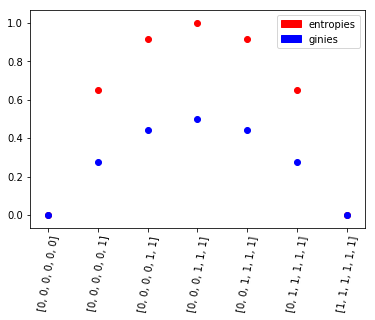

In [47]:
logistic_y = [
    [1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1],
    [0, 0, 1, 1, 1, 1],
    [0, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0],
]

entropies = [entropy(np.array(y)) for y in logistic_y]
ginies = [gini(np.array(y)) for y in logistic_y]
logistic_y_str = [str(y) for y in logistic_y]

draw_plt([logistic_y_str, entropies, 'red', 'entropies'], [logistic_y_str, ginies, 'blue', 'ginies'],)

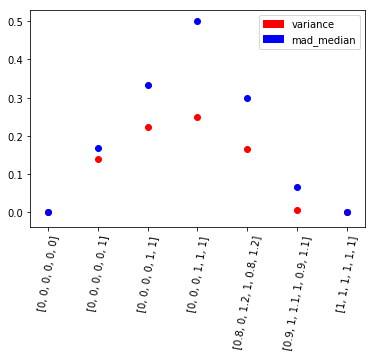

In [48]:
regression_y = [
    [1, 1, 1, 1, 1, 1],
    [0.9, 1, 1.1, 1, 0.9, 1.1],
    [0.8, 0, 1.2, 1, 0.8, 1.2],
    [0, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0],
]

variances = [variance(np.array(y)) for y in regression_y]
mad_medians = [mad_median(np.array(y)) for y in regression_y]
regression_y_str = [str(y) for y in regression_y]

draw_plt([regression_y_str, variances, 'red', 'variance'], [regression_y_str, mad_medians, 'blue', 'mad_median'],)

'entropy': Энтропия  F(X)=−∑Ki=1pilog2(pi)F(X)=−∑i=1Kpilog2⁡(pi) .

'variance': Дисперсия (среднее квадратичное отклонение от среднего) $F(X) = \dfrac{1}{|X|} \sum_{x_j \in X}(y_j - \dfrac{1}{|X|}\sum_{x_i \in X}y_i)^2$

### Logistic regression

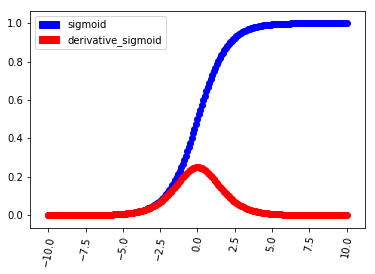

In [49]:
# Logistic regression


def sigmoid(x):
    '''
    RO(x) = P(x) / (1 - P(x))
    log(RO) = W*X
    
    p+ = OR / (1 + OR) = exp^(W*X) / (1 + exp^(W*X)) = 1 / (1 + exp^(-1*W*X)) = sigmoid(W*X)
    p- = 1 - sigmoid(W*X))
    '''
    return 1 / (1 + math.exp(-x))

def derivative_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

draw_plt(
    [*get_X_y(sigmoid, -10, 10), 'blue', 'sigmoid'], 
    [*get_X_y(derivative_sigmoid, -10, 10), 'red', 'derivative_sigmoid'],
)

In [69]:
# то что х
def logloss_crutch(y_true, y_pred, eps=1e-15):
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

print('Logloss при неуверенной классификации %f' % logloss_crutch(1, 0.5))
print('Logloss при уверенной классификации и верном ответе %f' % logloss_crutch(1, 0.9))
print('Logloss при уверенной классификации и НЕверном ответе %f' % logloss_crutch(1, 0.1))


Logloss при неуверенной классификации 0.693147
Logloss при уверенной классификации и верном ответе 0.105361
Logloss при уверенной классификации и НЕверном ответе 2.302585


### Clustering

<img src='data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAB2wAAAO2CAIAAACrcvDNAAgAAElEQVR42uxdBXTbyhK1ZIcZmrZpm7YppszM+MrtKzMzM7dJSiljyszMzMzMzCklTdIw2fpn3vqv5ZUs22nASfYenXf6ZEWWpdHu7J2ZOzKOgoKCgoKCgoKCgoKCgoKCgoKCgoKCQgdk9BZQUFBQUFBQUFBQUFBQUFBQUFBQUFDoAiWRKSgoKCgoKCgoKCgoKCgoKCgoKCgodIKSyBQUFBQUFBQUFBQUFBQUFBQUFBQUFDpBSWQKCgoKCgoKCgoKCgoKCgoKCgoKCgqdoCQyBQUFBQUFBQUFBQUFBQUFBQUFBQWFTlASmYKCgoKCgoKCgoKCgoKCgoKCgoKCQicoiUxBQUFBQUFBQUFBQUFBQUFBQUFBQaETlESmoKCgoKCgoKCgoKCgoKCgoKCgoKDQCUoiU1BQUFBQUFBQUFBQUFBQUFBQUFBQ6AQlkSkoKCgoKCgoKCgoKCgoKCgoKCgoKHSCksgUFBQUFBQUFBQUFBQUFBQUFBQUFBQ6kSZJZOY/XLp0KdFn+PjxI8MwLMt++vQpzf38ixcvooun5pvqWL9+fcWKFe3t7ZFNLl68GO1XKpXz588vWbKkjY0N+ujQoUMcx1WvXp1hGB8fn7/50pw5czIMs2nTJnr/0wS6du3KMEz37t3prchoMPZ913V8VFTUpEmTvLy8rKys0Hjy6NEjenvTKzZu3MgwTO7cuU3BWTJBeHt7MwxTs2ZNaioUGGfPnmUYxszMjN6KpJqP6NhrmkiXS4A0cecpKChM5KWmI4YpIHVIZLQGQNi1a5euwxo2bIgP47O9iEJNDhKZEUChULi6ulatWnXevHmRkZF/b/Te3t5/uaIzlkRGP1aXz/Hhw4c8efIwDOPo6Hj58mW0s1u3bvgO3Lp1S9eZCxcujI5JZ4x2SEiIpaUl+mlv377Vddi8efPQbzc3N8+SJYu7u/vatWvRR4MGDUIfWVpaZs2a1d3d/dSpUxzH1ahRg2XZv3Tic+XKxbIs8TS9/8PfB0WQdRGvQKZMmapXr75gwYKIiAg6aIreNG9v740bN4p+2q1bN5ZlMzKJ/JcDvqnh9OnTHTp0yJs3r42NjZWVVa5cuSpUqDBgwIAdO3YEBgbyjzT2fdd1fOPGjdF4YmNjg8aT58+fcxw3derUJHnrUwu7d+9u0aJFzpw5raysbG1t8+TJU6VKlREjRhw4cCAsLMzUrnbRokXe3t4pQN/rdY6vXbs2ZMiQEiVKZMqUyczMzMnJqXjx4n379j179ixx5N87SwYiNDQUzUF//vxJmfGEksjJhz9//sjlcoZh5s+fL/z05cuXaJTWZaL169dnGKZSpUopec0mTiIb6FUmK5LE/0zr+PjxIxqpTI2YePz48dixY8uVK5c5c2Zzc3MHB4dChQp17dr10KFD8fHxepcAyTfYpoyPkUYpIb5zi2Zbe3v77NmzV6pUaeDAgXv37o2Li5NYlfOBFpJ169ZdtWoV8cQxAgMDp0+fXqVKFVdXVzMzM1dX18KFCzdp0mT27NnXr1/XdZEfPnyYMmVK1apV3d3dLSws7Ozs8uXL17Zt223btkVFRen6qxcvXqALs7a2Dg8P13sHrK2tv3//LvFj01kwO4Mv5TCsra3z5cvXtWtXoQVSEjndIzVJZPY//PPPP6LHfPv2TaFQsCwrZHsLFixYqFChO3fuJPoCAgICvLy8ChUq9O3bN+GKy87OLuv/YW9vj66TYRhPT8+/nEpr1Kjx94kAiSORRX2Op0+fZsuWjWGYLFmyPHz4kE974QfUr18/0dPeunULHZP+SOSlS5finz9hwgRdh2XJkoVl2eHDhyckJPD3h4eHm5ubsywrXIB16dLFy8vL39//by6vdu3aXl5eBw8eTA6yAFuXi4sLegUcHR3xK5A3b960y1ilFqkxfvx4Ly8vCUPKIPcn0QO+6SA2NrZ169b4t6AQo4WFBX5BiLHd2EW76PiAKBuWZffu3Uscn2IUYZIjNDQUpcWhW2dubu7q6oqGTYmQZ+oixZbuEs7xjx8/6tWrx7dAFxcXvgWWKlXq3bt3KW8hKVndtWzZMi8vr27dutGpJ/lQtmxZlmWbNGki/GjFihXYAoWPOyEhwdbWlmXZyZMnp+QFmziJbKBXmaygJLLeBdSBAwe8vLzq1q2bkpcUHh7eoUMH7PzI5XJnZ2dra2u+43379u2Un4lScgZJlTufhM4tJg0cHR3lcjl+dq6uritXrtQ1XTo6OuI/tLGxwX9VunTpkJAQ4RDn4uKChxE7Ozv+6kzUpOPj44cOHWpmZob/ysnJCY3P6K+yZs16/Phx0Z82cuRI/FerV682xL0XpQvwj6UkcrpZymGjzZw5s5mZGfbbicklWV9qSiKbAlKTRHZzc7O1tVUoFAEBAcJjZs2ahXjblOQU0HcRr0FwcPCsWbOkGZCU9OGSikS+deuWi4sLy7K5cuV68+YN/yNEIiNPxcnJKSYmRnjavn378h9QenorSpQowbLs0KFDGYbJli2bSqUSHhMYGIh++LNnz4iP7ty5gz76+9T1lHf1sHXhtHSO437+/DlixAj0CpQvX56Om6IDGs2MS3MDvrEYPHgwurzevXs/fvxYqVSi/a9fv/b3969WrZqvr2+SD/h79uxhGCZTpkypuMBLcjRp0gQxPmPGjMF5eUql8smTJ3Pnzi1ZsiQlkYXO8fv371HQ18LCYtCgQXfu3MFz06dPn1asWJE/f36WZZF0UgpbSJqWCKMQYsyYMahATej/tG3blmEYd3d30dfhxo0byBLOnTuXkhds4iSyIV5lcoOSyCaoBxgSEoJqOuVyeceOHa9cuYKzUH/8+LFp06bSpUuzLIu18tIriZymnVvCnFQq1dOnTxcuXJgnTx7Er3Xq1MmQVfm3b99GjBiBPiII2c+fP9vZ2bEs6+npuWnTJlzxExYWdubMmcGDB7u6uhLXFhcXhxLXWJZt1KjR6dOno6OjMa2xZ8+eWrVqoUQo4e+Kj4/PnDkzHrIk1n34DqBkaoJMoCRyRrD269evly1bFn1048aNlLkYSiKbAlKTRM6dO3f37t1Zlp0xY4bwmAIFCrAs6+vrm+okMkKvXr1Qab9E9UfK+HBJQiKfO3cOTUiFCxcWcjqoAL/mf2BZdtu2bcQB0dHRKNwqOqakady/f59hGBcXl9jYWE9PT5Zljx49atSaOVWc1CQnkYWn6ty5M/qInxNBQUnktDvgG4Xw8HBLS0uWZQcMGKDrGCLeliQDvoSrlEZd8zdv3qArnzNnjoF30hSQuiRybGxsiRIlGIZxcHC4cuWK6B+qVKpp06bxJ6wUs5APHz5QEjk94cSJE+iB3r17l/gI1WAtXLiQYRhhPvjMmTMZhrG0tEzhV9iUSWQDvcrkBiWROY67cOGCSa1ZGjRogNi3ffv26Tpm9X9I+ZmIksgGOre6zCk6OrpDhw7oAD8/P+lVOUadOnVQfTB/58SJE9G4+vXrVwNdpn79+qFv4UcgCBw6dIhIfUDYt28fwzBFihSJiopCXIEwX4p/B3LmzIn8k9atW+taLFMrSsfW/vXrV/TRuHHjUuZiKIlsCkhlEvny5csMw+TLl4844OrVq6iEB1NahCYyIa/DZ/R+/vw5ZMiQ3LlzW1paZs6cuV27di9fvtQ1qAk1kXX5WMuWLUOfBgUFEWsnPz+/f/75J3/+/DY2Nra2toUKFRo2bNjnz5+F5i4K4hpu3brVrVu3vHnzWltb29vbFypUqEePHkhRF4HPUb5586Z79+45cuSwsLDInj177969hYywcLo6cOAAYkPKlSv3+/dv4Y9Fmcg1a9bcvHkzwzB16tQhDtiyZQvDMLVr10a/S3RMUalUW7dubdCgAVL4ypQpU7169Xbs2CE88sePH0uWLGnWrJmXl5eDg4OVlVXevHl79eolOmnx25Tt2bOnevXqqPKrRIkSixcvFs3v2LlzJ7oMMzMzR0fHfPnyNW3a1N/fPzY2VnjwgAEDGIZBPBEy1H///Zd/gFA1GCFXrly6njKmF0Ubm+AuGXFxcXPmzClWrJiNjY2Dg0OtWrVOnjwpvEKiqwa6IbicBAONrePGjUOugOibGBYWhlr/4bNJkMinT59GH+Fye/4gfv78+WbNmmXNmlUul/P1f5VK5bp162rVqoUK/7Nly9a6deuLFy8KLwbfnLi4uFmzZhUtWtTGxsbJyalu3bonTpz4S7NBOHjwYK1atRwdHW1tbYsXLz5nzpz4+HhRCjgkJGTt2rVt2rQpWrSos7OzpaVlzpw5O3TocPPmTeHLJQriAYlqIl+4cKFVq1bZsmWzsLBwdXWtXbv2hg0bcH4rMWCiKzx79mzDhg0zZcpkaWnp5eXl4+NjgnRb0g74CEePHv3333/RvXJycqpWrdqKFSuEenMGPrhE3FhcYSD6VupdtK9evbpcuXL29vZ2dnYVK1bcunWrxCvAvzwhuv0HibfexIFyq1mWFU7NosAjXnh4+Lhx4woUKGBlZeXq6tq8eXMJyf5r16517NgxZ86clpaWDg4O5cqVmz17ti5V99+/f/v4+JQvXx7ZTK5cuerVq7dixQokzazrQTAMI/Qo3r1717t379y5c1tYWOTKlSsRZinqHC9fvhx9hTCmaxQFIB3jFNUu/Pr167BhwwoXLmxjY2NhYeHu7l66dOnhw4djSTGsTKJr4kOIi4vz9/evWbMmki7JkiVLs2bNRMd2fBm/fv0aPnx4/vz5ra2t8d0WHbET4Rjg1rh2dnYODg7ly5dHTA1thcpxXEREBCpTnTdvHn8/EsosVKjQ9+/fRQccJLdSvXp1vOfdu3ezZs2qX79+vnz5kJNcuHDh4cOHf/nyRfi9lStXZhhmxowZyB0qXbq0g4MDwzDXrl3Dxzx//rxdu3aZM2e2tLT09PQcOnRoYGCgKZPIer3KxHkpxtqwBIm8b9++xo0bI189c+bMjRs3PnDggLT7vWHDhgoVKjg4ODg5OdWpUwfXriUkJCxZsqRUqVL29vYODg4NGza8f/++6C81fI2Ap4CIiIjJkycXLVrUzs4Or57i4+MPHTrUp0+fMmXKZM2a1dzc3M3NrX79+sJTofMIRyp8o4Rjb/HixRmGGTlypOhPOH/+PEoiJoz548ePQ4cOLVy4sK2trbW1dcGCBYcOHUqsCjmOO378OLoe0ci6LghJZOlCENFGfCEhIZMnT0aPCY3GxYoV69evHy4gkF5ZJPlDFJ31Euf6GvsGJR+JjGa9UqVKoaoOrFAhTSKPGjWKYRhbW1v+zkaNGjEMU6FCBQMv7Pnz56h4tHfv3on4XQ0bNsRhfpRVNmLECGn3HscdCa1RSiJnkJCJq6sry7KDBg2SdmX5b+LevXvr1q3r5uYmnJhOnz7dtm1b1DHF2dm5WLFigwcP5qc5809+9+7d1q1bZ82a1cLCwtPTc8SIEUI1GIp0SCJzHJc3b16WZYnMmh49eqBpVReJTIxHeJA6duwYMkdbW1srKys0/zk4ODx+/PgvSWSUiezi4iKkCXALtUyZMmFZT0dHR77Xu2vXLmTfhOayu7s7jisqlcohQ4bwBY9cXFyQuJKTk5NwEXjhwgUUIXRwcMBqktmzZyeEnonpasOGDegia9eurWtFjUnkqKgoe3t7uVxO3ChUBbN161ZdJHJwcHC1atX4MkxYg6l58+ZE0wBMiBDKmJaWlvv37xdeG2pThprXKRQKZ2dnfHJhXkz37t3xZdjb22M1KFF/KyYmBl0qGqrev3+PrurXr1/4mOvXr2fNmtXNzQ2d1s3NDT3K8uXL7969O2vWrFi1Cj/lVq1aSTjxyCNctmxZ+fLlWZa1sLBAStzoJBs2bJD2IIcOHZo1a1ZCyBhdDwpyoB/Lt0YMJG7o7OyMvTEJEvn58+foo1mzZhGD+OLFi/GDtrCwwB75nz9/8AtiZmbm7OyM2vUwDDNmzBhRxm3ixIlVq1ZFqRnoyYpqLRlrNoTCl7OzMzq+evXqKMJPOJd4sjQzM3NxccGDCcuyS5cuxYd9+fIla9asyBW2sLDgv9e7d+8mLJa4nuHDh/Ml8LCwlPDFxJPu3Llz8fFoZEDHp0ptbIoN+NHR0a1atcLPDkvOMQxTsWLF0NDQRDy4RNxYTCLj/pkGkshTpkxp1qwZMmmkYYdMWtjbhxgf5s2bhyT20ECHrWvYf5B469MKiSxsBCexZl64cCFKV7e0tMS3US6Xr1+/XshN8GdSe3t7/HIVLFhQuJI/deqUs7MzHkwyZcqEVYaRNAR6EGje5IsYuru7E5Ps9u3b0aRsa2trZ2fn6emZCLMU9bxRyXOBAgWMutWJIJGJ4x8+fOjk5MS/eCz4iMe0li1bCidE/sSHbhH6CehF47sEwtR+/KKhilpra2sHBwe5XC5BIhvrGCiVSiTLgK7HxcUFPd8OHTrQVqgIFStWZFm2cePGQp+hf//+HMfly5ePZdmPHz/iT+Pj45GLxR/cqlSpgp1kV1dX7CQ7OTkJgyhVqlRBbkD58uWxGyCXy7EDc/ToUQsLC9zDCknHZsuWbf369aZJIhviVSbOSzHWhkX9z7i4OHwSpLGOH1CHDh2Ihh/4tMj7Qv3f0MFmZmbHjh2LjY2tV68eetZoJER0mJBHNmqNgKaA+fPnI8UeS0tLZBXIT8BjGhqf0SWhU7Vt25Z/nnLlygn986xZs+KKfuHYixpou7u7i3pZ6IbUrl2bv3Pr1q0oTYdlWSsrK6R1yzCMvb396dOnhcygk5OTURWuxpLIwuO/fv3q4eHBf+hoikQVqIasLJL8IUrzTYa7vka9QSlAIiOmjFjNSZPIdevWRbLIQlPx8PAw8MIGDhyI3kqhw6MXAQEBiv+AktJQ8r6bm5touz++e4+We8TrQEnkjEAi40xkvkMr/VKjVxXNXGZmZnhiioqK4veeQXFK9O+SJUsKT759+3b0mjs5OeHJq2jRoikpKEpJ5FTjFKZPn04EzCMjI+3s7BQKxdevX40lkZ2dnatVq4b8FaVSee7cuWzZsqEpJNEkcnBw8OzZs9G8NXv2bCETtGLFCr6q4507dxo2bIj4XKOqm5EIHYocYl2hsLCww4cPt2/fXrgIdHZ2btGixevXr5HvvmfPHkQ+du3aVReJvHDhQvQqtmjRQjQPlyCREXtOXPPHjx+RrxYdHS1KIiuVSpSaVLp06ePHjyMZpqioqC1btqBCSCKkOWPGjPnz5z979gznYD5//hyJJ9jZ2RH9XtG1oWSuxYsXo6axwcHBffr0wdw6PhhlOCoUinnz5uHAVHBw8JkzZ7p37y7sJLt161aGYfLnz4/3VKtWTZiMw7+rwhlaYpUuQSI7OzvnyJHjyJEjyGt//fp1pUqVkN+JsuEkPEJsunwhY4wGDRqwLCvahgiprQ0dOlR48cL5HidNrFq1ij+IW1lZKRSKnj17onCISqV6//49JhcQq+vv74/M4OfPnygewz8P/+Y4OjpaWVmtWbMG2efXr1/btGmDjj9y5EiizWbHjh3oJJ07d0ZRltjY2LVr11pbWyP+iHAu16xZ4+Pjc//+few2ffz4cfjw4YhJ4Xeh1CtngSyWWM7hNjv9+/f/+fMnekEWL16M5kL++47PjybISZMmoeqB8PBwPKMLIw0mSyInYsDv1KkTyl/euXMnet9jY2OPHDmC+GgipSsRD87AGxsdHY3S9nPkyGFgW1dk0s7Ozk5OTlu2bEHTQUBAAOKUFQoFnjgkxge9chaib70pA80gLMsWL14czV+GrJkdHR1dXFz27duH3veXL1/WrFkTERkPHjzgHz9p0iRUDbpy5Uo07CckJFy6dKl06dIMw5QpU4Z/8P379xGlW6xYsVOnTqHhV6VS3b9/f/To0efPn5ceeInpwM7OrlKlSpgxwfO4UWYpfOI/fvxA5xfG3pKbRK5duzbLsmXLlsUqRvHx8W/fvl2wYAF/WpSYENE7XrBgQcS2XLlyBRUQhIWFLVq0CDktS5YsEV6GnZ2dl5cXLlvBN1MXiWy4Y4BF2FmWHT16dHBwMHrx/fz80AtLSWSO4yZMmICSMPhMTdu2bVmW3bVrF3YO+YPktWvXhCY0dOjQVatW4X6PSqXy1q1b9evXR5wIUU2CSGTUM2rr1q3IDfj9+zcKFn769AlRk6VLl8Zv2cmTJ7Nnz45CHSZIIhvuVRrrpRhrw6LzC17Je3t7I6HV0NBQNISyLDt+/HjhW+bk5GRjY7N27Vo0o71+/Rq1YcydOzfSZt23bx8aSO/fv4+m6apVq/7NGgGNvXZ2du7u7ocPH0YnDwgIQH94+/bt/v37nz9/Hr31KM126dKlKNZIROmkB0Dh2Pv9+3dETPDrQbFLgIYv/qRw+vRpuVxubm4+fvx47Ma8fv0aMfWOjo44ZzkhIQEZc5s2bYyyqL8nkXv27IlaUFy4cAG93SqV6vPnz6tWrSKeuISPkbQPUYJvMtz1NfYNShkSOSIiApkQXoXpIpG/f/+OSXA0xmL4+Pig/SNHjjSEHUMTbrly5RLxo5CXXq9ePeLZCXs7E+79zZs30UXyXxZKIqdvElmpVF6/fr1cuXIoMofVuqVfajT0TZgwARX3x8XFYdcRLfkVCsWECRNwbf3v37937NjBTzhAJ7exsbG0tOzbty/iH6Kjo5cvX47W0VOnTqWPLP2TyF++fJHL5XZ2dnhYRAkFqIWdsSRyoUKFCN72yJEj6CO+zoM0iWxra5vl/7C3t0dZY6VLl16zZo2BP1ClUhUvXlxYeSpBIr9+/Rrx1MQULgS+J0KVCcRM2djY8Cvi8Y9FS2jkWQpL5nWRyGhVgDOqOI6bMmUKwzBI9V+UREYiGIULF8YuHX/FjkLQgYGBem9j48aNhXVeOP908+bNxPFlypRhWbZPnz54z5w5c7AtGQKkAc3/xrVr16LiTV2sgVGayLpIZETFEnxKYGAgYje2b99uIIksOkkfOnQIWQV/cOc47t69e+ivnj59agiJ3LhxY/TRo0eP+IM4y7JCGSwkzKIrcxMllrq5ufEjGThneePGjcTbhFzVokWLGvIQRc0G5UwJLWHTpk3oSw10LgcNGiQsEDOWRI6OjkY9LYluG3xymZ+5g2duoXgZoun53p6Jk8jGDvhXrlxBLaSFQj0BAQEo6w0bZOIenOE3dubMmTiP2MvLq1evXitXrrx37x6RriU0aeJtio2NRdHNmTNn/j2JnBZd8z59+uBU3FKlSg0cOHD9+vX8gUg4Qgp5wOjoaJTTxE+W/Pjxo0KhsLGxefLkiXAtlyNHDqL1HEqTLFCgABGrM2QpLpwOcufObVT6g6hZCp/4uXPn0PlFy4STlURGmZ6ishsGTogcxyGt81q1agkdj4MHD6K5gP8R7lxPlFXpJZENdAwiIyNRuiJ/J7FWpyTymTNnhOXJiB5CMVoka8bPWpgxYwbDMNbW1kKhISEDVaRIESFXgtOWhZwdx3G9e/dmGCZz5syIM8V49OiRmZmZaZLIhnuVRnkpibBh4fwSEBCAUlAnTZpEnASRWRYWFj9+/BC+ZcRA9O7dOzQtsix7/fp1/kdI8IFYghm7RkBTgJmZmSFzPQbSdSXks4wlkTmO++eff1iW7dixoyjpb2Njg0vHVCoVeoii5UrNmjXj9zFDN41f25diJHKhQoVYlt25c2ciZpBkeogSfJPhHlpS+flJSyJzHIccFRxKwc/LwcEBsw0oRwFpAQnFZIKCgpDTiFL7GzRoMGXKlEOHDokWNCQkJKA4fd++fRPxo1A/QD59gaJKDRs2lHbvOY77999/GYYpVaoUJZHTMYmMjdbNzU2hUKDwWOfOnUV1XHW91KNHjxZ+BfZ1iSQzXSMGy7I9evQQnbz4gVuKdEsicxxXv359fkSxatWqLMuiYnBjSWRhZWtCQgIqTeULWUqTyKLIlSuXr6+vaDWHKMaOHYuL/gwhkVGtTaZMmSQShAkfiJ8khfD582eh1iT+sWj6cXd317vK5ZPIuOcVXsAjjwTlJYmSyNWrVxet0kUoWrQofr7SQIWTDRo0EF5bzpw5da1U+aJRq1evRgEAadIcAZUZEtodYWFhaBVNtBxNWhIZRc6FxyPZEEKo3lgSWalUIupk2bJl/P19+/ZlGKZKlSqiF49PFRMT8+jRo/bt2wtDF/jp37t3T/i9qMuwaPkV0lUk2ssgxk30yeLVrC6aSdpsHjx4IJFPkTNnTsOdSyT75eXl9Tck8uHDh9H1CBsZK5VK1PV+1KhRxPmtrKyEby7y44kWHKZMIhs74Hft2hUlX4ieuUmTJtL92Qx5cEbd2GXLliHlL75WoKOjY69evXACPmHSRBIWQo8ePRiGadeuXcYkkZVK5dSpU1EyAv9OZs6cecSIESg3nxjxRG/jmjVrUM4CpoDRM23ZsqXo9w4ePJjfGhG3+BMVwEkEibxgwQKj7oOoWQqf+O7duyWYtWQlkdFwJCqQajiJjG4dUUqCgbgwfr9WdKrBgwdLjCeiJLKBjsGBAwfQV/ClGBDCw8NR+TklkaOiopDzjAdYJGmFNVWQw8m/56glFFHOrAtopUc8ZUQi86tW+UC5paKdoFD6kqmRyIZ7lcZ6KYmwYeH8smTJEkT6C3nAkJAQpMnA9xvRW4al3oX8HVH0iYZ6dB6++rmxawQ0gDRp0sRYA0a3iD+hJIJE3rZtG0EWI6AiP34qADq5m5ubBKmNgwe3b982kC5JchK5UqVKSCHqb0jkpH2IEnyTgR5aEvr5SU4iV6hQARHuwlW5EIUKFRK9qx8/fkTOMyFUXaZMmY0bN/LrRX79+iVaSWAIkHiFvb09X2Ll9evXyNEStvUj3PuXL1+itGscZ6IkcvojkYUwNzdv2rQp34uTfqkVCoVoKmHHjh0ZhilWrJjei8H8Ay5ywkDdd1iWRVUOFOmcRN65cydeab99+xZ3MU4EiSzKMWXPnp1I5zRKziIwMHDnzp2oJ0CtWrWEJO+VK1e6du1asGBBW1tb/sgunC8lSGSUrdChQwe9dw/fE6GicUJCgjAXAP/YypUro7mnevXqutSQRUlkPz8/hmEQy4noPDwXCklk7DI6OztnEQMqNJg7dy7/Gx89etS/f/9ixYphOWAMIv8UXRtfbBED5Xfwo0/v3r2zsrJiGKZSpUrr1q378OGDxK9GsVahk9GhQweWZXv16pWsJDLB8CJ06tRJmGliLImMV9HFixfHeyIjI9GtJvK28MULW0ixLFumTBl+3BuXk4h+KarZJMRViLeSr5yIbo7o8TExMShfhkhSNtBs1q1bh3JqRINAXbp0EX3u79+/HzlyZOnSpZEIL//kdnZ2f0Mio1x+Ub4DqzfUqFGDOD9Rho+AugmZm5unIRLZqAEfLU35+Rp8oLd74MCBf/PgjL2xMTEx+/fvHzx4cPny5dFaHdmejY0NPyiCTZofDyBGGyKPJuOQyJhM2bZtW58+fUqWLIlFJFEwlZ/8iEY80do0nMyFRQ+QniC/nIgPNEc3atQIHYwSlMzMzAyRpDSERJbI2DXcLE2KREZyEHZ2diNHjrx06ZKuGyUxIQYEBKCPMmXKJPpQUA3Wnj17iMvQlSgnQSIb6BhMnjxZFxeGZy5KImNxCZyAhro78h2S3LlzsyyL4mdxcXFoPJw+fbpwUdelS5cCBQoIneQWLVoIv5HfnIcgMoSS+ggrV640QRLZcK/SWC8lETYsnF/QaYXML/9Z8JXQJN4ydLDoZEcswRKxRkBjr5+fn677HB4ePmfOnOrVq7u5uZmbmxM2xs9ySASJjHrDEIP/z58/hTIXKBPfwsJC9HchRQXsMKciiTxz5kzk3vTp0+fkyZMSVTi6fIwkf4gSfJOBHlri/PyUIZGRwruQROavv1Qq1bdv31avXo3sRBcb8PLlyzlz5rRo0QLdT7zwqV+/PmYn/oZERqtO4fSHAg/CsZ1w73G9SN68eVGJHiWR0x+JzN8ZGxv76NEj9NAtLS35dX4SL3XBggVFvwJ5FBMmTDCQRHZ1dRV+hNaVLMuKlrJRpDcSOTY2Fgl4vX37Fqmw4dwEY0lkA2fQRDTWu3//PqKxpk2bxt+PhYxx2xnUfADlWNWqVctAEtnLy8vAEd/YRSChiYzmm2rVqknwyASJ/O3bN1QgHB4ejnzf+fPn6yKRAwMDJUKsGPybsHTpUrSoxp0T0D1EHaX4Shq6FGYlBqzt27fzGUY3N7e2bdvyhzk8f6N0XWEy+6lTp1Bglh8MT3ISWZSbEP2xiSCRv337hqz31q1b/HU1v6UecfHYknPkyFGkSJE2bdps376dKNtHN1xXqwekyaVrMqhQoQI/JRDfHF3Hoypafs6p4WaDoiC4CxaB8ePHC53L/fv3W1pa8ru1ZMmShd818W9I5H79+qHAhujx48aNI2pdJc4vPRqYJols1ICPWVoJ8KuZkurBGXhjlUrljRs3unfvjruh8pOeJAZ80a/OaCQy4YmeO3cOFfyyLOvh4YFXRGjEW716tSihj24CzngqXLiwXoPB8/Ls2bORWErilu7C6UCYjZ4IszQpOYvQ0FAki4zmUIVCUaZMmalTpxLyMhITIu5IKQ3+jdVVa6WXRDbQMZAegdu3b09JZD5TaW9vj2q52rRpQyRkoMZiyGtCLSiEggaoJkmXk0wE0hAXKZprjM8v+pYdPXrU1Ehko7xKY72URNiwcH5BQg266Kp27doRNewSb5nEZEeMnIlYI6AzCG8jji5kz54dn9PW1jZz5szIxoSpqYkgkXGDbn4dHlpMEQ33UDcz6d+FG4SmopxFfHx8u3bt8KjOsmzRokVHjx796tUrA32MJH+I0j24DPHQEuHnpxiJjOQsqlWrJlyVCw/GIpxbtmyRPu3Pnz9Xr16NeDe+PkCi5Sz+/PmDiiSEk++qVasQNayXRA4ICEAnQalRlERO3yQyBlIycXJywnUtEi81fhcIIA1PQ+JqEisj6fGQIr2RyGjqZVl27NixyOXCcWPTIZFxLJFfeYqr7AcPHvzs2TO+M4Gcb0M4AgSkUZXcJDLHcYsWLUJ+Q9WqVYUlbKIkMuoMiyg8a2trMzMzTJQISWTcAohoQ6wLL168QPH8du3a3b17lx9DRoFlYowwlkRGdXmrV69u3749KmhCP79atWr8n4/KiiVA9HBIWyQyUhBjWbZnz57YmImWesTFG9KtS2IQT24S2SizQc5ltmzZDHQuf//+jSqs69ate+XKFT7PjtkcSiKnzICPsl0MTNVJwgdn7I2dOnUqOn7x4sWURP4bYNlNHOozikRGw46BCThIND8JSWRRD8RYsxRt7pRajfUQrl27Nm7cuKpVqyIXH5XA8xltiTuAm+0Y0kTREMNOKhK5cuXKlESWBha0ReHnzJkzE+K2GzZswGVq06ZNQ0nr/GAz8qxYlh02bNjz58/5TjKaeevWrSskkYmWBmmURDbKqzTWS0mEDZsIiWzsGkF67EU5kihvYP/+/biBNgrxGjsA6pptUY0/v5wfdaUmZD3RQ6lYsaIhPyoVG+shPH782Nvbu06dOugy0A/EGULSQ3GSP8SkIpENf4NSjETGjfXwiyNNIuORltBylKCSM2fOjEr6iPWXsY31UK2J9JBFtKYQuvdYzzNLliyRkZGURM4gJDKe63GfA2NfatyEg5LIlEQ2jlO4e/cuqkMhxFBMikRGmmuWlpZ4D2pxKzrQo9x+w0lkpH5rlJxF4khklMKJPIYqVaqI8shCEnnv3r3oAbEs27RpU+I15l9MfHw8SnoVXfMLgRYeuMyHD1Qa9vckMh/v37+fMGECqp/lC62iLg3SQXW+fHCaI5FRwMPOzi48PPzJkyfo+GfPnum6eEPme+kbjgoqu3TpIvqpUXIWsbGxhJyFUWZjbJkb6hfk4uIiFFRC6nh/SSIjOQtdGdy65CzSE4ls+ICPrN2Q4qakfXDG3thv376h44VxEUoiG4Xr16+j34UjRkbJWaB7aMhMinUVk1DOQtQDMdYsRZ944cKF+XK0iWZjMRMnFOb68+ePXouKjY09cuRI8eLFEY+M1Y0k7gD+yHC6IblJZBTjl565KImMgjQojDd79mwkiEy0KXv//j3DMDly5EBOrLCPcdeuXRmGERVCRdmdhpPI0nIWKFHOpEhko7zKxMlZGGXDuuQsdCWF6ZKz+EsS2dg1gvTY++XLF3STCTlOvpDO35PIHMd5eHigFwGLg7Ms+/jxY+HQpCsZVohGjRqh3D1DJiCJu/H161d0PcJUYo7jnJycJPhKxLafP38etXCQy+X8H6VrKE7ah5gkJLLJylns2bOHWIPrJZHLlSsnUfIvBFKdYlkWz8goKd7MzIzodSaNMmXK6B2yiH7goiRySEgIKjf09fWlJHIGIZHxqIglaxJBInt6eholZ0FJZEoiq1GsWDE0QvEzuUyKREbhbn6sr169errMHbU3Jd4TxBTziTMMJJ1mVGO9RJPIHMf5+/sjHrlSpUpCPSwhiRwXF4fbSQklb4iLQeLLBjbBQJOf6Jq/Zs2aSU4i83k6zF4FBgYiAa8DBw5EigFxXvxcKlMjkdGjwUyKKJC87IoVK4YMGSJsqZfkJDIqYkXLSwIvX75E33Ls2DH+zdGl8SdsrGeU2eCGG6I/Ct1PvrUjwTjRTGG07iUeLpKc5tO+0g9RurEeasHMz3BJfySy4QO+4W0WEvHgkvDGhoWFoeNx7/UUIJENeevTHB4/fkzkdKM3VJTpwI31/vz5g/agFrVubm56Z1K+dNq+ffv0Hoy8W0KW3RAPxFizFH3iKEWIZdmtW7dKXyc/2VM47j179gztfPv2LfGHp0+fNnDwx/cNNyTETX2Fbb5wyFBXo7yUJ5FxUzLh84qIiKCN9YSD0j///IMskGgOwXEcqiZ5+vQpyiFCLBvh9E6ZMkVopei9NpxEVqlUEo312rZta1IksrFepbFeSiJsWKKxnnAVEBoaiuIH/v7+SUsiG7tGkHaScdAxLi5O9MUnbinuuWSsT4ukt4oUKYLLxUqUKKHLUxXtNS3E8ePH0fFCqVmJUV14NyIjI9F5zp49qyv0IkEiY7NBT5zfHlbCx0jCh5gkJLKxb1DKkMhxcXGlSpVCoQLspeglkVE/29KlSxt4GVgyCH/Fs2fP0LMTjti6TOvRo0foJPfv3xcdsvbv34+GC/wtutx7XObl4OCA9awoiZy+SWTsQOK2kIkgkRE5Q7TCoiQyJZH1cwonT54c/R+CgoJMkER++fIlml/r16+Pd7Zu3ZrfpUe43iPek+bNm6OyPtFVGSp4GTduXAqQyBzHrVixAknKVqxYkT8liJLISFx49OjR48aN49cqipLIqFuRXC7nt2PmIzg4GP979OjRokMG9q7+hkTWxSOgPHHsAs6fPx/N8aIRbAQkWj127FjTJJHR4urgwYMSljNv3jx0q1GImGipl+QkMm4bsmbNGuIj9OIQRA8ikYU/TaVSIV6YbyTGmg0i0IVFAygVkXhV/f39kWA/YT8PHjxAybPEw120aJHoikLXQ4yOjkYhmY4dOxIHo69Gblz6JpENHPAvXbqE9qxcuVL05JGRkXj1aOyDM+rGBgUFSawM0WqckLFLbhLZkLfeBPHhwwcJZQO8HML5hrly5RIdlGJiYry8vBiGady4Md757t07lCGlayaNi4vj9wOoXr06yvDVJe6EUaJECZZlFy1aZKzPaqxZij7x2NjYYsWKoVWZLq0hpVLp6+vL7+4ovG/x8fGiZJ9KpcIjMD4+ISGBT15g4MQ3bHuhoaFoz8OHD4XH+/j4oMWn6KeES5ACJHJkZCQSGBFKRqKIICWRiWdnZ2f377//isYwUCOmzp07iyaEtmjRgmGYZs2a6RowDSeRseeWJUsWvmoBijyhdmqmQyInwqs0yktJhA0L55eAgAA0Wk6cOJE4CXKxLCwsfvz4keQkslFrBGknGUfF+L1YUau9fPnyCUeShw8fop2hoaFG+bQ49eHu3bsoK3nhwoXEMQkJCehLq1WrJiS1RX9a/fr1UYM4iUDm6v8gfTfy5s3Lsmz//v2Jv0UZuMTxoisj3BiTP8dJ+BhJ+BCThEQ29g1KAVotOjq6ffv26AB+j0FpEhlppxCv9pUrV3Slq4eHhyMfKU+ePPz9ffv2FWqsEThw4ACOyQ0ePFhXfSc2G2QPK1as0EsiR0dHo/hi06ZNKYmcEUhkVHXEsuyNGzcSTSJj49e14qMkMiWRdQ46EvNEKpLICQkJ58+fL1SokLAkE5XPoG57qD9GaGjojBkzFApFpkyZhDMWSjfOnz8/0ZQGAWk2oVwPnKIYFha2c+dOfgPrpCKRkWuCeOQKFSrwMxFESWSJ15i4GKVSWbduXeSATp8+HffHjIyMvHDhwoABAxwdHfHBWBRywIAByOeIjIxcuXKljY1NpkyZRDORdS3whGNK796927Rps2/fPlzjExERsWLFCqTLMWnSJLQT9WLiV+0JgSQIsmbNijrMpBiJLPyxosdXqVKFYZjWrVtLlMX9/v0bBUJEW+olOYnMcVyrVq2QGSxbtgxd2I8fP3r16oW+gqiDQzfHycnJyspqzZo16PK+fPmCZGSIFHhjzWb79u3o+C5duiCDjImJWbt2rbW1Neptxbf2N2/eIMGTli1bolc1Li5u165dbm5u6OTEw0V9os3MzIiGQhIPcdmyZehl79evH1IYj4qKWrx4McpdIjKs0yWJbPiAj1SDUJIvVsOMjY29efPm6NGjXV1d8XBq7IMz6sY+ffoUNbJfuXIlLhpVKpWvXr0aNmyYQqFAsoz8FzC5SWRD3noTxNGjR+VyeaNGjTZv3owTV+Pj4x88eIAFkfmykmjEc3JycnFx2bt3L4pivnjxApXPm5mZ8SMumENhGKZLly64diEhIeHhw4c+Pj4eHh7Xrl3jcwpWVlYoInXy5EnE+CiVytu3b/fr1+/cuXN8sgwVcBAEll4PxFiz1PXE3717h8oUzM3NBw4ceOfOHTQZoQvw9/dHPAJ/nBQdzBHf5+DgsHv3bsR0vHz5smnTpq6ursTxHz9+zJMnz/Tp0x88eICDx48ePUJ0s52dHf9WoHTjoUOHEv1X0bSLGHBHR8dly5b9/v0bU88nTpzo3LkzsXBNHIlsuGOA08ORzDSaQcLDw/38/ORyuYuLCyWRMXDmJspy+PLlC3EArgZARoVtEgGpTLAsO3PmTOQkh4SE+Pr6yuVy5CQbRSJ//PjR1taWYZjSpUujkJ5KpTpx4kSOHDmcnZ1NikROhFdplJeSCBsWnV9GjRqFTjJ16lTEq4aGhqKlirDOUuItM4pENmqNIO0kq1SqnDlzohxhHOW9fv16qVKl8OjKH0mioqKQ/z9v3jxjfdqyZcuyLFu2bFlkaXx6ne+ampmZoVXVuXPncAjh/fv3K1asKFu2LGHbv3//xs1gO3bseOXKFfwn379/37hxI8pj5fOAoncDyZtYWFgsX74c6SZ9+fKlZ8+eVlZWtra2xPGZM2ceP378zZs3MZv89u1blNuhUChevHhhiI+RhA8xqUhkY9+gZKLVVCrV06dP58+f7+npiT4lxgFdq/LY2NiDBw9my5YNxRX4eoOtWrVydXUdPHjw2bNn8Wo9LCxs165daG4luF10turVq6MVX8OGDU+dOoUFtYKDg3fv3o2yc1DxXGxsLBo0REuliZhEmTJlDHHvMUNCSeT0TSL/+PEDlQCyLMuX6U8EiYwE/VF0avz48ViDPigoaM2aNbirEyWRKYlsoiQywzC2trZZ/g83NzecK2Rubk4E9OLj4/EYzbKss7MzWis2bdpUtLHemzdvUF8auVyeJUuWXP8BMyBKpXLw4MG485udnR3KGEXpDMlBInMct3btWsQjly1bFkfm/5JERr5s06ZN0cWjpQWS5UL/a2FhwT+4Q4cO+CMnJye0GilXrhxK4PqbTGTk8qIz29nZOTk54eYA1atXR17RjRs3hNIKQmAd4cOHD5tgJvLWrVvRLzU3N8+ePXuuXLlE1SpwupCwpV5ykMh//vypWbMmujAzMzNsz/zsG+LmTJw4sVq1auiHoGUhXuEQxxtlNijDkf+qIrq2du3aaPIjkhfGjRuHT+7o6IiynPLmzbtjxw7hw01ISEBdLBA7j95rnFeiy2JHjhzJvx608GBZtk6dOvxMSUoix8fH9+nTh/8io5EW/a9cLserF2MfnFE39uXLl2h4Ryc3MzNzcXFBVoeOzJcv38uXLw1cVycJiWzgW29qOHXqFJ7m0HSAVi/4TpYtW/b79+/EiLdo0SKUd2xpaeno6Iif/rp164RfMXXqVPywrK2tXV1d+U+KCPacOXMGT0/m5uaurq7IbAhC9vLly+iyFQqFu7s7es0N9FmNMkuJJ/79+/e6deviu4fYIuSioPNUqlTpw4cP0mzs169fEeGLfq+DgwO6KkwX8klkvAhUKBT4u1iWtbS0xFoWCNOnT0dHWlpaenh45MqVq127dvwrr1SpEh7xnJyc0Pei/yW0npM7ExkN2m3atMG30dnZGZGknTp1Qgk1wpy+jIm4uDhra2v0pIhMNwRUL4/ArwnAf454YcJJbtGihbGN9RAOHz6MY+H29vbo2nLkyLF+/XrTIZET51Ua66UYa8Oi80tcXFy7du34J0FzKzoPERBKqkxkY9cI0vzj0aNH0Y1iGMbmPyDbwG0hiZGkV69e+OCcOXPmypULq4dJ+7RLly7Fpi7R9OzQoUMoSRxPKJaWlnismzlzpnC51K5dOzxhoUePQpvof4sUKcIPlIrejYiIiCJFiuDniBY7FhYWu3btEh6PR3X0xPF3yeXyJUuWGO5jJOFDTBIS2dg3KKmcW1QegeDk5IS9U5Zl3dzchLWYaGJFd4zPNuBVgK2t7Z49ewhmje812dvb29nZ4W9RKBSiuprx8fGDBw/Gbwea6FEcDv1hzpw5UWIcdkWEnXL4OHLkCKEGLuHeK5VK5LNREjk9kch8a8+SJQv2xlmWLVGiBN91TxyJHBUV1apVK/6ogr+iZMmSlESmJDLYEMuynp6ehnAKiHIlSGS5XC7kSYnD+FOXXC4XksjC44US8nK53N7evnjx4kOHDn3+/Lnw5LGxsT4+PgULFrS0tHR2dq5UqRLKr0S/sVatWsTxt27dat68edasWdGwLryG69evd+7cOVeuXFZWVs7OzkWLFu3Tp8/58+eF90QXiSy8Oeh4XZP3unXrkPuCeWTEvQovXnTil7iYkydPtm/fHv0WtLD8559/Zs+ezV/lIixZsqREiRJWVlYODg6lSpWaM2dOXFwcOjlhJ+jaevTooeti+Me/f/9+2bJlLVu2LFSoEPInsmTJUr9+/U2bNuEq3d69eyNvQ6LqEKFQoUIsy6LCTAmTk3hAukhkXU9H9MfqOn7btm3VqlVDdKqu9wur8epyFPDFG0gi632RVSrVhg0batWqhQiIbNmytWnTRrQcG9+c+Ph4Pz+/YsWK2draOjk51atX7+TJk6InN9xsEA4ePFirVi3kRRUvXnzu3LkJCQlDhw5lGKZ9+/ZChq5ChQo2Nja2traFCxeePHlyWFiYrof77du3Pn365MmTB61v+Q9IwmIvXrzYunVrd3d3xKPVrl2bb5nEgCn6PkqPBqbjefzNgI9w8+bNHj165MuXz8bGxsLCwt3dvVatWt7e3jjVNBEPztgb++3btzVr1nTp0qVEiRJOTk5mZma2traenp7NmzffsGGDsHxVmkQWfrUuElni7hny1psg3r17t3Tp0rZt2xYuXNjBwUGhUNjZ2RUoUKBdu3bE2om/+AwPD58wYUKBAgUQL9y8efNbt27p+opnz54NGjSocOHC9vb25ubmbm5uVapUGTt27M2bN4UHBwUFTZ48uXTp0o6OjtbW1p6eng0aNFi7di2hcXHy5Ml69eplypQJ3W1sHtIeiLFmqXdcvXr16uDBg0uUKIH4bicnp5IlSw4YMEA4rgr9AYSAgIA+ffrkyJHDwsIie/bs3bt3Rzn+xPHx8fFHjx4dOXJkpUqVPDw8LC0tbW1tixQpMmTIEKGkMiJZypUrZ29vjzwKwrxVKtWuXbuaN2+ePXt2S0tLdJ+bNWu2dOlSIqdP12VLvDtGOQYY69evr1Chgp2dnYODQ/ny5deuXctxXLNmzViWHT9+PF0hIOC4BT8PiA+k4EmoqWLExMRMnTq1QIEClpaWLi4uVapUQfd50qRJLMvWq1fPKBIZvdrt27fPnDmzpaVlnjx5hg8fHhQUdPbsWZTqYQp3LHFeZSK8FKNsWGI+2r9/f6NGjTJnzmxubp45c+bGjRvz42eGvGXSJLIuF9fANYLEGbB70KRJE2dnZ0tLy1y5cuFqTtGRJC4uztfXt3jx4ihFl/+LpMfeoKAglMXMsuzOnTslHmtgYKCPj0+FChVcXFzMzMwcHR1LlizZp0+fQ4cO6TKJx48fjxkzply5cugpODg4FC5cuHv37sePHyd8Ql13IzQ0dNSoUcgLzZw5c5s2bR48eCB6/NmzZydOnFi9evXcuXNb/4f8+fP36tWLqOkx0MdIkocoeucT5/oa+wb9vXNLMAbZs2evVKnSwIED9+/fL/q40apcyDY4OjqWLVt2/PjxQkdCqVRevHhx4sSJdevW9fDwsLKyMjc3d3FxKV++/MiRI588eSJxkR8+fJgyZUqVKlWyZs1qYWFhZ2eXP3/+Dh067NmzB3utaJBHkt/SMUWkaIHzkKTd+wMHDuBfR0nkdEAiC+0WLccaNGiwfv16wtqNfan5OH78eMuWLZGvmClTphIlSgwfPpyvWSQxVhvikFOkYRKZgoIiVTBo0CBdLfVSHRKLkGQFag+it7EJBQVFqkA6g4mCImmBlBz1NjCkoDBZL4XaMAUF9fMpKCgokg+URKagyCgICwtDRXbbtm0zwctLFRIZ18TdvXuXWggFhQmCksgUKQbULcrc3FxU8JSCIuVhrJdCbZiCgvr5FBQUFMkKSiJTUGQIxMbGIj27XLly6S2xTBUkN4k8cODAjRs34mVVaGjoypUrUWUWIctIQUFhOqAkMkVyoH379nv37g0KCkL/+/Pnz1mzZqFy9d69e9P7Q5HyMNZLoTZMQUH9fAoKCoqUByWRKSjSORYtWpQzZ07Uf4ZlWaIbkukguUnkEiVKIG1+JF+Om28ULVqU35mNgoLCpEBJZIrkAO7WYmNjw28OU6NGDUILm4IiZWCsl0JtmIKC+vkUFBQUKQ9KIlNQpHMgGXtra+vSpUvv3bvXZK8zuUnkI0eO9OzZs0iRIpkyZUIts6tXr75kyZLo6GhqJBQUJgu9XZUoKBKBLVu2dOjQwcvLCzV9zZw5c/369Tdu3JiQkEBvDkWqwFgvhdowBQX18ykoKChSHpREpqCgoKCgoKCgoKCgoKCgoKCgoKCg0ImUJpEDAwO3bt169erVexQUqY2rV69u3bo1MDCQmisFtVgKCmquFNRidVksNVcKOsBSUFBzpaAWSy2WIm2Za3ogkbdu3SqjoDAlbN26lZorBbVYCgpqrhQUuiyWmisFHWApKKi5UlCLpRZLkbbMNT2QyFevXkU/kgYNpHH37l15P7msjwxv5XzLHb14VNFPwd8p7ydn+7IeYzwu3bj0l9+4ePG9Pn3uTZx47/p1zc6LF+/dvJlubzKaAK5evUrNNQnQtOk9ufyeTKbZTp++V748uVMuh23p0r/9uoMH7w0efG/QoHsHDmh23rgBJnuPWiy1WD1YtUrLKln23tCh96ZP19opk91TKOC/TZrcu3v3r77uxo17kyfDALtwoeZUd+/eO3/+3p071FypueqHi4uWZebKde/SpXvW1qQZsywcefLk337d6tX3+va9N3YsfAvG5cta7kFGs1hqroajx4oehAe749SOxvMas31ZwoOV9ZFN2zntL7/u5OWTw9YPG7BmwI5TO/DOW7dvXbx+8e5fjt10gM0A2Hd2H98sFf0UHZd2XHl4JX8n2i/rI6s4reLtO7f/5utu37k9bee0Pqv6zNo1687dO3jRd/7a+Vt3blFzpQapF/nza039dnb3bt++5+oKDgDeyTCw2LKxubd//99+3ZYt9/r3vzdixL0zZ/iZj/fSdw4utdikwpgx5Npq6dJ73buDiQoXXMOH/+3XnT9/b9Soe/363duwgTfq3r534cK99OsO6DfX9EAi37t3TyaT3bt3jyqJ6MU/W/+R+8hl3jK0zbs2j+O4vc/2Wk63xDvRxngzg44NUqlUoueJieGiovR816RJnEzGKRQcw3BlynDR0dzXr/APmYxjWW7cOE7HudM29FojNVcjsHMnmAva5HKucGEwmq9f4R94P9oYhsuZkwsJET+PUsmFhuoxuDt3OGtr+Ba5nLOy4q5fh+PHjgVjlcm4smW5gIB0eY+pxSYVQkI4Jye1vaBR7u5dMKIRI0hrRdvhwzpPFR7OxcdLfVdMDFepEli9QgGnGj0adl64wGXKBP9rb88dOMBRc6WQRo8eMNphcx0xAnaeOwf2Q9gqy3Jt2+q0ydhYLiJCz3ctXarxB/Lm5YKDud+/uTp11IN37956DD69Wiw1V8Nx4cMF7KDKfeRZ52WNjo8OiQ6ptLYS4b7KvGUOsxx+hP8QPY9KpQqNDlVJ+gNvfr9x9nNmfVi5j1zhqzjy6gjHcXOvzTXzNZN5ywouK/gq6BUdYCkkEJcQ57HQg7/gOvHmBMdxflf8GG9GaLEr7qzQdaqI2IjYhFiJ71KqlM12NJN5yxS+Cpm3rMO+DiqV6v63+x4LPWTeMqvpVuvur6PmSqF3zY7dV7mca98e3UDOzU1kvVW7NnihooiP58LC9K/tWBa+hWW5zJm5z5+BUmjVSn3+f//lIiOpB0shhSdP1Msf5KDa23OBgUA0NWokstqSy7l37zgd/gDQA0ql1Hf9+MHlyKG2WIbh1q+HnRs2AFUgk8FHd+9mUHNNDlAS2XQRGBlYY2MNmbeM9WGHHB+SoFR3Ww6NDt32eJvQrWmzu41SpSSWi926wVskk3FNm5JThUoFr3FUFEwJxJSzYgVXvrzmnZfJuNWr6QxBIQmVipsxgzMzA3MpXpz78EHjpDx/znl4kBNFlizcmzfkSXbv5uzs4NNs2bgbN8hPIyO5oCD4omrVtAiVcuW4lSs1Z1YouAoVqE9DIY1bt7js2cFebGy47ds1+wMCuCFDNPbFHxUJfPrElSoFn5qZcdOmkYGPhATwZuLjwYlBgzDebtyAL0VrAEQuv3xJzZVCCuHhXIsWavvp1InDreYjIrjTp0Uc8Zo1yXWjUsmNHKm2umrVuJ8/ya8IDoZviYxUj+LYoZ86lWveXPNGMAzn45MRvXBqrkZh1d1VKOMhz+I8j388xgzaq6BXZVaXIdxXx1mOdwPItd2Zd2dcZ7vKvGUus11OvjlJfBoTH/Mr4pdKpWq/tz2m/xhvJseCHIdeHuJT2HkW58H+Mx1gKUTxIvBFgaUFZN4yi2kWS28txft/Rvz0uegjXHD5XvQVLtlqbqyJlmxDTwwllmNKlfJnxM/YhNgTb04Qpzrz7kymOZn4Nnz101VqrhQSiI2FuDJyLBs1AmYNITqau39fxB8oXlxzDMasWZy5Obliw/jzBzaVCvIt+KurPn24gQO1MjD69cugrBy1WMOxd696cZ8lC4eTZVUq4IsbNiQXXJaW3Jkz5Blu3wYKWCbjbG25HTtE3oifP8HLHTFCi7yysuKuXNEsweRyzsVFf+AkXZprcoCSyKmM98HvD7w4cOPLDV2pFuGx4cKwdlhMmKOfozBCvu3xNv5h48ZpvTldumjRH8WLqyeAzp213l4zM8jpJDKbWrWiMwTFf4zFyZPcsWPgXIgiPl78o549yVlCLufq1tU65uFDLWrY0RHy3zD/MWKE2m0pVUo9k+DN3Z1r2ZIk6vSm31OLzQC4c4fbv597/Vr8U5UKUpKFYe1Ll0S8cJbVSnBXqWAI5Tsr23ij7+nTnLOz2t1p317rMJkMoi3EyVetogMsBRjYwYNgfgk6KK/ISJGBLSFBnXlBmOv8+VqHLV6sNfrWqcOjPwK56tXVH7Vpo3UehYLr1QtiHvydFStmxEUjNVcCMfExZ96dOfLqSFBkkOgBCcqEkOgQoXM7+fxk1ofl+66sD1vYvzD/mE+hn6ymW6HDGG/GcrrlhxANzzHz8kxEuuVbkq/UqlL8U5n5mg08NhCleeLtffB7OsBSPP7xeP/z/U9+PtF1QGh0qDDe8OzXM36SMt4e/XjEP6zB1gbC4lE1/fH1tvt8d8RQd9nfhTjPjMsz+P+r8FX4XPSh5koRGAg1cGfPAkEmiuho8bqiMmVE1lujRmkds2uX1qdFimjSICIiuGbN1B81bUo6qw0bcrlza+3x8MiI/gC1WKEjevEid+gQ9+2b+AFKJSy4hFyXv79I+ryrq9aRoaGwpMKZNyzL8e/66tWchYWaDKhTh3SGJ04kl2DXr2dEc00OUBI52VaDYQFLby1dcH3Bm99kuuWXP1/OvT/39vfbHU92YE+3/d72SpXyW9i3U29PPfrxCLvdN7/cHHlq5NgzY5/9eqZUKVfdXdX7cO+pF6Yef33cbqYd4YuMPj2a/0VFimi9Nq6umo9Kl9aaY8zNtSi4ffvIXKSePekMkd6H/x07OD8/IIiJMT4yEgJ5N29CqNrTU20T2bJxb99CqtvlyzBv4HKm37+56dO5wYPhbCoVZHsOHgzbuXOQGkdMFE5OWl+0YAE59p89q/5o2TItVsPFRWO+cjmkyXXvThp0As08Ss+4e5ebOxe4VyJmoVJB5dT589yvX5AfgQk1VEvx7BkEQT5/1hy8fTuY54wZkIYZEsJ5e0O1/sqVYIxEVEImA3YPIyiI9NFxlO7rV4h+8wN4RIz9wAHyzDt30gE2PeP3b8hknzePe/SI/OjnTzDX58+5U6fUBXcyGfjBMTGwhjxzBkwdxzmePOHGjIHV4K1bYL3btkFa0PjxMFIK61hRiSvGP/+QLDMeIxs31ko0trbWGolXrIDkEf4fNmyYEReNGcdcVSrVwRcH/a747X22l6xvS4i9/vn6tc/Xvod/L76iOPI8nfyc7n27F6+Mv/75+rn35/7EqAfliNiIudfmDjo2aO29tUqV8unPp8NPDh9wdMCx18da7mpJuK9yHzn/i3Y82UEcsOXRFvTR3md7+X/lMMsBZ1TIfeTl1pSbcHYCwfrpornpAJs+8OzXs/nX5/vf9v8V8Yv46FXQq3Pvz30L+8ZPKJ5+aToSQjn55uTb32/xwYdfHh56YujUC1O/hX2LjIv0u+LX61CvBdcXbHiwQcgj73iyg//KEHGLOpvVYbqwmDDn2c5E1IQfPjn++jixZ9GNRdRc0zHCw7m1a7k5c2BdJXQVLlyAjJpbtyCRBs25pUqBoxsaChP9jRsaOal377gJE7jhw2GBBdZ7GJzeUaPgDPnykf5AtWpaX9SjB8ms/fi/pFDfvloLLEdHrfSeqVO5kiU1/i3DcMWKURI5neP0aaAHtm7l4uJI5uD2baABAgM1S3xrazBUpRKSeM6cgbWS2nmIBam0QYPgv7GxwCiMHg3GtnevZrHG3/ialxcukAuuuXPVH125ouWdWltrHebhAfkTBLXw7BklkSmJbMJ4EfjCyc+J8WZYH9ZyuuWVT1e+hX1rt6ddYf/CpVaWYr1Z7O/yXYehJ4aaTzNH/+55qKdKpTr08hDrwyp8FQpfhcU0i0ZbG6EwNSrQG35iOOGO5F2cl38ZVapo8SCenur9YWHkYrJqVc3yddAgWJ36+qrfQIUC3smnT+kMka4ZZCRNhDyFYcNg+Pfz40qUAGfB1VVtGXxXQqEA8/LyUv9vrlzcx4/Aw+XODcegEETr1moDUijAyPbtE5kl+DVUa9eSvN2tW+qPWrQgPypaVP2PfPkg7vnkCViwQqG+wunTqU+TjrF1K5gDUrzy9AQf5epV8GCKFtWYJIpL852J3r01xrt5M5xn2DB17YVcDpbr6ak2WJkM6jMKFCCt1dtbcw1RUVp+iUIBIyfC/v0iuRs4urFrF6wBqlWDP0e6XUWKpMu8eWquagQEQNANZU8oFJBrHBwMS7giRWBxiOpJkW3wJ+V+/SCNHf1vkybgu1+7BsegAVUuV6cMo3+7uXELF5JW5+ysFUpr21YrnmFjowkX4tkfbUWKaJavrVvDbLB6tfolQi/I5cuURE7PDHKPgz2wg9p2T1ulUrnyzsoyq8uUWFki67ysWICC78rmX5K/wtoK6H/d5ro9/vE4Ki6qxMoSrA+LtIkbbG1gMc0CebMyb9mmB5vwn+PtwfcH+DKOvT5GfHro5SH0Uf+j/QnCrvya8ugf7vPcXwe9/hz62dnPGbnKMm/ZwGMDqT+QjnHyzUkzXzPWh2W8Gbe5bh9CPjz68ajB1gZFlhcptrwYTu8lzGno8aEo9sB4M/OvQ9XGnKtzUCa73EeeaU6mkitLovUX68PW3Vy32rpqxBk67uvIvwyHWQ58IrjlrpZo/40vN4hE44ZbGyJOmfVm/W/5q1SqVrtboQWjwleRfUF2GvNIxwgN5QoW1Hiwa9ZAEs6QIeC+liqlocCw4hmaeTt10izFKlcGGvr5c9AHwC5rx45qf0ChAM9hyxbSH7C01BIvHjZMi0RmGDgnQs6cZKln1qxaMlmHDqmvH/2E/fspiZyeMXGihh6oWRN80Z07oRyteHGNqdjZadboLAvOZ4MG6v+1tweeNyEBciMYBhZcDAM2bG+vNleZDBhhPvmLttOn+beaTFVeuVL9ka8vGQ6pUUNDWty+Df62h4da1JthgE7ImF2+KImcZtB4e2NMELM+bKFlhfIsziNaD8UvwVP4aHk5s6/MdpntwndKiGZ6wkxkmbfMdY5r7U21UZnViRMaOXyZTM2bIMkBfqIxEjlavFg9RpiZAUejUsHxHTvCUhYFbaS1zOkMkYaxdy85eGO+TWKzsNCM3HI5zC3Nmolkb+IhP3Nmkf12dsDVrV0LM8yfP2oaD7FrdepobI5INLa0hLCGu7ums0NsLOzp2xdMdssWMF+lMv1NFNRiUciDCDV36QKjFhFqlt7kcm7RItJC9f6VQgFG16uXWmdlzBi1w6RQgMf/6v/dm86fF0k0btlS45E/fgyssa8v8Hrjx6sbSdIBNr2ib1/NSMkwUEdRrhyZny60NAsLLZOeMAFGR376D2HPLi4i53F2Bmcd1e7duaOOl6DTzpmjuUIi0bhxY8hxRmEYloU3heOA++7cGWqSUGgv/ZkrJZERrn66SniVA48NlPBdNT7q/0lh1pv1WubV/WB3YQto/G/7mfbCM9hMt8mzOM+C6wviEuJiE2LLrCoj95GjjnklVpaIiVeLfI8/O55wp5/+fJpvST707xoba4TFhH0I+TD4+OD2e9svv71cqVIqVUoV9QfSKTwWePBT0VvsbGE30056wSXcVt5ZyV9kCROHhSdkvJksc7O029MuIAyErhbeWIj+UO4jN/M1u/FF3dXjReALItF48Y3F/Y70w1n8Vz5diVfGz7s2r93ediNOjkBNJokKAGqu6QZTp2rN/mZmQLfpdV9tbLTSgfv100oHFvq3mPblbw4OwFOfgJ6R0JLGzk6d4SOTqVv1IpQooeVplCwJBXw4pD1hgtrL7daN69pVXS+aAf2BDGKxb9+SVjRokPgSX9ce5PSOGiWiEMj3eIXntLICknrqVFguKZXq1wSRWjlzavKUlywhX59bt9TtamQyMOafP2EbOZJr1w7Y6rg4WHClPx6ZksjpB0WWF+E7DdbTrfV6MKItgCU2vR6S/21/JO7ZpQvXoQN35IjWFU6frkk0trFRxxX57zNfRfTUKXUilZcXVNnQGSK9QagjQUhgijoplpZGkHbIV5L4tGJFmCgCA2Gkb9UK+pTx20I9fQrEIU40nj0bZgZ+Afa0aZqDf/4EtWW5HAKdi9JVVSC1WFEdifz5xV0QCZfFEB9IYrOyUusJrF4NCaF9+nAvXmiuMD4eFGaRryOXQ7h+3jwtdYvcuTUeDGpIaWsLP6FxY4iZU3NNZyB0JAzZjIqICCVThNuUKXAl9+9DBnS7dlqdJFERCPYHzMzAHyAS+fldTm/e5PLmBXvOlUtL4IWSyOkDQh2JzHMz66GPfViLaRZGebDCNGT+VmBpgeCo4PDY8InnJrbc1XL82fFhMZpWOF/+fHGZ7YITjYedGNZgawOchCH3kfc/2h8f/CfmT6vdrcx8zaxnWE8+Pzk9Ucl0gEUgVkO5FuUylkH+yxWZwleBGj/ufLKz3d52PQ724HeJVKlUbXa3YbwZuY9c7iPPuTDnhgcb+O+Os59zVJymFmnV3VWOfo6sD1ttQzVET1NzTU8Q6kgYkr5g1PGo7EnigJ49wfN89Qoi3G3aQFInf1w8fFidaKxQwD927QL2mX/CAwc0Bz97BnIWDAOh6EOHKImc3kDoSCgUWtkMEhZrrBMrcc6sWbkvX4ASmDED6IHhw0GuECM4GDhlnBffti0k+vCrpps10xwcEwOfmpuDiztgAKnOQUlkSiKbBLod7IadGIWvooh/Eb1eSMmVJf/S6RH6QK+CXum6woQE6J5XuTKsJ1+94tavJ1/a7dvVb9fLlxrFZJTuxNepoTNEOpwl5HKRwhKC27Czg+Irw4k31ChP4niGgYCjBI4d42rX5mrVUssyCfUCoqPVR1aposWp7N5NfZr0BJUKXApsiQwDAQi9TnadOsZ5MwSJJtyke4n8+gWKtJUqgbsTFgb/Jmi+b9/UuRuIv8NvXnpSm6XmijBhglZdqoeHfgvMn19P0C0R25UrUu/UrFkwcLZoAWWDx4+Tg/fCherePj9+QGwO/RwkP/fpEyWR0xWe/nxKMGjZ5meTJtospllUWlvJcN5N7iN38nPSpRKLztznSB+Ji7z66Wr9zfWrb6jufxvUABz9HPl/XnR50eh4tT/QendrPqW45OYSOsCmM5RcWRI/YrmPvNLaSnpJ5Oobqidt1o79LHtsckKEx4b3ONij0rpKfQ73CYwMHH5yONJ4wdvD7w9RQz++iovCV1FyZcl0E/ag5oqwZIlW4T9WjpKg1bJnVzdqNnzjq2OJbnv3Sl3kihWgctmwIbS8efCATAcaM0ad5BMRAd44cm4ZBvxwmmeWzvD9O+mLFi6sx1zlchCUMJxEZlmIUkhkQjAMKG5K4MkTOKBqVfBj4+NJKcJMmYAeQOPo0KFai0eUVk9JZEoiJx9hoVp1d1XTHU077ut4J+COgX8VFBlUYmUJtUbbfPcaG2oQUhVCLYvkCJLvf75fF4PcooXmLVq2DAg64VvNshDz4efQCXVq6AxhcnjwANSzmjSBjqeGe59TpmiG/wYNxEujhTnFhpPIhjAizZvrvLydOzU0YdWqkLPM97xYVs355c4tQoh36kR9GpNFeDg3bhy4qoMGacWWpXHjBjRlRE+4dGmNPrZ0XmfSWqtMppGQI/DtGyRp4mjLrVsi8nMondnPD95U/oWxrKZrCjVXE8TOnSCf07YtlHMaiMhIjUabszPEM6QXeHqXf4nLo/f318kg87uaTJ4MCcvCTGeGgSsXxps3baIksuniddDrHgd7NN7eePbV2fFKQ0eWZbeWYYa33pZ6WAdZPA3z/86t4SQybv4hsZVZVUbX5Z15d8ZyuiU6rLB/4ZDokAJLC+Bvx2nRWeZlOfvuLJEiXWtjLeoPmCxiE2J9L/o22tao9+HeH0M+GvhXz389xyZaaFmhMqvLSJuisXnK0ss3vL0Oei16eaHRocVWFMPhlpNvTs6+OlsYQTHzNRt9enSfI30I+eZvYd+ouZosjh+HtgEtW4Lck4GIj4eVNa75rF9fZ9JOov0BvZVJcjlM9Lrg46M5slcv6BRNOBvIQy5XjpRClMuhTJQOsCaLgABw9ho1gqcfHW2E04vXRLVqaVY30inwhi+4DLFwd3edl3f3LnDQOLnn61cQ1+Rrv6DzOzlxe/ZwOXKQ6RqURKYkcjJi8vnJyDlGKlfSPPKHkA9V1ldBDRkef39848uN/c/3O8xy+PvSKumt8rrKovvvfRO/z1u3kq/927dcvXqauYE/JVSqJJLQ9OsXZCSl9QB5OvRpHj4EOhWt+GUyiBdL+zLDh0Mc2cMDFC3evIEWvw0bGhdANMSdIYKMuXNraXDiUw0dKn6dUVGkdMb48aDYjQLf/GtAjYQJZZY+fYDF+fgxHRSupDOLjY+HJGJkGnI5FEn9+SN1/MmTEGF2cwPi9ds3iBegZmJGKVHo3ezstGzKwgKa4Imqy+kaALt21ZJayZEDXLcsWTQtUPjnr1iR/LqEBCjdkr4V1FxTBf7+GkeZYcAgJfDzJwhZZMoEiRuXL4Mk8ZEj4ArrXeD9JYNcrpx4Yv7Ro+LXee4ceeT162DDKJrCP7lcDjJCxMF79oBEeEBAetCYS2ck8seQj9j/ZLyZzvs7SxysVCl9L/pmn5892/xsk85N+hjy8ey7s10PdDWcGjbkSNSyjE+Tuc9zz7Moj/BUbfa00RHzULnNdcMcHOPNdDvQ7fjr46hlH/6xiE22nG7J7x3C+rCNtzWOiY/5GPIRKyzTAdZEoFKpmu1ohp6d3EfuOsf1e/h3ieNvfrlZdHlRtzluNTfW/BT66dLHS2vvrUUi2km4vCIoXbmPvMaGGqKH8RVX+Bh3Zhx/DWg70zY4Mjjfkny45yT/xam2vhrxjcFRwQFhAcFRwdRcTQ2oWTjKuOK3HRLFnz9AN7u5QS/ww4dhrXbqFEhEGu4PGOjoErN/8eLi0oNr14pf59On5JH79kGqh6g/kDcvuYxbsgR+6Zcv6UElOZ1ZbFAQ+J94DcLvOqTL3c2ZExiC/v3BwTt3DgiDpPVdZTJolsS3WBcXESeTYYCJ0oXixbUWXPXrQ+KOlZXIgotlyaaRJUsCMfDxY3robU5JZJNDgjKByJjIuyRvYGSg6MG/o37bz9JqFbL5weaFNxYa5dAw3oxeR1x4wlqbagkP63e0Hyo+/ecfeJ2yZdPIIE6eTM5bbm4gK7NqFTd6NBmocXCAUhpM9JQtC1Es3AEzTSt4pkMSuWdPrUfLMFJ54+3baz3pSpXAXJJ8ihDOBpUri+x3cYHQBBKIdXEBjdiePdXj+rt3IsefOAHEzPjxGnPEW7NmGh/H3BzMHQUinZ2Bd6Q+jcng0iXy0bVqpTMP9+JFstP0hw+QNJ+0DDIa8YRejvCwffs4lBPt5QUXU6IE9+iR+lJxSwe8tWkDlOKsWaQTJpdD9A73OpPJIE0gTx71izJmTNom5tLfAIt7eWLD0CXmEB1NHjxjBrdjR7KLIyMfWvhSNGgAC4bQUDBFGxuY8ZctU1/q8uUiPXx+/IAGpWPGcEWKkOcvUkTjD+TNq24KjxqYfP1KSWQTwqRzk4gMhg33N+g6ePTp0YQqcURshLFFcolg5Qr5FxIeYz3D+l3wO6iqvrMi89zM1jOsW+5qGRINSmqRcZHC4zc82HDv271J5ya12d2G+KjVrlbYc2a92akXptrMsIEmfjNsdNXq0QE2VfAq6BXx7GpsqKFLI+LJjyf8pZDcR34/4H6Pgz2MStkxJOxhM8OGyEQWtdiVd1YiKZhSq0pZTrcsuLTglU9q/aBmO5oRB1dcWzE4KnjetXljz4wlXoeyq8taTbfCsZB2e9oVX1EcfdT9YHfDiwmouaYASpfWmmptbbnnz8WPVCpJEYC+fcmyySRJMRYW1dWvL7K/RAnQp4qOhhwbOztYG/n4qL3NAwdETvL6NXi8Y8ZwFSqQ11CpktpLkcvBrxgwQH1P8uTR9JqmFmsKWLaM9AzxQxdiyRJSlTg0VCT76+83ogGT6GrLzAzK4zgO5LmzZwdGq25dSCRCECbyz5gBQqxTp6qTIfivDyoCYBj1rZg0SV3Vam7OrVlDSWRKIicpYuJjhL5CwWUFo+KiVCrVwhsLy6wqU3ld5V1Pd3Ect+7+OuHB3Q92NzYNWbrfiOhWe1Nt0jdq3a59p+hBgzTrPfTanD8PAp358om8pf36qX911apkefXevVDSUrs29G/t3VtL3rFdOzpDmBLatSNZB4ZRNz+6dQv4quLFIeE3MhK4OiHTULv2XzksBjpBQtoXpc916wYtJ/iW16MHXPmMGeL5ogjC+uqOHaEDa716UHO+YYOW/JitLURjqcWaBoQqOsi3Rlkb/fpBv46GDbnHj2EPYZvIsahaNdmjHra2IAIrtL5OnUCkwtpa40C7uEBK5sOH4nkf6C2MjiZf0EyZoBCyVSuI9i1dCp43/7XbsIEOsCYEYYAha1b1iLJ+PayvypVT96g5c0bEBrp3T3YSWSaD8VU4tP/7L7xQVatqWdeOHbCSrFBB/CQ41EjMA1u2cIMHQ1Vj//6gKIe/S6GA81MS2XQw7MQwgqKSecv2PtuLFACabG9SbEWxXod7oSRHq+lWxJHFlxfn83TGNn82UGpWNK/Ta5lXlwNd+h/tzz/yn63/wIt2f70oMY3YxuOvj5Pu8cbaK++ubLC1QYudLbY82sK/IWa+Zm9/v6UDrIng/rf7wifbdEdTlUoVHR89+vTo4iuK19lU5+qnq6jxjJARbr6jeXLXfcp95J6LPUl5Fl/zTvs6DT0x1HWOK7oA1oe1mm71IeTD++D3DrMchOfZ8mgL+tWEnLftDNtDLw+139u+7ua6s67MqrKuCrZYxpuZeXkmNVfTQf785Lxpbw9ZjYiKrVIFWObZs4FBfvJEZJLF8dek1a0ijm/eXGR/gwawlm/SRMvBWLQILlX0+OLF1T95xAgy03n+fGiwVLs2uDdz55Itr2kahOlg9myRNT1SOfv0CdILihblOnRQk7NCvjhHDj06l0lCDwjTkJFIRefO4Hby0+2LFwdzRU0ghX/y4weH1D2F4ZMtW8C/bdIEpNhsbbX0N27doiQyJZGTFLU21hJm/h57fcz3oi9/z66nuxZcXyB0FHIvym0+zRydQeGjyLUoV97FeZPVxYGt9lh4H1gl8WopFCA82rat+CtXqpQ673P/fnISsrVVv5AcxxUsSDIgdIYwIWzeLEJCtG0LDXQtLDTtkBo1grYIoqN4+fJaYYcuXZIlGVl0p3C/rS139qzO83z+DD85NBSIHOIjHFKcM4ecNs+doxZrIggKEum2yDAQ46hcWZPtaGvLvX8vTnX984+WpbdoIU7gJscmyu4dPAj5p6IG7uMDOhUcByw54TZVrKi+IUQlgEIBgXRqrqaDjh1FnvvatTDe8PcsWQLaEUIbcHbWSPvI5ZyrK1T2pNb4inoeDBsmfnz27GrJ7+vXyZ+sUECWBwIR2mHZtF3Ems5I5NNvTwv9wyrrq3z588XRzxGxXXIfeZlVZeKV8aJJx/U31+ezcr0O9Upyf1UXNy26/27AXV3H3/p6S6VSxcTHFFxakPjI96IvuiFbHm0hPtr6aCsdYE0E0fHR2RdkFz7fT6GfWu1uhZZRSALiwfcH/+76V2gDVddX5bO91TdUFyVwk2MTLTlddXdV0eVFRS22+8HucQkgsOZzwYfIIsq7JC9qspegTCBOW29zPWqupoMxY8jZUy7npk/nDh3SmojHjxchs1DyI19ewNoa8itTcb1VvrwWC0ykTSCBtZcvSR+bYbhr19Q3pEsXcr318yf1YE0mSndfhETOnZsLCdEqN/f0hH6Joo0cmzbVMpuePZO+EtSoBdedOzob2Bw8CAEMpZJUZGUYyH5AIFI9WBZ6gFESmZLISYlfEb8KLSskbFiXaU4m/p5qG6p9Cvkk9BXc57uff3/ea5mX3Uy7GhtqfAj5oFQqJ5+fLN2oRNov0bNNYWXyGF3vYblyUm+ppSUoWhQqJCWnWKWK1svs4cEFBtIZwmSgUoELI4xEjxlDho+/fBEJo8tkEDFv3hzi6blyQekIx0HNVfHihvYas7VNynnDwkIk94+/tWsHCixC/6jN/+UU160jZzkkQ0At1jRw6xZZzSSTwU7CL585k6yuwqkc8+dDEMHZGeryoqJAYKd1a3B5DbEvK6skdnSkM6M9PCAGLnptqNV1ZCQp8d22rfojaq6mgLAwmAGJwcbfn9R8yJMHYltCYWIbG+7ePVBhs7MD+vjJEzjnokUg02agL560xSGFC0t9r0IBLrWwKQI/SNeundYl2dpqagwpiWwKWH13tbBhnVBm7U7AHT4Bh7dTb091OdDFyc8p2/xsK+6sQOmi5daUM6QznsxbRii8/f3mPs9d4tO6m+v6XfET+uGV11VGd+PY62PER/63/VVpNlku/Q2wLwJfuM52JcMDX24RWeeDjw8+9PKQ0ABqbKyx8cHGHAtyOMxyaLunbWh0aGRsZI+DPZz8nJKq36NRm2iWPd5c57hufbTVdY6r8CPUVFClUvHzlFlvtvam2uGx4dRcTQSxsVDiQ0yakyeTMmt2dqC7KnR0WRYEHypVggOKFoV4LcdBdmTevIZWICWi5560gyraTQFf7cSJkL8p9BOmTVPfEKKDNMtq4s3UYk0B+/aRpuXuLiKzdvgwqXaJ05aHDoXVlpsbVAirVNBKqUYNQ3N3DFyXGb4VKCD1ablyoNUm9Jlz5dKw6sRHkyen4TQISiKbKL78+WIzwwZ3e3Dyc/oV8YsoQaq4FnLJFt5YSLgCpVeV1nXanod6GsIRt9zV0nq6tRGOywTr5Aj4XL6svuwLFzRt23BR+apV0L7zn39g7tyzh84QqQ2iSGnzZpEapA8fuO/fRRop6urndfGiePBaWN1dsmQKhSYltk6d1JcdEQFREcKmmzQB6bKOHWH2GzMGqDtqsakHfumDXA59dYmsDbmc8/0vk0zIZ82ZI37O6Ggg8iQcYry1b59ysXTUkE04wCoUGsfF21tEkfnGDdhfsyYER5C4BzXX1EJoKNTf4KIOS0toS0sU6OTMCUcSjcvRfl2E1eTJ+u2QYUCkx9ExRYdS0avauVN92Y8eQSSG0L+aPh0k6xs3hryqNWvSUkFr+iORofThSF8+rzr76uw5V+cQVf83vtyIiIlAYsFaSaAh4prfT34+MfM10+vB2s+0r76+esqkgkpsNTfURJcdlxBXdX1VgmWuvK7y68DXPQ/1rLah2sBjA9NQB7N0OcBe+XSFzxcX9i8c8CeAIJH7H4VcMqH+dd8jfUXPqVQpy60uZ4jSRaf9nRKhKJjoHHzUs134ETbClXdWCgMzp9+enndtXq1NtZrvbH7t8zVqrqmIuDgN54scvNu3yQIdK6v/DPsKOY06OelsASJsVCA6NZcrB+2OUn29NX+++rI/foQfRbi4w4dzV69CblKtWhCWTkMkXbq0WP4Sg2GA99+yhXyg+/eDZbq5kftv3BA/5+fPkECgN8XBzAz0CVPdfS1QQH3ZKhXXsqVIasXLl9zAgdBQvWfPtJQVQUlkEwIqJsK4/vl6waUFzaeZF11e9P430Pfud6Qf3xNddGPR7a+3bWfaCr2BPU/FWdXo+OgBxwZkmpMp+/zsQo0tviBGviX5DFejy70ot1OeNzKZysB3TFSARritXq258nr19Bws3aOWzhDJYK8JWiv10FDIxrSyAgWjBQvgo+vXNaMpw4DWbGSkeNrkP//o/Ja9e8FdcnYWVxbA28CBhtJyLAtXmDu3EXNC/vwGxejz5tVc9u7dUqEShgGPL43wHOnDYlGRER8rVgAxZ2kJ9H5QEPjlefJojEguB6FhUa/aykpnZ7NPn6D7sJMTEHzCHBDM3nbpYoTsrFwO/ofh2aAWFqTGsS5HB3cgCQkBlQNdnhDDwE9OK+1K0s0Am6DlDkD78pIlIQkob151q05fX63nNWYMPCNR/bglS3R+xcSJEDDIkgWSknSZirU1uLaGW2yOHCIrAYlN2BNSdJswQXPlROsS4aYr0kNJ5GSCUqXkZ9dGx0f3PtzbZoaN/Sz7SecmKVXKF4EvsHgF483kWJAjIjai5a6WQn+yxIoSSpX4ov/su7OF/Qs7+TmVXV1WwkEdemKo4Zyao59jnsV5DKfhss3PZkiOhfNsZ9yR7NLHS8KrZX1YtJPxZoouLxoTH0MH2BT0B1TEgmvX013Z5mezmGZRY0ONL3++qFSqCmsr8J/a2Xdndz/dLYxhsD7sox+PRL/lV8SvZjuaOfs5512S13m2sy4LbLq9qcU0C8MtsMDSAoYfr/BVeC3zMoSkvvFFzdbExMfkXpRb4pWR+8hvfrlJzTUV/YGPH6E+ycICZtsDB2APX96KYSBf5ds3CCELJ8dx43Q6yfPmAUHs5qangLhNGyP8gaxZjSOdDcwIattWc+Xjx+s5ePhwSiKnrD+g1FrgJiSAg2pvD7TvgAGQTf/9u1YJsaMj1JcPHCjuT0aLNzoFZYlSpWDBVbKkziUPw3BDhhjB/9rainfw0rU5O8NCUu9hlpZQU4jw7JlIlTXLqtdcDANCH6GhlESmJLLBOPzysNtcN1Q3t+PJDl3NcLse6KrVS3q6tccCD9FpvsTKEsTfRsRGDD85vNyacjU21JhwdkLpVaUlnIlC/oVEI9VyHznjzWB3BDnB/+76V6VSff6skzQhNgcHyBgy5EhELYaFQTWuIQtXOkOkEAIC1J0QraxA6SckRPywc+fIhyTashdtwmTknTshDbJ8eWiw2LmzngzPFi3EDzA318pllsthyP/4EaY4oiRMYjt3ztAGsX/+QCz182eDmq+lkfTOtG6xKhVkXFpawiRdujRQw6KIjCQdbomqpUmTyD9/+xYc6zJlIOg9bpyIYjafRG7TRqpOkG+tMhn0TOM47tQpQ621fn2g2wwhnZctg5vz6xf8Q+/BffrQATaFcPky1HjKZMDsr1qlU1pk4kTSrooXF3927u7k38bFcVOmwOBarRo0qKlWTerRu7iIj38sC2aGF5Mo4b1qVTh5UJChPLKFBUQbDTmyYEH1e/r+vf6Ioa0tJZFTCMFRwY23N2Z9WPNp5u33tv8V8Uv0sIffHxJeZZ1NdXS5oE9/PiX+/MSbE3U31y23ulynfZ36He1nOc1SwoNtt7edqNoyot4wMyj3kVtNt0IM4LATwwxk5TY93FRyZUlDcixeBb1KUCZ8+fNFmL4q3I6/Pk4H2JTBohuLbGfaMt5MwaUFL3+8LCotkqBMKLmyJBE8UHgrRJ9d1wNkG4Hv4d+7HuhaZlWZelvqTTw3UYKTlfvIm2xvIvoRsmG+ucq8Zd4XvDmOu/31toHCg0X8iyy+sdgQc514biLHcb+jfu96skvvwY22NaLmmjJ4+FBddeTgwPn56SxiXLqUpMN0rUJsbEQov7lzoequcmXgWxs00JOHI+ppsCw4IfxUGbkcajIjImAzkJhjWSgKNCQjyNmZQ/V/nz8DjaiXHIyLox5sSiAqCopyFQrYGjYEDUtRfPwI2Qn8ZyThhWJpU4zr1+HkZctC6tqwYXo0Kzp1ErcoCwtywaVQcOfPw/nnzzd0wTV1KhTAGRJTuXgRXrSAACC19Vo4P4eSksiURJbC4x+PCd86/5L838LIdPbYhFjD1YptZ9pq0yiqupvrSvw55oWRq7Hp4ab8S/Lj4+U+cpw0IfeRO8xyaLmrZctdLXsc6rHk5hJMefO7WEorKh45oj+zWCaDnP9JkwwNeCoUdIZIKU6udGmtIVChUIfCCXTsaETR/jXt+ritWw0tGmFZyOqdOVPLUPhBPZkMKpqaN+e6dYNgKE4iffTIUKemXTuR5oGi13P2rEhKp65t40ZqsSkAIUPauTOZ1mEUSyuTgcXx8fMnPHaJkYrvplhbg5ui62CGgcT3Vq2gYXG/flrOk67secIVYxiQjTEkNr5smRE9VYoVowNsSuDLF1I1O2tW7vVrkSNFm5DomoIJdOkiNTbzx06ZDPprV6+umcflcg13jOy5eXOI4vXoAUfinJHZsw2t9Vu71qBeqmXLcosXGyQXg7a0omiR1knkxtsb8ykqxptZe2+t8LBRp0YZUtqPtnX31vH/9vTb03pZMOygFltRbM29NcISfn6Xv+Y7mnc90HX4yeHPfz1Xj+ERPyVyOYlGaiffnDTEGz/99rTHQg8Df/Kkc5PoAJsC2PtsL3Hn/9nyT3Q8mer26Mcjw1ODiywvwv/b8Nhwz8WeEsm/2BpZH1bhqzj//jw/s5hvq6wPm2NBjla7W7Xb067P4T47n+zElHfVdVVFT2413YrY8+zXs7xL9DdX977g3W5POwN/cvb52am5pgBCQ8nqInt77u5dkSNFGwvp2lBDe4xx44wo0h82DLxTvj+gUGg6pJmZAafWvDn4Az4+moRKoXyBLl9lxgyDrsfdndu2zYim1r9+UQ82JdC3L+njzZolcti8eUYks48fT9wBMDND2AW5HBIyhCJv/K1MGcgo69QJKKw7dzQ8h0ROMf9/PT1BTMaQ/k0HDnBeXkarY1ISmZLIejD32lzpMO+P8B8vAl/8if5juL6E2xw3/le8DnotXe5UcW1Fvyt+jbY1arSt0Z5nIIVx48sNLJThMtuF8Idufb0l/CHr1uksZiH2HDoE5QwomVWaqTF8UrS01Lz8Hz5A+6DYWM21ff0KPTFNQW4/zZPIP36IR/Swik9kJIj//v5tnPIr6u+AUaaMnl4MEyYA8VCrFuTRRUaCT4TFawmaQaHgBg0S985EB34LC1Jus1UrcTKS2OztIVXA8Inx8GF0ISEhEHv//Vsrlnv5MvDqfBumFps4VK8ucu+XLtUMF+/eQW7jsWNGjDZdtROP/P11Wjoqj2rZEtyg2rUhHoES0Bct0vwJkbMpzBNBaNtW/Cty5iSNLjISXkcnJz3vX/36RqhkYN48Ph6qsd6+1ZB0KhWMt2fPwthAzfUvIbrWKllSc0BQEIyvUVFG6BSbmWl9RViYnqhZ6dJAATdrBsVASF/4+XNNdEz4vYcOifwQXS8UEWVjGMi2ViqBhpb+FRUrGqdMhzOPvn6FiCF/2fzzJ5jr48cmQTSnaRI5QZkg9EsZbwanEsfEx7wIfPEz4ufwk8MNT4PY+2wv/1ua7Wgm8bdZ5mYZfnJ4r0O9am6sOfj44OCo4ARlQtPtTUUZZNaHbbmrpfCHKFVKoumI2j32UVjP0BKvKL+mPKjqP98v7ZDLveXZF2Q3nDdfdmsZpiAffn/4I1wzmMYlxF3/fP3Sx0uRcZF0gP1LdNrfSXjzJ5yd8P+5TPUp9NOb32/uBtw1nESus7kO/yv2P98vcbD1DOuGWxtOvTC17ua6LXe1RPrC2x5vw6aSeW5mYsEl+tx15c7nXJiTCHu8D34fEh2Sc2FOaYttvK2x4W+o1zIv/OK8DHz5MvAlX4LmVdCrM+/OfA79TM31L3H2rMjUli2bRpwtNBT8sfBwPf2+iA1X1iP/Tbrbc9GikKXTujXkHMyfD1/99aumbo8oQWYYdfGc4D7rLE0mlmve3nBJffro+QleXkYstmQyyADFS9iHD+GOYQQHQ2LH3bsmIZ2c1i1W1C9FCmyoBu7lS3gWc+YYQQ8Qgmz9+0slE7i4AJE9cCDQA716wVJIpeJ699bZ27x8efEfIpo7zzBkUMfDg0OZ0XrzG4oWNWLBNXq0hg149AjeOI3TlQC09YULOptJURI5Y5HI/rf9hTO0y2wX5NAMPzlc7SjPy1J7U20DJ/hxZ7REj57+fCqRg1x1fVXRCwsIC9j2eNu+5/tmXJ5B+BZ3A0QioQkJ4lmYqMoVByozZVLzZeHhmvoFd3eg4Ii/ypfPiLSjfPlgXoyO1lAtbm7q1nxbtmjOg9WgQkNhLCPisXSG0I8/f8QfwOnTapcHFZawLGT+Gt6gl3gSEgqdMhnULwkRFwd5m5s3czdvkl7JkCHiv6VfP6kEZ7xn1y718YsWqfcrFCIhRcPnh//Or7pwMTYWetQiEQO5HPLuVSpIlcY5p0WKqOPncXHQkTZVYunpkkRGYd7gYCjfwxRV5syGPr0zZ7S+YuFCne4sSqwQxcOHkIx+9izws3x3yt5e/PhPn/SndsrlUOSF8OSJJoBXpIjIFeqtASR485gYqEHD/dzKlQMVM5UKHDUcyft/ZARct3fvRDK+qblKg9/ykf+I0Z2cNUv9uB0c9LOueOvSResrfv+WOtjTU/zCAgNhsNq1CzhfYWmRECqVuBdO+APW1mBUaIjDv8jFRUQNI3duI/yBTJnUQudYZc/BQU12Hz+uWUV066ZeN4aHgz8QEUFJZOOgUqlEhSM2PdzEcdzdgLuZ52ZGezrs7WCg++rk5xQYGcj/lgZbG0gcf/vrbVFS+NTbUxsfbHz4/SGfU2N92DZ72oj+lplXZupNHZV5yxbfXIyO3/poKxYcKLa82F92PNv5ZGdsQuzJNydx9ka/I/2UKmVQZFDxFcUxP/g++D3i7t8FvxMWLNIBVi+67O8ivPm1NtWC5XpcVONtjXFycd7FeQ18dlsfbeV/xc4nOyVSdgYdGyR6YS8CX2x6uOn46+Od93cmYg9RcSILldDoUNEQBSKgkcUqfBWlVpZC9O7HkI84Hzn/0vzC1zb7gux6M/356dsx8TG/In6VW10O08rIOCefn4x/7IYHG9DV/or49eb3m7iEOGquRkGX1hNK2lm7Vj0nWllB5aeBqq916mgPlUqpPEpbW/FQ658/0NB++3b4L/Ena9aI/xZhk2p0PUj4Av1boVArzqlUQAWiY+zs1AJf/C1LFiNYSGtrWDXGxUEnCfRXVlbchg3qO4x5z0aN1Ik7UVHgD6SKLm1at1hhWw6WhaQESGd8rVnbNm9uUPYuWla8fav1FT17SrmCojkNKhV36RIsuO7cIcs0K1US/yHbthn0NmFO6fhxTVWogX2/JLYFC8AUb93S3M/WrWFPZKRmSevqqnlZPn4EC0/5rAhKIqc+AiMDibixzFuWY36OXU93Tb80nT+FZ5mXRbSCaczpMc12NCu4tKDVdCv7mfbDTw4npup4ZXzBZQWFDgfrw8p95GffnZW+wo8hH21n2qI/l/vIS60spUu1uX17nWRK3rwwG5UtCw2C+LPX06fc/fvwbkREkAEiXCMjfG8bNYJqCOEUItyzahU53Jw6BXEtdGY7O/hfOkMYB9GUsGnTgLMnpoXhw0VkR/79F9bu5cvD1G1hAUM4MUXAem6mzsG1Rw/9V4g1ipBMl66bqUucm2GASnFwgOAGEVX/9g1IakSede5sqBeTIwdIHPFy8lUyWYzMrKDsmVAHvE4drUqxDh2ADcyeXb1n8OCUnifSusUeOCDyeBs2hEzJmjW1HJ3mzUUcIDc3SHavXRsegYUF5IBs3Up+xatXZP46fnxZskDaozT4XjjDgOaKDr5GZ/KpjQ1cmIMDZDrzHd+oKEivePUK/vbMGT059/z9I0aAdetiAPkLDL52GMOAFxUYqInkFSqkswkhNVdRREaKdBewtYXV2urVWjvt7CBZWPiMBg+GIbZwYXgWNjZc9+6kiqJKJd4oD+3Zvl3PFf7+DeEWNKsqFFyuXFpJPXyMGKEzsob8gaJFtVpvq1Rgq3fvwgUrlWQNE9YoEm5Vq0I1gCFRvIUL4Z7wz7NpE/xkpI5naQlS/JRENgqizfFGnRp17dM1u5l2/J3DTwwnUiwVPoq6m+v2Odyn8trKLrNdzKeZl1hR4uF3Urd+w4MN4jkQPmzDrQ11deHD6H24N0qDQFnJp96K+3wPvj/QRZ95LPBw8nNym+s24/IMvoRuYGTgzS83EZk7+vRoA4sFXee4Lr25tODSgqLfxT9JyZUlO+3vhF13ha+ixoYaH0M+FlxWEKs/pzAxl9YH2Pvf7gtve6V1lQ6+ONh+b3t+InnV9VVzLswp1CmefG5y/S31cy7MaTHNwm2OGw4qYPwI/+E4y1EoZyH3kdvNtHvz+430FaI2jMgMWB+28/7Ouo4ssLSAqMmxPmzOhTntZto13NaQn9IemxB7/9v9pz+fKlXKxz8eCxXDRTORFT6KXod6iTarxDqHaDP3NV9xewXxk98Hvx9wbAD6X4+FHs9+PaPmajji40XiqXI5t349WaSPOjYLp7zevcEfK1ECJlxra/ANgoPJb2nXTsQfQLPkokV6rjAqChTYkD+Ams7oqkibM0cnP5Avn7qh2YkTWn/y/j0kXYaFgW9QvLjWxC2x9ipRApwlQ5QuJkwAN4Ov4+znx508qU6FksuhAJWSyEZhxAhxI7x0CdbT/J0DB6ozqIi84IEDwaPLlAk+LVhQnQvIx/HjOqvoypbVX787darWX23eLH7Y9+9SvSJdXWG1OHo0vKEYISFA+6Ilz4IF4g62aA2zn58mn0kYYsH/mysX3F58HtR0PTAQbhraU6+eTm+cksjplkTmOO7gi4MGVr19DPnYalcrYhb/E6NOan/+63nDrQ1zL8pdfUN1Iln4c+jnmhtr8oPPeZfk7X2oN27IK42H3x/W2VynwNICnfd3DooM0nXYy5dAZPCb7fBpDlEhJz4OHyaFbY0qVzFQcWnAABHWg84QRiAiAlhRQ4J0vr5kJJ1huOXL1eeJjuZGjQLHoVAhWNwTzVwnToTBFY+gdnaQqObvb1DFUUQETEQFC8JchAtphEhIANYWhb9FBfP1xH8CDboPOjaljBkkW6xXcSl/fpg5+PyIrjg/tVhdGDTIUKpfpdLqIYacEs1AfRB0Vjw9IemDGDTOnwdejO+MVqoE1v3NsFyx7dvhzEWKwBsjkb27datOay1cWH9x0+jRBvk0Rm02NmTkqF8/zVurUOiM81Nz1YXr10V8a9Htxg2RxtNv/s9RfPoEK0ZPT3AxUbcQjKAgrkkTNXOKjb97d3U9iV68fQtxuvz54fy6GqegiFvWrOL+gJmZ/u+6elXLtBgm6f0BMzNIseePrgqFuAI1JZF10hwJ8UX8i+j1XRlvZsDRAV9CvxAc05TzU9TnUcb7XvQtuKxggaUFvC948zMVVCrVvGvznGc7Y8bKarpV422N51ydE5ugX/IpLiFu/NnxhfwLlV9T/uCLg7oOU6lU3Q92xw3NiK3P4T4qyfhtZFxk8eXF/zIfWbjZz7Ln/6+jn2OFtRXweoHxZqZdmkYHWKPAz86R2CymWYDU7LJCfBvOvkCjBXzhw4XK6yp7LvJstqPZp1CtYOndgLtF/IvwOdnSq0oPOT7k7e+3hlzh8dfHK66t6LXMa+SpkTHxMboOO/nmpMJXofBVCKnkHAty6E1UX3B9AZHCbLhkoq7NfJo5wUQPPj6Y/757LvZUpWAeRDow19evDe1af+CASEOwK1fU5/n1CzIDPD25UqW4ffu0viI8HIrz+EsPNzfwcvfuNegKv3+HZtH580NHPgnRyD9/4Bhch0SsC3fs0PMtT5+KSGckOT/QogVks/HPTEgtUouVhkrF1ahh0N1u3hwiEPzljEIBdDM+z5IlsK7Jlw9kuKO1Ves3bICVGnYIzcxAa8XHx6BiMqUSSNuiReFFkO5MNGGC+uTCi2/SRE+dZXy8ES1nDN+EiUTNm2ulnfXvT0nkjEcixybEnnpzaviJ4c22N/NY4CFBKK++u/pV4Kvci3KzPizydLEH+Srolfk0cz65fPnjZeF3Pfv1bMeTHVc/XU2mifzTJ8hJHTiQbPckl3MVKuifJIgmm0k+SchkWj0B0HbuHJ0hjPdrZs4EsWBdDYBxC7N797ihQ9UjMcvCyI3y4pRKshtrr14iXxQSAgXeBw8ml/xPfDyQsqNGQeMw4fW/eyf1t1FRWrmsRm4qmWymbIyugCp+a4j5WKGANG7q0xiF0FDIN+zZk2vaVKoMKnNmMLQLF4BcQ82Fzc0hfo5A9FZ0dQUmTug/XbwI3vCrV8n1W65eBc9GqI8sl4MLJQ3iJyQ5JYfOSQwJLJuiSnPpwFzj4yH5YswYSDQuWFAqwXbOHBiJS5SAm4w83YEDNQQuoTZIrBsxHbxzJ8yAyfSMfv4Ef33IEFKhm2VBVFEaHz9qRXSSY2NZ8AeIndu2URLZOHwO/Tzv6ry2e9pKS6413Nrw6qers6/ORkQt68N6LPTASQn8PFCZt6zB1gZCHzUiNuLwy8P7nu8j9C6SbgGs2vpo65jTYyqtqyS8/uufpeiEeGV8692tk5xERs48/gdBTcq8ZfU216P+gFGIiI3Y9XRX/yP9m21vZjPDRhdzajPDZs+zPXcD7trNtJP7yBW+CtaH3ftczaudeHOCUDr+GPJR+F03v9zc8WTHox+Pkum3PPj+YNK5Sd0OdCN+hdxH3u9IP+m/PfvuLPFXEs0AE7012d6EWNL+ivhFzdVwKJVQgz9xIvCbJUtKuW3jxwOHW6cOTLXIH/j3X3Vyzp8/mnJGtPn7i3zXly/c7t2QiptM7Vj+/AGae8QISEolVvc2NnpYuZ8/IVFDb/HxX5LIbdqQHsK8eXTBZRx+/ICuMx07QtsVibtdrhyo+a1fr86Mkcsht/fDB/VJRo3SOrhUKU2XC4yYGMhK3r1bI3id5IT4gQNQilqvnsj1i3rU/L8dPDjxgpfSXis2/kyZyPLZQoUoiZzBSORXQa9wzVSb3W3c57tLT8kus11ufL4x4/KMgssKMt4M68P2PNQzNiG29S7Sf622oVoq/q6XL6E+hdAwksCHD8AgE+tMgon+y+kBZfuvWUN+hFpd0RnCICQkaArds2WDtEO9ykYLFkDFfoMG6vw6Ly/o03TxolTvg5RHTAzo8BMuiUQWs0oFyXh/58IMkC3VlR+HarcdHYGEJxLlRo2iPo0R2LdPnWHBstyUKfofS8WKcM8HDlRXEdrYgCQOx0GZHnGkn19q/q7168nogrTQi1C6Lql8GnR70dnmzAFRI/6ZXVyouRqBgABISEe3rlYtWDRK33xbW8gyXrBATSWjdWNYmDpyR2gKpyK+fCEZYblcSpknKAiCOkT5qoVFkkU+kImWLi0id2NSClemr4k88tRI5HA6z3YedWqUIR07jr8+/u+uf62nWyOd31tfb735/UZ45L1vqfarE5QJQo96xxOpZLk+R/r8fSKnaAa3xTQL5OpbTbe68umKk58TnyvstL8THWANx/n35x1mOaC7N/bMWEM6yD34/mDU6VFIMthimgWSNBGqkQw7MSwVf9e59+eI6/ln6z8Sx1/8cJGIRiCi/O8tFisfyrxlI06OGHFyBP+0Cl+FRG41NVcCISGaOvfSpUGHTXrNYW4OmRArV4Ifi+a4WrUgB3nuXJEaslREUJBIy4QgnUXOkHpUoAA5+8vlSePEoiInhuHy5IE1H/Hppk3UgzUCs2erH5O1NbT5MaTbyqVLwDijDEI3N3DAIiJEjjx2LBX9HLKelWXB65YAIZqRhBvKlEdSnYcOAaGCxwSWhbQzSiJnLBK56PKi/Nq0bPOz6Wn67COvubFmn8N9sAfAeDO9D/cW5i8XXFYwdX9aq1aavD+FAoy7Xz/Irpo+XSTOOX06OR/Y2kJk9W8CNXjbuxfYjR07IMkrMhKyTnHqVqdOKSoym+ZJ5AULNCMW6pNoyPPYs0frr3LkEM/8ffIkNX/akSMkLTdlCtSK9Oolotos2uZs1CiQ4JD0a1T//TdYZl9OdgP9n/DwkSNBiWzpUnVL1lmz1MyyXA5TLL9PK7VYvdQVoQygtzcXy0KSvaen1nMhhCDQpku8OGUQHw+8Nj8oPXgwpFW2agWReSGqVCGXH8WKQRzk771wT0/ws+fMUWdtP3sGQzdK5aYuuLGoV09jonI5ML/Si0aWhcXV1Kla42urViKCgI6OqfzThgzRKrsrVAiqFJs2hcx6YRHi2rUiy2Mfn8TzxYQK3ty5UMkYHQ3vEYoempmpmw6lcDfINE0i73iyg58wazfDzhCaac+zPbgGX+4jd/RzrLu5rvCwM+/OpOJPuxNwhyBzp5yf0mJni64HugpVm6Pjo4V+e89DPbPMzWKgVJ0w7xhvXQ90XXZr2aIbi5Cc7vr76xEZJ/eR2860ff7rOR1gDURYTJj9LHv+HUaRDOkF17ATw8qtKafw0TCho0+PFh4pIV6cMsi3JB82NtaH7XagW5cDXf7d9e/ae2uFSf1t97QlLC3XwlzdDnQTlUU2anOY6bDr6a45V+eceHNCpVJ9+fMl05xMch85qp2dfXU2NVfD0b271qTp6anHH2AYKPpZsUJr+qtRQ6SLMu7Wm1qYNUvjvrIsLG3GjQN/YPhw6LtA4NgxEc/Hx0eqU4KuTbgEWLoU0o3XrIFEaZUK0iBwKk+JEqSQArVYCZw/r2VgBsqybd4MIQ1kDAwDvquourcu8eKUwYcPpCc5cSJ42h07QnmoEPb25PXrrSzU2zgdbQ0bQpRo/nx1+uORI2pCGdXOXrtGSeQ0/iOVKqXfFb9iK4qVWV1my6MtuiMbqrnX5nou9pTugSu6ZZufLcu8LPw9meZkEs79qRsYRxW1BQqo7T5nTkhJUyjUSuHNm5PU7eTJ5OB+7hwcs2gRaMIKp0Cjtvnztb4rIgLCZYMGwUo1JUutTXSGuHYNvAwvL1DTkVBlv3ULFEmI7ocGFhR17qyfvXNxSenpWvBOAquBHY1q1TSdgx0coLiaj9evSY+mY0fYf/8+SJC6uOiaP0NldrayP4xMKXEnChUi3buDB4GCmTrVUI3ddGyxwcGQcuvlBXTP/fs6D/vzB3Q/hI3yDHExW7cmE8OJSsBUD4xjjw1Xe1SqpDZV5IqtWEEeXKYMGaKLjoaRsGdPSBElpA+McmtYltS7f/sWmMFhw1JUKcg0zVWlAoevVClYjSxZIhWwXLsWpkvi3hoyuJqZkQnLohU8LVumsrn++aNpAOLmBpFE5E+zLFhvvHazXn9/8rejaMSmTZDB5Oz8V0UgRDFHbCw8mkGDYDEZF2daFpvy/sDjH4/rbalXcFnBLvu7SDTAeP7rec2NNSXUACS2Hgd7EH8lPInVdKuULHsXpzmuzMKXV2dTHfQPuY/cYpoFIVAQHhtOEMF1N9dVqVSvg17X3FjTxc/Fcpplolm5rPOyRsRqhVnOvjs77MSwCWcnvAt+l8EH2Mi4yCEnhhTyL1RtQ7WLHy7qOiw6PnrIiSFZ5mYR5szq3epvrk/8lbDhnsxbtu7+utQ11/vf7rvMdkEXU2JlCTNfM7mPHL1ZWHkco/mO5vyXjvFmfkf+jk2IHX5yeLb52Rz9HP+GRz755iT/uwLCAqacnzLk+JBDLw9lcHPlOG7XLijkL1oUhB8laNz9++EYYtlk4KyHWr1IH1O+fCr7AzExcJ24t5iXF/gDyIktUICMK+/fL14IeOQIyOY6O/9VMkT79lrflZAAhPKgQZAYYYjGbvq22Pfv1exny5ZSDTA+fQJyk9AjNXA10b27SLKtMBXgzZtUtti1azVmhvSOkcA3y5JNRziOTOMoXhy4poAArlEjSL0zUOVcdLOzI7u137wJmWdjxqRCGh4lkZMeU85P4c+m2x9v/x31u+Wulvaz7LPOy7r4xuJnv55FxkXOvz4/0bVC9bbUy7skL9HtgfCHKq2tFBUXleqBqehoSE+7cAGS+4gEYUI29O5d9RSCeJz8+TXLuWvXyBnRzc24NWSZMlD9XbQonNbbOzUDsCbn0zx+DHQnejYsCyJGSiUsqbNmhYm9dWvuwQPom/DuHTATeidq0acil0OIWfpvLSw4E4msPn0KkmD375M/YeJE0tHALh7imnEEMCoKhD4Imof3v31kK/Va7IkTMEvlygWR+c+fU/N+mJTFJiRAIAOZklwOJvn2LVhoqVIwKxcuDApZr1/D0FG3biKtlWFI1Qu5nPPwIA+bOdMkrPXXL2hQdvcuV7u21s/JmpU8ct48Ldp3wADNR5Mn60/WkKbdx48HyjhvXngQ+/dTc9Vg+XJS2icyEqIgDg7gSvr6QuJ2WBjo8CZaH61IEXXAC+8USq/kzy/Skz3lER8Pw+S5c9A8nbjCi9r8z7t3sJBA85JcDnGO0ND/05fPyVfbzc04mQt3d1CxKFUKLFbYsyUjk8ifQz/bz7LHBeklV5aMV8ZvebTFY4GH3Uy7+lvq3/5y+8ufL78ifrnMdtHLwenil30v+kofKfeRn39/3hQG2NdBr0+8OfEy8CW/JF/uI+95qCdxZJ3Ndfg35MCLA+o5S5lQbHkxiR9rCAu/59meptub5lqYq87mOimcemziA2yzHc1QAg3rwyp8FXcD7r79/bbK+io2M2zyLs67++nul4EvYxNiDcmxFX0QrA87/ORw/t8qfBR5F+clzjbw2MCU7BenCyHRIWffnb3x5Uan/Z341mjma5ag1Fr2bH20lW/PLXa2wB+tvruauAm2M2wNX6IqfBU9D/X0vuCdf2n+IsuLrL+/npqrKBnKMFDiFhcHGsFOTjBrDx8ONFBwMHfmjHpVkQiXwNWVbPwjVBzMnDmlKxpFoVRyt2+DB7tvH3mFO3dqHRkYqGGK5XLg0fD1f/1Kco7GxpjNzcEnKV8eEr179kyu/jtp0WKDg9W9kdFtz5UL0syOHQPHycYGqhuvX4cU3YgIqJkzpMpTdP/MmeQeIg2CYQzt8Zjc+PgR6IEXL7RqsFkW1DoJdOmi9Q6uXKner1KJKywbta1ZA5GP3LmhA83t2yZtrpRENho4FIy2quur1thYQ9jBNseCHAYKogl3jj09dvPDzci/YX2go+6KOyusplshp4H1Zgv7F+b3tjYFTJ1KDjFE8hrHgbxLzpwQwKlWDeJaGu+8DvkKZcumVcdtYSE1ZzAMLKH5/zt2LJ0h/o/Ro8kHs2CBOA1v+DKdeBi5cgHVlymTJhG9VSvIfUZDLAo937plUuYKF0ywwEOHksd8/QrUnZUV5NTt2aPZv2WL9P15Jiuo9xY6OKhvj0IB9y/l4+GmabGPH5P07vjxIlm0WbP+VV7tuXOQOo9MVaEA/554J4S2kOooV44MVgv99SlT4LfY2XF9+2qIs9hYkpJjGBhg8U6FglS3FwaJsCAvupmnT1NzVaNwYa17lSePuliSMDniMKO2jh0h5sTPQ583T7PiYlnIow8LMy1zXbGCfO+OHiWPuXQJJm5LS9CCfPZMyzsXKnUQ3RSk71jmzBpbZVl42SmJjDD/+nyCHVt8c7HQBS2+orhRqr5EV4/3we89F3siWpb1Yauur9pubzv+9x57fcykzDUiNoIgFtvsaUMc8zvqd/Mdza1nWGeZl2XV3VV4/9l3Z3XpxhqVjIyZfefZzj8jftIBFqilyECCvux3pF/2+dmJu+fk5/Q3Kg3bH28fc3oMzkO3mm618s5KbNiMN9NmdxtT8wf+3fUv8d5Fx5OxskU3FrnNdbOZYdN2T9s/MRrmzHm2M/H+5l6UG6t5yH3k9jPtpUnkkitL8r9doiQ3o/kD9etrTVW2tmQDMSx/nOjU2lq1gFdC8nfouyZNgpU1WuexLEyX37+blrkePChCkxF48ADSOS0toVLz5k3N/rFj/yoHAnX1wL6TXA6EQyrGg0zKYrdvF+lwJCRbcMV5IhZc1tbQQKtMGQ1VjYTO+IetXWtyCy6C5q5cmTwgMhJqYW1toRx25kyNRT19KnJPrK01vxfpHeuVEMS3y8oqNXO0KYmc9OB3vZB5yzLPyfz3nQosp1sSk/r74PeHXh5qs6dNu73tkHLczS83K66tmHNhzja726R6GaAQ/GxiuRxSgaIMzpMuWpR8hVq1gr4BeAKoUEHPK+flRTJ0dIZQY+RIcsoVqmka2weXGF9ZFgq3Pn0CSezmzUEKKy4O8sq6dQN+tGxZaNFqaoiPh6ppvh934oShf7toEXmv5HK1sPF/28kGC/+vjSwerRXqRRv+5enbYh8+JO8V4oP+cuNnajAMBHjj46GWrXlzrk8fqOfiOHBqCxWCCPzkyWTpvSlg2jStAZYo0JPA798iN8TXF/JZ0L89PKTUhORy8JOIBmjt2lFzVUM49RiVFy96mFCt4uZNKPdp3x5KR1DP6GfPYDHp4QGy14QSjyng5Uu1BjF6ix0cIKfeQDRsSP78SpXgZ+IFpDDqLL1EZ5jkakaf5kjkudfmEnSb7Uzbv3RfUV84Pn864OiAXxG/hp4Y2mxHs0nnJkXGRSK1Ac9FniVWlNj7bC9neqi8rjI/GXnjg40G/uHOJzuF92ThjYWYR66xoYZEMrLcR55vST5iZypmd5rUAPsz4idxr9znuf/9gst8mjn/f+1m2sUnxK+4s+Lfnf92O9jt8Q+Qotz7bG+JFSU8F3kOOTFEyM+mOtbeW8tndatvqG743wrb6405PQYreLjOdpVIgWJ9WDNfM7uZdkQqFTVXBGJuwpOg4WmbwsOE/sCBA5Ck1aULSBCsXw8E1sePMEV6eIBXwI/Imgh+/IDkBpyIYGFhBC/Wsyd5D3PmhJ14cse+ga6tbFlyESyh25ChLHbrVpGA/d/3NObbtlwO66ywMChXbtYMCIngYFhhTZ4Mq61ChUTCCaaA1q01PiTDwPreQFy6JHJPFi3S8C6lS0tFQeRyUlwRdfGhJHL6+ZFDTgz5+9YExNZ+T3sic+Hsu7NcWsPmzeqMtgIFIBpjOIYN0xp0zM2B1omLg7KCnTtJXonffLZoUUh43bMHcv6Jt+7HDzpD/IebNzW9CaTdFiT/YwjJUaMGGRfu0iXNmSskIyM219oaitINx507pFMzdy6H0mi3b+euXWvwj0pXvnyZMjCJrlxJfjppEvVpAHFx4FXgFPbEFU8JtypVyD80gcpUo6MeAweqc0+aNjWiIk+lAr0z/r1CUkJBQVBBdvAgt2GD+E1zc4ME5ObNQfpF6MSnsNa8yQ6wvOBR0mwsK5LLvGVL2htfjx5VS5bnyAFFkYZj9mzyhjx4APZ27hz0zn3xQqR6FwkmFS4Mb/qaNRDkICw2FdfVJkUivw56bTndUq0P4M1K938zMJ22yPIixJ66m+umOXP9Hv696vqqiGH0uehjuHbB++D3qKUY3oYcH8Jx3KugVzue7Dj//nz3g91Fb3XuRblLryzd70i/3U93Ex91O9CN+gOotUz1DdUNtEPDxbsbbWtEnPNH+I+0Za4qlWrK+SnI8KpvqG7U9dfcWJO/hnWb6xYeGx4WE3bwxcF9z/cdfnlY9KY5z3YutqJYw60Nr32+RkgqO/k5xcTHUHPlOOjmanjY2JC4srCHh1yuXnCkLVy9qlYBdHUFVTqjiAXinpw+DW7t1auw3nryBLSwhHdVoQB/oGJFKNsaNoxc2qZivxOTstgfPyCDBNe0SRikgfQAer6E3lrBgmnPXENDITiB6v+GDjVCIjU4mFSObvGfktDHj0BnnToFZLro0tXDA3qfdOkCWjfER/XqURI5Hf1I1Jogy7wsORbk0Ovc2M+yF0Z9Cb/Hyc9p84PNhPv+MeQjlwahUhmRgIwRFcU1aaJJ43/xQuvTT59E3rfs2YGMy50bRBR69SJZOYaBeZfOEGocOQL5cq6ukBcsTbyZm4v0HBVuGzZAahmecFjWiDidqSEqKjGE4tq1aibD0pJbvJj4kKAsEU3dvTvsd3YGXYKzZ0ndfQsLkYbFGdNiAwIgFdHFBYYCvZaotyEnw3A1a6rpV+yC58uXVq01Pj4xOZWvXoHMAvr59etDwxPCloU3rWxZsFg3N/BsliyB0hDimNQqQDM1c1UqIa07WzYovpFWBUHFrbrqQPgtR4QCgnfupElzVamg6C8RRo47sWTJwt24ofVpTIzIUsfNDaqG8+eHcaNNG2htRNhzpUqURFbjyqcrxVcUd5nt4rnIU9qDNfM1c5jloJeS87vi57nYE9NSch85YlHTIqLjo5Uqo+Nj+5/vt55hjXJCJ5+fTHzadk9bIu/E3Ne8ze42dTfXRcTcidcn3Oa4EUuAt7/f0gEW1uRRwW33tM00J1OuRbn0mqKzn7P0Aaw3W8S/iO9FX/xEGG/G0c+REBROK0hQJiQiSzogLKDEyhLo51dYUyE0OpT/6bHXx0QCRf5F+h/t7z7f3X2+u89Fn2HHhxHL2GmXplFzRVPesmUQZc+cWUtWVVdJp2iPXIIyPniQnPKOHEmrHmxkpNHrLZUKWoqhO+DkJKKLJVyzOjkBcVy0KCy4GjSAPyFuoKcnJZHVePQI1KKdneGeSEc15HKD8pSHDgXxB75cXqtWadVcY2ISU5Z64YJ6ZcqyXP/+pMEPG0ZmIisUsOZt1gzc1wIFoM6AL9CKNsINpiRymv+RsHpUKYmqKNGt6fameo9pvL1xtwPd8Hzsf9ufy3j48QNEaIUTjFIJnYUkgmAsy7VtS04kuXOrpx9KImvQq5eeYCLDQHKutAQ1WrL7+2vokOrVU7l1UaogIgIS5mNE8i/mzpXKO0AzcadO5D2+dQvMlVosxuXLBqXFly6tJzLCMEDzFSmiERwwNYHulFhtJkAkXLT32vv38CpLv/He3mSR5sCBdIAl4e6u31ybNtVv1ZUqaQkpTp2aAd0ByJT/9Ek84b12bfF5DA+wVatCwJSoW0oVczVBEhlj8vnJetMg3Oe5O85ylM5Ztp9lv/z2cvtZah3VYiuKhUSHZDRzjY6Pfhf8TrTZNb/FmTBzlvVhLadbDjo2iPj04IuD1B/g43XQa0OyjGturKk3JXn4yeFV1lXBWoIn35zMaOaqVCk/h34W1UUMigzSqzE98dxEwpJb7mqJ8qOpuWKUKaPfH/jnH/3+QOHC3PTpGg+tT5+0V0j39wgJAQ9WlNHr3FnKH1AoIIeqfHny00TQ2enbYv399afG29lp9VPRpUC9bBmQBLhlkin0eExhxMbCwio8XOQjYaIx31yRYvL48eSnqHGfCfoDyYGMQiJzHNfnSB+9/krvQ72nXZqWc0FOYbMC/LesDzvryqzrn6/verrr+a/nkXGRXfZ3sZlh4+TnNOPyDFUGnDG08emTuhBGuuqHrxlatqy6GVSWLBDIpTMEh9R69M4SCgWwd6VLQ1BM11whl0O87NMnUBI5cwYm9s2bodmZpSUkOv74kcHNVankevc2QqUXbZ06wf2ztOQGDAC1AWqx0dGQMmxIWnz79pD3QSR3E9u1a1BDt28fmOebN+BTWlhAqCkV1ahNB2fPiksE6OpkwrJgrpkzwz9KlYJMZ2quHEdS7aJbgwbgYefJI6KezJ+/hg3j7t2D8rf792E0GDIE3Hd7eyCXTVCwO4URGEhKUUsPsCwLb3rlyvAPZ2cYMUzHQU1Fc33686m5r/40iKufrlZaV8lltouug1lv1mW2y5fQL/ue7zv++nhMfMyRV0dyLsxpOd2y0rpK74PfZ3BzValUvhd9pW8yIYghm8J0H/zd2hrMuH37FO27a7IDrFKlrLi2ot4F17xr8/oe6es+311a7Pvwy8Nn3p3Z82zP59DP38K+1dlUx3K6Zbb52XY82UH9gTsBd2xm2Ehr3RAy6P/u/DfnwpysD1tgaYG7AXepuXKciGydKEG8fTssp4RFdXx/oHVrkIjcuRMSEpVK8DScnKCwqUePxNT+pjOEh8Pkrtcf4K997ezAE1MowKdKYW0Qk7XYL19IHQbR7dQpEP52dZUqqrOy4t69g4zaw4fh6Vy5Aqm1FhbAyTx+TMdXkFwzlh/o0QNsVaEAuw0KoiRyeiGRH/94rNcFH3dmHDr49NvTElNy2z1t8Wm7HOjCjwOvuLOCvnXjxxvamIhlgU7C/dyRqM2GDSmULGvSJDLHiZRJEJu9veZgJGmpa8NJuPzImkIBeg0ZPuzx/LkREqhIa59oXBYQQL1wUh1VdMNyq6NHS/UrwPILUVFQbIhll83MjBNwT68oXtxQc2UYrcI3uRzY5Js3U+ilN2Vz/f5dv2wcrux7/FjqMH4z6HHjtDo7T5lCrRU0hAwfYM3MIMTJ9x/mz4dOL6YwwKauP1BtfTVp91XuI8fyDoX9C0sc+Sn0EzrswfcHCl8F4pgUvoo8i/Okll6q6SAkOsRASV+U9F2mw2G+Adetm3LNM015gN32eJve27j3ubpt4/zr83Wl0yp8FVh+QalSllhZQuGjwE/h4oeLdIBttK2RgTrUjDeTdV5WLNvI+rB2M+1Ovz2dMgohpmyuUVHApklPT2XKqA8ODJQ6DFXWCuc+loWEFYrdu41r+5Yvn5Y/MHGieJVeRrPYtm3130B8o+rXlzrs5k31YR8+gGYLWufK5cA+p9itNlmoVHqydnAMCd23EiW0DLhUKe716/TMr2YgEllXnRp/W3d/HTo4LCbMfb47qh8kygPlPvKRp0bi01pNtyLqszLIqxUQALHWQ4e0hBRVKmgrZEgVMIqAlS0rnpOYJw/kzmbkGQJC2HqbkfE18AcP1joe/5thgF/GpFH//iR79+1bRjDXuDjIY92+HepW+Hj8GO6cgV1uixbV6NUSocitWzO6T9O1q/4b+Ov/FZn8FpJCLu/k/ytWb9wgfUo/v4ziuzx6BGPppUtahG9EBDdjhv7SS3SvcuRQV3gIP23RIiWSZE3ZXM+e1X8PcQvN+HhIp0UDJ4534vvcsaPmtDlzap0hf/6MYq5BQVDrsm8fNDnh4+BBWO0Y0leTZSGmKaqcnjlzCkWPTJlEzjQnk7T76uLngg+edWWWrj5mZr5mWMnB96IvoZJx79u9jGCuSpXy7LuzWx9tfRGo1dbjXfC7kadGZp2X1RBWzmtS+4I1HshkKuGSctGijO4PjD0zVlpZReYte/j9ITr4VdAr3ENSKNuy8cFGNccR8oHgl4edGJZBBthXQa+2Pd5GEL5xCXELri9ATSb1bpnnZi65sqRo45+q66tGxEZkZHN99kz/DIUnepUKGpbzHVc8wcnlIBmIUamSzrSf9I2wMG7/fuCLf2mrsJw7BysFc3ODFlxlypCN+LDM3bVrGX2ALVpUz90zN9cczO/ILczw+/JFfdjq1eRHqdjVMIWZ4itXYMH14IHW/u/fIS9EdNUvnPTz5YNiBdFPJ0ygJHIaJ5FVKtXJNyeFiRvEng0PNvDn7MrrKtvPsi+2otjUC1MZb0buI2e8mVyLcvHVqfjNTBhvpsHWBhnhlbt+XdOYqGBBTcb+2LHqDFdh81A3N/19ivg5svXrZ2wSWaUSKaIm1uLVqmmOj40FkXwXF5h1x48HyU+U1y2Xw8oeQygUn5LlFqmEqCiNM2durul0cfs2lO0oFCSPyTBwGBaKMmQzM0uJfGSTtViVihs+XMTVI/bw9bYOH+by5oVjGjaEbG6sw9CypUZc9f590vwXLswQPs2iRZrxs3NnNY8cEwNRN5YVT+LOnt0Ic2WYlLiTpjzAPnqkp/06w3AzZ2qO//oVpiR7e6hmnT5dPWiwLCRr8ONSRPVI0aIZwlyfP4f7gO0QZ2IuXKh+r+VyrdvLMCBVobe3IT8ikjJ30mRJZJVKlX9JfsJftZqmlcGQZ3EePknqfcHbba6b6xzXoceHFlhaAHmwRLXc7KuziQzQpz/Tf61HgjIBtz9hfVjs9r/5/Qa118a5rvzFQua5mUn2zWuvxAD76FFG9gdUc6/OJW6XUHXhToCmCenlj5cL+xe2n2VffUP1AUcHII5Y5i2rtqFaXIJaMuxb2DeCRB57ZmxGGGC3Pd6Gl6v1t9RHN0SpUjbc2pDxZlAxASEekm1eNr1yIvz62jGnx2Rkf+DHD/0u0+DBmuN//4ZCJUdHkJGdNk2dv8myMKndv685rFYtrYkvU6YM4Q98/aqJpjs7a0bC7ds1/gBxb+3sNBXJhrivbm7iPRgyzoKrZk09Cy7UWwIfv3gxCI06O4PYAlKdRk/Bx0dz2KZN5DnPns0QDDJf03LOHM2YkCUL3CXRBZferirEduYMJZHT5o888vJIlfVVzKeZi0bFzX3V+xlvxnqGNa7yE+L219t+V/xW3FlB9CHxuejDrxU6/vp4Rpgk8uTRCr0OGMAhNX3+HCCXQ0pyoUIwnQwbBgzIxo1GvHIpMN2a4AzxLirK5/LlCaNG3fLyEiHdzc21bvGSJTpPFBQE2vuzZ2t5NBzHPXkCvCkWCGjXLiOY64wZWpnZdnbqNMymTbVo+UyZQEAqWzbw/F6+hBRtJyf9Ne8pOd2amsXGxnILFkAAVi4Hs5JOMyxVSqeKgkoFaQszZnC7dmm5hgkJmt7Bcjk4QBkhb/7DB9KZPnAA9u/dS97Vdu1gDePlxa1fDwe0b29Qyie6mV27ZsQB9sIF4IItLdVLPmGbEbxToeAePtR5nqdPwddcsoRUlV+1ihQBzwioWlWrwXfz5hyqpeEXCCsUUOlfogTn4QHLmLAw0D0XzYvRNYCk+qIx5c31W9i3IceHZJqTifFmiKI3INF4XCfjzYw/O17XecJjw1fdXTXryqxrn7UyuD6Hfnb0c1SX3PmwNTbWwIIY6Rjr7q8jUrODIiGU3vdIX36epvk082bbm2VfkL3i2op3Au6ExYTlXJhTfcBkhWyYh8zij4TFpkBxkqkNsEqVcs29NUWXF1X4KKQlvFlvNufCnNHxOnXrTr45OfPyzE0PN2EGGeHfXf/ihGWr6VZEInm6xJ+YP/y28Iw3g+JA1z5fI+5qm91t8izOk3dJ3vnX56tUqpGnRhrOI9fZXCcD+gN37kBVlo2NWi1NWCzL9/8lPPx370B2acECUsrm4EGtOW7WrAzhD7Rtq+HdUNMjhBw5tCb08uWh9ih7dlCR/vULcnpQ/pmBC66fPzPcABscrMkQE6qvEHH6bt10nicmBlzTmTO506fJ8+NefHI5dDiPyQDqVsgR5d861DnG25tc/rdsCTZcqhQMBXFxoCtoID/Asikh501J5KRBRGxE2z1tzXzNLKdbVl5XWa9KVK5FuRS+irxL8l76cInwVwyBSqVacnNJ1fVV622pd+x1hkj9VyrJhV/Nmmrug8jN7N+f/NtNm/RXYaDXuFSpjDJDbPz2zfHKFfmFC163bllfuCA/e1Zx5gx79uz+KlVEbo2nJ1Ad9vYgtxkbm0i/qWlTrmJFqNZO3BnSGrp0Icd6lDVM1JpZWZF/+PIl16SJHnoUbynQsswULPbNG65YMTWlq6t4h39LXVxgKKhVCwRqEkEDhYVBp7Ly5bk2beCrMwKIjsBYxENYa7Z/P+kajhljUIScYUBaLiOYa1wcTEMWFhCAq1hR/53JmxdWMtmzg1JT4npmbtoEE2LNmpB3k0GA05DRli8fh5ptEibXogX5h4cOibRiF93c3VPfQU0Zf+DIqyOZ5mSS+8g9F3k6+TlJe7DZ5mezmm5lPcN68PHBkbGRiWjs/DLwZavdrSqsqTDsxLDw2PCMYK5jTo8hmuMhEY/Wu1sTuSZhMVpq3F/+fGmzu43t6CKyVm1k9p+lLfbixQwxwAaEBVReV1nuI7ebaVdmVRm9PQkzz82s8FWUXV32ZeDLREjxxsTHjD87vuLais13NL//7X5GMNenP58S93DoiaFooCAWs8tvL+f/YYIyYfql6bkW5jJELrnnoZ4ZwVxVKlj3WFnBLF+2rP4QZoEC4L66uUEKVOL8gUOHIDelalVu+fKM0oCmSBFxEQ+i9ghrTGNcvCiSYCu6WVqmREtzU7DYK1fAHWVZoHezZtVzW1xdIUfK0hKaaYeEJMbevnyB2sdy5bg+fTJClTKHCuaI0MXRo7B/yBAysESsQIOCgKkXVWATbjt3UhI5jfzI1rtaGxh6RVvuRblVKtXMyzOtp1uzPmytjbV+RvzkKCTh6amViYzI4vh4TRcstO3aJfK3RIm6rkS5GzcyxAxx5vdv2YULmu38efQP5tw5j507xe/O48fcrVvQvkEmg3ILrCBLoQPTp5OZyMj/mDxZS9v0n3/E/1xvg0OZjBs50iTGz+S22Oho41Q+ZDKoAQwLgxAuywKRN3w45BdTSOD9e3Jtg8jiZ880oyvDgKf4+bPIn8+erX9p5OaWEh0zTGGAFaqsSG92dhxKKEbNr8uUgeAohTRwuQDKOG7aVL2/TBktf0BUKPb7d4OeS8po86U6ifzw+0O9SrLEdvrt6ee/nhdZXkTmLXP2c97xZAc1SGmsvbeWn6Gp8FWgTOTlt5fzdxZfUVz0z2vV0m+uzZunBGGU6gOsUqUssLSAUebaYmeL2ITYXod7mfmaKXwVXQ90lchHpkCZyPyYB+PN+N/2R2UKVtOtsCWzPuyjHyISKpsfbtb7UGxn2n758yUj+APz5hnnD8jloIa3d6+6c3nBgrD8opBGmzaaeV8u15DFTZtq9rMsqM0KER9vUHHSxo0ZYsH16ZOh+tH8O/P5M1ehAtxGW1tu2TJqj3pw7Jh4Qtj+/VrjQLZs4nGLzp31P5Ty5VNi2UtJ5CTAi8AXhtfv4Jq1TQ838bXPqm+oTt8raVy9qgkqFigAzWoRnj6F8mo0Q0ydKu5Gx8Xpz5VbvjxDzBAxSmX+mze1SGTeZnnypPjd2bYN5KOwJIWFRUZJ0UwsIiM1SYjm5pAagBAbC70y0P4KFXSWR02frieps0IFUxk/k9tijXXBZTLoQNKhgxb7mUFq+v4GCxZotXPBA+nOneoqNnt7KMISxcuXekoCLSxAxDYjmOvnz/obKwu3o0e1RBgKFqRhDz14+lS9xpbJwNXGtPvHj5qkpAEDxAsRVCqobDCww2HqWmxym2uCMqHS2kpGua8yb5n/bf9s87MhSQokqnbzy01qkxKIV8Y33tYYU2+4n7ZSpRxyYghaQXgt83of/F70z9et01O4mjdvCo0YqT7A7n6621hzzb8k/6hTo/jU5+Djg6lNSmPLoy1YE7nelnq4ZPbU21OoK4/ldMutj8T1U76Hf7eYZiEtiHz54+WMYK6BgerYsLH+AL8LdJYsXHg4NUk9fpeHh/ruOTlpZMECAyHejPa3batTKqFBAz1PpEePDLHgUqkg+cZYcx0zBqq9+cF73ASIQtd97tlTc7v4zdtx/pmHh84mB0IOWqjfnTIjBiWR/xbHXh+TnixFN48FHjU31iSo58i4SPpqSePrVyAzDxwAhk5rIZQABRHS78zFi1IdRdeuzRAzREhcXNHbt3UxyIozZ2rwmST+NnUquWfVKmqQ0oiLA19wyxbu7Vvyo+BgyIaTyBtSKqXKiJo0gUzbdG+xKhUkDhjr0MhkoL1rbU1GZSn04sEDEEY4f560zJgYSE+Q1qEZNkzn48iSBbTnMsIAe/NmYlaM9vag0Eeo37x/T+1R//p8507oxh4SQg6eAQFcaKjU30qEPVgWfPoUqwJORRI5Ki6q+obqxrqvMm/ZrMuziG5j3he8qUFKQ6lSnn57evPDzc9+PSM++hPzJyAsQEIbWqUi67X5W+XKoO+ZEQbYhTcWGpuyI/OW1d1c132+O7EEowapFy8CX2x+uPnkm5OEBkhcQtzn0M/S2dzzrs3T9TgcZzmeeXcmI5jrq1dGV9EhVca+fcnp6do1ao968OcPt2cPt2MHmZqjUkEbid+/pf42KEhn7J9hoOgTtbRJ3xYbHw/yX4lYcPn4aP2vQsH160ftUf/y9tIlWHAJn2R4ODBa0lFhieKkIkVInfRUNNfkQBomka9+ujr1wtR51+b9igCX7dDLQ7rEnqSloFxnu5LtSnwV8cp4+l4lK/z9xdeNDJM+Z4ifsbHzPn+e+v79tf/W07/j4rJfu6aLQZZduOC1efPnTJlEbhDK9E75Hi4Z3IN/oTN9ftMmExo/k8pilUpQdJ00CTq2ofdRWhZAVwGajQ3Z2ZZhQCGOIlmRkABMqOgTQfr16W+AffCA8/UFwvHTf81xr14Vb6msdxMNF/2kAlfJjF27dK4bU7KXZoqRyH9i/iy+uXjK+SmIwYmKiyq2vJh0tqCuHAjhkXOvzaUWlaz4+hWEv0WL3/l5TOlmgFWpVAdfHJx8fvKKOyui4qI4jptzdU4iFlwW0yysp1sTO72WeVGLSmaKRDXo+CDxxPCl+dOlP/DqFTRqnj4dIpRICkzYiMwQDxZn1PI3iY67FEmCM2dg7SD6RFKSIksxi42O5lasAH3FAweA0ExIgFWSdL2LrhwRYo9CkUJaixkZISGg2SIagho2zITMNTmQVknkjQ82Mt6MwlfB+rBZ5mUJCAtART3CTe4t3/ts75fQL3Yz7fj7s8zN0nhb48L+hXGVEN7GnhlL34oUgK585EKFuKVL05Wi3Jfo6MxXr7IXLiguXmQuXNjy/fvAV6900ceDXr16FhERP2SIVjocw3BVqoAuAOHsyOVcnjwplwqrjc+fPx86dGj79u1Hjx4NSu8i/OHhUNguNFcHB657d42iSzqwWJVKrfJhZgbmVr8+9+SJTm/GwwNSPi9cEGlI0r49SQwxDGynTtHBLwXWjdyECeI0R5Uq8LzSkwt+7Bj4ynI5bA4OEPLJk0enxa5fD6kBefNq7XR2BjuvUkUk5tGlC7WmlMCbN+LPy9MTuICUCS2nDIkcEh2Sd0le1odV+Cpk3rJ51+b5XfHTxbu129vuyc8nvhd9Ca3k8mvKd97XmXR3feSuc1y/h3+n5pTciI6GZlmicdO2bcXV6tPuADvm9BjU0o3xZkqvKv31z1dd5urk53Tp46VH3x8R+3MtytVmdxu7mXZ8lhn9e8ujLdScUgBLbi4RiU55s+VWlzvw4kB6MtcbN4AyRv6ApSV3/bpGRUG4LVgAU0/VqlrEnK0tV7s217AhWZPEssDuJaJBNIWx+PVLXA7Y3R1qIqNTREc9ZSw2Olrd4xEtl0aNgqwwXeZaqxboKqxYQe4vWRI8VaG3b2OTEi3fKeLjuX//FSH3LS2hWNlE9AOTA2mSRFaqlDYzbPiJw133d5XI4JhyfgpSlcK8c+a5mVEbAaJHs5Ofk/9tf1UGaaGa2nj7VirUNnp0sk/VKebTDHj1SsGjie0uX85y9aouEtkd1UoFBEBSHMsCq8Ew3IYNsLNnT5Lk6NIl5YoneThz5kyzJk1YhpH9HxZmZl27dk3h8SuFUbasTnPNm5es4067FnvjBvnrWrWSelWvXgXKsnt3De9cty7E0i9dIo8sXBj0GShSBkJHM4U7laXYAJsrl1aHzKZNpTI4eveGPzlxQsM729uDqi/HkWnIVlaQVxhPq5JSBBERUubauXPqdyZJKnP1vejLz11gfdiCSwvqbNrha65SqUKjQwssLYA8WJm3bPbV2RzHTTo3ifBgm25v+in0E7WllMG//0p1Lv36NZ0MsB9CPhC5xl32d5FIN97zbA/HcRPOTkCrM8abKbmyZFRc1KugV8R5ci/KffDFQWpIKYODLw5KPLUNDzakG3+gYkUNm8OyXLlyJBfM3xo1gj+5fVuLd756FXaWLk06D5MmpRB9ScFxUsnj9eqlhGOWMha7Zg2ZG1apkpQvFBoKonaodR7iA1C667Jl5Hlq1oQcfIqUwcCBOjPE7exS4kFQEtlQhMeGE75I5bWVJWZH3Cjvxpcb3he851+f/zNCXZ6ac2FOHBiX+8g77utI34QUQ1QUKZZKbEWLqmuT07pP0/zJE0abKTbTLWShuHgxGi2XAwMhSu7trZHg8vHR8obMzeEmpiyUSuWIESNkMlkxhWKlTPZNJguXyT7IZH4yWU6FgmUYf3//9Gqx0hpV5uagCpoOfBp+U1q04baEotuSJRxKfd25EwqysALGu3ep01KZAkFCeh5tnTrp0VZOKwOspSUZq5D41V7/L55+9IibNk2jgMFx4Jfzu4rXqEGNKCVnFs7VVerB5cyZ7I54ypDI/Y/2J8hfx1mOEh5sYATUuYTFhC29tXTK+Smn355G51l1dxWhHoByIyhSBkOGSJmrXM4ltyuUMgPs9c/XCbk/afHukSfV5dNHXh3hK2D8iflDxE78rvhRK0oxvAx8KS020mBrg/DY8LRurrCuz0nmrkq8p5kzq//qzRtu5kyoennxQr2nZUuNP8CyXP781IhSFKKSQXhzdYUc83QwwPr4kLlhuXNL/fDHjznUHGXVKo0CBsdxhw+npvQHxfz5egRzvL1T2VyTA2lVziLP4jx8d8R8mrl0M4f51+eLnufkm5NmvmasD8t4M5nmZNLVjpkiOXDmjH6FShsbrls3tSTlz58QGbawgEbw69alJZ9mxsePfBJZrptBRluR27f/iIZZQ0NBUoFhwLVhmFTppzdu3DhGJlssk6kETytBJhv6X1byhg0b0qXFSnMcOIZ85v99SoYNg7I4S0sQqE2S9qwpY7Hv3pE+jUQeB8o+vnRJ/FQTJ2r+vHp1aG9IkWIYM0bPg5PJuGzZwIVFg83581z27BALyZePu3MnLQ2whAyFhYWeXz16tLhc0u3bENdkWdjs7EBnmSLF8PSp/tHV3Jxr04b78IFDmcvVq8OzdnDg5sxJGv2rlCGR191fZ7iMrMxbln1BdlGFipj4mEprK6EECJm3zPeiL7WilIREez28lSrF7d37fz9wBtiqhQWk0SWJ/lXKDLDBUcHW0635VqrwUUh3mtGVX7z01lJkrow3U3R50WSlLCkILLyxUJe0Ot4yzck0+vRoRPo//P7Qc7Gn+TTzHAtynHt/Lg35A23akMk20i9p27biZa+vX4POFfIHLCy4c+eoEaUcgoL0j65yOde4sbqMLC6Oa9YMkpdtbMD1TZK6pZSx2BMnjOvb4ewMAQ8hlEq4A3jB1b8/NaIURYMGOqXV8VawILd2rdpZXbUKHqW5OSSvJEm6JCWRDUVIdMjg44OtZ1gb1RT42mfxjqrPfj2bd23eslvLcHoyRcrg+HFDB808eaDZq5OT1s7Dh9PGDKFSqbZ+/+5544ZMH3eMN+bChX66dIzCw6H6xc8v2YOwYnjw4IFMJpuj+1GpZLKeMpmluflv6f67aRMODgaZK8MAqdqrl9bOxo3TjE/z7BmU+OmdDvmbk5POnPjTp7lZs7gtWyiDnNIYPtzQ5nK9enH372s9cSsrENRJE+YaGQnqzwa+m3jbv1/8bO/fQ/nHwoXJWwRDIcT9+4Y+u0yZgIMjWswmSUQ1ZUjkwy8PF/YvbLjvyngzTXc0FT1VbELspoebZl2ZdfbdWWpCKYwCBQy12D17IFZHkMt/H/ZIMTmLtnvayr3lhlusxTSLH+E/RM925dMVvyt+6+6vi4yLpCaUkph9dbawA5DoaNNwa8MvoV+Qcg6u033+63maMNe4OHA4DUn44G/Ll4uf7ft3qLSbN0/doI8ixfD9u6HPztoa4spEZ7MpU9LMguviRa58eSNslWHgx4oiIQHqQWfNAnqEyrKmMGrVMvQJLlkCAqVEb6G/rwqlJLJBCI0Ozbskr9xHLh0MF26LbiwyfSt8/OPxyFMjh54YevXT1UT8+a+IX+32tsu7OG+tTbUefjf1DrIhIaAcpzdXDm19+pB7/p6VS5kZYuzbt6BfcfGi4SSy7MKFYrdvm+Aj6927dzaFIl7yUf2UycwYZv78+fpPp1IBYVOkCFesGFR+mvyk16+fTs0jof4DQcIyTBJoeKWAxd66BanTSC7WKC88TWhvHTwIwlUTJnBfElX2ffs2JD/mywdS5MHBpv5jr1xRdzKU6OaMtxo1yD1btqQBc42JAaVyliVbOEpvLAu9WUwf74LfjT0zdtCxQSffnEzEn4fFhPU+3DvfknxV1lW5/PGyif/Y2Fh4swwMewj9gRIlkt1BTRJ/YOGNhbhHmeHuq+tsV9M319hYbvFimCXnz0+kcuiGDfAcCxWCpF3T717l42NoqNXTU0S67fv3NDDAvg567TDLQeGrMIR/5G9Jkrua3Dh3jhs8GApTEtd76sULSCrPmxd0D/4+5prceP7rufk0c5SMrHfwabmrJbFnxuUZpm+uSiV0w8M9ygzfunZNA/7At7Bvk85NGnB0AJIdN9pZio8ZcXJEgaUFyq0pd+TVERP/sSoVLKMM9Afatyf3ZMmSEoTV31vstm1qaWOjsnYYJg1wxEolt3o1JETPmAFZgInAgQNAlxcoAKnlyaq8lyRYvdrQx+foKKKx8/eFj5RE1o+PIR97HuxplPONt11Pd0HWUlxk78O9XWa7eCz0WHlnpUmZ4PXP182nmSt8FagZxf7n4rlSUXFRT34+EZY3xiXEFV1eFLl6ch+53Uw702+x8uwZUAA2NrBskBauKlpURFnfxGeIyISE3T9/GsUd463eQ3UMYPuPH543bjhfudL+2bPQVO3xFB4ebm1p6WPAGNmeYfJ7emp8gbdvIY4vrC+aM8egZACTQXQ0rJAdHSEVrk4dqXsgLKhn2SRYFSerxapUIKFVsqRx3gzegoI4JIVRsybcouLFUyVXXgrI3BA/7uzMffwoflhQEKjlhoUJltOv1a1XUL1Y+fIp0enrL7FnD+gD2toCRyztjufNm/ZI5G/foJN1ImxVJgO2C2UtjR4NsUx3d9BDNCm//EXgC7uZdsgfkHnLVt0VT7WNTYh9+vOpUAxXpVLV3lQb+QOsD2vma/boxyMTN9dPn8BQbWyg9kg6zTN/fnJPkSKmTiLHJsSeeXfG2OwHtBVcWhCd5MSbEwWXFnTyc2q0rZGoxkVqISEB+qki+oZluapVdZaefPoEjp/w082btR7o5MmmPromJHDjx8NU4uQEpazSa37hrIpmTFMeYJ/+fFp7U23Wm02ExaLE1e/h3xtta+Tk51RwacETb06Y1OND9qZQwGZtDZO+KEJD4SNhzPjHD3j0yB9QKGACTfEGJUbj7Luz+Zfkt5lhU2FtBavpVhKPr4h/EWLP1AtTTdxcAwMhBzNx/gAKKqtU4Aa4u4NLMHq0aRXPBYQFuM11k/vIkZ6+z0Uf0cPilfHPfz1/H/xeJfBmOu3rhEMIjDdz/r2pN7kODOSaNAH3NUcOMtGY2ITsAZa6NlmLTUjgLl+GtVIizNXJ6f+s0XVYajk6wrLr3TsTenYqFTRDRmqHcjkwPBEROgw7gHvyRCTqfOqUZt5kGCiXNHGoVLDGdHODssh//tGv1ErsQaoslEROxh+57fE2fn2NUZvbXLe4BJgQOuzrwJeF2v54u+mYYJ1NdfC1Md6MxwKPauurZV+QvfG2xp9DP6Njrn2+5jzbGR0z9sxYPE+oVCqU4cJvW7Hg+gJTfuXi4oACcHWFt65rVz2vXP365J5Dh9QLkuXLIQT044dpzRCfo6NzGyNhQWx3/4vcnfr9m6+kXP9hamaXP336VCaTXTVgilv3nzJyfHw8iG/Urq3eX7y4Vu7Nq1cgbp3kNEBy4sQJIC/s7YFBJoqphVpdbm5ae6pV41Cu1o4d3KJF3I0bpuXTqFQiyX2Gb//+yyGVUg8PNVnJskC5vn9vQqMNPzlFoYAhpUgReI5Dh0JCK8KSJeqkXWtrSFvGiIjgWrUi83mfPDFpc/3+HbJy7O3VqVLSsYHmzUmd69BQOMnNm2CuO3YkJhEgWQfYEyekmnfrdeCQRzt6tNZtWbjQhB5f1wNd+dl/tjNt626um31B9poba74IfIFZnuwLsqMDuh/snqDUhDV2PdlFtMMac3qMibvgM2bA2s/FBTL9pZ+gsPwTtff8+ROcgeXLdYaIUotEDo4KLr6ieOLcV5m3DKWe3Q24i/Rk0QMtvqI4/4mnMj91lnwiLVtCgyAvL00Hi7g4kB/Fybl8YcdPnyByQPRNMnFcvw7JDXZ2kDGnN/hasKDW/xYowKFcrf37Ydg5fz7pzfUvLXbK+SmJNtcKayoAS6JMKL6iOBrEGG9G4au4982EOj3xPTS5HIT1S5YEB6Z7d03e3PbtakVdMzOtRiyxsVzfvuQjxs0wTBOh0aHt9rRz9HP0WOjRfm97ozKRGW/mUwjkJD368WjJzSWbH26OiI0wKXO9eTORfBzyBn/94ojWWAwD+Y+mg7FnxhJ9KZtsb5J9QfaKayve/qquW/0U+qngsoLogCbbm0THa5i5yx8v8x+o3EfeeX9nEx9gV6yAph1OTiByLZ1anicPmSQxfDiHyp3Xr+eWLk2kGknyWWxUFBQ1JnrBNXs2h7TXrKzUqxK5HMauiAhTeXbPnpFh1BYtYCWSLx+IwyDiSqXiBgzQkP78u/jzJ+QX8qdUuZxL1SQ6/XjyhCtXDvyBkiXh4UpXf1aqREq0KZVwQ06cAH/g6NHEZLRQElkKvyJ+Ef2sDd9YHxYJIitVSj4NzXgzTbY3MR0TLLi0IHHlaM5Q+Cg8F3tGxkVGx0e7zHbhk+C7n+5GDHKPgz2Ev1pXO0ETwZgxRuQ8btwIIWI8Hk39Lyh++zbQAegkLi5Gl6Qlq0/T5PFjRWIZ5N7/n/G6v3hBdOFLxWTku3fvwt0w4Glt+49EDg8PB+0ALIugUEC6DsLJkyJOQaFCpmyu9+4ZUXNUowZIfGKd1qJFgaaMjuYqV9ZoCyDWw0Qsdv/+xDs0bm7qRdf586TfsHSpqTy+4GAyMZz/727d4JgbN8h0clSjGhJCUgD8LsmmiYQEKAw3UJNELueeP9eEe6ys1KTG0qWae1WpktEl6slnrjExQI4nLmVeJoMqOYTMmbX2lyxpQk+w1qZa5Jz+X0qg3EfuOsc1MDJQpVIRHYYX31yM/nbSuUnE3yp8FaNOjTLlAXbBAiOeoJ8ftAbAb3Hfvhw/Lskw4BjcumVCJHL/o/2NFQTAW6NtjdBJxp8dTyRS4HBCqmP7dqnntf2/bI3p0zXvrFyuUSC5dUskMcfZ2aRXjO/fq5twGmKu+fMDY54li/p/c+bkfv/W9EFCJ5kwwYT8gWufryWaQbaZYRPwJwDVUhBD0ISzE0znCQpLc5Bx/o+96wCL4nriW44mgth77y323ls09phYYo+xxRJjizFGpSg2LNh7r9h7FwREUMGGilSxgEjv9W7/37iXvb29vb3dvd0D4f++9/nhcdy9fTs7b+Y3M7/BcQgwq1Rwy+jvQVH1iZ+VxYQAyHnzZoGW2O+PfM9fBfl99KOAZjNHM7KQ9+TLk1QQq8HWBomZiQXH4apRg+/DqDu3bVN/SPPm0mezSjXGnhvL6ItI2QPFVhYLS4A01E77OlGVLpgDtvjOYvJvN/tu1sUHxp4bW5DF9cQJAXdwzhww6iifcuhQgsyiqFZN/eSamQE8V3AUrIODeHFt00Zd1bp5M9MGdncvKLfPw0Ovw4UgYOxBh+F9Wj5IpUpqmPjtWzj9dWt5C3Jbnbg4MD55OlxlykDUvG5dDYL87h2cOGRgktyriRMF48j/B5G5hs97H/a+1eurGGS3oMpwVCqVuZM5XY3+ePLHAiKC7hHu9Kox3S66l4Muv4x5SX/FzNFs7g0It90Lv8cKnQfHBefLtSiVAO/eumWgA7U+/grd0r82baDa6O+/4TP9/DRlgC1bah5ask9rwbFpqvv46KLDFby9DSLI9Xx9qQTzKUFBDBA5Nf9A5PDwcARBLvLQkWsQxBxFVZmZTBaSEiXUn8XIQSZn/sX9IyPBwuBm9f33X778XDY2xLx5xJ9/QhvWR4+ABoG8n1u3agk2hglu0S6rTaN7dTjOy0+msFRPT+aDXHAYSlauZPcYqXuRnAwpt4yLvXaNIPNVda+6QoV8C4ynp4OxeP++JoFadwQHc0HGjMv85ReQWCcnyK178kQNFsfFMaF2oWEP+cQ1IoL90qpXN4AsoygxZYrmcypXZh40BWQ8i35m4WjBYQ/s89/3Je0L48QfdWaULnZDTXGNFowfKhXx7BnEDaOiuN7WqhVfJ6p+fTAGFi4kLl+GBDSqCGnQIC17QERIQD4QucPeDrp3pOTqkgb5ScusLZOrVCuapfeWMkDkkPiQgiCuOTmQjctxy3r2BK3Svz/zdbK+oWFDdprL/BrR0SCuT59yeXHbtulVNYzXLSyIP/4Ae2DrVjBfX71Sf+yZM8w/fPOmoCjY3U92s0pjydUlDbJbXHl7hfyQkPgQRk7MsnvLCoiC3bPHwF0LD2eBschk5E2bWG568eJQd5cvIzsbTK9797jyEFOyUvTdL9wBZ5wvg48Pnn9z/nL35Z7vPB9/epyanUryJFivtKb/ldCQgHzimpmp1x4wyC1LdxsZnAmVKxcUeyAiMcLW2VafPYDZY86ezrnKXEamXZf9XYAUIj2W9YghU9DyZbx+/fr69evvOMuFhgzhmyVQuTLYA/Png0b189P0O5k2TWMPoKgYlmT5JHb4cBbHqnhxeJHb4bKw0NDmbN/O3CIvrwIhrioVs7RRty4nPZ347Tem1/n+a8k9lc6iW8ubXwAxCT1xMFJypGFhGDOlevp0sAfWr4fPfP5czYv44AHzD4WGBP4PInONTymfWPUgbo+PPze+z6E+9Pxi6p2oPWruZE7G6Mjxx/U/yN+S/xYclq4ya8vQr6u4c3Hdiy22ohjj7F/ltQpci7tLWY2DfOmtl50NpzKFpt2/r/edZJCQ1RpjPexJMtPKlSHzsW1b4GtnZK80bFiAQOQeT59ibBhxZ3//X1+/Lnb/PvUK6u6O0X5eHalhsn6YlIT/91vM3X1MvjYvU6lUjevXH2boYFchSCMEGUbes/LlNUciikJCDulxsiraefPy5boOHtScZAsWcMGsrGFGDGPPUCaj4pUqQZixXj1izBhIQ2akXz9/XlAklsFHSU8HmzGD3cknj8MGDTSednY2EERQrMGlSknQO0iSERLCkj3NGh9mvPLkCfz5d9+xvJkKiJg8lqOhUmnUSC+NT3i43mfU1pb9VuI46N4KFYgqVYDelGQ0o8vz/PkFRVzT09VVxrpz5EgAE6nnEUW1bDgUJegtS1ev1vrbQ4cKitPIKEuycLLQPd/NHc3pmWUKB8Wc63OgO1nAAVZ7QFx3PiOHUgnl4ZT/Q+WAs8CsHfT2XtdnD6AoyGq5cpBBNnWqJtOTwRtYEEDkcefGsaYBNtvRbOqlqXar7XRTzEiwgLyn5AiKDbJaYUX1veh+sLuqYNB4M7obUMcfY1asqOUhlyihPjt0D1YUJUaNyp9ruXwZWsuSyxg7Vq/fuGsXl5+vaw+Q4lq+PNgDtWtDgXbv3ky84MaNgqJgb4Xe0pdlPO3ytFa7WumDI8uvK5+Rk0FZjN0PdqfE1WqF1du4twVBXJOTmTtfpgwLdqNLj3DlKzz+/ffsGilfWj99+QJGF7mGqlWh/wj7iZmTrg9EpqOTdJgSd8AtV1hWcqlU0aVi9wPdp16ayrjXo8+OLiDiqlLBY8X6MA4eDIAdHUxk4HRXr2r5Aox6lwIyuu3vplujrFtsxED5R7iNgAbLkV6s9/3A0wP5ci2LFy/+WqqK4Di+d+9efW/TpY8jJ6WcWU+cqlXhWW7ShJg0iaVxgtC0D/kkduFCdneyTh1ANhgVcnQrffhwzYdER2to2XEcUrYKSPe5kydZ3CWD9gCGqcNgNjYsb+7cOX+uxdtb4zH166c3cefSJb32QLFieu2B0qXBfK1RAzD3wYOZ7zlwQGJxLdIgMkEQjDOMriuD44Lfxr4demJoh70dZl+bffb1WZI4uMSqElRUnBy5ylwHD4dmO5p12tfpYtDFfHzMfN77dNjbofrG6r+c+eVa8DXGRbXY0YKDAJoEymu71ibriZbeYweRfT/4cizgxQvwu8aMUVcaSjXWrdM8MBgGR7u+9lN0/ilGIifP/qT09AGFQnDqiqwgsvdX/Jc113hJWFiOUrkwNLT9kyfDXr68FhfXNSCARJBnvH2bp+0W3k1I6BYQ0PTRo79CQ7PysWF5YiIxfvzWUqVwBHnHeWPufrUP7uhCrTiutsHz8thpyWbO5FpAWhqQmIwcSSxZwtL1TOz48IEZC9XnyIWEwGHAOPhJIiqeGcqMg8TKSnDLWvkkNjeXxeQiZ5UqcHBevAitG7p3h0IkR0f1JTduzHRavnwB8LFxY4gkiaMhkyjgAU5+o0ZQMeTgAJVBjIsaNcrwnRozRo1xNGvGbhlwj7NnAYOYPFmNREs1evXSyJtCoRdqUakACGZFZ/g3gNblFCo4CtbeXu+yHz8mPn4EVdG+Pez/1avqqpdixZjdAlUqSCtr2RKikkKvTtrxMuZlj4M9qm2oNuj4II8ID8ZRXsmlEt0/ZPH57bFy68p9TP4InvDTg6zvufDmAscCwhLCZl6d+cuZX3Y92SUhNHn0KF+lx3gndW4woGH+9oCI1BX5QOS3sW8tnSxZ78u4s+OUSqXTfacOezsMPDbwwpsLg48PJn816vQoOq8lQRCPPz3uc7hPk+1Npl+ZnpKVkl/impFBzJoFlMctWgB3PCOjn0w95ubPoesTVmIBkmdf38jJAV7IkSMhskXymUoyUlM1DGncjlxMDKAVDAVLWrw865QZb8MwwUTecqJyKtbcecQesVttl5SZ5BHh0edwny77uzh4OGzz20ZGuapvrM7IXEnJSpl+ZXqT7U36HO7z+NPjfFSwbm5wjteqBWSpumfHsGGGdUvv3mpfRrdBCzm5CUlv3YLWLxMnSlxyPn68VvkFh9KbcH6CuKb0lNdJL5vAHDAyh6mA2AO7d+u9fVeuAJvZxInApD9uHLCOkIXk5uYsXRAOHgRjoGVLMAzyMUIXkRjR/1j/ahuq9T7U+0HkA0bqsYWTRbm15bjtgeLOxcnmlqwgMmqP7ni8g2MB0anRc2/MHXVm1Hqf9VQpjPHjzp07CG3gOB4REcH6ztu3WUxQHAfETQSPGY6rU5gKiMR++cKOqyII+FkqFZStdOoE8arjxzX+y/ffgyNOH0FB4Go1bgyCLeE5KMJ/XLIEgqONG8OJyaCFQRA1cRP3UUgSPRMEe5pL27ZcC1AqYcdGjSJmzxbZD0OfG0VPhMMwaN2pz3KoVYtpD6Aoew4EH3sAQcCR+T+ILNlFRqdGc3Ai9z7UmylSKmVseqxSlX+gG+d4E/vGcoUleTDgDnjl9ZUZV/TjyR+LryzOcZxXXl85IUPdMFjL55xVD6nqiVjGm1V59sAvU89dAGVET9Fau1aySxs3jvkg6ctGVKmgJLBtWw1vEYIA8MGqQQzOBg0E99aT1abp/hUXZp2ou/snnXhWUm5uRl5ewRRXuFVduxI4nowglRCkNYIk67kNkQhSBUHafM1HZirIEyc0H8iaNjB9OrvVlpoKhj8lFhgG3oBQflb9lj3D1OB4Fp49g4LcevXA+iRJV+zsWASezzQ3h/qXgmPTnD7NtVoXF+b7s7PBLi8YaXAsg062haIsGMe6dQZu0KBBmhy0v/9meUPVqhpeHcY4dkydHETqWIVCZB9F1sFggiEbNOkLu8yeDWnUFFEsgkBhtTgittGjCaExLPnENS2NK9aoS66uUsHNKrD6NSolquTqkuoWCI6KsmvLMk78Nrva1NxUk8MeKLm65LtEte0cFBvEmlmmD0R+G/d26MmhJNkliRGQNFmSjIULmUmpT5/qffPx40A2SnqJpLi2bKlhjhM0q1TRm5SXLyDymLNjOHx+3aKx1OxUEa2rTDZGjlT7PKz+PIoCwy+3q0+Hbxo3Zm/1yfrAZmURS5dqLAgMAwMyMVGa63r5kpndNlf/oxASAots0EDd4RNF4Ydp0wSQXdLzLfbsKUD2gHekN4e46rKr5ypz49LjVAXVILh6VbPbGMbSFXnZMgO3qWNHDSMn2SpAt2aLqqNnjCtXNDwJpGxcvizZpTGeHTs7ve/MzstecndJ8x3Ny68rT8HBUy5NEYcp9zncJys3q4CIq1IJWY36bp+dHdNSVamAlLzAUqwmZyVX2VCFSuG3XcVMFa+6oWqnfZ047AGrFVYBUQHkp8Wlx+nSYQGI/IgdRP6Y/HHM2TEWThZUwGDU6VFSPdobNmzAMIyOI18jOeP0PLbdugE0SSEVtWpBRqoIe6BUKULEuS2fxC5axLVaXXb19HTBKUemHHPnah33utniq1YZuEF0Mss+fVje0KkTexZwXh54c1WqaFx4DlUsdMTGMvEBjlTFqCjwkho2VBfTk9Vyghwu+h6uXGk6fLVIgMirvFZxnGeV11cmvqnh6OHI3eKg5c6WJVaV4D7FP6d+VqlUT6Ofuoe7Tzw/EV5cVAKxjkbQXJJXgGxsNX8+hNCnTFEzEj57xpL3oVAQUiW5LlmihalZWfE6qr29CVdXoDTKzTXcmV3XG7l3TwyoKKNNo1KhnMTHXlI5PaYZNArSAAQpgSBNEeS2NlKcgyBuXyHmGgjyiTUQTKKzHz8Sd+9CsJK1HL1bN8gEGDAAApdkH4TcXE21Hn3qL4MSNN6+ZX7wyZOG/+rTJ0h03bULfmAQARuMh//4I9hGHz/Koj9FS2ybNlwBUjqN7DcxGH1vzM2ZZVMGOyM3aECQCXfe3iCwjRqxvMfaGm7luHFg9Dg4qEvJWAss2rWT7NIYRPBUr0qOkZsLqtXVFa4lO1svGb2+IsGrVyGZWo5mwaLF1c3NQITm2xr6GEip2Whro4ouFXVdQfp8Gv1UpVIFxgS6R7gvvLWQ9T1L7y1ddm9Zn8N9xp8fT9LpRiZFWq2w0n1nfEa8JJemSwTPJ1/G3x8IuI8fh2P9n3+E2QPLl0MSkzh+UvlAZFZCkoJATyliZGSwEDoxUJtWrbhAZIVCTV4VEwPG2+nTLI31EARO/lOnoMxz4ED1uaxSQaKW7jvt7aW5tPh45kmxaZPhv4qLg7Dl9u1EWBhQHgtKlOvaFUDG8PCCZQ9QufCss0A1JOczGAykZHCXYXhy3zUSnM3Ohniwu7u6Q7LuuXP2LBB99u4NwTMyMZm1P1iNGpJdGoMI/rvvDP+JSqW6/PbypoebbofdViqVTbc3FQQfn3l1xue9j4gMLfnENSDAwFP2bflbl99e5r4FtVxr1dpUixtDILk6g+OC74bfdfZ0Zn3PtEvT1nit6Xuk76gzo55GQ3Q3PiO+1OpSuu988VmaLtJnzpxBtEdgYKDBv3r9GgyJQ4cASN22TZg9MGcOVJcmJBQsBavbOI4+RTRdz9/BSOkgo6r0qs127Qwk4ZLgbEICdOS7dIm9a1K1avCrn34Cr2fnTrVLMmYMyzsnT5bmuvLytCwTHAf03+BISQFZ3bqVCAwEiEAf854+x/PKFZFVvP8HkTmNALfhHG0Beh3qVQCfK9XXoYlppMe+iX1DBm8dPBwYB0C1jdUwe8xgzwr6fBD5YOCxgVS/C/jAXwbqS5LHcXgsfXyAr41Vdnft0lp8ZiaAeOfPC+79lZgIjwH5vRjGLB/mMwziO3RbsHhx0Dt+fvClCgVkifJP+pPvhHiTlsaBIGPu7h+zsogCKbJaEvD6tTrZUruPVSCOf2dlhSBIPQSZ/1UYZyNIxa8GQS8EieZIZTxwQONuNmjA1ZiG/NXq1exBSZI7SseOdHPTNHkTFPagHpMffhCcrnjxIpd86iYlHToEZ8zIkRCtLVECGtbzh+dkkliyZofjKtatK+jSqlKBkIaFqYNhDH7VEiVA7xnsWcFwGl+80KQs1aljuAqpUyfIMNK3h2+12SA/f4ZU9Fu3BLOY+fmpC65RFFhfX78W9ufp6Xz5gkisp0cPgmxDVKYMAMp9+ggo+JCVUY7jduhmIhcck4D6OSEj4dWXV+k56awgcv0t9VF7VNce4KhHPv3q9K8XflW3T1hZjNFBgaXcdWXxWyG3GGy81Fx4a6FWHEKZeyfsztnXZz+lfBJ0yZmZ6ogO+ZisXy9401idBA6JDQ+Hh6JFC/i5WjVhPLMygcip2ancthzpwBdkBZudDY4N+ewzQGQcV8cgGQ1kuGePHuAQUilLrMnIjPSc+fMBoWN9T+nSzIP71SuwBx4LZ1BwddWIa5s2mi5GPMfTpwLsARSFGt6sLMhftrICa3b+fAHEnfIp2AZbG3Cojvk35xdMcaVL7IcP0F2WlApdENnGRmMP8BFac3Noe0g1itbX0IWiaiGPIS8vvR/+4IHW4hMSwJK8ehUOaEHj7VsApEh7oFgx5scaHLnKXN1CWA5fu/6W+iqV6uzrs5XWVzJzNGu/t314Qni+iysHlwWZhVowU+Tp9kByVvKrL69IhqJLQZcYO998R3M6Vz5rCyjGXO+zfvGdxeTPZo5mBukvzBzN3ALdqm2sxvqG4W7D6StXqpT3390/8+pMRGKEQFQub/DgwQiCkPnICxcuFLppHDm8lOPIIDd7/57o0gXM1/LlhbF3yiSxOTkGqldv3CiY4krTG7mgeahcKIZPQZ7mguyBpk2hgRZF8cGatcOwByZMYOmXTqVCM9IIQkMhVu3tLVgVnDihOSnq1YMws6Dx/r1er1NXXDEMYh5KJbF4MWyppSU0FOFvgfwfRNZ/F1+e0FVqFNuD7SrboNigAvWwKVXKf+78U9y5uOUKy3HnxkUkRCy+vZjqte37wff1l9cWThZUYpEg7JiaJVaVoLcQhB/G9BNXqkz2I6JGXJzmGS5ZEuA5QSMtDdJJN24U/IdAAXyXq5764kWIaFFNsWxsiDt3gC7D1lZjutnYQPAnH0+I6KysKg8eMIDjSt7e1M9raa3zCsq4dw8AMxyH5J/79+E2kKFSFAUGXJUKioho554KRT0R5BcEqYMgFb6iydMR5IUI1h9jJg2IpxMOODsLvvo7dwDdOH1aMIKsVLKHTMlWLY8fQ9S0WjVNKPLPP2EvR4zQsiEY8RsTS6xKBdzoulgMda+aN5eKO0SyERcH2epmZgD1urgQkZEaCs527SDuxei9zpO0mnHAly+v1Y/FSGmlp84/eKCxulq1Elyn9u4dRLm3b1cXlwgarNQc1ApXroRqLMqSa9gQXPErV7R2skMHvnaYTAr29m0WRVKypMZ89PEpcL6iywOXEqtKmDmaDTo+KDgueIPPBvL0t3G2uRFy41PKJ7vVdmRcGbBjBzH2AD2h2BjuS3J23NdRE3jISaeKZ4utLHY3/K6gy8/OBoKXDRvAghc6GPQC9Nm7N5xaXboAaTL5eFpYgA5PTYVce/LJRVHQEvz70coBIidnJTfe1pixvRXWVaB+lpA8RKrx5Ak8+xgG5cNXr0LgimIEmjkTHv+ff9Y6wkQQOpHAnPF6lZp0q2rjRs0n//GHYL/RxwfE9ehRQkSsXx8abm0NHzt+PNhZVKLW6NHgjc+Zo9V+mH9WtUwKdrn7ctYe5uQPNTbVIHuxFJyRlgY7aWEBp+o//4D9T3EcN2wIgsEI7ooQVxQFPUMZEkZasihKODlp1h8YqKFnqVtXcDvi6Ghixw6oOhWRz77p4SZ9R4Czp/NWv61NtzctubokxaLwJvbNo4+PMAeMPGJwB7zO5jrZedn5KK5PnrCUz1P7qVBISR4i1Tjw9ECZtWUUjoruB7q/+Pzi0NND5k7mJNnxiZcnkrOSK6+vTHZFImFiEQe6wkFhpA1An9U3VqcHHqhKBTNHszOvzgh0mpRnzpxZv3797du3he5bVJTeh7d5c8LXF1qGVKqkyZzbsQN8ukaNNE8uikLxaD4q2OxsMFp04xzUzyNGFLiYx9u34KfgOJgBJ0+CvqpfXwMc5eTAIUs/ysXZA8WLS4kQ+NI6gh09qhGAESMEl90/fQoWxYEDYurb+vXTm+5w+zZ0ra9dW5Ps/P33EERcs0YLMpk27f8gsnEXmafM020pU8mlkq2zLeaAke7W4juLC9Qjt9Z7rd6InwNWZm2ZzNxM70jvFjtbGO/sac1RA3XZaHlW2U+dqln/tGlaFVJNmphu61xc9PoVGKa26X19Nchd795ggjPeeexYfprgv799i+lkH3fx9ydzkDF39zq+vim5uQVIXkNDwQrj0N9kZ4oxYwSwxMs9LSyoo8Dbm/nL589NtHNfvnCtcf9+tYdDtfOuWhWyqxmY5vff56dN8/Ahe40tVUyAoiwUXfk7evbUa6bgOAAcJN86xZNVEObp05r1V6umedpwnBCejSF+sHaWJ23rLl3U79mxQ729FhaQ+jdwIFNieXbwkEnB6jJa2tqCh0/lC0ycWLDE9cjzIxz0hcVWFotNj33++XnHvR25C1RNNjF7bOCxgXRQSRPwdsDKri1rMvLTY8e4nimS+e71a9Cr5Cvt26srS+hmA//0ZzlAZEcPR90sgX5H+pH7THZEjE6NLjji+uULhGQ4/MA9e8DV+f13ke0rZJpUwXJwMNOGvHXLZOEivWYUjqtZDnNyoHSXfLFcOWBfobIi9FG6m1LBhieE6yqEVjtb4fY45XAdfX60QCnYsWP1iqtCAZUQJN967doFRVYxTKtivW1bLYdrzBjTbd3ECxP1xSxru9Ym3+MW6Eay8eAO+C+nf/nlzC+Mc4on14FM9kCHDszn3cwMsHjKHujXj1AWpO5It0JvcYG/jorguOCwhLA+h/twNIIy5UTt0RY7W1Dr3/l4Jz19zXKFZWp2qmm2jiPJDEGIR48IMvezYUNNfqujI1MhLFiQnwqWkeBCzh9+0LSfL14cjrCCMzIywL7Sp2DJeFhODmSIc3N0mHi+eaNef3w8sy3HoUOm2z3G4U6Xw9mz1TYDxZtcogQ4g4ws7FKl/g8iG3eR8Rnxhn0eB8xkWozPaLunLfeCPd953gy9uezeMonVfb0LQkFkkvy7WDF1WTTZcIBRDG5mZrqt4ya79PSEpMgyZQwErM6ezU+Mo//z5wgnITLq7r7r06cCdErs2MGVEWRmBqT3np5QY1MQDgfyNPsv3zg1FVIyGW85dcpEO5eby6R/os8ff1SfEBziimHA/5yPNs3Jk4ZVRIcOBUha09IMLLh8eTAgrl8H9FPCTDfR7iKOgy1LFiXl5EBJOOM9AwaYbvemTNFrDtraQor3o0csm8YQYJ6p0zIpWIZFyDrFcYzKNIadHMYdLb7w5sKt0FsbfDYUBHcRd8DNHM28I73JHOqEjISf3X5mAA1UU1+5Bzfj/OHDoGDr1eNCPFEU4kn5CCL/dvE37tRy3AF38HAoOOJ64YIBwpAJEyD0ePu2AGIcuc0B0h8j6XoYTWJRFBgqTDaqVNF76HTsCGDWqlUsNdf0/7ZqlZ/2wP139w1qiWobqxUoEJk7twHHIU3i+nWQW3EpcpLbA1Wrqsui8/Ig+EE2YqImH15jqcbSe0v1RS7NnczfJ70PSwgjU2I5ZnBccD7aA3x6PBSo4qSZV2dyb+le/713wu7sC9hXQOwB1B4lu/KqVKrEzMSZV2Yy0O3XX16bZuuCg7nuMpnd37UrV+mhQkH8+29+Kth//zWghRQK6DFfcIavr4GH6/vvoRrg5k2oWyoI8TkUhQpgMs8hM5NpQ5qZQTmmyUbr1nrd/wYNIC394EEDV1Sp0v9BZOMuUqVSVXSpaFDZRaVEFZynrtuBbtxOo+UKS1mU/nIE+Xk40uAMTyiZpAazs4Pcrtmzwcwii4DMzDRyj2HgpJls5OWp8/9Z9WzJklAJzkGUg+PAXsqz6EAmm+afsDDurnq4u/vqAsVoceCAASkR1IpL1lmsGGBd5coRvXrFe73q1YudauDJE9Nt3uHDsAAcZ2dAPnKEaNZML6kTSYp0505+2jSvXhnedVNqAIMjO9sAKE9VMub7VChAwZYqBTXOu3ZBa0kSACWlhXJx58wx3e59/AhPMymrulhGr14AuLCCIOSLKCogz1cmBduiheGdN60dZWCMPjuaO8W4uHPxgpBwRK7EbpVdlfVVJp6f6BHhQTIkKhwV9MyjEqtKiOiqJG6oVAD96LMHLCz0UtBS9kC5ctC9LR9B5C1+W7j33MzR7M/rfxYcceUOFmNYAarwsLQEc6BMGWDbunsXalD0VVKZbFy7piaDIq0CxkrWrYOQITfbI3/WTjkU7OfUzwYL4W1X2RYoEJniMtJHJJLvsWTqrLexgdXWqwcVaXv3qlMQ6A4XjgODs8lGYmaimn/fgYVvt/G2xidfntRXrULmb/U90pdnYYpM9sCAAYbv79WrBUhc59+czw0iU/wh+T6tV1iXWFWikkuln91+9o70bri1IXnT6fiGmaNZclayyXZv8WK99gDJgKybZEA3tq2tIaSUjwr2zBnDMCidXDTfx7NnBlZL1YEVhPpkGxuoU2/TBkhspk5l0QwoCsngpoTgixVTV0XodkSYOxfSerjpFjds+D+IbPRFPvzw0MLRgiOPo+7muibzaviMnY93crAUmTmaScxiQQeRl6NI2UAEUYpg6aJgBfqDZ20thsrQSBz5xAmwsa5fB6YzXVSOFaxp3RoaW02eLJnHKFpc0/PyOn0lr+DIRPZNTi5Ap0RMDNRRsKpbDNMQTheoieND8MsYxhIs4V+sJNV4/Bicwz17oLEs43wdPpzo25cF9CxVCjoLDRxICKIFk0lit2wxYCXMmlWgfEbI3dYH2kpLuy1ftJwO0JPdK0024uKg9sDFBZKOa9Zkrk1fYLxbN0jxcHLK/75Pr19D4JPDUS9bVnB7IlnHpaBLrCc+iSxbrbASR4IsN6MF7oDrLszM0exS0CVT7p5KBQ1+V6+GAqMFC5i3e8cOlubXZmaQzde5M9S5R0RIpmDFiWuuMnfoyaHcu23iLTVgwKQTFSuymwOkE14AdSzFvKSb2zt2rKkpJgMDgUFl+3YIZjP2qkMHaJWja09ZWAAzW9++ADHkuz3A2oSGrrWGnRxWoOyB6dO5stS/CXuAkthKlaDngSlHanbqXv+96x6s83nv03JXS8bt1icMnfd17ry/86LbizJyMvJXXD980DC2s+6ttbWAbsCmwJU++LKCyGTOr42zTQFhtWKsTeGoYI007A/Yb+INvHkTeGOPHVM3QaXb/w4OwGyme3I1aAB0bSNGgHLOXwWrUgETFLdC4N8mxzSATIMG7HEaHIc4bgEJ0XEU99BP4T59oB7UlCM8nNi0CWT16VNm0Uz16kDiz3pO9ekDOT379gmwXv4PInMGG48N0Kfd6m2px7OaRn5vB+52WEIYvcUNfY44NWLDQ/lLVm0+SvIcTpkCpK6MlNn4eGLQIDB5S5eG5k5yj6NHmau6c0cdimTMixfZPyEpCcDou3dZeqTI1yz4SXKyPgTZwsNjX1TByJonu1krlQBnskpA48bgu9erVzBN72JIGoNJcNcuZs8ElQoY8UuVgqNu2DAiUeZ+MLm5WkFFHIdGOo8fMw9aDIPF6LsnDx9CEJWV70Q+ieVgt/zxx4ICyZGnqT6aVCsrYA6ZO/fb8BsRBOzgU6eAnYM+AgKAg97MDB47E0TvGBW+OA7radeOaYSZm+tFut+9Iy5dArhE19aRT1w5rPDKlU1aiGDQHviS9qXU6lKsJ/XAYwO3+m0taO6iPqLGkadH7vXf+zbuLf0a07LTxp0bZ7XCqsSqEg4eDnJzJetSIh45wvQkud2w9HRgyL11i/ncyQciQzuglCgO53yN95qCYw4QBFCysj5Z1auDi67bFKhgzgoViN27AW5giOShQ8B3ZG4OoK0JDDE6JSKKwpeGhDBD9hgGKle/kgQFyxoLkU/BVt9YXZ/Edj/YPT4jvuDYA7dv640oT51KLFv2zdgD//4L/k6CNlFQSAgwJpuZQR8FEyTU/337bwa+GZUSNfDYQN0gqD6nOyol6vLbyz7vfXTzuuQT1w0b9O5qqVJwahQceyAtO63ahmrsT9aB7tsfbS+ACDKrPfDD0R/2+O95/lmr/0xOXs7sa7OLOxcv7lz8z+t/5uTJC9cxyigxDLJ5TpxgqbHT1600Oxva8167xu4byiSxOTlc6OeCBQWisR5lD/z1F/tSy5aF/hPDhhVEEJk1SXn3bjhJ8/K0LvPyZcikNjODI5h/irro8d13TEaLmBh1bShdBqpX5wpRX7xIBAX9H0QWOMaeHasbAet9qHdUSpSqADxwjz4+qr+lPuaA1Xat3XJnS33sQj0O9uAO8vOcBuj2m+9F0Fzjn7pWrSAD8elTrSvt1UsLdKB3i5JjJCcD1Qb5jTgOP/foQXTvDk0t6TWVlSrBYcB6xpQvr35PkyZMHEQ+m8YrMVEXPrbx9PRMTMwuCC0eUlKgYMbcHGo/dJO96fPtW9C+RkoSR96gEbMcEk2nbSldGgrt9+/XOoDpees4Dpm/cg8qVw7DwI3p0weSj8aMIfr31zokWBOQc3OJoUM1hbq6PoN8Ekt1qqRPBwfZYXeeY88eWKFCAY+/PhJqHAdYlqNYWBDJpgnm0KEQhY6N1VxmbKympRWGQdRabtobsvqPCtS3bw/EnQMGgIKlP/f6yuuOHdNETSZNYtq+8omrbhwRRaE9d0REgWih8yb2TYudLXAHvMqGKt0PdNd3UtffUt870tt4e0Audizt2Whro+mXp3tFemkZZufG0rOTtvhtkXVjs7OJli019kC5ctBjs0sXaAVMtQsn2b1ZS30+fNDQ9tWowZLxJxOIHBofyko5euXtlczczHwX1+xs2EBLS1A4+hBkcvr5GaAO4DNN046veHGI4G7ZouU00gFHhQJMXLm9h/XrtbJNe/cGHTtyJOTEGWz1o1LBfaFWq/se+RRsg60NdCV21rVZ8RnxBcHhOnsWkuVxHMqW9XUuwnGIKBtM+uNZo2kCie3TB6zH9+81l5mRAdgxqe7I7jVyt4wOiQ+xXmlN4pioPdp8R/PO+zv3PdJ39tXZxVdqOJe67O/C+uc3Qm5QGVQDjw1kYIjyieu2bSx3rUYN6I3BwIzyZbxPet9lfxeFo6Ls2rKDjg/Sd8LarbYLig0yvkzZeqW1CeyBmptqTrk05VrwNfqVLrq9iM589c+df+QGOqlCTxyHk6V3b3VFcqtWWgAi/bGiRkKChmywbFnixQsTKVjWti4YBu4qa2zbxEOpBMekeHHYt1GjDLDE6La5FkFRaQLtamYGts2aNcCSTI2AAA21oEIB15IpszlGpkCRPJYIAv5s+/bA4DxhghaO/F/LJ+ZYvlyj31xc/g8iCxkXgy7S9VexlcU2+26WO8zFc8SkxZRYVYJPRWpFl4rl15U3PgaYlZs18vRIve9ZXBypd0mqMiszM6AhZtV9GAYIpNzj82dIKOjRAwLyHEs9eZLlb1u31up6/NtvJjLBU3NzS3t60hHk8a9fh2dkEAVkjBrFFypr3VoCMbp5EwBRSS3xUKTWZGQnaw3LnzR6SUaYFEXZgw3SHsCbNoE/8P33cAZT1JxWVlq0dz/8wPK327drFeQWL04wREY+iZ05U2sn69eHmG0BGdev6y1TYmQetWsngZS1bg3EwdWrm6iOtXp1TfLR+fPMNxw4IPv2+voCl2ifPhpzkGz+Q99JFCW+fGH+4ZcvTPo5RkNL+cTVx4dpIDo7F5R8+bTstMrrK/PJJyq+snjNjTWNb32TlJm04OYCU3BcfCVDvBikqfoptrIY/Q1dD3SVe3uTkoBDvEcPrpRYDAMlrDuGDNHEPFiVsEwgcp4yr87mOvSNGnJiyMuYlwVEwc6bxzeZqH17CZTe7t2Elxev9piSzJEjNUjxjBlM/sGPH+XdW5UKdHi/fgB2UOS8pD1AmWAYxt5L7dw5ppaLjjaRgl1xfwVdXCuvr3z8xfGCAB+TgU9W5j1dJdCsGYRGjJSfypWh/lK3s4VMpMmlS2sAL0ZLKxzXCy5IOF59eTX67Oheh3pRgQTUHtVFNl99ecWMReVl266ypWOIrr6uphHXt2+1nmsMgzBzQkKB0K55yrwm25vwzC8mSYeNnJGJkZt8NpnGHiDbAFIXW2NjDfob6rjWkXt7MzLgXvfsCSYBo7yD/uAsWsTyt7//roUPNGtmuihdx45aj3b37vCwF5Cxbh1ffcW4CnFz3jygXWY0F5WP5qJbNw0jn5MTEwh5/Fj27T13DtJ0+vWDIgnKHrC01KwERSEyatDrQRAmN8v/QWSu8S7xHT3dpuqGqilZKQXkkTvz6gxPZ08SxT3h3IQLby5wfdpyBJnQhWdvPT4wR79+6ivNymKq5l9/NdEm69axMha5cSPLXzGSFlu3NtEJoVKpugcE0EHkOwXEoiGH8Za1oDhjairkjUj3mUoE8UI6cryFyu785RetQ8LMzESJCWlp0O2HY4VNmrDbNAzXOiTERBLr5qb1vePHFyBpnTaNb8hDkroqT0+9HIsy4ciU7qLD5eTk32TJyMFgm9VNv9Llknv4kIlxLF1qInGNi9MqbyhZsgCRHj54/8CU9kCPgz0evn9oshpY1B5tur0pdbF2q+3ov+p7pK9pNvnZM66H3cwMajB1ByMyVLmyiUBk4Ig4O4bBNFpwFKwpG+PgOBTzNmhg0lJWSnfNm8cEkemFIPKNnBxo+MyxwjJlWP7K0ZG5WgZbl3wK9v67+3QF1eNAj4LTdcbe3qRkxwcOQEmWKZvxUrqL0TUUwwQ0WTJyMHiWdHHk22HMYrqIxAhGttOUS1NMI67p6VqVqVZWTMs5H0dYQpgp7YH6W+oHxwXrY9SUY5ZdW5a6WEYFQ+NtjU2zyRERXFFJhYLdo2FgoGZmpgORGbV0rPBFfo127URSD4ubqamQPG5Ke4CqA167lunmvDRJZF+lIjp2yUEan0Tab0SqebJ6hbollbt3M9/m5vZ/EJltRCZFzrk+Z+y5sbue7ApPCL/y9sqLzy90E29X3F+RlZv15/U/q22oVn9L/YNPD+bXI3fl7RX+UTvjXbh2e9qZO5kzXhx6Yuj8G/PLr/0vzXnAdAkfOTr2OnOmWnGQ1fqPHsm7tykpkMZ69y7RsKGBRbZowaQygCOtgVb656hR0p8QuUrlxvfvR796tSA0NCIj405Cwr2EhMuxsQwui0pf07kvxsY2ffSoio/PpDdvUvg3qJJ82NiYrqrf0hLoinXZlmfN0svFzDnJ2Mhw5BTHuygL0ttbK6dy/nzZz4ZHj4BlydGRa0fJSOOsWZBVRx+MI83MDM5XySXWwwNS8idNAi4wf3+oSPrwgUUi/Pzg9QEDAP9v3z4/eWbnzDEp6xadeISqvx43jsnwIKHTSGGvmZnwZFDV+tWrE3I34Hz/HsRVN8St21Drhx+YuRKfPjHT/Pfvl15cv3whFi6ESrT164Hc4+pVEMV585iLnDED4kMODtAqsHZtcLbzK23OP8qfZ0WRJC5c021NizsXZ7zY90jfeTfmMdKCpJqV12vAVypjkUQZGMWtko+MDGiKcOsWZO5wuzQNG4JjxjDEe/bUyjzq0kV6EFmlUu1+snvsubF/XPvjbexb9wj322G3H354qMtAolQpPSI8Wu1qVWl9peFuw2PTY/NLwdatK6wXqJFTN32pVi2I2w0eLJdKp7DX1681KcAoCjFmE0Q7Ll0Chm6OLUVRCIlNmsSMhB0+zBRvBruRJArWP8p/6qWpE85PuBR0KTAm8MrbK+EJ4bVdazMk9sKbC/EZ8aNOj6q0vlLLXS3vhucb0ezq1Sa1B/r0YX6dpSVIzpw5shRiKxTQjYYcSiU0s6Wq9UuVkp3F+3Pq56vBVx+8f2DpZMnth/Y40ONW6C0t5ZyTYeFkQXd4V3qulFxcU1LAXho9GrII37+HuLuPD1jOjG0cNAgMAFdXCN7UqAHU2PnFa/Ep5ZMEHJW8Z42NNcqsLaPbBXHujbmNtzaWwx4wc9SAr/sC9tF/deCpvJV0OTngzly/zs66QD+zatUC45DRUW3cOE2UDsNAVOQAkU+ehC/6/XfgovHyIm7cAJYVXdMlMRHYFTp2BIfrhx9kJ7LjGKL8cvGzd2/mK5UqASHJmDFy6XkKe/34UYs/sHt32dnw3sS+uRR06azXC2R8D3hGln0NHXVeRTdfUSyvWLU3o8+MDk8Ip/+tLvs/A3/7P4gM40Pyh9JrSiscFRQrE6mMSq4uydBc48+Nn3xpMh2ZdQt0y5dHLiMno+zastwnLp1PSo7koFxl7uRLkzXpSAOnctgoQhPlFi/WXGxeHthwXbuCxU/RXMg0goNBm+hb2IABLLHHLdqUjN7emmTkChWYHIjGnxAqlWpUYCDq7o67u2Nf/yUh4/Le3gwQGXN3vxUXh7q7o1//i7u7D5Cb3oxj8Ok+ZjzXEcc8dAgcO57ypwMi30O6cby9ShUtW+H+faBC7toVKIRkPSHy8qByloMXumZNJqbcti1BDyWkpwPHH0WZtG+f9DbN5ctqTJC+r+bm7EXHdetqAE1ra/bePiYYr14ZMCbIcmD5pLVnT3BIqlblFVgREXyhN36Ji4PM606doMhDbo/xzBmu9A0GmE5SGzEo8snCN/Lu9O7NtNGNF9fEREDScVxj51HKXPce/fuvlpxs3pw/4grcBa51DPpdUoHIrDMqJWrZvWV84tZCl4E74OPPj6efgNsfbe9xsMcPR3+QG0GOiuJq8tqtGwum8482JWNgoIbSt0QJFoJR40HkuTfmkruE2WPU/pdeU1p3J++G3zVzNCPfgzvgrXa1ylPmD86hyyiqO3UDwRJWmK5ZA341H5xaqFdJ4rN0Zv+AAGgV27kz0AvKym2lUgHOyNHnp0kT5sFRp44WJ2ZuLlQBUle9apX09oDPex9SF9FLGTAHTLeyYaXnynZ72pGvYw6YwlHxLPpZvojrx48GuFBIPEg+e6BePVhGmza8znqhDheCAG8mNVJTwVrv1Alga7n7Pt0Lv8dBpzv4+GB6tiwZNbwTdof+CYeeHaJyllvsbJGWnSatuGZmAucAaQ+QdixVU8LYw7p1ofE7XQ/Q3VgTj077Ohl04WUlMg6ICtj+aLscsW3cAe9zuA/9Yo+9ONb7cO/eh3uffHlS1l1NTla7S6yzaVMmfT+KMiun379XIwwoCkCBh4f0CnbNGrVupxh49HUFuHwZUnlIkVYowFvML362S5cMn6otW8poD/z5J7SbkyNlhzx56UBQSAio1k6dIMNMbkLqVV6rtAgDaD+j5V6365ilXmSJCGR2HdwBL7u2bExaDN2iGD9eYw/88YcYA7Xwg8hL7i7B7DFxQOqAYwPy65A4//o8x9psV9nOvjZbvkoW8sKbbm+qefH3JgiqZLWuhNo0o0YBi8WzZ5Bldu2aSdsWde7MZaWxXkiNGswPiYggdu6ExTO66klyQgSlp+s20EP+Q4oNzoScfCL1zs420B9n1iwD7poI05iuxT9+hDwxhtfI6kSyvfgSaazvs6tWhfYI8fHAA3DsGAuRq3xj3z4x3i8juzMrCwLXW7eCrytCIA2+QfTZj2GQ1pFfY9IkrrU1bQpBAvmy6nfuBImSvIyLXNjmzaBUb94E+THl6Z+UZIDVRvfJUygg4ZcxHj6E0N3Zs4RuZYXx4rpli/it1mW4M9nw++jHcaZbrrCUlcK42Y5mKpXqh6M/8DEzhCZAfX/4++Ss5KDYoANPD1wMupidl22yXR0xguvYYf1VsWLMhPToaOjSuWcP5NELFUjDMY/MRGMMvNdfXueXxHJTwI8bxx5opBfNGMPnExgIp54cuc9lykAmQUoKJB8dPgy1NSYb166JWfD588zI9LlzoAZZMzaMV7CDjg8S530oHBR/3/47v8R12TKuPaxZE1j+5bMH7O1hDTxNYEHnF4pCKFSphNSHfftAdE0Z+yy9pjRH3FE3roA5YMNODmN8ztPop1v9tp54eUK3Zajx4nrmjPi7xkozapoRnhCucNALzmL22N+3/zYyjYzjt5XWV8rOy/7t4m8MgJj1r8wdzQV9ddvdbT+nfn6X+O7Qs0NnXp1JzzEd8Dl3LteDrO9XjOLOhATgq9m5kwgLk17BKpXsNjZPnXA334o9uNB5BIGsLG62RiMbHnh6AqAvB3VG8eIA1mdlwTl78KBJSW8MVCiSmPLMesjUFsgSC+oJ3fF4ByMyfe0a2AO3b7OUWv4fRCZSs1MNpvBwzP5H+xP5N4acGKK36eoqu/HnxusDx80czYaeGMp9QuwP2K+P5Mh6pXVSJlTF9z/anzrmMQes0th/jG9dolAQQUHEjh2aB3jAAMJkNAwlSghecMmSUoY0DMc8wsIQfngx60zMyb/OkGfOcHlp8+dz7XLLllBZx/GGsWO5WvDs/dqHgcHCSwLAhlgsCATJQ7BLyEDt17S6mr56RZQvr/5v6dLwX5PZNCKeuHv3TCexQUFGne75ldpJ1jByFCW0a8cFgpQsCVmKHNdlZ8dSDkn/cJUKlB7dHMQwZh6ZuNmqFZBy0j3e9etNtKUBAWIWPHy46cQ1O9uALcs9WWnHTTamX56u70C3crKaeXWmPnsAd8AHHBvA7RZu9d1aclVJfZlEkUlQCTnl0hS621/cuTijCZ44Z/XB+wdugW6UO9p+T3uT+Y3164sJ0ghiNTESRN79ZLcx2/sm9k1+iaunJ9fRwGi7ypgNGmgRkrLWq3JQVSxbpl6ALseF8Qr2zz8hjYD6KGtr0wFza9aIASsPHzadgv2Q/MHG2Ua0uC6+k2+5nbm5XAR3detymZ/Fi7MwVjGSHHbs0Gsd16mjJkaoUkXjFmGYNKn6VapAlGvWLM0rCxeaaEujU6NFyEDn/Z1NJq5KpYEbxz1Ll85Pe8De3V4vOm+PcwSVUXu096He3LHeFfdXVFlfRd+fP/4EzcKW3ltKtwdwB5zez0D0PPf63J2wOxQ6UX9L/bj0ONNsac+eYsQgPt50CvbmTaO0gSDfUNpB8j7pWxiZD6tvVqtmoOdBkyZQbanvt5MmEWQZOuN1Eeaf7hwzBgramjfXgN2XL5toSw8/Oyzi+XL2dJZQXAs/iDzu3DhjiIM77Olg4svx/eDb42AP65XWBpdtt9pO0KVZOFqQ77dxttnjv4dBgkzN8uvKP41WFxi/jHlp42yDO+C4A27uZH4v/F5SkgHjXhx7OoP4Ur7RvLlgKxzDoFGvaU6IOwkJxiDIqLt7nGlB5KTc3N/fvi3n7Y27u9tcv77s119VEpIgWlur/2r8eL08+SgKBfCUH9CrF7xCOq/Tp8MrjPZeemYCYvsVQWZfvpWVFhF2164m2l5XVzHJU6QLbQKJzcoClN6YcO6uXSbVrioVqJrGjSEJzuDGVq2q9z2sl0y1ZatVC3Li9X1sp04aVuJ9++CjFAr4oqpVod7q2TNpkpG5iS9lGl++iBHXypUFcAsaqWD//tsoca1WzdS0yK++vOp/tL+Ns43Bs15o7aqZg5r+wmqF1RbfLbokyOQssaqER4S6JvN90vty68qRheeYA+YW6JaandpqVyvj/UZG5bsgM9eY0b+/GFTOx8dEIPKz6GdGtjdkUODJPTIzoYVX5cpqnWawtYGgXEuqYrd/f+Knn/T+7cKF6odUpYKqUiqJaehQMAf4t4nnmHR7gJX4UqahGyXnMwW1qjZGwapUquY7mxvjcC2+bWoQ+fx5SGCwtDQsrlWqCLMHqJ4QFSsCkZe+c6dpUwB5yXHpEjw4ZKF66dLANfH5s/TeFoIQjx+bYm9z8nJERBltnG1Ss1NNYw9s2mTUxtrYECZuQ/Mu8d3Pbj/brTLs+wvN/8XsMfJPzBzNnDycKqyroK/m6fwbdWlDfEZ8bdfapD0AcWi/rRk5GQOODjDeHjB3Mqdi3rgDPvvabNNs75QpYuyBCxdMpGAjI7lwWD6TUaVqgsickxMUc5uZGVaw9L7WghyuDh20gmS68DTlX5CNTxQK+MBOncCBZTQJEF0ITe9GUKKEicrrPd95ini4GFwx/weRDVxkiVUljFRnKVkpJruWRx8fCfIZWu5sKeCQcMBWe61OzEyEutQjP7C+52boTUYS0LvEd2u91zp7Or/6ok6/1OWKMhIzNDNj8gzKN/z8AJkkVZKtrYGCSmru2GEijOPPkBCFh4cxOPL2jx9Nd0IolU0fPaJ/e7cNG7j2kTt7U1d6GjaECvncXPYuXSgKFD6MEuKcHCglsreHYnjSlVy+3OB35SLYaeQn/ksrX950PjnZMoiU2IoVeS2vTRsT2TTiMk9FL9X4sXq1gLWZm4MjJ9RES0sDuWNtM1m9OjTqZZgX3t7QMtHVVZ3OkJUl7BHh+U53dxPt8ObNGnGtVo3v8vgzMxqpYDkIcHlOU1arhcaHCmqJ3nFfR0G47dzrc0l7YNrlaazvOfr8aHKWVh/GmLSYDT4bnO47PfqobsDRfEdzaakzFI6KXy/8apodDgrSPOPFivHqaoXjUkbpuH+7xnuNkSDysnvLTCauKpWw/jnt2gmL6JQsCeG3nBx4BlnNgdGjmdEypZI4cQJMgKNH1Z7kkSPSUyLiuIl2OC+PGDJEsIKtUsVE9kBUSpSRz34ll0qmtAeEIgjcDC2689IlKHgiCPaKOBsb6AfAQCEDAogVK6DZBmXY8qd54//O48dNtMMnXp7AHXASEKzoUpEnz4lXpJdp7AFxmaf06eVlOnGNTYsttboU/6ep+8HuguyBUadHJWQkKFXKNd5rWN/j+tA1PkMr7TYpM2mL3xZHD0cq0tz3SF/J2bT6He1nmh2OilIrVTITiZVoWNcInzrVRAr20CFjxZVqsGmaMXq0MF54QVWtCgWk3WRlAa2oriGBosT33zPNdZWKuHgR4IE9e+APSURIDpbk2FjTWFyqqZemUjQyNTfV5Bmh+T+ILOAiK7pUNFJ/0VmoZR0JGQm6vf64p3uEO3+6ZzNHs7k35pLfpdsoGbFH/rnDC8plbWKuL8WMp5OwYweUaXh6EibIo42MBLqi33/niyAjCDgesbG89IKRNs2SsDDcCAQZcXdfZ8IOrJNev2Z8+6h//+Xax6lTgbuEvya2s1N/E72fBf3MSU6WJHvnCtLfBkniT7rfvTvQtl67xmx9LsfIziZOnQK/gn8pbq9eREYGcDXyyZIwRmLfvjWWZKphQ9OdFELNBXNzwRyU1762AUtJYQcabtzgtU7+hhQ3AQzdzPXxIa5cIUzTd9PPD6DkgQMF7NunT0Bpnpoqu4Jt2dJYHrRnpur8lJmbWW1jNUH2gFugm62zLX+n8Zczv5Df1fVAV903TDw/UcUj73r02dE8v1FfcpPudLrvdDvs9r3we7okmJKPmBjwKObNg5p0njKwdi3wHn7+zCst3RgQeavfVmOaW2D22Pyb802mYB0dhT1KAweCRSDoT0j78OxZll9VqMCra+iDB+LzNzm4Dvz9iatXTcGPrFRC4tuaNQK4jxo0AIf5/Xte1rUxCjYpM8lIb6vk6pImE9egIMFtOPgLD6PCkvWLjhzhtc6yZfl+nW5vWH3z5k0Q18ePTVFY8+Lzi61+W0edGcVflQVEBUSlRJGcirLaA4MHG8uTztOokyCApMwTlDSG2CObfTdX31id//u77O9CftfYs2NZkVw+bVr/uvUXz69j7Q3LOv+49od7hPut0FsmSOlLSgJm28WLBWSQzJsHnuinT7zyT42RWGP4u8k5erTpHC6h8drmzSFtWdCfkAcuq1q2tQUNb3BEREiftWNnRzyPfnnl7ZWwhDAT4Mg3Qm6s91nfdndbnk+T3Wq7nLyc90nvs3Kz/g8iG77ILX5bqK6vZOUmB09QzU01v9v+Hd0Eb7GzhcpU9atkSIH/tFphlZ6T3nFfR/5nM9XbdMCxAboUyTyv1NlZi7erYkX4L71PqNBpaamp0WjblhcwaOSIjhaAIFtYEH36aOooU1JktGkiMjJsPT0pHNnCw0OhHy/G3d0HPntGb7in8PB4nppqGnH1SUrSXVK9gwe56CxOnwZ/naP2ni5DCgXRt6/6y86fZ/5V3758BSUsjGnCV6qkFlkE2Y1MtkQyRBTgU3wbpiGZGjBAgMMza5YaiCxXznDltXHlqwAEkCcrhsHkBuLbt2d6RCYrQRBUQkHporg4Zs013YxgaDxzc4IsA1AqmUVnNjbEkyd819mli+aZwDCiRQv1D6IVbPnymr+dM8cUfuPp0wKW9913UO9GXqO9vYHlGalgyYVRm2llxbWrFStq8WCiKGSpZGWZSFw5GA/1gcJf0r787PYzz7gyao9ufLiR/C7dTOS13muVKl4lefsD9tM/03aVrZmjGeaAia5qxx1wqoCs3pZ60anRcm91ejrY/Tw9BAwjhg3T1FHGxBilYLl/G5seW9GlIlksjNqj5o7mHM2UEHtk0LFBjE5Hd8NN1EmHNTuYe65ZA5EtnuYAjoOiIMfDhyxE8DH8kj0SEpjKuVYtyhwQTztLHQFnzphitwWVXc+Yob5kW1vi+nV5Ubmpl6eS/gjmgKH2qKWTJXe7zqobqtIdrgnnJ5jMHmjdWthdrlkTIvocgVvGUYKimqgtgwPQ3FxAbdDIkZp7TT4FRtoDpUppjMlRo0xRee0d6c1f/1deX7nJtibkzzOvzuQ+howUV3d3teFK2QMceqBkSa1KCxSFVwTx4RozhJLjo/ZocFzwnOtzGPgA+V9d0ABzwBbdXkR+l4OHA+O3827My1XyYu64HnJdi0XTyYIk5zSG5abMmjKUbATHBcsPzIGlx1/Bjhun/qFRIyI8XEYFm54OEUFyYWSuNHfGyfffM/0Xk5UgxMcLDtHNmEE8esTXHsAwiJmRaVK6QHDt2sS7d7zWmZMDDf3on0wy0RtlDzQNRUYOQZbDM7Xz8U4T7PZy9+X8n69Rp0eR3OVWK6yOvTj2fxDZ8EUefX504PGBurwWpK/F2PrBJwave7DOeqU1ao922tfpY7IpyAGuvL1SbUM1fbkkHEH71KzU8ITwWq61qOoVRw9HCyfow9h6V2sHD4dBxweR/0XskTnX51Aw8esvr6n2F6g9utd/L//VZmerS+rI0Pfz52DTz5kDs0MH9gwO/uYOjkPfErnHnTuCiXkpzTV5sowmOORHpKePf/26vq+vLt8x9S81Kzx4cPLz5wZf31zG2/uCSYooorKyvn/2TB/txh+zZ2fhuMP48Z1dXYc4OT2ic9dfuAAFmb/9pjHK9u5VA0glShAODpCYRDU7a9iQoKg58vLgPKQ+p0sXYUjY4cPqwxbDiA0bwI90cCCmT380fR+KqIzJTCSp6/gzuooe3I1rObwaOzt5wx5ZWVAsTMc9OZ56FIWU6vHjwbwwMwPOahNUHiiVkCKnr6MmhxE2bBjousuXNaDDX39BwzoScRg9GrIVKJDRwgIASrrEUZdfrBi0dOA/6F2bunSBWMnRo1A5sXAh09wRN69elX3PFy0SkE/NCDy4ucmrYC9fBnZU3QeKioXQX+zcGWi7S5aEn5s1E0COb8zwivSqt7me0J7puD2elJkUkxbTbEcz8pUWO1tseriJ5EpusKWB032nn079RFEnjz4zmkos+pTyqfy68tRHOd53FPB8qZSTL02mCJQ933m+jHk578a82ddmk6xZumvmH/bGHfARbiPk3vDAQGExb7q50t9Q62UjG+t9SP4w5dKUptub8swxOfr8KMlSbbvKdn+AKXpNJCSAVtT3vHM4Yzt3gnJeskSjJ3fvBsJ68uclSyAaWrOmhqGeSixSqbT68DRsKOwIvnJFw1vy99/gma9eDW15/vjDKGyOEo/ERNn3vGlT8eyN3OnSRirYPGXeugfreh3qpUvJyvrUz70xd/a12WaOZrgDPvL0yLTsNBNI7NatetMMOYCPDh3A2vH2Vh8HCAKW7OTJapkZOJBYuhQI20iBx3EQbw2ydl1jIJmZCSNV//JFHUgmA64xMVCRPXMmNPsgbWdjkugRBBozyD02PtzIH+MotqIYI51WVnvg/n1o7aubYcBqDzRtCqYd2WS7Th0BmQHGjOefnzff0VxESUpYfFhKVkq3A93I/9bZXGfXk11kuXPVDVVXeq4cfXY01Qrv+8PfZ+RkkN+YmJlYx7UO9Tm/X/ld0IL/vfsvleh2MehiWELYotuLZl6dOfL0SOPtgU77OpkAABVEqkCXmebN5Y3SxcURs2dD0JQnd/++fRD5wDA48tauNYW4pqeDYtSXTsQBzS9dCuf4pk3qh87MDH5u104ddfvzT+gzT/U+LV0aSh6p8fffWkliaUKOkQcPNCp94kRQ8q6uYA/Mnw9XIcoeUMK/7TaQAKMJ+lL8cPQHQQVq9EfvxecX/weRDV/klbdXdLey0bZGJ1+eLLeuHCMct/DWQpVKlZNnogZljz895k9JoTtrbqr55NMT/yj/wJhAMmarVCmpwwBqq7NSnnx6QnZXZzgnLg9cnD2dX8a8pL++139vvS31qm2oNvfG3Oy8bH2RujdvIGqU/h9/8rVrxIgRehM6yOA5T++iZ0/Z9/zVK/FOQtmy8mIc5LC+f18XRN736VP/588ZycgVHzzIUSpzTEPkThB5KlUTPz9uSg2LGzeQe/dgzXfumN28+ax2ba0cjC1bgAPVz0+DbpI8shTm9+oVhCYY+GJuLjBC2dtDqg8dQX79GtglKlYEueHA6r58Acv9P565sDA4sUqWBInVPSTMzbUiB6RRzvpOcvKpojVyNGumxdwvKMb74IHsEjt9Osv3/vQTGAG6RsOtW2ArmAB5J4eLi1GgQP/+ENP29YVyYCqKRpfN6GgoC9VNSHn4EBBzV1cw+6iRmQlQRdWq0Bf40CG9a87KAv/kxQt1llB2NmTwt22r1z9kxRRYFSyOQwKg3IMyBMU1O5ZbXP392fsourlpQCtqu8aMAX1jsn6lofGh3Ol73LP8uvIe7zyeRT97Fv2MxIhVKhW9z0F6Trp/lH9ofCij8Cg2PXbTw00r7q/w++hHf/3s67NNtjWpsqHKbxd/4+h3FBof6vvBlyJQvv/u/qQLk3AHnBU7qOtal7u3Hn3W21xP7j2PjdV6rDhUPWsUSlYQmRysVcnrvNcx6o4xB8zG2SYhIyEnL8dkJXS9exvFJrx8OTCM+fpqsNf0dE12pEoFkZuAANCcDBPUzQ3MgSNHtI6SyEjihx/AHOjQgeDY1IQE0M9UslJUFBTYVaig99YzMEfybfpUXECA7Hv+ww+agxVFhTWDkjtKB8QmHo664trrUK89/nt0ldvhZ4eVKiXPPEfjx9GjRtkDHTpA0r2fH9iQ5MjJ0SpPiY0Fz0g3L/75c5Cx9esJeteSvDwwRKtXh9S5TZv0pkbk5gJ7MkWgnJcHYk/y+bIKYcuWfOEbMzNTZO2cCjwl+kTrcbCH3OIaFcWed3zyJNOyUigAkiNvumlGbHqsUJZLRl/cS0GXAmMC/aP8SXdepVLRQzVZuVlPo5++iX3DOC9SslK2Pdrm6OHoHqGVM38v/F6LnS0qra80wm1EbLrepKXIpMiHHx5SBMqPPz2eeXWmhZMFqz1Q0aUi43XUHtWHipRYVULuPc/N1cJAyVx1/iqCG8GURGLpFXL0jrJz57I84BERIK4m6whNj++KyMqaORNcrYcPwWUnR0aGVrVEeDic7LqbfOUK5IZRZMeUNh4+HGDlli25ij9SUsACoQiUExIg2YwsUWK1B1g57r++U7sSexZEYq4Gy562M/niZKpGDZ4dIVn/6x+s/z+IbPgiO+ztwOLJbK5L6lDLFVpmTds9bU25/n/u/GMM7R3pN/LvZss9Trw8QXdIpl+ZzuevHBzE6AvW1BUMgyiWCcaMGeo1oCikmwUGQk4BT2zu0SN5T4jrcXGs4OznrCyVSjXh9WtGFnBoRobJxDUoPV0YTfPdu7//8QdLwxGpvP8yZdTWsUIBGQIJCQb/6OlTTXNFQXyIrC9aWQHGJ/fw8ABoG8dhFisGB56LC/tJpjtHjeIyIIyX2NRU9oZUs792VL57l2mFL19u0gOieXNjO5v/9JNki/n1Vy179Nw5w3+Sk0N07Spm5foYe06elH3P09LA+8IwtUZdtgxIGClSIIOEYnTYXQ4FO2IEy/eWKaMGixmlx4LaUhk/SAIuY6b1SmupKCDuhd+jqMBwB3zwicF8/mrn451iWCzscdakiR+O/mCCbV+xQmMPNGoESa9//MG3Ezr3aWY8iPzk0xPWHXv88THJQcnA370jvU0mrklJEnSh2b1bmsVkZIDjR+ocHAcSISryxzEiIgAjFpFwxIosYBhfYg1jxvPnQOFN2gNmZkDMumMHQS/64phdunBFcI1XsDl5OWXXltUV1yEnhhAE8ebLG0YXzamXpppSwQ4aZKw90KGDZItZskRL8LZtM/wnKhUYJOKS0FnFddMm2fc8Jy+n+8HuqD1q5miG2CNTLk3xjvQeemIon3PBwsnifdJ7We0BehojvaQgJweeFEbWp4WFSe2B069OG9uo1kHx+strSRbzLPoZyVVFfmy7Pe34cF6dfX2WJLcRSsfBag98t+M7E2w7SbuoUMADUrky5MwtXsyrz57Bp9h4iQ0LYz+tSMN+40YWFkmTDZVKAFOovunoKM1ilEro3E7CAxgGB+WLF7xAherVxdgDCoUOl+cAoKgNjAmUe9vfJb4rs7YM5oApHBWoPXr8xfHDzw633MWLQr3h1oYc5MhFGkT+nPp5f8D+TQ83eb/Ty8dERuSqbqhKKSzcAR90fJAp17/cfbmRIDJijzx4/0CSxfQ70o++GMsVlgbzWWJiJKiwppOHBgaaImimUkFK69Kl4MBQIGDPnppr4bgoDNOb3Sn6hMhTqS7Hxq6LjLyXkFDdx4cVkN35NZF2eXg4rp2hnGCysDhBhGZkCAOR791rx2iLh6LC2tlyjOPHmffm7FmDf/T998Iyd7inq6uJkmpfvYK2A87OkMZNjlOntDaV46I4evKKltiXL6EsdO9eeIhYv7RlS7XFw7j5W7aY9IAgE3iNmVK5DUqlVuQMRaGviwgZN2a2bWuA3kRCHHnbNpCNK1c0r9jY8FpkuXJ6Cc9Fi2tiImRvbdgAdqQ+3U4ml7Vtq4GHMEwtxiYbOx7vML6b+ZlX0jCz/nrhVwZAabCzTXZetrmTuVRt2c0dzX3e+5gmqfb6dYh2bNmiafA4bpxW+wcOiT1/XmIQWaVS3Qq95eLjcvXt1da7WrNuzvJ7y0nInmFABsUGmUxcU1MlUEoDB0qzGHd35lmzdSuvwJ6E9sDixbz62Ro/IiKIVavAJKAcY09PrWvnoOYYMEB6eyAkPmT74+3bH23f9XgXe19NlwpkhiM9Twp3wJfcXWJKBUsRmhszpWrcQhIj0Km9DQf27klpD9Stq8n4k3Vk52Xv9d+79N5St0A3Up8rVcpKLpX4OL/FnYtHpURJK67p6QC6ubhATok+2Iv08oYN09IPFSua1B648OaC8cfoVr+tkizmnzv/MDj338YZZviq4FLBeIiDQpavBl81jT3g6Qn5Lhs2aHIaFi/WAgE4Tg0OHFm0xHp7w2Lc3PT2rCa9vAsXmK97eJgURGbNKBI0mzWTZjFv3jATmP79l4eQ/yOJPaBE8Czkl76Tzk/SV9Av7YhOjV73YJ29u73vB1/15X95Qz9qUXuUNVEDyG93t9YXDSq6IPLLmJfFnYsbVEkJGZC36BbohtqjCkeFwlFhtcLKP8qk+xUSH0KGZ42Z2x9tl2QxPxz9ga7urVZYGdTXz59LadOQs3t30/UroA8GcSoZh9TXc4mVQELcCZGrVPZ8+pQbjUXd3Td9ZbP7kp1dxccHd3c3+5qP/G94uCm3SKVSdQ8IEIQj99QlFGjUSJpAwYkTzE/mkdtJEudLOEuXhnxb04+5c5np/ByRj8BAKW2agwcNh46oPkjTpqmz/HAcsqVMA2JSQ2iPYNbkI0kYS3RB5KFDDf+Vi4uxDcR1Y2ALFpiuuo0aAQF82SfJ9HkJxTUykleP+1ev1F66QqGZt2+bdJc+p362WWljpD2w8NZCSRZDUlIIApG/pH2RCkGmZoudLT4kfzC9gmWkdioUer2L4sX1dlwUASKrVKrRZ0YbZIf8+/bfAONmpzba1ghzwEgz8reLv6lM+2yPGWOsRqpQQZpArIcHU2/zSe2kd1uQZFpbm6i9HmOsWSPA+9XHjC9OwV55e0UfHQ01y65VM8GRbbtIHuSKLhU/p3425S7dvCnBLeaT0cZnVKig9bGtWxv+k2PHpHe4Jk4kTJiIokE9GAqNowq76/6uEoprfDyTt4p1klb9s2eAi5HGAIqarjWZOkqXnVp5fWUjD9CRp0dKspgld5cwQGSDbe5UKpUxLfVYZ53Ndd7EvjG9giUJZPgk7igUUKMjocQuXGjYqp/wtSlpTg7UmpCJtygK8UJTUV2qx6JFxqqj4sWZ7FXiRlAQk89n6VLDfzVxouCWgJqJZal/UKSTvfUgE8LJfNeTXaYX18PPDvN/prb4bfk/iKx1kbVda/NpAkvxcHlFes29MXfR7UWmTOKghkGHweBsuVOadKkzr87QAxezr802+CdpaVDlIWEyMtVlhSO7R6ZBkuBQSrl9e67UOarzsvEnxNrISINQLOrufuc/roYv2dkOERGzg4PdYmJUJkeD3BMSUB4JyOQP2N27iydPZtk+SXpUxcdDLgep8hUKqDvSd3TTkZFJUmYeUfO33/TiCDKNFSuYF9Kpk97l/fGHZDZNQgKv533ECMqOBP7fWbMgjVqqFB7+IyeHpWuKUNR1iUTJUlOnaiHCfGhd7t+XXlYRBHRdkGnPuvfvmbtKdinUp/8lNMG7dDG8Iba2GuF8+hRw9gULTNQ5hzEW3lpopD1Q0UWadKn77+5TdBaYA/bTKcPELkqVsvL6ygYRJaHTzNHMNG3i6KNzZy0m+rp1IUden/zcvCkZiHz8xXE+e3L42WHy/SlZKau9Vs+6OuvA0wN86oulHYGBEpynkmRLZWYS9epp6Czs7LT4Z/WNf/+VOEpHzsGDTR0u3bePqU458HF9RTAiFKxSqaTad3PMrgc0OODZ12dnX5tt724fkxZjYnFVqdh7tAgKKkvFuWdvL5jX5dUr6b0tBAE7+vFjk96I9Jx0+jGhcFQMOTGEgVHSJ2tCnzh7YORIXvVnkf81EgoOhizUuXPBGDP92OS7ydiCHidzqomuUao+JtDcyZwEhcked3zcz1a7WkluD2AO2FrvtSZ2fkeN0jrpSpXSdMDWnQcPSqZgvb15PcKrV6vfn5UFpBazZkEMNTfX1OIaFaXVfFjclIRzT6kE6iGKzsLCQp0mwj0YhdPCZq1byNwqyG/tkL9K6obBODjE5RhXg68yGaWOD9H3QDXf2fz/ILLmIr0ivXhWRiy7t4woAINqmC56Vt9YXarFHH1+tPmO5vW21Pvnzj88uwveuaMBWydMAEYbqSybO3cAbJQVeIqJIcaOhZ7ggweD+iC7likUoHGOH+cKSfn6SnNCZCuVJb28DILImLt7rYcPs5TKfBfXWcHBDFJmfTgyeu9enSNH4lmReEENqjlGSAjRrx/kFQwYQPBLyk5M1PQlqFsXGq3wrLI3OKdNg149Hz7ImOapUkFvlpYtoWvtjh1Ai0yyIpJ9FSgGKN05Y4ZkNs2sWXx9LVMWUukbfn7G3lYzM+L336VZTHY2BOrr1oV+6/ztJGdntd9obg6JycZ0smIkAEZEgIMka/DDzw8W3KQJdMyYOlWTk167NlTn6VubpaVk4sqzjSqGAS1+QRi1NtUy0h6wXGEp1WKuvL3SenfrOq51Zl2bRW/YyzGefHpCkaIOOj7I9aGrVNWsp16eCo4LJgvIZBrJySClTZoQffsCMaKZmdoewHHi8GEuMn19MW+hILJKpaqxqQYfL7rM2jKyboXoWKaIyYcdnqcHO2wYmAM9e/JNF83MhD515DIqVwZ7gCNUIAhqHDwYjIGICHlzwfbtg3O/VSswDEgmetIeGDOGGDJE763RVwQjQsFuesgX5DoVeCrfxZURyxR3Z/mUEPGEOZydiQYNwAHZuZOv3bhnj9oxwTCAoY0vBaASAF+9AodL1h4rr7+8HnBsQONtjSecn7Dk7hIqJ73s2rJ7/fdyCA9r4x8R4vrpEy99heNcrC8mjWXu62z80SlV2yTvSO9O+zrV2lRr/PnxiZmJfP4kOC6YagzbdX/Xvf57pcKUt/huCY0P/ZImIyFLZiYxfz7o1e7dif37wQAg7QEEAf+rbFm9AcgdOyRTsO3a8VJKxYppWsXm49i3TwIFy6eEiM9ISABSslq1IL/qAT/O17w8+BOqu+aBA+Cq8Fq5IgPp/zsH3th2T9tPKZ/CEsIkiejoG+den+u4t2Pznc0d3B26HehG1qih9mjvw71/v/K7vrIAfXmoRRRE/vP6n3zLIlzrFIRDwmqFlTGaFHfAJ12YlL+XkJQEYEFExH84vhcge61a8e31oc+rJ61hhUIynaJ7QjRsqDYpcBx6K12+DN2KFyyA/JrNm/U2WKtYEUi1/PzAfC9fHpyQr1QTYk6IgJQU/tQQT0yc3MI2Zrx9q+C32mJXr0aXLJmHoirGfS1ZMh9SUrXPiRcvoL6eLOKLjQWUsFUrKCc0JohK2RN9+2qINaUdTk5a37hzJ7S1nDkTAh6JiVxru34dtnz8eBDdRo00kIcIia1Th2efAb3pz6Ycvr4S+FcmaEbHPT5+hAsh2dmUSnAjO3YE5VOxorHmGoKAKfzwoTwe42t4oCgF26cP5KTPmAFinJAA5G6sChbD1HQWe/aAsFWpQsyZo0a6RYjrmjV8U7dsbAqE01hjYw0j7YF+R/vl7yWkZac9+vgoOC6YzBV6Gv108InBLXe1bLKtiTGXRiY8ovaovbu9HMtWKiFpnRLXYsXAHpg/H3LQfH2hQQ1HGntMDEh7ly5gD3TrBnx84kDkqJQo/hty+e3lfBdXJyejQGQUBRXBpwOefEOlgnv35Im6ijY5mfjrLzAG2rQBZE0SJvpYeZKQ9u7V+iJnZyBKnjEDclqVSq4eRwcOwMXOmgW4ed26gI+Itgd6HOzBM3lwxOkR+S6u795JcENN0IyOe8TEwJH9+bNaek+dAs3TujVRrZqxRVckmnz9ujxmTPJHu9V2JIaIO+AtdrZwC3SbdXXW0ntLo1Kipl6aypqJjNqj3Q50IxPYG25tWMml0sQLE0liJRHieuiQgA2RpKzeyNFpXycj7QHTNKPjcrRzM598evL6y2vSHgiOCx55emSrXa2a7WhmDNkF1X1hxtUZMpXgjBihfijINtFnz0Ibxj/+gPw2Ly+uptbBwZDJ3q8f2ANt22rS/IVKbE6OgEKZPXvyX1zJnoRGaiHWOm9TjpAQ4tEjtRefmQmZkW3bgj1gZ6dn2XgmMrkNsgwDCovlBuS2wdYGEYkRciz78tvLVFNK1B798/qfGx9u/P3K766+rtl52VU2VNG3pFVeq/KUeUvvLa22oVrNTTVdHriQj2oRBZEX3lrIM9LVeFvjfBHQRx8f7fHfcyPkBnmfuu3vJlR72q6ybbS1EflzvyP9DDIV5uOIj1czwRtZMygHzKHbpIKuhffvZ19JvXrgcoSHg5NJuk8KBRjimZlibJqXqan8QeSXMmGTnONzdvbh6Oijnz/HfcVcT3z+zH/BdQ8fth8/fsWYMXenTlWRAdyyZfnGBPNjZGcTu3aBrBojrhimN/PXyMFIkurYUfOrrCz2NVtYwBVB28x+anFFUZhkaZ4IiW3cmNcm4DgkR+dLhODKFfCunz4lyA4qIjLNq1ZV8xViGLTbMj2DMH/44+VLcB3JeypaXEuXliX/aPFiZjEHPVfil1/Y4aeff4ZKcDrhOYap24aIENcNG/g+y2XK5M9NfBnzcq//3otBF0l+rVGnRwm1B6xWWDXb3oz8ud2edqYvEuc/UrJSfr3wKwkqGeMbX3hzQY6YB0OD0RuFX7/OLjaVKgHEHBsL8kMB0OXKqfs6CAWRY9Nj+W/CrdBbpr+DiYkQszx0iPja6Fck306zZup4ra2tXn7egjBycqCXkYWFUfaAQiFZ7ipjNG+u9UU1amj9ltXjxXHAmlUq4PWiX9Tp0yIVbN8jfXmCyGPPjc2XI/L2bTDsSQ9CqYQHVgTbQ/Xq6p9//50oAAWBei82PFxtoYm2B1CUsLJSI9TSDldfV4baf/hB49fNuzGPFUTuc7jPl7Qvd8PvUtxKuAM+8NhAceLKv1MxhuUDVTTZJ2l/wP4zr85k5gKGveDmAqGHo8JR0XJnS/LnhlsbhieEF1gFm56T/tftv4y3B3Y83iHHScdQ43S37ulTdrEpVQq4rTIyIAGW4laytlabvkIlNi+P2fmGYx46lA93MC0NjsgDB9SVwG/eiDkrGzRQu2mWltDGpsCOvDzi1i1YKlO7Nj0sKK7Tdk9bOZY34NgAjq5mDbY2YA3Rzb85P0+Zt+TuEvrfkizJRRREDowJtHCy4KOS9gXsM70UrvVeSy3gZ7efb4beFK03fzz5Y0F2F6mhVIKFuno1AAGkfrG1FWzWuLhIv7Bbt5jfQi9CSU5mb79AZgNv3MjUld7eohjlVKpO/v44D0C2S0CA0uRo1ovUVIpto7y3d0h6ellvb0GN9ahZ8datxNDQfGBpEj6ePQN5s7fXZHoKzVBu1EiWhZUurfUtbdpo/Za1/cKWLepYDsMemjpVpNO4ezdfFojXr/PB5+/bV+tx5km+wTo3byZSUgq+tEIhyO7dkHLbq5d65Xz6yPEheTdyLFzIBJFDQzW/ffyYhS+IwkF++EHLULO0BA9ZhLh++ABgCp9kyRUr8uHeHXh6gLJVuh/s/jTqqWjyh457O35K/qQqsBEPDdKhuhp8dY33mj+u/WHuCMlExVYWE5pdNf/mfOkPuxdMJblsmVZ8sWVLFrEhC7BOnmS+zgeVY/3tT6d+4mO+NtzakEQZTDkiIzUU87a2kL0rutrMwgKiydnZ34CCffsW7D0nJ01lq9AM5ZIlZVkYI6BbpYrWb1n5gsjyIN0ur4MGibQHLgVdorKfuPkDvSO9TQ+qUrXJCAJlW6tXi7cHliwBXKngj4wMwHTWrCF+/FETHxV6sTduSL+w9T7rGZrNK9KLDp7qHgQlVpUgf/vbxd8YyWFJmUkixDUxER4TPvbAzJn5cO8uv71MtkhF7JHvdnwXnhCucFCIswfqb64fmRhpepZ8EcM9wn2N95qFtxaS3J7mjuaCrCDUHh1zdozkq4qNZXeaKFijXz+96W66XV5JR0yExM6ezSsgVKECkWBydqv4eI0BYGkJ4To+DUj0ZR1dvVogcv8Njg8fwDdcuZKi11eVXNhG0LOJ2qNUSzYJByOga+FkQXcHWJttDDk+hPxtRZeKjHbWRbqx3qOPj344+kPLnS1nXJlht8qO9S6WXF2y7Z62Jq4HfBP7hrGM8uvK85Q51tdfxrwkvqmRkQFPYJs2vOqs6ZNPY02hIyUFPCIqe8jaGvT14MHwb8xXcD46mrmMypXVf+vqygSRfXxE9nlIzs39/e3b5o8fD3rxou+zZ6wIrIWHRz1f379CQ7NNmwXR0M+PWgPu7t6E9l+Oif/XDJDx+hg+zPYFLP7x8SPca55EFvQTXY4xZ47Wd02eTAwfDhmdZCNplQowOMZKSLcnIYFpD02fTojuTHLgACRBd+wIXYn07UnFikT//lDVZdIQ3VqmXcInKq7vPSRw+W2NhASAPETkAgQGSr8YPz9YCanMcRyoZqdMAabONWvUsaRVq1gaVJJjwACtU8DKSiSITCZHDB0KWXu//QYOpD5GghYtTJ0EkZCRQHeMUXu05qaaPNP6WF+/EXLj2xLXrNys90nvh54YKtT+GX9uvOSLyc0FVI7iGyUJeYYMAdeRRIqTk5lPVvHi6r89dYopUWfPigSRM3Mz/7r1V8udLfse6fvLmV/0dRqs7Vp7+pXpUpFd8hw9emieShxnj7Kz+oesRl3Xrt+YdlWpgHb52DHBB0qxYrIcJWvWaNnMv/wCc/hwDV1V69bMlZDNQhlkFygKci7aHjj/5ny3A93a7mm76PYizJ5dNZVfV77HwR7+USZ1R+nlLFTogifLE+ttTU//xiQ2ORkcLmtrwfbAtWvSLyY4LthyhSV5eCkcFNU2Vvv9yu+Djw9edm8ZSbhPb+1Ozt6He5N/O/niZAaInJyVLE5c37+H3nrNmwOddMOGehmimzQBqMiUFmCeMo9Obok74A23NjTGHtj+aPu3Ja45eTkfkj9MuzyNG0TWVTI9DvaQQ9v36KFVvjl7NgRmfv1VbS1nZoJdynCsSIHx9GTn+RUhsXl5kN/QujUQ/c+YoVc1Va8O8kxS3plsjB6t0ZZkRaMx9kC9et+ePRATQ9x65SfUfMUcsOxc6ePnh54don/FgGMDxp0bN+zksINPD5Jo8qDjgxgrOf78OPm3ldZXor/ealerIg0iU+N22G2OnA6yOuZu+F1ZVxiXHnf42eGDTw9Gp0Z3O9CNDzSsO/+584+rr6tuC77zb85/Q49cXh6gBp06cZG16ZulSsliwIWEQOjMzg7qK1u2VOs1FAWwOCkJvpGxDJJA4OBBMD4ofEShAOczO1ukCa4BtXNzaz98yN1ebxLFtigTbKpSXYuL2/npk29y8pW4OCbN8f37fEDk5o8fH4yO7vDkCeP1tqQH8+2M+/cBCaVyrwTNS5ekX092NhB0li0LEO3PP2udxGRRcKdOzGWkpRFBQdCovVgxjUGD4+qAuZESu2wZl5WA47DUWJl70r55A8Wqp09DAaa4HomWlpBo9vffLL/6tpzGuDhAaZs2FbMJP/0ky5IuX4ZUhZIlgRC5ZEkNvDJ8ODv0tno1ELPMm6dF90ya78aLa0CA4aPnxAl571FKVsrxF8f3BeyLSIwYd3Ycwx7gaE9Pn9MvT9/5ZGeZNWUYr7s8cPmGxFWlUm17tK3L/i7FVxYX0Tzwc6r0FdefPkEKvJ0dnO/dumm8oxIl1OwNjNz5mjXhxQsXwH7AcY09QNoP4kBkjbbPy26/pz2HWwL810f6yZp7rlIR7u5Avu/uDkeGLlEDH91SqxaQg/Xvz3y9WrVvzGkMCACwVTdSy2fu3i2DtaYExpUKFYA+hWEP7PtaZjl8OHMZISGAKg4dqjkryT8hzRUjFez2R9s5QB/cAbdeaR2WECbrPQoPh2s/fhwMD3E9A3AcjiEnJxaYIyzsWxLX1FRo8aIbSOAzO3SQZUlekV5Ntze1W23XZX+Xyusr4/Y4qc067+ucp8x7+OEhQ3JmXJmRp8xz9HCstrEaHR/52e1n48U1LMywxbhxo7z3KDM38/Sr03v897yJfbPs3jLG5RdbwatGZ9jJYfsD9tO3iLITvi0Fe+zFsR4He5ReXVqoPYA5YEGxQZKvJyEBaJFLlYIjbMAALR5/ss6yZElmLgKZhtyuHZR6UPkTJUpANpKREqtUwunDEbbEcQAx5K71ffgQ7IHr10UyV5DsQLt3Q+OTgtmVREBULBhO2LqDz4ooFHD0cJTDot7it6Xqhqql15T+8eSPuD1OYYwrPVeycuPcC78Xlx43+uzoUqtL0V/f47+niILI8Rnx0anRlFXdZFsTbqAWd8BlJeoKiQ8pt64cRWQsmrmCjNMOOzmM8bocelO+wbMuQ9989kxezcj4uuXLgT6f8eKUKUxSLTs7CGuTmctCT4gspTIyM5NKLt7w/j2mA8iiOjhyjmzJyEqV6ufAQOq76nAi2hxzShCI5ePkZMbr04K+JXF98ECDC4jgmZ03T97lMZqoVK8OPgODBtHcHLLpKbJOFAW3v00bIO3iY2Qz3qBUApJCVXTGxOQ/Udfp0xogg2ItFDrt7NSfVqrUN2zTZGVBKEt0kyuZCq6p4ejIfJTevIGcDsYy3NyIiRO1bNOqVSHhnbSMhSrYpCSw3Sl92bevYau3Rw8ZN+Fz6udarrXUMKiTpWjmioCoAIIg5l6fy3j9fsT9b0hinT2djaFBvB5yXb616TbgmjQJLBDGi/37g5FAZyQvXhyYAagmw4JA5Jy8nMikSIqkgrX8UHdGpUTJtw90OqAGDUTqln792Le0f/9vScG+eQN5Z+IULIpC0paso3175uGVkwPKk7GSDx80ZJ0oCvqwaVMI5omwB1Qq1efUz/EZ8ZT0Uq2uOByu1V6r5duEe/c0zGOiu86amak/jdFDWKH4NqqtKcipWzfxXN4oKi/VzB7/PbplNI4ejowXXX1dF99ZTD8oK6yrMPvabNIjFmoPpKaC/OflqX/7668sjzPDSpE1OzIlK6X5zuYUkbGIYCo5jz4/CtWxD10Zrx96dugbUrD7A/YbYw8ceHpAvrWlpzMFo18/OOUZLzZrBlzJZmaa587KiujdGzqXiFCwubmQNU8lsri783pyZUX8Vq7UfJFoJqvmzQnWuq5mzb4le+DTJ3AYQYH0XihCXLsekLcOa7jbcMbJm5uX23xHcyaZweeXrXe1Jos8yLTa+lvq73y8syg21svOyx5zdgyjt0yJVSUMxq9Gn5XRuBt4bCBVgyPaYyy9pjT5aclZyRXWVaBe/+vWX9/QI5eTY1QXbwQBPj75xu3bLFzvDLscQYDHs0cPrVdKlNBrsnCfECdjYqy+Jvbaenpe/VqFMic42CA5MubuLh+jxemYGHGoMWN6/Qc0Tg0Kol6s4eOTTplv38IYP168xOI4lCBFR0c7OjrWqlW/WDEba2vb+vUbr1mzJlai1FzdEkUXF+Yrw4axdKOmFyryl9jISKjvo/eWefmS11YcOCCjSrG21phxogNUVNcjb28NJI3joBO+oaGrwQTNWrXkXd7MmcxvnDuXpdY4JUXLssQwSFgQIa5KJXARkB/SsKG66Ufduob3QdYS+6mXpvLs+ssxLZwscvNyyUzV+lvqU6/LQQso6yi7tqwx++D30U++tQUGMgWjbFnI1me8ePkyMXas1jGBohDO4Smx9N/eDL1pt9qOTLI+8vwI2T+Dj9H4MfmjTJvg7W1sp3VyHldXTEKbAXofS7mLVKQdf/3FN/Oa1R6Qm2JVl6hn61bmK61bQ/yY8eK+fWIUbGx6bKd9nUgJHOE2Iis3i09PSNwBd/Z0lm8TqlbVHB+i8dO2/zU9CgrSQNIoShw9+i2Jq64GEzStreVlcnB54MKQjRFuIxgoKu6Ax6fHl16jlZfaZX8XcQ7XihVqkahaVd0Bont3w/tQp46Mm7Dcfbnx9gDmgCVkJHzNAVJ23NuRer3nwZ6qb4qOrcn2JgWt1y414uJYjNXZs1k60CxYwDwm3r8Xo2D9/NTNvRUKdTr80aO8ntzHj+XahJAQaewB5/9OgF27tBTOt1XnoW6LheUgS81EPLPDTg2TdXltd7dlBuR0gkzVNlR7Hv2coXLJnGWe4lqoQOSFNzXRAIWDot/RfhfeXOBjgl8NlrE5NIOsWgSOjNqjr79oGlTlKnMPPD1g727/6OOjb8tjzMwUHxKnSkpXrZLLsklIYIJQrC25168HlEG3gEXoCRGYmkpPOra8f/95SkqFBw8MIsij5OAu/W8sCA01HkGeok244ZOYuCw8/Eh0dK5S+W1J7MiRIv2QrzwneRi2EEEUGFYMQX5FEBcEWYcgYzHMwszMwsnJyXjzjoJ06aLIeKV6dcBwGS9euSJGYps21dqNTZtYTCjdfbCzAxJJmYZuapsIHLlUKa30othYYt06qGYlq9e/oXHlikgFS95WklXt1i25lrdnD0sCOCs1MwNEHjlSjLhu3KiF4Hz3HeHlxQT7WHdj/34Z71GzHc2M9Bgh3fidJt1YqVKefHly6b2l7uHuxLc2jKnNwhww65XWC28tzFPKEpjMzma6gjjOwoUybx5kmNIlFkW19AlPEDkqJYqexYk5YA/fP6RHCPRBcl32d5EPKdi0SQKPkUxDpsbz5wAl79nzLSV1kmPOHJEgMsl7plAAGdq7d3Itj+qqSs9v0K0Xvn6d+eLevWIUbO/DvSl3BnPAFt1etMZ7jUFfxnKFpXzVk9nZEtgDVlZa3fNSUuApWLFCqyXsNzH8/Y11uCpW1KSoSz48IjwY4sF6HLiHu5dcXZL+Sqd9nUSIK504C8eBbigggFe77JUrZbxHjEZY4ubhZ4epD1SpVBeDLi69t/Rq8FXVt9bQo+7muuJ2ALVHMQfM0snyt4u/ydRsVqViYT7RlZ8ffwSTgHFM0LPfeEqst7e/ra2W+rpxg+jc2fBB07ChjAUEZ85IYA80b66F4QQHA3HQli2QmPxtjdWrvzoUxb6IsF1J4635juaBMXLhORPOT9DtA6e7koCoAIZJ6XTfqSiCyNfuXyPbfNOzdexW29FBWwsnC91D6/iL4zIKmddqVrtfkMD9fftv4hsfDx4AibCvL5AKiUDlGJQCdJNX2qGbd6w7a9QAlIFub5HdrgWdEE+ePOno78/AXgc8f24wDfm3N2/kS+Z9lZZmqUN5bM2PBJma1X18Mr6pdGPd8eEDhHzPn+cb+GWbKgQZjyAYgjghSKL2r2IR5G8EQWbP/sNII08XHWad9+8DUwEJn5FknfTTmqfErl/vz/hY3SQOXYetTh11xoccIy8PGk0Y7zTeufNta9fsbKCzPHIEyuhENGGntx/EMIDJZKKcSUvj5bPNmAGpx/Rj4vJlweLq4eGva/HXqaP1sWZmLKklW7fKmH514OkB3fOdYbcYnOPPjye+8eEf5X/w6UGPCI/JFyeLC6tTf4Xao3STV9oxbBgvEpiLF7W8OJLsWyiIzKg9hK7ZJ4Zw9POgOmuTOWhyjI8fmYSPJMQmlCTn20o31h1fvgBP+unT4qN0dD6EevWggEaOocu9xjpv3YJMTBLmIMk66eFSngr24LWDDFH8bvt3jGdZl9698vrKXpFeMt0mlQrCOcZjHHJz4ss98vIAbzp0CLh3atUSYxEpFJqDEkXBfZNjKFXKUmtKGdT2A44NmHdjHl209vrvFSquPj7+ZFInI9+cHlTWLTrEcYC35Et9uRp8Vff4s1xhKeg07HWo17duD7z68urQs0M3Q28uvbfU+KTsGVdnyLROqrKNu73K3bsaixrHoUsN3aTkKbHjxvkzRHHwYMPf3qWLjLkviYlMBkWefUoZ+0MWBX67IykJOPdOngTPGlcokdE/IMsRmMItWNwBL7+ufHKWLPB5YEwgn8WceHmi6famJCyJOWAWThb0pNUiBCIPdBnIUMfl15Vn3LY2u9swtq//MRkp2bJys3g2yeGecnSPMeWg1yzPnWsso4WsPHofPvBi/RszBkiOqlWD+tbKlcErmDlTzVvE84TYwQa/6rahs/DwYLwSL5P/8XWMff0aNzoN2eEbPyLu39c0oGvUCEiaRKVybEBgnND/nh3giR08aKTXZDAXGEHAiBkxAgS7bFloaFC9OqQsUfTiPCW2ZEl/BlbLIHUht4vxnk2bZLxTt25J4DGSfbG+3ZGaCgzXlD33zz/GbgiGyXjXbt8GxljuBdjaEr/9Bg4e2S2qalVIIt6+XW2I8xTXiRP9Gc6zmRkzjVRX1TdtKu/NYpTlipvPPz//piWWnq449txYoT6z7my6Xa7blpAAcsinI2X//qBJyH6ntWsTEybA3/IHkd1uu7GiAwwDUjdT79WXV/LdqYULJbDWpk79thXs8+caJL1qVTD8RJd6UPOVbDeNTlipb7ZsCWBr48YgruXKgT3QpQtUaQiyB+ouZuYMMopnFY6KljtbMrJnFt1eJN+devFCAnuAXlb4LY6cHOD9p2Ogxoc9Fsl20x5/elxmbRkDsKA9NuXSlE77OlV2qVx2bdkq66s03tZ4pedKpUrJX1znz/fXBdMZlNnlyzPfUKaMvDfLYMcmPlPWQmoTjP0B+6lYab8j/Yy3kcquLSvTUjMzNQ8XxxwwAADf2rVBfipUAMPg55812C5PiUVRpsP1/ffMBOdy5UyaELN+vXiCIGoOHPhtK9h37wDzIa+ldGlitPMxcYnz9P/eCZPrtu1+sttg0mr9LfXHnxv/3Y7vyq0tV25tuaobqrbd0/bK2ytFDkRutoxZJXrw6cEKLhUo9YQ5YPbu9rVda9PfY+9u//ftv0efHb3uwbqcPInhOT4EYYXeafTykoZDh65Mf/gBPDR/f+KzDOh6djaAwgYT96hII1X5NWSIgBPi3xs3GNhr00ePFoWG4jTaimo+Po4REXQii4Z+fvs/fRr3+vUfwcFhGRkSXrVKpbp7926F779HatdGqlVDmjRBpk1DLlwQiiBj7u4LvrmqP+1B59TDcfaKe0MzF0GqfKWw4JbkIfXrNza+4mzZMsOPDIkFWFhomgXb2KhrrHhKLIL4M7ziy5eZSS5nz2pZOSgKVJjTpwOkcv689HeK0d9S3CxV6tu2aZYt0wA9ZM9o4/dk3ToweQMCAKGWwwjj09dI91q2bxcgrn36+DPs3eXLoYyO2iscJ6ZN0yo9QVHoIWZvDwiLg4OmmYmEOtZ49kPEHrkZevPbFdfguGBJjCL6bLajWWJmYkBUwIfkD5IvOC+PyV6lzx4ge+tRCrZdO3UKGx8QedO5Tbo5m+t91tMTrm2cbXY/2U3HVsqvK3/ixYnx58f/fuX3lzEvJb/2X38VTwFMj7h/06NNGy2lUbq0BCDys2dQ7fHypbpZqLRj507D9gB5Wy0tNearmZm6Zoingi02sxhDYq+8vWLmqEUNeeTZkWIrtd62L2Df7Guzx50bd+jZIclr7Xl2nTI4v+k6uh07tKwy44NAZIPoz5/B4aKzfEg1UrNTDeZamTmaYfYYo2fjsnvL+IvrL7/4MwqPxo+HyB+9AcbAgcBFwKgpWbsW7IHFizVBQQkHI9FN3Dz49OC3K67xGfF0pYHaowoHhZGoXEWXiilZKc+in4UnSJ/PpFIBIsyd3Y9h6ueOKqFWKKAMjnTZxTlcJUpoFUCTRjKdoQVFIT/j9Gk4tadMIXx8pL9Z//zDUr0ndMrattoEY+hQbXvgh83GP8LXg6+Hxoc+//w8KzdL8gVfeHPB4ALIh85qhRU9Udo9wr1ogcg/b/qZ3r+u5qaa3pHeI9xGUAdPl/1dMnIyIpMiKe728efG13atjTvguAOO2qODTwyW1qxRqVR1N9c10m+0cLJIyUr5hsOM+yUGkelF6ygKrDSSj4EDRa4qLo53MaBOivHd+PglYWEVvL3J/5bw9HyYlKRSqf4MCSFfqevrSzapw93dFV/fEC4Rjuzl5VWnfn0EQbAaNZAhQ5Cff0a6dkXMzGAOG4bcvi0IRz4cHf3timtODks1rnBJuKBrBLDN2wiCeHp6GrlmcTRVGKbu1cBTYitW9KdXOE6ZQhw+DDnO1Af++y9BZgeTPIzm5sTSpfCvQqE+dLdulfhmhYbCh4tuplc4bJpffpHAUdTXg8jWFprdS47KCa2IJ2eTJgLEdfp0LRC5RAnAxCdO1Hx106ZEfDxobEqGBw8mWrXSBAjbt5e+6rzL/i5GFidh9tj7pPffrrheC77GKD6VBFinfMh5N+ZJDk5NmyZSyZDNC/iAyBfuMbt3nAo8tfL+yhoba1A1zteCoR3qSs+VZGJEpfWV5t+cTyZ4KhwVlissA6ICpL1wnnRJ3HPt2m9bwTKiyLpdB/hTBulyLjVuLH318YMHIhNO//pLgIJturQp3eEaeHzgudfn6CzJky9OVqlUjz4+IpEyzAFbeGuh7SpbhaOC/MN/7/4r7YXHxQGMYqQ9UK/ety2uc+dKAPToowWztARrU/JRbUM1ETq/zNoy/MV1yRKtTGRzc7AHfv9dw3JbowYkVaSna7y/rl0h95MEBHEcBCNFakd81OlRxh9/kqt9U46n0U8Z0QJd0lERODJmr84dHHt2rOQtE+ztRSoZsk03T4k1M/Nn9OvbuFFTPKdQAH8dpJruVhfYlSwJLhgV0pajK7gumb6IOXfut61g69fXVonVn4kTV9YHv9rGam/j3krsJseHilseyZtXhEBk9wfuVMsa65XWY8+OJSuqcAfczNFs95PduUp10D8xM/HY82MXgy5ue7SNYbg/jX4q7drexL6puamm+sxbU0aEWjz/+vw3/cjpdvfWpTHlA3BUr643B8Rd6n5CL1+KrNr48kVAn4fl4eEU8Nr/+fNKDx6Q6DDi7j4iMPDLf9z4kCMcH38wKiooLY3eiE/h4TEvJEQCr/7aNTMLC6xpU2TjRuTePQ0cfP48MmkSolAg7drxx5EHvXih/NaaOTAt2mpamcgjR4qQhGkI0pDH25QKRcXFixcbueDcXKJuXTHP1Pr1AmyaQ4f8KXe6WjWo2CKD4RhGVKqkFfcODQX0wdsbIvZ0z9nOTvqbdeaMmnsEx8XA/ba23zw/1/LlWvSFdnaQWy3OebayYhrHKApbJHk+Mr3lHf/ZqBEhiAOR4uy2sIB0SIVCHc/AMAg9Zv0X8k9PB4KzM2fgX8Y3Xrsm8YV/SP7w3Y7vyMNdXNnmjsc7vmlxDYkPYRhdw04OE7EPlddXLr+WPY3r5MuT0q75/XuWfnp85osXBH9OZLo52nV/17qb62IOGJkh0utgrw9JmiTrB5EP9gfsD4kLsXG2oRv9v5z5RdoLV6mI+fM1ndNFZCW3bStjkx/TDDpxqkIB2YviEIT69dXt9RjQbd++hOR3rWNHMSDyggUCFOzZO2epnuHl1pUb4TaCyhi1W213Pfg6Fcv5mPzxwNMD98Lvzbo2ix5CwxwwyVtg3b2rBv0xTEzOuIWFhubrGx07d2rJmJkZwKMixLVuXXZE3twcqNKlHWdfnRVxBJReU5q/uD565P/zz1pWvZWVJr/hr7+gYQM5cnKICxegyu3uXdk77iZkJHTZ34W8nFKrS4nYhKV3l37T4qqbiTzu7DgR+1BqdanK6yuzQigbH26U+K4lsHTY4zNv3hSgYFet8qcO3BYtIL8Bw9RHcMuWBN31DwgAyXz5Egg06P5dly7S36/Vq9XuhqWlmFyQOnWkj8SYePz4o1b5Qpv22eJy5xtsaUBmrzKg2+92fCf5moefGi4CRB57bmzRApH9/f2z87JJU4YKQ1FRKZL7WKlSOno4UjnbFdZVYPQtIfO3pR25ytzwhPD4jPi3cW8F8R+VXVuWzm/97Y4FCzRKZOlSyET77jtpAuPkY7xmjfRrFppvgmFAlqdSCQCRCYI4Eh1t7uGB6kCx6H/cxz5JSXV8fVn5kRXu7pPevDHyMoODgy2trdGOHZGbN9lx4XXrAEf+8Uc+CPK2jx9V3ziCTBKwWFtrkh8TEohVq4SK6wgE6cnnnWZmzadPn278mv/8U1g6KoqCBUDyjvCX2Pfv1Wg142HEMMLVlSAbLwwfrvktg3JOoZClZVlGBlhU6enEnj3CblOHDt+8QUN2q2vXTpModP06wOIGeYd5ZiKTM0DqTJenT8WY4C4uwsQ1Lw+o6nUvDUWB6JxEW7Zt06h6XdDhuAw9d5Uq5bvEdzFpMV/SvghKuim+svijj48KgT3g8sCFuqjJFycrlcpeB3sZzytHpTLNvSF9rkudOoKfpmbN1GQFPEFkMk3beqU166WRpmBgTCCVKqHrgfQ72k8WPz8eVEpuLhRyCtqEv/+WsSeVycbLlxrNUL06tM04dEgMjqxPwZYoIf2a16wRlgZBEl49fixMwSZkJLTa1UrX4cIdcLIZeEZOxm8Xf6NSrqqsr8JIv4pNl77lYlYWGDYpKUC3JTRIGRPzzYtrbi7EOSjn6OhRSNAuW1ZKe0Dy2Orn1M8ilP+CmwsEiatKBRF3Vl+yfHn1m0+e1LQmJivq6BuyYYP090ulUn1I/vAp5VNGTkaJVSX474CZo9nt0NvEtz8OPTtEqYWBxwfmKnNHnxktlT2AOWCjzoySfM3dugkuQ6laVZ2NwV9i/fz0ZoTcvQvvjIgApJjS4ZTfSpW5yDGSk0HBZmerrWv+c8IEWeibTDwiI+FWUpzpr14RN0NuisCROcDA7DyJA++Hnx0WQ7IRcr3Igcivv7zWtx2tdrUiCGLSxUl6yx8cIH4uR5/rxMzEjBw17UDjbY35V62ScYDCMXx9ofiCNFLJiuZdu4AstXNnkRxz9HnokPQL7tlTE26im1MoymJdmZkBbVZSkrATgiCIZo8eYXoA2eD09Nvx8ZgOuExvfHfMaE7omTNnKkqVQq5d40KHJ08GXovz57kRZNzdPacQuIxfx8ePYE1evgyNFMjx4AHkZA0cyCxm0TMnIkh7fiByvXnz5hm/4CNH2EmQOfylhw9ZBJJbYl1d2V0LDINCqpQUrUi4rhXVp48MkJwS0v9J0yQ7O//1Rr6MnBzw644fB7phcsTFEStWAOtfmzYSsJpKXnCdkgL546xADJVtQZ92doSzs7DGev7+/rGxej3hSpXgnWT1H/2rKU5bFIWstIgI6W9WSlZKarY6tbvXoV78Lc6eB3sWGnvgWfSzo8+PekV6kUFHlUp19PnRmVdndtvfjUpvFN2cfY239FHlceO0iPAoOWGFJEh6Tepw5g8i9z/aX1918/139/2j/Bmcs4yiyPU+6+XQLbGx6kfv9GlheiMqqpCIa2wslCmcO6cJOj5/Dt3GfvwRwsxGkgbUry/9gm/f5iLTYO0ue+OGYHvgVOApfc/g5IuTs/Oy2+9pz5Ho1HhbY8lzDlQqOPuo5Hf+uXIoKksySr4MpRIE4Ngx4u1/hdGpqcAqM2kSxJuN75ogeVBZqVKWX1eekdFFOcK6KtF6pfXCWwvJJkb8xTU3V688KBTwzq1bmSKBYRoTAsMIOYCUtOy05Kxk8meyfprnrLelHlFYRlBs0LEXx+6E3SGbJRIEcf7N+T+u/9HzUM/qG6sbYw8oHBV/Xv9T8gX/9ZeWYNDlhFW3dOumKXnkL7FTpujV26dOEWFhLMki1PsxDDxWOWJUX76oY8N+fvmsN/JrJCdD+5/Tp+GsIUdIfMiSu0uGuw1vvrO5ka0y7VbbSX4svvj8grEqStmS9MeMNVRyqXT8xXGe4lqoQOQbITf03Zj5N+ezMoNU31idTEyu4FLB573EVOQxaTGd9nUi79P0K9PzlHmMbsUcCLK5k7l/lD9RBEZamt46dBwnRowwUKrfvr2mMFnCERFB1KqlaWa9eTNgCmTo6eRJrRi1ra36CBk9GpIiBYHIJb28WAFZO0/PbKWy7ZMnur+q8/AhidjaR0QYqWtSU1OL2dgg48YZSDG+cAFA5KlTud+2OCyMKBpj7Fgu2tZx4wgE2YAg5ggSY+hYDUUQ9OBBCdpiqFTE5Mnqjy1WjNi3T90cEsMgHWzIEK1nioxX16kDCaGCbJr58/XS7d24wezoQn5Xy5bqFzt1kj7Nx8cHeh8jCPgGhw8D3sEzQQzDCkNdFc/h5aV3W4oXh5453HtlNNsK+7h6VePRTZ2qkd5WrSC+SF8AGWW0shJG4e3v7//smd6L+vlnMAR17X47O7Vut7OTPt8qJStlwLEB5BE/8vTIzNxM6r8GEWTMAbsVeqsoiGuuMlcfRSZqj/Y/2p8DmULt0Xpb6iVlJskBIzZrphaS2rWh6IH034oXB81TpYpGhIoVUxO1k+1/BYHIDbc21NcYIz4j/seTP+qa+422NSIvfObVmZQHLtXYtk3N41GtGhwWly4JgOQmTCgi5gCcsBzg7NSpBhrcXb8uy6qoCJmZGaBjrVqp/zt5MnB8MwiLyLja/fvCFOy6B+tYgT/EHjnw9IBuPx/UHm2+ozn5J022N5G87VVgoNpoNzNTJ43yrDrHcaJcOVnadBfA8fatXmTK0pKYPdtA1HniRFnqyXze+9ittiPlZOiJoX/d+ouUk3pb6h15doSe6FdydUkyD3fJ3SUqlYq/uMbEcLHuqFTMRE5KMEitfuyYxJecnZc97pyauqHP4T6JmYlTLk7hg0CR7zn6/GhREFeVStViZwt9W9H1QNd+h/vpi7yi9mgFlwpRKdIHM9PSNMnIFSoQBw+qE9gtLIBPplEjLYYc8gzt2FGdjcFfYr//Xq//EhYGicC6FixlpYwapUmBkmqcPKl+RsqWJTw8ABTmX9bQty9RWHLMDIwtflv0iWsFlwqzrs3ifrSPPD8ix6o2+24mNSrmgK3yWtXzUE81m9ypYUvvLtVCsVfZkWRBF4MuFjkQ+X3Se9auNbgDnpGT8ejjI91f9T/aP1eZ+yXti+T2N0EQfQ73obeemHFlhj6Tiz7LrSs38cLEb5osn8/IywNPrE4dcMNIJEjfbNiQPcqHokCLIbmipEZGBuSf+vqq2ytlZUGCam4u6G5WMwvDILdaEIjc8+lTBRsgu+E9tE6q9RUvpk/M3T0pJycuJydLCn188eJFaP927JhhqooePZCGDVl/hbm7//D8+e5PnwoBkQX3CAggevUCjKlkSTUPL+v8Wn8UhyCWCLLK0OG60Na2ZHp6ulQrfP0ajvbYrxWiSiUkgqWm6g0X4ziYAikpAiSWke9MzaZN4W0rV7I4Jzt2ANGEHI2tExMB6aPTAc+YwcugadoUejtQMeTCOuLjiYULoU7TxkbtCOmbZcro9SqnTZNxhV++AJ396/8Ym5KTwY1XqQAIoKPe9J/PnRMgrhz5zh8/AtGt7uvNmsHBFBMD/0o+JpyfQNkDmAM24fwERrt51lliVYmxZ8d6vvMs3OKqUqncAt0abW1UfGVxjp71ABNvrqfP0666oSqV1SX5yMkBY+DBA7XJkZMDUpSTAyn/rI8PjkOrRkEg8rhz41j9YZKgg2LPpM/whPCEjIT0nHTJr5dOCYrjoEnobVQ5Zs+ewLYvxxNUoMabNxCdtbPTRJ5Ypy4yRZ/n5ex4EhICbVHJfHCVCrRrcjJU47IyxWEYLPXjRwEK9nbYbdbHsKJLRZVKtS9gHwuF672lmbmZcelxkpuLOTlQZUx/Ev/8ky9N54wZwFJSuEdaGuHoSFSubNjhqlaN3cFBUSC0kQ8JSsxMvP/u/vPPz0nZSM1OjUqJUqqUnfd11uc4b3+0nb+4KpWgxFh9SR8f9jq2ChW0at2kHYvvLKYOMtwBH3R8EB86C0sny+Fuw6+8vVLowbjrIddb7Gxh42xTZk0ZDuSEajrFajvFpMnFUJOXRzx5AikaJElFbi4oz6wsYu9edptToSBatxYGItPznelzxAh426hRLL99+BBKoiXvYgLZrC/UNVjkYWFjo5WcxDE7dQLNI0eqX4Ea7xLfjTk7ptTqUrarbDn4zc0czTi4L7b5bZNvhZFJkffC70UmRZL2dmx6bHxGfFp2GsPmJJUSao8qHBWBMYFFC0QmCOLg04MMHBm1R2ddnXX+zfn1PuvpfUjIOeGcXPkSKpWKsZIKLhUY3GGsePfjT4+/pH0p3M9bbi7Ro4cYfi6G0qxdOx8WP3y43tKVypWFgcgRGRk1tJFi3N290oMH3omJ2z9+7P30KYMu2cLDQ0Lje9++fQAi37ljGEQeNQqpXJk9ATk0NDwjI6+wI8gHDwot+vsVQcogSLj+NwTiuI0kXBbcgzt9zNOTEGSF//ory4ecOAH7s3Ahy6/OnZPrutzdmZANt7tOtYt5+1YWG6tAjffvhdEEsSo0MzPISzL90EforFAQU6YIU7CXLzOrdzGM+OknyP7bvJnFl+7dW8brquBSgdEKhjXmzZgeER5RKVGFO0SnUql+OfOLCDo5hvlb3Lm46Rc/e7be+gwzM8NtEui/jU2Pbbq9KcMgtF1le//d/Z2Pd+p2IETtUYoaRfLxzz9imHAmTgTCRDLuXojHlSsiey8z5qVLpl7548dc63FzE6ZgF99ZrPt4bvXbeuzFMXt3e13oZ7PvZpmuKyiI+ejxOQHLlgVSy6SkQi6u8fFA5y2IwpXVSPj553xYfG3X2vpOgQHHBggSV29vZrwHxyFF9N49yNYnq/d0e/nKNJrvbE6/HKsVVnySzE6+PPkh+UOhT9lZcHOB8fYAYo9I3rrT4HB25uIOSkwUoGDT0oDwk/EMWlgAWc3u3VDro/v5cjCwkWPLFjGdAH74AWKZhR5B9nnvo0s1JmLuerLLxCv/kPyBgxrO1de1yIHI5KZcC77WYW8H3AHHHfDmO5rX31Jfn+qRg3OdGlR5Dqnd9DUTZ2W4m3B+Qq4yt7A+csIhOdDLJ04AXQClyHCc6CdDI5moKOK334CufuZMyKA8fx4iaXZ2kM03YQKYm+vXczXgFmTTEASRnpd3PzFxfkiI1f37qLt7aS+vgc+f07vnMUDbbOkyAY4ePQog8vXrhkHkn35CqlfneEPNhw+D0tMLq7impemFCfTPL8WL18GwGgjyiu23T3C8QuPGzZKTjc2bUypBIHv2hLCwtzew4o4ZA+hYiRLA9OLrCyk2HIsPCBAmsSoVRKSPHIEKbhSFT+7bV9OaTBd02LdPrpvCqKUiS4P59KAnPczduwuzTTNmjGAFW6kS4PJ08xfDiE2bpF/bgweQ0NSzJzTKy84Gm7tBAxCh6tWBt1Glgnx/VoBGoYAUcqEK9vNn4tYtOCkUCvjY+vWBYkXfJsjRz5oa9bfUp7wd1B4tu7Ysf+NywLEBcmSbFpDBQUTGMbc/2t7jYA8qMC9TY+vERGLWLBCMSZPANrh7F+SzVCmAqH7+GZLWT5zQK05kzzT+IDJZ4/zg/QNHD8fiK4uj9qits+2QE0MocEHXUXmf9F6mmyK0ORs9rbVcOeLRo0KrXVUqvf2OOOaQIUAPwngxMFD6te3ZA8GwAQOAkCcmBgJvlSuDgm3WjLh5E2qPbGz0wgHXrglWsG/j3p4OPF13c13MAVM4KLof7F5ubTkG8SL1hK70XCnTTYmOZvoLfLrLkqYRhkEdVSEe8+cLBoBsbcEeoAfmcRx4wCUfLz6/GOE2otuBbsvdl2flZm17tO27Hd/ZrrKtvL7ykrtLcpW5E85NYM2+wh3wUWdGCRXX+HjQ4SNHwq3HMEi7plqT6RLc16ol403pebAn/QGxXWXL/+zruLdjfEZ8YRXX55+fi7AHVtxfMer0KLqJVW5dOcnXlp4OhMhdu4KNHRICMbkBA8AYKFkSjMyICGZ2CwMCzswUpmDz8qCWdMMGgCBQFErrhgzROHS6Lo98x+7hw2KipKQJUaIEAN+FeDTa2kiouHba1+nky5OMF++E3ZF8badfne53pF/fI31PvDyRnJX85/U/q2+sbuNs03Brw1OBp/KUeRVdKupLb90XsK8ogsgEQcy5PodPTE/WwDjFjUJi2SLItld7rS6sj9yyZWL8k5EjmVXYwcESLywpCbAMEknR7aGHolCQMnCg5hWSc42i1T9yRLAJDvz0ycnY16Z5BjvXNZf0iHj8+DGAyGvWGECQ791D6tRBOnfmeA/m7l7f17ewhsdDQ8Ucn/XqRWJYIwTBEGQoglxHkEgEeYcgFzGsH4IgLVq0/iwFCR/FaUs1BGP4SAwswM5ObXlgGPH994BBC5XY3Fxo+6uv4JFhQLx8KaMnP3iwuoUgjgtOmkPRwgxztGkjRmIZFGydO0ufQeDnpwZz9WU8zZ6t6X2MIETFippGkdbWoPBFKNg1awzDXqS4ykQATQ63QDfUHsUdcD4JyLoB7znX5xRWcd3xeIeIDRl2chjdrLJeaf3oo8SPdHY2QG8c9kDNmlrFGVZW8B6q6tPFRTCITBBEcFyw5QpLVguWfr24A155feU8pVy0EV++QGBJodBcviDtWrasjFRj+TvS0sRo13LlmNmgy5ZJv7Z167hOZBSFQB3J0Uml4pL3F8eJFi1A4QtVsCqVqsfBHvpoSRnzXvg9+e4LST9N2gPcjQRZ59WrhdYeGDZMjMT++CMzLVfylO3guOBiK4tRwqMrRaPPjKa3oy+3rhypBnEH3MzRzO+jnwh74NAhvnlLEyfKeFPcI9xJY4Dns8NomzTcbXhhFdfzb86LAJF/OPqDuaM5nTfgZuhNyZ2O3r3VZgC9uS4dlKBXZCoUoGwpe4DsdCdUYmNiAKFmVWj0BWAYBH6Sk2U89Ro2VKtWXVvI4LS2VhMtFspRbGUxwS0fHRRNt2mVnU25NEVyCOXI8yN0u1HXqlzpubK4c3E6FRX5HoWjosamGkmZSUUURC69pjSfuzjp4iQ5qJDp49zrc+PPj9dXj8M9+x/rX1gfOTc3Y8sAURTygyQf+lhf9a3B2hoKEkeOBI4LsjJRhE2zMDRU4eFhMB249sOHoRkZkp6IqibNmqGdOhn46m3bAGtevdrgCuMLaRVrZiavrBa2mYYgOxCkKUIbzZu3PnDgQKYUHnZurmDwdMcOSLEfPJiwt1c7+UIl9uVLXl9kZkYcOCDvfcnJAZ95xAgxdwdFZUmzLSBjyhQxpWeMKUfHp/HjDbv31BtwHHBtV1fIXJ40CUhIxSnYxo15Xe/gwbLDXrfDbv964dcm25qIsAeabGtSWMXV852nkWWAqD3606mfJF/YnTvCHhmFAsyAMWOAMuXIEb0CyS2uG3w28MmBqOBSQe7OGdHR4Pf27StSgbx6VWgVLL2VoripUMhS5Fu2rLBD0NkZbvGgQZBeRwIQQhVsbHosL9jLAVv3YJ2sN0WpJLZvhwbXgqicKAhGjjTbAjKWLpXAHti7V/qFLbq9yGBIlV5r0mRbk/0B+4edHDbu3DgyZCjCHujXj9f1dukiO8+J7wffyRcnt97VWsSRV2ZNmcIqrkGxQSKy7hj2QIe9HSRf2KtXgp+as2chFDF0KJShkAihUIk9fpzXF9nZQRK0rCMxEUiuBg8WE6JDELCmCutovbu18VwWn5I/Sb6w77Z/Z/BJobPBzLsx79+7/w4+Pnj2tdkkn3gRBZE5GrNQU/IglV7LRqXkINJmzn8Q5EcE6Y4gXZHmvzb/UEjbPahU7OSqgtgtxo6VfmF79gheCSMbWoRNszgsDOcEZzF391/fvMmRoaXF7t27UQxDXF31fvvt20iLFkilSsjdu4ihReYU3varV65o5e8InCoEeY4gN65du/lKUsc6M1PYSszMoGm7QYHkfsObN4b9sZIloWzQNMPDQ+R9OVp4u1vHxWl1iBbnQB46JP3CRowQlsJQqZKx4grkg80Nf9Hhw4TJ6igqrKsgwsRss7sNUXjHP3f+MdIE73mopxxqX+hTc/++MInV/e1m383cLjTugPc/2j8r10REg//8I1LBSlFpU0DHgwei48qaSba8k3aQtXH8gezffjNWwSZmJhp0Uy1XWIbFh5nm1rx9K/J2rF1baMU1PV2rK6YIewDHoaBH8jHn+hxBdTlmjmbG2wP0WlIOYTCZPdBiZwsR512V9VUKsT2w6eEmI+2BelvqyYA1CX5wTp40VsEaTLnDcaiQNhmd5NatIhXss2eFVlwDYwLLrC1jpMTKkRNQd3NdI1NXiyiI7HTfyeBmHXjKnib34P2DmVdnzr42W5LSyMTMxAHHBvC6fwsQpD2CWHxNViyOILYIqkAxHBv649DHjx8XShz58WPi1CmgbU1NZelpYDCHwtVV+lVFRKgrUvlb4cuWQYieShEWYdO8TkuzMJSJ3D2AXb/E5eQsDQ+fHBS0+9MnpXCrJzs7u2v37riNDTuOfPMm0q0bguOIi4vBNOSuAQFEoR4fPwJB9oULcFozikb55Lk0aybLqr7/XkBYGEWhpe+6dVqRD6ESq1Rqscjpmx8/sj/1hw5BnuzixZDmZvx49gxY7cRFoUxZbQ3NcGNjIyIiYmNjTcP6kpUFkf9Tp4iwMJgWFoIVrBxUJBwEsqz3qF49YsUK6I9H7ZkIBbt3r+EvWrWK/dOePyfmzCF+/x167xg/MnIyxp0bJ87E3PhwY+FWsC8+v3ALdLv/7n5WblanfZ2Elfc6YH/f/lvyJcXHA/utIAX711+QDklPYRMKIn9K+WS3yo77euu41mH9tLTstJWeK3+7+NvGhxtz8iQoDDp6VLDqIGeDBoVbWoHu49IlSDRLTgakQKh2rViRkCPm/uuvAsxXDANAbfVqLfdehIId7jbc4BP65NMT1k879/rc1EtTF9xcEJ4Qbvzlh4VB3xRxGMeXQt3OPDcXwu2nTkE2ZVSUpo8F/3n3rvSruhd+T5CSr7Cuwor7K9wC3agaYhHievmy4WSLP/5g/7TQUMjcnzaNuHhRipuizJ19bbY4e6AQ01uRIyg26MyrM7dCb2XnZv/s9rOgzcEd8AnnJ8hhVNeoISwPd9Ys6OEcEyNewSYlaTG8sU4bG30OPrTM+e03qDiRBGW+elVYnJLOm1S4m0EmZiZeeXvF7ZXbl7QvHhEeQlPpizsXT8lKkXxVS+4u4b8S3AHvfrC7s6ezz3ufog4iq1SqkadHcu8XK4P15beXoTuEo4Kct8OMJQOnN0XhmrMQxA5BrBCkE4LM+e/FvxGkP6Iop1CYKU6fPl24DwySbMiQJkpFkDsIcgZBrvXt+yFPHjLA+/ehnYLBWD3FiEQyBLVsqcaRRdg08KWJidxsyONfv2ZRWzk5NR8+xN3dSTaM38h6b4EjKSmpa/fuKIahnTsj69Yht24BCbKbG/Lrr0iZMoi5OeLoaLjznrv75ULMeMQ2Dh4UkNBhZwfdw+UY8fFQi0qSWnCshy6rGEZYWhJeXuKdxuRkonZtrus1N2eHaEkGZ5Jns2JFY1PVUlLANBGRVoNhwPdnItsiMXHTpk21a9en+Exq166/adOmxMREU4prVJSwZlA7d8q1ko0boc8Gn7tGSjX579y54sWVIIg//zTwXRT5AH08fAiSrFDARFFAwI0cv1/5nWe3Bsa0WmFFFpcVnTH+3HhBjYYycjLkWMbTp0CHwsceoAISKAomRFycSBAZ4spfXnMk6OEOeK9DvXQ/KjM3s8XOFqQFi9qjA44NMJKu7cED8VXwe/YUKWkF75o/uGBlJRcjf3o6MW6cGvc3aA+Qao3sKECBYiIUbGZuZqtdrbiTkaNSWPKu1z1YR9IvKhwVtqtsQ+JDjMRJ69QR020Fw4i2bYuWuKakMBm6uaejo1wrOfzscLl15fggHSR3MKkYR50eRQbjxdkDLi4G5GEdG/NKUBDUH5D2AIJIwIfGJ91N31a8jXtbpCT2r1t/8d+f+lvqy9R4MDQUdAVFi8ytYEntimFAiB8ZKV7BRkZyFb5gGLAV6468PKJPH/gt2YakTRvAlI0Zb96I6DCvng4ORUvB+n30ozN0G3ycZaJGyMnL+eP6H5ZOlnTaCr00zV9VK9nCba//3iINIsMZmZVS27W2vp6DI0+PZE0Ha7q9qYaC2h5rv7e9MQvLys3iFQRY8BVBLoMgc9l++y+CNkVxBX5XjkBwQRoHDnDooCAEmQ3p2f8NFMUGDRpy69YtmdL6lEowEZo3Z6FXK1UK4vlr17JnRouzaYAdLDRUHz5bwtPzHRsmt/H9e0z7neGiSJOzs7N37NjRsEkT9eZiGPxraYkMGIAcOMCNbpP/rqFOyCIz3r8XUNA6bZrsMZjHj4levdjTcrdtg+S45s01/hU9M1qcxD55AviaPiuKFUGIjWWmfxppWAjN/6Jmt24mYtu4ceOGtbUtiipQdCSCuCHIbQRxQ9GRKKqwtra9ceOGycRVpSL69+e7P5aWsq8nORkeioYNWVhiBg8m9u9Xd0miTzKOJk5cs7PBhtYnrl27Eqx07v36aUES1aoZd6aolFYrrIQm2CL2SKnVpe6G3y1qCvZa8DX+G3X+zXm5H5+DB4lWrcAbZAiPhQVEFzZv1vKvcJz4+2/xIDJ3Pa+lk+Xzz891P+rEyxOMd9IzSkSMESPEtGJHUWLBgkKedqQ7EhJYZIODfl1ucX3zhhgwAIIZut++ahW0RujRQ4N6oyhRvrxR9kBofKiNs40+f2fF/RUsmK8y19zJnO7BTr883Zir9vUVaQ80b04UUuJArqF7wnJMuYvlM3MyF9xc0Hhb4+IrizOEp92edoefHZ5/cz7jdfJMFCeuSiWYQ/rsgQYNoI2Y7pg0SStQZGVlrJYTSmxFwujWK63PvDpT1MT14fuH/APw2x5tk1vBXrhAdOgAfGu6h+DRo+BzlSqlETCFQtOkUZzEctTw4Tg7G7Iu0d/Zs0ZdNdXFXeicMIEopP2S9I6MnAz+vdBa7mops7iq3ie9/+nUT/U219P99oU3F+56smvI8SF0vNTcyTw7L7tIg8gEQay4v0LfPcvOy1aqlOden9v4cCO9X3Cl9ZX41AzyHGu81/CSoY4IYokgf+p/w1IEq4E1atJIVXgNc84Ko5MIYo4g5RBkCYK8RpA4BHmPILsUiu8QBJkxY2ZeXp58C/Py0jI1zM0Jkrbh2TNmAdTChUaByGHp6eZ6SC22frVwn6embv7w4XB0dNp/1/tveDijI99jI5qzRmRkQA+9RYuQuXMRe3vk8mU+CcjF7t+/aTL624JzQmRAH17+h6jJerhlZoIFTEe+/vlH/asGDbSWVLq0UTYNQYAJxXqxrVoRZBOG/fuJLVs0KdjBwXxrBnmO1q3FGDS//24igOPGjRs4rsCwAQgSrbOMaAwbgOMKk+HIv/0mYIu++850j5Kjo9ZX16xJkCna69Yxc8pu3TJKXDmClO/fg0hcuwZZ0levasSjVSuttxUvbtSVHnp2SETOUW3X2h+TPxY1Besf5S+oHjAwJtA0C3v1SoveAcPU7WI+f2b6dePGGQUix6XH2TjbsF7s33cAnw6OC97qt3VfwL6EjATyT7Y92sbYtMtvL4u+0uRkMWlHZmbQCKiojbw8drhWX5La33+baGFKJZDh0hXp+PFq/cao/ENRgrQrRSvYYaeGsYprpfVAbJ+ek37k+ZHNvpufRj8l35+SlcLonzbcbbgxFzt0qBh7YNgwQk4HooAOe/sCWoq++8lurfZxa8t8SoF+U0eeH2HI1eFnh40R15s39V6vj48ag9u4EXA3SjyGDmXizsZQot0KvSXCHqjgUuFN7JuiJq7vk94L4s42WdD940coM6VLBVmvplQyzdeePY1yuDIyIM6nD6Ils5p27CB27dLwBJ49y3zn7t1GnXEiiCxQFOLrRW2oVKq2u9vyF1c5qFf0jZ9O/US3Evsc6pOnBAU3/vx4MkZFzejU6KIOIrfc2VJf5WOeMm/IiSFUps+US1MGHBvQbEezupvr0lvBTrtsVALhqDOjDDtCS76yWHQwJGfjIDfUiypBL1wjJwcUsR41dAlBMAQZgyBZbP3KdqEoNmvWbFmXd/UqZLFVrw75I69eqc2plBTC2prl8BBt02z58AHVk+0bmpFx4vNnzN2dfEN9X9+Zb982f/y41ePH9L52pby80owwh6/Fxel+O8oDRzbz8HhkBHj9LY4FC4TlZ6Wmmm5tUVHETz+BuLZsSRw7pqlgGj9ek0aB40CmbIxNk5ys93pXrYI1kDnRKApxl3/+ITp3BszX1lbLtDIyMC6C14+cM2bI7hQlJiZaW9t+RZBz9SwjF8MGWFvbmoDXIiBA2P6sXm06cVUqQWDq1weClD/+IChSnDt3mOAUybItWsEOGsR+sTVqgH08bZomlXL4cHiCvvtOi8cAx+ETjBlzb8xlWGk8Z81NNWPTixZZUC3XWgJa6GyuZ8q1PXgAwFy1alAr6uurZrZVKsHHo5QbihIbNhgFIp95dUbf9fp99LsddtvCyYI0Lyu5VPrz+p8td7Zsvas1ZXCi9qjVCitWDgGZlAb9vLt6tWg5jevXC9ui8HDTrS0xEVCGGjWIpk0BZaBq1f7+WyOuOA6/NcYeUKlUlissWcV11tVZyVnJTbY3IcUSc8D+uv1X94PdW+5sWW5dOXr2k5H5g/Xri5TYYcOACqPojMhIYbyuM2eaFH/Z+Xhn462Na26qOenCJBJBJhnz6d40ao+S1Rii7YFp09iZT0qWhGeEBNnJN/TqRYwZA/bAd99pcW2R2RKixxrvNbql0nxCp2XXlo1MKlqln132d+FvD5ReU9qU+XYvXgBAXK0atIq5d08TcmjWTPOUYRg0SzBGwXp76308L1+GwlAbG7WxamcH39WmDUwzMy0L1pi27tHR4lvIGgNef4vj2Itjgiz8++/um2xtGTkZs67Nqr2pdsOtDdd4rUnLVtdcbHq4SUPD4ICVX1eeBJeLNIjcdg97KGDm1ZmnA0+z1ongDrjtKlt1m8Kj/VOzjcJ+/rr1lz4+Dc38+SuBwGxDcrYMUZRR/Prrr4XykQsN1ad9MhCkFIIMRRClfg21DUEQT09PWVe4d68GsercGWrhz58HUlfd9EbRNs2Ojx9ZIdq6vr4RGRnW9+/rYrvYVzZkktGinLe3r3FI7svUVFa2Cj7T6v79EJN1hy0Ao21bA8yYJujDzjFCQjTtZWxtoSPKhw/A4UAZzXXrQuDaGJsmLU1vJtrp02Cgk7RxujtDPkcYJgHLXtOmWhsuqAGU3K3YN23ahKIKthxk+oxCUYWrHB1CGbplhzAMyJQgMsk1MXmyJu1x3jxw6ZcuhSgd5bBR6Y3iE+WGsV/viBEsdX/kk4LjmuSLjh0JI1nfN/hsEEeIjNgjzXY0k6RP2jcx0nPS870PO/e4cEHDc9W0KWhXd3fA6Sh1RIelxIHIF95cYL3Yii4Vg2KDqm2opitLmD2G2qNmjmaIPWK7yvZGiFFVDjExTJCFf2IyhhF+fkXIadSnW/RN03pkxKdPRLt2auG0tCTOnAHC7sGDNWd0xYoafEE0iFxsZTFWQp5tj7Ytd1/OiJ+R/ipqj5ZYVUKNNV+bZSSFd9++WhIrKI9+3rwiJK4XLgjYGYUCOgqYcihVykW3Flk4WZCCMf7c+Jy8nI0PN1Kigtqjm303G2kPzJzJbq736gXddPXZA8WKqV9p1Ih4986oy9RlH+JffFNtY7XkrCKUuMOqW/RNG2cbEy/Py4uoXFktGNWrA5WQvz9ICCVg3bppCFLESaw+rh47O6DXb9tWi5uI/oOlpfpfI1t6ZGerP4pels1fjVy7VoQU7MyrMwUV0l0NNmnUPSEjoc/hPqQBqXBU7HqyKy07bfy58aTpiNgjJVeXfPD+AU9xLcwg8uFnh/Xds077OnG4c+7h7pI0sYlLj6vtWpuMvesVoN5fuSz4iFoTpFv3boXykUtM1NcN4+BXiD2UUz0pFYp6I0eOkm95bm7sHZ8o86JKFejLREK4om2a6KysYtpIMTkV7u51Hj7Uh94qPDzmBAdHZmbmStHqe25ICIUdY7wRZPJPHCMiis4hMWSIgP4tNjYmzXOJi4NkCt1Od6SRQTbWW7KEoDo1ipbYn39mh9FxHLhu9e1GqVKAX6dI0YfWywto6cgbQfYI4m/TVK8u4y1QqVS1a9f/yoNssNprRO3a9eXOmzh3ThjGIUnncf5Dl2qDYa326gW5jaSGEy2uN27oDfx07Mi1G25uEAQy/hal56ST7afE5SM//PCwiGhXpUrJ32lE7dGhJ4aacnnu7iykhFSjXQwDFbdnjybkIA5ETslKKbu2LCstZkWXivpcFNwB/+XML+8S35F8dkYOsvEDeXCQ18gfePr99yLkNP7+u4DUToWCMCUBWEYGSws1S0stA2b2bA2uLVrBzrs5j4PzUZ/SwxywiISIxEwJynECA9Wl5aSRI+jIM57f9hsaPj7CNmfXLpMub9m9ZQwhoQBlUuG32d3m3OtzZFRVtLg+ecKu0HBcb44IOXfsgKIo4/2tXGXu90e+F20PnHt9rugo2Oobq/Pfmda7WptybS9eMJU/qX9IFYRhkAyxaZO6kE60xObkQNdQ1nhtiRJ6izJRFPDrd++M4l2hBtlMnrwueo4zH1KLoUOLjrQSDh4Ogh5qIzvKCrWudbvgWq2woie8jj83viiCyNfuX3v08RHDFll0e5EI7ewfJdl+JWcl736ym6sWo+dXOgs+C2uKdOzcsdA+dQ4ad4U22yNIPx5KaqNCYfblyxeZ1tanDy9FWbMmECPyPCG8/PweJyeHaffB809JKc6GI3NMhYfHnyGSKSCVSnU9Lm56UJDC0PfaaK8Td3dfbsoSzfwez55BSgJPv7FJE5Ou7ehRvq6sm5sAm+b0af+AAK32vllZUNYttLLJ1lbKiw0JATKEKlUMfynjlSpVZLwFsbGxX6Nfbjw25BSCIHFxcbKKRE4O9I6jcK4CVW2dl8f3OfrpJ/DceIrrzZv+fn4E40zYuFEwuIAgUtbmZ+ZmHnx6sP/R/gb76enaoN6R3kVHwe58vJO/d73o9iJTrm3CBF5iU64csMDzBJEf+D148ulJUGwQPZ4UlhBWZk0ZoZ0YR54eKeHF3r9PzJ3LDOqw1oAzDpepU4uQ0/juHWSm89QtVAs704y7d/n6+du2CbAHzt89/+TTk/QcTf1ZnjJv8PHBQr0t1B7Nys2S6mI/fgQamXr1DFwslU9KL2MqOiCySgWHKX+o3cfHpMvjqfS6HuialZvFU1zv3gV7gFERePIks2COz9y7V7IrzVXmnnh5YrjbcIPPCJUkSM3Tr04XHQV77vU5VqOIdY45O8aUa/v7b152tY0NND/nr2CPH/cPDNSKVcTGsjdO556dO0t5sY8fE4sXGyYSLFWKebgYyQX3bY249LjqG6vzrDsstqKYKasMX315xfNoXu6+vGiByMhU9f248vYK/bcvPr/otr8bt4LGHXAqtbvelnqSJHFQ4/zr81y3ajCCoAiykEdj1ir48OHDC/GDd/481JSVLUvXPsURxIWHogwEN+zBA8mXFBrKLJnnmDhOTJnC94Sw2buXhF8nBwUpadZram7ukrAwbgDX1tMT/4/UAnV395KUUzVLqbT19DQIXpf08qrq44PRWDWem5L3twCMkBCouKdzROibdnamw+MmTuTL6oCiECHPyeErsQjijyDQPoiBMF66xHhmuRw2DCOmT5f4qkk2W4Nz4ECta1+yRMYbERER8XXHbvNY2C0EQSLkz+LPyoImh1Om8Nqr69dNJLFnzxIVKggwiN3c+IorivqT6RKHDjFV+uDBBr6FStvHcUB8pOWs9v3gywdY6XO4j5mjGZlwqnBQ1HKtlZmbWaQU7O2w2wtuLqi5qSZ3YSBmj/1y5hfTLCkmBmgBeCIvCgUxYABfELnsXHXS8ZATQ+j2Z1ZulssDF+4dsFtlR/eupc1QU6l4Oa5mZkAgTu4MGay6d69ISSvAlw4ORP/+vGTDNJVJKhUxfz4LYMphwX75wtse+OpwlV9XnqSmpca98Hu1NnERmtOzSnEHfPDxwdJeNaNTq775449aZsmkSUVLXPPyAAz94w9e2mz/fhOt6l7EvWobq/EPmG323cxTXBUKf/JGr1+v9dtPn6BZiMGQA2UPFC+uIYKTxseMD+VT+d5mdxvrldYkTIE74GXWlolLjytSEvvww8O/bv3VdHtTg1By1wNdTbOk1FQokuMZh8BxonlzASAy6XB16aJVtZmXR+zbZ+AbS5TQeqi3bZP4qtu143W9HTtqIScnTxYtBRuXHufs6fzTqZ/4qLIPyR9Ms6pVXqsowl4+8/WX10UORCbbiVDq1feDb23X2hx7VMe1TnhC+O2w2/W31Ldxtul1qNf7JCmPCKVK+d3277ju00IEwb+SWnDfzmlwiWfOnCn0z97Bg3RaH/wr5bFBhRWGIMgdsku6pB6jwQQcxuzenTfGsWsXBcju/S8+npyb+9PLl9w8Em4xMZ+zsga9eGHr6Vnr4cOzUudfb9dDzaw7IzMzez99WsrLq8mjR7dNWZ9ZkEZUFKQgcaRSYhhkaVWpAm0WLl+WdzE//CA4TP3pkzCbBsfBOKDGzp0cLTHhKR49Gkp316wBMK5UKehol5WVPw/p3r3Ev/8C+WPFioAgy9qQvaBlItPH6NGGo2I1a0IF9IIFWonnko9r14TJKo5D1rkgcSX/iirVePUKgoLcCZVBQcAx16wZZI60b69hfZFq9Dnch2ealXuEe6NtjUqvKd3ncJ93ie+KpoK9FnyNmxAMs8eqbaxWaX2l3od6B8cFy+oxMvJrDM66dfmCyNg0jIofON13ohDkyZcmc3el3+K3JT49fszZMXar7apsqLLHf4+0V62PBEZ3vnwJJatlykAe6OnTRVNagdOsRg0DTr6VFeDyDRsCB5qsg2fIkD6fPBEGIuMOeM1NNan0ebdAN1YOFmr2PdL3c+rnvf57q2yoYrfabszZMdJSu/J8SHGccHaGnOWqVcEymTFDmnLvb3Hw6RFdsyZs1JQp8jaI9o/yF0QkauZoNuf6HKH2AIIQD//jhYqMJDp04DKHMAz4kV+/BkvAxgasAsmp3iecn8DnYmu71g6ICmi5q2WpNaU67uv46suroimujz4+MnM047YHKq+vXGl9pY77OgZEBci3kpwcUPWCtKuNjWAQGcc1xFBKJXTM4/Z3li6FpIeZM0ENli8Pnpe0BRYvXvC9WC8vqNkqWxZ2ycR8OAVnZOdlt9zZkjvsgTvgNTbWqLu5rquvq6zEho4ejkLrhK68vVLkQGRyekV6EQTxOfWz7Spb7pTyEadHyLcwlUo18fxEw7eqGYLYIcg/nO/5DilXoVxu0WghvGcPlMmXKUMgSBkEWcJDYXnJIeWrV/Ntm0YZpl+p5fidEP+ByAoPj6lBQeSvRgQG4oaoh1PklAGPxESezfSq+/jU9fUls6H/Cg1VFZ1SQJ3x5g1knOmroKS4scj8LG/ZStKjoti/nQPhtbODlCihVri5ufr1K1dMWvqnO1JSIP2Np00zZIj6hxYtNPRk8mn+AsWJrGXWZEOfnDZtWCIfDP2GYfISm7ZsyaJCubfr0iVChNNIQlppaRA/4P6Kdu3k3fzFdxbztN4GHx9svdIasUesV1oXKfZD3XHm9Zku+7tUdKmozwSnuiJXcKkgCbkq6zh8WJjHqFBAzThPEJluvg46rq78nHN9jsGKyIhEGYsYXr3iG6Kzs4M0K/LnSZOIomGoso+PH+G+6zuYGJxC58/LqOd17VVu7WduTiQkCAORyZmUmUTiOwbFlQqQyDEyM6F2m+fjOWKEen/q1CHevi264qpUEsuWwcFnZaXXHiB/wHF5iU2HnBiiCwhy1+vsfrJbqD2AosTmrz358vIgkMMd76laVd7N3+y3mac90P1A99JrSiP2iLmT+V7/vUQRHnfD7/Y82LPahmoG7QEbZxtpkwLp49YtAZ3VycenfXvBIDKCqPOXCQIQYYNqzddXxp1//55vHN3CAnKoKc8rPb3oimtCRsKYs2Oa7WjGqsEYr+x4vEO+lZAOBX0qHBTcCjYkPqSIgsih8aHQFcR7LbdeVjgqwhLC5FvY3BtzeZ0QMxDEDEHqfsVLWd/Qh0Qdi0Q0Z/9++rk+EUFqIEieIZ01pXz5ypIj7P/8w/yiLl0A4GYcDFSL0mbNIAYoFESm2IRTc3MNArgOcpa9P0xKUnh48ExDLuXlRV/tAQbZWJEZoaGacLSuAcHwwGVtN/T2LcujERSkl77Kyoq4eVOwTYOikEVFjp49DTevky+VNTMTnjieHiPZb4e6C126yC4YmzZtQlEFgkRzLiwKRRWurq6m9Bh//VWvuKIoELmarN1Q/frMBbi6ctWDT5sGixEBIpORm5MnDRO8yGopGTRItHwhe5wyMc0czUiTpgiOi0EXrVZY6dulkqtLmqzd0NatTIGpVQtIG3SROCp978MHwSCywlEx7fI0MofF1tlA4eGkCzIW4b95I4AJoXx5jdmGopDmWTTH58+aWgddBWturvWirO2GkpNZbpOfH1Gpkt6Yx/HjQuyBqZqePHlKqOsZfWY0t7iWXF0yJStFpuvNyyN69+YrrnTKLxyHDICimQWhUgGjKwf+Vb488/UUuW4gS43OwlsLJ1+YzMA1qEDF0JND85R5IuwBsqCXT3fBa9dk3PxDzw7xtwcsnSypC0ftUd8PvkVTwXq+8yyxqoS+XWKU6qP26PZH22VayZkzLJ1XXr5kJu5Q9kC5cuqyNqGZyAMHqvVb1aoGxLVPHxl3PiqKTOzjNStU0AQsMQyy64rmSMlKoTqi6YbEFA6KYiuKmawnpG5N2/Xg6/W31NeHILv6uhY5TmSSe37ujbkEQQTFBpk7mXMo5eLOxb3eeWXlZsnEaZ2UmSQgb3wMgigQpCKCjECQpbTXpyBIE7i4f/75pyg8cm/fMlTwo6/K9CKnworHsGKOjo7SriQkBMKGjO86dYrZtxfDgGb+4kXi9m11nT5/EFnh4YG5u9d6+DA+J0epUnV/+lQ375j+3/khIUqVKl22OvzBL15gQnr6aZr7ubtPkLzq+xsZ7dsLaMtOL02SdmRnEwsXMlfSpQvkXDDEtWZNwsMDEqCENgvGMH+FAr7i0iWCop3hmA0aEElJEII2vo016zh7VkBWIINzA8PkWhU1EhMTra1tMWwAguTqWVUuhg2wtrZNTEw0mbju2lVQetZfvQp5wQxaVS8v4OlmrOH0abjXjx6pV8LfBDczgz8fNQr+MCoKqOI40kYsLOChyMmRK+yhUqk4wFCD8+jzo0VQu8amx1qusCwIPeujolj6665fD+1idPsiXLkC6ENaGi8FS5mvCkcF5oCVXVuWTJ765cwvujlW9P+OPTtWpVKlZafJtPnTp/Nle8QwJtIkqzdbkMewYcJadf34oyzLUCoBx6fwC4pc5fhxpgK0sQGte+6cptUBX0K2aajCUYHao/sC9pG0M9wPZuX1lT8kfcjIySARZ8nHgwfC6soZxlJMTFEU10uXBBOeyMRo4R3pzaDSRu1Rz3eeuuwou5/sPvf6nHekt1KlFGoPoCikPuTmQohFtxsz3ffEcWL3bninfDwn/NmfdcmgXR64FEFxzcrNKrWmFHd+umlA5IQEYvhwpvz8+SeTQQjHoQPH9evAZEiZ+fwdLhwHTfXyJbw4f76BMtPvvwegOS1NLovd3p6vq4vjzLKGhg2LqD0w+9psnt0g1SDybllAZJVKtePxDkYmcrm15a6HXGcUDykcFe7h7mdfn30T+4anuBYeEHnxkcX/3v333OtzZGnw37f/Zk3V7ri34+xrs0++PPkx+eOPJ38kA5tTLk2RHEr+kPyBv+g03d4UmYwgVb8edjYIUh9BGiJ4RRxBkMpVK+/dWzirV3JzwfK7d08d3E5Kgj4POiqpO4KUR5BQPQorE8N629jYRUdHS7iwuDiIwNM1poUFeIwbNzIXUL++xlcUdEJsv3dvaXj4pg8fkr4mUL9OS2PvX+fpOTMoaG1kZEh6+u5Pn6zv30fc3Rv5+QXJUB/SJSCAJ2pc7P59VBtEnkvRjhbqERIC2buku6VSQeSAZ5Mlymej6NikHZMnM1fSowc082Wc+goFIMisAmlQYmfP9ndw0KRqsmYBoygxciSYOx4eRGAgmA4IArDgnj3SX/L+/QJ2vlUrra0wTavDGzdu4LjiK44cpZuDjGEDcFxxk8wGlwvIJu7ehQI3MvAUGqopMeM5Z86UZWEeHkzUqWxZWKduGvKcOSLFdfly/yVLiKNH1dECV1f2R7VpU8iSOHgQyMF/+00Nh/30k/SucnZeNn/CxzqudRivXAu+Vui1q1KlfPTx0Z2wO/EZwLCfnp0ulMSt7NqyZGW9tCMjAwA4OjioUEAG3+nTLAk4uk0K+IDIB64eWO6+fN2DdZ9TP5MlkOyNvFcW+/3K704eTq++vDrz6ozdajvEHqm+sfqjj48kv+pffuF7upmZga9L9yFHjSoSLmJkJNgDJBuZSgVorG6kyiA/jxxj2TLmF7VsCZLJCKaiKMDH4hTsn/v/XHZvmec7T/LFAccGsErsoGOD5t6Yey34Wkh8SJvdbch6/FVeqyS/ZEEM+23aaD3OGAbPeKEfaWmEuzvU5ZCB0vfvodKcZ9twqjJdjvHi8wtzJ3P6+Wi7yvZq8NVJFyYxxOmnUz+R2LFQcXV2Bntgzx6IExME5AOxXmCtWmAP7NgBORZ//aUWkl69wJaWfJDam89kUDlRkZvCPVQq1dPop7dCb5FnYnZe9vbH2wXZA8VWFPuYLD11nVLJTB4iO3PqxrFsbYmwMJEKdvp0f2dngqw9ViqZEUEqzXnKFOj14u9P3LmjriMsVw48U8nH3LkEmZbBx8+tWlWjWDDMFKWfBWFEpUTdCr314vMLEoR88ulJ9Y3VBUns7ie75VjY9kfMB6fu5rofkj7odozTXUARApEZFznvxjx9EQD/T/4knz31BtQeXXJ3ieQeUbWN1fgHzWpsrIE74Nh0DGmL4PXxYg2K1e5We9HWRTm5OYXyeUtK0mT1li9P/PyzPpX0BUHqIUi5rx2ocmivqxDkIYp2NDe3dHd3l3ZtR4+y2PouLizLE22CM97wLDVVH2I74Dk0v76TkEDPUK7u45MtdS7lP2Fh/LOP2z55QhI6Y19B5Bo+Pr2ePt304UOMrK248nU4O2txxepSyBmcDRrIsrC8PC2DBkXhaYqMZClGHjCAr0AafEODBnoLRcl0zqpVtVZ1757EV/36tYAc8FKlgFqEzKQmzaxmzYhFi+TC9Ok4srW1LYoqUHTEVw12C0FOoegIFFVYW9vKiiD7+0PLR/LyO3UimjQRLK4IIhdZ5IQJzHuXns5ejKzbhlGcuK5bpxcRO3UK3rB4scbqxXEg/ZB8tN7Vmr890HBrQ8wBwx2A1KLYymL1NtcbdXrUkedHZCqcyveRlZvV90hf8trtVttNODdBUJMl0oqbc32OHGu7c4cpM7t2MZM6yblli2AFy/rbz6mf9V1my50tCYJ4/vk5Zb5iDljJ1SUlJ4PeskWAoiAJkUkFi2FAedSlC7F2LRxDhXXs2aNRKb/9Jhg+RhDQzzKNsmW1vqh9ewgoUscBNVu0kMwe6H24t76syZSsFJVK1Xxnc3paz8mXJ6W95JgYMHh4QqJWVoCnU/ZAmTJwPs6ZAzHXwjpCQzXl8E2bQntkEfaATPuz6PYiRql1RGLE2LNjWSjgEyIkEdcjR/Re48qV8AZ6DR+OE337Sn/VA48N5G8PtNzZErVHSXvAwsmi7ua6Q08M3eu/Nz2ncNLNKlXKMWfHUIQ50y9PF5TRSdoDw92Gy7G2V6+YGcEODhCe0VU+ixdLo2Dz8vSaryS74Pv3oNPI92AYODvvpO7EfO6cAEVRrx7sBqVgq1QB1nUnJ+K/9k+FcJx/c97CyYKUvZFuIyusqyC0wkDhqJCpO85327+jf1G1DdWycrNqbKyhG6wSIa6FFkT2jvTWd6uqb6yeq8wlWeqp2WBrg4cfHkqYxrLo9iK6IVVjUw1uJTjl4hQHD4d6m+sxfKfhbsMLZdey2bP5Y0BfEOT7r0naFRFkDoI4f2WPboEgSOnStR7KgAPpttBZu5Y94KbboUucTZOtVJJ96lhnYFrawtBQM23C4uPR0eHSpU94JSbaenpSH15P/2LIaXv//vHo6AHPn5O99ajXy3p7hxfGpA4/PzE2N8PU+P57WdaWm6tlYWAYMC2yNkAgO4pIIrGOjnqv9I8/oAKLkQE9aRLAmjkSIWCpqQCM0qtTixUzkDe3bRsxaxakBjDeJjfVfGJioqura+3a9ZH/Ru3a9V1dXZOSkmT93jp1BIDs+qZMRb7jxjHX9ueffNvaiBNXjpCDnR1A2IxGWKVLA2diXJxkl7zBZwN1sqP2aP0t9bntgaEnhq7xXtN8R3PG690OdCuUOPJKz5UGu3IZLPJd77NejrUxWuigKDiNrHDVixfSgMgqlarj3o76rtTrndcGnw2M7drqt/Vt3FupbMWXL7Xo0Q22oSdzWn/+mUltUbw48fRpIfQYw8OFFSGxzkaN5FoeAy9u2xZorHQXMH++ZAp295Pd+sR1yIkhsemxDG95yIkhjz89zsyVhiwgJwfKxumR7JIlDdwgZ2e4/LJlmW+TmhivoIwuXYQRrbBOVv1m/Fh4ayEDRHbycGKhoFxZPFeZK4m4fvoEqklfGkRcHNGvH7NC38uLkLDe9fCzw3QDoNHWRtxB0/Z722/23dxhbwfdIubU7NTCJ677A/YbYwyQSmbBzQVyrI3h3eA4aBJW85I16CJOYn/6Se9TeeoUS0jb0RGKQaWCjt690zpBKlY0fPy5uYGdb2am9U5z88IZqEvMTDSGrY6cpdfIFVVuvK0x/YuqbqjKal7+ePLH/4PIkKAx6PigVrtaTbk0pfWu1vru1pHnR2psqqH7uo2zzb1wCVLm7oTdYZDZPf74uMm2Jtwy5OzpzOpH3Qi5UfieOuGR8BcI8juC1EKQUl+JPwZWqnQ1OVkWZtPPn8EGJU8FhQI05qhRLEsqU8bYEyItL29uSEirx48HPn8+5c0bfZTEPZ8+dYyIYG27NzckxHi/UalSlfP2pr4dc3d3joiYFxKCcuLInf39hwcGMlaFubuPfvWq8Ikro6GiOBD5zh25lscoPdaH8LLiloIk9uRJomtXeHjnzeNqs6APc2/YkJCkBeOiRVp9G+rVIzw99bYQJGexYuzdjc3MTNE7WKVSxcXFRURExMXFmSAomJVlrLgiCOD+Mo0bN7RM8B9/ZPfohg0zVlxDQwHYatmSGD+eqw/k2rUg0rqwoIWFugmPkePF5xeMM909wr3jvo7c9sCCmwtKrS6l+/qBpwcKn4IdcXqEMSAyao+WX1c+Jk2WoEdqKuT7kBAMjoOemTGDRYosLQX4hKy/zcnLWXpvaZvdbb4//P3sa7PJJh+6s8GWBnv897CCDqPPjpaEc/a77zQKFschSXPtWgN+Y5Mm0PqSAVRhGNGtWyF0Gi9flkDBnjgh1/IWLNDSZsuXsy/g/n1jFez1kOu9DvVqu6ftn9f/rLZBL8erz3sfurhSP1fdUPVtnATVLhs3alVPlywJoYvy5Q1wsKxfz/4rsh9mIRt0whkRE0WBbEomy+XJpyckIzzpLLff276Way1dKWq3p52R4hodDcBWy5bAujZsmN6LnTePGDGCBRbEcWlyDqJSohig+fnX5wcdH8R9xo0/N77h1oa6oVM5yGHyffxx7Q99xx9Pe8DG2UamdsS5uVDISIoHhgEwSnWnZJx9IuwB+huUSiiha9cObNf58/UWv5YsqZfcvG9faYh6+vbVnOw4Dkb1wYMG2C2qVgU3jWEzoCgwgxW+8eTTEyMRZMQe2fRwk0zLc3ngQn80/rr1F+sCtvptLeogcmh8aLGVxfhUPXTd33WN9xpSBdMrSlB7tMSqEhk5xj52633WMzyiGVdniJatPf57Ct9TN3asUYlyv/0mZZoYi9v/gujQAQyvsmUBgGDN42jXzqgTQqVS9X32jIRuueFaG0/PfVFRpb28FB4euu88o8vCKHDEZmczGvoNffHC5iv/MvcsT4OeqdnRtOrGNOPmTaNM8GbNAOWUb2RkAMNG6dIgsZ07g8SyLsNIm+bYMQFcusOHg8VATroVzkqpIcKmYXzjDz8YXpW+TBzJK7/yfahUIAyC6A4ZcNi6dYRsLTwJMhpRpw5gxzVrggnOutS1a40S15gY0N4GTxkUhWL8LVvgB7IYn8E6Z3z+0fEXxxln+qyrs/gc/VR9HD2/xtGjECbLLbi5QGi9Kn2OcBvxIVlG7Cc8HJrF2dpChcfw4Wr2Bl0+TSNB5IkXJpL4GndWmsJRsfvJ7hoba5CdzRjO8xa/LcZrD8ZT06mTAUiOYjbX1bE1ahRCp/HFC6PsgVq1oLOofCP3f+xdB1gT2RNPdoOACBbsXbH3ft5Zz36nnv3Us5xnO089/du7EpqiomLv2HvvlYBUARVERFREBKRKkQ5J9v/NbW6zedkkm2Q3oOd877vvTOPt7rx5834z85tiMKrVq4OB7dgRtmPGaaSnG2VgH0Q/ENoL2dDOjL8w/q8bf5H6Sf88LsY77Otg/PX+8QeqeL/9xiquz/g63yRXJSItWxqeOy8SEWvWMFBLcelgv73bamcrK2er2m6159+ar77xCewFs67PMkZds7MJOzuFZdPuGjVqRBw8CBgZjqOfFAoJ45NkPN95Ivb8z+t/somhqtMomzmYzb4x++tTV3UIRa/x84mfOYlOaZKkJOAHL18e6tiGDIEONIzYrpEHrpUr2a5QNzfwSdTVFcOIVVwQtSK7f8OGkLijc1Y2Ngzut6XlV2hdE7MT9aVfU+lxt6nqqeen+DwPyl19XWu51bJytmq1u9WSu0u0MP3+p0HkdZJ1LM8hmBgr51Jue+D2sefHqheWRqQYu0tcfHkR/Yv2hhtEPrqmlLi8fw+GCcGYWI7atXmfXl4eGErt02B0JtjvENF5eSwJiEngeNnbt7Oiovo8e0Z/y8zLa7k6db+eIpXLrWiQMS6R1PbzY8+PjADQf79+/fWpq1yuyEY3LPJhAmrIFSt0zOG334z1aSgSczbHszZtCCcnSDJFyCKrVOHgYmfNUj4IoRDtF6RXfk2lSsRXyeN95Qqc/Qw7N/71lylQGHNzHbSVjCg2e3Xdu5ft5kKmk7i7wxpp0wa9acYXEPh98EP2dAtHC4P9gWuvrn196pqWm2bnbscSk0LLnF3K8T09qRTAOO1adOuWUSByTmGOXlc9/dr0ebfmDTo+SAWPEIt+v/y78ddbr55yFeC4bjoLLY3aR40ivkpZsMBwf8AEMCWd1JVxaGp2xN7Ajjo7iiXQg4mxulvqbvLbNOrsKKRLGCbGkFZpBoi9vcqDYGxCxT6Aymt6SkmJj4+SNVXfMWgQ79OLzYi1WW+jRYVwMc7I/8teXa9e1cN9xTCIo0+eDD0YkXdPnDD2YqPTo5Gr037tJdKMq2Qltyi3w74O5HM3gNjKBOdB9S7QyNizxygDGxLyxMpKj4PM8OHQCnLYMPSt/v05uN7vvlOpTKpXz/B63K5dv05/gEpLNWAJn3txju/pnY84r921brS9kWHq+lWByCsfrESKRLTvSb9dBFhlo+9G+oPHxFharrFOhEwu++XUL5RK9Tnax+CiDFdfV+IrldRUYu9e8P/69GHb95McY8fyvkO0b697GpGRRrngkTk5+uKz+VLpx4ICBF/ezkX13emkJOwfMgqBRGIXEGAYgiyQSL4LCckqLv4q1VUuJy5fBkqEyZO1MTkwwmF8Exjs3697GitXGntoZLMo6MPjn7L7Pn1UqCfatePgehMTFV1iMAyg0kaNDPRprK0JrrtyliIJDye2bCGWLIFGOnrdlhs3+J1YRobuc37Vqsaq6/btekQoqbp7dUJ8Rjuvp+mQz7g2g/IHehzuYfCJccGdBV9ljwSCILIKsg4+Oejk7fTTiZ8YM9E0jR6HeW/+zabQQZMlYQkiZ+Zn6qsMcVlxBcUFZRzK0N3aFQ9WGH+99+7BCiWXT40ahtc0NG/OJZFoafMH7tyBaonp0+EW6XWQzs/nd263bumehqbeoewN7JCTQ9iHfKi6+0mXJtFbmlffXJ0D05GlILUnKbk7dTJQXc3NiYsXv1p/4O1bCJSuWAHAqF4rmrGXBoeSX5xfYX0FnQd2xo2PvbqeP69fekGjf0CV+/fRtzjpEb1Oso7yBzrv72ywP/Dbxd+Mj8GUTskvzj8Weszlkcvw08OtnKzY35OmO5ryPbfp03Wr0KlTxoLI2tMs1EdICHy9cmXue0SHhEBRC5nzV6GCIV3lqfy/rzHHTCGP3j/a5Ldpzs05jGS5WobxkKN2CUsK0zmHgccHfgORnwTFB2FijL1b0+9YP4IgPhd8brELWO1JAJorgiGpTHoh4sIW/y0ezzz0VSmyjvVB9IPo9Gjiq5b0dDArejV8YGxnx60gjXQ0DcbTEXufRiqXtwoKEukD0Sb9kzO57t07gURCUlu0DQrK5ajs/Nnnz9vi4g4kJEyNjDQAPt4cG/s4K6tYJvu6NZaqDGXvhfPdqkUu1014JxQC/G3koZGxvaSWHLRNm+DrT58SVlbwTxyHQxpXtB7p6VBy6O5O7N5tSOZR165wGPgqc47o4ufHQNGgfVSrxnvMY8kS3dNo2tRYdX37FtLK2F97s2bw9cJCyNETChVxzb//5mqRym++vunm7+bxzKPtnrYGHBdvv7kdmRr5datrfnF+y10tSYyJvSP3POk5r7NiyV3w9KlRIDLE24720Svx6lkiNK3bE7yHrIkmGzhzdSB59QrAo717Ib/JgOPi8uVgfHgtgS8N4uystz8weTLvs2KkX0OA7AULjDWwx8OOs9dVMwezhXcWkmmYtq62mBgTiUW4GL/08hInl5ybSxw9SmzbBl6BAfy/DRtCx6evNeBBycuXAADplT5vZcX7Kt7iv4UNk4OR6pqSomx1w2ZU+OcPymQK9mTSHxgzhjPvyPOd5xb/LYefHu5zxJAks7Mvzj5Pev61RpRJkcllvTx6kVA7e3+Ak75WWiQxkZX+GFaZRP/AxIn6ue63b8PXL1xQ5NZgGADKMTHcXHVsLDQn37WL2LDBEH/gjz/g6JeT85UbWLIhpF7ldD09evI9K539V4T2wnEXxn0DkeEir7261nBbw3Iu5Tru66izW+I6yTryF7ILs3cF7bKX2N99e5djc5OdWMm1kgFcFpgY+7q3B1IOHdLbGPGdhgynsj26pzFjhrE7BPQILijoHxpaztu7rr9/y8BA7ShtLT8/SiVupaWte/duT3x8LtfEpRMiIjCDcpDPJid/9epaUKB3PWDZsrzPKieHFTKoiTpbrz4P9vbgl1SoAECbzj/q56f4heho8DycnTlI6kTk9m0Ds+Q6dCD+CzJunN4ae+8e77PS0tOG3tzZeAP76BHkQlpZQS62Ts6T6dMVv1BYCEjEunXEpUsc4+mfCz7X31bfsJK39Lz0r15db72+pe9t6XaoG9+zunxZt7oOGaJRVdiDyOl56aPOjirnUq6mW02d6Wk2LjZUfbf3e2+xl9g90D0jP4Pba2cT72Ecrq7/CQOLkDWxia0WFfE+KwsL3SU4795xYGDdA92rb6pus96m26FuOo85FF788fPHzX6bHb0dQxJCuL3w4GD9UlKoUbPmf0JdFyzQ+/7s3Mn7rGbf0N0xSBPVu17qGhoKNaZly0LAuHp1HRc+8N/MPKkUKCzWriVOniS4TZIpkha139vesGYAL1NefvXq+vTjU31vS+PtvDduCwzUvWq++06jnWevsbm5gL2WLw9led266fiL9O4dwcGEoyOxeTP3UTFNzUgNBky+Mmm6o6m+GpuRl8H3rOq41dER4hWbPf349BuIjF5kYXFhk+1NtNw49wB3vue24/EOw06MbXa3IX/hfvT9fsf6dTnQxcnbqVj2VREFnDkDJ3ztpkedvv3hQ94n5uWl2yaOGUMw0jbo5dMgsiY6WgtK2yIwkO8LzywuNozFApNIPvxToplcWDjl5cuOwcHjIyI+8F20aVp58+nNryem6WSuoBcTCQTEhAm8T0wu111OW6MGJKEY74XTJTxcR1nTS/693KFDDQSR164lyDSTrVuhheaPPwKJ8NckhYWA+Nva6m75SL+BZmaECVbtqlU6nhqGaTy7Gqyucjk8aC1/dOlS3i/8QsQFw6pWa2yuQUYQH8c//unET533d152f1l+8VdlYG+9vtVxX0ft96He1nrIKyfCTvA9schI3fbkxx8hF9JIEBmRnY93aklpqbyxMt95BnK5bjhS0wgNJUiegdmzgV5gxAjuI4glKx8/Qntn7XZMJAI6aXoYr2dPU8ytQwcdT6d8eY28zAYb2I+fP6o3/qIPrxgvvi/8zz8NBJGnTFH8gocHtCbu0YM4cuSrUleZDEClWrV0aGybNmgFmwmys3c+3qlzB6RSvjg8cA0fru1WjB/P+4X7xvoa5g+UcylXKIWy1JcpL0ecGdFpX6c5N+dkFWR9TRrr98FPJ/FXtU3V6BC80F640Xcj3xNLSdGdz96uncYyR4M19uJFbRkhFhYaPRAu4cg6BvoDZJZ0fj642Z07A6N0cPBXZWDT89Ln3pyrnYcNE2MtdragR1ubbG9igrkNOaWDeMrCyeL2m9vfQGSVi8wryht7fqyiEIaJbkkkFg09NfRD5geyaOLU81NrPdceDzsulXGZ2sm+x6jIQSQSKwida2+pnZydTHF1U/bx71t/fzVL7uBBVswV0dHQRIvqpDx5MmGa/OyFC3XPbetWLneIo4mJZf/pblfOy4sRqDWTSJ58/iz75/qffv7sGBOzKTb2I6eVZqmFheyB4+q+vhRZ86mkJGhhn5tLNejDJJLa/v4ZJsi6MYnEZ8VX2lAJ/JV6XgJhkSatcHQk7t4F0gbSU69Zk+CCsFq3eHtDeoV2VK51ay59mrdvlSyEmjwbBwdgv4XgRCZURtvbwzy5lQED2DoxVauqpA3KZGBJ+vZV+cy1r6hj2dixuuH19u2h2I1kTCb5zo4eNcXcsrMhU0OngQ0L40xdi4uhWyB5QypWZP6LP/wAWk1iZ1euQCbygQMcV/Keen6KfTsES0dFKVXFDRWjPwGx1fGw45QviImxUWe/np5lN6JusKkBDI4PdvByoNgkB50YxK3Dpkk2bdKtrpqCEIaByNejrpOQXFmnslrqdouksMO+Sn3l8shlg88GbgnQZDI9ILlatVDX6NMnZfMADINSAL6JyEwmGRlE3bq6oYS//yYeP4a0X9K6VqzI3I2ZcwkLg4ax2tW1WjVjO5fSX0zMTvz+4PeKE6kDc9fQebfmpeamkqezvcF710nW3Xx9k9sL/+MPthpbvrxyf+zaVdFc97ffVD6z/yvqWEb2gdQ+6tSBovVevZQHrs2bTTG3ImnRTyd+0mn870ff50pd5XJizRrF+tVUotSokTLudf8+uK+7doHrwqF4vvNkDxzbuCia75V1Lkum8N+Pvk9BqJgY6364+1fDjxwQFyByEOl0Ca5GXt0TvEdoL6TYpfOK8kwwvSNHdFT4YRgxcSKXBy4fH7DYJG+7pj96+rQiBSQ2Fsj6nZ0h0YdbIefAZtDh5mXL/gHl8pQ8S0IhXMiLF1+JdS0oLmizp43OkoKx58e+SH5RZWMVhYfvZOkb62uC6b3PeF9ni45kZCtnK8Yo1H8XRJ57ay6bMwkmxtwD3Em4meREHn56OIeGOCotytzRnH0ycqtdrfYE7Rl7fuyw08PEXmLkEkQOItMcmUwgjRuzNUYbN0IUa+tWaPfEN4Isk0Hh0vLl4D4GBgLdqqatQihkTjI1bIcIzMqi98rTAt32fvbsbHIy/g90i0kklXx83uZxtmvK5fIeT5+yp2ku6+XlFBMzJyrqp7CwhW/e1PP3Rz5w8h9w+SsQV19XRfxwLSYY/7OgeojA5sO/yiAXCKWUYnz/PZBj7twJYZJPn0xg/SCp1skJDqsXL0IAXMvJlqvceZkM1i8bnoQKFWDxNmyoYOkSCMAR51AOH9YvHj5iBNiToUPhuDh/Pi+NjEuDfPzI9oaUKwftoY4fB5RfE6krh5KZCb3+Vq4krl8H3ox583Q3ZuTEwLq4sL0hq1cT//ufIotQKIQqQhJf4EQSsxPLry/Pvny14daGu4N2T7g4YcipIfYSeyrMTI3knK+EROhHjx9Z3pNFdxdJ3km2BWw7H3Geb3dILgdKkxUriB07iKAgaLqo5QjXuzdnIPLrtNfqz5pxtN3T9nrUdQsnC1yM42Kcwhe4krFj9WARLVMGlvaiRdCHcM4comNH1GUyDSZlAjl6VI/Wgk+eAEPa3r1glvmWV68IsRgALz8/iIT16aNtm2bE9A0zsD0O92Bj1iydLC+9vNR+b3uqCc1az7UcXv7Nm/r5A/37Q1uF4cOJX3+F+hjk3RYtvhJ1LSpiW7BVpgxx/jxx9iywS/vyj2/kFeXtfLxzxYMVZ1+c9XznudZzrcajuj3G2K/IMHVl7zdOn64ggSX9gebNobqCK8kuzK7lVotcCGxGtU3VdgTsmHJ5yuCTg1c/XK0eXwxLCvs6NHbCxQksiWUnXZoUGBfoHuh+8vnJgmLeOfjv3YM9zs0NEmnPntVGkkY2ZuREY1NSFH3t2HC737tH2NgomtCYmUH8g0P53//04MfDcWLuXPCof/4Z1tGQISjOvnjxV2Jg7729x3IJ19lS53H84/0h+3cF7TJBz7PYzFjnR85rPNd4xXhde3Vt5JmRWlinGF3H/yiILJVJqaidAYNbZmTPd57aWTUYoW1N2UlkDctXIFZWencd5VvkckUmAtlCoWFDBphJZ3trw3yayS9fsieOKOftTQHNuEQykVPWgLSiol+eP8f14bLANWPfHiY4NplEfr/8O8OSHDZFkZXcf7Gg6WVB4xsC80wMg43WNHLjBuzTZAsFc3NIn9eSf2RtzQyHGaCxz57p0Yme7KpHJ0zgLuoBa9bNTUfWFWMEiNETMk2tsQnk5Us9boWtLXN0gXNJTwfHmgonDBgAmL6WxLHTp7lRV7kc0gYNq8ITCDjOzn7y8Ym+jfW0oDPxWV9Jbmctt1rsbwjnCYyahGQEJv2BGjUgoUaLngwezBmIvPLBSva6AV03/vUYcTHe+0hvDu9AdjYxaZLiDrC3+YyN5oRCiOV8HbJmjR53Y8wYE80qIACKmslOqjgO3A6NGmk74TMGuQ0wsGm5aewLLMwczBB4iFsj5uGhm91LXTMZARo7u69EXbOz9bgbFhawU5tA8ovzO+7rSLZYFNgLuh7sOunSJC3Ks8V/C1cHrk6d9FMP+nLesIHLmxCVFtX1YFe9OnFp8QeCE74SjoD2e9uzvyEHnxw0zaxIRmAynFCxIsCjWtSmY0fmpDcDNJZNlybKqtvaKg9cGKaxQ7VhUlgI5TV6kVyRy0f9wCUUQhLJ1yEHnxxkC+7ZYyZo40FKZGokmbOCi3GhvXDCxQnfH/hey9wiUyK/gcgKYdPsVcvweObB7QwLpYXGzIca/Y71+7KWVmwsRPjbtIGkXYpaSyaDPE29nLzBg2Hn1tQZjCt5/FhvfGHdOg52iPf5+SINFBZsRk8eEgjHvHhh8HyoUcbLK+6LokUulhU7ejt23Nex95HedIagx/GPa2yuwbAk1wkEg2cJxoyG/yFfWVRDUPdR/UlOKx+s9In14XvCDRvqxwjcti3D8cAAjf3xR727CelMgDJG9M0/0jT27PnCfBdPT2Dk6NAB3FkqQpCRAfmDel34X38BdQPfULKTk3594S0sIEvaeHU9fVpvCIyuunwgX9Yu1sb7Ay12tviyuu+m5qZOuTKlzZ42I8+MfPvp7b8Qv/zE8xPss7Mxe6y3R29Hb8fYzFheZ/v+vd4G5M8/Gc6N+oLIGfkZZZ3LGowpNHJvxPmtmD/fQOp5ZGV9WeWrcjmkqXbpAuUI9IDWixcMvTq0jEqVoLhN3ZRxLt2769dGtWFDBrotAwzslMtT9DJcSOol58jX06fc+ANr1nxh/kBICDFoEJSjzZsH/ZZJyc2FfEC9LnzSJKhMyuOZGODgk4P6gqcnn580Xl0fPtTjViBBbjMzXpCvhu4NjfcHqm2qZoJUXA7lc8Hn2Tdnt93T9ueTP4cmhlKvX3t1zcLJgr0/0Hl/53WSdZGp/JLu5+To574KBFDioO5U66uxRUUqXHz6erDlynF/KzZs4MAfEAig+9SXJcdCj/1w8IfvDny3J3gP5XvHZMR02t+J/Tot41hm2f1lF19e5Nt7H3t+rF5NO6ttqhaREvENRAb5+eTPLHN7qfA4/f/p5owjZ1ReaUMlI3eIyq6Vz4Sfufv27pfSTicjg6hdW2F2cRyi+jk54JdPnKi3rSFzK2rU4Lce8MoVQ+ygv7+xPs2Z5GS90n5tfXxwWmLy0rdvOb8VC9+8wY1DkLGHksvXYlIup+R/+GJwZIoDR2gvFNoLH76DHo6339zWw9NdgwnWiITrcJLPi++mT9p5kNXTwXAc4EIjfRq5nCExTYt3RcbtKf9GExWjMRIayoFD07Mn8IEEBhJfCi7n768wjOSNnTqVIDtZ1aun97WbmcEzGjSI+0dDlzlzdKQ0Iu6vUAh1eUj6vAEGdto0VD91tsOi//PePe5vRfOdzQ3ruKtsreNc7ljosVuvb30u+PxFqGtBcUHLXS1JpxYX41U2VknJgbDwsvvL9L12TIzhYrz8+vJRaVH8TZhNE3b1cemSsSCy93tvvYCVyhsrU6gcLsYnXOS+l+umTfqhk4xj4UK4OTx4K3wJwoFD4sjBwYa0biO/smULvxOmGCdZGliRiBg2jAMQWT3EzvLsKrQXWjlbZeZncnsfEhM58AdatyYuXCAePYKsly9CIiOh0TG502EY7OZyOXD6t29viLpiGPS/4jUJxNHbUTuTg7rjbeZgRtJqG6Ouq1frsYSFQrir9IVz7Bj3t6Lv0b56wT3qw8zBbG/w3utR1z/lffoi1FUul/fy6EX5A1bOVmRceVvANsP8AQsni8A4HpvPx8bqvY6EQqDENNLARkXptuT01ytWVLq7IhFk/HAux49zYGD/WB568eVFddSy1Mrhp4fpWrc1ADo/vPn0xsrZyoDVKrAXLL3Hby/v7oe768V5gIvxTvs6/ddBZLlcHp8VP/LsSLpFNncwH3JyiPqZjfzM+Avj94fsJ/8fE2M7H+/kY5JnX5wlLZ1eoVd6c3ZbV1sqXLDi/oqg+KBSvuTU879u3NCjzprRs1m4kPt5hoUBG9qaNQAWaPEtRCIgn1UHaA4cMGqHyCwuPpaYiCCwk1++tPm3Qx2dKxmTSKr6+nqlp9f9l324z7NnuTwAP8mFhXX8/bF/qSr0Hfh9iWRACPkPL5FXxPiIxOOJcmmpBuekMilp2Snz+uv5XwmCaL27tX6rdZ3y/yttqMT5PLOzoahq8WIg5OrdW5vGLl6s6JGCdA8zxqcpKoIEPYQIrHNnYA9kdGiEQlggVNyoUiWNTeGNlD//ZID/2I+OHZWOV4cOwN2ZkFDafZqpU1WwUaEQUofc3Y1y7G7f5n6eV68CLYCrK/jT2rv8/f47A8fc+/eGq6tcDoDCrFkoiDxuHIOqkH55nz5ACklR365bx8uze/juYRnHMgb7A+XXl6caZVTcUHHB7QVeMaU9qUMSI0Gu4sCTA5/yPhl8bMbF+G8Xf+N8nm/ewENfsQIS1rSTbjk6ohmpIhF0EzUGRM4pzLn1+hZypePPj6fcP+QMYLPe5mH0wxa7WpCvdNjXIS03jY9Np2VLsDAGG9gePZSrbPhwaBhQUOpz5qpXV7mEbv8Uof78s1EeLOfZnQUF0GZg0SKgcRg/Xls0d+ZMYBBCnmD9+kb5A8Wy4tjM2Cbbm9DtmJ27Xad9nRhzBgX2Amdv50V3F1EtwjQ1hTdSxGKj/IEWLZQl202bQjih9Ac/Vq5Er/f9e+LcOaP8AQ8PXva+pfeWOnk7nX5+Wot5r72l9uybs6tsrIJskQFxAcYcuFJTAURGosiTJwMZNCPJSdu2xK1bEMzWUmtivDxLfGblbIWJMcNCy+YO5k13NKWiy3/d+MtkjE8Gy6vUV8hu7ujtKJVJyziWMdgf6OnBPSFdfDxs9MuWEQ8eQAaMlmCqWAxV10hyxuzZRhnYvDxoxoD8oWHDoGc744HLwgLqMr//XsnLjPjPnEhREeTcGOMP9LRXEnYNODZgd9Du0p8MgVCs1N8Ge+eMazOMif3EZcVxjmMcenpo0d1Fu4N2L7yzUIs9GXtu7NBTQ5GUf0sny/80iJyUndR5f2fKvaYTSDff2dwrxsvK2YoEi0ViUfXN1e0l9ucjzpNt9BKzE/0++H38zGOma3BC8JJ7SwyIWjBGZYX2wtPhp0vzkjt2DDUcHToQ164Z7tDgOBz+uRVPTzD0IhEMc3NoSKIlV+7dOwaDXqMGtJF5/VrvHUIul6+Kjhb+y/xAYsQkCGvh7X0iKemnsDCKblgokcx89WpHXFzKP4l5eVJpUFbW8+xsGW9pk5+Kitzj4toEBbEEjlu7SzzqSW5aSna0lKz+keETz4c8l8tKL45cLCtGDG5Z57IPoh9U21TNmE2iWMYlRwB5mMcwhZZOm6atrtbeHr5iZ6f0e4RCaErevj1Ekg3waXx8iMqVlXAb3Z0aOxY6UtK9mW7diPXrFZCxXA7h9MBA4jNvfoJcDnnEv/3GTZkVSXlGLerSKZMmoZDBwoU6aNp0jkOHeDnMm5mBSjRoABqr6U9Xrw6fd3ZW0SuhEBR41ixlV3T26pqVRfTrp5JaRelGnTqEtzdRpYqyUKZ8eQglHjsG/jF51PT358X/piQiJWKN55pKrpU48QcE9gL3QPfSrK7qvUfs3O30yrpVHz0Pc3xofPYMyjsoovl167ThyKSGIAanalXI/aFTTLEHkd0D3cnUPPIgTXmwuBh3D3SfdnUafYeadGnSFv8tJKdHkbToyccnTz8+5Xa7oUtODrD9dOvGDVGAQEB07VracWRbWxQRuHABnFhjrjqO0zNjURGg80Khwh8YMUIb2euff8JXevRQYcy0siJatQLuAsqRZG9gnyc9J0NZVP0WnXnvetR1sqKLVODWu1u7PHIhq7sIgniX/s7/g396Ho/ku3fuQDcnfSvQtaSjPn5cqtV1yRIU0xk3zqigMo7Ddsyt7A3eS/KZkMUoi+4s0pKsRxDEoaeHkJ2u/tb6Ey5OoEJl7NW1oEBJ80U6JJTptrWF/mONGiluII4DGLdkCcS6yKhPZia4sm/e8Pj43qW/c3rkpFdvAO3+wMoHK0uzuoYnhyMTrr6penBCsDH+gJ07xyzmMTEKimFSMVatQjcF+rh4EdxUBECoXBk2TYnEkAPXiROKUBb5m/Rz3KpVMOi+x4gRUDD06tU/SKIUqjNDQnjcYQsL4bAwYIBBtqWOr/qza7qjKeclKdxKy10tkZjovpB9I86MMEZjg+O5pHKSy+Wjzo4ijafQXtjTo2e/o/00/elhp4chlBdCe6G5o3nznc0dvByontX/LRB54PGBVHWM0F5IpeqQ/6y/tX5QfNB3B76rvrl6x30dx54b2+VAl5a7WvY92pfybPiWP6//ybITK26P69wzyq8vX5opET9+hJM5HRHAcXBhLS31duDo/+zVi0hK4i641F45QxL5+vSJ2L+fmTm+Vi1wNebNU86K/C+OAx6RmqrfDnE6KYlOUmHt7Y2p5h3fS0ub8vJlTT+/JoGBvzx/PjA0tOXjx51CQhxjYopNUmLnm5mpHTgWPpSs6ynpsFlS67jkgZnk4T+I+AOhxFPDF9JupJXmTWL0udH0yJPQXmjhZDHk5BBjNokqG6vcen2Lqxnu2IEuhzdvwLtt3ZqZo2DpUsins7RkgFbPnNHPp/HyelKhgspytrVV+dkpU6DndZMmsEx69iRGj4awfOvW4LjHxproCbLsnyYUQptBnScokzVEMkyuX2duJm7MaVkkgr4ZXNU2fPqkoiE4DjkdsbHQeVITrhQZqSi/RQzsTz8pYA72BnbKFBW4pFYtFQWoUIF4/hxy+atXh2yjX38F49+yJaju5csmeoLrJOuMLGJFMnGyC7NLrbp+Lvhc060m3cDiYrz5zua2G2yNOS2339uewybXQ4YodUYoBNLYrCyoqaIy0ejD1hYS/davR70UHAds7t07/UBkeqY2JsYsHC2QFmSnn5+ef3t+7S21G7o3/PnEz4NPDm65q2X7ve2X3FtiGoqzt28N5xJlNMJIFVdpE9LTQ1K9Jk0yysDa2EC0lSs5fx79fT8/CIQwYv04DjG84GBwy9Xf3bZNP3/gcfDj2ltq081X9U3VKXUV2gsHHB9wOfJyq12tam6u+f3B738992v7ve1b7W71y+lfXqa8NM0T7NKFLQ1LuXK6/QH1Kq5SJYGB6MVimLFhdQyDMjKu0uelMqmlkyWdGnvOzTkJnxPsJfaMFTmtd7cOTQztd6wfEqjAxXiHvR3IgBl7f2DVKuX9wXG0zsDCAmpSf/4ZXm/Zkhg1Ck6aLVvCQz982ERPcG/wXsMqkzSNmIyYUquuxbLiFrta0IEOXIzXdKvZeHtjY/yBJjuacMhHOnOmykZmZQUw8fXrkJLM2Lp8716AVpFGnWQraSquzFJjz559QkeNcRw9x23ZAkHuevVg9O9P/PILqGu7dsBYmJVliieYmakHyZWFVYFAIP/n/+WCjnsY3VdHb8fSbGDX+6xXn/b0q9ONWaGWTpYcJn/4xqLo/OXIy5EpkUNPDWVcOKPOjgpPCq++ubr6W8vuL/svgshIYnbFDRUR+7Lo7iKCILYHbqebHqG9EBfjfh/8TDDVwScHGxxXZBx5RXmledU9eQIJfYg1uXpVWSzMJhiOgM4iESDRXAnSx7lhQ3gxKIjZOJLVIm/eAJRMls/TB0mVxd6nmRUVpb2fXhVf38zi4rd5eeUfPULw5TlRUSZ4fOe0kjXXOCm5WBHwYk+B5FINVunKCftKNUdAdmE26bDSx5J7S9ruaWtMxUAZxzJccXeqs7kFBUHrhlatNG7nrq5EdDQ4N0hcpE8f/Xyaw4efIMtQHSa4fRsIBIcORZdwrVrAkG4C0U65a0CuXCkXDw/0iFi/PgC1xrQ9FAo5yz9C2NzMzKDDD0mxqmkmLVpAzuPp05DOiUyMbM3K3sDWqYO6+IjGjhwJwPSZMypOP/k/V66Y4vHNuDaDq6AyOd6lvyvN6hqVFlXTrSYy59PPT9u42LA3sEjTOVyMN9nRhMqbMFI6dmRoSvP2LRhPdSxGKASrGxRE+PpCuA7RZFdX/UBke4m9dmWwcrb6+Pljck5yjc016Fg8JsZGnh1pgsf36BFbk6JeG86IMpO1MqVWCgsBg0Om/fvveveVVVcbpJGGwbJzJ6qWV6+CTevTR6MH+7//AVPT/v0oDtK0qX7+wDXJNSRvtJxLOURjj4UeUy/4JdnMOS/jZRR64ND4UbduafcHrl5FXSAbGwjV6IUjI4sXw6CZAVdxRISNZ/S50QRBnAg7oSksWmNzjcz8zAsRF3459Qvd6AnsBU8/PtXLH/juO0K7B9u5M4TPHz5UlKHQ39q3zxSPb43nGpb+AJ15T8swDaxhsMRnxTfZ3gSZ8/7g/XpVf9LDEqTOVN1Ulato+rBh6NrJyyNSUgDW0LSmbt4E3MPZGVW2BQv0M7CrVj3RuYFGRgKo3awZmqv3ww+mYHJ/84Z1RLl6pOL/8QJBtTBB62OMKj3r+qzSrK4yuWzx3cXItAceHzj2/Fgjgz1XIrk5b1x8eRH55X0hYLkmXZzEiCjiYvzXc7+m5aYdfnq4yY4mCGPefxFEprd3wMRY3a111W/cp9xP6oQSuBifcmWKCaZqL7E3sp0Ofc6NtzcmSr1Mm4buxzVrQqDs/n1W3VqEQuAnHTAANdlU62EjZcwYJVSB45BmwlgXRh979xKMaYBHjuiHcayMjtbJOLwjLm4OE9Ys8vKS8p+E/io3F9M0N0/JkAWKjGNP1mTJWUFZpVxdGcur77+9/zz5+YmwE43cG+lclW13tz345CCCI+8J3sPJ9G7eRNNps7KI8HBtK+i77xTfRXJvqX4LLDX24sUnyMJUT2hq3x5KPhmncfKkKR7fd99xU75KWgM+2nBzLkgYjCxi/fQJelj99RcrRMPPD63Z79yZm7kVFEA1H93Ik1l4LVtqm1L0P3ml8+ahRphkqWZvYNu3V4GGa9Rg2G5evYLAofo96d/fFM+OrO3lZGBizNbVtlBaWMrVdfXD1UjytbWLdUp2ileM187HO80dzHVe5tJ7SydcnCASqxy2yZ48xsv//qdUEpEI6FAIAlJ+NDkqFBIaEoJajw0b9AORdzzeoT11QGgvXPlgpZO3E2P2OtmlkFdJSWGu0DJ4XL9e2q0rY1Oj48eB6ejMGbCTOhM5q1WDXiDq3TU4keBgFcfYzAzqPFJTtU2pTh3Fdxs1Unm9cWP9/AGJn4SurrgYV09oqrG5RmxmLOMq3uy32QSPb8QIzvwBkQiKq0q/IGEwsmNwVhYQCSKBLi2rEom/1q7N2fSa7mhKr54m1WDQ8UE6kdD1PusRu/fk4xO9/IGhQ1XMePnyDDigREJ0785g7Vu0MEkM4NVVDtOQLZ0s+eDH51Z2Pt6JTLuMQ5noT9EBHwIOhhzUGV3GxfikS5MW3F6ABBh8Yn04md6GDUolIVMcCII4dUqblSBZg+Lj0dfnz9fPwLq6PtFeky0UQluUgweZ4eywMN6fXUEBgOnskpH/yUGuGi5Y+C9by0pL9ad54MmBUq6uWQVZ6tN29XWNzYw9F35u4PGBbBrJ+n3wo78ochDNvDaTk+m9S39Hj0IJ7YXPEp/J5DItMScLJwvyu708etFft1lv818EkY+HHScfichBZOFkcenlJfV7F5Uape6p89TSGpGwpLBRZ0cZzIGoULh/z07VNlULSwojSr2EhDBYmWrVgDpw8GCN0TzqrDJ0KPC+TZum4gviuIK50nhJTVWeBLp1I9L/oWhbvlwbiExmHGdlARpOUWhVrKgg2WDv03wsKKjq64v/gwgLJJIVb992DQlRaU8nkdjHxPwWEaGONWMSSRHPocZcqXTJ27dNAwOFTAiywFOyuyk77FiomPEHtw+lX12LpEVtdrdB3RrHMtU2VWu9u7V62JwcVHpdlY1VwpPDvWK8kA8cDzvOWSDKXrFqbGwgaQLIVSO0QYR9+yq+OHeuykqkWqaw1NiQkCeTJytOqjgOZ86DBxkOqHfuMM+EDLHwKmfPQo2CkTAHlcjTvTuPDM4cytatzMQ7tWpBSSbjNVapolSPLVtQJJquM8ZLQICSRW7hQgUlBdJ+BBlkxnFAgJK1EMehtlRfOovbtxVkdiIR/M/p0ww1y35+DLUy9BALfxKdHj3h4gQjKdepc3X59eUfvX9U+tX17ae35o4oUmzraltlY5W+R/si0DAdaCb/54eDP+QU5qx6uAoBFBKzEzmZXk6OkuavZUs4CkK/+G3amqFv3EiQWavNmyv8AbJiiSoWYgkiZxVkNdreCBfjpNf6+6Xfx5wbg/h+f17/c9HdRYxHgoTP/Fb5FBUBv7mWkhd96x6WLfsCrKtcTgwcyHAJ1asDcZM6YEfaz9q1ldUPPj4oEk3pDCeya5fillpYAGUzQYATq+X+UxnHLi4qr69fr58/8OTJk+X3l1P8ttU2VTsdflr9gBqaGMpotTb4bOD72d29C7FA7b0x2fsDrVtzSaPHn6j3MycTd2rUABBcE5UHtajJVdmhg8rRrFkzzqb3MuUlxTM58eJEkpLi55M/a4mfkRnHr1JfWThZkDlYuBhvsatFkbRIL3UNDoYSWCoB+eBBBlKCCxfAjKvfosb852slZidOvTqVTsJpWCyZWnpXX10t/eqakpNSYUMFtG+wS/kqG6t8f/B7m/XMIDLVZrbFrhYpOSk7H+9E9OdZ4jNOpldcDDkZpA7Uq6dgHD57VhuITGYcy+UQvCEtM1mxFBion4ENCHjSubOCCkMoBD63JUsYOuxpSsXjG/STyeDs0L496956Fd4K5jUUrMU1ebBTrkwh+5OVcvnjyh/qClljc42G7g17e/Rm7hHqVlvRANPR/Nqraxn5GQiIvPDOQs5OwS/Okg62yEFEpiHL5DItzSqpjOPDTw/Tzcjft/7+L4LIBEHcj74/5+achXcWvkh+ARSij3fQUXmb9Tbv0t/9cOgH9ZoRvg1uVFpUWaey5IIR2gurb6puMH1+0x1Nb76+mVOYU5pXWmgooBuHDwMQownL0JQjUKECbPA3b4LZLf6nT8yzZ7D947jCs+H2+CGTwd7w+rWyACQ8HEq6SNMsFKr4WCKRArkjqzn69gU0vFs3oNfU1wUH2uiCgpXR0X++enUqKUkul6cVFlp6e9MB2A3v3x9ISEBQWVwiGREezu8OIZf3efYM+/fPWSGp0J6SzhvYZh9LMMl7t/f5cfmlWV0z8jMOPjm4LWDbi+QXj+Mea/fP1Ad0Q466efft3fS8dJlcViwr/v7g9+Rix8V4Q/eG3HaeTU6GODOVjC+TQTdecjWRPgdSfkuib0VF4IXUrg2dynbvNqSRjkwGZX0zZwKQTdJT/PSTSrJn586QCWVlhTKC2dgo4Bj+5OhRZUNtNhSHWsbPP0OGF1e8wDxBGzdvQonGlSvw9BlhUC2jY0c4LN24oTR6O3cqnV2hEI7fHEpeHpjHj7SetXv3ogd1SmGqVYOER1Ju3ICje/XqUFRO0aHoZWADA4Hied48RU+kixdV/q65OTzo0aMZdiKy3IQ/+fj5o62rLWkiMDFmMJQstBfWcqt1PuJ8Ke9J8jrttXug+76Qfam5qUvuLdEOiKNQlKOFe6D7rde3fGJ9CqWFcrk8JiOm/PryuBgnO3dNvjSZ28X19i0Uihb/26MuLg7S1qgDYblyKkbv9L/tjT9+hJh3tWqwvvz8mBVSu7qm56XbS+xnXpu5P2S/TC4rlBZWcq1EPx7PP3D6+qsb6vft+4Pf890eY+JEZUSHDVuFlrFqlZIwunRKbi5sKFu2gH1ISND7AsePB9t1+zaYMpkMNOqXXxR3TySCGF5iIpez/fQJ/AE6D+aIEQzNb8kxaJDC5stkhJOTglLT2Vnp/erVGvpE2Ik/r/+56uEqMooz7eo0umlqtL1RUnZSlY1VkFYTZg5mESkRvD7B27dVSIoqVTKce6R7d4gEcJW2wpNIJISbG2THFxejOeY6R+PG8MUbN+DgQ6rBhQsK5SH15/hxLqdaKC18kfyC7AhKypXIK3QiOEtHS8rZtnaxpjiafGN9O+7rWG1TtaGnhn78/NEAfyA8HDC+OXOIBw8UgWqEy/7GDfAWkFUjFPJOvJNVkFV/W33qyECBpAb4AxU2VDgWeiw1N7U0q+uHzA+7gnbtCtoVnxVPR2nY+AO4GHfydrr9+rbnO8/8onw4OOem1XSrSaI6mBjrf6w/t3BkbCzx4gVR+G+VV0YGRGWonszqVMWkpKfDRlC9OjixN2+y9QfoH8jNhVToGTMgjF1UBPtIw4Yqf2vcOFSHySk1aqScLU9CIdqklUBdaGExamdGj9aktLOuz4pMiSzN/b2KpEWnw0+7+bt5v/culhXrS1w++OTga6+u3Xx9M+FzAqmZf17/k6LStXK24orukpTM/MzQxNBPeZ+oV+bcnKPe/JYcHfd1LCguIJvy7Q7abeduV3tL7aX3lpIhuv8iiKx2HpCv9VxL3TjMHqu0oZL/B/92e9tROYa1t9Q++OQg35NcfHcxglwjDM56jeqbq3OVesOHnD0LNoXciRs1UuA7+rZkWbQIIFoch/Pb9u1ASz9pEkTe6PgXf0G2U6cgGm9ry+CFYxi0KTdAG9l8wC8zs6KPD5VuLJBIdsXHL3n7lkznFUkk1o8eTYiI+FxczOsdeJ6djSQ+t3j8GBKQJRLBQwCRt7RjDSL/M5JOlN4sjsTsxHpb6wnthZgYEzmIzr84r9faxMQYJsaa72y++uHqci7lRA6iYaeHxWXFLb+/fMjJIX/f+tsE/lxUFBxTa9VSHO8Rpe3ZUxv9izEa+/mzMnGPPLN160bcu6c4swmFkB7Vti3QhvItLVqgOdHGwBzUSbt0IsizZimf8vjxwO2rr4EViaBJo50dPKMGDeCQfPo0/M7YsSqNpPnDaFatgpw4kmIFcYKtrSFqyJOB3bFDpbuOpSXh5QXt9Sg4u1o1yBPke4tx83dDglLl15c32B+wWW/DrRvKrTyIfmDuaE4CvtU2VSMhA32zradcmTLy7EgzB7OyzmXXSdZFpUZNvTJ16KmhG303kulsfMdsunYF+I8KLdM1du1abQrDHkRWl/Dk8Fqb68J9WIth/VYJBPJ164iNvhspuMHK2WroqaF8c1mkpKAGpG1bowwsddIuhfL5s6JRLRlRO3BAWUvBEnYk2wC4uhJkK9revYn37wkHB2jbOGOGKdrMxsWBJa9bV1GXg5zwW7cG3JkPA1soLaQTRGL24Bf5xPrUcqtFpWI13dH0QfQDvu8AwoBnbW1Uf7mOHYn8UpwFIRYr/YG+fRkaQur0B0jawNat4Udq1ABGi1u3gOtv1CjgWTYBRrPRd2OLnS3Kry9PbhN0+2/uaC6JkfDkD5w6pQyJkRkYt25BDIbyBypVIlas4D2l4OTzk+pnfIP9AXNH88fxj0utuj79+NTaxZp80OXXl78ZdVMvVI4MHv988uepV6aWcSxj4WQx99bc2MzYWddnDTk5ZK3nWhO0mfXxgdq4atUUYAViW2bO1HZ8MEZj37+HsgA6u8WMGZCrR3aZwjBwaH/8kfctRipV4V7HcbXiwn6LBJWiFFCysAj+f2VZLc90yb0lpVZdC6WFJNUD6bG7PHLRt/cjLsYrbKjgHugO8VQx1nFfx1epr7b4b/nl1C9TrkwxQZvZ1JzU6Ven199av6xTWfV8uHpb68VnxRusrl85iEz2AKVX/5ENYeVyeVJ2UlaB6Rha596ci4DIc2/O1al8FdZXYMat7DGuWFT4QGCRVB2kV6lerYERMk0TSHa2ElPQMm7d4sWnIQhiysuXdCZiK29vuVyeXVz8saDAZMG6oKwsJPd5TeTbkXMlNU9ImuyVOP3ATFsR0DBAE4j8qPyjUhtpnHNzDj3obVh/ZPq3MDHW92hfk83f3Z2gt/FlPNaOG8cXKieRoH/uyhVIh4mPB84skwnCbNugAdGpk44lbG6urTT72rVS6tNoYp3WN8GKyjMiXc8YU/XxDg+HPA4t6kryFWpK1jPewNKLWHEcToxyOcBkJJeRacT5kTOSaLP03lKdRkZTwrLQXjj01NBS64U3dG9Iua3qGIEe4TpaPuNGv42mmXxRkcZSKvqg2IG4BZEJglixSopVjBWYZ1FOUVYWkVuUm/A5gat2gjrlwwcUdZo9WzfbbIMG2kgtTLk76CVOThwQ6SKdjlq3Jkzm/pw8qTzhazKwFDsQ5wb2Veor9YYQUpk04XOCKduA9+ihcr1WVsCex568Qn3s2lVK1fX9e+b93QCNpYotcJwwGWjwPuO9TlDG3NFcU5TUeH+gXTuVm9ClC0Fm96emmm7NHnp6CLnk1Z6rdW6IVJm8uj/QaX+nUusPdD/Unc6LbbA/QH1RaC/kkBBAu1A5HNqHiwtfBy53d/RvvX0Lm2l8PMFzahkNVy1UsTBCISSg/NMjRy4o/04wcL5gnUCwpLKg4x5BXS9Bx72CJbZ01kfGoQXHLFk5+OSgwSrKmFaPi/HaW2rnF5koLHn7zW2qGbWmC6HYgb6ByAyCMGEL7YW/nv8V+Yz3e+8BxwZ03t95redaTbfSSLkffZ/Obdd2T9tbr2/p1LxLLy9pKqLHxXjpDDZqYWTr3h3q3w1zysuU4ayltXZRr2Zi9LcmT+YL4xgcFoZgsAWqYc1PRUXTIiM7BAePefEiOo8XvzxPKq3r74//y2mMSyRPsrIeVXqkPd04fFT40+5PNb0bvTy6dG4SQ04OYXRQbFxsVj1cZQCITI5VD1eZAu4PYstEqcnDMFJjycpH+jhwAPW6du+GfsE9e0KNAk+yfLnSrcEw6CGzaJGOo5SlJZwMNb1bvTqRWSoZArQwsv3xhxKf1XfUqwenJhNI48asMBpNJbTGG1ikGL9bN/QDz55BzmDHjlD6mpvLy014lvhM5CAijQYuxutsqRMYF6jTyOwP2a/eFpgat17fKp0GlpHDV2gvbLO7zfjz4w0mf7z5+qYJJr9+PStERguNuJEg8owZqEPy/r3KB3JyoGlPx45ApsFTOx2ZDKAWOlHSvXto8Qejv6elSGLcOKJ0hpWnT2fmebSwINat0yNKh6jNhAmmqG55944tSaUmhl8jDaxvrC9yTnH0dkQ+c+r5qR6He3Q71G1v8F6ecgu2bVNxfiZOhExb7QtZKNS2t1pbKzq7ljZ59EjjnEeP1tHDVsuwtTVRXLmnR09NxAV0a7/RdyNP/gDiMtWvj37gzRuII3boAKaYp0jz+4z3lk6WFONzxQ0Vw5PDdUJXYi+xFmDuWOix0ukPMM4Zs8cabG0w69osg3E6DhvPaBEPD1bLRwuNuJEau3Yt6g9QbMsUwrt6NVALDhxI+PrydR8GDVJx448fhy7EwsGzAT7W8ICa7mg66/osTVrd7VA3kwXF9ZI1nmsYPVhcjC+/v1ydGpfl+PHIjybog52el17WuSwbEFwTjfg3EJlIzU1Ftih6S4fknOSt/ltxMU6ab6G9cOrVqXxZn2celTdWFjmIenr0jM+Kl8vlbfa00Q5LtdnTZq3nWiQHh3q3l0evUrjk5HKoh2LEYRs2BDpjNkcyRpShShVTEJPpTGAkpzd1Kl8YR6fgYDr62oCGnRfJZA8/fWoQEID/myBcxdc3hR/2o9e5uZ1CQnCJpKaf35V/4KX4vfE66Y+TzyR7W3hLcOYPlE5m5JUPVmoK1ZwJP2NYMrLJYJ1du1gtKDMzjRV5xtcDIn/rxQvlu69eAbJJf5eiEOVWioqA6s7SEsbs2fDPjAxFkZeWQ+OiRYAhUg3ckEAR1WuoVElEBPMTNzOD3olkIbZeiXLUK2PH8j757Gy2h1hNemKkuubmoq0X58yhuVzpxKFDCv598p4MGsQX1HX11dWabjVxMd5xX0cyzWrAsQE6Mo+21N4euJ3RHxDYCxpvb0yUSmm/tz0jTFDOpdy2gG2GmVaBvaCsc9n0PN6zx4cP121ghULQE55A5F9+QTtGUOFAmQwi6+3aKZYzjkPGZTQ/sdqEBKjQEomIypWhfpYgAEdmEwqqWFHZzQIZISGlUV137ND4xE+cMDAZmRzkfeNVLl1iO720NF4M7KPYR8g6ffjuIfVuTEbMgjsL6O9uDdjKU9hjzRqoiTQ3B8annBzgo9DePEAoBKx5xAjm0kkch/ySUihJScwJ1EIhgMg//6xfu0v613v0MMX82XDHYWJsi/8WPtRVKkX5sn/5RcVdOXcOWnpQBLgdOvB1CPV+702W7DTf2TwkIURTCy+EAuvIsyNAxMfkD9istymd1Z+DTw7W1EH3aOhRg/0BkYMoOp33RKW//tJWr0CNli35ApHnzkXrKSk2fLkcttQff1SYLwyDqfK0yaanQ9DazAwSkDdtgj8d+UomWGOm/cHtDtpde0ttKn8CGdejrpdCdb0QcUHT5ewN3qtJk9korfMjZ74n7//Bn+X0wpPDv4HI6EVmFWRNuDhBPXOn0oZK8VnxhdLC6VenM55tcoty/12TQNnObQs7ullffHexzhisjYtNva312u1tZ+lkibzVcFvD0rlJ+PuTpQ3oqFOHbc+HatWYWwnzHRu/fh1myObQqCnEZ8wOcSAhoa6fnzr6euSf0u7LKSmV/qVLpo/9tASJPKk0tbCQQ62g/1R2eLYOEFko8S7r7VPNJ6htkF8tP/UPZAVmlUJ1zS3K7enRk3H1dT/cndE/U/dxZ12fhSDRIgeRg5cDrzOPjiZ+/ZXVgpo9m3uf5uVLaOin3mSpb19wzT9+hOxj9Zl8/73KSS8piUunXC5Xgfx05sqJRJBx07gx0aoVuupFIvAXS6e4uzOfcrt2Zdtk7/vvgZJYPRmZVykshA5+bBLlqlfXmPJjsLrm58MqsLFB/1bZsqDJMhlkrzMeD+ibTkYGUKby5A9s8d+ipXunAnh1LlfbrXb7ve2tXazV3yqd/kBESgQjw2P59eVb72rNxsEtv74844k6IC6A15lLJADRsonSXb7MPYh84QKzN+Lq+g/o4M1QdoDjQJBKSUEBdGHlUCnoP5WaqttNsrSE2H/r1pDfp/6BS5dKo3UtLlaSoiKjRw+2eb6//47ujGZmvG8oiYnEn3+yypIePpx7fyA2M7bf0X4Wjigm2Hp367yivIz8jIHHB6ov4Xpb69GNYXJOMtnnhw+Npfo3aLkzFStCq4A2bVBcVSgErSidcuoUg1piGCCedO4mLaNVK+K77xhKtXgVmVzm8cxDfSNjPAV/yPzArbpKpdCYQZ3u3MwM2qLK5dAawdKS4V7RK2I/f1a2/OXcHzgdflrnnbFytqrlVqv93vYVN1RUf9eUBDLs5UPmh4buDRlTO7sc6MLGH7B0svzr+l+Mpdu8zjw4GOXJ0TT4aJv08CFg0+rxngUL4N2wMDBc6gecWbOUv1BUBAcuDgti6NZVJpeJHMx08tJU3li5xc4WjAw2u4N2l0J1lcvlZB889dHjcA/1/Y5xjDwzUr3ryYgz/O4o6Xnpy+4vYzO9rge6aupF+Z8GkQefHKwJoq23pd6g44M03VCSKzkxO/G7A9+RAYTZN2fzkWkfnBBMJUGTTb30TYm3dLIceHyg5zvPkltgxOvXkBxXXAypDX//DSk5CxYAvHXvHvQSYazs00kvWFAAe3z//ugBKTubx2tZv54tm1jr1tzvEOeSk7XAs9s+fNAA20p2xseTlm71u3ckmXLLx4/f8UBzISuWBbUJklAkF0L9euuRqcqPWzx+7/peVlxibctSc1OfJT7LzM+Uy+V7g/cOOTlk3IVxvrG+AXEB516cs3W1pXAcM107Ijn6HulLNkI9/fw0Eng88OQAfxfy4gUk2uikXiFV+u1bjjU2PR3QAU28BL//rrEfeseOil/w8YFfIM8qPDGeb95sLLVl5cpwLUj9uCmloIB4/lwxgadPid9+A25Hd3cosbx9W1ktTvIYsuyiEx0NdvvTJ5QdWJ3YgVtopk8fthvB0qXcG9jp0zUulvLl4V1Nk4n6h4wxMxPKA6lKfD76LL399NbSyZJ0WjAxxtL+0EcZxzK9PHpdibxSgg73u/R3z5OeFxQXZBdmL723dNCJQbOuz3qd9vrhu4dbA7YaQDrv/Mg5ryhPLpf/duE35K33GTyuzMOH2foD1asb4qBqf9fLS5vjtHUr81siEZSykrJtmyIoUq8eLzQXcjlUsFI8qoYxs9vZQX1uXslhHRkZQF9DpuWePg15iKNHE3fvQgLXlSuAfVOtFNXDpYyjbVsA7skNDnFfHR35hGY+KBs/6hw+Phwb2ILiAjt3O00HrkHHB9XfVp/xrRqba5C/EJYURn7GzMFsW8A2Pm7RyZNGsQaTO8Wvv6rUWpk+wvHiBez+5MlryhRgCHRygj39zh3lLqbXmSs0FE5bOTkQTaffnwYN+N0pxl9gy2U04eIEzv2BtWs13qIyZYiVKzXeLm9vgoxJjxuneGXAAF6oz1JyUiq5VqL8AU35m1qGyEH03YHvjoYeLcHoclxWXFhSWF5RXqG0UOwl/unET1OvTI1IjpDESA6EHBCJlRelM6OOHHNuzMkuBCBg8b3FyFuBcYH8Xcj16xpLatTzErRkxhimseHhsJtrMu+OjszRTZGImDZN8QsnTsDEyJJuLfbfGPn98u860yC0jzpb6iy8szAjP6Ok1PVzwefQxNCkbCB7uvX61qizo4adHnY+4nxYUtiNqBvt9rYjs8qE9sIyDmXYXFFtt9ofP3+E2u6013SIT+Qgmn1jNq8IMr0ZifZxOvy0wer61YLI2YXZhrFf9zvWj/yF3h696Y/czd+Nj8nfeXOn9e7WVTdVHX56uDFrr0QKAXJyABegOIDs7JRVP23bwi7r7Kw0bex9mlGjlECVnZ2iZy55cOLRdnxm638LBACQce7TjAwP14LKmjFDshJLb2+SFvlIYiK9D17Lx4/58BsKkwqf//Lct4pvUNugJ92f6A0i/ztejHtRIm7Njsc7SKtq7mg+5twYcjPAxbjIQRQYFxiSEEK1EderFXJqroJNduGdheQpSGgv7Ly/M69tgkeN0qP/z507HGvs5cs6etZpemvzZvh6WhrkhFIrDsMAIeUD5tiwAZrU167NNmVbEz9gXFwJODQRETBzcg4//6ykWSCzDz5/hoQyAy7n4EHF7/v7A7cDjsOwtES51biVa9fYTg/HgT+UcwNLOtB6DbIjFskDM3688uZjGBCh8CEBcQEd93WssrHKoBODzB3NDfYHDj09ZHp1LZIWjT0/ljoMUCwWIgdR3a11M/Mz94XsY5m4QR9dDnQhfz+vKK/jvo5CeyEJry+7v4zX6Li1tR6qoqWnjWEg8uzZ2pJeGQ0sGUkiy1fv3lVR45o1eWlkl5kJDADVqhHNm0P2AJs6X8Zp9+qlkW2JVzl9WgEN4zjE56iOo0IhQAZRUQzlGmxYLN68UYliikTwYuPGHCctIvL332yzpAUC4sgRjg2sdkp3TfAQJsYW3V1EYtA1Ntegf+zOmzt83KV9++BMUbMmMWaM4f6ApSVszaaX2FilQvbsqaRZIDsnFxQAyZ4BKDkV23j5ElBy0h8QiYibfHLOB8UHsd8Cenv05twfYKyN0OkP1KkDx15AMBcr3VfSevAhL5JfdDvUrfLGyj0O96i5uabB/oAJCucZ4wRzbs4hJ2Dratv7SG8SLxaJRZVcoRz84suLbPLQ1WsXyMOjVCYdeHwg5Q9MujSJ10OlnZ0ea0oLf7phGuvoqO24x5gyT47bt8nfVDlt2djw0gElryhv9s3ZNTbXsHO3G35muMF8wa12tyqRJPq7b++WcylHwgJkiAsTY6TSHnp6KD4rvvP+zgZcDlUwdyz0mNBeKHIQYWKs2qZqvPYSVO/drWV3Xu+z/huIjF5kXlGeAb2/R54ZSbLsSWVSBMIfdGIQ3wbXAHtKjXZ72x0LPbYtYFtIQoimvHTOZe5clWZWiPEyGLWh5/VkZkLa3dq1xIMH/F4LY49jTZ5Ehw7cYxy/vniB6QnG2gUE+Px7Lpn08iVCRJzGM4H0q5mvDAaRJQJJwsGED1s+pF5NLf5sop6yWtxWXIwPPD7Q4D3PK8aLWsWXIy+v8VyzN3gvrwgyQTCTRWgakZEca+z163qvawsLwt5eUUt1/z568N6yhd+nHxpq+KERw6BMeO9eYv9+k2YlkyE0xmOhUMiKvZ0RsqHzub96BXlMzs6KfFv+5MABPQzsqlXcG1i9MEHyRvXrpzwMIHWvrVrx/vTrba1nsD9Qc3PNU+Gntvhv8fvgVywzkYF19name1PIlNjnnamnU1GHw7yivD3Be9Z4rrn66iqvJ8b8fD30pEYNvR1Une/Om6cHJkiOmjXBLJOizs0SHs7v0yfLzgweW7dC6vT581AhYRqJjtZ4LCetq5WVgddC53O/dw/c1+3blcyVPMmvv+qRBuHlxbGBDUkI0XddmzmYzb89n+xkHp4cjry19N5SXm/Xx496QELIJ3Ec7vaBA9CR4vVr0/kDP/ygorHIrKiEHn3HTz+p4NQbNsBafvaM32u5HnWdvf2femUq5/4AS2ZF+ujSRRkfatUKzTPgW8jCaMOGuaP5uRfn3PzdPGM8uaWL0SKHnx7WRAiLi/Fx58cZfDlpuQpC92JZ8eGnh1c/XH06/DTfuAd7B9LSktDSqMgwjV2/Xo+cIUonjx5VfH3LFnR3uH/fdE/fgOHg5bDj8Y6TYSeTc5JNo67peenqnLHUqL+1ftVNVQ27Fjrvv98HP3uJ/Wa/zXxf17xb89jXMn7LRGa+yN8v/65v9YeTtxMjpIuL8fEXxvOLcSSG6jtbTaPulrrnXpzjAFfNeO/o7bjq4arH8Y/V33350sDEE2PIIniS2FjdeZ1UrK9cOSIoiHuM4/6nT/pSRDQJDKQO0n+/fi3y8qInKefzmdsjl8sft3psDIhMDa8yXm8WvDEeSi6SFu0P2b/03tIjz46ok88Uy4rb722vb68GliMixaR5KcWyYgcvh6oDDwsEci3J8tQxgypw5lBjc3KgT6a+bg0FZAQHm7rpEL1duwHAK/2fvXsDJG28+PhA1aSLC3Pawr59vFhXgYBYvtzUBtbTUwfkbW6urMBt0UJbcajBBnb5cr1vFJ1Ojs43h2GQCMarfMj8UMaxDCf+QNWNVQ88OWA85Jqck7zBZ8OKBysY6bMSPieUcy7Hh4G1dbU1sbqmpBCTJ+ugLyARRpLl4M4d7kHkp0+1la8yjipVlPm8Li6ocea7lgIhHzN44DhU5aekGDsfmQza+i1dCvSU6kd6uVw3Q67B4+FDk6qrXA6ZFlTNCuMgufJJAzttmjaabMMMbLGsuOO+jixTn9TTjeOy4hCMyeWRC6837exZzh53x47Aomu8PH0KzQAdHJjJx27e5Etdf//d1P5ASEJIz8M9tSfH4WKc3DJqb6md8DmBc3/A3V3vGzVsmPLrPXuqGGc7O37vWGZ+po2LDSf+QPn15Tf5bTI+tJyZn+nm77b8/nLGMujM/MwqG6vw4Q+IHERk5Mlk8vkz0NlrjymSXaDIQhbt7HyGaey7dzABvQ5cFhZKniiSm4s+goP5vWk620Ky70c39txYTZToekEWl15eWnZ/2baAbSQdijpgyMmE1ceJsBMmNrBHQ482cm+k3QhQa3DIySFa2Hr/0yByobRw+f3lbfa0qelWkz2dxbOPigise6A7+YrIQWThZPEskd/I7PbA7VyByOT4+eTP069OX+O5hora6SUvU17arLchLx8TYwhj/Zs32irWjRx37phIc9LSiEOHCDc3yH3Wbp0rVgRC+oMHIRsxNpb7HYKUG2lp3Z88sQsIYA8lr4mOJtGBt3l5No8eiby8yHzk1e/e8XrrijKKOEGQqeFX1+/Vn6+i5kRl+hrCLiaVSQccH0BVNo06O4oOmsjksh6He/C0Q/T26G0aag65XH496rp7oPuIMyPAVqyyEIhytJxjr1yBBCgtOUdGamxCAhRRNm/O0KxM06hXj8jNVZzwBw8Gf4usnWzalF+6c4Ighgzh0kZhGDFpEpzGd+0ysBD76FHwOEUiuHxbW7Rl6JkzfFlXc3Pinz6dppCXL6GT3urVcLu0w2FjxwL1886d4H/n5vKirlIpZHO0awf0JgbgQeQTIet8cZz3yphzL85xa6Z6efSacW3GsvvL4rIMQRPjs+KrbapG+gNkW2r6u0nZSTbrbXgysMjf4k+ys4ljxyDa1KiRDn+gTBnIZDxyhNi9W3cKv8GN9R49gk7rjRvrkZI8Y4YCH0xOBq+G1FUSN+RbWFIGs2cMmzkTojhkNa4BuOrEiYo2WUIhID5IXdb48XwZ2ObNuexcpF0ePAAsbPJk3bM6cQIYTtzd4X5q91YMNrDpeelTr05tsbOFrasty6VdcUPFlBxFuGDa1WkUelh9c3W+E7VmzNA701/7GDcOVtmmTQbyxty6BfMhF6yVFRqlfvDAQBJnNp6MyZKp36W/2xO8x+mRk4WjhfZ4Q7dD3d58erMneI/HMw+yOJhzdZXLwXp36qQfr8WZM4qvP3yodAaQ4gM+xCfWh9tdteO+jjOvzVx4Z2FUmiE1aBn5GY23N6Y6N4i9xCqoa8Fn9qiLvoPvGgVKCgrgsbq7Q5RIuz+AYRD4OXkSPFid+SUGa2xoKHBGNWmiB/by88+K40l2NhyyyNMWhsHhi+9NygBmSG0NpV3KTb86fea1mQbnR5It5swczDAx1nJXSwRHZtmAzoBRfXN1k+X++3/w3x64fe7NuTpn5err+uj9o+2B2y9HXtbe7+0/DSJTcvHlRb3CXJSaXoi4MOXKlNk3Zocnh/N9FUdDj/KhwZg9Vm9rPe3bMKOMOTeG2uaF9sLaW2rT43IdOxrutbRrpy2Fefp0E6lNbCxUobKZsJkZHOe40kadH/hUVFTZx4c9ADvuxQvpvzjyvNevJ798eSwxkW9YU1Yok+ASbnFkRQa1UJJ6VW+6JvXiuEfvlc/MXmJv8ApqtauVpkOR0F5YfXP17IJsE6irXC6fcHECGsBvcE8gKFbX2MWLubSfOj+gpSmZ+qhRQ8GtUVgI/a8nToRs3PR03m/gxIl6502zzFAeO5bQd7XJ5SrIu0gEZ1pKXr82hMCXcmebNdN44BQKiYsXTWRgr12D62Jz9K1XT4/EQ+PV1cdHv0JmqtH2vXvABDJzJhEQwPvdu/f2Hh/+AC7GbV1tDUjrmHdrHp3tx8LJgnI9C4oL+h7ta/CU2u9tb+GkkSh58MnBJosok32ldOoGhhFXr3JmYHWqa14eQ9d1LaN/f0X+0cePwNw9aRIEukwAayJ8Lxwa2AP6t6cNCUF/6hzt7MmeWkd9kIy6mmZrYwO33TSyeDFb6tvfftNDAYw3sHq5WzbrbchKR5lctito16RLkxbdXUR2IuJVlizhGESmE3wX65/l2bix8lHiOKA/ygBePFG1quFTatVKWwR3xw4TqatvrK+lkyWbTKlKrpXepb8zmbpGROinCQ4Oii8GBIAzMHUqOAZ8y/Ok5zzhA2WdyxqAb6z3WU8PAwjthVSymlQmpVojGDA67O1g5Wyl6d3O+zubJmUnL4/o3JmtgT10iDN/QOcHpFLiu+/0q5MgGaLS0+GoNXEiHLu0sG1wJa12teI2LZI6/FKEAewFqXTBxJh7oLsygPf6luF1fpuqauKdE9oLzR3NTVamvNlvM8sE/75H+xZKC7lS1/8EiNxpfyf1O4vb41q4unhlvGaUnMKc5jubk3F4zheeeldAuiEukhYdeXZE7CW+HHmZer3boW5I23fy9exsomVLo9wsCwuGF3/8EZpiHzhAcL5BFBZCa/LXr9FfnjCBLahUvTqwhrHkCDPep9kdH6+eiawlN1kokWwribZfMfYxZBc/L5EXt1Dy4xaP1dWVrrGZfpnvnd7H7YgrSlfkFx14cgBR+/MR58m3xF5iY5ZPWeeyjIwxw88MX3hn4ac87hkcYzJiniU+QxoL3Hlzh2F6s1sILNJVSS3kFjWiuxzositoF0tny0iNzcrSCLVoer1NG9NrKxgBS0tl5gi34/lzBpiYkuRkYPx0dlb0vCJzHJBfGDpUZZ7GIy/IPR85EtxHPpoyZ2bCdSUloZdva8sWq23cGE5iLLlQjTeww4czKKcWrRAKGZ4v31IsK+5+qDsmxnAxbmTDa3UcefHdxVr8AZlcdib8jNhLfOr5KYpn8NfzvyLTyMzPJJ0H7YXJOgfjibHrga4jz47cGrBVe5aEITe2mHjxAnLkEVht0SK2lqFKFSDL9vY2EYh86RKrNU5f7MuWlYCB3btXmarPrXVV5xuVy1UMbGgo0Hds2aKssbhxA71d27cr3jKSJogxAaJKFbAqs2cD3se5xMdDWySkUicsjO2ERSLo4eHiwrZixkgDK5fLyzqVZYSrtETiOV/mOiU2FuoLefIH7t7V5g9kZkLGoqOjSm4Kwrjarp3i9ffvjQ3PMF7gsGGQOn3rFvc3Nrsw+8nHJ+r1Li12tmC5kTXY1mDc+XEsK2aM9wf++ovhFmkvnOK7DolxWY08O5JsA84tRIDZYxMvTdTiD8jl8muvrom9xIefHqawp/m35yOMq5GpkeSHR58bbcx8GFtDtdndZsSZEY7ejpwndcpkkNQSHo4GfjZvZsUlJRSCGenZE3ImTAMiBwSwdfup5T9pUgn4A5cjL0MTObFIJBZxi2iJHETqakDX2Ki0KFdf142+G6lYFELZb+ZgtuLBCoV/9fKSMWA343etXaxHnBkx49oMw9L8tUtSdlJIQkhGvkqX3o+fP7I/JrTd3Xb5/eUsl9I3EBmk6Y6mjIrYYFsDnVxdppTM/MxVD1dNvDSRLOxChp27ncGKXnFDxSEnhwQnAAvO67TXnfZ1wsV4LbdaV19dLZYVk2lEZJ7RnJtzFIH6e0sopcRWVqj83d327cHt2LKF+7qqqlWhjw0f8uYN0aCB4q8MGaLyV7p00RuaoVjqefVpNsbG4hoYkDWByL+VRK9ouVyeeDzx5eSXr/9+7V3OW31mPlV9DMSRcUlIl5C47XFyuVxWJHs997W3pbe3pXfUnChZkezjoY9wzSJIW/av51+YUqhOKS60F7be3brn4Z43X9/kFoIhx923d/m4pVKZlGKSqrqp6tOPT5VH9OC9zJNZWEPQ014gkFEgsmBaVyreyIb4zEiNTUzUyBGmhUSsuNj0Cgvg0ezZwAA4dCjDlMi8A8NG3boAg5LptFevErVqgevWqRPErmJjwb6RxB0YRly48G+gvpXK0cXODlIG1q2D0x3nx9qRI/m6pVeuKCBvoZBwdVW+npur9yStrZVda3g1sH37MkNvTZponJuHRwmoa15RnqO344SLE2Zdn8XIFGzMOa3/sf4ktXHC54Qfj/wochBV3ljZ45mHXC4nO+CR/sCos6NIHHmL/xbKwGL2mLWLdfu97YedHubx1INz62rlbGUYB5dOSUyECBb5TH/4gcig+eGjRunt2GzYYAoQ+dgx5r/esKHGifXuTZSIXL1KTJkCHBR16jDMivLEDBjt2wPoVlwMZ/61a8FWmJtDHkBODvxREgrEMIDboqNhJh8+oGhvq1bwxC9dMrxdnpbBk32QyyEeQP4JGxtglqcbXgNKANm42cYmyqn1JKeC8ZVdK2ta8qbP2oFofQwxfz6QgTD2ADfGH6heHfhSSOI7b29YqhgGPCdPnkCs1M5OwWQlEACjAikDBiijL0IheBQdOhD/+x+sJs6jMl278nVLvd97V9hQgXymC+8spCM7WtJLNfWCY2zGw7k/MGkSs8fVrJnGKN369SVgXYtlxW7+bhMvTfz71t/qt6uMYxktiXHah6WTZS+PXpcjL5OkNL+c/sXMwazC+gpu/m5yuXzhnYWkPyC0F/Y43IPEkU89P4VkXLbf237Q8UEXIi5w7g+IHETsM9P1kqwsokcPxWNt2VKlN8mcOXr3fJo3zxQgMtKTnBq1aml0YBo1Khl/wPOd57Sr06Zfnd5hbwf1x9pyV0uDVaLFzhbL7i8je9dvC9hWYUMFMwezwScHp+Wm+X3ws3CyIHMvrJytyEP054LP1i7WdIig+c7m3x34zuOphzH9qzUNR29Hnm6pm78bub1aOFlcfKmsKn0c/1jfSdbfVj+rIMt4df1PgMhL7y1lDBdoiT+EJYXRf+F8xPmabjXNHMy6H+4emxnL9xV9LviM7LgkK7GxtlgsGn56uI2LDRnJFNoLMTG2/P5y5GPPk55HpkZu9N3YYmcLeGWlJWb1iZ5HzDnGgeOQGcSH0MmMMEylw9iff2q8kGrVoCa0ShUG74E/wiNKnn3+jOvZYW+xaieO/Nj8p92fepl5+dX0Sz5vit6mLya9QOYUNS8qqE2QkSnJIV1DgtoFKe+FUPJy2ksvcy863Px2yducwhyPZx5jzo0hs104L6JRHwgFGFey8/FOesJg7S21qUxA31hfLfMZvvC+nZ0cq/JKMEWF+nnlg5X8Zx4BLqN+zsFx5poDgYCoUEH12CmFpmfW1sDhMHOmgZSCeklgIEMqmVhsrB2rUgUiVVSDOBwHSzJmjDKjQShUZNU9fAgdnypX1tigg9vRoAEvqH1iIsrORifgrluXOZVDKIRyvM6dGdCcGjV0ECJzYmC3bjU2s+zBA7ilZmZwzjdB/K5YVlxtUzVkyV96ecn4jKQhJ4dU2ViF/jurH65GPnPv7b33Ge+3BW7rvL8zZZroOR18GFifWB8+7uSQIUpLheMqTMHr1mnMPLKygi8ykl+xaaFmJIj8/j3EadTnpoVnfMIElV9ITYXqeHNzMFD79pnCJ1+1Cp3SiBEQvDEy/6BtW8C/6Hdg6FCwsfRNZ+JEKD47eVJ3a0QOGQz+/JOX23jxosrF2tgo85Ffv9Z2M4cMAQZM9U2ZTQs14w3swOMD1U0TJsbKOJTRVBtBr7uSy+UbfTdW3FDRwsni13O/sjnoGinqN9PKCkhgjFQMa2sICVPtMTEMXpk5U2XZlikDyL6/P4RGatUykT9QqRLAZ5xLblFuhQ0V6CnnZ1+cVWbtHOjCuGGRCR/fH/xenVXf2sU6NTeVb3U9fVrvG3jkiMovBAdDN2AzM8CdAwNNkb7TYlcL5F4denKIbJZlzBhwbEC9rfXoj0kdHzgaejQpO2l30O4fj/yo7g/wkbIjsBfQ8TIOhQ4CiETAOKzM2tmr0cBiGGxnjIHSU6d4N7Dp6ZD7rI5d4LjG/Q4JKmdnQ4jLwgIOYi4uhAnYQfaH7EceaJcDXcZdGGfkUb3R9kaUEpK6992B79rsbkP9LC7Gfzzyo0wuuxBx4c/rfzJWFXPuwQrthUNODuHjNiIgQBnHMlTwNS03TUsj7gHHBrTc1VL9A32O9PkGIrO6yEJp4fRr06lmr0jOi7rVG3h8IP3r/h/8hfZC8rsisajpjqbGNzbVKUiUBrPHjN8h2EdRqF2hnHO5qSuemcAL37WL+3sok6GnrL59le9++gRnEsbapfr14QPt2zPMc+VKgm+fBsi4U1IqMtEiV/bxUQeXLb29k2kUR7JiWWDTQEjUJbOUhZJM/0y+1TVudxwyLZiDQML7wCWhY0Prb6tPae/iu4vVy7U492w67uvIx22cfHkynXhUYC9IzFY2QVvruVaTrxYYF6hO6CGwF1TbVM0Eh8YPHxQsXWQ6mM4aq8OHVb7u7Kz8GIYRc+fyvmWos0mQuUJckXhqH4sWqeTHtW5tyI/oO/honoPkROA4sK3RkfoKFZjLq+fMgZJexhieRMK7uspkgOCTHbeQ+VeowDCrNm1UqA9evQJnndQWHIeksyzeUQ7AZZClrb31OYdjredayvs0dzRfdHcR339R5CBa/XA1H7cRCds0bap8Ky8PyEwZC8DLloUPDBvGsE7/+IN3EJmMOVWvzjAxRoAJx9GM/h49VL6oF6GzYXLtGjqrFi1MgecKBHCxdM9t+nQ0oYwsCuH2j9asycttJM0U/Q/RSdV27tS4U1y5ghJ6ULZXJzmy8QY2LTet/7H+ZJIKcuZiPIWtk6yjf/3Q00P0z488O5LgX5CAd7VqeuchGjzWrlX+f506gPiY4I+yZ+PRI5Uk+QWCziy4s4B6NzI1svrm6oyYy8izI6UyKSPEc+r5KRMcuFxdGTIeRCLYL9RtRe3aKokOSUlgh8mP4TjECegJrTzJ1CtTkRtVZ0sdEzgDuBhfeGdhOZdy1D/XPFzDPjnPYH9g+lVeeiW1aqUxu0UqheIkastALG1ODuQdqy8rOgzNn8YGByvKepAwIaPJEgrh83T59VcVrTZBXBlhkyBTiTlkSdYy7Nzt+h/rT/3zl1O/qCNpnFPImjmY8cHcvTVgK3Lwv/VaSUh0JvwMgh5Qt2hP8J7ghGDGqRofpftPgMhUOo96s5rdQbtHnx1ddWNVSh277O+C8HMtv78ceTYvU17yfVHqmUcsR9cDXSdenKglKKHTXiOcRNWm/oVYpQ4duAFc6IMNU4SRh0Ych+QUlehCIaTO3b0LBU3UJiEUwiFk8WKGRDkcV8ll5s+nIaPN+VJpdV9fGl4q+eX589Xv3jV//Bj790Urb+9gVQwj52UOHWb1EnlFL4/mW13fLHljMAoc5x7nY+ujX+o1jctj67St2jcVSyfLqpuqchtpZBPBM+TQeG8pnUDKzMEM4S2KSIm4HnX9TPgZ+mSsnK1m35jd50gf9WuvsbmGCXwaUvLzIaGY7tYIhcT580B3Tm8Tt1SttTJVYE6R2/AtRUWGW6oVK3Q3a9ZSckE276KPihXRV374gftDIx/tnsLD0b9y/LjKB1JTidu3wcbWqaPihf/yCyRkGXa45UpdpVKUV1QohLyMSZNUMsKaNFG0KaPE3R3d/tikoxopBvvcdtvsZt+YraVznU5bh7RZr+RaCflM853NGZ1XY06qrr6ufNzG1q2Vzw7HiT59UJXw9QWNJVuW0XlOFi5kaKeGYSq5zPyByBTM3a6diqPSqRPAH23aKM1RmTIoz2l6OmqCpkzhXV1JfmTDgnB790LSt2GBNAxTlidr+YwxxBqMo0kTXm7jli2oqUHM+Js3xPXrANlTCiAUgg7MmAHJyIyEziYAkRWR2uKCbQHbkEPv6fDTA48PtHFR5pxOvjQZ+eLgk4Ppngwuxk3AmGxwXGHaNIB9DWOcwDCGekd6Zj1//sDTp9zfw5ScFPqDw8TYRt+N9A9kFWTdfXvX851nh70d6J/sd7Tf/FvzGfeCM+FnTKOuMhksLsRULlkCjkr9+irFUkgT4LNn0Xt78iTvBra3R2/D9lZbV9uVD1aWcy5n8O7cbGczlTw8J5SlpO7WupZOltyCyP+7/T9eYvMDVSqVmzdHzuDE48fEzZuwydLXbK1axIIFzK2h6P0w+dbYvDz4c/QNolYt2D07dVKgyUIhXB1CtSSXo1hz//68q6vkncTgp78veF/9bfU1Uerr9CS7HeymM/XYGGINxlF+fXk+buPp8NPIH3qWqNKqKzYz9kbUjXtv79EXICbGJl+aPObcGMap6uzq9A1EVj0kyKT9jvXDxJjIQYSJsa4HupL8PnK5/Pab25v8Nl2IuEDVj1NiL7FHIhU8EfTQpf7W+oap7w+HfjB4gzFzMDv5/CTyosXyeoihPHsWWpkfOsQBlEyaOTs74vNnXm7jmTMK9jEcB7CGkXNTLmcb/Dc31128zNUOQcrRxESBRCLy8hJ5eVl4ez/59za9yc11j4vbEx+frNZmNS86D0FpY+xj+FbX9+vfGwgim0k+bPtgcCZy+Kjw9jvboxqriph02d+loLggOCG4kXsjbfq/ViAYLxA0EwiqCwTVBAI7gWCYQLAKhVSAa8ke44kTOSk7qZZbLdJACewF2wO3M37seNhxlivawcvBZD4N8KsmwKGI6q1Epe3n5UGUyM0NmkKoy3ffqUAGdevyvmUkJxtuspydmRNs2YwaNYBHVfuhUSgE3Of9e+BD5CQzWihEg2ccCokFk1m933/PTEWSlMTqjgmFUA2qk7WTQ3WVywEyJhM6cByQIGob8vKCzionT0K8QR0gQxAuPz/eNRbpc8t+NN7eeNz5cQYjyDse70AAYvVIlauva0Z+xoWIC+YO5sbH50QOoiobq9ArMDiUBw9AV3EchqUlmqFDycSJbDEgNp0quQKRoY34LfijIpFCY+/dU7weFwd5qTt2gN1AJCcHTa+bNYt3ddXE48zGCOzfb3gpRu/eDIznSL52/fqwqMPC9O6KoaV/LBI840qysyGDG8MUx/5Vq5g/dvcu23vL5tFzaGAz8zPt3O1wMU7akD+u/EEl9JwOP73Zb/PDdwzxt1FnR9GhZwsnCznPFddyueEqN3cupKYa9t2KFeEYhbyoTnIVHQ3NFY2n2yJ1AMOAf1lnLMEwWSdZRx4kMTHWdEdTRiqS7MJsNmmzZMfF9Lx0Ux64li5V+gPVqikbdQYFQUTHwwPMKSJXr6I3+eJF3g2sJkhI56iyscr82/MN3qDXeK5RZx1BXILZN2ZnF2bfe3uPsUWevv4ALsatnK34aFBGEBBKKVtWcWARiYg7d7RpBZvB5tFzqLFBQQBKkJOnRy9SU8FN3bYNyubUbV25cir71y+/8K6uD6IfGKwDh54cMrg1X/u97SdcnKC9hq/8+vJSmfRlysufj//MVWb0Zr/NfNzGQmlh90PdhfZCEgf/48ofjDvjk49P2ORWY/bYsNPDOMRX/xMgMvkY3Pzdpl+dvt5nfV5RHgkfbw/czujNkPIu/Z21izX5VDAxNvjkYDn/LDJjz4/lPMdeZ4gyOSc5LisO2RJEYlGnrrl0L8TbGzi89Kr2Us+/EwgAPBo2DFpbpKbyeCf9/SF92MUFDlokzdyMGZBYRNEIv3vHtleGv79JdwhS7n36NDsqasGbNy/+8V9yo3Ljd8UnHk8s/lyswSGWhw0Ok2AKBPlRuUd57/L4Vte0m2mmIK9QHYlHE/OK8jru64hoMlLqNeXylPzi/HZ722kLZo4VCMoLQGoIBJ0Egs4CQcN//mkhEAwQCNb9Q+3iUm702dG/XfxNEiPh706m5qZu9N248sHK+9H3IVrw6c3COwtnXJtx6eUl6jPfH/yezWa2wWeDekiMb41NSIBc3ZkzwaGRy8HnPnECyGq0kJ6fO6fC4bB9O+9bhlQKtIB8sEZoyUEeOhQIfz08GAiL6UUPFStCiG7jRj1+vHx5tLc7OX76iRg+nNi0icc2hnI5UAouXw6POD8fajs2b4Yafycn5XFr3z5Wt7pbN+WZzWTqKpUSe/bAjmBvr2iz5uUFGnjjhkaquNRUOF5S5audOzMAzZzL/27/jye2QS0R5diM2OScZAtHNIt50PFB9H9eiLjwKvVVOZdy7OtYm+9orv5i692th50eNuv6LF7bToSFAf2xWExE/XMsvXcPiBH//hteJ4VlT8gKFdCcXxOAyGRz9rlzYcKP/2k6FRsLx0UPDzAammTGDMUCJOFIPpIQ1S6KX0YgxuHqCvbnp5/Q15G2af36gT3s10+PP2Rnx5zVO3Ik/Pi1azzeyexswAJWrACGCnJ7XbYMsl+PHlUaqNGjWeVzLF3KylJxa2DT89LXeq6dcW3GvpB9MrmsUFp49sXZnY93Pvmo8euSGAkmVlKQrXiwwgSnyKZNuS+v1B57+P574EHy9UXfsrWFYix6E5r37/WLylhYMCQ4k2x+w4aB9eOpjTkp115dW/FgxdaArVkFWVKZdE/wnqlXpq5+uJpKebv26hqbPaLVrlZvP701sbrK5RAQmjkTEiBIb+TxYwjOXbyo0YnKzYXwM+UP2Nkpicv5E1dfVxO0fkHG049P0/PS1Xm0frvwG/2f2wO3J3xOqLKxCvsZMhZaNdjWYMSZEVOvTOW18vvNG8LBAShlSKaggABovj17tkpmAB111TQsLVkRInOusc+fQ7rJ7NkQICfzYw4cgEBsvOZOpRR/Dplicv8+7+oamxlrsPtqmJ4L7YWL7i4CJtur05G3+h3tR59M692ti6RFky5NYv/jdbfWZSD9t8eGnxk++tzo42HH+UMIC4oL9gTvWX5/+cnnJ+VyeXpe+hrPNVOvTN0VtIuq1/n71t9swMPfL/+eU5jzDURme5EBcQEL7ixYcm9JeHK4TC5zeeTSfGfz1rtbN9nehA42afp6RErEmHNjuh/uvuz+MnoLCP4k4XNCQ/eGptwhDj87fPXVVTTVf51AMPhPASalm8uOHdEyCgMOBvXrMwR1+ZZNmxRxZpEIYBcyTPf4se75i0QAlJhsh/hUVOQQEzP39euTSUlyuTzDJ+NJtycBdgFPuj+hIFTfqr6FKYXMyEie9O2yt0+6P3kx5kVOhCnuslwuj/orynQIslDy7MdnyVnJjbc3ZqPbe4L2aPvAL//gxU0Eghmqr8/7B00WCARdYCH4ffAzsbqS0IzIQUQm8lDhzRqba+i85Kobq3JlP3V+QC4HpHjuXMLREajG09Mh9dXODpogUeCmUAhooya5eBGyY/r0AbpkE/R5IMEjS0vTnRitrABGp7MhaydNRhrWGTBMULSuDsgOGKDIlMQwYD0iD6ssr5olKQQnBvb5c6hUXbgQzgxyObF7N7DjtWihZMkXCOBaNKni+/eQrNqtG+h8ZqYp7m1Gfka7ve1M6Q+s91n/6P0jRp5KxK2vu6XutCvT9GK0UI/n2brapuSkmFhjjx9X+gNlyih6IrEpU8BxVj3KuAKRc3IAIZ0zBw6HJA1Lnz5A496jh9INs7aGcDijFBeDZe7RAyAkxloQPsTBwaSQXOvWEN3p3JnV5/fs4QDXvnHD1Ab240eAF6lCn8WLFa+rs+ozerBSqekM7JXIK3/f+nuN55qEzwm5Rblzbs5pvL1xp/2d6AjU1oCtmr7+IPrB4JODe3n02hqwlU0g3HgJDmbgleKvB4yZGaBU5HlE54cnTNA72VldY/v25Sv7WMuhYPKlySQdAS7GG7o3zMiHOK17oDubPeJE2AmTqWt0NMRp5s9XAGqnTwOlYdOmKsUK7dsThcznLSC4mDEDWEemTYO6KxNIQXEBvaWYCca8W/OeJz2vuKGiTn/AZr3Nygcr9cqBU/9wWeeyJij4RuTOHWWhD4YpLHxxsW6sQyjUgxTCeI0tLARStTlzIL5YWAjaO3gw+APduilz+8zNNUaL5XL4eq9eAOPcvWuie7sneI/Jwh6YGKu7pW5ydvJPJ35i8/mtAVuN/6P7QvaZWF2zCrIabW9EFvoI7YXjL4wnwet+x/qxmXByTjJX+OrXDyJffXWVrBAXOYjKOJZR56Snxvzb8/0/+DNi0MfDjockhJjyunIKcy5HXq7tVts0C6+sU1kGuz9onpYiPmOcfienEsA46NCMSARNVxg7KqjPlg2RBVc7RHpRUf2AAFwiMfPyEkgk9jdfepXxkmAMWGpQm6CkU0myAtQ3LIgvSDqdlHo9VZovNalRC8p6MfaFyaDk3ot6c6D5UwQC4T/Zx2s1fGAwwMiVRlUiTC7Tr06nL0lzR/PAuMAG2xqwbI9pMp9mwQJFZhaOQ3Coc2dmhkEch5rrmBgGl+jmTQjjq9di8yrx8eCEmax/Dj29yAQjKMjU6vroEQPT/W+/6c74w3Fgo2OZHmW8uvr5AWJIHRVmz9Y4sUmTFPkdiDx7Bvijr6+JAh6KZSItvP3mNsJIyGsmsrmjucGgsL7UdbNvzDa9gaWTX2MYnMQOHtSddkSWhPv6mghEJqmQKU6DoUMJGxtmA1uvHqw49Ty4lBSo9rh0iS/SME0SFgZZ3iazeAazChgwrKxMr63EmjXocw8IYIUgC4XEX3+ZDuNw9XUlDQguxqtsrDLo+CBNaWibfDeppxlKZdJ7b++dfH7yddprU97elBRY/vT+DbwOk2HWJmunicjrtNcIsuPm7/bXjb905iTiYrymW02dRBZcqevLl2DzKU6AuXM13sPBg4GCXH3Tj4yELIoHD0wK00tlUs93nmyqErkB5uwx9Y5kWvJAjUEMhfbCEWdGmN7Aduqk0nKgXTvIbmG5Ti9dMpGBlUoVZTRmZooeADVrMnOyV6oEBu2TGudtVhZc1/nzDG/xKq9SXy27v8xkYY9abrVMGWXJLco1sbruCtqFrDLPd55siO8wMSRNc6Wu/wkQuemOptS9xsSYzqZzYi+xCkRyZ4GmPsImkN1Bu01ctKIyKr7lo7LbygqiZyYWhBwQw9jCOj16KEpHTePTbIiNxWlg6bQJEolIG5Ya2CxQmqcEizO8M7zLelMoc1FGkSlvsrRAyoh38zHMV5pzoOGN/iFBXqv1M+0E1pWti/kjBdAgI8+ORDYJNp5Z9U3V3fzd2OfvGKmxCQn6FSObmQHaSEl2tjJ9zMLCdIFxSgYPNulZju8UJ9LAduxImFxboeAamQ8jyYb6djBxIqR/mszA9u6tDIIKhbqTvv/8UxUioXVZmTnTpDgy+1rgL2hgYszMwUxLeTt/ggBGtrasVlmHDkoyYhOAyEeP6kf4ULMm1ILQkdxKlZTlX1qqXHkSNrXAX5yZXbasBEDkOXPQkCebdnAVKwKDAfvtwEgDW1BcQC9K0JmQiImxCxEXqK8XSYsGHh9INdQ69fyUiW/y9Olfm7qKRECZZQKOBUQC4wKR9miVNlRiAyCOOjsqJiPGZP7AxIkq60gk0mFghwxR2fQ9PJTuxLBhbPP9uZKnH59+Zf4ACUDfe3vP9AYWabjKxn0VCCBj/fx5LgEr7R9gyYBPJ7uLpdGDxcQoo61VqmijGeRJ6m6p+/V5sOrtYU0gjt6OCFt0GYcyOmdr5Wy18M5C9oQK30BkEGTrYlNnEZoYSn730ftH2vsh8iqfCz7r6AZmdNBPx7CJ5ZDbTiiEkuGBAxX0Q6aX9u0N6cKs17nLeJ9m8du3ZA4yOab/pgNElggkz0c9p1h4/Gr5KWFcXPJm4RtT3uF3Tu9MlomMrzaaNHzeP2wVw3R97E/41CX2sWaOZMfjHXpZLfJjLo9cuLWf2j8QFoaeWNhw9lFn2jVrVBA9W1uTonKvXunAEDHMpFSJ+kbj1HvytGwJRBYmTjEgJT4enqy+lKaNGhGmVFeCgD1IXyDm8mWlwiBv3b5tujtcUFzQZX+XL/p8qE6G2PtIb+/33iXiDwwerHz67PVWUzs+nkDkzZtRE6Rzql27Kq1op07KaxSJiPHjTXqHT5zgiwG5RAxs/frAeOPsbGqoiJTz5/WzWuTH5s0zqYFNyUnRt0YBs8eoMy2SXWXuaP65wHT583FxkOavsxN46VRXdUfF2ho2u19/LYHQEXl6rbShkr5cqNYu1ib2BwYM0NsoubkpvpuWhsZ1PDxMd4elMunQk0O/aPQNeaXJjibdDnW79upaifgDM2YoVzd7t//6dZMa2JMn9bYMdnZKf+CXX5TXiOOQIWdKuR99n9eaNl6H+hm8zpY6rXe3XnZ/WUFxgenV1SfWR8tS0uSBjzk3hlt1/U+AyMNOD6MAe1yMd9jbgc3tHnV2VE5hzoEnB5DXz4SfMc11yeXyAccG6LTCrr6u1i7WbNaeIZ36agQJBHLDot9jx6JMEThualouRGJilAgCmwQZ0sjqhWoZ79NcSU2lkFJMIul4+JGXyEsi1IGo+tfzzwrOkhXKkNfDfg4z2e1NOp2kE/kNHRT6bNAzktfYSBDZbqYd2fLO8DFAIBAJBCtZ7B818QkTJphYXWVy2Zybc6iWsjpjRZgYM3c0j0yNNKVPk5sLyC/d5WrYULcHZmZGbNgAXx8zBnXZTQaApqZClF5nGheZecrGpzTx8dLFBX3lxx+JkpXbtxW3VCdHEDWcnU0NIs+ereJGt2nDap59+8KJ8cYN9LS5bZvpbu8fV/5g0z+92qZqbOLKpuzUh4vxnod72rraIq9T3ZZKRFJSoL0V+zRkkYho1kwjMyZPILK/v4q+mZtDArVOc1SlioKJBfFzWrUy3e19+FD3Le3cGUhjSiGajGFQZ4C8uHVrCRtYsVjx6Knscp28K2zaQXNoYOVyuZ27Hf2s0WpXK53HE0yMLbm3RCaXzbs9DzmnRKREmObe5uYSderouKVlyxJbtrANLZvSH8Aw6AWn3s+8ZCUgLqDqpqpkGjJLVHHOzTkm9gccHZXGB8chqs3mhnfqRHz4QISEoBuEKWsUVj1cpfOWzr05t8n2JqbvwqfzQTfe3rjRdjRD7kXyixJU1+xsoAkmH2W1aqwWeI0aenfFMFJjX79WydTBcdgLdJojGxtFujTSJLZyZdPd3tDEUJ0+Z+PtjRfeWciy6NbEWr3ywUrklSX3lpSsgd0dtJtsY8aeauZK5JVvILLeF5mSk/Ldge+oxuIfMj+QGxt5tmm4raEmBZ14ceJaz7XqRvmvG3+tk6xLzU3l94SjGtJHTLC1i/Wux7vCk8Nvvb5l5WzF/ZpZiwna7zcMQSbp+QID0RebNSNKXORy6E+SlcXccZvuf1epAjj4p0/gK5CNek3j08BRISaGhFir+PoGZmVFTomkkNOApgHM8KtQ8sjmUW5ULvJucIfgN4vevJ73OtOX9w5Qof1DtWC+UbOi0m6mFSQWhHQO4SQT+XCVw1ZLrQwPkNgLBN0FggrsPtlMMHDgwBLR2KyCrI+fPzp7O2s/idm42LTf294n1icjPyM6PbpIWmQyjQ0IAF+EXDUODtCchPJyKlTQdtw9fRp4x5Cz0Lp1xKxZxK5dvBMyaAnp4zhM7PhxoFlYt86o/ks8jV9+IfbtQ19cuLDkDWxRERjMt291zN/cHE7sDg5AhRwdDQbZZOqanQ3VMFTOZlycci8QCmGT0vRwf/wR8oyQ13//HcrMV6yAq+ZVpDKpJisntBeWcSyzyW9TcEKw/wf/Sq6VTJBErNeovLFyaGKowc0/efUHkpKA/6FnTx0aa2sLmcvx8UDgEx+vR2jZ+MZ6u3crLKq1NTT/WbFCJWKnqfijTBlo5IBUWtSvDzDH3LmmyKCfMkWbSZwwARL809KgJRHnBtbI8hEyODRqFPp6eHjJG9icHFC/gwd1XEK5cpAwcf06EGG/fUsUFJjOwEakRNTbWo9c43Nuznn68amFkwXVL6vGJo1tgTf7bx50YpB6VGzW9Vmb/TbnF+fzemO1xDzIZg9Hj0Jh+K5dpTEZ+YcfgOcUeXHUqJJXV6lMGpcVl5GXoR0/MnMwq+lWc+GdhblFue/S37EkROZEXYuKoHMDeceaN4f2pJ06Ke8hUrdENxHNmkGgDnl92DDi77+hbS/Ztp1XoXAM9c0aE2P2EnufWJ+IlIjaW7jvq2Rkxqi1i7X/B38EuCjrVFYqk5a4xqamwhg/XscmUrEiOISvX8MZITZWj/Q44zX27FlFloa5OZyh3N2VO2Pt2hoTODAMiqgqVEB5k1etgrwKvRg5DJPl95drciOF9sIhp4ace3EuIy9j3PlxnDulxsPNKx6smHd7HvI7+gKyfEheUV5cVtyNqBs6e5413t74WOix3KLct5/efqOz0Psi5XJ5TEZMXFacXC5ffn85dRgT2gvNHc01GUSS4F/9dZEYus3W3Vo3LTfNxCAyGdGt6VbzcTzQ9CZlJ1k6WfIVkBn/k2EOzYQJ4Ll++oRuulQ76dIgO3bouIq4ONgeqP68w4ezav3ECYhMttd7nZtbKJPlvMhhj6s+6/+MAWLGJGQuc8qlFBODyNASUAB//b2zomna82HPJTiLa2GRp+wp8LxhfuOXn3/B1mIGpiT3Egis2X2yieCXX34pQXWNyYjRUnBAsljI5fI1nmtIa1Bjc42nH5+aLOxRWAjuFMnF2batSqZnmTIal1j9+hoz/oRCOALxSm2hBUTu2RP8SEaeXy251aYBkYVC8BplMmiWhbz18GFpsa5yOVAHarkhdnYE2eOODD9gGLSqN5m6yuVg3mNi4H+2bVM5LeC4NoygbVtmiIHMB+G1M6RUJlXP5yIbPFRyrURyCOYV5dm62poyxZjNGHh8YFpumkwuo3fqE9oLf7vwW+nxB+hcAZpYLD5/ViKevXoRGRkmApHJZjhRUdBkLylJDwyrVy/mwySJO+/da2oQmZw5hkEvVvLUTS8L0G702BAlcTKsrQkfHwKpbiZ3JdMTzWuStDSienWNMIeZGSBZpJdL3reKFQmJxHQGtlhW/ObTm5QccDgHnRhEGS5cjGtJeVGvVKAOXJgY63G4B/vQOFcgMqnAbdsqbDu9LEBnlqLJsGZ7e0BC1RvbHj9eig5cM6/P1MliEZ4cXndrXSrLT87C/+PqwJWYCMFsqRQQOkQBtLgxWgxs2bJA9WZiEJn0B6ycrc6+OEviHg3dGxqYYcPb6LC3Q8LnBGhsq9r6rJdHr9Kjrl5e8By1PPpr1+DUM26c0jNMSDCdgc3JgShFdjZEB62s2EZPv/uO2cSRlCxiMe8gMuKaUsjV5EuTC6WFJM8vyxxknb3NuBplHMtcfwWUJWs81yBLKSk7qZSoa15RXtMdTTXhA5gYI1ksTj0/RQZ0yzqXvfTyEifq+l8Bkemi3q5Ki5HVoqkG0I/qKz+d+ImuFm33tM0uzE7NTaU21xNhJ9gsg9a7W+96vEtvrHnkb1oSjbUnQZAyZ45yT61QQYXfvcQxjvfvifXroZq1QwcAMpDdwsoKdgg6ZyKGQXjZZD6NMi56JZU9iOxTxUdjXzuhJLBRIK93NflMMoIgZwZmFqUVyQoVUVpZsczbylvnVXhbe8fYxzxu8Zgl5cXwQcN15sFp0PB/OJH/1rUQVgtE1qJFixaVoMZm5Gdcf3V98InB7fe2b+TeCLdHTda5F+fOR5ynW6cam2uQG7OJNRZpV6UFROacflTfjIMqVVT+3JIlUNNKL0+bMIFVUtvQoZAeyCGIbGmpo7UL+A15UJyO44rq2m7dShHGUVQEJ6i//oIWf+3bozX1IhGY1uxsgDbot5dNvzLO1VW9XZWWJ66lVbdIpDf9qL4y9epU+iZeb2u9tNy01NxUqoumV4wXm53dzt1uV9AuliXGbEZj98baa1fJDCMnbyfynyIHkYWTRVhSGFFqJD4eELcePcAfqF6dAf1MSVFBFXEc8tdMBiJTghR4aYdWbWy0KbO1Nb9ROk9PdFndvg2BRioYL5Mpm/xor1pYuJDo04czA6uTbOfQIZheRATsZSKR4h6uW1d6tBXiGQ8eECNGgHVt1gy1YEIhsX07QOH0m29trdJx0WQGtsG2BkjOqcFZL9ejrvN3S/PyILRJXy/jx4OufvqkXCaLF7NSwj59GMimjBlI/iAy2rf/J8ooBUyTdAZwHLQiJ6e0qKtUJo1MjVx0Z1Hn/Z077Otg42KDHKXb7W0nlUnrba1HP4wfDT1qenV1dNQjXlW9urYowpgx/N7V1Q9XIzGY2MzY1NxUKp83+lM0m2VVc3NN90D3sk5lufIHmm5vqv0DZBn3oaeHyKdPDs93nqXHwCYnQ9lZnz6wuGrXZlj1L1/CjkC9LhKxZZPjVmNjY/XwB7SfxTCMX4sRlhSGNII7HnY8qyArpzDnX1hG3mGfbrJZkVg049qM8efHm4zOYp0E9v64rDhbV1uRg4iEwmdcm1F61DW3KNc31nf8hfHt97ZvtasV0mEPF+MrHqx4mfKSbl3NHMzepb/7BiIbcpErH6ykbiUmxiq5VrJ0ssTFOKNGNt/ZXEsBzsI7/NYPfy74PO3qtFputepvq+/0yKlYpgISPE96zpLIArPHCqWFWwO26rd4+qwQCGSM5qZ1ax3GiDok7NoFpBBz5kCYt5RIVhbRvbtiqt26KThYc3OVYTqhkGjSBPpRIHBYx44l4ILnRKCZyEFtgwApZgJY/er5aYOYK/rwfW8/enwMbBboW803fHh4/od8am94+PDhwgULh9UYNkwwbL5g/nXBde24cMKBhOzwbJ+KPmxAZE+B56Bhg7RocpWNVZjfWiUQWAgEP+iMpgDUHBkZWVIau9lvM7lvlV9f/kH0A+pFemH4j0d+HHhsIEmQRI3Xaa9Nr7H09pU4DoWWpE1gPH3Ro+jqg++a61evgOu2alUwaFfUKpMOHWJ7lmjbFmDTIUM4OzRq9/YoXqDMTGL5cjirrFsHFqyUSFiYklFuwQLFCTw8XElsYm4OSjJ+POr+rl5dAgZ2+3YVzTQ3h3kytmgXCpkzkfVFFQ2WguKCBXcW1NlSp86WOkvuLkHqu2MzYzUaOrWRlJ10IuwEVznLbfe01f4BMoVQLpcfDzs+/sL4GddmPE96XkrUtaAAyGEoyuC4OHixuJj46ScV1ojhw1HEs2bNEgCRU1LQg2LXrhrT5bRjT0IhWC1e5fJlWDJVq0IGN7J/yuWoBdAy1qyB03KtWtxYV8SvUx8UL9CLF8Sff8I8PTxM2vFVuxw9qkCNLSyUZchHjyoB0IoVIRzyyy9oCMHbuwQM7OCTg+k9adrsaSO0F2o6cFV2razFjHg847dtWVwcxIOrV4cd9sgR9Ilfu8aWJqVGDfjutGmc+QNItBsZVasqcXCxGE4uy5axChiYRt6lv2voriCNnHhxInmM/ZD5gaJZMHMwa7W71YSLE5Ci2+lXp5teXZGSFAwDs68pqVyLP0AWtPENzYu9xA22NqjpVnPmtZlZ+SqkYGm5aXbudix38LCksFuvbyHHB4NHi10ttAN8MRkx5CSvRF6ZeGniH1f+8P/gX0rUVSZTrtz69RXbllwOxGXUk61bF9iTkXYaZmYlACKTmcjU7o9hCmIuRn9Ap/niuwOnV4xXp32dqm6q2u1Qt6D4IORdkg2ZzZhyeUpabpoWdI5bbpbRZ0eTM3yf8X7uzbljz4/d8XgHlbpR4nIj6kZZ57KkzdwTvId88ebrm1QKrLWL9fcHvx99djRyXWS9wjcQWe+L/FzwudO+TuRNtHSyfPju4YvkF1OvTB15duQGnw3IXd7+eHur3a244qjmVvod68e+UCU+E8zDq7RXbfa0YfkVs8aemmzN/Pkq9ggxWJUqlYqlJZdDweZ330G68eHDSjerY0eVmY8bp3irsJC4dAngY/LSyBQ/uv396acScMHBcq1/TwGmr+e+Ls4tfrfuXfjw8NfzXz9u/liFAblj8NsVb5nBVkzyfNhzkz8C+eHDh5s2aioQCKrh1VoIWjQUNMQEmIXAYqhg6BXBFU248PMhMNXi7OLoFdFsQOT72H2b5TaaNPm3C79p9Gm+FwjMBYJ5mhfCCgFeDe/V2xSVVs+Tng8+ObjtnrZ/Xv8zq0DhESKxHytnK6obVUhCyO+Xf9fC/cSGb4dzjX32TJmwaWcHdYJXrsDB5rffiKVLUdzt2jXIkNKUjZtUctVCBQV65FCT7qNcDqi3lmRVlhSflSpBOqQWh2/48NIR/c4l/vc/OEcNHEg8fqx4MSEBTaOm+pWnpABia2WlrGpHHFw2Teo4V9fCQiVHgUgEJCHv3wMr94gRhJMTCtitXg3ojKbnsmdPST6O3y//zt4fuP/2Pok79zzck+VX6GQUyFh8Z7GWQ2MZhzKlxNs+exbCxp07Q3cskk6hqIgYNEhlSVInf6mUuHULvAVynZL+ALVmhUI4Q5oeRCYI4MOl1s7o0aDAGzeCus6ahTI7160LveA0nSe7dCnJZ8Gm7R6Sa5mfD5djPIHyoEFo6i4yTp0qFeoaHQ2cTm3aQO/B5GRmkEskAspjUiIioBhCy7VHRJSAgX2X/o6qW6+2qVpUWpTnO8/fLv726/lfxRIxYisuvbykKRKGi3F9mwZzK1Wr6pELT4qvL4Sa2DNgaMrEp9dEMlaplwYpkhat8VzTYW+H3kd634++T76YnpeOFAKu91mvCIHnZx56cqjShkrktoVsXrgYX3Z/menVVSaD+jPKhuzeDUtv/nxwutauRWuq/viDGDlSo/0p2doFOm+nzrHVH3qGJmcnDz89nG2Zv4PGKu0FdxawCSqXuNy5Q/TuDc62vb2ijE8qVQGLhUJotEgGk+Ry2LP69VNuoGTnUvVYjok19soV5VGlVy/YJXfvBrWcOhXcA7pOli9PHDvGbEkwDOrLpSVHSR2REsEe9q29pTZpcDyeeRhfUddxX0drF2stH3DxcSkN6pqUnTTx0sQ2e9qMPjuaCsP4xPogvjeFzr/99Hb1w9WYGNOULEJlpH0DkfW+yEJp4c3XN8+En/mQqdIN533Ge2QbW3BngUwui0qLquRaCXlUDl4OjD9+6/WtuTfnLr+/nE2uuDHSyL0Rgi79dOInTSe9qNQo8ltrPNewWVcWjmU1uSzt2sFpuXNnZS4hSVtBjf79lX5tCcr27SqzOnAAeh+p07DSIe/QUIZziEgEw9ycCAoqGRAZIh/PPiedTMr0R5vjhXyn0qTuUflHYFvTiyLGRyC8FiFdQwpTGcgN8mPzo1dGv577OvUax40i5XL5vHnzBAJBT2HPrYKtngJPcibnBeenCKbYCGzqlq17oeIFxpTqpz0VfL557/JYUnn86vArI5Bh4Wjh9Mhp0d1F1CtTr0y1dLJU/HOpAKuMYZUwZlKLZQKsPmZlbRXOf0udmIyYci7lKH+6++HuUpl01o1Z6rPyfq9MKGq2sxmSvoGLcTKhYOm9pSXi05Bw4fnz4Nwg5VEHDqCr79YtAEHU6X0tLcHDU5fiYihu+OsvwtWV39zb+HjUFHToAAnLjPViVO0FQaCtAjWNJk00vjVuHLAeU3m7jRurAJdCIaT3ZmeXfIhu8GCFD41hYB4jIoi7dxnQmUmTlN/atIkBHDczA7/Wzo5Vn2s+1FUqhW6Qp04Rb96o2sZ8VAfGjYMLj4lBC58FAmhWxthcxccHjqCLF/PelauXRy8knjTq7CgyQ0F9XH55mfzW3uC9LNupa/qphtsa7nq8q/+x/lRaGd3YCuwFXfZ3KQ3MFYiRcXSEZD31VDIcp3ntSehbJDmvSAT/f+tWyYDIBAG1tCdPAsstkiyJ9IITCiEYlpUFDLkI/tW0KTOFd0oKYB+zZ8Pv85p7q96jctgwSOFkDJ41bqz4Vl4eW0iuSxfm0zKOQyjI3l757siRKpG/cuUg56DE847T0qCeg5ykSAS5sfn5MG31KzpLSyfq10/lQZPMvKRNnjSJ1UXxYWAz8zMvvrx4IeIC0jBNvR3QoaeHiqRFnu88kXOvyEF0Ovw0o5N55NmR2TdmO3g5sO/GZoAUF6O3vVEj0DFN0QjqVg8dykpdtfC6/PwzMO3UqaMsgBgxAoUy09JK3L4SM67NID1wzB5gC59Yn8fxj8s5l0Mece8jvamvHA87zljji4vxqpuqksy5pldXuRxy9k+ehEIERJDKuR49FIHzLl1QwzVuHHi26vL0KRQ6LFgAxES8ym8Xf0NA5HHnx5VzKcd4SiIL9gmCuPrqKlsgz425X1/VTVV3PN7x67lfKc8ByTBttrNZacg79vJSVvAIhXCmyM8H/gr1BUgl9RcXq+wpJG8M6Q8IBFALUlIHrnfvwH29exdltJs3D933P3yAQ5mDA3qNNWsyaDvJm+TiAjdn/349mgcaILff3Ebc14HHB9bbWo8RALV1taW+SHVt1YkUa4qpLLizYIPPBgo6+/HIj1RjWEiecDDf7Le5xFs+5hblNtnRhMIHamyukZ6Xvjtot/rlbAtQJuNMvjwZuWqhvZBklOp/rD+bi/oGIusnCZ8TEMdlyT0FD64kRkIdosqvL/+/2/9jzPIjH6rIQSRyENmst4lKi+LvwseeH0vpBy7GB50YRMUfOu3vpKl+ZNLFSWyWXP8jgxGUxNYWDA0VfLOzg3bAly4RHz/CprtnjwKfJRmQraxYZT1wKzk5KmauUSMVK9mqFXM8v3p15VceP0bPGzNmgCFetIjZwpoMRNYkz3qrdNLzreyr2O2yi4M7BStexyWhA0MzfBnaAOW9ywPKCPyfznsCyYctHzh8HOvXrxcIBPMF8xkx3xOCEzXwGi2atshIzHi/6T3y7tsViihETlQOm0xkCSYZdXAU3T0S2gvrbqlLbjAkC+eOwB3nI86HJISQ9Ey9j/QmayrxhbigskBoJhR0EAhmCgRrBdCmb75A0B2okMtXKO/r68uHuhZJi+gF6S6PXBBzv9WfmX/mZcpL6lsI4WD9bfXXeq6dfWP2qeen5OzOwabU2CNH0NVH0eCuX69SPL59O0NUXC6H4xPZCALDoIk2+6bzBhwaK1dWHgyEQkWerFwO3j9SEG1rq/wWy8yjWbMY3DhbW2WK7siRgMLfugVYeW4uwEDlyysABQyD9LS8PJNaV7kcHEpKpxCQXSSCo5GNDcOV0kFkJyfUAq9ZAx6qgwPb8ltTqmtREdpzj7qW0FAl8GRlRUyfzlwJeOGCEnY0N1fma/MhC+8spPsDbfYoEmU/ZH746cRPiA0JiAsg310nWceqQHVnCyQ+XX59+VputTAxJrQXCu2F1TZVO/fi3IWIC6SncTr8dLMdzSjba+Zg5hvra2J/IDdX5UzVs6fKgapKFWLmTAbI0tJS+RV1wsFx4+D8/7//6QEB8AEia5IJE9BTLklYUVSkTLcXCgH7YGQKSk1V1G6T0BibJhAGy9OnKN5NRlkKChhanlLrLjGRLaXAuHFowK9ePQUGRCaRubhApNPXF2xadDQ4h2RzVPJbfPObM+449LCoOsiuKQub3k+VImqjAHEnJ/0gAFMa2Ltv7yJ25ljoMfKtQ08PUfBBLbdaLj4uBcUMm/1fN/6iYEc7d7vM/Ez+HlDz5iotUpb9myb77JmSvokyFFT2YqtWrNR1xgx0OVSrBrmNlD/Qqxf4A9euQai1qAgCISTHBRknqFdPwctnQn9A/rngM+VkFkoL6XAPLsYnX5pMdcmjjz5H+lA/cvDJQeTd5feXz7k5Z/XD1R8/fyyFBy4qtE8+oz59lCgeRbZjbg4EOK+ZmOS8vcHIkP4AhhE3b/L4gDb6bqQORJgYq7apGlmAn5yTjNQvCuwFFyMukt86GXaSjT9g62pLsZGQo6xz2TpudUQOItIfKL++/PGw4+cjzpMYyO03t9vtbSe0F5L+gNBeaPoy7rw8Ffqm335T2StxHHxRRhIz6lsFBSofwDAoalmyBJzzBw/YTsOUGrt4MboJJiYq7BKVbi8QwEnq7FlmRKVlS7hM0h+YOJHH2GpsZiySU0zmyRbLitW3CSoQlZmfqaVCjj6mX52O/H4dtzokOTtpuJbdX3Yh4oIkRiKVSROzE8edH0eiB6S6jjk3Rm7awLJUJqXYotVBdoG9YKPfRsaA0OGnh+kgIYLCb/DZMOv6rG0B29g0TPoGIjPFVQo+T7g4wdrFuvqm6jsf71TfF4eeGkredEyMmTuav0h+QT7OE2EnFtxe0Hp3a5LYGxfj9bfVR0LfcrmcTlKMi/GpV6byd+FJ2Uktd7Uk/1aj7Y3oWdXPk57TAameHj3JBfAg+gHLMGNQQlC/fipG9vp1cEkpG4rjYKHoQs/mwHEwUiaT168VvpqFBQTtSUG6/zVrBnku6t7bggVw/l+zBo4NFy7At6hTikhEPH/OsTbquyY/HvroV8vvUblHL0a/KEpHi4BSLqSQTfNIODXGQREqyArOirGPCRscBvnIJEaMSdRzjaNmR5HwMdUKT1bMTbQxIyPD0tzyV8GvWsDfI4IjuBDfsWOHXCYPbhesnIa5V24UHKekedKA+gFs0pDDR4fTm0ziYvzXc7/OvTmXWgVCe6Gtqy19G1h4Z6FyU1kmwPpi1WtVB/JjoUCICwUCQTmbcvPnz4+JieH+uCgr/vP6n6SdGXJyCHnycfByQEDk6Venq8dOq22qViwt3heyb87NORt9Ny6+u5j+7qqHqzi3n3ppbGQkFFeWLQsnLh81Cu5PnyBmQ1oVsvcL2WTp0ydAjadPV1SMkoy0ZNYnXZCmUgIBcfo0j1bF21uJio4cqQJI7dihMo0NGxSvr1jBtrNTUhIcSKhbUaEC4MXIx+7epYWLnqHvHjliOgN79arCvNesSZAhlZgY9Nj8xx8auyP6+4OZXbIEDCydL7tBA73DAJwzys2ZAze/cmVgk1THWWbOVOaqYJhCpeVyiJ4uXgz5R9QxvnJlyPJApH59Fbq6gQN5fEbZhdk/HPyBtAPVN1cnXRcKR1bWXtgLWu5qSXqQoYmhLCtez704N+nSJLo/eujpITt3O+oVXIxPvDhRBXPZ2Zx+iDVl7/WEBOCwIpPc161TmBGSnJ3OF0wntqLGr79CWp+DA6SWHz8OhQV01NJT/94/3ILIly6BUpUrRwwYAPF7dZNFdtYiNXbWLMXrEREAJo4cqcj6Jw+WBw+iX3d0RGM8qak8PqbNmxWrA8Og9oIuAweqHONJyF4mg3IQNga2WzeoLaC7oz16oFdXpowKaLtxIwpP800QSY/PrVqlOKh376445+/fj17U7NnMpE9SKSjq3LlwgRs2qNy3qVOJkvUH4rLi+hztY+Vs1XBbwxtRN1BY55+e8kh2FYAXhTl7gvf8df2vOlvqCO2FIjH0Mup9pDfSFQapHMXE2Bb/Lfw9prAwBapLQrr0KqsLF1C6P1KQakgt1CtpaXD0oIiezM0Z+F7oqY6JiWgt1Pr1pvMHHr1/VH1zdYG9oJJrpZuvb5KPEnkWY86NYdxKLkRcCEsKW3JvycI7Cy9HXrZ0sqTyl21dbSmuthJRV5kM0HlbW/B2/vc/Bsp4qhSANFwXFdArlM2tWKFgEyINbNmyDIlH3bqp5CW0bs3jMyqUFg49NZS85xU2VPD74Ee9lZ6XXsm1krKxnltNkj3vfcZ7up+gZWz03bj8/nI6huX8yLn7oe70MDY95ZwgiD5H+1DegtBe2Hh7Y5Opa0aGgrQKw8DfI9NTxoxBOTmp1gj00b07lP25usIX9+8HTkv6t86cKWEDK5FAUVHZsuDeIIV0ZCcSc3NlveCwYYrXY2LgisaPhy9S/oCzM/r1AwdQVJ3XcrqjoUepI/nqhyoNUqZemcrYYXXwycGsOj9vb/z041MSDiYRvGY7m+0P2Y+kncVnKbd89SIJMv/MNLI1YCsJjrfZ0yY6HfqJXY+6jsxnzs05jCWD+UX5VyKv/H3r7zWea+iFhpg9NvD4QM7V9T8HIo86O4p+ajr1/JS6W7PwzsIOezsMOjHocTwkDsnkshFnRqhzNgnthVQNiOJEWlyAfOCXU7/wdNX+H/y/P/h9va31+h/rfyPqBtJjh6RK6X6oe+PtjaddnUbxq866Pksngwxmj7Xd3VYml6WnA6WOtTUkpxw5AoYY8VrozWdlMtQFHzDARApQXAxp0fTjAVlnumqVCoOhoyNDCXnLlgBA29oqs2+oqjGyTKxkd4jUq6lKqBSXhPYPVf9M8vnkpz2ehnQJ+bD1AwmSJp9LJrFjBGn1r4fWEL0Y+wJhvSjOLObkobi7u4uEoouCi9rB317CXs0aN5PL5UXpRS8nvwxoFPC059Osxwp1zfTL1PRFrzJeyhRsXJIdCuX9Ox7vqL65evn15SdfnpxdmD3k5BBEt+nJLOqFHgmZCXfu3Nm3b9+uXbsuXryYw1urWrGXmNq9cDE+9vxYRe/afxu/isSipjuabgvYpk4LGPAhYMy5MWRNCibG6OkAVTdWNSATh0ONzcqCOA11ELK0hAQNRGJiwG60awfUYyTPY3IycHdS2AeCP9Llxg306EVFjDg/1e/dS7RoATnRU6YQISEonC2XA+9Yq1ZgQDZvVr5bt67GXqP0fy5fTpDZrB06QHJcu3bEkycMnB779yv/4oMH6A9u3mwiAxsZqWw0h2EArKekgMHv1EnxrMmqwHv3GPI45s8HAJrKxi1TRlkQKhSWvAs+d67Ko3FzQz9QVAQoZKdO0IDxvoLmETL71CksMQyiIIggqdkktSsfEp4c/uORH+turdvjcI/zEeezC1G6k7CksD5H+zRybzT2/NjkHAXBqr3EXhOIrMR/7cHI5Bfn5xblTrs6rcKGCtU3Vd/iv0UulyN9eH44+AP9LyJUmM13NjeZT/j99yoJOGRHBHrgB8MAkuvVi6EjVkyMAs0h/YEGDZTvGhYD4BBEDghQ8jKLRFCOoF6uce8e6GqnThAUIeNenp6w7kguDiRNFZH589Hy/FeveHlAeXmw9Bo2BBsrFhPqgdrcXDi0N2kCj5KqVnn3TlsnUvpCJpNzT54Ed87aGg7PaWmQ7ImkZdH/7rJl6LWHmYqChY4Xi0QKVu7YWCV9PI5D8PX0aYYLv3EDnhpFCkTn7bW2hh8pQQNbJC1qtrMZ2VWPbKanfg5PzkmefHly2z1tfz33K1nEkF2Y3Wp3KzJpUXsTmicfnyA0CCsfrOTpGZ07B9Q3DRqA9+Lry7DuTp2C3bxZM0AhqXhz1666CbuFQkWifXQ0IFblysGPSCTEo0domNaBRqD44gVKCbVokYnUNTE7sZxLOfLpCO2FZRzLkA2ch5wcQt9NLkdeVk8SHH12tM97nzKOZchqXaG9sOKGisrau4CtJesPuLioPBf1UgyZDPj0u3SBRXrhguJFkhwAsS1CIXRaRqRxY41VsNxKTEbMzyd/rru17ncHvjvy7Ig600t0evTgk4Pt3O2GnhpKlSnvC9mnCRagp+NU2FAhLTetSFq06O6iSq6VKm+svPrhaqlMSlGfk6Pe1nr0v0hm4FGj0gbTtU4aNUrprZE1KEjgB8eB83riRHSd2tjAqmzbVpmNa2enfLdDB0MycznU2FevlBgxjsNmp35mDQwEAL1DB7APZPFiaCgYGXV/AMPQ6sYNG1AvVyLhB8ORFa96uKqRe6OmO5ouubdEvSF8kbRoxYMVTXc07biv47kX5xROQlGuxoZeDmb0dnknn58kmWYbuTcq51Ku79G+HzI/rPFcg6BhVH0eCeMiG9CdN3dMo67XXl2jr7smO5pIZdL0vPSqm6pSAVdrF+tbr28xpiGTrd3I6pzy68tT12juaP7s47NvILJRF1ksK6arhdBeOPyM7hZF6rn09AqOuKw4+oc77OtAPTOhvXCT3yZeTvWpkRZOFuS14GK8075OLBlb/r71NyOIvMFnw9HQo9U2VTNzMOt7tC9jJZFcrsJYh2EAy2o6uQmFkPliGnn7FnWnyESA4mI4GFSuDGVfc+ZA6t+kSQwo1bx5GntWCIWQ01SCPs3LSS8RLLg4WzfI62Prowl7TTySSP9k3I44Okj9uAVn5dYd2nboJeilM4N4s2CzQCAIRsBCCpQMzmL8VlCboM9PP4d0CfEy8/Kv4592g5kQbtXDVfREuYbuDVWirE8O0C21nbudycpVOu/vTF99NuttKFPTdEdTaxfrHod7kIxyCKwz/er0kIQQLbylBhgcDjX23j10+ezerXsCixdrXIAdOqic1hISIIeXHhniaWs7fFjlKlayPpnSXUw6wOHtDSVvVlYw5s1jyHAhswURr45eMp+SAlkD9GsPCDCRgd2zB53YjRsK9H/wYPCzGzQgdu4E/7V6dQaUqlEjja29muuPK3JrYEn+EHpZn04JC9PWXxEhcRo8WLknYhhf5/yPnz9W2FCB9C9FDqKG7g1zi1jxhatT6JBj7s25115dq7OljpmD2XcHvnvz6Q2zkd/XgZ55NOfmHPq7o8+Opr87++Zs06hrTg6qZmPHKhyYDRugSLxSJfAEYmIY6gYuX4aEPi2ECc+ecayxeqnrkiUoVPHmje5vtWypsSEYkr2InKurVWOm9TRexo1TpksLhWxrgePimK+iXj04GPfpAwuwWjXoHcQoO3ao2M8KFVSu7vp1lL2NV859uowciT4gskAnMBDiBNbW0IDk7l2Gyx88GKUVQtjYFi4sSQMbnhyO0AOu8Vyj81ub/TZragRUb2u9vCIlzpFdmF1xQ0X6h2+/uc3HAyKj11QYlX1yCUKhQ2nX9esQm7SxAX/m99+ZNS05GY1qXKFB6Pn5cK6hW6qrV02krpcjLyPP5eATKGrIKsgaf2F8hQ0VarvVdn7knFWQ1XZPW+STxdLiXh69GKuwhfbCShsq6euEc+sPtGypcsNr1dL9laQkjdZVKCQQJryZM1Uqsaim7txKVkFWnS11KLyp8sbKKTkpbL7o8cyDcd2NPjvaK8ar0fZGIgdRq12tniUy74KDTw4mI0ZkHszw08MR8IF+HGODvXAlCPtct26K1/ftgwy5ChWAJS8yEk4ryBPcsYOBVog+bt8uSQO7ZQvqqzx6pHsC/fpp9HBmzlRFEnxUlLlcOb641xfcWUC3CYz09+pSUFygiTH56cenw04PM3c0r+RaSVNo6kLEBZVGkY5l6BS1QfFB1JSE9kJLJ8ukbBP1eZ99YzYC08VmxpK9B7878J21i3Wr3a0uRFzIL8pHLrzD3g75xfma8kJwMT7+wvhvILJRFymTy5DcmSobq0y8NFFLB7xCaWG/o/205O1OvjSZ/vl36e+a7mhKvvXHlT94YuMWe4kRRaHXrmqRZ4nPSFJt9S6NbDZvf38FL6dAAJYIqUSOjVXuwRMnMgMlfIh695vVtEqIyEhlM73u3dEUgJQUHY2w9GWx5JgcYGokAiKH9g9NPp+s5SvJF5K1gLZeFl5ymfJBy2XyqFlR5FsBdgG5rzk7NlWtVPUPwR86QeRLgksCgeDKFWZ6LFmxLKRLCJpSjUteTn4p/0e0zyG3KLenR09F3Nu1EpIFA33/bs+jqITpRMN8S79j/ehrsJab0lctkhZNujSJ4qihf4ys1twTvEdL9HXuzbkl6NN4eTG0j1u6VNtpPC4O5RPU0jWIIIBFjmyQbWbGUI7NlZC18NSoXJntFxGaC+rQKJOxylnYvl1poNSDcPfuKTJbRSIAdk0mJ06gV+St7OwIvKKWlgoqwDZtVKKMrVtDJI+xFSHFJlyyIDKCetvYAJuBFgojeut2xtGvHwoEkJQXAgEUS/JEY70/ZD9iCu5H32fzxZiMGGsXa3VH/HjYcTb+QERKBFnULLAXdNrXCSmDSMtNo+g1fjrxE53fjVdBVE4kUskQj4sDtSTfQpY5Wa1JJ1JQHwYgNRyCyKtWoaupe3cwg1qelZeXNkxcKIQKM9qeSKxdqzBB1atDBQYfgjTHw3Fi8mRWX5TLIblP/XLIRadTYYuLlR3JrKyUhQWUODsrfrxKFd7bXtHl999Rng2KV0cuByIgqvdamTIq923pUkAxtDzcUaNK0sC+Sn2FoIT1ttabc3NORn6Gpq98yvuENAxHBoII+H3wIyseMDG2wWcDTw8IqXzHcbSBlSY5f5750SQlsfIHTp1Srve5c9GvBAUpfCcMU0lS5lvUSRHPvjhLf7f8+vIkZtH1QFd6BmvljZXlcrnNehstz5ceJDC9P4Cw5VhYQIKqn582i7Rkibb9okULlc9//qzkpu/Rgy8aa3omI7Whs/liWm5a9c3VEX8As4fcFDYHrg+ZH+zc7SgCAaQvYm5RLkU+0PVg19TcVJNpLMVCQy6Wn3+mGZxPSh55dXqr+/c1srSRY+/ekjSwO3agu2HHjlBOp4X+/ulTcNS1XFFUFPonSBNUoYIK+T63Yu1iTVe5vkf7svzizOsz1eGsZjubkQd8Xe6EnGpcb+ZgRjdiihhDyD4SMLR2sTZZGjIURd1fhoDIdJKf9T7ryRVq62pr62pLr2medGlSZGqkFuva5UCXbyCysReJRDyoSJ2mIMPsm7O1kz9YOFogUT6pTPou/R3L0J+JQWSSBwOpKxHYC9rvbS9yEFXZWIXqa6Fxm0kDLCMwkNlOyWSQ4JOcbGIVIKZNUzjNIhGwWVHclHI5FBDRHXSy+wFpeSdMUClfUh/m5npv89z6NFmBWQCh0hkn/uFwSDyeyPj5TN9Mep89NsnIEClJLcx7lyeXcpmHyxJEviy4LBAILl++rOl3ijKKImdEqnwLk4R8F+Jt5e1l7hUxMUKaqy1OI5VJA+IC7kff19S5Oy03LTo9GuHaM4EXjokxXIyTm8G+kH3UWy6PXOi7AslWQX6s3tZ6e4P2Ul6aeuG5wF6wP2R/Cfo0hYUAI6qX+ffrx3xkKiwEPi/tdIGtWqHfzc+H/LvsbB4fkMEgslwOPGKVK6t83doa4lgYBicKnZmM0dGAC0RpaMhKXvvnzya1rtnZEAwgy98wDA4/1BH67VsVVAvDAJ0hswtFIiAQnDxZYyUvjkO1b8mCyK6uDOl7Zcsyd8UhSWO1qyuGwRNEVCI2loG+lkNRr0JlCSJDWXTyi64Hu6K+5v4uZg5mFTZU0FlfnFWQ9fDdQ99Y3yJpEaOb/iHzQ3xWvIl7kqxerWyebmmpEhXo0UNFY6luwAIBnC3d3XVArmwyf/kDkaOi4HLU6zY2aag/iYxUgR0Zx+rV6LcyMmBd85cEkJtrIIhMAtCLFqHNAzt0gOQGMzNi6FAd/TnlckDG797V6KNmZsK185R/rUlCQ8HVxHGF7onFyrfoeXA4Dkn0QqHCFFeuTOzaBcUTmqiTMEzlp0xvYOVyeZ8jfRBMChfjbfe0ZezqI5fLux/urv3AVcutFmJqCqWFbz694bWl3ujRKmYBw9iCyCSOXLs2qvBNm8KPNGigEo5lBuY+AN+uJirSwkJQ14wMk6prkbTo+4Pfky1VcTHefGdzqvAlLTfNytmK7pFW2FCB7LQmtBcuvruYkceTSpKov61+yfoDR48yrCaRSGNI6eBB3YTXT5+iJig+Hh4rf1uiOois81xPSUxGzIBjA5Cvdz3Q1dzRvJxLuTWea8jufBrtc1GeJEbiFeOlTrBJLvCEzwmxmbEm9gd27VL6AziusujGjVPpltmwodKEfv89YMRIFjMy/P1L0sAmJiqoOJFZaSpA+fiRufc1fUyciH7r82dwe/jrYU4QRDmXcoaByMWyYnuJPdkBjzIjTXc0rbyxsshB1NOjJ53mmFHCksLuvLmDMAoozz6F2W8+vWFUZv4kJiOGpKEgt84/r/9JvUWnsMDEmJWzFcAI9mCKy7mU2xqwte/Rvup2ldp5Z12f9Q1ENvYipTKpyyOXVrtaIXd5W8A2NhESxhqcjb4bTXzJL1NemjuaU/SpHfZ10CvlOb84v8O+DpgYI8MsFTZUoIpQhPZCSYyE+NJEKoXW1aNGQScZOg1rWhrqvQ0frmhqrKXnFVWbfP58CWMccKLzzggdEOpl4YXwOTB++PX81zpB5MCmpsixad+mfW9hb50gspvATSAQBAUFaf+12E2xkEZt5iXBJd7lvOlZyZFTI4kvUHxifSZdmjTuwrhLLy/RXx90YhBiXoafHq7dBFHEc+POjzOg9IFbjU1Lg4gO1aiaGkiZPykhIazazhhQQm6kHDigghyRFMbsJTISgGOqYYWZmZK2zNZWB8xROuXTJ8BuRo6EREV6Xrk6Tedff6FFuMig+q/WrKkRKzeZupLc1ggQIxIBDxKjIJyGjDjjggWmfjoJnxPKry9P0Vk02NaAJZ0F5RQNOD6ApFmHmmLXSvQQ9ZnwM1+cusrlcLwfMwZsER1/kcvRTN5u3ZSFSpooSqgTpmHp/9w21nv6FLJxra1VJlm1KvOH16/XWGpNbzBoeqFQOTLgdP++fl8/dkwRpsJxpcNGGthBg75EdwBw5KlTQWM9PFTQpalTUY1VD8shg6zUEQiAGjs/v4QNbE5hzvzb8xtsbaBe+8hox9h0Sbr1+paJnw5CdfL773ra5wRIGaZo1qk4ENk3gofOzbxLTmHO6oerR5wZseTeEnpeuSRGggQMpl+drr1XG5m2LLAXVNxQMSg+qMQPXCdPwqaAHBs1PfHevXW7r+PHm/rpZBVk1XKrRSYz4mLc1tVWr5w2uVw++dJkBbGsGKu0QcUf0ASVlHI5dw5YrSZPRmFfpBbNzg7yYLRnCVBbqmHp/9xq7Js3gHuQwUW6B8sY5TpyRLe6Ypghu4aR8vetv+mRpxNhJ/T6+q3Xt3AxTtKs08kGRGJR2z1ttYc9Sqe8/fT2z+t/jjo7anvgdvr8Vz5YibApzLg2g5EdSBnGW19BQXaxr4OmXLpvILLeF+n/wR/Z6hgroeRyOfUAtIz5t+eXCAjVeX/n2ltqjzk3xoCs59yiXDd/t/m357v6uiK0ZQvuLCC+FklNRTMImjfXSMBKDS8vCP4b1pubc59GobH1/FWA4MbMQHDUvCiduO0jm0cmuPNbt25l01jvR+GPTeyasIlLp91Ie7PgTYxDTHCHYJXLKf+I+Iqkz9E+9C3BwtFCp/1ZJ1l39+3dJx+fGBbe50NjxWL06Mv47SdPWIHIEpNHteRySF5o0gQSE9as0SPtiJJ37+CLixZBUgByObdufT3qqu6VVqumLZeTZDjx8YHKOMPyqflQ15gYFESeP59ZK9Rbs6qPkSNL4EGEJYX1ONyjllutn078RBKo6SVF0qJdQbvm356/NWArEl8fd2HcV6Ou+flKiI1EMJs00aGuJIXF7dsMPUJLBEQmBSmVsLFh/pj2QivKKTJtWhhBJiPPmgVtSFu3Vvan0kskErCua9YAaoxwlPGaM2ViGTcODQPojArMnQugfGAgQ/O3kjKw6nw7N6JuqH8sMTuRDYh8Muyk6R/EqVNQFFWvHvQ2MABkSUwEyGnBAkWRBH0cOvT1qOvD6IfIw2q4raEmjk5FRxAXG+3FgqZXV4Rvh2LVNwxE/u67EngQ0enRA44PqOVWq/eR3gYw9cnkMo9nHvNvz3fzdyvrXJb+vHoc7vHVqGtxsUqVgFAIvel0GtijR8EfMLjlLB8ai/DtUKz6BoDIAgFfxMfa/c9l95c12Nag2c5mB54cMOAXghOCl95buvz+8t8u/IZwQXzI/PDVaKw6lQKCKauPX8/9qqVY8BuIbOBF5hbl1t5Sm9zbhPZCkYMoLAntxOz5zrPqpqpsfBpHL8cvVymR4L/IQbTiwYqvwZt5CBu/+vlQ5w4hEBBZWTxqo2Fr8s2iN0pSC6EkemU0aoU/FYX2D9WJIEsEEr9afia4/+np6ZbmluME47TM5KjgqEgocnd31+uXn/34jJ5t7VvN9ytQ15iMGLGX2NbVlo3BQcauoF282k8DNPbJE2XzXxyHXD/1g/2mTbpLrcnBKxWA6WFWT88vXl0LCojjxxko5NgMNs3rTKyuMhmAWfSwhzr725MnOlJWqcG+7VIplEJpIb38HBfjU65M+QoMrL8/MCMz5sjrDCpr4jbhRGMN8wfc3FTmr65yublwsGTj7ZDdL79cmTBB5QmamRkInpYqSUyE/bFGDb2tK4YBsF7aDOy79HeWTpZUJ/BKrpXoJI+keDzzsHK2YuPw+Lz3+XKf7N276CM7efKLV1epTHrh5YXeHr0ZS3W1P82abjVLm7oSBDAX063KqVPoB16/RrvwsWyT8MVJJddK9Kc54PiAr8AfePYMGlzTq1jU6YA0jUePSp2BPXlSxR8YoPaIioshasvGHxCJSiCozKEsvrsYAZF5pZY1jaTnpe94vKPBtgb6ggO4PdSCmBhfNV6+ABCZ7PlA9hav5VbretR15N34rPiyzmU19QhGRo/DPZCE+cjUyN8u/tbnaJ81nmsKikt7XsTY82PJnR4X41bOVppasZdCkcuh0dauXWDWU1KA6oikLFy0yBB0gxxTpyp++fBhaLI0fTrx4gWX2miYusoKZVF/RXlbentber+e+1pWhBZoPB/yHG1Ap2mUkeRFqzSvkOZLo1dFP+vzLGJCRG4UZ731nJycBALBQsFCxmmcEpyqKarZrHGzz3pmJKZeT6W4oSUCyQe3LynM+DLl5d7gvaeen8rMz3wc/zgwLrBQWugb62vpaGkAfCywF1TdVJXcI8OSwqZdnTb2/NijoUf1SknmSWMvX4YzMI4DaKhOJHrxoh5LcpcaSH71KtR0//QT9Hwr5ZKZCQl3JECJ40DfaWLCTWPk82e4w/v2wZHp7VswsMnJgE+pE3GyD9SdOaMAudauhUK8pUv1o3TkSV3j4oiePeExVakCmSaIZGUxc88xjqZN0Uf84QPAfD/+CGnpvHJ5cyL/u/0/Kg3ZzMHMgBLjEhRPTzAXd+4AacyjR8CiI5cTmzcb7g/89JPiTHXhAhQmT5mid8s1PkBkmYxYuRLwX3NzIDFU71z655+6D8PUmRlh7SwuJjZsADKEMWMI054dDJGAAFi21MUuWfIlHQ7fvSP27weDk5YGt9rPDx7lixfK/tX6DisrBSd7dDQwC40ZA52RZLKSN7CSGEmDbQ1wMd5iV4unH58i7/rE+uhEG6mx9N5S9R8ffmZ4/2P9dwXtkpduCKSgAAKW5FZCxteNyVkx9eSLC86+OLsneE9YUlhsZqxXjFd8VnyxrBghYdNrkLT7RdKiDT4bRp8bPf/2/MTsxBJX10+fiMGDISJVoQKxZQsDJGdnx9YfqFoVLbpKTYW1+eOP8N/U1NL+0KliZZLY+vab21+QgfX3B3/g6lXww319gTVIJmNgvtYrB4LsFnD/Puy8EydCj6gSB5HJuHKFCqCxQ4YwdHKyt2eFIJPjwQMUZtm1C4Dp4cOhSruUy6vUV2WdylIZohMuTviC1PXj54+Hnh46/PRw4ufE50nPfWJ9sgqyPmR+qLm5pmHWVSQWPfn4hKzymX97/uhzozf4bNArJfkbiKwThWR2OM5HnNfrUd17qzQkMRkxNuttSCXGxNiIMyNKuVtTKC1c67n2xyM/jj0/Njw5/AtCkMeNU2IW1I4+YYKB24NQCLl1ZOn62rUqnXnCwznTRiPVVZMueZXxYoUg/8Mj/HLSS/pvPh/6XJHmjAM7RH5sPkcPSD5nzhyBQNBb2Ntd4O4p8CQncFFwcapgagW8QsN6DWMMIoRLu5UWNjgstH/ox0Mf5V9O2PRy5GUqRkoRGTff2Vx7O3LthOzvM94Do2JiqIWTBcXE7+DlwKH9NE5jmV+fORPlu9AyypRRKc4iO56TZJqG9Uc2sSQkQGiqZ0+ohDVxDxxjJDWVaNQIzdY0NycmTdLhj2o5XJEdP4qKiB9+UOSq4zj0G8zNLdXq6uOj31ZyjNbGJi0NoilUFOGHHwxhRzGlSGXSzX6b+x7tO+LMCP8P/sSXI//7n9IfoJKOhw83/MTYsCGUNhMEEGdr6sxTIiAypa6aNBbp5aUdRP7xR9Q4Uz6VublKW8LSKb6+8JT79gW4R/bl8B8+egS+JbXHkf9Tpw60G9VuXbWYX79/yszevwdAgcLW//qr5DEO7QeutZ5rkfQx7SPhc4LS9Y3xwsQYlfGzTrKulD/39HRizhzwB6ZPh5TzL0VyCnM67utIgYlUqcofV/7Q/rC0JGONOz+OPNQMPzNcaC/ExJhILKrlVistN610qCvz62/f6lcc4Oqq/G5uLtGsmTKK0LSpHs5PCR205ftD9vc/1n/oqaF33tz5gvwBsm0yaS0pA9u3L9sKSPVhawtgNJkEQ/qupDW+eLH0GFjm1zt31gMGadYMBaApTcawLwBHDksK+/Xcrz8e+VHsJTaMw6FE5HnS84obKiIkFbautoNPDtZmXe0xLQb25POTZL9TIEkXi8huqMNOD2MPm3wDkQ2UO2/u6IXmjDk3JjVXEVJcJ1mHkEAZwFH4TXTKtWsG7gQVK0KobdAgFOwQCqERDRlnpiNcIhF4e6Vhh9AiPhV92ILIAolfbb+sYEX+Q97bPARijnHkrNOHXC4/cOBAowaNBAJBTbOarfHWTc2aioQiS3PLadOmpaSk/HfUVSaX2ay3UU+3IZurajcve0P2ujxyUUeQG29vTP7475d/p9ucMo5l2DcTKBGNXbRIDxBZICC2bVNmd3bponKKbtDgmy3kRf7+mxkO1p7hiOPEiBHQiahqVYZ3g4MJkmsIef3s2VJtYEND9QtG9u2rpNTfswcFfQIDvykX9xIUZKA/YGYGmcv0Lu2Uns+bp/hxujJjGPHzz6UCRNYizZvrcQfKl1fyzmdno8Wtc+Z8Uy5epFEjBltKtV/TMtavh9Ap43MkMfTly9HtVT03rVQZ2E1+m1jWfZJj+YPlVO/QkWdG0r9b1rms/Iuuxy6t4vzIWa9nRGEc3x/8/tbrW013NFV/lywCjkiJQEBn90D30qyuycn6gcidOwPuTMqVK+gHrlz5plzcS2wsc7CNTULu5csQeFN/jmPGKH68bVvl7wiF8M9SAiJrkn792FYmkR7R9esKPFouh+oW+k0okZ4f/wXpcbiHOn08WQ6oPUS39N7Ss+Fn1d8yczDLzIegx7aAbYjpZs+T/g1ENlAKpYVd9nfBxThER+1ZbZxlncqSabxL7y1FguqRqZHfVgjnsm0b836gHZwiT4xkvSfyyU6dFGlHOTno5vHrr6UdRI5zjwMIGJOwJbUQSN67QBJrdng2/UUvkZc64bKx+KlMdv/+/fnz50+ePPnPP//cvn17xheUkMmRpOelayk50WJYpl+dLpfLfWN9kdfLOJTx+6Cgtx5xZgQCT+cX55dmjY2OJqytlalSbBy7Fi1gYRIE9LdBOrl9Ez7k558NgeTq1gVqCIKAlDrkraX/ViFfvoy+deBAqTawcjkUt5LJ7yx9cZEI8pcJArIjka+YvlHkf0HOnjUkc1MoVFDirFuHgsj16ys7zFAZo+To1q20g8hnziiunWXNtUCgAIvT0tC790VzfJdm0QkWM45ffgHS5+hoBozj+r+0fLNno87t+/el2sCm5KRU31xd5CBiT2pRy60WmbiDcCmYOZixj6B/E/Yy/ep0vbLFFZl0G2wjUiIg9n+gC/LWpEuTSLg/IC4Aaczj6O1YmtUV7sZ0ZW0Ky9AyCRafPo2+pU64/E2MF29vbbC+9oQVgoAoHeI22NoCME0K0h6jfv3SDiI/fKjQVfYHruHDwe+VydB9atCgb8rFi9R0M4Sz4oeDP+QV5eUU5qi/5fHMg/xlBy8HBGQIjAvkSl2/gcgaJbswe+WDlSPPjlx0d1HvI70p1F+Ll9N2DwSkHr1/RA/DNtnepFhW/G2FcC4PHmg0fwjMRB979ii+/uiRsiIew1Cu0q5dVbxw9g2US8qngfD4meQXY1+8/P3l25VvKcpg77LeWnDkvLd5siKZf31/equ6TP/Mb9rFucjl8qqbqqqncuBivOHWhppSPL4/+D3pZxcUFzTZ0YTcCTAxZu5oTq803xeyj+6Cdz/UvZT7NARBREVB3fSYMVAtVb26YqExdrqghr29Au6hu+bfEuV4kmXLNB6QqlXT+IwS/q0zporgyEEldQLz10fIbqDcWTMzUIZSrq6FhYSTE5A4//23CkOClphl9erwxYgI5WeEQshp/YJIML8gef5c44mxXTuNz4jqQvbiBVS5kjqJYUBkQSeyHDlSuRaEQtCEUg4iEwRx6xbx22/A7mVvrzwH0rOKGMkQ5HLIm6MfMq9e/aZcvEibNgwGVigEWnZN+HKDBopcY5mM+P57xdfJwmp6PuPVqyphgMaN9Wg2WFIGNj4rfu7NuaPOjlr9cDVF8FXGsYyW8/PMazMR5wezB/7Ab6rFh2wN2Krp8Kul49Pj+MfqPipFZEG+lVOYU3VTVSoLT2gvDIgLKOXqKpUSW7cSo0dDv7KpU1W41zRZVwsLIPJKSFAaYaEQeO0TEr4pF/fy8SOzb4bjkDis6RlNm6b4elwcYWOjMLAYBjaZ/pjmzFEi0Rim3xmkpDTW1xeY6MaNA++lbFnF5Kn/YRwkTcfw4Sr+QOnnD/xCZeDxgYxROnNH87JOZRmta/n15Sm+jpFnVSpy9j/ZT/1yQFwAnYCoysYqOYU530Bkk16kVCbdFbRr7s25VyKv5Bfl73i8w9KJoRGWpZMlSdFF32tXPlz5bXnwJAsXMgQYzc21mUV6D5lr18CPr10bcm2Q1gcJCcR33ykwgjVr9GhXWoIgMl3SvdNfz3/93uV9cV7xp7ufnnz/hA4TU+PTnU/SHGlAwwDqlYD6AbKCb3kcvIhXjFc5l3LUaYd0l9ULWOiEFQvuLKCfsoacGlLTrWbXg12DE4LpvyyXy1c+WEnuQN0OdSsNnUn0ktRUYCFfuBCQoA8fAHBkXLyjRxMUXznlhRvZK/mbaJLsbIUNpGiOSQOrJYGuYkWlqZTJCEdHQD3s7KDpB2JCvb0VSHTFisoEui9FXeVywsODmDsXkliLi4mDB4nKlZlvSHExqDT9jv3++zfN4ks2bmTwB7QTIN66paKTnToRNWtCZAthWkpPJwYOVPzm7Nn6sVqXFIhMl6dPwbquWwcX4udH9O/PfDc8PODS6PyJFAvkN+FcwsLg9tINLJXWoCmZcexY5dc/fYJOj7VqQQLEw4foj2/ZotD8Vq2UpfRfioHNLsh2fuQ8//Z8v1i/tNy0NZ5rGB2kjvs6Al9Q8B76i+denPumWnxIkbTo5xM/02mOSSe2jINGoN/MwSy7MJvyUXc83tFoe6P6W+uv8VyDZFY9S3xGItFWzlbHQo99WepKNuqYMwfwNakUMovt7JiXcHw8ZLOWK6d8pX//b5rFl3h4qETpEHJkxkFPFwsNhZKjmjWhuW6sKiNpXh6gsaS5HjdOUcH8BWlsVBR0oF2xAoCO0FCIkTPeDWdn8HWHDFG+YmmpJGr7JtxKTEZMnS11KKiXRAAoM8uID/Q43IP6ek5hzsxrM+tsqdNqV6sLEReQHz8WeszK2YoM+D1LfFaq8FV1+QpBZHuJPfXkyKZVrXa1Un+o1i7WBEEMPTWUHhCouKHit+XBiRQXgylPTiZiYpRZw8+eMRMYMY5Fi/SGUfRtglQadoisoKxHFR6RoHBwu+DizOIPWz8wZiJnBWYln09GXky7nfZN2TiRlJyUhM8JsRmxJDMRQRBJ2UnXXl3b+XhnhfUVdBaqNN7emH2DEdLLZx9gLD0am59P9O6t9FHu3wcEh3H9DhgA0CQ9WxnHIdvum3AiublQ9ZyUBFkYZL5bURFwL5w9S/Toodu64rh+SYtyOeBT+tJXlgYDu3u3Euv56y+4hEGDGNAfHCfUe0hiGFFQ8E3XOBCpFAJOpD9ANd58+RL8AS1J9PQxYYJ+6pebq1KuxInGmubESJV62NnBuVG9pJpqCOnry4AsfxNO5NMnOIHHxSlpUj59Im7cIPbvh96bOtW1Rg09WCnIBYLkRnwRBlYqk445N4YqqzoTfqZIWsSIVLbZ3QZ6SG6pTT9X9/To+U3TuHHMivPfZ7xPyk76kPlBKpOSjT18Y30vRFwYcnIIm1Lrw08P6+MPyLMKsvSlIikN/sC5c8otfuRIWHdTpzJHg4qKGHiTvqFynIhMBncyKQmMJNWr8O1bKNFwdGTFHdS/PzwgvU4u+fo3oS9xjf34Udkxu1o1IjISeuVpqtNCekjiOOHi8k3XuJHM/MzYjNj4rPjknGQF4lSYffvN7SOhRxptb6TTupZfXz4sKUyPBSKXZRVk6dsw4BuIzIEExQchD6//sf79jvZTf6gN3RsSBNHLoxf9RQsni2+rhYOnEKQ8CAkE0Hv6/n3FWyT9n86xeXOp0EYTrMnAxoFAjkyCwkJJYKPAyGmRjJnI2WHZiUcSkRdTLqR80zdj8bii3KGnhiI5xaT5zszPrLChgnbuP8we63G4B5XE8XVrrIuLCklZmTKQrVm7NsMSnj8fnDz6h4VC4Ij8JsbL/v0qfnbr1oDQkfLHH7ohOQwDQoD/grq+f49y6nXvDkqofk+sIaYMSCVy977RWRgvr14B4wR1S8uWhZM8KRIJK39g8WLCNP23ShxE7tFDhYujVi0g9GQs9b17FzpGINmvO3d+UzdjpbgYNjX6jZ00SQFYFBcDfbxOA9uihR7N8b5oA+vxzANpHDT2/NgWO1uou0mjz0JpUqUNlegvdtjb4Zu+GS8XX16k11A32NaA6sW06uEqNh32HkQ/+C+oa1YWSsLWsSOUCDCuYqmUoac0ey6vb6JJ4uNVSCrMzJTElS9e6LauQiExebIenD9ftMaOG6dCsGZrCyQejLwWHh5QLoO0+li16pu6GStyuXzx3cV0azn45GDqvN9hXwctBcrkqLG5xsfPH0uDuvIhXxuIfDT0qHoaufpDxcX49Gv/Z+86oJrIunBmEpAiKCj23nuva3dd17K6u/a1rGV17bv666rruprQRUFBxa7YexdULKEJKCDSFJAiIr33kjL/eb7sMEwmIQkBEnz3vLPHnUySyfDNffd9797vrgR1ZL4O1IOzr80mP8o9xn3z4827nu/6mPMRPUhKUHJFoF6YurWLYUBYKi1N4hOrnCFatFAlKUMbZwixUKxgYz2vRl7CQmFxfLGnnqeEdMb5XkZepcmSTLmSxJK43XEfNn3IdEW5ycrZBrcN0l7iROAJKGqhSBLH/cj7GuI/axqxixfTgzxZjS8gTzR5cqUo/MR/0k9CIXH8OJCstbdXrr4Mmb8/PXGGzQaam9BkaTVQHSxUGvka4PrkiUL9vtls0JmQIEBxKzUEJ+8qQRC+vmBJuWMHyJ9FpkwIDlJpaF6CwwHMMkGAW1olXI2Mak+Jss5JZFNThRCrqwvuSVYWUJgh1RV0dECmErTMTJDS9ccfoDShdvj3emNWVvR7jmGEOahppKd6yRqKtx7Vdge79clWWj96xgUXxsWc/J0Iglh6ZylVTpfnwSMX6hdDLv7h9oe1l3VOSQ4CoeL2IesDTZ0TtO5w7ATThHsd6SU/dsV5+DenvhHXio+oc7jK0uJnlOaHLc6oc1aXLhXVriEhoPnwX38RAQEIg8oZdaOUKvEPhX2q/Ovo6NReDFbniO3VS6FOgxhGhIWBsrl27SptQvv4SD6noKzAzsduo9vGM2/OoF6mStmZN2ek+cM1D9cAsqusSBF+ACoi1AN+ldHqG4nsneCtUJPE09/AonWRWLTNfZuOuQ7Ow2dcnkFWsp8IPAHrs9g8diObRh+yPqBnSUELDmZ2/XPngh1I+b1i4Ki1DuOakIns29a3IhNZxvBs6JnNz4bnZz/LftnyJZ/F923rm+sjgWtJQol3E28+m++h48Fn8RMdExEOFbceh3tIu4i2Dm3D08LnXZ9XpTMxsTUpLi/+ShC7e7dCtedbtkiYi8xMUHeG40D9fM8eyUGxGPCYkPXAcSDmq0Lh+VdrdnbMf4ITJ2RWutHGnTtfi4ONjlbohvTuDcoGoe3dC3RaMIwYO5ZI+U+u/O5dcITDAUNPD60blbDUVOZ7/u234KVmzar+63z/vaYEqLUQDwwdWrWD1dGRdNEhCABFmOVtZgbEFqBlZhLt24PPgfUKf/+NYKiEffstwz1v0gTs3m3bVjVc9fToIt312MEeDTgqv04LjiW3l0CNhcKywnnX5+E8XMdcZ4PbBlJsd6PbRijLy+axuzp1zStFBSCK2oWQC4z3fM+LPaGpoYr8dQ69OvSVwDU7W15zXXK0a1eRcXz6NNjFZLEArUzqlXt7A9cK4wE2G1SEIFPQRCJmGnTQIBCDdetW9V+nf38NIqxqGrE//aRQajaZnRMZCQoTWSyiUSMgeAWtuLy439F+0OuyuKyld5aK0caywvbrnV+lc40NrAyexDxxDnCu0rviXDwyI7J+8KuMVt9IZLFYvM51nfw/aocDHW6E3+DH8wvLCp38ndY9XLfy/kpzD/NTQafeJL+BH0L21IJU8oq7K9CzpKAlJMj0dIMHK7Skb9bsa5khQFjzPBskF8slkZPOJWXczSjLKMt6kvVh64d3S9/F7o5N2JeQ5Z4lLAKhefSGaD6n4nwPXQ+xEE0SitqYM2MYc2eMrI1oWTayhk+Cz1eC2Px8ee2S4Zg9G7QugW33eDxi1Spi82aQyXXtmkQm8tUr+luuXEEwVNROn5Z557/5RiGK/5dfviIHa2lZxd0wNQVZ8+7uoIbmxAmQHb9iBcjiPHqU8POTbHt07lyRnMhmA1VlZApacTHzohHHGbJsGEeDBpoSoNYCXN+8Acs/+TfkwAHi9m2QifzyJVCUXrYMVK3a2IDGg7CxnqUl3Q9kZCAkKmqwCxMjd29mphBia206q3MHWyYsm+AyQX50NO7MuBsRNwKSAjKKMqy9rFc/WL3BdYOFh8XFkIvRmdEEQXzK/UTLjT3gdwDhUEFzi3aTdefHnBlTZak1i8saf3b81xMPHD8urx8m3AS6ehX40sJC0Ix30ybgYHk8wskJ9IWGKgqjR1dMajgOaDtkihvjBIdhYONTEe/KYlXIKNd7xMbGSppayxl//03cvAm6TbxNebvz2c4Vd1fsePKPpafVvch7GUVg4j/95jRtMyk8LRzhUEHb/HizrPKa7oe6K8IP2PnY1Q9+ldHqYWM9sVj8PO75nOtzFNG6lgZHF6cuv97+lXZw5mWk5amETZqk6GQga7x9+7XENGCZHVucsDcBJhHLy0fW94S6yZVkLoy8Qn8IDRgcQDsuyBUgHCpoL+JeMPoHNo+tSAjO4rJW3lv59UThJSWAdOvVS6aQBTUcp52D48SwYcSPP9LDx0OHEAwVtcJCoDLPeMONjBRKtGnYULmeJNruYH19AS9c5W1p1Ihhedm2LZBwoYnQwVpXZAra8uXVjQeePSM0wcHWDlyTkoC0cZU1W7q6AK40B2tgABK3R4+m+4HISARDRY2mLEmtZ1ekkA42ffp64gGBSHDn/Z2Rp0ZWmfRqaGUorc878NhAsjUfHDrmOjuf7UQ4VPz+t3Voy3jDYWZ3leGrjrlO7UiIaEg88OYN8b//Vf0UGxszqAk1b07Mm0dvrdm8OYKhEmZuXt144Ny5r8jBZmaCxBFT0yo2P9hdnrO5HJqD1bXQneAyYdK5STi30nF+PB/hUEH7mPOR0YviPNzE1kQRfqD3kd71hl+VtnpIIkMTiUXrHq5T5A/MCA6Mi5FPHcbF9vrsRc+S4kbr90IdTZtKljdsNr3FAXWQQvtfQ0wDLcs9y0PXQ0GJZHmDzffv4Y9AqJQ1tm3MuNM46Ngg6qwsa5k09MTQryemgZaRAUQAVAsBaVlyGIb0AZSzP/5gZvBNTMDNhLEmjgNGSVbcSRZmfiVwFYuB1KlqcIW3mpp5tHkzwqASJkeJkpTwY7MBKyrr/u/erREBam3GA69fK0pZVoleMzOglohMcevalflmDhggbyIjR+vWXxHHAa2grICxokuRweaxMS5GDa7cot0QCBW3vd57GUNTjjlH11wXRrA4FzewMpAVwXoneH9tC64TJ1T0qDCmolYmzZuHMKiEpafLvLfdu0ucKo7LTFLBceL33786B/v+PZBUkofM1QNYu5lbaFKfeoyLGVgZwAxlZAra2DNjGW9sz8M9aZQ9o4PVtdCtZ/wq1eotiQztp6s/wT+qIspQNB65oVVDUs+LlO5CpogJhcy6ciwW6KP1/fegbuWbb+Q5RLJ7+9cT04DJ9U569Ulkvw5+RZFFCIRKGa3JODmGnRy2zX1bZ8fO/Zz7tXFoI6tL5/RL07+2mIYgiJwc0AMThnryN8llZdLB9K7jxxEAlbPPn5kLqzkc4tQpoBrUsSNoCicrCscw0JLrK3Swa9eqTsaRjN60abVXTVk/TCwmFi5kvqs7dxKzZhEdOgC4yqFBnZw0IkCtZbj6+FTsCak8mjUDfDQypezhQ+bb3rkzELrp1o3o2ZPo0UOmTkutVSpolIMtFZR2P9SdzWWrtuDSt9SH/7D0tEQIVC4SK8np5NiJkTw6FXRq5KmRHQ50GHV6lJz7/z7j/VcYD1hYqO5XyRSokSNBrigypWzrVua7unIlsWQJiAeGDZNZVMdm157Kv0Yh9t07IO3FHA/oFLG2tJDvY6FPNrYxdo9xRwhUyvwT/XUtdKVvadO9Te197Xsd6dXtULdBxwbJKvtosb+FhsC1Jqyek8jF5cV/Pvqz15FeCopDUcd357+LzoxOzk/+mPPxQsiFO+/vlAhK0OMkbeXloBp9/Xog1UcmvJSVESNGMDi7gQNBT5hBg4hWrRh2d2GjrWHDailxRtNiGoIg0m6kBQ4LfN339aver5SljwvCC4qiiwT5goy7GSnnU4rjixE4Ge1F3ItNjzbteLoDSvJBg700pceLuBczL8/scKCD9CzCMedwzDl6lnoBSQEa4j9rGbHx8aDzQ/fuxIQJSmdz2NiA3fXcXMBxnD1LeHoSqNkDo6WkgJ6EGzdWdNMiCCIxEeQdS/MXO3aAk7t1AywzLVEOxyWNtnbsIL5OuAoEIKe1Tx8wNzVsqBxie/UC+nSfPoH2L5cuAdXvPNT8iclEIrCTsX49eMDz8yUHhULihx8Y7mqLFsTz56C1Zps2DNnfOjoAw1261N6t1igSmSCAVPfo0QB7CvaToA4vL6BiUVhIuLqC+t/37xE2me31a9AJdutW0BSaNFdX5rt69y4QTe7YkSFPnGy09ejRV+pg0wrTfrn5S4/DPaoUSpbeid/0eNP7jPdZxVlhaWEuwS5PYp6IxCIETmnLKcmx9LTc4Lrh3NtzZIOs7OLs1vatpWmj5XeXO/g69Dzcs/m+5tIdn2q50ZamwVUkAllN/foB71ql8qx0K4WPH4m4OLAff+0akEFHuvOMJhYDjekNG4CuNHmLxGLQK4VRd97fH/Q0bteOgR+A3rV584o2yF8bYl+9Akutnj0pSXhGn1m/DQdP9G4MDNk+9ta7W+8z3heVFT2LfeYS7BKcEozAyWgR6RHb3LdtfryZWp/hn+jP4XGk7+qZN2dW3V/V6WAn6WpmNo/NMQdvuRByoV7yq9DqOYlMtc6OnZUKa2Bvh2exz/Qs9eCRPs59akc6SotMKASZxRgm4X/HjQMLdVjByljrB7ljxs20zZuJ1asJOzvQiufrnCGolmCXoBSD/Lrfa7FYLMgTvO7/WqKhrOeZ9TgLQZRmF0MuYlwM8r8GVgahqaHw+MBjA2m6UXC03N8SzgS06WHG5Rkb3TZuebIlIj1Cc/xnXSG2qEjpImu4Yqfqo61ahXhkuiUng6CZzZbwvxYWkuOHDjHf1UGDGLwrjgMZ5R07QCru5cu1d5M12cGOHq0cYrdtgxdcIUjdvj1ICUdGWzEuXVqxH9ynjyRrOzGRWb3K0BCsDBkzOtetI9asAf4hpxZjLk0jkUm7ckU5uLZuDXbiy8oqtvfYbLD5gYxmjx+DOwP5Xx0dwsNDcnz6dGZYduokiWypbpbDIcaMAT24Nm0C63wUDxAEoWBTYnLA/LhjAcfILOaZl2cKRUIEUarlleZ1derK5rHh7V3nug4evxFxgzH3sL9zf8bjepZ629y3rXmw5mTQyVoj6zUZrnPnKudgFy8G74qJAfugpFTju3cIoXT7+++K/eC2bSU8cl6eTJFffX1m6mDFChC+7toFkiqQg/Xx+e/OrBrM+pdTdQMw60aZRZkisWje9XmkEzjodxDhk2YBSQF6lnqQH8C42K13ksydVfdXSQv6A73jw71hfiq1+IbNY/c+0vsv9782um18Hve8fvOrXxGJ/MvNXxhJIsYxwWWCSCwSi8XN9zUnocPmsbc+2Qo/rVRQmlqQSp1936W/c49x/5z3dS0rnz2j+/oHD8BxJyfmGQLHGY5zOKCTTO2bJsc0mW6ZijPInvqeJQkgTT52Ryyf/d9xjO/d1BumGIjF4rK0MmFJRURenlme/Sw7Pyhf/JXxds32NaP6+nnXgZ5ZbkmuUgueyecn55fmI8RSySPGbm+yStIcHMC7IiLox588kXxgfj6RnV3x+QIB4edH8PkVuY1fie3YUSmkxnGQWkgQIK9TloNlVKL39UUOtpJt3lx1Z0hy9O0rKY7p37/iz8FmA5UGiTstB2sbIYXxiIkBaaRxcV8XXGlPNIYRJ09+4ThuyKxIkP4rYBjIpq8T01gSOTiY+WFnxDCbTYR/6b7u6FjphAYNiIICibtOT6+kypKbS7x4AbLAhF8Za9e/f4UjxXFQnA5NlkI34xg2jEhLQw62kvU41ENa1ELWEuzPR3/CRGZawahLsAv8tMKywoyiDDJYFYlFgUmBz+OeZxV/XXkSB/0O0riM+Jx4giB+v/+7dK4DDHGlDza0blgnqtOaDFc7OyWEg9q2lQSiU6dWigfGjZN8mlAI4gEBRQXz0ycQD3xtDU4zM+kTk7k5OO7tXYXkNG2sWQPSxhFiSUtK+nJn9HJom0OM2bKk6Pm18Gs0EaFPuZ8gP5BVnFVQVkB+flF5kUe8h0+CT5mw7KtC7NSLU0kHi3GxDgc7wONtHNpUSQuQ8133Q93jsuM0EK6IRK6WxWbHmtmZVS3OxcU7OXbKLckVi8XBycE0iMy8MpMgiCOvj+iag9r21vatA5MCxWLx/x7/j2x0eylUku/xMOrhn4/+3P1id1J+Un195Fxc6O7+r79AOgZj7ar0DIFhYNlZV8SQJsc0YpE4fE541QwyDkamGxDlKksrC/42mI9VOkGQKygML/Tr6Mdn8T04Hgl7E0BBnEeOl5EXPCHs5zCRAMzPxfHFsf/Eftj0IetpvY3Ly4XltFl22Mlhe/h71j9cz7jNKD32v9z/Oe9zXTHvmozYW7dkNhqSTuIQi4mSEiCAQ/MGhw6B7LnFiyVHxo8H1YL5+RXaOM2bA48BabvDh0GVnKNjvW0bJRaDW0G7q3Z2QCtg4ECF7vY33xAfPoBbiuBKs/R0UJOuYF+ypCTwt4iJAWkyNHUmmCVqYAD+t0kTIM5AXZFiGMAnNA8PwFz//Tf4i9RXe/KEfvfWrgVaAXPmKLo+9/au1dRjbSGRCQII2ijYBBI2r8/KAh2fYAUDOSIjQRV2376Sk7duBcB++xbsM8ETxo6VkMupqQSXC3p43rlTb+EqFNLL2Nu3JywtwbSiiNwNmw02+RIS6qyARpMdrEe8B1nEKX98e+5boUhYLiy/FHKJelzHXGfns50isejPR3/C9fnAYwMT8xLLhGXTL02XZNjZNHr56SWklc+8ObPRbeNen71UNqR+xQPirU+20nhhSy/LjW4bR50epYhgY8eDHT9kfagrYUZNhmthIdhPUuSRb9hQIg2UkEBXZWzRQjIJQqkxQ0Pi5k1w5OzZimjtn38k3xgQANzvtm1ESEi9dbC0nrpw333bNiB8rGA8cPduXeqEaDJira0JFrtUVjM9Kq2512cvLGJY93AdzUvw4/kZRRmjT4+G/7vs7rJyYXlcdlz7A+3hkb7OfWEXvtySXGsv641uGy+EXKivmWcisaj/0UqlG4ZWhvte7lvvur7V/lZVCv1zzDkr762My46rqwIaRCLXuKUVpu1+sVvXQhe2A5YGgbGN8dYnW7OLs/NL88edHSf9QE69OPVq2FUq42xmZ3br3S1a6JNSkGLvaw//zeaxm+5tCjd86pOlpYEKPka/D6WLGJOMaAueBQvq8ido8gwBeeS062l+XfwAL4wxM8ghP4Tk+uWCje4DnwChTH0V43s19MriZ/m29a1IT2bx0++kezfxrjgZ4yc6JhZFFnkZe/HZgGjms/jJp5LrGVzFYrG5h7l0sgbGxUhtOPkNYXAubmJrklKQghAry96+JX75RWbBAWxM5OwMcgpCQ4mWLRlO2LUL7EJRU8NmzQKbUtR0j/79weJ/ypQKFZ3x4yslfdQP8/OjL1GoynGw41aVPPLZs8jByrTcXMD2GhpKZivGysq1awGDXFYGcCg9f40YAXpwkX8FDAOf9vgxfWskLIy4eBH8A1bNGxqCI/XM8vOJmTNlLrzJluvy1+fjxtWxoI0mk8hiMRDqHThQXiPTCROIp0/ByRcu0OljGJg9eADavlH9xvHjQNSePAJ11ZOTASFCquhY1sdWZ87OIDWbMTWevHVyEIthQKElKgo5WJkWnRm9+sFqEGLxcMbIqpV9KzsfuzJhWXxOfBenLtInrHmwZq/PXmpe7YhTI2y9bcktf5yHt9jfQiQSLbuzDC64cB7e17lvUXl9a34akR7R1akrY2gKfjUX3OEqeWQbbxsEV1lWXAx8gqmpzHhAV5f49VewlywSAelF6Xige3fgfqk7zRwOqNalxWnPnwOiGQYDUEXH07O+edeyMiBsxXgbyXhAfttYDgc0AygvRw5WpvH5xDjLbdANyuoMf/vdbYIg3KLdDKwMpBe/LsEu0y5Oo/oNngdv/Nnx5EqZzWMvvbM0rzSv26FupIrOetf19S8euBZ+raF1Q+lbhHExkh+Qn2qG83C/RD9NhisikdVj7zPer7y3cuiJoYy1P4tvAa2jda7rZM3HcMKmHpHe3nGPcacqgnHMObBcS6utoACIlrZtCxrdWFsT334rs1adnFM7dZJ3wty5tSd/rI0zBDRhiTCeFx/2UxgDiYzxPQ08BfmCXL9cRbUvMP67X99Rj3hwPN4vf/9u6Tsq0exl7FUPNhtdgl16He7Van+rOdfmOPk7KVKN0timsaxX2zq0DUurY+5HKxB7/z7YHOrQgXkFfv48YENIZUk5ba/hMDCgb1ax2QwqOg8fan0QExVFTJoEuPXBg4FycePGVestdOki8yUdHeJgXSueaQVcP30CTDGjRDKHA1g5ggAkmqzVjjSM//yTfuTyZaJZs0pvmTdP6+FaWgpSjDt0AGPHDmLRoiq2NDAMBA9yTvj227rMQdZ8EhmaQEDs3w+2NKQJUAithASQ6q5gUQiLxUD9T5kC/qDU6I5U0dFqu3sXbEC2bAmK0KVL6BgHKXiqORpBWudgPeI9Ft1a1ONQD+kVOM7D7XzsCIKQk0grnc4878Y82sk+CT60QO5k0Elth+vnvM8zr8xsbd+6r3PfM2/OtHFoI58jxrm4LJYZrm1hWjeCq3zLyABZC99+y+xde/QA55w6pYQaA62CBMeBmFv//hXRHY6DijFtN6EQtM7r3BnM8uvWEf/7X9Xhq6mpvHMGD65V+WMtRaxYLD4WcGz2tdkmtiaMD35QclBmUaa+pb6sBCna8SHHh9B6xPU+0ltaRedjzkdtR6xHvMfQE0Nb7G8xwWXClbArslJLaSSArHOMrI0eRj3UcLgiElmdlpCbwPhc9TzcEwilHe2vuEDqRreNtCOBSYG0+XvhrYVa/bxFRzNrnsofclhmNhssO9EMobi9/f4tleclR0FIQaJjInOqMtMIGBzgoetRcYTNj9sTFzI1hMY1i8q1uDW2UCSccWkG9RmUM4lSh66FrpwovM71obQIsdeuMTuELVsAVaRUC75ffqmU7NmuHWj3rFEpt9W3ixeVkOilipzKedXFBTlYRS07m3lJY2pKwC5biv9RVqygH/HxoU+FY8dqN1xTUkDrNtqmhSK1wHIe8/Hj6/53aT6JTNqKFcwe4/Fj4vp1JeDaoQMQbCG5Dw4HJNn99hsdsVrdQ1IsJlaupCcVKuJvGbtBkiMpCTlYRY0fz2dM3Vp0a5GyXfhoWTsGVgbPYp/RQjVrL2utdrBPPjxRtjMhi8tqYNFATvhq622L4KqglZUBx8g4YQmFIJtKfgYVdUhLOd28Sa/D69JFu+OB/HyQNay45ySDeTmZyF27ano8oFGI/ef5P4wrXJdgF6+PXor7kMa2jfsd7UftBPbD5R/+ef4PrYo3IClAqxG76/kumntUhB/Qt9SXk4wclByk4XBFJLKa7UXcC+lJd8qFKQRBTLs0TRGFKTj+ff7vhLMTyCYGu57vEovFsIUuec6R10dq+ue4uoJ0qr59QUl4lTUgYjFo1cLnV+peJcuioiSaj2ocGAZ0k9EMobiVZ5YHjgqUziwuyyhLu5ameBc+72beiYcSJXrKLP6rnq8EuYKP1h8raGg2P3BIYE3/nOT85AU3FvQ60uvHKz/GZsdWeX5SftKz2GfRmdGKMMjfnf9O2fhbkZFbkosQq7jt28fw4Ds5gShcPvtJG1evgkROstD48WNQUUgN4tlsiVByzZlIRNjagkrw4cPB9VRpxcWAOvT1Vagc78oV9XhU2v86OSEHq4QFBhLGxvS72rs3eGnlSiUWjatWSVq9wyXoihVgth0zpuITcJz4998a/zk+PiCNuk8fkAlVpEBtd0QEKLNVpD9YcjLg1tWCUuoYMACRyEpYYSHx888Mt/HdO8LLS7md/itXAFahBlHr1oAbPXu2kndt167GG+5lZ4MnpXdvkAetiEhoejqAa3h41fonYjHgxNUbvsIBpVGRg1XQzgaflY6pdj7bSRBEa/vWiqzh4TgddLqzY2eokoHz8IshFzOLMg2tDKmf4PmxZgUCYALg4OODBx8ffDTgaJV1e+XCcr9EP+8E7+Lyqqsv3WPcFb8bVXZ5Isth4a1GcFXQoqLoG6Ww7QFBgOlb8VKPqVMlycjwLdOnA1+6YEElibbffqvxnxMSAlxr797AzSqy6v/wART8KbJ3mJcHpOTVHg80b45IZGX4AWH56gerpf0AP54fnRmtlOu49/6enoUe1CAysTV5n/H+0YdH1IqHxraNa7qxfFF50R+P/ujj3Ge8y3jYFVC+5ZTk8OP5b5LfKFJCvfvF7prgB/jxfEQif10kMkEQpntNaTi4GQ6U8INTgg0sDZQCkIGVwUSXiY+iH8FPfpf+jtQmX/NwjZwyIpFYdDHk4jb3bUdeHykVqNgi6vnzim09DAPrWHnuppz46SeJp27UCKw2ZVlmJshBZlyrKDUrNGoEZq8BAyotxQ8fRjOEcha7K5bGCL9s86WpSLnozdg3ivPIkCn27+qfYJcgLBTCT3i3WCJz4d/dvzhOXqSbH5wftysunhtfFF2k8gzR2bEz3GVh89jN9zXPLMqUc/6FkAtkXoacULhUUBqVGXUp9FJ1ZgKchxtaGbbc3/LHKz9WhOA8zqDjg1BMo/QEI+UKSr70dDl2TOlws0kTILL27p3kk69flyQ76OoCAVD5Ma69PbF9OyhnVtn++afSxdy4Ie/khIQKJZ9+/QDfIYvdSEgg4uOBSG51HCyOg5szfjxhZFSRXsfh1L3wrtbBtXNn+r39+29wPD5eadpUTw8oJl+/LiG5EhMBnwtfmj1bXqtDsRi0Mtu+HRS9qtxy9u1biVw4hIf8/VqxGAQMpAz0gweyI/UcsLRes0aJRvaMw9iY6NYNEOvUCgOy4xAikRU06c0nY2PJH3T2bOX+IjgOMu927wbt+OAnbNokeal16ypY3ago0ILv338B6lQzoZAYNkwCBjYb+LH4eHnnu7lVCI+uWAF2+GQFutHRhLt7dTfn9PUBo/Hjj5WI9fbt61ivUxsdrDQ3mlUEAHf73W1l47TGNo1nX5sdmCRJd3ga+7SRTSMYvx3wOyDnGkoEJYdfHd7mvu1S6CWVRdsOvTpEvZhDrw7JOTmzKHPAsQHwzA4HO8TnyAR3Un5SbHZsxwMdVSaL4TC1MR1xYkSzfc2omUyaz3FoGlxHjaJ7gx9/JKDkhbK0qa4ukLM/c0ayG5eVBSQsSCH7vDy5mwruQF/I1lb1FnMfPwKnSjrYoUOr2BT899+KMBK2aWW0ggLQqXXPnuruxhkZgdnn++8rwlc2m1i+HJHIyllkeqS0+Cp0cRvcNii7BdXavvWWx1uS8yXtkay9rGESrqmtqXxW91PuJ0tPy53PdsKWp6rZD5d+gF+H80DLorcp8mILv0Q/Us1jxuUZsiqGhSJhTFZMQFJANcniBhYNzOzMpl2aRpXmN7E1ySnJ0XC4IhJZ/dbUrikNH+Fp4aAzdUFqryO9VIDX0jtLyQ8XiATRmdFphWly12/i5XeXw6cd42KjTo9SrWT+l18qVefhuLxOU/b2lVpXNWvGEIWLxWD9DE9Toc6acWzcKJE3ZbNB+yyRCM0QylkcN46uTTEsAKIodmesciQy1D429SpLq8BbaUppcUyxWCgvsM56nOXB8QD999h8T33P/CBVeA7qxiYc59+el3Xy57zPtFIa9xh36dM8P3qa2pqqcV+xj3OfrU+2QvJ6yIkhiXmJKKapJomMYZLjPj4qFjdculTx4YWFIBesoKAKBrlbt4peSSpngFLFfDCMmDhR3snffVexW8ZmE4sXM5yTmwsWD2pMi9PTA23iYC8+Y2NJW3AEV6Wsa1f6Xb14UYIiWV1k5Y/vv6/IlBQKidjYqkvgd+6UqEPgOFBgVI1H/t//6KnTcuQFL1+uhG0DA+Y1rYODJBJQPAlL/li4ELDb8EtXrKh7Sk7rSOTbtxm0KaAdPKiiD/nwoeLz09MBCSv/7xIQADhWNlvSJAq29VPWgoPpsid798pjLgwNK21jnD/PvI8inUhYndGhAxD9hDU03bvXfRqyNjpY6fpOeDw0NVS14M3e15788OLy4siMSPnlYqWC0hEnR0BigsVlrby/UrUf0uNwD+pldD/UXc7Jy+4uI384h8eZ4DKB8cJmX5utxvCVY86x8LSA7Qr1LfVPBJ5AcFXWpCf9bdsI2A9AqcwqcgwcWLF/LBaDrbKEhCpqKZycJGQujoPoLjVVlR9iZ0dfxb95I/PkFy/opSofmfRvz58HzLga+YGpU4HEJXTsP/1URWCPEMvAD2TH0ZxAI5tG8KWLIRdprbwUGWwumypbkV2cHZkRKT/T8UPWBxNbEzaPzTHnYFzsStgVFX5IakEqzZVtfrxZDofWYn8LKp+714cheojNju12qJsaHayZnZmNtw3sxdfGoc2rz680H66IRFablQvLQ1JD3qW/W3VvFS0JsUQAMuW+v/A9m8tWDVsZRVVsF557e27c2XHjzo67EHIhOCWY9vbLoZdV+EVz51Zy5RgmL9dp8WL6OlB6ZlJLhbX0cHMDc4MmLBe1a4YoSSjJD8zPC8qjscBJJwAnkXolVQUGGY7Yf6uQkih8Xxg2OyxwWGD0n9GCAoF/D3+ogwHFNIK/DVbh5zyIekCD/Zk3Z2Sd7B7jTlMvgs1YKnGFpXmNbBrJmiZVqw1k89gLbiwQiAQ1XblT/xCblwfIhcREok2bSo9/r14S/rRxYxWTGdu1q+KrS0vB7tfw4aBhVFAQQ/SsSMG+tBkZKaFp26RJpZNhMxaaLV+uNjKOHPr6oFAxN7fu9+e0C65CIaiLDw0FJBGj7Ony5aqvlIKrcpD37oE2PqNHg9Kc5GT6pou9vSq/6I8/6CRyouwtsL/+oisaS18zn18j8cDZs0Bqo7SU0AoHqznxQFIScLAfP9LvJ8zmrs4fa8WKKr760ycQQA4dCjReMjLAdho1nZzR11VpAQF0EtlatqRtaChdjPt//6OfIxCAqUeWg1Vt6uFwAKkkFFaRNogcrLQVlRcFJQfFZccNOjaItg6H2TZtHdqqwHHAdkZV+HaR0NrL+ptT30y5OIUfz78QcoH2Cap1S+7i2IX6IZ0dO8s5ufeR3jTVUelz/nn+jxy1TdUGm8eOy47LK80TioQIroqbWAwSbIODGdpvwpnxn39Ujwfu3avi2z08gO7EN98QVlYgT4I6NWMY6Cmigllb051hgGxJW3t7+q979Ih+TliY2rhj6q+ztgalikVFyMEqZ+mF6a8/v04rTKOlWy25vQT8sdLCVPYtUy9Mlf/VGUUZK++tHHpi6KJbiz7lfvr1zq/UnUITWxMVfs7nvM80Enmj20Y5F0Bzer/c/EX6tEHHBykuUaugd+3q1FUkFuWW5Kpc0YJIZK0kkRPzEslt5FGnR3U42KFCbOvNaXiOnAYFVY71D9fL+fbjgcepJzfdS0+FHnd2nAo/6s6dSiH47NnyTt65s9KMoqMDlJTbtwcNVcge3GvXygzBJ05UcZLgcOStDdAMISOgEUdvjJbIGTf2jlgcQfK/b8a/EQkAXRS5OhKkBqtEInsae8pJPS5JLPFu7C1p6IfzvZt4097uoetRnqn0nkBOSU7zfc1JOYtGNo2S8mVm6L3PeE97RgYdG9TGoc2YM2OCUyRsx6vPr2Q9jx0PdlR88qCdKX9tgBDLTPq7Ew0bSh75Zcsk2QosFshwhAILPj7VijU95aodzppVUcXP4TAoRaimFLx2baWg+YTctJ6BAyvV5XXuDEb37oAlJIONdu1k/sAePRS9FaRkgSJrAwRXRsvOBlsO8O717QvappM308ZGck7btqrDddo0ed9+924lVqtZM/rbe/YkVAhQfXwq5K3YbFCWK+dDDh2i70APGAB+8sKFEnEDgiAsLGQuGhkb2SuI3o0bCS1ysBqyYrS0lPxl9fWJ33+vuJ99+kiW33v2KCHhLf1HIYNAxoeldWvJh7PZQKaMFiViGHPamnwrKwPuEX4sjoMpg5QtkrbMTHrV3cCBAK7DhgExaGgJCTJ/oKlphRSGIneD+r8NG2oTXDUEsa8/vyYrPudcm2NkbUSWWnt99II5YtVZzF8Lvybn2ze4bYA5BFDis5F1I9rbtzxRhZYz9zAnUxMwLmbuYS7n5B8u/0AGljgPb7m/ZfdD3bs4drHwtCB1DkecHCHrBw45PkS18JXFZd2PvI/gqpQVFwMOFz7vHTsClTBqKS20YcNUjwf69ZP37S9fSuTpZcUDLVqokoP17l1FK1EOBxTnyUkyu3GD/qWDBoE9uZkzKySST52S+QNJmQ5lB46DZDjkYJW144HH4YOvY66z9uFa0i+1cWgDMxqPBRxTXd2Ri5OKFgz8gKCk95He5ELewMpA15zemv5N8hsVSI9Rp0fBj8W4GMbFfBJkiq4KRAIDKwOqD+x/tH/7A+0HHB1Aer9SQalMbQrzBqQURpVD14L+62DWqbbAFZHI6rFJ5yaR2zVsHvv3+7+7BLsc8DtAzdtvvq+5yk+dnoVeYVlhqaDU+bXzpHOTBh0bNO/6PP9Ef/jJtDIoxhGSGqLIDxGIBE7+TsvvLv/3xb/nrxSOHQuqmE1MQNoUrRLk82fQItbMDCi7ff890FeCLI90RoahIaCYPTzANFPNfUU2m5gxg37w/Hk0QyhnqRcpWcY439vUO/Nx5if7T2lX0yCDDKLwv2MlPK9KI/USSETP5me/W/IuYFBA8MTgxIOJYhFgHRLsEqr4ZIwfszVGUe7YKydqTVTUuqi0G2mv1762G2c3ecnkISeG0LqawuSRjgc7mtqaDjg6YMfTHf2P9icTivUs9ahJKz9c+uFq2FU7HztZUXXL/S0VEZVj89gmtiYDjg2g9qWd6DIRxTRKWV4e8C1Ux3LyJCBPjxypCEDfvauWYxk4kIDdvf75hxg5EjCAq1dLailSUqp+u6mpoqxcRgZwhsuXA5bN1hakURsaAg7lwAH6J3h5gSsxMQHU8KJFQLuZXAaQHDoc7duDSvOXL2WyPLTz5Y9ff6X78CrVEhBcabZkSQURxuGAldLlyyAZhySkCAKQqiqrAOM4SH4XCEBa07RpAL0//QQ2WqB9+23Vn/zkiYKRN5BcXLEC6ClfuQIm+saNQUgwaxbg3aiWlQUg2rw5CAnGjwedeKHiM6leRV5SgwZAG9fdnUEdkro3rGA8MHp0Jc4Rx0GhACKRlbJnz+gCFK6uQGnk/HmJ3DxBEI6O1UoTM/9CiAUEgFzjwYOJceMAbQ2ZiwsXqs4mW7RI0d/y5g2xYQPw3levEuvXA9dqaAiaZ/D5dGAfOQJYZhMT4IQ3bQJAopZfUJ+gcePARVIVWmggbNWqiieOfAr09IhJkyoQC+VlUDyglAlFwpb7W1Lz4Ox87I4GHHXyd4rJksSNWcVZ1SGR2zi0EYvFOSU5lp6Wo0+PHnJ8yLK7y+Ky42DJaZUJBDrmOkXlCqU+5pfm8zx4y+4u2/dyn6O/48BjAw2tDJvta/bvi39pqb5vU95OcJlgute0tX3rOdfmrHmwBqpnYFyMdj3N9zW39bH1++TX0Kqh4lV0skrrfr39K+0ImWaB4Kqg7dhRqbHE0KHErVvE/v2gnzMZ9U2bVi0HGxMDasVu3ACaGAMHglZ7pPjYr79WXaDm4qLob7lxA7Ts27wZ/OOnn8Asb2RETJ5ML0sqLATut1UrUEL3zTdA8w2qokFPSM1U4HBA+4QHDyStgxlHlTp18GM5HElETQ0kNm9GDlY5C00NpXoDnIfffX/3oN/B029O55VKSmauh1+vjoNddmcZaLycHrHBdcOQE0NGnx694+kO6DOfxj6t8u3jXcYr+FuiMqM2Pdq08t7Kc8Hntj7Z2uFABwMrg66OXW+/u00783Lo5T7OfUxsTbo6dV37cO3UC1PJr9O31KfyA4OPDz795vSTD09kNUBqvq+5/Epl+Crs4zr72mwOj0PNs9aQHGREIteqkTvhcAw4ytAU3CXYBWbRc8w5jGVWw08OX++6nlY7QI5TQaca2zamRSpQM6WtQ9sqn7oHUcytbcLTwq+GXfX95CsWi4OTg/s494FUF/bdti8uWMzhgEVjdHSldxUUADW36hebwLlt2jSGlyZNApkg7dqBxMO//wYzkIkJmL2KisCUTK4zx4/XFCELLYppov+I9tCplGVc+J6eKVT6udTHzIfP5kvykXXpVK9vW993v7571fMVIxEc+mNo6E+htIMf/gfEEeN4cXxMLomM88PnhjNeeXl2efqd9Iz7GYICgSBXELk6Ejb0k7DS/13tpwOfaG/c/nS7CqUl0q4f42JtHNpI654POzGs5+Gezfc1H3d2nK237eDjg42sjQYfH/w25a1/oj+YhL50/TayNpIv548QK22BgfRMLtiajEYKLFxYIfQmHXTq6ACx1N9+k+mLrl2j5062bw9kHOQkoEk396OZSAQ2z65dA6qgYjEQX27UCHwyNYDGcbCooFXfBwUpLUzBuALBcTBmzqSzcgYGgDRp0QLQKNu3g1pyExPgY52cQNYMzKKFF2BhgUJwpa1Ll6p7gru6ShLbZRGm/fuDXHVZGY4ODnRdFwwDn6lgTpOstPeYGABXPh9ANypKwvOy2RUJyBwOYIFfv6689ywAiUXqigfGjWPOTe7QAXCCCxYAhZD27cGjNGcOyGOFWr3wIvv21QjdQ+0ikW1s6N7mxQv6Obm5oLEnBACkWWl/oGbNQBcNKhVLHQMGEOvW0eG6YAH45JMnqwbGyJHMV15QQNy/D3Scs7KAB96+XeLx4M+BzxeLBY7TTAV9Z8bnFMMAjdK9O/14nz7g+W3WDHTCtLICmhVGRoDL9vICVe0mJpLrbNCA4VYjByvfpAuTl99laJi19clWyYKLx9Gz0JOO5b47993ah2tlhX83wm+QjZfhaLK3SVJ+UomgRJHokbHTnVgs9kv0uxp2FbbJcYt2a7GvBaAS/lsPcsw5bB67s2NnmgpzbHassl3ZGVkMyLzPujqL9irHnDP+7PiW+1t2duy86dGm1Q9WN9nbxMzOjMvnlgvLf7j0AzyHxWWtc12H4Kqs0WY0Npsh5+DVK7DZLyce6NED1IjIasa7axfgT2kHz3zR85s1q2rPZi4j6/3TJ0AWu7uDVXZiIuCm4fWTnQxgBEvTphCLgRhxNTvlkjHt0KEML02YAOajVq1AW0Jra9B5wtgYbHInJYEwG8Mk8UD79ipqzX3NiD0bfLZKQdRSQemg44NwHg51ig0tDWlvMbE1mXt97szLMxm9U/N9zS09LWnpyeNdxovEoodRD6t0bu0PtGe88lJBqVu0282ImykFKQKRwNbbVsdcByy9vzhYjItBJ7bk9hIaUXsl7IoKAvGMDtbAymDU6VG04+0c2g05PqT5vuYDjw3kefC+v/C9sY1xF8cu9yPvJ+cnt7ZvDfcCcR5+I+KGdsEVkcjqsa5OXclZmc1jT780nfG0JzFP1jxYM+/6PEYS+WYE2DqUFtiCgyaYBR+JiS4TSwQlNHKZEdnkFr1AJEgrTIMVT07+TuRlTz4/uYI128NiNXlPnWNWrwZh+ooVoHBmyhTgtdUiV/TDD4BB5vHo883q1VXc8EePwDWcP69ZDLK2xDQfbT5WygXG+OVZDPex9HNpzPaY98vf+7bxZaSJAZyKBR76DKoXAYMDGFOMy7PLI3+PrCKRGefHW8STYXd5ZrmwRAiVlH2a+ZAUtm97X5l6GvqeIqHI+bXzsJPDhp8cvu/lPkMrw+orFn177ttJ5ydtdNs44uQIKsXcYl8L+RrHMVkx9r72B/wOfMz5SBAIscpZYiLdbzDKRwiFhLMzoIllaeNA3cklSxSqMobD2ho0U6qS+erYseIyiouBqxSLwfX89FOFC506Vd6H3LwJvmjaNOBglywBO2fVl4fr3BlE1XPnAn1PpRJRS0uBsKy1NUhRRHBVbdFITTaEee7S5usLsnUWLpR01qKNw4fBOc+fM0+dAwYwHO/TB6BOjqoJOfz8Kp6atDRJX/UrVypWsKNHM18V/EUzZ4JUoz/+AEzZxIkgyVotCoYzZgDEcrn03PkZM6rI9Pf0BEzoqVMaJH2oRSTy2bP0PwRjh7esLJBQtmIFc0nZoEGSbbPmzRlelVWFFhEBtqmqdLDrKMxVdrZEHOPzZ+B44TlNmzJwKNTnJScHpBKPGgXyoP/9Vz05EGPGgL2N338HcSyVhW/YEPQPlGNJSSCze/9+QCgjB6usFZcXU+ldNo+989lORsb2/NvzK++tnHZpGmM4F5UZRRDENvdtjK/C7ka0BdcG1w2fcj/Jz0TGuFhj28ZkM/NSQWlGUYb4i61+sJo8Rxa9Al89/OpwTFbMrKuz+jr3nXt97qZHm1TTd66kc2jXdOrFqT9f/Xnns53SKUpybrhQJLwcetnay/p+5H2NypLTlnhg4cJKIu8tWjCfFhICptQlS8CGE21FzOFItOnDw5ln5BEjGI63bAlm9iFDqnZld+5U5D2kp0uW1U+egMoJslbP2Fimdx00CGhZ/PMPOG3MGBC6qCUemDYN5DjDqibqDRk+vIoWHQEBoI3q0aPA7SMHq6w9/vCY5h/48Xzp0wrLCq28rFbcXTHg2ABpb9Nyf0t4Wr8j/Rg7yDH6qMcfHp97e64K9pbH+enKT+Rl5JXmwdV3TkkOLC8G3tuq4bCTw+R8SFRmlFu027iz4wYdG7T58eaRJ0dWnx8YfnL4pHOTlt1ZtvjWYuocoWOuI3/hn1WcdeT1kb0+e1WQ6UAkcj0hkR99eARTjNk8dkPrhqGpoXJOnn9jPqMk+dPYpzD0WX53OS0j0szOTN9SnxG4K+6uqHJH+ujro+R+C2TTzOzMroZdlZlyv4fF+nkJZYoSz5kD5gm1y95TJS/IfzdtKq/tu4abVsQ0glyBfzfQyw7m7X60lOfgMl0zmXONZ0pAnvkw01PPk/bq26lvGd/l38P/ZeuX8knkoLFBkDUuji9+3e81pJVjd8YGjQqq4L4xvvx05gP8A+rtKEJ7psjnEeNicjr4IcSqxf7+W8LzwmRDOQqbBAFSFBklHQQCAgpK9O5NJylkVdbjeNXFgA0bSlSDRSKwBoDB7tChgFlTPBfDygr4QPU6WOqnURNYxo+XkIYIrjVkr1+DVE02GwxdXZCNLsc2bWJOPjr137p+5076n9XAAKwPGf/oCxZUDQwu97/VwmOQFMligVXr5ct06lYOekeOBHvJ1U81kjWo/LWBgSZybfWJRC4tBRwEhkk20tavl/9zmP9kw4dLTnj5koFukFYhI+U4q8xh79NHwgWkp1dkOv/+O9geIx+cKqHo5FRTWIWD2iXVyqrewlVDEOvo7whzwXAe3u5AO/mNx7sd6sYYwsF3FZUXjT49mrbgghWZjGPlvZVValy6x7jDpZyFpwVkE3oc7nEi8ITiOW7bn243szOrPnEsKzeZKtnZ17mvRqlw1j+4RkeDeZbM2711S97JtrbMAeeePZITaFUUGAY+ltp3gTrk5y6QOVtwa8DfXxJX6OkRp0/TqVs5PrZ9eyDRVnPxALxvZLYHuQWOEFsTJhKLfrj8A2Q/QeHCtVlyto6S85Nl9Q2CJ0SkRzTb14zmiKZfmi6rqen3F76XrwXR1qHt57zPUAtoxuUZ8ODsa7M3uG4gqdsq+95TEyhrwsFSMzvltzTTdrgiEllt9jblLZfPtfKygspZcmz6pemM8P3+wvfwBLFY7J/o/+PlH42sjXTMdfo59wtPC+/s2FllcDu/doZXSCWvdXm68t61aggLLyed+KZNNRuC0zid775T818nIiJizpw5ZmZm+vr6ffv2PXjwoLRb9PT05PF406dPNzMzwzCsIzW9sH7FNIBHzhMkHkyM/Sc20y1T/plp19OYiVpdfsknSehZ+rk03iL+ZcuXHjoe3qben49+BsLHMrKMvU285ZHIbH7g0ECYuAEYZJySX2zgqZAiM8YPHBIoa6uzJkYDiwa0ncaioqJLly4tXLiwT58+RkZGhoaG/fv3Nzc3L5RPf4I0q+wTJ07Mnj27R48ehoaGRkZGw4cPd3R0FEAGtLJ9/vx59erV7dq1a9CgQatWrZYtWxYfH19fEXvvHmDTDh2qgkEWi2VKAB84UEGa3LkDyAs9PUBXzZ4NWCpZSRZNmsgjkSHzEhpKD+5xHITjCkpSsNmAqq5pv0oN8e3ta9u7fumO6D5t2jQzMzMdHZ0mTZpMnjz5DpkAU+/gGh0NUix5PJBrKd9WrWImkfv0qTgnJATIwjZqBMDWpQtYRI0dqzoM/v2XgJWqZJ6RLDkUWZ+wcWPtxQM4Dm4FDVBBQUG2trazZs1q06YNhmE4jivyRxEKhXv27Jk+fXqnTp2MjIz09PS6du26bt26hIQE6mkfP37EZNtvv/1Wz0hk0M2mBORt7dwJipfl5xp6ecn8S739T6gpPR04w3btgCs2Ngak6vnzMl2frO0Q8oROnSRiQVOmVEJpkyaKwrVdO9BMstYQi2FAmlktFhsba21t/d1333Xo0KFBgwZNmzadMmXK/fv3qxM21A8H+yz22a7nu+x97bOLs+Wf2dq+NeOCf5v7NkkwLBI8iXky+vRofUt9XQvdSecmJeQkyNIV1LPUq5JKgIl7V8OuUg822duEMXmIuZW66/paC19xHv6X+1/qoZ9EouvXr2/dunXs2LGGhoYYhi1fvlyBuTJaT08Pw7DvlF/4aQtcExNBrcyePXQlKGn791/meIDa/i4yEkhdmZqCeKBtW7AZvHix6tMrnNBycwHTrQIRjGGgHUJtxgMtW9L137SFH9CaPDOR4Gzw2b+f/X3u7TmaODvNPmR9kOVY4F4azBE+GXSyq1NXXQtdQyvDLU+2yBQU5uJtHdrK8ZM4D29q1zSrGHRnXnF3BTXhl9HPMw4TW5PxZ8fXtF+lsnxPYp7UMlxrzcEiErkOTNaOtL6lPnnOOtd1ZM8EAyuDs8FnN7hukLUv3dWpq/wCq9GnR5O794qqaO0wZpmFf/HaokUrM+Vo3tfE0NFR5w339fU1MDDAcXzEiBELFixo1aoVhmHz58+nnTZgwAC4HIVWv0lkxa00udSroRdj2m/6HUnRZo53jkSY+MtpMdtiPjl+IqUnqMNDxwMkFFdFBJcklJTnlMuXvJD1kndTb39//1oLwRnbeZ86dQpiqXfv3vPnz586dWqjRo0wDOvZs2dGhrysmV27dmEYxmazBw8e/Msvv0yaNElfXx/DsLFjx5ZUlt0NCwtr2rQpjuOdOnWaM2fOwIEDMQxr1KhRaGjoV47Y2bOZ2duff5acUFwMap/hOWw2oKjOn5eZsqGvD3Ih5dDBbDZoEgV2B6er6O4uXQLtyOTTvuod06fXtnc9cOAABPbo0aN/+eWX0aNHs9lsDMN27dr1lcP1/n2ZfyZyvwSW/EOlPw4HKBpv384swALFlOXvXsCZ7fp1JXYdqGPiRGLr1lqNB1gsIGJAtZ9++omcrBUnkQsLCzEMMzY2Hj169Lx583766acOHTpAt0kFTGZm5nIm09fXx3H83Llz9Y9EVtwKCoBgBeOWg7MzuciRZOJDCK1cSRw7ViE9QWMEGCUvaeMV6P0hr92inC0QQ0PCza0GfSnjxTg6qudujxo1CsMwfX39CRMm/PLLL8OHD4eA37Jli2phw1foYDe4bWBkJYaeGCrZWxIJx54dC9dQHHNOW4e2F0IuzL8+X6YuxN6mchZcHHPOeleQerbq/irVkt0c/R27O3VXvPdd9Ue/o/3Ucqtzc3OpaygcxxUhkcePH89ms3Ecr8cksuLm5yfTWX34QK4vJBM07Fjr6Ai2q2W1TxgxooodYkPDKnYH5ccDffuC3I5ajgfevdNKfqD+IVYoEnY/1F2am2Lz2Ltf7JbsoOQlmtqawm05jIv9dOWnM2/O9Dvaj9EX9TjUAzYfkuOv7r6/SxBEq/2tlFKEJ8Ul3KLdpPcIq/xSlYeOuc6OpztqGa615mARiVwHJhaLeR486aeujUMbeEJ+aT5jJ0f4gNG2UNg89tHXR6dcmCIHxBPOTmCUS6cOhgKu3Rjrfy17O4wUi8Vt29bqDNG0qfq21ASCjh074jju+F9cX1RU9M0330ivBrdv325tbf306dP379/X+0xk5ULDl7mgyZ4UXZvjLVGcCvs5jM7qfmGTvYy8Qn8M5TeoJD0R8mNIwv4ED10PORxxaXKpqEwk5wQPQw/Php6Macgln0rMPcxrIl9Dzqvkpiu0c+fOrVmzJioqijySmpo6aNAgHMcXye00b2Njs2PHjkRKq+OYmJj27dvjOP4PFEX7z/r27Yvj+KpVq0T/yYMdPnwYw7A+ffoopVtX/xCbmwu6bUhHwKtWSU64c0dmiDx2LBC7IMNlKGB3/TrIhpMTW+/dWzWJLKvecOdOIj5euai9+qUeS5bUqnfNyMjQ09Nr0KCBt7c3edDb21tPT4/NZiuVPl8vHeyRIwyMcIMGEuE/sbhSo0iICvjf9u2BiDANM1ZWkiaTskbXrsSXxPAqBLUZ4deqFdBCGTmyVuMBDgdILlLNzs5uz549rq6uaWlpenp6imci+/r6iih6imKxeOfOnRiGDR06VP57YVRgaGhYoGTnvnpGIn/Zv2TWFL5+/b8ciHXMhK++PpAPhs1FyYPjxoEkaKqgmfSAib3S7VKpaQdNmzK/FBoKNl1qwovKefX8efXc6l9++cXZ2ZlawOTm5qajo4Pj+NOnT1UIG75CB1siKKEpBMJBtq7xT/SXRUMMPzl8yPEh1ING1kbXw6/3de4rJ1Dc9GgTQRByuvaxuKxBxwcxHl90a5GCvfvUGNlOcJmglltdVFS0dOnSw4cP+/v7u7i4KJKJfOrUKRzH16xZU78zkZWyq1crFQmRIytLcoK0+4UetUUL4GBpL23eTPz5pzxnZWwMPjM0VN45rVoxezwjI5CTUctJZiwWkZyslfxAvURsfE68tD/EuJiTv6R3DanqQztBx1zn+wvft9rfimRvMS424OiAc2/PNdnbRI7Lco0GLaTb2reV49PaObRjXqp/cH8Q9UDtXlTOtiLOw/f67K1luNaag0Ukcp3ZRJeJNKhdDbsq4ZsKUuWA9WHUw02PNlHz/1lc1m93f5PzlplXZsZlx8Vmx6oshSGnaYkKaRqtWgGJujVr6MsAsjWtrN7xKtj169cxDBsE2778Z2/evMEwrF8/5u331NRURCLTLOV8inTrPLFIQla+nfRWljZF+Lzw7BfZFYQvBpKI34x5I0fR2MvYK+9VnkggetnmpUL6FdSrGgDkae197dU4PTS0bjj/xnza7mVjm8awNS3Ow8eeHSsQVV036ufnB7OKlC0yvXLlCoZhnTp1Io/4+PhgGNa0adOiyp2kRo0aheO4dLnr14ZYgYCefMHhEDGS3qLEhQvyyIjExEpdSthswH3MnCkvD87BgcjMBOSdCv4wNhZ0NlNvGUe/fqApSo8eFQfhmgQ6WAMDQsls9ep614cPH2IYNnXqVNrbf/zxRxzHb9y4gRzskiV0xNrZkdSnTMYKw0BSkq0tfTEpv7z0m29APWxpqSpzN6SkJk9WZzxgZgZkmnm8Ssf19CriAQsLebdOcRJZFrMMU4zz8+U1R4Vcs/wtwK+ERGbcgejQoYLol6UjD9Xng4IqEb5sNggvZVHAUM6ezwdwHTxYaXS1/NLd59IldTpYfX3Q8enFi0qpf40bS8RJ2WywDVmjDR5Xr16N4/iKFSuUDRu+ZgdLYyUwLhaQFABfehb7TE74F5kROfXiVCpZwDHnLLy5kNrcjzZ2PNuRUpByKeSSCtGmT4KPQCSQ8+HKDg6P09Wp6513d6jSzxweB+NisJEPx5zj+dGzBpjQq1WSyGlpaaamplOmTPHw8EAkMtX++osecFK7zcvylrAq7vTpSn38WCxi/nx5Dq17dxAQikTyQlxZczd0QsuWqVMLyMQEEN9Hj9Jbj5DxwNq12soP1FfEhqWF0dyOqa1pXmmehH9/up1RHQjn4Z0cO8VkxVAJXzaP3dq+da8jveRwsvci7xWWFf509SdlnaGuha5ILHoR90KN/ICepd7Ys2O9PnpRdZCNrY1hVQqbx27j0CazKLNO4FoLDhaRyHVmVFELjItNuTCFfEksFg84NkDWzsauF6D+d9zZcdTce/n7NvArrL2sZel8yRqdHTtDR3DxohLTwMSJkp1JuComRfFhR6BPnypugrc30OPfsAE0YwkNBUqLq1YRrq7qvM9Lly7FcdxKqtdJ586dcRyniSEqMkkkJCSsWbOmW7duBgYGpqamvXv3Xr16dXR0dP2OaUqTSr2MvSR97TC+p6FnaUqFKlWiY6IsVte/m7+wRJh0Kol2/GXblxVd8hjb640ICpsTphyJjPOzHoPN+pSCFNO9poorGvP4PD1LPVjPomuhS330Dr06RP7MrOKsLY+3LLuz7FjAsfzSfEtPy6V3ltp62yrYlqS4uBjWQ6Wmpip189+9e4dhmJ6eHnnE0dERw7Dvv/+ediYsa6WqdhYWFlpbW/fv379Ro0YNGzbs3Lnz3Llznzx5Uu+jcJqohZMT9REG639ZJX4+PoANoWaGstmgw7X8vOCGDYHmsrIR89KlFbSL4mnIa9dKegPSfgKbDYSeyTR0sRgwjEuWAOIvMRHkX69cCXJS3r+vbe/69OlTOSTyixcvFPSu9RiuVFELDANdzqk2dSozK8fhgBlTLAarRCoYqI1oZI1NmwDzpRRczcwkGUBPnijxriFDgOoiCVcdHclvgaRbSEjFzwwOBhBduxaIPMbGEv/7H1ijXrlShUpvNUlkkUjUsGFDNptdKldnESaAPHr0iHqwSu9aX0nk/PwKzXeoC0+tL752TSYYmjQBIi2PHtGP9+pVBYXRsycIFJV1sBcuSK6WUUxD1rCwkKRLQ4hSC1N27qT+9YFr/fVXsImYnw+E5pctA7KneXk1e/OdnZ0xDJsyZYqyYcPX7GBpohbbnm4jX8opyWmyt4msBdf18OtisZjaYwPn4XIykUm2wsnfSVk+YvL5ySIxqJPY8XSH4u9afGvxiFMjpKvl2Dx2+wPtSwUVbu1a+LUlt5f85f5XVGbU87jnv9//fd3DdYFJgTVxwxUhkefPn29gYBAXFyeL4/hq4ernJ5GqgG6nfXuCmnny22/M8zubDYrwRCIwudNOkCV2QY6FC0H5kVLe1dCQgMWWQUGK9v9gsUBThz//lGhxwD1C6nufP6/4mR8+gGBg1Sri5k0iJQVIeC1fTpw8SShTaalZ/EB9RWy5sLzH4R4cHof0kB7xFe2kPeI9ZClFsHnsnJKckJQQGk08+Phg8tMYRxuHNrtf7FbWwe5/uZ8giDJhGbW+pMqx6/mu5vuakwKz1OtcdmcZ9SZYeVktubXExssmpyTnWMCx5XeX73i6I60wra7gWgsOFpHIdWZisXjfy33N9jVrZNPot3u/FZcXU19NzEsceWqkrDYOax6ugUEDOQytDK28rKp8GOSIyDCOSyGXyEu6fRt4f+joBw2S1zbq7FkC5qo4OIB3+fhIisHbtyc8pTa8BQLi8GGQlbx3L8jIU69ePlQykl77EQQxd+5cHMcfPHig1CSRmJhoamqK43j37t3nzp07a9aswYMHs9lsspSgvsY0BEHkBeS97vfa09AzYHBAQWilkl6xSBy7IxYoVOB8r0ZeNHbYv4v/R9uPNML3k/2nKjrs4fxX/V4pRSIHTwgmL+ljzsepF6fChA5jG+OZl2fK0qMYcmII6GCTHXv41eHjgcdjsmJ+vvozx5yjb6m/6/kuaWkIr49efz76c+uTrW+S3+SW5Cp+A8PDwzEMa9CgQTnZIEMxg4mcHTp0II9YW1tjGLZgwQLamVB5dsiQISQ/Mnz4cAzDmjVr9tNPPy1YsGD06NENGzakRvb1FbH5+aAXmbExKPE7fJj+6osXoB4CZpBJE3Nnz9L53J9/Bt0+5SdQGBrK7Okna5C5jwIBaKgCW0VhGPHTTxWKotLZH58/Az958SKgrf39gRRpo0bg+JgxRFKS9F40sXs3KDC/eBEIywqFdeBd8/LyTExMGjRo4EmZADw9PfX09Hr06EEm5lfpXeu3gz19mmjdGtSHzplD5ORUeikrS9JVTEeHYfU4axZ4C+344cNVy6EoxayxWBLZFmjPnwMxRPgV3bsT3brJJAF5POJL8QSIB65cAUxxnz7gjc2bg26ZUnERePrWriXMzQHOi4urvm/VJJGtrKyqzNHw9vbGMKxFixZUKQxFvGt9JZFhc6fhw8HmWa9e4I9Ls337QMYAhoHuT7RAsWVLAE5p3rZ16yrkI5Sth+vZs+J60tNBZgMsyNDTI+bNk/mu9u3B+UlJIBXuyBHAkqxYAZ47XV0AS+mpOygI7HZs2gQyIXJy1ElwyLKtW7diGLZs2TJlw4av2cGWCcs2uG0wsTUxszMz9zCHXG3Fj0oO6uLUhcVlGVkbSeffOPo7NrRuSD047MSwhbcWVimF2dCqoVILrsiMSHJ56ODr0GJ/C7Lpup6lnqwINjg5WCgS3oi44eDr8CLuxdWwq03tmmJcbOCxgdGZ0fQwvjTPystq7cO1xwOPZxdnK1JCV0MksqurK4ZhkBBh5Di+8njgzh1Q3tGwIaj7oak3FBZKto3ZbOCXaBP9uHFgQU0TyHJ2rjo6pdauKTL++KPikl6/JoYNkwQhbduCf8viB2DyclAQaL567hzYfRw+HLzRxERCHdDigRs3QPi6axcRF0dU1Zhc0/mBeozYxLzEb89929C6YWfHzg+jHtJePRt81tjGGOY70rbrGts2PvXmFE1WfsuTLd0PdZcnwsPFOx7sqJSKcVO7plQ3uOLuCkMrQ/h1C24skPWuRjaNhCJhVnHWyaCTTv5OEWkRW55s0bPU0zHXWXBzQWEZHZGRGZF/uf+10W2je4x7dnG2WK0BgVJwrR0Hi0hkTY97xGKxox9DQ7w51+aQzw+bx/75KmgadTPipnp1XkiFDdJKS4HkKOw+P2oUM8fBWPEpFIIFYUAAyIOj5sr9+KMk3YPkYtavVyfTAR+SsLAw2vHNmzfjOH5Yml6SO0ns2bMHx/E///yT9ijGxcXV+5im6n0RkVhULip8V+jd2JsmahE0KsiD4yGRsMC/JDInl5Znlvs091FWsELOCJkWIr1Vk1mUKRKLyoRlmx5tamDRgHEvlJqsISEIxCKRSBSZEfn68+ui8ora1BsRN2AZIBnQ93XuG5sdq8j9WblyJYZhP/30k7I3dtKkSTiOb9q0iTxy8uRJDMNGjhxJO/OPP/7AMMzMzAz+L5/PxzBsxIgRVNq6oKDgDaV5/NeM2NJSwN5KaxlzOKB0mhoEHzsGnNLatWpWdiNF7qjcNyTOHjyQ0NzSw8WF2cFmZIAEFiqPnJ4OqBk2u+K3GBpKsvNq2bveuXMHigaMHj0a0m04jo8dO5a6eV6ld/3K4VpeDpKMrlyhLxoxrJIoIYcDlnBA69NfnVjFMLDqk76k7GwwjyclAXVmadoaw4jx45nhWlYGtG7DwggKMQuKdmG2MvlRv/xCyO8NpgKJvG3btmXLls2aNatLly5QR/7jx49yzv/9999xHN+8eTP1oCLetR6TyFXHA2LwJ05MpPsxHAdsRcOGEsYBhn/v3gHXJ0s4XrXRty/DJWVlAeyJREBBRZbIsvRWnEgE3hsXB1r8URON+XxJkTW5hdOxY6XkerVbbm5us2bNcBy/e/eusmEDcrBVxAOCUrFY/Nu936R55G/PfUtyHxgX28PfIxaLuXyuehdcEekRtEsqLCuEPIV3gncXxy6Mxd223rYMDlYkzCnJ8U/0/5jzkfppvY70goocJNN90O9g7ZPIRUVF7du379WrF9xCZuQ4EFzlm0AAXNmTJ/TtWwwD+8rU7bdOncDJHz+qWRR++3aGaT0rC7jK7GyGjW1qSwbpNwqFwHMGB1fKuYYiV9R4YMoU+ha7FvEDXzNixWJxqaA0pySHxg5jXMzMzqzZvmZUB+v10au4vHjSuUlq9K5mdmbSl5RdnF0uBPHboVeHGtk0YnxjUHKQ9BtFYlFiXqJ/on9WccUqLiQ1xMDKAKpYwPc239fc66NX7cO11hwsIpG1wO68vyOtcrXlyZbfH/wOeeTvzn+XXZwNO/LpW+qrUQo2KT9J/rUNGsQwT1CL7MVi0G7l33/BZNCypeSEGTMk8nl+fvIaVanFdHV1cRyPjaXTfLt27cJx3MbGRqlJYt26dfI1Z7/mmEay3BKIvBp60ehdb1PvjLsZQBCDxfcx88nmZ8OT3y15p0YSOelYFXA99OoQ49ZlRlEGeU5YWpiFp4WVlxUphNd8X/O3KW/hq+0PtKd9ApvH7nG4By2xRdpcXV1xHG/QoEGoknq0R48exTCsSZMmKSkp5MGoqCgMwzgcznuKNkFxcXGLFi2oFaxQQel///tfdfxnvUfs2rUM5NeVK4CJg5THjh2Sfa9nz9RJyY0YUUXaWmoqQ781HAd10xTSCqT17d4NAnp4MoaBNEBo5uYM+SAYBtJGat+78vl8MzMzsr1148aNLS0tqQRcld4VwZVx0oQbt3//LflbDx0Kcngh8yVHalaFRWNERBXXNn06Qz5y7940TwjgamlZUTw7erSEmGPsMInjROUoVw0kcpcuXUgcDhgwIDw8XM7JZWVlMHangUoR7/o1k8iktW/P4IJevCCaNZO0dbpzR3Lm9u3qpDm43Cou7OZNmb34SIuNJWxsQKL0ggWSVxs1Ijz+K9UdOZJBU6hFC4Uy6FWz+fPnYxg2atQoFcIG5GAVMXMPc+ko0fm18+QLkyHBsfL+Ssg7SCuBVmd0duwMP1aWFZcXw2w+Wr7zX+5/UXnwE4En/n3x767nuwwsDeA5f7n/BRPiTgSeYAyAYaOq2iSRN23ahOO4l5eEXmHkOBBcFbHYWIbwdeJEUPcDU4979ABVI9DU2NyIxSK8qiLHfv+dIf40Na10jocHkACysiIGDJCc0KcPAZ1WYSEDvcBmgzoSLeUHEGIJghhxaoS0F3KPce9wsAOLy9K31D8VdAqeedDvoLq8K8bFfn/wu/wL807wZu7FF+NOnpOUn7Tv5T5zD/Pf7/9OaiLfeS+JYOZen0vLs8Z5uJG1kboULRSHa605WEQia4HZetvScIlxMbh7XCIoKSirJCzwIOqBWnoymNia+CT4VHlt79/T00wwDPT5IRnkVaskG4m0ZaG5OQGz7RgnpwkTNHSSOH36NIZhvXv3fvjwIaOEIpohSpNLpend1/1fw1Tl8qxyan1HeWa5X1c/NTDIGD9uV1yVlSMCkWDu9bk0CrjboW7kG5/FPtMx12Hz2NRJjs1jdzzYEZ4jXe0IR3J+stzH5L2JiQmO44cOHVLqZnp5eTVo0IDNZt+TKvyeNWsWhmFdunR58eJFQUHB27dvx48fr6uri2GYgYEBPCc6OprNZpuYmJw8eTJLOusVIfaLTZjA4IIgX5aXV9EtCtq2beqJvwcNIiire5l27RpDmglJAefng1UBtZKDHL6+xJfMdAYams2ucNG15l3379/PZrPnzp0bHh5eXFwcHh4OATxjxgzFvSuCK0GAClBpSm7HDkh30vVYX76sWgxRQfVDRXoVfP4MdC1ocz216HXPHoZ4gM2WtMoJDGT+9m7d1EwiQ8vKynJ3dx8yZIiuru758+dlnXb79m0Mw3r16kU7roh3RSSyUMjwB23WjCDzgql56EVFQEFbLQ529Wqiyv61YjFdZxm2eSQz34OCQLYym12Jy4CV1/AcUuGNNmro72lrawsrjeQnzssKG5CDVcQW314sLRzxPA5otRaUFdAaYBzwPaAWjqOLY5eYrJgqr+1p7FOSGqb2WoevlgnLRp8eDUvlaOfcfnebIAgbbxtp6Wcdc51NjzbVJokcEBDAZrOpLzFyHAiuiph0fwIMkzTbEAjoAjsREUo3QpDV7FSRgracHLClTZvr586tOMHZWVI7RTtn5kxJOMH47cbG2soPIMSCdFqpfkW6Frqw7D67OFsoElIX7NSmptUZs6/NpmnGMpqlpyWNajO0MkwvTJds2GTHNtnbBOfhNC/awKIBpInHnR3H+O3S+h41CtfadLCIRNYCk85E7n2kN7XEnrS0wrTBxwfDc3oe7tl0b1P4bwMrA2pfCHlCMzx85pWZVCnkKq2wECR0dO0q8e/Ll1fE7sHBMichSB0kJQF9Oto+Ko4Tylf8y3ZYai1XEYlECxYswHEcwzB9ff2xY8daW1tT+6ShGQJkIht5SZQrvgwPjkeON3MBUty/cZJzDD0CRwaSb1GcWX7d/3XsjlhBvqLKbmKxOCQlZO71uZAm7uzYOSoziny15+GesoTnoPzx9EvTpaNwjIvll+bLJlY+t2/fHsfxv/76S6k7GRYWBqnnI0eOMMVnOePHj4dQhNaoUaODBw9iGNa6dWvyNAcHhwYNGuA4zmaz+/fv/7///Y+WCo0Qu24dPV2ictl6JUrO1LRio4t8V6tWDFwtY05l48ag+ZJSicApKcT+/UAqF8buJ09WvGRnx1wwiGGSRoKMqXYYBmL32vSusPB/6NChNF86cOBAHMcfP36soHdFcGXMRG7Vishkav5cUEBMmlSh9Nq2reTfDRrIVEqRhsrkyUDLRXFht9JS0DaN1CWYORMwg9CSk2V+0YABkgs2MaFDGsOIysBRG4kMLS8vr127doaGhp9h/raU/fzzzziO2zJtvFTpXRGJ/KUnYaW/KYYRspQYnJwk0aCubqW9PdrOhBy4du8OvHeaMnk/79+Ddo7wClu0AJJrpE2cKFPZE5YAMabasVigJZTa7cKFCziOGxkZvZY7f8gJG5CDVcTMPcxpQeC86/MYExTC08LbOLSB54w8NZJUS2uytwlU26xytaVvqb/o1qIXcS8Uv7zMosxjAcea2jWFn2DjXcFzXQi5IEudeeeznbCfB6Oe2+4Xu2uNRBYKhQMGDGjatGkmZdJi5DgQXBUx6UzkRo0Ixj2m8nKgpAzPadGiwqmy2QzFIrLG2LGg0E1xwUmBAHRCGj1a8vYxYyo03EpLZco0N28OoQJUoaUdbJs22soPIMSC8p1TI2mLaDL1mGaXQy/rmusCH8VlTz4/uWLLzamLgtnH7Q+0X+e6jirpU/UDlR275ckWmIvZ2Lbxs9hn5Eu/3vlVVv9VfjwfJEnw9zCWeqhL0UIRuNayg0UkshaYWCxefHsxCcf5N+bTNsNJ+/HKjyTE2Tz20jtLr4VfO/PmTGv71ooIkBtYGdx9f1dF6lAExO8yM8Fq08EBLBvatq2YsaQlR1evlrzR1RWo45FrAA4H0DF+fmq7e+oVzof29u1bHo83btw4PT09DMOMjY39/rtiNEMQBJFxLwM02ftC8vq2980PYSZYM+5mUNvoeTX2yniYkXIuJWJRhIIM8vtl78VCFXXrc0pyEnIThCJhYFLg8JPDm+1rNvnCZFmJxgZWBlCwIq0wbdiJYdRZisVlycnjyM7O7tWrF47jK1euVOry4uLiWrZsieO4hYWFnNMePXq0ffv2NWvW7N+/Pzk5+dmzZxiGTZ48mcZiHz58+Mcff4QzEI7jTpBiRIiFOMwA1AOZYbFvHzNlVlwMGGQqG3LoEHH+PBCXkNVSjDY6dVKdXCgrA8X+RUWAaFu+HEgD9ewJ1ANkkdc3b8K5A0gHkGsMDJMsGNQlKqegd/3tt98YewpbWFhgGLZz504FvSuCK7S//qr4Q0+eTM8+Ztwd4XCIqVOJW7eAoHbPnlX33IP5wqdPqxy0gB1iyOW5uIA95latKgk30zKPyHz0ly8rJDggXDGMkFtvV10SmSCI9evX4zh+VrqtzxcJWj09PTab/enTJ8b3yveuiET+0pYQZLKTOcjS3ZWld0cwDGx13L0LwENLFpYzZsyoQj5bjuXnA+ZFIACd9MaPB9c5ZgygMGRtB2ZnS95FbbiKYWDMn6/+9noPHjzQ0dHR09N79uxZNcMG5GDlW1F50YiTI8hl1Hb37YxiZWKxuJNjJyqnYOFpcTHk4pHXRxQUFWy+r7m02qai3JxI8DHnY35pPuz20dq+dWfHzrOuzmLkOHAefuiVpAbu0KtDZJ4yzFlusrdJYl5irZHIHz9+xDCsVatW4yk2YMAADMNMTEzg/yK4KmX29hUuaNgwmVtoFhYV8z6HQwwcCBrbnj8PNHkUiQdwvFo6k2lpICQQi8GX9u4NWOzZs2V+0aBB/+3ThBPt2lV4Vxh+qxyW1Dk/gBALVYCa7G1Ctq2DRRLS9iHrA7WiAufh18KvnXt77u+nfyuYfTzq9KickhyVZ4H4nPgyYdnnvM/TLk1rvq/5kBNDyBxNWT1Ry4RlC24uoPIDOA8fd3YcNb26puFayw4WkchawyN7xHucf3ue1GZlNPLJhKPXEVCA6RLsosiOza7nu+RkUypuR47Q5wPachHHQYBOXZGVlBAxMWAyW7gQdG6lZoJU35YuXcrIX3Tu3BnHcWpbJ8UnCdIKCgq2bNmCYdjw4cPRDFGJcYstTr2YmumaKSqXKRYcsy3GQ8eDSgoXhBSIykR8vGrxile9X5UkllT/OhNyExpaN4SRN8eco2epR4vCOeYcjIudeXOG+jB+yv3k+8l37cO1C24uOBZwTJaMRmFh4bBhw3Acnzt3rlJNWpOTkyE+qxTcpBmPx8MwjLEIC248Xrp0Ca5Fc2F/TIRYGDEUAcLi8mWGlkoVoU8YnWLbuhUcX7RIZrYadTx6RJSXq+FSZ86UfB1j3M/hgOPffluplDsnB+TNWVoCLbn//U+5ND21eNfvv/+eMa3DyckJw7C1UMtAAe+K4Eqavz+YMf395Z3Tpw+DFuHjxwrJH69erZ6dhlu3KlFsEJ/U8IDNBln21NSKsjIQD9y6RSxZQvz6KxDPlW/VJ5FhgxE7Ozvpl44fP45h2AQFBLYYvSsikf+j2oF3vXtXnliwgwM9XHzyhPiSfVM1Yps3B3ts1adus7PBR0EHy2aDPUWab4f7hdSsdLhfEhgIZFvmzQN7kAKBmu+eh4eHnp6ejo7OHVI9Wh1hA3KwsqxcWO4a7Xox5KKcnsmZRZm0fN5Ft0BL8S1PtkirSUiPc8HnZCUDKWWrH6yWVTwHrwrjYgOODaCWruaX5kdlRNn72s+/MX+963ql0vTUQiLjTIZhGPwHm81GcFXWgoNBPODhIc8HTplCr9sQCEAvO0XigdmzQbJF9c3LS7LTBmd/moOF28YNGlRSWxYIQEfTx49BDd/ixcTdu+q8b7XMDyDEQssoyrgWfu1GxA1Y4MtoV8Ku0LyZS7ALLBeu0rvqmOtEZUaJqx0QlApKux3qBv05zsM5PA7N2cKX/nj0B/VdaYVpoamhfz35a+71uTwPniIyGmqEay07WEQi1yvrdbgXmXGM8/AJLmDlczTgqPw0ZIyLtbZvTW0xWR2jSdoZG0sqVjCMWL8etDrZv1+dLEaVBrvfDBw4kHrwzZs3GIb179+f8S2KTxKw6w6O44aGhmiGUJrA3ZdA44tLk0uFhUJFcpDTb6Wr5RqcXzvTno62Dm3hP4acGGLlacXlcxURB2cExsSJE3EcnzZtmkCZZWVOTk7fvn1VSF4uLi5u166dnp5eUpK8BoPffPMNjuMB/+3VIMQqaCkpzHkZs2ZVkceBYUCfRy25aQUF9Gvo0UPybyMj0L/0339BmoZa2Go1etelS5diGLZs2TLa2xcvXozj+F7Z+S0074rgqpRNmlSxQoOV/gQB1mBVagLIqodVwX76ic4ak0mpv/4KWiPY2lb3u6pPIo8bNw7H8Vu3bkm/NGbMGBzHz5w5o+BH0bwrIpEVt4sX6VB88wYcNzComuZQlz7P7dsM5SPwHz16gH243bsl1HZtLnCMjY3ZbLYc2W6VwwbkYFW2MmEZLLUm2YTNj4EM1nrX9fJJZIyLjTw1UiBSz1YDLeu5s2NnUqbz72d///viX+fXzmpkMRQ3+Y31aMZYbY3gql5burQSY9u4MQF3o6v0rg0aAK5ZLbZ2Lb1uj9wjnDkTOFhLS4LSLLy+8QMIsYrb87jnNM/pFu0G1LEOdqySRFaXPo9foh/NdXdz6kYSBRYeFv+++PfO+ztitVceqQ+uNe1ga8IQiVxn5hbtxuaxOeYcjjmngUUD/0SQpxSTFaNnqSeHR25g0SApP0ld1zBsGD1DJCMDFCrK0BtUvy1ZsqRHjx53/9uvFAgEnTp1wnH8wIED8EhRUdHIkSNxHJcVlKekpMiaJC5cuEDr5H7nzh0Mw3r27IlmCGVNkCvw7+LPZ/NhPnLMNklfkeAJwXy2PAY56YTa4Cq9xeIe4x6UHBSSGsJYw6igiUSin3/+GcOwcePGlciusD18+HCPHj2o5fzFxcUQnAsWLJA/M0VHR+fnV5QOZGVl/fDDD7Q6Vj6f/+zZM+rnxMXFmZiYsNlssmk7Qqzitn27JAeZzSY6d5akap4/X0UI3r07vTufylZYSM8QWb4cpGn4+xO5uZrrXaGT1NHRefiwor/E3bt32Ww2h8OJjo5W0LsiuCplr16BlgMcDhhstqQzXno6WD0ySmmTPK8aFV1nz670XTo6QPPK3x/kjarLZJHI0t7V1dXVF3acpPjbnTt3Qh35oiJ6n4mEhAQcxw0MDKieVinvikhkxa20FIhf47hEomfRIsnG26JF8uDKYhFKluvIM+ktlosXibdvAZ1dOztzNAcbGRlpZmYmS51T2bABOVj12kG/gzDrjc1jN9vX7HMeWOQ8iXkin+Boub9lYVmhuq6BKr6McbEpF6Yk5iX6JfplFmXWPlypVn0SGcFVvRYdDbaH2WwJjeviAl0HUJ6U72DVePPWr6eTyPHxIFCJjiZqh4irW34AIVaJRbRYNP3SdIyL6ZjrYFxs0vlJUBTiL/e/5NResLisWVdnqYvVffX5FU0XyP6lfUR6REBSgFrqSGoBrjXtYGvCEIlclxaQFLD96fadz3ZGpEeQB5/HPW/v0F7WI9fYtrEaL+DMmUozBJdb23cAdhs7d+4cecTX19fQ0BDDsBEjRsyfP79Vq1Y4js+fP5/2xlOnTo34YoMHD8YwrEGDBiP+s+DgYHjOTz/9hGFYly5dfv7554ULF8Knl8PhkElMaIZQygS5ggTbhA+bP6RdSyP9fnlmeci0EDk8cl5QnrouIDk/2cTWhJSz6H6ou1rmBkdHR1g8MmvWrGVSlvVfawkul0uLszdt2gTptkWLFkm/kfoVXC4XauH/8ssv06ZNMzIywnH8t99+q7TI+dJnr1mzZlOnTl28ePH3338PCZdNmzahmEYFE4uJ69cBZ2FrW1HsLxaDEmbY+I5xwE7T6rIFCyQRP1SIkyUwqmnedf78+bCiaujQofPmzRs6dCh8QKj9yqr0rgiuytq7d8TOnWDzg9qLKzBQniwyh6POC3B1rZBewfGKXgjV/ljX4cOHw9kZ4oqcrN3c3GR5V3ikTZs2P/zww6JFi7799tsmTZpgGGZqavry5Uvpb7GyssIwbMGCBcwUkgLeFZHISllxMXHgALFpEwgjRf/t4RYUEL/8AphlWYiF+u9qsbw8QKlAmoPDATkQWVl16WChlGHz5s2lgwGq51QwbEAOVu3mFu225ckWcw/zlIKKfaMzb87QpAWpY8iJIWq8gM2PN1PTIG5G3KxDuH5JNV0L/XDXrl0xDDMzMyM9s7IcB4Kr2u3jR2LPHqDDxudXHIyKAhrEcsrp1JUDATe2oaYljAfIXghfCT+AEKscPyASHA04uunRpiOvj5QLJbu4ZcKyda7rdC10ZWVGUnuNVtPKheV9nftCfoDNYxtZGyXkJmgFXGvNwSIS+atiQMTJ+clhaWGDjg2iPnLL7y5X7xedOAGas/fqRdjYVKwE6vCp+7KWfjd37lwzMzMDA4O+ffs6OjpKv5HL5TJKybDZbM//qBpvb++NGzcOGjQIflSXLl0WLVpExR6aIdQIV2GhsCC04JPTJyqD7GXsJSwWqvGLItIjvjv/XRfHLnOuz0nOT1bLZ8rCEoQTqbQFT1uxYgX5xmXLlsl5I/UrvLy8fv75Z6hf0bRp06lTp967d492GbGxsbt37x4zZkzr1q319PTatm07efJkWtoIQqy6TCgE+RRhYaD6jxqCS/1Zqsuz/PEH6Kw9bJgkt1QrvCtBEGfPnh0/frypqamurm6zZs1mzJjh7u5OPaFK74rgqlYHC7KSQ0PpUolVVbwpbTdvEoMHg3z8HTvUthx1cXGR5SdJcEp717CwsK1btw4fPrxFixa6urqNGjUaPHjwrl27aA2pSevduzebzaamzyvrXRGJrEa4FhcD73r9eiW46uoCGKuXZ5k5ExSaTJ8OtLnr1sF26NBBFs6pOt0Khg3IwdamiUSiuOy4d+nvGts0pi64jrw6ol6eZfeL3T0O9xh4bOCl0Et1Hg/AI1WGr9IcB47jtI7QCK617GCzs4FsxW+/VXKwffqo+YuePgWt/Lp1A41/CwuJOkdsbfIDCLFq5AdKBaUR6RFPY59S2WSch0dnRqvxi9IL0xfcXNDFscsElwnBKcFatOCqHQdbE4ZIZE23grKCoSeGwkduxuUZtZOW/5UYmiFqwuLN42Fisk8zn4K3BeiGIMRqsoWEEE2bSuQm9u1D9wPBVaOtrIyYPFmyYhw1Sj399JApCEgEVxXs+HFJpw1j49ouxUAOFiFW6fA1O76dQzsoN7HlyZZaE9BEcEVwVcHEYlD5AROT+/QhkpPRLUGI1Wi78/4OlIbXt9S/+/4uuiG1CdeasNomkX18fFgs1sWLF4OQKWM+/j4+r3zQfVCvXbx4kcVi+fj4ILiq1wJeBbzivwoMDES3AiFW8y0wMMjDI+jVK3QnEFy1w16+DPL2RrehthGL4KpiPBAQ9OJFEAoHkIPVFvPw9fB/7Y/uA4KrVpifX5CnJ7oNCLHasuAKfPHyRUBgALoVtQzX+kAiwx+JDJnm2MWLFxFckSHEIkOG4IoMmSzEIrgiQw4WGTIEV2QIsQixyLQLrvWBRI6MjFy7dq2zs/NFZMjq2pydndeuXRsZGYngigwhFhkyBFdkCLGyEIvgigw5WGTIEFyRIcQixCLTLriiTGRkyNA2IzKEWIRYZAiuyJDVKmIRXJEhB4sMGYIrMoRYhFhk2gVXpImMDBkSPEKGEIsQiwzBFRmyWkUsgisy5GCRIUNwRYYQixCLTLvgWh9IZNTLEhlqvYoMGUIsMgRXBFdkWoRYBFdkyMEiQ4bgigwhFiEWmXbBtSYMkcjI0COHZghkCLHIkCG4IkOIRSQyMuRgkSFDcEWGEIsQi6yewLUmDJHIyNAjh2YIZAixyJAhuCJDiEUkMjLkYJEhQ3BFhhCLEIusnsC1JgyRyMjQI4dmCGQIsciQIbgiQ4hFJDIy5GCRIUNwRYYQixCLrJ7AtSYMkcjI0COHZghkCLHIkCG4IkOIRSQyMuRgkSFDcEWGEIsQi6yewLUmDJHIyNAjh2YIZAixyJAhuCJDiEUkMjLkYJEhQ3BFhhCLEIusnsC1JgyRyMjQI4dmCGQIsciQIbgiQ4hFJDIy5GCRIUNwRYYQixCLrJ7AtSYMkchqs4KygqV3lja1a9rxYEeXYBcEaDRDaLiluKT4dfTzaerzbuk7QYEA4QEhVpMtKooYM4YwNSWGDCECAxEWEFw12sqEZX8++rP5vuZtHdo6+DqIxWKEB21HbP2OB+5F3ut+qHuTvU1mXZ2VUZSBwIAcrCbb57zPUy5OMd1r2udInxdxLxAYEFw12URiEZfPbWXfquX+lv+++FcoEiI8IMRqsnl+9Ox3tJ+prel357/7lPsJgaEewLUmDJHIarPZ12azeWwWlwXHvch7CNNohtBYy7iXwWfxJYPND5sVhvCAEKuxlpdHtGxJsNkEiwX+a2xMfP6M4IDgqrm2wW0DzsPJeOB44HGEB21HbD2Gq+8nX5yHY1yMxWWxeexvTn2Dtj2Qg9VYKxeW9zzck2POYXFZOA/XtdCNSI9AeEBw1Viz9rImgwGMi/E8eAgPCLEaa5EZkQ0sGsAIlsPjdHXqWiooRXjQdrjWhCESWT1WKiiF8TccOA+ff2M+wjSaITTWIhZE8HF+BY+M8UWlIgQJhFjNNFdXQB9Tx6lTCA4IrpprjWwakfEAi8safWY0woO2I7Yew3XTo02QkiNHQm4CwgNysJppb5LfULHK5rEtPS0RHhBcNda6HepGRWzHgx0RHhBiNdb2+uyl5kSyuKxXn18hPGg7XGvCEImsHisXllPTjtg89qJbixCm0QyhsRaxKILPppDIOF9UhkhkhFgNtSdP6CSyC1IMQnDVYDPda0oNwcedHYfwoO2Ircdw3fpkK41ETspPQnhADlYzLSQ1hEYi23jbIDwguGqs9TrSi4rYrk5dER4QYjXW9r/cT2W0WFxWYBLSENR6uNaEIRJZbfbbvd9gMjLGxTAuhlS60AyhyZb9IpuPgQRkmIb8fsV7hAeEWI21oiKia1eCwwH0MYdDNGtGZCDRTgRXDbZdz3dRQ/CrYVcRHrQdsfUYriGpITrmOnDdiPPwqRenIjkL5GA11oQi4fCTw2GuHJvHNrQyjMuOQ3hAcNVYO/L6CDUeOOh3EOEBIVZjLSE3wcjaiHSwg48PFohQ2ySth2tNGCKRqxXH7Hi6w3Svqele07/c/yoqL9r5bGcf5z6jTo9yjXZFgEYzhKZZ1tMs/67+noaeb8a8KY4rznTLDBoV9LrP69idsSgNGSFW0yw9nfjhB6JhQ6JtW+LKFSI5mViwgOjRg5g5k4iJQVhAcNUsE4vFe332NrNrZmxjvPLeysKywr0+e/sd7Tf0xNDLoZcRGOoBYutZPPD68+u+zn0NrAwGHx8cmhrqk+Az3mV8ryO91ruuLywrRGBADlajLL80f+HNhUbWRi32tzjy+khOSc6Keyt6Hu753fnvglOCERgQXDXNTgWdam3f2sjaaO71udnF2ccCjg06PmjQ8UFHXh9BW3QIsZpm79LfDTs5zMDKoNeRXj4JPqGpoVMuTOl5uOeyO8uyirMQGOoBXGvCEImsqJULy/9+9ne3Q90GHhsIs4r28PeQOsgYF/vn+T8IxGiG0BzLdMsMHBro18Uvan2UsEhYGF7ooeMh0UHm8P06+glLUINghFhNsZQUYs4comNHYuJEIjSUEIuJESMknfRYLALDiBeotAPBVWNMJBbZetv2PNyzj3OfowFHxWLxsYBj1KYIy+8uRwCoZ4jV6njg5aeXo0+P7nSw0693fs0uzv6c95maatRkb5PMokwEAORgNcRySnKW3VnW6WCnUadH+ST4EATx89WfqTKdV8KuIAAguGqIicXi44HH+zj36XG4h7WXtUgsuvv+LlVu5fsL3yMAIMRqjoWlhX177tuOBzvOvjY7OT85rzSvxf4W0MHiPFzfUh/VdtQ/uNaEIRJZUVvzcA21dd7d93e7OnVVRCm/oKzAJdjloN9BtFuOZojaC8G9cwBfjEn0jsNmhX20+VhJBJnFz/PPY3xv9rPsT/af0m+mi0VotxwhtjaspITo3l2iVsFmE40aEQEBlRSQORxi/Xrm98bHE4cPE8eOEampCCAIrrVk5h7m1Nn/eODx8WfHU48YWBkwvrFMWHYp9JKDr4PvJ1+EEO1CrPbCNSI9gmy2zuaxvzn1zZk3Z6hwhTEt43t9P/k6+DpcCr1UJixDCEEOthZMJBaNOj2KZDR0LXSDU4KpGp0YF5t1dRbje1MKUo4FHDv86nB8TjxCCIJr7diJwBNUX8rlcxfdWkRrTcZY3iEUCW9G3LT3tX8e9xwhBCG2duxz3udGNo0gPjnmnG6Hut2PvE/FKsbFjgYcZXxvcErwQb+DLsEuqFxJ6+BaE4ZIZIVMLBbrWuhSn7GG1g07OXaiLRqNrIzM9pr99eSvMkEZfFdqQWr3Q91hJITzcFTWimaI2rHIVZF8TiXK+O13byVpyP8NLxMvTyPPNxPeFEUXSWL3MlHMjhjIO/NZ/NAfQsVCxCMjxNa4eXnR++Z161bpf9lswtQUSFt07EhcvEjAWkChkPDxIQwMQJ4yhoETIiMRRhBca8Na27emzv66FrqDjw+mbjNzzDmNrBuZ2pquvr+ajLZzS3JHnhoJ4wEWl+Xo74hAokWI1V647n6xm9Y3j7bnweKyTG1NDa0Mh58c/ib5DXxXmbDMwdeBhOvIUyNLBCUIJMjB1rR9yPpAA2cbhzZUAGNcrLFN44ZWDds6tD386jAUBxCJRaGpoaZ7TWFbGkMrQ/9EfwQSBNdasKEnhlLhivPw8S7jaSRyI5tGjW0az78xnxQHKCormn5pOulgdz7biUCCEFsL5vzamRqssris4SeHM8YDfZ37esR7wHcJRIILIRcgl8Xisnoc7pFTkoNAokVwrQlDJLJCJhKLdMx1aM9YA4sGtCPkaLm/5fHA4ya2JrTjBlYGApFALBY/iHrg6O94+93tiLQItJ+DZgi12/vf3tNIZD6L76nvSeORJQPjfz76OXBYoPRLaTfSCIIofFf4+fDnpFNJ+UH5pSmlCDkIseo1T086iQxJYQyT/Jv26vTpxJYthI4OnWj+4QfwaQUFxPnzID35xQsiOpoQoIYQCK7qtpb7W9Imd9qKkTqMbYxdgl1a7G9BO47zcKgh8Cz2maO/47XwaxFpEXmleQg5molY7YXrrue7aCQyhCUELW09yeKybL1tJ52fRDuO8/BDrw6B4o+c+KMBR08Ennj1+VViXiKCDXKw6rWozChpL9rIphHJINNeGnpiqKWnpb6lPs0hDzw2kCCIUkHplbArTv5O7jHukRmRKKEewVXtNvj4YGnE4jxcGqssLkvPQu/c23MdD3aUful9xntY/OHk73Qh5EJoamh2cTZCDkKseu3wq8PSyDSxNcG5OKOD/cv9r7nX51JrQaCDhdseKQUpJwJPHAs45vvJNz4nHul9ayxca8IQiayoLbq1iGGS+PLI6Zrrylo9So+0gjT4UeSDamhl+CDqAXoA0AyhRsvmZzOQxZBWZjPxyIzHMf4n+08Z9zM8OB4SZYwvI3JVJFK6QIhVoxUXE23a0Jlikj4mlZGrHL16EZmZRNeulQ527UrExiLsILiq07Y/3S49ubO5gJKT3m+G0z0tBIcjNDV065Ot1HhAh6dz7u05BB4NRKz2wjUkNUR6kwOGr4ywJMFMHRweZ+uTrT4JPgZWBtR15s9Xfy4VoK1l5GDVZiKxqJ9zP1kLLkYHyzhM95oWlxfTskRb7m/5NuUtAg+CqxrNyd9JGn4cHgfWJDHHA1wGx/sk5sn+l/up8QDGxex97RF4EGLVaAm5CbQtNyoyGY9LwxXn4otvL45Ij6ClS447Ow5lQmgmXGvCEImsqC24sUBxpljWMLIyevThkfTxBhYNPuV+kvPtMH8ZPSRohlDQstyzmJliJUf6w3TvJt5UBhmOTwfkwVUsFosEIgQwhFgFrbycMDNTlCmWM6ZNI7ZupZPOOE4MHEjId5/l5QhcCK5K2JYnW6ofD7B5bN9PvoxxvPwOCkKRUCRGDra2Eau9cH2b8rb6cAXa3wHHex/pTeOdMS623X27/HhAIEL1IMjBKmE9DveoPlz7O/ff/3I/Da44F29j36ZcKG/KLxeWowUXgqviZv/SXi0O9vXn14y7eu4x7nK+XSQWCUWoTTpCrKL2KfcT3OGo5tj1fNek85No+9M4F196Z6l8/4nigTqBa00YIpEVsmvh1wytDNUySUBJRMbKlzUP10g/WplFmVMuToHtMs09zFFkg2aIKq0osihweKA086vC8G7uLeul131fk2LKVEvYl+BpAHQzgicEl6WiykGE2CqstJTYvl0NDDLMXB48mEH+gsUCespnzzJ8e2CgJHO5eXPCzQ1BDMG1anOLdjOzM1NLPMBYBguJuXnX5xWV0x1sYVnh/Bvz2Ty2roXupkeb0NKxNhGrpXBNzEv87vx3aoGrsY2xrAymjgc7BiUz3Jkzb840tm2McbHBxwfHZqOSEORgqzChSGjvqxwlJyt7Di64GDOXG1g02P9yv/S3R2VG9T/aH0qCXgq9hDCG4FqleSd40zokqTx6Hu4p66XJFyaTYsqklQvL1z5cq2OuwzHn/Hr71+LyYgQzhFj5llmUOef6HLXAtYFFA2mVNjha7G/xIu6F9LfffX8XBs89DvUISQ1BGKtNuNaEIRKZ2cRicVx23Pm3529G3Nz9YrdanjdFIiEun0u7ku/Of0fdmTwZdBI9KmiGkDZBsSD9VnrK+ZSMexmehjK0j1UbGJ+Zj2bz/Tr50TKOU6+kUk8IGhWEYIYQK20iEeHvT7i4EK6uxPjxIFlYLSRylRSzt3ely8jKIho3rlBe1tFBrfkQXJktKS/pYsjFa+HXHP0c5dMW6ho4D//9/u+0y1h2ZxkZD2BczMLTAsGs1hCrRXAtE5Y9iHpwLvjco+hHTe2aytKsUC1MZQQ/m8duateUVsf6PO459YSuTl1RChJysIwLruCUYJdgl/uR9+ffmF8L3hWOmxE3qZdRKiht69CWLNzGuNjLTy8RzBBcpS2rOOty6OVLoZfOBp/FuXgtIJbNY/9w+QfaZex8tpP8apyHr324FsEMIZaBHxAJ3GPcXYJdnnx40vFgx1qIB3AebmBlQGuZEJoaSqYt4zy82b5m+aX5CGa1BteaMEQiM1h2cfaIUyOq4+tVfm8Xxy7UXOMyQRntBOlZBBmaIRLsEirxvMrkIHsZe1WHcc4PqjQHBI0Jop0gyEeLRoTYSvbmDWiaVwusMW3gOPF7ZVLu+nX6OYcPI5QhuFay4vLiHy7/oEjWm6xkDZVXmCa2JjTZCloDhgFHByCY1RpitSUecAl2oUahSsGvoVXD6hAid9/fpV7JvOvzaCdEZUYhmCEHS7UPWR/aOrStHdaYRnP8eOVH6pX4JfrR+JFdz3chmCG4Uk0oEi6/u1w174pz8YZWDRnVkBXkFsoElYo7m+5tSj2h+b7mCGYIsTS7H3lf10JXNcgp1fFLehx5fYR6JdIqcJ4fPRHMtJpfRSQyg826Oqv2AxpyrHm4hrwSKy8r2qujT49GjwqaIaiW6ZqptqRj5YdPS5+ydElYU/q5VJqPFpUh7U6EWAolV0w0aVIHDDKZjHzjhuRKxGKiTx/6CYcOIZQhuFayDa4b6jAemHl5JskjXw69LL3rjGBWa4jVCrgGJAVUM7GoWm0/rI1IzYrs4mzptevnvM8IZsjBkiYWi7s4dqlDB3vkVQXNMeXCFNqr/3v8PwQzBFeq2Xjb1CFcR54aWSaULLh8Enykd50RzBBiqRabHVudvMZqDl0L3TfJbyRLv/LiRjaNaCcEJgUimGk1v/qVksjxOfHXw69vebxlo+tGR39HamtpsVisFsXx6oxld5a1P9C++b7m0gH9Vvet6FH52mYIYZEw81Fmgm1C9Ibo2H9iaUrEb6e+rUMSmc/iBwwOCBwa6GPm492YLqDs08wHwewrRGxgIHH6NLFxI7FpE3H7dqWXnj2rMwYZDjabWLyYaNECDOlXg5D+ytcH1+T85Fvvbm1/un2D6wY7HztahZ2xtXHdxgO/3Pyli1OX5vuaSy8GFtxYgGBWa4jVELiWCcuexj518HVY77p++9PttB6MK++vrFu4dnbsPPbMWDM7s6Z2TWkv6VnqIYx9hQ42LC3s/Nvzf7j98eejPy+EXKBWW8Zmx9YtXFlc1m93f2tl34pR3PPWu1sIZl8bXDOLMu9F3vv3xb8bXDdYeFpkFGVQX21/oH3dwnXG5Rm9DvdqZtesgUUD2ktjz4xFMPvaECsUCT3iPQ69OrTBdcPWJ1t9Eiotui08LOoWrk33Np1ycYqZnVmzfc2kd6xRg2hEImsfiXzr3S2y0wLUcxl7diyp1BaRHiG/GqVuH0i0b/O1zRBlqWX+3fypQsOeBp4FIQXkCT4tfOqWRJYzojag2tWvC7FiMSCOqQoSLBZhbl5xwu7ddUwiyxmNGhFlqBPkV+Zg+fF8atdcjIv1PtK7sKwQvppVnKXJ8YBbNOoF+XWRyPml+UNPDKUWOOuY6/Dj+eQJfZz71DkrJ2vQ1AOQfQ0O1tbblpbnTq22PP/2fM3lxVdz6JjrZBZlIph9VXANTgk23WtKneLbOLRJL0yHr4rEIjl6snUeD5wKOoVg9lUhtkxYNvnCZKpED8bFbkTcIE+gvqppY+jxoQhjiETWMhK5oKyAsbs0KeUWlByksY8ci8v6+erP6FH5qmKad0ve8dn0jnZhP4eRJ/h18tNYEtnb1Ls0qRQh7etB7NOnzGLEef/1W7K11VwSGcMIZ2eEsq8IrmKxuNm+ZrRlIcbFjgYchSck5ydrcjww6vQokQilcnxFJPI29220hHSchw87OYw8YcyZMRoLV0Mrw/C0cASzr8fBhqWFMSIhJisGnnDu7TlNdrD/vvgXweyrWnD1O9qP5mDZPPYe/h74armwvG43NuSPHod6kGIXyL4GxB7wOyANyLYObckTFt5cqLFw1TXXpe5/I0MkshaQyO8z3jOi+UTgCXhCemF6833NNTmsIRuy55fmb3TbOOT4kJ+v/hyRHoEeoXoZ07we8FqanA36RnJJYqE4am2UxpLIfBbft52vWCSpXky5kPJmzJug0UHJZ5KpJY3I6g1inZwAFSvNz8bHS07g8yXpyRo7IiMllxoVRcyaRQwZQqxbV0GCI6tPcM0pyZGeYTnmHHMPSfJ8QWlBj8M9NDke+O3eb/BSSwWlfz/7e+iJodMuTfNP9Efwq5ck8ozLM6Qx0P5Ae/iqSCzi8rmaDNfGto1J+bj7kfcnukwceWqkg68DKmutlw72evh1Rhj4JfrBE0JSQ1Ru+lQ743nsc3ipiXmJC28tHHx88LI7y1ILUhH86uWCSxqNOuY6ax+uha+WCEomuEzQZLhOvjAZXqpQJLT2sh5+cvh35797GvsUwa9eInbV/VVkYT059C31JfyAWHw04Kgmw7WBRYPcklx4tZ4fPb+/8P2wk8O4fG65sBzBD5HImvjI5ZXmST9yGBe7H3l/1/NdMy7P4JhzNPmRY3FZrexbwdXC2LNj4ZYpm8c2tjFOyE1AT1H9i2nC54XTM5Fx/octHxKdEt//9t6nmY8mM8hwFLwF4hvJp5OpBz87owY79RCxDx8ypCG3akU8fkz873/E0KEaTR/DsW4d+CGfPxMmJkBAGcoojxhBCIUIgPUNriKxqLFtY+lUjqthV7l87pzrc6RlBzVtkAuG+Tfmw5RqnIfrWuiGpoYiBNY/EvnPR3/SM5G5+KJbi04GnVz9YHU7h3YaDlcWl/XowyMwU0Q9pOoVoJTPeulgGSs7jayN3GPc/3L/a9zZcZoP1+mXphMEkVuS29ahLeyXw+axux3qVlRehBBY/xZc3Q91lxasOPr6qJWX1cKbCxtaNdRwuGJcDO7SbXq0CXpXjIvhXBylfNZLxNp629LgyuayJ7pMvBR6aYPrhm5O3TTfwZ4NPksQhH+iP8ecA38LxsVW3l+J4IdIZA2dJJxfO9OVWU4M1bfUr8MWlkqNZvuaAW4xLZxWcWPrbYueovoX05QklHg18qLSr16NvF4PfM3H+XyMr/kMMp/Fz/UBO42v+1RKqfbvinLl6iFixWJi5kw6iTx9uoSK1XwGmcUiVq0CP+TAAXrGNOq5Vy8d7K13t2gkcs/DPU1tTbUlHtAx14G9gGjJ1H8++hMhsP6RyJlFma32t6LtIow9Mxa299AKxELFxqkXp1Iv2NjGGMGvXjrYNQ/W0Eiu785/h3ExbXGwUy9OJQjiStgV2vGHUQ8RAusfXL0+etHyzNofaN/avrW2wJXFZeWW5IrEIuqvwHn4/BvzEQLrH2KLy4t7HKpUKqdrofv9he/hH10r4Hro1SGCIFbcXUF9xDAuViIoQQhEJLImThLTLk7TlqeLcZtxvev6grIC30++lRaNvIoKXGT1KaZJu5ZGp2Vx7eCO4fAx8ynPLi/PLvfrWkm72be9L0Jg/UNsVhZhZsasaKEt4+5dIjubsLams95+fgiA9dDBrry/UloTWVv4OIyL/XTlp+Ly4g+ZH2gkMlmBi6w+kcj8eD4NnNoVzRpaGSbmJmYVZ9GqwsmEemT1ycGWCEo6O3bWIgJOehx9fTSnJOf0m9O047ff3UYIrH/xwL8v/qU5WG0JBuClDj85vERQklWcRZ0XMC6G2inVS8SGpobS9jy0Kx7gmHPC0sKyirMW3VpEmyYKygoQAhGJrHGPXH5pvvZGMzgPn3d93pQLU8iiMNgNFuNiHHPO25S36CmqfzFN6MxQbck4lh5+Xfxid8R66HqAJnsm3hUvYfzYnbEIgfUPsbduaTF9rK9PbN9OdOoE/q2jAzKRYTIyh0N06EAUFyMA1je4isViPUs97d1RnnJhyrzr80i1WbI7PMbFnsc9RwisfyTymgdrNF9yTY4U254XewytDFlcViObRtTIdtmdZQh+9c/Bvvz0UnsXXDrmOhtcN/Q/2h/Weupa6EIHy+axm+xtklmUiRBY/xZcWqEIJGt8c+qb3+79BmlE072mZDzA4rIuh15GCKx/iOXyudq7RWe615TL55ruNWVxWVShGDaPTUp7I0MksmY9coVlhdo7Q8Cni7qGbOvQ1sDKoLNjZygzh6z+xTRhs8O0K/W40tCj/JvN9zLy8mrs5d3Y+8OWDyIBaqRTDxF7964Wk8gcDv1I69aEgQExejQRi7Y86imJDCktLR1Qo5OMDVrbtza0Mmzj0OZS6CUEv3pJIq93Xa+9JDJ1wwbn4XoWek32NjG2Mf7t3m9IYbZeOthXn19pcdYOF6dlobZxaGNgZTDo+KCQ1BAEv3q54Op4sKP2IlbXXJcaDzTf19zI2qjFvhZQMQBZ/UOspael9pLIDcwbUOksjjmnmV2zhtYNZ1+bnV2cjeCHSGQNnSRGnR6l1TwydfR17ptRlHEy6OTh14cP+h38+9nfJ4NOor6W9SmmST6XrFG88AvWCyeW08+sn8exxk1kTVzIWniedV6JJnuhBRn3MhIPJn4++jluT9xHq4/F8SjDs/4gNjeXMDbWYh6ZOnR0QGJyeDhx6BBx7Bhha0v88w/xCO3W1S8HO/fa3HoTDzS1a5pXmnc2+KyTv9Mh/0M7n+089OoQoufqE4n8NPZpvYEri8t6GvPUPcb9oN/BowFHzT3MeR68iPQIhMN642DLBGUt97esH1hl89i/3vk1JivmyOsjRwOO2vnY7Xy280bEDbFYjKBYb+KBP9z+qDfeFefhhWWFl0IvOfk7HXl95J/n/9j72iN6rj4hNiQlhJpvru3jQsgF7wRvR3/HowFHLTwsdr/YHZAUgHCISOQ6+5H5pfmXQi+dDDoZmy1JJHuT/KY+heCg7ypFAYfNY2NcrMfhHvYv7VFzdu2bIcRi4sUL4uhR4tkz4ktgKhaLX/V6VdtMsezEZwuWRWdWZxaL1ZzVfDBr8EDWQGOWMYvFGswafIJ1QqEPZ0vkLCT/ZfM99T0/bPmQfiddLEKxuJYhNi6OOHWKuHiRyMuTHHFwqG2qt0GDGvxwKGdBSjxDleQffgCccno6wqOWwbVEUHI9/PrxwOMkURWfE09N3qkH8QA1LQXGA+0c2tl62776/AoBUutIZL9Ev6MBRx9GPRSJJYU7k85NqmVE1WjiM5vLpqqO4lxcx1xn3cN1V8KuoGQIrXOwyfnJZ96cOff2XEZRBjxyOfRyHRZr1gQrR1XMh4Ug48+OP/L6yKfcTwiQ2gVXgUhw9/3dYwHHApMC4ZHs4myqzE594JH/U7yE6MV5eFO7pjwPnke8BwKk1iE2OCX4WMCxW+9ukZPjr7d/re1sdwvdmvbepINl89hQ6urc23PF5SjbDJHItfsj0wrTOjl2IsvooESguYd5LT9yE10m1n65AQz9UecHLSORN26soK/WrSPE4tLk0lpmkP27+st6aQNrA4vFGsIaYseye856Dg8+YT3ZydrZidVJj6W3n7W/Ol8dPjcc8chahFg+H4gIQ7R26ECkpoKDAwfWtgBFjx51k6fcrBng0JFpC1wLygoGHhtIdvO4Fn6NIIizwWdreWoe7zK+TshljIsdDzyOMKlFJLK1lzX5F5x1dZZILBKIBLWvYlxX9Md4l/GIR9YiB/s25W1j28bwb2dmZxadGU0QxIzLM2oZNsNPDq+TTmjGNsZvkt8gTGoLXMuF5d+e+5acH4+8PkIQhHuMe22rGJ/+pq4crLmHOcKkFiH2VNAp0rONOTOmVFBKEEQtq7E1tm1cV01E+jr3zS/NR5hEJHLt/ci1D9eSioE4D2/j0Ca3JLeLU5eaQ7m0UAabxza2Ma6rpKTGto1RpZXWkMi+vnSayttbYH+s5vjiV30Ycpy9TL0YT+axeCwWax5r3gvWC+lXH7EeDWMN02fpn2Wdrc4lZbqhXiVag9gOHSSJujBFd9UqoPygq1uDvG3XrvQjRkaEnl5FpnBtDjabmD8fQVJr4Mrz4JG7uRgXM7AyyC/N/+bUN7UZD4BJ2aZxHfaJQg2vtYVEjs2Opf35rodfvxp2tebg0d6hvfRBE1uTOkyrP/3mNMKktjjYEadGkA6WzWNPvzT9Y85HI2ujmkMIuSlIDn1LfQMrgzohkdk89pgzYxAmtQWuJwJPUHHC5rFT8lPm35hfcwgZcXKERjlYFpf1MecjgqVWIDa3JFfHXIdaEuHk7/Qk5knN+brGNo31LfWl4VpXEsxsHtvS0xJhEpHItfcjvzv/HQ2FP135qUYLneSH+FTdiVobhWWF6NHSDhL54kU6TfXnnwSL5cO6zWfibauvWRFvHu9t6i3zBKySDnJbVtsRrBEvZF+JG8utJavlJNak6lzV56OfESy1ArFicQWDDMfo0UTz5jUoK9G5M1AolnVCnfDIQ4ciSGqNg116Zym1DR2Ly1p2Z1mNTr5Xwq5oWjwQkxWDYKkVJPKz2Ge0FdSaB2tqdIW2wXVDV6eucijd2t/z2P1iN8KktjhYMzsz6p+vs2Pn7oe619wGg4mtiZO/kzyhv1qXCm3j0AZhUlvguv3pdiorx+Ky1j5cW6PwOPf2nBwCrk52PrwTvBEstQKxEekRlToqm3N+vf0rDcDqlZn6+erP48+O16h4YNX9VQiTiESuvR+5+fHmSvqAXLa6cN/IptGg44Na2bfqdaQX+URx+VyCIP5y/0vWuya4TKA9832P9NWz0Ku5VUG7A+3Qc6U1JHJQEJ2jateOYLEyWUO/kMjV4pHfjH/zsvVL/27+XkaSROOAQQHCYmF+YL5HAw9Gitmvsx9IVf5CJe9n7WexWAdZB+V/y1rWWh2Wzm3Aeqt4nbkvcxEstQWxPXpU4pGbNFEbOdu3L0g6btcOJDvDIw0bEs+fE6WlxODBMnUtJk+mHxw3rmYzkVevRpDUGrju9dlL422l8yxUG3oWeiNOjoDxAPkV61zXAYlwPweZdaynvqHJL3Z27FxzgowYFzO2MYYlkMg0n0T+lPuJBtf2B9qrK4Idd3ZcW4e2XR27mu41hUe6OHXJKMz4kPlBVuVcG4c2g48Ppl4AzsUHHx9co+vGmxE3ESa1xcFOcJlAXXA1tG6oLhh0PNixx6EebezbkJscDSwaXA27KhKLvr/wvax3Tb04lXZk9KnRNYdVjjnnh8s/IExqC1zPvz1P+ws2sW2itpz002NAPHC4F7nkn3NtjlgsvhJ2RZYPH3hsYGv71tRXW+5v2Xxf8xpl5dIK0xAstQKxBWUFtHi1jX0btdXMnRrV/kD7To6dSLy13N8yJjsmtSBVFgJN95pKK7GMOjWqRiuTDr06hDCJSOTa+5G5JbnN9jVTe9eaUadHke1Ns4uzOx7sSM4cNyJuEATxPv39Xu+9867Po7391edX18KvkdvjJrYmyfnJd97fqaFHzsTWBPXS0SYSmSCADjITXxXJ2sT/T4NYuYHxfVr6ZDzMIL8h+s9oMss4bHaYWCQWFAqSjifFm8fT2t9Fb4guSy172eYln8WfwprSjtXuRVVE9l3WXQ6LswlcrSoMcjw3HmFSixAbGEhPRq7mwDCgTbF6NUFq8Lx8WdE3z8yMiIkBLz19StjYEL16VXqvoSF4ac2aiiPffAOOrF5dUyTywIFENmpzrT1wLRWUykm0VDkeGHBsQEJOAvyKEkHJwKMDyVedXzsTBPEx5+O+l/tW3ltJe/u9yHvPYp+Ri0wDK4N36e9efnpZQxnK+pb6T2KeIExqC4lMEISNt43al2FN9jZxCXYhv8LW25bMKhp7ZmyZsKxUUOoS7GLnY0elMzAuNvva7PzS/N5HepMHd7/YXSIo6ebUrYYi2DUP1yA1Ni1ysB+yPqi951ID8wbzbswTioTwK96lvzO2NiZJatgP7WXCSxsvG2mCuKi8iOfBI/+3+6HuZYKymmuK09mxc2JeIsKktsBVJBaNODVCzV3uuXhXp65haWHwK4QiIeyDCn3pHv4e2KvpgN+BPx/9SXv7sYBjb5LfkBK3OuY6Xh+9IjMiG1g0qCEG+XLoZYRJLULsxZCLaodBI5tG+1/uJ7/i7Juz5Lzfx7lPXmmeUCS8Fn7N1tu2oVVDmvR8mbBs7Jmx5JFV91aJxKKRp0bWkIOddW2WQCRAmEQkcq3+SGlRQhWGkZVRYVkhSRxTbfvT7VSZxYbWDckm2lseb6n0IdZG5cLyiPQIXQtd+JRiXGzxrcUEQVh6Wqo3Abn9gfZPY59mFWehh0rLSOQzZxj5KgFLP4U1KYr1B5/1VJGs5NxXuWVpZWIhfQFWGF5IOzPjroRfLoououpXgJceZIhF4qBvgvgYfxhr2BjWGEWIYDOW2RLWEmXp48RDiUWRRQiQ2oXY8nL1sLE//EBkZRHFTK13+/WrJLv8008VL3XvXulDJkwAB0+erHTw/HnAI48fr06xCzabmD2b8PYGPx+ZdjnY+TfmV7/Gmc1jlwhKMosypRmuA34HqBQwm8fOKcmBLzn6O9KWcHmleZ/zPhvbGMO34Dx80rlJYrH43Ntzak9AfvzhcWpBKgKkdpHIbtFuasHAnfd30gvTpRdgaYVpVLhiXOxowFHyJZr2y5FXoPHUrGuzYPiK83ADK4OozKj80ny1y3xbeFiEpoYiNGqdg1VLIcWgY4NySnIY1du/v/A9VXZ52Mlh5Eu0yuueh3sSBPEg6gH1oJ2PHUEQ867PU2MtNpvHnugykR/PLy4vRoDULrhuerRJLQKveSV5GUUZ0vGAtL7lh6wP8KXb727TpumEnISckpxW+1tBn8zmsfsd7VcqKOXH8dVOH99+dxtteGgdYoNTgtUCgAMvD6QXppcJy2ifXyYsoyY7s3lsuO1BEERxeTGtg99f7n8RBPGH2x9kWRLHnPPq86sSQUn7A+3VG8H+78n/ApMC0Y4yIpHr4EcuvLmw+pNEF8cu5Afej7zfxbFLI5tG0y5NSykAMvy0vCGSax5zZkylHXWLBlBhg2NeKTTPKs5yjXZV4yPX0Kqh7ydf9DhpJYn8+DEjcSX+b2SxBnmz7lbJyRa+lwhhl34ufTv5rZexl383/0y3zMyHmTTNisSDkkgi+XQy7UPSb6bnv8mH/x7OGj6aNVoROrgpq+mvrF+VYpBj/kYynVqJWLGYMDVVAy27ZYvkA0UigsslmjUjmjYltm4FLK2xcaUz+/X7L9wpo3/IjBkMzDI8f9MmIHahLhK5Rw+UgKytDnbLky20+Ve13A3yAz0/evY+0tvI2mjMmTGx2bF/PvqTplgVkR4Bz1xwcwGNucgrzdvrs5cWn0SkRwQlB6kxHtA113WNckVQ1EYS+W3KW7Vg4EXcC/iBWcVZc67NaWzbuP2B9pdCL9GQpmOus+PpDln89eFXh1MKUmj1+9ufbicIotshdSYjL7uzDC0XtdTB9jrcq/qFFPNvzP8vwBA7+ju2sm9lamv6273fisqLaKUkZnZmsvjrAUcHEAQx8dxEqtdtZtcMZt9Xf1VIfmxr+9aIj9NSuO57ua/6cMW4GJkpH5wSPPj4YCNroyHHh4Skhkgj7Xncc3gmoAIq79JFZUZJK2w8i32WnJ+sztZNXPz82/MIitqIWNr8q/IgM9CLyotW3F1hamvayr7VoVeHkvKTaNtjS+8shWe+SX5D6+ex89nOcmF5JcHY/86f4DJBjYidcmEKSkBGJHKd/ciYrBhTW1Och1cn/4h85F59foXzcBg9cMw5A44NMPcwJychnIc339ecDH9nXp5JnZ9guLP24VraIjYpP6mwrLCTY6fqP2ztDrSD1WQdD3YMTglGT5T2kcgiEfHjj5J0Rxkk1ifWLPnSFm8nvYUgFAlEr3q/4nMkuhYeHI+M+xl8vNLJ2c8lfFj6zXTa52Q/y871zYX/nsGa0ZLV8nlVkho3WTdxFr6VtVUh+liX79Pch8/ie+h6fHL4hNCojYi9dg1kCleHotXXByIV0GxtK0lbbN9OjBpV8Siw2cSvv1bw1/r6lbKD4Uvt21f68K5dv0T2wYSOjhro486dJRnN33+PeGSthGtaYVpbh7Y4D68OiXDA7wD8tA9ZH/Qs9eAsz+Fx2h9o7/zambq2NLAyIBvbrn6wmrpo5JhzyoXlPA8e7UqCkoMEIsGQ40OqnyvXYl8LAysDFpfVfF9zj3gPhEatI5EhbODyTGUY9HPuB3OOxGLxeJfx1I+6/e62nmWlnhwXQy7C73356SXtcy6EXIjPiaeRyH8++lM6y17lTj6t7VvDj935bCfikbXRwT6Pe65jrsPmqd5+hs1jQ5EKgiCoNRk4D//19q/zrs8jF1Acc86kc5PIr27r0JZ6MnyJVlttbGNMEERcdpxa9Jo7O3aGzn/4yeFJ+UkIjVoH14Kygt5HekNZKpVh8NeTv8jowsTWBH4Um8c2sTW5HHqZ5jDJ/QYun0v70tSC1BOBJ2gf/jDqoVgsnn5pevXjARNbE6h339i28d33dxEatRGxXD4XAkllGLR1aJtfmg8/beGthVSS6tzbc032NqEyWqTSRWx2LI1E3vdyX3F5Me0g3P+7Fn5NLfQxzGjGefjvD35HPDIikWvvRyblJ3nEe3zM+Uj+7/6X+y08LGZenqnsBmM/535kVE0QxDb3bbSnNzwt/Ntz35IBCrXVqe8nXx1zHY45B04VxwKOgUzTD4+pM8rg44NhrHzn3R31thJubNuYXL4i0+gZoriY8PUF+rLCL7vZQiFx4QKxezexbVslnuy/IWJhH1irGRUtfFr4vP/9vbBEsitOE6/w4HjE/RuXdCyJ5JFjtlekAAtLhAEDAvhsoIbMx/lBo4NEApGwSOjb1pfP5h9mHWaxWHtZe+XzwstZy/VYeg9YD1QQRE6/m44AqfmIFYuJiAjCy6uCRX39mrCwIKys6FnAVQ49PSA0ERJS8eF9+lQ6oXVrIjoa/Bf+b+/eRDoFI3v3SuhjDgc8KPBztm6tkL/AMOKffyTXvHatmgWRp01DYNQOB5tWmOb50TM6Mxr+b1ZxlqO/I8+Dt/jWYmVn1R6Hezj5O5H0Fk28gsVlecR7LLixQNJtz1LvfuR98jIiMyINrQzJeAC24Q1KDiIJF445p8PBDrDxnfdHbx2eOvtu61noJecnI0BqPolcJix79fmVf6I/yfzejLi5h79n1/NdslreyRpN9zZdeHNhbomkV21mUSaN0Vh1f9XNiJukju3SO0tJNTag5nl+EtxuYfPYPQ/3LCwrFIlFfZ37kjEwxsVgjnNhWaHalZGhnjgyzXewH7I+eH70JDt0haeFW3lZWXlZKdt0UcdcZ9TpUV4fvchPpnXG07XQTc5PJtPe2x1oF5cdR54MGWcIVzaPzY/nEwRh72tP5ThW3F0BT7bxUrPa+IBjAxAatQKu2cXZXh+9wtPC4TxeWFbo/NqZy+eufrBa2azkTo6deB480mdeCbtCO+Fa+DVS+5jNY58NPkulKczszMh44PcHv8PtDX1LfVLOosneJlCUMjwtXF1NgMln4V36OwRIzUesUCQMTAp8+ellUblE7/HRh0dcPpfL5zaza6YsKfTjlR9T8lPg54jEImrZHMbFpl+a/iLuBSlbMe3itHJhhWbf4luL4XYLm8duZd8qowgoYX53/jvqXsjVsKtA51BYrnZl5F3PdyE0IhK5Nn7kqaBTENMYF9vrs5c8fvvdbZyHq7CB03xfc9Lb/vP8H9onxOfEC0VC30++jz48Si+ks2BByUG/3/996Z2l1H2/s8FnzezMdMx1vj33LVzXRWZE0mpgWVzWyFMjpQ8qNXod6eWT4IOeK42OaT58INq1k/BSI0cSeXmS45mZIKmSzZZOSRazWJms4XI66SU6Sfa6iyKLaL3y4nmgc11xbHGma2ZhOH2PQZAviNsVF/FLRLx5vLBYwkQXRRUFDgnks/ldOV37Y/2fsZ7J6arXhNVkOmu6al31PA08P9p8FItQ/pHmIlYkIpYskSDRyIjg8yte2rhRfgK9zDFmTIUa8qBBlV5q3x4czM8HnfT4fKK0lH49V66A61m7lggP/4+CKSPWrycMDMD4809C8GX3mlFpfMqU6vLIc+YQyYiX02wHe+f9HbIvzebHm0n+1+ujl66FrgoZc8Y2xn6JfvBDDr06RHu77ydfsVgckBTgFu0mnZsWmRG57uG6xbcXn397nrySu+/vtrZvzTHnDDs5LCYrBhYt0nqYsLisvs59YVpxddI6XKORroVGk8gpBSm9jvQiRV1TCiTrvaLyon5H+6mWQU+uvnJLcmkk8tqHawmCSMxLdI12DUoOoiX/lgpKrb2sf7n5y9/P/ialvT/nfR53dpyOuU7zfc0vhFyAB2ddmyVNCPZ37l9NGZYdT3dI6zYi0xwHKxaLtzzZQur13Xp3i3zJ2statYy5Ps59yG4uMy7PoDpYfUt9sVhcIih5EffiaexT6SwZ12jXZXeXrby30j/RnyRKdj3fZWRtpGept/TOUkjEMEqNT7kwpZo0x6Rzk0jFW2SaGQ94xHuQW3ELby0kZSjC0sIaWjdUIR7Qs9Rzi3aDH3Iz4ibt1dvvbhMEEZoa6hrtGp9DbxuemJe46dGmRbcWOb92Jploj3iPzo6d2Tx2nyN93qa8BQFwaX6zfXS6sJ1DOxNbk+rAtZlds0uhlxAmNRmx+aX535z6hswgJjMhBCLBRJeJqmXQ/3bvNzjRi8Viah0SzsN/vPIjzLp49OGRX6IfiUmSzj7od3DhrYX/e/w/MjLJKs6acXmGroWuia3JQb+DksWg20bpTYtq9ifDufg613UoMxKRyDX7I6Mzo2l7if6J/h7xHmPPjFWZkGXz2CNOjYCf/z7jvb6lPnxucR4++fxktdTcUTsIw9HVqWtxeXFkRmS3Q92qo9mka6EbkhqCHi3NJZFHjqxUrr9hA6CPlywhmjSR1QtMyNLxZt31ZLl5sJ7I4pGLY4rhJBE8PhhkFn9hkD0NPOFx1ezZs2dsnD2ZNfkpaO7HwCD3YvcybWB6hXVFNRIZjrjdcQiWGovYEycqkIjjhIkJUVJCODqCHGE5ZKv8pnY4TvB4ks8/e7bSS/b26rnsfv3oX/rHH+D4gwdEgwaq99xjs4kuXZj7ASLTBLhmFmXSqvXvRd4LTgn+1uVbfUt91epDcR7e4WAH+PnJ+cmmtqZk+erAYwOpiRsq25k3Z2hfamZnll2c/THn4/CTw6sTD2BcDCboIdNMEnn2tdnkspBjzvn56s+FZYVr7q9psa9FdRZgZJOMBTcXkF0cOeacgKSA6l9zqaCUUYW5TFj2z/N/qik2uvL+SoRJjXWwtLZ1DSwaZBRlXHh7YdCxQYqoCctacMG9DZLtJc+HrZyqb9MvTad96c9XfxaLxT4JPqDNqaoloRgXa7avWWZRJoKlZsK1TFhmuteUOoEeCzj2IfPDD5d+MLI2Ui0ewLiYkbUR3OvKK81rd6Ad3DiB8lakbkB1THrPw9DKMCk/KbUgdcrFKdWUubgWfg3BUmMR+4fbH7Q+ouXC8m3u29o5tKvOHx3ubcAeIRA/GBfDuNjjD4/VctnSWfMXQy4KRUIHX4fqwBXn4tMvTUeYRCRyTf3I4JTgzo6dabAbcnyIfFxyzDlVwhoKaUELTAqccmFK/6P9N7ptVNeuyI6nO2jfOOPyDPhSUn5Sv6P9VH7qOOacbe7b0KOliTNEYSHx2290XqpTpyqTOYW4QRZr2JeUZCyJNcODKTU486EkkBXkC6LWRb3u/zpkWkjB24JqXvLly5c5bE5XvOt21vbHrMckfbyatbo5p3kTkyavX7+O2RpTHRLZu6k3gqVmIvbCBXqbOxaLaNu2uvm8OE7Mn1/xLefPg42VYcMIZ2dCXaqY3brRv/TifxpFL14QjRtX6/qfPkWo1ES4fsj6MODYABo9MezEsCrjVEWSO8gEyciMyJlXZvY72m/FvRVkAl017fSb07SvG3RsEHwppySH1rBX2R3xJbeXIFhqIIlcLizf8mQLbYegiW0TMo++OuNU0CmS8N3xdMeAYwMmnZtE1Q2oJjUj/Y2kuIGdj111tj1wHo7EEDXTwT6MetjUrint79X9UPfqw3XU6VHkt9yLvDf27NjBxwdbe1mTeaPVNOm+T7Y+tvClN8lvWuyv1oYN6lqmmXBNzk8e7zKeNhtWyQ+AogoFdKUSchPgtyTmJS64saDf0X6/3Pzlc95ntVz5ow+PaF/Xcn9L+FKJoOTHKz9WZ5fu23PfIlhqIGJFYpGFpwUt91GHp2NkbVRN78ox51h4WsBvEYqEUHdo7NmxD6IeqOvipYMWMpfxzJsz1aywJ5OgkSESWc0zRCObRqrtIctfNMIMoxq9J+8z3tO+1M7HjupNtrpvVdlfbHmyBT1amkgiz51bod6qDOUmMm0iZmH/SVtgcaxl0lRs4buaKvrw8fGZPGkyi8UyZBl2YHVox2qnw9LRYeksWbwkNjYWnlMQVqA6iWyKSGRNROzDh6oQrBgGUn2rzOfdubNmb5qFBf1LgyltR0tKQMc8lUnkx48RKjUOrvml+a3tW6vWLYeUiJXFarXY36JGb1paYRqNd/vD7Q/yVbFYfNDvoMok8qJbixAsNZBE/vPRnyqQrTgPN7U1rfK0mk4/p2WeGtsYUythE/MSVe5bhfNwtWT3Iwer3u/1T/RXbW+gyjUam8defnd5jd60iyEXaV9KTcErE5aNPj1aZY7DJdgFwVLT4CoQCXof6a0aP1ClipS+pX6JoKTmblphWaGeRaWCqllXZ1FPkJbRUHyMPzsewVIDEWvrbavadGlsXXXjhMuhl2v0ptFKPXTMdfJK88hXs4uzqyPwjVqYIhJZzT8yqzjrxys/qiVfQ1YaslqK/uTbkddHyJjs23Pf0pTgqD3flR2vP79Gj5YGzRBiMXHwIGFmpq4OX3msHnRFiD01rggR7h3+u8Hvs1iz5rDm/NHgj7jnlb5RUCBQmUSO2hCFYKlRiA0OJvr3V0XsWI6WBXX3pE8fIje3xu/b7NkV32hjQ391zBgVf12TJkCyGZnmwLWwrHDpnaXq7UJD61DnHuNe0/ft5rubZL7GgKMDaFWxd97fUfn6SQFHZBpCIp9/e761fesagiuLy1r9YLVYXLOdBvJKQB03KRLqEe9BO0HlbvJQpRGZ5jjYD1kfRp4aqfIflLHuk3qw/YH2tdACdN3DddQtOtoDokLPVXJ2QIlyGgXXcmH5n4/+rH7+ppw9jythV2r6vnl99CKFuToe7JhakEp91T/Rv/pFKsg0BLEPox52ONihmiolchzsj1d+VFdJh5yHrq9zX0kiI49DqmeQprKc99ATQ2s6mEEk8ldHIk90mahymgPjGHx88MwrM8+/PX/+7fkzb86oqyalSkstSHWLdpOWM2esb1V87Hi6Az1aGkQinz+vLvoYNtkraD3q7fdvY3bGZNzLSDqWlPsyt3ZunahclOOVk/U4qzybnigkKhVJs8M+LXwUIZG9mnuJRCKETA1BbHo6ED5WmUFmHBMnEosXg9TmkyeJ69drT1P4/XsgghwZyfDS/Pn0i2zUSNGf4+eHUKlBDnbRrUXVKZ+XHv2c+/1w6YejAUcvh14+FXQK9r6rBcsuzn784bHXRy/pTEzGxlAKRkELby5EsNQcEtk9xl29pIaprenk85M3P978MOrh0YCjz2Kf1c6iSyQW+X7ydYt2I4UsqCZN4rR1aKtQGqClQZkA9dbTFAdbVF7U7kA79S64Rp8ZPf/G/Dvv7px+c/pS6KXcklqKYOOy4x5GPQxNDZV+adOjTfSaTh5HWb1RZJoQD2xz36ZGPg7jYj0O95h6caq9r/31iOsnAk+Ep4XXzq0rKCtwj3F/EfdCOus5OCWYMT9akV807sw4BEvNQWxQcpAK3R3lN36cfH7ymgdr3KLdjgUcexj1UJpfqgkTi8WBSYGu0a6JeYnSr3Zx7EK7zjYObRSqredykOg8IpHV+SNp/aarP5raNdXA/o+ZRZk09bHvL3yv+I9a77oeOg6xWOyd4H09/DrZ5RM9crVNIs+YoXonL8bB18RGSZGrI6nUsIe+h38PfwWTkf06+xXHSZjF4vjitBtp2fxssQhtP9YBYm/cUCdUWSziR41MLPP0pD+Uv/+uhKYzqbBcVES4uhJ37oDumMhqH65isVi9NUkGVgYZRRmadleLy4tp7R8GHB2gOLOz4MaCUkEp/KiApIBr4dfC0sIQVuuERP79/u8qJ3UyjhsRNzTwrnL5XFrVreKKAWZ2ZiTTl5SfdDPipnuMO9K4qBMH65Pgo94F15DjQzQwsywsLYwm3Pn7g98V5xkd/R3h55QJy57EPLn17lYt5FYjuDKaguSU4vqQcdka1/pbKBIOPzmcep3tDrRraNVQwR81+fxkcucmNDX0Wvi1wKRAhNU6Qewe/h71xgP7X+7XwLt6PPA47TpnXZul4C8ytDL0TpCIXmYUZdx5f8ct2q24HPU3JxCJrIoVlRfR5u9q7uG4RrlqJjgSchOmXJjS2KZxU7umax+uLSovMrQyVPx3HfA7IBKLFtxYQGYtIemuuiGR58xRRQpZllLAjxpa7CkSiGL/jX3Z4qWXsVfQN0EFoQXvf3+vqKgFm/+6H9BgSb+V7qHjAQ+GTA8RlaMM5dpG7L176mSQDQzUqVxRXl5eUFCgriXo8+dE376EkRHRrh1x7Bjx4YNyvQGDg4nU1IoOfk2aEKGhCK11QCI3tG5YZfW04uNk4EnNvLHphelzrs8xsTUxsTVZdGtRdnF2q/2tFBfO2/50O9ThJQ/ue7kPwbX2SeQNrhvUtWjEuNiwE8M0866KxWJ7X/s29m2MrI0GHhv48tPLvd57FVfRbWXfqkxYxo/nk/qkI06O0MBsj3rvYF9/fl3vKTnylw47MczY2riVfStrL2tl05Wexj7NL80femIo/N+G1g3V1ccSwVUp6+TYSY3xwO4XuzXzxuaX5i+/u7zJ3iaNbRrPvDIzOT+Z1lVYviLH4luLaTq8W59sRXCtfcRaeVmpq84D42IdD3bU2Bt79s3Zjgc7Glkb9Trcyy3aTXFdb4yLNbJplFWc9TblreleSUOIHod7pBemI7giElkVW3FvBZwYcB5enXBc10L3WMAxbcFKYVnhynsrFf91PQ/3tPS0pImda2COVb2PaQBZhWEVeY/NmqmemDxjBlGoNeuojPsZfLYS4sifj3720PeoOILxPx/+THz1VsuILSwkunSRyFlwOISpqeoMcosWxKtX6qDP0tNtbGzatu3I+mI6OrqzZ8/h8/nqTWhKTCR691ZiN2fOHGLePHCLyG6BgwcjtNaBg/3n+T/UHWWVF41sHtvS01Jb7nOZsOzvZ38r/uta7m/p5O9EC83fZ7xHiK1lEvltyltdC10owIJxsdb2rVUWYxl9ZrQWRXTeH72r7FhFHTbeNmZ2ZuTNYfPYu57vQnCtZQcrEAmGnxwOaQ42j03bsVNqNLZt/CTmibbc5/TC9DFnxii+Szfp3KQ1D9aQfBDOAxshCK61Hw8cfnVY8a658qmrPx/9WTtSANU3oUjo4Oeg+K9raN3wZNBJ2kHPj54IsbWM2PiceCNrI+g3oNNQrRsk0GE72u9jzkdtuc9vUysYYUXG1idb+zj3IR0sm8f+7d5vCK6IRFbFyoXle/h7hp8cPuXiFDsfO9Wet6MBR2m97DTZUgtSuzh1UXZnFeNitD2uV59foUeuDlqvPnlCfPcdMXIksXcvSH1Ulo3DcSArm5OjLTdZLBZH/xGtcqs9iSCGjkfUetRzrw4Qm5JCLF1KDBlCLFkChgpbHhhGhIURalG6dnZ21tHRxfEGLNYyFussi3WZxdrL4fRksVhDh45MTU1Vy09+8QIkTctpDMg4aMrRhoYIrXUAV5FYZO9r/82pb7499y1tAan4RGnuYV6j/dbVa/ml+YOPD65+6srd93cRYmu/sZ5fot+0S9OGnxz+z/N/OhzooAJcex3ulVWcpUUNZ6y9rKufZjX72mwE19p3sLklueserht6Yuica3OktYMVHB7xHjXd3EmNFpwSTHaCUpDTkV5tsbisovIiBNdahqtYLD4VdGrMmTFjz449HnBcNVezwXWDFtU9lAnLvjv/XfXjAS1KqqtPiA1PC//56s9DTwz989GfNJUSRUVZ9zbNKMrQonjgVNApcntYKUaL+r/DTg5DcEUkcnVt9rXZKjxyP1z+QYsCGoIglt9dXv2SB5yH03q8okeutp9Jd3dVUjobNWLuDqapls3PriaDDAbO/+TwCU0SdYjYoiKiaVNVAHvwoHouwN7e/kvy8ToWK1OqwaQ7m92iY8euGRnVzcUTi0HStAqSM1S6mc0G4hjI6tbB/u/x/1SYGUeeGqlFDDJBEDuf7VRLCSRSRq4TEpm0N8lvVEic17PU80vUpuae79LfVR+rbB57m/s2BNc6dLAisYjMZVFq/P3sb+26yQOPDVTBwVKfZYyLmdmZaRGtUy/jAQdfBxXg2v1Q9+zibC26yU7+TmrpzPY09ilysHWI2PiceBVq69k8tlu0mxbd4fTCdJUlBEics3nsJbeXILgiEllFyyzKdI1y9f7orUJTnaV3lmpLiQppw04Oq/4McfjVYfTI1c0MIRQS3t7E48fEr7/S0xerpKlatyY+a5mqQ9KxpOqTyEGjg0SlSBO5bhD74QPx8CFx/rwqvOrZs+q5hpcvX35hkHfI/roYNrvZ1Kk/VPOLioqqpVJOpiG/fo3QWjdwzS/Nf/zhsUe8R2v71spOi9MvTdeimiRos6/Nrv6iUWPVHjUKsTUBV7FY7J/o7xbttvnxZqW4KpyLN7Zt/C79nXbd4bvv71Y/fO11uBfZDArBtZYdbEJuwsOoh/ci76nwh7P1ttW6m6xU+xlmsURz3ccfHiO41glci8uLn8Y8fR73XNl6HYyLjTilfdrr613X09pCqjBW3V+F9jzqCrHBycEPox7SBEgVgau+pT7ZdE5b7NXnV9VkkFlcVluHtp/zkNwlIpGVsbzSvK1Ptk65MKWfcz9lVfP7HumrZ6EHkzg0s3mlfFt2Z1l1Mo8wLtbAvEF0ZjR65Gp1hrhwgZg5EyhR6OpW5CsqkvFoYAByI6GS8nffEZmZ2nWTs1+oIRP5o81HBNfaROz790DF4vvvwbaFslxq//6SzZEWLQg+Xz0/fO7ceRxOdxZLJPerXVgsVnR0tTybWEw0b65i80tIIuM40aMHIRAgtNYeXEsEJbtf7J56ceqQ40MqGjfxFEpw6OrUFdIEuua6O57u0LpN5b+f/V3NeADn4q8/o00PojZJ5PuR92ddnTXp3CQDSwOyOEwRQWQdc512Du2g3vewE8MS8xK16w5HpEdUn0Te6LYRYbU2Heyn3E+r7q+acmFKp4OdlP1jDTw2EOaamdia3Hl/R+tu8oCjA1RzsGS3npb7W+aX5iO41hpcBSKBnY/dtEvTvjn1DalAoiC12sa+TSObRjC9cdX9VVq3qezo76iysD45HkQ+QHCtTcR6xHvMuzFv8vnJEHuK01kYF+vi2AWCvOfhnpEZkdp1h9MK06pZSAe0ra4ibSsCkchKWJmwbMjxIaohb8yZMZMvTKa+92LIRe0CSkpBSseDHcl5UbUJQ9dcd/Pjze/T32vdmlkbZwjiwAHlBFbJoa9P7NtXqU7+22+16yaLxeKodVEkHexl7KUaj/xm7JvsF9mCgq+anKsdxMbEEA0bKpclT45//iGaNJG8F8cJPT0iNra6vzo5OZnN5rBYjlV9ewmb3WTz5s3V/Lpnz8BjBz/T2FjFrOSmTYmjR7WubEAr4SoWi6denKraPNjzcM8lt5dQ37vv5T7tusl5pXlkK3Y2j61aFhLsTBKaGioQIQdb4yTylbArSsn/VeyLmHMc/RypVZx9nPtolxobQRAWnhbUBmuqLR0HHx/sGuWaU5KD4FrTDjatMK3ZvmYK7snRxu/3f+9woANccIH9Kh4ekBSgZTc5OYhEqcpZyUbWRnY+dlrU6kqrF1wr7q1QrTqn1f5Wmx9tJt+LcbH/Pf6fdt3kMmHZRJeJFXpHXxLmVCDm5l2fF5gUWCooRYitacQ+i32m4Bay9J/poN9BjjkHIpbNY7e2b611ufMnAk+QTxypPq+C7MyN8BuZRZkIrohErtqexj5Vedfif4//RxOrUq1BR2lpaXR09Nu3b+Pj40Wi2uZhC8oKlt9drto6hDaGnhiqRU29tTSmIczMVOeiFiygJ0YWaVmDDrFYnHop1dPQs/opyV4NvTIffb3zRO0gdts2gsNREbCWlvTk3GPV7s9x48aNL1oWqf9n7zrAmsi28EwSiogI9t57772uumvfXfu6a11dy1pX114SOiKgYhd7b9g73YqCBUWkCkiR3muSmfddwwthSLkzJHMnK+eb731vI8rNmf/ee+5/z/kPxAAWdOzYreJ+jowku3VjeO9DeZYsIb/bukB24Poh6QPj7e8P9z/kqR+yp++Rvnrn5wJxwZr7a2TZqRWMB9q6tv2emQ52SORO+zsxrIu3Mlx+dzlFQzAyPVLv/Hwv7B7j4yIlL/ts0NlKuOp0gXV57sI4t9HSx5JyCyL0FuqdnxOyE4YfH66VA9fUS1OLJcWVcNUdXFPzUhm/neEnhrd1bav4SWPnxnrnZ7FUbO1rzRfxKw7Xhk4Nv+dmCewglnEOBC7Ey7fEeBr7VO/8/PzL8wZODSoeD+BCfM+LPZVwZfOX6iWJvMljE2OETb00VTFVhy/i/371d1q/PSIiYs2aNWbVzbD/W4tWLVxcXNLT2VPfT8tPo7voqDph8kX8qZemVk45Hc7JuDiGWZ2yhyKdzOORRUV65+qgiUHefG8tdNjDvH1NfItTK6NwXSFWIiH79mWO1rVrqZ+cOFHRb+3m5vZtoZVADGB9o0bNK+7nq1crpIlMedzcKmMaHS6wB18dZBx0Djw6sI5jHcVdctiJYXrnZ4lUwiBFTmkIwRfxBxwdUBmF6w6uaflpFVFZ/fvO3xQSOT47Xu/8vPjWYsbtdMpnZ4enhVfCVUeIJQhi/NnxjF/N8rvLKcuLPsoiP4t9xqR7uZCn9CBm5WtVCVfdLbB3w+4yXkya72re7UA3itqVPrq6qUtTBhSB0nig5e6W360+MguIzS3KrbezHmPErr6/mvKiAxMC9c7PIh+RVrpDyx79ajVcSSKz/SU9Ij0YX6/hQtzWz3bNgzXyQxRfxH8W+wz+t+/evZvH4/Gr8rEBGDYHwxZg2G8Y3gnH+Xh1i+qPH7Mkal6R3CslJTxODSqnnK7mZG4u2aIFw4RGHCdbtQItugwMSpORl+ulGuDLTi+ZUMY85Z9n+GVUIlZHiN20qUKJt0+fkt27l9x68Plko0ZkRoXf1YULF76RyBkQA1jarl3nivvZxYWhLHL5RyAgFyyopOR0Bdc3iW8Ys1E8IW/53eU7n+5UPETd+HRD7/xckdwrpdmdlSSyjuAqkUp6H+7NLILFhXgN+xrBycEmNiayExdPxGNWSIfcxpwZU8FeOorPxQ8XK+GqI8TuebGnIovJjZAbo06NktEcfBHf3N5c71S85foz2nrGnh1bCVcdwfVzxmdTW1Nm74Uv4k++OPnMuzOKS83hgMP66GpmQZGqBTY9P70SsTpC7Liz4xgzWkZWRiEpIbV31JbHA4OODdI7eSugP3N9PgPEKvUbT8Tb9XxXJVwrSWSVNvPqTMalVb0O95p3bd7iW4tX3Vs1/MTwiecm+kX70WEWXACV0R/DNpf7x9dgvOY8QyPD58/ZuAPJLcqtalO14rUqsinX41CPyimnqzl5/z5z/sncnJw1CzQ4W7+e/OUXcvhwcscOkCmqhxYyN6Q0ExmvaDJy3qe8SsTqCLEWFswB+/PPAK0rV5Lz55ODB5Pz5mlHFDg8PPwbiXxS0wAkAkGTefPmV/w3enlph0GWMembN1dScrqC65oHaxiTyB32dph3fd7CGwvXPlg78tTIsWfH3g69rY9+Jgii/s76FW+nI4vL6++sX0ki6wiubxPfMn41JtYmv1/9ffa12f8+/HfKpSlDjg/Z6rVVTzUrN3pslMO14nGsz2efSrjqCLHt97Zn/F5+Ov3TnGtzlt1ZtujWosHHBv925Tc9bej9IemDVk5bsnav86/Pr4SrjuDq+NSR8T7YbFezudfm/nnjz/WP1o8+PXrUqVF61zBJbt0OdtNWaqehleF32ylB14hNyk2qyGX/jMszZl+bvebBmt+u/Db42ODV91fnFOXoo5/3vNijKEReQcSef3++Eq6VJLJKm3FlBuQm0Xl/5x9O/NDzUM+51+YeeHVA1s1DYCmQPbToY5Ik379/j+M4SEBW9Rs3Y/ym/HoN6hUXs1FrfyfsThXrKiXCjlf/CPoa9DbxLd3pJ+vD4xXlVTnldDUn79yBZZuMjQEJ1707OXYsaWVFXrgAlJT5/BJ52r//1mtXF6cWv+xakoz8rOmzzGeZ2YHZgQMC6dHH39jn0MWhlRyH7hBbvTosYEePJvv1IwcMAKzxuXPkpEklibd8Ptm4MZmqVeXqkSN/5PP7ahrSDQzDAgICtPIbt2wpZYH37ydfvyaPH6fNIPN4IBc7ObkSrrqC66p7qyBJ5GYuzX48/WP3g91/u/Lbnhd7dj3fhQtxWTCAC3H3j+567epnsc/k3Z9Gnx4dlBT0Pum9sbUx3XgAF+KXPlyqXGB1BNfXCa/h38XP537ucbDHj6d+3Oa17XLw5ea7mvNFfBlcJ12cpNclxnnFeUOPD5V901o7anlGeQYmBE6+OJnBnccv53/5brtDs7DAtnFtA68nO+jooL5H+i69tfTk25MLby6UH7gs7C30XWldTnPgQtza1/pt4tu74XcZ5LrWsK+hjyLm+gJXhycOkORpnR11xp4Z2/1A98kXJjs9c3ILdDO0NJTBFRNiB18d1GtXBycH199ZX/ZN+xzu8/br27eJbxWVuyDhigmxfS/3VcYDOkJsQnYC/E438ezEXod6DT8+fKPHxsvBl7sf7M4T8QSWApCAfHSQXiuti6XiSRcnyb6pqa3pzU83A+IDlt1ZxiAeGOA2oEhSVAlX1kz/SORbobdgwFTVpirlTqaJSxPF9NtRp0bR+r1LliwRmAmwrWp/72KQL3flyhV2nPk15+ujyEfvvr6THScIglAqwqXmWXVv1buv7yp3CB3Oyawssk4dKMLp+vUyf1Ekoiopf/2q196WFkkzn2Rm+GRI8kqSqT/M+ECLRH7V69XXc1+/W30udhC7YgUUWocMKdMvLiqKSp7u3KnNL37r1q1vyciHVQ8pTSBo26tXPy3+0tBQ8uFDMja25D+9vekxyAYGpL09mZJCVsJVd3B9/uU5zNWpwFKQlJOk+Bf7ufVTzH1ov7e9vns7LT/NM8ozID5AzqnR7V32540/aal7fW+IrThciyXFkKzcfv/9in/xUMAhCs71PXKTSCX+cf5eUV6ZBZmyT9Y+WEsLri12tXALdNPH6l09WmDtHtvBvIvWu1srUvk5RTmKuT4CS8GaB2v03dtR6VEPIh5EpEXI/jMkJYQuwWHla6WPah56BNfQ1FDFpkdq3sWnlE+Kf3HKxSmK7HMNhxr67u3swmzvz97PvzyX5xHDXwjJnmmXpj2MeFgZD+gOsQRBDD42GOZdbPDYoPgXb366SfmB++H39drVBEG8TnjtEemRkldyZHJ55kILrrV21HL1d9XT2iyO8KsMTP9IZPhUjg57O+QX58v/IqUJe4+DNDQccnJyqlStgg2FuLtryh86bCgqDNXaUYtWNcT3zMexRCIXFZH168NyTk8V2qquWgU+UfyB0P9aBm7Eugha3fZSbqeQ37exgFgnJ1iSVDE5/vVrqhCwdjUcCIJYuvRvHOdh2C4ME5cbTASf38XcvGZ4uA47LL1/T49E7tqVrISrruEamR4JeXXa0KmhorQf5UD1n9Rw6Ly/My2Oo0BcUIlYnZLIUkIK+VJ4It71kNJ75fIZdv89DQfnZ860aukcnzpWwlXXC+yF9xcgX8cvF36RHygoGXYCS8GfN/78jzk/OTeZFsfR0KlhJVx1Ddfk3GRDK0OY12FuZx6bGSv/iz+c/IGC2P/e6fin0z/RWmCTc5MrEatrxI49MxbydSjKc598e5LypxfeX/iPOZ+uEv3Cmwsr4VpJImu2AW4D4FG10WOj/C9OvjhZHoXzRDzFP9Jo/v7+IA3uL4hfOgqrUrUKKgydensKXlNGH7sk690OQR49SoN2aqgQZd68WUZXtVEjwEf/t6wwvvBxncequudRnuctn3/ndx4sIDYnh5r+rv4JCir5i3l5JeIr8j/y9NTyd5dIJKtXr8YwTCBogmE2GPYEw15hmDuOT8BxXoMGTT58+KBT5xMEOXt2ScNLmKaY796RlXDV9QI77dI0+Hhglvss+V9cdneZPFeOL+LPvjb7v+f/e+H3eEIeZDyw9PZSkqxErG5J5LthNErgTW1N5Vuef5y//D3yRDxze/P/XrOjzILMlrtbQt4J1XSoqdcFvHqxwBIEUc22Gjxib4Xekv1FKSFt49pG8drjbNDZ/57/1z9aD3/g+s6TOtmJB1bfXw0P1x9O/iD/i7Z+tvL3KBAJ6FYq64W9jHtpZGUEKQc68dzEynhA14iFz4mUhanyLS88LdzA0kAusGNkZfQ54/N/jR8QF/Y61Atyda1iXUVe0lQJVzZ/qf6RyA2dGsLPuirWVYKTg2V/MS0/bdiJYbLPZ16ZSSvp3cvLC5DIyyF+6XgMx3FUbNez2GdyoWSNadoxmTGVU07nJPL27fTSF+3tS2UCduwooeWaNQNpkNowabE0wy8j7WGaOAt9qwRJvuRVz1cwDLKPkU/imcTKmEbXiI2MpIfWjh3JzEz5rwaXILKU+j17tPaVP30CuuIRJSWkZEBAwPz5fxoZVcH+b506dTt8+HBubi4L/nd2hvXMb7+RBQWVcNX5Atv7cG9aUfiLLy9kfzGvOE+uwjb69OiswiytfOW0NPLBA1BSwoUGqMHJwZQCLFVPU5emH5I+fPfrq85J5IOvDtJKrll+d7lcJeDY62NGVkYyNc8nMU+0swVLyOfPQfdf7UrYMxyMVPLT6Z8gJ/Ku57sqL5V1vcDmFefRgmsjp0Zfc0pU18JSw2TVHjwRb6vXVm29rKgoEA8EB3PC/6ffnYak5EadGqWtLaYSrmqMrq76vfB7sr8olooX3Fwg+7CfWz85jCto2dmkhwfp68uJFKAvWV/kQsnqn9o7an/nwlbsIPZ6yHVacJ18cbKcR74ect3U1hQTYmZ2ZtrqCE0QREB8wL3wewnZCcidTxDEnGtzIKvoNntu/m5bI2iTsKJv+kciTzw3kdasq2pTNTwtXA7KtPw0BvcVAQEBgK5YAPEbR2BVq1VFhaFWe1rBt6blCXnng85XTjndksjXrtHuxuXkVPrXCwqAFLJUO4tjcUbxqx4lpO2Tuk9yg3PR+j/aJhoyDVn2vB3zlpBWCrDoELGFhaSZGT209uhRGh9LpWRiIvhHtGWWlqWJvbt2KYbm2cHBwYGBgdHR0axRCdHRUDnI8qd6dfBXKuGq0wV26e2ldFtav4p/Jf/rGQUZWszofPWKtLAoefuDB4P0fLQ2+Nhg+BbtuBB3fuZcGYXrlER+/uU53V4xax+slf/1IklRYk6itlSACwrIESNKFytFMS0kduz1MVrV1r0P9/7Ok5FZWGCbujSlBddmu5rJ2VKCIJJykxRFBStoBw+CdgsyxG7ahNj52YXZkMoJ8pSmtwlvK+GqU7ha+ljSFaqW88iyd5qSl6KtkDI0tCSvAsPIzp3Rt8eYcXmGvAsxzEqruPVUIlYXiI1Ii6C15WFC7Perv8v/ulgqTshOkGteV9AkUsn0y9Nlv8XY2lhbxDRjo1W2BXT597TOLcqthGsliazOcopy/nD/g1b7OIGlYMOjDRWOtguqW1TH+mv6ddsxQX3B+AnjkQAINNYT8egeUa59vFY55XQ4J0+eJGvWpEfL1amjo+8bujS0VIOY7/2q+yu0/g+ZG+Ij8KHVW+/NyDeVjfV0h9jQULJXL9q3HlpXrighXJ5TBSLQ5h95elLHo5FTNjQkv3y/fXR0DtciSdGKuytgGuko5jDOvT5XR9+3efNSjoPHQ09z0O3G/p23YmeBRL756SatWjpZBKutUyKVcLEsA9f69Um0W+uGRxtozWVMiHXe37mysZ7uFti4rLjhJ4bTXUN0pFwREVEKV9nj7Y3S+R+TP1JEzGESd77ngg9dw1UilQi9hcbWxrRIZN0pV/TvX6rwxueT8+Yh9n+XA13ozmVasp+ViKVrftF+LXe3pPtSknKTdPFljwQeUZwXVW2q5hWjzIPY/WI3XYa9oVNDLd5Z/vfgqgvTDxI5syDTP84/OiN67Jmx8Jk18kPjynsrKz7ydevW8U342Ca1v24+yFe+fx9Zl8w2e9rIQxmekFfdrrrGSdjAqUHllNPynJRIgFjsmzfk2bO0CTkMI6tV09X37R9YRiPCEHFnnmg7hUxk3NvbEIpHznqRVYlY7SI2Lo588YIMDwf3F7Q0kWXPbd3cWB8+TP1Fly6hdH5MDPUQC+Orpd+x0qyO4JpblPsy7mVYatj86/PpRpm4EJ92aZouvmxBAfXVT5iA2P9Djg+Rx0sCS4G5nblG/xhZGlXe0mmXRCYI4mPyx4D4gAcRD3AhThexmBDTUcPDqVOpC1pGBkrnn3hzgsK4QaVBhFSmQWh5gf2a8/XFlxef0z+32tNKnroI/xwJPKKLL6vYJUR2iatF1SwGll2YLZOXkT/GVprpy5/P/1wJV+3CtUBcEJgQ+DH54xbPLXSxigmxAUcH6Oj7mppyq9PyzCsz5fEAX8SHlLr6nqVmdYFYgiDCUsNexr188eWFgaUBg8y/6AydVDguv7uccokbkhKC0Pn3w+8zmM4HXh2ohCubv1QPSGSPSA+Z8gvjZ/ql6RUfeVRUlIGBAd4Fx7ap+EXrMF5tXpt2baRSZMosL768MLMzk+t4QPrn34f/fp9VADqJadLTyb59S6KGqlWZkMjVq+tIoTD4j+DSTGQeaFWH1v+SAkngoEB5ZjSktEXgoMDsN9mVm4S2EGtjU5JRKxAwQSuGkWfO6OTLPnhA/UX+/oj97+pamn0MObnr1gVFuN8nL6cLuL6Kf1VrRy34kszyz6Cjg3TBkxIEqDmRw0MgIJctQ+z/kJSQ2jtqy4upIf3z182/0vLTKhdYrcC1QFww+vRoeUhGq4quhNa3MtLRoXHt2jLXYNWqkVKkooISqeSX87/IpzZkVnK3A938ov0q4aotxB4OOCxjmhiwG7Jnx5MduviyQUHUvfXGDcT+P//+vJxkhzylVrOttuPJju8zfV4XcA1NDW3i0kTmW0NLQwZwbevaVkeqOB07lt7S8fnkpEmI/R+fHd9sVzO5XgGkf6ZemhqXFVe5wGoFsRKp5I+rf8hDMro5kTL2/03iG118WadnToprvsBSgPb+gCCIxbcWKwZCMP5p49oGuRAHZ+GqC+M6iZxTlFPNthqzs6LioxWR+PPnz+M4jnfCsX/K/YpFGFYbq25R/dOnT2hhlJCdcPHDxSkXp8CHgLgQ77y/s6WP5cp7Ky99uPT9JCLphESeN6/0ZAYvoapI4PF45JIluvi+BTEFT+s9laX9+hr7pnuhb+8uLZam3U+LdogGmcjQohY+Ap9o++iwFWHRdtHiTDH53ZjWEevtzYQ1pmTgVqtGFusgCCcI8vffSyYEhpF//82JVxAUBAoMWrWil7L955/k+vXkv/+SAQGVMQ1zuEoJaUOnhozZDfnj/tFdF9/35k2wkMtW/WbNyKQk9K8gLT/tSvAVWinbuBBv4tzE1s92+d3lx98c/67alWidRN7ksUkOV/hXoMif8kX8iecm6gQbaWTr1iVxCp9PXr6M3v9SQuoZ5bnXfy8tXQtciFv7Wq+6t0rkI9JWR6zvc4ENTg5mcNqi/BUDS4PUPJ2kQaxdWxoPTJ6M+M5DZmGpYeeCzvU+3FsgopGy/cv5XzZ7bv7n/j8+n30q4VqRBbb7we4MmDh2RJyePCGrVCmJB2rXLu0OjdByinKuhVz75/4/tGa3hb2F/WP75XeX73u577uSodc6Yl39XeWrJfxKq6i9zhPyeh3qpYsvm1+cL+tTzRPxcCG+/+V+5P4nCOJJzBO3QDdTW1NaYf8Wzy2r76/e4rnlc8bnSrjq1LhOIr9NfKsmWFHZwvICtUPr8TfHtTL+q1evmlQ1wfk43hHHfsawqRg2FuM15mEY1qxFs5CQEI6AadjxYQy2Ulng/p9RQbp3j9y8mXR2JjMz2YtpyHbtaHNyLVpQPxk6VEc+KU4tjj8SH7c3Li88jztvKvFEIi1l5BIq2cDHm+/9ovULcdZ/gUeOLiiwiY7eHhUVmJ3NWkzj6EhbvwLHybFjqX8rTjeZCgQBiDkXF/L+fQ4l84rFTJh3Hg8wjAIBiU7uSKsriaT4SOCRjR4bT787rYpn1Dpcv+Z8ZRAPjDs7jpLKYetnqyO3BAeDIutjx1RuOkjs96u/Mzhpy+KBOdfm/DfulR8/JrdsIR0cQKtaZoBkEA+MPDWSrttrOtSsaV9T8ZNWu1vpilPIIU+cAIgNCuLQm2JWx2pgacAX8evtrMeFzvIVt69fAVa3bCH9/NjjOE6/O83A81MuTKGQ/orNS7Vrjx6BeODaNU4wyHKrYV+DAfMusBTgQvz0u9P/AbhKpaAibeNGoEKmKqVAF5fKDG6UhxwbQlk3VtxdoSO3REWR+/YBnyQnc+hlrXmwhq76vMxRuBD/6fRP/408+sBAcvt2UIj5+TN7C+zsa7PpRmImNibt97ZX/MTU1lRHPikUF54NOrvr+S7/OH/uvKl3X98x2JX4Ij5fxDezM/uU8uk/ANfMTLDxbdoEeK1KEpnGl0zMSaS7Me/z3+cf50/5/EnME+29y0xXV9c27dpg3wzH8eEjhru7u4vFYgXug7Dyteq0r1Ovw72Ovj7K/hmM2aFR/qTkpej1fPP1JYcMKUnw5fEASZuezhaJPHIkPVpu4EAyL49s1KjMh3/9xbLHMp5kBA4MfNHuxadFn4oz2L5qTrufxoBElutyxDrH6vdxsahoWWiooY8Pz9tb4OPD9/a+paKRs9YRe+YMPSbUzAxoSgiFZT40MdFJJrJ67uP338m2bclRo0D/PQSHxho0ygwoVHLnznp+XCSkx14fa+zcWM4z/nblN6V7nNbhWiQpUkzKgHm2e2+PSo+ifHgl+ArLTtu3D0gidu1KOjkhoD/WPFjDQNtU/rxPeq/XiA0IAPdeshIKPh8ov6tqd6l1EnnOtTm0IrEO+zqk5aX1OtRL8cMxp8ew7LH378nhw8ECO2sWmZioH4dG+dFx3cN1+n5c3LixJIdRVtlw7BhLHIdnlCctbxtbGd8Lv6fYkUn2Clg+QRQVkYsXg/yNIUOAChb71mFvB8b1MbV21NJruBIEaFYhS54xMABwHTGCFItZOnDVcaxDK3d+wY0FGQUZlN3Q1d+VZaedO0f26EF26gR4zGLWU3t3Pt1ZkXKuR5GP9BqxISHktGkl9Td8Pqik/PCBpQV2w6MNtOKBJs5NvmR9mXhuouKHXQ+wra79OePzmDNj2rq2nXxxcmR6JMu/nS4NSNmMZrnP0mu45ueTtrZA5RTHwQKLYaSdXSWJTOdLysTyIZe8H0/9SJKkz2cfCox00c6ysLAwPT1dXG63JAhi5Mky6SfOz5xZ9nNYapi5vTnjiYdWT72CduqUkup7S0u2SOTAQECqURrWqFGxiIsDpELt2mU+d3Bg02NJl5MUadmXXV9Ki1nlOQgp8W78O2Ykso+BT+SmSP2Fa0JhYd0nTxS/E+7t3ezZM3ZimqIicsAAsDlBUqLO31ay9evLfNiqFasey8gAHK7i7H71iu23du4cQxJZppKszydGYs61OeW3jOdfnrOzwO57uQ8+Hui0v5PSGu3g5GA2nTZnThkA/Psv228tMSexgVMDxrJg3p+99Rex9+5Rd2OBQKVelNZJ5Mi0SAt7C/gT+7uv7wAnta+D4ofL7y5n02OPH5fxWOPGZHY224vMgpsLmGFVYCmYd32eXjPIMo0RxadqVeU3T7pI7fz5/M+QRR64EP/3IVjLdr/Yrfh5DfsabObNFBaSTZuWcRf7PPLDiIeMb+n4Ir5el3ps2KAkyHF3Z+nAdSn4Ek/EgyTm6jjWkRLSxJxEysvyjPJk02ObN5fx1cyZbL+y7MLs9nvbM44HzgWd01+4vnxJGhtT+YFffmGJRE7JS2nk3Ag+HngY8ZAkyREnRyh++OuFX9n02Mfkj4p569XtqifmsH2xvNVrK2M6a/SZ0foL18JCsk8f6mGTx1PeA7mSRFZizs+c4cXyBZYCWQcShycOlE2FzU3i/PvzlIHV3lGbffDdCb3DYL7xRLzaO2oXigv1brJFRwOGy8mJNDenBjQGBsoPjdqPad68ocaz6p9du77xiAnUM+6cOaz5TSqW+hr7UpjZDF+227RLxdIndZ4w45FT76TqHVyLpdKTiYk20dGT3r8X+PhQvpOxry8LMU1+PjljBg20tmxZkjTxww/ULY3N5EqZULLiM38+gje4eDETHpnPB0kQ+mhPY5/aPbbb5rUNXmVY6wvsqbenTGxM4MuSZJTcqbenKH905t0Z1vz25ImSq0P2k5GDvgYxiAdwIW5iY6KPlUlfvwKVhh07wKpVXpCH2aGRLlwj0iI67usI7+1/7v8j671DOd6POjWKRQIXZGpTPHbhAtuvjyAISg0v/HP09VG9g6tUSl68CGqr58xRvq3k5Og8HpBIJUtuL6GluyLryD3LfRblwKWLrB1VRrnSxjDyxx8RvEFLH0tmdx4Djw7Ux3jgzRuQ62Jrq1zxbN8+Ng5ct0Nv00qW8or0kjH+lDPvzqc7WfNbZKQSj6Wx3sg2JTeFGYkssBSEp4XrHVwzM8kDB0h7e9D2vnyKV69ebJDIiTmJ/d36w7taThbXdCgjb9V+b3s2XddhbwfKwHY938X+GxxyfAgsYrdj2FaeYr8EvYMrQZC3boF4YOlS5QfJsLBKEhnCboXeorvAyQrZTr49Sfmctcyjj8kfTaypp1zdSdioMa8oLwY7RO0dtTmlhgNpb9+SpqZgb1CVAXz8uO5jmrw8kGRIS8vCwgLQcgUFJVUKcp5p/XqWlioJ8XbU2/K0bNqDNPZfIjMS+bOV/gnnF0ulQ1+/xr6JVyjT5/Ae8vo1CzHNihWwGfPy5/Fj8Bf/+KMMzOvUYc91p08rGRUSWnbjxjLtMCGffv3IVP278iAPBRzChbiqfB+BpSAqPUrXcPWP86d77Jl8YTJJkg8iHlA+94j0YMdvcXFlsublZ2z2K1g/Jn9kEA9Us632IOKB3sE1KgrU9vB4yndjHGdYD0gLrlJC2ta1La3aVWMr45yiHNmhUQ51vog/5xpLl8oEARoDl/fYiRMIXmLXA10ZIHbZ3WV6l9dJEOTUqdT+yopwbd2aDY7D/rE93QXWPRjcHa59sFYR54aWhkWSInZcV77OAMMAT8S+7X6xmwEr135v+5jMGL1bYN3dS6QAVN2jv3ypc7iGp4UbWhnS8nmvQ70Igih/n8rapXJGhvIso/h4tt9gRkEGg9XV0NLwwvsLegfXlBSyefMS/QqliR0rVrCxwA47PoxWPMAX8eOyQLeZjvs6ypOX+SL+yJMjWXPdZs/N5Qdm/9ie/Zc47uw4qMm+HcMWdcXMorHhm7H15jMuz9DHVpArVqiMBzCMrFkTZChXksiabeW9lQzU3w++OlgoLux7pC9PxJP99b9usacwO/r0aJ6QWqow5dIU9lGYnp9Oq44SF+K4ED/x5gSphzZ8uDrydsEC5V25tEwiBwQwKW4fMABoCuzaVSrh3LAhmcRSHkfShaTytKxvFV/2ZZEBzTH3ozefDoOMe78Z8YaQ6l8l4MnERDVfq+6TJ9EFBSzENOXLZjU+RkZAryUsDOT78/klio0XL7Lkt6IioBRZflSXLyN4iV5etNWQTU3JT3rY4yG/OF99PdDZoLMswNXusR0DoX9LH0spIZUFoLLOMBPPTVTVCVDr9uefSjamfv0QvMQiSVETlybwDpTF6w5PHEg9NMotF+UZM4Zh6ydacI3PjmdwSm+9p3VWYdb59+dlfbf4Ir6FvUVEWgQ7fvPxUX7GjkXRdGCTxyZawp24EO96oGuBuEDv4PrwobqNo1o1IFHNDsfBQIrBI9JDppYjP3CxqTDboIFK0S2WLehrEC1FC1yIG1oZPot9po8LbM2a6sqwdu9mA64n3pxgsMAuub1EKpXK1HIMLA14Il5/t/6s3Xls2aLkzqN5cwRdowmC6H6wu0BET4Nl1f1V+gjXf/9VFw/07Km8zkO7iC2WFDO4ZKrrWDcxJ/FR5COBpUAWD1SxrqK7tqUU+5TySemogr4i6MPr6u8KxSALMazlg28HLqJpczGnGlzDbiVB6uIBQ0Py6VNtEFbfA4m81Wsrg0OjrKtDgbhgr//e9Y/Wnws6x2ZiQhvXNpTx9DzUM784HwkW/eP8Gzo1pBXW1NtZTx83iRYt1M06VcSNlknk8HCNTFIehkViWCiGZSh+7vot5n7wACQ3OjiQKezVDsfYx1B4Wx9Dn8wXaNZdcY446OcgupnI6d7pegdXm+hopTnIsmeF0koVHSC2Vy/aggw4TnbvDv5ubCxpbQ3E3Z6xeAii6L7InhUrkL3HQ4cAq05Ly2KeHsp1fsn6ombXMLMzYweu+1/uZ1aAGZISIpaK3QLd1j1cd/T1UTZ7iw8frkQTJiMDzXv8mPyxfHyiMfNILBXrHWIHD1Y3Db28GAaotOCaVZjFAK48IW+TxyaZesxmz83WvtZfsr6w5reTJ5UsWTdvonmJRZKiedfnfQ96nceOqYPr5MkkOwvsLxd+YdBuq/7O+iRJJucmOzxx2Oixkc2mW1KpkgBm2jQSVSb65eDL1Wyr0RIP/On0T3oH1+JiDSEiO3B1/+jOWOKfIIizQWfXPVy3138vm9dO5W83a9UC5UpILDYztuehnnS9l5ybrHeI/e03dTWXZ8+ygViCIOCl2BTjgfnXgVrf28S3W722Cr2FoamhrPmNIvwi44gOBxxG8hKlhHTtg7XqYqotBtiKFlinc4qJO0guFCtod++qW2DV1NlUkshUi8uKq+lQU3b9QmviBSYEonr9My7PkI+WJ+T1O9IPLRwJgrj4/iL8DbmhlaE+ksjTp6u7aVTVFkbLJDJBAIlZHC8po1VQqCAwzB/D5mCYEVZiOIaNxrCbGCYRCMhVyG53U++mUpQU8iLz0L7KopSi582fw5PISZeS9A6ud1NT1Xynv0ND2YnCb98u7VAMz4SamSHzm0QCYm7FcHDrVsSvUiJRqVql9Bk/Xv9WV7FUXGtHLVX8Qk2HmuzANaMgo9muZnwRnyfi0aLn7oTdQeW61atLJxeOg5wj5Ob92dvY2hjeexkFGXqHWEW3l3+CgtggkUmS/Of+P7K0BlkaEeRF/vTL01H57fVrqq+eoU6UzC3Khde1wIX4nhd79A6u5d2u+EyYwBIr9+LLCwNLAwYHLtYSOctb+/alM53HA0WHaE1KSEXeInjXdTvQTR8PXO3aqVxgjYxYgmuBuKDbwW6yeED2QPrcLdANld927CgNX3Ec1POJUV/Rvkt8Z2ZnRutKXu/gumOHunSZK1dYQqzjU0d5PAC/xg46NgiV32IzYynjvBp8FTE/ICn6Yfe3q+VtPJB3vNkYG7kW63wSa30Dw6Xlu2Ft3Kh/q2tMjDqlxN69tcOvasu43lgvJjNm6e2lQ48Pbbe3HeSUM7A0SMtnT9E1vzj/34f/dtzXceDRgffD77sFuhlaGcoj2pa7W6KVFIxKj6phX4MnhNpiBZaC4SeG62NMk5REduqkfMoJBCoTE7TfWE8sBq39fvqJHDhQPoKib/QxhmFNMcwOwzwwzBvDDmFYz28f9sOw5J07WXXWtWtAQ6NTJ3LLlvywrGfNnsn5Sz8zv4j1EVKxFNV7JAji/a/vS4SBIRhkHwOf/Kh8fUTshshIuQIy5WtdVC1monXE+viAC5ghQwA1DJlLy7Lg4OfPQC+yXTvy55/J0FBy1qzScFAgIIcNAz+A0K5cKbk2gszjdtBLeQDycczj6nbVle4aarYMrcM1OTd59f3Vw04M636wOzyvxGYfmOJi0sqK7NwZtFS+cIG8cYM0MSl9+40asaf9otRS8lIaOzeGjAf4In67ve30TmGWJEF16qBBpW6nTMOsLJZIZIIgDgccHnd23KBjgyCvPXgintBbyKavvLzIoUPJDh3I5ctBd+LOnUsdZWJCLloE+q8itKV3lsqgCDnZA+ID9HGBdXZWSXO4uJCsLbAB8QGzrs4acmxIHcc6kHBt6tKU5VB/zhzAHf/0E/nuHfnPP6WbL58PiqtUSX+wYz6ffQwsDfgiPsx854l4q++v1ke4BgWB/i9K4dq2LXtwzS7M3uyxefiJ4X0O94GnQZ/GPmXNUVIp6O/aowd4DhwAXXYVG7/XqQM+RGi5Rbmd9nfChThMPMAT8eo41ikUF+odXIuLwfFBftVEQazqpB3tI/b8+/MTz00cfGww5KUyX8RffGsxm756Gfdy1KlR7fe2n399fkxmzKCjg0p7Nlgbz7g8A21WgZUVyMrjdz2PjVyPDXDA+LnfkvQIVWeuu3f18sB16pRKHvmffypJZDpfMqMgo8uBLpobkvw/s0ZgKWBNI79IUvTXrb/ksYJMU7j8siuwFLxNfIsKi3/d/Euj7JF82DwRTx+76Mj3iRcvQMBNmXI9erC3QwATChV/vRTDpmCYIYYdwzBJufXAF8Pq4njHtm0z2KlwdncHAnvy/Ggc/2r6i7eAKjQcuSkS1UvMfJJJS8viw5QPpN5aeF6eT0aGma9vWfd7Z6juuqV1xL58SVavrpn9rFq15P/Urk0Gs9SjlPzyBRDWivy1fBiKV0TNmqGkORo3piEJYmFBpqfrK1zT89P9ov3mXJtD2T5cnrmwBtcCccHQ40M1xgNGlkbyrY21RtJSKch6oORn8XhUeOA46emJ7CVu995OSxb5+OvjegpXiQQ0KTh+nDoHGzdmHqAyiAcgNVjkzT8GHh2YV8xSMZC3N1jPFbFqZqYEwHPnInuJEWkRtFJiBx8brI93HjKLiQFvpGVLKmLV3JJqfYENTQ2t61hXo5+rWleVN95kjZJLSyN//LFMPFBeS4rPB3K9LArCUa3PkT7wKbFVrKt8Tv+sp3DNyQFtlletor6CxYvZg6tEKplyaQoMEyf//xsebWDNRTt3lumYLtMzLZ/BfQ6dAM+BVwdoFXVZ+1nrKVwJAtw53bihpLBSKmUPsZc+XIKhj42tShitDvs6pOax1Ik7MCGwqUtTxVlT3a56SYuvbTh4vn344+kfUb3ErCzKHYA6+hjDwNW4RKKngAXijT4+ZP/+1C/16lUliUznS66+vxrmzMMT8qZcmnI5+DJrHUhIklz/aD1l/VXKI/NF/PHnxrs8d/mQhIDw+uXCL7Q2CVNbU33sTCK38upyBgZsyVkoq0vc/0254rrqdS4Ewyz4/LlzdN9+/e3b8vGLFON7Yx4UZvZxzccxjjEp11PYP48lX02mq4mccjNFf+EqIQhBue90OjGRtZhGTVki5dm+nbx+nT0OlCDIrl1hM3xXrCAPHkRzdDQ2picqPXw4qdc26fwkypYx8OhA1uDq8MQBsqRmxMkRlz5cCk4OZs0zst6oMLn8Q4eCepVXrxC8vsW3FtNqVmxgaZCSp8cL7KNHSqoBYmJYIpFjM2MhGSVDS8NTb095RHqwpkAdHa28SWn5x8CAdHQEafXsV14/i31GV0Ryr/9e/YUrQZA1alD97+jIHscx/MRwyEum1fdWu390T8xJZM05o0fDxgPz55N796KRmm3i3IQWXNu5ttPreODvv6nOb9qUPbieensKMp2z64GuFz9cfJ3wmjXPXLgAGxN27w7oZl9fBK9P5COi2w2STY5F6xYaqsT/r1+zhNicohx4JbEDrw7cC7/HGhuTUZBRw6GGErJoiwHW8yDGKwJPl5PYZiPsz77W9vknT5IFrBNFUVG0W8H/+69+H7jatKnMRK7Ylxx9ZjTklBt2YhjL36Wta1tVKb1KK0EEloKbn9juUbLjyQ4NJPK2b+Iy3FCUZmZSKUjWSEoiU1MVE21Ln7dv2SKRz52jXJO1/5aJrH6d24FhhgJBiq45MAeH8nwhgfG8MU8l5Ow3kYXgmcEs88j5n/N9DHxokcjBM4NJfbPU4uLI/HyxVDrtwwfKF+J7e68JD2ctCodkkHk8tnUYEhPptfvDcbJePXX0kI5s+HB18lVKW+vqnRWIC8LTwrMLsz2jPMvvIBb2FqzBdd71eZBnntZ7WrPspR9+oAEDWYby0aNsv8rT707TZeVuh97WOyYuNpaMjydzc8n69ZU4//59lkhk78/e8H5mk+CQ1UvSgiuGkSNHss0jZxRkmNqa0kqDGHJsiN4tsBkZZEQEWVRErlmjZGubOZM9Vg4mDVnGyq26x2onD7EYlkGWxwPVq6tTP9eR/eH+B11Fab3TBygqAnDNyADuVVqGpWqV0DpcN3lsgrwTNbNlu5XHrFk0eo3IsG1nx/arLN85TeNz8NVBvYsH4uPB0aC4mOzYUYnzjx9naYENSQmB9/PdsLucQMJAOwxXKKLmFX6DKyG7/MjNZfVVFheDiI5WC59WrfTvwJWdTYaHA46+fGE9hgEJx0oSmcaXXH53efkt2cjKqL5jfcqHdRzr5BezWtXc81BPWtEtLsRr76jNssPFUvHvV39XN7DtOFb7HTZmGRAp//bJp5RPejTfYmNLNwZFOT/F7Tk5mS0S+dUrxd/t/U312FvTOpeCYUY8noOuWbq9eykRH8HjJVX9UT1Fm/YojeUXmnQ5ycdIJY/shXlNHzn9h8k/3KhyQ/ZJ6NJQPYIrQRArwsJk36bxs2dK2XuX2FjWDo2tWik5m9WtWyrkKn9+/plVR2VmKjkZli9fpeR4zp7N9gv98kV5YKpGGES/7GHEQ1nfFYGloOHOhuU3tS4HurAGV1s/2/KpnQKRoLFzY2pJjY0pm60RSJKcOFHJVFJPfBgasq3EQhDE6vur6fay1yO4pqYCwX818QCGkR8+sEQiR2dEKw0RW+1uVf7zs0Fn2XTU1atKsKr0Dl7xOX2a7RfqEelBq+/T+LN61rrU2rpklVCUFlHc1NavZ49EHnxscPkDl4W9RXlB/N6He7OZYUAQShLn1V/f8vngYo9lS89PH+A2gNapUCLVp4rrly+Bkq9suWjVSonba9dmD67HXh9T6tLmu5qXL6mJyWQ1xWDxYiX4pKhblA9x4+PZfqF2j+1o8Rjngs7pEVzz8shx40rc2769crd7eLCE2OzCbHnHLMWnqXPT8quurZ8tm456Gvu0fOKjqa0pViOMmnimEDDs2MH2Cw0IKFl/IJ+uXfXswHXoUMkqUa2acr0mNYfcShKZagnZCavurTK1MaVsBkorBHEhbveY1Yu8y8GXFbOPaznUWnZnWc9DPTnYyPhh5EN1He2N0wFAxy/EtvFqrPhRv0TlBgzQEEqqWea0HNNIpeThw4oN/uwwzFy9Zs//n1E4/ssvv+j8eF2/fqmzDAzISZOKF/2jPBP5/0+CWwL771ScLfZv7w+ScsuNxxP3nDR6Em8br+P8jl6YlzfmnfsxV4/geiQ+vmy2N/Xp8epVvmoZJ+0i1t+fnDKFynOV1x2WPwHstixatKjMrUfHjqCQR30AMQhFH2OJhNy6FTamYZmLr6Al5yab2JioOWMYWBo8iXnCDlwzCjI2e26uYV+DwiCryk1eeW8lm77y9S2jgGxuDgA8bJgGPLCfOw9UlxJeG1sbwxwdjayMiiXFeoTYKVM0JKqsXs08QKUFV4Igzgad7XukL8Wl1WyrKfV8dbvqUoK9lrZ5eWW0jPh80Kls2TJ13hMIAOOJgAgozhtyfAhkgif71X4VsVu3NFw4tWwJtIDZWWA/JH2Y4z6HktpZxboKR2oURKIynmnRAszlJk3UTfbmzRG8U4IgXP1dISm5Xod76RFcCwoAR6zmZhTHgewsO3DNK86z8bWpv7M+RdnSyMpIqaunXprKpq/evwdaZ3JfVa0KxOXl7d1UPf7+CF7r5/TPQP0WpreekJdTlKNHiF2xQsNF/m+/kWoID+0i9uanmz+c+KF8jrxyTTaRIKswi71Dt1Q86Ngg+SbLE/EGu05etTHV2CxbFYdhYADUbNi3wkIl51ZVz86d+nTg8vcvPUEoLfKoVYu5Gtt3RyInZCfUdaxLqzJowY0FLH+d26G3J12Y9OuFX69+vLru4Tr1XaT5Ij77NbZyu/ThkoyOLxnhdgz7bRw2dDs2yLbkfqlmCDZse536hb/9hqAKjDF9o34p6devQmikMScJAjSNLjv1N2FYUzhuaSqGjWBBLTUujvzrL3LMGHLzZqDZbmxMCAQR2F+yDF+lJHLWyywkb7YgpuBV91dgYDwvT8zTC/M6XeP0goELFgxaUH95SdR41uKsN+Y94dgEt0A3fbn5mP3xI1915jfP27tAbSMALSL2wQPAF8CXiGIYefEi27N7506QRzBrFuCve/UCo1UzYD4fhIxITCoFlcgwzmzXDgwyI0M/FthHkY/U77l7XuxhB65ZhVmt97SmFQ/8dOonlt3l50dOm0ZOmACk+Z2cSjCppoLVwoIsLkb2Zms61FQfsQBm07b6lItTnsU+05covFYtdbOvZUtS/UahRRJ5o8dG2akbHrHp+ay23UxNBWvR6NGAjHv1SklXvfLPrVtoXmtqXuqwE8Mg5SycnzmzScdXxNat05CcmJbGUgT7Kv6VsbUxrQV294vd7JKzIEtr/HhyxgzyyROAWxxXt+cKBOTkycjerN1jO9ntpvq7uuYuzRfeXJiQnaAXcP3wQcP6sHIlS3AtkhTR6mGIRH76zRvy999BBLtrF5APwnENC6yRkYb5rjt7GfeyoVNDjfGAkZXRz+d/vh9+X1/iAYWcLuWdrqVSlhC7+8VuGTkLj9iPyR/Z9FVuUe76R+vHnBmz+Nbit+FJ9eppjgcOH0bzWnNzyV9/hTq09u4Nbh+LivQDri4uGk6R799rh1/9LkjkzZ6b6WpLLby5ENW7T8hO0Di8mg41WZa9o5IyUonIR1QS0wy0A6DExeVvmXAcFI590hNNCwsLdVOuf391xx5tksifPpX/9fYYVh00r9O81I3A8V9//ZVVx/3wg2y5IjAsCpvljT3yxDxldK2cUI62i0b7cj9Hfzbeajx76Ox9DfcZbjbkbePJRVcwIXakzpHNnTbL/r/DEwe9gOvq8HCBj48qEtnU19cxJiaPlUzkHj3oMcgYRj5/jsxvp09rHl6fPqB7L0IrLAQ90zR6FcfJLl3AD3Pf3iS+Ub+pzXKfpaZhrBbh6urvSiv+xoTYDyd+QOW3oiIN3BCGkaampKcnypcrJaT7X+6HlEB9/uW5Xiyw7dopz+CQC1ycO8c88wgerun56bRqhGXHS4RXobNnaz4xrlxJor2rjc+OV5MYW6bt2/3VegHXHTs00KBWVuqa2WpxgZ1wbgLdA9fZd2dR+a18w8zyT9u2oME9QiuWFE+7NE3jOoAL8cbOjTMK9OBiOSFBc6GVmlxaLcL1SvAVumK+bV3bInSdUrEairbVlSsoXy5BEO4f3SE1WPSlU8L/j7kqKxXc3NTxyNpCrJSQQu5cig/CpO916zTHAzNmkBKkSjzZ2ZqnlezANX26ftBZGjtVbNyoblOrJJHL2OJbi2m1DcWEmNMzJ1TvPuhrkPqxjT0zlgtRwuxrs0GkuKK5xom3Wj+CcNCbSON3UdXeWpsk8rNn5X/x02+ayPc1jS8Rwwxw3NnZmVXHdeigOIY4oware64WthdOHj25zso6f/34V15YHvKX6xHpUVLy86+ZIn0M/v928KFgc8kSYWZnphdwjS0oqPX4Ma62WWBnf39V+chaRKz6OlClz8ePyPzm5KSBnHVzY7vpk1JTnwgJ2d2LO0YQxPTL09VvbQJLgSqGUYtwpdtGnH05C0VLTtacH6FKqZ9NW/9oPWRjommXp+nFAnvzpuZbHMbtreHhGpUeRffEWNUGpVz6Tz9p6PukRkiaNfuQ9AGekUciHEfX0tPJZs00ILZxY5WVK1pcYPu79aeLWI9ID1R+O3tWwxzfuhVoLyC3zvs7Qzrz+JvjerHArl6tmbK5fVvncD0UcIguXH+98CsqpxGEhjneogUCNeTy5vLcBfKqfoDbAL2A67NngJ1Xc6+MYeTUqSovR7WF2PzifLpwxYU4wkvluXM1yIS+ekUir/5NS6Nxeo2L0wO45ueT3bppgKuFBejEU0kia/6S59+fpzvrboXeQvXu84rzatjXULP+tnVty4WK++3e2wGJ3NdZ45T77TdSX2zXLs2tb5WWM2iTRM7MBN2gy0YKBIZ1xbAJmnxtjWFVjIzS01ktZSUXLyb+f9VYjGPX2patYv63emxmLPI3G54WDjn3BZYCfYFrXGGhmZ+f2naG3idV3DZqEbFz59Lrcsvno8zzVXZHQz00csH69IHN73Z31w+4SqSS8efGq0+n6nOkj67h6hXlRTceOBJ4BOGhsXlzdfOrTh1O3HkceHUAMmF20LFB+rLAXrmiefapyubQFoksloobOzemldrZ360/QqdZWmo4uqivo2THMgoy4G+S9EW7My2NbNRIA1xtbXXOym3y2ES31CMqPQqV00JDNXAcM2dy4uX+euFXSEGbvS/36gVcCYKcN08DXBs31jlc3ye9pwtXSx9LhH7r319dPGBiAkTqkdv1kOuQzmyxq4W+xAP+/prjgTdvdI7Y7ge7C0Q00iCa7WqG0GmHD2vwmDcH2i1LJKCeD/IAGx6uH3DNzdWgwYJh5JIllSQyxJeEyYEq06DgUC+0LO2+l/vUn8eCk4NRje1y8OVld5ZtfLBt3ppwwY9bvtGbGvq9ubnpDYkcEKB5BUlJ0TGJDHbg6+UD22PfkpHPqB7Zawwz5fMXL1rEttdiYgpqVJeNIcwCq72WCtcNjzageqGfUj6te7hu5b2V2722N3JqBDP9O+zrQOqPtXz2TD2JLIqK0nVMk5kJeC54EtnGBvHRZcoUdcOrVQvZ2AoKQKL00qXk9u3k8OFQzsRxMilJb+Bq99hO/Um49o7auoYrSZIr762EjweauDRB2xHuyhUN1wkItSzuh99fcXfFuofr/r79t7G1MYw/EW4HdC0uTvMEVEWJalET+WnsU2MrY3jEvk18i5KfzSAbNlTnsTlzkI0tNjN2s+fm5XeXi3xErXe3hnFmPcd6ehQPDBmiAa6qnK/FBbZQXNjjYA+9EA+U2d9/q/OYQIDslk4sFR94dWDp7aVbvbaOPzse8pYuJCVEX+B6/LgGuBoZ6RyusrAEHq7mduZob5X8/DQoXJ05g2xsT2KerLq3au2DtWserKlmWw3GnzOuzNAXuBYVabgfxTDy4UOdI/ZTyiczOzN4xHp/RknTFhaCTuZqPDZqFLKxpaSQQiFY/0UiIAwIc+CqWpUTSRuQ9ttvGhD7ww+VJDLElwxLDYMstJQ910KuIXzrn1I+aUyRuPjhIhKaW+gtxISYgaUBvp2PramHmcZrZJAbNtSbKZeeDnIqNWYiK3W8lknkwYPL/24Cw+ZiGA/DnDGssOwfSTHsBoaZ8/m9unfPzc1lm5Pr3l2KlwxDimED51FLaaZcnFIgRlAQ+DbxrYm1icBSQCuN62XcS73opUMQxNGEBFNfX/Uk8hUVFKMWEXvsGA0GGccRyw0fOKBZUe7rVwQDKy4G857H06yB+//1APyfxYsJiVSiFwvs+6T3vQ/3ZpaWokW4Jucm0wrB9/qjTOxKTAR9BdSDYfduNPWAB18dLIkHoEV7q9lWyy3M1YvmpXl5oFmcxkNjfr7OSeTpl6fDexhhy2WZjR2rwWNDh5IsByky+5zxuYZDDYGIXjxw+9NtfVlg3d3JmjU1OH/zZp1zHHfD7tLK64xIi0DotOvXNe+2SNq6EAQx+eJkXIjTOr2OOT1GX+AaFUWOHKnB8xYWOodrfnF+/Z314T28/tF6hE7LydE8xzdtQqMw6/7RHRfiAksBfGa3gaVBUk6SXsQDxcUgt0N91QKGqUzp0CJiV99fDQ9XC3sLtH5bsEBzh/DMTAQDS00FhQ58vuZ3SmkAKNGP9RUklzRurOHrTJlSSSJDfEm3QDf4KdfvSD+0e/C0y9OghAUvTRNLWWVnswuzy+wNW/lY350ap5wshapGDZS3oxr3huJiQGy1aqV5BWnUSOc7BLi5U/HrJRi24ls+ci0MW49hVzDsGoY5YFhrgQDDsFE//JDJ/mL8/r3iCIt5mMMAJXBt6NSQ/fT5SRcn0W3wItNAFIgEs91n5xfnc5M7zv+2iW2MjFRPH8uejyrO61pE7PTpmqkW+WNnh9iBdeqQMKuWqyvbA7txAzqU4RVjNT9ibdyxv9vwv9W1td/b/t3Xd9xcYPOL86WE9FX8K0NLQ42zb/GtxbqG6+3Q2/CrQcvdLdGuA2vXQkFixAiS9dtDwtTWlIE8HybETG1Md7/YzU24isUg4aioCIhNw6SlMAMkrRgd/s6DJ+I9jX2K0HtZWVBwrVEDyAqxbMvuLKMrhi5rBckT8iacm8DNfmUEUVK9vns3lOc9PHQewa68txLez0tvL0XrwLIdPVQ+27axPTD/OH+6WJXBFRNiTV2a+kX7cXOBLSgALExEBGlmptnt48bpHK6BCYHw7q21o1ZafhpC7+3bBwXXnj2Vl8zq1FrsbkG3B6wsJDC2Mt7mtY2bVLJEAhArlQIowqTI6FoTmSTJ1ntaw7v3RsgNhN6TSqFE+UxMyLt32R6btTU9GUa5GCOOg4ofLiiPK7W8PADCCxegvs7x45UkstovmVecF5wcfOz1MfgpdzX4KlqGqKZDTciVd8eTHWyOLTYztswYtgqwarG0MhAfP+YYu5EP9M54PPD06QNFhKnSR9PODiGVkpGRILwyMlIziBAMW4lh1bESMxAIZkyf7ufnh2YPXreOQiJ3XaTscCvktdvbjuWhDTo6iEEULp9fi28v5tr2cDoxsdo3EeSWz5/jEAxyNT+/bBWFAFpBbEoKaJE3bx6NzRhJDprcUlNprFcBAayODaaxJ3hqBWHrzMvPr9o7amcVZnEKrhFpEV0PdMWEmImNSef9nWEOGCfenNAdXAvEBR+TP978dBN+HUDOdcJcbcpCW5Yb2BaKCxmvriWx1sernIKrRAIKG2WHhF69oNw+fLgOSWSCIKIzosPTwhs6NYR0aaf9ndD60M0NdnWtXRtc3rNpM67MoCt+qrjATjg3gWvxwO3bJf1XGzZUHzOWFtnExOgwgs0oyAhODl7/aD385X14KkqBydxcGqELyzTHnbA7FQlfq9pU/ZL1hVNwTUwsqbE0NAQLLIznVeUcaAWuxZLiTymfnsQ8gffquofr0Ppw4EDYeGD6dLbHVt2uekXigX0v93EKrgQBUo9ldYFdu0K5vUMH3ZLIcVlxn1I+9TzUE9KldRzroPWhtzfs6mpiAjT92bRVqyCLPpXPr169SK7dejx5UqIkVqsWiK9gkqVUwa2SRAb2IOKBTJQHF+L1HOtBNiW4+ekmQhDAN4rFhfjki5NZPWJJJWUavCzpSHfWbdzIrSn399+lt2TwqZQ7d+pmh0hNJfv1K/kdzZppHIcEw9JwPGn8+OJidHqdX7+SRkaEQoF9MY7h21SCluWcvi2eWxgfGrmwAVPsWWamnDjmQTDIsqd/YGCusvKbiiPWyqpk1piZaW5brLH6mx2bNInGknXwIKtj+/BB06U9LsEmLFCDWK8oLw5RclJJ6z2t6ZYCVLOtpjSFquJw9Y/zr72jtuy3NHZuDJkycyjgEEIf0khOx8i+fdkeXs9DPRmkdspZubnX53JqgbWxKV3E4OOBf//VCYmcV5w3+vRoma8g1fyRt9TLywPl5/CIjYxkdXh7/fdWhOMQWAo4pXMVGgrOwDKgwsO1fXsyOVknEezBVwdlq4GxtbGprSnkAouwpZ5GNWSKMrJQyOrYErITjK2NGaR2yp+zQWc5tcAOHkyvclxGN9+4oRO4hqSENHVpKu88BpnlLfIRIXTg8+c0XKeqJ6HubPy58bQavlGeH0//yCm4KmZ1QPa4xjDyjz9AMpjWESuWiv+4+ofMUXUd60IuC01cmiB0oFRKr1nOU3ZrqK5eZcggyx+lOykqS0oCJ3EZUOHjgcaNSaVdkypJZDI1L9XExkRxpo04MULjDtFsVzO0kvnwuRICkWDZnWUsD+/d13eNnBvJ0pBNWryhNd94PMA6cco06sWoej580AGJPG1a6dU8jwfqJTTe1OM4+eABSg/evUtRad3VVyViTW1NWc6VLhQXTrk0pUQZys6CbkyDtqdteRN+/izw8cGg6WPZw/f23qjssF5BxN65U2ZqV6umuS8BjwcCLLRWvTqNaX6D9Tqw06dLEsoMDZUdt/q5YNvVIfbFlxfcgWtkeiQTblHEq+tYt/xCUUG4FooLa++orbi3/nj6R40sZw2HGl9zviL04erVsKduPp+cPJnt4UWlR7V1bVvC/ttUo/uikVeyU6xvX4bxgJeX9knk1fdXy+HKF/F7HOxR1bqqRq+eensKoQNfv6YXELIsji8lpItvL5Y5ikHSnImNCacKrg8eZJhCpbS3XgUX2Ffxr+SnLVyIG1oa9jncR+OBa8TJEWhd2rYtjcqkQ6zfJ94JuyOTDOKL+LSUkbnQ3YdieXlM4IrjIEVRJtii3QNXO9d2ijfcY8+M1RgPVLGuEpYahtCHDg6wifM4juBSOSk3ST7r6S6wuBD/5cIvnIoHpkyhQcYpPmfPan+BdXjiIF9g+SJ+i90t6jnW0+hVlqvVKZaYSM9vLF8qEwQQKZK9YlNTJu86O5tDcKWVcaJ4Oaq0sWEliUz6fPahxCtbvLaon29tXNsgL/9ZenspTGoPLsTrOtaNy4pjf4TFkuKItIiFSwrogrV6dTI2llskMqQaWvnn8mUdkMj16pX5Ha1bk506aehbfBZ1osGLF5RRzZykErQn355Es5PlJF79eJVBSjLaJMTytjM2lkeTQZY9E4OCtB7TbN5Mpbf27NEwayZNAnLfaA0ixb+0ZTCS/gm5ueCOql07ZTHNtEnYNpUJCAOPDuRUR52k3CTGOSmZBZnaheunlE+UK9i/7/ytvjipwc4GIcmI29xbWcEeGs3MgLAM+yaRSqLSozZ5bqL7io2sjN4nvefUAjtqFMNDo1L99AqSyN0Pdqdk6I87O049JefyzAWtA6OjaThtB6LjbUpeyqPIR8bWxnQRizYJsbydPcswfO3WTfsch6u/K8Vdu57vUu/PYSeGZRciPoUPHAibY9ijB5oiqvzi/LDUsIFHB0KW0sqf9nvb5xXncQeuYjHz4vHyjQ0rCNeswizKgXrqpalVrKqob1CG/JL+yBHYHcrIiO28TplJCWlMZozzM2cGAiy+0b6cWmDnzmWimSsQgMaGWl9gJ56bSPHY8rvL1ftzo8dGtFd0eXk0MrhZVmOTW3o6SPA3N6f9ohct4had5enJcHWtV6+SRFZmwcnBlEl19PXRlrtbqp915c+uLFtkemR1u+qgvanqiEFgKRB5i5JykxCO09SU3qo6ejQZHs6h+fb1K0jhtbWll/kvf8qLpWqBRG7ThlqcrJ6Ww3HQZAGtSaXkhAkkjksFfDGOvamLGW9WgthxZ8c9jkGph023o07rPa3Pvz/PHbgWSaWPMzKuJifXfvxYQJNBxr29V4aFaT2mcXKi4jEmRnOvD+R28SKYN+qzO+vVA8qeCEViXr5UMbbxfwElemUSEEtvL80tyuUOYkNSQu6H3596aSqDatzqdtW1nomckpdC+S2WPpYD3AaoHwnatCNZhVr9+uAkoyYWx3FyzRrA3yG0Frtb0Gr9NOT4kNcJr7kD17Q08tEjcu9e4Ez4Y4/8uX1b+yTysOPDFJ3W2Lnx3bC76jO7t3huQe7JhQtLQj417ho0iLx/H+UgbfxsaMnsNHZuvP/lfu6kIUsk4Nx78ybZogVtmgPHyalTtc9xnA86T3Gaf5y/+k6qDZ0acuHgLRBogGv16mBlQCjDRe1Go+mpYl1ltvvs1LxU7iywkZFgyi9ZwoTjMDBQkvFXQbhKpBLKiWDJrSXTLmnoaY+c5czJAekFfL6GWb9gAZobZbkNPjaYFn3c+3BvTjHI2dlgZTh+HFQEMogHjhzR/gL7+9XfFZ1mbG0ckhyi3qsLbixA7snt2zXHA127AmUJhLsrbDea/z916gDuSMKZjB2CAJTU3bvgiM0gHhgwoJJEVmYfkz9SJtX98Psa78diM9HnykalR619sPbn8z+rGSfaBtwkCarXITHavbuSWiS0dvcuWaVKyfCGDSOHDqU36xYu1P4OAax16zK/ZuxYQMup2cF4PNBeFLkVF5MuLuSffwpHCEw3KofrwpsL0Y5x+d3l8CRyZHokp+CaWlzc9eVLGSNc/+nTmcHBhnRELWo+fpyqjBDVLoksEIBprn4qtWjBCX96eoLDDGW2UWT40NqrVyrGZhGBbaiObeMrilqsvreaUwnIJElu9doqJ7amXpraek9rWlTy9ZDrWodrcm4ypRbhcMDh8+/Pqx+Jf5w/cmd+/Qp6Cfz+u7qZdeUK4kGqv56n8HHI0w8pppiH0rs3uPCmFQ/89JPy808FSeQhx4Yo+q3bgW6ZBZnGVsZqSGT29c3Km1RKHj5M/vknKEJX5bGxYxEP0tbPFp5EfhLzhFNwVdxnLSxAq2f4aFzWv+jzZ+1HsBc/XKRQGHFZcXIRT6VPVZuqXPDny5fksmXg+K3GaVlIG9Z+yfoCv3v+duW3YkkxpxC7Z09pps7PP2vWPaM8bm7ah2uRpMjIykjRb1u9tnp/9lbv2xufbiB3ZmYm0OaeP1+dx/buRTzIIceHQMLVzNYsPT+dU3D9+LG0KrhDB3ptVGSUqNIElAoiduaVmWXq5JwaiKXimg411fiW5aZZqvjNc+cAZ1KjhkqPdULcDJg8dozG+z13jlv99MTiUoiamJC//QY4blpXdO/eVZLIyuxayDXKjJp4buLki5PVTLn6O+tz5zQelhqmZqjngs6hTYv45x/YBF4eD1ySeHqSb99yYu7l5VHlbw4dIvv0gb1vrFdPJ6r5wCinrubNNSy9GEb6cujyVt60qvwz5NgQtFLjL+Newh8arXysXnx54Rvty5HUzvkhIXwFgeOBgYG7v3yBJ5F909OZAVL9DyxdSi1OXLgQlHyq7zjBHVu3Tl3lREQEyrEVF5OdO5dfkcSYUQb2+yiKokWL3S0i0iIeRT6KyYzhgmMpQlI8Ec/7s3c122qQejIzr8zUBVxffHlB0TccdXLU71d+V8NuV7OthnbVUrSsLHUzy9lZ+a7Emjk+dYSnOTyjPL0/e7+Kf8WFNmUEQTZoUDrXZJ0bxo2DDW+qVlV5R15BErmZSzNKMfXS20vr76yvxrEX3l/gzgLbvr1Kp7Vrx3YfdoqFp4VXsa4CCdfld5YHxAd4RXllFGRwwbFbtpTClc8nW7YE5TXwh8aLF0ldLLBWvlaUe/pZV2dRLkIoz/ATw7kDV/UC02/fol2jiBEnR0BuoBb2FuFp4Y8iH4WncaL28+NH6lp67x44RkEeuIYM0QlcozOiKcUxA9wGzHafrUZ42tDKMD47niNwJQh1O9SaNSgL6UBvj3en4eOBy8GX/aL9nn95zpHLD8V0Tj4f9N5csAA2HjAwIBMSdILYgUcHUiLYlXdXttilrgLM6ZkTdxbYYcPUJfYmJqIcW1ISWbMm7Cv+5RcyKAgwWhzpqiern5OnFZubgyJ7Hg/26zg7MyWs/vMk8ruv7+hW0fJF/JdxL7kAi/zi/LeJb9u5tlMz2jnX5iDkkcVicutWUGkLg1R5LcO0aehLAD5+pC76K1aA6pVFi8D00/h15s/XyQ4BrGNH2qUIa9ZwI6AhItIi1GuON3FpEp2BsuL6UeSjbge6wTQnkZ+FGjo1/JTyCbl75WnIssfUz48kyZOJiS2fP+drYpCrffthXSDWyYl2nVejRogzeuSWlgaCAENDdd2HTpxAOcLkZHL6dCB0Wzqq2h+w5S3V17Pvf7kfuW93v9hNYWZvhd4KTQ398dSPavIo5c+jiEe6gGtCdgIDVfS7YXe5ANeiIhC2DhqkbnKNG4fy3EgQhNMzpyYuTWCcLF+ER5wckV+cj9a3GRnUO++pU4F0+7//Qp0rRo9mGKBqxPOoU6NoSS7gQnzGlRkcOTHGxGjQ4qpZU3n+C2v2Mu5lP7d+lGxEVeuqnJ7jQmnC+PFUZxYWAmmLjh01N+Hk8xnCVeMPnA06S3d1NbczT8hO4AJcs7KAgKyahG4cJx0dkY6wMGvBjQUW9haQSwF3VLwvXaI68/BhMi6O/PVXdcUK6pUBKg7XAnEB/DWS/Dn+5jgX4CqRkMHBoI+uGr/16we0LxDasdfHWu5uCbOFyeOBHod6cCErmZIcM2AAcLi1NdTNh1K5ea0gdu71uXTjgaHHh3JEgik+njxzRp3fTE0RZ8SFhJA//FBaoa5e/0Ge9vvgAXrfLlxI3fc/fyb9/MhevaA06FWtEpUkMrBNHvSavQgsBYtvLUaOicCEwDqOdWAGfOnDJVSDfPECZJoYGoJyj9u3ycBA0tgYikiysUHs3szMMlQtjwfosIwMsnZtKAq3bl2dZSI/f05PahrDwJqHepMoEBeMPzseZnKNOTMGYQg+/fL0KtZVajrU3Oa17Wv216HHh8LcKnXY10EsFaP18K/v38vJYp63d0d/f1l6Mg6XifxCBXFb0Si8AERXdMXCrl5Fv+kePVqy6apniAQCoCSAyg4FHKrjWMfY2njMqQlB4aluL09BBo7+XxDTHNdDrlNG9e7rO5/PPjwRD0bUYrb7bF3AVcZu0+30MvH8RORwDQ8HOjAwoe3u3cgGGZwc3ONQD0Mrw5a7W55/fz40NdTczhyGnlt2F7ECg1RapjKJzyfXrgWsfatWUJdkustE/pTySX2xqtInqxDxNZ1EAvoRafQbnw/KflFZobhw0a1Fpram1e2qr7y3MjE7cfql6TBwretYt6C4AK2H//679NCI44COJwjQ5xZyC751Sycch0QqKd/6SeMCu9d/L/IF9vp1KO4Aw0DDW1R2JfhKI+dGRlZGg44N8v/ifyPkBqRC1M1PN9G6t1zvbcC8fPgAqzY7dKhO4EqS5Lmgc7RYOUyI9TyEvq1HYiKUHgifT27YgGyQMZkxg48NNrIyauTc6FDAoZiMmEZOjWAW2KmXpiLnPVu0KFPq8fvvYIGFLFZWc2qoIGLjs+ObuDShGw+EpoaidSZBkOvXU+lXpQXrdesiIzMkEiAZZ2YG7hHnzQP9Rf75ByrkNjEhU1Erz1Oabxsagoh03z7YeODgwUoSWfWXfBjxsNWeVjRIZJEAuRK5lJA2dGoIs7cJLAXbvbcjGWR8PJhsMuDy+UCX7etX8L+QqP33X8TM5969JcuWrNlXdjbo0QxPhMXG6oZETkoix4xRlx6ptHhGirgieJPHJsgUv0bOjZDxsBd+VZxTJ9+e/Of+P5BReKf9nRJzUBbbhOXl1Xz8GP/WIq+Kr+/jjIxLX79CalnwvL1tVLTcqiBiCQL0FlCvtgJfS8uaffhAI4H6CSIxTEUeli/iDz8x/G3iW8hdzMDS4FrINbRb2C/nf5Fn8K2+vzo+O97c3hxy/C12tdDRodE/zr/Tvk7w6sy4EB97FrV6KwmaCsDcbhoYkH/9hWaEWYVZdR3ryhZYnohnbG0cnhbe1rUtpKtnu89GKyN28WJp68KWLcmUFFAyBb+mvXypExJZdvFpbG1M69CIPJPL1RXWbwil5/++87di0GL/2N7xqSMkXJu4NEHbb/PrV7JJk5IOkAIB4EA9PWmIyy1bpitW7nDg4bqOdeGxyhPxdj3fhRauCQmkkREsYi9fRjPIp7FPcSEuw6dAJOiwr0NsZixk1M0T8dwC3dCySIsXlx64ZswAKTsNG8L6vGpVXcH1Y/LH3od70+KRuxzogjweGDcOtmB1wgQ0IyyWFLd1bSsQCWRBFE/E84/zH3p8KOQCO/bM2AIxyos6Dw+wJsgEAerWBZTiv//SiAdu3NAJYgvEBYtuLapqU5VWPBCcHIwWrpcv03BdZiaaQVpbl26gPB65ciV59izsmC0sSHaJVqplZwPxQ9nIcRyUbgQGaq5Jkj9TplSSyCq+ZEB8gMBSQLeC9VHkI7RTLj47Hn60J9+eRDLI06epQDxxgh6XhLwR0PPnIAH51CmQULl/P73BK9WYrWhMIxaDzBxachY8Hjl7NvKYZviJ4ZCxLCoJPIlUorgO4EJ8wrkJY8+OhS9QGH9uPFonfy0qOhAXt+fLl4j8/OSiIkNoQWTc29v1yxddxDSUxnowmRE1aqCXkYJfqXCcVOE5ndvsa7MpZ5vjb47D7wtGVkZorz2khPRK8JWdT3feD79PkuTP53+Gp267HeimC7hGpEVUsa5CN/PozLszaOEqkdCghxwc0AzyUeQjCvnu6u8KIxwkf5AnJL59C7rDHj0KCtuvXaO3sn36pH0SmSAIunIWfBF/xMkRyOOB33+HimJwnGzbFtkga+2opei6Hgd7LLixALL1Lk/I63GoB1onZ2SAs6KLC/n+PdCykLeFhFklNm3SCcdBV86CJ+JVsa4SkRaB1pMPHtCY6ajIgnUP11HASUtzlifioeWSCIK8c4fcuRMsrQQB2mlAbmqy0k9dwDU5N7mmQ0268YDjU0fkCyxk3gafT65ahWaEH5I+UA5Qmz03N3BqAA/XzZ6b0To5NBTUdR08CG6Unz2jFw94e+sEsXOvzaVFZ/FF/M77OyPv8rV2LZSoAoaBXQxVcmGnTtTGV1u2wA6bxwM6jWhz+fLywMHWyakkoaF5cxqH3HnzKklkFV9yzYM1MEFhO9d2/d36m9uZN9/V/FzQOeQ7RH5xPmQsK7AUhKSEIBlkeZWrGzegBIXlOVPr15PcsYULaZC3PXvqZIcAAoGQvps8GWhR16wJxq2qkpZFm3l1JmQotsljEypKy9DKkFIztfLeSvgIstaOWtyB6+OMDPiuejxv7zQVUqkVRKyavkmKz9ix4CerVyd790Ysgimz+/dhZ3rTpqCqHc2KdHOhLI9Dzso9iXlC67TjEenBHcQ2dGoIP3IrXytdwHXn050wIXgj50ZDjw+tYV+jkXMjLpRawx8acRxZ4rxftB/FjYcDDrfZ0wbyzMMX8Wdfm80duG7bRiMeaNpU5cmnIiRyUm4SZLL89MvTGzs3trC3mHZpGhc6v61ZA+s9hDfgiisSLsQHuA2we2wHf0TniXhc6Akps/BwehyHqp6xFVxgR50aBeO6oceHdtnfxdzevPP+zk9iniD33tu3NDLOUHV02Oq1lRKsPo19yhPSYJROvzvNnQW2d28acNVRE5oz787A+K2GfY0fT/1Yy6FWvZ31rHytuDDrO3SAraVDlTgfnhZO2d8tfSyHHh8Kf+AaeWokd+BKK8nM3Bzkg2kdsRKpBJIXmn5pevNdzc3tzcecGcMFxXlHR1i4jhyJjETu1Ysa1NFNi0SofEix3Fx6I/fyqiSRVXzJ36/+DpP9NPniZJJj5vzMGTIhYpb7LCQjzM4Gdx1yOYs2bQCZeesWbAo9j0fu2sUhh1tawi5zPB45a5ZuSOQnT2AnfUEBp+AamhoKWWJjYGlQKC5EMsh/H/4rP/7xRDzvz95p+WltXdtCnhi5UMUmt8/5+RidTGSpip25IoglCNiCRFV9UVCZVEr++CPsVDt1Cs0gA+IDDCwNZKQGLsQX3lwoS0fSoyo2Revv1h8+E1nVcbeCC6x8BVD/9D3cl2vxgPqGJIp70w8/oBlhsaS4x6EesiMiX8Svt7NeSl7K09inkJ2L+CL++kcculU+coRGCD5iBMMAVf2fRmdEQ84XtO1qy1tiImgvAem9BESHXHmMLVuXLn24lFec1+9IP0jivo5jHe44PDubRu2qmuNuxeIBotvBbjCus/Sx5BRcCYKcMwd2gd2xA80gI9IiqtpUlesFjTs7jiAIyHMiBy+Vp06lceBS1c+wgvHArue7YPzW2Kkx1+KBBw+gvIfjZLt2qOYUMfr0aFn4yhfxq9lWi0qPCk4OruFQAzIemHNtDnccfusWjdW1TRuG8YD6HygoLoC843z+5Tmn4JqVBSTCIL335g2aQZ47V0ayec8ecBNQvoGtGmEuVPlGSne0Mv3YNT1v31aSyOW+5IsvLyBLJ3AhPv/6fK5tEmGpYZCRAcLqxYQE0D6lXz/yzz+Blq/MILNp69YF5XjcMT8/2MYaOA5KCLW8Q2Rnk5Mm0RBBlki4htjO+ztDkkSoquylhNTxqeOgY4PGnBkjl6zJLcqF0UznCXlng85yx9s5YnG/wEAYBpnv7d1ZlWBnBRB78CANGcHz57mGVhAiwNRM8PnIDo0yGcTxZ8cPPDrQ0sdS3tpR5C2CmWU/nv6RUw63e2wHL0P87us77cI1ODm4jWsbyAGMPj2aa3DNyIAt8UGoD5BRkLHk9pL+bv1nXpn5OeOz7MOYjBjFhHpVj5mtGaeY0A8fYPUBeDxy3Totk8iF4sL5N+bDX7qk5qVyDbGjR8MiFtWhkSCIwwGHhx4fOvLUyKsfS5q9FkmK+hzpA+Pznc92csfbhYVA/BQSrnXqqCy8ZbzAXg6+bGprCrm8Oz9z5hpcr16FDb1Xr0Y2yKCvQZMuThrgNmDdw3X5xfmyD0+8OQHj9h4HeyCvale0Y8do9KV49EjLcI3JjOl5qCfk6tp5f2euwVUqhW1ib26ObJB5xXlrH6zt79Z/0sVJH5JK+lEm5yab2mheKIytjV8nvOaOw2NjyQYNYCVEZs3SMoksJaT/PvwXvkrmfdJ7riH2zz9h5/vdu8gGeekSSAgYNgxomsnSrqRScuJEqGGvWcMhb0skQKECks4yMQH8UyWJXOZLpuSlVLerDh+CuzxzQd4MlGI3Pt2ADMiQKweVt7FjobA7aRLJEa+/eAGiQ8gzz6+/6qBWZeZMGiHVwIHIaupUrVlSCUwTeZ6Q18i5EXeKQGXmFeUFczFuYW8RkxnDhQEXSCTdXr3iwaUh13z8+ENurnZjGloagkZGYH5xzZYsgS249vHh1sgJgrCws1C/Kcj2voOvDnJkzI5PHeUZfxqf3S92axeu+cX5DZ0awofgGx5t4NoaFRAAyxDN59yFOPnXjb9gSj0GHh0ovylBa58+kaamsBvykCGk6vWVIYm89sFaeLi2c22XnJvMsTUKXGbAeM/MjMzJ4RZcQ1NCNa5UstaRQV+DOMIojRoFC9eqVcmnT7XMcQQmBMLDlS/i3wu7x7U1ytISNp65cIFzC2wzl2Yaz4mYEBN6Czky4FOnyiT9qX82b9Y+Jdd5f2d4xM67No8jG5Pcvn6FJTR/+olzcIXJJ+CL+O33ts8rzuPCgBMSQGEN5Hmhc2egoaxdxDo9c4IvOKi/s35MRgzXXvrQobD5vHFx3Bp5aqrmV8/jgZ/hzlFx1iwaurK3bzOH63+WRL4depuWdqRM0QJtM1BFexn30szODLJJ9JXgK6hkkZXa+fMq8Vr+7lRVOxqWbeJE2BC8QQN1xDdzErlaNXoaNnXrckJcVsZpigtgG+sJebuf7/b57FMsKebI4JNyk6paV4U8/HDkwuZKcjK8loWX0haQFUPsypX0imdlRaDcuaeDFzibMgVssdzRuiJJcsrFKaogamJtQokmOcFxEFJITQNMiM26OkvrcA2ID6AbDww9PjSrgCsXdaGhoMsHDFxr1ABFeapq05CYZ5SnKicbWhpSPvH5zIkwfNEi2PXNyEhDURAzErn1nta04GpmZ+Yb7cuRNy6RgFp1yAXW1pb08CDz87kC15yiHErDPTXxAEdKGJ8+pbEXnz5Nan2BtXtsR7c72bqH67hzUXfpEixDNGQIefMmSEvkjq1/tF6VkykpnwaWBhxJRm7cGBauP/6ofbjSalwve7oc6PI1hytRYEICrDiAiQnQdfX351Ds/TbxrSoh7/JryPn3nKhhFAppNEhQX2DNDLHDjg+jBVdja2N5bQ1yIwhy2TJY723cCDrWqEqMZd+Ki8nWrdVd0iimRY7mRgVjZCSNeEB9I+7vl0T2+exT/ibWyMpI/cRrsasFRxI66u2sR3eTs3tsx5Epp+b0VZ6offUK5Wjz80FfOjMzGozY9u3a3yGA1a9Pj0SWefP6dS689DUP1tCFa+/DvbMKOcHRTL80XdUgKcwXLsRX3F2BdrQXkpIaP3tm6OMDySDXe/y4UG3LWGaI3bxZSVBlaKgBsH/8gbh9rZySg28LLs/eUtV5gGWj1Vuvqk1VtKONSo8afGywiY0J/JjVc2HM4Pop5VP5eECxzaaqRppR6VFceOmdOtFG7MqVXDk3mtuZq9THFxlQPrkVegvhUMViIExhYQHbkhvDQJEmgwBV45/2ONQDvpBO/hx9fZQLb9zZmXYs07YtkFHmgqkRnS9/5zH10lS0o33wgGzVioauVNWqpNo7ZYYLrKu/KyWvE+bANerUqCIJehXJ9HR6N+Ky7K0rVzgBV0r7Mo0P2kyppCRQpVq1Ko3tTL2fmcE1oyBDaY96jdHUm8Q3XHjpI0fSjgdmzOBE7K3+frR8qsHhgMNo2U87O5CDbGgI6/CRmnoBMkPshHMTyifOa0ylt39sz4U3fukS7XigQQMyLIwTcHV1pUFn9euHeLQvXpAdO9KIBwQCMiamkkRW9iXFUnF/t/6K91qDjw2OSIto7NxY/aybdnkactTufrGb7uFB9nBBQmjtWhorhYkJ6MWH0OBleuRPaqpuSOR9+8rUd9WuTd64Qbq5aRiNsTHyWtDI9EgDSwO6WOWL+P/c/wc5XN8lvoMvasOE2J2wOwhH652ejkMnIMseYVSULmKa6GiyevXSo5dAAK6aY2M1R1pHUbMcBEH27cvkvqZmTfQ65FKptMPeDvBwHXxsMMLRFooLW+xuQStDTWMHG2ZwJQhi4vmJiqxctwPdPiZ/7H24N5cdyDgElz33OFAyvv/lfvi3L7AUJOUmIRztli20D+dBmvQMmJHIVz9eVTwlmtmZHX9z/FHEI41F68gFl5KTAUlEF6t8PqA5kFtMRoxG6lPxORRwCOFog4LAzksLsQsW6ITjSM1LbeDUQE7D8YS8mVdmfsn8otGZVr5WyF/65MlMVldjYzIzEz1ihx4fCg/XVrtboQ29evemx9dXraoTuJIkufj2YopnXsW/mnZpmnoHtt7dGvkb9/ZmGA8cO4Yeru4f3eHhigvx0NRQhKOVHcppPXfu6ASxvtG+fBFfHg9Usa7i9MzpbcJbjT58Ff8K7RvPzQUS/AzigcHoQ2+QVE6rPd3atShHGxsLRNjgU+YxTHPq9HfdWC+nKGejx8YJ5yasuLsiJS/lWewzG18bmJXL8akjWuCWz9yB5LlUdbRnza5cobdS/IOaRTQ1pb26RUfrhkQGWaYXQDw7YwZQ1klKInfvhmpw3qMH2mB21b1VtHhY+TPy1Ei0b18sFdPKkay3sx7aAS8PCxNA5yDLWupZff6soyg8PBzcwUycCHQqiooA1bViBZTiFVrdqNevGYbgajras2ZTLk2hNcWexDxBONqXcS/prgnNXJrpCK5FkiIrX6sJ5yYsurUoNjP2beJb+8f2MMmeax+sRdsvoU0bzRkQSqNwR8SBDGhuTOvtz7iMmEeEbyAufzSqvTMjkUmSvBd+b9rlaVMuTrn56WZWYdb+l/vb7W2n0YfNdzVPyE5A6EMHB9pEvOxp1w4xXAmCqLOjDjxcq1hXkSLN7rOxoXdiFAjIpUt1xcrFZ8cvub1kwrkJ27235xfn3wq9tc1rG4wSuvtHd4Q+TEhQ3q+lIh3tWTO6JYBoxQG+fKG9JpiY6AquEqnE5bnLz+d/nnd93sfkj2GpYY5PHWEawM52n41WEmT4cCbxgIEB+uP254zPtMprhh4finbAgwfTRuy1a7pC7NPYpzOvzpx0YdLpd6fzi/PdAt1gNCRr7agVlooyp/fkSYanLQsL9CRyu3Y0BozjiFU4jh2j7eRJkypJZLgv6RboJu81BPM8jnmMCgdSQkpXXIwjlAFJkj/8AJvWh2Fk167q2tGwYxYW9C7HWrSokAAi7JyMiQGXd5CRLJ9P/vUXQh/Ouz5PYyGY0kzkv27+hfbtQyoDyJYOIysj5Hqda8LDaZHIuLf3Y/UCXdpALEGAiw/4jdbcHGX9gZcXw5jGxERlO03WzNTWFFJ5HBNiy+8uRzvat4lv6a4Ji24t0jVcZU1rBZYC+HjgSjDK0uW6dRki9vJlxHCd7T4bcoHFhFhTl6YpeSloB9y+Pe3qBI3HBsYkstxS81Jb7m4JP4nGnR2H0IcbN9IWB5BFMePHI4ZrQnYCpJN5Qh5PyEMuOunoSLuQ7upVkoUFdvX91fDLvpGVEcJrj5AQhqsrj6ehKpEFa+jUED4emHJpCtrb0KQkeh4WCDSvCVqB6+OYx8bWxvCIdfV3RejGrl0ZwtXVFTFcYW6V5Aeumg41kYuJ0ZINwXGyShUyPl7niM0vzodXu+KJeD0O9UDowz17mFwq83hk9+6I4VpcTGO0GEYeRN3F/MwZ2n7eu7eSRIb4kkWSIloVajwRz/mZM8qV6+RImBtRyrPo1iICtQjijz9CAfeXX0BVOxdaqYhENOZb69Yg4mQhpiHnzaOXYdKxI8qV690ZBhceTV2aJuYgFkF8EQeVKFdrR62dT3d+SkHfAvJDbq6Rjw8fjkE29PE5rDGi0QZiGdCy798j82F6OmCx6Z69eTxO9GSvagPVAXLNgzW3Qm8h3w6khHTg0YHwd6I/n/85tyiXhQWWVssBA0uDfx/+i9CNs2bR2w3kmyxyDcQ/b/wJ4+Fhx4cdeHUgoyAD+fw6dIiebN/LlxUNUGHgutFjI63EgpoONRH60MODCcdRqxaQqkdrkO22qlhX2fFkBxfUUb98AXsZ5OKA46CHIQvxQEhKCN1o8GHEQ1Q+LCoiGzZkssAip+RIkmzg1ADybHjxw0UutDGcNIlG6DV0KJmSonO4kiTZ7WA3+GJKvog/y30WQh9u2EA7fMUwcuBAsrAQ8du3e2wH4+GuB7q6+rtyoY3hjRs06hIsLMhHj9hYYPe82EMroRsX4ghz59++ZQLXqlWhgisukMg4DoSznz5Fvx1kZIC9DP4Kf/VqzWeEShKZTMxJHHR0EN2YBm3Vz9ecrwPcBtBivQ+8OkBwoI2OkxNscPDwIfn5M/nsGeI2xwQBRCOaN9c85s6dofoUVXSHkEpBI1haiy6fT/70E1IfEkJvIa1T7viz4zML0OvJFUuKYTZjC3uLgy8PhqZFvs7OfpOdLUbKzbzKyvrx7VsYErkIbpwVROzTp+D8Tys+wHGgm4nQnj6lkd2J4yA6DAgguWC9DvWCmV9Lby99GfcyLDXs+Zfn6fnpCAecXZi97M6y6nbVNY551/NdLMA1PT/9l/O/0AoGkF8qZ2WR48bRm2KWlpzoonPz000YD/c81PNGyI2o9KjnX55HpEWgHfPJk1A1jPXrw3q4IiQyQRCuL1xpFfrwRLzO+zuj9eHevZqbrCo+/fuDLEXkRhBE+dZ5ShrfWxm7PHP5mPzx3dd3AfEBaFvDhYQAYg7GyenpJAsLbNDXoKYuTekeuN4nvUfow/fvQYkhfDxgYgLOL1wwyL1sxuUZT2OeRqRFPIt9hrZ1fGEh4EBhIsZFi9iAa15x3rzr8+jWS617uA6tD//4g148sHw5YMSQ28fkjzAebr279YWgC5Hpkf5x/iEpIWiZjevXgWAkDOkJ2TGlgog9//58+faDGrOg0L738+dptEnAcVAQFhPDiQUWplSdxyOtrUF/gg8fAPGNtsvXly/kzJlQfaHfvdMOXP/jJHJUepSJtQmt7QEX4kOODSmWoF9xL3y4ADNmQ0vDDR4bXP1dEUpwyO3uXSZJKEIh4mH7+1e0R7B2dgiCAOVbtNg4Ph8sz2/QJ8UUigsha+2nXJqy58Wec0Hn8ovR56JDpnZitjWw28dk5GzPV69SkUZkBEG0evFCfT5yV+hr3Iog9upV2vWJGAbS/5GbVAo0YGBSDBo1Iu3tQaVSRAT6Ya+6t4ru+dzExuR++H20w7bxs1F/W4MLccjVoCJwTclLqeVQixYfhwvxjvs65hTlIH/1vr6wV4qrV4MsuQcPSOTXym8S3zAoUllyewnac2NEhOZsDgcHUisLrPo/XXRrEV2Cw8DSwDPKEzlci4thBaZHjiR37QLcPRfalLXc1ZIuXFvvaY28meGgQRpyaRs21A5c1f+Ab7QvrRQ52e2IRgkjVmIqcutWKLjWqEFaWYGOW+/fo4frjic76MLVwNLgXNA5tMOG0e6E7D9REbjmFuXCywTJ4gGeiNfIuRHa7q8yCw+HPSMuWgTigRs30N8rJ+YkMogHJl+cjJaQSUsD90bqDwsLF7KxwFr7WtNynUy07eKHi8jhKhaDXHgYxPbqRTo7g1J1tJlGMhs2jDad1aABYJPR2vTpGuIBU1PY08H3TiLPuTYHcqbNvTZ3x5Mdmzw2HQo4hDazQG5PY5/CDL6JcxO5qqCljyXaOCwoiJ7KsPyBKQPRqe3dq2GTsLLSzpRT9wOenrD+6tMHMFvbt4MrsMhIkhsGI9BmZmsmo2YwIdblQJfsQpRC9BkFGTMuz4Dajy/bYJ6P5N3q/ggORuvq4Nzcxs+eqSGR27x4kQd3M14RxML0fZSdu9atA7W0mzeTt29zBK3g7gpm8DVrlsTixsagUhuhFUmKzr8/T+uULtsaqtpUzSrMQskoSYrVTzRciPtF++karhsebYA8K06/PN3xqeNmz817XuzhAoMMbsSjoODarFlpAeaSJSh5ZIIgotKjmrg0YXBuRN4i+MIFDdkcS5bonEQOTg6GdFfHfR1t/GxEPiKRjwhtUqei9ekDda1oYFAC12bNyESkAlfZhdkr7q5g0N1hxMkRaF0dE6NBzrtuXVgB34ossF0PdIXxWFWbqivvrbR7bLfJY9PFDxe5UENJkuCeGGaBrVevNH/jIlJyRiwVP4h4wED5UGApiM6IRntUXLZMg5/d3XUO113Pd0FGUBPOTdj5dOcWzy1Oz5xS81K5ANecHCi4NmlSGg/8+itiHjkxO7H7we504YoLcceniHsEP3igIZf255+1xsqp+oGUvBTY9tS7mgm9hda+1tu8tr348oLkhsFUzMjqPOQKV2EoOwKCnGIrKybdHdq3R+zq1FSyb18NJHJ0tHbg+h8nkUecHKFxvo09MxZtwa8qkxJSUxtTugsuqmrQ5ORS1FarRluPwc4OsbeDgsC8Un/auXQJEE/HjqmrDKoQiXzqFFQZrY8PyUn76+ZfdE9fQm9kWehCb6FMB62KdRXNgfiDq4oUbesXiDfmQql0tCZRC/voaNvo6B0xMdEFBbqIaaRSqKm9aRPJjUMi1SBTORSrlpo0QTba51+e19pRSxZSm9iY0KWSA+IR63GcDTqrZsw8EU8mjCvyEanXx6zIAjvLfZZGRw1wGxCfHc/NBbZ+fdoRLSqltpyinNGnR8tcamprKuvsBJ8rt/LeSrSu/vxZ8w3Z+fOgqOLgQQ0FjIxJ5EeRjzT6ytzO/HrIdW7C1dmZdp3KInQ5qfte7pMlxhpZGRlaGdJaYKvZVkN8WJCS8+dr2Lw2bCB37ACRtvrGHhVZYGs61ITR5+VCoafSgzetYwuOA14JVa/d4ORguWxIVZuqtBZYTIjdDkV8mX/vnrpcORwn27YFRy2hkLx2TV0AWRG4rnu4TuM077K/S1hqGDcX2C5daMcDVxB1CC6WFP925beSeMDGlJb4IU/Em3Z5GlpXJydrVrw5dgzIiO3Zo0E4iDFi3ye9h9HrP/b6GDfh6u5Om42dMAHZaC9cAGlDsrDE2Jh2b0Dk+uPbtmmOtZydQRaien74uyaR/eP8a9jXUD/l6jjWIblqBeICBik8HpFokuUmTiyNCXg8sL3R6tB96hRKV0sksDmVsiiza1eVsSPzmCYrixw1SvMInj3jLGKnXppKLyFCJJhzbQ6a/eyju2KMYmFvoWG0Nw9hXh7yTOThqPVD1oSHq2eQcW9v3rcH8/Y28vF5mZWl3ZiGIMgDBzS3o5kyhbNoBTnRDFoGIyHE84rzajjUUOz9UtexLq25hpYYDU4O1nhak7VHl/3YqnurtB6Cf0z+qLFUwtjKmODmjcc3g9eVkz9nzqAZ6uLbi+UHRb6I33FfR/hzI0/Ec3jigNbVMLLI8nigaVOQF6ZdErlAXCA/dat5kFemq7GVK2nDddQoNENVLPvDhTgt0UmeiNfWtS1aV7u40Mj45vPJO3e0z3Fc+nDJ0EqDovSgo4M4C9fAQCY1lEi0vKWEtPmu5oorasvdLWlde7xOeI3Q1QkJmlU7ZT8gW2CnT9c+XGMyY9q4ttHoqCJxEWcRC9PLh7JbOSLK6LX0sZTjUyAS0FIR4Yv4q++vRutqSFkD2QJbs6a6ZYEZYsVS8cp7KzX6yv6xPWfham9Pe3VFldIbGlqGv+LzaZDIOA663aI9Rly+rJmgNzICQ5U9R49WksjlvuT7pPeQ3UiQX8mqskJxId10M76IH5uJplGduTm1USlMv2MeDyB40CDQIhmhhYZCnRUVn4kTtRrTSCRQxZ8YBmpCuGozrsyg2zQWVZnSP/f/MbA0oDG5nDthng8wLw++t7eJr29gdjZaV9d78gSmt578MfbxyVehbsEMsZC1nwYGnFC6VGp37uhNmRJFW9bA0gCS5pCdM7d7b0fr6vWP1mtcCiifXA2+qkW4xmbGQqqfHw48zNkFtnp12lE4qtuudnvbURJkYOIxXIjjQrz93vZoZY6KimjHAz17aplEhmyZ1edIH85ee6xaBRUEKi6w//yDZqg7nuyglRxHEaF+FIlYjq1jR9p7map0OWYL7PWQ65Aei0yP5CZcX7+mTcnVqoVGH+BrzleKPIW5vTl8PLDw5kK0i8bhw7QXWFUa9Mzgmp6fXntHbRiPIayV1Ght2tCOB+7dQzNUSlE4LsQVUyLUxAM8Ea+hU8OvOV/Rulr9RlaeYWzSRCWNyAyxf9/5G0rIwqWZlJByE64ODrQr1GfMQDPU06eZXCjK6ebz5xG7+ocfaI9cVSfD75dEXvNgDSSfZWRl5POZo/oAv1/9HZ6Vw4V45/2dJ56fiKSNUsuWpSuprL2mRtSamABR3yNHUDLIEgkosli/XsNQ69RR8qHS5E6GJPLbtzSm+5o13ITr/fD7tA5g9XfWH3FyhMhHxL4KuY2fDeXQaGFvoWGuOTSe/9rDLjo6Mh9lP8A32dl74+Kq+vqqoYz531hjyoebVGhnM0MszASXPa1awfZIYdlyckAKIfwNc5Uq4KJn9mwEHfa+ZH2hLPW9D/fWGIV3O9Btu/f2O2F3EDo5PT/9+JvjQ44NUT/U8pkpqjpKM4Or41NHyJ2UL+JfC7nGzQX233/pVdW1a0eOGwfq8ti3wccGK+ITRi4fF+Lbvbfve7kPoQg1QYC7JUdHDY6lXJnLHlUqAQxI5KTcJPht9A/3P7h5bgwIoFeOVqsWOWQIUM/PzWV7qMdeH6N4tYFTA40L7NRLU238bNCKUH/6RO7fr6GQDsdLlP0Vn1mztMlxjDw1EhKudRzroNLcU29iMSgxhF9gDQzA1dGMGSB4Z9nyi/MVw1eeiNfncB+NG1yLXS22eW27HHwZIYOcmwsIml9+gVL2V3yMjLQJ1zPvzsAfq90C3bgZD9DVC2rZkvzpJ/LQIQRpkr9d+U0RsdVsq8FcKq9/tN7luQtaEWpvb6BQoZHKgOfrGSBWLBXD33GOPj26UFzIQbhGRCh3lKqnenWQX7hsGWhsyLLdvUsdTOvWmm/ER48Geib+/iidHB0NErw0Sq/IpNIVn2HDKknksl9y+d3lkCpRuBCv6VBTLBVzcNYViAvGnx0P8y0aOzeWJ/LgQvzmp5ssD/XatTLhV+3aGjRZcJzs1g191Dh6NNRyVq2akg+DgrRHIr98SS8cuHuXm2HN1Y9XYW6YZbKDsp/Ehfi0S2wrXqXmpVJ4DTs/O425ih+TP6J176nERPybVIXG1GMLPz/KJ+PevdNiFN6yJY272WnTuIlWcPtafjdV1XJXXgtsYUF++cL2UJfdWaYIxZEnR6pX/OeL+Bs9NqJ175esLzDsISbEehzsUV4YV4twtfGzgb+OrWJdJaMgg5s0x8KF9Lo/yUDrxvop2C/aT1Fo3tTG1P6JvXq313Wsi9a9BEHOmQPLH5X/UFWXLQYkMuXSSONz9PVRbi6wnp6koSGUGnLVqiWHNB6PHDyYhGsKqzXLK87ruK+joks3e2zWqPDrFeWF1r137pSKVKh/mjalftKjhzZZucHHBsPnbg86xlFRi5QU2JxuuT/5fHC7zH6jZVs/W0Wvdj/Y/Y+rf6h3+9zrc9G6Nz0dViZIaY6tFuFa/tJIvV4NN9PnCQK2O3SNGmCVkOeBQnaJ16J9SPqgWDxnYGmw89lO9UdFQytD5OLpGzcqTzQuz2aUZxgtLbWG2CJJEXz4yhPxbPxsuLnABgQo51KU3tPL4Mrnkx06kCwnbonF5NChZcazbJmSmy3Kc/YsYve+eAHiKJh4oHNnJbRyJYlc5kv6fPahFYXHZcVxcMplFmR22t+JQTPTIceHsDxUiaTMaYHP13DbzOeTHh6I3cu4ZkH2KG1XxpBELiwkGzem0YDG1pabm4TQW8igJhTJBJxzbY5iEGNhb2FibaJmhAtvLkTr2wKJxKhcfrGqp245vYv1KhJomSF20yYaM6VVK46SyAEBGtppqlq72J9/j6MfUwA54ewENXBt4NQAeQ3g7GuzIXvHm9iYlO8YpkW4vk96T6tc/VX8Kw7CtbAQpGoy2KqQTMB6jvUUKYyfTv+k3ucX3l9A614PD3rF7JRPVBUoMCCRCYLodqAbfB/CFXdXcHOB3b+fYXD1ivX5t9Fjo+JBXWApaOzUWI3bJ5ybgDwBvHZt2MzZBg1gddGYLbD7Xu6DX11NbU25CdfwcJAOTxerAgG5gvX5F5EWQTn0Tb44WV0HTnvz8LRwtO5dvx5W36b86mpoqE24fsn6YmxlDI/YW6G3OAhXqRQ0HWGwulZD0Qe0y4EuivFAnyN91Pt894vdaN374QMNl8qasCk+Dx9qE7FjTo+BJ5GnXprKzQX28mV6ihby5xbr82/vXuoYunVTN8J+/RCLsso6bUIusOV7dKsSZPt+SeRLHy7B7xCGVoYF4gIOTrmNHhvLH31hrqR6HerF8lAzMqhBQM+e6s60p04pJ2HZNCsreuWWMIrvDEnktDQlBYcc7Jek1j4mf2SAVdnDfgfkcWfHQY7NyMpozf01idmJaN0bXVBAaZ2nhkRu/fw55RPtaiL/+ScNynXECI6SyN26ldl0ZQdyjVGOQEBu3cr2UMvvaN0PdleF2BEnRvhF+yEXSx14dCDkFDOzNaN8suHRBi3CldalMi7EE7ITOAjXPXuUgBOGRWrQAMFoKaLzFJXkMhceOxvse7kvtygXrXuPHGF+aKxbl16Aqv5PC8WFzXY1gz80omotoN6Sk6lHGhlWYRDr58f2aBfeXEipsJa1+lSS1CnkL7yx8HPGZ7Tu1ajcTQm5KZ+EhWkzgt3iuQUerh32duBmPDBuHMN4YMECtofqF+1HkUXue6SvqovSvkf63gu7J5FK0Lp32jRYCql8+YKq3nqML5UheybJnreJbzkI10uXoPR5lVbSsB8bUorS6u+sr8rbNexrOD5xzCxA3E2FVuftunWp2nfM4gGlP0AQRM9DPeFLPdY84KLiZVERNU8WPh5QVealO9u6lcoOlSde5c+MGSrVzNg0Spa3GseWL8BlrL7ynyWRJ12YBH9iPBJ4hJsxzbTL0ygVH3fD7m7x3KIxS8XWj+1MOYIAuJRHYDhO/v23hnWhUSME6qKKdu0a7JQzMADCF4oB0P37WiWRKUNR/wwaBMotuGe3Qm9RZpa1r/WOJzsolfjln3Z727Ef4Aq9hfLJxRfx2+9tr/7czhPxjr0+hnIPlkqr+/kpcsfVymlWyJ8FHz8q/uf0Dx+0GNOQJAiSINFqYqJc+IULRtl0O3cGFUkbN5JmZuqL14jnz9keamhqqOJegAvxxbcWq59WY86MQSuOtvT2UvmxlifkWdhbqBpq813N6zrWlStQmdmaqUqjZtyWBP5Cy8rXiptwXbGCKqRw9SroK0CpvCt/qly+HMFoFUkNvog///p89a+ghkONN4lvELr3+XPYAzmOk7/9ViYeOHFCmyTyiy8v4AmO9nvbI+fflVpAADWIWr2adHEBqscaxVjY71x78NVBxb2+9o7afY/0Ve/5HU92oPVw8+alITePpy4PYfr0MmAePFjLfZ+auTSDT5znbBMaCtVeuzZ5/TqIB2TqQGqem2zLB5LJucmUS44Vd1eo93zfI33REnNWVqVrJo6riyFr1QIipPIfNjAAzc+1CFcrXyv4eGDxrcXchKudHfWW7sQJoKLw888a4oHJkxGM9tcLv8qJe76I/+uFXw0tDdVXp3l/9kbo3ogIagCgJufsr7/K/KednTZJ5JjMGPh4oKFTw5S8FA7CNS6O6sw//iD37SM3bNBwt1StGpnAelLHjRtlpoyJCTlhguZmVWjzdgYMKBMPKG3lJXtGjSq9qMNxIB9UXFxJIpf9khPOTYC6Ff92ahWIBN0Pdg9MCOTarNvuvV1OHMjiWoIgojOiq9tVV/OlqtpURXKoeP26tL9H584gotV47dy/P0r3EgS5eDHUJoHjZKdO4BpN9v+XLNHmDkHCX3rK97TatcFpjGNt2cNSwyiR2cOIh2KpWGPO77mgc+yPtlBcOPbM2JIuXg61Wu5uqT6mkc1B9jOmFe1BWlqVsi31DFQIXAh8fNq/eCH7/y2fP09VXWnDDLHlq7eUolUGWGNj8tdfydRUrq2voFGefNPl88nffwcfXrig5j6JwDDp0DX7kIz26OujsigcF+I9D/U0tTHVeD9q6WOJ0L3p+endDnaDSe7DhNgAtwGy1cPIyujSh0vahavGeyzFeIAv4rdzbYf2AKOc5zpYBpnGxqA5ZHIy2bChhkS5+HgUZ7C0iKYuTUuuCV3b1XWsq1FRpJlLM7Tp8xSJSR5P+VKA44C/k7fXmzxZ3VbMgEQOiA+ATICQazFt9drKtfZ6aWnUO4+TJ4Gj5s/XsHHsQMHNSgnpnGtz5JdY7VzbGVkaaXwFz2KfIfSwvz+1x6ORkcq9uHv3Uo7+82ctR7ANnBrAwFWGWEMrw5EnR37J+sK1BfbXX0uPAAIBOXw4Keuspb5gsU0bNKO9HnJdvp/2OtSrfDVPef8vvo2SDy0oAC6FhGvfviWxmUBAurpqGa52j+3g4wFciDfb1YyD7XavX6fuVrGx4PqtQwcNC6yK9ii6ta85X+XinM13NW/o1FBjPGBub462Rnz/fmoAoIrTqF279KppyBB1mv4MEBufHQ8ZD8gW2Gq21ZbdXca19nrFxaBXntyfPB7p4EDCSCOuQCHWRRClt93GxoD/gTnzuruj9HBoKDVdWs2Y+/QplZ9+/Zo5XP+zJPKJNydoSbLyRDxze/PEnEROzbq84rwBbgPk93KeUZ5JuUm1dtTS8HVWNjtx61N6OoIB5+QAbe+lS2GzFFW13GXNzp4tk30AKTCH46SqVESGJHJuLlQDGspz7BjJMXN57iI/2a64t4IgiHnX52kM1KZfmo6kYTdBEB+SPlz7eA1SuRUTYleCr6DcJPLyJr57h8PJIssfnrf3srAw7UbhP/5IW0d4yBCu3XoA1TP5vVerVmRiIvnokepvwSvEar/Bpv1iamMaEB9QJEGggPU15+vT2Kdd9neBhOvEcxMRurdQXLjZc7OFvYV8TYDpdssX8es41lF1D8oMro9jHtPtK2BkZfQp5ROn4CoWl2ZDCARAYC4nR0mhevln507ANSNgDcQFL+NebvPaBu/5rMIshB6+fVtJyxGYR00qIgMSWSwVm9uZ0+0rwH79mUY7fbqUgJs6FYh4wojpjxoFikPZ3ywIgghLDXsU8UixB5T6x9XfFaF74+JARjykDKLiXqxKEJnxAjv/+nxaWAUXdXvbIW+cRbHY2NKOefXrA8WPN2+gJO+ePCHz8hAMODUv9VnsM/UtdikNbBG6VyIh7e3LFP7DqFvweKBxRWKiNuH6OeMz3dWVJ+I9//KcU3AlCKCjIj+THjgAeDo5N6Tm2bgRzb1ysaQ4MCFwz4s98G5HG4P5+QGtWwbxwKFD2lxgCYJo4tyELlyX3V3GtXjg7t1SWnP4cNDkw9VVszO7dgXFrFIUV+SfPwMMWFjAKrlv3ozSvWlpoPO2qps5NVkm/fpVksjKovB6O+vR3SfOBp3l2qwrlhR7RHo4P3OeeWXmzKsz57jPUfcVtmNYf0d5FbkqyQWdWn4+DaHhpk1R+vbAAYaCyAKByv62DElkkiT/+YdebIVhgMnjngUnB595d2bBjQXTLk9b82AN/OxbcnuJPA2NIIi4uLigoKCwsLB8HXdm1djxSfFBGEe+//rVeMUKrEULrEoVzMAAq1MHmzYNO3MGhkduplp/gRliP3woBamqfL3yDxImS+O+e+MGoDamTwdCz4MGKRt5A3+sywlsoC22tZQDbb2ndUxmDIK4tqwYonomdMntJehOOMQvF35R34BbzfPiywvtLrAd9naAr2CVReFOz5y4BleplPT1BTWAs2YBIbaFC2H3LAMD8tw5NDAwtTWF9LmJjQnCdFpamlKUeODvv7VJIpMk6fzMWRGKMN7rsI+LUrMREeT586Dka/p0EOPA35VPnoxGtWvhzYXwq4T7R2SpR2lpQOucWZ8iExMtk8hxWXGGVoaUhDiNT9BXzgld5eSAJk4iEVhd58wBKsmQHm7QgFStGaZD+5TyCR6uP5//GaFvly6FDRTLP9eva/nA9cPJH2jFAwJLwdoHa7kGV4IA+UyHD5OzZ4MFVqOGpOIRc88eNGNu5NwIPgbLKMhA5dvHj8F9GwPE4rj2b+kufrio6BYY6NZwqMHBeCA2FmQ/rFgB4LpsGVVLWs0zbBjItWPf7O1pvPp9+5A5Nj8flCAwiwcwTKVvv18SWVZcL6ueMLExgbzGUVNFi9DeJL4xsjLii/ia+8tP/0VxIatalcxiPa3n0yca29jduygdK086oPvweOTu3domkYuLyUWLSnatLl2gxjF+PAfhWiwp7u/Wny/i80Q8uhTS6Xenc3JyDh061LFzR+z/ZmJqsmzZsuDgYB0NuNXuVpDD+8P9D1TV1vv27RNUqYLx+djQodiSJdiyZdikSZiZGXDQqFHYgwdqGGTc27vby5fajWlkolE1apTk7EBefiIpj4DwbUl+lkJKFwEeXIJhEqzua2yLYckVXdlDxYiTCDoGuvq7QsK11o5acVlxqLwanRHNjD6WPR+TP2oXrvHZ8f3d+suKqdvsaQNDwe95sYeDcI2KAlWBAgHteFEgIGNYv/XIKsyCf+kn355E6NgBAxhyHAIByO3SLolMEMRmz82y5oQd9nWA8V63A904CFeCABqdOA7gSitnFsdJRxT9AoedGAYJ1xEnRyBsVkarD2T5NlBajwd8o31lzbJqOtQ0szOryCKP1i5fBtgrGw9A5Xer6ratU7sSfAUSrlVtqiJ0eH4+cwYZw0gvLy3DNT0/ffSZ0bgQF1gK5DIL6knkjR4bOQjXlBRwgcEgHsBxdWXsujP4loZoG8bC94EsvxTMnav9BdbluYtMvqb1ntYw3qvjWIfkpC1aVMKi0F1g//kHwWjnzIEdYZcupI4T3tTZrVvMV1cDA5UX9t81iSyPbJyeOsGcGJu4NEFbSqnK/nD/QzN9LHsG2WD8YkVwBAQg2NIosYKFBfUTExNQoWBpCcTvrlxBU6dAkup0x9WfGBs1UinwypxEltnnzyBvp1kzqKHcvs1BuD6IeMCMNjKwNJi5b2bd+nVxHo63w7FpGPYnhs3BsMEY35SPYZhQKNQFh9vPrR9lKajrWJdy09vUpemCO6tcYmP3x8V9LWJbx8DW1haQxRMnYleulCGI79/HVq/GDA2x7t1V8ci8bySyu+oc4IogtrAQZIho1LiUBawzZnAzpCnfj4jAJv2GjfwX63ocG7YF22SiCrHVbKuxP9qTb09ShlH+itTC3mL4ieE7n+zc+XQnKtXOkJQQBouALIvt1wu/qprpFVxgX3x54RboBjMSC3uL+Ox4DsJ17VoatT7IdwyxVEzRmje1MZVxo/LHyMqow74OWzy3OD51PPPuDBKhGJIEMQmzeMDcXB07z4xEllliduKF9xd6HoTqzI6276sqCwpiflU/bRqCAU++OLl8qyJKPNDQqeFvl3/b9WzXnhd7ojOikTh2zx6GWXIYBorwdBEPSKSSO2F3Vt9bDbPODzk+hGsq3jLr2JE53VnIugypZ5QnxbcNdlL1qc1szQa4DdjxZIfjU0fPKE8kXs3IYOJP2eXTwIHMOQ71PxD0Nejsu7Mw52tja+OQlBAOwtXJiXn64ZEjbI+WIIiaDjUpu39Vm6oUvr7Nnjb/Pvh359Odx14fQ9U2dvx4hgyysbE61emKIDY9P/3Sh0sjT46EiQds/Gw4CNekJOZc58CBCAa8fDl1GE2aKLmU/eUX0KbKxQUocSGxS5cYLrAYBrpzM4brf5ZETsxJnOU+S7N88P+ffkf6cbDPQ8ladm48bN3NmL9xnFCECPvKRwsXlonAcJx0di7VaZL9kbxIRLb5/forGh65ZUva861jR3LlSpX6XMx3CKkU6Fa2awcbDpibg0RQTtrl4MvMSGR8GW5U1YjfgI+tKPenWzBsGOBRN2tbc8g32rd8g6/1j9YrlmTiQpwva2h2ajHu7V3z8eNwFgXw7t+/D775nDkqc41dXIC6xeTJ5f+o5uPHUz98eJSWRnf91PgDz5+TI0eC2yDIifPXXwjOV5BGrbA2Slcv5iivKWvr2pbloeYX51PSEExsTM4Hna+9o7YMrrL/lWt8y/5z30sERVYpeSnwUuOyx9DScMixIQ5PHNRoZTKDa2ZB5qJbi2SJcjBPx30duSaILLe//mJOIgey3jx4u/d2im83Ptr446kfFfEpr1mR/eego4OQ8MgM1A9btwZCDZGRJOMFVumfEgThFujW5UAXyOyBKtZVjr85zk24Pn7MEKt8PrlqFeuU99cgyg1H+73tHR47CCwFikG4PJkOF+Kmtqav4l+x79hz52i7tHp1kBV+9SpzuKqUt0r6MP7c+Gq21SAX2MkXJ2cXZnMTsY0a0UOpPMgxN2dbyFtKSGXlNYqpGGffnW3i0kRxgaXEA9u8trHv1YIC2HBR0bf9+pHbtqnTm2YG1/zi/LUP1sq9pPFp6tIUyRyHsW3bmMcDd+6wPdoDrw5QfDv/+vzpl6dTbpgU44EO+zogSe+bNIm2P5s0IefNA/emWl9grwRf6X24N2VvUpOPtePJDoJrLWi+WUQEE5ZTthpMn872aGNjyWrVyoynYUPQbtHYuAzNpbgLGBqSDx8icKyfH224Vq1Kjh1LHj/OvC/0f5ZEzivOa72nNXwp/WbPzdycbzKDr1/GNlVp2zEfx0s2lW2shwpisfIKBY2qqewzojExDPfds2e1v0OQW7bQGEGbNioToTlgX7K+VLGuAjn7eh3qVXIk244ZNjDk1+NjG1T//EjApvr6+mpxtLPcZyk9qCsGMQoPD/O4x/f2nvz+PWv+/GHkSH779piXlzrV47lzMWNj7NYtyud8b++Rb9/SXT81/sC7d2CnhMzWEQhUliJyxMaNK7tq1X2jhqwxszPjiXh8Ed/A0uBR5COWh/oo8pEqalvNRSNfxM8syGR5qJAJv5RJZ2xtHJUepV24SqSSvkf6wscDc6/N5WaKnMwuX6axV3TpAuapgQH4/wsWIGhWpvQiX35FpxS0uBA/FHCI7esZptXWO3eSFVlglf7pvpf74GdN/Z31YzNjOQvXrCxQ6gF5Od65MykLX3k8cFpLZL3R9bqH65RWW6uRoeSL+H2P9GXfsdOnMxG06dxZQ8YGgwU2OiO6mm01yEwXXIhf/XiVy/HAwoWwddZ8PmjMy+MBx+I4AtH590nvGcQDmBCLTI9keah37jDJkuPzNVTTMmtTNvH8RPh4YPTp0aiKY7ROHvXqVVK9LlNDZD95S6lyCGCNhTxV8QBfxBd6C9l3rJkZk+qZNWsqFA8o/QF4yRpMiJnbmXMzZV7OETVvDrvANm8OllY+HzjWwoIMDWV7tM7OyjdZNWLZPB6aXl+rVjFpsduwoYaWsN8piXw79Db8lKtuVz01j7uUnOy2ee2DtbI9j3oTVVamExtqOWwYkPjcto16xygWk+7u4I/8/XU41OJiJpU1OA56dLJsISEMSyynTtUBiUxrvzp4kOS2eUR61HKoJZMfVRUZyGXa3ALdtntvX3VwFWCIZ2Pq+0YK6gimTJmixaH+fvV3Wu01sPuXMW/vHq9YykoICwsDbtm4UUPrvMuXgVzy8uVK/7RAItEuYleupJH7MGgQMr0aSEtNBZ2Cvy1EBG7xGeu9H9uuEhIbPDY4PHGw9rV+n1TmIiEtP+3EmxOHAw7rtNve/fD7zNL82c+r3fNiD72Z9f/ncMBh7cI1MCGQVjZ0WGoYxxdYe/uSc6DGNmVduoDtYts2QD0rMsgEARoS7N1L+vjodqg17Gsw0DXa7Ml2l2tm1dYYBpSUtU4iQ4oeyp6tXls5DtdXr0qyO2WgVUPWGxgApQWRCJSFUi7KQ0LAH509q9vuOmserIHVjlN46u2sx75XmVVbYxiQTNPuAmv/2B7eae33tldTaMIFy80tTULUeCxfuBDoCYhE1INVTg555gxYe3VKfLz7+o5ZPODz2YdlrzKrthYIgOyhduEanx1P42JbyHsS84TjC6ybG0iNxDDNvUmaNAESFtu2kSdPkpRjgZcXiAfu3dPtTXP7ve3pYlVgKZh/fT77XoXvAav4aCQQGSB22Ilh8LH0ghsLOA7XT59A0bV8dVUTD+A4iASsrEB3hLiy7V0+fwb9JE+e1G2jnZ07meQWCAQIvAp/90l5nj+vJJHLfUn3j+60sp9a7m6Znp/O2SlHEMS5oHPzrs2ru6Ou/OIOKKxvrAq0OzcbY1uMsN9/xBr4yzBx4oQSbnfkyNLpumuX7oZKtm3LBMd+fmx7tbiYtpyFbNWbM0cHJHKVKjRobD6fm2rIiqHthkcbuh7oKt/5TG1MVU3AUadGFYoLp0+fLqgtoF6KKBFswfgCfkJCgtbomMf20GsFD7OrjXl58L29F3xiiZLbu3cvLhCo75tX8vTujfXrV/5zvre3WC2JywCxS5bQK6CbOZPkcKUHmV2Y7fLcZezxKSZW1UuYxG1msswIpYeK8sJH0RnRcqmEqjZVn395rqOhxmfFQ1a0KWZ5VLOtll/MdseHj8kf6cpZyJ4z785oF67PvzynFQ/UcazDWW0rmd28CUQtGjcuU5imavbZ2lJnH0GAKSmPBzbqsl3Q4GODGWAASYvjAQOY3H+PHKl9ErmpS1P42c1ZNWS5hYcD2qJ379JDjhq4dumiJDXmxo3SHaddOx2eG0+/O02b4xAJxpwZw75XDx9mSCJ//arlCNbSxxKeRMaF+IiTI8RSMWfhWlgICpYnTy5N7RAI1AU85V2VmgqEbuT3IroTDcgrzlMTWqu5pUvMYTvJPyFB3axXc9xR312TAVw/Z3ymFQ9Us60WnBzM5QXW05NcsaLMedbUVKVLV65UktWxZk1pPDBnjg7D9WmXpjHok7H7xW72vTp5MpPVVWN3TQaIHeA2gJbH7B7bcRmu8fGAFx40qORSWdYlS5U/69cns8vpHj15UvpXGjYkv+gsWvfyYsIRdUPR4fjmTYbxgPpa5e+RRCYIwuGJg4GlgZqrG0qJJU/Es/Wz5eyUW3RrkZI4QGQo3B9U0gYKI8qzNorXjG5uZa5TeDxd1Qlev84ExEIhGse+fEk7oDEwAH9LyyRyYKCGTnqmpiUXzfKTa6tW3A1oojyVkkeW3pZGVkZK52MTlyZ1G9XFBkJskKtBYu4dLUXlheJC+EQ53LYGdusI5u3d/dWr9GKWUmmsra0F5uaaGWRvb+zHH7FOneT/if///6wJD9duTJOTQ06ZomGaWFhQP3zFUUE5Mqcop8O+DpTNgifk9Tnc59cLv6qSOjn46iAlMpb/JF/E77ivo45G+/edv+mm91axrnI//D4S3/778F9aXJhAJGi2q5l6/TsGC+zxN8erWFdRFw841KJkvqy4u4KzC6xQqHze2durnJI//VSmbXT5ymL1Kn6M7cWXF7TOirL/s/j2YiTyYgkJtBlkHAcJ3dolkUNTQzvu66huRltVoXQiqmZbjbOCbG/eKLkix3Fy9WrQjkapY2vWLBNlEQRQm1XURly7VidDJQiixe4WdOHacndLJHIiBAEOq/Cxq8ztv/2mZY6jUFz4182/1O9KNRyoUdat0FvchGtxMTl4sBLvNWsG5IBUpXpZWZX5RxQri3GcrFVLV6ycta81Awb5XNA5JL7ds4c2HVOjBqk+Y4RBPHDz083qdtXVILaGfQ1FsQu+iD/l0hSSq3bggHLvOTmpdGyfPqRin5TAQOoPPHigk6FGpEWoSs5Qs8D+euFXJHdOmZn0kpFlO1T5HL4KIjYuK67vkb7qiuesDCli9DwRL6coh5twjYoCk7r8Ajt7Ntmpk0r+gwLItm1LS975fPKPP3Q12oEDYTOR5T9Wrx4ZjOjK6ccf6cUDPB6owa2gvNV/kES28rVSvzaVZ7IMLA1W3lvJzSkXnBxM/QrramCtb2K8IuMqUvVVAHLbtKn0zkf26EjUYssWGhn1Xl5AgDwMXelwcTHsJlGlCjlqFODOnj3T8g5BfvgACGK6IiBmZpyNaRQTkJXqYCpl5XimPGw4RGyxAZDIFy5c0MpQQ1ND4Yva1nhs9snIeJqZWcyiOoOzszPP2FiDILLsGToU69VL/p+DAgNHvX3rEhsr1XR8oYVYiQQcsdTPcaU5O5xNnd/1fJcqWFazraZKOA8X4m8TSy9wux/sThFp0dFoex7qCYnYuo513ya+fRT5KCk3CZVvvaK8IJN92rq2HX5i+MKbCzVmSNFdYI8EHtFwqBYZlB/P9MvTuQnXlBSVQa2avYzHI9etK/1HXF2p/4iOehLs9d8Lz25cDb76MOIhRSWGZatXD+rMgOMgXp84kbwPcTtDi0T+kvXFwt4C/qQtfwrFHO1bOmaM8uhG1oJGlXvr1QMKbPLDPAXMkyfrZKjZhdnwBMesq7Mexzz2jfZlv8hDbhs3wsbbffuSI0YAZQCN1990F9gpl6aol5dVmjrgFujGTbhevKjSh9WqqYvTFZspTZxI/dN83WDk5/M/w+fLf0z++DDiYVxWHCrfwksINm5M/vADOWuWhp6lDOB689NNjaF++Q8HHh3ITbiKxSolLChHfgo7r8i7XbnCkmLi1Y9X4Xe0QwGHPCI9Xie8Rng/2q0b7NH8hx9Aj7JLEAVUtBCbUZDRyLmR+nhA6flFp6p6FTE1V3Fq8pGrVgVhgNwomO+rs5YEisl76p+RI4EuhLe3krxp1mzPHqjwlccje/QAiF23ToMg8ndKIpvZmTEonzz//jw3p5xnlCd1tM0fYbhY4yFHsZElpY+zgYGuGrPt20dDQSY5Gb17Dx6EGmq1agzRqPkHaOnLylm6n37iLIlcx7EOE5k2CwzrB/FjKwCJfO/ePa0MNT0/Hb69hvMzZwQ0nJcX+MK7d2tgkO/fx8zMsGnT5J/cSknRBWIDApiUGhga6rDgqIK24dEGZqoLisfgudfnKmYi9z7cW0ej/fn8z5AEU+f9nZH7liCIyRcnwzAy0y5P09ECS0teVj4el+cu3ITrx48Ma9YGDSr9R7y9qdGCjoQ7aR0a0dLHJQO+CntoLCjQTkhA+VO7x3Z0NXn5Ij4XJrsq69KFIWJjYuTLCOCU5e+Fx9NVy2gpITWxMYF0+7qH67hwpdS0KZQzjxzRSQRLS15WcYF99/UdN+G6ezdD6V5r69J/ZNOmMnBt3FhXo118azHkclFrRy0uuHfZMu0IzTOOB4YeH0q3losn4nFhsis/wqQzXF2bNy/9R4KDqcf2x491Mtpnsc/g3c5+2+ry5usL20I8OloniD3x5gSD9tT1dtbjrF7QuHEMEauY+Ni9eykTzecDbTcdGeT2imHgxgu55eZChVs8ngah+e+dRFZVMq/mWftgLWeLAZNyk4D8sXy0m0wgk9UXKKirS6UA4vJwR3dNhPPyYCvs+vZF5lKxGFQArVgB6n//+QdqtEuW6IxEXrSINoncuTNQFeKqwfNcZRIlegoEFgJsm6afHIEZGhmmKdZiVcxkmsgaw0qekJeWl8a+MwmCaNmmDf7DDxpI5A3fMrRPn5b9Z90nTzKgBTdoIfbJE9p7v5ERoGY4a9dDrjNrTXMl+Ir8H0nOTZY3DKnrWFd3Cnofkj6Y2ZnBnIKOBBxBuGdZ+VqtvLfy6OujA90GwjjT/aO7jhbYxs6N6b7Z2e6zJVIJN+FaUKCkGBDmGTeuzL/z77+lDPJunekNiqXikadGwvi8qXNTVDGYVAras6xcCQJrKyuoE+MvvzAPUNX/6Xbv7QJLendazXY1C00N5ewCu3Qpk2bLPF6ZjJ7Hj8FFvuyPBg/WnD7D2I69PgYTD6BN9QoMJNevB5oeZ88CqQSNzqxalcYlLq0FNjI9ku7qyhfx1bdORWvPnzPkOBRX0dxcsn//ks+rV9dcv8jYvmR9qeNYBwau6x+tR+XSrCzSwQEssPv3kxMmQDnzwAFdHbj6HOlDF7FjzoxBWG2g6YBAtmjBpPdXjx5l/h0np9J/ZPNm3Y2WmHl1JozPq9tVR0WDEgRIzV61ity6FaR2wpzO+/al0TycFmIPvjpI986j9o7ar+JfcXaBtbJiuMBGRJT+I+/fk7Vrl3zeqZOuciJJkrx1C5DUMPPrzRtkLv30CVxb/vMPiAdgWG8+HziwkkRW+SVnXJ6heDdralvadqAMG/v/x8bXhuS23Qq9VTryLQYYJoGMwq9cKbMyvnwJNIvVt2auuOXng1hhw4bSrhSqcqUvXkRzYqR7Fda1K2i1oSsS+e7dMvkMimqyVasqWb0aNCCLOd3b+mvO164HutJm5f4CLCg2Q+3PbMMENQRz587V7oAfRDzY6rVVYwOocWfGIaE5ZltbY3w+5uyskkF2d8fq1weN9f7fSe9jTg7j9VP9D+Tmgj4G8qa6fH4ZaSql0yeY0y1JQFy7yWMTAxK5pkPN8LRSvekCccGjyEd3w+5mFGTodMDRGdF2j+3+uvmX+uGZ2phGZ0Sz78/EnMT6O+vTukaiJUBMd4FdfX+1vNoAF+Lm9uZKYwP5M/f6XJLb9vgxICYYROGUk/m7dyAeCNUx/VgsKT76+uhmz831HOuph8GeF3uQnBj//JN2+3VaFYu0SORX8a94Ip7s3MgX8RXr6qpYV1EquZNXnMdluGZnk8OGMYHrwIFl4q6kJHCi8/UtlbnQkT2JebLde/uYM2PUw7X34d5IaI5Hj2CPtfLHx4fU0QIrkUo67uuoWMoj7/uqagvw+ezD8QV21y4mrFzVqmU67InFwO23bum84DIpN2nn053L7yxXv+caWhoqCnCxOf3btaPnzylTaEhI040HHJ86KuZsKqp1m9kqKWIefmI4weWu0CToZ1C/PpMFdvv2Mv9OSAh57ZquuiOUHsAJ6bmgc5s9N2ssEdvosRGJP7duLSNxq/GxsKA3x2khNiItwtjaWBbB8kV8xUIZpemShpaGSLKd4K2oiJw0iQlcO3Yso2iRng56e3h40CBnmNnr16RIpKEPEIaBu5w8FIFYYCBQW6V1T3/mjDbh+h8kkXOKcmZcnmFkZWRmZybyESXlJB0KOOTq7xqWGtbQqWH5WWdmZ8ZZDXK5ZRVmvfjy4m7Y3drd/Mu30VPDI2dkoBnwhw9Q9yFFRWwPjEG3TV9fXe0QJebmBvJJDAyArE58PNjJnZyA2uKmTcqZOS0pAuvOJFJJcHLw3fC7s9xn0SDmmmA8cx72j4o/3Q70LnAerqPlrNP+ThpHuP/lfvadWdvHB4gdV6mC2dsrYZDPn8eaN8csLLBz52Sf/EIzDKSL2JAQkMUgEJCNGoFd/P17kINz9KiS7hyyUIzDyiullpCd4B3lLUtDg39a72mNasAuz100KrG039ue/YFt9NhIK3XCyMpISkh1B9ciSdHi24urWFcxsTFZeW9lWn7asdfHdr/YHfQ1SKnAtIGlAULVSEjLzQWdKu/cAedzWnuZpi6burLUvFQYMHzN+crywBjIg5w+TWpxgS3/p+4f3Rs4NRBYCvoc6ROeGn4//L7TMyf3j+6uL1yVzizOSq8oMvWfPoHeOCtW0HP1SnSdSjSSyKgULbp2pedDujV/dBfYL1lfBh8bbGBpUMexzpl3Z8LTwl39XQ8FHIpKj1LqtC4HunA/HkhOJv38SHd3eq6uWRPZgM+/P68RrnUc67A/MLryIDgOMpd1B1cpId3kscnU1tTY2njOtTlp+Wmn3512ee7iH+evSmCas9IrcisoAImQd+6QQ4bQ87afH6odgYApuAlMCGR5YGlptC+QKE01tY5Y78/ezXc154v4nfZ1epv41i/az/mZ8/n35y+8v8C1mgP4eCAyEtyGbt9Oz9WTJiEb8/z5mtsPzJiBYGBjxzLXsakkkWl8Sc8oz7qOdVUtVW8S35B6Ym3a0EOMxlahuiJlEqiRwaBBSob34QPbAzt2jPahkZYALxMSWcmZOxU08lPVLmH1an2B686nO2mwcqsxgblAUFOAzf9GGZdpJolhPUGm8t69e3U01OEnhiuycvUc65WXyh1/bjz7PuR5e2N372L9+oHv36EDtnEjkK04dw7buRMbNgwkKdeti504IWOQcW/vmTRTf7WC2B07VPb3MDfXF7SCpB66+ci0CFAt2sm3Jykj6bi3Y/muzewPbMK5CXR9SCuhTytwDYgPaL6ruarx3A27qy+IHTmS3l62ZQuacRZJihQPjTwRr79b//Kev/zhMssD8/CgHQ8cP65bErm85RblTr00VSmDzBfxf7vym77A9exZeq5u2BDZUP9w/0OxohHcQllT5ZJ7HerF/sDksh6Qz5AhuuU4lNrR10eV1nnInmJJsV7AVSym0Sdc9kC3otCyPYx4SHFyz4M9y0tRsz+wxYtpL7BxcWzDNTQ1VE0SybHXx/RlgZ07l56rFdvrsWw1HWoqIpPSmxpVmXhoKG3ZJVtbthfYYknxoluLVFUeDD42WF/g6ulJu9oDlf37b5m9AMeVCEk1a4ZgYPCqzbKnVatKEpn+l4zJjKliXUVNsU9CdoK+zDpHR3qIobvAadGmTi2jwZCaCuBLGV56Otuj2reP9iYRHa1NNELNyTFjVEavOA4YOz2xlLwUWmmJtTbV6tCpA4Zh/IZ8bDSGTcOwXzGsG8Yz4BkYGhw5okOZ1/vh9+VLBC7E3T+673mxhzK8hTcXsuxAgiBwWcaxhwdmaQlSkhWtcWPs77+xW7cUc5PtY2K0u35q/AE1Dc1xnGzfntQjk0sbQz4Z+WhqPfKL8xs5NZIP45fzvxQUF1B67FS3q87+wIYdH0bLga32tGIZrhkFGTUcaqjJ49ajS+UHD+htZ3PmIBvqqnur5Ktrdbvq0RnR5Xlk9rX8FNWkIJ+AALZJ5D9v/KmqfRZPyPvn/j/6AtfcXHAJDu9qExNkQ32d8Frx2uPgq4P3I+5TnD/69Gj2B6amhb1WsrkrvsD6fPZRs+Bb2FtwXB9A0eje0r1+jWacEqlEkQbt79a/oLiA0iXSwNKA/YH9/js9B5qb09OrqThciyRFzXY1U9Of8F74PX2Ba1AQPW8PHYpsqDue7FAsR3ub+LZ8E+bT706zPKpPn2jHA7dvs73AbvXaqupYzRPy9OhSWSwmTU3psTGoLDq6zM67fTsZFUUdXrduCAZWrx49uE6dWkki0/+SZ96dUSd1enacHnEcxcX0qi1MTdEoWkREkMbGJUPFcaAXU1gIamcUx2ZmRu/OWSt2+TK9KbdihZbRqHlOSiTq8h+qVKGnyIjaOu/vTItUcv/gfufOnTFjx/B4vBKmtGlje3v7ZF1qyxEEMerUKMV7Jt9o3yJJUYOdDUrHtsXoxKVklr1HEIRBef0KFxeQhuzmhnl5UdQt6j55UiSVsozYOXPUAfbkSX0ika+FXKMF1yHHhyA5Ep8NOquYx7HgJuijuvbBWsWx9Xfrz37O14LrC2g58FnsM5bh6hnlqWY8PQ710COOgyTptWU1MKDRYkuLlpybXNOhpmyBxYV4TYeaaflpn1I+KVL5RlZGIckhLA/s8WOdF1RWnESuvaO2mjZliTmJegTX0aPpOXzPHjTjnHNtjuJB/UrwFYIgOu0rk65o7WvN8UOjqSk9cQCtLLAbHm1QU6tu6WOpR3B9944eXNu2BfE7+/Yo8pFiPDDm9BiSJClpEG32tMktymV5YNu20XPg+fNswzU4OVhdx1eXpqiqzZgZrUoFHEfTsySvOK/5ruay3R8X4iY2JjGZMV9zvirq/PKEvOdfnrNPXNCCa79+JN1oseKI7XKgixrE6q6tty5s6VJ6Dl+zBs04N25UEpaMGFHmw8WLEQysWzca3hMIyMRELcP1uyCRr4dcVxOCI9E1Y2zx8bQvyjZsQDBOZ2eq1PfTp+BzkaiMJnKPHiTLB3aKRJeqGnz5lPv6Vcto1DwnCQKUbagaU40apF7ZkOND6PYrk/1FiUSSlpaWn89GW+SUvBTFMQgsBYtvgQ0hJinDcNYkbEULbM4wzPyzQAAOFWxaVH6+ia+vIk3c7NkzlR32vL0doqO1vn5q/IG//1ZHIj96pE9wPfX2FF01Bs8oTwRczOnRihyHsbUx8c36HemneJjc5LGJzVFJCenIkyMVnaO+nVqr3a3Yh6t/nL+q8fBEvFnus/QIrgUF9FI7USUjnws6R3H11Y9XgbqUggo5T8hr6tK0UFzI5sAuXaKmuhgaqjtyMxDgqjiJrEZ6BRfi+sVx0M1MNDAAIGfZpIRU3iBO5uSJ5yeCLmGF2RSVBpYX/+RkILxL6eejJq1k2TKS/QXW2tdaTV7nqben9Aiujx7RPnDRalukLZt3fR7F51mF4PZAUeeXJ+TNucb26j97NrULmRrX1apF0kyB0AJcYzJj1IQoP5z4Qb8OXOo9XP4ZORLBIL0/e1N2sb3+eymqLDwhz8LeIi2f1TZx3t5U4qJGDXXe8/BAsMAOOjpITYGvfl0q//svbc30BBTCAZS72549SVlOZ926ZT4/d47VUeXmUuUsmjVT572ff9Y+XL8LErlAXKAqHRIX4m6Bbno05V6+pB3TTJ+OYJy7dlHX4uff7hTnz6dmTiWzmNyZnEz97eqnHI9HWzpCO3IW9vYqexEOGKBfMU2LXS3osnLsp0+m5adRSOQlt5eAwkwfKh527mR1YBOCgvgKHLHA27vB06eqGGTc27vdixfsxzQhISA/XtWWHxWlT3C18bNRcwBW+hx9fZT9cY49M1YxjqxiXUWWP1tvZxnStsO+DmyO6krwFYpzuh/ort57rxNeswxXiVTyw8kfVJHIVr5WegTX2Fja8QCSDaR8Exj3j+4kSW723ExJWmSzi1FREUjVVOTgKEeC8tsvg34EFSeRj785rgquLXa30K94YPBg2oiNjUVPIv9y4RdQ7JzyiRInrH2wls2BLVpEVWZU3yXFwgJBolx8dryi4CnlefHlhR7B9ehR2hyHNYL0dCWKN7J28T0O9lD8sIY9qzkoT59S/dOliwYH3r3LNlxJkvztym+qksz+vvO3HsG1uJj26tq0KYJx+kb7UngYWdNyV39q89gHEQ/YHFiTJmWIi+rV1eWZ8flMeqlVHLF3w+4qJZFxIV7NthqtFiPI7bffaOvO+/sjGGf9+mXG0OtbN4SsLCoefv+d1VEJhVTvde6s4Uqebh17JYlcYpkFma32tCo/68afHa9fUy4jQyVfw6mbxthYoFYhwzefD26YDQ3B6mxuXmaNxnEyJ4e9Ub16RTsL5q+/UJDIBEGuXav8pp79XoQVs+mXp8P04VU8mCFJrfr5/M+y6iqekMebO6JG7SIcp2aE4zh54ACro2r5/LmavOPyj5GPD/sxjexyy9hYCWCdnfULrSA+o3vngeQa0v2ju+IYGjs35ol4BpYGVayrKMaUfY70YXNUtn62tCY76KUWfJl9uOYX5/c+3Lv8YPq79c8rztMjuIrFYE+g3Neqfzp3RjDO9Pz0+jvry7DBF/HN7MyMrY15Ql51u+qU41BEWgRro/ryhfaRe+JEBCQySZJOz5zKw9XU1vRJzBP9WmBXr6Z3aMRxNIJsS24vkSFT9r91HeuCsuuyvfX4Iv527+1sjmrIENqIzcxEEA+Ep4VXt6teHrH6Vff57cvSdvimTQjG+TjmMU/EkyO2kXMjvogvsBSY2Zkp+r+RcyM2R0W3jTmOk66uCOAqlorHnBlTHq7t9rZLzUvVL8S2a0dvga1fH8EgC8WF7fe2l1178EX8KtZVqtpUxYW4ma0Z5RWwucGJxbQne/fuCEhkmZxd+S5fhlaGt0Jv6Rdcd+ygF75iGBoBFkvLMmNo0AAsVpQzr0BAmy+qoDGg4D99qiSRGX3J3KJcivr48BPDH0Y81K9KQJnduKGcr1H1DByIZpzv3gHJmNatlVw+83gl6T9/s3vLm5JCT0ESx4H8BQISmSTJyZPLpEgZGJAXLiDr/VwBS8pN6rivIy1eKTYzlv1x5hXn/X3n77aubbvbThEIpEq1TRo2JNNYLa4Cmcg8aAaZ7+3d9eVLJDHNjRtUdy1fTr59S+qjrX+0Hh6ruBC38bNBMs7z78/3PNSz/d72jZ0bK81SlOd7smblM5E1Ph+SPrAPV4IgqtpULZMxfbD7nbA77NdAVNz8/MB9Lfym1qQJmnFGpkeOPzu+1e5W5fuw84V82VT69cKvbApSyzKR4V3H5zMRB9MKibzszjJKpqFboFtcVpzewTUnB0SktI499Pc0LVixpHiTx6Z2e9t13d/V2NpYaZaiub15TGYMm6NatIjGkRvHQWY9+5nISiWDZrnP0q8cZLk5OdHrQ/M3otTVe+H3+h7p29a1bRvXNuWjFBm/fOAVq0kQ5TORNT6engjgCiomd5epmGy2q9n1kOv6daMsP3fXqUPD4VWqoBlnYk7i1EtTW+1uRUmWl/EzsgV2gNsAlpP8mjShFw8wEAfTCmLLSwY5PnGMTI/UO7gWF5MTJtBbIm7cQDBOqZR0cCA7dgRJGOXjbRwHYDA2Bp0t2TShkB4Fb2JC5uVpGa7fC4mcUZBBif/mXp9L6q0lJQE0Q+KmeXMSbaOg8gn23buT48eTLi6kWCxNTU2NjY3NZqtZnJUVjSk3ZgxY49CQyOPGlQldBQLaamGcsSJJ0c6nO+F5pU8pnxCOdv9+Jd1pxo4FqvnsizGF5+UJoEnkmo8fv6Of2K8VxFKkRTGMPHtWf9dXMiw1DD6j9s/rf6IkZYpyyg9p+PHhUy5OuR9+n+1Ii5D2PdIXfqbveLIDCVwJgjC0MlQcyY+nf9RfuKank8OGwW5q5uZoWj/JbcK5CRQYtN/bftzZcVa+VkWSIpYHQytXrk8fJoVTWiGRF95cSFmRknOT9RSuEglonwXv9gcPUI62fKtVgUgw9szY+dfns5k1L7OUlDI94jWeGH190XAcftF+lBtNp2dO+rvAfv4MCtvhTw1ojbK1YUJs4NGBv1749eKHi+wPZtIkGjP9n3/QwJUkyYZODRHqgGnXsrOBzAKkzw0NEYjOK9qS20vKNzMce3bshkcb2O8DefcuvS6aSUloELvVayslHgj6GqSncCUI0suLhtsPHkQ52ufPla/5f/xBvnnD9mByc0ElInxh/bVrOuFXtW5cJJFJkhx6fKji1c3t0NukPluDBnoThffooaTgKzEx0crKql69Rtj/rU+f/qdPny7Q8Ya2fDmUx1q3Jh8+ZELbao1EPnGizI3n1Kl6DVdLH0v41M6ZV2YiHGp5WsHCAtlgXmZlwdDHBj4+O2JiUouLdbF+wiA2KQmQU3L5murV0XQ/0JYVSYrgmVAjK6PswmxUQy0UF5bXR/P+7I1qPJAa6L+c/4VuDrJ2F9jfrvymGA/oV2uE8karR/OJEyiHOunCJAoY2G/3JDcbG9iaX3d3ktH6qh0S+V74PcUciEFHBxFoUwMqZhcu0EinHToU5VAVPS+nRFGVMEIKsPB45JYtDLdgrSywuUW5MkUFmbsMrQxDUkL0eoGFT/ji8Uj67Y21aSY2JhTEngs6h2owkBroQ4eSAQHI4EqS5JoHa2TFW7IziLWvtV7DdexYGgusvT3Koa6+v5o7zQwhL5XNzcmTJ0lmTd+1gtiA+AC+iC+L/AUiQRvXNvpYRVf6dQJohK+tW6Mc6ps3SoaEqkS8oAC2Smb5coa7UiWJXGqpeakTz080sTGpv7M+klZI2rVevWjENGiVSS9fpg5pw4ZjBgaGPF4VDFuAYVcw7B6GHefxRmIY1qBBkyBdlgTMm6fZYz//DApddYRG2DlJEOC11a4N8mB//51V6WgdGC2p2U77OyEcano6Wa1aGTz8iS7T1Cs9XSODbOLjE8MsnNEqYgMDgXCNsTHZqRMQH9drA42VRAbwiH2f9B7haGdcnqE4mOp21TMLMlENpq5jXY3uOvjqIHK45hblznKfZWprWntH7R1Pdug1JUeS5JQpNPIR1iEVJn0S84SChyvBV1ANZuNGzfRQ//60awDhAQkfo594c6KBUwMTG5Px58an5KXoNVw/fqRxaKxZE+VQC8QFlG6lo0+PRjWYkBCoIuuKNM7Q1gIblhrWz62fsbVxqz2tPCI99BquBEEjExnDyEePUI523cN1lEvuL1lfUA0G5nZz61bmxbLagmuxpHjFvRVmdmbm9uYbPTZKpBK9Ruz69bBYFQjIWbOQ7gXJH+X0vexx9XdFNZg9ezSzcq1bV0imX1uIvfnpZjOXZsbWxkOPD2VZVUnrlpxMT2UUYVW2VEp26EDtMoLq9JCRAeWuJ090CFddGEdJ5P+MhYVRQazxuXkT8Zj37y8RHzQ2JufOPfwt83ghhqWXG2oIn9+tWjXzYJ1pp1+5otldxsbod4j/jIml4kW3FlGiBPWN9SZdnIR2zFFRpU3PJ02qEINQQcsUiy0eP9bII19PTq5ErLbsxqcb5vbm8AyygaVBRkEGwgFLpJJZ7rNk1W0NnRq+TniNcDB/3vhTo8f6u/WvhKu2LD6e7NuXXgh+6BDiMV8OvmxhbyGbOwwkTbRofn5Q1/AVEQDRFon83zCCIDdvptGags8n+/VDPOaUvJTuB7vL0r6GHR+Wlp+GaiTFxWTTppqdtnNnZQSrNfP1BdLStA5cERFopxix6t4qQ0sgalHDvgbCsiRQd79Vs7tatqyEqzZ5pZ9+oifsKxIhHrPPZ586jnVkVQvrHq5DeKMfHAzVqawC561KxFLNxQVoqsDnRDZtinjAubmgw60s+aB7dzIOaWeKnj11K9NfSSL/10wiATsurYaMM2cyLMPUon36BFRjWrUif/zxI4/Hx7C/MYxQMeBMPr9zq1btpFq9bEpLI3ftApvl5MlQTkOfifxfMUsfy/Ll9mqe+jvrR6ZHou14WVhIrl0L2hz36UPeuYPmGHA1OXlbVNTa8HAjCDmL1WFhlTGNViwkJQReDVlW+egW6MZy94/yduPTjd6He7d1bbvh0Qb2hWVB8J0cbONnI/IRtd/bXqPTau+oXQlXbVn//vTigZEjQRkm2sTrL1lfJl2c1GpPq3FnxoWnhSM5BuzfT27fTs6dC+W0z591FaB+b3A9fJgeH2duTr5+jVjFWyKVWPladdjbofvB7meD0Ij937sH4LpxI7VMSukzeXIlx6Ed+/oVpL/Qaqxna0uKEYcDgJUbdHRQmz1tlt5Zyr6wrExF2t6etLQEN0CVWTts2uTJ9OKB7t0B74w2HkjNS/3D/Y82e9r8cOKHN4lv2B9AURHp5kZu20YuWQLltNu3KxGrHbt1i148UKUKEFBGGw8QBOnqChKQO3cm9+5FM3f8/ACdtXUrKFbX6LT+/XUIV11YJYmsQ4uKonFjI5tyMvVkHg8UZP31F4K0yqQkUJAo29hw/G8Mq4thRWoH/xTDsPv3tdMVSiIBuds1a4JAEDIW5PPRV1f9Z4xWoy1ciLfY1YIvBGJPRlZGfY/0fff1Hftjnj27ZPrIMOPjw+b+RGSKxZPfv8e8vXnQLfWOVkCBuBKxinYo4BAkVmWCj3V21DGzMZNl0DdwarDv5T720ygeRjyUt1/HhfjCmwvZ/O0F4oIrwVdkAm2Q10Wd93euhKtWLC+PRgKyrIuOLJORxwPkyIwZQL2HZcspymm+q7nsqoYv4tdxrJOal8rab5dKydhYsnHj0hgJ5qmImlQliaxoU6bAhmGyH2vWrCRt2dAQnNkqUpjJ2DY82qC4sl36cInN356dTS5bRg+uW7ZUchzasRs3aGR0yvpn1KhR8p916oA+3uxXXgcmBAosBbLiP76IP+7sOJb5OC8v0siIxoGrfv1KuGrNZCW/kKurQEA2b17ynyYmoJs7+71MxFJxj0M9ZOE0X8Q3tTX9nPGZtd9OECCtuHNnegtseHglYrVjy5bBliXJ3k7jxuDOSSbL1rp1hdh8xrZrV5mB7dnD6m/PzQXbCi24VkSvppJE/q9ZSgq9e5vy83Am603L3NzkA8jBsGoYtkXTOAmBoOv48RMr8kszMsj374GqsJERbS/Z2lbuEFqzn07/RCsTmfJY2Ft8zfnKKilWVquezwecsq6tWCoNyc31Sk9v/eIFBs0dy54GT5+KK3BSqUSsop1/f54xVmXPybcnWR7z9MvTFeVi+CI+C5nRcVlx776+m+U+i4GLAhMCK+GqFZNIQDBdkXhg+HC2MynuhN2h4OH0u9MsMHHv34O2OTCJnJRnwQIdBqjfWzwwfz69RLnySYsVqLphaGZ2Zor33CNOjmBhXoeGAsacVsNM2WNmBs6ZlQusVszbu0IHLgwjHRzYHvOqe6so1VQshNBfv4IFdsUKelnbsufevUq4as3q12eOVRwnO3ZkO48+MCGQ0raUBYWrvDwgHH/5MlmrFm0vjRypW8Lqu0Lspk0Vigd4PNLfn+0xy7UuZU+7djr/jQQBJJJevgQNSOm6yNCwQn3/Kknk/6AtXlyhmIbPZ7sWQKGA8ek3NeQ3EOO0MjOrUZHfCC+6p0Uti8odorz5RvvKLpkZP2fenWFzwPn51Pny+++6/Y2heXnNnj+nyx3Ln0MV02SqRGyZ4LI4D0aQQc0z6tQolsc89dJURRKZJ+LptFOzWCpmxh3Lnp6HelbCVYsmElWU5khKYnXANz/dpEDixJsTOv2NV6+WZK8we75UrCtVJYmsaEFBFXoXFRT8ZWamtqaKcB1+YrhOf118PGhOy5gG2r69kuPQ3mYnJgcPrhBc27dne8zL7y6nkMjx2fE6JTjWrGHun4YNK+GqTTt0qKLxwDt2iz9fxb+iVPjZP7bX6W/08qLXJ5PyvHxZiVitWWwsqN6oCIm8Zg3bY27ZktpoUaeWkUEOHMg8HtBpDoSOrJJE1q1JpTRasSuddSwXWH35ApIjvl03PfhGIsdAjHOvQGDA7Ne9fs3kMlzOGA4bVrlDaNk8Ij0qwsqdCzrH8oB//bXM7ejdu7r9dR39/fmM6GPc29vQxye8Ygo1lYil7tkFGc13NWcM15EnR7I84Osh1xUZ5BlXZuj01+18upNxbQEuxCt4QqiEa/kzvKzanfFTkTwFBpZZkFl/Z315+aq5vXliTqLufl1MDPNkbT6fbNu2ovFSJYlMsffvaVRiln+cndke8N93/lZc8Y6/Oa7TXzdyJPMcCByvaGZW5QJLsfx8JvngrFEM5e1p7FO5tBRfxB9yfIhOJbbOnq3QaXTFikq4atns7CoUD7x/z+po/8feWUBHcXVx/M3MxgMkwd21UNyteJFSihRrkeLW4i2UQhICBHd3L1bc3T24W7AggRDisrvvOzez38rsJlmf2c39nTmcMDvZnd3897777rvv3kR5YqkFpWQBMt59dQ9yf/TpkQ3dj0jYjWTeAMRx0GPTwoqgqFgBz59D2VWz5TpqlL1vOCjIajvXjaFbN4uStffudbz4KgaRbc62beZLqkQJEW74+nXoUZYlC5+JfNOI+wwyOxN58WLzP5zMmaEvgSX7JXGE0EeukHsEeZgddYqIs3fZzuho2rMnuAvFi4OLbFNi5HKzc5CZkycrX73674cPCgsmCahYffru6cs7tWYck89Mtv8Nr7mxpti8Yrlm5Oqzp09skm3L3rfd0tbsIHLemXlHHRkVGR+JcrUiZ8+aP+RlyybCDT/+9Pi71d9lm5atxooatq56v3On+R+Opyc0BA4JsaGDmgHlSilUNjR7pf/VK3vfbaI8cejBoXlm5ik8p/D8y/NtXfXe09N8xZYrR5cvt6iTNhpYfcaPN38a/8svItzwnod7Si8onWN6jo7bOtrafx440PxVupw5ab9+UJQW5WpFnj4134B4eIhQxfvN1zctNrbIPi17hSUVzr48a9PXunTJ/A/H1RWSzM6csagCGCpWn6pVzV9Xtv/npFDA/r98+cCNCQy0+felUCGLwn2zZkGJTseKr2IQ2eYkJcEeK4ZRJSx8+60JqgoIEO22o6KiPDy8CRlvRE3kCi1atDLvVXbssHQ7jyWLSzhCGGTJ1SXQfCxAxvqzXpO8yi4sa2TUKfeM3M79ySiUSs/Tp82OI/NH+StXvppbyQwVq8+LLy+yTs3KBXB8vmTdlXWNj5O+/frWuT+c/nv7C3bLmnq4TnQ9+eIkytVaKJWw9sn3ySEEdtu5uho70tmh4Lu4XLhgBX9gyBBb9drNmP7Ajh0waeQ4+NfVlVapYmxM2cvL+T+cggXNj7DzR8GC5jfIQgOrT3g4LVAA5Mob2Fq1TPhbnD/v5B9OQIBFiXJ8PvJ//6FcrQm/OUkmA0uSO7cJlX8bNnTyT+b5cyv4A+3bm18UFBWrz+nT4AbIZGBJOA4MrJEjIMdRuzcytzc1ali0c4vPFDE7MxKDyE5LYiIM3vwuAOM9Th8fyFr68kW02x4wYIBMlouQpDTv8yIh5IC5RQT4CDs/RSGE5soFFr9nT5O/eOb1AccRIjWOPjtacn5JfsuS8fGmBZcXPI947tyfzJK3b8nJk9z/y1M0uXGj74MHmc+cMSklud/Dh+jTWJG3UW87b+us3hZq5NFoTaOQsJBEeaJ9bjI+Pn7t2rXfNfiucLHChYsVrv9d/dWrV8fFxdn0RfkIO+vP8l/kcovKdd3RtfaK2ibFkX2m+MQlxaFcrYVcDj2j+Up/xnuc7u706FF7l7OwM3yEXb3i7ucH1Yr69jXZH9ixwyYOaob1By5dopUrmyZXQqi/P3340Mnnjf/9p4mwcxytV4/26gU5myYVtWjVyiZyzbCK/fwZcmY5Dj5b4ydcZctCBVUbD8gi8+kTRNjVE64SJWjnzrRFC5NzPN+/R7lac9Rbs4Zmz26ageU4umsXfffOyT8c7Qh7pkz0hx9UX22TFLtgARpYa3LnDmR5m+oPDB4MDRLtnztvT86cga0evD/AMBBT7tlTWJc53aNyZVvJ1RZgENlO/PyzmSvAXl700CFx7vnu3bsMwxIylBBlKrcXxXEVChcurrDAMCQkgA+tfs6mTambm8ml5ebOxRHCmux/vN/s1MWB+wcqnXriuPjNG9dTp/iIcM5z56pfvWpqMvK35rZ7QMWm4oUrfYJ9zJNr8XnFX0XafNP14sWLs/hkIYSwRVhSg5AahC3KEkIy+2ReuHChTV/6ecRzddloxp8xr8/e/Y/3Ua5WZOhQM/0BFxe6aZMzfzJyOSRcq99vjRom93LhOPrXXzZxUDOsXK9ftygRzNyNN47B9u3gpatrrDVtavJHlCMHxjisTMmSZmaE5clD791z5k8mPBzqqKjfb5cu5nxKx4+jXK1JcLCZcmVZOn++c/v2dNgwzYfzzTdQl8DUj6hHDzSw1uTNG/P33zRoQGNinPnDOXVK47K6u5vTFI1lzVx6xyCyM1O1qvnNN7y96dev4tz2woULUyojDyTkq969PeW4yl5emW/fvm3JSzx+bIUdK1u34ghhTRZdWWTJFvj1t9Y783f52jV1bz3W9HIW7MmTLc3tqYyKNUhMYozZWpUFyhqtbWTT25swYQIY0YqEDNF99SGEVIJHxo0bZ7tXX3x1sdllkdUNAD/FfkK5WpGffjLfC5fJoAGdsxIRYX6nMrXLNG+eTRzUDCtXS2pVMwydPt2ZP5w2bTQLQmZEghgGesGhP2BdzO7+xHG0dGn8LqdzPHiAcrUmltSqZhhLOwFIGbkcEpDVzpIZXhPL0jFj0MBak4sXLaqHM3y4k3+X1R6seU5+rlyOFF/FILKd6N/folpU5mYuWoGlS5dynIzjvAkZQMhuQo4RspFlmxPC5MiRJ8Ti4evwYUsdmoYNzUx1wREiNc6/Om9JVG7w/sFO/OFkMaV4hX4ti0xnztyJjkafxroUnF3QpNIr2of3ZG/b3di///4LceJGqd9AY3h8o82aQg47OMzsT4aPPpvdfhDlmhoBARaVTtu922k/mdu3hTNkU2fU5cub35Mdg8gGefzY/DUPloUSJU5MiRIWRdjd3KDKJBpY61KjhkVrUZZ0N5I406eb/13mf3HIEJSr1WfZFpVWX7LEaT+Zjx8t9QcKFTK/CBgq1iCfPpm8X1z7qFHDmT+chg0t8gc4zoZF520BBpHtxJcvqqJy5h2+vvTqVdFu/s2bNxMmTMiePTf5PxUrVrVWQc/AQDM/k/796T//0JUrzW9vjSNEGkw8PdGS7EWzA08S50VcHKcbFDYyfFz56tXAFy+mhIaGWjBBQcWmxtW3V32Dfc2Wa/Xl1c1Ltk0bpVJZpmwZpgRDJqT+6hMIU4opWbqkLYrAKJXKiksqmveZBJ4KHH9i/KEnh1CuVic+njZubL4/4OZGjx1zzk9m3Toz8wd//RX8gUWLzI8gYxA5DZYssWjZ4/ffnbM4cni4mUmvBQvSSZNoUBC9f99Wcs3Iin30iObNa75cS5Sgr1455yfTsqWZn8lff4GB3bHDVm1LM7Jc5XLaqZP5cuU4um2bc34yJ06YuVurbVs6fjw0n4iIQANrfbZvN6EjtP7RubP5cRspExtLs2Y15wPx9qZTp0JyybVrDhZfxSCy/UhKgua/O3bQb781R2Q+PtTc/EVrjXPyd+/ePXv27PPnz1Z8Wh8fM1tYfvxoczVmZLlC/tGnx4eeHBq4b6B5QaidD3Y632cy9MkTzqwc5E3m9SJBxRpNRFzE8efHl1xbYl595B82/WD1Wzp37hysuf2S3qt3g6tOm52QljohYSHmfXmbrGtieVAb5ZoGCgVsMNqzh9apY2YcOSzMCT8W8/I6PTzos2c2d1AzuD8QGgr7xsaMMTOavHixE34mU6ea+WnMnGmP+VRGVmx0ND15kq5dS3PnNucPVKmSE34mb98aTi5O9yhf3gqVzVGuaaBU0hs36IEDZkb5GcY5a3k3aGBOjjbHWRSMQ8UaaUyOHKGTJ5tZiWX8eCf8TNauNTOqPmqUPeRqCzCILAJyOfX0NEdnly874UTaPBfcKuMljhBG0nt3b1mAzNQ4VI+dPZzvo+h+/74ZdZB7mVdDDhVrFmdfnjWnDEuAzOp3MmrUKJmPjIxP79UnEJmvbNiwYVa/gePPj5vxUWSdmjUqIQrlarfZY4EC5gyCu3Y54afBN6k39Th40B4OKsqVZ9w4c9y2Ro2c8KP46y9zptAtWlgnLxsNrDE8e2bmxN6SPQ3S5N49cz4HV1crpOygXI2nWjVz/kw27tAsDual3FlrwRIVawwLF5q528P5mDPHHNeoShXrNB/GIHIGomBBc5bX/vmH8jthp06lvXrBv05Quuu77+zXzBpHCPMIPBXIBXCmhqKyTc2WKE+klO57tK/f3n7DDg17EP7A0T+KNe/emZGGfMdKmwhQscbw4ssL89Jvr4fB5/Yy8uWoI6P67Onz751/LczG/e2332QFjFp94Qpy3bt3t/pH8Sn2k/ckb1M/hy7bu6Bc7UnNmua4nl27wu8mJ0MfuV69YCucWA14rUjnziZ/Du7usBptB8WiXHmWLTPHffXwoFEpK1OnT0PzmSFDrJMsJi6HDpkzfz5wAD1Y+xEdbWaqCr809fEj/ftv2rs3XbHCanZGLBISoGuTqZ9DvXooV7vSoYM5LZRq1aL8mvTKlSDXsWPphw8O/1GMHGlOFX5rbdpGxRrD3r1m1mB5947/DMEZGDCAnjrl8B9FSIiYyz8YRM5AbN8OXrhMZpovnikTTUyE3a8sC7/LsjC6W2UFQ0T27zd5QlKzJo4QdiU8NjzfrHxcAMf5mxZK3vto75KrS/hue7JAmeckz9vvbzv0R/EmPr7wxYumBpHfJSSgYu3JgH0DiD9xCXQxSa4dtnYI/RLqF+zHy5WvC2zRbQwY4JLXqHtwyefSt29fq38OSfKkIQeGmNpMb9KZSShXe3LqFAzo/Jhu6mSpbVuVL8Fx9JtvaEyMY38UZ8+aXGuvYEE7OagoV56YGFAay5oc6Vi2DJrG8HLlD0efN376RCtWNHnSaHE7ajSwpsF3XjE1Z7xmTfj75s8POufb9A0Y4Nifg0JBp0wxuU7CwIEoV7ty+zZsVjbVHyCEvnhBBw1SFQXmOCgLbnZPOYlw6xbEPUz6ELy87BewQsXyeQz16pnsDzAMmOUzZ8As884Awzh8ae+oKHOanezfbye52gIMIos5WRo61LR9rAxDN2+21UZOOxARAX1vgoOhst78+dAmuF8/c9avevbEEcLefIz56H/Sv/HaxiYFpJZcWZJlShZNumUA12VHF0d5y0ol3b0but+s36jc8u7D5NDQqS9fep06ZWoE2e3UqUQrZbCgYo3+2ynX3FgzYN8Axp8xXq7frflu0P5BfPhYrdj4ZPO3e8yZM4eVsWRkei89irAu7IwZMyx81w/CH0w/P33OxTlHnh2Zdm7anItzqi+rbkZG9qbbm1CudiYkhI4YQUuXNm1J9b//hGdWr3aYtxwbS5cvh5p6+/dD37apU81JO+I42qSJnRxUlKv2ZGnyZNq6tWl/qcBA2MSqVjifBuFAHD0K73rlSrpzJ/wwY4Y5XXQYhlqjPwIaWNPYvh3y3UzqgliiBChWEMh788Zh3nJoKJ01C6pvHzsG/86eTZs1Myev0yr1u1GuJvHoEf3zT1q5smlx5B07hCZ3suM0OE9KgpKykyaBdV25EgIF48ebvE7JsrRsWfsFrFCxPAkJYF46djThL+XiQgcPpvXraxTOMLRYMUd61+fPw5rc0qV03z74YdYsMwvT3b5tJ7naAgwii0yDBia4ngaHk40bHeOdfvigKuLBvwuGMWdHJMNALYuXL3GEEIc1N9aYVyhAfTRd19RR3uzAgSl+mExJxt8lJ0+a0U+PSTlWWq8BFirWNK9UnsQGsCYl4eqf/BBj/p7AT58+ubq5kkbpvXQT4uLqEm5Z0siJ5ydcJ7qyASz/Lkx649pHo7WNkhXJKFdR6NrV2GGRZQ34AyxLLV6JsBPR0bRcOR2vxowt5wxDM2e2mguOQWRTOXzY/P7s/FG6tMO82YkTVXEZdYDGDLkSArNN9AfEws/P5L+X4Lh1yzHe6c2bkMLJsqp3YV5BD0JohQpW292CcjWVkSON/cMZnFC7uMDKtGP46kmqypYWGlh3d2rFBtWoWJO4dctSf8DPz2HeLF/Uy3J/YMgQx46vYhBZ7KjcGou+cjIZfeAgZWaHDTPna8ay4Al16ADHH39A/rJVOjzgCGEe76Pf+wT7WBBEZsYfmeIQ71RT26jKZ5OixuTkyUY3bnS8e/fX+/enhIZejIy0p/1ExQrovL2z2XJlA9jCcworLMsi79GjhyyzjAxP/YVGEFkWWddfulr4TkvNL2VG4JjxZ4rMKdJ5e+d2W9r9ffzv9bfWWyuCjHI1g4MHLfIHGAa2BzoEU6eaE9dgWZgltmkD/sDAgZD88uqV/RxUlKuA6GjY7G+2XFkWanc6BG/fmpn0QAitXRsqfXfuTIOC6PHjdp1PoWL1o3KWWFc/P4epF9SggZkTrty5aadOtH17yIRdsYLGxaFcRePqVXP+iNqHo9QHWLfOzBGE42irVvTnn2mfPrCC/ugRGljRSE42sxGi+q/ZsqVjvNO4OJOrrqmPypXBGfj5Z9jmsnevdVrsiqhGDCKLxtevsHFj0CBIPrJkkChShD596gDvt0MHc7zwevVsuH0MRwjjUSqVW+9uHbx/cP+9/bUrVKR6TCDkH470rUCG5iflV5NMr0nOG6T6LJlr8qpVDvB+9+z5vwhbhBkfRPY4derI588i2k9UrJoH4Q9GHxk9aP+gmstrWpI733pza0sqWrx9+zZ33txcDo4MNfT8wwiXk8uZO+fr168tfL/ek73NeHe/H/w9ITkB5So68fEwBRo4kPboYc5AqT5y5rRaxVWbMmSIqsyoSUf58vTxY9EcVJSrNgcPwh9x4ECQnCWBuWnTHCOaY96727FDzPkUKlbNy5fQH2/QIPr99xZNuOrUoVZNDLAVRYua8+66dlV1v0S5ih6PW7QIrGvv3ibX8tY+smShJ086wPudPNmccHmRIpBxjwZWCvAFWgcOpIULW2RgR460ZlzVRrx+bea7W7LEhu8Og8gZiOhoWqoUGE1+eDB7qxGfRV+pktTf76tX0InFjHfXqxeOEJJg/InxfKcyLoBzm+iWfgRZ/XO1uYTIU/6aSvV64717kn6zcjkMhyoRlviqEyk+kVYQ2duKO6lQsRYQEhbiEeSh7o9nycEGsH8f/9uSm3n06FH+gvlZV5ZUIqQvIeNSjr6EVCasK5uvQL4HFm8nOfniZObJmc14dyeen0C5ik5SEqQrsiz4A3zbMUuyOfLlo1aqwW4rwsNpjRrmvLtmzcR0UFGuahYuVG2XlsnMT8lRHxJvr6dUQoFOM5Z2OM6282E0sEby/Dn19dVMuCw5OI7+9pvU3+/161D3z4x3t3IlylUSBqdNGzA4Li4woLu5WbRKlyWLDRcGrBUPadHCnHdXvrzIAStULM/27Tr9ci20sf/+K/X3u3q1mW/TphtZMIicgVi0yKJsI/1xQi6HY+pUqFPeujUsConOq1e0e3daty50NOYbHJvx1jw86KFDOEKITGR8pMk75f/hIJQ8gZBfmur/Wdeuhac9c4b+8AModto0UK+4JCdDscIGDWjbtvSXX3S/nj+/VMWOj50kP74mf96H/6YSTR72+LHcZhNHVKyRtNnchgvgLAwfq48GaxpQSj/HfR6wb0DtlbV77OrxNuqtSffz6dOnwMDAnLlzEi1y5MoREBBgdinkUy9Otd7UuuHahiMPj5QFykxqIag+iswt8jziOcpVXPT741l4hIXBRHTxYtqwIUzPrNX92RLCw2n//uAP9O4NrW/MWziXyaC3sFgOKspVHePw9LSaVjkOQrSU0hs3aLt2oJB//qGJieK/x4ULaaNG4KL072/+u+vcGTYZoIEVlwEDrBDa0G64RymEA0aMgMTkzp1tuz3CaDHA16dBA6gc6OlppoHNmdOaJeZRruZx8aKV/QH+E928GZrQNmlCN20S/z1GR9Phw8Ha//or/GtefIBh6IIFGEQWH77flVW06uICKVyU0idPaJcuYGCHDwe1iM6GDbRpU9q8ORhYs99dw4Y23MiCQeQMRGCgNX0avhj5kCGaXCSZjF66JOYb/PQJSmvxA4MledaEQJ7Lw4c4QojJiy8vTIhMjcxOihwmjJy4xJAGf5MObfX/pocO0QsXQB5qbfDDhoj065dmBxKPZJI9nvgmQD61u5wsvUKOp5qPPPHFC/RpxKXmiprWiiCzAWyXHV0SkhPKLirLB6a5AK7A7AKR8Sb7AsnJyUePHl2dwpEjR5KSksx+g6denGIDWPXSDutvZhs9xp8pMb+EFesgo1zNYNkya84YZTIo2TZlik5h1n37xHyDsbGqrVeW+wMMA02xMYgsIvHxVo5xrF4NvT08PFQKYRjo8y4u/v7m93sUyHXgQIxxiEyHDpb+HbWP+vVhq0eDBqrn5DiYgtmu7J4x3LkD+arqSJzZAR2+dfnXryhXMdm718oG9vVrsLHawrBpynm6yOWw9coq/gAhdNcuNLAi4+1tNa2yLPiuYWFgVHmFcBzUNRV3d93SpZaaVvW7a9MGg8gYRLaY48fTaQHMH/nyGaXL9ethP6y2LeY4yAKWwlfOKse8eThCiEmyIjnvzLzppnbmnpGb/NqY+DwjTLLmz+f3SL+onFwO2b7ai88cB7nAYhETY+LY0PM5ZCWnEkSucPUq+jTiMubYGHWANY0UXY+JHumGWd0muj0Mf3jk6RHB+Q23Noj4BttvaW9GG73UjgfhD1CuInL7tlFTqUKFjLJOM2fCc2bNquNjNG4s5hvcvduaiatjx2IQWWQqVEg/DcLHx9i8zvh4OmqU8Anfvxft3SmV1pwV58yJMQ6RmTfPqAmXMYrlOEgUvX1bGBqYPl3MNzh4sDXTkmxURRflaiRv3sCSQLpTkiJFjC0yS6mwnmTp0mK+wStXrBlz7NkTDazItGiRvv0xsuxVzpz0yxdwYgUusU2LX6eLkd81I5M8bBQQxyByxkL9JfHxSbWjpTq5OO1VcUrhWycwrOKmcsyda82V/xUrcIQQmZvvbuaZmYcPyTVZ18RgKKrA7ALZckfr/u2U+pkOnz7BE9aqJfwrJySI9u4iIkzUZJFociTViha1bSYYVKyRxCfHt93Slpdl6QWls07NalCxv+36Ld0A65SzUyilK6+vFJxfcX2FiG+w5caW5tWvMHi8jHyJchWXtWtVTranZ6r1gnv1MnartVwudNlr1xbz3W3ZYs3iXRMnYhBZZJ49A6Xxf5HvvjO8GdndHUIV6f5B+QYJP/0kPP/ypWjvTqm0QvFc9VG4MMY4REahoH37qv4cBQtCeT2Df6nBg9P/aw4aBE945Igwsmw7o2QMvXtbM4hso22sKFfj2buXenmpdvc3aGD4z9S2rVHblJVKOLJls5NRMoYzZ6zpD/BfSVSsiLx/T6tUUf1FataEoT+1Yg7p/kEPH4YnHDjQTkbJSPLksZpiPT1t1SkBg8gZjshIqKWVkAA5mCtXGlAbP4qkG0SOiYHEENFrkyuV8P2fOxd2zj54YDUv3McHYnw4QohOkjzpyecnn+M+Q+rc+9uZp2QWVLHwLntS788nDCJ7e0MSx7Rp9u6YZJCnT6E6+cqV9PNnyI82TZnlI8iaSwaDyDs/fkSfRgqERYW9+PJCoVR8jvvc9t+2BkpVGFEFIuBUwIsvL7wne+ukMAd5hH4JtfPbiU+O33h74/zL80PCQlZcX2GtCHKz9c1QrlIgOpo+egSVH5RKwxtajUmUK1cOVpSbNBGenz1bhHd09iz4Azt2QGqVtVI73d2h3QIGkUVHLodQ8ocP8PPjxzRvXuFfyph+UK6u9PRpqDYoSLurUEGE7atv3sAWumXLYC9thw5WmzQuXYoxDknw8SMoNjkZLK3BBB1j5iz9+oG7KAjJcRwNCbH320lOptu2QZL1+fMw57KWXMuVs1WHEpSrScTFgV2NjgZ/4OxZA4nJfn7p/zULFIAAX9euwvN//inCO7p2jc6fDxWZP32iuXJZLRP5zh00sOKjUNDQUPo2pVnMy5fQ90J/D4cx+zy2baPHjglzEPPnh6+DnQkPh+DA4sXQl/WPP6xmYP39nSq+ikFkqfDkifmiLFhQeKZmTRHeAr+Mzw913bpBlVspb63CEcISlEplvpn5IAg1gaj+re+vHzJOLQqg7wfw6cn25ORJuBNernnywDqnOfr8566gOHIXPrEKFSsxZl2YZXaY1TfYVz+ybO8IY2J0hSUV+K0AjD+z5saacovKWR5B9pniE5cUh3KVGuHh5m/l0Q/nFS8uQkhu0iSNP9CsmYGFQ/OOjRtFc1BRrmlQqZL59Un0pW7LUdQwN2/SLFlUr+7rSy9ftk5qZ8OGYs6nULGpsWuX+X9T/fhXnz72vv+kJFVaH29gp083KsvPGOc8LAzlKjliY42tBqB/CBY8+DMW9OMwk+XLQau8XKtWhXHcKv6ATcvIoGLN5scfLeqDJThz4IC97//FCyiswRtYDw+oQJs5sxXkWrasrdKQMYic0Zk61WrdLRmG9ugBucCXL0OSsn24fFl4G+PHWyHtf/t2HCGkyLvod6o41OisZFBJUmcKYRSWFAl69w5a7b1+bb+3ULSoZu4qk8GyR2p7cNI6WAXp8ZzsPMdHkLvfv59ky2gNKtZsGq5taK3UXeJP1t1cd+3ttVvvb8kVcvvcf9DpIO0iyG4T3br9183Cd1FkTpH7H++jXCXIunXWbCrQrBnsurh40YaNoQWEhgrvYcIEK7TtXrJETAcV5ZoaycnWLF9GCCRVXLwIGUB2o04dTaoUx0FIzvIdrD/8YNu28mhgzebXX6054Zo+HRYhrl+3X2xu5Uqd+2cYyNqx8B3lzAnzOJSrBBGUT7Hw+OYb2M1z4YL9cneionTS/FmWjhljhRzkoCCRA1ao2NTQ7slh+XHxIqR5PXpkwwisgI4dNf4Ay0JhLrOXybXbQYWHO1t8FYPIUiE42Khsf+PFyv+QPbudtlnpFz1Ul8gxL6q4ebPNO63hCGE2b6PeqkJRzYYSRm6hXGvWVHkYDAOrKfZBsHXRmOqNhop18MnXii7/REXZvjMgKtZsGqxpYK0Isuckz8JzCvM/11xRMzLeHpG53rt7ywJl2reRa3ous99C7hm57364q7SxR4ZyNZs1a6zpgquT1DJloidO2OP+T58WDui1a1s0XVywgCYmiuygolxTQ9DY2fIYh4eH6udhw+w0bxSEjHPntsghb9wYih6gPyBZuna12oRLJtPs3S5TxoaZvNqMGyf0YIsWNf8tZMkCYRpb71ZBuZrN4cPW9AcaN9ZUHNqxwx73//ixcD1YvymOqTUB4uPRwEoXY2qtGL+1ztdX9fMvv9iq2I6AypWFWzTMSTL7/1GxIuTJ2dqTwSByhmbiRGsOEtpbBQsWtK124+KgCLoZFY4qVky1ah7Lwo6b589p+/awFbdFC1iDwhFCOty/r/Qc+B0Zz5HfCxOXGMIkW1G0587Z9ua3bgWn38VFk7jBcbDckvZdeXhAsDuNC3bvVU4ODf3m8uVKV6+uffcOfRoJxTjkSfVW17NiJrK6qR0XwPXb28+mN//iy4tm65tplyBn/Bn3IPd0b7LN5japPcQFcO23tj/78mzdVXVLzi/Zb2+/qIQolKt0ECSaWbGVeZYstq0ul5xMx46l+fKZfG/Fi2vqCejn+nl4QHZqjx7Qz61BA6iuiEFk6fD6tTUnjepN+vxh6zDH4cMqX1T9ojJZ+g4tx9GmTdO6YNky6LhQvjwUmZ0zxyZOOBpY81AorFnzWhBQbtXKtjf/4QNt104TVTG+3mizZmmJuVYteusWhBdLlIAIuy0y5lCuZrN/v5W3emiXDnj/3oZ3rlRCJavChYWJ8+nWH8+dOy0vQiYDuQ4eTEuWhPVpGy2No2LN49MnA0VWreUYLFhg25u/fJlWrw774AXxgbS/gAyTVgUPvh305s0Qmy5ThgYE2CQUjkHkjMuJE0L7mCOHNb94Vm9MFx8P0wY+87JzZwPfrnT7yPv6QkfB27c1/Xb058wFCqjK0nEcbI7gW7jgCCE6iYnwp2E9v5CfupIRuclPXfIVi7CWi8Oy0IvJ6nOGsDDVxtIDBwyvZ6T7jTt5Et543bqG5eriQmuvfK5dHHmDDVwzVKx5jD02VrsWhM8UH0GjPEuObxd/a/UbjoyPfB/9XqlURidG55+VXxYgE7T1+3nrz2nfVauNMJddcHmBOt4tOLJOzeoS6MJ/LFwA13hdY6snJqNczeP2bZ2gAMtaszc0IfT+feuPCK9fq7ZyjxhhYCjXb+yj34QtKgr6sagLOOo/SalSqo+F48DFf/IEg8iSQKmEnZ7ais2TxzoFhfmB9a+/rH/D796pSrtcvWqgKHPRounvTFqzBuaBP/1kWK4ymXDJecYMjHFIhXnzhA3MjelZauSRI4f1bzg6GjxYhQLmXN9+K/xyyWS0e/d07qpyZZD9jh2pfjFZFvapqA1s+fLWL82BcjWP169hDVXbwpixRpvGcfy4lW84ORnuOSEBfp4xw8Artm6dfqzw/XvYzKGORer7A5Urq+w2y4Kqr15FAysVWrTQGVJz5DCqy66Rq3Q9eljfH/j4URUle/IEvmuCNblcuTSb+1M7AgLgefr3T/WCChV05D1iBAaRMYhsPf78Uzi0375toLuleYebm5UXPZYvVxU+z54dhh/BAmPx4jBjrF7dqJobyckwTgweTBs1gl9JOxC5ciWOEJLg7l3hNG/0aLp6tdV8mi1b0r+HZ8+ezZ8/PzAwcOrUqXv37k1OvZTEo0egSd7V+Ptv2qmTUGbt28NCiDEr9nfvwjixdClt3hwOgQvueeSsdhC5rg3qyKBizUPQgy7btGzvo9+7TXSzPILMBrBN1jWxpv+tSP5t92/8k1ddVnXj7Y2CV6y5omaP/3pkm5Yt3Xubdm4aNIx6d7Pz9s7N1jcrNKeQOqDMBrDZp2XXDqwTf/Iq8hXKVQrMni20UUePwhBprVQO61ZC/O8/iMLwtTL27BGGY/LlA+tqTNOn4sWhhUNMDIwmjRun47VzHDTuwyCyFPj8Wfin6dbNakU8GQa+DlbkzRtYM+afvG9fqCQr8L1/+AH2zKa7KM4w9Px5yldya9VKOG3mOGE/qyJFMMYhFfSdty9frBNHZhgoxmLdAMfo0apJVsmSdPdu4Z1XrgwRZGPy/v74A57w6VP4ejZuDPepVizDQDaPIE535QrKVRL8+6/wT7l+Pe3Z02oTrgcPrHm3J0+q6uG6ucFKW6lSOq/l4wNTsB9+SP+usmeHdPjERBoYSJs0ge1HaccWBw9GAysJlEphmnmjRlAv3lpJZiNHWvNuIyI00mrXDrxKwdDftCkYWGOC4Hv3whMePAgpyS1aQKKDtj8gSATx9sYgMgaRrUdQkHDpY+tWOmuWdTa0Mgxdtcpqt3rxouauWBYaVurfpPFJKNqdVSMiYM8Lx6kMkMDPIwSC1zhCSIGXLw3U2Pr0yZoVu9JIgjh58uT337dgABcXl1wcl4UQkjt3/kmTJsXGxgouVihosWI6X66aNYXfNY4z9otWuLDOkw8froqhsyz499x+rSDyiZM1rl63v/1ExRqkzso62gm5XpO83nx903hdY6tkImeenPnW+1vWutVJZyZp18qosLiCfiUNLoAz8t7ufrirfubzr867TnSVBcr4o+KSioKLQ7+EolylwIoVQos0fbqBmaTZhxXrzj9+rBnuGQZW2vR7WKe7cVUQ5uCJi4NgH8uqfl2wF5thYG6JQWQpEBcnnHdVqgSb1Yz/u6db98yKDaLr1NFRbN26Qn/VeH/A21unSMW0aSq18zNGfmVFfeTPjzEOqaDdNIn/iz98CKFVq2ync3ODivDWYuVKnfssXNjA/M74CdexY5pnfvBAlXosk6m+CPrNrFCuUmD/fgMD5ZkzVvMHhg2z2q1+/AhWUXtxolAh8/2Btm01zyyXQyiZr4PBMLR+feG3YMAANLBSQVCXrEgR2Ethre31RYqAzKzFzz/rNNCrW1cYH2BZY8cFmUzHUVm7VmWcOQ4+EEGBLHd3DCJjENl6hIXB2p225yqT0W3bYEpmrTiyuzsY32+/pal99nI51KovWRL2Ma1Zk+qtjhghfHJ958P4o0YNnSePiIAGgyNGQHKTfnLoq1f2ViPKNTW6dBEKbNQonemZhUeWLKo6RFOn6szTFixYwDAMx1UkZCUhsf+//hohvVjWvXLlap90s+xCQ4VWPo3CcMYc2iiVENkZPhxmj7t2UTLwMTmuyUTut/ct+jQS4cDjA4L04UJzCi24vMAqQWTWn808ObMsUOYR5PHDph8+xxluqBQeG955e+cic4rUW13v6ttUt94JkqZlgbKswVnNvrd5l+ZpP/ndD3fHHhs75tiYkLAQnyk+2lf6BvtiOQuJEBlpoIbgpk0Qn7VWMyhPTzCGxYunWkxQqYRCrmXKwDFrVqoVXWfNEj7z99+bf1eFCuk8eWwsPP/w4XTdOgOOx4ULGESWCiNHCv2Brl2h7KxV5MqyUP2MZSGL7c8/U91Xd+0aRBaKFIFMt9QmmYmJwievVcsiH/vLF53n37cPPopJkwyEeFq0wBiHVLh8WcdTZVmo6L1+vdVy5z08YLbl5gY5bm9TcQOjoyERvmhR2IKZRj0BdQ807VQGs+9tyBCdJ3/+nE6YAJnOZ89CKWRBKJwvR4ByFZ2EBFiWE5ippUstbf4pWA/jOKhSuH17qrexdi0EB0qWBM2ktvNz+3ah6U63ckUaR+bMOk+elARV5ocNg/c+fbrw4o0b0cBKBUENE5aFvWi//26dVTreXHMcrIH1759qv+VHj2CyX7gwKPDly1S9XO18YULADFoSxLh3T+f5T52CwIi/P71xw8DSOAaRMYhsTW7dEka7Bg2Cjh/588N3hi8fYXZnEkGehcGmNOo9U2lY5JgYA61vcue2qO9f167wHdN3+vWLlFu9OTuOEGaTnCzcpuTpCUWsmjYF71ndWt0qx6hRqhfduHEjAYYSojB05TWOy1atWs14ra69gwYJvxTalYnMy5IeOhSmiAJ27KCEU5B+T8nW82TTRdL29YqVSvvbT1Rsaow/MV4QYN35YOfkM5MzT8nsEuhixZ57eWbm0W9Sl6xIrrSkEp9BzAVwnkGeTz8/1b/JK2+uCJ7Na5KXLFBm9s1km5qt756+C68sTFYIvX5Ba74ay2ugXKXD+/c6DjfLQlbOpUsQ9mVZKxvYw4fTjw4brOgql8O0Uz9PxJKb+flnKDqk7/T37y+cMFt9URmDyGajVEJ3I4HPGRYGcWRXV6vVQ+SPzp0N3MCzZ+CBaFd0NRjmCA4W+gMWVo2rUwfmxgcOCF/o/HkDfXXQwEqHZcuEf6DFiyE4xYcnrNjELHNmqt9lWamEAAcv1zQquj59aiAtzhLj7+VFf/sNjLl+b1WBJS9QAOUqIb5+1XQP4o9q1aC3QYUK1vcHNmwwcAObN+t8WVIrKVC5svDZypSx6GbatIHQhH4XB39/4VfD6tVXULGW8NNPQn/g3j3apw+kM1rXH6hXDzYcC/j4EcpJ8QqRycCa8S2RBKxbZ2X3tVw5iDls2SLMunj+XBKJ8xhEdmY+fhQGkfv10zgcJ0+aHJxN49HatWE/16+/0nPnNDcgqAjWoAHkAd28qTNVO3vWVg03s2SB7ABtFi7U+TTq1sURQloIWpO7u6vsJv+vtVbI1X0a27SJ9/DIRkgnQpSpX3mJEGbx4mXqm8yb1yZyJYSOGaPzabx5A54cP/fgt1w9foyKlRD6xYW339v+fwOrbL6huUnBWc9JnmnUlGi3pV3bLW0H7R/05usb/iVuvLuhfQEXwAWfDQ6PDQ8JC4mIi9COdBtfqsL4RGno/rfo268JX7U/kB82/aB+LcafmXRmEspVOsjlOgkRDANlBNX+wKtXJudupPFo2bKwlNu5s04srGRJYcHihARY6n72TOMfP3liE3+AZWE0EQTmYJVOy70pXtzAzAGDyCLSo4dw0P/6VSVXpVJY28EYDzaNBOGePWFNJShIkyw5bZpQ5Nev0xcvQLFaa8q0alWbyJV3UbTnjVFRsLlQ/YEwjPWLA6CBtQRBM3OGofPnawzssGGmacDdPS25tmoF1Tb79NH4hO/eCad7f/wBWe0hITr5NIsW2cR95YsMhIXpfCD9+mm+QSwLoRCUq6QQVAOoVEkjV/0NFpYcuXJBaZeff4Z9lmoELRkyZ4ZVurt3Id9Tbfeio20VH5DJhNujz53TfOP4TatWLHmEirWcMWOEKb0PH2r8AVM7Rbu5peXE/vILxKzHjtVEivWjw/v2QbPHGzd0dKLui2t1f+DHH3WWsZOTITyt7SDt3o1BZAwiWxWlkn73nUpk/DCvvcUpLs76Qufd9NWrVW12BOucFSuqquMTAmsmU6aAmTYjIdqkaUOZMjDZKFsWHG6lElJQ+S9kzZpCjwdHCNFZs0ZHTj176jyqXwnLQm0Qsj4lDflhehf/4Opa4b//lOXKwcBj3Vi2/oYUHx/w7SZPBrkePw7fEb4WB19iHxUrHd5Hv/cN9lXnAmedmjU8Nlz96Nqba60bumX8GVmgLMf0HGdfno1Nir0edl0QRP5x84/8zbhOdF11fVWX7V28J3u7TnTVrt1s3SPr1Kz5Z+X3nuzdYmOL99HvP8V+arimIX+r/ff1109VRrmKS+fOOn7z5s2ahxQK69S50jaw/GvNmgVJ0JQKMzLy54dDnSy8aBFMA6xV9Da149tvwS0pXpweOgS3NHWq6hW/+Qbi1/Y3sCjXNDh0SEdOzZrpPFqrlpXlyjCqTbKPHsGKy5Qpwm+EepE7b16YsFWrpirpZju5lisHPrOfHziuycmw4Y//ynh6wk5w9AckRUwM/HXUqeuenpAspubaNetPuGQysGaHDsECQ1iYMIj8/feqBD2WhTpCAwaAG2nTCZeXFxh5b29I0Hn+HD6Q9u01Fl4/VRnlKi4jR+qYuFmzdB61bnan2h/4+2/Ij6FUWLXSy4uWLq1pm7Z+PbR2tLU/ULEiVDAoUEDlC61cqUrBLliQ2qCLOSrWIq5d06wEy2SwN0i7DpWgHqbl1pVh4OUqVKB37kDZE+3ohHolj//Bz4/u3Ameg4eH1QrGGjyKFYPgQJYstHdvMKePHqm+Mq6uhjf2YRAZg8iWEhEBu//8/GBo37JF5yH9VmbWXegbNkw4COn36jXysNzv4TgYovgNrYmJqnwWHCEkuOwxfz7Nlw+2jfTrp+N0JifDzN/aQm1ASCMjLjuQEmu+buTTWquIM5/GolTCt9gWKXKoWMu5+e5m1WVVs0zJUn15de2Oc5TSDTc32Ch0S/yJ92TvCScnCILIaQeg04pNB8gsvB9ZgKzK0ioKJcg0KiEqPjke5SpBYmPB+8yaFYIdixfrPPTxo20nbL16CXcmZctm5hZvy/0BPv5yK6V1ZVKSsAotBpGlw4YNUILQzw/WPyIjdVyFevVsKNeSJWFrnfYZP7+00vDT8GytsurMMBB8UfsDqRVxRgMrLk+fgix9fCDAISiwfvGiDeXq6koDAoQl79OwrmlPxCwZCNQhnsKFVQn7sbFUrzs1ylUSJCVBHDl7diggyaetqImKMnmrh0lHu3bCaidml2O2it/CMKpeDnI5GFilEhUrRQ4cgKHZ15e2bCks6fPrrzaUa968sAgnCGelYU7TMLB8eNpyD5bPsVMqwX1NThZNrhhEzqB8/mw4+d9a8S/zlgRtmuNJCF2+XHw1olzNQ2DBrXQUJGSsEZd9TgkibxfUd9Ov3Wndo3ZtSdhPVKwZnAk9Y7gQRABrxcRkI8PEfJC38tLKtgtq80fol1CUqyMSF6dJArJ6/Mu8o2xZK5dl1H9rtigpi0Fk+xAYaFv5mRQm5vdr22CRO60WkWhgHYh79wwvfYloYKtVs/lLXLqEcnVI5HKozG7q2oNNjxIlIHRou+eXyejAgWhgHZXly20rP34rv/H13Pz8LK3cbUwja2eNr2IQ2QFYtcrwgt6UKaINEpaXlkt34VRQAglHCEchIcGwyZ4wwcJlj7yEjDfisq8pQeTNgr3Y2qlJ5tbTSGvQatAAfRpHpfP2zvox1oKzC/646UdbR3INHlwAV3VZVQufxHOSZ9oXvI16i3J1RA4eNGyCFiwQzR/g2/tY6GSnbX6DgzGI7KgIstr5o0cP2wYa0jhy5LC0WUK6ai9eHP0BR2X4cAN/Xz8/KGosloG1vBpMuhMug+3WUa7S58YNw3/QFStEk2vp0pbuQHJ3TyeI/McfaGAdlVKlDLesL1ZMHLn6+FhhUTntEEHmzBhExiCyeCxeLFxXYRh66hRE68QaJCzczLVkCYQUBd86FxdNhbLcuSH/GkcIRyQmxsAfvXt3eKhGDUuUU5GQLkZcdj0liHzciopt29aAo6b+SvI/bN+OPo2j0vbftoLU4KxTs0bGR+64t0OUILKFR67puS6+ulhzRU39xGo+t5oNYFtvbo1ydVB27TJgo/79F/bK2bSGpo1yRjgOlsP1W0jJZKpQDsdBJcTQUPENLMrVPPRXCBo3Brm2bet4ciWE1q8P7SXTvnLhQvQHHJVBg4TpDh4eUBnW6oWS7RYiOXgQ6h0LIuMymWbCVb26DYuuoFxtyqVLBv7ofMVksVbpLDxGjaLbtqXaapVlwc/hy1uhYh2RwoWFf9zy5aEI5IgRDukPfPst+AOZMqW1G2DcOAwiYxBZPJ49AyeG9wAYBn7mq8jHxjrY923MGDpvnqolzq1b4MTw3zGOg1zR588hOaViRSgM/eIFjhAOTJMmOisEo0erzlsWRJ5CiDshn9K7bAAhuQhJslyxTZtC/ftDh2C6q1DQypV1phZ79kD/k+rVoayefSLIqFgbsfH2Ru1CE6UXlI5OhC6/ux7scqDYsc8Un+nnpq8MWfk1AarIz788X/tN/bzt58uvLzff0Lzy0sojDo+IS4pDuToonz5BWpzawLq4qPrOUSrmhmszjt9/BxN6+zbluz54eanun2Vh9vvwIWxZrVSJtm4NXeClYGBRrubRvbuOMrt1U1WxbNfOkeRarRr4Azt3qnoetGql86aWL4fNc7VrQ9Lo8uU2LNOJBtbWHDumM23Jk4eGh6carZPs4e4OlXOXLIEC+pTqROVYFrq437tH27QBA9uvn04Fc5SrYxEXB53l1HMThtG08cySxZEU27MnxL4vX6Z8g6js2TX+AB/0GD0aZmHNmgkrmKNiHYsxY3TSIlu0UK1gOVYQuWRJ8Ac2b4Zi5ZTCPhXtVbqJE8FVqF9f5TbYrk8SBpERozhzBvLt3dwgxqo9oTK4T1CyQeSiRVXdG3gOHYI35e0NpQD4NnpSUyPK1TwiIsA99fCAfaOLFmnOW1Yr+QMhroRMTPOaj4R4G1f1wqiD797A8/49jHbe3lDu0G5RY1SsfZh7aW62adk8gjw6bO0QGa+aUb2MfOlAQWTGn+m1u5f6HSmVyslnJueYlsM32HfAvgEJyQkoV6fhxg1If3Bzg42B2hOqQoUcyQvPlg0C4mouXoTayt7e4Hbfvy9FA4tyNY/YWMgP8PKCtYGgIE2Adfp0B8s80u53HRlJO3WCbap589Jly9AfcCrWr4fdkO7uELF6/1518utXS4v22HnC1by5zptasgQC4pkzQ99L27UrR7nan6dPIUHHzQ0cgAMHNOctLztpz8PLSyd77O5duH8vL1qunCqyjIp1DpKS6NChkLqbOTPUDlI3mjO4x07Kx5w5mjcVH0/794eIXI4cUHvNPqvIGERGLGXfPjG/QmaUuD17VkKfHo4QdiYhASysBZIbTghHyK5UHv1CSHVCchDyzlrdnPr2ldYHiIq1MwP2DRA3LmzS9a4TXZWiOC8oV2lw5YqYYQ4z/IFt2xzJwKJcrYtCAS2YHGjS2KoV+gMZmokTxZSfGbbdPinGKFdp8uKFmBWuzJDrvHloYDM0tWs7kj9QoYKDyRWDyIgBDhxwpG/d+fM4QmRo4uIgxcNc/SQT0p4QlpARhDzXOp9AyCZCShHiS8hVK8q1f3/0aTI6ffb0cZRkZPeJ7hhEzuDcueNI/sCOHRhEztAkJ9u8MboVj9atHUmuqFhb4O/vSAY2KgrlmqF5987CfuZ2PRYsQAOboVEqaZ06DiPXypUxiIxBZKegQwfH+MrlyUMTE3GEyOicPGmJiuSETCDEhxCGkPoprfbapmQfE0IaEPLAuoq9dAl9moxOTGJMzuk5HSKI3GNnD5QrMmqUY/gDmTOLs6sag8iS4tYth6kSsG8f+gMZnaQkKCLkEHJt2BDlitD58x1Drq6u9O1bVGxGJzQUCrM4hGJXrMAgMgaRnQKlkv70kwN85Y4dwxECATZssLAHVCwhqwhpQ0g9QpoSMpSQ+1aXa7t2kvvcULGiEB4bnn9WfolHkL0medmnXR7KVfr07esA/sCaNQ5mYFGuNuLIEetvu9Zu3WOVo3Zt9AcQytf4/vZbqVtXmYy+eYNyRYBx4xzAHwgKQgOLACEhUAtb9OIqaR/FizueXG0BBpGdhyJFrPwl8fCw5hdYu8EajhDIsmXSGiQEc86mTWGqgIpFeGISY1h/1rphX7dAN2s9lU+wz6XXl1CuiBqr7wp0d7fmswUESPFDwyCyWOzfL7m+ZNr/rVpVpwkkGtgMjlJp/XQ5K064PDygbznKFVHTtauV5eriYs1nGziQSqkSGypWZG7csP6Yblnims5RogR9+dLx5GoLMIjsPFy/bv3kC7MPX1/VMMMwtEABnaarOEIgfFOdAgUkNGl0cYHcDY6DY9UqKTo0qFhxCTgZIJGkY8afyT4tOxvAugS6EH/SelPrmMQYlCuizcuX1nSarRIfcXGBpb6sWaGCgVSdKAwii0blyhLyBzw8VP4AIXTaNHBX0MAi2qxaJaEFj5w54V8+rlerlrT66aFcpUBUlJWXgS1fouP9AS8veuqUQ/oDqFib0qqVhPyBTJnAGeDLi48aBUWNHFGutgCDyE7F2bOWdC2z2i4qhqEzZtAffoD0jaFDJerQ4AghOjExtHlzkVc+OA5uoHVrEGqVKiDaq1el+4mhYsVl1oVZ7kHu4oaPZYEy3ym+cy7OqbeqXq2VtRZcXqBQKlCuiD5379KiRcX3B/i84w4dwMD27Uvfv3dUA4tytSnJybRzZ5HrIzMM3EDt2nTMGFqtGmxIOn4c/QHEMOvXQ3BBdAPr4QF1bxs2pDVq0MmTJRrgQLmKzqtXtHx5SfgDw4fTbt1g1fCXXySaYYaKFR2lkg4aJHImBMPADZQuTSdOBOvaoAHdudOB5WoLMIjsbCgU9PvvwQ+2+ndP7dynFvXLkwemiH370unTYajgD1dXeuECjhBIqmzcqArmWnf2mO5mK4ahQ4bQ7t1pcDBsTmFZ1a8MH44+DZIq76Pf55yeUxYos3p1C+1IscHzLTa06Lmr5/BDwwftH0T8iUugCxvAFp5TOCIuAuWKpEbPnipX2M57A7Nkof3701696OzZqrxOmQzM7J49jmpgUa524MgRlftqXX+AD16kfQwZAqGNwEAIH6v9gU6dJLotCQ2sFIiKguKYVperMUe1avS330C0Y8eqPF6Oo9mzQ6wQ5YqkBq8WPnvGngbWzQ1igj170lmzqI+PJq9z5UqccCGpEhICyuFdRztXv+zXD+ID//wDITV+nwfDQBw5OdlR5WoLMIjshCQm0ilTaJs2tGJFG+791z/555+qGyhXTvMVZVlarx6OEEhaHDwIk7f69amnp60WHvWfNmtW1avPni0cUV6/RsUiqfLm65uhB4e22NCiyJwifMA3tbCv2YfHRA/9kxdeXeC7/Gmf5AK4yWcmo1yR1JDL6dy50Ca0WjWbNBxLzSPv0kV1A99/rzG/DEOLFXPUSSPK1T6cOwexhkaNYB2CV47VRavfx08mUwWLN28WPiTZzUloYKXA588w92nVipYqZaumjgYLEWzdSvn8fW0xy2QQVka5IqmhVEIllo4doewJy9pv8eO771Q38NtvOtOxTJlwlQ5Ji5s3ITexaVNYIePlah8DGxUFr37qlPC8ZNMgMIiMWI07d6ifn8ZdrlwZDLeNJpDqsPL9+6pXz5FDWIMcRwgkDZKToa6FWjAFC8Iup+zZbevTBAaqXv2vv4SLIiEhqFgkLdbeXMsGqDKRs0zJ0nRd0+/Xf2/TQhbF5xVPSE6glN7/eF/7vEugy9CDQ1GuSBq8fEnz59dEGcqVo717Wz8XSXCcPat69W+/FWYoSxYMIkskzNG9u0YwefPSn3+mhQrZ1h/o31/16nPnCr8X+/ejP4Ckxb59mkiulxfEy37+2bZyzZGDfvkCLx0RIVzP69QJ5YqkxefPsENfLZhSpSA+4OZmW39AXQegZUvhQ4mJqFgkLf76S8f0/fST0Ku0+vHDD6qX3rJF+JBkc+cxiIxYjRo1NGt9Mhl85fjOe9pfRSuGjytU0MwYKYWkJ/WrcxzMV3GEQNJg6VId98XFBTzjz5/pokUQULauZ8MwUDc8KEjTKmfvXh0X3MeHRkejYpFU+RL/he9op64+seTqEqVSufvh7p/+/cnq4WOvSV4/bPrhbdRb/tXjk+OzTc2mDmETf7L17laUK5IGbdtqdptyHK1eHU7evw9m0OrzRpkMJqX79mlefcgQHX+geXPpflAYRJYCe/YIh+wnT6CDwooVOrvcrHVkz05HjtQEMi5f1vlSuLnRN2/QH0BSRS6HhTG1ZjiO+vtTvjBLt27Wn3C5u8OW6idPVK+uVKrqaagvmDsX5YqkhfaIzLLQ4ZxSqE08a5b1m+9xHC1SBKqHq5k8WefLUqGCo/oDqFj7cOWKUFTnz8N4vW4dZNNb3YP18aF9+oC/wfPsmU6pFpalt287qlxtAQaRnRN1GjJ/lCqlOn/unPUjyL//Lnz18HDVzllCoEbB1684QiBpMXKkMBf45k3VQ+oEOmsd3t4GbsDfXzUU+frS06fRp0HS4tb7W4Jc4OGHVIW0J5ycIAuUWTeIvPfRXsENXHx9Mdu0bPyjfx39SynV3YAoV4lQpoyODfT11fjHVq9r0aGD8NVjYmArIn9BhQr03TtHNbAoV/swY4YwUnzwoOohtWNpxSM+XngDCxeqgiyennT3bvQHkLT4+FEYNVNX8lmyxPpyXbZMeAP37mn85N9+g6A2yhVJA/VwrD74Mq+xsdaXa61awldPSoJkef7RokU1yyGoWMQgfNsk7WP1atVD7dpZP4is3+lxyxZYS+bjXatWObBcbQEGkZ2TmjV1MpHbtVOdDw83f6VR/V3lG1irz+/YYeAGFAoYG549k261IxwhpMOyZQYykXm0c+gsL9PJcZpdKgLCw+nduzQuTtIfFCpWCuhnIi+7pprY7X6427od9jyCPNQ5yNrEJ8ff+3jvQ8wHlCuSLu3b62Qi16ihOp+YCOvN5qV2ajfa1bbeCxcauAGlkj5/Th8/lm6AwxhBolztg/beIF5gT5+qHho82MyuCQZFLpNBqTeDRESAPyDZPUloYKWDXA7Ja2obyLI0IED10OXLFu2ZM+jB3r1r4B4SE+mDB/TtW5Qrkj6//66TiVyokOahokWtYGC1YwXjxhm+h9evQbFJSahYJB2uXhWK7cIF1UOTJpkZRE7NuhYoYLhvXlQUGN7ISMeWqy3AILJzcvcuzZZN9cUoUECnXe/cuWZ2WR0xgp48CeViL1xQrXuzLJ040fo3f+/evfbt22fPnt3Dw6NcuXJz5swRpNpFREQsW7asXbt2pUqV8vLyypQpU/Xq1efOnZtsYtdMHCEkQnIytCVR2/F163RcjUyZTB4MCIEdf2vWgFyfPIEmEupV8fBw4avHxsZu3LixS5cuZcuWzZQpk5eXV/ny5QMDA2PUG1qM4/Hjx+7u7gzDNGnSRPDQmjVrOnXqVLp0aT8/P1dX1zx58rRv3/78+fPo0zgo62+t5wI4PtTbamOrZEXy/4NlypYbW6YdGtauRKE+sk/LPvnM5Ctvrtz5cGfNjTXuQe58teVDTw7Z2bqqCQ0N7devX+HChd3d3XPkyFGnTp0ZM2agXB2RV6/ADVA3FL1zR/PQli3peOGp+QN9+tBDh6BG1o0bmgKLQ4ZoygRZbmDXrFnDpM567S2yWiQlJZUuXZphGBcXF+saWJSrfVAqaa9eGqXNnKl5KDKS5sxpsj/AMJDCvGQJ+ANPn9KBA1Xnv/mGhoZa7bafPXs2efLkJk2aFCpUyM3NLVu2bN9///0evS48crl8woQJLVu2LFKkSKZMmdzd3YsXLz5w4MCXL1+iP+CgHDigyc6pUQMyOtVoK9n45Q1PT4hEX7xIb92CXPjMmeGkhwd0fbSzXCmlBQsW1De/LMs+evQI5eqIRESA6VNvzTx3TvPQ6dPpBJFTe7RjR7prF/gD9+7BV0DdXNfq9Y6N8WBPnz4dEBDQsmXL7NmzMwxTuHBhGwWsULH2Ydw4jdJGjdKcT0yEYj5mBJG/+QZCYSEh9OFDOn68yggXLGh4ic4+E650wwjSjK9iENlp+fQJuvf+95+wmkSlSqlOGkePhvUWuRwmmfptzdTJofza++vXNknTuHDhgqenJ8uyNWrU6NSpU548eRiG6dixo65BGccwDMdxlStX7ty5c+PGjT08PBiGqVevXrz+1kQcIRwBhYIeOwb7Vh4+1Dk/f36qw0CFCpDaplDAdkJB7TmWpXPm6DzP58/0/XvDefErVqzgfeJvvvmmY8eOzZs3z5IlC8MwpUuXDtcPOafOd999x3Ecy7L61r9KlSqurq6VK1f+8ccfO3bsWKFCBTaFpUuXok/joDwMf7jx9sajz44qlJqw2YeYD9pJyoLSxv/d/y8hOSEuKW7fo32CUPK3i7/VfvKE5IRXka+S5En2t67/nxUf8PLy4jiuatWqXbp0adasWZ48eYoXL45ydVCiosAZ2LpVuIrWqlWqmcg9e4LZ5DcVFSkifPTePR3r/fZtqnWrzDaw586d66lH27Zt+Wd7ob/tMIUJEybw1hWDyI6LUgltNjZsgCCaNtu3p+oPFCsGVbDkcvBUBc0/ZDI4o01kJChWf8HDEmrXrs0wjIeHR4MGDTp37ly9enWWZRmGGTFihPZlMTExDMNkzpy5Tp06P//8c5s2bQoVKsQwTJYsWUyVFhpY6RAaSjdtgmiydnJlfHyqORAyGTRoio+nCQn01ClNXz51nW5tEhOhOWpCgghypZQWKlSIZVmBHf7tt9/ev3+PcnVQ4uOh9Py//wqz1/v1S9Uf+OEHKEWlUMCadJUqwkePH9ex3u/egfMgSnyAUlqhQgXeSeDBILITcPUqVNa+fFngIqbqD+TJA6WTk5PBL12wQBgf6N5d53mioyGiZfV9csZPuIwJI1guV1uAQeQMB1/bRT9TY80ancuOHtVZe/z+e3vcW3JycuHChVmWnfv/3hCxsbG1atViWXbt2rXqy6ZMmfLXX3+9fv1afebp06cFCxZkWfbvv//GEcKZ6NdPWC6ZP1q21HHW4+IgO573fjgO8jiePzf2JdauXdu/f3/trIr3799XqlSJZdmuXbsa+SQrVqxgWbZ///4GlxCvXLkiSLvbu3evTCbz9PT8bIqrhYqVOOdenjMYQfYN9r31XiccMurwKO0LZl+cLRHrSil98OCBh4dHrly5Ll26JFAXuuBORmpF56dP17ns5k2IevDLzzIZLOAZ73BbxcCqWbx4Mb9gbPDR+/fvu7m58XYYg8jOx4QJhlPja9TQyWlQKGj58ip/gGXhV0JCbH5vnTt3XrRokfZAf+DAARcXF5Zljx49qj4pl8svXLig0ApgK5XKsWPHMgxTtWpVNLDORGpF5z08hL03Zs3SmY6NHi0VuaqDyHaY/qNcRSe1ovMjR+pc9vIlaJg3sDIZpHCauG/Tth7sn3/+OXny5KNHjz548AAzkZ2Y1IrOlypFP+iW+mvaVGd15PBhCcnVyDCC5XK1BRhEznCUKCHMRGYYGhho4Mrt22nJkrB58Jdf7FQLZuvWrQzDVKpUSftkSEgIwzDffvtt2r+7efNmhmGKFCmCI4QzMWWKgYXx0qUN5BC9fAnjRPbsUOVQN/ZlDhcvXuTTNIypkfLhwwc/P7/vv//+1KlTxlv/xo0bsyy7d+9eVKzT8Prra8af0Q8iX3t7TXClXCH/+/jfeWfmLTC7QPDZYDs0xzPeujZv3pxl2UOHLK2kgXKVPvXrCw0sy8J+f32OHaPffgsGtnVramIKmqUGVhveC1++fLnBR+vUqZM7d+7IyEgMIjsla9YYmDFmz26gjuHHj9BQIUcOWrasPWaMqdGvXz+WZX/77be0L5PL5R4eHizLRkVFoYF1GmJihCnG/KFfNEKphH6SBQvSvHkha95Eo2hbuWIQOePQtasBf0DdVEmbq1dp1apgexs3NiFlx87xgffv32MQ2Yk5dMiAdXVx0SkoxBMVBdnHOXNCBOzff6UoV/PCCKKrEYPIGY4zZ3R663EcpP1/+iSJe+vevTvLspMmTRKcL1q0KMuyadeMu3//PsMw7u7u2idfvnzZv3//EiVKeHp6+vn5ffPNN/369Xv8+DGOEA7khVeuLKx4aLCXo3WJi4vj90MZs2WvY8eOnp6ez58/N8n686G6w1oT3JiYmMmTJ5cvXz5Llize3t5Fixbt0KGD9gWoWOkz9dxUQQXk1ptbKyXQYNRI6/r69WuO44oVK5buE6ZtXVGuDsGdO9AVStsfyJLFmoVirWJg1bx48YIf5SMNLWsvXryYZdlNmzZRSg0GkS00sChX0UlOhqViwaTRYC9HibBo0SKGYb5PbyufQqHw9vbmOC5Bq2YBGlgnYPVqYUnZmjVFixGbJ1cjg8goVyfg5UuaO7dOBNnNDfYhOWh8IO0gMirW0VEqIcdR4A/8849DyjXdMILlcrUFGER2Zl68gHXFWrWgGat2vcLnz+m8eVAMsVEj2revhFr68rViDx48KDjfoUOHdHM29+3bxzBMIa1Gs69fv/bz82NZtmTJkh06dGjbtm3lypU5jlNvJcARQlIkJUFGfN269Mcf6ZUrmvPx8dBOpFcv+t13kFu0f789bubu3bsMw7i5uSWl1z94//79DMPwQ4XxQeRjx47xzUy+/v+bqVAoqlevzjBMjhw52rRp06lTpzp16nh7e/fs2RN9Gmly9NnRFhta1F9df+6ludph4vOvzk84OaHh2obN1jcLOBWQKE+Uwt0aaV3Xr1/PMEy3bt3kcvmWLVv++OOPwYMHL1my5MuXL9q/la51RblKjffvwYrWqkV794Y8TTVhYXTRItqmDW3YkPboQbWcUkkYWG0CAwMZhmnfvr3+Q+/evfPx8WnatCn/X/0gsuUGFuVqTxQKaGxQvz5t0QKy4NXI5bCKPGgQ+AOtW1uz1ZgtGDlyJMMwPXr0SPuySZMmCTwHNLAOx6VL4LvWrQv9xrXDxCEhdPJkSNhs2hTqVNiil4xN5coHkadPn96/f/8//vhj2bJl+rXsUa4OR2QkNMKtVQvCcNrLxp8/Q7Xujh2hOXmXLvYoBGS7+EAaQWRUrGOhVMKCXKNGtEkTaO+hfX7/fjp8OMi1ZUsocCGBjB2T5ZpuGMEqcrUFGER2Wj58gJ0mfCtVjoOacZJd/VbDf0nuaDePT2HYsGEsyy5YsCCN3+WLAwwdOlR9hm+w88cffwi+is//v/cGRwhJ0bOnKtGYZWEPoLir371792YYpk2bNmlfFhsbW7BgwTJlyvCbstMOIq9evbpHjx6dOnWqWrUqwzB+fn7atedOnjzJMEyNGjW0oyrR0dEhWk4cKlY6HHt2jPFn1MUr/jnxj8Rv2EjrOmbMGJZlBwwYULNmTXVzEoZhsmbNevLkSeOtK8pVUsTEQOcxtT9QvLg9ihhabmAFlCxZkmXZ3bt36z/Utm1bDw+Pp0+f8v/VDyJbbmBRrvZk7FhNNhzL0hMnHDFME5kjRw6WZXft2qX/6OjRo3v06NG2bdtixYoxDFO2bNlQrVgOGljH4sYN2EbNlwJgGFiucxq58kFkNQzDeHl5rVq1SvsalKtjkZwM5Y/V/kDOnNSUJuIOEx9II4iMinUs5s/X2Y5sn5IU9pGrMWEEq8jVFmAQ2WlZuFBY+1jQ11KCuLq6siz77Nkzwflx48axLDtlypTUfpFvtpM1a9Z3796pTw4cOJBl2T365cdwhJAeX78KW1cPGiTazezfv59lWTc3t9u3b6d95dChQ1mWPXPmDP/ftIPIvXv3Vjvi2bJl27lzp/ajfAWl4cOHW2I/UbF248fNP7IBrLpshdckL6VEVsAts67qpmR+fn5btmyJjIx88uRJt27dGIbx9fUNCwsz0rqiXCXFjh3CTX+G4lqSM7DaXLlyhWGYbNmy6ZdR3rVrF8MwgVq9HfSDyJYbWJSr3VAqoXFTunU5JU7Hjh0Zhqldu7bBR4sVK6b2BypUqHD37l3tR9HAOhb9+wtbPko549gkuf7xxx+7du16/fp1QkLC/fv3R44c6eLiwnGctjhRro7FhQvCxkhLljhhfCCNIDIq1rEoUEBHsdWqOY9cjQkjWEWutgCDyE7LzJnCAvmCdsDOMUikVHk+4+bmxnGcIEFp5cqVDMN88803+/bt0640hyOEBPn4URhEFiuV48GDB76+vizLzp8/P+0rr169ynGc9m5oY8pZxMbGhoSEdOrUiWGYfv36qc8/fvyY4zhfX9/ly5d//vwZfRqJ02x9M+3axy6BLgqlwgmsa9++ffkE5O3bt2tfVq1aNZZlx40bZ6R1RblKio0bhUFksVI5jDewAoYMGcIwzCC91cXo6Oh8+fKVLl1aO8VYP4hsuYFFudoNhUIYkmvRwsHeQnBwMMMw2bNnD02zxPjnz5+PHDlSpUoVV1fXdevWGe++ooGVFD17qvI61UcqNsax5cqzfPlyhmFKly6NcnVQTpwQds+bM8cJ4wNpBJFRsY5Fzpw6ii1XzknkamQYwSpytQUYRHZa7t/X7K7iu+dJf2HcjO0qd+7c4WekC/W6qygUik6dOvHbrzw8POrVqzd58mTtNj44QkgHpRKKc2nPG/ftE+E23rx5U7BgQZZlR40alfaVcrm8QoUK2bJl+6TVldKkxno//vgjy7L/aZV3mjVrlpubG8uyHMeVL19++PDhgkw9VKx0WHZtmTqCzAVwP2/92Tms6/DhwxmGyZw5s+AyfrdH3bp1jbSuKFdJERZGM2XSbF/NnJlqbdqRooHVt7c5c+ZkWfbixYuChwYPHsyy7AndegcGG+tZaGBRrvakXTudqNzKlY508+vXr2dZNlOmTFe02zukztevXwsUKODl5fXmzRs0sI7Inj06ORB16lBpb0yySK5KpZK3xur2UChXxyIqChro8QaWrx/48KETxgfSCCKjYh2LwYM1aZEMQ4OCnEGuxocRrCJXW4BBZGfmyBFaqBCEkitXpg8eOMANm1o4//nz57lz52ZZduLEiak9582bNwMCAurXr+/u7s4HR9SzUBwhJMWHD/T776EXcI4cdMUKEW4gIiKiTJkyLMv27t073YtDQ0MZhsmTJ893WlSoUIHf9c//N+1n2LZtG8Mw3bt3FwRZFixY8OOPP/IjEMuy8+bNQ59GgiiVyilnp/gG+7oHuXfa1ikqIco5rOvcuXP5Ap2Cyw4ePMgwTMmSJY20rihXqXH5Mi1dGvyBMmWocbECMQ2sgAMHDjAMU6xYMf2HChUq5Onp+Z0ufDY9//OtW7esYmBRrnYOc3TsSN3dqa8vnTrVkUJye/fudXFxcXd3P6bdEDA9Bg0axLLs6tWr0cA6KMuWQR8aNzfImtfuXOqUcq1VqxbLspcuXUK5Oij379NKlcAfKFyYajVncZ74QNpBZFSsY5GQQPv1o15ekAzx55/QX9cJ5GpqGMFCudoCDCIjEqJ79+4sy/IdKrUpWrSo9qI3T1hYGH8+7SqHaqKjo0eMGMEwTPXq1XGEQATExMTwG/Y7dOhgTHHb0NBQ1hDqXmQcx6X9DHyjpxapbNNVKBQbN27knfvIyEhULGIf63rmzBmGYfLmzSu4bOPGjQzDVK5c2UjrinJFLDGwAjp37syybEBAgP5Dgr5P+nb4tKFKXmYYWJQrki6nTp1yd3d3cXER9DxIF75zzrRp09DAItKXa+nSpQ3m2aFcESnEB3jSDSKjYhER5Wp2GME8udoCDCIjEoJvfVOxYkXtkyEhIQzDlC9fXvvkly9fypUrZ2pOU2JiIsuyXl5eOEIgAmE0bNiQZdkWLVrod20yySM3vpzFhAkTGIYZMmRIGtfw6R5Xr15FxSL2sa5yuTxbtmwcxz1+/Fj7yj59+jAM06dPHyOtK8oVsZaBjYmJ8fLyYln26dOnRv6KwXIWFhpYlCuS7gQnc+bMHMdpVzc2kvr167Msu2PHDjSwiMTlevfuXZZlvb290zDmKFdErPiAGuODyKhYRHS5mhRGMEOutgCDyIiY/Prrr6VKldr1/z7xycnJRYoUYVl29uzZ/JnY2NiaNWuyLKvt5cTFxfEnO3XqlEZO0/r16wUNr3fu3KndDgJHCIRPSfvpp58Yhqlfv358fHxqly1YsKBUqVJjx4411fo/ePBg69at2k2fKKWbN2/29PTkOO7atWv8mZMnTx47dkxbz8+fP/f19eU47t3/y5eiYhFbW1dK6eTJk3kZR0WpanQcPXrU1dWV4zh1uC1d64pyRaxlYNetW8cwTO3atY1/Uf0gsuUGFuWKpGFgHz58mD179tSqc6rZv3//hQsXtM/ExcWNHTuW3/8RGxuLBhaRjlwPHDggKDd/69YtPg152LBhxs+2UK6I3TxYNe/evUstiIyKRaQm1zTCCFaRqy3AIDIiJt999x3LsmvXrlWfuXDhgpeXF8MwNWrU6NixY548eViW7dixo/ZvDR06lJ8idu3atYce6svatGnDV1H86aefunTpwn97ZTKZOtcDRwhEXQSWZdm2bdvqy+nz/3ts+/v7Mwyj3UTVSOvPn/Tx8WnUqFHXrl1btmxZuHBhhmFkMpl2Oc45c+YwDJMjR47mzZv/8ssvzZo1c3d3Z1l26NCh6NMgdrOuvPfTtGlTlmVz5crVpk2bOnXqyGQylmWDg4ONt64oV8RaBrZJkyYsyy5ZssT4F9UPIltuYFGuSBoGli9lmDNnTn2Ra1tOXuf58uVr1apV165dGzVqlDVrVoZh/Pz8zp8/jwYWkaBcCxUq9OOPP3bu3Ll69eouLi4syzZq1CghIQHlikjQg12xYkWNFCpXrswwjJubW43/c+PGDVQsIim5GhNGsIpcbQEGkRFpfetS6v3f79ChQ/bs2T09PcuVKzd37lzBb/Xo0YNNBe0KMmfPnh0yZEilSpX4pypWrFjXrl21tYcjBMJ7yWnISV1pi7/st99+S9v6syzbtGlT7ZPh4eFBQUGNGzcuUKCAh4eHl5dXyZIl+/Tpo/ZmeJ49ezZ+/Pi6devmzZvX3d09f/78TZs2Va9qomIR+1hXHrlcPn369HLlynl6evr4+DRp0uTAgQPaF6RrXVGuiFUM7Lt372Qymbu7e0REhPEvyjCMq6urdQ0syhVJw8AarM3N06BBA/Vv3blzZ+TIkdWrV8+VK5erq2uWLFkqV648btw4Qad1NLCIFOR68eLF3r17ly9fPnv27K6urtmyZWvYsOGqVasEe0BRroh0PNjUXA7tBgmoWEQ6E650wwhWkastwCAyknHBEQJBxSIIyhVBMIiMoIFFEJQrgqBiESeTqy2wdxD53LlzhJANGzZcRxCx2bBhAyHk3LlzKFcEFYsgKFcEFZuaYlGuCBpYBEG5IqhYVCziWHJ1hiAy/yYRRDps2LAB5YqgYhEE5YogqSkW5YqggUUQlCuCikXFIo4lV2cIIoeHh2/YsOHcuXO4aICIzrlz5zZs2BAeHo5yRVCxCIJyRVCxqSkW5YqggUUQlCuCikXFIo4lVwwiIwiOEAgqFhWLoFwRxK6KRbkiaGARBOWKoGJRsYhjyRXLWSAI7lVBULGoWATliiB2VSzKFUEDiyAoVwQVi4pFHEuu2FgPQawJVs1HULEIgnJFEGysh6CBRRCUK4KgYhEnk6szBJGvX79OCLl+/TpFELFJV40oVwQViyAoVwQVi3JF0MAiCMoVQcWiYhHHkqstwCAygl85HCEQVCyCoFwRVCwGkRE0sAiCckVQsahYxEnkagswiIzgVw5HCAQViyAoVwQVi0FkBA0sgqBcEVQsKhZxErnaAgwiI/iVwxECQcUiCMoVQcViEBlBA4sgKFcEFYuKRZxErrYAg8gIfuVwhEBQsQiCckVQsRhERtDAIgjKFUHFomIRJ5GrLcAgMoJfORwhEFQsgqBcEVQsBpERNLAIgnJFULGoWMRJ5GoLMIiM4FcORwgEFYsgKFcEFYtBZAQNLIKgXBFULCoWcRK52gIMIiP4lcMRAkHFIgjKFUHFYhAZQQOLIChXBBWLikWcRK62AIPICH7lcIRAULEIgnJFULEYREbQwCIIyhVBxaJiESeRqy3AIDKCXzkcIRBULIKgXBFULAaRETSwCIJyRVCxqFjESeRqCzCIjOBXDkcIBBWLIChXBBWLQWQEDSyCoFwRVCwqFnESudoCDCIj+JXDEQJBxSIIyhVBxWIQGUEDiyAoVwQVi4pFnESutgCDyAh+5XCEQFCxCIJyRVCxGERG0MAiCMoVQcWiYhEnkastwCAygl85HCEQVCyCoFwRVCwGkRE0sAiCckVQsahYxEnkagswiIzgVw5HCAQViyAoVwQVi0FkBA0sgqBcEVQsKhZxErnaAgwiI/iVwxECQcUiCMoVQcViEBlBA4sgKFcEFYuKRZxErrYAg8gIfuVwhEBQsQiCckVQsRhERtDAIgjKFUHFomIRJ5GrLcAgMoJfORwhEFQsgqBcEVQsBpERNLAIgnJFULGoWMRJ5GoLMIiM4FcORwgEFYsgKFcEFYtBZAQNLIKgXBFULCoWcRK52gIMIiP4lcMRAkHFIgjKFUHFYhAZQQOLIChXBBWLikWcRK62AIPICH7lcIRAULEIgnJFULEYREbQwCIIyhVBxaJiESeRqy3AIDJiGKVSOfvi7OzTsntP9u68vXNUQhSOEIiUCQmh335L3d1p2bL0yhX0aRBpExNDu3Wj3t40WzY6dSpVKlGuiJRZe3Ntnpl5PCd5ttzY8mPMxwxoYFGuDsSTJ7RGDfAHihWjR4+iP4BImqQk+vvvNEsW6uND//qLyuUoV0TS7N1LCxWiHh60Xj0aGooGFpE0b9/Sxo1Brvnz023bMqhcbQEGkRHDrLu5jvgT/uACuPZb2+tfExEX8T76vdJhwx84QjgNHz9SX1/KcZQQ+DdzZhoWJrwmIYG+ekUTE9GnQSRA166UZUGv/LF8ufAChQIcn8hIlCsiOoefHlb7A7IAWa0VtfTH/a8JX99GvVUoFc6qWJSroxAbC3NF3h9gWerqSu/fF16TlAT+QHw8+gOI+IweTRlG5QswDA0MFF6gVNL37+nnzyhXRAp/SrCuvGJlMlqiBJhTAdHR9PVrx14OQcU6BwoFZJjJZCrryjD03DnhNcnJINfYWGeWqy3AIDKi63wnxY4/Mb7dlnZF5xZVTxr5OLJcIVfPDxPliZ23d+YfqrmiJp+XdO/jvR33d9x6fwtHCMRu7NhBO3em9etrwnH8sWEDjBxqNm+GRUhCIL588CCc+fSJ7tlDjxyB4DIqFrETz57RAQNohw6qCIf6aNwYponqwFxoKP3mG9VDgwaBlBUKeuYM3bkTPB2UK2IXkuRJwWeD229tX3ZhWS6A03YJPsR8UPsDCqViyIEh/PkyC8u8+PICUkE/P/nv/n9X3lxxoGVmDCI7OkeP0l9+oc2a6RhXlqXTp+v4A4cOQdYnIZCqvHEjnImKovv30wMHIPaBBhaxD+/e0T/+oO3bg1+qrdjSpXXcgY8faa1aqoc6dQKXVamkly7R//4DhwLlitgHhYIuWADea+XKQgf25k0dAxsYqMqRKFCA3r4NZ169Au/17Fmdy1CxiE25dIn26EFbtdLRqkxGR4wAHaoN7KVLNGdO1UNz58KZ+Hh6+DCk20dEOI9cbQEGkTMKzyOez7s0b9GVRWFRYaldk6xIrrOyDhvAMv4M489ozxhlATLfYF82gK29svbrr6/HHhurvkAWIGu5sWXw2WD1xeOOj8MRArGEhAS6fj2dMcPAgqE2S5aopojaOZ38UagQnMyZE/zsu3c1FzAMzBsPHaJ+fqoz5co5TH4HKla6nDsHel2/Pq1FiZcvIWFeJjOg1wIFqJsbHP36QbZ8hQo6Tvrs2Zq4iLs7hDpQrogFhEWFLbqyaN6lec8jnqd2jVKpbLulLePP8C6Btj9A/En2adnZALbCkgoPwh/Mvzxf21WouKTiypCVbADLn+m9u7ejxJExiCxN5HK6dSsEgtMuTLFzJ4zvHCe0rwxDixSBk76+dMUK2ODh7q5J/OQ4MKj582s8h1ev0B9ALCIkhM6aRVetSmtN4vNnmi+fYXcgZ05IenBxoR07wjM0b65xB1iWjhkDKyXqgMj69ShXxCI+f6bLloGbee9eWpcNGpTqhCt3brCoxYtDLcHt2zXnOQ5M6/btsB2EP9O6NWR9omIRs1EqIQNs+nS6e3dahQDPngXzqO8PcBwtWhQeypQJSglGRYFjoH3Nf//BMh7/c/bsEEBwDrnaAgwiZwguvr7oOcmTDw37Bfs9CH9g8LKTL04KJor6BxfAlV5Q2iPIQ/uk20Q3wWXnX56X/rwRRwhpEhdHq1dXOSt8AC01cucWujL8jFEwYNSoIbwmb16NU85xkBvqEFEOVKxEmT1bo9fq1VPdIz12rDB/w6B827UTnixZUmeza+bMDpE/j3KVJg/CH/gG+/L+gOckz4uvLxq87GH4w3T9AdafzTMzj99UP8F5QdB5x70dDhFHxiCyBJHLaYsWGvv655+pXlmxonD01/cHCKFNmgjPFC+uMcwyGYQ50B9AzGbDBk2grUSJVHPZ5s83EIwTHBwHEWSBhgsU0PmviwukKqNcEfN4+xYmRLyBdXGh+/YZvuzLl3S0yj9DliyaBTn1ob1oxzB04UI0sIiZKJX0t980/sCvv6aqpR9+MGBg9c+0aSM0uWXKaC7jOFqlipPI1RZgEDlDUGFxBfVeVC6Aa7mxpcHLNt3epD9L1E9BMuaQBco8gjwGHxicJE/CEQIxiblzdQw9y9LwcAOXJSVRT0/Dfky6vo7gcHGB36pcmT5+jD4NYiLh4UK9zpuXqu/D1+US+Cym6pX/rWzZ6Nq1KFfEVFpsaKHtD1RcUtHgZadenDJj6DfoQrgEurhOdO26o2tMYozjKhblKgpbtwqNn36BY76moSC4ZtC+6seUDf4Ky0IuUkgI+gOIaSQn6/ilHAdrxwbdAYNryma7A1myQO4zyhUxlT59NKpjGJorl+HLHj82R5kGJ2iurjDnatVK6ntAUbES5OxZoaJOnjRwmUKhykUTHPozsHQPhgHRFipET51ybLnaAgwiZwh8g321J3VlFpYR+j2K5J67elplxiiYPY49NhZHCMQkRowAD0PbiN/Sq7O9Ywf18rKOT6PtiBcsKOkUT1SsFLl5U7giMWKE8Jo3byBNzrp65Y/jx1GuiEmUXlBae5j2C/bTC3AoRx8ZbXV/gA1ge+7q6bheOMpVFKZPFy4MHzokvObECZo1q/X9AT8/SYc50MBKkA8fhCrq2lV4TUQEbdDAJu7Apk0oV8Q09Hdm6HfDmzbNnOycdA1s06aOHZVDxdqfDRuEQlqzRv/vokqut+LBslBi6MULB5arLcAgcoagwZoGskCZOvPolx2/aD+akJxQbXk1q88Y+SPn9JxxSXE4QiDGs26dzhqgpycULdJm/nyb+N/8sXMn+jSIKURFgUa1M9zWrdO54NUrYd8cK/o1P/4o2a1WKFdp8suOX9SZyLJAWYM1DbQflSvkLTe2tJE/4BHkERkf6aAGFuUqCkeOCEMPL1/qXLB9u1H5xeYdCxagP4CYgEJBc+TQRNxYFgJw2oSH0zx5bKJVhqF16ki3cRnKVZqMHq1T3K9UKZ1H1dUDbHQIjDkqFkmbW7eEEhJ8/OfOmbmfw5hj7FgHlqstwCByhuB5xPOCswvys7iyi8p+jNEpoDVg3wArzhIFPdyJPym3qFxUQhSOEIjxXniPHppaWnv2CEcI60bhBPNPFxd67Bj6NIgp7NkDSuUF1KOHzjQuMREqbtrOByeE9u8vzTgyylWafIz5WHZRWX50Lji7oKC33sTTE63oD8gCZIKKWAVnF3wf/d4RDSzKVSz++kuzF3X1ap2H7t83Z4NqGmE4fQ9hyxb0BxATOHtWs2rcsiW4ANohudq1besOtGkj0TgyylWaxMRoNJk9O+ys02b5cmuKU7+NZNas0q0iiIqVJrNmqUZqhhEu0YWFWX+PsqOsK2MQGbEhsUmxJ1+cPPvybKI8UfBQlilZbJR2pA4rB5wKwBECMR6lEtYbjxyh794JHxo61Pr7qgTTyEKF0KdBTOTdO9DrrVvCeO7167b1aPjjwgWUK2I8ifLEsy/PnnxxMjYpVvBQyfklbe0PDNg3wBENLMpVRB48oIcPw6YOAcHBtvUHCIFJqf7+bjSwSBp8+kSPHqVXrwrjuWFh9nAH/vsP5YqYgFxOL16E0miRetuEGja0rVY5DhqZ4oQLMYlnz6Cq1dOnwvNr19rcunKcRItcYRAZsaVPE/upy/YuBWcXrLGixvlX5/m6h5POTMo8JbNNZ4x8ZeQu27vgCIEYj1IJzclKlYLe1lOmqBzxixdtldMpyD9iWYlWCEDFSpeQEFqvHrR2atsWZoqU0q9fafv21kyTS+PYsAHlihhPTGJMv739Cs0pVHlp5QOPD/Anl1xd4jfVz9b+APEn9VfXd8RJI8pVRDZsoGXL0qJF6Z9/Qk9dSum9e7R8eZsUstB/zk+f0B9ATODJE6j3WqAAbdZMFelISKC9e1M3N5v7AgxDp05FuSImkJgIRS2KFqXlytGNG1Unt26lOXPaw3stVkyiHwsqVrLs20crVaKFC8M+zJiUbs2hobRWLVsVthI87e3bDilXW4BB5AyBXCGvuqwqX2iCDWDdJrrd/3h/2bVltpslugS6aP/Xe7J3RFwEjhCIkSxYoGOyJ06EuFymTLbKOeK7sWuf2bEDfRrEaEJDqbe3qhCXTAarHwkJtF07G5bmEhx160pw3QPlKll+2PQD7w8w/gzrz557eW7Pwz228wfcJrppF7VwCXR5FfnK4QwsylUstm/XWeIdMAAK0efKZUP7Kpg0zpuH/gBiLJ8/Q/RN7Q7kykW/fKFDhtgwZV4g1+LFaXIyyhUxlr59dcS5cyek7DCMrUJy7u46L8eyjhqVQ8WKwpkzGnGyLBTwSU6GWZfd5lv6rdMdQq62AIPIzoZSqTz67OjSa0v5dGOeY8+OCfaTjjw8Msf0HLabNOaflV9wpt2WditDVgafDT4dehpHCETNkyd0xQpY9I77f//F5GSaL5+Oyc6XDzpc225IcHMTekteXlCcYMoUqMCYkIA+DfJ/YmOhRubKlTo7qYYOFQpo2TLbejHZsgnPLF1K58yBamH6W7xQrhmYsy/PLr229NizY8r/LzM8/vRYp2xxoKznrp5F5xa1nT+Qb2Y+wZk6K+tsuLVh8pnJB58cdBQvHOVqB16/hjF30ybNxmqFglasKIxBjBplQ+PKssINJDIZPXECEjyXLRO2+UUDm5FJTISI2/Ll9O5dzcmpU4WKmjsXmm3YTrG5cwvPBARAKsb06fTOHZQrouHaNTBi+/drCq18+aITfWMY2qIFrVLFhnLNkUN4pmRJWCmcPBnSd6STDoGKFZ2PH6FP+bp18MP/Y1ywyUOwIDd9um3nW+qWN+rj+HEox7xwITRKdRS52gIMIjsVSqWy+87u6nnaPyf+gc887LosQKY9f2P92WzTstlh12pqbfdmXZiFIwRCKbgyrq4qo/zNN+DNJCfDjiqBvfb2ttMCo36GMiG0WjUaH48+DZKSYlS6tGbl4dAhOGnQf7HDtlX9yAd/eHhAGgnKFaH0r6N/qQff3rt7K5XKF19eeAZ5CgblnNNziugP/Hn0T4fwwlGutubCBc1YX6AAffMGZowNGhgel0XxBxgG0jwjIigaWCQujtasqdEGX1NqwwYDyrG/B8u3jOaXQ/btQ7kiwJw5GoW0agWlkD9/pn5+QvHYp4pFahOuX3+VShwZFSsuDx5A30V1A8b79+HkL7+II079zR+8jc2d20CrBmnK1RZgENmpOPjkoGCSdvv97QKzCogyP0zjYAPYz3Gfpf+VQ7naFKUS3Bd1BifHQVkuf39JjBACd1wi/VhRsSIzfLgmgMEw0Mo6JsZWW/4s8cQrV0a5Ijfe3RCMvEefHa20tJLU/AHiTx59eiR9xaJcbU3p0poMI46DaML69ZLzBziOjhuH/gACy8faCXFubuAOqLMiJHIwDM2TB+WKwJqcIH9z3TrasqXkDCwh9PRpVCxCGzXSzLc4Dno8nj0rOa3KZLRXL8eQqy3AILJTseDyAu3Kg8Sf7Hqwiw1gJThpvPfxHo4QGZyvX4XObrt2tH59y816PCEnCNlGyF5Cnlg+SLi40L/+Qp8GofTHH4XiOHDAQnkpCDlCyBRCxhEynZDrVvFrsmdHuSLb720XDLtLri7xnOQpQX/g+PPj0lcsytXWCDaNVqtGO3eW4qSxe3f0BxDar5+wSMX581IMyUmkUzTKVVwE4pTJ6IQJULBbgoqVSKNoVKy45M+vo4r8+emYMVKUa9OmjiFXW4BBZKfi+PPj2hMzxp95EP5A0ONO9IPxZzJNzhSbFIsjRAZHqYRtU+q1cZaFBJ+OHS2x5qGEjCIkK9GhESE7UoJ1Jm9cVf/333/Rp0EoLCaoV8ZZFjJ8bt40W6zJhMwmpFiKRn0IyU+IV8rP1QnZYsZCh/qLJJPR779HuSJ3P9wVDL6nQ0/7BftJLYLsEujyNuqt9BWLcrU15cvrZB716gWbkyQSOFb7AwwDu8LRwCJz5+qowssL9jVLJFleO6P/229Rrgh9/15Y6v3ff2mJEpILyTGMVPrsoWLFpXlzjWL5ac3ixZKQqKurTuDizz8dQ662AIPIzsbQg0PVc7MZ52dQSrNPyy6FiWKVZVXUPzdZ12T+5fkxiTE4QmRwTp0Cz5u3xTVqwGbAP/8027IfJiRTSjhuOCG3CIkg5C0hGwiplRKa65CSoWzsjPH77zXTg7x5oUuJFPqToGJFJjqaVq2qKXN45gxsETRLrLGENCeEI6QLIecIUf4/rLyLkCYpeh36/5NGHT4+mlZ7/PaqbdtEzz5CuYpO8Nlg9bA78vBIqBiwoLQU/IHv1nyn/rnmipqzLsySfoUrlKutuXlTU6CzVCnopbNwoSQSORs00ES3/fzo33/Ty5fRH8joJCXRZs00YYXdu6FKslgFuwVHwYIa9XbqRNeuhQK4KNcMzqpVmuDXL79Ab73GjSUhV/X3iBBY85g6lb59iwY2o/PiBc2XT6WKfPno8+d0715JyLVyZU3XG29vaPN74gQGkTGI7CxcfXt1692tdz+ougULuuqJmIAs+O83C7+JTozGESKD8/Yt/e8/evQoeOSU0t69zfPCzxLiRkgLQqIMPbqDEHdC2huZj8yyUCxfu3wYy0Ku53Gxt1yjYsUnMZEeOQKSDQuD/545Y4ZYlYS0JcQzpZCFwQsWpMSRA4zP3MieXXiGENhti3LN8Nz5cGfr3a3X3l7j/5tnZh4p+AOuE10FbRLyzcr3IeaDlBWLcrUD4eF01y6oEhQXB//95x9h9pwoacgFCwr9AZalW7agP5DRkcvpyZN0+3YaGgr/ffxYEjEOT08DJ3/8EYKGKNcMzqNHkGBw/rwqx6BKFUko1ttbZ+sny8Ja3ZMnaGAzOl+/0j174Pj6Ff4rhUVljqOFC+v4A7x0Re+chEFkxCYUn1dcxLLIfOy46rKqgiAyP2+ceWEmjhCINlOmCJs/GFdXtighdQlJSP2anSlxuS1mROTUbk3ZsujTILq8emVGY70jKVrckeY1/xAiS8mlT1+vhMA+cIOPirotEOUqQeqvrs8FcOL6A+UXldd/SBYgG3VklJQNLMrV/qxeLf7e6kyZDNv4rFnRH0B0iI4WubEeL9Tq1Q2nYhw5gnJFdOjSRczceYaBw2BJDY6DXGk0sIg2hw6J7w+4ulJfX8M1BePjJS1XW4BBZCcnLiluy90tHkEekkpDVldC5DfY4giB8CgUsE5esaKplv1gSlDuQnqX1U85zB8//PzQp0F0iYigY8eaqqQ2hHybXrWKyJQSyf7GL44bPH/4MMoVUZOQnHDoySGfKT4S7K3HBXBdd3SVsoFFudoZpRISPBs2lGIvHX4+KW6JADSwUuPrVzpzphnLytbPlTN4fs0alCuiISkJUpJz55aogW3QACdciI4/8O4dbd9eEkO/wfPi1mDBIDJiZTbe3uge5E78idckr98P/L7i+gqpNdnbcneLlL9yKFd78uIFLVNGZYubNIEK+s2bGx+Uq2BECdktKbHm+2bvaW3eHH0a5P8oFHTQIE0BwokTqb+/MUr6SAhLyGIjruxLSAELuz+I6tSgXCXFwScHM0/JzJeS6L279+qQ1VmmZJFUx925l+ZK2cCiXO3Jx4/QJoG3ZDVr0vnzIWlOOgEOjoPtH+gPIGoCAlS76HLkgB7RM2divzKUq3S5eFG155LjwLSuXEmLFJGQXFkW+lijgUV4oqM1AYHy5cG6DhggLbnmzi31RWVbgEFkp+Xuh7vqXauMP+M20e1l5Mt1N9dJZ9I49OBQpaitn3CEkBSVKulUP5w9G0oFGLdIXpyQkUZc9jkliLzdvEGidGnxWz2gYiXEggU6EYVy5WChvEePdJV0PUWF14zQ3IqUK+Xm6dXNDUrfoVyRFN5GvfUI8lBvCWID2Bvvbhx4fIDz5yTiD3TZ3kWukEtZsShXe9KqlSahkmXp6NGw66NkSalMGvPnpw8foj+AqNi+XccdyJMHuieYvknJhmseS5agXBFNSM7PT6dy4JEjEFZ2d5eKYps2VZXFR8UilNK+fTX+AF/qJD5es8ws+pE1K71yRepytQUYRHZall1bJpikbbi54YdNPxisLGHno8naJqFfQkX/iHCEkA7x8cKkiR9/hDCdl5cxFjx/SgnZdC+LSwnKrTcjHHfjhqrvHyoWUdGhg7B696VLxgQ5Lqeo8IYRyludcmWiGR7NjBn082eUK6Jm76O9grTfORfndPuvm4j1kdVHxcUVn3x+Iu6KsjGCRLnaE29vYT/0zZsN1yK0f0bn5csiVz9EAys1fv8damJq6+TECUiMkEKAY/hw+uEDyhXRcPWqcJ/l2LF02DChhkU5ChSg9+9TCbgDqFgJUayYjkhy56YHD9KcOSVhYI8coTExDiBXW4BBZKdlx/0dgqma1yQvieQcjTo8SgofEY4Q0kGhoB4eOnkTBQsab8S/JeQ3Iy57khKU2+dwpZBRsVKkf3+dzHmZzMhSiKEpKtxqxJVjCfExz6k5fRrlimhz/tV5wSjsG+wrnRxkhzCwKFd7UqCAzl5R7f+KvnEV/QFEgL+/sBKxiP3KBMemTShXRIfnz4U2TSLxOEJovXpoYBEhNWpoknYYRkJyJUQKGTsUg8iIlUmUJ1ZfXp0NYF0CXRh/xi/YTzqFLBZdWYQjBCJg3jxVLE4mM3VT1RhCMhMSk95l/xDiTUiUqWlHVauiT4Po8fQpzZJFpVdeuEarqgYhTdO7JomQ3IT0N8+pefIE5Ypoo1Aq+H1IskAZG8BKJ4LM+rPjT4x3CAOLcrUn//4Lgy9vX00xrjY/8uVDfwAR8uEDlLDgOJVWpVMWgBB65gzKFRHSp4/Kb+U48GSlU3elTx80sIiQ48c1zoBgC6i4h7u7yKWQxVUjBpGdmbikuOCzwX329JlzcY5roKu4PXP49uuMP1N5aeW4pDiH+MqhXO3M3r1QLH/0aNq5s0l2PJQQJr1eZfGE5CJkoEnhY46DEeL8efRpEEO8eEH//BMkGxxskl7XpSQj3zLimtsmdQvm56/Dh6NcEX2S5EnzLs3ru6fvlLNT8szII74/4M+xAWzRuUUj4iIcQrEoVztz8iQdPBg2WQ8YYOQ2D5sHOGQyumcP+gOIAT58gH56/fqJ31JP2x3o3FkSlQFQrlJDoaArVkCp2QkTRK67wsuVZeHIkQN64aCBRfS5do3+8QcdMgRCBBIxsAwDHSkdRa62AIPIGQXvyd6iTBc9gzwnn5msUCr2P94/4eSEpdeWxifHO8pXDuUqFn37mmrWu6RkGafWriyZkI6EuBPyIN2natGCvnsHaabBwXTyZProkYQ+FlSsRHn82CSxxhNSlpBCKasfBi84T4gXIe2Neba8eemBAzQhgS5fDrOB3bulMmVEuUqYfLPyieIPuE50/fPon0nypFMvTgWcCph/eX5kfKSjGFiUq1hMnizadLFWLfrsGfTUnTGDBgVBdwT0B5C0+fJFNLlmywbFK+Ryun49HT8eyogrFChXJB0qVxZtWa5fPxobC03JJk6ks2ZJong3KlbibNokmoEtV47eugX1K+bOpYGBEsowwyAyYlsqLqkoyqSxzMIykv1McISQLEuXmmrcowmplhJHXpbSQE/7oZuEfE8IR8gOY57q1i2KikVMxsQdVi8JKZySGz+fkEit828IGZ+y3FGPkFhjynOOHIlyRUylxYYWovgDfsF+Uv5YMIgsTQ4eFG3SePgw+gOIyQjaQtotP65rV5QrYjJ8aQtRDomUAkDFOhB374om1zVrHFiutgCDyE7Cl/gvl99cfhWZ6j6QwfsHswGs/SeNLTa0UEomMw5HCIkgl0Os9tYtmpxs+IIrV8yw79Ep6cYMIb4ptWSDCBlHSO2UqgB5CDlkzJPIZNJaCUfFSoXXr+nlyzQi9X33RYuaqtf3hPycsrjhRUiLFO02TPmvNyF/pGQrG/U8s2ahXBEB0YnRV95ceRbxLLULJp2ZJIo/UGlpJcn6AxhEFgulkt67R69fhw0VBgkNFa2cxd276A8gQt6/p5cu0Y8fU72gbl1xFDt6NMoVERIXF3ft2rWHDx+mNviuXCmOdc2TB4PIiAF/4PFjevUqpKgbJCqKuriIo9jjxx1YrrYAg8jOwIHHBzwnefKTtLHHxhq8JiQshPVnRUk+6rC1Q5I8CUcIhCc8XFOBq3z5VIO2RYqYZ+WfEjKKkJKEZCMkf0oDsx0pXcqMfYa8eemdO+jTIFqMH68Sh6cn1O02yMSJ5un1bYqZbJ0SQf4pJTH5q6nZR/PmoVwRNRdeXVD30e21u5dCaWA/86vIVy6BLqL4Aw3XNIxOjHZExaJcbUFMDG3YUGXMihSB2hEGqVFDnEmjn5+0tqyigRWdBQtU+45cXFJNTFu9WrRcuXHjUK6Ihnv37uXNmzclmYa0bt06MTHRYFTO01McuVaqlNZiDCo2o5GcTH/+WaWNnDnpzZuGL2vTRhy5ennRffscVa62AIPIDk9EXITnJE++Uw1/7H1kIMwx5ewUsYLIjD8TdDpI+2aS5El/Hf2rwKwCxeYVW3hloVipSThCiEKnTlAJS10Sq317A9e8eSNm85xixYR1ZQ8dgnh3njy0S5e0slFRsU6I9lZqhqEeHrAMok/9+mI2erh0Sedm3r+nP/1Ec+emVarQs2dRrhmHJHlS9mnZtbOMl19fbiDGcWO1WF31uABu0P5B2jejVCqnnptaeE7hQnMKBZ0OMhj1loJiUa62YPhwTSkgjqM1axq4JjFRtIbsLEuzZqXxuo08Ll6kVauCff3hBxoWhv5ABiIkRCfFmOMgaU6fLl1EUywh0BlBm8hI+uuv4L5++62YERCUqyiULl2a4zg+iMwwTGBgoP41hw6JplWZDHxVAcuW0eLFaf78UK3NUNAbFeu0TJ+uMbAcRwsXNtzkxddXtJZ6Hh7CZY9792i9ejRXLtqoEX3yRLpytQUYRHZ4Lr6+qD1DkwXKxp8Yr3+Z/0l/WaBMrHljy40tdaYNh4ZrR71XXF+BI0TGoVAhYeavPs+eidx99csXzc1cuQKDGT8l4DjYqCjWhmxUrAgEBqranKsPg2HZ6tXFbBU8d67mTpKTofsDv1DDstTNjT54gHLNIIR+CdUeeV0CXfrs6aN/2ZKrS8RyBog/Kb+4vPbNTDs3TftRwZKzdBSLcrUFtWrpGDNXVwPXxMaK7A/cv6+5mSdPYBrJ+wMyGS1VSrQwBxpY+7N8uVAbW7cauKxdO9GCyC4udMwYzZ0olZDpz7sDDAN3JVZmPcrV/sTHxxNdfvjhB/3Ldu8W07rmyKFzM+vX66zhDRwo3agcKtbq/Pyz0HJqT8bVeHmJqdgTJzR38uEDbFfiDaxMBkvLkZESlSsGkZH0J42MP7P46mL9y0LCQsQKIssCZb1299K+GZ9gH+0L6qyqgyNExqF2bU0mMsvSatUMXKNQQOavWF64m5tOsebhw4VRxJcv0afJSLNGQXXDp08NXDZ7tphOzb//au7kxg1han1QEMo1gxCdGM0FcNppvxNOTtC/7HnEc48gD7EykZtvaK59M6UWlNK+oPCcwhhEzjh06KDxBxgGss8M0qyZaP4Aw+hsPpk2TXgnly+jP5BR2LdPKI9z5wxctmmTaL4Ay9I5czR38v69MPFz0CCUa0ZBqVRmyZJFHUGWyWR9+/bVv+zTJ9hvIUoVb5aFBHltGjUSFhDAIHLG4Y8/dKbbHh6Gq2b37ClamwRCIPVYjfaaB3/s2oVBZAwiOxSjj4zmc44Yf6bS0kpxSXEGL9v7aK/XJC/9SZ1nkKfPFB+DD5l3eAR5zLowi/FnZIEyLoDzC/YTdPjxm+qnfX3dVXVxhMg4XLwIAwPHweHunmpaxNu3mtLJAp/Dz49mzmzNISE4GBbDOU5VrX/RIp07GTlSGER+/Rp9mgxDfDxsXWYYlTiGDTN8mUJBJ0wwLC8fHzgEGrIkpNGgARSF4ZOOGAaWZbRz4W7dEgaRJ01CuWYcZl2Yxa/dsgFskblFPsd9NnjZ2Zdn1aWTtQ+3iW6+wb7ek72t5Q+wAezCywu5AI73BzyDPEPCQrTvpMzCMtrXF51bVJqTRpSrLXj4EKwjy4KB5DjhTnw1ERG0cWPD5tDPj2bJYs2Q8dix0CeVZVUmf7zu1r4ZM4RB5CtX0B/IKMjltEUL1dhLCIzDqe1Lmz9fszqifWTKBIJ3c7OaYsuUgcgLf0ssS0uXhhK3aj5+FAaRhwxBuWYgNmzYwDCMTCZjWTZ79uwvU0mBuXULdoUaTGz39QXRWnHCtWgRTP1kMtVx9KjOnTRpohMf9PYW7aNDxdqfsDAovMP7AwwDLR8NEhtLO3dOtY2Bj481/YEBA2jlypopYB/drX0bNwp/Zc8eicrVFmAQ2RlQKpW7H+4ed3zcoiuLUosg8wjSlvljxvkZlNIWG1tYMdvo6eenp0NP/3X0r4mnJ76OfH3wycHZF2fvfbSXL3/819G/tMtZrLu5DkeIDMWjR5AcGRQEE8i0KVlSaKBLl4bz//5rzd1/48dDvsakSfTPP8GhefwYeqesWEE/p4RfQkJgPFOXs2jcGMtZZDDi4+nixdCwZufOdP72U6caUNitW/CQFdsJ58sHMeu1a2F9Y8EC2O61fj1UtOD/7nI5uDz8/JXjYMXGYNVGlKvzcuzZsX9O/DPn4pzI+LR21kUlRGmnLfM7mUYcHkEp7bW7lxX9gbMvz157e23ssbHjT4x//Onx6dDTsy/O3nZvm1wBSSZzLs7RvnjauWnSnDSiXG3E69dgOAMCYKhNm7p1hbbQ1xfOnz5tTX+gb1/YkTp9Oh01CrKKXr8G879kCSxsU0pfvIDkOPX21W+/pUlJFA1sxiE5GfrmjRsH4QNFmvXbt241ILBDh+Ch3LmtplhXV/BKtm8Hd2DmTPBat2yBZGR1inTz5prqVhyHax4ZjosXL06YMGH69Onv379P47LERAPt9bp2hYfGjbNm4ue2bVAg6J9/6N9/Q+e0K1dArhs3qkrPb9miE8JLLW0DFeushIeDHZswIf1+LuoWfNpHcjJEGKy45vHDDzQuDiZYI0eCSj98gO2pCxeqmgB/+qRKQeP9gfz5ddbwnD6+ikHkjMWHmA/6E7zjz49DuuXhkZa0zhOkMsUmxapfdOD+gXw6EvEnv/73q1KplCvkAacCSs4v+e2ib1eGrMQRAkmNJk2EBv3XX+H87dsWLS0Kzqxdq3nF48chSYS/Jndu+uoVnDx5Ehr+FC1Ke/WiX7+iT4OkwoYNBmqj8D5F8eJW6/zYoIFWIDAKwhj8BJFhVN3iw8Ohs0+RItDuQawpI8pV8iiUCu0WfPyx8fZGdTqzVfwBNoB9/VWzd2Pi6Ylqf6Dp+qbJimSlUjn30twyC8uUXlB6xvkZYjXaxSCy9OneXTh8103Zxvb2rdWKXbAsRLTVhITAtieGgcPHh969yysBGqkWKUI7doQpJRpYxCDHjxtQF7+P7bvvrCbXkiU1r5iUpHpm/uswLWU9Ljqa9usH7mv16sKsT5Qrok327EKBzYAcM4vKs+hPuLQXC5cuVZXqJgSSH2JTIgfr1tEKFUDY//yjU1oQFYto89dfwnG/SBHK5ylba6sHx9GhQzWv+Pw5hIzVHfb4MPfjx1Buq0gRCDeHhkpXrrYAg8gZC6VSWXRuUe15Y6uNrfiHnn5+aupEMdu0bP/d/2/ptaWdtnXKOT2nuuLhhlsb1K946fUlwS8ee3ZMIp8GjhDSJyhIxwXx8oJ1P55ixUx2X/75h+7fT/v3p1WqaE62aqVTdKlwYZ1m8d26SejTQMVKncePhWUrli3TSNlU/6V2bZiG+vtDKpGHh+pk1qw6bZ4mTtTZNOvmBovmKFfEOGqvrK3tD1RZVoWP4cYnx5saL/aa5LXh9oZ1t9Z13dG1wOwC6vOzL85Wv9yLLy8Ez7D+1npHMbAoV9FZuVK4N//5c9VDggZ9xvgDQ4bQI0fg31q1NA/VrKljQWvV0thXjoN6negPIEYSHi5sADXh/wXq9Stppivdb76BEHBwMP3xR009Ny8veuGC5hUFHRwYRpU+j3JFjEHQ1qxQIdU2C4XCqKicWnsMA8Z5yRJIxu/eXSeD4s8/NS8XFaWzQ49lYf8HGljESPbvF8pPnTPTtq3J/sAvv9Bjx6AH0nffaaZxpUqpdiTzaLdw4GsHOZBcbQEGkTMc9z/eLzSnED9/67mrpzrrJy4pTnsyyflzroGuBmeMheYUKjq3aOvNrV98eaF+2iR50q4Hu1ZcX3H3w13tl/v3zr+CJ1lxfQWOEIiRJCVB6jFvsosWVe0f4enUScfdSa1aQNassEJYtaqwifb16+Bw798v3JAoiAHWqSOhTwMV6wBs3aoK+Lq5gcJS83dSSytycQG9lixJf/9dJ5jx8SPMO9evhx+06dVLKm0fUa4OyKvIV+UWlVOtKG9qlSTX7Mz3maLpf8v6s+4T3Q36AwVmFSg6t2iTdU3ufLij/l2FUnHg8YHl15dfe3tN++VOvTglaLobdDpIOp8GBpEljlIJu5t5O5c7N/QQVTN0qOEStIJJY5YsYF8rVIAMOO2U93v3oIDVzp065eX1yw4ULkwdRa6oWClw7JiqQCfHQfxXTUiIgcFf/wzHgVyLF6e//QZlq9R8/Uo3b4Z9R/xWOTV//y30hMXq+ohydUQ+f4Ypj3ruo70xv0QJnRixOqtBEJLLmxdmavXr66xtKJX0xAlwhwVdKAVlB1xcROv6iIp1UKZMUVlOHx/QmJqpU9PfnMQwsAhXtCgtWxau1w4FPHtGV62CyVxMjM7LCRo1idj1USJqxCByRiRZkfw84rl+vx3/k/78vE4WKPML9rv29tqAvQM8J3nq5x8Vm1ssPDbcmNe68+GOYHPr5TeXHeUrh3KVCB8/wiYRQbT31i3wY/jODHyvhmXLYOXc4IYU4/ulli+vk3mEPg1iMnFx9OlT1cY8NUlJ4JXzDSNYFn6+fJl+/71hT6dLF2MLb8+Zo+Pa+/iIVqET5eqYKJSK0C+hH2KE2/KXXF2i9gc8gjzOvzo/8vDIzJMz6/sDOafn1F5RToN30e9cAl20f3fXg13S+SgwiOwokY7nz4XbnENDoT6y2h+YMAFqa5YubXj2uMLoTIbvv9cs0slk9Kef0B9ATCMhAdyB6Gidk0ol5MrxCZscB83xQkJo+/aGkyEaNzZ2VNeuJ8uXS1Zv3UO5IsagVELFlbdvhR7of/+p5Mofhw/DHrmsWQ23jrx501hP2dtbx4FdsgQNLGIakZEQ8xVYyE+foDwxx6mG73796MGDUC/FoD8webKxr9Wrl058oFo1R5KrLcAgMqI9eCg339ncZ0+fUUdGvYxUpbPlm5XPQL91f3bQfmOja7MuzFLHkSeenogjBGIt7t+H/KN+/ei+faoz48cbDsplyqRTsyIN7txR1TziS3RpZ3+gYhGLiIuDZKTffoN/+R4iT5+mukpu5LpHUhJt3Vr1K56eYpY8RLk6Hfse7eu3t9/Qg0Pvf1RVUKm6rKpBf+Cnf42Nrq2/tV4WKON/cdD+QSJWQDZVkChXiRMaCq3w+vSBJE1eVosXGzauMhmNiDDqOV++hOxj/reKFZNQcQA0sI5OcjKdNw+iEv7+EAehFLLeUsuYMzK4plTS3r01eZ1btqBcEatx+jQdMIAOHkyvXlWdMVg0gGVNCK7t369Jam7f3thpGioWSZePH+nYsWBgly9XpaDt3JnqfOvJE6Oe89MnWq6cZi/UgweOJFdbgEHkjM6aG2vyzcznPdn7p39/0s9NppSqa18Ijqbrmxr/Kk8+P9n/eP/D8IeSeu84Qjgcjx5ByUJPTyhUdPq0gQsCA1PdwyIoA5AGkZFQKvHMGenkdKJiHZPERKhK4eNDs2WD9Q39Vu6hoanWteAbmhiDQgFJzQcP0jRbb6NckXTZ/XB34TmFvSZ5NV7b+M3XN/oX1FpRy6A/UGZhGeNf5WXkywOPD9x6f0tqbx+DyI7FmzfQetfLC3Yg7d5t4ILly1OdNN4yWn2xsVCa/sQJ6VSbRwPrkCgUkCCfLRt4BEOGCAun8KvMBrXq4kJHjjT2VZRKKPNy4ICqgx/KFTGb06dhquXpSWvUgMmXPj//bKBvHiHUz8+EVwkLA+/16lUqpQVlVKzj8fkzrGp4e9N8+ejq1QYu2Ls3VX/g8GETZnWnT0O6jnaxF4eQqy3AIHKGZv/j/ZoiyAFcgzUN9K+ZeWGm/oyRC+CGHhzq6G8fRwjHIjoa6m3xe0lYlrq7QxszAU+egMcjcGsYBnwa/QgeKhaxLUOH6qxpTJ1qYMLXpIlhN3z/fpQrYk+uvLnCBrD8tiFZoOybhd8kK4Sd0Tfc2qDvD8gCZR23dXSCTwCDyA6EXA6txvjNqgwDhla//OuHDxCz019XdnNT5X6igUXsxrRpOsvEf/xh4Jru3Q1nIq9ciXJF7MqTJzDJ4o0nx8HkS1CShVIIpel7rxwHPaGd3h9AxUqNhg11+iKoNyiriYmBEvP6/gDDaDr0OrFcbQEGkTM0PXf15AI47dlgRFyEXpRDueDygspLKxebW8x1oqrVXvnF5d9FvQs4FdB+a/tRR0bp/xaOEIjVOXFCmKw5d66By0JCaLNm0AVCXa7L3R0yi3fvpl270h496Pnz6NMgdiFnTh3Jli9v4JroaCi8/c03tGBBzZX9+9MXL+D8zz+DyiW1xw/l6qSMOTZGXWiCP9RVLLTZcGtDteXVis8t7hHkwV9WeE7hl5Evp5+f3mFrh98P/P426q2DfgIYRHYgHjwQVqgYM8bAZY8fQ72fUqU0VapkMqh3cfIk7dYNGrIfOoT+AGIPKlTQUWyOHAauSUwEGZcrB0VU1MGOn36CbM1hw2iHDlC+Uz+FGeWKWJ1584QBYu3GZWr27YMGH8WLQ81A/rKcOaHS4JIltGNH8GSNLBSAikUs4csX4UpGjx4GLnv7lnbqBP5A3ryaCPL8+ZAI37Mn7dwZmuk5q1xtAQaRMzT99vYTTBqjE6PTuP599Psd93ccenIoNjG2/ur6bADLBrBcAFdyfsm0fxFHCMRyzp0TLh4uXpzW9cnJ0Bp7+3bY1rdypWpc4Y/jx9GnQWxP/vw6kq1aNZ3r792DKoaXLoFks2ZVteAjBMocolwRGzPh5ATBovLTz0/TuD4iLmLXg117H+2NSojqtK0T48+wAawsQJZrRi79Nn1OoFiUq6R49kw4aRw/Pq3rFQrYhbp1KxSi37sX/AfeGSCE/vsv+gOIzalWTUex+fKlc/3TpyDX06dhm3bBgqBVlgXdtmwpuY3/KFfnY8kSYRD57Nm0ro+OBru6axeUmx82TJXoI5PRzJlByWhgEZsiKCgvk9G+fdO6XqmkFy/CfOvePfjBxUVlYAkxnJ3mBHK1BRhEztBcfXtVFihjA1jiTxh/pvvO7kb+4tmXZwUbWtffWo8jBGJTkpJoxYqqWR/HwTbVD0ZHKvLl00lhbtwYfRrE9sycqePXbNhg7C+OH6+zL4sQ+u4dyhWxKU8/P/Wa5MXHkdkAtsm6JkZ2vXvy+YlOn70Advr56c5nYFGukkKppE2banZbe3qakPJWtapOfKRUKfQHEJuzcaPOkG5814NFi4ThvJs3Ua6IbfnwgWbPrplwVahgbJOYqCgducpkdPhwNLCIzenRQyU8fvXiyhVjf7FNG50aF76+zilXW4BB5IzO2Zdnm61vVnVZ1XHHxyXKjd0lpV1MmQ9AL7yyEEcIxNZ8/gxJmZUrQxtfkxa3M2fWccGrVEGfBrFLnGPJElqrFq1XD3ZQG8/QobAyri1Z/frfKFfE2tx8d7P1ptZVllYZenBoTGKMsX/osOuCEsn/nPjH+QwsylVqxMZCyluVKrRVK9PCaiVK6BjXPHnQH0DswebN4AvUqgW76IzPJg4OFq4pnzmDckVszrNnUEGlcmWYdn3+bOxvhYUJc0IdcysdKtbBSEqi//wDK8TNmplmIRs0EDYydcqtHrYAg8hIWsTHx69fv752ndrZcmbL4pulSPEiY8aMCQ0N/RjzMdPkTOoUZlmg7N7HezhCIJKlY0eNF84w6ex7RcUiInPggM4+7cKFjU0CQbkidicuKS73jNzapTBOh552PgOLcnUatDuechzt0wf9AUS6XL2qSe1kWWgT7YhtIVGuGQSFgpYurbPssW0bGlhEumi3POU42qKFc8rVFmAQGUmVbdu2+fr5EkLYoiz5jpBGhFQmnAfHsEy37t2OPzqea0Yu4k8yT8n83/3/cIRApExkJAwMfAS5d29HjMihYjMY8+ZRNzeQbOnS9OFDlCsiZW6/v110blHiTzyCPFZcX+Gg7wKDyBmE+HhoqccH5tq2hXKKaGARKbNxI/XyArnmzw8xZZQrImWeP4c20nxSZ3Cwo74LVGwGQS6nQ4ao1pUbNqSfPjmnXG0BBpERw6xatYoQQsoQMlin9jEZQ0gLwrqw9b6rFx8fHxkfqVAqcIRAHILYWJqQ4MD3j4rNcK7N168oV8QhUCqVkfGRcoXcWRWLcnUy4uNpXBz6A4hjoFBAMoQj7rNGuWZMoqKgvTkaWMQhSEx01OVkEdWIQWTEAFeuXGE5llQmZDwRNNBTHT0hjjxgwACHfps4QiCoWARBuSIIBpERNLAIgnJFEFQs4mRytQUYREYM0LFjR1l2GfknlQgyfzQiLq4u4eHhOEIgCCoWQVCuiBMrFuWKoIFFEJQrgopFxSKOJVdbgEFkRMi7d+9kLjLSLM0Isj8hoyAZedq0aThCIAgqFkFQrogTKxbliqCBRRCUK4KKRcUijiVXW4BBZETI+vXroRry6PSCyP6ElCZ16tbBEQJBULEIgnJFnFixKFcEDSyCoFwRVCwqFnEsudoCDCIjQubNm8e6sOlHkP0JqUZKlSmFIwSCoGIRBOWKOLFiUa4IGlgEQbkiqFhULOJYcrUFGERGhCxfvhwykccbEUSuSCpWqYgjBIKgYhEE5Yo4sWJRrggaWARBuSKoWFQs4lhytQUYREaEXLx4EYLIv6QXQR5PZH6ynj174giBIKhYBEG5Ik6sWJQrggYWQVCuCCoWFYs4llxtAQaRESFKpbJM2TJMKSadIHJnCDVfuXIFRwgEQcUiCMoVcWLFolwRNLAIgnJFULGoWMSx5GoLMIiMGGDp0qUMy5BfU48gjyFcbq5CpQo4QiAIKhZBUK6IcysW5YqggUUQlCuCikXFIo4lV1uAQWTEAElJSU2bNeXcOcNFLUYTthDr6e158+ZNHCEQBBWLIChXxLkVi3JF0MAiCMoVQcWiYhHHkqstwCAyYpjo6Ojvm39PCGELs6Q9IcMJGUVIH0KqEM6d8/H1OX/+PI4QCIKKRRCUK+L0ikW5ImhgEQTliqBiUbGIY8nVFmAQGUmV5OTkqUumlqhUgmiRLUe28ePHh4WF4QiBSI7Pn+mOHXTXLhoVhT4NInEUSsWJ5yc239n86NMjlCsifR4/pps30+PHqUKREb1wlKtjERUFvsD27fTTJ4xxIFJHqaTnztFNm+jt2yhXxAF4Gflyy90th54cSpInoWIRiRMfT/fto1u3UqcIX0lFjRhERlJlzsU5jH9Ke73BpOk/TXfs2DH739m9/us1YN+AK290+ukdf358/Inxcy7O+RL/BUcIRBzu3aPZs1NC4ChYkL5+Td+9o6NH0+7d6dKlOmGPN2/o1Kk0IIBeu4Y+DSIKyYrk1pta8wWCuABuw60NCqViydUl3Xd2H31k9Pvo9+or5Qr5mhtrxh0ft/7WeoVSgXJFRGHjRspxKvvaqhVNTqaXL9MBA2ifPvTECZ0rL12i/v50+nQwwM5kYFGuDsTr1+AF8HLNlg28g8hI+s8/tFs3OmsWTdIKenz6BGcmTKCnT2OMAxEHpRIMKS9XhqGzZ8OZjRtpz5502DD6/LnOlVu20HHj6PLlNDER5YqIw6Enh9yD3HkPttaKWrFJsfc+3htyYMhvu37b9WCX9pV3PtwJPBU4+czk5xHP0cAiovDlCy1XTmVgvb3p+fM0Lo5OmgT+QFAQjY3VXBkdTefPB1fh4EFn8wdsAQaREcM8i3imiiD//xh9ZDTjz8gCZfxx8sVJ/sq5l+YSfyILlLEBbOE5hT/FfnKarxzK1ZGoVUsT5JDJIM6ROzeckcngTN++qsseP6a+vqrzHEd37kSfBrE/y68v1zawLoEu3f7rxhtSWYAsz8w8H2M+8tnKP2z6gb+A+JOft/6sVCpRroidiYykLi4q48qHOYYPVxlRmQz+u3Wr6srNm+G/MhllWVjUCw11Hi8c5epAtG+vGvkJAaFWq0ZLlVIplmFo69aUt6Pv3tG8eUGr/MXLl2OMAxGBffs01pU3sEOGqDxZmYxmyUKfPaPasWYXF7jmu+90lkNQroh9kCvkPsE+ag+WDWAH7hvoEeTBBweIP1lweQF/5dFnR10CXbgAjgvgvCd733p/Cw0sYn/++EMTHmBZWGCuXVs17rMsrVFDtSAXFUVLl1Z5sIRAfNmZ5GoLMIiMGObQk0OCfnoeQR7qn9kAtv7q+pTSuKQ4fsxQp9SNOz4ORwhEBHx9ddxwLy8YCrTPvHkDl3XpohlMGIbmyYM+DWJ/RhweIQuQGWhb+n9DOuXsFIN2+HToaZQrYmdu3dIxpSxLM2fWCXkUK6aKcfj5aeyuTEZ79XIeLxzl6kCUKaOjWO0lEP7gtyGNGKGJNRNC3d0hxR4NLGJnZswQuqvah0xGf/8dLrt5U/jQv/+iXBF78zHmo8Av9Q321c6KyDwlM5/uUGZBGTaAVbu1zTc0xwkXYn+aNk3VuvLH3r1w2fTp4Nxqe7bh4c4jV1uAQWTEMDff3UwtwMEfZReVhT2DX19rn5QFyn7b9RuOEIgI5MmTzihx9y5cVreu0D1HnwaxO2OPjU3DuroEuow+MppSuipkleChzXc2o1wRe08aP6ZjXLNlg8uSkoTnmzvSnBGDyM5D+fLpKPboUbisc2fNmjJ/OFABZTSwTsOyZWlpleNg2zWl9MAB4WLe7NkoV8TeJMuT08iB4PPM5Ao5pdQn2Ec/boCKRezM99+n4w+sXw+XDRsmXG/mwwbOIVdbgEFkxDCrb6xOY4Rg/Jnhh4bzu1pyTs+pXmkk/mTJ1SU4QiD2JiFBZwFR/8iVC+rqU0pHjdJcKZPBNlf0aRC702lbp7RX6Q49OcQv5mnnd7AB7MPwhyhXxM4cOpSWcWUY2qmT6sqyZXW2DU6Y4EhvE4PITkOWLGkpNlMmVYbRrFmaDFCOowUKUMcpF4QG1nkYPjytTGRC6OrVlK/0LYhxnD2LckXsTdpJZow/w+9UhgzQdU3Vm5W5AK7v3r444ULsT4kSaVlXmYw+eQKXbdqks0SXJYtOuWRHl6stwCByRic2Kbbvnr5Zp2YtMLvA4quL+eTikYdHVl9eXVATWfv4ZuE38cnx/DNcen3Jb6off77Hzh4O1PoJRwiHZPNmWqQI7Jru1AlKdcrlUAa/c+d0Ejlu3Pi/4mNp48aq84UK0adP0adBbMfziOcN1jTwCfYpv7j8hVcXKKXnXp7rv7d/gVkF0vDCfz/wu/oZFl1ZxK/SyQJlq0JWoVwR25GcDL1Ic+SAfR2TJkFA7dMnOnYsrV8/LfuaLx/0LeF58AD+y59v2RJW95xGsShXCXLwIBQ79vUFsb17B4pdvRrakaW9pnzqlEbwnTqpTubIQUNCnEeuqFgJ8v49dOvw9QXRHjhA+QoVgwbRkiXTUmzbtpq1jS1bqKuraulu6lSUK2JDlErllLNT8szMk2N6jlFHRiXJk6ITowNPBX6//vs03FefYJ+3UW/5Z3j99XWpBaX48zVX1IyMj0TFIrbjwgXYhOTjA/Xi+Try27fT336D8pZp+ANbtqgFrypGTwhUbDt50qkMrC3AIHJGp+uOrtp5xAsvL8w2LZssUMYFcGkMEhtvb+T3qvBEJ0ZffXv16eenjvXecYRwPI4c0QkNN2kCNY7VZfBTiyC3aqWznqhUQrP269cdLMKBinU0YhJjCswuwCdisAGsR5DHipAVfHtSbasrOFwnuj6LeKbdQO999PtLry99iPmAckVsyujROglxkybBgh3HCbf8C9KQZ83S6e8UFwcFZx88cKSkTmMEiXKV3t9L1SiPH+fLl4eMTj6xKA13oEoV6MCu7Q48fkyvXqUxMU4lV1Ss1JDLaYUKKnHyTuvatRAR5ps7pWFgr17VsaWfPtHLl+nbtyhXxLbMujBLO7942KFhlZZW4rvkpVHI4q+jfyXKE9VPkiRPuvHuxp0PdxwowwwV64g8f049PVXOqkwG+4qmTFH9nNo+D5aFpIevX3We58ULeuWK8KQTyNUWYBA5Q3Mm9IxgMMg5PWfam6z5sYT/t++evgceHwiLCqOUJsoTJ5+Z/NO/Pw3aP0i9CIkjBGJNXr2CisZp7/ozOGvkfyhXjm7bBrlGvD9++DDkL3fuDLlM6NMg1iZRnjjx9ESB8cw0OZMx1pX4E88gz1kXZh17diw2CdY/wqLCBu8f/NO/PwWdDtJ20FGuiLW4dk2nXR4hNGvW9O2rOvzRsSPdt4+GhsJTKRR03jxIoOvTByJ0zmFgUa6S4uNH2rp1OhnHaci1UCG6cSME4xQpkY0LF+ivv9IOHbBTGWITFAq6dKlQisYYWN7hdXWlAQHgtEampHJ++UJHjqRt2sA2Ee0VEZQrYi3ufrgr2DDnNckr3fiAOj2i2bpmex7uefL5CZ/RvPrG6vZb2/fY1ePGuxtoYBGrExlJu3dPdbhP1x/ImRP2MJ09q+qse+cO5C+3awfV6h0lGQKDyIhd+fPon+mOB8YcXAC39sbaNv+2YfwZSLILkOWaketjzEe5Qq6drYwjBGIRFy6ksyPF+KNZM9jiwg8g/BiyZQsMFIlSj82hYh2FuKS4mitqWsXA+gb7Xn59Oe/MvLJAGePPsAFsy40tlUplojxRKW3vBuXqQMyaZR3jyjB0xgzav78m2y5zZthXqFDoZCs7omJRrtLh3j2jAnDGHJUr0xMnVOn2vDswdy68hOTdATSwDoNcDtvhrCJXT096+jQtUwbkyjDwb7VqYFqTklTLIShXxHI23NqQ9nZk448Rh0YEngqE+LI/ywVwrhNdr4ddVyqVSXKpOwSoWEfhzRuaP791DGzRorC07OGhMrCE0DFjnMQfsAUYRM6gXA+7bpXhIbWlyGrLqvE1MX7979dXka967e5VbXm1bv91e/P1DY4QiDmkXTTO1CN7dk1GM8PQvHmhyDIh8Co3b8Iksk4dqJWxdy/6NIgZBJ8NTqNghamH92RvwbOVW1SOTwyZd2ne1bdXW29qXXNFzb+P/52QnIByRUzl9WtrGlf9rSCVK0M/KJalP/wA+0mGDKHVq0PW56NHjuSFo1ylw3ffpVVixdQjVy4d/WfKRHPnhh/y54fUpHXraIMGcGzYgDEOxBzWrrWmReVrImsflSqBG+vmRsePp/fv0/btwcD+8Ye0kpRRro5CTGKM20Q3K8YEXAJdtNPOyi8u7xHkwfgz9VbVexHxYsyxMTVX1Pxx84/Xw6T1p0fFOgpdu6ZVw8rUI2dOnWdjWVq4sCpssG8f3b0b2irVrUsXLJBWkjIGkRH7sfXuVtsFkQUBZZ9gH35JkwvgCswuIJ3K+jhCOBKCptQWHqmFTDhOk+/MR5n370efBjGVPnv6qHtSW2vDR2oPqSssswFsp22dUK6IqZw5Y6sIsr599fNThf/4nyVV2RODyI5C3rzWlKV+iSz+DMtCYE77/MqVGONATOaff6wZ40j74HPoePXWry+h9GSUq6Pw5PMT+8QHZIEyv6l+vPvKBXAeQR73P95HA4uYSpUqVraiBiME/M4PbYdh0iRH8gdsAQaRMxb/3f+v/db2Hbd1XHRlkX0GCf1j6bWlOEIgRvHiBdTUbN0aTLW1NquYelStij4NYgxJ8qTgs8GtN7Xuvbv30IND7bZKpy6jzB/vot+hXBFjOHaMduoEdd+WLze51Ly1jnHjHMYLR7mKy4cPdPBgSGYfO5ZWrCiOXAsUcKRJIypWRBQKSFVr04Z260YDA8WRKyHQlA/lihjDlTdXfvnvl5/+/WnRlUXaucN2Oxh/pueunmhgEWOIjKSjRoE/MGwYbd5cHOvq7S2hZGQMIiO2ZfWN1XzQwYr7rM04ck7PGZMY4xBfOZSrmLx9C1UP1fkbVty8aupx4gT6NEi6dN7emY/nQt23QFe7ud2CM523d0a5Iuly4AAEjtVl4cU6vL2hQ5pDKBblKu6MsVAhlTvAsgZ29NvtkE7nPTSwUmbECE3ymt28V/21wNq1pRLmQLlKmctvLrsEunABnL5Lac/DJdDlWcQzNLBI2iQkwEKyek+bu7to/sCcOQ7jD9gCDCJnIIrOLWr/dUXiT/SLK+16sAtHCCQdJk0SIXDMslAfUeCVt22LPg2SNq+/vra/w80FcO5B7vrnoxOjUa5I2tSta+/sY/7lMmUSnly82DG8cJSriKxaJcL8kOOgPKLgZLVqDjNpRMWKRXy8zuIcw9jD2HIcrLLov9DTpyhXJB06b+9srU56JsUHsgZnFWytG39iPBpYJG0OHBDBH5DJVL2TtI98+RzGH7AFGETOQOScntOeI0SOaTnqr6o/4cSEccfHCR76986/DvGVQ7mKyZgx9isjx48P1avD7u5z54RuePPm6NMgafMg/IGdI8ilFpRquq7pmhtr6qysI3joc9xnlCuSNhUq2NX/9vGh9epBdt78+cJlu9mzHcMLR7mKyLx5dl3zYFkos9i2LT1+HIrMaj9UrpzDTBpRsWLx5Yu9AxyFC9NGjejChSBawUN376JckXRotbGVPXOQvSZ51VlZp//e/lvubhFUSR59ZDQaWCRttm61dwJExYpQOuPAAeG6crZsDuMP2AIMImcg+uzpo15ptOdo4T3Z2yPIQ91bL/OUzGFRYThCIOlw5oxm1siyRs4glYRcJ2QvIfsJuZPyX3NGjBIldJKgly9HnwZJmyR5UuE5hc1M5RhPyJiUf80ysAVnF9TOTa69srZSGvtXUa5SZsIEHftqN3fczQ0CyurWT66u9MEDx/DCUa4icu+eJsvSaHfAOmUBSpXS/Jdh6MSJDjNpRMWKSLVqds2CUB+5c2sEzHHgzCYloVyRdFh8dbEmHdjffhUvZYGynNNzaocmzr08hwYWSZu3b6mXl8pxtc8+D/VRsqTOYvOAAQ7jD9gCDCJnFBRKRVhUWLst7Rh/hvFn9EtM2KcHVKn5pS6/uYwjBJI+X7/SZctgoOAbTqdn2r8SMpeQUkSHSoSsICTe7GSkLFnolCnSqZyPipUsCckJN9/dLLOwDF/WzSiTOJaQHwjJ/X+xMoQUJuRnQv4xc2+gS6DL9xu+/xjzEeWKpI1SScPDad++qmCuEfbVJsmehQrRI0ck9LFgEFmyREdD8pGvr5hy9fKCTj5yucNMGlGxYpGURB89gr1t/CY3+9edZxh43Vq1oDs1yhVJzx9QRsRF/HX0L9539QjyECU+kGtGri13tziKP4CKFZHYWHAd+dqTohREZll43V69oHKRo8jVFmAQOUOw8fZGr0leIhbLVx/7H+/HEQJJh+fPafny6bQL0T2eEVKcEFlKCO44IW8JeZOSj9wyJTRXlZD35lWY69BBUh8MKlaCyBXyIQeGmLy34xdC3FNixyUIaUVIO0KaE5Iv5YwvIQPNccEzTc70IeYDyhVJm4MHDVR2E+VYsUJanwwGkSXIhw9Qv9sUd8BW9a7q1HEkuaJiRYrH0YAAcXKQBd8RFxcIZKNckbS58OpCnpl50m7XbJ8SyUGng9DAImnz9SuUlRDdH+A4Wry4hFaUMYiM2Iqrb6+K225Ve99Kv739Jp2ZNGj/oNU3Vou+5xpHCCmiUNDSpU3K3AgjpCAhxQh5bOjRa4TkIqR8SqqyyQNFpkyQ/jR4MPX3px/FT/BExUqQaeemmWwMu6QsbhQn5A+9h/oRkjMlvjzQHBu76OqiP4/+OfTg0DOhZ1CuiD7PnkFBCSlEkFmWtmtHZ86kAwdCKc/kZKl74ShXUWjYUIQOu6kdO3fS33+nY8fS0FCMcSAGWLdOKlolhAYH07//BsUeOIByRQzwKfZTlilZJBIiqLmi5qIriwbuGzjj/Iy4pDhULKLPL79IyB/Yto0OHUpHj6b37zuAgbUFGER2fqacmSKREYL4E9dAV8afkQXIiD/ps6cPjhCIkLAwUw1515Qw8avUL7hDiDcho8yLc/A5SBxH8+SBnChULKJLvVX1TDODIwhxIaRk6mUr/iIkByF+5tS14Pw5LoCTBcoYf0b0jYEoVwmydq2EYhxubqpt1wwD2SUKhaS9cJSr/UlOFifPKO0UJI6Dut5Pn2KMAxHSpYuEFMtX0uDToufNQ7kiQg4/PSyR4IC6EJwsQMYGsDWW10iUJ6JiEQE+PpLzB2QyKG1x7ZrUDawtwCCy89NsfTPpDBKC48nnJzhCIDqcPm2SCf+QEpGbmd5lw1KCcnEWJs6NH48+DaJNojzRN9jXNLvXIEWyf6Z5Td+UuhadLLKu+WblQ7kiAnr3lpYLrn2cPStpLxzlan+ePJGoVjkOSoqjgUW0USigzrs0FevuLvIqHcpVgkw8PVGy8YFt97ahgUW0+fBBQmnIgvBAy5ZS9wdsAQaRnZyIuAjppCHrHxdfX8QRAtGhZUuTEjmCU7b+f07vsscpQbn1Fo4SAweiT4Nos+3eNtOM3j+EZEpp+JjulXkJKWKRdfUI8kC5ItrI5eI0ITG+VoCUFYtytT99+4rQlMzI46efKBpYRJuzZ6VrXQmhMTEoV0SHfLPySTY+sOjKIjSwiDbjx0vXH6haVer+gC3AILKT8/TzU8mOEJ5Bnl8TvuIIgehQtaqptSzqGndlkZTsz3SSi9K+YNMm9GkQbRZfXWya3RuUsprRzYgrmxHCEjLBfAPbYHUDlCuiTUyMdAMcHEdfvpS0F45ytT9t24pWHCDd1501i6KBRbTZuVO6BrZ4cZQrIsRzkqdYEYB089tuvLuBikW0GTgQ+oVK08COGiV1A2sLMIjs5CTJk3LPyM0FcBIMIk8/Px1HCETI6NEmLTW2TYm2GXPlN4QMsWSI+OYbiq0gEV1uvrtp2laP3ilB5P5GXPlTypVjzTewLyJeoFwRAeXKSXQ/4B9/iP/hYBBZasyeLdEZY65c4ndmRwMrNV69UtV5l6Biz51DuSJCmq1vJs34QLst7STuD6Bi7c/mzRL1B7y8aFyc1OVqCzCI7PyEhIXkmZlHUsMDG8BWXVYVq+YjBoiPp23aGG+8exHyrRGXKQjJTsh4swtZuLrSkBD0aRB9Vt9Y7TrR1VjrNzAlNNzTiCtbEMKkSNYsGzvm2BiUK6LPkyeQkia1cnLFitGoKCpxxaJc7Y9cLrkq3gwDij1yhKKBRfTZswcCClKLcXTvjnJFDPAu+l2lpZWkFh/IPi37++j3qFhEgFJJx46V1iodfzMbNzqAgbUFGETOECTJk55+fvrn0T+lMEJUWlqp1IJSvlN8C84uuOP+DhwhEAOEhdGTJyGpIz0Tvj0lKHczvcv2p1x2yYwhInduWqsWzZ6dZs1Ke/WiSUmoWERAdGL0g48Paq6omb4B/DulhnctI0xl0ZSyyCZaV9eJrnVX1S0wq0CWKVkqLqmInUsRg4G558+lkuNZrhwcvr40b166dKmkvXCUq1h8/EivXqWZMokvVz8/WrcuzZkTfmjXjsbGYowDERIXRx89oq1biy9XmQy818KFaZYstEwZeu0ayhURolAqQr+Erru5Tgr9k0rML1FpSSW/YL9c03MFnQlSirr7ExUrTSIi6K1bMDUX3cBmzkzr14c78fWlTZrAjUlZrrYAg8gZiL57+oo7PGSanGnU4VFF5xbVPrn/8X4cIRADnDtnjBVPIiRPSpGAtC9rntLMTGlG/savv+qcad4cfRrEIMa2KKlBiEdKNDmNa4akLHr8aJqBLTW/1JhjY9wmuqnPuAe5R8RFoFwRfSZMEDmhw9WVDh1KK1fWOSluHBmDyJLl6VNJdNIbMEDnTMWKGJVDDFOtmshyzZ+fjhkDYQ7tuvPPn6NcEQOY3N7DBiWSB+8f3HBtQ+2T446PQwOL6COF9h4NGtDhw4UmV6GQrlxtAQaRMxCD9g8SfaWRDWAFZ8otKocjBGKAS5eMtOUzUgJum1O/YFZ6F5jWW0e8UQIVK2UKzylslBkcklKnonrqF/yTkobsmV6g2bheJWOPjUW5IvpMnCj+rkD96vd58kg3KodyFZGXL6WycVVwvHmDMQ7EALVrS1GxXbqgXBEDrLi+QgqFLARnvCZ5SdYfQMWKSHy8RIsjHz8uXbnaAgwiZyCuvb3G+rNSK59faHYhHCEQAyQl0UqVqHH1jn8hhCUkkJAI3YfCCBmWEkEebcVRIjISFYvoM+vCLGPtXssUUVY3FCYeTUjxFDV3s46B7b2nN8oV0efZM+rhITkXPEsWMT8TDCJLFqWSNmsmxUmjiHJAAytlpNkDqlkzlCtigI8xH7NNzSa1+IAsUCZZfwAVKy49e0rRwG7YIF252gIMImcsAk4FSG2Q6PZfNxwhEMO8f28gV83QIU8Jvrmk1AnoRsgUQiYT0oEQWcqZ6WYUskjt8PSk4lXpQsVKO8yhrL2ytrGmj++b50FITUJ6ENIvZSWkQopkXVN+NtGQptZie++jvShXxCCrV0vOBW/YUMwPBIPIUiYmRrRlj9Ry9jlOzLLIaGAlTtu2ohlSjjN8fsEClCtimGPPjkktPlBmYRnJ+gOoWHFJTITmBJLyBwihr19LV662AIPIGYVkRfK44+P8gv2kNkLEJMbgCIEY4OhR6Lhkiml/T8gkQsoQ4ktI1pSI3BxCvpjngPv5GXDDXV3p6dPo0yD6fIj50H5re+16xOkfv6d02PMgGrIQ0oiQkeb001MXstCuaDFg7wCUK6KPUkmnTxfNBTdYyIIQmi8fDQ+nklUsylVErlyh1auLFo/LkQN6lOlreNs2igYW0efrV9qjB6QcSCrG8eOPIqZAoFwlzcqQlfln5RcrFOA20U2/FJtfsN/ziOdoYBF97t+HksSiFGRjWZotmyY8oL4HhqELF0raH7AFGETOKIw6MkrEYHGjtY2mnZumHiT+OfHPwScHz748m6xIxhECMcC1awYmbXY73N0hhJ09u+q/VarQI0fowYMiRzhQsVIlWZFcfnF5zp8zxzz+TcggQvqm1Eoeb6aBnX1xdsuNLdVV5NbfWr/v0b67H+6iXBGDzJolZrpx2bKQBK028AMG0MOH6cmTNCGBSlmxKFexePYM4nHG7UqySRD5yBFasKDqvyVK0AMH6P799O1bigYW0UeppE2biiZXQuioUZq93q6udMkSum8f1F0RMYKMcpUym25vEjE+kHdm3h33d7gHufP/bb+1/ZGnR44+OypihhkqVsqEh0MYVywDyzB0zx5wYvn/5s0L/923j754IXV/wBZgEDmjkHVqVhGbrnbd0ZVS+vjT4/2P9z/69EginwmOENJl5MhU9+PZIWeDYWhyMtQ+PnqUnj0L1ZlRsUjq3H5/W9wtHWtvrlUoFZffXD705NCHmA8oVyRtypQRM4j83XdwD6GhEIy7c0dCHwsGkaXJzJkiN4EMC4NiGsePw1JHfLxjyBUVKxYfP4rcrXTqVIgX37gBBlbExo8oV0eh6fqmdosG6J8sNq8YpTQsKuzgk4PX3l5TirvWgYqVPBs3ilx1LSQEMh5On6bHjtGoKIcxsLYAg8gZBRELWXABXI9dPST4meAIIV1GjhRz1iiTUbkcFYsYiehB5I23N6JcEeMRMYjMMLRJE4l+LBhEliYzZ5pWl9Dqx8ePjidXVKxYiB5EnjED5YqYgH4Q2WC01ykLH6NiHQ6DQWR7JibfuuWQcrUFGETOMEG5wyPFCnCwAezZl2dxhEBM4MYN0YLIDEP790efBjEeuUJebG4xsfZ55J6ROyIuAuWKGM/cuWKGOXbskOjHgkFkafLihWjVrRgGKsmiP4CYRO3a4ix4MAzNnJm+fIlyRUxgy90tIuZALLqyCA0sYjyfPlEvL3EWlVkWejNIMscMg8iIjcMcgqr5vsG+dhgesk/LfvjpYRwhEJMZOVKnKmHu3HZyw8eNk079ClSso3Dv4z1ZoEx7+wUbwNrBwFZeWlnc3iMoV0dEqaTly+uYvVy57GFcM2WiW7dK92PBILJkmTNH2PjWPu5Anz40Ls4h5YqKFZEPH6iHh7Arsx3kWqqUtAoEoVwdhSbrmmi7r/Zpsuc60XXptaXSqV+BinUUtm3TCex6e9vJH/jpJ/rli6MaWFuAQeQMxNuot9WWV+NTg0cdGXX/4/1cM3LZtLkqG8D22dPHQWeMKFfx4xxjx6oqI1euDL11fv7ZykuK+muXLi5UoUDFImZwOvR0juk5iD/JNDnTjvs7tt3b5hLoYi0D6xnkyQUYaNy39e5WlCtiBl++QPcnPoPjt9/AvhYvbs2CQAbPt2wp6c8Eg8hSZvZsVSSuRAl67x4dMsTKJawM7oeNiHBUuaJixeXmTVUzRnd3unw5FNT29LSaXD09DTcNmTsX5YqYQ1xSXKdtnXivss2/bV5+eVllaRWrbUf2N5xRUX5xecf1B1Cx4rJuncqi5s1Lr1yhQUHWTEZ2czNsYO/fd2C52gIMImc4viZ8TUjWNEE/8vTI6COju2zvwoc/zDtqragVFhU25MAQ14mu6lAy48/IAmWX31zGEQIxn8REaHCn5tUrGhwMnadr1DB/fPDwoCdOQHt1/ey7ESPQp0HMRqlUfo77rFCq1iHkCvnKkJWD9g9qs7mN20Q3sw3syMMjQ7+Efrf6O8af4Q/eLy8wu8DXhK8oV8RsoqN1Ei3Pn6d//01//ZUWKGC+fS1ZEuy0vz8YWoFbf+CApD8NDCJLnORkWPxQJ66Fh0P51969aYMGFoWPt2+n587RQoWE22M7dXJguaJiJeAPwCJEcrLqvwoF3byZ/vEHbd/ewHZs449u3ejbt1BlheM0BpZlIT0/LAzliphPbFJsTGKM+r83390cf2J8t/+6lZhfwmz3NfeM3I/CH82/PD/T5EyCVLPVN1ajgUXMRi4HA6v2B6Kj6bx5tF8/+v335geUGYYuWQJVjwWNQ1iW1q8v5RwzDCIj4k4mE6NXhawyb5BosKYBvyFFoVTEJ8WPPzG+6rKqzdY3OxN6BkcIxFZcuEBz5jRnlHB3p0+eaGalhw7Rxo2h0NGUKRKtdYSKdXxeRb765b9fzDOw089NV6lVkRwWFdZtZ7dKSyp13dH1zdc3KFfEFiQk0N27zfTCv/lGVRBIqYQfZsyAJb+GDenevVJ/1xhEdlxCQsxMpec4yGNSuwMXL9LmzWnVqrAPKiHBgeWKipUy799DxoJ5Blad6iCXw5pK//6wVa9dO/r4McoVsQlyhfzI0yOyAJkZ7muemXmiEqL4HIskedKK6ytqr6xdd1Xd/7F3FdBRXF14ZOMJEtzdXVugWJECpUhxh5ZSoKXFSoFSSAJJkOLB3YpT3N3dnSCBQJAEAnHZnf/cvP1nZ9+8lcguIdzvzOGE3dmx9819933vvntXXVv1SfsDyNj0jFu3YEyfMgMrxzokJEg3b8J0XbVq0m+/gUj9SdPVFkARGWGEb1d/a2opSrt17cz0E4/fPf7kbhZ7iE8eW7ea7AcqVZIyZzY5avT2/hRvFxn7SeNdzLsck3Mwi+M5j3eus7iOKetaaHohpCvC/ujb12QV7DZtzJXDPn1ayniMRbqmc5w+zY4/4nmpaFGTVRU0GmnAgAxIV2RsOkdsrFSsGNvAajTSN9+YW0qXXrPIIl0zMryPeDPdV86L+2blN2ayt225vQUNLMLOuHsX8lMyTWjOnCannAUh/ZbSTSVdbQEUkRHGbk1C7F+H/qq1uFbNhTXbrW83eM9g/xP+/if8jz05lqhNHLhroKlqUf4n/OMT4zPYK4d0/QSwY4fUpIlUvTpEE/frB+qwn5+0bBl46Hv3snVkQZAaNZKePEGfBmFnBL8P7vVfrxoLa9RaXKvb5m4j9o+YeGLi1NNTA8MCw6LDai2uxbSuHn4e6bY8KdI1AyMxEbIH1akDMR2tW0MWWl9fsK+7d4OKMXasSR992DApKiqjeeFI1/SPY8cg73aNGlKDBjAFMnYsrC9asED68AHCjXPmZLsD1atLd+6gxoGwN8LCII64Zk1Yq9GlC5jNSZOkyZOhOF5kJETEm5I5Nm/+9HRkpOunDp1ON+/CvLpL69ZYWOPbNd/+suuXCccm+B733Xx7s06nm31utqmkbb3/6/0u5t0nd7/I2E8dV65AuEONGlLdupAF86+/wKENCIBEWPfu6XPWq7eSJaWLFzOgP2ALoIiMsBZeR7zMRCLzXnyjFY0StAnYQyDSBW7ehCo8poLlBEHy8Ei/dayRsZ+fd15rcS1m6TxSoZRM1CFdEekECxZYyCtXqdKnpyOjiJxRERwsZcrELpVD3AEnJ+n48QxFV2TsJ43vvzdJVxJu/9tvSFdEesG2u9vM6wOFZxQOjQpFxiLSA8LDYWWSGX9AFKUtn1r0PIrIiHSNQtMLKXuFLBOz5PknD9VVbLy1EXsIRLqAtzfdRZQta6QpiyLELKFPg0gHePzuMaUaF5tZzN3Xnfrw0/LCka4ZGLVq0cWsixShHfFZszKUF450/XSxcCE9UCxbFpIGKOlapUpGGzQiYz9RREfTqnHBglKWLDSHP63weaRrBkaHDR2oZcqlZpdS/lf0FkcfHI0GFpEesH07bUtLl4aoM6XJzZ07o/kDtgCKyAhrUWRGEWWXUH5u+V33d1GTjTPOzMAeApEuMH48LSLfuAHBSMpPKlZEnwaRHhAUHqS0pRofzYj9IwbvGUylmbv1+hbSFZEeUKeOkSnNnl26dMnoEwcHaeTIDOWFI10/XSxeTA8aDxyAVavKT3LkyGiDRmTsJ4qYGKPs3qIo9egBC7Epl/bQIaQrIl2g08ZOShFZ9Bafhj818mm9Nb3+64UGFpEesHMn7Q+sXCk1bEiHQXxaKYNQREaka0w6OUnZJcw5P+dp+FONj1G11pNBJ7GHQKQL3L8P9UeI0y2KkHYuMRHyJsvRR6IIOZTRp0GkA+h0uobLG5J0FoK34ODjcO3ltTXX1yin6LJMzBIdH410RaQHrFxp5HCPGQNpZ93djbSPTZs+sZtCETmj4uVLydNT7w5oNFLx4hDs2auXQZXTaKSWLTMUXZGxnzS6d9cvnON52A4fBsmYWvwREoJ0RaQL7AvcJxfZ4734H7f9mKhNzPNPHllZ5r34gHMBaGAR6QEREVLhwnoxQKOB+eM3byDoQV6rLIpS1aoZzR+wBVBERiRD5ph6emq5OeUqzK0QcC5AlzRHs/bGWhIrx3vxk05Owh4CkY5w7pxUvz6MF3v0gAomkiQ9fWqIPqpVCxIjIWMR6QPvY9/33da3xKwSXy356viT48TkDtw1UK6td/jRYaQrIv1gyRKpcmVIC+DrCzN0MJLcJ7m56e3rkCEZrfQT0vWTxp07UtOm4A60awcpkklZs+rVDdktXrzIaINGZOyni5gYMKGlSkH8w44d+g99fAwK8ubNSFdEOsKW21uqL6xeanapEftHxCXGwQgs+JznJE/iwXbb3C1Rm4iMRaQTBAVBzb1ixaB+6f37Ekki1Lix3sAWLAiV9zIYXW0BFJERqcXryNdnnp0Jfh/8yV059hCfI+LiYN31tWt62QMZi0jfePj24dlnZ8NjwpGuiPSPd++kM2ekx48/yYtHEflzQ2KidPUqeATx8RmNrsjYDImnT8HAhoYiXRGfAD7EfjgXfO5e6D3dJzeljIz9/KDTSTdvShcuwBxexqOrLYAiMuLzBfYQCGQsAoF0RSBQREaggUUgkK4IBDIWkcHoagugiIzAVw57CAQyFoFAuiKQsSgiI9DAIhBIVwQyFhmLyCB0tQVQREbgK4c9BAIZi0AgXRHIWBSREWhgEQikKwIZi4xFZBC62gIoIiPwlcMeAoGMRSCQrghkLIrICDSwCATSFYGMRcYiMghdbQEUkRH4ymEPgUDGIhBIVwQyFkVkBBpYBALpikDGImMRGYSutgCKyAh85bCHQCBjEQikKwIZiyIyAg0sAoF0RSBjkbGIDEJXWwBFZAS+cthDIJCxCATSFYGMRREZgQYWgUC6IpCxyFhEBqGrLYAiMgJfOewhEMhYBALpikDGooiMQAOLQCBdEchYZCwig9DVFkARGYGvHPYQCGQsAoF0RSBjUURGoIFFIJCuCGQsMhaRQehqC6CIjMBXDnsIBDIWgUC6IpCxKCIj0MAiEEhXBDIWGYvIIHS1BVBERuArhz0EAhmLQCBdEchYFJERaGARCKQrAhmLjEVkELraAigiI/CVwx4CgYxFIJCuCGQsisgINLAIBNIVgYxFxiIyCF1tARSREfjKYQ+BQMYiEEhXBDIWRWQEGlgEAumKQMYiYxEZhK62AIrICHzlsIdAIGMRCKQrAhmLIjICDSwCgXRFIGORsYgMQldbAEVkBL5y2EMgkLEIBNIVgYxFERmBBhaBQLoikLHIWEQGoastgCIyAl857CEQyFgEAumKQMaiiIxAA4tAIF0RyFhkLCKD0NUWQBEZga8c9hAIZCwCgXRFIGNRREaggUUgkK4IZCwyFpFB6GoLoIiMwFcOewgEMhaBQLoikLEoIiPQwCIQSFcEMhYZi8ggdLUFUERG4CuHPQQCGYtAIF0RyFgUkRFoYBEIpCsCGYuMRWQQutoCKCIj8JXDHgKBjEUgkK4IZCyKyAg0sAgE0hWBjEXGIjIIXW0BFJER+MphD4FAxiIQSFcEMhZFZAQaWAQC6YpAxiJjERmErrYAisgIfOWwh0AgYxEIpCsCGYsiMgINLAKBdEUgY5GxiAxCV1sARWQEvnLYQyCQsQgE0hWBjEURGYEGFoFAuiKQschYRAahqy2AIjICXznsIRDIWAQC6YpAxqKIjEADi0AgXRHIWGQsIoPQ1RZAERmBrxz2EAhkLAKBdEUgY1FERqCBRSCQrghkLDIWkUHoagugiIzAVw57CAQyFoFAuiKQsSgiI9DAIhBIVwQyFhmLyCB0tQVQREbgK4c9BAIZi0AgXRHIWBSREWhgEQikKwIZi4xFZBC62gIoIiPwlcMeAoGMRSCQrghkLIrICDSwCATSFYGMRcYiMghdbQEUkRH4ymEPgUDGIhBIVwQyFkVkBBpYBALpikDGImMRGYSutgCKyAh85bCHQCBjEQikKwIZiyIyAg0sAoF0RSBjkbGIDEJXWwBFZAS+cthDIJCxCATSFYGMRREZgQYWgUC6IpCxyFhEBqGrLYAiMgJfOewhEMhYBALpikDGooiMQAOLQCBdEchYZCwig9DVFvgEROToaGnaNGnwYGnpUkmrNbfnmjVS7tySq6tUo4b07p3RVzqddPOmdPq09OEDMg1h2x5i9/3dw/YN8znqExIRYma35x+eV5lfxdXXNfc/uXfc20F9+zLi5YmgE0HhQdhMCJsy9skTaexYafhw6cgRc7vpdNLAgVLmzJKHh9SnD22KY2Olc+eky5elxERsJYQN6RofL82bB/7AnDnwtxns2yflzw/+QLly0rNn9Lf37kknT0pv32IrIawlZMr8geNPjv+x/4+/D//96O0jM7uFx4R/tfQrN1+37JOyL7m8hPo2NCr0ZNDJwLBAbCOETQ3sq8hX44+NH7p3qNoppfD34b89J3q6+7m3Xts6QZug/CpBm3Dx+cULzy/EJcZhMyFsOODSaqUVK8AhmDpViow0t+eFC1LRouAQFC0KcgCFx4+lEyek16+xmRA2ZeylF5dGHhg56uCom69umtktLiGu+erm7n7uWSdmnXhiIvXt+9j3p56euv36tk6nw2ZCpMZBTSXSu4gcGwuKsCBIDg4Sx0nduknKV0ank/7+W8qZU/L0lOrXhx3kzc1NunNHatVKKltW6tJFat5c/3n27NKlS9KZM5KPjzRjhhQaisTDVy4te4jpZ6ZzXpyDj4PoLeackjP4fbDy2xNBJ0rPLp3JL1PFeRVdJ7hyXpy8bb69edTBURXmVqi7tO6I/SMcfBw4L4734v1P+L+OfD39zPTxx8afCz6HrYaMTUPG3r8PurAoShoNmMcVK4y+/fABTGjmzFLevFLVqkYGtl49aedO6auvpIoVpd9+A7ecfP7FFzCBt369NG6ctHIlaspI17Skq1YLXTnPgz/A81LjxjTBZsyQ8uSRsmaV6tY1oqtGA1Tv3Bn8gTZt4A/yubu7dOiQdO2a5Osr/fOPFByMjYaMTUsR+d/r//JevMZHI3qLHn4et1/fVn5749WNSvMqZfLPVGp2Kc+Jnkp/YNbZWf4n/CvPq1xrca2RB0bK3sLve34PjwkPOBfgfdT7yOMj2GRI1zQ0sCERIXn+ySN6i8T/nHxystFwLCG2x+YenhM9c07JWXtxbSVdS84qeTLoZMPlDcvPLd9ve79K8yqRz8sElAl+H7zj3g6vI16LLi2KTYjFVkO6ptmAS6eTfvgBOnIHB5AJqlSBoDMlVq2SChYEF7ZWLdhBdgh4Xrp+HX5brhy4FD//rP/c0VHauFF68ECaOBG2Bw+w1ZCxacjY/YH7NT4asjmOdzz19JTy26DwoFqLa2Xyz1R0ZtGC0woqDezQvUPnXZhXfUH16gurjzgwIuvErOTzLpu6RMZFLry40OuI1857O7HJkK4oIhth9WqjoSDHSVeuwOehodJ33xl1CurNxUW/A88bPhRFKVs2/R+CIOXLJ4WEIPfwlUsbusYlxhHnm2waH82QvUOSXB3d1NNTM/lnUvYK1OY43tHUV1n8swjegugt8l782htrseGQsWnF2F69wBLK5jFrVvk4Uvny5qwrtck2VhSlYsX0sh3HSS1bWlg+gkC6Wk/Xgwdp4u3eDZ9HRkrdu+spZ2pzczOiusxbV1fwBIg/kDUraM0IZGxa+eg5p+SU+3HRW+yyqQv5fPmV5dknZzfjD4jeovK/vBcv/51zck4iTHNe3MyzM7HVkK5pZWD/PPCnkniitxgdD6rc/dD7NRbWUJKQwVgvUd5B/kPjoykyowj5g/fiv1z0JerISNc0E0Fu3aK786VLJbJeadAgycnJgkOgFgiIHu3kpPcJXFxghR0CGZtGjK04r6LgLRDbKHgLdZfWJZ9vv7s939R8ZqwrtSktbYGpBWR/YNTBUdhqSFd7njS9i8jTptFKsY+PXqRIk00Upd9/R+7hK5c2dH0T9YYaB7Zd1/a7f7/TeGus7x7M9xyZ/TPjAhZkbFoxtlkz2gn38wMpLa0MLMdBwDIC6ZomdP33X5pdo0cnb7bDoj/QsSO2GzI2bURknU5HacG1F9futqmb03in1PgAlI8REReBDYd0TRPG9tnah4gR8jb55GTlREjqPdjFlxZjwyFd00YEOXKE7r9/+02qWZPWhVO8CYJUpw42HDI2rRiba0oupT0sNrPYLzt/cZngklb+AOfFPXn3BBsO6Wo3pHcR+cyZtJQzmAF0HTog9/CVSxu66nS6ojOLUuPGNN9iEmKw7ZCxacLY8eMN/nZaOd7UtnAhthvSNW3oev++hXDj1G+1amG7IWPTLBK59pLatvYHHr97jA2HdE0Txi66tMiMPJH6TfQWvY96Y8MhXdPGwL55AyuJbOS5kq1gQWw4ZGxaMbb9+va29gdOPz2NDYd0tRs+gcJ6s2YxVqGm4TZxInIPX7k0o+vNVzfzT8tvux6ixKwS2HDI2LRibHw8hF7aVJW7cAHbDemaZgb2338hb6Ht6Dp4MLYbMjbNROQn756UDihtO38g68Ss8Ynx2HBI1zRhrE6n+2XXLzbVOHbd34UNh3RNMxFk716obGA7hwCjzJCxabpYuebCmrazro7jHcOiw7DhkK52QzoVkbVaafJkqXp1KNy0aROUUJ8+3SYdROHCIKNERUkvXmDuTnzlUv5Onn56usnKJpXmVRq2b1h4TPidN3ccfRxt0UlcDbmaqE18/uE5xiMjY1PM2HfvpJ9+gpp4LVtCnepnz6ROnWwSz9G7N5wuLAw2BNI1ZXTV6SCe/YsvYFu8WAoPh5qNtvAHPD2liAgpJkZ6/hxrQiJjU+4P3Hh149s131acV7Hfjn6hUaH3Qu/l+SePjSQ5rU774sOLqPgobD6ka8oYGx0fPXTv0ErzKjVd2fTMszMhESG/7PrFFpHITVc2lSQpPCb8deRrTMuGdE25CLJxI6gD1atLU6ZAAei9e23iEDg5Sa9eSXFxUHI3IQFbEBmbMsY+fve4/fr2FeZW6L65+4sPLwLDAuXSo2m7zb0wV6fTvYx4+SH2AzYf0tUOSKci8t9/G62w3rhRat/eJn1EpUrSwIH6tMtFi4KeEhwsPX0qoXuDr5z1dL328pqDjwPJly94C23Wtdl5b6ctFq04+Dj8dfAvklbJ0cdx7vm572PfPwh7gLVKkLHWMzYxEcQ4srxDFKVMmSBYuGhRmxjYXr2kpk31f3/7LYjXDx9CWVQE0tV6AztnjhGp5syBqjk2Wro6fLg+0jlXLsimFRIiPX6ME8zI2GTQNSg8KJN/JuIAiN5ircW1jj055jzBOc39Ad6LH3lgJClcJngLPkd9IuMi74feR0EZ6ZosxrZa20p2Xx3HO54MOlllfhVbaBxt17Vtv769nB885EPIo7ePXka8xKZEuiZDBNm82Sj/2tix0qRJtppVHj0aSvBxnJQ5s7RnDyTQePgQBWVkrPWMDYsOy/1PbtkfKDm75Png85n9M9vCwA7ZM6TC3ArEN/h1969R8VH3Q++joIx0tR3SnYis00nXrumNtjJzsU0XXMs59J2d9X/XrQvhzwjsISy+kyERIXbIc2S+hnuWiVkOPTqEDYqMtbhDTIy0bBkjNbx9DKxs2IcNw4k6pKtVBvbOHalAAXvwU/1SODjo/65QAaL1EZ85Y62h65uoN/2297NFFKeV08ycF+fq67rp1iZsTTSwFndI0Cbsvr/bYrEmW2yCl+Du507+7rmlZ4IWhTmkqxUiyMOHUpUqH8EhIDEX5I8iRcAvQSBjLe0QHhM++uDoj+IMcF4cmbp28HFYcHEBtibS1RZIXyJyQoKtIo5T0Fl07oycxB7Cwg7rbqwjw7aPu/FevLufe2gURngiY83t8OyZVKJEujCwHAdaNgLpamYHnU765Zd0wVWNRqpXD9vzc2esRT7vD9zv6uuaHvwBjY8mMCwQGxQNrJkd3ka/rb6g+kenK2Gs/wl/bFCkqwURxMcnvQgEJUtiHAQy1vwO54PPe07yTCcG9lzwOWzQz5yutkD6EpFnzbJTTJw1m4eHFBAACZEQ2EMwvw2JCEkPCrK8/bzj5zPPzmCzImNN7dCiBchh6cG6CgKks1u1ClLSI5CuzG83bkwvzgBh7PTpUlAQturny1jz30bHR2fyz/SxYpDVW5dNXXB9EhpYMzv8tP2nj7WETr2Vml1qyeUlmIkF6WpyhxMn0pFDwHGgaN+9i82KjGXuoNPpCkwrQNIEpQcR+ds1326/ux0z0X/OdLUF0peI3KdP6jUOHccFcdw1jgvkuDjrF64yz8vzUo4c0qNHSE7sIRg4/Ohwqiz7WI7rzXHfJ229kv6bzCwW9PJAb4H34udfmI8ti4xlfpsrVyqtazjH7eK4NRz3H8c9SlbcBsk7r86hUb8+6shIV/YOo0cbEkrYP/SYqSN7eEiXL2PDfqaMNf/tnTd3PtYQUfQW1eI1Gb76HPXBZkUDy/y28vzKH4WugrcgeAlqmYP34ivMrRARF4Eti3Rl4CNGmZlyCJycpEM4UYeMZewQHhP+Ef0BtYEl/sCAnQOwWT9butoC6UtE/vtvQ9Kh5G9vOW46x5XkDMjGcSM47qH5H5YvD1VeixQxKX907YrkxB6Cgfuh91No5f/kuEYcl5kzQmaO+zqJsGZ/m8kvU6MVjcrPLe/o42gqKyJGcyBjmd9Wr84Qc63bbnBcP45zNabsNxy3PWneztxvGzSQataE2ThTE3iY1wLpyvx27tyPMGYsVgwyVxQvbtIfwLwWny1jzX/7Luad/cOOXMa7NF7RuNK8Sq4TTKbRePYe83mjgWWgzdo29o9ErrO4zpeLvszzTx5T+rLfcT9sWaQrA1u2fAT5OF8+cGFLlWL7IoIAGeIQyFgVtDqtm6+bna2rxlvTeEXjKvOrZPLPZGqfC88vYMt+nnS1BdKXiPzuHSQa4vkUSMnHOc6T4xw4rnOSrnGG4w5y3BCOy8JxIscFWIxENvNt7drS9etS//5Sjx7S+vVIVOwhDBh5YKSpuGCT229JVNVwXGWO+5HjRidtfTmuStKHWTju15SsVVH+987rO95Hvbts6jL28FgM60DGyjh7VnJxAb9XECC0wmpBeVWSac3HcT5Jc3IRHPeK45ZzXM0kKbkvxyWk2MBqNLAocMsWqWdPqV8/DPNEuhoQEyN98YVRPRu7ldQz823hwlDaZ9AgqVs3afFizIv4GTHWIp+nn5kuxwWrQ4HsuXZV+d8TQSemnJrSdXPXEftHvIl6g62MBpbg7pu7WSdmhbhgbwGC1+w1BWIm5YuDj8PAnQMPPjzYZ2ufH7f9ePzJcWxlpKseiYlSy5Ym44I/lkPg4iKFhECp6K5dpRkz4CIRyNgkrLm+hvfiiT+g8dGkk8RBm29vnnt+brfN3X7f8/vT8KfYyp8PXW2B9CIix8RII0dKdepI330njR0rTZokHTyoF5StMPKnOc6Z4xpy3AvVV1Ec93uS0jE7ZVVYSYU9Z2fotsiHU6ciV7GHkLbe2dpkZZOGyxv+vud3v+N+q66tIoKyhW14kkzsmSQlq78dzHHZOS4Txw1N3tpA5d9ZJ2b9cvGXZFQgeotVF1SNTYjFtv7MGRsUJHXvLtWqBcqXry9kd921C8yaFcZwM8fxHNfHRHagFUlTH/0sxiOb2fr311tajQbSF5zD8g+fPV0TEoClX30FWbzHjJH8/aU9e4C9H2sxqzzdotFIzZpJWbIY/IHhw7GdPxfGmvn28KPDLVa3qLu07oCdA/xP+C++tHja6WnpYcToNN6p+ermZCgreotFZhQJjwnHhv7MDeybqDc/bf+p1uJanTZ28jnqM/X01AMPD2SZmCU9THv8vONnma68F7/7/m5s6M99wKXTSbNnwyKgpk2lP/+U/PykbdtALPhYDoF8XlGUqlWDaGXiEPA8eNg4sfzZM/bi84tt1raps6RO3219fY/7zrswb9nlZemhXoLgLXTZ1IVMdWt8NNknZ3/+4Tk2NIrIn7aIrNNJrVrpx2miKLm5SStWSPPng8zRubNFex6XFCL3FcfFmN5nKMcJHHfb+j5CTh765ZdSx45GkVBubthHfO49xKZbm5SO76iDoxZfWrz2+toll5ZYMOJVklICDDa9w1COc+e4SsnpFbyEcnPKkb89/DwmnZxE7bD1zlZs68+ZsaGhUp48eiMmilLlytK//0qLFoGBLVDAvCWM4risHNee47Sm91mcNEt32Hr3O3t2ydFR/9+hQyVPTyO1rm1bbOfP3cD+/LN+mCYIMK+weDH4A9u3Q/zvRxkzyq9JmTIw56EMhOJ56cMHbOrPWkQ+9uQYCeckHW7/Hf2XXVm2+trqf6//q/HW2D8fYvk55WUFmdKyeS9+3oV52NCfs4GNjo8uHVCarJ8TvcVC0wutub5m4cWFu+/vrji34keZ55DXfXfb3K1MQBnZtea9+JqLamJDf+4isre3obvleRCUFyyA9WteXh/HIShWzOAZ/PknvaYvMBDb+nNm7I1XN5zGOxF/gPfi269vv/LqyuVXlm++vdlM1inb+QOlZ5eW//7n1D/Ut+OOjMOGRhH50xaRg4JMrh1xcrJoz9cnSRg3zO4Ty3E5OW6QlR1EyZLSjh3S8eMQE5eQIH37LR2UlJCAdP2sfZo6S+owJxUtrFj5Mylq82tLdr9xUgqWEdZ2Eq6+rn8f+vvi84uHHx0Oiw5bf3M9tcPyK8uxrT9nxi5enLx6IYptSVIY8kNLtUzLJAnN1nrgTZtK589DPRJS2poqntawIbbzZ03XmBgjH0A5QLPCH7CJgrxunXTqFGyxsVLfvvRb8xwjOT5vEbnTxk7MVAD2TzjLeXGO4x0H7R505cWVQ48OvYx4efzJceqSJp6YiA39ORvYnfd2miSPiUobNt1qL6l9IujE4UeHr7+8rtPp8k7Nq/y2xCzMOfvZi8iZMrEFAjkYwZ5b9uwwp33mDGgEUVFQyolyCOwr4iDSG2N/3/M7Uwqwf8kE0uP33NLzSsiVgw8PPg1/SlVycvBx+H3P79jQKCJ/2iLyvXupMekNOK6eFbuNTkoTEGllrBzPQ5gewfTpRppL/frI1c/dp6m2oFpKDHrzpID4YZZ2+yNJRP4meYsBO2/qTK7tafhT5wnOROPmvXjH8Y6BYTgx/lkzNiAgxcv+anJcCyt2m51E2ZfWJwvKls0gvX3zjWGpB89D7gLE50zXDx8+TnSR+aWrS5fqL2/dOiMmlyolabXY1J+1iNxqbav0sFJVOVhtsLxBojaR1IgneW9lV+FcMCYM+qwN7Obbm9MPV4nM4errevv1bXJ5P2z9QZ59EbyF3/b8hg39uYvI1mVes+vm9//yj0eOGDkEOXOCsoz4jBnbf0f/9JMBWb84aW75mIQYSZLiE+MLTS+knN7eeW8nNjSKyJ+2iJyYKJUrl+Jc+S4cN9WK3c4nBSxftH7cWLeu/vK0WmnwYH081JdfQg59xGfu06hTRli11eC4XNbtmZfjqiX7+HKO/H2B+7JOzMp5cZn8M+24twMb+jNnbGAgOOHEgiVTTXbnuH+s2O12knU9kayk876++st7/RqS3ZFr698fC5OggYVodDsX07NmASuBTieNH693V8qWlR48wHb+XBhr6tuVV1emK1WObOeDz5PLO/vsLInudJngsuLqCmzlz9zAvo58nXViVqIjpJPJD42PZtDuQeTyIuIiWv3binzecUPH6PhobOjP3B+ARMPpzSFwdzfktZw/X79IqmBB6coVbOjPnLH7AvelQ39g+93t5PJuv75dfFZxEoY89TTW+PqM6GoLpJfCes+eSQ0agB328EiWJU9MEi8WWbHn3aQ9j1p/8LJlja4wJkZ69w5Zij0EQKvTjjk0JpN/JjmVm1VblaT03dbsWYDjKia7k7jz5o7yCl9HviaxSAhk7JEjUvHisPjPxSVZBtaB4+ZYsdujJOt6IFmVyoYNM7rCd++kaBwtIl2TEBoKVXOcnZPrD9hwy5bN6Arj4qSwMKyO8Hkx1tS3Op1u2ulp2SZlc5ngkn5Ckg89PKS8wjdRbxK0mIgNDSzg8ovL5eeUd/BxSJ4Ha8vY+a6buiqv8EPsh4i4CGxipCsgMhIKQ7u6piOHQBSNliDFx0tv3qBDgIwlWHF1Re5/cjuNd7J/UQRT2+prq5X+QGhUaFxiHDbxZ0VXW4BLVze5aFEK+gg3jptoxW6nkmSOK9Yf2cFBOnkSaYk9hMkd7ry5U2V+lWTY8doc58FxYy3tNo7jMnPcl8nuJIbsHYJtiow1tUNsrDRgQHLjOXJy3CgrdjueZF0vJct0588PWiEC6Wpqh82bIf1gOhkzCgIUhEd8zow1/+3T8KcNljVIP5FHHTd01KGogQbWxA6J2sTRB0c7jndMJ3TNOjHrk3dPsE2RriZ3OHRIypcvHQUjyymuEMhYFd5Evfnu3+/Sjz9Qd2nd+MR4bNPPma62QDoSkbdtS5klb5EU4amztNvvHJc9qcJeMgaNJUsiLbGHYO/wPvZ97n9yJ69yTp8kqa2Hpd16Je3WKyX9xKUXWNIBGcve4ddf6SLSVmw/JkXFJ6TRbnQkx+9Y0QHpamKH06f1xQnST2bkzJkx0uizZqyZb+MT40sHlE5XmRAx3SEaWDM7+B73TVeJvEVvseOGjtimSFf2DnfvwlLl5LuwNtwcHKT377FZkbHMxUl1l9b9KJV1zVROWnxpMbbp50xXWyAdicg9eqQs69HOJMntjNl9IpNiO0emoI9AYA/B3OHAwwPJtuPjkiI7Syb9YWa30knzHWb38Zzoyfx8w80N2KzIWOYO2bKlwLpeSrKum8zu8yYpMf0EM/t4erI/b9kSmxTpyt5hxIgUl0lIs2J66g1TWn3OjDXz7Y1XNz7i+DD3lNzMQePMszOxTdHAMncoP7f8x6Kr23h2Do1K8yphmyJd2TtMm/YxFWQHB/bnt29jsyJjGQnZokI/oj+Q55886g8dfBxGHRyFbfo509UWSEci8o8/pkxETkyS5cpx3DsTO2g5rivHOXHcYzPHaduWEShXsSLSEnsI9g7HnhxLiX1vlyTKNTG9wzdJO7S1cJxeW3oxP7/x6gY2KzKWuUOePCnzn5skzWncMfFtFMc14DhPjntlPnNFvny0MCeK0p9/YpMiXdk7jBnzMUvp9OrFWJmUMydGIn/WjDXz7b3Qex9x0Nh+fXvRW1QHlh58eBDbFA0sc4dqC6p9LLq6TnAtP6c8RVfRW+z5X09sU6Qre4eAgI+5LqlfP8aHrq6QrBmBjFXt8D72/Uf0Bxosa+A8wVntDyjTIiM+Q7raAulIRD5/HiKPUjTXeJvjsnJcBY67pvrqOcd14Die4zaYP8i+fdJff0mVK0tuboZCOlevIi2xh2DvEJcYV2lepZQsV6mbJBNXS8qwovx8MMfVSPqqjuWDfLvm2133d329/GvllOOkk5OwTZGxpnaYMiVl/nMYx5VNkolXcFyM4nMdxx3juJoc58pxJ8wfxM0NbGm3bpAgSA4vrVlTisDCOUhXEzvcvw9jtI+lIy9ZIk2aJFWvDiksZA4fPYpN+lkz1sy3Op2u8crGgrfwUQaN1RZUO/bk2DervikwrQDWSEC6WrPDqmurPpbGofHRXH5x+aftP5UJKOPoo0/KXGp2qVeRr7BNka7sHV6+hAoJH8shGDtWmj9fqlXLsKrO0VHasgXbFBlrcm39lh4fK19QkRlFLgRfaPlvyyIzisjX0GVTF61Oi236OdPVFkhfhfWOH5datJC+/FJq2jS5Rv4mxxVNUuC+4ri5SeuvlyfJxxqOc+e4LRbXrmbLBvXWJUmKiZH275d27IDa6wjsIczsEBYd1m97vxoLa7RY08JpvFMyrHxzjnNOYmvxJMm4DseVSPqvU1Ik8jirDrL97nZyGVdDrm6+vfnmq5vYoMhYszIHuMFffSXVry+VLp0s6/qW41olETQ7x/VPIujwpMUfHMeV4rgL1uSXb9dOfxmvXkH6+0OHoJw1AulqZoerV6XWrWGy4bvv7D1mdHGBWuuSJCUkSIcPS1u3SiEh2J6fO2PNfxsZFzlk75Cai2o2W9XMw8/DzuPGhRcXksu48+bO5tubsToC0tXiDmtvrK2/rP5XS76yc1Sy4C18ufhLcg1vo9/uvLdz74O90fHR2KBIV3M7BAZKHTpINWpIrVp9hLq69+/DNWi10okT0n//SU+wCCQy1kKc2djDY79Y9EWTlU1yTM5h5/TH3ke9yWU8fPtwy+0tZ56dwSq7SFdbgEu3N1m3bnLtfHySdtyQM6AMx83iuHArj/DgAZIQX7kU0nXP/T3JM/Sjk3S5Qkkx9Fk5riDHfZf0oXU/d/Bx+Pvw39iCyNiUMfbDB8ndPbkG9l5StHwZjsubNPvRjuMOWlHRVL/ly4eth3RNuYHt0sXew8bjx7EBkbEppOvF5xftHNr50/afsPmQriljbFxiHDONpu02Bx8sOIN0TYUIMmqUvR2CDVhvBhmbQsYGhgXaeZVSyzVYcAbpag+kXxE5MDDFK1cSkpZgxyZ3ohHrrOIrl5p30s7RHPMuzMMWRMammLHz59s1jKNmTWw9pGvK6RoWJjk723XMGBiIDYiMTbk/0HJNS/uFdnoJ446Mw+ZDuqaYsTvu7rCn+1pgWgFsPqRryg1sfLzJes022k6exBZExqaYsf2297ObdRW9xX7b+2HzIV3tAC493+SsWfbrIPz8kIH4yqWKri8+vHCe4Gw3FxxX/yFjU8NYnU5q1MhO1pXnpVOnsPWQrqkysNu3288f+AnDOpGxqaNreEy450RP+/gDWfyzhEVj/jWka6oY22NLD7vJHHI2NgTSNYUiyOXL9nMImjTBorrI2NQwNiYhpvD0wvaxrs4TnJ+GP8XmQ7raAelaRE5MlCpWtFMfsXIlMhBfudS+k7POzrJPJ1F+TnlsPmRsKhn75Ink5GQnEfn5c2w9pGtqDWyzZnbyB/7GXEHI2FTTdePNjfbxB3JPyY0ZD5GuqWRsWHRYFv8s9mHs7de3sfmQrqkVQfr2tZND0L07Nh8yNpWMPfr4qH2sq7ufe1xiHDYf0tUO4NL5TV68aKc+omNHZCC+cqmlq06nKzi9oH36iZiEGGxBZGwqGTt6tJ0M7OLF2HpI19TS9dUrO9H1yy+x9ZCxaeCj11hYwz7+QFB4EDYf0jWVjJ17fq596Dr+2HhsPqRrag1sXJzk4GAPh6AAZl9BxqYBY79d8619DOzZZ2ex+ZCudkB6F5ETE6WSJSGQTTbmhQrZJFCuc2dkIL5yafBO+h73VZpylwkuDl4Otqi+GpsQiy2IjE0lY+/dkzQaI2NYtKhNnPAlS7D1kK5pYGDr1jXyB/LmtQld69bF1kPGpgFdl1xeQlXA8/D1sMWgEZevIl1Tz9hXka88/Iz4WXxmcVuk8PY97ovNh3RNAxGkY0eouSH33Nmz28QhKFoUmw8Zm3rG7rq/y8gSegu5JueyhT9wPvg8Nh/S1Q7g0v9Nrl9vZMw1GqlEibTvI/bsMTrp9u2QFXHwYOnOHWQm9hDJoGtCYoK7n7tS7W31b6s0V5A7bjCKnH/87vHwfcP7buu77sY6XNaKjE0WY7t2NaqAV7x4Gue44Hkpc2aIIZURHy/NmCH16SN5eWE5U6Rr8uh68iTNrurV094fWLbM6KRHjkj9+0u//gpLoxCfLWNTQFedTpdvaj7loDHNY5EEL6HukrrKfv9lxMtRB0f9sPWHRZcWaXVabFY0sNYf84/9fyhdzeyTs2f2z5y27qvTeKcHYQ/kM2p12kWXFv2w9YdRB0e9inyFzYp0TcZBHz40EpE5Tvr667R3CHyN5zwuXABvoH9/8AwQyNjkMLbi3IrKCnhfL/86zf2BMgFl4hPj5TOGx4R7HfHqs7XPjDMzErQJ2KyfLV1tgU9ARJ4xg+4jNm6UfvxREsW07CMaNpRi/p8eYM4cvVqt0UiurtKNG0hO7CGsxdvot9RMY6eNnZZdWZZzcs60LKQzMcuF5xfIGR+9fZRlYhaNj0bjo+G8OJ+jPtiyyFjrj9miBW0Mr1+X6tRJYyfc21tWVaTWrUH702jAhpcrJ0VFYcMiXa0FNanMcdK8eTDdm7YzH5UrS+/e6c+4caOermQ7ehQb9jNlbMp8dAcfo6VIXy396r/b/xWYViAN/QGXCS77A/eT072JepNvaj7RWyT+wICdA7BZ0cBaf8y+2/oS5sjbmadnmq9unrZKx4CdA+Rpj593/EyC9EVvMf+0/G+i3mDLIl2txbFjdJSZj480bpzk7p6WDkGxYlJwsP6MR48avAGelzZvxpZFxlp/zLxT8yotYZEZRY48OlJydsk0tK4aH83aG2vJ6SLjIsvOKUv8Ad6Lb7OuDcaZfbZ0tQU+ARF540banl+5Amku0lbjEATJz0+vcXh4GD4XRUypjz1EMuiaqE10meCitOZD9w6FeM/NXUVvMa06CdFbLD6rODnjb7t/Uzr9oreImS6QsdYfs18/o4wWWbOCDdy7N+2DOc4nra+6cIH+fMUKbFikq7U4cYK9iihr1rTkqihKgwbpz1i8uCGBhiBIDRpgw36mjE2Zj15gWgHei5d75y6bukiSNGzfMEpcTmV0Z5aJWUiQkd9xP8rTeP4Bq5qigbUWYw+PVfLHwcchKj7qasjVNF9wvf3udkmSnr1/RkVdTDwxEVsW6WotHjygO++lS+HzMmXS0iHQaKR27fRnrFfPENfG85BwE4GMtRo1FtYQvAXZH6i3tJ4kSVNOTZE/TJPNcbzj2+i3kiQtu7KM+urSi0vYsp8nXW2BT0BETkiQGjfWm3GOk37+WQoMhMUlnp50hHIqB41du+pPp0y5yHFS8+ZITuwhkoGll5fyXrzGWyN4CwWmFXga/nTBxQUNljeQR5LWjAmt2S1RmyhJUvct3alBY1h0GDYuMtZKPH0q5coFtlQU4d/162GJ3qBBtBlMVv4KMykC9u2jZ++mT8eGRbpaC51On4CF+AOtW0vPnkmTJkkFC6bx4iRZLPb0NPq8QgVs2M+UsSnzB3bc20GiLAVvwXOS5903d1dcXdFyTctkacTW7Bb8HmLlhu8bTsnTN1/dxJZFA2sl3ka/LT6rOHiwSaEJAecCzgefH3lgJBWenKzl1cwwCP8T/pIkXX95Xfm5g4/Dnwf+xJZFuiYDw4frHQKel2rXlkJCpKlTYY2b9Q6BNc5ucX3UjlS2rNHn2bNjyyJjrT/m6aenXSa4iN6i6C26+rqeDz6/8dbGzhs7p/ks3cXnkHxt6umplDx98OFBbNnPk662APdJ3GR8vLR8OSTQ3LxZunQJUkwQvUM5TWj94DB/fraI/Pff+tPVqWM4IM9LU6YgObGHSB5OPz09/tj4mWdnhkSEfLXkK6IpKx1o6yOOlRmU5MGk4C3km5qPnGvxpcXK/csElMHlKsjYZB321StQcidMgDDhuXMNDnkKpDcnJ7DPzK+OH4dzvX4NCw2VkRyYZxbpmqzDarXSunXgD6xeLd2/L2XLBt23csCYrILtxYszxpIajdS3r/50HToYDi4I0pAh2LCfKWNT7A9cDbnqe9x36umpz94/a7uuLSxRUvgDTJXNlJpcNqAsU1x29XWNS4yjSveI3mLuf3LHJMRgy6KBtR7vY98HnAvwPup99PHRjbc2Ct6CxkejZGmyguay+Gdhfr7+5npJkmISYnJOyal0iXff340ti3RNBnQ6qGLk5SUtXgxJJwoW1MdEpMwhUIYwy36qKELeN4Lffzf6vHNnbFlkbLIOez/0vv8J/4knJj58+3DAzgGUP5CsrfD0wkxrLHgLJL/8+eDzSt3A3c8d8wV9tnS1BbhP7iYbNzb0DjwvFS4sHT4s3bsnlSpl+JDnzc1BnjsnbdokrVolzZ9vEIsrVDCUeAoOlqpU0X/+00+QOgOBPUTKsPraasq4B5wLePb+Wb8d/awJL9L4aEbsH3Ei6MTSy0t33ttZZEYR8rnzBOcDDw/834PS/bH/D3K0UrNLKSuWIJCxyUJsrOToaORCf/+9dPkyZAyQk/wIgrlJu+zZpaAgsK6bNkGiDFmY+/lnSZ7aOHxYH93p5ASzgwika4pP0auXUV+fKZO0f7/0+DFdbc/MjMiuXdK2bZBTZdUqydlZ/2GhQtKLF/pTvH0LUcnk8++/l6KjsWE/U8amnq4HHx6kunifoz6P3z0ec3iMPBQ04xiI3mKPLT0uPr9I/IFK8yrJn6+7sU4+y+STk4kql29qvssvLmOzooFN8SlyTslp0CC8hIbLG555dubM0zPZJ2eXPzQTFSF6i8/Cn625vmbdjXV/HfpLpnebtW3kko+XXlwixSdFb3HKKYzZQbqmQgT5808jh0Cjgd792TOpSRNrReTly6Xdu2Hd3MaNUBJa9mvv3dOfIjpaatvWUEzp7VtsWWRsyo5/6/UtymAO3jP4QdiDWWdnycuJzPgDvBffaEWjG69uLLuybPvd7Q2XNyQf8l787HOz5bMsu7LMabwT58Vlm5TtyGMsBfn50tUW+PRE5NKljQx+tmzS/6U0iKFr1gwyF/XowRaRBQE0aK2iWvWtWyAlr1tHjwx1OlgTEx6OtMQeIlV0nXJqCuVhy+LvpReXOm3s1HRlU2U5bMr/dvV1vRd6Tz7a+9j3q66tWnhxYWBYIHWiD7Efnn94jqXYkbGpYezLl/T6jB499F9FREjDhkmNGkGEZvnyJj3wyZONrOjBg1CndP9+iQqOT0gAxz4GI+SQrqmeVKa6eLl/X7MGgodatYIi6kwRWRSlSpVg4kTGw4fSwoWgJlNdv04H0fphmCXo82Zs6um66toqqpdfeXUl+epe6L3uW7o3Xtn4zwN/stMCJAWEnn12Vj5aTELMuhvr5l+Yf+MVXf05Kj4q+H0wSXiFQAObsuNrdVoqzK3Rikbkq9iE2LGHxzZe2bjHlh4Nlzc0pXQM2Wu0cOPU01Nzz8/dfnc75akmahOD3wdHxWONXaRr6kSQnj3pwX9IiP6rnTvBG2jRAurwmkp8XKiQUd///DlENy9dCgvoKISGgk+Aiz6RsalgLDWpLHqLk0/qR1DB74P7buvbaEWjYfuGEQlYrSDzXvzOezsNoyptwpbbW+aen3vh+QXqRDEJMc/ePyNVExCfLV1tgU9PRP7hB0MfodFI337L2OfhQ8nNjQ5Eyp1bGjkSw4gQdvVpjjw+QmW7f/HhBbWPTqdrsbqFupPovKmzenCIQMbacNColfLlM1rqMXs2Y7d16xgeeIUK0pIl6FQj7Gpg//rLaGlplSqMfV6/lnLmpOmaJYv022/Su3fYSghrCZl6ut56fUspt/FePDNh8Y/bflT7Ay3XtDz99DS2EcKeBrbqgqpyGITgLYw+OFq9z+FHh9UicolZJaafmY5hDQh70lUKCDAqg5s3r1HUGEFkJFTDoxwCV1dYdywrzgiE7RkbEhFCCcSHHx1W7/b34b/V/kD9ZfX3Be7DNkKkpf1MPj49EfntW+nLL/Vmv1w5w5pTClevGiVNFkVQkBEIe/s0SdXSiYftPMF58+3NzH1iEmIqzq0oO+K8F59rSi5sIIT9GXvxIizdI2aze3eTyXy8vWkn/NAhbB+EvekaEwOVb+UcFPfusXd7+tSQqoL4A717Y/sgkkfINPEHFl1aRFQ50VtceHEhc58EbUL9ZfWVwpzjeEeS8hiBsKeBvR96v9D0QoSEzVY1M5Vfe9mVZZTGseb6GmwghL0HXImJsHpOzkFx4QJ7tzdvYBWz0iFo3BgbCGF/xm65vcV5gjMZ9fse92Xuo9Pp2q9vT4Uhv4x4iQ2ESHMHNbngPsWb1Gql69dBJo6PN7fb/Pn6aGVBgNTJbzCZOML+Pk0Snn94fi74XFi0ueXQj94+yjYpm+AtkLKtW25vwQZCfBTGRkaC7x0YaG4fnU5q395Q1LR9e4xBRnwcuup00p07UHHXfHaUzZv19fcEAUaXjx9j+yCSR8i08gdeRb46F3yO1L0xhTdRbwpNL0RSWHBe3PwL87F1EB/FwMYmxF56cenOmzvmKzb/uvtXzotz8HHgvfh6y+rFJ8ZjAyE+yoALnNcLF8CRNYOjR6EoB/EJ3N2lK1ewgRAfhbFh0WHngs89//Dc3KAsLrLSvEq8F0/8AZ+jPtg6CFvZz+SAy9g3efw4RMzNmoWrVhEf1aexDiERIVNPTx1/bPylF5ewdRDpnLFaLaSdHTcO/tXiolVEujewFy9K48dLU6fiolVESghpZ7q+jX476+ws76Pex58cx6ZBpHMDq9Pp/rvz37gj45ZcXoJR84j07w9It29Lfn7SxIk4pYxI/4yNio+ad2Ge1xGvPQ/2YNMgPr79TEJGFpF1OmnlSumXX2DciAVUPyHcunWrffv2OXLkcHFxqVChwowZM6gIiLdv3y5cuLBdu3alS5d2c3Pz8PD44osvZs6cmZCQkLZstPM7eTXk6vB9w4fsHaIsnoOwed8cFbVmzZquXbuWL1/ew8PDzc2tUqVKPj4+keYDGWDlXOK4ceO+/fbbokWLenh4ODs7lyhRYuDAgUFBQcrdnjx5wpvGjz/++IkyNiJC8veXBg6EWmSJWMApo1jX5cuXm6HrqlWrPl0Du2WL9Ouv0t9/Q70cxCeHlStXEhL6+vqmwA6nnrF2puuDsAcjD4z8fc/vBx8exNZP/3j48KGfn1+TJk0KFy7s5OSUPXv2Zs2abd++3fyv7t+/7+zszPN8kyZNPmmNIzYhdsaZGQN3DpxxZgaKyEjX9O8PSAcOQGGEkSMtLLtDfJb6QHpj7PMPz8ccGvPrrl//u/Mf0iDD0NWeBtYWyMgi8qBBsM7awQFWqxQtisHInwZOnz7t6uoqCMKXX37ZuXPnvHnz8jzfqVMn5T5jxozheV4UxWrVqnXp0qVx48YuLi48z9erVy/G/JLmdNxDnAg64eDjoPHRaHw0gregLLqKsCkWL17M87wgCOXKlevUqVPz5s0zZ87M83yZMmXemE2CExkZyfN8pkyZvvrqq44dO7Zp06Zw4cI8z2fOnFnJmdDQ0D4suLi4CIKwYsWKT5Gx0dFSxYqQGcDBAcxs166YziKDWNeTJ0+qufr999+Td+RxcmJ20pWB9fMz+AM5ckjBwUiHTwmhoaE5cuQQRVEQBEpEttIOp56x9qTrrde33HzdiD/AeXHLrixDDqRz1KlTh+d5FxeXhg0bdunS5YsvvhAEgef5YcOGmflVgwYNCKs/aVUuQZvQcHlDwVsg6SwarWiUqMWJZaRr+vUHpKVL9enYNBpIZ3H7NlIC9YF0y9hn759ln5xd9BaJPzDxxEQkQ8agqz0NrC2QYUXkZ8+Mij4JAixiRaRzJCQkFClSRBCEmTNnkk+ioqJq165NaW3+/v4jR4589uyZ/ElgYGChQoUEQfjrr78+UZ+m3tJ6grcgZ80vO6cs8sE+WLFiRf/+/e8panK9fPmyatWqgiB069bNzA8TExNPnz6tVaRy0Ol0o0eP5nm+Ro0a5k96584dnufd3NwiIiI+RcYSD1y5Xb+OVMoI1pWJefPmES/8E3XBo6NBO5a5qtFIw4cjIz4ldO/e3c3NrVevXsxI5BTb4WQR0p7+QJdNXUj9PbJlm5QNOZDO0aVLl7lz5yoXMO3evdvBwUEQhAMHDjB/snjxYkEQ+vfv/6mHdu55sIcqrLcvcB9SAumabgdcUtasRoX1undHSqA+kG4ZO3TvUCIfk03jo4lNiEVKZLABl60NrC2QYUXkK1eMBA4HB1izgkjn2LBhA8/zVatWVX54+fJlnucrVqxo/rdr167leb5o0aKfqE9TenZppQuec0pO5MNHxJkzZ0iYRnLXQCUmJpIQ4w8fPpjZjWgc5kXq9MzYyZONVDmOkw4dQtZkWOtKXJ9FixZ9onR9+dKIqxqN1Ls3MuKTwf79+3me9/f39/LyUovIqbHDySKkPf2BRisaKf0BwVvQ6jDx/KeHn3/+WRCEH374Qf3Vq1evPD09mzVrdvTo0U9dlVt1bRUlIq+5vgZbH+maTgdciYkQWab0CZJ/O4iMrQ+kK8b2/K+nclKZ8+JeR75GSmQkutrBwNoCGVZEjoqSPD2Nuoldu5DV6R29evVSL1aVJKlYsWKCIJhPcXj79m2e552dnZUfBgUF9e/fv2TJkq6urp6enuXKlfv555/v37+f7nwaSeq/s7/cSYjeYocNHZAPHxHR0dFk/f7Lly+T9UOtVuvu7i6KYmysuYliMkW5Z49RhYTIyEg/P79KlSplzpzZ3d29WLFiHTp02LdvXzr0aU6dMphWnpfc3CSzmT8Qn7B1ffz4MTGt4eHh1lvXdEVXrVYqUsRo2mPxYmTEJ2OKixYtWr58+YSEBC8vLyaHrbTDqWSsPf0Bn6M+vBcv+wN1ltRBJnyKmDt3Ls/zzZo1U3/VqVMnV1fXR48emRo0fkIG9l7oPSpQ7n7ofWx9pGv6pCugVi2YTJZd2AkTsPVRH0i3jF14caFsXUVvsdjMYjpMIJix6GoHA2sLZOScyKdPS9mz63NZWDHoQHx8VK5cWa2sSZLUoUMHQRB27Nhh5rc7d+7keb5w4cLyJ8+ePfP09BQEoVSpUh06dPj++++rVasmiqK8lCB9lSmLi/hm1Tekk6izpE5oVCjy4SPi5s2bPM87OTnFx8cn64e+vr4WZxFPnDjB83zu3LmVS7C1Wu0XX3zB83zOnDnbtGnTuXPnr776yt3dvU+fPunTCw8I0DvhmTNLJpY/IjKCdfXx8eF5vn379soPLVrX9EbXmzelggX1Y8bBgzGF9yeDP/74QxCEkydPSpJkvYistsOpZ6w96RqfGN95U2fiD5SbU+5p+FNkwqeI4cOH8zzfW7XwYdeuXXJMPXPQ+MkZ2HU31jlPcOa8OOcJzutvrsemR7qmZ7pKQUFS2bJ6h6BbNymZfj4iw+sD6YqxOp1u0O5BxB8oNL3Qrde3kA8Zia72MbC2QEYWkSVJiouTHjzAknqfDMhLcuPGDerzIUOGCIIQEBBg5reNGzcWBGHw4MHyJ+PGjRME4ffff6dexUePHqVHnyapn3j2/llQeBDOMX509O3bl+f5Nm3aWLPziBEjevfu/f333xcvXpzn+fLlyz958sTM/v369RMEYciQIcoPjxw5wvP8l19+qZStIyIiLl++nE69cEl6/166f19KZrEKxCdmXUuVKiUIwrZt25QfWrSu6ZCuCQlQhh1D5j8hXLlyxcHBoW/fvuS/5kVk83Y49Yy1v48eEhHy6O0jTGTxiSI8PDxnzpyCIGzdulX5eVRUVKFChcqWLUuSZTEHjZ+igY2Mi7wfej8qPgqbHuma/ukKSS0ePZKSudYQ8ZnoA+mQsW+i3gSGBSZoE5AMGYmudjOwtkAGF5ERnxYcHR0FQXj48CH1+ZgxYwRB8Pf3N/VDUvcpW7ZsISEh8ocDBw4UBGH79u0pZiPS9fPErl27BEFwcnK6bl21uOLFiwv/R+XKlW/evGlm57i4ONK7ULwiGZSGDh2aGvuJjEWkrXU9f/48z/PZs2enkoNbtK5IV0QqodVqq1evniNHjrdv35JPzIvI5u1w6hmLdEUkC506deJ5vk4dOhXJ4MGDBUE4fvw4+S9z0IgGFoF0RSA+lj6AjEXYh652M7C2AIrIiE++kzh+/LiTk5MoilSs3JIlS3ieL1eu3M6dO5kJarGHQKhx586drFmzCoIwe/bsZP0wLCxs//791atXd3R0XLlypandtmzZwvN82bJlqc/v378vimLWrFkXLVoUFhaGPg0iPVjXQYMG8Tz/yy+/UJ9btK5IV0QqMXXqVKqStTXpLEzZ4dQzFumKsB4TJ07keT5HjhzUsqQLFy6IoqjMUsUcNKKBRSBdEYiPpQ8gYxF2oKs9DawtgCIyIh0hBctVbty4QSS/OXPmUF9ptdrOnTsLgsDzvIuLS7169fz8/JR10rCHQFAIDg4uVKiQIAh//PFHyo7w/v37ggULurm5BQcHM3do27atIAgTJ05UfzVt2jQnJydBEERRrFSp0tChQ6lQaGQswp7WNTExMVeuXIIgnDlzJrnWFemKSA2CgoLc3d0bNGig/ND6nMhqO5x6xiJdEVZi1apVgiB4eHicP3+esqiVK1fOnj17aGio+UEjGlgE0hWB+Fj6ADIWYWu62tnA2gIoIiPSEZKbOP/Ro0d58uQRBGH8+PGmjnn16lVvb+/69es7OzvzPJ8pUyZZEMEeAqHE27dvy5YtKwiCnIIzZfjll18EQVi2bJn6q/DwcGdnZ1EUnz5lF0oKDg4OCAho3bo16YEEQZg1axb6NAj7W1dJknbv3s3zfPHixVNgXZGuiNRg+fLlPM+XKVOmgQKFCxcWBKFIkSINGjRQ5je03g6nhrFIV4Q12LFjh4ODg7Oz88GDB6mvnjx5wvN83rx5layuXLkyz/NZs2Yl/0UDi0C6IhAfVx9AxiJsTVc7G1hbAEVkRDpCr169mHFGxYoVEwQhKChI+eGLFy/I5+bTyMqIiIgYNmwYz/NffPEF9hAICpGRkTVr1hQEoUOHDqksbEhS4E+ePFn91YIFC3ieb9iwocWDaLXaNWvWEOc+PDwcGYuwp3Ul6NKliyAI3t7eKbCuSFdEarB8+XLBLL7++usU2+GUMRbpirCIo0ePOjs7Ozg4/Pfff+pvnzx5wiQzz/PkD1EU0cAikK4IxMfVB5CxCFvT1c4G1hZAERmRjkBqi1WpUkX54eXLl3mer1SpkvLDd+/eVahQIblBo3FxcYIguLm5YQ+BoIjx9ddfC4LQokULqoBYClC/fn1BEDZv3qz+qm7duoIgLF261MpD1a5dWxCECxcuIGMRdrOuBJGRkW5uboIgBAYGpsC6Il0RaQ6SzsLPzy+VdjhljEW6IiwOcDJlyiSKopmiCGowl6+igUUgXRGIj6UPIGMR9hxw2cHA2gIoIiM+Jnr06FG6dOmtW7eS/yYkJBQtWlQQhOnTp5NPoqKiatWqJQiC0suJjo4mH3bu3NlM0OiqVauo+uz//fcfWSGLPQRChlarbdu2Lc/z9evXj4mJMbVbQEBA6dKlR48eLX+ya9eu06dPK/eJjo4ePXo0z/P58uWLioqijhAUFCQIgqur64cPH9THP3LkyMGDB5V8fvToUdasWUVRlGsKI2MRtrauMlauXMms1W6ldUW6IlLJWDWYOZGttMOpZyzSFWGGrnfv3s2RI4ep7JzJHTSigUUgXRHI2I+lDyBjEfYccNnBwNoCKCIjPiYaNGhAlV8/ffq0m5sbz/Nffvllp06d8ubNKwhCp06dlL8aPHgwz/MODg7dunXrrYK8W5s2bUhCz7Zt23bt2pW8vRqNRg5Nwh4CIUnSzJkzyeKR77//Xk2nsLAwWb/geV5ZRJV8kj9//pYtW3br1q1Ro0bZsmXjed7T0/PUqVPqE/n6+vI837lzZ+ZlzJgxg+f5nDlzNm/evHv37t98842zs7MgCMrUn8hYhK2tq4wmTZoIgjB//nzmtxatK9IVkXrGUiAmlxKRrbTDqWcs0hVhhq4klWGuXLnUXgSzjq75QSMaWATSFYGM/Vj6ADIWYc8Blx0MrC2AIjIi3Q0ab9++3aFDhxw5cri6ulaoUGHmzJnUr3r37m0qT6Iyg8yJEycGDRpUtWpVcqjixYt369ZNyT3sIRBydJspOsmZtshuP/zwg/zDGzduDB8+/IsvvsidO7ejo2PmzJmrVas2ZswYqmSqjHLlyomiuHPnTua3Dx8+HDt2bN26dfPly+fs7FygQIGmTZtSQXnIWIStrStBSEiIRqNxdnZ++/YtcweL1hXpikgTxqptNSUiW2mHU89YpCvCDF1J1UcmzFdBOHr0qCAITZs2RQOLQLoiXRHpQR9AxiLsNuCyj4G1BVBERny+wB4CgYxFIJCuCASKyAg0sAgE0hWBQMYiMhhdbQEUkRH4ymEPgUDGIhBIVwQyFkVkBBpYBALpikDGImMRGYSutoC9ReSTJ09yHLd69epLCMTHxurVqzmOO3nyJNIVgYxFIJCuCGSsKcYiXRFoYBEIpCsCGYuMRXxadM0IIjK5SQQi/WD16tVIVwQyFoFAuiIQphiLdEWggUUgkK4IZCwyFvFp0TUjiMh3794dMGDA3LlzVyMQHxtz584dMGDA3bt3ka4IZCwCgXRFIGNNMRbpikADi0AgXRHIWGQs4tOiK0YiIxA4zYhAxiJjEUhXBMKujEW6ItDAIhBIVwQyFhmL+LToijmREQhMeIRAxiJjEUhXBMKujEW6ItDAIhBIVwQyFhmL+LTomhFEZKxlicDSqwgEMhaBdEW6Ij4hxiJdEWhgEQikKwIZi4xFfFp0tQVQREbgK4c9BAIZi0AgXRHIWBSREWhgEQikKwIZi4xFZBC62gIoIiPwlcMeAoGMRSCQrghkLIrICDSwCATSFYGMRcYiMghdbQEUkRH4ymEPgUDGIhBIVwQyFkVkBBpYBALpikDGImMRGYSutgCKyAh85bCHQCBjEQikKwIZiyIyAg0sAoF0RSBjkbGIDEJXWwBFZAS+cthDIJCxCATSFYGMRREZgQYWgUC6IpCxyFhEBqGrLYAiMgJfOewhEMhYBALpikDGooiMQAOLQCBdEchYZCwig9DVFkARGYGvHPYQCGQsAoF0RSBjUURGoIFFIJCuCGQsMhaRQehqC6CIjDDg1i1p1y7p0SN85ZCunwBCQ6W9e6UzZ6TERGQsMja9IzFROnVK2rdPCgtDuiJdPwEEBoI/cPcueuFI108A799L+/dLx49L8fFIV2RseodOJ50/L+3ZI718iXRFun4CePpU2r1bunYN/QFk7CeAqPiow48OH350ODo+GulqO3x6IrJOJ23bJnl7S8uXf0bOokXvuWtXKVMmKW9eaf58cypGYKD04gXrfYuSOnaUOA42QWAfJCEBe4gU4e5daeJE6Z9/pKAg5CrBokVSvnySh4fUqZMUHm5yt1evpPv3Ga95YqK0eLHk7KxnbKNGUkwMg646HTI2+V1vlLRggeTjIx04gDzV4/ZtqWZNyc1NKl9eOn3a5G7R0fCuM/l8/75UpoyerlmzShcuMPq1jDcXYh8De+AA0HXBAqAuQpKk2Fhp4EApSxYpRw7J19ekGdRqpcePYWSo3iE2VhowQE9XjoPH+zn4A/YRkYOCwBeYOPHzUufNY9MmqXBhyd1dat7cnKYWFibduwfkVDN582Ypc2Y9XatWld69Q38gbRgbHw9DLW9vaevWDPgAU4anT6WGDYGuxYuDCmzGDt+7x54zDgkBj4LQ1dUVJj/U/gAOuFKG06elCROkgACGEfg8kZgojR4tZc8ueXpKw4eb5JVOB8R+9AjMqdoIjB4NygBh7MCBDFPwGfoDacLYV5GvZpyZ4Xvc9/KLy8hVgkOPDpWaXcrdz73u0roP3z40tVt4TPjdN3ej4qNUTNYdfnQ41+RcnBfHeXHFZxUPfh9MvxTaRF2G689QRGbuL82ZI23YIMXF6T8ZNAismEYD/379tUnLpdXC8ClnTsnREdzTHTsMhjIszE6jzfBwhr9rPXQ6ackS6YsvYFu4kGG1tVp4OG3bSgULGuw7x0kbN8K3V66AR16hgtS/P6jMT55IpUvrd+jSxSDM6XTSH38YfivryIGBhhOtXy9lywafV6gAegr2ECbx5o20bBm01tOn+k+OHZOcnCRRhGfq4SFdv27O96lUCZRRDw9p8GAD42NiIObWDvYuLi61btetW1LLllLFilLfvsxDnT8v9egBfJaZJorSt9/CV5GR8GpXrCg1bQq7abXgqZB9ChaEA8s4ehSeEEXX8eMNOzx5AqfgeZhWWbgQfRpzFmbnTvC2jx3TfxIZCRzkeb2B9fMzZ9y6dIGGcHKSatWSHjwwGKVXr+zhUOp08FqkRniNiQGXulIlqUkTiBFW4/17acQIsKKurkBUwjQ3N/1k0Jo1cOPVq0vTp8PF7N2rp6VGA2ZZxtu3Ut26NF2LFjUy48OH641E+/bShw9IV3MGZt48ePJyD+7np3/mPA9NGRlpki1z50r584M/kCePtHKlEZMjIuzxNCIiUut4bNkiffWVVK2aNGkSY6Sn08F9tWsnlSgBT0Pm26xZ8O2DB1KbNjAL0qOH9Po19FSyHW7a1OgJTJli9HOynTlj2OHAAZiu5jig8blzn5GBTS5dP3yQVq2CKfl79/SfXL8OVkIQ4GV3coK+zAzVa9WSXFzA4PTpYyB2XBw0nx3cgfh4cJVTc6InT6QOHcBp7NaNHbtw+7b0ww9SvXrAN0I5jQbordXCbY4eDW90gwbSwYOws7e3fp/s2Y3YeOUKTJYouSqK0i+/GHZ4/RosvCCAGffzy1BKaJr7AwcPgj+wZ4/+KSUkwAy9POAaNMjkb6OjpZ9/hokrR0fw4i5fNhzz9WuDM2tTfyAsLFWOR0ICcKxqVal+fYi4ZDoM48aBh5sli94fIJ7S1avw7e7dwOQqVSQvLzjUmTN6WvI8fKJ8UK1bG9GV52H+Q35EOp3k7w9cFQSpcWN4ekhXU3j0CCaPly83jDaWLIHnKYrwb+HC0M2ZwoYNUpEiQNfs2aUZMwxm4cMHc3EtaYioqNQ6HgcPwmRG5crSmDHsV2zbNggOq1DBiGyjR8NXL16AA1++PPicT55A/9KsmX6fmjWNWLd8uf71V25btxoN64oVgw/z5mVMhyBjDQYkIWbdjXVzz8+99lIfzh0UHpRzSk7BWxC9RdFb3Hx7s8nO9N2TRisaufq6ukxwabuubWhUqL6bTox/FflKq9Pa+lEkahNDo0JTI7y+jnzd87+eFeZW+H7d94FhgeodgsKDft7x89fLvxa9RcFb4Lw40VssPKNwdHy0VqedeGJi1QVV6yypQ57S3PNzNT4azotz93Pf88Awlfcg7EHhGYWJfEw20Vtss7aNwQ+Pi2i/ob3oLTqNdxq2b1iiNvHzoetnJyIvXGhwLuvUgU66Z0/alq1dy/7t8OF0P33mDNjNGjX0//31V8YwLAXDwhs3QCagEBICAwCiFwwZQp9Ip4Oer3ZtuCnlaJbCggVGtzB7Nr3D0KH00yBn7NABJGBZ+BBFUDFq1jT0BDxvEN0WL2YchOMMsvv58waFWhRhHB5t48UBWi0MkosXh23yZBs6/Wns0zx6JOXKpX9S7u6gz40bBx6KPCIXRembb9i/vXBB31ry9ttvcOfy/G/58hA2ltp+IBFCIh89op+pTieNHau/gMqVwaegcP06+M5Vq8LgzJTK9fQp+MIy52rWpBS+s2clBwf6LskWFQUPRtbpnJ3B7VaOCYsV01/yq1cwqKZ+zvPgKsnkKVvWyOnZt8/mZu3MGVBk8ucHBcemixPTkLFarX7xAaHnqFEQHl63rpF+xPPwwJnTDeXLGzVB7twguR4/rh84ubqC0pd6vHoFYoo6zPzkSf2r5uYmrVvH8M6HDAG2Nm8uXbxo8uDff69/twQBmHnlitG3sbHwKjDpunCh9O+/Rp+MHAlyj/LRyQHLHTowJDmOM9zU5MlGVO/a1eZ0DQ+HnrRAAXhENn070tbAbtmiF4s5DsK6DxwwzDPJfd+0aezfTpvG6ODevQN1ify3a9dUzfjKAsHNm4xhf3i41KKF/kQ9ezLGexs2wKv35ZfSzJkm+7utWw1vK8dJf/1F7zBlitEO8larFlxSjhwG21y2LAgZMrdFEZ4kwa5dbH9g0SL9DoGBYJ/JiyOKoKfYQeZYeHFh6YDSRWYUGX1wdII24WMxNll0ff1aP7TmeZAqNmyAsIZChQzelCDA8J6JBw8M62zI1r49fD59OlgqjgN9xMx8tPW628OHcC61Jzx7Nlwzx8Et3LxJf/vwIVxP5cpS794mW//dO1hsJFOuWDF6gufePbDeTAP7+DEcmTBZEGCbONHoNff01M/HREcbfC7lVru24URff23kD6xYYXO63rwJ2ne+fKDL2DQ7XNoa2N9/NxiQPn2gB2/enH6wN26wifT110a7eXhIz5+DulqoEPzX0VE/lZVKhIXBBahnCq9fhwktjoOJmblzGdMhY8fCdG/jxtKhQyYP/ssv+nsno05qT60Wfq4M1pGNp7c3yHnyWJXnIXAnWzajnWXR7fff2f6A7HSvWmV08IYNbU7X6GgYDhcqBE7d+vWfDF2PHQOnizyo/PmhCf74w8ieiCIEATCxZg2jg4uJkTp31v+3WTNwaFOJ2FiYJ1PPn8XGwrwaOVHLlowR1b598EJVrw7jdFPzIqdO6W0jMYl9+tA7rFyp/4q600KF4A0qWtRgnPPmlX780cgfaN3aMPxX01UUDYuT3rwBH0C+DCcnQ0CJ7bBxI3SdhQqB32JTOSINGRsZF1l1QVXOi+O9eMFbWHRp0T+n/ik7pyxRS8nn2SdnZ4+DIl9lmZhFKYzWXlxbp9OturbKZYIL58XlnJLzZNDJVPsDuqDwoLtv7qpdrH+v/+vm68Z5cXn+yXPm2Rnq25cRL3ts6VF5fuVOGzsFhbPXW8cmxJadU1b0Fomqm2NyjteRRq5DSERIjsk5iC5Mbaefnh59cLT8lDgvbvLJyeQP8onLBJeXES/JLZQOKK0+QuHpheUTdd/SnVwG2SadnGRruj5596T56ub5puarv6z+jVc3UES2002+e2fk+RFDRnmcggALA9VISKD35HmQFerVMzrmt9+CW3/nTgrvZds20ErIVSlDzyQJOn7liWbO1Htau3bBGXv0MLq2pUvZxy9b1mg3FxcYB9asKZGHFxXF6B5kGcLHh/EElP+VxcwuXdg+jTxE8fam5yHPn7ctSZQDBo6DsbFVL+oTGJ/XqwfaupUTvGksIrdrZ3joJNZIPUIqU4b921696D0zZ4agZiXX8+YF5eC//1Ioq4eEwLCPHK1JEyNPfMUKIwJVqqQ/xYMH8IKNGWM0I1G/Pnv6ZepUmkk5csBg9/+z/B07skeMggDKtvITjQbIT+1MBqt79jCOwPPgPhI8fkwfykz4TJrg/n14N8nLqNGAc2NNOExCAqy5a9gQRuPW2/w0ZOy2bey2oD5hZkA7dIjx27Vr9UF2cqP06wdDx5RFt+t0oMySQ2XLZhR6FhoKMebkRCTqhFxkTAzEofj6gqAvi1wuLmwL//o1fePZssHKlQ4d4PiSBCIjU03jOHgv69Qx+iRLFvpoU6fqT0R9Rbbs2Q0vMZlulDd3d9vSVacD1skTNqJorT0/dEj67jsYSM+ZY60FSts5j0yZDAZGEPRNr3x0Dg7SsGHsn1OximQ5TufOhiPwPBg2Hx8pxQ7Y8eOQqEQdeiZJ0CMre4aRI/WfHzkCoZE//2x0YabC/5s2pS1bzpxgqo8c0Tdrpkxs21ivHoyQqc+pncuW1Z9l6FC2XyFHGC1cSH+1fbttGbvi6grZ4+e9+KF7h1o1/xT5qt/2fvWW1eu/o/+bqDf2F5F//dWIn+Rdox6dpyf7tyNHMryy7duNjpYlC8z8rVmTwmCI9+9B6CRHq1HDKGRv3z4jd6BAAf20R3AwdOZeXmAqZXegXDn27ItapsmRAw41bpx+cvm33xgBbmQLDDS6fXIWop5TDuqVK2zOd++uv4yYGNoyEznednj5EuwAeT4aDdyyNYtLdDroKxs1klq1MhefbjsDe/68Vf7A3r2M3966xfjtggUwtazkfPfu0C2meJZ92jT99bi7GyWRiIkB11h5IhK6npAgrV4N/oA8U0jeQWZCqsREI4LxvD4dULNm0rNnsMPFi2yuiiJY7I4djZ6VumMaPlx/Ink9qHJzdDQsUunQgX7sto7a6drV4E1xHDsKm0mY778HrdPf39oFYWk74Cpe3GhCTm1gRRG0WiYqVaKboG5do75PEGBJxLhx0okTKXyqV6/q1+twHOSGUlrp4cONArN69tR/fu4cDH4HDza0BQl3Y6J3b5onOXNCP/7ff4bnw2Rs8eIQ4ER9mC8fu2OaPJntD8hTcWo/ecEC29J1717D8xEE8OKs7O8GDwZfqFcvwzphezLW97ivrBfLUrKshMobc458xpkZamF01/1dSiHVdYLrsH3DllxeEp+YkjSvsQmxbde1JUcrNbvU43eGkLVLLy7JVy54C1kmZgmLhhw9b6LeBJwLGH9sfMFpBTXeIP5qvDX5puZ7F8MY8h1+dJi6/uyTs+edmve3Pb/FJoAD4X/CX6ntKrcLzy9k8sukfHQlZpVQPkzOi9sXuI/I2cwjNFxumItz93NXflVrcS2b0jUiLqLg9IJEHBe9xawTs4ZEhFgj6K+4uqLpqqYt1rTYdncbisgpuUmmX6LeDh9m/JZyHMk2dChbLRVFGP4lF7du0T6HvK4zIYE2u2TB/rBhhnVhyq1SJfYpChdmX22mTODNh4ayvWeehxnasWNNOujE8tauDUMFrRa6N3UnUa8eCEB+fqDG/vMPvYMyt8D16zACyZQJelwSynfxIswTKvdJLqjOr2RJK0aMr6AHladD69Sxyq1JYxFZuWrIlL/Zuzf7t3JGannLmhWcbqbs+tNPyX6mWi00udJzUfom6hO9fQsz3UQcVb82zJwmZGE5c0tyK9RRLbLUGBho4ckJAsyrv34NYqL62yxZIH/GkCHgt716RUstf/5puMboaHh4np7g3pGgv+fPIcLx4MGUL4T096cf3mUrclv98IPBDXJ2Zgf42JSxM2awvUNl07i7s+dj1D4oEb+Yx8mVSy/LJgtz59IKrxy6q9Q4yLczZ0LLVqvGEBY1GoNmp8SLFybf0dq1gRhr17K/zZ0bboesaDGz/fSTngYkFIvaOnUC6XDFCjhRkyZGb1jOnEbXuXYtdARZssAUVVgYqDkHDsA4IcVD8eBg+vkMHmyVgixHWnEcLZLaga5hYVb5A//+y/45lQCH42B46enJpv3mzSlRjtzdjdpRKa1SJ6pYET785x+G3KAmgIyvvmIbRkdHiHzU6WiVTR5obdwIOUCYzo+8W5kyMBqMiwMZXW0WKlUCKz1uHDBfLQ4SyYbg0dtHDZY1yOSfqdyccseeQJacG69ubLy1MTX5/uovq690+jP7Z7b4k8i4SHmYIXqLpQNKW1lcJQ1FZDn23NSm0cC7zwSJCVV7sOomJu5lcqeVdTpIg6Z0B9q1M9I4KO/x9m3w6EjEmZpIzOhO5cQ0RTZvb30PqPZRBQFmqiIiLL/pAQGg7lFzxnK8xQ8/wOTxqVPQrSvPIoogIiinckeMAK0wZ06gt1YLDN+6FXQK9fIXK6Gc+ifbrl2Wf/XXX4bnIwiGBFN2M7Dr1ll+5g4OekWVAlNgHT+efRAPj5SsqfvvPyMKubgYQuCvX2f0+ImJECijHnCZ8sETEtgWUqOB7ECxsaDsM/0BDw+IX/n+ewsGtmNHvXhNzRmTrW1bMLBz58Jl9+5t1CloNEau6d69UqlSEGHStCl05YmJcGGbNydDF6MQF2dk8K1U5a5ehX5Hlp5//vkjiMhMY0g9dnkun0KJEvTODRrQYVvypo5ttwiyQkL5YJWJ9agTkR5/5UqG+0oIwBzMykHTagWACBq5c7NvZ/Zso7eJueXJA8OiqCj9cnDq26JFga6jRoE1UAeUrF5t5Bd9+y3QtXhxCFshMTebNsE4LsUrjJVT8uSWLdrqhASjyJI8eawdkqQhY3/c9iMzzFaZdaH8nPLsMeYJf/X+Y4+MpYRUstVYWCMFOvKAnQNkSVrjo/ly8ZfyV1NPT6VOdOjRoeD3wXn+yUOkcOoC1lxnrELdH7ifedeCt/DzDjAffx36S/18BG+hxsIaCdoEV19XM4+O8+J8jvoEhgVGxkWqr0fjo+m1pdcvu37Z+wCmQHNNyaXUoxuvbKyUbv2O++X+J3e2Sdl+2/NbXGLc+9j3O+/t3Hlv54fYFOYZ3PtgL3U9Sy4vsfirgHMByp9surUJReRk32REhD7O18xGnFEm1F31mTOMhfDy+o5k4fJlelDK8/pwY+KgK09EpkPv3DF5F6aCUytWNPmT+fMhPtfDg2HfXVwgaOjKFeh7zItEZPixfz/tZhUtCod1cICfV64My/GyZzdErjVrZrD+b94YxaQQLU9+INOnp5AkVAdfqpTln8yYQd+aNeF1aSwi9+jB1nzlrVo1dpUNSYKOVx0p98svJqcCkhU/HxtryHfFnLsYONDoRIIAP6lSxSSBmOGp6hA1xYLqkyeNJv+VgtTAgeAkVa1qbtpDjki9dImeYyCukkYDm4MDjBt79jQsXHB3N8ruTc3ejxxpMDJ16qQwY2kKROTwcNp6mAo3sB1jDxyw8LRdXdlhRyQWWF5IKO987JjJQ8mL5a3E4sXmZi7OnqW/Wr4cwriYbNVo2NGpWq05vl29qqeK+jKKFYMB28yZVmmaU6fCHAZ1PZ6eQBgyBBo8GDRxIhyQcykTMhw8aNSP1K0LKxzloTgzj7NFPH+eEhG5cWO6ua0ZA6QhXXU6wzShqW3AAJNX1aEDvfPmzZAS0ZTMkSwEBtJr6h0cYIjFnA8WBAh5Dg01eS+molOpSGQlMby8wPrmyMGgq0YD8tCTJyZTByh/8uWXMBdOJVIg9pZkIipcGBKCFytm6PSrVzdk54iOjy4yowgJJxG8BecJzsP2DZP94JEHRtpNRN5wawPluG+/uz31BjZZ/sCIERbcgRIlTEo/yhdfDpSbMMHkAc0s0meavu7dzU1djB9Pnyg4GHxFU2dndhPqW1D629euGS3mUFra9u0h/0CLFhaeHslldPw4PZ9HrCvxB3gelAvZAhOrqyxqOmqUEf9/+80w31O2bErmPkkK0eSKyDqdPnmIUlW0sz9w44ZlBdnUFF1MDIwRKLPDDBInW6tWyXukW7cyyCDHDz15QttDf3+YOTNlLU1Fp6onGpXv1++/wxNQG9jcuWF+ZcMGq/yBP/6gPQdB0Mdrk4N37AiKvDLtmzIhw9WrhmGdRgMjR7lfdnIyZCC0g4hMJZbkeauc57QdcFWsaMFEtGtnMjREnQpy+nSYpjW1ujc+OaLcq1f0IEWjMZq6qFPHiEglSsB1mpI7BIF99h9+MDk3OWAAELJAAXZ3HxAAw1A5vZUZf6BUKTDUcsFSWR8gZxFFGJEFBoIPIPsDRYsaFl5otTDkJW42cXH/+svwhHv3TqGO3K0bLSJbTER26lQKw6XTkLHTz0xXxx0rtzz/5Ln1mh18dzXkKrVz8VnFF11aZOqAy68sT9YjHb5vuFq9ldMfq0908fnFftv7mQocZp79QegDUzfuPME5MCyw6aqmSm1XPmPDZQ0j4iL6bu/LVMyVm+N4x213tn275lvlh+5+7s7jnTU+GqJQL760mIR1y5HgRFkmmHV2lvIJ9P6vd/5p+cl/C04v+OTdE7uJyDmn5KQmBlBETslN/vcf7VrJW79+jMStSqinwY8dg36CuUTLySl5d1GyJOMgyuzMcpCRRgMHv3zZnGQzYQL7LNSKaeVGJSCj8n44O0MtMgcHk0+PWj2tvJf69Rnzik+eQMqkb76R/v7baNLPlKMmX4lcTyZZkJexk42ZsYQCVapCufzWfiLyq1fstWokZdfFi+aCXanAckGAJ/7gATi2TK3LlLxnSuak+CqKICvLuHcPeCDn3yDpNqlhgUy10qXZTo2p7Nocd6pif1LpQvnGKf2AcuWAtJR4oXZrRJFelu7pCa6ScpF748bwmP394f569DCKmdbp4LzUuEi5fm3cuJS4NbdvG5pIEEArtxjUrB6wWZn5Lm0ZS9ZGMLeFC03OdzBn6RwcYCageXOj6QFmhkqLePyY7d3KkUdaLQhq8gLGkiVhxnHECHYkJs+zxda4OHO2q1Qpo2twdTXclEYDIkjWrGBd1depvncqx7Rai3n5Esao7dtDdjwqRX6/fvTbr6RrwYIpoatOBxM28mJJjcZIVTEFUlhVeSN2FpFJDkR3d5PDxfv3zf1WHR64fr0+qJZJtmQ92Hr1GIm2lHOoJM0lsa+CAM7AzZsmR4zKmmBKdOpkcimVvF5bLcnJQztHR8v+AM8DsZV9hTxpIR95yhR4EwcOhHdw6FCjxJEng05S4xDKez7+5HgKCrMEnDcKyhi+b7jFn/y6+1fq1PMvzreziBwRYVRCllo6c/y4uaGvVkszqlkzMBS5crHdATmCIWUqJ5WdOSQENGXZHfjhB/iQSoKvXJnBrENlKrk2WTrt4kIbWGVimXLlYAcnJzbhld09lSzIzQ36X2VKpbJl4V0OCABVunNnOrYgf356IKBMDPrzzykxsCEhhv5CFMFKW8yuFhlpbWSJTQ2sMjs/tU2cyK6OIKNdO/onb99CnlZmn1i8eDKeZ3g4PWOtzs5M4gYEAd6OXLngTZk+3eQs3bZtyRaRq1Y1OprSUyVOaY4c4H5YDIOQa8DK/23Zkn4+V68CSzt3BsbOnm3EwHHj6FPIvyXrxlIWPk+tEVSmCrEy0IfjrMpalrZ0vXaNdkuUYcW3bpl7eanxOM9DHNKBA3oKqQ9onvwUunRhjLeUkwH79hnlO1y7lr2wmPzQ1HzS4MFs10WjofUBtUtQsiQ4A9RoiGlgc+QwupfSpY2OQ0I03r+Hf5s2Ba9A+aCoBaYU88kaqRQYWGpRQpculn9ClB/lZipZtu0YG58Y32J1C6b66TTeaff93ZFxkWZ+TuVELj+3/IfYDyVmlRC9RbWU/Nvu31KjcpJcE/IO72PfF5tZjBS74734FqtbaHXa5qubM4OpM/lnCn4fzHhQLy6ZEn9dJrh4TvJUStLuvu7yfwVvoWxAWTdfN6fxTuZ1ZN6LdxrvpPzEwceh/rL6yiNnnZgVHPJrq1quadlufbuDDw8qL7LmoprUz+Xfanw0Lde0TIH7GhEbkX1ydtJGgpfgOdHTmnQW1J3mmJwDReQU3uTTpxA0QVlkQbAciBkQQBssklVz40ZGFEbu3MlYHRwfzwy1NKqWs3mz3kA7OMCVkPgvSuPw8ACZbswY9lqVmzchEpSZ0t7Tkx4iyjOBFhUNiynP1EcwMz4hpX7MO0yZM4MKbP2r9+wZ3KB8Yc7OkCujfn0IiH7zBiJimIfq1IkRS2hvEZmEZKiX+1rTZb1/Tz84Er354AEsy8yThz7g8ePW5iEjC5+olnZ2Nqo49uwZjFpkOZOIoN98YySOurvD1qgRO3oqKgqCaU3woPOXj5XnN7XsOgUbUcHUS8VNyWfK2X7qpCT63sEBZD7rQ5B0OiNxRxDgvS5cGPzC6GjQQ5lKgXpi3MrEXmnO2KtXDS2vHORb1MFbtTLiFAlNjYuDkpgNG9IHbN3aqryQZtQHZRkxnQ5Sl8jB6STuW5l9gqwKdHODhtiyhX2W7dvBNDENrJw5XOk6J4uTyWIsMzcMgZmlCPLVFi7MzulkCtu3Gwn97u5gb3/6CYSMZ89MzhxQCRmcnT8OXV++hGhB9XOwmLhw82b6JyR14L59oJFRvaebG3Q01oMK1SGTEEp19fBhvUIhipBpishG1EKiTJlAwB04kG0xHj8GqZpJABcXI/mD5xlrmOQ5g1T6Aw4O7OQwBGefnaV8evW6Qnc/99EHR1tfTPxdzLtC0wvJLrXjeMdM/plqLKxx/eX1t9Fvn4Y/ZRbXVkZAk+2/2//ZWUQmviIzesBULKTSxCmFM0GQ2rTRu5HDhuljwagsLtbHyg0eTHfBomhUYPPtW8McYdWq+uoJffoYCayurmA6vviC7YrHx4PgZYpvdetaJbelzB+gZkpMJYchMLUWQfbCNBq42mTlCiApTZV+fr58kEc+Lg7eYmbApjopR926H8fA3rlDF9clpsmiDt6/P92mERHgogYEgEOlHi5ZXynh8mVG0/TpYzQQmDhRf80eHvDGSRKdfYJorPnzQ6gDE0eOQIozpj9ARZXyPK0pJ5ei5q2umVUF6iUC6v/myZO8dEynTxupe25u0A117AhG4Plzk2UzS5Wi7+Kj0PXtW1iOrH7I6mLL5j1wntfnrDh9GnwhatJCFOENtX4MW7IkIztESIjyNvUhOnImEJ0O6KdkQqZMsHXrxvacX76EtD/MHlwU6RRqaitnpT9gkb1UhDWFoCBzXCUDLmdnMB3qUsNmRtgVKxoelIMDvPLly0Op7ffvIdyNOXJRLxycMeMjMFar0556ekqdmaHB8gYWf1twekF1aOrb6LejDo4qP7c8dcAJxyaQRMPWYNLJSeqY4tXXDElJouKjWv7bUo6AJgXx/jr0lzJRsvN4Z3c/94rzKp4PPs+88ZlnZzKzefBefN2ldakL8PDzMB90zIxZZm4OPg6UzG3G+ayzpI6ZMAjRWxS9xSrzq9x5k4yF4JNOTqJuLdeUXOOPjY9NiH3y7klEHKNnjUmIoe6i1OxSaULXz1FEZk4i8TwM/MxPur58aZRpoXp1I+MyYAB7qRHVT1y8CDF0+fKBYvL8ueFz5bpRnoeQYeXF3LtncKd4HtTkoKR6lf/+a/Ddq1eH1GymKuFevAi2VWlz8+QBTa9ECZg0phKQiSK48lb2B8w4QepoyqBRnteLjZGRoGtT4lpEBEgY5GY1GnboKtlWrbK2uceOZaeFkjOEVK3KKHc7bZrJOhV2FZFJRUi1Sponj+WBSPfuhiy5Dg5GORHOnmU4rRUq0A8iIgLyiRQoADKYcm0btbDWwYFOWV2rltEIgKyof/rU4D7nzg2hkuPGsQcTcXH6jFPKOMnWrSGgqEoVafnyVq3oeEzrXXBluQxT+QqUO5DcBVotTIM/fEi/0SNGGDlDbm7sYcPXX1vb2mayOZPRrJsbI/IlJIQ+r5UviC0YK5dXohJEmHeaSRIG+S6U0lJsLCNQxcWFoeeuWAESduHCkIVT9iPVQZojRhhdjLJKmCjqY+h0OoNVd3SEgPT+/U3mFZk1i3Zqq1cHM16yJAT/qlPL1KxpeW11CjZRhLApIhq+eQMvJWW1Ll40LF8VBHiq6ssgObWVOVvMo0YN9jhWjunr25cxP0Ulbq5X76PRddMmRqdmcZbiwwcYSikXXSot2YQJjNbp1Yt+DvfuwSRavnzALmXgc4UKdPCjUkF+9QqMgNI0kuIB+/YZ5rTKl4dlE4sXs1+6wEDQqZVNnzUrhLCVKAEv74UL9BoOi8n5KVOs7O6ZqpzS8JI4tZgYoCs19R6fGF91flW5ALeZkcDkk5OtbO55F+apBwmit+g83pn8XWJWiQdhdD34tTfWUiMNZnSMrUVk0jeqIxxdXCy/sMquiuf10pjMQ3VQeZEidDB+bCyEihcqBIRU9i/qIE2qklv79kZdKpkBDwuDtcny1F3btpAm4g2rYKFWq4+vVJ6lZUsY/JcvD2f/+WdacDQTBGpmqsOUK6vM9UxmZ3U6kIHu36ffaMpvpNKYyg5GuXLWTtl/+GDyqogy5egIqyLUyohSt+J5mIv9WAa2a1fGxU+aZKF+I0nCICfJlWuFyfU41NNRixbRB9m2DQLJCxbUT2rK9pNqlJ49jeyksrSXKIIYR3wJWV4k1aB/+slkpul16+h0tGXLwk9KlICnQVWAIFUTUjwLYmb8RUI1yCDr3TtwhKhO7eFDQ1YiMn/MtNiCkIzi58rc6Mp7lGdG27ZljLXlkh5yQoaPRVd1cjOOg8QU5hfSxceDNZOfZPbsRiG06nVLxIJRFQ6Dg0HJzZcPTqd0NZs1M1pXkTev0cGjo/XrPKhVs+fO6QvzklD9bt1A6GRKoq9ewYBS2XG7uYFGUaoUOLGHDsEbpLxy6r8WnVJlTIx6B0qaINYsPh7mn6ipd50OVAvZfTUV+CwIEBRiJZjZnMmImVx23rwMt//IEfonxAezP2O1Om3ef/KqPSKLRSOmnZ5mSuQNiQhR+1o5p+S8+Pyi8giJ2kSfoz5FZxQtObvkzLMz5aBayllSJzUetHuQLKeK3mK3zd1I7rKvV3xNPszkn+m7f78bsnfI03C2ytF3e1/yW/kUTVc2rTq/atk5Zb2OeI09PJbSlwtMK2BeGmYGK1gUlDU+mnrL9EOXZ++f3Xlzh0oeTT2KwjMKq+V10VvMOzWv+bBxxSugM5XNmdT3E73FKaemqH+Ye0pu5Q0O3jM4Tej6mYrI6rALOTpMNs1xcTATdfy4wconJEBIaJ06oKf170/Pe2u1UEBGXVdHzvkVHg5zlfIiO40G9AU5RMjb22BnCxQwmmOkNA6ybdhgEI+WLTOywrlzMxKNtW5tZL6zZaPFhbp1jez47Nn6nIwWlQ5PTxgwywdv2JCxDvenn/Sl2x0dpaVL9cNd4uWT1axUP9qwIdzFF1/AuEgd5U36UWXZFvMYMsRCwQSNBny4Bw+MnNrYWIMWRrJAfiyfxuj5Upri1q2G3e7eBd9BWabk+nUIaq1QAZaxqQtInz4Njq3yyBoNrCCSX4DHjw3OCxl3yuF516/ruU4cTGXiFWZoffPmhsHN8eP6kHhyagcH4AdFxy1bTDI+CUuXGvkoLVpAHRL1Givm5u9vKBycPTu9qJbnwXOShyitW4MFCA2F5J5yRI9ysW1iIgyJCxQAq7JgAURlmiJbpFV9BDtMRj3fvm8ffUBlqau2bT9OeWt1PkEqXE5+xcLCwDe9dMkweHv3DkxotWrw4k+ZQo8w372DLLSUtuXoqJ9J0elg+kOZ/oTnwUrLppsszyfP57vv6IMT8jCXUt65A3OBSktYpQq9KEGrNQpIJ/MdylO8fGnQ7AQBdp49W++kWjSwtWsbVkXwPMgx6n1++UX/MuXJI5GGGj9ef7NZsoC/q8ThwyBh5MkDwUHBwYwIIHKi+fOttU/MI1BHGz6cnp+6f9+Q9jdnTrBeH8vAmkpcmD8/jLHl1/zsWXiSspir1cLL/vXXIFL06kV32TodBCJReY153pCf+sMHYJGcRpCs4n/71vAuy5qCpyedxImKrOd5mMMgCA2FpVGEbIQAnp4Qu0dJyQMGGGkWGg09Qu7UyYiZvr56r8kiXV1dYQ27rEhWr05nZiQpRHPm1L8LRNs6d86QVoiaeg+LDmv5b8vc/+SuNK/SpReX/tj/B9OBrrmoZmrCZCifvsSsEnff3FWGJGt12vYb2ssueMC5gDRxUFNAV1NJngTBKCjy0SNwBx49MhKM+vQB4bVxY8YC8xs36PVnogido2xCnzwBnivfFDk+8elTfZdKKCezUQYl6SoPe+4czKPI+oIo6oMWKVfFfLYN5RtBVn7066c/psXZ5REjDOtCPDzAGlAuhKenoaRhvXpwbVFRhgX71My7TgeULlQINj8/8PlN1U2RbYt5hIRYJSOuW2c0z0SWSMrveN261uYlSHMDGxFhUh5t2tQw0fvhA1jXs2cNfktkJEwP1KwJtBw7lo6Lj46GuUnq2fK8oWt+/Vq/WEROA9K6taGNunQxfFWrFr1W45dfaA7I0fEPH+rr/coGtlQpRh11ZeQmz4P3qBTvIiNBmZI9a40Gkn25uBj8ATNObOnScHnKtEvqfX77Te+FZs2qX1Q0f76+FdRT75cvg0uTOzdQ+sULdsIcjQbiPayEOvWB2lL16UPHwLx8aRiYZ8pkqCpvf3+gY0e20fD0NIiJOh38feiQod/U6eBRN2sGBrZDB8aU3rp14FEoW1YQoLPTx2ZGgQtUrJi+mUh9RRIrplyITORd6uFQucIFwRCBER4OtjFPHkN8hrs7OIeUA+ztTffslD82eLDRTNuwYfrVdRb9AY0GynjI72mpUnT+QFEEMZ2ENhNHUaeD101+g6ip98hImIbJkwcGrwcPwsGZ5y1QwNrmXrnSMl1z5ICHrIxu1umMFsr+/XeaCVbJZeyu+7tMeTL+J/wNusr74P2B++++uav85Nddv1aaV6n+svrrbtACx+N3j+svre/g7aCMos3zTx4ikiZqE5+GPx2xf4RSY517Xl8v8l30u5KzS8pq7OiDo6mDF5lRhJnpQqvTXn5xucOGDiRRA/n3m1XfPP/wnLo2SvOlymNceH6BJMog7lyh6YVGHxxNchab9/04L67P1j5yDgqn8U7qJBsOPg5dNnUhf1eaVyn4fXCCNqH75u7kkyIzitwPNZp7X3xpcbGZxfJPzT9s37AbL294TvJknvdk0ElrmjtBm2AxlTPnxc27MO9ttJEXdfjRYZcJLnLqkncx79KErp+piGxm/orUWX792hB6U6QIiGkREQYVKWtWRs5HrRZG5uq58UGDwNwMHcp2C04m0WbuXL21FQTo46lZr+hoevUTEXllULV31Vm6oqIMqpmptcOvX4NLR5JF/PqrkdvXpg0dtaTeOnaEyJRDh+A57N5tmHMmK2EjI8FLIyvvIiLgfimhTSlzkBgucrrq1WHiMU8eo/UmVC2LuDjoMsuWhQZasAAE9GHDwKbLvfjevdZOmdaubTR6SUiAe1m4EJy2rl2ho7UYjGwTEVmdx1Q5ZCfXNGqUodMmaVCnTDFwzseHcVh16UDiYpASNvIUttIdIAulHj/W15ohjfTnnxaiuKlShuriu4JgNCdA9c9k27SJ0mj8/cHNcnAA37dYMaPMCc2bWxg6FisGJNy4EVzAkBDDq03C/I8cgeM/f66fUjp0yKgiIFWM++pV/SpysryxVy+wGCRWS/nKCILBBdm1C8YtZcvCXe7bB1wdOhQEKVlmlwcY5jcPD3qh4vXrEIo7ZgwEIQ4YAP+1v09z8qS5a16zRr+PbCK++w7Gh9euGZYdVK3KWJr67Bk7w/X27dCIdeuyAxx0OtjattUP1Xgepu6o6I/btxlReMp5ArUUmDmzUYgEFTxO4lgpnDsHwTWCAPRQToyJIiQcsLjkf/RoeHTXr8PtjBtnNNQkGW/llXePHxu9PYIAQzJZX4iP1+cGIUfo1g1U+zx54JmrI8cJnj+HQVGpUjBA2rED5JshQyChkDyHMXSotesAhgwx1gfDYOnMjBkwi9Sjh+VYdRsZWCqNqbJpGjfWj1u++sqgd1+/Do9RXlLt6spOl0+kMcrOtW8vkbXSzCdGjNzmzXq6knAYKll9YiIjCk8ZdzNyJKO7UFZyj41lpKegFKgPH6DRHRxg+Nevn9Gr17Ah2FjzBuqbb6AX2rMHHtSpU4Y3iOfBNr5+DZ8/fgxniY2FOH13dyMHSTkLTmqwEL+51OxSrf5tlXdq3jIBZTL5ZVKOIuovqy+PQ/xP+FeYW6Ha/GpTT03ddHvTH/v+GHVw1PWXemt46cUleYBhfis3p5wy3Fin0x18eHDJ5SWD9wzuurnrqIOjKDfdPiKyOo2pkrHELk2fblhfPHWqRNIWy002cCDjRVPH45MtOhpiQtXpr3geTDdZ8VCggMEdIC60Eup1GMqMELdvM16T2rUNModOB++LupQThYULwWchIaJKa5Y1Kzhv5qeW8+QBs7Z+PYho4eEGgZiIeuStfPkSLKFOB4p2w4ZGGe3lmXfiHOXMqZ8id3SE+MrixcHCVKpEvzLySsSTJ+GaS5eGnQ8cAGdtyBB4BUgb6XQwsrDGH3ByApeGmqhbuRI0o169wMaqAwnsYGDNrKzieX15khs3DCaiTh0YIzx+bFCRihdn5AIKD6ezV8vlraKiGBVNlN066XCJP5AnD70aMjiYkShf6Uop6znLk9nKlXihofQbWrUqff23b+tzbefJAwZWuXSjb199pnszqtbvv8NrRaKDAwL0Dgw5SLt28O5ERsIzjIsD/3bMGPbUu5w8TfYHWrUC1zR3bvB41aUFCd6+BQe4dGkQizduhPnOIUNAWJflVFK/x5qtWzcjbT0iAvq+OXPggXTrBvel1X4Ef6BmTZOPvVw5vRMlEyxTJphC0On02brNhBz16MHOWknmBdUuKM/rh/lHj+qzY5MpMarKhU4HayPUFR1kzJzJ4JK3t1HMjzpfHDVvHRsLjeLkBJ5Az55G6baqVoXFf+YNVK1aEOu2fTv0JjduGLJh8DwEtD18CF5NUBC4/YmJMMmhXMChnHongcPkUfA8+CEdOoB1LV4cBk1UjVn5+cybB3yuXBnuescOcJBGjNAnIyWzrc7OVi28LlCA1tZPnIB4puHDga5DhxotLrcbY+ddmGfGh7kacpVk7JUjc/88AAP2Hfd2OE/QL71qt76dOoUXVY5C3h69fXQv9F7xWcXVX1WdD2YuMi6y/NzyslzbbFUzKu2vOmOy8wRnZdCAOi641OxSymQaa66vocKB/zr0F+3P3NqUa0ouwVuoOr9qw+UN5Z1dfV37butr3vHLMjHL5JOT195Y+/jd45iEmO6buxN3kfw778I8MPJRoc/eP9PqtFdCrrRZ20YZglB+bnlDXxAVWnRmUeLBCt7Cj9t+LBNQJu/UvFXmV6FOKkd5X3t5rcnKJqVml+q8sfP+wP1+x/0G7xm8+NJiuY0ar2hsUQon+vv8C0ahQEHhQauvrZ54YmKfrX36bO2zL3AfisgpvMkaNUz20JUrS1SxTjKSVC7fF0UQodQ+AdOn9/ExmjemtlOn6Cg2nqdTAk2ezDBwfn6GHdq0YXQ/bduCdSOBTmr7TsbGcsBC587gZZ45Axfz7h0dOqTRgN1v3x58C3XWV/nvOXOMZGviZwsCeMZyEEFoKGNZukYDwvGgQeyyJ3IcAaU7y+PMvn3Zi6nd3WH1FsGcOfphsJzKgNlnCAL09ErExQFb5PpFX35pIVGgTURkZYipertzBzQM6oFSn3AcY2afBINRz7pwYYgGYQbTyiIyFcbm6Gg0UxwczHi7Chc27KBOJkq2S5f0lXfVkzwODoZJ+cBAuIwOHaTZs3WJWq2WEYuxbBmI6maWYJN0NEpMnao/bYkSRv4Ts1JcsWIwu0AcHSpVi6kFhl99ZYgDVWeAIZyUX+obN/SviXxwU+3v4UHXICK5epQVOO3s07x+bbLclihCu2i1QD2lj/jPP9BYSgP766/0Yf/8k33M48fBaDOfDxGR1VFsVM6fr79m/Fz53NTiNYn9HDgQTCXzZmWvNy4OmrV9ewgOCgmBez9xgmGNt20DzdHV1WTHJAhGw9Tbt/WVsp2djcIPT55klww6eFC/1sTU8anEyo6O+vC6qChw0NW1d8jsIJnAio2F7sMM+amqqkrIlT5J648Z8xEGjW3amBwC5coFO/zxhxE5y5aF9lXeb5YsdL8QEcG2oAMHsjNdKEXkQoWMDq7srOWSetSmfF/UuUQ5DnqxrVth0EWyslLfli1r+Pm+feD/dO8OfYhWC42rTip16RLsoK7Vrly1qozNSUiAYH8y8Gvd2jD9EBUFF8acevf20brWm8t934MbJ1CeMQmK0XgbLVeceHIiOebfh/9mBhc7jnc8/kQfMbjuxjqyWpPkpGNmWybnarzC6OlrddoWq1uQAZLoLZacXZKZgc6mIjJz+a28HT4M85rUh/v20Y2uToikjoEgUW+BgewcTTwPkpM6io3njaLao6IY/bmbm7koY9mw16/Pdgd43rB2+MULMK3t24PIFR8PjKW6bJ4HF9rPD5wLU6ZJFIHMSi9m1Sp99Fy+fEa1HpgCmbs7OE0FC5r0B9RbyZL6A167ZlSMV+kPDBpkWNxDZHGLaTc0Gro8OMnsTzxYUTTKYWIfAxsbC+bRlL/dp49ESixSCcRIRIt8U+pSYPPmsZ/A5s3Qk5p6Pu/fg2ZkanUIQc+ejF5y1y7DDuq1/BoNmLsxY0BSlFfBMyuYaLXgOXToAFb64UP47+3b9P6lS4Nu2KIFSHVmpGRlJo3nz/XR9A4OBrWXJPJSR4OQjqZlS0NiK7UNJ/OXypYiVQcTEyFUWZ2LVhCg2yJyvFYLsrI8zjI/wUwVOZdLfSorcNrZHxg40KQ/IIrgUk6dSleKo8rWODoycl8wU3y0aWO0qpI5VVarltFvlZ21uqCfvBJRGWWs7vHz5QOOFSsG16D2YHPmNIS8nD4N3l2XLsAZnQ4aVx3TduwYzFGZWuFN7vTHH42E73799A+5fn3DLE5CAkQqMKfeAwL0y1mYEoR6xYnsEZEQPfX1CIK+iAXxeYiTI3vITNKSxGIUfvjBMOAiFTjtzNgzz86YURL/vf5v8PtgKrfD1rtb3XzdlEkbKLVRkiSl8KoMRn709lG2SdmY/lLVBSAiL7y4kPr29uvbypn4HJNzqH8ra8SP3j5i3siu+7u++/c7Bx8HqtId2fYH6uM43ka//WP/H+3Wt/v78N+RcZFanXbOuTmUJD1079A55+d8ufhLZglB4vhlmZhF6drtub+H1CHMNinboUeG0K0VV1cwj3Al5Eqp2aUEL8HUKSifM8fkHAmJCUTn9fDzoDRiEkLRfkN7Ise/jnzdYHkDU16r+awmBx8eJL4rOcXaG2tRRE7JTd69azLZbseOsANV9ShbNoZpowaNzHDXQoUggsyUt1e6NDhY0dGMVTNKd5YZh6oMLJo9m2Hs1MFKzIx1c+YYpFVRBMddmQ5M6UJt3gxypSzYUYuelKHBkgQ9itIKt2qlj6oYOpTdPSerzBS54G+/hWOOH2+u3+rQwShUPCICmv6770D+aN2aHZBeuDA8/F27pCVLwL/fvp3ewXyhYZuIyImJjDJ/Mo0+fIBBEvVY5cBkeVuyhD6sWm0SBAgLZAZ8EmeQRM6rV9QrFWpmJCqZcJdjSplCl5n4W3li/fFj8Kxl5zepVKD6YGPGAF1PnIDwK9LKWbLQsZY8bwiCOH7caOCXObNeQaOWickPyeL6febzCw2FoSbJ62KK1cq0qh8+wAh8xAgQSRs2ZNey5zg45o0b0Lw7doBRUi4cFkXLhYZtwdgNG0y25OLF4GZR72n37vT+6ipAHTowjta+Pfigph7mgAESyYpIfdWihdGR1VoYxwHRZHz7Le1T8ry5kaqTk96A63T6PEJEos2XDzigLuNWogTMSezYAcq1TK2mTU2GBsfHg7+ufGLy+vEyZdjub7IyhMoq+fv37Npr8j5UfGtMDCiVdeuCXmOqSMsvv8A85dq1EFDz4gUIJcreTRAsLLu2BV2fPwezb2ptijqmmEz0Up0ytTj32TPG0bJlo2MqlYY8Tx59AD61RtvJySh2Xh2IyvNGgUUbNzKOTy2MoDY5uImEo8oTz1u20PUSyLZ2Lex586Y+aQBJUEARr0EDo2tWGtjatfUvyOTJ7KE1xMG17sON47i/RStz2FWZX0WSpAUXF5hyrAVvodbiWsrBzIfYD0/Dn3bc0LHC3Aot17TM5J9J/StXX1cSgLz40uKzz85eeH6B2mHp5aV2FpF1OnhrTDXl48eMaYaRI2my+frSh82dm3G0iRPZ8Z7KSpKDBtGNqJwoeviQ7Rgruzl1FjhiFU0FXNepYwhKyJvXEJjWpg08HLU9HzAALvXwYbBOJMjU1RUsG3V8OY7s1i1DZTCeB4eIKGjPn7NFN+ajs7jduQMnUk/lm+qGIiJA2ZkwAaxr3brstAMcB/f44AHMo2/eDLZUuUhLECynnreFgT140OS8MllZTz3Vr7+mH2nRovQxSY4paqtXj53uSVlJ8vx5+isqTJgZiKoM4qZGN8RkkXxZpjZ52qx/f/3FaDTwZj15ApovtXPmzDCBt3UrsE6eY6P6IGVoMLlmpXkfNcowQc40++ZZx3x6o0dDF2/q8cohU8r41qgoWNXXqBF4sOpQJ7J9/z08nI0bwb15/Bgme6gLVubnsw9d372jA7GVaeLJNAN1kXL+EHlTp5BmriOdOZPtRooijBSIU0GJs4JgFDs/f75J11ce3TBnx52dTer7Eybof3vsmCGCiuNg5iY4mLH/woXgD1y5AtWqyZ5FioC3wwwNpmaASP5Akk+GOUGu0RhS51u/5c4tUSl9mIN9Za/6/j2squndGyJamjc3+Y5ERsIYd/FiUFHUhf6U4X12Y6zvcV9TrtHZZ2cPPDxATagP3zecys/w6y46bKfsnLLqo406OKrAtAJmUiiQi6HyLfgcNdiFqPgoU16WfiJBm1B4RmG1F1d9YXVT4bclZpWQD14moAzRbQVvofbi2gnahFqLa1H7d9zYcdvdbfsC9x16dIgo2g7eDk1WNqEq5smhwc8/PHfzdZNvSuOjOfzoMEnizFS0XSa4WBMpTG1HHh8JCg+iEn1Q25lnZ5RPMi4hbtbZWTUW1qi1uJacTlrdKE/Dn664umL9zfUfYj/UW1aPxGGQrdjMYigip/Amw8IYSpCjo95pa97cKPKoShVQq5Sl7UiA0qtXML1Wqxb8e+MGY/wZFMR2OgsWhL5TzqRGLcQgrtX8+fqqJupA5mLFjMojaLV0+WayntTMoFFeHabMTyQIMDutVsNlsZWs0wkLgxuPjTXyCzUaoxW1avv7++8SKbmgnkg0M4FpZitfHlaumd9HDv9k4tYtRsTtF1/Ao5OvTV6jpBw/21tEJl3c8OGMO5w+XSLZttRXSX1CUo3MmAGqW4sW4KVSoUfOzhCL3r49g7LZs0M3LgdjkJxwlCcYEADU0ekgjlfdxtR67/37jVYMCoJJLZB8K/fMf/5JOwVhYcqlVVTR3nbtwJF99gw8Wsrzy5LFsKR31Cj6qHnyAM/VMV9kjar6jNZshw7pE1+Y2cdMrcToaDA16p8rhZgGDejWa9bsI/g0JH5BPUlTsiQ0RHy80TyFKML4pEgRRsKQc+dg/umrr0AjI5XrKGVE3UA8DxpcsWLAFDLP9+wZ/UxcXMDrXbECRgs6HWMGi1oL8uaN0Zwc8e/V67vlrXhxQxwQRZ5Zsxix7bLCmysXxCU9fw7m/eBBerfdu82teiGhhczZmerVk81VBweYvSDRo2ay3cmDDSbU6ep4HroJObdS5swg0FP9FLW42D50jY5miDKCoM+w+eOPRr1/7twwWlZetrMz6DXv34OgVrs2LJ+/d49+dGXLAhWZan7evNDpyPmX1Mul//wTAmquXdOnwlCbZyoj84QJtKFo2dKcPyCn56pY0UjtrVyZEdaqrPATEAArIUJC4D1S+hJy/TFTd9SxI/xk4EC6CxaEJHcoi3E0yjjLLni2Sdm23d1mfp+iM4qa4cCTd08y+2emflJwesEeW3rI/+39X29KmJ52epqdRWQzIbGDB+tH/urKHOq0QjodSI1ffw3618aNtAomCBDjNmgQI+rQ0xN4sub/lXLUB2/YEKITtm6FqYJ37xjD+DVGVXbAziujOvSzCKbdgd9+Myy7od6y27fZjj35o359eEmfPgU19s8/6QTQcrKyWbPow5L8pGfOsOfWmdOQFrdt2xhr+yyuH1NG98sZdZTblCmGd6pSJVqgL1/+4/gDd+4wZiNy5dLPmufNa3gOoghed61a9GJQ0vG1bw9TCH/8wci+0qsXrOxkzukWKQLqLVFyP3xgKNrz5sE0PIkiVLuizZoZ5VWIiDCaIiU+oak5fkIe4mqGhtId6KhR0F7qwHa5fzx7Fq6K1MSjiCeHhbx7xzgpqTGonhwlVj0FBXt79GCkiqZ8BvUCMiXWr2dcTO/ehhfW2RmiZagegczf2JmuCQnQY5qKvhozhu79qcWiggB9YkwM+Kh16sAw5MYNeoFvvnww2aOO6iUCaP36huzeckJ2eRs4EAzs2bNs8+vqShdEXbCANuPMu5M3uYY6lRgwVy4Y+5sqOspxkLs8IgI8WK3WKAWlIBgNxkmVVGr6JyEB3CqqsxAEdii9NWEQJ09asK7KBTFqvHrFMOyurkbTV1RwF3GbP4qBXXVtldrhabsOItLvhd6jPl9yeYlSMBW8hX9OwYqA/+7813RV04bLGy66tKjXll7Ur9beWOt33E8pQZL5+yz+WcoElJl9bjYRgo8+Pkr9sPyc8nPPz91wc0NcYlyCNsHd153aYerpqUadxZs7haYXompUmAkg6LChg7zCjPr28KPDjVY0UmvW5I+K8yq+jnz97P2zmISYGWdmUNp3ULh+9fOGmxuoIziOd7zx6saTd0+YwcXl55ZProLMeXHLLi8rNbuU+eDibXe3mSKAVqelvFOy+R73dfN1k/M1lw4oTbnNKCKn/Cbfv9dbUrI4VxDAcenYEVzwW7f0K7BInfoyZcDckL6N1Bbfswc8kuLFDVVx8uY1qieQLx907U+fMiyXOgaEOalOTJJaceB5CMqj0nqSTFX9+4PTUL489CsdO5o0ncolQlTUafbskPxL2bFRVtjJybB8niycJ2vxXFzAer5+rf+KqQv/8gvolsoxqrs7uFDqsoHW+DS9e4NnaX7yXJ6QNwWqUAwpWaYuYibHpDg5GcWG2E9EJjpyQIA+exO56GLFYBgxZQoMiYjyTehYqRJ0vEo96Ycf4Od//WW0HF0Z/8nz+qS86uSyFSrQqaCZk9HkGXXsyFBYCxSgK5GR8Oply+BSCxUC4jIXZcmei7xG6P+ZNFZzXRtxBxpxB9bOfjN2rEmfRulq37unT+1Nbrp5c31cNcyd+jIUlvbtGZ5Wt24MVcUah8bdHa7EPF3z5rVQDU8tLFKOKVEwlfcyderH8WnIkK9kSUOLuLvDC/vTTyClrVihZzGR5PLnN8rkkD8/UOzqVbC0cnH2+vWNXLq2bYHR6kdKllNQMJXYJG9eRsCso6N+aobC9evgzRcoAP7utWt0eRBmph31Su06dehsMU5ORqNlOchOq4XTyVkmChSAgQqJnWd2K4UKQViop6eR4076AmYyPovb6tWWE3FSKbkpxMTAVSnfR0dHukNRtqkoQgdhPi2y7egaEwMPSnYGeB6iwNq1gwFVcLC+NA2JIKtQAchM5kjIh6tWQdPI63xFEfyHVq2MgsuePQM7zewWKajnS+QTjRjBGBc1bkwXIiN5nEeMgC6iVCnoN37/3WQjNm9ukEiU9aCIebl4EZI4mRqMCYKhdNuaNUapnH/5xTAlVrcu4wj9+tERRg4OMF0E6Y7yXEqWiKzx0TRd2bTXf73MBICI3mLP/3qa58Cog6MoJ14daeLu6y4PNgRvwWINdBuJyESUkasTE7PZogUEfcfEwIyp7A6UKwdmQdlTtGgBHU1AgFHX3bWrkbhGRKjOnWk5lSynUEJdRlc+ZqNGjAiJHDkYJlqrhbD36tUhwKJbNzCwpujq7g7ii6mV2n/+qV9dpySVcu25PO8VEgIvNVmGTNa+yMnHmd1Ky5aMGfZWrUBZToHM4eDAmPqnHqAylz0TV6/St0/5AzxvlE9ZECAU4WP5A0FB+tVgxMY6O8NkQ69esDpw925DOLmnJ2i+cgVysjTz1i1wvD08DMVpK1c2mv2tVQsovXs34zFSdeQkibHKRw4s6N2b0fSjRzN6pUePgA8FC0IU8IkTMEg01ZSyO/H4Mf1VuXLgVyhnFpUpJpSJE3U6/cJ5EiOfPTtMI5FVOzExjLleDw+wwPnyGfkDhQpBBCUzHMWiBzttmjmfhzk5pH7Hq1ala9tQV66caSDDaqrmod3ompCgryYnj7cqVYKFZatXw9C+VCmDn1CpEjxtMpQmpmbaNGiv774zFAt1cTESHJ2d9dnJ1KOldu1osjHzF5ETyWlDqKABdXLe2FgwfSVLwgBhwgRzeatr1DDksqhVi+Fdt25tTpyV573279fnziKt3LOnIaGwulvhOJg6kitPKAsyq0c91ugD5cszIo4o16VJEwscmDmT/pU6SiN7dqMm2LfvoxnYA4EHsk/OLmc/yDE5R/PVzf/Y/8eH2A8jD4wkLhCJ2805OacspHJe3BeLvoiOj954a6MyQ0K79e2Uaq/3UVjsNmTvECpcN7N/5ifvnlBXojy4Ul2tOr+qOsA5k1+m7Xe3q9QOWP5Ve0ntAtMKtFnbxlSOCxJGfeG5Pghi4cWF1Lc9t/TceHMj5dHJ/pvoLcoh2O9j30MCiv/nSasyv8rm25uJLL77/m51vosGyxt039zdwcdB6TE2XN7w4MODzCBui2vpttzeYn4fx/GOsq7N7mHDg6gn7zrBlTpLuTnllLffdVNXFJFTe5MnToAhbtDA4NyQlbzPn4OT7eenL9ZBDJOzM3xCUqaaykxXty7ECpF1qYmJ4NkrTYx6xEgC1qxJ6640f/37W8h/QK0lkQt/TZ5sVP64Xj2jUxMf7upV8ONLlwZnS72cWakH7toFqgfxbEQRXBaiIzPTPCmzxZF+dOxYeFApUOWqVIGRjNxJM7dWrSwXpI6KAq/R2RkUAVPhJN99p09BkCWLIRjwI4jIclSktzfov0rx6auv4FbXrYPW/eYbo4fSsSNcNKkvplYcScztkCGGxVfyeiQ5RXJEBEPOTlZwoyiC+0nl7qUwdCiD5WSFquwQ6XSkV1/O9UjaRcdxWpKo459/gBJVqsCtUEO1oUMVsWZP4MUh0x7EFyfpcYODaWdOzsStfJbNm+vrq5QtS1+s+WGkiwtMOzGXmSulcov5i8mCL5IzTllwmRrkk8bhebA2H6UyiZIpK1ZA3ETx4gY52N0dFr5duACtphzPiCKMHpcu1StiysUfyiFWhw4w+0Du6+ZNes5g+3bGZTDTopnf1CNPavTODMcoWtQo3U1gIPCKClFp0AACpho3hnHIDz/QxMua1UidmT1bX9GbSCGtW+tvXF1KhRp/Eol89Wqw9uqIYGbGGuX2889wIjO7kUyjFhEYCBKkRgOjLFKMU32o7t31l12+vEGR/FgG9soV4CSprCW/X6NHQ3czf740aZKhQyc5oP76S98hqqMUyVatGqwrkiOFq1Y1egjt2zPkieBgyw1E2VdS4swMyHQO1YLOznBr8ogxNhZGsJQ/4OICnUO/fqCS1K/PqFilJPyxY/rZTOIPZM2qD6/etYvtxijP5eAA1vvly6SlA05R3B/ZubGKwJCx5tzrYjOLBYUH9dvej8r9p9zqLq1rsSB1fGL873t+d/N1cxzvWHBaQeZx6i+rT5ZAuvq6rrm+JpUOairp+uEDrGrv08egr5GY96goCASePJnOAtS8OVg24gEyU7h4ekKvIRc6VqZKI86hHCighHK+xBr31c3Nwip1tckiJqJRI4OCzFyCRUoLLFoEnWCFCnQmfVEErVwZazZsGDBczgBLkpCGh7O9QcofqF1bHwyoTmVAud9qQ716tYUKtJkyGZWbNoVdu0DHJB6WOrcy6VDk0NouXSy7xLY2sJs3Q3i7vOKBBOUcOABd+bRpkFlYfsiiCCsa587VhxBQiz9kVnz3HUwbkFVHL17QNbIWLGBcg/ms4sxNWfFFjWfPGAH7xLlW1lh79Urfmyuvv3x5cPxatAB/oGNHehqP4wxZ17Ra8HyIJSdtXauW3nqr3We1P5AtG8xDx8bSCXzJnuZvv00buAxTFWjJNny45bq4L16A50PqtebKxfYHevfWz2YVLmy5NLSt6Xr/PkQTkxW08sP84QcwvEuWQACPnCeKeAu//66v2PbkCfsplSkDJJf9nG+/NXr49esbVRqUw93M2xNmxRfzbUEUD3VVjAEDDKlXEhLgv+qDHzkCZrNcOaAfma2kCtIoHj6sZiPlSTUasLSkHc6eZTQ9NZwRBFgB9uQJXI9aujXP2Ny5wZ7IBaiZW4UKluvg6XRgdkiic1P6QJUq+iTpjo4wPE29YJUaxsYmxE4/M73vtr7ZJ2WXiz3kn5Y/NCp0X+C+yScn99naRykp1l5Se92NdXGJYERqL66tDoN193Xvu63vjnv60PRNtzZReRvuh91XX8aAnQOSpZ9qfDQ3XplbcUBV0pOF8i8XfUkqB+qjrB4dpMIIeC9+0O5BG29trLW4Vrk55f7c/6fanTO8aLHvxx0Zl8kvE+/FE618zKEx5KlWnl+ZGZegjMuuMLcCSZfc6z86iDvrxKxUmDN1kTPOzAgMCzTzlJzHO2+5vcUiAU4GnSwxq4ToLXpO8nSe4KwOqnCZ4NJidQvyd7NVzcJjwlFETu1NxsdDN6xOyrZhg8TMpyknplQnDJC3hw+N5AY5FoOqTS9j0yZrq9tTBX9MQR0qWq4cSDZKHe/GDXYqN0EwFJp48oS+MEEwqhjw4QM9sSxXRlKm4TMjkefLBxEK06YZnWLZMkNUF+m85QnqevXA+SYu4/79bB2NrD1UPmpSccU8lMnj1Dn1Xr2yECVqJxFZp4MB4rBhdC8qh5NRCTXlzJRaLbtcHlWpNzYWPCZ56SNzqPf0KaO2iMXt8GFz96VeQzh6tKR8SvHxclq1t1yWatx55gpNMqVhxvtv184o/DpvXsNyS2aObPXbsXw5uLZKi/HNN0bBgzxvqD6cPTuoomTgHRFBp7KVt6VLjQIudDqDsmMKzOhp2YV6/JgOH/9YjI2OZqSWdnHRG8lffzWZmPKHH9ieYoECRsdfuVI/5HB2pmvTy8SnphYsbhqNvuCPKSxbRv+kZUu4EqWRWb3a5Asnr9BcscJCfkZ1B0TK6cTHgzhryv+m8hpFRxsFXJOUi7LqpNEY5F2eB+1eruCnzqwuh75S0YixsRYGLcwcwcpqSKGhloegdqBrQgLcizqsjKhL586ZTEx59KjJuztjyGMGtJf13O7dGSNGSYL4blMpRM0w1kwHl5DAiFv39zcqAvPkCbsH1GgMKzTDwxkXpixDqtMZpSnSaAzldNSVG5hb1qzwdqxcKQn5L3DD8iTJxw5Tjs1qs66N0iHOOTkn+aPy/Mr7H+6PSQBt7PKLyw4+DmpnXfAS7ofeV5YIT9AmqMuRU6i7tK4ph7712tavI18naBNSb2BTSVedDsbYU6bQflqlSvoehFoTpkxMaSqTrzJAQas1pL0uVAh6STVCQxnpSixu8nINJrp2pXu33383il8mpZmYR86e3bCberJNWe9R3QHJ6exDQqxNWjV5Mrw7SomhenUw/kqfQdbrPTxAaCB9XHy8vmgzUwdXdt86nYV4TFNxG/JJb99mBAN8FAMbEwNKotrIkONNmEA/ELmq4V9/sf0BNzcjK7pzp94F1mhg2o+JSZOSTddvvjF3U+ocgPXrg36tLJyzezc72RTHGaodquth58ljdCJ1QmciUmu1RsvmzAy4atQAi9G3r9GM8u7dYA3kYCl5nY289o7YTnVgJtkqVqTriVn0B+LizF3k3LkQLZMe/IHERHCfmjShr5aMc6k1YRqNPm0jKbxkPpU8wcuXhoCc5s0NAq4SFy8a9apWbm/emLsvKurF0xPUUuUq29BQdtoTkthEfjjq6BlqlUmxYkaZapo3N4ge1kTOubrCAXftMvKlhw6FTkrZ5ckZ0kqUAJ+ZZPt89AieG9PAnj1rNJxPTGR7Ykp06WJSpfniC2hHi0M2+zA2Mi5Sndoi/7T8H2LhoXy19Cvl5x5+HvIPqy6oyvR2Wq5pqQwQHnNoDNGac0zOcS74HPMCGq9onKw4XMFboDJaUBi2bxgVAf3D1h923zeK6Rt7eKypJWiyq/bH/j+ob/tu62s0rD7uSwmvb6LgRQqPCc83NZ819zJ079DQqNAKcyooQxy2393Oe/HkuYneopxX2mm804RjE0got06nI0Wb1ccctHuQssqfTqeT6xCagjp6WhnRfOH5BYvyMYrI7KHUsGHgGmbODLOmkZH6bAYkpEgtbpKO39SCHeJlMi0UVfk6Lg68hDlz4PPYWDBYJ0+Cr0P63evXLa8aNpXg34yjRg32ChakM2CUKcM+L8+Dgb58GW5QXWSvUyejg1DTrRoNDIx/+w0mTnPmNNSeMpMKVqPRH3PSJL2NdnCAh/zmDSx2I8thataEkeqZM6BuUI7Fvn0wh6/uYuVw6dBQiKcm8Q5//QU/f/oU4uzKlQNfM1Mm0KqIv86sTq6ujGHXHmLPHhgFuriAOProETiMJCg6UyZGh0Z6b+XQh+eNVux06MBucnUVswcPIGhh5Ur9guTAQOAueaY6Hcy9JnfSw3x6P0mia6vxvJH0Qmow/Z9DiZwQxBVIikTWT6jcugXDJK2WTjnq5kZ37VTBSUdHiNgqXhyeaK1a+gl/886NgwP4KFeuGLLidugAZ/H1hdMJAgxiN28GKeTMGZo2ISHAN1liljdl+bspU/SDjdq1YbSZkACf1K8Pfp6LCzx70g7KCtFmKmPYk7EvX8JYy9UVIlb+/RdcUrJ8VS08CQIMY2B51BB6ZChHuu3cafLuKL3swweY0ps/X5+f5MMHGNQdPKiPumImB7AoyTGXjMhQD/Zkx5ogKMhcrMS6dWBgP3wAU0nttmmT0XHUqX5mzYKHnCkTeOfy8MNMIDzJ6JKQYIghzZsXyHnxIkgbggDDxR9+gAs+edKQK1+WkKZNY0zMeHgYiH3pkl58zJYNXiUSjtqhA/Q4Li4wNJ09Gz58/drcAy9Y8CPQVaeDdzZbNridH38EkUVmozoQmKhLly/TNJaLy0dEmKwMOmMG7YecOAGq9ObN8Bh1OjCN27frba2psqPmNzc3C0PubNmMzEXWrHT5+IYN2RcvCDCreOUKXJ66yB7VdcTG0tz75hvJywucgWzZYO6BPF4zNyiK+mMuObrPsU8LblAx3oufeXZmRFxEm3VtHHwcRG+xbEDZ6y+vnws+dzXkqlZnZAvOPDvT6t9WnpM8TRXvjoyL7LihIyxa9NH039k/PjH+TdSb3/f8Xnl+ZXc/d3c/93br272NhqUQTVc1NTNUeBD6IE0Ymyx/4PRpcNucnaEXuH4dnB+ywNzdndEhk0U2VIJgZXH5339nd+NKoVmeAVqwAGRKEgX89CnQ9dw5PeVI1p3kMpbYClP44w+ajXKaTnlFjqkjOzmBM3DjBkh4VMpRUodYiY4d6YewYwe4gh4esIZADr004+/wPLjBjx8bzvX112ANFi4EX0wQ4N+FC0FUOnWKXo4VHg4djTqJs7L83dKleq+mQgVwg3U6aIsmTcDNIKn2iN+nTo2q3H766SMY2PBweLwk5jQgALqAhg3ZUYQ8r692O2kS3e4kETyZwKPWLsgblRE+KgrC7efOBR9Ap4OBz8GD4BKQpje/IMxU6IBc2pmJ69cZacGVBvn9e/CLTL0ms2ZBN/r2LUzsUUyT+xcCakRGSqq2bw8cK1jQ0FNnyWJyUCkI0OtptdDlyX3BqVNALRJU6+AABv/xY/AHqNx9JIHY11/TF+ngYHDb7t/XZw/z8ADqEg+hWzf9OCZ7dugOtFroTM04SJkyfQS6koJvuXIBY9u1g+aYMEHvu6oHmKRQdkgIbV7kdDGJifA8mfeorB5EvKwLF+AFWbdOvwjv6lUYb5FFPOHh4Pkn18DyvIVJI6oQrosLeIBmBmTKI9etC2/lw4eMyIDSpWk/hBqRVagAUxF58wLrGjbUO1pmpsx5Xp/RZetWQ3zUmDEw4OrTR78ct3BhEIUvXoSN0oJv3oS3Q516fu5cQ2xS//76mP2OHcEfi4iAALiaNYGErq5gacmcX58+5lrh4MGPwNibr25WXVDVeYJz6dmlTwadPPvsbMHpBZU5f5WxrjPPQpj01yu+VoYbe07ylI828cREpqvjOdGTOu/ryNeLLy1efGkxCR9+GfFy572dJ4NOkon5n7b/ZD6xLzMUd/6F+eZWJp2eSqmrc84bRYdRxQOp7cqLK9deXotNiK2/rD711YsPL5TH+W33b5RavfHWxmoLqnn4eZSfW15OzewywcXM6c4Hn38T9abyPH3wcpX5VV5Fvtp8a3P2SdkFb8HN1833uO/DsIcng06GRhkF40THR4/YP6Li3IrUAUvNLiXHQGy9szXbpGxEmyal/9beWNtiTYtcU3I5T3AuOqMoCRs//OiwmStssbqFfYJ0M5qIPGaMUULeL74w5xo6O+vdkZIlDTO0JNOxclq4RAnLIvKuXQYrWbWqYSGJuzssDJkxIyWK3OLF5u5Uq6VrbvC8UQgGMzmj2nyrF7PkzAnzk//9B73d4cPg2JkaOcsJoB8+BONO5bKg1oNQy9I1GjDKLi6GWDm5fisT48fTVz5woP6rZs2MLs/fH26Bip7umZQp0UyWKI6DeVp7T4xfu2aoEa7RAPnkgEMmY4j+9PffRtEIyrHahw8QmaNuhlq1jM779q0hX4OLC0y8yKcbMgS+TYEPXq+ehUDudevoddT58xs98U6dqLvOyoWpgyzktAnkGB4e4LwOHgwv8rlz8LoNGWLydSPZTu/fh3e8cmVzrL5zB15kZa2t8ePB21CuaztxwuS9BgYySr2Re1XWHiFViXv1okUWT0+YYnn+3JwXXqSIkaWyA2N1Onj+ymdSqJC5Z9i6tX70JSc+FgRY+0ZJqGTShHq7KSgDZnv1MkQllCoFura6LIlFtrq4GKJxmQgNZeQHVIZgMNfvq4W/H3+kmZA/P8y93bkD47cDB+A46vdVXgis0cDY+OlT6ETMzHmMHm0UByqK8FIoY+XIxKEZqJNKk2iad++MsjBrNCBwqN+v1athZzMpcAQBBDI7u+ByTlhyATVqWGiv9+/Bhn35pcEfIJmOZRCzoP4hlZf8zBnDoLRYMUPZekdH0D7U1Yes2caPt3CzVIVYeRZHhvpFYy40Vkd9lisHYsGHDxCLffYsRKWZeuvJat/AQNAiqVXn1CqrFx9eOE9wVg5Fdt/fnW1SNhIkovHW5JqSi0i9TKy4uoJZYQZqJG77UY404b34P/b/UXxWceWaRNFbbLyyMSkyY8YL7/VfL0q/trWI/PSpfpJS7gXkDOPMJ0li56lMPsrV/bGx8NarG0uuCyovJZHFKY0G5F05KKxLF3gjTK23MDNPULYso6qHEocP0xfm7m70k8GDLZ+3ZEmj+mykny1cGKxueDhMCB06BA6qKQOr0UB88c2bMN2iLLWt3o4cMVqWLorgf1L1NszkR3r9mrEKimhAyvUNRC4ZMYLRWwUGgnUyMzejrr1pBwNLFfNUZmdWb2QJTlAQGCLZwNaubTRhvGWLUQFG6lnJmDnT0KatWhlWfpBSZn37Ws7eQJFBFM25c2ScqK6QRhazylOt1qTJHjiQUbbhq69gpBkcDP7AsWMWFsytWwdTGmbSbZNVVsqyhIIAxoR4GnIat1atzN2vXHtcWZmQjCsLFzZq5YULGRIhUcblFY/MTU5Qbje6Kp+JKBqtrmAaWLIEp3Vrg/vq5GRUBvDpU0Y2SHVOyzt3DKzOndvQyQoCPD11lVRrNnn8awqjR9M2WY4RJlDnv1Jv7drRRjhrVvC6p06FN+LECZiHaNrU5OsmCDAeffAAliYo3Uh1fxEZCUdW7rB+PYxxyJFFEQZ6ZmqSq2M+qlfXf/X330YZ8/v0AfmY0gcqVIBuzlS+MrI1amS07MAOjH0X8y7H5BzEmRG8BZcJLpn8M5nKmaDx1vx16C/IJnR7szLxsdcRL4NqpNOOPjhaXQQiy8QsRrH52sRW/7aSPaihe4fKddsar2wcmxCb95+8yVKQNT6afFPzhUWHmZule3ndcbwjlQo5JCJEqYCbqYdBtrxT837373fK3TTemkLTC3Xc0PF15Oubr24efHhwwcUFTI2beIZZJma5+Pziq8hXfbf1NXO6f6//229HP3kH0Vtss64NVW+DEsEpKVld4TkwDOaUbry6IWdsIzkrKOmf9+JFb/Hi84txiXEkQTZzc/d1JwdEETl5N0mt7KNMGxUHWb++IbyuRw8QlZo3BzdIo4Fucr8+rgXCQ9UG5cQJECuHDoVQo8REfY0+9bpjQQAlQh1rZl5TrlbNyDthQq0p8Dz02UrFR7keXxRNTgYSCUb5rMj1y7OCdeuaXBepXJ29fj37FGR1jHp5eI8e9HMwozIo5QByTFI8MDGR7v5LlWI8Xmdn8NKY7im1btGuIrI6YYEZZmg0+jxbWi304TVrgu/ZpAnMpbq7w8hD1nArVqR/27UreJ1Dh8Idvn8PA31lxgd14d5kTXpkzw4Tu+ZzKzx5ws7XrBwcDBsmX5WO42IFF4FLVJO8YUNwa+QZC/nfXLkMl6POnKF2DYOCGPFB8gIrdTlsZVFN0hoDBpi83Xv36NBRBwf9YImU9rJmLTBJ22pmq1jR8hrYNGSsemWfmWySHAeJ42VN7ZtvwFC0bg3B3Q4OoFk8+X+phvnzGYXvbt6EVQUjR4IQoI6OlMmr0YDM0blz8pZ6tG/PKANJoVkzupl43hDdwEyabCpZNqnQIqfZJdcvRy3xPMRHmJJLNBp4DuSlN1M5bdUqxvLwhg2NbkGexlAjNpZBtrVrJXWlR56HWVX1k2nVilEfXH0vJMGo3QwsVUPU/OWVLGkIr/v5Z/AHmjQB0jo4AGlJ1CdR3NS/3bgRArqHDIHsJVotPCLlRBfFB+VQ1hp/oGxZcCHMT3AyhWl5HEVQtqxRQSdTSZlJPLt6WCgvgKlShZ1sl1qdvX8/nXhJPnWjRtKeB3uo1Y7dN3en/GAzGeL+u03rv81X64fIJIhD3kwtUbz4/GLh6YXNj0mG7B1iTxHZfF1W9XbhgiF4sHZtkFNbtIDBtosL6Ghyblx1OuO6dUFRGjYMAvFevWJERypJu3y5US0si5u7Oyy/ePvW3J2GhbFzgCqzIaszeJjyP4nyLmfklx1v+XrM96RHj0qkFMUXX5jUOJ49ozv08uVpn5lMmjLx7Jlh4lPeSL6gP/9kJJRTuz0zZ1qunlqwoFXzymllYGNj6QynZrKa8jzMChDcugWcrFwZUjAVKgS7VaoEPT6BOr8TzwMxxo4FJ/f4cfBDKKOqNGsNGjAWP5n3uL75xoKCDFNTPzIUYWXUTkgIHSPBZK8owlym7A/Ikq6jo+Ga27RhO8tU+qDx49n3xfPw7gwdSjsVbdrQPSAVs29QkRLpyAae1xcPvHWLfvLMmYNq1aCbM6+G8zysRbOnP6Cu9mbGwmTPrveuo6Mh+rhqVRgC1K4NLUVyT8tQD3unTwdfccgQcG4TEkBoVpa+pC5AvSDPDF15HlSOqVMtROwcOcIupqJEo0ZGV2WqscgUuNofkA14iRLm1vjKA5/z5xk5Rcmpy5Sh3WkHBzpPEc+by1p+7BhNQjkFInVtpqbSjx+Hn5g3sNQqbVsz1ky+Aua26/4u8sPNtzfXW1av5sKa3/37XWb/zE7jndpvaC8nNxiwg05nXHRG0aOPj/6x/49xR8Y9efdk+ZXlzPTE5I+JJyaWml3K+qtyHO/Yb3u/5x/MZaeOTYgtMqOI+rfHnxjCdlZfW23N6QpNL5RtUjbBWyBxA+TKRS9RXrvm6OP4/brvzRxh3Q3IHxQRF9F8dXOTgc8hV0oHlFZ+kn1y9pxTcio/qb6wuskQpajQ0rNLU8e8+Qq6wBlnZlBR3pn8M6lF+b8O/TVs3zDzj8Jzomfw+2AUkZN3k8pivkQ6VFpSKm86GZwrgzhz5zZyR4hbo5YpyXQcWRZEKhSZ7wMePqQzpZqJjMiVi16FygRV5JRcsOylEWzcqM/jIQhwa6ZM5J9/gsPRrp25IDI/P+hymN/WrGlywZc8OH/5khG4N3Ag3aFOm8ZO+7h4MXuB2LNnsD/1MJkdlbs7HZ7M7Kc9Pe0rIlscJylHb4UL05LhoEFGtyGvs1JrqGTFESnVUbIko7SHsrGnTtVXq1FWfTZzkcw8tdY0YZYsRtLIq1cwDCL+Nc8f6L6c2UY5c8LsfceO7NkC8iKULs2QJtUJzStUYI98tmyB66KqSFM+jSDA2m1mDaLgYHpSXRBAlLx5E6ay1akDTEk51gyhrYnmSCvGvnxpTpLTaIwmL3geVlBS4ZnKmbZ8+fQT++qEQoSqJNENyZ9jXmK7cEE/r2Dm1ZZHay1bWn5i1Jp9edu1y2g3ElVE3GtqjoFKh927t0n7KQsZTCdeFKF4CMG0aexb69wZzODgwUaOvqMjjI2V+zs6GrJPUujYkZYDPDxABHz3DtY5qG2p2mY0bmx5akQUYdGrPQ0sdVVUWSoqBROVIzshAcyIcn+5ChazfrdcuUut9VBP5tIlkHfN+wPyE3N3N0y3mIFqFQf8lhrzHD4MHCD+QObM9ByDMhh5zBighKlRpSjCfIapmRs5ofmLF+wApbx5Iazy8ovLlMv7665fqU9GHhxJCsJQ2Hlvp9pj9jri9ejtI51O5zzBmaoMzvSwS80upYw0YS7PFLwF5gXYSEQ2k8BBFuiVvgqVOcHPj51AqWtXhnUl/4oiHJOZGVPec/hw0ESUXoD5N33WLMt0ZS7jIFmkZEREQAdNVmMwXyvZrK1dC1Q3tbSIpJ8yU2mNpEiC9CZN2QLuwoUSSRuiTP3ZpAkt0lWrxi4wQYr4UbFv1arBOrTYWHjRrJz4tGbuWS7oYgcDm5Bg9MCpWWRRpIMZNm82+vn9+2Bh5JnUzJkhvMFUqlmyZpEs2/vpJ3NPwNMTzIuHh4VgZNkfqF7dqlIozPVSS5YwlkuSi6xa1aT9nDULbsH8xMaWLUYvu9LL+vln/elM1exp1AjiheXkgUqDQL0gcqZmCoMH04I4WUPz5g2QVv3AmWtPLS4jUAZy2ccf6NmT7nbVTqz8tzJNIEG9ekaPVM75rg6xypHDUCr5m28siOl79gAZqPGCqcGZg4PlAAjSguogj6++Mtrn6lV9liQyo9y6NbvJmjaFnqVjR3ZDy6WwlYFJlAhDBnnR0exJ5axZwSN6/py+U3XM/k8/sUOVzp41LOiVW3bQILAwOh0MGK2pOF27NiOQTr1ZrNSXhow9+PCgeZWw2MxiynJqlFC77MoypXvTYJm+eNKog6NMxQuL3mJm/8wNlzc0dUbRW+y+pfvaG2uVyrKZ1Ba8Fz/64GjLT+zFJebPSSphgvjE+AbLG5Dr5Ly4Ths7mTrpxpsbu27q+sWiL0xFbbtMcDn82GQuiE239AkH+2ztwwxGnnAMUkk2XN5Qqa2Xm1Mu9z+5lbsVnlH4QdgDpmJeYW4F5bUJXkLRmUUvPr8YFR81fN9wZpQ01Qrfr//eop4ueov+J/xRRE7eTS5cSFdLI/aIGGW5XrA8k6bVgtjUtSsU31B3yXIgD7PMqEUHhfzh5gY+yps3MC1ZrBijeyhYEObYixQBP6lYMUOCMGXugWvX6AGDug5AsWKMRPsXL0IHMHMmqF2//MK28qYmvamC1717s39OFjIzg6HatweFiNj9xET9NZOetWVLdlL8li0ZLh0lfxONQ17bbo0LTmXt4HkYcqxdS7uGLi72FZGfPTPkNhNFiITJm1ffHwoCY2y3fz8IZn37wohq61ZD8K3cTi9esKMmrOcucWBJWr7Gjdn5CAcMgK/c3KD/9/Wlbyo+HsIVKOVDubRevlpl+QmZ6wEBcMwzZ86eNRnaabHUGPGPmU5Y48YG4ZrymfLlgxUAcpK45cv1I1hRhFZ68IBevElsyO3b9E1Mm0a/5nIIfMmSMHq06FsXL043voMDPEIq3TNVwcMOjG3XzhBL6+wMQ3c564Kbm5ETJoog/r5/D6vqOneGvH5//EE/Fj8/fRCBeROqtpnKqT6yKvPSJRABmcVJ6tSBSbLs2eEKGzRgRN88fQr6vnKCJiGBMQTt1ImOBtXp4PmPHw+pxePjwQKbyjFn0UAtW0a/zXLAshydp16l6+8PSj25quBgcJflqc2ZM9mpIansvSRxh7pHIDfi6AjL4a1ZDvzbb/Rtdu8Oyx7MrJWxA11JUJt8YT/+CPclix1yZVf5acfFQbL+bt1goL59O32bhQvr5zjVeU6StdI/LAxIOGoUxMiouZEzJwS4lS6tzzxOwiSVeP8e/AGq7GGvXjT3cuWi811KEhirSZNglvDpU4hCZTLTmgo/DRrA9TPZPmWKITiIav1GjWCVC/FkdDpd9y3dyaJFwVv4ctGXIREhuabkkpfyka3W4lrR8XRahGarmlGOdZaJWcgf36/73kyNbHnrsaUH9UnxWcU33dokV/OTN2W1E1uLyO/eQYvLC3hLl4aNrLkRRcbq4xUroEEHDADGrlzJqH13965E6pWZz+1j/tUm8V9r1zIimomC0LMnRKt5eIAOOHgwbSQTE2E1d2Cg0eeHDjEOtWgRI4fAggVA1EOH4AhMWVAZBmjmXo4cYb+MlSoZFinL9bHlSaa1aw1VJXft0uuYoghOyIULIGpQZ3R3ZyynU48sZDkmb17QaCxa1xw5QGZSJ/1UVlpTr5Wxg4H99VdD6Lcg6B1PQlcHB6Ngc56HedaYGGjNzp3BekycSN9pv356cdl8H6q2Wkp/oFo1/VKwfv30Wh61c6VKcPZcucDAVqsGoQsUXryAgBgqGQslRZFpY/Xy9v37wR9YtEifIobJWIupNkg118qVGQHXGg1EdBKMGUN7sMOGAc/JAOrdO33mN7LP6NFgkNVPY+RIRhgydVgnJ/1bJggwirSmm1MXOv72W0YirOrV7UrX06cNvT/Pg0dHJifIY6lVi26aFy+gw+rZE4hNLcki6idxGs1Mwlmz3bsHxxk/np0NLEsWaKPKlYGuuXLRFTWgBkAk0JUqezhyJH0v7u5Q9kC9QPSff8AluHfP5DoYeaxtxo8tXhwcTuYM3LBhhkkjiszVq8MoVlYtSBofOdLp1Sv4l7qLMmUYMXY//MAYl8mr8Sxm8eJ5CPGhhP5cucB/Vq+4evDAfoyNTYgtN6cc0TFFbzHvP3lrLa4leAskoUH+afkpxXDSyUlB4UG/7f6ty6Yuc87P+Xb1t5Qzc+opxPXMOT/HXAU8L8G8LjnmEFSc3HV/V6eNndT6puAttF3XtueWnpn9M3v4efTc0pOqb6zT6R6EPbj75q4yV9it17fU5/I9TmsL8Ynxy68sH39s/Pa720OjQl0muDAuwEuwJmD50KNDzLsrOL3g+9j35HTVFlSjvl15beX1l9f1UxfPzjpPcNb4aMi298HecUfGqaOwd96jV1sceXyETifin0WOHe64oaPFi3fzdeu6qSuV2dn7iHev/3pRswJ/H/4bReRk3+SKFTBhWK8eeNVv3sCsb5s20Fvs3ElH77q5wWwV6bM1GratKV8e3GI5f6w1C2MdHPSV34m2okxMoZ4Kvn0bvI1KlQyD27p1jTLH+/sbvDTlvPfOnUYiWvv2JpcmKUOtmfmblHqNqZv64QdIBeXqqvehSWbP2rUNRQglCbxq6leHDtHq4rx50B+3agVdy7p14NaodbEVK+grp4ZP5FlZL5B26wZMUH4livoUkyTERhltalcRmcRdtGsHK9wGDYKrPHAALrd1a8jQrA6m9ffXh2iS+1evMs2VC5w1Qmszo0bqMZGgCPLh998bosGpGFGeh6hIEuQgvzYuLuDCGHqDW4aratzY4GWHhxsS6PI8RFlY8XxMhV5as6I2IQHCHORIfA8PCGv69VejOnjKVeeiCNMkFI4eBaJ+9x0MSCZNgldgwACjOERRBDeFwsSJND/lu9BozKUGk8PNQkJgYbIytLZwYTjy48dwdlnGzZyZMQSyKWNjY/UlKb77Dt73wECIU/vuO9A3qYUIPA+Gt0IF/fMXBEb4u4MD5J/19TVXdoPpsMo6V44cRl4d9UKULg28u3NHL3CT5+njYzRekidKMmc2ynYnj4KImZ00yXLC9OvXzaX9UTJBTYBt2/RZj+SOoHhxeC8vXzaKNFT+0NnZsGJdDhUnQ/ROnfSDxqVL6ccuCHS43IsX5ro2a8Lh16+Hbk5dHZukVlQecNkyexvYbdtAu6xTB3JGv30LfWi7dhA48++/jMWtXl4Gw8aMHipZEpQj9UoP82aKLJMnRFIuyRwyhB6uHzkCJrNRI73hIrllldE3S5canieZgyE4d05fOkYWOMyXbifZLeVkzcn1B5o3Bxk6WzbDa5UnD5iFgADDaxIURB9B6S2QDH3Lryz/ecfPLf9tOXjv4GWXl50LPtd0ZVPlwEDwFiadnERdORUpQ8ZUBsfdx9F8fHGTlU1i4mOUAcsaH83AnQNJARNlNr16S+ul3kFNFl2fPYP+v3p18LhCQiBItndvcAdGjqTnhEhvrHTJ1AkTSKlDZUJ5a0RkMtlP2q5uXcPs2pUrjIROMTEw2yq/NRqN0bRHcLAhoLJKFUPyqthYvdMrR6EePmz54axaZVmAY6aQFkVws8l6C/JaubjAm9Wnj9FkjHLVuSjCo1PHZPz5JzTHDz+Apb16FYQP5cBBECBgWT0kMSMXygmCzZQge/gQzI5yN1JmMywM3Ak5UZKTEyg19jSwiYlghWrVAjt/+DDYhLFj4fn06gXPSlkBmhS0aNjQUOdcHWnL87CPj49V2duVPq88Se/hoc/xQkDlK8uWDZr7+XPYX35rlKUCdDp4++RghWPHDF9RE6IjRtAFvtRQVmJMrj8wezb0XDJdOQ4WszZqZPRyLVtGrx968YIOgZ80CWZz27cHA7JnD0iQ6hxuVDvHx9NLNpPrhE+ZAskBmOEOffoYLWhQdmH28QeOHgWu1qoFA8C3b2EQ2qEDuATz50MsLWVe5IGOqSFnkSIQX/X998l7PmTVGnmq8jozwjHqLGvXAs26ddMzgdTNUfbsO3YYnOfffjN8fu+eIRSA58H2Blta167VsmP8rfEHKleGh1mwoP5BkXmvqlXBt5djwiIi6Ak/qqSkTgd93K+/whD2t99AK7h6FZqGmumn1lszKwQqh3UWjUn16uBi5c9vtNCEhDscPmzU35UqZdWqhTRkbGhUaN/tfWssrNF1U9fH7x5fenGp3/Z+rda2+n3P75QMqvHRDNk7JNukbCSgmCSpoDyfzP6Z6y+r73PEJ1lZMr5a8pXoLRJXqtyccnJajJCIECON1Utsv759VHzU7vu7iUtGfrXxlmGl8rvod3LlumIzi72OfC0ry41XNCbT/4IXZH+Ww4HNrWe6v0tdYJAZxqtWloPeBf225zciDYveouN4x9IBpTtv7PzsvWF01GVTF2XW43JzytExGa9vjz44+vt13/fc0tPriNfF5xcnHJugrPnMe/FZJ2bVGQ8d9wXuM6ngJ2W+Nh8G4eDjcP3l9b8P/610egVvITwmPDYhttD0QsqKIGeenUEROdk3GRYGfl727EZmxcMDPBsyRJTNBJXAQRTZqy3UBlQ5hiSTw8rUQl98ASZpzRoYLipVCUmiax8VK6a3m6a0V3X0hBwWQYqZVqsGrrCvrwWBQ6eDcf7IkTDGO33akPpNvXrF0xNEh4oVYfZV7cjevg0T0T17QtfLhHL+uW9fxlXdvg2HUroRlODp4ABuKIVx40z2ZBqNQbInvazaIZs/HzpI0tykkytUSD940GpBbXFxgR9aI8SnvYis1ULbkFTcMo0cHeGTFStAKJJrOmTJAsMa5e2Z4Su1ftjDw1wuj8ePwV+ePRui75T5RF68oDPCnDkDOyhXBFHiKyXjKf2aFy9AbixRAl5FKo5OjRs34HX18Xl96j5JrWHKjyleHFqzTx9aiJw+Hca3vr7g5I0dy27Z48cNinCBAoyVSomJECikdKPr1aOz4lCJxoiQLi+cF0VajZKjmUzJcyQ/zJo1+oMQSstFe44c0ef8KF4clKM0sZ/JYuzdu+A0ywWgCDdz5gTz0rixkdVVr0czn+tNWaNRaVGpkZKPDwxWFywAQZBKJ6KsfUSiZiQJJgCUYwMHB8Pwj1qgkDWrwWRptWB2ypQBF9NizpCICAjEGDUKtNTNmw1RSxQnNRoYdeTLB4GcVEB6rVog6u3YAS/Tzz+zZ1giIw2xKoJAS3IEK1caxW5nygSvBjU0ovI/6nSGUnLMLX9+QzgkU+5/+BAmM4oW1c+b8jzYUvIkw8L00yFubjBitHfl0qSmmTABBAtl3Vc3N1DKZs40apr69Y1eVbL+wBp/QJlKlTx85cMsVAiG5Rs2QOerFDioOj+CABpHdDTohtS55Ia+d4+dzlUeHn/xBUycDB9ueaizcyd0fNOnwyXJsZBqhc7FBRhbujQ9vHR0hB8GBcGIrnt3kymblcoLc43R8w/Pc03JpXSa++/oTw2Nftr+E/Wr+Rfmq7P1yRsZpZBhDAnbocJJxh0Zp9Ppft7xszyEyDYpm7xwcurpqR5+HqK32GRlE3mQYzcRWaeDqdvq1fWJR2STVaIEZIQiWdRkxbBjR3rxhzXuQNasMNdlZuczZyDaMSAAXFNlrGVkJLwRym6L1JfOn9+Ixspl4FSREuVChLdvYRanRAmgn5mKSQQPH4LoM24cdH9+fgbHVd2HFi8OHXSXLoYAOjniMj4eCN+tGyiAzCmWGzcMiY89PWH2Ud06xDGWX//KlWlL7uhI/yo4GC5GXm8mF0ukcjWY6hxJfpgDB/Tzx6TF5fKJly7p82zky2eo42JPA/vkCUjGSimc5+HpDRhAizvqvH9mpgSUT0Pp9lLWVRThRK9fgzOwYAE9P9qvn9GsAKHfuHE0+eWZeH9/OgJXnqbV6YA85ctDi8t5DMzMz82fD5RbuRKcBzmekeo9RRF8ufz5of+lAtJLlICe6+hRiLn58UcjOVu5XkpZ/k69xkiSQDhWjomcnRlemboAT9u25uxD0aJ6r0zt3Mr5YSIi9PG55Oz16uktSWQkOOQODnAl1vRTaU7XmBgILCNyp/xYXFwgmElZu0gUwfdTTsuR4oTWGNjy5enAeeXDdHWFhtu2DcZbykLNkgSOmfJXLi7AzMBAWh6Vtde3b2kDKC8LJlXb69eHae9+/YCQ5vE/9t4DSooqaBuenp6NLGGXnHNUEBUEJImA5JxFsooKioAEkbC7ZFhylpxzziA5CZJzjktcwi6b0/Cdotrbt+ve7hl8YX3///WePh6c7enpcLtu1VNPPbVnDxSsjBoFyzoT7pMyi/PnBxv73XfULd++HV7D3r3BwI4bJ0+x8GmPsmUpBwLTHjyzx2ajQITNBkEkGbzkGoZXJEDj69HFNB7qwwwcqOdsfH31ivB58zRxwrJl3RIWe+szdv/t/ZXmVPIa7MWQUEeQI9e4XBP/nMgjhvYge8d1HV22npNqOxSZVMTii2svrT33+NyUY1MWn10cnRDNkwD4E7AF2qb/Nf3Vq1efzPyEOV1KoFJscjH2lbIzy/JHLvN7Gb3qKCH66/VfF5pUqPLcyhceX7C+J/df3h9+YHj/Xf23X98++ehknyE+zF0UFT9yjM3RcGnDLKMNWhMd1nVISk76/fjvX6356uetP98JvyP+yp3wO9nGZGPk38N3JT27+u7sy3uhecfnrbWoFnFKX8QaOhVExEVkCcnC+iUCkTnIQbB+R7BDCVSkHAivwV4whe6fSDc8nRKo4CUH79W4UVefXv1oxkdKoJJhVAYUd/4PRH6zi7x61dTQ2+2AjfburSGGzZpBCTNxaKxlqvz9ASC4cgXwhb599eT2rFmaF4gEBxHZuXoVVu6WLcGxYEoD2BVaqhaL2mF37kgawQ0frte0supFb28X7iN6b6gjUa4c0EDOnzdA6qKKosiC9fAANDJnTsBKLJLwe/ZASd2OHfKoskULiXdCPuFdtFu3NK0iHx/wwFKnBtBZurYVLAj0kFWrJI7pZ59pzQNZFfOxYwBvtmkDRxs7Fny15OS3Nhvf4J1k2LaZ1tT06XDHGWRI9HR9fFz4NYMGgUMXGwtOKIZHigLOQtmyutZgv34SF3j4cJiv3bsDgIFyJ6qqNYMnerHIOEXAtWtXSQU4G6gYh9t331nhSbt26YTr14WjDx9qQZRYyoo6etHRkqvPnh1YKtWra/0IzdgiM2cCxUnakUaUbrTb9YpjfERffGFw63v1glnq6Qln6+UFs7dOHcmcDwiAOTlvnkTdIiAAHBoGnqZJAx4nMko6dYIns3AhbVaeYjN2+XJT7BsTQjVraojh8OFUXAijQYug8fPP4YY/egTPlCXqSpcGEJBJDRYuTIV9Xr2COK1dO9jWrgX6A/stvEuiXCxmFHbulFwLmwYnTugYYt68VlJokZGQ8WF1o7/9BlDgsWMS8RNeRbFxY4oa+PvDdC1a1DRFhy/fypVgFXj2P49xEPKXqFbENG/YrcuTRzOw2EHul1/kNeOffAKrp1iDrChA4cHMCqZbvvsOgLBOneCJ9OsHwdKVK27Bx299uj58SFM+/IucOzckmVBSqXp12jdSUWDhsEh7eHmBdTx3Di6NKdikSgX2BKMOjGe2bpWASj//DPY1JMTgSGAhPGmzw8jLYWEUkkOVQGazq1TRjdIyS+8xKEivG8UX6vJlCK3FW8RUFMVuV6oKBjZ7dgBxYmJMf+vIEaAUkewkGz9v/Zk40OglM+/ZHmQfe3gs2/9x1OOai2p6Bnt6D/b2GuzlO9S3w7oOUtXjPOPyfLX6q7WX1rLG4mwrOa0kKmlgVFZ0ctFj94/13N6z7Zq232/6PuRQyNarWxOTEt+WgXV/ujqdEoiH3yZP1qqyEDFs3pxaMMwvmn3955/B1YmKAoYX44F+9x2sUAzRa99eokcxcSLAsj/8AK4pehzIg8ZBqF6oJ+B0UkgOqz30TMB0/VQbNbKCk06dgtcKHWyHA9CKsDDwazJkkHT4ZBIuokpb1qyQ3qtQgXI7iMWYMwfADmmJz4kTcn+ARypZQye8CcOGwTqC/oCnJzjtrVtLfNQ0acAETZ4MCyj5U6pU8MIy6NnbG05v8mRwXzt0AK9q9mwXbQzfnYH94w/TKiK7HUxcy5Y6YkhsiKJoE8/MHyhZEuzGvXuw6jVqpPfNnjBBg3vsdnim4tJ86BDEAq1bg7vy2We6I4Ep527dKHsG6dvHjkmuhd2D69f1MqOMGTWhGOlISAD+Pgr3odR+fDwcp317SVO1IUO0b3XtSr0FPz+4ugIFwH6arZ5JSYCgTZuma1yQwQt5mzGHeAXFP//UJHR8feFuZMgADq0UeitZEmIo0cdDjUEs3sWfbtYMzM6338LnvXvD4zt9+t/xByIiTDsDKQqs2hMmaGt3mTKAGJJEVPHiVmkPux3uxokT8FAWLNDus6cnLN/Zs2v+gKKA9y7lvbVoAa8565KTKhU4UaLNcThAxgTdztKlJRVCLLJkYuuKAj6YxcBgH+H+rFnBP7x5UyLQjwgyq3wS/5o9O3y9dWur9p6nT8PPrVolx7VHjJD45GnTGpjFvXoZHmjz5mBevLzgvz4+4FcXKCBvKti8OXBxRC2y/Pk1Khv+Ss6cYED69YOA69tv4YmsXSsRrkmZGTt432AL/HfkwZElp5dExHD5+eXdtnYjEgclppawECxuv6b9zhs7w2PDbz6/yQjCTZY36biuIwNkay6qKepRzDk5p/Xq1t9u+Hb9pfUMZv1u03eoUMEOhVu2Mdnwi7NOzBJVmNlhV19czSDgCrMrxCbGmt2Tm89vph+ZXg1SEWlddGbRi9gXR+4dKTypsEgpOBqq4XFi475MozNlHp251O+lUOVDOp7HPF9wesGsE7OkKPP9l/dF4nOm0Zl4ZD/jqIw8E3nG8RkZR2X0CPbwGeLjEexRaGKh7zZ+JyL4qYam+mzuZyMPjuywroMokTFw90C/YX6IMnsEe4QcCpl3al67te06rOsQtCdoxvEZD18+fEck3f//g8iEqSlu58/D6oXxTFISmBt+5V67FtZjCxV8nl376BFQDjGZdv06oDwjR8I/GLLw3XeAumbLZqAeFCwIEfXFi7oNvXxZV4XH9GNoqNbVRzSFbDHo08eQ+c+Y0XRVJli5zQYr3KtX4NURfyJLFj2TjyWKZsst0zl601GxosQdadxYf2qtWunRZny8purF//T06Rq/SXSGMNg+cACAJOs2BVgEylc+itK+KQEiL17sotC0d29tpjIcli+5qV8fpmDBgqZHyJhRf6IxMTAV0I+Oi4PcRVCQoVPY4sWAYGFxIK+/sGEDfJEPU4h4GILLYsiILr/ZLLTIe5QoYfAaXgtGiA09eIcsPt70xVdVcAveCHVlQyoTljOnzr3CJlFSyjxLYJw+rfF0+DN0OLRg+/lz8Lp4TrkohJc7N5UG/uADgy5HyszYmBgJjk+kn3G2oi26ckVLXOFV+PpChG8hYq4oUL7Hwu8bNyC6Q2uwZw8QkKdO1Rnl164BfJ85My3ibtMGfvfmTd0e8nEOu+3Y1Uc8B+YsliihG1hs7mc2xo2jcw9RWlEEqW5dPf3WurUV2UdEHt0ZCQnyo2EKDZ8CLzyKlHmCZRw7ptWzk3jJ4dBWz2nTJMgsfwdwkvBX5+2td6VLSQMrxu2icrrTqdtX0lxl6lSAISw0gmvU0B/o06dwf/CtvH8fdIeHDdOx/vh4sOU5c4LF8PXV3/HMmeFbzJFAvwLb3TASE2JelStL/AFW2jl+PJU6MbMPT55QDtHI13IRISH0XqVJo+W5MdlgsUyxHm5vOlquakn8fkeQo86iOp6DNUmKaguqsdZ2TqcTmqUYKxOD9wbPPz2fMTJ4hjKK9515dKb87PL8X0WXPd3wdBiQsE9+3PJjyoPIUqVg3jy2bWtwB3j+gcMBmMKdO1C5bKHyxBT84+Lg32ipkpJgJQ0MhAQVM5ubN8MqkzmzQaJHUQDBvHDBUALCVxwrioZxzJ0r90fYJCfWD51S6cDEJJtsRYpo01g8/lg93WCaXldVwIkePvwn01XaAzZVKr2hNzaJIugMv5UoAQTnzJklbeiwZCE6GsB6MRfI+32oUMR/PW9eeY/fd2pgnU6Jjj+51YmJsILjpOItG87Ys2ehXYFF2oPFO04nzO3LlzV7e+wYwK8TJuiM8vv3AWjOkkUrS2fHrFED1vpr1/SwYuNGygVOSICcgXjP+SbM/CSUipixsWwZPQhqUoni12XL6lJFPXtaAZTu9EuUDulFMUSeBD6hoYYHhInSnTu1zsbi6WEdzNKlFLYTPVieP46uBemymDL+QN++LvwBDCiYgW3WzHDaAwfC3eCVvkVVB/ZAw8Nh4UbGw9OnkIcbMkTT+EKQd9gwyN9nyQLrLLtjqVODAWGOBPJjsNcFafDbsqXkxWncWD4JRREznvjCe8IOB3CHpLGpl5feK1sMx/h3qnLlN0gS8EMU+MJcPvPBPvpIow2ZUea//x7S8CisRM6qUyetqKV6dUO6SPTD8Ybzt7dp03+BZyZVCua3qvOrwnT9G+TdeGUj7+TkGZ/nYeRDbEYn3TwHezK5g8TkxMthlxEqdTqdqy+uDtobtOD0gsRkzcE9eOfgJzM/yTw6M0ONGZB98cnFBy91ZsqPW35kTp0apHZc1xFKIq5tFU/Ae4i35o0kxvHJfqmIGRud1nfi3bl0I9I5Xw8RQe69ozf7VtHJRc0UJLyHeF95euUfTFexOzRupX8vjf/wHeq766Yu6rru0jrKdRif53LY5QITC9iD7ESewn+Ef3hseEJSwq9//Jp+ZHoz6Wc1SM0+Jjupycs4KuON5zf+A5H/yUWSzhjixnfB2rQJHG40oB4eWiiFVpUwPon+ozuMEpYAFzfSM/3VKwCvMecZEAA8i5kz5fxUb28dQxGJbGZSDKQhgKpqVzppEsVnecLm8+cGkSCRLMmzaUeMAOe4dGnXdV59+tBVXFGgDO3KFbixBw4Y1h6iwceWw/PnIcLhK7l4RizDaCx8U6kn4bKm8u2DyMg4tZivfNuL+/dhWjCv8PPPtRYDTqdEkZRvGeDOWLDA9Bx8fGjxZ2ioRqC12yEIOHYMeBQibd5mA1YPm+LkxBB6lg5yqNdI9NOndLoSCrVIg+Y3XpHg4EF4PYsVoxLJ4jh7VsJ1KlcO/Jj162EjrFgWTPL7BwZCGPPjjxI0ivlDO3a8maqa3e6WnNzbnbE3brg4q3TpDGZh2DBdBztDBl2lJzratJmnh4db7Y8fPpRHR1I8wunUg4eSJbUijLJlJV9EfFlKZOP/JNo04vhi0MgzkRUFaKS8G3rokCmIrKpgvnhT3LEj5HeqV5e0RrHIv/CR8MGDYGAJf2rUKIk1LlYM3rXJk2lyiuj5srpvN6drwYL/QtDosoklr9q/fz/MCpTqsdshyYqLUXIyhBBm9lVaRCyOL780PYdy5STVPMiX8fODp7ZsmaSoE+cJW7N++IFOwitX3Eoqe3hoQSOvrYHbIY6fERsrbwPIni/LvmCa4aOPYJsyxUUwOf7IeMKUsQfag/YG3X5xe8X5Fbtu7uJZMI8iH0ld9r239u67ta/J8ibkUB/P0F/aX7b/YtFxRSpC99f9v1IYRJ42zcV0RRCZmYX27XVE46OPdJjg8GHT6frBB25dkUXOQFUNeVM8k6pV9TM8cwZyG5j4FCujGOGRTEKEnqWjeHEJnTkx0ZB5tdvBSPJj2DCrO8mjcmfPAsBXtCjcT7FrE3F8RLJq7tyQXt28GWhuBMllt4U/zx9+ADy0Tx+JCWWKxqTBgDvtOnnlsJQxsNLyL3KxDI9zOiEnV7CgBu74+ektwuLiTMFoRZHX3JDx8qVEEJxXtiUjJESzlvnzw2I9cqRexkF4/WyQFltZs75BUhkppZ07G4CtdOkM9MZLl6wy9J99ZrjtP/4Iy3TlylQPQZqAEf2Bw4dBsXr5ctrFXSSfYuLn6VPICZH2cYwSi0NMmVvomCkKIKdu4oxv0R+Q9gAwU+0/fRpmBTMyHTpoz8vplLQNZNclNiqUDim/myWECF558qSWtvf0hDVi82aDTgv/6+weDB5MUVSpIgryoMUCAoySLKCP5GR5VpttvBu/bBnUsRUvbpBIdjMBo6rAxnvwAMzFtm0G/nJSkjx6Xr4cRDnEgo9s2fTvjhljevJmbvnGjSltYEXMkWx8z4ao+KiuW7pmHp0ZvaCCEwteCrvEqLtmfOTMozPzDe7MxvH7xy2Eeo+FGuogYhJimq5oin+qt6TexScXe+3oVWSyRDED8WXQRHpxmzCUO63vZHYytRfXJsdJSII3M9fYXOwk7UH2Oovr8N+ac3KORbfA4QeG63Hu8xsNljYoMrlIsxXNQiOspMQj4yPTDk9LjuY71DcuMW7H9R2rLqwiX2+7ti25CfZAe7MVzR6+fBi0Jyjz6MzkUPtuay9tWHTYG0mUqEGgT/0fiPzGF4nEN4sVIksW3Tr/8Yeer1YU6oC+fCkvg7XbwflzOS5ftjqN1KklX0lKAgc0OVmT6RQNWdq0QADhc6o8OyNjRvhuRIRkYX70iHLuMIEcGwvhK0/OJb1N7t0DSMKCcogODWnbwhyLU6fg+Jkzg4POagxjYnRaHN75998HIM/phFCEaCRdumR6D8VO5apqCLE6dXpjEPnQoZT1aZKSXIMcrPAyOhocXiaIiJ4dP8zqYBn5xyX4ZHEa6AUTZA4f2N69krQvPtrRow2kR7LDH3/AbJAWNdWrZ2B9dOiAH/MapsjC42d7UhKwOcyuAHnPiYlQXs0Ei3Ei4SlERUFteLZsEEzyInEzZxpeNA8PzRuLjQX3i7xuTGFGRFdTpZLIebMoYt8+d/1vFnWjkldKzliLBkGsjICNfv0MfyL19QcOmJbB/vGH6yvixeXFTdoeMzYWJixKT0gFqfm+T/go+TnYti1MMGmibvVqGh3hcS5fNrDhChakvU327pVD4aoKfGp8yV68gOQca5DicOjBwMKFkF7Jnh1efaYncOUKhL78zPnhB83pf/KEevATJ8pnl6JIDCzj6eAwayFoJvbt7Z3S0/XBAxei8X5++n07fVo3C2LqLSFBXgarKMCsdznCw128OKIVZM8rOFjuD/j4GBYsLPHm/xodDdNVpM/ExGgVu3z3HrSfdesaLAwhiz19SlsTiyBybCyg6qQlLysdqFoV/IGKFfVlLSk5qe2atrxLnXNszrBoyFmGx4ZHxRtSfC9iX5g5zfkm5BNxYeTp4Oi/q79FFCRKatgCbe60dnmLILLTCeue9TzZvl1f7JhZsNthnjMXi4EIZk/KHUYVPxPEje/wzE/yqCiA/PgyL35jWRmQJXlMp/TChQAmxspqWDt3NhSF1Kihfb5kiWEat2plkFlzOgErtE40JiUBrYQJFisKmDXM7MbHgzuRIwewLKdP1w+7Zo3uTqPkFIKh8fHwghB/wEyuwdcXlgbxFj16pJvxN/JdFQU6TaSwgXWZ+a5Y0XTJJrk3bH4rPQgv82o2xASY2Wmwgc8rIQHkeqV6qXnzGrgTtWrpTq6qgikzC7gOHaKuGmZ3HjwwqIdnyUJzuidPSpoNMsaIBltEwrvJN5VhzuqmTYDTZc0KxGFGbnjwQF+5WOdspxO2sDBapG/GRbHZJBix3Q5JaDaYjJg4M814MjylNAWma0SERMqAPCmWQ7p1S9O5wiv96COD72TBEhO7cUpNvTVSIfKZ2PPCujox3vLwgJJRNpYvlzCRIyMlGK7TCQkSnu4wbpz2Od8IAcleBgQt0mrBwlKPuDjwLkhVHL4y9+/D17NkgQYAhw/rJ8PD66hDjUtbZCR1v5OTTYOIHDkk9IiiRfXvTp78Zs1mrVlP72jGdtnUxRornHxUP6e6i+uihwNVWUGOkw9O8oeaeWKmGY78OMp1c3ZsIGHWuW7o/qFSgPVl3Ms74XcCRgY4ghzir3+56ktGERCZyKMPjY5PiuclmNkI2hvEM52LTy2urUfXd7AKNihim1+NfH3hmYVS6Wc1SEXic7Iz+faL20ywWAlU0g5Pi0BwsjN5yL4hecblyTM+z/ADwxnyvufWntTDUvPs4Gl/TUNmd1h0GGmp982Gb6ReqOdgz2wh2cRbdOqhRhqKiIswJUCYcCM+mv7RfyDyG19knTouaJ1ffAHLHvqprVpRxQOyoDqdhtacYoGVNYHRus+ZBdNBGpb7+el1VQzmZsu2jw/4ZOh/pE2rtcE1ZLTWaVluRQHVgVu3gDs8ZIgh84yhCGFSvHgBaALpz4uyug8fmvK1UciMtdrAkjFG+XQ6gXAxZAi0vRo5EtaG0FCtYZTdDnyKqVOBsbJpE5yM2SIhBSn4vDrx5AjWLHUg3KwHfGsgsoXLxogQPXpojLKtW13wLdFhFF25kiXduioLIofNZkV4qFxZ/taJDL2hQw26MEym+ptv6Lv38KHOPipXLv7xi1mzXg0YAMW2KBBtEc1iSoMPUB0OgN+jooD2LXXd6tWDOdm4sR5J8uE65uoXLwb2R+/empobI9SXLAl/GjQIPIyXL009SylUxzeQjI83pXZ+9pmEt0tooSkwYxMSTOnD7D63a6eHNKQpGYuC+Ev+7TfJcSzUBnkegcWZfPON6RelKj2qCvaHzMGTJ/Unkj8/gDKIHRQrRjmeOB+YAsCuXQCRBwbCG8AzVhwOMJhk/Pmn1i6JNEPHg0hDSh8fsK58LxG73cBcjo8Hp7xXL5ixCxfC6fHM1qlTweoOGQKLFA9/u2wiX6SIgbYvbeSN2r6ff04nvKpaUbnfkYH95hsXrcbKlweIFiOTHj1oYCYWvJ87JzmIKCkvjrAwq9Pw9DTF9eLiJJeAqSxy9fHxuuC4wwHwWYECGlwlGsl9+/TXs0cPWDdCQkDcaNUqajmvXaOZGKTwE9+pQweALcwgs1mz4K/Y2xAnQ0CAQXP29ovbIYdDumzuMnjf4LDosOcxz6vOr4qucJs1bWadmDVw98Dl55dHxkWmGZ7Gogc3CQx239Sz4teeXTPzwtusaSM9ICPypAyIzHdVMksH//ST9txJkRYrLyOgf/XqkkJdd4a0UMOiExcbZio9IkFv5kx9FjVqpJeONW1Ky4MiInQZtGLFAGFZvBj8gYULIfPHA2pMYVanuo+n/oCqwp0MC4MUGt8hmM8mJiWBd8pPct7bCg8HKLlbN0CZMZHDmK0FCgC0HRQEQExYmKYD4ObGL1tOp6ZZIW6lSoGNFRUDLKjc78jAWpQq4uNo3hyMD8bRpEiL6ZzxJADCEuCL963HkiVWN7ZOnTdj3KsqlA0RxOrGDb3ONXNm8ECwsCxXLmD1iv4JTh5vbzCqJ07AQjN6tMEFVlWYLQSDxsQzaSaMeb6zZ8EPkZ7t+fMwD9m3VBWWYHbkxERwZvr2hcK76dPhPvPM1tGj4WyDgoBdYVbBIH24WbMaIiYz4n+qVBL+r90OAUcKM5Fdln1++CF4pHhRo0ZRO3byJD3gtWsSEgCho0lHcrLVi2OzWdVDiCo9+NyJOmByMkAc7GEFBWkEF09PyUpx+rTOCWjdGhaOCRPAg0XcgO9pf+QIfWcx3UiUeWrUgFz1V1/JL3PIEHBXihTRPC67HX6FFWEgvjxlCkzXgQPB142J0UvB6tYFH37gQPhvbKxp2Cr9XZ5JLWYx2ca0pMlmRuV+RzP26tOr1ghy6mGpf9j8A5JVSZGWI9jRfVt3mkSJi2ixsoUIXyKN13p8uepLCxB5wp8TzL7Yc3tPsdmdEqi0XduW7Ln20lom6FxpTqWum7si3lp1ftWn0QbCXFxiXIOlDXDPXONyXXpyae2ltQN2D5h5YmbNhTX5dhpdNnehK8XZJUQ4Qg1SfYf63nh+Y/HZxX7D/MQLzDk2Z0xCzND9Q/kPRx0cxXPAt17b+vPWn7tv677tGpQ8zzs1z3uIty3QljUk68LTCwfvGzzq4Kh7EfewC587mxKo1F1cl8egP57xsXTPghML5h2fV2wfbUHl/g9ENh2FC8tpv97emioxKsdXrgzLqtiTZNIkWFD5emGnk4o9YeWay5GQYFWaRBJ61mEqaon26kVX3NhYkGcaMQLogadOAXjBWFQOh4GzzODg48chMD59Wkux4kas7c6d9IsvX4K7P2oUrK8lSoDpHzwYFo+KFU01vMqVg2t0eWQ2iMQuS7QisuzOljo1rXqLjKS3sV49IDnevSvpBWG362KsKQcijxwpWcccDniWiFchw9fXF6YFL+SG208/QUJgxQoDAoE9yPi11E1+NfM4pFiLRSPF996T4PGlSkka05w/DwjWpElwSnyDRb5HDxuJiXDVFy4kxCVjeytxsjHCphgYjBgB73LVqhAMNGoEjohU3ZhthCdtdmQc/PzBSY7EK7HtlcXWv78L1pKiwCtz4oTGiRC1zxITU3TGPnxoSrL29NS7HqGP+OoV7UlSqhTEKpMn62Qr9MLJG/A36fyfl3qg0qLZYA3Q+GedPj0ok5Dx+DG8WyNGAF7Ag62qChwl8eaHhsLDevlSp4rY7RSk4Mt7+eh03DiAITp1goxdqVJwMo8fww00I50FBYFXTYA8s/nw6BEEcmRnfFhmOIX4ix99RHs3iQD0wIHArX7xAjhxIv7FC0mljIEVa8kRVMWOl/iMsBFWdDRYU2JhRo8GC33Y2JC5fHnDnQwIcFH/zhwJCw5UYOAboM84qTp2pI87IQEyfaNHg6E7d05HbPHxiUnAyEiYrnfvQvugDBngsFL2qJipjIsDl2PECJiEH38MM7ZnT/iweXPTqCxXLklfPgsN3CbLmxDCCEYXZm60lFoittL2GuzF7/PJzE/+uPHH9WfX119eLx5h4p8T35aD6uZ0lQpK2e2AU6AZQXcAS2GOH6dGrGNHeCgLFhhY7eKqJxo66ZCm91jtTnS06RfFvnAOBziNhCiNqvQzZ4Lp270bkm3stbLboVhbhF0uXgTDnpAAQqVSLp7NBq+8OPbvhxd59GgAIPLlA4DjyhVJy1xS70/WXOmRcWzYIPEH7HbAZaxBK4Igk0zSN9/Qr69aBUnHx48lVSAVK1o9lHdhYM2AMPQH8A7gM8JSGMxp8TZh/HjYbt82mDsSN1Wr5hbUaOac8JWXbqLP+MbNmkX3fP4cMLXhw6GmavduQ8+O9OklpNpHj+Alff4cOD3oHdntsO4QIymmKh88AB85JARAtCJFgKYwbx5EnVmyyA0sdrLt2tV1EhSHqLGL3jXmid2crgUKUNmxI0eoRfrxR7hRYWGQjxHjNQJHpoA/0KaNvKAnVSqDP5AjB6Cow4fTnYOCwMCSMJbACD4+7ooiWtxqixJDp5M+ZUWBk2/YkNZwJCeDrRgzBiLxs2ch98ZfzsqV9MgxMQAj3LwJ1543r/7ykmfKc88ZjrxsGdyZoUMh9VigAFjvyEioEzWzfj4+tC+f9MhsdO1KD4UZO7O6T+kmLnwEgM6dG6gbly6Bjoc4TwYMeJuAlTszdueNnVLfJt2IdNh5mHWWW31xdWhEKAGRmy5vOvLgyFknZvHlXJuvbiZHm/rXVHeuaO6puWa+VoaRGbB0TDo6rOtAQGRHkCP3uNynH54me95+cXveqXkhh0K2Xds28uBI3pcjwhSo2nzt2bXTD0/HJcb9tPUnvGSxMUbhSYXFUzp+//joQ6PHHB7TZHmT/BPyV55b+fj943/d/8uiA+Hqi6vzjc/n8sgaMejen+xQ+A81SLUH2dMOTys2eTbbGi5tyHqB4Bi0ZxBhMc86MevgnYMvYl4UnlSYfP39qe8T5P0/ENmti+SBKVUFu7lhA9hWIseKAqn8h5gKw7obVTVY2AsX9Orgzz57A0fNjCunqlaqQLGxkOWWGt8xYwyABROsLFiQlpkrCoB1ZoPxlaSbxT3euxfcgp49AQyMibE6SLFiEqDWrEo9NvYNVgKz4uvffpMcuVIlw2KAes1Hj0pWCNaDPkVBZNKlxW4Hbszt2+Ap8JxPVEgNDwcvkqVucRXFK2ncWI8/EhJ0ODhjRipQYu2Gm1VYWauAmzkLxYoZ9PCY2oaHBxyQNHQvVcrs8KQYikSnrK+UFDsbMADEYZYsgd8Xk0b8duwYfUktqtSbNHHBIzCbqyzCzJdPUrc7Z47hBKpX11I4RYuaFoul5IxNSoJgiad9tWihiZh//bXhYlUVru6HHyg9ARkTGTIYJDWXL9c8eFV9s3adlSvLb/t771l966+/5M/ObjcwTXbs0F/BZs3A7pGXgzA0eSzPongC1TzNYvLZsyEaDA4GHFbMGfHT/pdf4KzI7TVbVswO5XIO8wwU0ZBgJyI8B0Q2EScaMEBynMGD/wUD2727QYgma1YAvl++hDkgCqQeOqQX3GDiFpvaYXs9Nu7e1Qt7P/qIasVbDFJe6ibtyOmEaFOKHfAvy4sXeglKtmwU33c4rEKg9u2tZgLfeJX64sfB/HbrBkuqmDQiHRTESWhRpS7lg7hJQEYGCtPaM/iHK1vw2PSYw+BRXQq75DPEhxwh/4T8b9FBdXO6njxJb9HgwVrRAy+thjSI+HjgTDB3gFG8EU9kOLLTCdkRViSxyl19DnB0zfpJWr/LI0fKp1PWrAZ+MYq04MmjVC6/c/bspsffs8dKF1hsN8LThwcPBgP7++9gbH/6yaqifPt2w3xWFKsqdRG/c18pHk87QwYqTkbcQ4cDSrOSkyFb8+mnb+a3vzsDy5smux3Q+T/+gJMU2wvfv0/pDZ6emoiEn5+Bybtjh3bnFQUyyu6352rdWn6Tran3N28a2p6bNX7+6y+9LOnzz2EiEZtsUaqXKZPVBDCLKJ1OWDK+/x7YBg8f0qQROchXX0mSoI8fm9rtfzBXSTUqUSdDi5Etm17Mp6ranJw5U3Ko77//F6brqFEGl8bPD67i2TNa/quqgCBfugR+KXtD+V7BPOPl6VNdE7JgQVoubDEs6k6uWLb4qlJFbm140xcbq4f5/v40YeZwWNXq/fqrqT+gKJLkChuXLoFf2rWr1meCJI3IjCUpB7vdoH1IhvvsHOmZq6q8MRCfuVQUOHl08ESud5o0bxmwcmfG3gm/Q1LpPbf3PPMIqq1Z3zZ0gQpOLOh0OivMqcBEGBj8qgQq7015LyJOz3EN3T8Ud/AZ4jP9+HQ3ryjZmZwlJIvUB2u7pq1Vavz0AjMa9ZMovZBh+l/TGUIauCewyrwqhEPgNFkJLoddtmh0UWG2KbITmxg7+tDozhs7T/hzQkJSwvADw6VKF7jNPz2/wIQC/CdFJxc1O/LQ/UOlh7IAqfkd7EF236G+t17QrPux0GO8iEeOsTliEmKSkpPqL6kvHmrDlQ1vHV/9PwEiP3igKznmyKFBFZGRkm57KJ8/bx6Yp4wZaZouXTqD75KQAGadJ9ARYs65c9AoQ3QCzJxLawDo5El5jUbq1MCPCAoCMt0XX+hHdjgkSoW8eCUZFg2pUC0LfaZOncAtW7UKsIl58zRyGfLXvL0hyWnhgv/6K1yjv792Vx0OWFHMGNwsnHC5BQRoJ4Bp8yZNwPkOCAB5ilOnJBXBjx/DUooyHbhE3bolL8nPnBkwr8OHUxZE5iM8ux28LRy9e9PzQxXAK1cgQAwIkMCKmzYZjnz/PqBcUlTJ6YS7cO6cRIZz61Y5X84iR4wp7MaNTatex46FKTt8OA0geC6N3W7B8+nc2dRdCAjQaCwRETDlmjcHLmRUFCDCPXpoRE6cpX37wnyWYjF2O4TocXG6vg26y2ZFlMeOUYVxiy1nTm3GKgqkNAoVAs+1dGnIYInUFacTkvm+vnAaNWtqUWXt2nLHqFkziL2tm1S89Rm7e7cuXFi9ujaDTpyQWLknT+CvP/8Mb1auXBrVkbl0zZtTUuTFi6Z9QV+8gOIJEWh78UKvcea3fPlcJdXnyp9g9eoQtg0cCCgD3y9bUeApuCQQaZ7fHav5gNqaTicsQF9+Ca78mTNwaSEhWtcaDw+tytWaKLdrlyZvwzT9O3UyBYPKlHHX/0a7gnwcf394KVOnhjk8eLCBL6an3P/U/PscObTIQQqVKgoUivbp41bLxLergVi6tL524O7x8bR2wm7XErTr1wMwlz497MAD9A6HQSw7KQlci1CTfhuJiZB4vn5dAn8EBsrL562bJV67JtenVlWAA4YMAfPMc6xUlTYiI+KVZOTNazofKlbUNF4uXgQ73KoVJLqSk8Gut2yp89lVFWajmZqn3Q4L9MuXYAfQUDgcAKw8NeFJTP9rupsIsu9QX5/BPo5gB9JPmi5vmnl05rTD0zZe1vjIvSOsq7g+H+Iimixv4gh2eA/x7ruzb7Iz+Wn004yjMopH9hvm13lj5+3Xt6ckiExKwlnf1HHjJPlZZBLUrAnTlZDaxFD/8WPwHRJMilZDQ4GqJrpnR4/K+4JYJG7x7TATupkwASpRBg2iqgXYGINf5ooWdesWiQS306c1DGXwYFhlevcG63r+PGjO4BqE/kC7dvCJmT/g7w/f6tnTcEpmmfTLl608apG/iRQ/ux1MYvHi4A+UKAHLgTSTNH26VmL46acaw7FTJ/mRa9eGRUTaYOLdGdiTJ3XApXRpzaW5eVNShXn2LNiNwECIxbJlA1PA2yui8hQTA4DUixfyH335Ep6yiJDGxcnldPz8XNyN9evl+ZISJSD1NWgQPIVcuQxMedErM7PhSUlW84HVoGzcCEBwhw6Qy4yKAjIJSgUihTlzZhdaN4sXQ8iG8wq/Vbu26fIk1gmZbbi4Y8Dl4wO3N21a8Nx79ZIn0S9c0PSXM2TQ9PSlKR/0NLp3N83Ev6PpGh8PgTMT2UCPJTmZatBhkh5Fn0qUAANLrJPNZnCHnE6Y80j+kZIDLl8G8yvGp1OmyHXAxQY0BOUwq9A9cQIirWHDgPTAT1eCJzgcEB+ZjU8+sfIPMRF45w78RIsWYMmTksBZ7dhR811xiV+4ELLaZpBu9eqwGLGmI6oq0fRnY9Uqtyg7eF1p0+oNeho2BL80dWqInvfsAfsgWoyvv4bT9vCANSs+HiyPmWLM11+/QQr2bc3YWSdmMdzwp60/IZC69NxS4q4EjAwA0cWYZ81WNEs/Mn3BiQWJXMPgfYbE77OYZ5fCLsUmxsrZV5GPzjw6ExkfST6/8vRKwYkFRWep+YrmliCHs98f/aRCwL229/r9+O8Ddw+c9tc08qeKcyryX0k3Ip3Z8ZecXWJRjrbn1h6UJx5zeEyLlS26be12/+X9m89vBu4JzDk2pxKoeAR7KIHKFwu/mPjnRCnIqwQq3kO8bz6/GXIohP/cTMEjNCI0a0hWNz3YYpOLIXtaDVILTixY+vfSfsP8Ck0qNOP4DKlQ9coLKzOMymALtJWYVgLF1gbsHiA9cpV5VQbvGyw+xP9AZNcXGRMD9Sbbt2uQRHy8pGGY3U4Thg0aUDvlJuP4/Hm9VUKzZgAJNmwIbkdMDKCWZs18XNahJyUBAG1mKMUuEDlzat0hMANcqJAh6CVAlRkfs1gxWBsmTwZuEUaGaOJJT140qXXqgANE2GoMzkBf9uJFWC3y5we01ww+sGgCLm5t2kBY+9FHYPEx83/njs5hqVBBjkMlJuqr+8SJ8stnnr31+v2WQWQcp08DYZ7NSNKWCLcRI+i6KkWnXI6EBF3wKXdugHebNIH1/8IFcPPFDCxuosa2OEhmmUV1rCyK3HcUkUUcwm63aKZm0eHn5EmgEgwZAjgIHgYnv9jKQ1HAC/f2NmSe2bS/dEmLPH/+Gb5eurRpH96EBHDoxU7T0tP79FM4+RIlwLxMngwvtdMJTChGSpVqbDmdOjT84oUV68pmg8DDHarOW5yxjx5BwuLQIc0nvnZNgovlzk3PiuzzySfuWv4lSzRir8MB1Qbt2oGMw/z5YGHEummcUA0buj5sbKyEKIG31MODPlAPD7jPAQF6kGYhe2fRIPHbbwH1CwmBd44l5Dw9AX0j09VuB+SoQgWJsfL1BYwbx+rVmp5Anz6m8AGBQiw2f39ACUuVgvC1Vy8Ns9i6Vc+69e4tn2z8cmb2tuLFZszoFo78FqdrQgIU0GzZomE0ycl6GEkKEUjiiqRI3WQY3bmja2pVrw43v2FDuJnh4ZCIlS49qupaECM5Wd4nDS0eW6n59gDNm2tm0OEAk/XYvHWKGYM4SxZ4WNOnw3P38dEnP0aw/KSy28FJmD5d4g9gZhq9kTt3wBLmzw8tqngBRAMs9eCkS74G21qsbPHZvM9KTivZbm27LVdh5X4a/bTUjFL41+JTiz+KlGT+k5KTGKtlxfkVZpQQBKbnn56fkiAy8rk2bNC1X6SFOD/9ZPgKaf/gcEjUocy8QVZpnjEjrKTNmoGX9eef8LD4JmD8Nm2a6yPfvi1XkpHKUmGWF31XnMkW2mLYd9qsFQcKDhQvrjnJqgq+Md9Hl8/DMZYDP11z5dKY9YmJcBuLFAG014KTUayYxNmQnt4HH4A1+OADmP+sNQt60egrrVsnf0bMwDqdpmUu6P9Uq+ZWXvktGthnz8C67t2rpSgePZK0dkibltZdkeREzpzu+gPbtmmAr6KAt/b112Be0LmSdjpRFHDnXI74eCB4mgVcor9Xu7aGg+M0Y73CpClAM0iufn2IH8eO1c6cSV7kzSvpKNC3L8iyiVPL0xNAQ/z1XbuAFVugADiZZgGgRatJscdM69aQgS5TBm41dqr48089SmjXTi7lz/sDZm0JcGHy89N87xSbrsnJYC03bdI5YdKsDOHkBAZSq3XwoFvT9elTHZP95BNgujRqBPDro0cQYpi9y2aLI28TxEpfRkGQdjbGuANve+rUhlpAMljhtahtff8+VMsNGAA0O+YPYG94MjOzZIGokQ/E2A6ff66pToeFgcOZPz+A+KLeNHOorDsQ8lv9+mAAS5SAw2LOLzpaZ2TnySNPWiQn69PYLFXDli1rPtW7mLE3nt/YcHkDE3/448YfooPUaFkj8hVC4+280d0m7MF7g/H4qYelHrJvSMtVLb9c/eUfN/54Gv206OSiUk9p4O6BLg8bGR8pknO9h3gjjCses+e2nh7BHqgCYQu0jT8y3uzIIw6MMPMPpx6buuP6jpEHR5afXV4JVOxBdkeQI8OoDL5DfUVQe92ldTnG5lAD6UlmHJlxx/UdiIaPOzLuvSnvvTflvYl/TjRjRlebX40cxMyhzT8hf9MVTUtOK1ltfrXgvcHIFp9ybAqemyPYMfvkbHkikKNHZB+T3QxAV4PUktNLmqUK/gORXYy4OM2n4bsPWdQ7t2tnsBd587rrghcoQLWl0G6akb88PCTSPJcugZO6fTt4Qg8fQjq6XDk5yU7qqqoqlDfGxIDL26QJJFH5oNTpBKYJS5Nu3Wrq4+bPD2uDm4hD6dJwwDlzDKlUux2wbDKePAEfy9sbyEeMa2uxPEsv3G43tOkrWVLLK/KlPaoKEZH1mDTJRScQd7o/vWUQGdcxzPA6nfLcNCEREfEFm81dgbFhwySov6pCeFeihNzda92aOsgREYBiL1sGjzY5GVh8FSsCZOK+/h+2H167Flb7tm2pR/byJbhRr5lRjx6ZhrKYNjBrVi5u168DTv7xx5JCS/JSjxoFgZCPD7DtxOYqZMKULGmYwKwcHh1EvLseHuB8v3plkJ3BvsOxsS6olC6vy7r27R3N2KgozfEi3YfEhoFi0Gi3ayKJLsf169Q4sPxZw4byFzlbNspocDoB2F2wQPNTDx8GbfQKFSRS3hbFd9iM9PvvAcIeP94QqCcmwqxAWQOn05Q4j/KOpCZUrBJlgevAgZpQLwkmGT+RNwbFisEcK1ZMgz/4QVYiu920NhCFrfFkkKgSHg7WiD89KczBj3r1rAysqrrV/emtT9f4eG29IEp8rNCejH79qMqnSGORDtInAB8uKmtJsTO7XdL17tYtYJZt2gSn/eIFvGLlypl27BRxK7sdEqsJCWDHmjSBbDQhTT96BMwpnMNHjphW4qdPD3fGTX8gRw4tq8GXsigKOEgikbBVK7Cu/v6QGyVri0hDJoWNrCF1muFpmN5c7nG5X8QCcfHL1V+yWEUNUhssbWD9vFZdWGWNU2cbky2FQWQ0IwwDkvLEiYjK3bvUCLuT9iUCSrw74HCASyl1B774gjojMTFgFpYsgcYDTieQoKtUgSIGKenebDt+HCCwr76C+oytWw3Hj44GdwD9o4gIK7uN+SFxPZLO4QMHwG6Lr5XYJG3WLPBdvb0B/CW9l0VVt4IFDRfO7iqT/UGqB6JUO3ZQ2M66t7PT6fquWuj/vjsDGx2t2ZMhQyT3/6uv6P58+2c3874IWGMegrQUw3ZbZpnR06clFPsFC7S6w/PnwUh++qmGhbmzqSqsy48fA7TapAlUj/EZ3ORkMOCsUImIeBCSgZjekM5VhwMy0AkJNJXocNB8EoaTpUrBkfPmpc3WUIqN/KLIsmJZDQTQFQU8YXR1MmUyfN1lPqlzZyulF1U1raB6p9M1MVErvJDWjYnUdcyPss3Ly90e7KTzCzOwOXMCkit91oQvhGWlS5eCSY+OhtPu1QtmjrTfg9ksSpMGXs+pUyFH2LkzBamfPgVPG636hQum3bO9vCBBLvVXpc4kqPruBEIJv3/q1HTFj48Hv9rPD06yTx+aAxNbKVSqJLlSVMVhaG/69JrP06uXoQLSJXnl4EHX15XCWTqELyPjIxG1rDC7guilHLlnCP9jEmI8B3vyIOa0v6a580Nbr20l0Cdir0qgUntRbalEw8czPiZ014SkhC1Xtyw6s+j6s+voYlVbUK3KvCqZRmdykxxgC7RtvLLxWOix9uvat1zVctk5g3RObGLs1adXEXKNTYytOKei2UFqL6qNvqI7shIrL6x8GPlQlIbYeJkSytZcXJNjbA7PwZ4V5lS4/YJWaBLV4yyjs6Qdntbsp+1BdoSM55ycA92SH57id7AH2S+Huegyn3NsTus7Se7efyCy64t8+VJL2NrtkAWdNUu+eBPXhAB3ItbJ9vz2W7BEX34JsGx4+JtJShUoIEF8Fi7Ul5nq1TVOJZpF66p5tsCnTi3xkxjWU7u2tn+ZMmAirdN6bkaMdjuYe1yMCY+pWDHIeZYoAb+7fz8Y3AoVDNHIF18YkIhp0+iPYsUfOx8fH1geRGQZvXBShvbRR/R59e0LIevIkZqfd+8e0CLYHc6fn+o35MmT4j7NjBnaul2sGLi00mdASvu+/NKwmxnXwumE+1uxIngca9ZoGI/ZZBJnm8MB7w9Z8+/e1VPVAQHAyXzTqcM6r0nH9Oma15k6tXPrtrJlTZs1ub+pKmCL6CR9/TX1oQcPBozmk0+A+xkba7AYigI+0JAhel1CeDgVoq1e3QDLqyqEecWKGW4n02oUpXUvXzY8rrlzIeLq2lVnChCnv2FDev7upA/e4oy9eFETPUiVCu5V69aSJ0+6P2/fTh/HvXvyg586BVzFMmWA/BgbC9r0FtZPDE6aNqUvitOpz1AsxObDNpccB9yzRAlTXs+lS2AxcOcuXcBN/x/OVaIgT7qle3hA0FWvHpxSx45asMqya1is3bEjaNWw0aiRIYzJlo3OHx8fKD4tV87wotntEK6QXJWHB5WeP3MGYpK2bfVCP+L0k8pZDw+38gdvcbrGx8MdQ6yhSRN5UpnY/Ph4oO5aJ0XY8tq9O0zXxo21TrYWctjiUpsli0TJdMsW3XSUKgUsSP7huvQHUJzaTAk/MRHMC1MM+PNPWECts6puGljEiZKTaYoifXoI5EqWhAzK5s3gDzRr9vdMS3PXVv2X8qM6Lji9gNE61l5aS5zgUjNKsTDAHmT3HuLtO9T309mfkqhg5glw2vJPyG/w4EOyGJ5XfFTgnsBWq1oF7gnEbjPhseHZx2R3BAHpWA1UM47MWGRiEf4IPkN8UhhEXrVKk0fInRtK1KXVQYS+98svtPmzGS9y6VJAeCtXBvjY6QRv1iy3IRb4KwqkJUgI/fy5LhHu66snvdyfOWg5zcbKlZo2gpcX4NSNGr1ZqtrMqqdJo60U/fvTUw0MBJf1449BZi0qCvxM/g5kygRfYS1GSdLf4QCeHblp3t7g0/ImRVE0AYehQ6l7QyDg1avBunburHv4XbsaTrhFi39SNvYWDezdu5pkkKcn4F+//CJx2MjzPXWK3iIRuGdZ5ObNwTfr0gVcL2tJB3FifP65pAKD7xjZqZPWYxxPw8J6M3qQosB6YVbYce+epudgswHwauHAvOmGXHgCeqoqLD3NmwP1vmVLTROMFya22yH84V3EH34wvPLe3jQt4e0NSVOxCur2bbg6suKQkqzr12F+fvUV+LFogg4f1oF+FBYnd7VRo5RmIvfurd2BqlXhdZPqRorVBu40f46PB5ZuuXKQ0kDWiBkDRmoe06TRFDb4ceSIHmIXKgTnzBRLrHXYkRAgNnki7nGPHno1wJEjkjrLf7A5HJo8odNJBdwVBQzsRx8BFrx8OTgk3boZZtqHH0LMyqjBf/5JD/7ZZwalDi8vmLGEKqGqmnA/wQ0cDvq8Ro2CF6RPH414Fxen5/tRBrN8eXpDIiNTdMb+ceMPhF8zjc6088bOYpOLiUDhrhuGeTPm8BjSiC8pWY58b7m6pfqC6hXmVBh7eGyyM3ng7oGkMR3zr9IMTyN+3mdnn7jEOIJfl59dnjGgf9n+C4+cuiwyQ5y68fLGyc5ks7uBmKwapE46OumHzT+4X7hmoUTsOdgTNYinHptK/vrrH79WmVel5PSSvXf0fhbz7GjoUUTV0R1NMzxNz+0977/UmWh5x+flNanLzSon8q9zjs1ZaGIh/szzjIcgZM7JOWTnpecMNVk7ru/osK5Dp/WdDt09pNEC9w/j92+1qhW5tKnHpv7Pp+v/LRCZFwdUFNrcibkO/Ni/n/oiQ4fKV4gSJXTV1MyZIRv5RmwLm412qA8PN0SGovmuX9/Us2neHHi1kyZZdYPlu5qqKpV6xEIzd7x8UTo5NhaMKUliI0jBf4W0T2PXOGGCHofjXcX7wGs54Valiga1k+NgY4eCBQ0X2KCBwVVlyUmbDfQ3cGU6dw5WuPz54d4SbWFUPkpREPmPPww/nzu3pOOspycVQCEi32YqsKNGGXZbvRouT+p6YG8XcusdDsDgyWjWzMD9JrSQ8uW1cxOncqpUEAWGhJiKDSNFhENknT4+mWyP+GNkyOA6PhTFXrJn1xTrBg2iF03mP0YI4jHLlNHJJkOH6oVjuXPDa0ju6IMHEGmTc0CJumHDKFTHwtH4eF3ZXFXhxUEcOToa3uJCheAcSMSI6o1mUsLvYsbGxWkqz3x3L/EpkKYrAwbQW0TUA3BcvarpQeODqFfPShpC6umKLXR4CEBq0KpUMXWap00Dkj02RjdzwQsWNBxQ7Lj9DzxyJtF78qTEPqdKZfjF3LklX/fy0sPys2e1OBnLD1n1NLsbyHxp25bemWfPaNCoKKDix8aECXpwyJv05cshSChSBI4p2v8VK1LUwGKZPLvYVq0kyTLSdOXqVUmXeenTZxEddum5fRtMjdkTl66kJGhMSjIUA4muS/36Er1RVsEzbRo8BYvSBL4QRVUl8n/p07v2B0QuUpUq4MkkJFBeJ1Ku+Kvw9uYQ5N7pbQMcykAIWvr90U+DuZMTq8yrwoocm65omn5ket4tLjSxkNi43B5kH3dkHLTSnVuJ8WXsQfaPZ+iFRbdf3Eb5YyDXBNo/+f0TbH598/nNuovr5p+Qv+bCmny/GmwjXntx7ZQEkU+fNnQq8/eXq68QJjKRyEyVSn7wBQsMu02ZApbZLEebMSP9k6pCD0YyunUznDD5SrFi2hwTXwpVBUMxejSkFswgb6xEYd9lBdR8iYA72RpyVgEBmpDU1KnUf8GXi/+wQAG6eKkqmH3W0gCzzqj/lj49UChIsgcfO3Fdihd/her8ZpXsycmQMGa/6OmpmfSEBIBBixQBG9u2reFUEbA2S9C+CwPrdEJ+iL+9qFJGtnHjDN+aMoXOhw2yJkAPH+qNfNEHu3jxjcEskvMQW6qSGVWzpmmWIjgYLmTmTLB17lSiKIqu+sr78v+gM1jfvprwLsluItWa/wlRmB7fyu1/q7vfuaO92jhLiUvs4aEpnjOklW3nz4Mvyn9I6opWrND+ipfAQodt216VLQsebKtWkh6DEyemqD/Aq7EjBUS0ISVKGL4SGSkhK0gHS9AqCtzJ06fBMptpWEmhA+zVxI9ChQzq4eQgtWtrLpY4bYoUAdM0bpwpw4zYH5TeFlcBl/4ASxLwXK4HD2DGNm1K38ds2Qw7e3hIXESbTV9onE4t6kGVuUqV9CQN3/Lu/Hn6Q8hy+/JLAxzE92t9+lRznhFqL1BAM+mPHkFMV6AAeDVE4sbhAHP3VgArN2fsnfA7PkN8kKyKGfQvV30pwqDnH5/nv9VwWUMCrcYkSGKYbde28fsM2D1gyrEpZphsuhHpRCZy9QXVyTGHHxjOlCKQxUyS+sWnFjcDc5eeXTr60OhVF1aZIchPo5/6DfPjz5An+doCbYQF7GY35lRDU627tA4VhwmGjnoa/FUUnFhQ3Cfz6MwPI7Xak/WX16tBKsocpxqaqtf2XuQmbL4Kvarfn/o+/2GGURkIExy3fbf3MTb6txu/ZXV49iD7tmvbsOHhqIOjik0pVmJqifZr25NnZA+yn3109j8Q+c0ukkRBxYvTtRBZADzMceGCJB6LjYXl7euvgYeIqSexRcD48XLqGXr/QUFyraU+fcDzRiTt7FkXufQVK8ANwh5KZOPToY8fw4Lx++/UgyQGl9SCobm3XiQ++QR8PnQ4sJiaiUmJ7OAaNdx17/z89MghKgqWul9+gYfidBrCTlbudPu2pq+Ld8nXVytX2bZNl29OkwbWElYBJMpCEL4Dv8DgVqtWikJyWr0NmaBiYV6ePJAv5lubf/ABDc2vXoXAqEsXmFusxwdxAYoWBe6iWc/14cMpZOVwAEY4bhykYiZN0qi81ioAdeu+QilfMQXPP/LkZOAETpxIe1qPHUvegeq27URExeW8WrBAl7v9/HMIPBCBX7ZMIvop7SAs9eN5+vzGjfDcRo4EoG3gQMMs8vHR4OYaNQyfT56sJY2wIgyfOc/YJf4Wlkxa8HkR8UnhVpDnztEJ8uWXkqq3hg0Nnuv48dSyjRoFJqt/fygWmTdPmxf9+km6l0hb5agqUFpYjQWfY9i+He7br79CxAU5+TEumGsvXoCp//VXyZ94xeqzZ8EMLl5sAJSfPqVnRTBEqRYnmWlduuiqfBkyAI8MTVBCArVgigJJMneqX5GgxMaNG4Ad//or0DpEiUZcCvm3w+EAIh57KIzlWrKkTskX0fk0aQxgUFISmB/+bJGEksIS3sRcZcokSUSVKgXwKzsx8lgRC4uOBt2Jb74B3A0hvEuX6G49e0rE6hm4M3q05GEtWQJvwY8/aiLsYWFW/oCigMlMTobsgvgrfGtSlGCeNo2KAEplxIlAkHXlR+HCEHli5YyigBm8f1+7dUxs36zy1LBV72Ub4OCd3Zdx2tIbnxQ/9djUntt7zjk5Jyk5qfTvpXmFipoLAfJ/HvM8YEQA60XuCHace3wOG1j7DPFBPTivwV4H7hzQbkhsuNhAb+MVQ6HiL9t/IS542Vllpe1N3h2ILCyAkruaJQsglbxkWa1atD7mxAnYfvoJEpAHDuheA7GWYWESWAe3/v1pqhr55tOngzswapRmCqxdvg8+eEX6W/JGhuVlnU6w2xMnwn95+yDqQRNfyaUkkZcXoH4ffqj978cfw23B3yVFHmjBPvlE8pJKP+GbUOzZA179kCHwLpDSOrtdY6127GiAMxB9i4sD3iLzB7p104/JGILsOKQbLeHzYvLAnZYeb9HAEnvlcEhaLDscMD95R09svtq1K0yS4GAIuFDgGPuXkDt/6JDeUoL8xPvvSzSR7XZYxLt3BzOFocGSJS4mzKVLMD3EVpY2m0F36No1eNDz5hkAZaeTGk+x24FZ2xGeWt63r+7Nzp+vUeadTkMvammhj5k/oCiGQv4HD2Cu9ukDKcwXLyitARF/PtpVVQhB8K2ZOFFP5+TNqzdH/fNP+tN2O20s9N579P788INcVfnd+QNkBUSlKXK7ihcHz5ylH5KSaOI5WzYwv8uXQ4lAnz5a0C32L2nZEpjOUnUdux28YpHPM3UqvAVdusBEdTqtOhjhyf/6K+xz/74L0c6YGPBdp0wBP5YfHTu6oDMTeS5xy5791aJFugx6p06QpcBnSiwYdleyPpq0C0VyMrxov/wC5x8fD8EFj6oj4h8fD4gwP7sQYLl6Vcuy4MaCuLg4SbNiUoA+Zgyd0kWLamFFis1YsWtcmzVtyCf+I/zbrW0XGqFrln29/mssruKpypfDLvfY1uP7Td9vvabJRdVZVIffx3OwZ2RcZIGJBSTqYUH2Lpu7iJrIVedXXXhmYZfNXQbvG/w8BvhQHdZ1kHKZccs8OjPqIzdc2lD8KypUaMzO2/sn/jlx3aV1PKC859Yegt6mGWbgR7vUdnAEO8YeHssU0gpNKnTgzgFUDb714hYBl70He4PAsQCdizi7GqQO2qO3oTgWeqzfH/0G7Rl0/dn1dZfWSRH/33b9xhOWO67riIgw6mkghaLFyhasRG/UwVHkOJ/OMigq3Iu4R+68R7DHojOL3i6++n8CRCbMLLHJA9tYA2un06CJzCpH0LdDOxUTI0Fyy5alVFa+NYfTCWskb/ELFdJ0pjAmX7iQMpFFHwgR29BQiXNQqJB2/leu6IFx6tQGqPTzzw3SENmz0zWJLy8ixEw0u15e4B88fQo5fF4H6soVeXNY92kCZr3Cd+yAH8XrzZFDl6zdtUtLGmNNNHM+zpyB0pURIwwNc0eOlNwxrBA/fhx8yt69aQOB9Onf2mx8g3cyOFjCk5G6gWXL6gHWtm308vz9tfnqcMANQpVh4vuoqmFGir059u/XgSs82ocfaixxRYF4EauRmSMgOjjBwfrMM5PvTUrSnF+8BNagWuRK2Wwd8+4iV8nIqkjPEVsf9O4NLsWZM/BrfEQqikvOmyehjpptc+fKHyBTaUTXcNEiHYrCLIuigFfKNPJevgRAfuBAnRuCpBvxgbdrp+FBw4cDHNC8Ob3fouDdu56xpF0SFmRIZ6unp67UEREh0eFFOgw+MmR6ikb4xx/lvMsqVcAWRUcbdAwVBXgljBSWOjWcgIh1Eg8Yh1joYLOBg86wDMa5L15c56DFx1NijiiFT/RY+MvBSCx/fgg/bt8GZJAPuiZPljj0o0bJMT7xQ1Gbng0kH+FcqltXD5aGD9cuJ21aiGH4lMmAARDe8AC6+H6rqtY6cuVKQEN69aJ//fLLf8HAfvqpwVL6+pqGMcx0IX9ZXG3Z1MqVC2LI06clcqjlyslJnfiqBgUZiMDZsoGxZ6SwkBDKRBaXMKxkiomRMNrSpdMxAlzaFAVWgJ075XVaiDqR4/CJYczLEkYb9p4ND4dl9MED/cjPnknO9swZ87ev3tc8iGwLtPFRED+O3z/O6CcBIwIuPrnIPscu2GqQ2mJli4QkzZ+49uzasP3Dhuwbgt2rtYXl9AIxokAP+1LYpV//+LXn9p4fTv+QBE7J7iAcbxVEnjlTkhiTgpgFC+o63ceO0eeI85y5mhg8i3ixOM/xuffoAf7VuXPUGalQQSPZ2e3AP4iNNTCRRYo6q3aXNj3DLB3Tkcfvdu6sr9o7d0qQEYIRp0+v670QM4hv+ldfQRb53Dkgi/DPU3xVR4yQK42K14Uq+WbFOmzd50m4UVFQRsAqxxjjOC4O9MwGDAC9MXbhCQkSk16t2itsCTt2LKyM4nI5b15KG9joaIqYm/kDdrue8I6LkyQVsmfX/AFFgYS60wk+Etnnyy/lAd3HH8MCmpBgeHzYoIU5xV5eUK0vMpGlPc/5+kC+OQiblixCyZ1bd+0I3xzfEdF14b04ntGB1hV7z4aGgoGN0EEVyC6L3BKp3yJ1zPPnN32IyMfHyylbVu/SMWuWFkD4+uplRq9egVbSoEHwCS8d1qaNxExh+mTrVmA38yoifI1pCvsDxItWVdPKns6dDTQI8ld0aHFqpU8PyOnjxxLTXauWXLYC277NnGmIpdKlg4CX+QO//KIxkXn1BmlI63RKSohUVTN3EREamQxrMnj+XO/eNIVAeMEffGDwWPjpyuztvHlg3E6cgJvARmKixEU5dkxyCWYouYXEDb5ligIzk1mVK1e0qhe7Hcp3mC8dGgpuc3CwQTqMiNHj0UaP1qj6AwbAjK1ShRph/k1PmRm78cpG4rRIlYWVQCXT6EzhseHMBfIb6kfwRJ8hPo5gB+KMvx//XSTD2gJtgXsCRYRUCVTar2sflxh358WdHGNy8H+qtqAaHlwNUvNNyPci9gXPRBa3qvM1pkOfnX0s1HsD9wQyrLbh0oYMRz73+Bz5ykczPiKnmmtcLgagK4EKDwE7ghxKoFJtQbXEpMRLYZfOPjrLnEaQL1/Zghy829Zubde2lYLIRGdZDVJ/2vKT9AkmO5ObLG+C/iQKgGhLfFJCx3Ud8RqzhmQ9Gqp1s0lKTpp/en7/Xf0XnVnEA+gZRmUgp1F0clEs3Zv217Qft/zYeWNn4r4OPzD8reOr/ydAZGwVwkraLaqJfX11HDM52QUBZ+FCySJBKovxd7EFAa7NJL35yScGi5k5s4absYOIqebxfzelRHyE31j3v9q1Dak5XiD30CEw5WJ/Yb7KfsAAuBAPD3DdwsLgK1myGCpqSbUvji1bJC2YT5yQ6zi3bUshPC8vQwhKxpUrgKHMmQMKm199BWVQEyeCD0ek6yxGUBB9NH5+EOju3GkIrnjKszst9d4+iBwaCus/XwJnMQuZ8uirVxISAj8LkZZm1kKLLJ7oNt65o6ur4uQWw5RduwyayCKpOU8ezQ0XebM2m6bVumIF/Zzx5WJjIVvNhYPNbUvttmR+382bYS5h/dGff8JUadeOPmtS7YtDZKbv2CHppqKqcPPEVt1jx1qFUgsXwhTdvRuC6kaNgL85bJjeOkNVgcFnpoqArbSkNuflS4C5mVv5D1rqvfUZ27KlFnK4FGrgpedFc0G2hw8hhnfZGJ3xBZxOAy1XUSC7wVcIYvE10UQmfq2iaFMyKUkyPXr31uJ5vtOIqhoUclEwxgyXRKyhXj14fKlTgxDK06dACSH7kGpfHN27S0SEpK3V7XaoSiFVBEWLWjUA2bsXVpZVq4Dc0bQp8L+mT9cDe1w9eSK2OEQIBk1O//662Ms/aKn31qfrpk1a7MQrb5jxepjandNpVSlvt8Nzj4+nR5Mi1JUqadjQmjU0Cq1a1XCXPDxgsm3erK+hpIsRry7aoYNpO6BvvjGEpjlz6nfj0iXYTZQF4Ct5J0zQeq9Xrw5r9NGjBhUsRaHVvjhEcrSqQhZHWqzauvWrIs0WE5eXx3zJuBt+d9pf02Ycn7H12tZ2a9s1X9l8zOEx3238jtfas+4//vvx30VOys3nN08+OMkHVyw2UAIVN1vqvV0Q+cULyqiy2PhO8d9/b7XCF4VwAxAiN1veYlaAlybz9AQrIRZf85rIYoG2v78WzF+/LvkhTG8QNTlsecc4gNhywIK/tmYNnIDdDvjL9u2wkv78M30xz5+X3GoxqbxkiYRYjVBg7dr0lcGqf+lISACQaPx4uMC+fcEf+OUX8B9YPkBVwcdmLE5xiP36bDbAOOLjYVU1k0e3ttjvyMAi39Adf6BgQf1bpPxc3E6dkviJXl70KdjtmvgpvgL8OXzxhSGestthLhFNZFEtCjWpnU4AtcmfWrXSfihHDv00sOUdG9g52Szg8vCAapW2beFt8vGBf794Aa4RgTX79JHc55EjJb3NFy+WW/KOHWkVYpYsVj2cjx4Fs79kCQCCzZuDRz19up4nxmvhgw9xNGtGL7lwYbiNU6bo/gC/g8PhVku9tz5d//zTcDLWk5ZvSCtKP/HX0qOHpOkldiomOxcooPkD+/cbhCCyZJH0O3n0yKCJLCoO1qljYAYQs4+hGNEs4nGP+/fBx8DshfTSMmUCWgz+bpkywMM9eRJcGv6AGTNK7rNIi0E7LEIcdju4oCVLvkGD0CdPoOp66lTA0L/5Br4+bBjYWN7tqVfPquhtwwY5bH3jhsZcRgPLTw9vb1Pe27ubsXGJcSWnl1SDVHeUf7tu7sq+OGTfEAv+rP8If2iXsqyRO+IPR+8dRbHjopOL8jVhndZ3Ii5cyKEQXhOZsKGR2xsWHYaVYeIPLTi9AMjjT6+KLe+YpAMSsS3IzgvPLCz9e2l7kD3jqIxLzy0NjQgdvG8w2eePG3+It1ps0Dfm8Ji2a9qKP5F7XO7GyxsjWZhtzVY0M3uIyc7kdZfWjT8yfuu1rUF7gxota/TTlp8mH5uca2wu1ho69bDUYo8+fvgN8yOn0X1b92RncoOlDVD8TZwh7rTU+w9Elo9166AmKE8e15W/rVrpJXVmPUnRJCGYy/MypGbXboe14eVLCbAl7u/hoYd2CxeCB9yhAz1JVdXW/i5dJK2ocRQubMWoPXtWng7FxQ/bHDmdBo4G6ZUnRVevXaOn2qcP/LRI2ShXDoxvUpLhsKpKezKIY/NmA84rxidkxMfDqo8L5/HjNMWKvYaQWUuoVaiF506DsrcPIiO987vvaAMC6XzNkkVvuCat6yOSewSIkgL8330He86ebUXaZxsm0CMiwKNctkzCjmDcmydPJLMNn83IkfTd4MlyUVGQAfjbHehtG6HaEtn98PPTJio/XX/6icZUUnS1TBnDHc2TB0BG8XXz8tLkQJjAGeOQxsVZPcbwcDimRbi7bZthf6cTPC3ErZKTgSzA35W2bWGHSZPkapL4ur1F++n+jE1MBPCicWMXbT9xmzNH+xbRwRC3CxcAcnKZ78iaFdCNS5cgIeeSzoA61E4nRNcLFoD7K7qwCK+8eiXRwkb6HvGGVRVIN/xYv14rW5GeM7Y5Sk7WPdrjx+kqIEVXp0+nx5w7l36C/4tfJ03wbDYgUFsP1LM2E8QQicMvX0JUgxdC4OyMGeFPhI7KKgYUBW4Rk/9OYQO7ezegloULu16Rv/hCFw0SQQT+keHbx1dEilLsTIg+Lk7SUVN62/EW3boFkRsqX4m7IR1mzBiJ5oaUJK4oBmt5/bqkGRd76A0b6ml1NojmT9askpv8/Dm9wPbttWwf+YlChcDoOZ3OHGNz8FSOGgtrWD/Ho6FHkfMiDR7sQXbUONaxvKSE0IhQ/PDG8xveQ7x50Bk7ltRdUpcdkDUitwfZHcGOTVc2pTyIjCtnt24Spr84E/z8dNUg0v5A5MKLcwZp9eQn6tfXaI+iqTTzimNiwAYuWSLvUoVga2Ki5HJQt0eoPoJPeKdu3DhYfM3MFNIh+ek6fDi9Lim6iv23eSK/KGqELzXS/Qhrm5UJmsb/cXpXTHdqm5xOePRMHqFaNcN3q1cHF1raqA13a9PGLaWgt25gnU5Ac5o0cd1eBZsY40mK7qFIsXz2zEU2RVEgR3XnDqQ9CMlGaopZ9uvoUUB7Dx/WdU54Zg+eoVhUhDmb5GQ6FXkdIayYFKkJ7ISnTdNuGntYoaH0rZSiq6Rjrc0GBHZRqpG1/Ll3j67F0lw1P3BNNxPEqFyZ7h8VBVlGfPUWLaKm6cYN+BPP80XMFP+bNatb4t3vwh/46y8Iz0uUkMSqos4VUw2yEH50OLSqQV6+CcuAxJ2nTIEXeeBAUwY08YoR6l26FGyyKLDA+ouIJXfIURPLjwij9sEDyIKY+QOMkcYb2MqV5TgGCRNI/rhmTaoQjdnBLFk0xjr/MtrtWghrMa5ckdD4zHIAmJK8f1+DU54+hXiXPxlsQ0I6zbKcn6K8QZ3H252xEXERfXb2qbWolktRBUew4+Cdg/gtUQeDVlk5k1ecX0EOSBV1A+1lZ5VNSk7ac2tP3vF5rbFmj2CPvjv7ot+15eqWRWcWnXxwUtyt6XJNUNwjyIP8CWvRdlzfQUi+ow6O4gHZmSdmBowMMEPVrz27hruxr8w9NdcddLXr5q48v9hrsBfpT8hIBug6Tj46mfwVFdUsoOTqC6qb0bTVIFUkDj+LefYsRjNAbda04Z/Oh9M/jE2MPXjnoFlzwi8WfpGYnPgfiPw/usgmTegiKhWQatBAW84tmJ3YPphoqoodDLJn19CwunVdc0kcDuhCQwaRSGZFdps3Q56NfM4qjJo00Q2fw2GoEnI6wdE3626XO7fcD65Tx5DTw7IaM58Dt2bNKNMKpf0HDdKoKKK6U8WKwFzeuNFQBWNRiWzdQnf6dJ17jhTCtWvhGakqJDlZ8SCBBnLlgvszdqwuwPQvgMgs9UGukPTAYtyJW7deSdvW8uzx7t3BT+drC0lxMu4/aBCs9m72kPbwoLcpMRHoJSJDfv9+wE4IqFC4sE4OJK4K3xry5EleyfuZzb+g7arN5kTEH0FsMngdUlWFhx4fL9nt3Dm95itTJnBhSd7Ixwd8iDNndK6f2A5u0ya48dJobeZMF7yGjZwCJ98jpVgxQFXu3QMfFIvjmNLOwIH0HIKCIEjeuvUt289/MGMJdbdiRXlXLmzFJi244xt6xMVRppvIFCtXDub+s2cShqbUaGPLOFK5Ke65fTu8fKLCOxNf4d1Nu92gZB0ZCactWnvcv1EjieRfZCT1X3lhE/7dYnrQdjtEjD/8QH+oZk29Dfru3fSuBgXBh9u2yRsBRUdb3UMiwZmcrGuzensDeSo5Gej2fn4QKTVvrhl5IriM1S0jRwJtxB2t+Xc6Xbt0oa8Sk6Lm5wymPKVZW/7t3roVwAL+BgYE0Nc/IEDriv7tt66nK6KrxLDcvi1JSnXpAs9UpO336qUn1fjKpCJFDMdcsECiCo1nnj491VDG8e23hgOayZLMn6/vVrkylDSJZSp9+ui5hMyjM/O+b77x+c4/Pr/h8gYMA8TRfGVzMwRZ7B6z5uIaRhVpt6ad0+nEQEgNUgtNKnT8vlYrSzrp+Q71nXJsyuhDo63jgXcKIjOci0yPX36RrC9eXhqO/OCB1dRq0QLMDsrxsycuToOuXQER3rfPrXagikL7ozqd0G5EdFiOHAF3gICMTH2FJNVYJzocV69KjskMLHYaIOPAAcNuqVMb9KPZuHNHL6lKkwbcA5JHdDjABzikdUEHiJl4NDt2gCU8cEBe87Fxo4sbyEtwPn6sUx1z5gSU59kzsP8eHnDf2IpDOgFiLnnYMIMUxr9lYMl6nT+/vOHEgAHa/qLnyB6Znx8Ukw0Y4MIfeP994DbGxdH2tmaH/UkoOBZjFuxDs2GD3tVQpEaSXmfduxtyHj16SAr5cbpWqCAhIiQnw8Tjz3/+fDlYz1efBAcDIi+GVBMnarORSPajBuCBAzBjpYV6Tqe8aoT3vvidf/xRPzLia2PGwEvt4QF0fmTZk5Z0igKpkdGjwSeUnkNKTtchQ+icIQJceMKFCml55dGjrfyBOXOAesKjxn5+1FykSgWOvdMJUZdLA4vCJoQ8/uwZJXihLvbOnVp7T6L9gmPYMIP7mj69wV5t3CjPlyNl56+/JLeOP38pjsFIYOyGFC8u4YhkygQpRqZXScjIfn5g/DdskNeRoJ9jrbCMgTKO/fv1cK9WLa2xRLFimjoZ629MMos2G/B4Ro6UdwJPyRl7J/wOwYu/2fCNSMi1B9l33YSLiU6INsMrHUGOinMqJiQllJtVjodis4dkJ3s2X9k8PDb8/OPzUqKruIl595arWopI99HQo2surck1LheBPhH5vf3iNnHztlzVlf7vv7xfZ3EdKSyOvQHFW3cp7BJ/ozyCPW4+lyhbP4t5VmxKMY0xPcR77629jFLNQPbWq1tjOztQh/9zIrknS84u2XZt2+6buwmbQfNz7h+3uHVqkBq8VxfUexn3kil1ZBiZ4crTK1HxUa1Xt/Ya7AXN+nb0wnu19tJakY0+/MDwJWeXuI8g/wcimw6+hYKqQnXDjRvyWA51Bq9ehbWfpZ7y59e8Xk9PjU/Hy6eKa0CaNBpSKfZylW7FimmJsr17oVw0XTpIaN+5A2isqFgrBfSuXIGlmmTgc+TQuaoIrUqXh+HDgXvKa1rx4/FjPQ/fqJFVGdSZM1BRdfAgLI2bN0twXt61RZPNngiTk3Y45KQ5i64pdjuUsbAhylMyTU/iW7dqZTgHvjnhvwwiP32qCWTi5aVKBdCqWOTjcGharU6njrJjwTbbuVEjiAVHjZLU/kkFGho2lFMcyYTDerZnzyBr4e8Pb8jKlZK8h9nCPmyY5ovxE9puN8RS9+7Bi2Q8z5dKmrmtd06YYNplGN0y/FK2bOAcmI2wMDhl1rtMVOPg4byQEEMRt6+v7hI1bqyRqvkh9kTirzJTJgMTM2dO2r5SOl15URC7HSwSL5P3787Y9u1p50AsXTQjRKDQELufFSvqj+zECUr4FedjqVJaACYN/MStTRt4RphFy54dXOfvvwdT5rLfNNPATUyEEyOxa/XqhhRFo0YSfmuBAjAZ1qwxbRpz+LB2Gna7JsQmz10nAyFryRJtZfn5Z4nABRuhofRMGESSObO2xpF3wfoOrFyp7xwcTGEpJI/wjCoMoTNnNrwFLtnQKTZdeZlLVYXp9Py5fG3FmpVHjwxyNFmyaJKyqqpR0qpWtYKGPT31wMMdzlGOHJqG+MmTQGRLmxbEBy5ckLAjpfwmRQGoLiqK9mELCDDYQ2npCCI706ebMitfvtTL/CtXNnUbXr2CS1iyBEIyWfc/p8M3KjJSny7V5ldjBY+OYEehSYWYsz7xz4niwWsuqmnhgtddXJfteTf8LomgGMvDabSwv2z/he3pCHa4ZEOnGIgcG6vXtSBj68wZSUkZivZIaRPMhatcGaa6KJ9KZi+m3lEWQMpwJN+dMUNjI3boANMsVy7IFT144BYAjYA1LgokGYluAivuEVuTIR1k3DjI5pqNyZO1S/D31zosyUleEWClV63SUGaxYp1nnxGupcOh+w+VKkm0qix6uKF/x5MnCHc1Tx65P3DypOH2enoa8u//roH99VdDiuK33yTkWXQk0Xfie8xgsTxa44AAsMAJCRJKIAGpMTl65Ihb861WLS3TuWAB3N6AAEDZIiJoHacZFTdTJjCDV67QXuWlShlcsh9+kNS/pk8P/sDSpXJyA4p7YC8fbFVqlg9wOgEFXrxYa48mFbjgacI8SUJRdEwf8zqis2ENyU2aZMgXkmu8dEk+Y/lmeorimg2dYtP19GlddcThgCkRFSVn0y9erMX1WbNq+6MrTh5Z27ZWmQzsJYCD9G0yK7RF/+HqVcg9pE0L4d2ff9I7LxURwm3DBniJOnc2zOdUqXTAFOUupT5M9+7gzJuxu+LjIY5mvfIYCiyOW7dg2m/bBmciTXPy5ou/gYjtsjOX1uqJLB9+Wfz4Y939joigXhPW34rTNSTEoAHtkg2dYjM22Zn80fSPEAxVAhUlUNl9c3endZ1ELPWLBVqJ+k9bf+L/VGFOBfxHyeklQyNCd97YaU1tbrOmDTpLwXuDCaorBZSH7h+KXZF/3vpzxlEZs4ZkHXFgRFR8lIX0BL81XgbBzLpL6wJGBPCf/7T1J+azxSfFF5lchJyMGqhWmVdl7OGxu2/uNrt7S88t9R7ibQu0pRqaas3FNWa7xSTEbLyycfn55Q9egtbqZ3M/Iyc54oDOS9p1cxe5J+lHpsd/l5hW4mk0FasiXQFFbP30Qx3gqLekHv/XdCPSISjsfD341ILnYE/+HPiD/Aciv4WLHD8e2BY+PuBeo8Oxdq3E7hw9qrM/ypcHE9+iBfA44+OBCsS8Q9Krmmz9+oHFyZULwE3RbRLLBseMAfuFyvpsJcufH2A0dxTxMmYEE8mrIWMrAEL4kqrg8VJ6BFZo3BjuWJEi4MovWmTAo12O6GgJKpcjh+7rnzypSyaQpnZ4lz76SKvfwdG3r9yf8/SEK+WhbZGWVcMkGHz+XCe2VK4s5+j9OyAy9tsuUQIur3BhjQBz/z5t/eZwaOEXro0dO4L7U7o0uAZOJyzUrPth//6mayxSAmrXBnStUiX4N3ElxPYoWCyNzQsY5VtRIAfCM4UsIsg9ewyUZ2z5TGbYjBmSU/3oI6mcsNMJS36uXODbtW8P03XvXgm2azHEsm5VBeFatNLx8XrbSW9v2IimW6ZMWiDNvFKzN/fjjw3p9IgIiYtpFjmMGKHdb3//NxA9TIEZGx0NRXypUsGJBQdreKLI5kiVSv/KrFkwjwoUAIZ1YiL45XfuaI/s6lUrc+ftDdYgXz54M0QdF5Gdgfrb0dEGa2y3A2tYrJ42a5IeHq53bcKvz51rwIWjoyWz1dtb62opjr/+gpgzIADemBkzgPFkgceJQ1qngj0GGReevceFC1PdHh8fQBhZxOt0QtcUaQjh7w+QIj/E+txFJl1/jx/XjUefPm/Gj3vXBnbhQrAV3t6QCcCKzj17JAjv+vXa/hcvAlKcKxeUFuFEvXNH1002q1lmVfwffwy5oq++ohUPqkoDP0UBaRFMkHh76zIgKBJCzlBqYn19IQb+5hvDA23alHIwmzaVPHGeSUew43bt4Bzy54fFZPFieKfcf6BJSZwkQp4/bD2zQGe84Rm3X9cyddefXc8+RiO/ZAnJIlZHFp1c9Mg9He2Y8OcEM2ZNi5UtWFeZV69erbywkuxTfGpxs7Ch7uK6uM8H0z7A4OF/A4iMwiNly0L0mzu3BkCEh1NarqKAc8tw527dwEiWLAnMX2QDPHyoPbIpU0wXZ0zRNW0K3tonnxgq25i3Sb4SEPAarL8LX+QPu2IFHMcdd2DRIljOeOOcPj3NE4sopKLABUqZxVC4Ohf+mikTUDFQIM4MtpMOsc2g3a71GESUjUEnDoehmgRRfn9/3XlAprNZ9qhIEYriiZ6DmfjPrFkaw9HXVxNc+l9iYBMSwOilTg1b9+7asi7yN202vefV6tUwV/Plg3kbGwufY388ND7WC3RQEBCQ8+eXqIFLlQm3b4cj849YVYHrvWePW/5AxYrw9bx5DU8qJITKpIoRkMOhLyhiyq1iRXiVPv4YINqlS7XUrLvkxDuS9wt7DDKeNcuS8opbqCnh7Q2VTHzisFYtuT+QOrXWeJsN1iKSbYMGyU/y6lW9M0uHDlZ9GlLeH9i0CUyrlxeQrDEQOXVK0guB+UJ37oAnkCsXeAUXLsC13L2rh5AiFYeoVJcrBwa2YUMa/CqKBLzGLo579sCf8KFg5un2bdofVfqjDgfEjgMHGspTP/uM5om7dpXEiC1bylf5uDgg/2bODDetRw/wB44ff+V261mNRia+qqzR3+PHekZHLFv08IC3j5cEXL7cFK+vVctwpWJRFKO2iE5L+/Z6muratf9FBvbBywfV5lfzHuKdNSQr9gSOTYxtsLQBcXXKzCyD+ycmJw7aM6jAhALFphSbdWIWkm1DI0IRhVx9cbUFppl/Qv4O6zrkHJuz5LSSREgBvLiRAWIWPyEp4UnUk2rzq/EQ88Q/J3bb2s0dEHnkwZEXnlxwBDvw60qgkmpoqj03DRngY6HHpB0F74TL0x3rLq0rPKlwhlEZ6iyuM+/UvA2XN/DFai6H2EgDytrWtotL1MpJemzrwU4jx9gcvDCaR7BHmuFpftn+C2MEh8eGm6lw5B6XmxGccaQZnobswxpKk7H20lrfob7oMM8+OTsl8dX/EyCydOzaZcg1Zcmi+zTWQ1q2LDVhPASnKBAABAVJao1FuNlmA8h1/Xq39EYfPqQLADaO4AcR2vX1hcuPiZEsEsnJAEWSA2bO/GZmtGtXyd1ImxYqcLNkgYi6d29wR+bMAWdO7A2Che1sVY6Pl7QPKllSQsYUe5o3amR6kk4nJEhv3/6HAMc7BJHN0r6k2o2XRbAYfIgm9TLwmKpKne6mTSW0xty5wQ0nzwxFtR8/1knjZsriqgrxRMeOdIYRr/n33+kXe/RIiIiRhoIi71VRDKjuP0PlsC1y0aLgx9SrB3HCqFHybt286K0GXqykcaOHh6RBRGIi9fwcDqvZ+Pw5xBsWBQH/q2Ysz51UVYjn3QxByTS3IM2lSqXfwHTpIPslKtbt3CkpZfD1hd/q08egJmkW55Pw0m6HyWBAoGIk+Y7Ll+ULyt27EGGSX6xSxYXQNhligbCqQiBapw5M1/ffh7k6eDCQvKQSfrzoLZ7SBx+IL5xkKop9JtessbJYV668Wb3qvzhdz57V87hY/G4tdcoGH6GZYXN4z0nUN3s2zWQ4HACFDBwoNy8HDuiFxha/ePo01bFlet9sNGtGRQnXroVpLA0F69en0zVNGtOe6WYJMJvPM1u7KrZBNtj+bq7SY1uP7GOyZw3J2mVTlxEHRkw9NnXMoTGie60GqX7D/FApD8k4vXb0Ev3vh5G0afquG7vMIiuZP+C8F3HvxvMbvI7e/wYQ2cx7KVXK8FyY9pH1uHDBimno4aFDFaQtWIUKkOsi65qPD6TECIlYUYCFEBmpI90+PnJYysMD7Ey/fvSUmJYUDlERol07QJClNnP1arkIr/vj0SP5+9WlC7idAQEgVB0SAh6sqCXGNhS9xfHHHxQestvlllOEm1myShwREUD8ZOrt/8sN7MSJBkNXvry7XxTjEbMtXTr9wXl7AyDIlKD4dh6iYpXNBreRSc1aVJb4+9N6fOySRwbJZ+fPD9SZ6GjJkvriBQQ7xMCWLPlmvJYKFSR+fZEikALPkAGA42HD4BVYvRrI++LcdjiAAM7O7elTg6ovy6aLq0ObNm/QdzoxEaLIhw//vzFd794Fs8Z4Mh4eWoWQyyGVShNbJqBgHbFRBw9SQ9qokTzAmTYNPBbmUUhLqZjiFilkxcwfP0RFiBkzwB+QYv2dO9MXxMvL0M7G5ZASOOx2QANy54bXoUMH4NdPmADpQKlD5eFhoOOMHElPKX16XbuSjYsX6aFy5bI6z4cPYca+ESHp35qxTqezzuI6PHw5eJ9ba979l/d9h/qaiVQw/QpkPfMgcpFJRaITojOMzEC+cvrh6Qyj6Ielfy+dkJTAeLVeg7143WHe0/ty9ZeTjk4i50OgVaIIoQQq9ZfWfxj5MDZREhsfuHMAT57/yg+bfnC6jfvEJ8XzPF/G9W67pm3ZWWUDRgaUm1Vu7OGxQ/YNOXrvKDKdRYx74G69D/tf9/8iGm62QNvMEzPFn84ympIqrj8zZXRGxUddCrsUERfx7qbr/y0Q+fZt8PmaNwdLZJb2XLhQyxgXKEDdVosRFeVue2tRCvDOHb2zKjI4p02T74xB2uPHEBsIvU2SbLbNNtt3NlszRWkTHDzMz+8Bb4sZJ4UNUvzy3XdaMtDPj7b1uHFDfj5ly77BY3r+3C3422aT9I3hleYQ1D5yBEBFHjdRFMjQOp0AQ3foAGAfNmeIiTEkkFHDms8uXr1qhRrfugXwd9Wq8N8HD1J2hUhMhLikWTNYz83qgq5fB4YyOshMCdudMXas+9M0mZ9Jq1cDOsxnsX/6Caj4IvaJOnPx8YBZM+KudFuwgPosikJDpYcPdU0PhyO+QLFO7RPR/WrRgmJzYucTPCSvhOVyfPGFxKcRW40XKCCPZ/g2a3fvgmEhvJh06eBdPnUKptY33+haxizdjRvf4Buj2YsXTeHFhAR4sLVrQ2BgUav7jmbsnj1Qd/bVV7RPIP+6demi2bo6dd6AbHv5sqFzqftb06ZQREJSg717SzDiNGl0gky/fvIe93iEKlWoWKeiUH7uq1dQEstb9cBAzRDly/eK3EuxUZ5Yvu1ySAuERTTcwwNoL1KI3G7XnOOoKMhujhtHWbELF8JLGRwMeM3IkdokPHbMcPLp0xte3OhogKgsUGNsbVetGpg6d3Ihb3G6PnkCcBX27zajJW7apE28rFkBsXWfeVe37j+ZrhkygEUvUMAQ/0iFp1jG8Plz4KmJqqD89uABXSvLCMAplpAzDaSWLbUGld7eNEEisuxJob07Iy7uVbquNW0D7S55KKzW0qxnt9PpPPng5MwTM3kVYyVQqTKvClKPO63v1G1rtytPQcg8KTkp59ic/EE2X93Mx103nt+4/uy6GWr8KPLRLzt+qTa/Wsf1HW+9uPU/N7Bv1KZs+nRY7L77zjR///ChBh55eIAOifu58KVLXWtzS7fp00FClLc2TZsC51EUmkAh9aQkMMiNGllBKiNHSjrgkZ4LL18CuIArr8MBhGhsUKkoUGpG+MhNmsiv7o3kLEXWgrRnZrZssJRI7fnnn+uL+NKlesKSwS7XrsHq8/PPoMm+YoWekRJbwrLx9ClAJ2Zkl+RkgH7q1QNztH69W/PhLRrY48eBG9CqlbxfBVMbw6W2fHm3HGwc9+5JChbd2SpVAl8C5wlLDQ4bJn9eWOR2+zbMRjMKhKIAMks64KkqLPdkEOHygQM1RlGWLNRVM1vKWZ2hO4Osy2ZJd7sd/BmzlDnCu3FxkPOYOJGmPdAHGDUK/IGgIK3U9eZNw9F8fAxskLg4cF8tUOO//oIXrWpV/YApNl0jIoDl0LQp1NaY5WkOHtTKjgMC3GXs4DwXuyy4s/n5QYDw6aeGpzZ+vPx5ofjfy5egVkGUVch28iTU2vLTI2dOyYNwOPTKp2rVNHlMDw8AdoklISlD5lETMr7FSE6WSHlIjXapUqaOLhOIv3QJcAAi8VSsGPi327dDtNWli6bl5XTSFpq8hqLTCa//lSumeFF4OKyz1auDt8+XSqfMjF1ydknLVS07re906uEp+enFhmM1lT3I/v2m790Xw915YyfrG/FGW9DeIL5bnRqklp9dvt6SemLLik9nfYoe1+mHp9uvbW8q5hDk6L6tu9gB79DdQwaXOynhg2kf4K8gw6DPzj6I3paZWeZehKFTZ9fNXaVKGhuvbHTfwA7YPUCqv0yu1H+Ef66xuaQi1IUnab2gnkY/XXVhVfDeYB7XtgfZj4UeC40I7bWjV4d1HWafnI0Y98zjM/mDfDj9Qx77fhH74vzj8y/jXprlFZacXdJ4WeOai2ouPLPQHW7EfyCyPkJDIb5lZlHa5ZYZjjfN5MfESIqV3NmwKcr585oyQdq0IJc2b57EmJYqpUX4SUngP3GriNNmm26z5bXBKGyzVVOUCna7r6I4bLbminJXVeGqDx824LkHDoCdnTUL6GbFisGCnTOnYWUqWBCW//feA2LF7dvyk/fxkcCep07BJmbqiLCp9WYGGO3bB+6yGV6PHBZGpc2YUYNew8LAd0QtDr7qPzRUX2tr15boIty8aXCbvLxcRx1vbYVwOiGOx+oyvk+tdERHv1ntEJLnLclycTbbYputgs3m/XpipbLZ6tlsW2225IAA8ATbt9fip7Zt4W2RPoxTfy9s/fub9nVWFMiJx8Vp/XQZ06lbNwP0eOIE5A1OnYLlOn/+V40b9+36ki/BK1wYgoEMGbTaOsKy5zPwZNy5AzNcWh9ataophVB09cQ/qSrcY0K3IduQIXCfHA4tGGYyi336gKuaNSu4a+zBOp1Ab2EyfGJfC6eTtnxBieyUmbEbN2r622hGLBRvExLemDq9f/8/sa6sWHXZMg3ALVwYyBqtW0u8cHavzp+3Yj17eUEFXHKyJvSC1cq5chmm0J07YGdu3QI4oFAhoE1NmGDQdPPzg+ebKhW4uY8fS6olWF8UMl6+BAhGKiXkphYHTlSp0+/pCdd14YKp+a1RAxxuXFDsdnhB0Lfevx9Ma/r0UBTJx4e7d2v2U1HkgDhp25k3r+u8wtuari9eaPR2NGN16ljJTUZGvlltitMp70jjjj/w1Vew4GKk5OsLtcy8+jmbh/ny6V7Kxx+bZgVQPQOz40y9RFEgzuQn1cGD8F6sWgW/W7gwKM+UKGE4ZpEicDL580N+iLDs+Y2s+8nJIHNx/Lgk6ZWUnGTW3UXcsEZSpMYsP788MTmRiU5IQxoUlXMEO1INTYV1f9EJ0bUW1co4KmO+CfnWXVrH+9+sX0q5WeVY82s2wqLDso3Jxnv5hA7zTkFk9G3QHUid2kpPzIwvZhURDXBXsFg0GpGRcG5IWK5XD+Jq0YAoik5Mk+rjsxmbJw+8mw8fwmqO7oCiAADNXkCnE+gdhw4BGtWgAczJWrVAZpc/SN68YPD9/WEmJybC16V4BHY04ceDB+BoSF2tNm3cxdm9vbW3jNwBxH+XLJEfR1G0fqTMH2DdX0ePhmr3TJmA8cfjMoxtlyaNnPdH9J3atHFtx96WgT1yRBPrwzMcP950z6QkqSaZi6TyP5uu2Jtu+3aNsJkjB5i+X36hOWNFAWCUTQkfH1NAVlU15ZA2bbS56nDA/L93zzCp9u2DLMigQVAC8uGHkKBlTHx0KnLnBgNboQK4DWZ9Fz/8UOL4HzsGL4L4WHfufIN7YtY37/lzIEDkyCH/a/Hi4I/jJasqxJL4HM+eheUjfXpIQ/Jm6sQJvRL3558l57x3r2HRyZBBaw6UAtM1NhYCEZyuqgo+m1le+R/4A69emUKfLmuXP/sMst2ffw732dMTppDY5gdboTKrVa+e3B/AOYy2dNs2zV3HScgjpzEx8PKePAmcrU8/BSjgu+/A3eWPWbQo+JA5c2qKE2bz5949eusuX4YZK016mbXXlnL/xYDLbgcj43TKy7hxGz5cwwccDnjlURgyMRFSs5kygRvP1+7ExsKdZAA0uRYkWxAVDjMlt3cxY0cdHMVQS8/BnqwhsGRuJ8YmJCW80XSdcmzKP0CQcbsXfm/o/qFeg71sgbZKcyo9jHzIutLx2+Kzi/G3LNQz7EH2DKMyhEaERsRF5JuQDxUt7EH2SnMrJSUnMWD0UtilA3cOXH92vdWqVgUmFKgyr8qIAyN4IDvbmGwZRmZIMzzN1xu+jkmI+WnLT1IQedh+GqU8iXpy5N6R+y8lHL7eO3qzvh3WmyPY4REkaT/4wbQPoLnR9e0iqRnd3a6bu2YanQndV1ug7eetP+NPzz01N8+4PBlHZWy+snl0gv4uzT45G6F/7yHeK86vEM85eG8w/xNV51dlt/E/ENn1RQ4aRA3rsWOAF7iTK7t5E8i5K1eaJvxJ6/k3WiRattRtFq5MYk/qBg10kMII6Tpttq6vUb4vbbY/X/8vfv7CZpugKDm8vLLWr3+RbzOya5eOd3fsqEFU0mWJ4R1370qkcdEDI8QuVgH9wQfUERfFXhFpNIM5ihcH3CEgQP9dPz94ZIS+YQHwqSqEFhajWjWdQ2q3gytJxs8/02MWKpRSIPL163SiBAXBczLTwyNB5KpVECFZBJqlS1vMy702W+bXs+pzm22czTbLZhths33w+pNiNttVTLkmJuqYAd+UGvPaPG2PoP4IPdeooVPTy5SBZbx9e8jnNm4MwAmDTsPD9a/nzQuv4uvBWi9Ki0bFTkF8n0w2WOTp4yOhFTRoQOc80/mQzeQrTZuuLlZssc22xWaLZD2dxTeLOEP8BMuWzeqp8t17UBiH2C6hXZVGOkiZGfvJJ4ZrKVQI4MgbN9zyto8cAS8WtbulQ1oP6GYYOXu25r8y5JppSTNDMWyYPuNE8e2yZWHCMlgwe3agtn31FcSZDRsCA45XORg+XBeyZ1mB0aPlwIGqwn17+BAcaPFyWIsPxoJhRRWdOtG0kbRk22Jr1gzkKXlmfbFiwOATxel4qRCzrvRSjkbq1Iar5ltT4hA7F5mJ8L716TptGr3h27dD9OtOeuP+fUAili41rS+WptXc3CpW1Elb+Drcvk0nT+XKemlKXBw9QtasMD2QR4xzrGZNcDM6dICH3qqVAW86cQLiT9yzXj0tcn78WP6u2e2wZJ87B6+DOF39/Aw3ITISAmDBcuucCJ8hPsRp9h7sLfXClUAlz/g8Iw6MyDE2B6t59BrsteXqlnFHxlk3tub/3Wl9J4vHygv8qUFqq1WtyA4jD44kkUDa4WldsjneCoj88iWV3e/SBbBUJnpuzYtfvx7MoFkve+wC+o9nLHZASkrSYZfPPjNU52TMCIx+nhdMJk/z5iCQwszLBx/AJ+3bQ7avYUOwqGyli4vT+WWZMulCyWaVTooClM/t2+WLxW5ju50JE7QXzcPD0DePAbJiyZHZGoT+JMnptm0L98pCh4GVWjGA3iIZwOtoKQq8fcQ3lLar2rIlhQxso0YGq5U2LeBHV6+6xXY4dQrQnM2bTXeWdgF1B+J3OECcmgVcOAhrR1EgKcImswjpfvAB2FKm55s+PTitrVuDP9CoEZSO8bZu1iztmSqKXtJBOjGyiYTNb54+BYMpXg4hoZ87B6aemG42Dh9+s7e4Rg3whxlHG+O70FDant26jysTsRVHYiL4t/z0Fl8xURqrRYsUmq7r1kma5p054xaf7OlT2HnhQiuejzsddKVbvnzaEeLjtdchIoIe7cMPDbUphNCWLh1M1woV9BlVrRrc2A4d4L/Nm2sq+SzuZIzg8uU1MnhSkqQnJPvH3r3yqFxVDcnjhAR4TZgYptgLXawtMGsMiGvK8OGQ2+arDOfPhxlocTP5egK7Hfwii9G3r37VDgcsai55Gw6H6/bmb2XGOp3OVENT8b5NsxXNzj46607nhmRn8rZr22admGWBO/+w6Qc3EVJxOxZ6DH+FCQR/uepL/miph6VG4WaNF7yF8oLrLK7TbHmzdCPSaSoZk4s0X9G87Zq2X635quGyhv139WfIabIzue2atrhbmuFp9t3WSILt1rYTuc+ISn+z4ZsTD05IQeQlZ5fwN2Hx2cWIySqBSsihEHKLgvYGSX/CbOuyuQs7VdxqLaz1LPoZyhZLt3Qj0hGJD7EpHxtnHp3hvVNHsOPmc4PPHZ8UL56wS63k/0BkfXTvLocsc+d2oe27fbu+WGI+KiQE4MX583XIIyqKoktFihhSzWb+jaLQXnZHj0IEyCsWjRhhSOV168YfYfhrZG+6idF8qCjvZ8+e++7dp2FhGoySNq3B8UXlCoJYkm3uXKBwlitHPWZe8vXVK1iN+Jvg4aH1ODajRQQEgONl8bvXrsHGuMCqCqgE6R5jsXl4QKBlMUiF2ief0B3atZP4qSkEIhNEEPPjuExZKx2GhwMAz6KQLVuAddajB7BeeR+H5Vh5RbrXP7HTZvN8DR9fMl6802Y79JrrnsHf/yoTlwoPBw5n9eq6X/PJJ4anvm8fDZuyZgWHKGNGqsGpqvA2Pn8OPsujR1rg2LmzPqscDgaxEMiSVCzeuQMJEuJLVatmuE+bN9MvIu+eP3GWqMfp1LQpmALjm55ss62w2T6zGUZqm62LzXYZ40b3/UWU5TVd13+gFoxU+O7aJTmmBSP47c5YAgiyu1S7tgtgbtAg/VsdOoAtGjAA8Hc+DSE+LL5UDTkaZneVP3GnE3z9li11RDhVKgOUEBEhyU/s2QPLB7HwyDVjkgLobZM2HaqqxZMiZMlvN28CfsGCUhah8UXZCQm66hELy0eM0NegmBg4c8IWMeOoIhSO8TM7JhJw3ijCIUsAP4g2qMMhabAjduWyduvf4nQdOVJ+ZzJmfGX91WPHdN5NzpzwDk6eDP7AtGl6Ts3ppMYnRw4dIULg3oza1qOH4ecuXIB1s0wZff9u3Qy5FtKfSlXB9B0/LuHpKAoEjU4nhHaPH2vtLnPn1u8DI4xHRppOV8y4HDxIqUk2G+T+SAqW30FVoaaeX4KQJswc39TDUltUNdoCbftv738c+ThrSFYWD3gEe5Be1RabEqg0Xt7Y4snmGZeH3z/nWFri23dnX5FOYuHWv0UQmRRyIR8ZHxnvH4ojLk4XM7XbIe7dvRvwzYEDYZU0880UhbbSkmqRIQOOp5/HxIDcTZ06+vwvXNhQnXD6NEVAPD3hCEWKGGYL0hvTpwd/OzkZpg1iZEFBBntVsKAcsiR6U48fw1vDWjczHiX/HonUjXz5DHmv8+c1ijH79Vq1wAhLzYjDAYQ4pxNyjURy7Y0MrAWGNXgwdaxI11ZR7tNaoPbtGlgzVbqyZV2Um/BtHuvUAdg9OBhqsPgyMjE3X7my4e0wo6eI5Wjr18MzYouvpycQMPjXR5RLXroUojaRs8JUyCMitGu8epVOS2zVLkKWZJ85c2jbbFWlgWrhwoa55+sLWB57GZOSDLghhrpSMhBfh7Rli37rENEWu8lZbLzqNxmkntXDA1x7MlCZj9/efz+FpqtZIVfq1DTVRMbVq7oMcUAA5KHnzIG1b9w4A7+eaDX4++v1xIywJV1tCYx++zawFipW1Pdv2dKQayEylXY7pAdu3aK2AkGJypVhniQkQLyFBylb1mDiUJLQ6ZTXrjHZwtOnIQtInPDevanHxb8yigKwLC8wiF1v2D4+Ppqyn5krsmIFeN0s7kCfqkWLN6hRKF3a6skSqMHLi+4wYYK8a3cKzNjE5ERSyMXUJ7pv626h7ZvsTG6yvAn71pjDY46FHuu9o3e/P/pdCrvEdhuybwjxcxoubcg7P0g0FjefIT4vYl/w5xlyKKTh0ob+I/xxh+xjsl99qktT33h+g/2JbU+inlSZV4XHeZVAxRHs8B3ie/7xeafT+STqCfbBm3F8Bg8QB4wMiE8CR6HL5i5SmBj9zPDY8H5/9Ms0OhP/ebYx2Xha7q0Xt8gRsoVkW35eF2a6G37Xf4Q/g2XtgfZKcyplC8lmBr7XWVzn1atXPbf35E+40bJGbwTQW8gfzzwxk+y86sIqfofnMc9Fl7j3jt7/gcjuXiRK/knpA3nzWiR8IKrkBWAR+8KFFsvVURiBHHPhQgAUCheGPUuUgNR6/fqS9btBAwOdcP9+je2IdrxLFxCdMKebRdhsfjZbd0tDeddm87HZhuB6TGAmDw9NZsvpBIAMrbB4kjzemC6d1uNu5UrDiYWFSWoYVRWuOjQUcnrffgv3ZPRoXTAOcdEePSCxLy3+vXiRIhF2u06wcmerUgW8PTMV/Fy5DGlMsXicrMeo8pFCIHJsLICtZgiQmMZlo08fAyqAERsWFmbLpnMmyQpZpgy4vU2aPPbySmOz1VSUeJN7+tRmK6KqRQoUSEpKAmb+e+/pNeHvvw/0GH5CR0cbOpuwd8NMZhsV5liL8SVLaBewv9lu69drc1XMkJcurXs8vr6w9vv6gjvCe1pOJzDyRHk4Pz9A9KZOhVc7MBCMBi+YpShwnCpVIOR47ZPF2WwtXqPGFW22JTbbE5styma7YrP9ZrNlei0EssZaq5T8eu7c4JARaJiNwEDDdLDbaTD27JlEuc9lt6u3NWO7dzeNT8RogY/MRZEcFExQFB0BF6nljx4BeJcxIwT2DRqAM5o5s+QESMw8eLD2sjscMDGmTKGt0sQOIV98AX62mcp25sx6FV7r1hA5kMmO7defPwfAkYm1kH1YqaOigHn08IC3ikSM27bJ7+2UKcA56toVQosdOzSZGebf58kDnxQpQgEU5PHhDSE2RtzTgtXVsqWBxsIP8oorCpwqGV9+SY/Jy9i80+l6/Lh+o8jjSJfOigDI6zzgUohNXRQFQFI0MtHRNKAaOhTCy5Il4fOCBWGh79xZEu1UqGBQYzx/Ht5oVgDRujU1/KTrDhrIy5dNZZRxCcPfzZMHKgCICWraVDvyTz/pqT2yT4MGhkwGlm8T+ODlSwAgxAlTujS4CgMHAsQ2Y4ZzxvGZmUZlYn1abIG2ntt7fjTjIyJbjNuum7tuv7hN6gTLzizrvgtedmbZoL1BZm24y8wswwIze5D94xkfUz7B9e3kgCnGRHY6gcFg5g6IMk1sjBtHqy5YSU26dLqRadmSylvHxACbIVUqeMQDB0JKVZyuadMaUn2JiQBY46KMGeFNmwxIitMJRyYGNiTEVCBFVcGFRj6ahwdkKcQmYHj8Q4e0ixJPMn9+3UR7e8P64uUFxyHMTSM5QweyT58GgOmbb0Br4o8/DJCi3Q7gdc2agFMTkF1VwfCKfpb71hVjjR9+MG3NIirpk7ZRcXGSLB1PCX+nBpYkt/itbl3Tbz16RKdH6tRwM9ElZF0/xG7GZ8+Ct5AtGzyIzz8HL65gQcn70revMfCeqT0s3EaM0Gj1vNNFbvJHH4FvLrLp2dmydjW1akmgSWzvHBsLOQweQyQ0CH4xcjjA4SSO3IULcoekf3+YMN26wczZtAn+wcjFqgovAja/YdUnvHFOSpIoa7nvwSoKUO/nzZPXk718SQ1R//50n1696AFd9l5+W9P15k2YOVL3zMvLil5ao4Y+zfCdZc1IP/lEo+I6nfTF//57+MVPPwV/IGdO4PkEBckFQ/i06927sNQyf6B2bcg38Hf7yhVJD4wjR0xVtpHuhs8lUyawooT8y3onoBCEiA84HJDpYR+i+5o2LW1bGhsr4f2gKtfTp+Adff01LFVLllA+8s8/wznkzi15TRYvhsOKhX3u4wMlSwIDyiyn1bixIZJG1gUheomdgFx2v3xbM7bq/KpmTFhpQzYcy84tE8m5KJjgPcT7r/uaSGKPbT0I8JqQlNBze8/Uw1L7DfPruqXr6YenPQd7kpy6zxCfDZc38HTpZiuaoQCFGqRmHJVxxfkVRK63zMwyaqDhKn7ZDiXhPM+aJ1wXmFAA/2QPsg/cPfDbDd8S7Wak314Ku+Q71FcNUsWsf7oR6Zh76RHs4TvU13Ow52dzP4uINbzkvCAGj7ruvrl7zcU1nTd2/mX7L3tu7qm5qCZ/epXmVGq4rGHBiQVFfnH1BdWBarmyOY/+u89lVgIVv6F+X2/4mohB69nQy+vJVxgvmz2OopOLuj9V/gORJWPSJM3VE6skiOvABum6a1YgTyQ7VRWWBHERbdsW1oDMmQEd3rkT/B6y3NaoYbDRWbPSg/TuzefYp9hsqs12z5Wt7GSz5bTZEhHl449vt+s0loQEYBg1aACRQ758mvUU28fbbAD7TphgSLghgmPRLAhRGyzQJqvIDz9ICAgOB5xqYiKtybLbwfOwzo2LHIQ8eeSgwKpVWpzgcECsLgKzTiesYXyq/8iRlAKRUVoMA3Hxklq3Nq0ZY5Ii0piMKb9iewiepfB6DBs2zNtuf2o5n468xk03bdoEbruoWm2BETKUIiLCreJD7GLG+2icnsiOHRD6NmumB8A4f3LmNOBoVapAi+21aw3iwiRmJoR0pvJWuDDtUOHvz8q+kr28WthsXjbbatlxYmy2ZjabI3fu7ayGy/3oUdrCKyxMEy7H6SB2bkFDxPO8SMj0TmdsbCwwesw0o83G0KFWBcKZM2u7DRhAnWNe5B3HpUsQsadNCy/NuHFAH+apdsjN4aE9VZUo45PH7eOj5UR4h9IiiBKfNbttDx8C1NugAcQPXl56kUqJEoZXwcMDUJUZMwyF6uvWmf46xgBoxFQVzCl5sRBgSkiArAk/x1A4IiiIHnnCBCsqB6NA8hvCJVLuPAuoihWTNKsJDzdoBRYu7Fqt5222JVmiZZtEf2DXLvlXnjyx4rixAvmrV2lo8f33Eorojz9CzJkxIzgG27fDVCHrVMeOLsrbCUTIZF4tgkb+UebIYUg7ORw6iJ+cDGLujRpBOQ6KReIrQyqZsPPnuHEaww7H06cSBJnXOmL+QOtOz4mj3GhpIzzIygsrUQIPXe0cY3NExkfeenGLgMhdN3fNPia7m4oWTGE5Kl7C8Nx7a69HsAcGVI5gx66bkknAK1o4gh18U753CiIjzIFru2gKxEpbttJVqWJFKmdvLpHs9PaWHG3NGlh+06SBJXLZMlikSPi9Z4+L8vanT6nBxMoikblvttWvr9sfRYHZyFzoI0dgAWrShHbA4+szVBUm89ixcGJ8srt7d9NbhP0V0LpmyQJcTv5+qqrmVzx+DOaL/xMKR5QrZzhg+vRaesb9TVH0Jnv8iIrS/Hm0SNJM7ZkzBm+5ffuU00ROSoIrZY25yF0106kgvA0ydT09tacmylutWUMPde8eJIDTpQNYKjgYJqeo7sbkINAeEr2IV69oby6bTQOJuna1kiXhD2gG4oeHQ0FA/frw4NKk0Q1soUL0DgwZAsERH6IeOGBa6Z8lC9wl9AcURTLZUP02OdnwJ8Z4RTYov40bZ7Xk2e2SIrAaNUy584zQkj27RPwhNtbQzjpbNtPA/F34A1u3akQo8d6aMaxfvnQRjS5erFX2kM8bNpS8LwMHwuMLCAAjtnUrLKlEsK5fPzrrnhrLYMSALDj4FdY3u2Nn0qalzCrshoomet48TcatShX9vfbyMuTP7HZgBowdaxA6i46Gkjiz3y1USPMqsfyFTKdy5bSD7N6tS5NjBvThQ5p9VFXwct97780MrK+vvNPj2bNamx48N6kRnjvXwEVYsCDlAq7HUY8rzakk7RVRdHJRs2+1XNlS3J+hyV8s+EKr7BEYspHx1H3fc2tP8anF0w5LW2Jqifmn5u+7ve9JlEFd63LYZXL88UeoND5h+xaeVBhp1Pkn5Dc7T35ruqIp7+A5gh3sPM8/Pt9hXYdGyxp9u+Fb/i59OP1DnT4cZM81Lte4I+MWnF7AcwtQb1qqblxuVjnWZiPN8DTNVjQjl4A3ITw2vMzMMvwlzDkJrnmzFc14ENkeZB+6b6hL+Jh8It5GJH1XnltZCVQ8gkF/ucHSBiK/4cbzG6ySD/U0XPZa/A9ElljqiAiJyL20K8WdO6YthghoFhoq4a9VqgT8BZ7p9vSpTqwsUIBiHJCWKUN9pmLFwOtF0QkhaPzUZmvghpU89hr028MoUegTKwpYW2kD3MePwd0sVQrWA9GrYBaTtSX58ksrhIVUKYoJcNYibNMmuC2pU8PdQ83HuDhwzXHhVFUw9zduwOk1b276c+PGQTNo8mFvGWcfUacMGSDfy8fA4t2YNQu4kC6bPLxlEBmX7vBwyfVUrSrfuUkTF9RBBpt9/rlBJuK9915Vr55Ut26u9Onbu5pPTpvtI1WtVaOGhPBWtCgwQL75RptYT54YHrndrqu38D3dLfya334DfwGpTZ6eQEGRXff48fAoq1YF9MRMfaxSJS10MSN1Sn8/Z076Yb9+GFGvef1arTL/eqLNViN16uxxcQmzZ1PfiDlDH30EDGJSLMbAU+Jhd+0KXmaOHDTPT0zcunUQKrhMeLyLGRsbC46dGFdIg8a1a12Unnl4yJnI2MGpShVwkXk/+8gRnfHRqBF1waOjJdTvggWhpo+ZoJo1DTmLokX1bIhZQR+hNmDYiSbLjIJ97BjQNz75BHI6334rD9JSpQJeCU7vgADTG5UqlaFQRqRs5Myp8WiSk+F2ZcwIR+vWTSPiXbigI9oOB6BUSUmQTpM64ujrHz0qwcql6utr10KEkDEjRJUWJcxnzoAhWbPGtOXAu5uuyclgX+vWletok/H0qcQaSFGzqChDIKooMFcrV4bmS7xcZnS0rgKZJYtEsrZJE+pXvPceIEdjx2pgkBg0YjfTpCRDfbfFhnXZSOHMmZMS83FERIDlKV0anruF5iATG+3Z08ofMMxPr3DRY2bd6g7eOfjelPf8hvl9OvtTLIF0Op2fzvoUYwBk0By/fzwiLuK7Td+Z+d+9d/Q+FnqMfN5ihURr82743S8WfJFhVIYik4psv77dbM6Ex4bPOzVv3ql5N57f+J8b2Df10V++hPdFXHWlo2tXF0+foWZt2xqQ1pw5wY7VqkULziZP1rNfjBaqc2GE1EXhwuDRtWyppcQSEgyIAxai8ZxQl6UPP/0E0BK6A3a7qQbrvHkAT1eqBKAkKSRnW7Fimg206FtA3j4R47PZIMuCL+OLF5DSTpsW7t78+dqZ8P6zogDX0ukEW5c6tVwSN08ecDgZm9VC5yopCRgV2bLBJm1Txkzctm1wGnv2uNWf4O0a2Ph4MIYi/1qqHnvggGtkFiWexK5xdetCKqV3b8MicvGiTpaoVEmiDSL6XYUKAW7F3EySxmMcgnv3IHBwWTifOTMcgfkDDRrIHaFLl8C0li4NacXffpPfBE9PPXFerJgpB8PX1/AnsVmZvz+IZbPXOVs28K+xPTZGskyhxeGAdycyEnKiJBfCT9qtWyUs/m2yhqN79sDilSEDvJsWwdTVq5BEX77cNanzrU9XpxPeYkx+iz4/GTExunCgmfXAfpJY0Mzr8JQvD0t/ixaAVPIUoGbNdAb6oUMSe07mxnvvgfEfOFArt927V16k4nRahcz8NnKk3g8zIEAu9RkbC/Wun3wCTjix+fwbgVXOFh1BzGRVyCesW92ZMwBG+/lBeSh7nsxHwp/evh1O77ffTOXC2rSBuSdWgEn9vUaN4MHlz68lA6QjJgbOcO7cV9gqKIVnbGR85MPIh8S9yTgqo5yys98FXll8anGNrbijN4+0ph2etu7iutUXVJ95YiavlbHs3DJGBP5tF+1AdTT0KEnnF5pYqMCEAg2WNrj94raWxgvJykBSvhHF+svrXbJ01SC19erWRSYXUQIV3HnS0UnSC193ad3n8z8vP7v8xD8nIgosbjnG5EAy8oOXD8zwazVI5SFgR7Cj6OSi5Dyrza+GshgxCTFfr//af4R/lpAsYw+PxfvG84XtQfYvV38Jy9mNnZlGZRKBYzVIDRgZcOvFrWKTi5HTEBVLnE7n2MNjc43NlWV0lvbr2puhw06nc++tvTP+mrH12laXXfX+A5FNR0gINSJENYLRE6x9Gl9fPRM4ebJuttKk0TN1efPqQG27dgZPvXp1cATHjoW0ZMeOABnwxVOiBgCmNNGBeI075LHZfnXDLke9RrsWo1uQkABr+ZAhsE670zTg4kVTV0lRNHhCWuvNiqHIPSQIvt0OeKaUU/nTTxCOYglh2rTg3jEvKihIIrSbPz88WacTKNUiGkWW5AcPwJ1i+f8PPjBtsRgWBlTWQYPk/NB3CyKzZYo8gz59JLudOuVulzHk2DOS+d8soMuvJ8oON6bUGJvNw253Xrigl+jzK7mqAmMHzVxgoE5HLFxYmzEnT0oqLaUbgvdjx4J3494q/dFHphAGMnMtar0JB0FVaW8c3B48eFWlSjVVLefq9E/ZbLbVq1ffukVfnIAAcN+bNtWia/EVGzBAyCG31AN4xPLM/ODlyyG8nDXLra6h72LG8vWYWIsgHYS6JTp85cvrATMDLlE9gJWCfvWVHi1nyWLgBYwZAzFn9+7A9+nTB+xwmTIGu8Fmq4+P5i6fOgVWHZmSDgew3TGVVaeOWymHqlXhVBctApR/7Vq3gnZ+4RBZRfj2u2xUzbZcuWinbD5xw0+SuXOhLiQoCEopCxQAA1ulih7bk6ARq/k+/FDLtopZ2Lx5KS6AMtasPrRnT6uKi+BgqJfkBfJScrquXOmi45ZGTxjlgo3ucOhB17Jl+kxjij5YUMxoL7/+aggs338fnsvMmRC6tGkDYRLf45GEYaNHa6hcxYraG4GdcnHKzZnjmjiP28OHYEmGDYN5yGtwmw1rLjb6UWa13qjETU7s8+lNiPdcZFIR8XdPPjjZfVv3blu7bbu+rdaiWumGp8szLs+Wq1qbsN+P/07c/cyjM+cZl6f/rv6JyYkrz68UwWVCIo6Ii8g1LhfGA45gR65xuSLi5DXML+NeTvxz4oDdAxjYnZIgMg6yTrVpI9mHyChLtyFDdHeI1a2zLCw+RIaHnjtHRS1Pn4YN+4lNmwaJ/1SpDI4Ac4OZfzVtmvam2O3gs+G7cP06gKfucOdHjQKXe9IkmLEs82c96tY1deOxqbUFbZ980cNDvhBg5oZg/UOHQhJx+nSo9kPVoy5dNKyHVGGjMEi2bJDCvP06uBaRlG+/pfhjz56G6nuLjnkbN4I7MWXKv5ClY64LuatESwRH1apWYJOiwDqF9s3phNoOIoGFM6RaNf1GsRIK/FOvXhDy9OsH/sBPP4FjTwqMeJ099K9u3oQHx/S1EEtKTtbUWl1uRYrAqa5eDQvckiVWKklsrFpl1dgWL98in50jB/0KqTlUVXn32pUrATz97TeA4d57Tys4YCtys2b00WTPDgsWJpnELGxAAO2kevSo9taTfvLiuHYN3p3Bg93y99/FdD12jF7OkiWS3cxklPmNNVnZuVM32oy8jLwo5Aqgxi5RzkxKAgJs06ZAsN2712CpSEMZ9K+cTs1PRg2TOnW0d2H9eqsmdcSUnTsHJmvcOD3ZYDHi4iAfZrbcI4TdtaupzyDKqohzyd9f4khfuQKvc9eu4L62bAm3NEcOnQi8YYNEvS1nTtg/NlYuFk9IxAkJsGYxfCAgwPRuxMWBn9a/P7zmKZ+lw5F5dGbevakyt4okn5cUbyYTzJyiLpu7MHfog2kf4Oeegz15Puyog1o48eDlAyIlseP6juvPrn+9/usGSxuMPjQ6PDY846iMhubGgZp/lXNsTtS1WHVhFbIB1CA13Yh0V57Cy/Ao8lHxqcVd0pDtQfYe23pExkdO/2v6kH1D9t/e78696ryxsxk8XWF2BRH7tj6BKvOqiIgz80v1SZIYN+bwmM4bO487Mu73479nH5Pdf4R/69WtGf3Zb5gffwTfob7ZxmSrPLfyhSdgBNOPTE9+osHSBqj+zMboQ6P5Heaemmt2B3bf3D1w98BxR8Y9j3n+P5+u/0dB5IQEg4R/27YQqGOrGX7wmK+UYEvazZ85Aw43igdJe1uRlk0BAUDZRCVi7Bp3+TJoA6FFJmYXyzcQRx4/HuLP9Onz2mx93VgYXr7GBpew2hYcoaGAIyxe7KLNBWLuZovExx/DKvX996Y3itRM5c0LkSrRj8ufH0BFHtHmhSb4I9erp/lhIg74xRf64xPLKvFu8/J8InZzSCY18+CBxnxBJ3L27H8DRH71CkqL+YX38WM4M+KJSxur8dt33xmm+LNnADcuX856F/75eqKcdmNKLXy9Z/SoUTqphlAgWGU1BjH9+sGsxXQKtnNyJzddrJge9yQkACw3c6Yhd2+CSYmuCXO8rl2z6lv9+edwM/hT278feJRkqowff+P1DVjoRtz7adWqX4jqHT4+BshMWszLdy2LiKBh2HffyRHkTp10J/Lzz00Fwd/pjL1508AHX7IEZApEXol1HiFzZkOtRnIyOOLz54NZJrF9WJhWMUDsc8uWevMZ7Bp386bWO06cfeXKaTDH9esQwAwapOvbBAZadUblf5Ev4jtxAvhfGze6CB0TEiR+M9vGjIF9RCFRtrVqZUhMfvstbdrjcEDEe/684TQwAsfMDi9oMP7vMqnGjekvTp+uf11sF4lSufyoX99wc3x85B72jh16G4DUqVOoLYn41lSrpp9q9eoQaTx8SFGbvn2t8FNewpvFOQsWAHZDbhTT6eZLd/EIAwboSsSengCT9emjPQhSYOHlpbG/4+Ph0fz6K7xleIevXHGX+MPbkLAwSNjNny8nI/Nj/nzT5T5HDoip+O5nZOvSxXArAgJePXkeQ1zkNMPTnHhwIjxWtxd7bu1hKhMosYd7fjrrU/TCRT24EtNKJCRpOTSipMz0+x5F6pe6+uJqssPqixK174i4iCKTi2DYYwu0Dds/7F8BkVesMOBEN27AUyP9S6WqqSRc57OMkZHgdy1ZAsUZ0t5WixZJMGjsNYdvet++4HqhVWcCo2xjfTV37wasatQoXbGnTBm3ch7ZsmmmHpeDLVvAwB475uJe3bljSka22eDr166Z+rfvvUfTHqtWSQDEyZM18BdHVJTWKoI1d2DJeiwPEuU7UHyZDWmPEL6m3uk0GARFAXsrHf376/7ABx+4xpHfhYENCzNQYseMAX/m2TO6Ioh91YjcMI8qOp3A6pg3D2iwxNrgIuJ00s8/+wzS0iyxkT8/zA20/OIEKFxYu1f370NM17+/HiDwuT3rje/Rd/EieK+rV2s6uRaLEZKXpRuyO/nuZ2KygU9M1q1LuSV2O3x49qwheggO1lM7PNrIGLhdu9Jf5NvkDhwoWQ1J17LvvqNum1Ro+PhxLYuPKyCRx0uxgIvvqV6iBMyEBw+oIzd+vIt1dvJkw/63b4MJJYItDodeJit6tiNG6FkNux2cpZAQzaqQRILdrhmQpCR4Kfr2hVgVnf+wMHcR5AYN9FcyIgLWgjlzJAXTZGzaZHr8NGnA7f/9d7mBxR4zPO3Dxwd+rkABSatJXrjj7FmtVwTeLnbTihbV9NBE+Y4cOXQ5tfh4OZ7DUwlJi2xFoU+THerTT/Us/o8//jsg8p6be5hT5BHscTz0+OOox0SzS+yrRrZSM0rxmhWxibHrL69fdGZRhdkVeJw0wyiNE7Tr5i5Cj+27s2+6EekcQeCkKYFK2zVtTz44mWtcLr7vH9s6ruuIdNqjoUcH7B4wdP/Qu+GaeE3jZY3tgXaXGG6a4WluvbjFCLa7b+6ecXwGEQKWEMyjn74/9X2zY267tu1ZzDOztoEZR2X8YNoHPAY9+ejkfn/0I7sF7Qm69uwaIwsnJidWmlsJG0ErgQqTe/Yc7MmoDPkn5BfFl9k5l5xWUsSvB+4eyF8X3me2iS09NODr6GTE8e1B9tzjcodFh/0HIv+TiwwPBxIES4qyiuDChQ29KebNszK4Xl6aIDIZa9fSPZkYBamVLlaMWjFcTmJiAG0TlTQyZzbAoOXLV7Lba7qxNhyw2Wx58x5cuFBfIY4d0+vpsmeXK08dOgRn6OMDvLP168EfklbI7tsHhpv0P+N99H79tFudJ4/mBdarJ/GB/P11qm/evKZuPTKyo6MlgQEvkyrFZXiEQvQApC1Hfv7ZsK77+LiAhN4ViNyli+GOINvQy0sHarH8xiIpjC1spOPvKOfca2T0oBtTaprNZrfZkgMCtHju6VNIhYuEH6m26IsXpkcuXFhzjjJkgPwDwx1jY6HiiL058+ZJj9qsGcRmWbMCTLNhg5xxjM0wpV0sHA5wAvbv1zBoDw+Q3kMtSAE03PT6Vt1341YNyJw5hyj+q6oGmVRR2MHDw6DB8uwZ/TpTKzPw9U7SEyD1yCkzYw8fhqfEeD0MLG7c2BDE8gColMUTI+uA9cMPdKLdu6ehsbwvi109pbJF4eEQq4i/2KSJ/HL4zqLihMUX8YsvDHAGn6OqWVMO5U+dClxjPz+oaty6FabZ39kcwzRISoIjSzsypU4N054BoLVqgaMcEwM7i+FNyZIaPkj6pJNQBOtMz5+nN9nXV18+YmIkCYD06Q1XV7u2YUo7HBTkYmx0PuitU+dfmK7x8RB+MH8ANSVxZeQPw/fmlQYh0jQk6Q2rqkCixNGpk6FzS6ZMBgYill4i1SU8nHoLiEkRSUQRYSRbqVJaOFqwIExRhpJfuaI/UH9/OZR/7hzkjH18ACBbtQrQEKl40vLl8KA//1x+Ahs2AMUJrzpTJg1T+27Td3yTa8bFYE1ays8uT3qRM08aeTGJyYkfz/iY/HXNRV0nFXXxyLbzhq5iJjacmXlc0nJk5MGRRNLuWcyzlAeRyWqCvqLDYag5iIszVGaI288/yw9OSMH582ufi7XStWrRHhsJCWAlnj6FMxF/Gp03cYjEW1ZehnYvXTpA1lh6IykJuM+ElS+Wb33zDThKGTNCFlDawQEvAfnRYptNVQUO4JkzmoiN3a51OiH4Ats6ddJeqFmzTIupmfDInDnULPBJuCNHJEoaPN88OZkmtCpVkmTp7t+nJzBx4r9gYC9d0pMKmDpija95EfyePa2ma5Ys8lIJsTcso6hny2Z4mjVryumHL18CdCX+ItNjJeObb0z9Fuyp4OEB7irv/C5bpn+ldGk5lL9sGcy0VKngPLdsAQNLmowxGdwrVyi/mF1jWJguXFCuHORpsJuleML58mk9nKOjrW77yZOvUL6DNG2223X3PCmJZp5wBz5W6tSJehSoWEgG6YHy4Yf/TlIZG4SyhC46lunTG0qUTpxwoWeycaPk4MT7wqADx2+/0RYIvGY3UzFMSIC3hk97M1+RT2WxceCAlT+A6aVcucAtYTnFBw/0VcDXV16De/MmVEH5+gLmu2gRuK98hpjnJSQlycU0FAXyMQsXaqyyNGk05nJQkKQg28NDD/tatJC/gEwfyemkTjtp7DxokAsy8r599OtimytRw92sqP1dz9jZJ2fzrkuGURnQOem1oxeDMp1OZ7EpxSw0IhovbeyUET3Kzy7P7+Y3TGtxc+XpFZEeS8Dfh5EPnU7ns5hnC88sFH/RLAdv1uXCd6gvcq79hvm1WNkCe+jhpfGCZj229RCPmZic2HtHb/8R/v4j/Ltv67712tbVF1eLJOIPpn2ADTkY6s2rbZSbVe7m85tFJhfBT7ps7pLsTL7y9Ir0rtZfWj8uERKGm65sMqN++4/wx3u+8cpG8qdSv5diJ3/92XXkg/Nb1fkGUVNe7NgWaCs0qZCoiRybGMuj+WqQ2u+Pfv+ByP/kInlUSJQ8Y5FVbCz4bdZtE8Tx5Am4vLyNK1xYAy/OndOULjDfKxYu8X5kjx6SH123jjMcs2fbbIrNdsMVjPVlnjwFko2sKr7FvMMhqS26fVunlmIP+hcvaJs03FavBrfmxx8hI9esmRY9orvw9deaXxsRATg1cykePpS0f0PnEoEGUpHNr7gsAT5uHP3r+vWGS+AbSeHGcz+vX4d4mHeeUqfWiYTXn11vu7Zt9QXVi1U5a7c7+YNYE7ffCYhMaCdkcWO6BsnJwI238AftdkO7Ljb+1rSOttnSuKeQUsdm+whnBhvHjkkW9rJlJT+XlEQdUp754HRKVBhIAykPD1HMm8/Q4LQU42GWbP/9d3DIqlSByj50E+12wIyQ7J+QAEEFc/SdTkjsG3HkVa9B5Gdu3Kqh6dJlEHtrKAqFLMUQnU9rO51wwuQG9+ypvV/x8eDifPEFcG3Ir4jKlSkwY7//Xl5BbLcbLur+fYhkLGar9OS3b6dGu1o1zXueM0cXeM2XDxhP5JisNDsxUa5nJ0V7O3eWv1VZsshnK2kxz8vHs8HrnDMEQaoT/vIlkImaN4eY8LvvdElQRdGqLJ1O+EVeTWL/fh105ruVYjuXEyesZuzBg3KerM1mCH3j42nztIxGHTYiY420PqbksHUrXHKdOtSwffDBvzBdjxwx9QcyZdKvOj4eCL8WTGTpycfEAAuGf3Nz5dJSO3fvwsKKT9PhkKhqfPKJfpxRo9xNCx48aHqSe/aA9RXzoDVq6C+sqmrtzvjx7JnWIBd38PODk3/yRPJeTJ4MTMw+fYD0V7++BjTjwevW1ZyrqCgwsOxdi4iLqDS3kuhhew/xfhwF07rQpEJSL9wj2OPbDd/iQVZeoJoV0/+azl9C963dLbpXP4l64j/Cnw8GPIM9GQz94OWDbzZ8U21+tY+mf0Q4NRefXEx5ENmCWrthg75kHD5Mq77IJi0Y79XL8FhTpYK8XWwsHPDLL/Wn2aKFRNuBLcvoX4m4lXRIwTKbDVrkSQ0sEeZWFAl60qmT4SowH/zJJ5JaOrTGNWsCctSzpy4J6u+vVZonJcFs5z0O3h/hfwXJwiNGmIKMXl76QcijKVPGcP4iP5o4DG3b0revTRvt1U5Ohjx6jRpQVEFgJtZZOSUNbHCwKeiDjZYZC8KiAZfdLm8UfOKEzoXH3cqW1fTlN27Uylwwk02Ae5tN7y3hdMrzXtKyjEGD5P5AqlRg2TCPwo+4OMO7YLfr8vE6l3CPYaUuXRoOIq6hNhvMyWvX4FmXKwcvSKFCWtUmX0gUFgY4IDuNM2coHIm/guvLgwdWJoKxEHjSKG43bhiceqzx4qc6fx927KBHzpVLV386dAiCx5o1aXI6U6Z/YboS9Tn+waVKpU+JxERDgai0lk4cyckQffPucZYsEI8AV/Q5ALLMg505k5rQXLms/Css9BHH9eumZ7h0KZyP6PTy6W27Hc6KjLg4MOZMQ8bhAHAjNpbaNFUFCn98PFiAihUhY8ckwhUF3lNk5cfEgAFn1Pj4eEOOkL//CNGyThLSzqtSKrHDQVuRi6KmPIiMNDX+MdntWlNKfFI//QRxh1gTIFVCe9cz1kznF3LhJ2YypPXso7Oph6W24PZKmwmPOTyG38drsFfr1a2xUOyX7b8grRU0NOZV+Xr91+SAl8I0TP1x1OOAkQHkr+lGpJNeziczP5GeXvUF1SE8T6IOwd5be8mex0JpgVL/Xf0ZHKwEKgN2g15k/aX1yRezhmSFtknXttVdUrfC7Ardt3b3HeqLUsg+Q3yOhgLYkuxMDo0IfRGrI0ELTi9gbiEjGdiD7IP2AFw1//R8i3vOSu4ICpxzbE5DNU9UmM8QH36HT2d/yu/QZ2cfgonXXFgzNjEWH/2sE7NqLapVa2Et0iew/br2/4HIbxNExm3WLOAOo0thXa5i1s/k+HGNocb3I8Jik7t3wb379VfIqt28Sd1EpgGKSJYYKsyYwZu56DRp/G22TpYY1mVF8RiDRdHcILUwH31EL0Gs2Nq8WaIP6+kJdOyCBXUa18cfw6UFBQGKhxy6HTskhKmkJAhg2rShfAokd0upyqTfN8kDe3oC2eT99+EfRYsCsvriBT34b7/RYJsvG1QUQP/j4l7di7jH4knli19sGc/bvilt65fK9sN7WUoftpY9SmkQ2W4HiGvhQuj07E7N0pkzkuNHRgLi/nrB/NFmy2izxVke5Obr3MVMEVgSQbtixSQ/FxoK5yweuXJlOfVUqqp1+TJBashdadUKZqAI9ISEaDXjuBvmt4cOBXfw6VNwZbZulVcY3L8PmN3fh9r9GkQ+6waI/H3evIXwCMWKGYiHw4aBnq+vLwSrI0bAQyZMf8Qo9XKk54C7SbNKzZsbNChdirSkAIhs9v7mzQu3cdIkDT62EJ338DAV0p0928DMdTjgaDh3jhyBG9uvHwSQc+fSY/KctYcPJScpAhbx8XAcUYXQ19e0dSEppvPwoJbn1SsIngnQ/OABFTTEapUzZ8CmsZ1//BHm6tChYFqjosBn3b9fUiEbFQXQM9M55UOyqChI10mXNlXVcd7Row00rvfeg/uQJQuYmVq1ALMWa2727DFWTk2mwTO6+Bs3wpEZV503423b/jvEeYtXeNw4iC4aNNBP2GzDwgxxXLliqNRBASsMNp48gafZrx8suNeu0RiMB92cTkm5T69e8nIEaR+kgQNN7wDJ5aAYNz9EkcE5cyQNiBQFpmXZsro/kDcv3L2gICArJSbCnNy2TSIv6HQ6L4dd7r6tO+F0YE2fmYydPcg+7sg4Le394jYP7yqByrpL6z6Z+YnXYK984/PtuL4jNjGWRFDt1xoc6DOPzhScWJDfwTPYMyw67EXsi5xjc2r+gNFN9xvqxzf1/tdBZA8PWPgWLoSAGQUTrGestP9VfDwYcH69tdsBrsJJuHIlgGhBQbCyiOsRn6cX54wUVXnyBGpuxPN8/3050R6TbWTh4HWEcBC9iIoVgVxGDD5qiaJMM3sxp08H+YKxY2HFf/AAbtGpUxKS75MnNJ2JwkEWVGVVBfyIjapV9auw2yGf3bUrUBnSpIEbkpSkQfb8isNrvkVHA9ZD7hti5T//LBdS/7cqk4KCTP2B1KnBpZ8+XePwshYb0rvXurX8+OvWwdTi98yQQZs8Z86Ac9W3L3iDf/whV4fAER4u8bKxyImAgKtXSxrWORwaj1Icd+/SPTt2pPv8+COd0lev0va2igKW+epVvekO6npPmwZo+N694Abs3w8ri9jtJjYWIlCyLtjtMLGTk8FKmz0gph7Hq9nY7XAmyJX28gLa9a1bkuQ00XdassRAD7LbgQmL6y+TS3ang/i/BSLjFhQEBvarr9xS4JGSEkJDIV9F5jneq4gIeJq//QZewYULdJqlTWs4jlhu20LSLxbCmdq1JefWubOphi8r+2QzlgwiG62qmoy1VBaZLROqCkmCxYsBU549G6brhQuwg6iY4XRCikI8IIqS81RlchqsW1B4ONgWflItXgzos7c3RP3Ll8O0J3T+6tUN53DjBvW4FAV8ubg4IKAwAJ3cKJdqYCkJItuD7DUX1Vx4ZuGIAyMCRgQg+dQC0Jx3SlLjm+xM/m3XbzyCqQapNRfWRLdt89XNwXuDB+wasPfW3i6bu5AD7r+j6xSffXRWlBQTfy4iLmLo/qHieeYYm+NO+B13iNi2QNvSc0vJPkQvIv+E/Ocen/MZbIBl7YH2VqtaobIZKnLYAm0hh0JGHRw16uCo68+uh0WH7bi+41joMZHk+yzm2bHQY8Q/rLGwBvSfCrssVaO2B9kzjsrI2N9t1rRhV409BgfuHphuRDq/YX5fb/g6NjG2z84+Bgg4yBEaEcpTrXvt6MXfN8DKdwFWPuLACJ5VzZ/k+CPj/wOR/8lFvnhh1ZrAzY3Ul/EH79IFynCIcWGdskaOlATPpFk2wqxiDQipAJo2bdprMGuwzeaUneR1hyNPwYJFnzyJmDEDTmDNGm3ZwLJWdiF86L5vH9jo1q0l+LWIIK9dC2xBUcdz1ixwZWrV0tUXpBUxw4fTvhbo+T15AoEoK2lkN+rLL8H0X70KS/jnn8PtQsfLxwcADkYAR3lNsWobSxcJ2kXAye7dXw3bP0x/FQfYbX3T2Aa8/t+Bdp/BqVhf0ZQDkRFz+h/OV0WBKEQg8MKEmDULnLXXUdfF1wBxH/PjJNlsdW02/9ftGuETvhxR7JktVsweOKC/ewz4REiVJ8jt3g2Yx/jxGvF7yhTD28KFUw8eAC5MvApVBX2xokXpK9ahA3gA/Id2OyS9582D4GrqVH02SjkvXFffWJstwGbr6equx6hqwM8/9wwMhBtct66etGjXjtZkzZgBn5ATJvWbItqVIwd4+Rbn8K+Ur5oV0GGU7v6clZY/nzsHpBWRwrx/v4aAMH4cicoURafqIO+JENUzZpRAsaxrKA/Tf/qp4dGEhoJVDwrS1A/CwqhVYQ2mse3eoEG6OCM71ZEjqUuaKxfYOsImUxSYq3PnQkiMddYIuEhrDCpXNjDmGFX2yBGd8sM8absdLMGrV1BLW68eENnKl9eh/1mzDGdbrhwk7UhEOm6cC46hogDyIkZQPBNZ2r/+nU7XuDh323xa+wNVJO1MAOvp3VtfztjO33yj7cA3wSO3hYecnE5Q/xTVosgg/Bp841Kn1mqh2CScPx8oQosWaXe7fn39ZXE4DKH7X39BLPftt/SnidYzToDZsyWphcBAmDzbt+t1Xd7eOmGWH/NOzSN+NvJ8I+Mjay2qxWTpmEdefUH1+KT4+y/vf73+6yrzqtRdUtd7iDcylCcfnZxjbA5cx1GN7sKTC2mGpeEP/v7U9ynatTeIuPtNljeZfWK2RX/w0w9PpzyILC1Te9PN4ZDrmK1cCVUIBL/w9NRcxxs3dAhblAjnqc2nTlGcRdQLOndOFzdgiQd0w/h83tGjMItGj9ZCdMICUVVNhAcp8xMmAEjB5NrwLahWDQwpMbD168PrSeDmChVg3Vm6FN4OltRp315il2JiDEuMqupuw5Qp2p+8vPR8p78/3JOkJHhJq1UDf4Cpf9atC9Q2XlIjKAi8J3IDkWBrgXb5+8OSQdKT/A7/ChPZuju3+w6s2CEWy+q/+srA2sFtxYpXpAkeuZn880IqRcmStM0yQdkSEykeh7e6WDED3Pz0KSQhBg3SfRJeZ85u15PZ2HZv0CBYbcnpiQY2IAD4SbxcL2NQzp4NGVwmeZQ7N+1rh6N1a8OvsKTOhQu6L8QTa1B56eBBeHOrV9fJ2pkzwzvCCOCqCjNZzJ3zgmwa2lVOwgqykDXLmdOUWPLupqvTCfzu/7k/ICWZJSTAq01aT2MTPBx8Ezxir4iDKnJpxRTR/Pn0IIoCRomRsfB6V6ww9OLmWSCqauACXbgAs4Klqdh5jhghWQ5GjKAKe5gtmz0bvEe2iqmqrvnJj23b5PqICQk6QBEQoFvpUqUgwH3+HJJDVaqAUcWkBXL/ixfXzbWiQJBCNFjEBuC//05PoHx54EBYPPc//vgXDOy4I+PMQGQ3e8ThduKB5Ed33thZZ3GdLCFZCEKKVNzHUY+ZxLAofMxTm68/u064tOVmUcGgO+F3co7NySubYS++tmva8tn6c4/PDd43ePiB4aiJfPjuYfK7px5qvW6j4qOm/TUtcE8gOyxuRScXbbe2HYGqy88u/zzmeY6xOQjcvPTc0oVnFq67tI6xEGovqk362uHg2dZqkMp4vsvPL8drdwQ5Mo7KyNQ5dt/c7XQ6fz/+e42FNWovqs3u5KezPg3eG8w/x84bO4OWmlEthBdkQ7UKEaa/8ORCuhHpzPQ02q1t9x+I/A8v0qyAzuXGZCuLF9e7fLBkb/v2pikyLKYQG78Sm8vCPJJmVBQJHvQaVAp+jSNXs9nWv4b4cP87Nls/VfXPm7fglSu3y5XTpd+7dAGf5tw5vflYoUJ69mzyZJ0OgFVgjIZGypFUVWvTJ6rgS/mymTKByztsGNwHlNnCbCGymPHceNWhqChARlihVsuW4Mo4neCr+fvrNzlzZvCrIiMltcCLFsE18jVinTtLKC1iArxh8EwL4/v78d//BRA5OFgysdxxwFkE4+Mj0ehatkzs6Tbm9Xzqa7MlyFo0NrHZVJttC35SsKCBZkAwwtKlJYXTfEs9LJweMoRiIVgkhuSEPHkgG5CYqL8PHh6aVsXrQi3kVJJ6RtQnzZJFQusThZLNqg22bgVfp18/yGCzALJPHxY893qNpUda3v7ZNputRo1r/BObORNSQU4nZR1Wrw68Qt6Z9vWl909U7rPbJUp/7uj6vdMZe+/eP7SuHh66PmbHjjSEu3WLJudEzvWwYVbxKhN7ffAAgiXS+e3UKQmFig/sfX0h3lu0yPBcrl7VNIixGwxWCC5YoD/KVq20+ZOcrBVz8L4s/rdrV5hpJJQ6ehQwEYuefvyb9NVXYCEHDoQAlUlbHD2qda53OODe8iqNJ0/Cq4/aSh4ecF1I7uc7gNtsENxevgxe+7ffUlBe7F/K9xFilBZy/r6+LiI0nsyYYgaWpQre1MQy+5onDz3zpCRTlU+2GN26ZUVoYkQ51jDTGg+6fp2ecJs2kNPlc8/JyZpcIK65TZpAlM43H8uWTa8yXrFC7+rD+wPZswO4TK4Ia2kJickioXnj0ePRh0YP3D3w4B1NQiUuMa7076UR87UF2r7bpDf+S0hKqDinIqudrLmo5u6bu5OSk9DpZ+FNmmFpDtw+EB4bfuDOARJNhRwKeX/K+2xlV4PUukvquqS02AJtzVY0E7Xz2EGC9wanPIjMZ3RcLmSk0xF7Xkzbh43t2yWtOAigVrGi6YzNmFFHfrdv19Q22V8LFJDgQXw5sKoCihccTGnFy5ZpfqDdDh7d+fMwh1nzMbtdKwbH3qo5c2qVf+QVXr+e0spSp36FXaHcvI3z5oGP06+fDrVgaw3mquTIYdAUmjpV86KxBGTePC1e+PFHw2GHDYO3z+mkZShFiwIQSSSnSVI5KoraZLtdItnBb7lz/wv+gLSTlTub3a6zg0kfSHzcRL9LXIzEaiSxRwIyQEnbcw8PQ+KNFWgSof++fWE+8JVADx/Co2STcNIkWAg2b9aRwapV9f2/+073B5j7bLdD94hJkyR6faTxg9lq5XAA4HvqFERbw4bpYi9XrmhUGwzxEGdnWDyGS2jne/TQqhYPHTK876VKAYwYFweeBpl7u3dTfsakSfQGtmwpIW9++qnVMzKr93qn/oBU7t+djdnPTJlo2afTCc9CWnvHGmMiHd7M60A5MhysBy/7a/v2EkIbAXYbNwayAq9D4nRCPpv13qxUSWt6yVjw/v56Z4hdu8A/R0eX9wfSpQOhCfLmNmr0SqoqaYa5X7gA5rR/f1g7mK9Sp46GXSgKMJpZIOZ0GpSyypaFeC0+HkAYxA2Ypsq2bZDUIZoeDgf4Zl98YVh9xILszZslT6pZM6u8LN/qJsVm7OYrm6UQoUvUmDV5UwKVkENUHO3Pe3+ayRPbAm0RcdAZs+WqlmbsZt+hvrgPVOffP+471Jc/pcyjM4v9JBovb8yy+GqQmm9CvqC9QVuubiGgtkewhxqkqkFqqqGpDt095HQ6f9v1GzvykH1DtLxgfOT7U99XAhWRCDzj+Iz6S6iWRWxC7F/3/zK7jYybjP7kyAMj111a99uu36YcmxKdoBVkLzm7BH9ODVIDRgTceK6/aasurMJzVgKVNMPTTDk2BXnEw/YP43+u25ZuN57fcDqdpX8vzX8eMCJgydkl5Nwuh10m9XwEL1YClfwT8ovgvjUZ/D8Q2a1Bcs4kICRbmTLgzy1YADmumBjg6h46ZGhui4M0P+Pto4+PJq82c6aVB/DFF9qhxGSXGJ9zHtJqm+2T19BfBlUt4eFRSFHsqVKl+fHHH58+fSp6UXY7+C6PH4NTsmWLLkgQE0NrGN97D5yGDh0gjyc2fQoJAVPuZuNX9NrRfXE49C52ERGavgdBOEnjO0XRHPShQ+lNRi05sXZywADIRrK66WzZJJ0cIiJoxbfqf8+jeWsLQzz31Nx/AUQW+d5Y22YWz4WEABR7/jw4sOfOQXpULLM5fFg6X502W8hrPnIWh2OAzfaXzXbpdXPGLjZbapvNx2Zbx89svKdOJy1Ua9hQUiuVlER/js14nrkn+lnvvw9Q1r598BpwUA1PrFAUOIUyZeCQU6fSTt+KAvHGixdQgu0O9q4omtgcvhGtW2tX43QC1a5v31cDBtzy8fGz2+vYbPEmBzmpqqlr1Womvn2PHtH+7EiV6tpV+xAxcSkPF5utE8fF4ioqV/4XfJrnz98Mj2vbFozAli3gAj5+DLP17FkJCQifiNTAFi+uGWSm7GEmTYDjp58M983LS96052+1cH0TCb/iPqlSAWRw7RpktjD1ZUasKF0aZmz//mBjSU1GqlSwypjJ9YobNhFCOCNzZp0YdfkyQOEDB+p1qThq1TLI3hUvrn1esaKkNYq03nb8eA0OxuPUrCnJGf31l4SfYj0xQkP/haBRVHdFVQfpCRcsCNc+axZMhvh4eEz79kl6JQ0ZYtpfS1Wh4Z50oedvy/t/M2XFPpBifC5OMLtdIpostgdUFHhrHj+GRXnDBr1dktNpgBSxY8THH0PBxNixECST4/TuDTEeY8e72FKHph+e2R5kdwRDL2+2qsYmxk4+Ornvzr7Lzi3j27wsP7+cLMTnHkNGaM7JOeTz3ONyO53OY6HHCIjcY1uPuovrorydEqikG5FOlDNGFJtUOPKtuok/oAapww8MT3kQWdo7kdECxC0wEDyI48fhDb1yBdAxsU7/yhXTBneKAix4HDzD10Iui0mc4TwsX15e2U1cblH+CicheY/y5AFc48gRMLDoV+Po2dNgRbFgokoVcIUIUIUK5o8eybPzUnQAaZ4IZ1Srptu6HTsAWR41yiC+kZhIu7wiKzMuTgJSY/aOSMwXLw5eMd4fvChBlE6nfbi/ifKmKWBgk5NdaHOTR9O4MViYtWsBJX/+HKCrEyckTHAxQ8keVo4c4NuLCz35IUaVFWsi+Rbr/AQjy5moDyd2mPb0BDt89y6QH1CVHseZM/SUPvoIXIKePeG0+TuGjuiGDVZNccW2qxhqqSo4xozDfvcuxFD9+1Nw9uuvDbltxsoUQUAsLxw6lLo9ISFaWI2fly4taaV77ZrIWjG8gOLLePz4v+APfPONZGplzy6fb+nTg4WZNg2MalISZO737NGmnyFDOdvK/8H4V9rwmc/S4VsgsjSkFQanT9O8yC+/uNiHMVru3wd3Yt06A1WuWDGDVc+dG/CBRo3ACom0vA4dwDsiNVgWG95enIQjR+qGdNYs4O7MmWNwL0njO5sN7DBW0ZHP06WDg5A75nDAI27eXLPnmKwSpf+SkyWSTRaIh8MBb+6/UPppTJnjZiF/3GtHr3GHxx26cyghKeHWi1s7ru/g4U4tGRb5MM3wNGYE5+YrtMbuBSYUsACpGVW28tzKDGtWApVCEwth0zkyik4uSpBTcZ9ik4sRkl+m0Zn23Npz6uGpFedXnH2kxzkhh0L4PZVApezMshXnVAw5GPLFwi94Vq890J57XO7bL27PPDHTHcq2GqS+N+U9JF8rgUrJ6SUZUfrQ3UP9d/Ufun8orzWB3QL5Hn1t1mg6BiJNeN8t6NVRcU5FgrkP3TcU+wrinfxl+y/izRH9ZOstzfA0/4HI//AipYr4ZhnR/fvdOqY05kyfHmDKtm01eoUoCiEtVxF3+5t8aRhG8bW/bLYBTZv+0LNnz1mzZkVGRuI+Q4dKVj5F0XjE1vzB5s1hFZHq8eIxu3TRWgG44xryHVfz5NHp23fvSqRIe/WirhiKSosgGipPRUdDiMvkLEhrvjZtNBc/MTlx0ZlFQ/YN2XB5A8aohgxqzoO2X/2IscAKWfx31pCs1t3Y3xWI/PixpGeBtBUItgl3Z/z2m8S/9vYGB/yzz8799tsPnTv7+fjY/h5ZbLYBNts9aX0R0STGrLE7L4lIDpeyWFUVYiwhDCUOit0Oro+oHMqmX+7ccNHuMLbMCBHJyfAT6CBu27bNw8PLbq9ksx026slE2WwzFCX1hx+WPnnypXgo1O1i0sx4brxHnjcvIPw4jh2DCGfqVL2jI59pl9oQ3jeVJp9SYMaKbdkcDrmIUNq0ptqX/Lh8WX69WbOCa9url1a/KerE8SfQ7u/aHSJJzLeE4gd7RgwdFnFSEXXFm8861LEhNvZZuBC8fwuoUSTOS3cmNQA8ISI83NBjhw2it+jvr30utjZChdyzZ3VpZkUx5BQ9PABDwTvz9CngmyNG6LTukSNdVPbwNQSsL0oKT1dRP91mkzRAt1iLxSEaIuzWlScPLKyYRhXzCqJmpUgPVxQI28Rx7ZqLZrPSScjyymLhrVjLuXcvRGVm/kCTJvA6uGFgnbbWtXgXOdXQVCgzF58Ufzf8rhhgjDk8hgC4266BoO+UY1NEz/j2i9uJyYllZ5VFb1sNUn2H+BoaZy+pjy6+0+lcfXH1kH1Dlp9fjicQHhtuXQTqN9SP+QNphqexlrd6RyByVBSFXxXFlE1fo8Yr60YOOCZNktgWVQV3oFw5QIiiouA4ZkwLottDoCLsXycO0mCZ1XRbTEImeitabJEjdvMmED/NXq4MGXRxuTfd1qzRMO6HDw2aXjjCwugJf/klfP7ypeRQ2Nd66lSKPPJa9ky9+tw5OOcJE3RWQLVqVpdAUgtTpvw7BlYUYUCxAmnvwdu3XR8wIsK0m1mhQpDyRNhU1OGRchjEpht8coINJp/NHqvYZ7tVK7kBXLOG7ikCXiNGQKpA+nX8cMIEep5mO/P+pKrqJNaXLyFNKyLyNWrI9XxFEM3XV6uKS5NGV4blFwW7HbwaRJAjIyGYHTZMR+gWL7Z6Ir6+BnJomTISjysFpqsoHGe3wy2SvmjShK446tWTfD1tWoBf69eHegunE9i41mYHqVSkoFnadQOZyATox86f1pMQ77zUEyMZxLx5wc0jysK8m1qxIrg67ohHE8/WbtferMREwAfEEhauP422oSCG1JHbsQPuLba1wKsjL1HFikBVZln2oUOhTAdBiaQkF9qnbObb7WC0pV2H3vWMTUxOzDMuD3FUSIMHthWfUjwxOdHlMVddWCVlN+cYk+PjGR8P2T8EkRCiNUzAE8Zuzjc+n9i/Thy1F9Xmdys5raS4T9rhaUVQ23eo7/2XlCTYbWs34jSeuH+i2YpmZsi43zC/SUcnuYO9ksMqgcrUY1PRn3wS9SQsOkzIhTuJEkWluZXwT57BnuTgFedAY2smzcwowzryOyzNsnOaHs2N5zdCDoWMOTyGOaKtV7e28GDTj0zP/2//Xf3/A5H/4UWWLk3zn/nywWonzVpL9fvEIXY78fTUq4dsNqAh58tn1TgC+wxIdetZhamh3OBPepDTp90Kj8Vm0Givybl98IFrHtm0aXo/awLdWqAe3t6vULAJodF06aiW0G+/UfgGUXEpNQ9ZYI8fA3xapoxWriu2FYqLT6q5qCYrie26pSujJWrlvd3y2Qaavn4lp5VECZ5/AUTG2khyW2fNkleGN27s1jGlTDmeb/P555G//nrCZttvs502I9wyX5tB+HhurO81GaRLtNhOmHB4zLpBvx6kclNRgJxi4bI4HBAtFCumg7bp0xv0CiyqWdesAT8DpfcUBcr9nM5X+/fvz5Urn81mU9WSrwUuBr5udJnWZlPKlGkRGRmZmCiJur/+Wos/J0yA8rGaNSW0vo8/Bjd9wQK9WXOePBoN9uBBeD5mrUjYI/XzMwifpeSMffKEktoUBaLo3r3lPc1ZMzeLIUp5YHkBkhdUFa5340arp6+qujD98OEGLYi8eeU/SkDkNGkk0Ze0Xk9sBg1u2SpJls7aqw4I0M4B609z5DCk4sxsrKJA0JiUpDewLFGC6p+SVm+sqciwYRIvma1K9esDkijiMn5+QBwLDdUk7LHaEcHWmBhYR0iNuXT76isXAojvzsDWr08LXzJkgOVJmkD9/Xe3jinNSWfOrMs3DRv2CpWmzJ5+9uzaoW7epHdPWuR74wY9mtg5zUxQK2dOyQFJ4jJXLoO4p3SbNAneaJRJkRpyuM9VBojLa2R85MYrG5E+4zvUd+UFg77jjOMzSHxyNxwm9JWnVyTSfvdPYIeWH7f8WG5WObFuEbQyNn4XkxDTdm1b5g80Wd4EcWTsQ2JRA4hbgQkFzj8+/z80sP9suorC01hmIaV9lS3r1jFFiQxFAT4sugN2O9gQUafVjG9RqZI+Y1XVtMiXgMjS1LO4OJr1jBUBr/r1XawILVpoAix4tjlyGOoz2H9FAztlCsC4pUvrNAWeCREbS1dAxiMmQpxYw4H+wLx5wJuuWlXi1hUqBHSHLVu0xQ4RcHSILlzQaKcW4COCs5Mnu04nvAsDGxtLM092O2DfQ4fKl85Ll9w6pnS59PTUGLienhC4+fpaeYPoiYEa+zya6hNZtCK5x8NDksno1ctKv8iaBCotiCG/OG6cXqxmVisjzoRSpeDR9++v/SlfPto+mjWwITUBYtLRw0P706VLkIwvV04CQHt6whdfvACHmTnbiGAmJcEMd8cfqF1bL4tJYX9ALFj09YWUvzSBGhzs1jGbNZMsnSjvh/7Ajz9KyA385uOjGZkXL+B8+KOtXSsHkclNnj2b7kO6PpIInQyx0R/6MxYPceRILchiVchuygddvQqyxciJ8fQEOoV1QRWyFh4/lhh8TG3GxkJu49NPAR8Qf7RJE8hL/fqrvhZUqqRVN+IrQNSZpLWAjPqTwjNWFAW2BdoG7hlYb0k98fN8E/K5AyJvvkolMuyB9mJTiqFrpAapucflXnx2sbWPtPz8ci1KWtWK7xrXYKmcZFZncR3+66VmlHLJVmbbqguUMNV1c1eyT6uVrSwAVjVIrTinYqNljZhPmGdcHhRlZgLT+F8CIjuCHQN2D4iIi6i+oDp+Umdxnah4vb1psjPZf4Q/DzozHnGVeVVEoAn/tO7SuuoLqleeW7nUjFJkn+xjsh8LPfbnvT99h/rag+yIgJ98AEKxoRGhGUdlROkMC/hbDVIH7Rkkdgj8D0R2dxBs1NPTVMsP06HlyoG5r11b3q8Al0ZRpp11fmNunKgMiGILdjv8G0tcsaafT92LLnhUFNTUk5p9mw0SdGguu3UD1On996GAxVo6g6/dEPEdl/nDTZvAix05Epyb+/ehso/9qW9fSA+KyJHdDqm/kycNgEiqVDq3wumkBIpWrfTzJM0ZUNuOH8uWyU+1Ti+aWzvz6Az+3KJFr7r+mGyzVBEKGBkgFVNPCRD566/p2tiokema5uEBf82XD0I0Cxxx1CgJzieCQ6J7yCrW+Bqq+fP1nfPnl5Bzli+XBHk1amh/XbMGzjZ3bnDfzEBkQUqgZcs3lthr0UIjRwwdCiVRhw/r2fXixeEsxowBrITcWocDEOT33jO8zoglJScnb9myJV+++jZbfpstm832vs3Wx8fnJovWCIuQFV7xQ+pIZc1qwLBQxgvHmTPwWvHFZdLNZSv2dzRj9++X+MokfUBC/fffhwnbpYtEFoAx1InR/vhjCKLYk1JVSUyFUxJtbOHCOm/oxg1dXpm0GcFx/TrIbqJGBH9ALO67excozzlygFpI06aSF9Ful1Qfi40ns2Z1TdOIiwORuCFDtKiMNbvz9obQd9IkSeCBjSrHjDGIJPLq2GIhLZsqSUkUOUWMgx+iPi/bky+JTZ9eX61GjZK8/eScxcanKWZgCZvGbqdBNVGZqFQJpnSVKlQkhB/sSbGp2LQpLZoWo0TG7fLwAMyI8TG7ddP3b9qUgkHx8ZC2Y5AWOz5OwqQk0LzOn/9VkSLyRI5USQBIH2npwuLSxs6aBT5SSAhs169DnoyddseOEIcHhzwReRwFJxa8/eK212Av1j/aEezgFd/en/I+/60q8/Qmhk2WNyEOPVmm997aK13QP5/3OfkE2c3ovnfb2o30gSGbR7BHZFzkvwIiDxhA7cYXX1g9naZNoWKsWDHAccxgxKVL6bcIsVdRJAlRtBV4Mu3a6QffsEFHHLJmlQidb9sGxyeYwnvvaX/dvRtgr1y5ILFktnCIr94vv0igH+vpWr48vDtz54KB3boVkDVWypM7N0AzY8eCmy2us8eOQeKNN3c8lsTbXrw/f3cClkCHM2fSC5Eqk6RJY9DxV1VQ2WKrVb9+hnbZ1mpOKWxgr16V1EsR+Q7iFX74IcQvbdpIqL4MICPOaaFCYJn5cnsx/YBfwcKdbNl06aTHj2EpZ2ul2H7mwQOo1cibl04wnIRhYeBY5swJoWKnTnJGv6gkcO4c3S1TJtc29s4dANeGDgVY7cULfVV1OCCxMW2a3kiQX85++slAAVZVcLcYyffBAzpzmPcixmJ8u1cp48cshePhoXl38fGwLrhUy0Xg+1/xB0qVeoN8f86cYAry5AEXS8xssUGO4OUF8RaZKuQpYEaEebALFuihemCgbnwqV6ZVmsnJ8LKT9n0OB2Q48JmOGwfvS4ECpv4Ac9748ab9Bh0OcEsePgT5r5EjYcIvWaKfdr164HiPGiWZ8+nTAxqQNq3B8PK1faRLKt/DsGdPumzxUvUo3CQ9W7F0bN487St//AH9AF22X751698xsFOOTSE+VZmZZUj1Fb81Xd608KTChSYVGrZ/mBmMuPc29ZrqLq7L/4oapLIecboO8usfRfiy5qKaScmaiTl45yCTV/Yf4Y9wJz8O3T3UalUrptHMaLP41+P3j1eYXSHH2ByNljUqOa2k9KK2X99Oy9cOjbHm4Ypb3vF5k5KTlp5bOmTfkFUXVt0Lv5dnfB7W0nnVhVXjjoyrOKcioRXbAm0br2xsu7YtD5TzLT2InLESqNx8riGJj14+Is9OZAeXmFZCPFXPwZ7Fpxbnf7HyXE288v7L+4P2DCKCGOImFcT4D0R2d/yzxnoOByzz5coBfFCvnkG9kYgZYcFp/fpWyStEhUJDAQgYP16Hp58/p00eCPspMRF8Xyl+hDB0u3auS0qZA8oPqVS0tRx+SAgo9EVFGW7F0qUGMX6xwu72bUN4yVqZMQeR+EBNm+rHj47W74+3t4STdeqUCYb46XiShtp8dTP/xfwT8hMNHfLWVZ5bOSEp4V8AkQMD/2HVJbrkuXPDoyW1zSTpUbKkhCopqoYnJsLTHTXKAIXyqQOc/RUrGurQkMIhQrPIRP7jD0NXESlFIV06EZgWlaKlZf58ruKrryBi5AXvHj6E6968WeeeiL7CokV0TrICVRyiigLPZBk0SP+8Rw/J4xXZSVIEHOteeSq59Wvu7f3vVFfduPEP+z5hX6D33gOPvEcPQ78aolqIJHiXSovbtkG0HxIC2NbfAj9gMfj4EymTrOcesp6xgoTMJT8/mNRRURBM4iRVVa3TiPjTmM8jgajoLku1htgcy50bzhzL8RieuGMHmNw7d7RP+valh/38c9iN0JoURdfxFzVVZ8wwQMwsfZg3r4QNJLYFJ1IqbOM7B9y65dqGuST1pHBjPZfLX+rUEKrlyAHEOr4C+v59+pR/+w3IaBYYAZqUsDAAAsaOhdQs49yJpGb+RjmdUHwivbfr1sEOZpIp/PbZZ5KIvVYtF18U/xoUBDOfN9XnzsGKcfiwdvwLTy6I3V3OPT634vwKi/YDhBfM9/VOTE78dPanDEHeeIX2jw2NCHWnyYwt0Db7pIGpVX52ebOmMbi9P+V9nm+SYiCyKHfmvndQowa81MWK6REyjsqVDQfJkgWCdpfzPyYGMq8jR8JMY/OHrMt2OzhsfJEBMqnFFltYdH/qlM6rVVV5TtnbWzeAbEiloq37kTZoAOw8Ho9+9gyuaP16nWQqcjVQJp68y5Uq6Qf55hvqxfDsk2nT9FvdqpXkvatSxS2GaYUKhm/Nnu1iGqgqoPMpb2AjIiTLnDv+gKrCRC1ZEuK1r7/WV3DCHcZt717Xguxz54I5GjsWHgET0bp0yYCTInOW1zB8/hwsvOiWOhzwp6QkyGez5B9rOEY2MakcFSWp3bR4gnY7wGozZgBxhznXycmgwLtsme7TknYySI+IjJTMSRbAkqy/w2Focn7njqFfnNi0YNEi03CB/CL/zkZEmIqwW9CnUsYf+GeN9VDQoGpVmC0VKhjUnOPjaZPMjh0hLrCgY9vtYJNfvgQPMCQE2kuwNL9Ya0vUqLp0kddPIBncZdyE+TxRxf7rr9/YH+jVCzLHfK3htWswXffs+X/s/Qd4FMfSPQ5rdlZZiJxzMDljcg4mgw0Gg7HBYDDRYJMxYJCEyBmRs8k5mIzIUUSRQQKBQCBABEkoh119T7nm9vR098wuGMT7/X+eZ5578Wp2dkJ3ddWpU6eUqj6+gYqjIyw9zJiUZSBGkC1vXrZGinaH2rVTn+HKlexdxMXZHng4C3x9NV/s1EnQyJSRdeabpqTDiN19bzdPOLXT52n8V+Nic4sV9ys++/xsugvFD9t/oJ0fRx/H+2/u22zc9zT66cH7B6eembrx5kaCIG+4sYE+lcnLlGdmntdxqojhmcdneOas7C1XW1YNAofIR+4T3fGvZh+z20Q3IYk4MJxtjH4y9KQ9ShSEa2z2NtdbWW/5leUXn14kJ4lJitl9b/eOOzuIkGnL9S2Zc470H4mqx/SHRecWVbP+x/5kPNhzT1TW+o47O8i9N1zdkDw3snXd0dW4LyJBwI255PyjYAr+/gOR32PTI6vauVTg/+bLp/LmTp9mD5s8GXZh9THJtvHtTfj2ICSYV6ecjnOPmu4pKYIeTUKYo2JFaAJAb3fvCiS3sDYZqRBeXrATs04O9vAAw8201SZJfqbhLCpXrF3LXg+5GIsF/A8aTGH6BqSmAhLk7y8gvBLQVfDiCp9kKEuMoOHZJ2c9JimKhwVmFRhxeAQ/8YgYTbqCyFi/ZHNE2sRTaRyZYd8VLgzgn3GNGb8g67VmIAkN3ITefZEiypLbrZtdulmZMyvNHKlhwFMGSO2/yQTO1s6dqgdMiHUIVk6fLu72066d+hhMJsCdEbyjnw0BwHEbPFhTBosysgyueuCAWGgP8y7CwvksWTRqG6TdBG7x8Sq6hB4PE2/Lsm125ycasTZppzZjSEkCV55s48axXwkM1BRN83ujRuL3W7o0O9yYtzl+vGA8ms2KPgNPKMbifb1+ZfTGGD1shUcQk2LFIB4jUrw00p03L8g7MpIUCmtyF4t0I/zBzCp3d3XqXLnCXi0DLkRHg5U+c0agVo/toYRaDYULawCakiXZL86erVr1Fi3g9fFxjrEX/omGKy8MZX9nSGJ9M2VSi2mYbuCSBEI6dJNbIQ2ZAMcMZM+PLjc39W0KczZInsI4jaGS6fkDxYvD2NbAr08FjdSIwI6bGzRZmjdPLfkn9sfFBd6vUAcsISUh69SsdLJ23XUoNz0ScoRZanfd3UW+VdKvJPmK7C332NWDPqfVar387PKhB4dexr4Uvt/Flxbbo213+Zmmi9PtiNvZpmXDP2Wbls3nhA+vozfn/Jz0B5ETE41YUbjU2wPS0dQERgzdwwOcK3d3I9SAjurp9Inwp3ft0uRs+NPmzKnoM4wYYbvUHa/wzz81Ft5qFQsCoIGVJABnd+8Gv53xB1C6bfx4sYhB//4andZGjQTJZlnWqIhNnap5CK6u7JmfPIEEJ525pLf79zU9LclOq23IstLijCaXEHRJkiBrxTDHUZPks/gDv/76gdaV1hmrXVsDxDOHHTgAWXYDR7J8ebFcUpMm7LdMJs3bXLxYcHmSpGReb90SIInCy2jWjOUqHjkiQNBQsQQX/SVLALqiWf8kX/vTT2LdD2Ytc3RU3IaRIzXTymRS0yRhYeycZVLg8fGA+p04IZ4gFgukf4R63HTDg2zZWHdi3Tr1QVWvLi7qunXrMwzXoCDbaTkDHSpCTbh3T00YMIe1a6fpiMCfzWwGVIHf9CB7kmKJiRFfW4MGSlK/bFk2ISe02Pnzs7WMkZFgpYXJHkmCYd+rFzg5BKIlXARHRzCbRDFfu3ZDIEjPl2nTBNNKkjSKFg0baiwhUWOjmRAHD+p2ad6+XfyIGPSDlIKRaUI0SzNkAAVz/jlgw5t0HrEWq6XYPKMGd6h4YBNQHn98vBoF/6PqQO+xSbE5pucwOM/A/QP5a4tPjidtpWi/a9GlRXQxGX9az8meSFiefX62PRfvMsFl0IFBpMEdbv329mMUObDKDU9YbWm1XXd3lZxfEv9Kqy2X9Cs5/PDw6MRo/o58T/oSvxElPpRk88Ly5HPJS0IEHLc119Ywr+N5jEbD8UXMi0MPDl0Jv2IVFV+8iHmRb1Y+/paLzi1q9jYTBJx0OyReca/dvcjBv+77Nd/MfLTHK3lJ2adl/w9E/nAv3Bi2Gj3arpZxNWoo6yKfTxsyBP5EKu55DBAjxlWrwDX09IQVFCFRoR+cI4d68YcOsea1Y0elwxkPIiMNRHizkgR+CdOGuGFDzV3nyAFmkVQmtmkD/sTDh+BPoCAp4z/xpfppaZA5x+WE7hcfHw8ZclRKkiQ4M603um+fuhSVL6/pdZuYKFAmpbeD9w82+qtR4YG9mftt3TqNxIFmH/Oaa1AdFBEbMe3MtOGHh2M1xLN3zzbd3LT73u645DiL1fL9tu+ZyT/7/OzPACKjdoNBXNiunVFPMbqGirBuUO+QBiwxu4L0Tn7E9O+vuFc1a0IAV7q04uPo8ZdpXIoJifLnh+I64sPyILIwhCIiW/qoHHL0CKE+Vy7AZ6Oj4Ur79hU8v+7dxWkPElHXrasyMVEuFlG/jBnVVgxM9YCLiwaLsVg0fEx+e/4ccOqyZVkPxsUF3CDyJNq2BXtisYB/P2IEsGkSE+GT/fvhEyQ6nTjB3mPZsp8naDx82GgYZssG5fk8PmXwtnnJzitXIDoij515ennywGNPSgKluSxZIOjy9lbsBs9flmXNSBg2jEUxvLxUDUEeREalbKFvXa6cJnBKSdGcWZbB7H/3nXJJkgSOqcUC+DjfOQTrcwlMSW9EuzlTJjWTd/s2LDpEh44p0UX1N8L3oV2XhASjMlKLBbIv1asLioWXLlUR8Jw5FUsTGAjozOjRSkB1/TrEEidPwk+8fi0oav4sQWNamo2OYcOGsfZSuH/xhVKUk5rKDqFvv4VbHjhQgAjQhTi7d8Mz8fAAxOHZszShlBGOHLIIMuIksgzf3bdPPYABkQsVEhOiER1m8spdu2pMChaokvxjnTpg+p4+hVFXoYLgOtevFzzqs0/OZpmSBZfUEYdHoN+cYklpuLqhyduELn71ZdVpVYrzYedJfrfQnELh78JVkldqEs/doLdzT841X9ecbyNeaXGlhRcXEpG7medmopLynPNzhh8ejhyN13Gvt9zasv3O9qiEKKvVOuzQMEbRYsThEekPIqelgXtp4A40amSX1hPNuGTaSDo5wXA9fFix0nyyp107Jc3w1VcwXIsVA0l6YU8qfiRg5wVaqGH1apUZyoPIetqvkgTpW2NUbvRoyHjh9WfKBH5yXBxUndMGkJytWTOBbxkTo6rAly8PBSWE+Uv8AWfnNPodMvldWi7JatVU2AgJA717w2xiTIQsgz9AEPA6deDCrFZA50eNAsLKu3dw8UeOgIHF1erqVXaxE1app4OB5aUbGFdn+HAxPsXsv/6q+6K3b4chRGpKmIQ6dlWxWGAxyp4dXILfflOWZmFnMFruj0/jDR6svm4eRC5TRhw5yjJ4vtFaXII2ziYTIH09eqjo25AhcM23bkEMxUwKTBgLm+WQxJ6rq6qWGxYGb5906Bk9WvOVOXM0wQRdRmjsD1itoMdSu7bgMfr4qFYoY0bF1AQFwecjR8LgxIbJ69eDncEaL76vL5PXTDd/ANWcDcahPdVLOXKoSXGGdY5S9RMmKL/CO6WY4Tt5ElxcDw94wviux40Th/PkhyIi2FFXqxZUV5B8GwMiZ8smprAQvUp6Gz6c/fXJk8GjIJz3sDAIoE6cgAWFzwXyfHw0DsSsde+ujD2rFQYP0ixkGTwrWn/8zh0VlMieXcPOSUkRc0fon2vbFigOzPvNmxcMNYEdRo1SBv+iRXDXq1bBTHz3Dp7kli3K0543j8X9u3b9PAZ2xtkZBtTjSosr9drdyyY3WfKSSOa++87uzJ9ik2IvPL1A0urMX+uurGu1Wt/Ev2m/qb3nZM/8s/IjwPLw7UPh8ehu4dZ0TVMGZll2ZRm2PhaCyAVmFdDDyjtt7cTwAJgDfjvwW+O/GiPz19XXdevtrUmpSQFhAdPOTOM1oCsvqcxLmCanJn+35TtC/g1+rSBoe4L2IEJt9jHL3jItr5FqSSWdOSQvye+CHw31JqQkGLzZ+OT4oYeGVlpcyXOyJ3OFe4P2EgS87MKySKHwD/EffWS09wnvV3GvrFbr6cen111fF/gcaNrBr4OZk5i8TcayyP+ByEYbSsJizxDedH77Lai82pN7xH7Hjx7pigyGhmogUbJOI7pK2/omTSBuFGIrjRunoTTEggWQHsycWTHlaGSZJgndu9vFQ8Gv99BwemDNpol1HToAOEkTM7EePzVVfDY+JYjbu3cQ6756xX7o4wN1PbNnCyhvDx6A0MfChWqK9flzAPVwxfX1FXs2R0KOqKUcdX3pNRtp4w/fPjzx6ARGoU+jn+acnpPMqGpLqzHzOSw6jClDOP349OcBke/eVfqnCFk62NPaZnm/JKndG3lQBPGPqCgAfhiqobs7eAcxMbDSkso9V1d4SR06iFO6UVEAbS5dClJe33+vabs3fjwb+RHVCZscqixZ6LESEwPuBZkLuXJBvpqeUzlzKjFbly5i3+vlSzFSdu8e5FeYMbZlC2A6Q4cKtNHj4qBqe+pUFaW3WuFGceI3bCj+odhYCL/xwjCfT2hWqNMSHQ3O9/XrcDarFXwU+p3z46hZM01Ho969P49Pk5oKpkCSdOv3ly4FRR17COhIt6FfK+4jRigu4507AoEFZAn99ptmNM2YARk4oRlfuBD8xc2bwWVctkwzhIoW1VinuDigThCtOpu3wPQ8QekXwhacPVvDNydgIs1SoYNMkoRjk9UvYOAxitJBQRDu9u7NKtmQipbp02E1IbjJmTOKN58jh6AnG25CAUREc6xWBQE/c0Yx2vv2aZ7PCA5wo5VYkcyrJ4r9qQ0sLvd6/alq1mRzt0J/QJKU5o2JieyfSHXCs2fA6mJCymrV4NFduKBQJvFKypeH4nohgobqsefOgT+wbRuUc9L29eRJdsjZKXfAK1Nfvaoh1jVsCGXRNAmIaOwIUXharJDxjG+8uMHQMRJTEqedmdZjV49JpyYxjBJcixdfWjw3YC4phIxKiGq9AXT6HH0cBx8cLISSrz2/5ujjyLdDKTW/1Nv4t3ja44+OP46CQuvIhEgaa/5i3hdRCRoxl5ikGM/JnvR5+HYu6QMiP3sGk5RvNE/eY3Cwhgmot5PmjbwIOBremBhYfdq3Z5f3W7fA9pYurVhCzEBcvgx2QGi4Hj0C+HXFCihnogW+TSZ2kaLlLGwaWCK0qgR4yQDuEH8gY0aN7gHibohWDx0qfnRCASirFRCcu3c14Br2d+rTB26HT30lJwOsOWWKpiLLz09hk1SpIhbQTEkBU0A8LPKUnJ0VjB4R8CtXlCsZOVKzVPGIW48e6gM0m4Gh8ln8AasVMuUG/al8fCBRx0tI8Ueicduzh/0cDZHFAqsen3LGPrdTp2pOPmwYqAQIB9jIkfCEd+4Ex2DdOoXpgg85WzaNxBPWw/GvTG+fO1fzZPz8VH/AwQF63xUurLmkVat06/3oPhnM9vo1jGQGsA4LgyW4Z0+4Iz56unIFML61a9VBfuOGIoObMSOs1MJt/nxdvUSLBX7l1i14ZahtHRCgiVG6dmUv4/hxNqwx7rr86fyB/fsVwF04PAoVEjSWEPoDpHkjE5y5uamclYAAFoIvWhTc0eBglSaMGYg3bwD95K8nVy54koGBMFy3bAEaDR0mbtvG5hjsL7yuUkXzjh4+BNeFPJOKFcEhpHtv1K2rHMlrchKqkpDVd/MmW2mXmgqj6+efATfntdEjImCaz5yp1nMnJAAfCeGLn34S5+oePQKAhSwQ9DqItOUXLwABR4ZQQoKmz0SOHGoGkcSJJCDGE/r5fR4DG5UQVXRuUdlb1msIfO7JuTILyhjLc6FCAmIgv+z+hYcsiefGMHwlL+lk6ElsE0f/xMH7B2efmy38oQtPL7yJf/PXtb+WXVnmddyLFqZovb41fWuhkaEekzzwtLK3jC3vDPawqDAaom2zoQ1x/1x9XVcHriZnQMz3wRt42dPPThfynUmfDGYLjQy9HXGbUTc98/hMv739+u/tHxAWwLPF9wTtmXJ6yvGHx8mHG25sQPpzCb8SN1/eFK2b6vXTQsxmH/OKKyuQQnE+7HxAWABeyezzs+mXgkV+mvDt6Bi6pK/yksr/MZH/1U3u2gXMIL6dGNqU1FSN65wpE9hHZiUwm5XceHw8u4RkzKj+0JQp7FKEJM6ffmI/RyPIX0/DhlC8Rgxf27YKhwu/niWLhuiRmAgHFy4MUSjfGo3fd+zQPJZt2yBuJG4N42pXVFpHQmUHv2ra2QpcD3iaPBligK++goidRCOFCikoee3amqWR9Bmgtw6bO2h0jfuXK/vbH98tHsPEq7gN2DeAyc4NOchq1m65tcV5gjPOyWlnpn2WFUKF1f/4Q5fDee4cJFLJA3JxgQiP1/Pz8FDORjqL8f3Ow8PFEtqMvrUkKYNSb1SRBHeePEpPXNzNZhjodG0hNtYrVAiGl003vF072q959Upt+CDLCvuSD4Z9fMQnxhLaD9tOngTQtlo1CFEOHFDKY81m8OQY8qzZDFOY3/7+W6AJULs2W0iF24ULAoUPxlV6+lT1MmvV+mztrVEGbt484K83bCjo/Na7N4yywoU1bfEYNhzuCIDyAkSYhyP1E0zsgQOEKfquUoUVUyPX4+urNtYwmQApw0mGY6lUKQ24gI318ucXq6nwEy40VBNOE8U63tQ7OioUIaFGgdmsBMMftr15AyFNlSrAfb56Ve381qIFJDOeP4dbJtIEzs4arj3ZmAUla1aYuCNHioUvCEWFVqlmwIXfflMJicePp31GA3v0KFyMsG0gEjP79dPQJ2vWZFvPSZIq38+sm7LMAtb0jiH6qFGs7erfX+wPFCumVFOiTWvQQKEXYSIqQwYN8Rwb6xUrBpbBoL8l2ZlO6CdPKsw4/C2m3W7OnMphNWoILjV//g8frlardeHFhbVX1K6/qv7W21snn56MK3v2adnPh0GGreOWjnTEMvXMVP4kA/cPZKKO0vNLt9nQJuStwO7ThYq4f7v5Wz5LnWFSBtKZxGqr99MnApFxlR43DjzY/PkFS9uOHQApEj6mszMMgBo1BK8b1+GWLdnPt2xR8VDmzaKkw+3brHWiJwh/tkyZ1GUL9SXRBppM4NDSMMHx4xC9FywoYCYKm+PR1LOYGDXyF2rWo5GhM4VCJ+gDtsBAWBeqVgVo7/RphVprMikKszTuaTaDd8azni9eZK+nQAFwiYWM/sePBZTe1681x7x9q770MmVYECQ9DazFAs98wAAAsvnh2ro1+CoVKqhLcPbsQJ3hj8T0MN/4pJpaPQyANfPSkSDBuMO5c8MKLtRrHjQIwhBi9H7+WWE+on0uWFAjNYCN9QoUEPTmEqY9mEQFuqZ09w56nCDLJypKkPMwmyGH8cFbTAysd19+CeJjFy+qWig1asAdxcaCS0bgNpMJjuE3ppYoQwZ4yP36iZPBTLNZuncZ2SZNUp6DiwsbmaazP3DhAlCm9GxaTAy8ONrNq1JFsLxWr66cjVg/shOIn89PT5+eJpS31ou3PD0hOUfGT+XKyqzHrIarKzgAZKWyWuHMxYsD/8aediwM5+fmTaU+EkcFE4yazcoPffutAH93cflXaM+GDaCBVqcOWJKlS5UZ4empeJWDBmn6ajJqP7hNnMheVfHiUHZw7ZrgYD4XRRsZ3C5fVosJfvyRzTKm54h9G//W96TvgH0Dyiwow5OO51+Yf/nZ5UyTM5EiqoKzC9ZfVZ+HTbHnW589fZjPp5+dTn6L6VBXan4pvABGp/jH7T/qwdarAlflnpEb/+3q69ptRzenCU6gUOwtS15S/VX16WozbKxXYFaBL5d+aVPXorhfcbpTRVJqUrM1zQi5mL+eDTdAu2dv0F7h2WyyBAy2+2/ud9jcocqSKn339L307FKRuUXwnAP2DbBYLReeXiCvSfaWc8/IHZccxzMnGHJ03pl5qyypMv/CfN7zjE2KZe7O5G1CiFwtK0lJaLGuBf614OyChEb9H4j8fjcZFQV0s8mTFY6AxSJQ8HR3h88tFijKX7sWTM/gwWpRG+1tzPmfJh7TrK9ECfUXGYk0BwdFdJ+vVCU9gvl8IB+NM4AI3b30+XO47I0bBW1JeASyUiV1dXn6FO6UB33I/TZrpiwkpJyEPmziRIUusWMHOL56mkTC7fffVTYq09u6aFFYcZknX6vFk567ew7cP3DWuVnzAuahGnrbjW15A2r2NhecXZBhFfGN3TEjJABf4t9cfHqRNmrpukJYrUBZ9/WFN4rR0ubNunVHwcGw0vr5QQXOTz+xKiqyDH46cV2ZM5CF9Plz1i/47bc0vgEHVh/puR6FCqnDyGyGI5kKUtTHIAycPXvAD+rUiXWlhXyh/6nBRUfDDOUVIZk6r+RkCFP56sISJZRV/9w5cGf5Jo0GW0CASpgiOqE0pM/01URd1J49YY7MnQtBdXKyWAsEPb99+wRJL/5gIQfq2jX43Fj15dON2OBgcIJnz1aYBS9fqtVqZEfCQkwM3NSqVUDAGThQrAuBN/jmDfuW6RaFjRqxJg43ht8h1OIkCgC00XNxAY4SrWifPbuG13P9OrDqZs4UQ73MyUnpaEoKUDkqVTIS2J01Kw11WoQ6yzhEw8KATLRzpw3eLoPpo3wQXpKzs0a/uH9/wVDs0AFm7fDhgEguXqwwPoR9riSJ7fqIG18mif3B2ax+KDzt6OjPM1zj4yFamDhRFeDp00fwTuPiwBKfPQtPfupUGH58fxtZVqog09Ig3mA6g5JtzRqx8f7zT3bwfPONmAlVuDA7hNatYyESmgL/5g0sC+vWCWYi39yJlnR/8QKejB7lSpIUwZzQUIHuvcmkpNiTUpP2BO1Ze32tELrV26aemSpULjZ5m7JOzRqXHOfq60p/XmZBmd5/9x6wb8DMszPnnJ+D1Jg+e/rw1BXZW846Neuzd8/4pDJzZMbJGfkLi06Mvvj0IpKX/+WI/TAf/dgxeCnLlyv479GjgkGCWYTHjyH9tmgRpHl69RLkPHLkUGJ+WrCbaXScksJ2hfruO8XOM4OfLpThnUyawN6kiYYQJ0lKVz3i8hw+DDfYt69dJHqSfIqNZTmbvBW9eRPO36uXYPLmzKmUUFy9Cv7A8eNptnIEmrIPNzeVkYo8DHoy9u7Nzu4+fQCd9PKCR7FuHbzNs2d1VVZXrbKdVBaW/1sscMvXrtmo8v50BjYsDJyB6dMV6byYGICzeUkopP7t3Qs5tvHjweXkeQ4ODopwn8XCjnm60XHXruxfUcyXSfoWKCCIYtDaYx0VPYouX9ZQiNzcNNFNUBC8IL7jJa9UYDKp1Z+pqUCNbNlSt/pOlpUVc/9+cTcw1J2PiIBYb+tW26QBeoo1aqSyXGmGODacZHRpZBnWux49YOGbOxcqYPBtCtudoC4H73/yDe2F5f/PngFg/ebN5xmuKSngffn6QkSC09/bW7eE8coViHNnzoS8UYcO7HuUZQjCcGNABklS+R+8+NuyZfD5ggWs9evSRRwPZcig+RxL1po10xyzaJEmf7BlC0w0Hljg/QFHRxUbffVKMMjpu86WTTmMn+NEOD41FeCLv/5iS6iNNz71TstyPn/ODsXcuSEB0KcPWJ45c+AXrVYwtnwpL3KPeIVxX1/B6sPDxLGxYByElIv0GbEBYQGTT09edGkRQhyBzwMZ18jBy2HwgcGorrvl1pall5f+ceSPfnv65ZyWk1UW9nXBIrAjD48YNDrONlUjalF7BcjVv0t8x6AuHbd01IN6662qRxBPk7epzIIy225vo1m01ZZVo3HSU6Gnll9ZLuxTxe+ICyNmev/1fTdfNxqHZQ4+/OAw9r7jxTE8Jnkg7HMn4s5f1/46eP+gsfgDvT2PeZ51alZCoHae4Ez/9KJLi7yOezGYb4+xF7p3h1h43jxYTaKi0kLehujd46RTbEuKx1GPlb8OKgJV+DVmOnRruPb6Wp6ccffV3avhV41lNP4DkXW316+hGJmAPtgqLDVV0CnoxAnAibp2NSLv1K8PK0FQEHjAxIij3aF5siEhqn+JOB76cwEBajNfSYL1hu7QxQBufDTO5zxx2b5yRY0WXFw0dtDVVdDFq0iRNNRia9BA10wT6TdE3kuWZK/T0RHcvtRUDTPUw8NeZsfTp7rINUmuatYt2eJQaRkdH6JY+7rr6/RmHZlOKakp44+Nr7W8Vgm/EswxGSZlSExJ/HSj8UPmJGafcelr0kQZOkx3akkCbm9kJAwLA7EuT09Aa+LiAEFmxNiaNFGdPqsVkrMkHjKbld7ASUkAVJBxnD27QCAW/9SgAbtW16rF5uJlWUEZk5J0+5Gj78MzVP8hRUyfLmaRYL0Vzkd0wadOFbS4rFxZUaUYOlRTxmgnraZGDSMoEGks/IOhL7h+fXCXs2QRTHlJgpsm2+HDac2bg8PH/yJWuf7fGbGnT4PNwTvNmFHpHfTmDZu7ypQJQMO//gLf2kCRDYm3Bw7Ay6JTWW5uGh00WhUBy1RJ9o7R5eQNF+qydOjADlgeECEs4CVL1IthQrtKlcA7ZyLSgQMVYEIov4iJHkdHuLAiRWASh4YKPN2MGRU+2qlTKhu0VCm7Yi0MSAxQmAIFBEwZRho9QwZYWfRqZRwc1MrTiAhAn6tVY9V4HRyASPJ/arjGxSmYPj7wKVMU+8d3Clq/HvIZPXvCO9J7jOXKgef35AkMHgZtn0YVsUREwJPBZ2s2w8NHvb/gYBiKxO42bQrXIzQyDMxtNkNszxxTtKiixv7ggaqJwWBbsgwLNPOasFglIUHtcs6PCtIQEnNdDRsKGpd37QoniU2Krbq0Ki6vThOc9gTZZbAiEyKZ3tPMXntFbb5FntnHTCPO3ie8/UP89eTzCLPGarXOPDezzoo6pReUZtPPPmY+9/wRR+wH+ANo09B9rVRJSSMxZeAODrBexMUBVbluXd11ysUFVpbkZMD4aNOEPipd49Kjh+qmEnyZwaHc3MA0CVuSlinDqrIUKqSrh26xAEitN8XGjlWEEXgoje7pRI/DzJnhf9Ef6NIFLpvP4iCOiRTR6dM1pYH24MhWK0Bses8Z+0rxZpPxB8qVg5xNwYJixTK6T+mFCwrlmX/ajFrCZzewt27ByoV8cxcXRRg3NpZdCmUZAoedO4HAyMNYtN3DTF7t2hrWodmskQ2hBdJMJlBTE2bvZs4UGC7kV/bowaJ1PCOVKBVs366exNlZMwwKFGAboZNqlfv3xTxQvC/0B7Jnh8goKgomFzO63NyURNGNG2rnjHz5IG9kz8bXwDGgpLBmix5vzs7g/o8apTvsCSnl3TsIYKtVE6QwS5R4jzxNOgzXlBTFdccXiuQZ7K7JXPm0aZAA6NuXVXin94IFwcOPiAACPlPBQ4u50wppsgz2Cl2p588VGWv8vFIlwCuE4flPP7EGh0+EZ8umuBkvX6q2lx/8hw4JLHN8PIT2fOKNjASis4jUclqqjkzD1q3BuU1JgbWJDHWeiq7np+kp45Nabb0W6+Q/+/YFJ5z5kPagyLZyJYSwpDCCfj7vRYxLhxG7KnAVIfAWmVsExb6CXwUznsyXS79MSEmYemZqkzVN9NjBsre88eZGi9Wy/MryInOK0J8zJLzRR0bTjtbqQOUt/rj9R/wcm1uceHTCbaIbT+nLOzNvxUUV6Q9dfV1rLq8phHeBY35gEO250cd029lthD+LLC+5DOUqu+/tFvqQWaZmMXmbUOWsyZomqZbUww8O84fln5UfxUtXB64mP9p8XfMUS4o976XX3730fFfZW661vBYvPGLKeZv2BwoUSHsWbqm8uLLwfWWekpn81p074KtXq5HiPC6TQ/9SDk7vHEzJDqYksDNTr6YzSff/+yDyqFGahdDFRanDHT2adciwDs6ABzFkCBhEf3/WELu5Ac0ZJY2IGPzlyxA/FyoES06BArB2Dh0KF1OrFvhMGTKAY5GcDMAKYTC5uAAzIk8e6JvHS4IKq2xQMZMmfdDmr0oVcGiCgmCBoT2wQYPSDERjc+SAEOX33wGaQUgoIYE9plUrNUHXt69m/SCie8bIvtBl0bov1v/92ypJVgc5waFvOWHI53fBL9eMXLzxQsty6dklUo5qnMXCg8ssKOM0wanMgjLIdE5vEJkpGXVwULq03L0rVpwyUBAsUwY8mnfvBGpVjRrByHv8GA5An+7dO2DOFCkCI/WLLyDJ27EjhKRdusCAcHODRAHGfJMna2qbs2eH4GbBAhjoNPWod2/BJZUtCyGjnx87zXB0ZssGmli3bsEco2kSOXOmxcUZtG7btQvwvgEDAPfBu/nuOzaEIwrFPPfHZk09DnL7ZcUMFNMWLwZXu3JleKLMFdasqYRbeqkdPAPdASYmBt6PmxsMhKlT7fLOP/qIrVBBQ3ElEqs8q8igeyLuiE/xNJC8eWFEREZCGEaaFq5eDQmOIkVgdOfNC5mUP/8Ey1a8OLjvWbMqKN7Vqyr5KFMmGMuFCoElHz5ck2bw9BRwNCQJzHhEhACGRse9UyeAIR49UnWuCdCflKQWh/JijqtXQ5Ti46P0VmUEHyUJ6MnkbRYsqLHeNlt5oCKBgdI4z6MXHizL8FTj4gBIzZgR4E7mMEzJLFokSNjoqZCvWAGz2cUF2FikM0x6DlemYlSS1JYpzMVjabxBT3ZU6LlyhU2KODnBAEtMhOFKavaDgmDmFiwIwxUBtYEDwQlp3BiGpYcHhLIxMTBsCJ/IyQmeVa5csNouX86OJT6p7OCgKGa2bi32B0qVAgzx7l3g/dH2FTGO4cPFw8DdHZCgIUPAJSDADZMiqlhRpT0yhAu3iW4pqTa88LjkOB7P5R1xBkEW7g/ePFh/Y33+WfkZf8DsY/Y+ASoD917dyzEth0GrGboDzL1X96oureo0wanI3CL+If7pDyK/esWSgrESLjJS8KayZzdyX3PnBnJDUpLSZ4Ip2g0Ph2j5yRPF7CQmwhsvVgzMafHiAAa1bg0GtkcPOI+bm1rgT4/MHDngGsqXB7+0fn3VTzaboUyHp9TlzQszaOtWMXSVMSNQw27dglFHiJMmE0yWFy9A30DvZleuhBr5/v2hAhoT5YMGsb9OAK8HD9jzCKUkmI0v6zJmQ+vlZry84KXUqQOzjLnCAgWUMqOOHY1OQnqxYHa+f394Pp6eEGvYLLX+FAa2RQt1PJhMMBhwa92afc4G2DGhZ1qtsL7w43zzZvBYg4MVxjF2KK1SBfyB0qVhuFaqBOKtQ4cCUu/hATjdiBFwtpAQFdnMkAFGbIEC4N35+rKoHMPrJPWgSUksPkjSKi1agL/x8CFEeXSQiDzTsmXF/kDdulAV9OuvkC/B3qqXL7MXgxePGxEBx5/G9jnG282bLD+aX+wYOyMc1QUKwIAcOhSeJw9znzuXhuqI5N6FM5Q0EUlLgyxC/vxwbXXrakTA0m248kWeGOXwRgmXQr14S5ZhmY6OBnvCdAvANs6JiTD2iPhMWBjkrQsXhkW5SBFwCXr1ghHbujX4ye7u8JZfvwbzRVJoKAGXIwe88VWrNM9fkmC+81eF2ZTevcXi44ULQ+h0+7aGcGA2w+hNS4OMi/D1mc3Atxs5EozqkSPK7RQrxmpeEbkzmoFBskc2kX1+kbKnYZVQrWj/fnC3mBpdsxlmPb4IIrInHPOEoYIHN2wI7mu+fDBC0h9ETk5NdvF1oZ2ikf4jMS+OIpz0nmN6DgOHym2i252IOxarha/PLrOgTPDr4BcxLx5FPkIqbqol1eeETwm/EsXmFSvhVyLvzLxN1jQZd2xc7z29888EXyvPjDzYo2/X3V1OE5zwPNmmZcs+LXup+aV8T/rSWmSyt/zlki8zTcnE/K7nZM+I2Igzj88IfT/3ie5DDw299fLWrZe3MkzKQISPHX0c77269zjqMepj8Hc65fSUWedm9dvbb875Odg3b/LpyQxQS6SQ38a/ZdBem6KmaWlpSy8vNfZdmQuTvEwOXVo5OFgZQ9GnDzCam69r7jHJg3mhLr4umL3+9VdqiOa74FB2g4OU8r9PLFmzWmnq29ix4Ed5eIARSEj4CMP1/0UQmVfLwpgWi9HstES4X7gAzque6DASkRwdFQ0v3IYNYyvc6X+gGUpOhiDt4EGgmP38s/pXWs/uzz9Bd1Xof/ARHSmYrVlTlQFC3oQkAeqEg0nIksPi1suXoRgWJThw4GbKpFHTR/uLcHCOHOwZBg6Em5o0CZCCn37SUAhxmz1b4Kag/j160oAaq3+yZsga5dCngnB+3olQKmRex73OPCUzqSCQvKTpZ6e/jX/LmyqGoDQ3YC6pR8g4OSOpR/Cc7GlT0eLjg8iMXBZprUWzgOzc+/YFK0KywHpVTK1aqUXyly6J87Yks4ye7L17MLzu3QOGEgnv8uRRvady5SAeFf5uWJggpEMVOm9vZa46O8PFo6tetCjyhcaOFRN2EETeuhWuiFjJ33/XHOzmpgSTVivkzPmsycuX4A917AixLh9Dvnol8GBQABEbdSL1iUHL+afo6AgKH2Tr1k1jmqpVAxTpp59sGCUSlSFWTp9h+fLP4IUz0DDprCUkfxnsbm4Q9G7frst9wMeSI4cq1ZeSAhA23zQD1+MMGZReRm/fgnU9dQrgQsynIIpasaJquvfvh3nAD/mJE9mIjgDiR46oXIkWLRSNWmdnhRrGlH4zLJJDhyB6IRyiq1cFrefJjORPsn07jNj+/WFyDx+uaWONW/Pm7IBEPBT5I3wgxGsZk6lBs73oP7m6wrUxHwr9e1LDuG+fxomvXdt22uOjD9dhw1jbg2xEJAG9lz+waxdQxvT4Mmi9cAiRjWkIyfwcNmmxWCAa378fXjF2NcTDKldW32mvXhB+8z9atKggosN97Vq1l1q+fJD/wLO1bKkg3XpytM7O8Ig2bIB4jLyvEiU0qaM2bf5X6ZkUW2xeMWaRbbuhbYolxe+CX6v1rbps73L52WXmpWy8uVHAH5mShfSNYao1nSY4uUxwES7oxx4eI4WNBWYXoCsKhxwakpicWGB2AQN/wNHHcZS/IlASkxSTZ2Ye9AdM3ianCU53X91NZxD5xg12BSGdtXh+rvHeqhW8vm7ddKmIpIKIIB0PHqhMeR40qVZNyRw8fAiL7/Xr4CG7uyvDNUsWdWoULgzugLAN8MWLkJXmf6JFC4A28CuYkkbnInduBbzmS79pEHnHDpiexDAy+nImk5K9w9wJL2r/4AHcy/ffg8uzcCFrplJTWRsiSQq7H/mkdCsq4g8IKdvdu2v4LvQdlSgBjocQG9Iz0b//rt6mJKVNmPAZ/AGGp0k6ax08+H7WVZbhHQUE6CJZJNNw+LAapzRpIh6uyEwPDFRS7/7+oJIRGakUpGJkRNg8ZjOIjfDUTlmG0ObpU3H0d+KEikbVravUBzo6guNqtcJQ1LvTJk2Ax7Bxo6IXgfIOzMXPn6/86f59gRu8eDGsREOHwrr/668CkO7nnwUwIjoDQqdarxjXZFLnwrVrmu86OsKadf267c7DqE+C/Hq6r2zx4uJGC590uM6cyXpKqLf77p1Gn8+effFiCECEEm20gR00SH2G69cbnXDMGGVUX74MvlNYmKIIhE+sdGm1DqNtW5b/TtcYCVkps2ertXdZsoAhQptWq5YipP7NN+KpJ0lgtDduBJElUsvasKEmsVGliprW4vuIVK0KkPpff8Flf/edgMRz4oTY0OEsxgaqzLDEcIzfSTRntYLDTw/OLl3AkpMoQLjTJjo1FXhZJNyQJLuqrj/uiI2IjWDQyR+2/6AsZIeH26P8QPYKiyogxViv4R4BlJ9EPSG/ThQbeJy02LxiqE38NPrpvuB9l55duvfqHhFTdp/oXnhOYYJu33p5K+/MvPx5/r7396rAVcKr3XRjE7mqn3b+hArLmadk/vse1CVtv7Nd706nnZm2+97u7Xe2v4lXqjj/uvYXc0zQawWl8rvgx/zJaYLTlfArdyLudNvZreX6llPPTOW5yUTumeyoRm32McvespuvGwMilx7eT3ZO5McbTRGbGzAXDu5XxqHQMQfPJ3mqXH7yBKJL9lv/EJDpuUBmJV2YazJp9ET/A5Hfb5Ggy6Jz5VIfcWCgbXIc3VAoNtaospUxsrgJO5iTw+rU0VwqI/bq4ACR286dSub24UOW8SRJEAGmpWk6ijJBLPF+atWCFY6uWCxfXhctpGsJcdu0SUFe8BliiUdqKjhewpM0bap2N/b0VDhrZOOFiooXB35BjhxpldofKTe9sck1Wv2rlOJQekv5ReUZ4yV5Se4T3WlJ9SvhV4iQPGMK9fJCkpdEGMebbm5ijtx4c2N6g8hhYeyjIT5XbCw8VvudmtOnWVViPccQqelpacA+0kNqcWdq53Ll0uQWevSAaPLIEWWcMTpzuL95o+EuMkkYevW+d4+Gx/imE/xXy5ZVgsPnzwEowbJHSVJLqIStpZFCglWNeF3EZcft4UOBNShQAGZ36dLwo7wHw6uu8yyn2FiNCAYWM+oFVPy7slrZULZ5888QNH71lTpkaEm498WR27UDg2zTa8cOPJgtEHYwpx+ar6/mUv/4Q1Mz4e4O3uquXYo127BBrID/+rVYlo4htE6YANEprSWnd2FkUUDwGl/lL7+oxYZNmyrnefxYnCB0d4cIh5Q9Vq/ORl+Mwo0kwUDNnBlYPxUqCOKcXLlgcWEmJSpF0tuyZZqh6ORk433hyyKLTs+erHVhukKlw3ClwzYcA8TG3L8v0HDU252c4Jnb02iRlqARdlqnhY/p7c4d9oCFC8EfuHQJBszr1wLvBQXwheEfzfszmcCTSUzU9Dpt0UL3bZKz9eqlBMD+/gpehiI2t28rJ2mzoY2QDPL1hq9xtZW9ZacJToHPA+k7XXJ5CXN8kTlFckzLkW1atoqLKpZdWJZn2dRfVd/sbeYrk55Gq9Wnwa+D88zMo/HsRRlls7eZLpnEpuRA5w89yeSbZ52blc4gckyMCssyK0hSEqCc9hvYtWshS2EPeNexo/ITQv0ohldBb3SULsvgne7fD4lm7HLWvbtgWN6+LU6H8EeeOwdEP4K/8J1XyRcJz6NgQUVA6907MIBExIZIzei1KKhdWxneeBmI5tCl1vzkKlIEmBbFi0MCna/iF6pdSRKEJyrLLFnT9Bvr3I2ZzqSMQAllc7PIdfr7A3TzcLNZI9K1b58N75IpzHr0yEj5ijxDNzelmuTFCxt40IABmkudN08zvGUZ8OidO5Vohc+PogJ+crKYQ03fmskElaOxsWp9RmqqWOOYhhdlGSYpbuPHq+X5lSsrhvrNG3HOUpY1/Q+++EJR+iZbhw7shCpbFpaPPHlgzvL6DK6u8Fde8LdMGc1pd+1SXSOTSVE9MpjI+LIIxs3zQrDyNT2HKxN0m81KKwiE8kuVeo/MR1ycoFupcCdsD2FnadrNo9NXTFUKdofetQugTIsFXGKeCoAZpv79BXdB47CSBK/73TvFUBNvzYB2Tdpj4gi/ckWhacsyuLWkXVOfPuIHiMJZpM8qYTSTqgK+YW/u3HCR5cvD0OWZfK1aia+WbqD37JkqvEln/vQSVHQZAfIOmcNGjEhvA2uxWnLPyE3cFclLmnF2BvnT7wd+tx9E9j3pu/X2VpuHmX3MtVbUwp9Ye32t8cFIRiZbq/WtaPZx5SWVDz84vDdob2QC0Bb+OPIHf4ajD4+eDztvz/XvuLMjOjGayCgz3hrt3WWcnJEwo2+9vIVNO+qsqCN5SaiPOvigojVzKvQU775KXlKp+aU8JnngvUhe0s+7f2bei8ckD4Y1/MW8LzJNyVR0btFyC8sVml2IOWf1P4cIpxVNe7darb9vnergEolEY1m26tXu0GWFtWqpZ2B4IVmz/gcif9BNJierSn+ZM7OttGi2r/FqUaeODZVJ2oGYPh1+6MIFIxDZwQFCUHrj9Y82bNAccOqUavXQ/qLxvXnTNvgiyyyfYv9+xYIbF+IRQPziRQBKZs9Wy5B56QU974144TEx4KV5eWkeO9I5//m3BbRdeld2aNn/H/g4Gf5TTnDoX2rSqUml5pdiJirmoOhZxwvM8/so/1EILpt9zIsvqZ3pd97dydup9AaR09KABUFcs3HjNH9ilJGN94cP7c2klysHiO2JE+D5Grv59+9rphavy0hvb99qUG9JUjqMpKTo5uvpfaMGwY+KUrpL8fOUjqlQjhYd7rlzYcRikR1JnAh/iibaIxGDALVnz0LOXOhtGMhWtGsn4BR37872HrH5vJGoQrJELVqorHGrVVOiZTIBcp3+QePjx6qkWqVKGlgwIUGQ99Kzmb6+4gJS4X7mDCg2CNEH2uz8+afmUr//nnU0Gc7OnDlqpCfLCkUdK/JsXhKP4I8YIbCo9ABGSgXixVYrIBpeXjDFSeRpkDjhBf3J69iwAYQm6WdL3GIDsdS5c5W4ghxTsCCb/GN67+gRVwcNUk6SPbsGZurfnx3tPIf6Uw9Xq1WlmLm6KiA+2fRyP8I2onv32nWkoyOwHS9ehKdnDCIzSlD794t7MJLt2jUW9UaT+fixLmBhgOBfuKBkBYS1U4wcLYqfTpoErs6TJ2mkEtCeaj6zt7nn7p74lcSUxD1Be6admUbHRSYvE98OhdnHHBlTfVl15lfoVjCKFMzsgjb9gd8P/I58GZO3yfekmncKCAtgYokFFxekM4iMAvHEzvfurfHieJzLwIm9cEGckeL3bNlg4h8/DvbT2P6g4i3ZGJl1BnKKi9O00ZUkWM6sVthtFi87OLCDPzFR6Rlg4A+YzWAJiee5cCEUO9GARcuW4ifm4aFZKRwd1YX78mVA+ngVUeO9QQOwirTMNBYBMMk/UotlsFeooHb8rllTM4sZFImJL9LHwL5+rSpZFS2q0ShITdWkyQ3GqiwD4Nujh72Pd/duGIo8C4fxB375RXOpgwez6WEGxFy3Tp16qKOC3bSM9YX1EPxZs8T+ALNYEI78gQPgDyxZoqb6hA22hTtq4CGwvnkzAIIMKdvYH3BwgGgXuRHkmGzZNJBcWhqg/PYkpUaOVH7O0xNqsMg2YQI72gkXOz0DLsTr8eGvW6f5E6+MbFBIx1SNGDyQrl2h+Oz0aaPWMJiopq19YKDAr6C3Bw/YfMDs2WnCDiXCnRn8wcEw4Bl/gF9uli5VqTZTp0JZCak8tljE9AtHRw1lCBcCUlx48CAYatqBYYy88HoGDWIReUnS9KXAjRRnG+y9eqkt+wYOVF9BaCj7Hpn4In1GbEBYQOYpmdEn+WbTN8mp6hJyN+IuJ5sgGQC+xlVZdPr8cdTj44+OzwmYY3zklltb6EtlelBlnapBMVMsKb/u+5VcocnLVGVJFZSb6LKti41L8jKNODyCgdebr20ueUn8LRPfUvaWayyvoeTgU5NWXF3hddxr973dBInutbsX35YZC9SYz1GKGtzgl7fWXV9XZUkV5rEbPHmHURlKD+8zdqwyyMl4rlGDDYiWLk1jJC+E7W06dFC1rWiaX+3amsmSJ89/IPKH3qTVCvb91CmlbDM1Fczc/ftA8WTeB9/3APOrJhOYNixYtmcnzERjlTqahiBsvoyVtsy9rF4N1aMdO6plIGPH2hXKMhqU+/erVAuylvPkJrph4O7dAMPlzw92NibmPUDk33+Hr4eHG1K55USHjI8dzLEOtf7p0t7pG4eKKx2+9HMYqeSRPCd57r63Ozoh+tKzS/uC9/HN1m2CyCZvEwrcxCXHBb0Oik6Mpr+OpbiYbjJ7m4vOLRqTFPMZQGR8UsePq/1fX7yAEfzuHZgBejyVKyde2CUJ/JS1a+1NehDmjLOzILFADitXjpXZo7VgSWNpZrt9Gy6mRQtwMUjaWljayuzY9Op/W2SkErnhAyAKicyXaIW4p08hVZ4nD7gOqM0iBJFlmRW5y5hRmWtCJ5LhTBvsQ4bAq3vyBPCmK1cExfs2QeRateDGLRbw18PC2DOMHq1550w+P91GbEICAGQXLighcXw8jNbnz+HymCafPLEI2WHZs4NgnM34mT4VSa4a0CUua+vmJ07UiAtnzy7oJx4fD+a0eXMwcbgeJyUJurAKtSmZyTFypDpQiTOdOzd7waQ9XWoqgAhFisCsmjMH3rUQRJYkAUSIctJHjoifsJ1PtUwZiBKjomBl9PfX0FLsBJEzZFBIKG/eQBBCBKxJFETlCzWk9XQ2sHfvAuyOKQSrFQztvXsCYju/4qM/gMuinTkPk0ltAGBQ+UT3hyQhOvP2SeE2ve3cCdh3u3awOhvUW/A7E7EHBKhWmfwuE3zKsiYwOxl68sulX+admfe7Ld+9inulByLzq3DnbZ3T0tKiE6MrLq74XjWY9O48wXnNtTWRCZHXX1zfG7T3UeQj/uEYg8iSlzT00FCr1ZqYkhj0Ouht/FsmyKm2tBqRt8o+LfvL2JfpDyIjB+3ECbWb/OvX4Bm+e6e0iDRwXwnb4KuvxMozwuNJxhRlwYUGVpLAD2RMRN26GhbqDz8I7iU0FCCt5s0hAseCkgcPbMvjOjhAnT6z6GBulfEEGANYooT6lTdvII+YNy+gz8eO6YLIZjNbLi1JSjnFhAnitJmdBvbHH8EnCQ8H3/v8ecHqYxNELl0avm61glPx6BHrDxCmOd6UPeLOn8LAJieDM3DunPJ+ExMh4USK8ennzNtD9Afc3cEgM16ZwU7GT/bsRg8Q+0PqsXZcXQVJzZQUwMVatAAdGNRlslgEuUZ+FOXOran7xJQwOZJ4fblysUBbYKAa682bB5O6cGEAOlNTdUFk3klYsUJJeAjb59q5FywIL/HdO0Vukej72w8iOzsrq1JUFATddOELfh01DPEWmjX7DPJWuIWEQLwVHq7aqNu3wf1jXg3f54P4A9OnK8Vk9oTDJPXL2BnmzF26pDE0Gib0+Osvwb0cPQqgUps24KLg89y82S4nkJGVCAoSmGXGujo6ahoGBgYCbpUnD9jVJ090QWRckhiKHhqKRo1sdHc0frB+frA43r0LtV+8iqY9IHK3bmC+kpMBIGIAE6sVwkkigO7urqFUpeeIjUqIOhV66saLG4h+RiVEXX9x/W3825brW9I1VXlm5BHyamVvudLiSlfDr9rpaLlNdCOndZ/oLpSzkLykTFMyMQ5S562dycFmb3PD1Q35e4mIjei/t3+ztc2GHhqKgMzL2JdMAZlwb7epHX2eVEtqy3UtCW5OfjfLlCxMLRoN+PT+u3f+WfnLLSyHfMFeu3vxdyd7y4TLTHaU+Fh8aTH/hKGDnwEHondlB9dXhHj06BF4dyi3mMK1DvkHRDba8+dXUKLwcDBiTASKLd/J3Gfwxv9A5A+8yZcvoTiIVI8ytoxRWHd2Breve3eFcMEUm0uSqjeLfiRGyGRdJMhbsWIC5kLlygInkjipwjQaTUHq3Flp5s7oZ6GB43vNSxIYaHorUEAj9NGiBfi1fNdvovtz4oSaEpRlsKepqeCO8zltvijY/5+eND/+qL+YldnoMOafktU/3By+7qYXfGabms24V2b/ff2Zbp5kb762uc0g8EXMi593/VxjeY2fd/38IubF58I4NNuff4obkaAqIfMc27YFts/s2fBuGAwPjRZZ1YWiaJIEQ7lyZfAfGRdektRCL7JduqSS7WvUYIvoVGsdC7TMxo1Bm+3JExi4jF8gxGOcnVUY/R8JFPpLZjNAKs+eadqOoXgiCTK/+ELtgOzhAa6hQFHIge3xiAg8lmx/sP9NdobqyGxnz+qm+nPnVoVMdIubLPCq69aFyUtTPD7jiD17Vo0MGTvA32aZMjBaBw6EkXXvnkB3mKi7OjurgulEhZtoSRcsKKggHjlSAHYTDpeHh8re5bdNm8C+tWkDnCNety5zZk1ZHN2/mw5LeIW769c1wxgrr4nrQLc7Q4XcR48EvVycnFhXPmNGcJ2tVrWF4IeByLIMr8NgS0wELi3OKf6048YJ3CCWRhEAJqp2bXgONgUQ02G4xsSocQu/bPHdurt1g1Vs7z+CB/xfSQssMlDR8tCpi2LFANgqUoR9gIULs5g7UuDJd4kYLr89eAAX1qQJ5D/evWNzDJIEyoNCQIr2QKpX11xnlSowl69dY69z2zbl+JsvbzpNcMLVVvaWqy6tarFaWq5rSYr+VG2KuUWYtXjddWB8DT803IivYcfu6uvKIL/M5nvSV++7NZfXDI0MtRmt/brv15rLa36/7fuHbx/+ewP77/0BUoPPp4v4FOlXX8Gr9/WFmctrWdSqpSFaoi/A17B/+SVMDR6NusxKW0NagiymJUtCAlW4JSUBWtqkCaDMd++Cg82YOGGoT8vEQfy2WDAyQ0PBDaHz2q1aqWsl+ROSMa9dU6Isvm+bMDN98+ZH8AdWrjR6uXfuKHl8/osZM0Lpuk26zMqVQG9s3Bhu7f+CP3Dzpro0Fy0qGF0MqapzZ2iHce8eSJfwABZB8fApoZllhJiqVgVGdsGCAgSfd586d1ZPuHOnUTXA118DNLZmjYDv7OYmTjMjdYYggPTNot7FlStAumTajr15o45wevCPGaN0oGECLllm56aTE7gfvD71e0Fy6GMziov8eCN5I94f6NuXRY2FDJNvv4WnN2yYWmP3GYcr3ceSEYdB1WzmNrt0gR0rhlu3FvS1o6VO0B+gWzFhr7wyZWD1Z9gkWbIIsvjbtqmL+w8/CAAEwkH65RcwAkOGwDzi1fYIdZGJOOhX0L69BscoWBD4AQ8fanBhSYL1CLewMFUL3mwGDycuDqgYvDXjmWTTpytU/feSTReObRz5etvy5bqp03LllJ6KBlt8PIQVtWrBw6H7Q37GEbvhxgZsZOfo48iodxaYxRKN666o23FLxzFHx7xLfLft9jbmr6XnlyYcZ7OPGXfecaq2rFqBWQWyT8tus277eczz4n7F8a/5ZuV78OaBOIy1Wmadm9VsbbPvtn536dmlP478wSC5peeXdvZx5q9kX/A+leB4bzfz12VXlt1/c7/95vZE98zkbaq0uBL5SrtN7YizKnlJRx8ePfHoBE8izjg5I6tovKC0xWp5HvNcDyzWBZHHOzhkDHWQUummOwbbs2dg24UG1skJckg2s247doCjVb8+4NE2D/4PRLZr++YbjWVkTAnfkebVK3iRp0/D/9apo/lK9erwVu7ehax7dDQIvfbvD6guE8kXL674EIyxE9I00I/8+2/wogzWXdLtRJLY9UCWYfGOjBSbYzo3zjgTtWurRV7059WrK4ytX35h17kbNyBZ99134CZWrQoRLEJCzI/WUAoIdCVfPbK+g9lFptl4JbXVc3fPJmuaMNKHROVd7ASkJo/0H1l4TuHS80t/Me8Lk7fJ5G2SveWS80vS6snpNhr/7ZzctUuXb2AyCZrmjRwJS/f58/Buli1jq4DCw+GFnTsHfJgzZ8DJHTYMgF0mX3z1ahrfTttkEkNEb96Aiy3MoxGCZb16agI3Vy5Wy8LTM42XceVaxXXrxg5pJIqePKlRdXB3VzpjnD7NnmzsWHACZs0CcLlIESiA6tED8GI+AEDOxdCh7+e+FCjANm03m20sEigUWKkSuGh16qjUBlkWtJv4vz9i4+NZKT36leXIwb7BHDnAhN65A0Py2TN2GPr4gL26cgWw14gIwB0GDAADK6xy4LtpEyFsZjCePQvP/OVLG44mSZh168bOvD17xCx/Wo7q1Cl2eGCbo9hYVsJ+wABldWeSGaVKgeG9fBlOmy8fINqDB4Ox/ekn9ne9vBR+ot7IFLLdUZGT4YIVKWK7RqJdO0iAf/klpEsJ6kSSN///ZWD79zfyB3jJ47t3YSiePg3Gp1MnzRpaqJCC5wYEgAFZswZO7u2t9HJkrF1aGgv1NmyoCxDv2WMUsTx9Ci+RoGOMbL7JBD5PYqK4foKufWNWZ7wdpjsHUjuxRH3csXFMjOEf4h8ZH9lzd8/8s/JXWFRhzJEx32/7/td9vzp6a7pdF51bFBk0pReUNm7qwqSQ229q33FLR+ZHSUsDvfhk0qlJxeYWK+5XvPzC8nges48594zcEbER6T9i/+VwPX/eiLnGC+926gSI7cWLsKTv2cP+NTAQaufPn4dk1bVrsN79/nvab7+xEwHzoL17s2bk2TPBFb57B+nMo0eNWoETUQtsf1qvHmuXkpPFNAi6U9wff7CrSUAAfH79ukZEzslJgXju32etYu/eYI1XrYIZWqgQ/GevXgAJ8V1JEVwQZqAN/IEsWRQFA5q4x/CphVnY6tXBwKJbgs6Ag4O9oPD/KQNrtcKCQhtJ+pUxVe0IB1ut8KbOnAG/khED7NMHfMzAQBjMb98CQbh/f/YJm0xKHpRx/2SZKWxTr/DiRUgK8gQJsu3Zo2mYwa+/ixezyz1jQvlGu0SgOTmZZVB06qSkVxk/IVs2KFoKCgJwMG9egAaGDwfEs3dvQT0+3ppeT0I97ryXF8t2ws5sBltkJKDzBQqAtjLSwPFBtWljF2bxf80f8PXVILzM86lfn/3k0CEYimfOwKAdPFjzlQwZ4Ak8fgwG9vVrQHN+/RViEF7CAl834/598YX4CsPCYLhiXwS9N1KggMqeqVaNtWbVqgH6LAzG0YTixqQk3dyUz1et0pwwb17FPDLpEFThj42Fx1KwINjYP/6AofLLLyyonTmzgoYLGwCiDRca2Hr1YPAzP0rqsfQs0qJFkOAsWlSZX5g95fs2/f/FiA1+HSzEeRHHrLG8BvNhnRV1Ui2pV8OvXnx68cLTC8xf9wbtfZf47sLTC8Gvg4NfB4/0Hzlo/yC+897yK8uF7t+VcMEtJKQkHAk5cvjBYYOqbiLljA0z2m5oy5w5LDpswL4BPPd5wD5V5J5viIcCzaGRoXQHP5OXye+CH7ZNZh5X+03toxOjd93dVWFRhQKzCnTb0a3vnr6dt3Zuv6k9AwojeP33vb/tpzuYvE1uvm4LT69jXBq6pYFwu3EDzA76A+gM4OzDLtz/1/DV/ydAZEbblDZAhQoJWlcPG6a8M5MJFgDi1mTNqovz8nyQypVh7a9eXbPGEL3jpCQwbdOnA6SSMSN4AMb524EDWW+eUXTdulUgV4u3QOjuL1+ya2TPnupPtGmjMdY40Pkogu7lvXGj0nmP/11yZr0cePlf5rINMX2chhwckmJJGX98PJ2VcvJxik+Ot/NdxyXHjTs27tvN3w47NMyYr5SWlnbv1b0hB4f029vvwP0D/4dA5JEjxRVBOHY3bmQ/6dRJdUYaNdLIRM2dK/4JPz92Hc6cGQgtNBFCltUeW8nJsOZfugQD3d0dgBbjnOylS4KeKUz/HSh96Wwk7caJxLu5qUxGGkAkvTt4EBkRHCwJJ533+DFJBBDpWWDM/8Z7CglhI1U9KFNv274dyAs//WS77W9CAliMXr3gfw3C9XQesbduGXFeevViHWUXF5X3kSULcO7JSMRGoPz2+jU7WmUZHtr9+yrl02SCMz96pHiNyckAbfzwA7z93LlB7M94Y+IoRmjS2RnQE0avlsQYZGOmJlGcwHfHLEPYu4MnU5Ne3kznPWbfvFkXYMJHwSvi5cypLEDVqmnmYoMG7/G6Hz4EOlXHjmBamEIqIZmrXz+gxhjkR9PfwAoFgYgVHDVKIFBDQpohQ6BykwTbdABGb9i0kz5JyZKQG2jXTjNBSK0Z8pFXrIDJkiEDpA34OmJ6mzSJnWh582rCPOQK8b1oaFnk2FgW0KH7RPfqpcEgMFnCRxHI0XgcBci0f4i/o48jo4aMe7O1zfC0npM9hQ53jWU1+O4oPXb1iE+OX3RpEXNCupOeDZZZavKU01M6bOkwcP9AXguL2Z5EPRnpP7LPnj6MzN/nBZFnzzYSKeZtTtOmasa2ShUNIZ1pFkc2Phvn4QGrDJ3OxkZeiGKkpMDcv3cP/Ft3d2DVka5KeiAI47PUrKkpiatUSUBloCU+eR8VhyURkz19WjPjzGaA8B48ECtToYvBdN7jmwGnpQEGJITkhP0dKlQAOJvnnwqhTL3N3x9glx9+UPLiBltKCojY9OoFmdfo6P8rBvbNGyPVhRYtBPoABBJ1d4cMHHF+S5VS3y+TFWYMF1ZVPnqkknbxQ7wDqxUMbGIiYLiZMwOUNmGCDbizXj3NcMqcmYXFb94EXJsfA0WLqifh3dHFi9VboIVoSLJE2C+9SxfF7yWd9/hj5sxJ4yVcaSUBhmOLPHdEJehVyWRSKFB2bi9eQAqqQwdYkviqGmY7fRom1KBBae81sj61P9CihZGEGpOxQM1cUrH5889qgZqTk24NYq9erD9QsCBk3QYM0FQCEW0rxAd27gRH1MMDUlxEAE248a2VSpXSvNPRo9NQiZC/R0LFTU1l6QW0xjcpjsW1oEgRBZzlkxYFCypNd7HznlArkZyZKQQnIxbpNcwcb98e/CJ6VcLd/jdvsYDN7NgRslM2hSlevYK7/uUXcMzeKzvySUfsppubDIDLhRcXMpTe8gvLV11aFf9d3K943z19yZ967OphFd3YmcdnmNO6+LqM8h915vEZ4onJ3nLemXkRmUm1pKZYUsKiwxr/1dhjkkfRuUVpvjC/JaYk0rXjkpdErhCx1zwz86RaUqeemcrfIC2LzKPMhPgc9CrI0UfDYzj35BwDIhP+Nfa9YDrvMfvtCBjTM87OEPbxozFrsn8x74vTj09bLBo/XJbBYNq/BQRA2VbnzrYzylYrJHt++QVAy4iIjzlc/18Ekd+9A7Jhtmxg6dauBYNFrBhv8uiGb/wBkgQV0CtXAjB08iS8SL6gLylJ0DxHliGTEBKiWEMXF8iio3oRRqF0yt1kgtXIYOMXIdI5EGEyrCLka0ZatIDxdPEi/O/27bo+DQ9n5MypuuY8gtOhAwzZjBl1S1EInZQpwHRyAudp0aK0uivrMlNu+53tSlo1IbK4X3HU8ZG8JLoP3nttpx+fnnlu5oYbG1C4ndmuv7juNtGNlG8svbz0c64QK1aAv5AtG4yDSZN0o0bsIsf0hM6VS+MvjBoFmdlFiyAc2bUL/Bo+QTF9uvj8hw7BsunkBO+1SRNYRV+/hqjUZAIgDfUF8DKyZmWbNNHbyZMCwj/t+C9ZIub5ODtDFBIYCBGq1cqECpXUqhR22jo4QMkhXXrP9/L+7TddMeLy5ZXT9uvHDumcOSGi4/vC0x1sEHjCZ1O/vl01+/z27Bkk9ufP1/SloSNG5HYjD7RePdsyAp9uxN69C0UMWbJAzGPc6ClzZshxMKrENHyQJw8EY4sXA5Bx5IhSnsxsISECHg0Wdpw6pRiuXLkU/Zzp05XiwaxZNdOIyk0INibEMpk0aYPq1cH7fPpUkH5YswYu7/JlgOT69mUPIMS98HD24rHfJENjpyHmy5eNNEwRZAwIEKA/VatCQoKncpAYLyAAzDI69x4eqiDje22pqbAazpihK8CCnQmxXh5b0Hyu4ZqYCFYzRw5YkefMgdQYrS7CPCX+jTBGY/dueOkrVoCR27oVHjXjh1utLNES33jmzIBqocSeoyNEjBYLvGVMYNDCRbIMVDWDje9+1qqVZpFFcUC+d1mlSoDLXLwII5NXu6ZBRgbOwCa9dyLuOE9wZsSjZG8Ze3kXn1dcT1dq9NHReFqmr4vsLReeU3jSqUmdtnZivjLp9CRCbKmxrAb6Aw5eDt4nvD/QjQy/Mvv87NWBq4X1SY+jHmeZmoX4Az4nfD4jiLxzJ2ATWbOCo2WgkYe5NFpkE4tjyIiVZUhPHjwI7sDBg8Cv3LNHADhu2CA+/5o1MF+w6KdqVWDYxcYq9hwnNeHCu7kpCTwxeSqYPTOSJ8h/jh+fJuwhZjKB5bx+HZAOi0XtfcT0wk1LA4PJd6i2WGCd4o222QwTZPJkXT+LtLucMIE1EdmygcrB4cMC6IRsqISL3UfKltVV/DLeXr+GVz93rjgDZ7XC2EAEXJYBx4+N/WwGFuXKsmSBNMORI0YNskwmMMV0OEaXlKHW09WrcOMbN4JHt3WrQOf05UuBsKwsA4Pi2jUF1MucWYm6V65UTGu2bJoroZMT/MbXo9DVHsWKwWIaEyMo9fDygqdx6RLMMl7tmmizpKayX0SDzw9jAjE/fWrEgkfxdB5EdnOD3Mb+/QLZK4JL3runFJOhm29TUU0Pwvj7b/AH9u4VI267dmnk9AyExT71cE1NhQU0d25wPsePF0jrGOADvJTKypUwVpcuhTvatg2qCfnkOs+WwUz/rVuQMUJey88/w6AKClIYae7u6twxm4H0rSdkkZYGJAme3EAr/iFD5ccfBfqq0dEwXB8/Bn4A89fu3dWf4DXBX72CMZkxI/v0CMRcv77ugyU6M4yKkSTB+jVypNKhmt5Jh8zUVEVFBJe5vn0/EFa6cwcM9bJl4kzVmzdwJaSkr1+/zwkiH390vNzCclmmZmm2ttnmm5sNWs/VX1UfwRPiXxWaU4jAyrK33HRN05OhJxdeXLg3aO/+4P277u56FfeK+bkjIUeE5592Ztq66+tQLLj0gtK3I24npyb33dsXFYE9J3sSpQizj/lq+FVdgC7xHXNmj4keuWfkJv/5y+5fsP0Gfw3Br4NvR9y+9vxacmpyzeU1GaRb5a8EH2AozDPPAWWjw5YOQh/13JNzqwNX6z1Yj0keiLYvu7KM+VPmKZm/WvPVuSfnmM89J3mSi1m/XpnjOLxfvPiQ4RoTAxjx7Nm68RrqAaA/kC8f20D+PxD5/W6yeXONlff1VdYttAiM43jkiFJsgp8TlhzZsXnrtGkaqjICZV27ghPv7W3UHRuDWFwAHj1Sondhp1eDbfduI5UrhBaxrI+OeJ2doS6VFLkMGsSehCQ3zpxhfWWSUd+3D/gsDDU2e3ZAJg18mj17/pcsGpAmSdhrEv7Xd+H9e6/uWa3WP478wQSTNNT7LvHdkstLJp+efPbJWZG/Yn0d9zoqIUpZVCypdyLu3Im4k2pRV+/pZ6eTHp11VtRJTEm88eLGkINDBu4feDL0JKzr2zrTKbvMUzJ/NhB52zaNc9GuHRBdiPwbE/307AnwDOlTwPM6kE52/brqNpYsCRjqq1fAo/v2WxivwmZPZrNSeGmxqIBTs2a6joCBnty7d5rggAdsPD3By0hNZWmBI0aoLNAWLXJmTKC/TbQO4+MFxArMqIeHQ76aKYrEaY5Bl9BH79hROfO5c2oNo8kEIejFi/BzvHrv/Pks6XLiRFAsEiLI8fHgshMv8PlziJToji63bim1BRhHXboEMeHkyZAw9/MDvJinwR448Hl8mshIGFnkEWXKpBgWVIfnu3CEhABkgM/ZxUUD4eH+8iU8NCLT4uQE8YbVCsP8u+/Ad+zRQ4z+u7urPF89LjB5xe3bG92UUECW3v/+O400W6fpHl27quBCly7sdRL39I8/2BNicxKLBXJGDA/abAboh7f59I63nJQE10C42G5uYEuwVwzTIK5MGRaXnzEDbkeYsbBY4CTkqcbFgePy5IkmpYEFufjT2LF61y6oNR41ShFMoEUbEe36XAa2Z0/NxP/zTxilQjVYxJ5wMOCfmBJ7kwmeGxZ4kmGMSoVXr8JA7dQJpq3eW8O6y6QkJc58+1ZVpeB3A1SIZ6DTouGkkCgsTDMfZRl8UAQ+JIllWZpMauHKvXvsVRFFjrNPztZcXtPF14Up3LNYLR4TPfS88GVXluHXJ56aSH8++ODgmy9vWqyW+RfmM05/+LtwmrqyKnDVxFMT/UP8xUYpIfJN/BviHgS/Dr758ibdxHx14GrJS0J/oPSC0lEJUSFvQ0YcHtF/b/+9QSB3PfjgYJqBInvLCSkJH2XEvu9wpUm1sgwshBo1xO4AsgR27FBHcpEirFhqqVKK50kQ2Hz5AC949w7oad9+CxNWyKuVJPgrwkNEEq1HD92ee4sWGXFmmToM3vWIioIfIvr1BDggdqxGDZZJV7Hi//jmyQIpWMwpRkaCiebruNetg/GvV/FF1Nju3k1zdrZKJus/E8RaunzC2dCAd4nvXr9mTQfTYPjkSTDsy5aJVV8TEyGLQ8CmV6+ATEdjGU+eKB6OyQQL4qFDYDTmzAF/YNo0cCcCA99PefnTGdjERHDZSOtjZ2fIRZFo1sWFfVDBwQrZBVMRX3/NvoXr12EkkApRk0mhpGzaBGBc9+4C9RWy49NOSFBwTF7LmJZRNth4DIsZ7UuXCvyN3LlVNr2HB4xe5jqxTR/qAPDa+qT0nlFDcnAARsfFi0aXhOs45i9JG1tZhnUKF25GQCNXLpbBMGcOJOBJJ08GIH7xQh3JiYnwjkJCVLDYalUcIfzpXr3gk6NHYYoNHarcdYkSGvZAvXqfzR8YN46tNEKmOe9kmkywYv72m3przGN0dFT6Fvz9t0p0aNpUgYN794bXymhD0aMIWVwpKQojJCkJclF6/sCDB7p3FBQkYHrR1A00aFFRbGQ0Y4aaj2GaBJrN4LWSgIWhcciyEiPeuAH4CULejFfPc9rI9fj4qOwp+oF07w6WLSVFwHij2XupqeCnTZwIDpUwY/HuHYS8+CerFda7a9c0ZY5796qLZr58MP7Dw8Fw9esHdsZqBTPLTF4D9ZtPOmJvR9wmngmodPqVbL2+teQlOfo44v/SjlO5heVOhp509XVFHDnH9BxfzPuCPiDLlCyw4sS9IsJiWaZmCXwemJgIQNm334K8Vf35HYWNK6ovq47+FXGNxhwdIzzS7GMed2ycwU0xV8XvIW9B6PrH7T/SH36z8Zs6K+vgv0vNL1V7RW3613NOz6nEL1ZLg1UNmBOuvb4WIvHk+AH7BuSenptxX6efnT7x1ERh/0BQmp5dQCEDvQvPNCUTaQqSb2a+Yw+PvY1/m5ya7OrrSn+l89bO9P1eugQFSQsXijMWyckwAgl0EBkJ/gDNJn77VkmOYqpv/XqIOJYuBX/AxwfmNc9SmjTpPxD5Q2/yyROBzSLC9uXKaVayzJnhhaWkgOGYNQt4bTyx7vhxqM7gVeExt2BQaYgKwvT2119GvYaNNz1/lzRXw+3+fYg6cuSAFN/WraxWabFiKpe0WDHItu3aBYscT1tDjS2yEdcEz1O69D+G4AvBgofkgvBwK07m7tt/cag92SHTAynHHdcO/XCCddra6W382wqLKhDLyAu009vCiwuzT8vuNMGpwaoGN17eaLBaMRCdt3V+Fv2MlEK4+rrWW1nv9OPTIH+uLZcYcXiE0wQn5BlJXtKWW1uarGnCh8GfB0TmOzA6OSmvJFMmYMXwkigXL4J3s3YtLIw0t9NsViiOFStqStZ/+AF+BXNhem3dzGa1nooEfwbjG1tN6W1CqQp6R0JUSgpgkLlzg8cxZw5g4hSr+kyDMWSqShKEhZcvQ0TByFxgaR7tTKxaxR5w/TqAO3rE+YULlS/u2aPOBVKEkjcv+Na+vurxX39tVN909y6wP5ycwDvZuRPcEXRPCxYEg0ByTthxa/JkcIloaBX7GlWurAAHkgQ/x5sOTG6l/4idNElgYBGrkmUoe6cHI2Y0Xr0CRNjPD/zgkSM1w9nZGdbOefPUb0kSuKQoTk1aPwkd66xZ2Wv78UfxkUQ20U7qPF+PQuSodu+GpEyuXAA10mLNsgykdRcXVbn+p5/Ak16/XlwT7e+vyTEwDSSHDgXHVwido7gKDr+XL1X0xMlJRZMXLABMk5Bbs2QRg8XEI//5Zxjt7u6Q8wsIUBRIHB0BVQwIULNRWbLAY3z2TEBdRDI+vqzMmWEZYixHkyafZ7jGxbFXgisUfvjFFyr8ikmO0FDwz3btAq2JgwcFnbU2bICImnk1vr7w/G36A0wnzEOHjHAKY8kavuUvo6ZFwr+mTcEfqFwZAjMmFKxQQRWuz54dPNH9+8EM81ooqD9Eti7bu9AOd5apEJnUW1WPaWZAaCm3X95Wsin+f/A6yE3+ahKZENlwdUPylUUXFxnc++Zbm/PMyOPk4/Tlki8Dnwe239wev9h0bdPwd+FN1zTF/3Se4Fx1adW9QXsTUxKdJzjTAPGAfQMyTMpAeMcLLi7otrMbE0LYbMn7iUDkGjUEGQJ8ce7uADDRY2/WrDRsZTZ3LsCI0dFAZKM5aMhwbNlS/ZbZDMtN1aqKO0Cal/J2hu9LJsw+c70MBNuQITYI/si3tVqBG5gvHxB2xo+HtDHNqkZmPSHorV8PydeVKzUKXuTkNHHv4EH2gIMHBU4CmUrjximr+5nHZzz6NXXIe87B87F7xb0Ow7NhHB4QFrB0qTrpatY0Kgx6+hQOcHaGabhyJez4NrNnh4TBwoXqklGwIAA3SUkasN5kggfStCkcgJnaWrUghcwscNioKv0NLJ+4xYCLoFf0iCpbFl5xdDQ8hLlzYdwyai2SBIsa0/xQlpUCERJz6a3yTAp/2DDd4jPSD0a4MaxMxqo7OqpFG6dPQ1CZMyeMVSy+oVnVtHJ9s2YQbG7aBC6QzelDg33ov0dGavqz0X8tVEgZfjExcF9kCpB79/JSc/loRq5fN+IUDxsGHrWrK+TFAwNV/GLsWIiFSTrK0xMUZoKDBWA9qh/gNbi6gjfCpJEwuZX+wzUlheWPS5KSVEZmLiowkPceGAgP5NAh8Ad27YKln2HWz5oFqLqHh8aDHTNG0z1Cb//rL8213bhhdDDdzIDfmCwa87skZxAdDXSKHDmAVbBpE8SX9JHEe5dleA7BwZAJWLhQlfASVoViLxl6oskyeC+dO+sC4idPKl+kG+uRgKtKFUDQOnViS1X0Nn9/mAJOTjCozp9XlbiqVwfkl0Sijo7g8GDclCuXJk758UeYwiSRMHasQFTy2rXPM2LbbWrH6ye4THBBD6fKkirEbzF5m4YfhmTmgzcP/C74Lbm8JCI2ovna5vQBZReAksgvf/9C05PLzi/fsqUSZctymlOWcIeRGXlHruFqtomHXosL2VuecHKCwU3NOjeLVxCm//PEI6VUYW7A3EJzCuWdmff3A7/33N2TXLbZx1x5SWXCDHDwcph5buaDNw9WB67+dtO3/CXFJKoFQdeeX2P+ujpw9cH7B/XupdfuXshEvvnyZrap2QjchP9wm+h28P7BHXd2kGsr6WfUjisqClZzFxeYfdOmAUSAI9/TE/CHLVtULz1PHojIYmLAK6CnkqurkrTDvp0lSgBdVZjc+g9E/pCb5MtPmBW3dGllFcmVCywOTxrHylC0Jp06wRLCp8WKFbPRVNRkggQdU4FCU06Z2A/JXAZb374ac58tm8bLFH6d7wS1aBFwlhs1grOFhoobmwl9mjNnYFwS9tb48bCgnjql6uVXrKgASR4ZkzL3gZKBL5d+OenUJOG0lLykqWemXnp2aeXVlasCV91/Y6RONO7YOPq7WDpBn4pJhZm9zYMPDGa+UnhOYWJrJC+p0JxCI/1H0var7sq6nycxzic9mGHk5KQwcGQZAEgGvExNhYQUUV/Pnl2BixhHiRF5FU4MNze2ctJqFThcePAXX9jorMzwqQoX1mRv8uUToLAWC+P7WBs3XrYMOKrffAPezIwZupfPhATx8Qo+gn5A06ZQKhsYCLkWAofhQ5UksNQmE0yoBQvYUjVaDvL+fcjKLFsGeSYDBPnBA924RW/v1IklVtO17aRogH42ZrNtSa9PNGLLlLFxOzVqKM+wdm1BL7ugIAAIsLBRkhRp4L59WY/N2PnGndea7NNH8PARdDBuWpiYCJESAWGdndlhcOqU4FvdurFe8tGj4LM2bgxQ+7VrRpgLExIgfRV9gixZYE77+wNNgzwW4t/nyAGT0skJHN/27XUb6J04AaHdsmUQ5BsI7FqtAC8yCSxG/5GJmvLkYfvLMZCQ2QyUZLpPgCR9zMT4ew1XXi6Q742J0y1TJgG7PyEBEHZygw0bAk7BCEE4OgI4YlASS2wI3eQWV1WhPyBJmnYFws3HR/NeaAaTLLM5YKVK8Qh7Sb6+ECw1agQMoAcPAGrUW4V8fVl2jPtEdwLCDj00dMedHRefXiwyt4jiRs8viWWPLr4u2aZlM3mbSs0vNS9gnl4HkqGHhgY+D1wduHrl1ZU3X940uPHFlxczLj7jAPDUmKGHhjI0mWLzitGQsftE97kBc+nr+WLeF1a7dRA/IogcH2/DsUSFBMIlZzxMi0VJFaA7kCGDghYVKMCm34xNK2bvePeYEZSg82fG5ZO3bysqWXg8jUpIElynsCkIAzyVKAHrYMuW4KLv2AEQjN4yUbgw6yU1aqQmZatVAwDl0iUVbnB3VynPeeseNo93zTg544yzM7JNzcZXv5q8TTmn57z/+v7O03eWLk/Zt89IHf7VK0FRlvHetClbR8IPib/+0iSEJElXn/1TG1iGm8kP1+rVlddUtqxA8+TpU/AoiDI1NiX29mbXNaG8O7Nju116Gz9e1ywby1tZrbDg0pRehmcjVKjkgac9e8BJaNQIWP/BweIWCHTRKkODIGJQ8+ZBem/HDrWyBHsu4Vx2d4ffbd2aDRKZusFTpyCsW7vWRj01rYyEaX4Df0CSYN3s2VPA6qDtQ7t2Gj0Qk8l2t8lPNFyFnS3oS82WTUnQurlBmorZkpKUHAC6r+XLQ8EQk3JwdIS1nlfV4+UuGccsJETsD5hMYPSMlyNa9QjpKXTWsEULwVeYdiaOjsC59vEB97VLF/hr9+66k3rAAM2pwsKUFos4/nv1Aqzj6lWIwkgAijkMsxkWC5MJPqGTLszDwQtYuxZ84EuXjG6caR5rvHqSKkB+vWCE7Net05wTa68/y4hlKK78XmVJFfzH99u+T0xJZOzYsVs3PCZmMHmbZG/ZeYIzgrOMEIS5/5faB2J1aNWX96n2BO1hrq3asmq8uyV7yx6TPB6+Nepa+Ozds4yTMyKSY/YxE2SWIDbPYwQq4OUWlqMPyzQl06EHh9pubNt8bfNVgav2Bu11muCk17eZduesVuv3275X0CRvU8n5JdddX3fuyTnSURAJCvjvPDPzOPo4uk90H3t0bIl5JXi2suQluU90vxNxZ2/Q3qWXl+68u5N5C/QWG8t6NXqkPjL2vvwSSJwG8YUkwQLBSDxh7ex/IPKH3OSQIba98Lg4yHQx/veePaoOZrZsEAZv2qQcc+2awOgY/ISHB1wGD7LFxQGLjXCBCxUC2aDq1SHJabHFgk1MBBOfOzf89IIFgNERpKlBAyA/hoQoJ0lIgMoUNzeB87p8ORR6REbCsufjY+SC0zput28D+jxlClxA796qJ5QtGzBiz50DQgE2s9p/JVAab0azInvLQPbxNgu1e7AKQ/KSvI57Gdx1RGyEnszie+0FZxfUCNZM9iy7oCxt/nbf3f15QGS+LpHfV6wAhTwGgXj0CLJR6FSazeBCzp6tgnalS6tWx2wGO2QAy5lM4DgIyQmYk0E/GpmllSuDX2yPrs+uXZAazpEDcLXwcFX+KnNmQMju3FFnyJYtEFZimuJ/V5Vicgr6ZnhYGPhtISEwxvTmtSQBPkKXMq1dC3y6YcNgFpPOyJIEE+3WLRixMTEwYsPDWWKXzb1qVRvRMt/N+X13sxmsBHOziGSRvXnzj2k/32vEkkYienu9evBimbKd5GSgShEso2RJyPaTXoIzZmiGp7A1MyNAuWyZwKu+cUPhAhMUu2pVGNoMA1S4hYWBq509O5AszpyBqyWvYOxYSK+QIR8aCtUejo5qWz/ihd+4AdP06VPYhXKcfJ2H1Qqjd/58iHh//RWgYZK4qVULDPXp00pFakyMphLTZFIbvAgnBa5ExrInfE+tD9iZ2zSZIBClMQ4XF6VRVfoP12nTbMcVoaFgOBkk6MQJWFjx/Xp6Qpy8apXCdHv2jLWmJFgS7i4u8Mb5QraUFBhIeCoMrho2hBE7frxtXXWLReFs5s8PCO/16yrRrGJFsJb37yt3lJoKcW+GDKzUDKZhIiPBYIaEKCJJwuvPmlWTDXr49uGSy0umnZk2+ODgfnv7FZtXDNfQDJMyHA05euHphavhV7HXytnHZ4mGsuwtu/q66hUMkqrMfnv7GZQEMZziD9slL6nMgjJM8NNgVQP6kwUXFnwsA/tew/XFC9tzbdIkGEtMTPviBUBIhELeqBGMfFJ/0KSJJsfAiz8wpqNGDXGjV+y8S8S0vvoKrGXHjna1uT9xAqZJ9uzgqoSFqV3yXF0BHbtzR9V38vcHF9TRESYOnXquUQO8nuRk+LnQUKNlgoYIExLgP+fNA42C/v01GNnIkZDUPHMGZoHVCit7vUWt9YaocC/uVzw0MtTgrvWAmPeyrjx2T/e95ImB6WlgiX+ltxctCq/g9WvNem2xgMEhvkThwvB2sAFyWpoGwcHxZuyk5cwJ6zUfQz15AhAn+W6VKuCE1q1ru0kRalJ37AhGtXRpKLpbvVo9T+/eMGye/q+7Z0QEeA7OzoKi/pMn4d5fvICc8Xff6foDrVppLv7cOQjxvL2hSK9HDzXQK10akOjTpxVlg/h4KJCixwkjZcP01kPPigdGGe7Hv/cHkDJPf1KtGgsrfy4OBM+sEgL6ERFsbcGlS2o9h6srcMMXL1YimPh4DdnGZIJF3GDEOjoqIRGfumjfXtVB9vQE37VKFTGYwH93zhyAFPLkgcAnJETFKIoUgQrOoCDFqbBaofg4UyYBQWjoULCBsbEwwHbsMOo3SGtrPHsGwMLMmXCdNHvA2RlCwMuXASVACa+bN+F3CTffoLqaPL0OHWw0bLSZELXHwJYvz74v8iJwJ8oe6TxiUy2pQr0I2nEauH9gVEJUTFIMQ3cdOvR/LJaMj2sMmT7x5OS7rxS1mp92/kTTk/P/9gMLIue66jBO/ZUKiyrsDxZ0jdx1dxeeAS+yyV9NKi+u3GZDmxsvbLdAuRp+tdqyatmmZWu4uuH91/d77e5Fcvwrr668E3EnMkHJsVx4eqHU/FKI5BIGoeQlFZ1b9MGbB8mpyY8iH72MfZl5Sma9ZzU3YK7qdVtSdtzZ4XfBb/SR0QP2DWi/uT35Vred3ULehJx+fDoiFrQk3sa/7bil43v5A3ln5jXmQNANKj9sRw1JXv+Q0Tq3vxXkfyAyu+3caeMdODkJvA16MUZ7mjWrZp2jy/F69hRoXDL7oEHiy3vzBqDYFi3ghFFRH/hATp5Uh1HnzhDrkvKN16/BjvPlVzSLlKgwC8UosmXTtEzbvl01r2XKgGgOXbZTrZo28398PNPakmYN69GFUJRQuJ0PO//vEeQeu3o0/qsx+UWzt7nR6kZM6gzLQD4DiBwXp0rM6u2bN7PfCgkR9BaZN0+1HGfPqphB/vzgnhtzO4sUEWtwWq2Q427bFlLD9nNdmC06Wu3xVKQIsDLwYjJkAHjv7FlNpPjPGA0xFfvC9ICGFA0un1YDpKW4nJ0F2gt0nxYm828Pmkz0RvU2lAL4N3uhQhpZVay2o3mdQiWHdBux/frZyEcQ6Wo6YiSQAbmpRo3UFk8JCapEickEDZ14rW9mJwEns127BrmV1q1hNlgsHzhgCaiNCo/knf76K3i0xYurBcgkw0Izd2iry++NGmkuDBWl8VS9emnIy5LE1vExtSNYgWAczrm6GqU99Dr7vVfOw88Pgm3ahnXqxJo0vff1qYcr3z6O33mAm+nxhQoYNCOG7pHQqpXSSsvgLWBJk5CYMGoURKf9+39gww0c87lyqSK5pOluqVIAXvDNwXBkEt49/tXFRczi9/DQRIzHHx0ngsgFZhfou6cvWVglLynfzHwazPHSYvuBXV5Amd9CI0P/vT/QekPrjls60qt/pcWVGKel646unwVEtlhg/TI2sHPncrn2CEHF8Zgxal7kzh3VX8iSBWoU+J5g9J4li27WZ/NmGGAdO77HjOb5EKRNU+7ckKfGJd7ZGcom7t7VKPMQHUAyhvkmq8yObFbcYmKUpQStNC1AhPuZM5QvlhzHMI6NA3iMeLGrpN5mUO1n554jB6xlTBOUhg3ZApHP1Wh3wgQbpq9CBcG3evdmD6tYUV2nUlM1xNVZs8BCGvvIepLQ9+9DAr5VKxgVH9bxGBTVVys2U5YhcCMa4p07gz/AZ4tpQ0pSHXwOjzwf+sLQZcWbbdNG07PdZILnRm90OGZnCZfZDEi03ibs7Pe+CLKvr6ZUV5LAZ+abdn6W4RoUZMNloqWryXbsmOAVHzyoHkBXRdSoAUi98SNq3FhcvpCUBBOqVSsAGezJzAm3kBBVIrFmTZWAkj8/cGiWL2epBlifQYsg4bjlZ5wkwed0IHjtmopFZM0KaTn6W+7uGu6TcZ8PIaEYu0oaLCX/PudRqxbkX5nqNGaVadToswVctVbUMsAxzT7mUf6jmK/ExAh01fv0UeH4Z++e5f6jvsNP9R2G5XCf6H7oVoCgaLJtdxqqfhr9VHh5B+4f6LC5Q/tN7bfd3vZhw9VitfT6uxfpTeV9whuFzmRvef6F+c9jnpOWfUhHMHmZ6Adik1UwYJ9Km09OTW78V2PicPqc8GEQqq23t9LXRiTX9OreeBZ2kblFDIrYbHbfsbl7ekL6ismgt23Leu/Pn/8HIv+Lm/T2ViEA3g7yyg9Wq7jizGQCZ9ffH6JHMscqVgTIIzHRBhkZhaj+5WaxwOI0bBjkpYktjo1llYxo69+xI8uWz5IFABqbbCzMHterp2mglJqqqSPDRhlMTpLeppyewti7vDPz2sykjTk6Ru8JMOrG77WbvEzfbPzmyrMrX635ig5Tqy+rPv74eMYQjz069vOAyNgmCQuoCChFP/HixQXwbt++YleoZEnAM6KiVJlAd3el3bLNvEeZMh/YR5zeLl+G4NXLSwM8/PKLRnuFwWYGDmTtX9WqX2a6L8tWm95wvnyQMKe3/v3Vn0IETa/lI3bhY06ItQjGk4VuCs9vX3314cuDmxuoLixbpnHp3N1hzWAkUI2v4ZOO2JgYAKr0pA9MJnC47QTyPDygLC44GG6Q3G///grP3tjXN5s19PMP2yIjgcE0YoSm9ocn49BXwrRRRXF5m+xshDDc3WHi0sSKgAAbX2zdmqV90YMzSxYNWU9vN+iEzqsbv9fu7Q00E6xPpL1VMkJ4Fbz0N7ALFyoGhqcuSpJY+aFgQfH9fvUVZKmDgtRynCJFIOdqsbCqIPzep8+/Ha5WKzDHhw8HVIWYaotFaSPOB2BmMwAcTGm8qysAW4StbzzFqlRhWy3RwlBmH7PnZE9m2aVL+f669hfz12Jzixn7A2Yfc8/duloeCSkJTE+/99rrr6p/8enFrtu70v5AyfklGZ0N2Vs2uIZPCiJj4RdRn6IXArQ2uXJpOq4Qj1doLQsWBEwqMlLVhUSgNi0NasuM336+fB+e1SDbnYg7446NG3t0LE1NGj9eozrKDDmSYqZptihYaXO45sih6CPRECf9RT6xt2RJGh1h0t6m7C1jTavNEWsQNPbo8a8M7IEDMOVpsXUnJ3DxmOjD0fE9MqYf18AmJwMrU0/6QEiBYMr/6YqNHj0Altq2TbXV334Ldi8iwoYqiCQJfuh9t/h4yNAMHw7LInmld++yA5L2MEePZv9UsKBtyS/0B1xcYGLSDZb1ngzfTBI3pgmE2QzEDJuG3UDKw6AVoT37779DaWWxYpon1rGjOkLslBP5pP7A5s1qAaeQA8HP5po1xU+1dm2gNj97pmL9uXIBhpuWpnaK1tu//vrDWQ4qhHcA3NcpUzTEr2rVNEOUHpxFirC+mSQBikrydsYGtlQp8Pc0EGctTY0Lz4Wnu3HwTSCINJPB7wq1OMhGFDU/YC9TBmKT4cM1K1HevLCI0GNDktieEOk5Yp9EPSm7sCzJa9IAC1Z7Yw86etOrKsuZE+CviAilVyS8MsfUeUtfCV6NlOpQXuO8ZZ6S2Vh31J4tNDLU+4T3H0f+OPfkHPlw0aVFNGjDKJT6nPBhFtyyC8vmm5XPGBeSvCTZW848JfPUM1Pp1XnZlWXGq/mfRzX4YNapWelzlltYjhdQ5T0E0uSZ32zCMMb7unXwpkjrHRy3EyeyJDMhM+Y/EPn9bjIqCkw5dqCuUwdi75YtIa+7ZIlghUhIsPHmMmfWWNjChQWtPIS7/dkAYcTYpYuaJ6xbV8lX89oajJnghbdsLg/OzuI2aa9e2TgP0w/wafTTLFOykKxRgVkFbEO93ia61oDfmL7twr3Fuhb8b0le0pzzc3i59J67ejJYs9tEN/vt48cHkdETDwkBZuauXeB91KsHTIwWLYCmSHsHdD5L76VKEoAKTJJh8GDbQZgkvUdzFuG2Z4+ieoEKy6QTAZ8VpXdOWTbF5CQ5WIwv9qefxMw+m64boz1HKJPo0+sFKnTQy/jxPNNBr6iQPOYvvoDMNr/MI2eHzgmjU0v6gNFdlT+XT4Om6dkzKEl+/BjeXu3aQKxo0QIephArZGTL+NCReRRff82KeAr3EiX+1Wh9+xb4GqSqzttb+Rybpuq50d9+K9ZcNr7U/PnFre1sYrjYmZB+kvTPCSVK7WHW0HlKwgo0UGVv317QbM3BAQAvpqeKyaSqQNBTxrgm8VMb2JgYyGrFxQGmVq8e+AMtWsDMmj5dTAgS3izZmV6n2bKp5F/j3f7eLMJt2DDFHzCZ1JTfy5c2KieqVn1vf0CWgXwn3JgkMePKm33MGjcsIarA7AL4FdlbzjMjj82lXPaW/zhiVDu66eYmm/zQRqsblfArwfsDo/xHXX9xnfn8l92/8J0ALz69+LlAZNQ5efgQwoDjxyGNVKcOOJwtWgAPUdgjftAg3TIaSdI0ESKikMZMZPzi4MH/ariee3LOxdcFhbMdfRyPPjxqT57155/fm1yJjR+FPNMePWwUGDG9rX4/8DsZ2GZvM+p6C71Wvim8mAbx3EZxEqrMN28ucNBy5EhDZTKal1e9OjD+mIOZjsjpb2BfvlREgXr3VvyBli1hrdyzR8w0MMaqGKy/bl0bAiy4Z8r0r4YrlkMRKYa+fZXPGW0NZm/c2IhHqbdnzco2Xcft+HEjnSgHBwAL6C0gQNO9Tdj6hL8YPs1Pu3Z9+tgwCyYTrHfCfg/YuYSZsIwygMkEODupQvsswzUuTvEHFiwAZ6BBA5iALVtCfitRJGeKDVQMagdpI+PhAV6xnSmif7Nhkxj0B/LlUySnuM4yAu0U5gB7DKxeaMhguPyIpfsDJybCACZ6ntmyiWcKA3x37270EPz9bZeQ1qwpyPFj72tGP0qS4Od44e/9+z+ngbVYLaGRoRGxEVfCr7Tb1K72itqN/2rcYl2L7ru633t1jz9+8mTdcB+L7JkPBwzg2/CkOlT7J7PepaVDkcMO+U9LzYZ8v/WHfzNc7766i5xisw9Inm65pYgK/bTzJ6HqKa6z3Xd159mBNt3I6suqC1vbjT4ymiinCXeGTTj1zFS6+Va2adn0vFbyb6cJTsmpujUv0dE21jKTCfDGtm0FlBcXF5hNTZpoJmyRIqyit4ND2vfff1p89f8VENnfHzhlRAbIWCKkShXbIJvx7u4uOIOQAmbzYnC7eFHQXAu9Uj2bazKBor9xaS3/3Y0bBQCH1QpFyrVqqc3reV4MunfMdv/N/R93/NhwdcOvN36tN1GrLa1GRM1LzS/FqPlgE8wftv/QbG2zKaenpFhSCs8prHeqkvNLbroJSe345Piic4vS9qXcwnKHHxyec34O8xW3iW70f+aanuva82ufcYVQVv6LF6E+imhPGg+R+fM/QhkPEdEke5s2uq6lPVuRIppmekTXoFEjcWaceFIeHvTksTo4ZHSI/Of/BVfdvz+UoPJXdOUKXD4dMMuygJfBaMgkJYHj2KgRFNwJm19jDsnJSWlyIiTAxsdDgrFpUwiAHz+GxKCBWvqwYQqzfOxYVmZnyRKIr5hrKFCAdZLmzHkPwaNPNGIfPwa/igRCxtfz7Jm4Y6GBC8t/yNdrm83/arT6+rK0eEzeGqjmyTLQFlq0sMvtJlHfrl2CkCkmBqAfm5SladPYL+7fD7hS06Zge/UuA5sEYjDMFMDitn07TJa2baHA8MkTo7WveXMF+rxxgx2HvXrBCss32ePZOrwccPoHjceOQYiOIY3NJbh163/rDzg5CbxAITJrpz/AdGDFZhoYmNGYCxP/ZM8OnC87G87gvnixRvOHbGuvr623qp7bRDeC4crespuvZjEtOrco863wd+E9d/dssKrBt5u/1VvEKy+ujP6A7C3nnZn3ZSzbjvNR5KMeu3o0XdN07NGxCSkJTFsYei80p9CSy0usVqvFaqm2tBrtDxSYXWBv0N4119YwkHH2admZfgmnH5/+iA7qBwxXqxUIfQcOqJCx8QjhOz+/b9oAUyPMJ19+qXd5dlnYOivqkKFi8jZVXKxkX/l+pPS+dSs4JvbPvh9+gKnNc/qCgmBNp9NskiSoTWQSbBarZcbZGU3WNGm/qX32admFdCfXCa4ZJmUgwTD6nxpKQGryxFMTm61t9uOOH+++urt6tZGV6NdPWXcWLGBf2axZmiJI4rUxb3PYMKPOfuljYJ8/h+F6+bIyUI0HSEwM3JQBC8KeAczUZvGI1fv6AytWsGfDIgx/fyN/oFs3UB7gawgNZtn27QJmSGIiEJ4qVnxvmcQzZwDSbdIEcjN6F1ChggKOSxKs+/xk8fcHqLdVK1CZiIoyyjDVrg2LPnqATLfDr7+GgHfgQCOtWwcHCFGfPfvMwzUpCegOR46oNHDjQdKnz7/1B7AQjS/k+mB/IC6OLVIhur301GD8AUdHiDJRIMjOK58yRZzw2LMHMigZM6qnMptZkcWMGQXUjV9/BdS+Y0fdXyxVSpFBR2ozXdSKGzYA+Oor0JaJjhYQO+iSzWnTFPPYtq3mrrNmhYoHhuBiNsOSQT8xJycxwS6dR+ydO+D5E4UT4xFirGzOwzii3Vqgz68OPzR3ADqXwugq0HbVv/EHOm/tTPtjuWbkws9HHB5hoNex7MqyL+Z9Yb8wcev1rQ/eP8jDuE+jn/64/UcGSuLX9yMhR5hbW3ZlWdO1TdtuaKt3GbKXnH1adtlbRnh6XsA8Ht2ZN09hWV28CDpgBq+me3fFPPJOnbc3ZA0ZDJrnvXXt+h6Unf9AZPF286aKj1WpAukm5Bj+/ruucNijRzboksZF6DNnwpmxbSu9L1qk+ZXYWHB5nZxg9R0zBqrpe/cGezpgAEs+37sXoCtmePn5KX9FSjxmIPPn1yBcBw9CtULv3gBPMNZQL+0vdEBZIExOwt703btrDNDWrbpvYcThEXo5n247us08N3PooaEzzs54l6hWc50PO99rd692m9o5T3DG6Sp5Sd12dtNL/mSakolW6gmLDmu1vlX2admLzC3San0rDGB4M8FkvWotr/WZV4jkZFjfSC5i3DiAQmUZqpJCQnRB5/797dKUEu7t20N4+u6dYPVmttWrIV9sNitCJ3PmgLvarp3iSKpQQbigwUrlymo+xNVVJSmj6CN6mt27w/hbvBgCViI15+Cw0qE7DE6HZImDkoWNQe7eVX6BYaYsXKh6UUK5XtpoGNBIFy+GSTd6tIZL+PYtfNi5MxBaCZ05Rw5V3pff6WLb1FSQ/cifH77SrJmqQsOwIPPmZcG7p08/s0+zdq16ST16QKoJS4kNerYcOGCD3WkwkIsVU9w4PoXLRCPBwUoLydy5QXbgwgXAERo3ZgmnVitkDnj+wr17SjiHDeVxhH75pWJsZRloF+Hh0HW6ZUu4GIO+dnpUYjJ9Sb9deqaOGQNjiTQecXcX85dxY2QKGNqIjw9whNetU91NqxVodz/+qJCnyLzge1WTsKR2bY23evw4zOmsWSHWJU1omYfAPFWT6b1lnT76cA0NVau/ixeH1dbdHVyCn37S7bgdEQHKhh/c+MLbG0YRry85ahRr+AcMAMPl4gJYEpYZNmgAuShmjp85wyZRHB1htOA2d646RLNlg7tDZ0CSYKpGR8NIKFdOzFPjd14tIS0tbeXVlfwSXHFxxaGHhtK8YN6BJtusc7P0KhDbrG8zJ2DO8MPDJ52ahC1NSC65756+HTZ38JjkQcqbWqxrwfRdIPGA8wTn2xG3yddfx73utLVTjmk58s/K32ZDG/ItJhLINDkTA0N/XAf1A+o8SNs0R0dwBwoWhEFVtqy49y1uXl66kaHNiLFJE4BcLRZ28mbLxv7K3/f+zjMzj8nbVHlJ5bsRd1cFrmq+tnnr9a2ZthaRCZFtN7ZlXhAJGoODlfZK+HNlyqgIV7Nm4Ehv3Aizzx6HHJvlCtOWWbKw/oCrK6zjhBVhMsFKrVdR/jrutV6Y6jnZc9mVZWOPjh3pP/LMY1VTOS45zvuE9/fbvidN5LFPffO27/Su38dH897nzAHnKFs2yGqTgkIGl8mRg31NTHFV+hvYfftU3bBvvoGX6OgI8cs8XWOgSrh9wJ4vnyI3wbucly+zw6BBA3hcWbOCaPLt20DRatQI5hRDOPXzE2htIwfIYoGcIhmiWDiMnqynJ0yc4GBwqEuXZoUEhXvp0joIS2dlntL+QJ8+UEdC/ASz2aiWxaAIb+xYCOiGDIH+JnQIvHMngOCob0Bkxw38gZIlNc/tyhXw/bJmhZsiDaUZAJpXAnlfWaePPlxfv4bVkFAThg2DKeboCCB4ZKRu2sNmjaPBPngwnOHkSfbzLl1Yt3DcOAAHnJxgPLx6BRFHw4YAGjBp3evXWQk1sxncBtw2blRB2AwZFEuI3uzMmeDzeHlBXoHoJhvvQgR5715BlFmkCDAz6E9Gj9Z9Cxs36v5inTrAkhoxAvwoWl3z4UNIUXz3HUy0/3XPAf+cgUpoqJSWvI+JgYU1Vy4Iqdq0UQcqk+wn7SUI7+ejA1bvO2IJ38hkAh+yRAn4R5EibBRObwsW6BK0baZDatTAdKA1Q5lTDlRNsJMbm6M7GXqyyNwiJm9TSb+Sl55d2nl3Z6v1rVqsa7HhxgYNyyo5vvvO7kwBGZGBehHzIs/MPASErbykMqEYVllSJSElYX/w/nor65VZUMaeOrZhhwRVOXRJnNocy8c8L2CexyQPRWrZ21R4TuG45Dg9oFwPyJa95eVXlo87Nm744eGHHhyi3fvp02GOk1gJpyGv7UNGbL9+mh9dswamedasEIiRYgim0JnvjbVz5ycn6f5/H0QmFROMmSN9irCt7ciRoI5ktYITsGgROBk3b0LwVqsWO+WM69Fy5QJAb9MmxbAygmtPnsDnmKLv2lUzgYmbK8sQIZAs+s2bSgTIjDDiLFqtIAU7YgQsCe/egZUfORIocpcvA5pGXBkhxsFw34SKkEoyM2OoQ4ndoIwzqCjEWhOz77q7JzERkuH58sHgJr0sElMSRxweUXZh2Tor6hx+oPRbmRsw10C2xuRtWhWoyWsdCTkie8tC5XLmE5O3qdCcQo3/aqzXB/PSs0sGv5ttWjbGHJSaX4pJQKUriDxnjobsTfsFRYsqSaWDBwGwnD4dsg1xcQDXLVgAa8jjx8BXEVJeDYbs99+DWGBkJHtY9eowN44ehWRZTIyGg4EwIVnKZFlt3261CroRm0wa1kRQEMy9sWOBYRUbCzfy229pq1ZpAHTtftSh4VCH6WOdpnp6qlFfjhxieY8RI9ilUZaBIZKSAjOlTBlwFnv0UHkHu3dDiVO5ciARhcUKr17ZCLabNtUUzMbEwFpOixWS++alGHLnhgku1NLBjfRqs2fPkAF8zc/VSCc8nGWakOBHkhQ5i9BQ8CbHjlVM1qlTEE9u2wacgqtX2XIqSTLCC7B75+DBkIng8yYPH0JYtWcP/CMhQRWHRQ+SrvT89VeNg8XjLFmzqgFSQgIsEMOHKyDs7t1wAd7ewIBYv159U8JJRuITunyE2W7dEuuZP3gA60WLFrCmVK+udnILCwM0vFQpCNEfPVI+bNnSaMxkzsxCTtgXmP8Kjy16eICH2r27bkw1ebLYYuGT1NYVwCdNmxqh4Z/awDZvrhonRmfjl1/SUD1g2TJYQ1etgmRDWBgE28uWwdAKD2ftEzZHNkjSeXiAL7h8OcTYPJ7+4gVgLufOQcQ4apTmMWLqEN9RvnwqfTssDJZy3jrRpeKHD8P1T54MEHBICEy9oUMBBHn6VNV3FnZ2ogt1TSZd7T+iykd294nuK6+uTLWkjj8+vuDsgkXmFpl5biZGBamWVN+TvuUXla++rDopWtx8a7NxADD1zFT6FwOfB6IYAu8POPk48QTkOivq0EJ7DJFZLwCQvKRMUzIxjkrhOYV33NnxuUBkZI7zGWFZBq8Mp+Tp05BCmDQJYLLkZMjl+/kBIffRI0gb8HPcuIX9N9+AcXj+nJUCz58fSLUnHp04eP/g2/i3gc8DiXsGKfz/ge/4ye57u8kttNnQhnngsrf87eZvaVr9hAng0Zw5Aw6Onx84CwsWwL9/+cVGuEuKjTDNRuwhvc2eLfCfv/kGvJtjx0BkOXdusKikk9uJRyfqr6pfZkGZ3w78Fp8cjz3cjdW3qy6tShfMJqcm11xe0+Rt4gVeitW8xYvOlSoFFD89CLtePdVk2az4dnUFbEUvH/apDWxcHFg8Js5iWCYvX8LNjh6tCClcugRvfMMG8Arv3WP9JVk2KviVJFhhBw2CU/ElX2fPQgS0Zw+c1mKBZCftlhIpSUkC9iLZduwQ/BDdkDYlBez58OGwKKSkwE8PHQpT5tEjcMwJ+syVhCssYPo/584Vw5r8FwsUAGf51StAzXLnhns5elQ9/qefYAg1bw7RIm69ehn5A25urNQYekG8OD5vK1xcwEno0EFXntGAay/L4IowwUGtWgDofy5/4OefxS1aZFlpQWGxgOM3ciTAAomJsKSuWAH5p8uXYT0lGT6684qBogLi5vPmsbVEJhPQad+8AYLFyZNgxukaYlmGmIVApZkyqVUp0dGwEPDveulS9R7PngXrOmECBIjh4eC7Dh4MQERkpEo+EBLGUaqLTrMJSWZ80wtn57SpU8Fbnj0bvMcCBWCC4HexrLlyZTgbCYJOnbKtr83w/DJl0rj0tKgmP3eqVtXVoIiK0q065bMgGL4tX/4e1Z8fd8SeOCHOCptMcBePH//jLAXC0/bxgQjCYoEWL/Pmwbh6+BBeOp8eM0a0mjYF1/Thw7Sa9eLogmBnF2uqJfXsk7P7g/e/jH0ZGhnq6uuK6x0Upf1T4U0kg5dcVrsN9N3bl10Wvc01l9ckB7yKezXl9JSR/iMPPThksVpWXF0xaP+gmedmxiXHjTs2jlaKEBSfzS6Evyh5SY4+joHPAwUZi5sbecevweoGb+PfXgm/UmN5jVwzcjVf1/xx1GM8/mr41a/WfFV6fumeu3tGJihRkHF/ry/mfUETIKxWSEoxTddJKo53z774AiasXuvX778XmyyCzTDc+Z9+Ykuu/wOR3+8mDZbS0qUV6StCNGvbVq1xK1gQlsnkZPAqatZUY+ygIDCCelUAREVr6FC1EA9n+Pz5qqXu1s0Gc40IJPGqUjQNWVhKNmMGeGnnzkHi3RiN+vNPcOwqVwbcasQIXd67Y5W1Dn/+j+8zXiJagfVX1c83K1+9lfWuv1Ahih+3/4g2QvKSTN4mZGfEJsVWWFQBBc6FzUkcfRxRgDz4dXCbDW2Ywlh6Lz6vON/MZOHFhamW1BSLAEtbdHGRgfefd2beOivr8J/329vPQMvmE4LIP/9s5INcv85qX6ERQvuE/SmuXgXcAjOqZjN4E48egaPB2zDiPmDLvh49NEPNxweMGVmHu3UzymaSNHpEhFgrLjZWfL+JiZC9GT8eLp5uFaxTjxQaCnnjwoXBY9brK813f8Yn1KAB4PAlSgAlmTgBBw+qNExJUjq5kb7YBuKSWFiQlARLrN4yLMtwtfznzZoB7iycbjY12QcPFng8Zcvq8tQ/6YhlZPuYxWzYMIjiMmZUiGYmk9KOFq//m2/AxYmIABeHMK1atoRAFEvShKOVUNhnztRolVSoANAw+U8ESfUibZNJxYh5Uc7MmcF46m1XrwL85+cH4C/vkDH78eNwJSVKQNS3dq34hLxUEQkbKlcG7OaHH1QMMSZGFd3DY/BPN25AOoFUJjIjBCsZCG3EgFdLuM8MCfH8eVgKha5zq1ZGY4Bv7ooxOSM/mm4GlqGWMF1nU1NhbpJFvFEjNTeQLRsYHIsFopGmTVUm4KVLYMBweAs7mOOpunUDiJbmkS1apFaftWgBsZbBQCI5WmGr93HjdO/3zRuAKiZOBNDhhx+MlIQcHACz8/eHjEXRohDr6rVWzTwlsxCBbbS6Uf5Z+astq0ZLQIw4PIK49Q5eDjvv7kRUrtHqRoQILHTHg18HY+vwTls78S37aPyOvxKv414Wq0W4gv99728Df8B5gvM3G7/hP++0tZMeLeWTgsijRxvVgx86BFaFEM2yZFE0r3FFQy/x9m0AvHCkSRKsa2/ewAJq7A7kygXWm85q/D40ATvLOXg5ZJ2adeC+gQZYfL1V9ZQKG0sqf1iVJVXoEIveUlIg6B03Dng3O3fasK6OjuDuduoEc6dBA7DMwm3oUDEju1Yt8HqKFYPZQQDcy88um33MhI7UblM7/HzF1RXg9HqbhWNV9pbHHx+PChiTT0/Wk1wz+5jbjF/KX0z16rAO6rnfxk3kfv9d8B4LFhRzBj+1gb13zwg+++EHyHNgegyXsM6dVe+rdm1YlKOjAaQjzMqaNWG49uun6w9geliSALQivHLsaOflpWFBGo8lgsp1787+kJsbpPoMbtnXF8gbt2/r6rqSffNm8FtKlYLYc9488Xr67Jn46WXKBAt3vnzgOIWHqwS3ihXVdKOnp8LWfPxYkToR+gNYtIrb6dNs3wKGo8APvwwZID5NThanPXr31n0IkgTuFt+o1tERwhp7gLmP7g8YaIaYTDAlf/pJ7UX05ZeqM+PhAZ6b1QpZhG+/VW7Z0xMW0OPHld4ewqeKp2reHN4mPdIWLFDFaqpXZ+lrzGCYNEm5/qNHBQf07q2bkXr3DiJCHx/wA4cOtYEPtGoF91ivHhjYH34QU3aQ9aJX1FKgAGTpaAkIhua0eLGCsn3/vRpwCccPMm3fvoU4VajBjTtfkYCyh6mpYgNrrMmOuvxCaNVOWbaPO2IRetK71NWrYWJi5Rm2ImrUSH2ef/7TJS4kBAwjoaz+9htkHHEWCIcrns3TE8YMNTWsP/yY2mRNE1zXPCZ5jDw80sCtopXNckzPwUOujyIfiausrRb/EP9xx8Ytv7L85KOTNtnHoVGhvXb3Kjq3aM3lNU88EvcQ9wvwE67gFRdVLL2gdOE5hUccHpGUqoyVB28euE10I508ai6vabFa0I00+5iFNEc8svffvXFgL1okQIqJhRH2hChZEng2SUlik8j3OaMNbP/+grA0e3Yjovp/ILKNrVAh3QWyShWArXiSArHUtILk06cAiJDkwKVL4L0Z19adOwc/4eICY2L/fvbVGtNDd+xQU8TMFa5YAb5XnTrg5cdp45olS9jF3liokajqGGwTTk5w+FN2GC9i8nopeaeMkzOilERcchwTTlRcXBGrSuOS45ZcXuJzwmfl1ZW1V9Tm1S0CnwdGxEZkn5ZdWKCKLniFRRWCXwczNadk3kpeUofNHRgN9R+3/2hgdFqua6nXrK/NhjY29X0+Pois11sd98BAtuM1PTjc3VVK6rt3QEsg7MGoKAiVKI0IwXidPRtGPJY8eXuDZ0QwVLMZXD8DSPWbb9Tf5fFl7Gj57bcsHzI4WEN1yJlTL2LGBGjqHD+bzy801C4CL0nUd+jAEhI3bVJs9+HDsHDOnw9l5kydiKOj0mioRw8jj1mWgYHYsqVg8UAmYOHCaczQuHvXhphaSIj4Txkz2oUjf9wRa9BAXJaBAkmL5PIPigjgpKZCcu7RI1VFcdMmoyZvkgSmdfNmiIVcXWElXrPm/aq0CED29deaAeDmBnzh5s3B/Vq6VLOKp6ZqBNeMxf5QD8YmQ9xqtcG8ZqQk/v5bIAOK7uzjx8DpnzwZciRMS3TSaOjoUaPWfyaTUpHDpy1x6ru6QqxuPyzr4ABer9579PP7DEEjE7kxHJN9+3TL/wk1CbcXLwA1IKmIO3cgC2vcoOzYMZCudnGBWb97N1hZuoGBwWOUJHAD9Ihys2dDoFu7NkAtTGCzfbvmVfK698ydBgbafoDrr6836ILNS0l4TPKgjykyt8ilZ5eQrbk6cLX3Ce/lV5Y3XdvUeYIzc7b9wftjk2KLzi2q12hF9pbzz8ofGhkq7NHn6OMoeUlfrfnqdZwm9v3z6J8G/kD5ReW339ku/FONZTX+fV75fYfr0qVGQeOJE5p6Rr4OhtAn4+Ig6UX+Mz4eUBu+vxBtP0ePhiGdKRMEkL/9lvbrnsEEDpa95ZzTcxrUllVZUoUUfrr6utK1X1+t+WrSqUn1VtVru6Etrf+AdS00ETVrVhuQ3PDhdpWr22y1REtJDNw/kPE/51+Yj3Hj2SdnJ5ycMDdg7ij/UXSjdryv77dB/5oxR8cYR7mHHxxm2Iu0P5ArF9tl4cULGw/h9m2x2XFy0kXVP52BjY7WfdpmM1SD/f677gEmk7oiWK1Ao3vwQF1/9+0D8SWD55AnDzhsRYvC06hZU0woNtgJI6FfP80VShIkM1q3Biht+nQNNme1qnlre4RicuXSpVLQm0GfdvwJsxkceVx6mAy0JIG3iRDzy5fAZp04ERjTZcoIVr3kZCivQTqKnhHo2hV8Bt7Vwa84OoKJYPBKA2UtRPP79hUvwUSRKT39gQ4ddP0BJycI8/W4CLIM8ChtZ27dUuPx0FC4HeOaj1274GW5uQEHZe1aTQGiLANwoTfxzWZwrXE7d469vHHj4AnXrg3pEJJsIJwPWq4hb14btsXf/0O4sUxsiv8gGBajm5E9O1wVMr43bQJ8c+lScLP5SqmVK8EDr1ZN930hz/3RIzFmhzderRrbjdaAOI+Xd+aMbq+Rd+/Se8Ty/j+9b9oEloH2KoXC7sjdun1bLSZISQEPs04dI3/g55+Bm5gtGyBX3buneftPJw6AyduUYVIGg1Uvz8w85BYKzi5Ie4wVFlWYf2F+w9UNW6xrsT9YQxePSogqv7C8qhw1ydN4bf1uy3e2a2WS49wnuhufx+Rt6rtXaaU68dREJgs+9thYhJgDnwdOOjVp5tmZE05OyDOTdUHrrqyLoL/xorBuHUxY3rrimp45M9Ts0lt8vI3A8/hxcSN6k8mu6fwfiCzY/P1VcjEBVfE/N22CHLKBi9mwodGZk5JsjA+6TQeT73J0FGfMcLp6eAAPaNQoyHI/f64WiJlMYASR2Yf/2aSJ6mYJy6KNwZRChWz0iLdarXy5qDB6HH54eI9dPTpv7cz/yXmCMxMtpKWlLb+ynM7hOPo4vo1/KxRbNHmZUBOn9oraYdGwAryJf/PHkT9048CF5Wnwt97KegZXfiHswp6gPXp/FVZDfFoQOTpa8cJwBXBxUetVWrQAoEi4UJP9xQujkyMRVG/v2VNzMNOEOEsWI0pMu3ZQRbl1KwxHIhiGtpA0EMXcKM0fZqr79PdEB6cRDpOdnAAxMd6M1aHpBNKIEfA8hBAeUzyFIDztfiETOTFR4IQR9kf27EoqyGoFK6RXeSDLMHPJtmqV0WV37AhnE1ZKms0Krp3OIxb5PnjLhCCARiwkxMgvMZnAKTHY9u+3oeNBb3wP4sqVxS6yLIOn9euv8JXoaADa6MO6dNGECnQvO94hsKky36yZrgoEbufPv0dLk++/Vzmw9DUULszK6ONcJ0sbYSJ//704YpRlGN59+ihkjaAgMDZ6a8fQoRrmoHGHgJQUKDcW/iji2uk8XK9cURpsYuUpg8by/ZSYsMF4M87a0u3Xnz5lJ6/eTMEyqZ49IWd85QrAEFhVQkZynjwqE61CBZVuw0vN2PQHcuRgy5z5Lef0nPao0fXd0/eXv3/psr0Lny2WvWVa7kAhyAftZdyG4NfB+4P3C1181LWosKgCtiOPSYqZeW6m3sXkm5WPBn+7bO9icOUbb2400L9igpx0AJGTkgC9IgaWdGxG/cfYWBsWyTgr8NtvRoOhRQvNwQ1WNWBeUNYpWfUeVLO1zX7d9+vqwNVWq7XHrh7EkTN5m9pvbk+SDWYf84WnF+ypadCbGmPG2CAw0vwpQ2ldy7hj477b+l2lxZV46nSnrZ0YPoHFask8JTPdVRKZyJmmZOIdYNwzTcm0/Mpy/PqpU4LesOQNos4DqZQyuGzsZU0KxpiHY09b9o9uYBctUjmYRJ8Ujdjly6rar9CB4f0uegsMtDEY6FfE+1G1a+s6YHnygD/g5QXA67lzGiPZrp1GpmzIEPUntm597y5V1auzuN6HcSAcHCB0/eEHQaGbJAHQ8/ixYLLTRdDIRB48WBz/Iv3wu++UXPvjx+AX6Xk7nTtrfoiR6WTeUWwssGj1+iUKeyF+0uH64IGixy1J4ALREdXIkYKksnGnOGYzFhpeskRDUOCbyOhp10gSFDYNHgxmJCVF04Uld25FWA//s0ABtZI9Lk7gn5DhKvytjBkBtTTesE2IzWZL338PoVnnzmIS8fLlAj+NOebMGbEFwFoEBwcwg6j5lpjIckqYm6JLrIYONZqzU6awwiPC+rB0G7EWi0JkwWv29FRj6yJFANTmVXHpfb+h/zJ1qtF36ZQJ+lHMQllgVgE9dKjOyjoD9g1YcHFBiiVl7NGxNOeA+GO4Su4LVos+fvn7Fzsb6JG9z54+wnp0si27ssye87hMcJl8avJ3W7+rtbwW3QAQ9warG/C/UtyvOJ1lRyayHm1PksCXmzJFWbMuXTLKva1bp/7KtWtG76hkyTTUvxLWRKK38B+I/CE3GRQEpUMEtDWbgY6E+M6RI6x1pg2K2QxkhxIlwDT//DObRo6OFrRcp/cZM9SDX77UnBlBKL5QQpLgt5D5ZTZDlJs7t4aaMWiQbkdpod0kuB8q9PNlzrlyGQmoJaQk2Dl7UapCWJ1q8jah5I3Vat11d9fUM1N33t2ZnJrcekNrcsDqQOhVv/TyUv7MLda1iIyPTLVo1JhOhZ4yuBhagqfD5g68FVBqV32cE1MSLVZL+03thQccf3Q8vUFkXO3XrIFsMnl5BQuCRk5CArgMuXKxI4l+o99+CwM9Rw4Ajfj8AA9B0XvhwpqDmzXTZMarVROs4ZIEA8vTU23WQLvqWFLLeBOkbbDFIuaT0FpWDg4pkmMLh31uDnHkY+P2uAZ9fhmtK4wN9DxjJOnfvg3lV4sWAdGA1pds3hx4HPHxYiDm9GlWO8xq1bSGF5p+e1LNG/5pUbBli1gLiTTTSOcRe/w4CK6RpIOHBxDTUedu5EgNl5OXg+zdG8pzChWConsGDjCOnx0cVAVAoXjozZuCDAEqzJKq7SJFNEFUkyZsXiNnTvUnunYV+K9k/OD75VvHdOz44cwC/udI+pD5FWztHRMD7viMGeCUhIWpGeksWZTq5o4dBSxjlKtj+ER8Y1j6K2TRsVqNSmqaNFHWPuHgN5ttV7B+iuH65AnQLtq0UVOzlSoB6GC1QqUEv0TSz3/IEPD2cuUCQ8sA98nJNjz4337TgIM0hC3Liko8/6hRFIs0y6VTe+7u8N55vjNJn/PXQPJPzs6seinRsH750ujp0cRSAxBZ9pbN3mahPyB5SQVnF8SzHX5weOqZqRtvbkxOTe65uyc5ZvrZ6dDzXZTfrbGsxvOY54w/8ODNA4PrGXdM1fsYuH+gQXfv5zFAzum/r78exJzOIDKOq40bYfCQ0ZUrF2RsER3Q6/lBaBCtW8Px5csD4sBsPCXWIEvXc3dP8txM3qYCsws8fPuQYRhIXpKrr2vWqVlN3iZMHtRaXouRuqYHg+wtd9/VnfwEjy/Q7gD2w+QXER6AoLeBA+0yrU6ZX8jeMq9iTHaU2H749uHcgLl+F/yeRj89cP8Aoc9XW1oNC+AY3r2Dl0PGyRn3BO1hhmtamlHH3ezZ1RIWodgR2bGR4LFjYnZS8+afxx+4cAHwCNIPwNUVfMmAgDRGn5pX4EXOe6FCsF6MH886Udev23iJNNOKJ0ieOCHAkVETjlZxoc1y+fKQSmFak5CrGjFCMOPI+MSyD2a1NZvhGgw2nvpqXJdG4ELmV/r2VdG0adMgNfj2rYpTuLsr1mDQIAGI3LcvDD/GH6Alevmdti0GyGmZMoqXwjTjIbueYMInHa4REYDndu6sik2VLg33a7FArpeJ8ZlH3b8/oL05c8Jc43tcG/j82NGc3vLk0UyNPn3YwmLiyzk5qc1yaTkOJycwCHq9x4XdwglX2mxWzC8jaO7oyPbxYzbSpth4oOI168G17u7KeDtzBvj+f/0FwS7tDiFxQTg7SpeGTABjK2JjjaDhrl3VIydONMqso9s8YYLYG5816zMYWIsFaiNGjVILy7JmhdAP+WPNmol7fhAguGNHsHIlSwrSA7wzybxEGikac3QM8QckL8l9ovvT6Kd8jbiTjxMWLWFlGFHEwn3wwcH0iil5SU3XqM3H+d4b2adlVyUy5hTlGyNLXpLvSV+Dpzfp1CR74CyTtwnlWPV8xe13tgNR4134/Avz55yf8+DNg4CwAKK6VtyvOAp2MUw8IuWXmsrGPq1a6WIRbm4ANpLgxWZtVmCgmO9Xtux/IPK/uEkaYGX6Jvn6Ki/PzQ2ADIM8KkNMPnbMRvKNDhrRfyI2un59gPho2rkkgQsVHq7RVxXyHJlP2rSB8TdjhgBzYb4+bhysMU2bsn6D8bMk3aUN5hsjFec+0Z3xxQvNLmS1Wrvt7EamfdcdXVMtqf4h/uuur7v76i5CzI3/asxj09WXVn8Zq4lrw6LD8s/Kb3BJ7Tep6/PV8Kuuvq5mHzNTpSh5SWuurSG8kqWXl9LmzORtyjwlM5FRT1cQGYmv7u6a90caJ128qOpy9expVPzm7MwSEnLmNBqynp6ag+/eVd0KT08IArp1E6hC/Pmn0SLMaLhIEpAxWrYE7DAsTFDuRfdxqFw5bcWK+0MXMRR+Zloxm7Gza9D/ivnk/HlI2xKp09y54Xrv3QOf7PBhxWXZtk0wQ7NmVbVoCNAm1NWid5KgSk4GNTSi9MdQw4irdO2agAKwYcPnCRrT0jRyq7IMRYKk+oYQ04sV0zRh43eGZv7HHzaIk3Q6ITUV4BJi9Ly9gShEjz6M34KC3m9guLkBXPjtt/BbfNDo5qZqDprNAGdMmcL2pmNmFbOFhbHxP3/LfDcGRmXY0RGCmchIpZYNR+zq1eB57NgBKYeICMWo8DCNoyNIsjCyG/v328iPoiA4btiTB1XY6OeTMaPaMCcyEtAcJkHbtOlnG66HD7PNcEil/5IlygNHoUY9wiDKldChi7EQjSSBtAu9rVunJiHKlQNcniEjODrCh19+aUQX4iGA5s3Bvnp5Cbg8zD5wIDg8RM/Rzixd83XNbfgD/xBO6cQtyS6T3dXXFSb4P+VE+Kema5smpyaffnx63fV1pACo6/au/PlLzy/96K1GQS8yIbL0gtLGfc/IwQ/fPsw0JZPZ28yrZs08N5MUYG25tYWWLJC8JBdfl9DI0H85Yj9suPK542XLVIYE0Rht1w7GmEEKilGTslkIRJxkFKfONysfqS3zf+A/5OAQxqHyOeEz/8J8g4YzPC29wqIKrda36r6re9DrIKYNKboPNNNq1SqN0C3eFDOtmI1PLorlshpqZCh4De6dd3cGhAW4TXTD8DLTlEy3Xt56FPlow40N+4L3YX3rqdBTPF/Bc5LnssvLmKsaM8bGJT14oDoP2JOHh2C+/FKN6oOCoPEEc5LPgnEQgJVOHteqpS7TRJUid264QoNKULrkJS0NmEDGpT90OsFqBe+Y2My+fQFippmYsgzUxYgI2zIUzN6hA7yR9evh4pnrYRbN+fMBTK9YkT3MgG/77h1bZ8ZfHtPA2WRi/QFJAlOQkKA0P8DlbNo0+OTvvyEjhXBnYqJAnliW4bsMryggwChVjBIKNEGbsKAY3gZpvx0XB3ED7flgP/nPklRGd5p+R7KsFkxu26aUlptMUNagp/+L45l+bpGRNgYSk044eFCleRUsCL5T3brscz5zBsaegVfMu22NG0PgMHy4kfQcnrxLF/Dl+CDPOEtnM7RBch5zzbxsa2ysErvhkZUrwyC5eBG4O+fPqxGBsJyaKbhJSNAtOyC5SbK9eqX0D+QNES2XdPgwq0VrMn0GvSAVlimnSR5PmPC/ZfqZmqGpVw+UGA2eA2nOiRsGUAY7DSdEJUSh04X0wU03N00+PZle+k3epn57++mJg5FjePXkNhva/LD9h8vPLjdb24z5K8gTe8noZGablm3V1VWTTk1iOuzVXmGUpjvx6ITNa+BJD0wXEMlLWnhx4b1X97JMyYJYs6uv6+nHp8PfhW+6uWnX3V3YP+POHUFy180N8haMoZs3z8aTpxWN+/YVB1xFi6q8lidPIEfFDFd75L/+A5HZ7eVLyGuNGwcPlHmdZJF4+hSM1KVLCthvUAfh4AAHnz4NpjwxUVCJzKz3jPENCQFBqO7d4ScSEliTlCOH0s3JWFdRT7BCksBnonvHSxKL0WEemO/Ud/++0TO8/+Y+6ROSb2a+kf4jmYCw0uJKJfxK0J9knpK509ZONLf/h+0/nAw9aczzNSheyDMzD7bJ1qukYPYma5rQZ74dcXvwwcF99vTZenvryUcnhx4a6nPCh5Gq6LGrB21NMkzKoNfe/ROuEBYLOKejR7N9QGgRrHfvYO06f16x6BaL0YgZMwackSNHFPUjBt+ivVEUXqW3+HjAiLt1A0AuLIxtVWYywcJltYJJs6kOy2c2zGYIi5ctY90BZmjevPniBXvJBl2kMEohbo2Tk6CaNVMmQaRNH4aVJpGRmiIAk4nl+RoXHtJV4YcO2WaY0lUO8fGARf78M1xVUBD8e8gQ8GVpxIrvpzF+/GfoTBIYCFH9pEks54J4aampYGnPnIGUPgrK//ijrhOcIwcEdUeOANhhtcLtG7jLJhOrAX36NAzG/v2Bc3T3LjuUateGXD0jIWfngMVTLV2qgRSZZC+WrWCnPvqn8+Wz8Qx371Zd6oYN2cjBwYEdriYTsGayZ9f8ypo1YCHoT5yc2EYiBl2Yf/hBE37bVCOli2yAMboHnvxvvwEHbeNG4DfNnavp3o7xKn15FSrYYLx+iuEaHQ2BytixICLMxAxkwr54ATHzhQuKQyZsXEP2q1dhRJ08CfOXNwh0HshkgnQ1vT17Bpb1p58Ato6PZ8tXPT0V+QuhwJlNf8BkgtRy795sm3KmXyJi2Qa0Mn57HvO84qKKuEpmm5rN57gP2/nWr3jtFbVpR1zykgbtH0SWV7OPueHqhkGvg5gvbrihSYJNPj1Zb33PMCkDtuHFbdihYcb+QNmFGg7Go8hHIw6P+OXvX1YFrrr09NII/xFjj409++QsfczoI6PpW3Ce4GyPlsXHBZGtVtDNHDOGZUKZzUAiJnDM9euAzqCArNWqWbaY/ccfwdnz91d8h1q1WN4ZTYUrUkRLiE5NXnd9Xfed3cccHRP8OnjRpUVMWDX44OBUS6r3CW+9nhbG1PUMkzKs3RtCG3w+f3P4MODptLthNkM3SONnSKAHsxkKLBjL5u6e1uX3Gw7jNHHj+OPj6bdv9jE/inxUeXFl8qHJy9R0rSYJFpsUa4Ceb7u9zX5GrYODZmlLSQFz2qsXGK67dyHV+vvvMG1piP/6ddag9e2r21zr0xnYoCAYqxMmsHLbjo6qh/vwIQzXwEAFSx02TBfGdXEBN+zYMYjOLBbWW+R3JDtTVw55sl9+AVGC8HDWTS5bFq7k0aP39gdI5m/6dE2pE58MRsLjTz9p3BhnZxvv5dQpFUdG5iDjBbVuzWKF9eoBtZAGlaZOBQibuXJG686gp1z9+pojhZLKBvpvx4+DGzZgAPxj925wDGbM0DTgsVrh1uj3XrCgXR16Pu5wTUiABhJjxghE8DZvVo55/RqGX0CA4q4YtI5EuYBLl2DERkXBms6YGlp+Wpbh+dDb69cA9HfrBi5KVBS8ZfrrLi4KR6RmzQ/xB2QZeq4y6qtFi7LZiJQUgcOzZYsNn6p+fbV4BRuS03v+/JDYZqzTmDGataZkSXC3mMWIyYFt2WIEnYdS6V0e4uDVyelY6eVLuJ5evaBu9sYN+Pcff7Da9ExJrSyrFO/0HLH+/rAKTJ/O3lHLlqqnfesWGNh795R7NJjmDRrAc/P3V3KW332n+9wkCQJnOqCwWNJ27In9ec66YZvn33hxY/e93cyS13V71/jkeGFxuT1F7U4TnDbc2EDXvWWbmo05ElmAdKc+k7ep1fpWxs9w1rlZ5OCeu3syClROE5x+2P4D45wMPzyc9mokL+nSs0ttNrQhOWPJSyq7oCzjeBgQcebMUY8MD7edyDxxQvPkly+HdW3ECHjXixaBgV2xQiPS8vgxxKf0hGrfXuMw/Aci23WTYWHAvCSKOYy5jIyEZ0rQ+rJllfSscUMGUrtRsiScv1Yt1UbnygWOHfFUOnfW+AoozUykFXkso0sXmKKTJwOSQjfFfq8FIyICyBo//QRdoX7+meWdlS79T6L46mGPr0ebas+Q3N44lPi7+KDfxh0b/+zdM/4Bnn1ytv6q+qXml+qzp09geGD4O1DzuhJ+BbkYOLtyzcgVmxQ79uhYEiLK3vL3275/HfeaVC5UW1btTfwb3poQhTjcjPXOD94/SI5kaiKE+6abm+iTL7i4AGsPv5j3Ben5Q28M96Ta0mrpvUJYrYDlCDt2kc5Ka9YolsnVVVVc11PbxVdOXNcdO8De0MHi8uVq1jJvXk3ZUlSUWo7o6AieIANBmc1K9pzW8nwvUofJBLFRQACIezVvDow4vkv0jRtpT57srDrR2+HP6tIFWYb77tWLzaDihn17S5YEcvbhw4BdYlFeuXIaD2bPHijsokt+PD0hHU1qeTw84Ou82EaVKu9RC0zLESJV0ximbNVK49bcuqVUBTo7g5vLb3yDGntc8I87YvfuVRsB0/kIk0l5ViEhKnGja1eF7mrQHsfdXUVmu3SBAI/ov+MjIhoLJpPS1plsNEOtSxeBMsCWLQDbYduc97WrBPd8/RrCs2+/haoxbNtNT4hhw+Aehw1TZhj+SqNGkGfmG0NbrXALlSuDkzd9OmStMYtJFyQSNYwqVTSve/VqmDckR/jrr3A2XlGUhnF50T1mBJIrjImxi7lPwxyJiRD84P22aSPoN8KwYmUZ3lc6D9e3b5V+g0LuW3AwTHmCuhYqpDQhMebzEhAhf34wn998oxInM2QAThaBA5o00RDQLl9W/5Q7N7x93r9PTYWRQzfYeV/S3O3bMOx79gQ6UrdubA4xa9Y0VPTCnAHu+fJBpSQhQtLbjRc3mq5tWtKvZNcdXS8/u/wk6onVan349qGLrwuu/thf5XnMc7pXrewt119VPzYp9qs1X+EnJeeXfBL1hNc79jquGRO5ZuQyWN9R/wq3bzZ9Y4Df4T43YK6GoHpzk8dED8xPnw87z99scb/i9Nfzz8z/URzU9/LRR4wQuwPYsxQtMC7+ZrOqsGnAnSfiuSYTpMR27tS4AzNmqASuzJkVfUllgqck1l9Vn8RLK66uIIkEskcnRp99crb52uYGHB+D3exjHuU/6uZNuOtWrYBw16IFe/2HDoGLiw3Nkd3m6AgLyq5dgqcXFwfZrFKlIC23axcE1RhEffWVBhFbvjztafRTV19XvFrJS3Ka4HT/zf2FFxdiZsJpghM6k4yDSjcLSktLmxsw1+DuaiyrQY602fNNkgDxoZeM0FAFCzCbIbfKZ4unTGFhvrNn09vAnj8P7hlxBuj6ibx5FbCGlE+1bKl0IRs1ygj/IqrKzZrB8o2cQRzAVavCuklsI2mNiBtKMxPbu3ixgKb99i3kfV1dP9AfyJkT1srZsyHW++oriOqZi//xR3hT+GoI9FyjBmCFwg57mzfDTZUtC4SAW7eULOb69QI1jNatNZDx5MmwgpBEfqdO4Icw14MpT3ozvutnVERok9jk5KSpZ7VYwEHFAVC3riBbHB7OPqs+fdJ7uCYkwGhExQYhC8RqBTOLTyl7dmDF4hg2eA6klihLFlji+/dX6yodHSFiIxIElStrumXcv6/+KVMmYEYzXkqxYnA9q1apId0H+ANHj8KS0bcvDNfvv4fIiB4DJhPwPC5fhoFEtD2zZQMKC1PCotT0PAQrXaIE+MPnz8N/Wq0waDNnVp12R0cwvNu3a8ZwiRJg3Dp3VmkWt28L1DaYHj16Eii4T56sHtmvn21eE1FVJEQfdKezZNH0riAb08LK2fmjAVb2j9hZs1RqAqOxg0nlM2eUu6ApCwYgcr586hCaOBFYOHQcN2KEKrnu5gZBMT3BO3TQPHx63cc96HXQjRc3Omzu8L4gMi11FfI2ZOzRsW3Xt221vlW7Te2YY/669te7xHcdt3RUCuD+qYH7dvO3666vs3JrZHJq8tijY8ssKFN9WfX1N9bffXUXiYnddnajdTkmnJwQnRiddWpW+sMLTy9svrUZESSTt2n+hflpaWlYmMVU19HVGwbDLz/lTtokNkkSTH86qoqIUDI3JhMgyKmsVhYoZjAn2b7945N0/78PIvfvz7bZRVPu4ADpMqwpIxPGbFayr7zwJS9BRUq2Y2Kg5AoRW2z6+eyZko3EMXz6NMAozs6aK5FlQcD/1VeKKgptHdq0ERQcGexhYTC9v/5aXBb9+/SLOKVlL7M03uQ4NhMWGMrecvZp2Z9GaySdrr+47jTBiQSHDVY12Bu0NyAswGq1bru9DSs9S80vdfMl6JImpSb12NUDA7mW61pGJUShRsSdiDt3X93F3tZTTk9hTMCCiwvoX3Sb6GZckUpw4e67uhszjyQvqfzC8mopyoPDTEt3LD+kN7pfkOQlNf6rcXqDyEKr4+gIA6J8eaW9Ou2YOzrCum3MlGN4HW/egE/asiUMLNTHSEwEtoC/v2Ki3r6FYjZXV00aS5IAzGPSamazUilK68Lmzq3UENqZIsd5uGWLEhEyC2OZMrCyublZTSaLyXzLobSLnEzKjlatYgnINWqoGR1XV7jRQ4cADH/yBP6E6s0LFqhFaljbmDOnWiry/DkQZPBJ8KBbqVKaX+zRw0ZX3+HDlVDh+HG7ngdpr5eYqAZLuDNZcQy9GC+TRgzTZ8QWLqyBt1CxF+XPkNdZubJ6kZKktBFgSi+FWiakZDsoCCKxxo2BB48QwK1bQCwiCOa8efCo+SAHCznp3c8P8nwMOXToUEFhnd5etKgSRaDvxajlyjLgv+jp4l1jQ1ecwY0bsyv9woWak48YATMSocwRI5Q67q+/VpRPnzxRuF2yDI8CF5e4OAg2SLPpatXYC6aLK5OTbdxdx45KVaDVytbOC8WaRo7ULV7u1o0dKgxIKsuajoXpM1wnTGDXRBJA/vorHEBTt7BnndVqQxuaKdlOSoL4v3FjyAZiSi4iAmKSc+eUt3/9OqQinJ3VOn38LuJiTMaCLscmfbQMQgJ+RxwQy9/4e+/eXSnawHmHB2BayMNDlSJRqA1Rjz0ne+KyK3vL5RaW2xO05/Tj0ymWlCMhR7A5dcHZBbF8x2K1DDs0DJ2HWstrodCw1WoNfh186+UtbHO35dYWZtUecnCI3oosIBcvKLv40mIMFUYfGW3sD6Canlo/8TyQbiyeaUommteMW4VFFeivl/Arkc4gspAjiVy2ggUh6/nsGdg9epW+eFEsfKmXw71/HzCFNm0ArsXmLSkpEIgePKgAWHHJcT129XCf6O7m68a0QWYKPB28HA4/OIwaguTIzFMy/37gd/tB5IH7BxKFX7IWkMql/PkB5s6YUR2reBhOYb5H69dfqz2JZRnA4v374bm9fg1COiYTOAne3ootPRJyBIlOmaZk2huk6Lm8int1Nfwq0TRjymZzTMtB/9yMczMM7i7DpAy/7vsVh9nt23a9ILLoW61sIpwnwc2dy1rswMD0NrC1a2v8U3QGUIUDBb5at9Yk71GXzKChEK3ggZVvT5+CVWzUCBZuJF4FB8MYxoQfQq558rD+AK6/zMlHjlRakNEGtk8fI90GPpNKFH6Zgn0856RJCm+U+ANkCleowEpG0KkFSQJUaM8e8HasVshbo3BWw4YKm/j1a3gI+Fj69VMWl8REIF0QMgGGgXqd3iF0N7y75s3VkpRKlWwwkZlFH5UbyUts0kSQ0P2AptAfd7guWyaA0dGYdOgAj33bNo21zJ4dnrCdcnmyDO5xairkOZo0AY7n5csKOefQIXCPMUUUEgIjxMUFbBHtD/BSdXnyKLWgTDkXA24a7yiDi3QZZuSjt4nQP/4JAzv0BxwdYV1g3mCuXGrAlT8/EI2OH4dHdPmywoDJmVPt5DZlivJsy5RRU9SPHsGIRcf+6lWBbgy90eg5vxcrBo8aJ4JN3RscckTDLTRUXUklCf796BE7WhjJWnuaQn/cERsTI7AwyODJmhUuODYW4Ht6eOzbB+bCeOYyEo6nTwOxsmlTiJStVghGAgLgJWJ0mZICGQVPT7YlNbAuZn7BLHlHQ466+LpgD2QiRjHSf6Sd/oDJy9RxCzBorj2/BipSXiaS5UUXNPPkzHPOz8k5PScylzHdS5oxDDowiHmA/fb2w+/i/84NmLsveN+zd89ikmK+2/Kd7C07+jj+duA37Jh36dklVEx1m+hGVE8jEyKvhl99Faco32WZmkXTi8/Xhf45Y7VbJydYyJC3+vKlkaYT2deuVU9O96viC0MxH/lePRX/A5HFW7t2rCmZMgV0AsjTZPqhOzkpwIdxIb5eHzJhGECvDfTOB/x8AxAMsxMSjHL1THsui0XQUCJDBrDprSfNMPbgmRCOIfCT/ZtN3+A0ozueK6ndlATsLiLcVl5dyZxq191dNNXli3lfGOPCDl4OSy8vhVkX+5IR0OD3wnMK0/fCiPFdfHpx8aXFE09NPPNYWRtJe3dsEkoCifQDkZEXRO+9e0PCdN48hbOxYoWAXennZ7RgMgvIhQs2rqF5c901h3BCcC9ShJUHq1hRESw4dgzWWJvLuCQp7AWm/hZ7DH/1FSNP/qPDGtkhhb4cDUvuhi5bBMHZ5GSWv2OxABdATwIiKYm9g7ZtNQfY9CZlGSwMujVDhtiev6QYk7kXsxkswP79kFtevVrxPu/fBw4aSfgzDbLTZ8QynkTZsuCeenkp8FNSEnuDrVsD2dZOh8bRkS3347eNG3XxET5oHDaMHdpIr3j61EhXnN6xMzudeiSMzooVgUNk/HWG4CAkVkiSUuhksbA6xVg5mJys+zR4kRaa7sSLL/PD1cVF6VV44oRReQNfjMncS/bsECdMnw7ODbrjViv4PYSlmyWLhuiUPsO1f3/2CYwfD/Z1yxbFCHTuzL7ZyEiNQpSxP+DubuMC3ryBoSK0r4QiSvbu3dkhPWQIXGdKCjgGdhLl4uMF5bdubkBJbtvWKE8gy5paClwfhcTSOivroAAc7w8kpSa9S3yn9zQO3D/AnGrRJVVpO9WSWmdFHZuRhs8J4B/GJMVUW1rN+Ei3iW4G97I/eP+Kqyt8T/oefqDwbdbfWE+r4624uiKdQWRGLc1shszE6NEwp96+hQP27WNH47x5GuDD5i4k8NLbz7t+1mMTF51blGkf12B1A1oROM+MPAkpwL2/+PRivpn5bFLFHbwcDtw/gB44U9ecKxcwPAxkOvi2P69eiQ/LmFGh6KaksEu/1Wp9G/8WGQ/CjSlWq7RY065+191dNqlVpeaXQvaTPVOYvB3mXmQZimBOnoQM+5IlipF/+RKsLmHp1q9vl5bFxzWwTKFDzpxwhX/+qVA409LYvqMVKsCHdiZxJQkIj8bbsWMsC4f4EkIQmfnk4EEFn/3uO7suCcW4mTp3dE1Ll4ZSEuPbWblSc/HNmold5tGjlQWUX/pjYowqlAcPZk9I15e8fm1jiUdaAOLI168Luikwt0O3iWvWjD3VkyeALE+dqgLZP/2kXB5yPhiAOx2Gq48Pi92MHAmeNra9wmo/xmG4exfSDHqID//6MG4zoEIXLiw+G/+027TReA6yDMuBxQIDY8UKu4BCd3dIab99y16nszOwIlq1Mqq+N5lAMoXeNmzQ5WJjewl+uKakKJQI4cZ0bWeEtq1WI7l/8hXsJ5mcrDZisacPDX8va9ZAOmrCBAjKcZnw99eQBiZOTO+Ai1FLM5thSIwdCyxg9KUZFN7REZzbM2fewx9gijv5jRDz+b3y7KbMYvfD9h/o1L6LrwuiQzdf3Cw1v5Q9/gBWm7Xe0JrpNJBjWo5ay2sVmVvE+Oth0WG0P8n3Y8CrQqgnxZLCLP1WqzUyIZLviEs2BrDKNSOX/UxknMJ58iitRFetsl1VQPrQWCzsfG/SBPgikycDDwadw5gYAP1IjqdMGSMh/v9AZN2NbuJkMoGLw9QQMalad3eI8zt10rDn9FSPZZnts8dvwuaq+N3ffwdiI8l9ZcokqLcqVEgtSZsxQznY0VEX8vD0hLHCw1VAUbn71HjSyt5y1x1d6YsfcnCIEESWvCS/C34f8OJCI0NJzSC2rXsU+ejYw2OnH59OSk3qvae3PempArMK4Nnik+P3Be8bd2ycm6+Yv9xzl1oMM+HkBIapVGh2IZK/Wnhx4arAVd9s/Kbm8po1ltVos6ENBjPpDSI/fMg6FPv3awKdv/9mX+3YsbpAmrDYie8fTG/x8brnyZ6d1WVcupT1dJycYMph7HLtmtrEr2ZNvlfoqooOxYc45puVb+D+gQnOnAc0fTr44FpL2dThIDTAoS6KpnZeu6Y71ypX/kBTwyDqq1fDOn3oEGRlT560d2EmuP2lS+Ce6vXlyJBB9TgfP/7f5x7JDo1eSF+9qNkyifBZ6tZNu/o2pvvdu43O3qgy4WnDRlZvbyNs8dON2Hr1NDWV3btrLsNqZV97zZqQNcic2a7qUZMJQg7jrUMH3aV32TKFCIzX1qABJH75pTc8XMG7Sd1WzpyQjROeM1s2CM75RmTFisHYsHlHa9ZoLl7vVySJJYHaudHJZ1yenj2D4Xr9OsxsHqYU/nS/fmrB6fbtgCSSzoHMwfv2aTho9AE5cijZU5MJ6FrnzgGU0LIlzMTatYFaLlRL+NTDddUqVuKNNNPDbcAAtrvOzp1AlzOI0GgHo4Qtripvv8kPdekC85o8amdnTRUzEfIjz3z1aiW+NZl00QcPD3jpKInA7OfO2WiciA156G362elCPNHkbRpzdMwHDNe38W9JzaDJ2+Ti63L75e2ToSePPzoelxw3/vh4e/wBV19XJCMnpyYffnB46pmpGSdnFLdJ+Eulwy2/spxxhzCqQYfH67jXjjs7OmzuUHtF7WrLqrVY12Lzrc0fy0F9L/UVRtVu9WqNO3DxIvvK+vUDD9b+oNFmXyC61TATei24sID+ZOKpicXnFWcGxij/UVjyFfI2hIR8FRdXzDIli9AFzTMzT7ed3XIWiOazd1262AZK6FocppUCvazkzm1X8wB+67m7Jz0Fpp6Zejvi9sH7B59EPbn18hbDU9bbCXPi5k2Y45Uq6TKViIJtfDyrxYcJSyQMlikDp/rlF1jOKleGFYqUQKWzge3cWX1HJhPQ2xmIk6mqLFECDFGpUkaNQ5mgyXgbOFAX4JszRyU2SBKAvH/8wf5c1apKexiLRS2o8/TU5RVlyQJkoB492PN4egqanPO3w9TiGGSyaUFM+7fjxzWys6VLw4g6fFgRmLZTWvfrr1XQeedOoLXgE+bfFN0BqFMnVgY6UyaF4urkBA9n8mSgFHz5JVxGp07gvaf/cGXekbOz2icJN19f9jZXroQPDXRj6ZGcKZMNO8MbcIIPNmgAj4X2LniKUaZMakXCnj0qpQPLLIQ9oosUEVdW7d9vuw0G496sXas7sHv0+JDhmpQEkDqhxZhMgH6cPQultlFRAnhEb8cCBYsFxr+fH0SuekJkZNu7l4NEK6sFBH36QFFI587goVWtCo93yZL3WEE+1ohNSWH7oEydqskUPnki0FQ8c+Y9NE9ol164IcFcuKquPLOXXuYG7R9Ud2VdZu3rs6cP4sgvY1+SSq/ifsVzTc8lBJpyz8jdflP78gvLM3/6ftv3NttgOHg50F2vUiwpwuMlL8l9ojvSIN53G3t0rNojwdv024Hf7t8Hq/LgAVB2mP6oNoH74GCI4Ii8ODMZTSZVbdRq1aRjsVKd1HLnzw/+wK+/wkCtXBkG7YABasO9/0Dk97vJ5GRV8piQ/+fNUw9gRC1xb9RIBccIDEFLAmCVh6en7ZVPD1moXBk4ZS9fQjhdujSspsJIz2SCFZcUuT99ChYB5aVu3VIlXPlGqPznC7dfM6D34r7k8hJNIiUsgGgfM/21++yxrV9ltVpRE4cmKJ0KPVVkbhGTt6mkX8mdd3cSTZlyC8uh3IzN3dHHUY0TYl5knpJZz5ScfKS2Ngt/F559WnY9Tg2pksCKhoCwgI84Gt9vTq5fz+a+mzRRpFJRR1OIbOlxHmRZQXJxZbaZPE1K0vU+jh4F0zVrlkK59PVVFbyYnWidxsZCMu72bfjiq1cQ3f6vN/a2Uv88+fHKw/+5R1Z23Pfpw0gwv3J1KFdmrORgIW5W9ersZC9dWhxC2ClfFREBD5i2tm/fAl/P0RFM9tSpsCTjCV1dARGzs0qIhg67dNFd0RkqMYjq5I532HrW4fhx2P8+7VA4Rjm4QKzT0ZPy8ePSP38abNwW81OO2NBQFZpEs5Mtm6bqTajO2bWr+ugyZGAlTMhoLV9e0yhAuP3wg/gtDBwIg+7CBZg9ZcrAaOLlNfGHihdXMrRWKwzVgAAYtikpSlUXP5xkWVDu6uICpAljnq/ZDJxQJsepd/C2bbbfY2IiLEDYTYtmx2fKBFfSsiWsPgQoJBC5zZ3OuGCUJVxQHB3ZeIw5jI5/MmZUOcgFC2qkANNzuGITUPryTCZIw5EHyOtoOzhAoEtMET8ePDyUgMfFBYIW402vwWaxYoB/RUdDiF6mDNRgeHkJBjYu7nQDwDNnlLRgcLBRf2f+VDx7jnlrksSKVge/Dibax8zedkNbe/yBkLchgc8DkZ2qZP6eXyuzoIzJ21RodqFtt7eVnF+SVBGhPoY9O3EwYpJiCswuoNfVbf11VQIgOjG66NyiDL2F9wrQ/9kTtOcjGtj38gcOHGDZglWrqthiWJhgbnp4aLjzTAFsrlzqhzbrPPiCTeKDbb29FWvLvlz6ZeXFlccdG1dodiHhM+y9pzcpNbv49OL1F9ctVktUQtShB4cKzC4ghJJzDGnOI1nGdR6yDJQLOqK2WiEe01ujiUtlnOS4/Ozyy1hVzzUuOa7bjm7OE5zdJ7qP9B85+MBgUsbXblM74+FEdu8T3mqF3HBd4IbpbCYMEMhrdXNThTLtr0n66Ab21Su1DB/vy8NDUU3DrUIFMZ+XkJE9PASqOxgbFypkuxHrsGFiD7BjRxgbd+4A3bJ0afBAunTR9ZeJBxgcDBh3VBSMpYAAUP7hnTdZFjOp6cYGemRVRh9AL1qUJDDX9kS7N26o3bRwW7cOgCezGUritmxRXReel22PduflyxqBEYOyp0uXdJOUmFfGsWo2A3ZpzGz5pAHX+PHse+nTR+WmLF0qrvclRBDe50GGBMLlNr04vQabuXPD2EtIAM2WsmXBFEycKBAQYHzFN28AcsXCr8ePdUFeIqvyXsOVF61+8ULVPjbwIQ22J08gi0kPmwcPICuD/aXWrlUl6XLkgHDAzhFLOuylpIDB0csq0fJHSUlguAzAVnyneABTQJCeI/b8eZa4VaKEquwXGyu4WScnVXsaQxWmhpL4A99+a7t4RagoIkkKSXbn3Z01l9csv6j8SP+RPPKL/kCbDW0Iqnsl/MqV8CvJqclxyXFHQo5UXlxZ6A9kn5ad+bDy4srtNrUzoEUiSZEpi/9+2/d6ENC9V/dsPvx3ie+uhF+hm4elWFJ+O/Cbq6+ri69L7z29J05JJEnKjh3tHa4//6z+hN40xD5q9EbrBfFLUoYMmpqk1NRPgq/+PwEioyt59SosWrSBOHZM+SsvRMj3nM2USeWEly4Ni/ScOSBA9uSJakxXroQ0LJLaGC4J0TaVZch9bdkCqWCmydKFC0bQA1Yz8VtMDATkQpiDmepmc9qNkJfC4IpMqv77+vN1fHuD9paaXyrr1KzM3Ou3p5/xY6e76BT3Kx4aGcrEk6AlsrIOwX9NXiabaSW603q+mfl+3vXzwosL9Y5xmuBElOxwu/Hyhj0FFLK3/PXGr1cFrlp+Zbmw2eCnBZEx409XLtFhgdAvoB2ZUqVAw4UIAZpMADmsXQsIKBn0FguIVy1YAA4yvxEyHvpBfn4g1cZXnpNKCWHjW71txAg8eZvODtJ4Kij1NlskrqSfauibbHLY84WDNMbsUHY9udHQUPb04eGAnWXNqoJWxAWxuTouXKjKLDKCg+iUr1ypuUDUorK9SGRLLLv7Ru6zZ2tcuXLuTbSBm8JLPJfdeUM6elwBkY8cd5h/Rfn1wUEO5PN/oOStL18uePr0rEGp2CcbsUlJmp7pKDyNIbrVaiMH7uwMyQgyhCUJ0qdnzwJDZ9UqtTb5xg14O5s2CepxzpxRG0FIEgSH27Zp+kHhNnGiEclCD/szCJlocNxkAgcX5cH1igGcnZXO2vRmsQC5P18+QeniAVuFEHQXnQ4dWB661QpArc1mOHps68KFYX7PnGnE/mNSOEjbsbMq2csLnE7hC00HA3v/PiAF9H2hGix02OhmY1J36wbvi2gH580L/sD8+eDSEZpAZCQUHCxZImh0mZCgtrmXZfj6xo1AAmKKXkNCdC9DljVOJ0NUESpXShJEGrxWsru7UaFVp06CVpCnH5+uuAhopI4+jmQxlbykdhvb2SDRWFI6b+tM2pFhHwXGH+i0tRPxAWRv2cXXxU5/oNzCcnlm5um4peOmm5sMgoqQtyGaGDjmhbC8kc+yV19Wfe31tUsvL2XOkA4gMmpo/vyzJiVDyoqPHLHhDuTLBwRVWll41y5wQadOBe4VrmtWq/XQg0PzL8w/+lDQrNb3pC/NNph8evL2O9sfvmVHdp2VdfSwe0cfRz2BCNIkXaCu5vmaHvMjR8JDMJibyL7h3e/OnQFEY5QinZ1ttymnu+gwLRmt/2xMW0gUg7ZnuJacXzLvzLyVl1Q+EnLEQCKA7hOFJr1BA/Eqxq9Qa9eCf+fvbxdd7uMa2NRUcBjpS3J0VGMlg3YI+KJ9fNQF3WSCPO7Vq1CFuWSJWggfHAzsrbVrBe1b79xROvvh11u2BH/gzBn2OfCycPS+caP41kJCAKznB6HJBARPegLmyCEQFaRflixryEzkFc+fD1h51qzst5YutfHYw8LUFq8NG7LZdxRBypr1vfuwYXlusWJwVX/+CfoYepBc/vz2Mqj4lz54MLzftWvtSu18dH/g6VPAhenXSgrgRo60oVXaooVmQc+YEYgIS5bAiCUMs7g48P0WLRLodVgsajGfLAPU8NdfUK7EOPJv3+r2fpQkiJP0oI+mTcU2k7iOZPf3B5+WHx50a0p+ul2/Djhv1qyKYDf5Ss2atmEZot6ZOTObTcHZOniwpgEVV8uqu5cvDyh8ixY2qgGIxg6BUxixHb29YEEwEYsWqfS+9ByxsbGQeqRfEIEXb92yceVZsmi+izTYPXsAT9+6VY2RT50CQ0Q8BAPLOWYMGNh7HAD73ZbvzN5mvRXwddxr4a1tvLlRV4uMKjeXveVuO7uNPTrWoG1v1qlZzz5hG8vGJcf1/rt3zuk5s0zNQmNBJm9T+Ltw48fuH+KfYVIGPH7s0bG8P2Dcf9u40U6+fJAr2r5dteFCXhT7kL+z9ycWLwZ/YM8euxSu/gORNdvSpRAu8hlRR0dYaO/cAQ/bJhI0ahQcXLw4WOSVK9VYEbe7d1UIIFMmQQ/TJ0+AblypEjg0eu2SFy0yApGZLqIME7BVK4ayCV/p2VMdYSaTUme08upKftZJXtKIwyNotoVwY+SMZW/54P2DBscPOTiE/JbsLdddWZc/hsxJMu3tDBqJsLow2aVg4nv7Mz8X+DzQzvOT2DLj5Ix0QcQnXyHu3EmrUoVtwki4asuXAz3SJkLz9dfAmC1ZElKr48cDQkbnoVJTgfdOvAMmUsEDJk1KrV3rdcMa1zbPS0wRBVtxcUbXkCOHPpaQAq5o0aJf9/KgjbjTBCfLtq0qk/OrrwDAePgQjOs/n4RmdCjwu3JwsYl1HzywkVt7/FjV0iDoj0FAdfUqy4cN4eCCQYNYqqltj9wx1WFNgOnYCYfjx+Xjx91PnpRyx+shd7x9LxEQQJBi2HedVo4fdYcGkQmU7HD8uC+PrH+yEZuYCLzODBk0zZ0Iv7h7dwgJ8uUzQm9NJsg4DB8OQ7VUKaAV79gBfHCGmk8aN1aqJOAmHz8OprVSJbW1Kb+1b290GSS9wm9HjsC18QVxy5aphV1ZsoCam8UCdl54/p07bVCqrVa4dyYKDTf0akqV0qSZsD8lg4Azi4JxAC/cq1TRXR955H3aNPHBPFuHfFKhgm2y+Uc0sNu2QfjE+wMmE8RCFy4AndymP/D77+AJFC8OmM6iRZDhYCJSEqG5ugrKkF+9Aq+jcmWIyg4dEhulXbuMQu7u3Y1qKTp2hAugTZMkgZMwaBCLT+3eLXgUsgzOQ7gNjzptT9AeBjIjvUeE2/Sz04nBl73lL+Z9wR9TbG4x+oTuE93tbcDyj6che8vMGTSNHDZ+w/zc85jnNmuzGH/Axdfl2MNj6QYiP34MEIOLi+A1FSwIgk/BwbYVgRo1guLi0qWhgmjECAALaPzUarX22t2L3DXfi8ZqtS64uKDuyrpVl1addGqSXscLg5bIZh+znqqg1WqdeW5mcb/iGSdnZFzTv/3fEObdl18CfhERIdb/yZgRnoOxmtObN+BA0TOiaVMjF+Jx1GMGE7/wlG0mMfn0ZGYK2Clnoei5eZnMPmbP4oF6LZD5O7KfPUqsrj1k849lYFNTIVTJmFHAc3Rzg0zny5dAJzeWBnJzA2CiRg3Ie7VvD4lGhqZ68KA6HYoUYb2Ff64WXOBKlSB/wARrNFPCoGyIb1pItosXQY6J8S1NJlj7iOSFm5viUTB4De082Ez3MzhRhgwCpIYZGyRokGWw9jxUyth5LEp4rxFVrZouqLp6NfuLa9bYJRxMNyguXFgts0gHf+DIEfDieOsqSTB+Dh8G7oJN4bVffgHOT/Hi0FZ39myWwRAVpTK6zGbAiXgq2O+/g4mrV08D5NGbsbhq06b63Ml34BUXLMjeY/ny4DGS//ztN/BDTp8W1NiZTFDX8vixjXTU2bMsZYHv9EVvNBvKZAIYms/qMeW19ijg0XEZ5vj1jqlRQwDo2/kTZLiazfDK0s3AvnoFjpyrqyDg+v+x9xXQUVzt+2uBJDgBirvrV6AUt1IKBQrFHQqlWIECRYtkQ4AQ3N3d3SGuEBISQggEEuIh7ra7k/95ucPdO3fuzC4V6Pn9O2fOd76G3dmRO/e+7/M+7/NUrgzTZmKiaffLtm0ha2vRAvZffwUGAyV8hMwb0fGHD2cMyBMn4NG0bg3ImFRPYe0ttWVWwMTsRBmgqenOpuUcylFh2KWQS9jIt8G2BglZCdkF2e0PtGfGb88SnrGBiw9bbmFu271tya+03tOa7JCjtoz8jJJrBJCFuDuN1MrD5TfzV2qUFtWsKfkZcYGN7Og181fMIZv/ByKblYnhmSswEONUJshZuPsJU/cxl5ksl3XuzDiTEyeMS+/cuYzpWCyViGvpGo1ZJsuDBxvpeCoVrAccB/W9s2cFwcer5FfrPddTcPDYC2O9orxCk0KRXZ7U1mxnM1L/hTIVobYOBzrI2FbiA5JA8w+nfxC3M2i0GugqteV3kjqN9tJrS4u7CIvZFROThlJzU5nMI3HoT6a77Q+0/0QxTUaG0exWaj9xwijVJj9hzJplbH/q0cNI+aOENpVKsQ1tZHokli9svKNxfFY8A/T6IExBg6lKpVzRAw/40GtkTjXtxns3hIgIYEk5ORnTu8zMohs3fp5ateQS49Op4FjBJco3MDMzQyc3XNevp+8K9u8Wb7x2uZJTqHjNZXG0t3Gj4ELVakEchi4dLRtIAweI4K3SSJxX5ezcem2Ukv+J9/+7OlBxylvRNmX9esZZDXn2TI2/6+Ss3ObP/9ayYApBJvfXlOf3PzZiZ86Ug9FVKoDJbt+G+NVkcNaxo7HRtWxZYyCelyeITZE/u3gw/vKLsXVL/OCYUomYTFqnjgnzE5QJVKvGH0Gjgdc0NRWI0jdvAuqNdXU5DtrNxo6lb8vmzZB8YjaW1E9QarxSDSjotogrRzRGFk+/l+vW0R2RKBhF6TRlLo+TOubs0qQJA4KREfyVCWq12k8Ugnt5SWo9oaFlZQVLrQwXgKyRTJ1q/E/yEiZOFKiC1q3LOJNbt4wPYtQoRlQnlkrEi7tSCamvye3XXwVXil6Kx48BlCHr3JGRUJqknki/fpATPn/OYCILYIuj35BRNWUqQm1Dzw2lFm6x4d63x74lmcht97btfay3eLEG5WKtBscDVLJReX1lZqX8cexjMTm6rENZkk+NQU+peEClVdXaXOvTgMg6HeBo8jy4DRvYAizi/eefjba4rVoZMSyncCfqYsVaXim5KVi+sPqm6q+SXzELAPi2k/GYSquacHmCyTvmFeWFldNUWtUPp39AfUUXLkChBY/D3FzAEFu0oMtjTk5QBkZ+MlKb2DpJRnyGjE/QANjhu4P6DPJdJPedjwQi0WpbNeJJ8IzmDyOWhNfbLV3EfF5z57JXMXJuMRPyYPab/RMTrHy7D+rX8fIyK7Vu2hQwNVyKu3fP+CuVKxt/RaNho+QrVhh/lMnhXb2aXpUwG9TGhgFMU1tBAZwh/kqpUjCRFhbCeV64IGjb8/eHM6SubvlyKFiGh8sBcxwniHw0GhM6sxT816YNo+RPHhCx+6nqOOKAY8lj8cKN5AvET7lKFYYGt5Tgrxi+Jx8oMkb7BMM1NBTCRRl1Y7Ua1sFOnUwP1+LFAbXHVzFtmvHJLlkiKPaXKsUInLy9jQ7i337LaM8Sa92Sj0Cm5kEOePLrO3cWIU32s2cFhNz4eBjA1PNt3x7whOBgE31jVNxbrFiRTH42axY9DMT1np9+Ety6GjWACSQutqERRapRUxEs8+/MVr/69QW/aJIqhDI+2TT0bxuxHAfitvIVuN9/l5QpEysIYZfaunWNhbqQENPWuzk5Rny/fHlgq4i3Loe64FgOLeuY+fftsW85Uw0yoUmhlvaW6Ahqrbrd/nYGzpCck3z5xeUbL29g/eJCfeHD8IddD3elFtaroVf94/xloOqioiLXt67U8n0q6JRk7TDmEcUqoMjIyNOVunXifheEmqAiK1k8w9MvU7NLqeQdXKltzRoB/d/MeICZIP8HIrM3k62pCgU0j6SmQmVYnhlOzSMqlbGVnkqzq1ShTyMujp4ub9zg/yk2Fuq3J0/yJSYsuTh6NPCJqlQB8giVMXIclC7F72BuLuSN9evDKLx1i/7XtLy05U7LJ1yesMV7S2Z+ZpUNVZidd013No1KF0AdBfqCs8Fnt/tufxz7uM6WOuSHq2+qLiB5Pb/Q90TfPsf7nHl2BiWETDc8cnOPdLeyt1LaKpW2Spt1NsGJwc13NScD93IO5Y49PTbtxrTRF0cPPTt0wuUJvY71onK8YnYM9keznc2Y89SJwBP4wrsc6nIi8IRTuNOwc8NkimYVHCt8IhD5/n3TE0DPnvDsb9wo+uOPvLJ82MgpFJxUpxMer5hxbG9PJ6YislyfE33wTVZr1cPODcNZ95UXV/Y/2R+UEASjFsVZyKdm5UpYi2rWhHqocFHN0+WRoth4Oxt89ss9Xzbc3nDJgyXUBziOOx54fNKVSfPvzo9Mj5x7Zy6jb2Vb+2JO98+KRPJ8MjK2RUefe/dOu8pAXSjZMxWemzsuJKS7v//vr19n6/UXrhoU80IV911gX/hCYaEXNw3k5EBojmeD7duLtoTGKUoVYtwZbA6vJy1+9WZC8IuB+2PHjOV+2phOkYVruHkphkSB2HG9TMXKZ/D3h87qhy7BWQyGV3ReXi0vL/Td8u7uW0PjrroUHPZLk0GQFc7OD+ST6b9vxJrDbI2LA+x+61aYyuQ5BaT4WoMGRpCLwgvEvfykmxwKK/ENCAiAuf36dWAoV6vGL9tKJSDR7dtDOvrdd7QoisHAxpTDw4HBX6cOsJ7FpnDBwRAW//wz/Jafn2TcOWoUHXEmJMAZ7t1Lk000GkDG8VZYCOfcowesU0+f0hmmWK6OrKOgk+nUCWBBEkRGXYfbtkFZauhQCFOmTaM5VkxJa4UColVmmPvzz8aDz5gBTX++vnJNghoNLNOfZrguXGgCkkNGjtnZsCj/9JOJAolYHQJtnTvTFyieRpAipNiPKDkZGDpHj0Iuh2qF6IS//RbOp2pVQC7EzJfsbEY8UFgIM3HDhsCoEuuo5ORAVjlhAiwLOTlGQITaa9akO3ANnOHyi8tbfba6vnXtfLAzOSEXXyUQnr//5v6AUwN6Heu1128vx3ETLk0QNCeuthZLHAS/C0aoLrI68Yn26XmkJ+Whd9j/8K83fx17ceyQM0PGXRo34NQAKpJh8perbqjKXINuh93Gohmtdrc69vTYvdf3ZtyYIU8jNZkC/S0gssnWVCyT9/AhiACQwgjMoUs6QmOi4oEnB6gLPP2MbuaffHUyCe53PNgRD4bbYbf3+e3zjfG9+/quhZ2FWqtWaVVlHcqudV/bcHvDahurzbw5kyL4FOgLkNUetd19fbfd/nb1t9afcXOGmO989Sq8EbNnw4AUl4fxBe7aRR82MCFwh++OE4Endu3Npz5PvkoJWQlTrk3perjrjBszUnJTfKJ9qNty4fkFcRHiu+PfYVrDsofLzgWfo/vhbs5Y6bxy4pWJA08PHH1x9NTrUykQuc6UxeY3x6SmQtMr1g52cIASpjxXBklbfJoJFp+bvJHj27fQK40xYmY8QKbESGcWQW+FhQw9ARodcKVHBV6vX7yAyfbiRZ7VjkTJcLPpF18ATENZ2nIc26IwIQFytLp14Ytia5zwcLCCnDQJ5t7XrxnOOphDSh08LQ0Ybbt20a+/UgmEUDJK2bIF2MeDBgHAV1RkhITQJQ8YwDjno0eNWFuTJsDfJycNZDa4bx8s4sOHQzzw8890SVXKKkpKhhuxGtE+dizEA56eJgx+v/32Ew3XzZtNtBIiI8eCAniIv/5qInigdqwDPmIE/SvJyfQAQ6GpmCeRmQl37PBheGVQsRDpnrdpAzNh9eqQ74trJDk5jLK0wQDTZpMmIL6xcycdMBQWwt2YMAGqL+npAlY7xaXz8aFP/s4dCO/v3GFcKcmd9PUFolvPnsDZ1+shOKGGtzhriY7mRzWyhrpz571PjDC42rkTaNTjxoGI49ixMG6pFw2XTqlhzGwF8PExjvB69QAEvHXLWJGS2j8Ndz452fSoK1OGr0msWydgYcvHAxoNxP9ou3mT/szmzfSZLFsmiCUwT4LjoC67bx/MwI9jH1uvtkYST1b2Vo4ejs13Nq+6seq4S+PS8wS3vlBfyKQAe0d7dznUpe6WuuMujUvNpQeHU7jTL9d+mXFjxuPYx8cDj5tjP4BplLse7ToccJharJW2yu2+RuH59Lz02bdmdz3cddKVSTEZMVHpUdSRxUVljuPHJ7o5kyfD3aDu/KhRgPz+9BMM11GjYFahJhyyX8pkc0xeHixYuI61ciVUgJydTcxpTL7afyAyezNHqqJdO9B2nDkTlq6Pkou6e5f/lUGDjBOuRsNoLaEKFBoNb2/m52ecsKpWhbDj+HEQizx/XrJA7e7OZ/U2NkYk2uSWmZ/ZcHtDtVaNRGr6nOjjEenRYFsDhhywrbrb4W4k/IcIxSiv63SwE5lLjL9szP7Ra4w+prBV7Hm854v1X5BHdvRwZJ7bm9Q36zzWtd7TutSaUmXXlpUSKdbYadRa9YM3DzyjPDFjRWmrtLa3lpLFScpJYv7iq+RX23y24dNrs7eNrbOtlE60xk7T80jPTwQiu7nJjzlOoVgzqkbHAx1/OPXDarfVpRYrBo5QDBqhGD5UUWhhqoll7Fj+VyiLX41GrHdMPbt6W+shV5xuh7vhCfeQ/yGIC+ztIYJIZiscpeel9z/ZHz3BmTdnSvW0irdlD5chErpGqym7tqxLuMu4i+M+0MEw70ypOPqLxsUlnCDebo2OxsIOrfa/JNfC0qWNrTcJBQUVPDzUH9jB3fz9578KUzh9wGEfOjfY+or5DublwUs6ZGVahb2Bpd3c4MO7HivKv89OLQyKRSHo1zUuoF8x+cWLfIOhia8v/iH0d/GucnbeKMFTzdTpLicm9gwIQJ+0dnW98O6dShpBVjk7R5kSmv27RqxMsxjpDtSlC8x4FSoYhQ5lqCj4P3HSWKaMoBqycSN9GkuW0AdE3AqyFbF3bwj1tm6FAevrK3lF27bxMGurVgykWPp2AaSr0fALgb09ZGskU5+8LlI/JjTUqH5YsiTdh0DGDePH89eiVsMZXrhAs4ylWPbu7gD41qkDjAnKw5CcA9RqiNcTEszVNW7WTJIu4ekJv4jbJ6dPN1otMQNZR8dPlDQuX246HvjyS4gHJk8GdRHz2ydRNRptM2YIOpOaN6dP48ULmpaFxM7CwoxOpeXKAV/4wgWIB44fl+y7DwriE/KSJQXunSZpdO3b84wz1KHs6wsXznw6pJuH3qAfcGoAJpV0PdSVZO/2OtoLf/Le63tKWyVeRu1d7ZvsaEKuKbNuzWKeW2xm7GbvzR0OdCi9trR8PKC0VZ5+dvpF0gvs9afSqiBvkTA3g8Ina4tMjzzw5ADuvqy/rf7+J/tl/BIab2/8aZjIYWGmR125clC06NsXKMnyXD9q79HDmKpR1xiYQCuy/W/3/8gPlFxTEiHIQ88NxX9c57Hu2btna9zWbPDcEJPB9snK0+WNvTgW2RWOujAqtzDXzBGL2FVogrW0hER39mxJ5RyynfxU0CkcLtZf/oNazeGPFStmLB9m5mfW3VoX856a7Wy2zmMdeckVHSsyu/T0Bv3Z4LNjL46ttL5S6TWlmbEoEOffD9d+J/vpDXpM0VLaqlQrLRSVgpgT8oIFkj0oN29CCoof9LFjJrTv/f0/0QQrM8/jvXNnKGe+lzTjnyBGcuVDAiywU6eOYIIV36ht2+jvXrsGfz9/3vhDbdvCYrd7N1RfZAjpJ0/y63i9eqZN1EkEuUwZYzwwZw4A/cyKu1IJ/0ryjZAUklIJoEDDhgJeJKkPsHixQAviwgVar0BKocvPDzCghg0hHiAjKypd0GggYA4Lo8l0Ugto+fJy0dHKlUai9JAhDI9fEpNicvD/ieFqjlRF8+YQD4webRTwNVPuAJu2rVolAIgrVqSz+7Q0+lYgRC8hwSi0bWUFwNytW9DztH+/JCM4PJznalhaMrA/GYrrDz/wr6FKBTCWry/bqV2phGGMdSc4DjAW/KqS5XO1WhAi+vnBTIXvw6+/AppMHnnQIEnkdPdu+HDZsgwuAvbuQS/ali2Qy2ILK9RbJoXqkM0N5BYfD+2+zZoZSYEXLphoZzfpWva3jNjMTLMY8V27QgPopk18dIfuksl4AId5b97QL4X4RonfXzQgSUj0t994bGedx7qwFLbxu96gn317NloN+5zoQ1lYyWzngs+hVRXhQqeCTmmdtVL+Fjde3iAL1aiVTWGrqLaxmqW9JdmI5h/nj3Httnvb4nig+qbqVExobW/N1PXiOKh2T5kCw6ZkSUlnUfSiffUVhOLDhxu7DM3Bb+hKtg4e0IQJxgG5dStDUp/cxRzT/0Bkye3xY+PMpVRCx7SUjQw10ajVUFVr0ULQO0Z9MSzMWC7DZOQaNRheOq9fMzQJIDT/nyAYGjZM8kLy8wFMSUiAgAZfjoUF3QDiG+Nr52K3yWsTRePf57dPLPM3987cNW5rmFHvb7d/Q3jfFu8t5AdUtqoeR3qg/9/zaE+yoERpE1OCOGqt2tbZVurqeh/vbY4hicpW1eFAB8QeAh0MU0bYGfmSHg3dDncjmbY/nPqBQpDLO/CO5NU2Vnud8voTgciFhaAzRLbVkewChUKvVKzpzJ8h9UAbLioBwRcBN3O8XMKH4bVypXGew83/ajXTaPbr/V+T1YJexwAd2OazjRwMFnYWUnfYwBlQv8nQc0PJlpbVbqsF8UFO8mbvzVoXrVeUoN8yuyBbPCxb7GrxOOax8I8qxa6eCmfnet7eb97jyIkFBSoh7XfEqjQUXtjYAESPty3R0RQOW+MD4Rf/p9RTOp2QQEO3D5wVFzwVdxkAcURubnx+/uBnzywl4GN8qjukDaqPxMeTnyzl5lbV05P8Og9nv0eQ98V+OitI7CSL5tUOHUyngmRHJ7XEkkgxadJy546RP9unD6PFfs8ewa8olZCMUepgSiUE31Ib4m7cuCFYAho0EESHHAdZ6IoVQFOl2MTDhtHJlbU18KOZrq2kbWPfvoIloFkzXhILScLgZCMlhQ5BOnemf1FKbT85GQa/OcpZSFnCYAAWg0m1RHG3rLF0lA6XTz6RoUPpYYBFM3v1Mu1w9XcN19evIXPGCcaXXzLAC+x6RP2xd28oh5DZIPVF3OWQmmoUZrGxYUAP6emC46tUPDrQr59gMHTsKLdQFBQAhY20B1QqgYFCbs+eQUnA0ZHWUbl+nfFAx42jdS1Ilhmq050NPktNy/1O9uPNsve2Jp1Jvj/xPblClV5bmooHpl2XbFr+6cpPMn4p5I6UJbyivHDEL7O/TH4p9YujLowi17vuh7tTZ1vBsQL6/+XXlX8S9+QvTrBmDldki4QHZIkSRhF2qVya/KOYP0W2epBdDiucVuCLdXB3EJ/J4DODjQbIWlXTnU1RIkdBpWK3PdxXhDKu2bdnGyUvtKqZNwVKBFkFWTsf7bR1tn3w5gF1H8QFuTp1oMrCnNa++IIXbCnQF1jZW5HPcfAf5xDeWqIEJHt4E/sxttjVQoZlT24Pwx+aqdytsFV4RXml56VPuDSxxNK6ikkdFDXdpJLMZcskBwblFmVhYZxwxCWE1auLPlk8gJTS8DDDJCmm/iP19/nzAbUk2cfk/y9RwqgQ7eNj7P1v145h9nX1Kn3wp09hwiR9RJm6WHjLzYWl39dX8MpUqkTL99+8CWH1nj1FlH7Y7Nn0ymJhAZDluHHsFQc77P38s/EDqMEPy+n+/LMxGjEYBLGTWg1Ap5k9y7m58O6YQ6rVaKAAzHHQJiX2YRPLWUhtej0gp2Tb9YgRkuKhbduaVov+u4bru3cAieJ8q2FDhnUbrtxTI/bLLwH3JC9KqsshLw8iB3yZ4oqFwSCo7qvV8C4gDhw5GOrUkbwQnQ5+xWCg7QHJKQ7hgw4OQISkxLUfP2Y80O+/hy4HqQIkouNQlH+FArjG6P80aGBESKCXZbJgyFGt9xTLntqWLjW3nG9tDcM1OBhmHpMj3NVV8hd//10QiVHqSUqlUQTG2hragD7ZBDthggA3x0i3OfGAnZ1c5aZ/f+Ov7NhhvOG//cY4jV9/FYSdNja8oDZ1fB+fIpl4gOM4B3cHUjh08JnBAtRLl7//yf6Vziuvhl6ler/qb6tPASCV1lfyjPKk2G84+HSPdOdpTxurkbyHvif6otC02KpihwOMvvZipYv2+9ubVGND29OnRvje5H7pEkzIs2aZcHREJmdSW0AA/fR79JBz5zPptfsfiCzYPDwgN+vYEdJjnQ4Ca3PoxkolVMt9fSWbee3tBb+SnQ2B3e3bfEATFQWtTBMmAECHHhgK6NFPf/stj0FQkXHLlozzz8riLaFUKu6bXvr3sq0GhSZP7Nh7Muik0laJ2gkrb6hMkkHWeaxjpljTrk+TMpZZ5QoR1m+3f6PKO72P9V54b2F4anhuYa5/nP/rlNfo9aZ4zVU3VKVg2fWe66VY0uaH4A238fWyr/Z9JZM0Km2V8jJ8lKFfi10t6myp84EeAgUunxifO2F3br26JTVT/CMgMkIgpk3ja98REUCVIYZIoUpxpBXb/MfCzsI70hNHZ4Uqxaav4X85LIJIxtocB4HDlSuIbKkz6Lb6bB1/efySB0uQa+rj2MdIRV5pqyzrUPbZO3A9n31rNjUYQhJDxFewz28faihusqMJmcIpbBWoBsBzLjLjqm6sqtKqEEnn6NOjxlIwy+9IrVV3ONBB6N6jUhwciZDTBj4+OoPhSWYmCa2qnZ2b+PpOevLyfnBOfj4XlpMTkJmZ9z4SX/v2rVoI4zYQWtg1kWarDgwKUsqqSZD7k/e3fXdMjMxX1M7OFT083knrj8559cpCiEFPDQ1VErDy0jdv/DIzLycmhpkU9/1bRyxKMLp2hfa3CxfgPzt2NJesMXs2yF8zK+SWlnRkFhsLZCJ3d75Nz80NQJBffuGRu/x8ngSBJljkrE3ZyllYAHlHvL14wTdsWlsD+YIKPbFaOMcJ5AUoUyaKVYHZVSNGSHKsEObbsCF94SNHAp8iLQ2A48ePi5BYS2wsHVJ06kQvZFI8qYsXzX0iFhZ8yJiSYjoEl5HhE995lELgfKx2bchnrl6F56jXF33KCTYwEHK/Dh2Av5abK+dnK2Yk+ftL9uFSupz5+SBCdeMG3Elkh7J4MXDJt23jr3fHDuNwbd2al0+hGtmY7qQFBXAzkRwqTk3xqCClme/e5QnmyDKeVKVg+h0plUYpEvE/TZ8OX3Rwd6CW3W6Hu825PSckMaRAVxCYEBiaFIriAdyzwjsirLKkuvjn350v9YywvoTJvfTa0nw32JlBMvGASqvqfay3jAYFFb1UdKzYdm9bXGZW2irvhN15GP7w+svrUq7i/wSIjIpb8+cDbfzHHyE3LiiQS06of7p+HUiOzE+K3auevXt2+cXl54nPUY530P/ghMsT5t+dH50BRqVhKWE262xQPGBlb+X21o1pK/cwnJFPXwy5WNYBGOU1N9ekwkJSXTojP6PxjsYo+lLYKshwUa9nBO2oi7ZGDTYvpFIliHfiMuOoYVBnS50J56Zd8Q7Myyt6m/b2SdwThG4fCThCjZk2e9uQSWM5h3JSz2ja9WliEW2p/earm+JmMPH5lyghgGCobe1aGj0nPTNVKpBlf/YMEtTg4KJPGQ8gaamePSEkOHAAFs0hQ8zt7xw9GqYsplyyRgOhArklJsLwdnLikWV/f+j/mDyZ51gZDDxTG/00WtQoWzmNhm1PGh3Nq1IWKwYFTuo+k9QCUl6gdWsBjizldzRpkmQ19/Jl+KI4+R8+HMoAiYmgDODnxzcNFhbSfUjt2tFfvCPheu7l9RHuZEiIU69nt1WRu7g/jAzeqDs/dCg8aFwes7EBOtT16xD1yavw/+3D9c0biLi+/hrGT3o6o/wgtVevDqOOKWAqdq/S6wGyvHYNWK6IUmprC4PEwYGvoJ87x+sCIs47auykuMAqFQP9MRiMIl3t2zNqACRSbG3NxwOWlgJlv3v32JQC7AIlHhiIOHz0KP1P6E4+eQLPMTgYdhTwjBlDj3zSexP9ltQmZTXG3NH9JLvBmJfWurXcSBPf+QED6B5BV1cYLSb9h//eEVtYCFWrjh0B8/X2hqePy2km9337aAsfvFesSC83L18CPIBbWM6dAwWGWbN42mJCAlg1ImEcjYYXTRbbyjFzhIfhDxHUW9GxIileSvlmFegLOh7oiOOBeXfmkQexWWcjjvFs1tm03duW6YdRYnWJmIwYvUFP/VOVDVXGXhx7MvBkTmFObGasX6wfIsbdCbtDHaHTwU6ojx//HFOSq6gIgnDzze6QkJ28bSYijD5+LDkqjhxhJNfkaO/dG5SLLl8uMhMW/g9EltsePPiI+cjSEnAK1K9B6uKTlEZmFIKYX2QEg3TrNmyAGAuz2Nq1E9S7xoxhVGyGjs5SqT/YcLU4rvi5nWLF+8B9cgdFqZjTH8Trnr97jrw7cJI2/YZxAfGJ9hEzkdVa9eiLozGTSBxDZxdkz70zV/xCqrSqr/d/XXUjnw8MOzdMZ9AtebCE7AuYe3tuv5P90Pus0WoqOlZkmLOhNKkwx8z4W61V44vCTGHxbmFnoXXRMgUQ8SY29AtPDe90sJOlvWWdLXVuvbr1947GP/9OGgzACfwQMBoUill9aMENKqV/cHnTyFEWdWa/98Sbqfh5gCJg21IZQwSO40acH4HLDzU31URNJW/T3m733b7z0U5cjdjzeA85iiztLbMKsqijUXY01Mj57vh3mGvc40gP8hJKrC6BJTINnAGpr4jXiaNPj74/h/dfdKiquHcF46qh2dnOqakaEcNX4+xs5eLS++lT9JeqHh7Ps7MDs7I0Li7KDxhudS+v4+/ZvsoPUhjH4+Ol7tiw4GBzQGSVs7ONu3v2+xhqfliYRvqTvQICwmWt8DZERamER07Mz58fFlbaza20m9u8sDCdSb/VTzViFy36CFGgKlWgPE5OgygdevNG7ieuXzdqcSuVvPZcQQGELBs2GCfnlBQaoT56lIHRVKkit+RjxzyE+lE1ZLxJGQpt2cJW/EBEs9hYBqEY/efIkUazu+3bIXlo3VoA7J45AxMD+gsyMJQaAlJmdzKpbGCg3GeqVjVhSB0fT9NMdu6ECmudOrCkduhg4vl+yuEaFGQuZQBFcmPGAEuFgsivXpWr7aemQsCN44Hhw/kPe3tD4n3smHFu/vFHgS4WFhwgt1mzJE9YqYQeRrRFRADHiiQ3ke2iYWHs4k337gBzSL2q+br8Ne5rxLM6KDzsaIxx2J5HemYXZG/z2UYu3KMujJpybQp2VimxugTTnA1tJVeXNDMeGHiad5OktDKofcG9BdiJhbn1OtaLZCK32dsmISuhz/E+lvaWVTdWPRF44u8NUP9KjN6y5UekKG3bQt2CEuCeOpVh801uKOpD8UD5deVRAJCQlbD78e5tPttwY9aVF1eo1Zmy00BaGeKuKbJ4z+fG+sKhZ4eSH1NpVWRzqxSz7NQpyUZdV9eigPgAylEdDVeNVjP4zGCMDntFeUWmRyIBR3ThZdeWvRRyCcluoK9LcSDglbw1y5xGOoS/I7b+hg1y0067djAvmST8kntoKPBaypeHZ/3TT0XmlZI/xQS7ZYuAUCw/XMuXh2Jbnz6Cho+GDWmRYjEqamFhnGBRZ53BANXTDRsAS0XzrVgXCxWbKc6slDo82p894z9JkTSVSoEY96FDbOjK1ha4olJEs8REcMcVu++gZn8Mry9fTretKBRQy2/UyEiq/d//JPt7mLRTqR0ZyL97Z+Kp7d8vtwLm59O86WXL4Kk1aQJIYqtWH6ET8k8P15gY043/pO3ejz/CM6We18GDRTLxeF4e34KMwteuXXmY9elTEKA4eNA4Oc+cKcAHGjViHI2yy6PG28KF/McSEgCbJgd/27bGgyQlwbwhjtsbNqSVi8mwp7AQnjvztlSvbnRA+fJLOP65c4IT69aN59Whz1tYyEnMYU0Pk8T5r77iv9K7t9wnJ00yChsyN9IbWamEGD49HdoNra0Bb8V9A/+GEdunz0dIdTdtChPyF18InvWwYcY0h7mtW2e03LSy4ukIaWnw9DdvNk6JYiRUfDWvkl+RChJS7lMGziAmOJIR44jzI5hr7rGnx6xXWzOPf+bZmVfJr6ptrEa2sKN4QGmrHHVhFHbduPXqVlpeWgXHCugnVFpV8VXFr4VeK76qOP5RGQ4EaXZncsSim3nihAnlQKk2UwwtioOf3bvhQVtbAwnVlEfSfyDyx2xI/YcUgmTKWZBzIrKjJf8YGSn3E4sX05/HdDZqCw42tkXUr19EwVYF+oLBZwcrrBL54/T8Q/BWrFCqF1buuL9Ll0NdFt1fVGxVMSpgxfkV2g76H6QM6DR2mjm35+gN+jPPzlAMEaWtst3+drU215KPifH/73SwU15h3qxbs6zsrSztLafdmFagL8jX5a90Xtn3RN/JVye/TXsriblnRJdcI5c0YvJp/5P9sQwNpZ5BJpY9jvQwOQxc37oiIUXk3fci6cU/Ohr/yjsZev1Idkm+aHu/bfniK9UmU2vqKSNSudQWkhhCW8HcmMH8pM6gQ4KY6LDnn9NI0vHA4/IaI612t2q7t+3U61Ob7mgqLz/yMvllw+0NxbwzjuP8Yv0G31qmODVfcf8GCcUODw6WwXPJ/yzu4vImN/d6UlI1T0+Vs3Prx49D32dd15OSBj979uOzZ5elzbk5jusfGKiQpRWjn/vCw8P3Qzy4OyZG5tyiTUkYZ+v1/3v8WPn+4Apn500S6sn/hhGbkAA8U2zyYFLUAlGAKZac/NaqleBoFSpIJjDHjxsDrGHD6Mg+PNwEx8HGBqLSfv2gN0C8LuwgbBV0Op6nTO2Ii+rgwJBHGD/ehJAlua9aBYhzjx5wOTY2fPk6OhoKnH37QkomU4O4csVE9o7uv0plbK9JT5cMTJm5N5MrhwHxdu2KTA3wzznBTppk7P4rXtwodiEVD5QuTd8cqa49tG3dSt9/kY8pv0VFAdyMQVtKq8pgAPhPPq3t0AFYKgsWMAh9rVsLjnb5slGkEqd2COC+coWBdNSpp2+2s5mZ8UCTHU1yCnJWOq8suaZksVXFRp4fmVWQpTfoHT0cvz/5/bhL44LfSTIkU3NTK62vJPNDuLul08FO2Pag74m+UhJY5kgYByUElV5bGoGGVvZW3tHe/+gE+1eG661bxoeLVebN3y0saNY8taXkplD3kIokyaVw8tXJ+Onvfryb+sDNVzeZpsfGcbK9SZu9bSZentjxYEd5+ZHYWN7SlpqLsrMBYfzpJ8aVTty5w5yxikImv1g/90j3elvrqbQwYB7HPkZR4vDzwwecGnAk4IgMjZ3yymMKIitsFWXWlrn7+q45hT2T40Kng9YfPMEuWlT0r40HsrONzeDkpCSzJFHcOmtrEz/x/feCo1la0mJT5LuD19wePWiYNTGRVgURSy58/TU0khK6ccbX6o8/BGnm4sUMm4f9+6G1dOdOeulXq4GcK+VZJ96nTgVcYOBA+N0yZWBF5jigr86aBaDSvHlyihCeniaqUOgxIbFmFDLp9fRiQVnPmdwOHuThQqUSoMmPBTU+ZTyweLFxUi1Z0ijbLXW7SKditCNipgxVn/r8kSMSU3GK0amybFkGFZE0LWTu7dvDiJ03j6HHTcmPuLjQn1GpoN0N8ZTFPPeSJeFf5aMR8rfS0gB7LVsWRmyfPoBachzowPTvD/ZiMhFUbq6k1RjFaG7e3IjMSPVUIRcBk5SbyEgA4DDT1nz3qU8/Yh89MjoHkrwBM3elEkBGeRobyRlHg0pqQ80ZaNdqRTNPlCfT9BjvdTbXabO3zcjzI/udYFAbXSKMcXNaXlrPoz3Fn3mb9jY8Nfy327+J/+nnqz9LgdfiJfvmq5uBCYHNdzZXaVW1NtdC+lr+cf5jLo7pd7LfNp9tYlNovIllQ5gj1soKmEBoo3o3qf3mTdOo5qhRxnhg3DjTghX/gch//iLnzePvtVoN796JEzw9Sr6YQ76ZajV0gty7xzcaizcx4jBu3PsizCtI8EqUgAIsluNJSYEl58YNI3fg1qtbYy+NnX1r9tzbc2HQlw0HBmqxTMUKlZkpHCqeiKHDfF3+4geLEQKosdOUdyiPsN2sgizxAVvvaU2qBtfeXFv+xUNyt9z77aOeyMDTA6V4HI13NPaL9SvQFbzLfke65HEcV3l9ZakMMzQp1JzffZn8cqPXxq0+W2MzjRqyuYW510KvnXl2hvzjZ1whvKO9Lewsyi1Vd5msbjJDsdlrU98Tfa3srUqsLmFSEhoPjA2eG+6+vitlK+QZ5Ul9pZhdsQJ9QaG+cM7tOeXXla/gWGGl80o0aRo4g+tb1/PPz2P1w9jM2F9v/jru0rg9j/eYw8cRj1WU6tfdWleco7q8dbFebY2GK3Jr5Cl7z55RUOzXfn7kf2pkBYgVzs71fXz07wfqxw7Xy4mJMoe9+O5dUkFBjl4flZdHsoP/ePNG6itr3r4153dz9fpDcXEOkZFuwhr6o4yMEwkJj+SpZZ9qxCKShUrFkyy6dOHpUeI4W4Y90akTTI8uLpLAqJjbi/iz168D26JkSUjzsL50WBiQINzd+WWV46B4PnIklIvbtjULgpH6jFg0OyWFV5lAtgmdO/PNtmJpuRIl4J6QywpG3qUWICR3+7HBQUGBQGiSOua4cUBh0+kAjybVHl+8kAxGmzQxFxF2cgIo+cgRQa4eGwuR07VrRbm5Rf+GCXb9emM8YGkJTuhNm0KQV7z4R4Tj9+4B3y06mv0Ttrb0obp04W9F794wXOvWNWoXZmXBML561ciUcXcHXaxp02jGk8ncgHqtZogqg4WFvBsbMoCytuaVZIuKGC9s51kHSa5ulQ1V5Cd5JHf7J+KBGTdmSK0jX6z/wifaJ7cwNzknOSErgTxyy93sorLGTuMdZRYiHJUetcV7yyavTW9SjTz5Qn3hrVe3TgWdikiL+DeAyKGhvKg3yhaWL4d+c2trgdiryQl26VIYsX5+7MkkPDVcvF4n5yQbOIPWRVvRsWI5h3Kzbs1CvZwcx3lHe58LPofL8Ol56fPvzh9zYcxev72UmJWM2Ij4F8s5lKMc2zkOtP9Qkx9iC9p+cNmYPp3GxZq2SVWsoAnIMudQwbECaqv62OHqFeUlc9jdj3bHZcbl6fKi0qPI3ridOyUfkDzET+LIJ07ABHv7tuDvgYHwdze3j1sp/qEJVq+HtRhhMSoVTK3btwM6Y7J6SpKX69aFhOvhQ0n6vFhSAJGC3d3hF0uUgNIaLshFRYHu1sOHRhmlAwcgA1++HMBoM6UOmX8XQ4dZWcAgRi0sajWcTPZ7Doy3NwODJgtCSiUAZ/JQL1oy/gRYUKcO+zKVSihIP3sGdyY2VnC3372TTJCrVjUXEfbxAbB73z6Brl5yMnQ1XbpU9FEB7D8XDyChJzTBajTAQmjTBoartfVHlOsuXIB4QKrdau9e+vP16hWhjqUhQ6DRuXp1I6yclweHunTJiDY8fQp8hcmTjX4kf2LXaKACIX5bjxzhw1e0Y29GXNsmm5bIdgGTogoYqfzYEWtnJ3nnra2hIpKZCSWT2FjBkfv2lXx5kcemyS0xEWbp9euNTFuEqD54AI0gLz6SdfYPjdi4OKAhYirk1KmwlyrFkPaWGQlTpsBFeXuzleVycxnfQpra27dDN2Tp0pBH4PTB3x/KJLi3IC8PqmujRhXt3F1QzqG8OTAus8fa0t7yXfY7Ch94nfK61uZayGZZYauYen0qP2Zc7Ch4pMamGtQBpUybMY6EeoY+Nh54/VouErOzg/pEQQEsQ2RaJCU+rlBAr4M5p8BxMO2sWQOHIj//8iUM1/v3iz6qV/k/EFkaN3zJiKfRA5BfIZAMPFpHcZuGlRVbdops3MAFouRkWBswy8nSki15Nv/ufBprGzgRDlL6rfnCwQpbxYBTA6QUWy48vzDt+rTF9xdHpkfiTImKsPsc71N5gwClrb6xujxq2W5/O/xu73y0s9bmWl+s/2LmzZlUJiDe5OHpjV4bmWQleesSEhQm78ONlzeqb6qu1qpb722NsWaO48JSwl4lv4pKj8K67CVXl6Tc3j79CmHgDBRjt/KGyuifJl6ZaFKGz8LOQmmrrL+tPhYynnZjmnhOzMjPoGjsClvFnbA78+/OJ2fzdR7rmAQu89UAZXabdTZP459KYf2/3/19xo0ZSEwQbeNCQtRC8u/C168p1eCGPj5qWRz5zQccKzAr62s/v/Lu7h2fPAnJzjYR00REyBz2Kz+/PNZSLEVeVjs7TyMIh3qOyyRYNHH5+T0CAixcXCp4eBwixLeSCgqeZWVl6/XDCTB98evXnz2mEUtuIRcRcbsNswkOAXmYHVyvHhuY69eP4QHy+LHR/AQ5TojpSAYDNIP/6cib3NdLNDfn50NwP2UKfACDrWLJOapJ0MICuhrloR/si5mTAyJLlSoB7owoyTKbUFOdURL39jaLLEMyUAoJoaDMTGN0wnEA65QqBYcdOdIYVubnQ89NXBzEN7hXtGlTXi/4Mw7XtDRBoq5WA6URbZUqmcYR0LVggqRGA8314k1sPmNpCdfeogUfUSCQhdnOuWmTWfiFyb1TJ8ks/c4dwK3mzxfkRRQp6csvi77c8yXVHmS5ylImJaixyeiMeSroVP1t9Ss6Vhx7aayM2y3aOh7oKLNSLLy3kPktKWNuha3iYshFso5OBiSIfApyHB/IpygeiEiLeJH0IjU3te6WuriwSnp8fxYQmeOgC5gcAxYW/Cy3eLHpLmxU2ape3ZhhDh7MmCR1Bl2ZtWWoe7jHb88Gzw1kmvfbbQb/MCYjxkzgWH63Xm1N0o4EPxEDjqPTpsEchWOZBQtokMvu1m5qcIJaomwE6xHJq4S+SX3T80jP8uvKt97b2jfGV/6hUKbt1F5/W32m4zxpmUXN86TBlIEzZORn4JgtLS9t0OlBxVYVK7O2jKOHo/HvaSB/kZEhUEKcOPEj8Jp/aII9fpwhPwLdbyGmC7cIxUN2Z+iPlSuzdS1mzGCYvoaFQYKGVXerVaM98dAL1avX3zC7KhQwApl3W68HRPuXX6CXCM/Az57RX6e0y1UqhlEe9YGpU421wIUL4eZUr85TkmW2/HwTYQaT9ebmJjerkL3wWVkCKGr7dqBqWVgAqIc/VlgIAyAqClB+PBfVqGGiwffTcCBI6WeVqui77z4UKVua1eSB1ko8nJi6B8+fM8KJ+HhagJvJfj1zxix+gzmyBlJyfZ6ewGefMweqjHjDhGisBz1gAEPVROYNKk74kt6+DSdgYwNznRQVD2/Dh8sddswY9oBnisiJOwgLCwXKP4GBEJUh0w7SlCUmBp5aTo7x4apUDHG8Tz9ihw+nLxD10Iq736TiARsbYwGga1e2DpK4hLB0qUCBATWxibf0dBgVxi/WvatY+WfiAQs7i8svLjPvQHJO8krnlb9c++Wg/0HMDt7ktYlCou3d7Kljdj7YWT4euPD8AjpafFZ8/1P9bdbZNNvZ7N7re/JPhOlZTVr+xsQwvrV8OTt+U6kEBuYcB4sIHvC5ubDKW1pCUrZ4sTERy8yEeCAlRaCy+P33kg06/4HI5m7Z2fTLQArPt29vYkZetgxEfGbMEBTJS5dm07JwfwFZT6AGx9at9LdiM2PZA3rEQEWzU4oFFc15A1Va1ZCzQ6TqJ3qDnqzkPI1/ev/N/XfZ7xbfX4z5Gpb2loEJgR0PdiSZR72O9Rp9cbQMt7Tx9saub4FfffTpUfJkplybIldJy4yjfNvF4gxYwoK8Cpm2iCMBRxA22v9kf3RudbfULb6qeKk1pbDCnVqrrrGpRk5hTlpeWudDnZnHqbul7uddIZY+WCquj/HVbL+98mNgxPkRy52Wr3NfR2XXeGYkt6nX6H7Mio4VKZ/TVrtbib/YcFvDv5guIs37xOxEibSZI9tG4jLj7r+5H/wu+ElmZjEXF/UH/eKV4eH7Y2OVQo2IC+/ekdZzYhXj3TEx2Xr9u4KCcu7uasLgLqWwUBrW5wYHBckA00pn5wMsq4XpL19KkaO7fzAv2BETY+nqqnB2ruLpWc7dvZizc2k3NxKwvvMedVsXGamS+HVfs+kc/8SIDQhgcGeQcHBiogkycqVKwFm2tweUBB9EoxFYBstE4UhqlkrLQ0Smj+a7qJkjFCjFvSITNnd3SMAyMoAthfUKGzUCRJUMGlSqIkdHCM1lUMuhQ3k61ejRgqWKchwS04Hlc9HOnVn0OlnvHeTt8+wZ32aIcH8LC0G8iCX+nzyByIl5Rb/++jlDcJ0OqOjUKf34I/+vgwebaE6aPx8ivwUL6DSS8itDW7169Ne//ZYORcSujzk5fz5LpKj9UjQEvV6Qg4WEQMEjJgaCE1zaUamgFDTs3DAcD6i0qqY7my64t0CmuaTyhsp3wu5wHEdalKi16v4n+8vB+nlp1TZWk18ycPGbKkUzEW21Vr3WfS2Cj8dfGo8+U2dLHWt76xKrS2jsNEYZXIeyidmJebo8LNlE7aXWlNIZdH/LiP1z8cD27Yzni6AxeXkEpRJSiBUroLJF9iUgvXXxtsp1lRjVpQTEKq1n2D5Sbop/btfYaaSayah4ICkn6cGbB2Dv/JorVcpYRJwyBegC1GEvh1zGxjjIIZD6gL2bfWpuanZBds3NNVFpHIl3y0ixcRw3+9Zs+fDV3tVe/EUZ750GDfjPnH52Gum82ayzqehYETrSHMqRbI9jT48hoQCp+gHub/gsE2xEBL3oY+HgvDwAL2RgDgsL0ICyswMmLykLS2nyYDar+AijRtHHfygyfbx79++JB1asMCse0OmgZOvsDPFAv3783K7RQLP/u3cCvWa1GtYXGW0NlQpWENQ4smCB4EqZb7SR9hEkt6Yg3rd4Cw+Xu3yENkZE8PwqCwvA4CwsBOxUtZqX+A8LY0vckovvZxmuHAfRplhTHm2//mpiLZ4+nYcIqItilj3E7tOUXoRazXB95LiPaOmTiQcaNiySSnEMBkE8EBYG8UBEBA9eo34CFHPOmSNQDbax4WMGqXqMtTVMR3o9jBaS7dGmjRxHMjcX4Gb5K2JW39u3Z0+wFhZw5uhKf/uNv5xatQCGs7KCUJbi+en1bK0kdPLmq7L8EyP2/HnGWSFuorxRGzSWdQbCx/r1RmojumpSkwdvYsc8jQbcU8mnrNEwiMxjxoh++vtpitZ7ANFaYGN+SOD+1l1q/SURrfS8dKdwJ98Y3/jM+MobKqNFXKVV9T/V/3HMY+qYp4NOkwVvcTww/+78+Kx4vUHfancrfCiNnUaK7oY21Noo8/YxO4327ZNcDUuVMrI9ELejTBlYMlDCRU5KSGbwyhVJHvqePf+ByH/tIpkm9RcuGCMemRxepYKiilbL+KdXr8wiH4mXTNKHAQQu06O7Huoq8yIVsytmTi/AV/u+YnIf3qS+abuvrdJWWd6h/PHA43qDfuT5kVhM4Pe7v+95vOfHMz9OuDwBvSQB8QEY3i3nUO554nNKEpEpZLzw3sJvj30rZbhJbQX6Ank/HJmk8UTgCakWRZ9oEFgadWGUSXUF72jv8ZfHy3xMRvjmn49pOIrUo7RV9jvZD1NUpt+YLnNpux7t8o72plo2LOwsljstZ9RXCrIrOdIylJarLAVEnn1tKRzf1tlWfkDK6x/hUXT/zX0GxGPQzbk9p/iq4hZ2FmMujsktzL3w/AJmPTfb2cw1KWZcSMiPz54diIvjOK7QYOgREKD4ABZvjIraKDSjUzg7FxNByY18fPbGxlJQ7CVpQeQ1b9/Kq2QonZ1XsRTQ4/Lzq3l6YlFjJcFEnvEeGryTkiJ/ZI2Ly/SXLx+mpsp85pi0GeAnGLHTptFxm5WVse5665ZkrqtUQrCelcXoQatalf1bJOUK7cWK0b9OtXo4OZmgl5ppczxrFpv7cPMmLO0KBejJBgQA0aNBA+N9OH8eUMIBA0BOEYWeKG5AocNXXwExh4rSxDJ2FhYQIpDgplLJaEvEW2io6cbhWrXYCRUyWKOAVFQ31ekABaha1US/rZUVfLJqVcnsq0ePzxmCM4FynIEnJgKZXebqwsJgBRdfGtN0NzDQRAqq0fB2SSQyMmiQia+YY7DWqBGb+5CQAPdfpYIgdcsWeOK//Wb81vjx0AQ3ZAhULJCNe3hqOJIqVtoqrVdbe0Z5fnf8O7EWPwXPjbs0buLlidQKm5mfKbXkmYNCovWd5lOH3bGws2B6uCEOC9VYw9wvhVxafH+xzMekzIE/DYgsFnAnMbWVK+XC1+XLAc6g+FkaDWhHirdCfWH9bfWlrCnQXm1jNerZbfXZKh9xlV5T2uTDLbaq2Nngs8yxoXXRWq+2hjrEqf6pualO4U74lGpuqukeEDd5MkyGmzdDNmvgDMPPDcfJ4YJ7C04FnRKX5KnRUnVj1VPPTlFB185HO6WeyCH/QyZr5EjXRUzRatyYL9KQjEJsgPkk7omMISE68o9nfpT3BTVHvP6fm2C1WoZHHDYM9PKS67muXh1wLjEGYWHB/q0tWxjpuvzM7OdnwrCLJKXK7CNGsBlenp4gHIFWWFdXvpCMY5V9++D+/PADgI9ofr50Cd5H9DQbNgTeLrXQY/sc8o+HD9NRTdu2kk8kPp5BbxKv2swN9U6J76qFBVDeOA7IqibXo6wsQMalPla//uccrkygHGNqWVkgQiVzaW5u0BshDnHPMiYz6A8jnQalRAYoDpyMzi8aDPLHRHu1amwphvR0mHk0GhgAy5fDA3VwELT6XbsGRI3hwyGSR158qDSOWrSvXwewVfxkqdmpd29gzVNR5StJh11oaDN5RUwF6kePeAUSsS45Al6QkJdJiEae0vuB//N5RmyHDvT51KhhLA+IncDJuXHKFMg4xAB9v37sdED8W5TAS7FidDHg6FFm9qFTKHUKpR4Srt+6mcOJ3PVoF/Pydz7aiXwsuhzqEpsZ6x/nX86hHObAuUa4Tr8x/YdTP6xyXYWa0efcnoPjgTEXxzx885BaT0utKUUtuOUcyl0NvUpVuJkQCk5yTQ5XpgJ1fj5fWKIU2NVq3isyIgJupjy7vG1bWEooAWtyN0e8/j8QWW4TOxqPGCH4wIED7NlcoQBaOFO1RKMxCjzl50MKOm8e781aowb77UX/a2MjoCxdDLlopua3nPKD50b/OH+yMsNX8wpzp9+YTsoOKG2Vv9/7nfr6Xr+91BdjMmL2+u3d/2Q/yp2ohtY6W+qcfna680GaxtvxYEfyWkqsLiH1RB7HPjZ5USVWl5Ci/zyKedT/VP9qG6uRAOii+4sQ7UjckineA+ID6mypI9lTucp6xo0ZZJfEp1whDJyBUooo51COFIYu1BcyWDxaoFa13N0yKSfJZp0NNaiUtsoDT4wN8Pff3F9wb4HWRRubEWvrbCufYx8PPG4EILISqm6samL2twVjd5kUqM/xPp5Rnqm5jGLu2eCzJA9apVWNvzSesuhpurMpRbfXGQzn373bFh3t/d5VZFt0NAUZn3/37qcXL4oRjGC1s/P3IqGJq9JWtfW8veWhXoWz8z2JLv3kwsKFr1/X8/au7OGBlTea+PomFxZyHDft5UsLWR1njYvL3LCwVRERMnLPPwYFrQgPj5ey5f6HRyzpaEyV6NA2fDgjq9RoIP5wdWXoWqrVsLIay2zRQE1auBAoRZGRkpoY6Iu9ehmhXo6DftK/Tjh6+JCtQRQeLkgw1GrAf6l2P5WKEbv7+cGSceYMrB1pafTKMm0aXC/pqa1U8s4k5GGHDJF8ImvWmM7revWSJOacOgURTJUqRsOf4sX5LksPD9O3q2xZ9mPCe4sWUAxAgieffriKOdrdugniYGZEiOKBX38FjIB5UbiEpNdDRDFvHkTzBQUMaxoMHqnVEJGTqZSrq2nHbVyBkNr/+ANSqQKRqFVhIXQjUrHm4sWS+TNJ/Dzof3DP4z1IILj/yf7k+mK92vrmy5u9j/empvrex3pT2KK4tYh/wTOizaGpMmvkYFP8LnjE+RHVN1Un144JlydAiZGFior3W69udTrYSWZF++X6L9t9t5Pitp8SRKbQIktLugGcNDIlW1Zr1YKiSN269PSrVkOXvbGsEuW16P6iFU4rXqe8Frc6UbGEo4cj/mJGfoY5bIDSa0vLoMxf7vnSI9KD0j3kGaOv79bcXJMsV3x/4nuqQF5lQ5V8XT6FO19/eX2bz7aH4cBBPf/8PPWLB/0PTrs+jUwdNXaaHkd6UFeNnRjEW9fDXU1eNWqME29ZWUV2u140tOtb+fc+xUunYxTg7Vs4c1tnW3lEXq1Vj7owipmz4L1vX5D+CA//PBPskiX0JLZhg+ADc+YwipSo9eHiRVj7qPlNpRLwZJOTQRL699+B4Ziby6jSkfFAq1aCmZDJB/rY/cIFaN0QV5QTEgCLwSevUsH0PnGiaU+F589BhvX4cRgbHCeYolUqIOpu2kSXNi0s6Eafr7+WfCKHDpm+qGbNJL9+/TrEOVWqGJFotZpX733zxixviYwMuQ/Urg0L6/Xrn2e4iiVWmjUTjJmAAAY8igbwkCFQsGcu2dgyDgVU8+fDW5CdDU9TvHxjg1+NRkCwDQoyzUFG+K8Mbjh9OpyMWK+A46ANjjJO/P13+ghjx9JfzMwEoHDnTr7n75df6Dtw9y7dga1UwqtBfUxKPLqgwHQnllJZFBEhWRWYNAkqr5UrC5r6CwshNpOXj0P7oUOAEcmcw8SJcOuYEhCfYMRSnQoqFajGkRsWAiKHAUKfIiIgt6KyA41GwJMNCoIgcOlS4EDcuMEeq/h/580TPDhp00WDUeGk7x8ya1y1jdXcI92Z3lQ+0T6NtzcmY8LWe1tj5THcN0YFihzH3X9zf6vP1hsvb3Ac5x7pLvaO+u32bxUcK+B4QK1Vt9nbhlp2bZ1tpZ7IqFGmR6ytreRo37gR5pzKlY3lVRsbeAocZ7qJFlkQiR8TpWO+YAE9SP4DkT/iImNji1DLG3rfSpemVYECAwXTukoFd3zRIj5t/u03usyoVBr54YWF8Nrgr5coQTe24CbW5i0Lv/omcuGZfW5v3VA2Epke+SeEZcWgs5SG7/Bzwyl8UGOnoRBhxO5kfj0pJykwITCrIIuiXWzx3lJUVLTn8R5x1yf5n+MvjQeA/smBL/d8WX1T9fYH2i97uCw+K/5c8LmBpweavMwZN2ZIPVAHdwfyk5OvTn4U8yinIOe749+ZROTVWnW3w90MnKHDgQ4mPzzm4hh5efV/SM5i8NnB5CS7328/9YEWu1qQLcZDzg5ZeG/hFu8t2QXZ/nH+4gvpdrgbVoje9WgX+U9Trk2h9CtQXtd+f/tmO5uNuTDm9LPTGMLufay3VIZPSddLAdMaO830G9OZVy1uREXO5uI/Mpte8w2G4OzsmPz8uPx8UqeizePHOoMhV6+ngFdrFxeSsFzW3T1Tp3uend3n6dNaXl6NfHwmvXjhnpbml5mpDQ8vbsqvr7y7u9TTfJmTY+Xqqv6gttHQx+dqUlKuXr8+MtL6vYqFzK52drZydQ3Jzt4nVO1g7jbu7nGmcOR/YsSSLdXY2ZncNm0SlFgrVwbKw4oV/KomjnhKlTKW+sPDBZprDRvydrTitLlJE6BYOjoa5SxOn5bMasz3U7W2ZhOQMzKANiUOHcQ8YmanGMdBPBcSAivIyJH8cVQqWGvQvR8yhD44ReC6eBFS6N9+g3tSsyZEyTt3Qh67dy/cCpOB8oMHkiBy9+7GwriFBTRqRUTAKilvlo331ashGTZHkOH48c8QgmdmwggkLzBUOJ1ER9Mr/qxZUMNAYqzr1jEAemxIbTAI0qdixRi8PIUCWgJbtQI+6ezZ0DeKpLHS0+mMTiotlJfBRUoy4m3OHIbtHnZ6ICUOmVtaXlpgQmBaXtrNVzfJOASVbynihjge6HW0FzJmaLe/XfVN1dvsbbPw3sLItMhrodcmXp5oMh4YdHqQ1AMldbQUtoqhZ4e6R7oX6ApGnBthkoOs1qqb7WyWp8sbem6oyQamnkd7ikv1nwBEplqqV9HGyaDgiSc0tRr+c9EimAlTUkA/RzxCmjc3ciAuPL9APs2hZ4c23E5rVdXbWq/zwc5NdzQdcnbIEf8jyHkGOTQwb1TxVcUpLrNUoKvWqgeeZrdU+ET7iJ8IM2ZjyigX6gtDEkMi0iLS89KxToVGq6mzpQ5y0qP6pYrZFSN/rviq4nGZcW/T3g46M6jOljr1t9Ufe3Hs7bDbzxOfr3Vfa5JbbWFnIRU6xmfFl3coj35LtahC1cmzzl4oyMgoOhxw2CQBQqVVqbVqzyhPeQVGzC0NDf0ME6yXl7HQpVJBXw7VRE+uy0olTHrLlsEqieCznj0Zsqp4tUpMBMAdz2NVqwL8Ib72Pn2Abde5M7ws/v78Cu7s/NEmuuJ4ADWnMsZbIQAB4uOIFY0mTWLft5gYiIjy86FpCWM0SiVAcmgSoKb9EiUE/7ltGzCjV66EC69Ro+ibb2DhTkwEzrLYgZAJnEltpI6WUgmRW2go1LFkZDfIWzdzJtx/c/jdVLHh0wxXnQ6aA8iAkEL5s7Lg5Mkx8MsvEA8cPgygJHLko/Zp04xB4/TpggV32TKaOKxSAbL55ZdwP6dOBTAdSRUVFvItbiZBZJl7q1RCWMjc1q1j+yeL4w2m7kRWFsSESUnw2qKaJfq58ZD3wx+p06Bim+bN4RY9eAD5Qo0aoD09Zw6Mq/v3Ba1RUnv79pIP9PZtwTvbqxf8ik4HD8VkhR6pqKemQmBmkofRsqVpr+l/YsSSirdKpVGaFW8kN1yjgXu1ZAl8KzYWRqx4jqpZ00htdHY2NkagSFWs0m5jA6lWkyZQGNi711jSphxfyLK3YMB3t6dWdrysq7QqqvXZmEcnvxS3EDH3089Oi7+uN+hfJr8MSwnL1+W33N0SnYBaq7ZZZ5OQBRdPgdEqWxWpCKrWql8kvUhMhMmwbl3oNRk+HNRdwsMhvWUK91G7lORkZiYU+9HIRE6Vhw/Da3XtGqMHhbkwXbkCzkDmTBQ+Pv+ByH/2In18oLtTo4HVwssLaGUJCQKbeNygqlbTnkX29vRsgto6eO7kWcYLM20a/ceNR0JJFYjmO5sn5SSJKRJYT6D0mtIo/1HaKjV2mhHnR2BJ32J2xVrubqnSqpB/2uCzgw0Gw85HO7sc6tLpYKcTgScwDZkZsvc62ov6Y9OdTenaiL5go+dGdALWq61vvLxx9OnRjgc6fr3/692Pd6Pg2O2tm/ybXHtz7YP+B6mZwtLe0iQ4rrJVlXMoF5sZG5sZ+/vd3wefGbzJaxMZkZPkFOTkk1uYW2tzLfnz+WL9F10Pd51/dz7iQ7m9dRPbyon3kMSQTw8iZ+RnDDs3zNLesqxDWQd3h7jMuDepb7Lys/BNCEkMqb6pOjrDvif6kpZBkemR1F0dc3EMplDpDXoqwQNNQFd7amrucqhLl0NdyFZT5G5HkYJJrXq8KihtlRMvT1RpVTiB//7E9yitUmvV5R3KR6RFPIl7Muj0oDZ728y4MSO3kH8Ph54bKs75mcTn4HfBQu429zgjo4qnJ8JSp4SGhmRnDwwKavXo0eQXL1I/ZDDVvbxUsiDsnaSkMm5uKqFIhcK8/VBcnJ7jdsXEjAgOnhoaSpKCbUWOfN7p6SvDw00es+uTJ8OCgwPep/s5en2rR49MfmUukzH7z4/YPXsAPC1WDJK3iAjQ8E1LM6aOOp2xPa1ixSLq2J07C8KaypWh3wpvP/9MBz2tWwOVlYrCt20T/OXnn3kaMpP0gS3R0IRfuzbEQ5i7VLcuLOQYqtu9G8LluXOBUtqnD9BSxNC5fBS+aBEDgMZQY/36ACUvWgTX9e23xt7b5ctNi/GJvUdkeppwYq9U8txbLy+4UcOHQ9gt1d2pVAIV5cUL0/F3s2aQuO7ezadPa9eaDmvKlCn6LMP1+XPI2ZCG4507cMlxcYJ44OxZPtNTKuFCqL4l6p6TAYNYz0qlAk6HuK5AFhtq1oS3RorlrVQaUW/0n0hyBB1cqeTL2BYWvNR1YSGYn/ToAckDaSYjRqg1GvgY9cdy5TgxHnck4AgKqS3sLI4+PXo19GrXw13b7m3r4O6AcNWXyS/l4/vSa0pfeXGFWptklmAyHrBcZRmSGJKSm/LHwz+GnBmiddbq9MYupfb721PgdYGuQFwsF5cnuxzqMv3G9OScZERnZup0UbtTuNOnB5Hz82Eqs7ICsGDhwqL4jMSwlLCMvAzcKRUdDZEtzq7TCCIOpa+tUkG9jaRQiaWo59+dTwUJjbc3Hnx2MBlGIlleHIRQe48jPfBSrtKqhp4damlviWVPvjn6DQprNXYaK3urgPiAl8kvR5wb0WZvm/GXxuMWpVm3ZomhZ8tVlmJk+cGbBxTzKDQpFDPQfzzz4+uU1yPPj2y5u+XoC6MxxantvrbyZYOzwWerb6JtpU2WJdC+xm0Nx3HHnh4bdWHUpCuTwlKM67KY6302+OyBJwdMHrPjgY4DTw9EBiQ6HQNsFe/Dhn2eCfb8eYB3LSxgagoNhXggJcXoSs9xUJbDBWNKs3jECEHCZW1dRDgQAwZHLYs1ajAmsX37BAcZMABmxZUr2T0cDRoY+9/VaqiidejAf12jgT6AKlWM8YCtLVzIsmXwovXsCRM+3x/5iP0IxDK4CGUT9IzmQps5+tcqVSBAWr0ampS7dTParO3aZaIB5YcfaJs+pVJO1QpfskoFa3deHnDfpk8HDwZSiiEnhz7mt98C3i2jSYIDmx49AKlEkqnmsKHV6qLCws8wXCMjYd20sICbf/Ys9ARERRWRTtv37xtXz99+E7AKbt6kr2LVKuMHXr1iXKY4NJo6VeDbhHiIr1/L3VsyHps6VRDgIdNIFA80aQLh640bUFls1w7ODSPC4vKGSgWjWvxHSrZFp4MmADQAVCrgUTo7w4+2bg1gJSJxJyWZKHVrNIDtki8p0scwpyyhUkFDWHY2XM6QIbAmksHb0KH0kpedDRwL+cNaWgKUP3Ei7+kdHW0awlMoIND69BOsXg/5QqlSEBJMmQKx66tXkFNgbeLUVGMDXJMmvJcJnntJ+T6lkg4Y2ral55nx42nFv4oVBaURhQKA1KIidtedUilYqtTqop4/RmGVf5VW1eFABxQMoN0p3CkmI2bilYlt9rYZdm5YTAYvyrbabTVzvRaHbWTzNIoHotKjWu9tjRl1EWkRP135qdXuVj+e+fFVMt8JOPD0QPl4YJf3gebN6dXHTDYSInpfulQ0bhzkU08JdeWrVxm1NPGsIt7btYNRjRo4OI5NrqL2Dh3+A5H/8kU+fy4QmGvZEmZqniAQD0m12B4nKYnXIEdz4pQp8NS9vfl1ggIv0C4W7vxi9GIxtPfgzQMmznvh+QXvaO8am2ogKYMrL67oDXpHD8fex3qPvDDSP84/T5e3yWvTrFuzlj1cNv/ufKoTE9nr5RTmiLOyMmvLhCSGVHSsSIkpI3Ty/PPzzXY2oyRxEfKLajXUtuj+Ivmot8qGKuYzrFW2qlqba313/LuJVya+SX0TmxlL9i3W2FTjReILrYt22cNl1PkDkHq8L/OA5FU4uDtQ5//s3TOTKYHbW7dPH9OQ2fvICyNJiQ+UvKEiwePYx88Tn4sJL0g0GYG2tTbXuhRy6darW+l56UiBXnyN3xz9hkrma26qSSEC1qutM/IzkDgmtQ87NywtL23g6YFKW6VKq5p2Y1qhvtDtrduQs0P6HO+Dqg63w27PvTN38f3FS+4vGX1hNDa6Qck8yuuYIPLux7tn3pxJcZmjM2Cdj8jN7ff0aRk3N6Z1nvhmeqSnl3Jzk0Fgm/n6KsxGjRGt+NunT38ICjr/7h3HcSODg0n02Tk1dVdMzILXrwcFBWmEX6zm4SE+Z5KVrHxPWKbOP1uv/9rPT/6U+iLLlc83Ys+cMeYtSiUsbCi84zhIBX19BaE52lxcYCVGO/IdvXzZ2OMvNoNGubHJ9fLYMYi0xDhspUpQRNy9mw+CmzeH30pOhmX+m2/gf5OTIalYvhyA4xUrIN2lNEkRaCgGkZVKyBgfPaJ/1M6Oj7yXLYOlhAo7sPoVteXkMPJPGSKSOftXX0EusXgxHJwSbRg7FnQeFi+GvkumHYc8uQDb7AhaRhxMN7p+3uEaGSmQh6tXzxjeJSfDKi+eSLKzIeXG8cCgQRAPuLryEbzY8wRRsag/1qkjiNSVSsi3mb6RyBYjOBiq4OihHz4Mb9OePVDSGDIEflqng/E8axZg0wsW8Dkk3jt14s9NDCIXLw6ARf0Gxk5DhVJfp+8lhE7ee32v9Z7WlEA/JmWIb+Zm783yOPJH2bGqbFUVHSv2PdF3zMUxQQlB6Xnp1TdWJ5tdXia9XO22esmDJY13NKYpw0d6MhWfSCjwt9u0UNyb1DcmceRTQac+PYhMpkOzbs0i2bKbvTfjpsgnT4AaJna5sbMzSmnbVCo86+t0/eV13F0kxvEb72hMNSeJ9anUWnVkemTL3S3Ft6j7ke4ZeRk/XfkJafsOPzc8pzAnID5g5IWRvY/1dvRw1Bv07pHu8+/OX3BvwdIHSydemUhyCyztLVGnERNEXuG0Yq37WipAfRIH9/Nd9rvh54aXdyhPRREqrWqFE8MBLfhdsDiSJPcG2xp8bJvgN0e/6Xey34EnBziO+/2uQDju3LNzhwMOL7i3YPSF0dRrUmZtGfFbRhKlwdFkXXlK3q2gAOoB8sBiq1afeYK9d8+oiYQahrAnVXg4kHvErN6gIFiaUTygUACJ5/JlcHNFG7MwPHkyQ7FXrBO9ZQvju6VLw8p19ix/nnXqwHuUnQ0T6TffQLkuOhr4vHZ2ANGuWAEYIpqKqc4AMYisVMInQ0Lok/nlFz4i2rABfo76V7Ua4g0x91OnY8dClIKN+cGASgXDo3dvuK7UVDh/EtHr2ROitT/+YLMLe/c2fcNv3qQv4cQJ02clb1n2Tw/X5GSBCGzlysYiQXo6DFexhIJOB+Aj6iFTqaC1/OpVgEcRluruzrjtYo3jBg3okdm4Mds3ErU9vX3LmwMXLw58c8Tu79cPRsj16zC0jh4FFGLJEoiBqWHTqBEfkzNBZCcnWga3XDm+/OPrCxEpM+xkGkIcP24CYmve/COGq1IJP92nD5AePD3hlEgqiaUlvGiOjnC9HTvSN5PJxCf54CoVo94WF2eaCS7uCvrEI9beXtDl+ccfPDCl10Mw4O/PqMrs28dPFxoNzLTHjsGIxUCz2CGsbFkAykxSVfz82OtRy5bwUs+fzw+Gb7+FgmJYStj4y+N7Heu13Gl5vi7fP85/wb0F8+/OX/Zw2ZRrU7ApF4o0PCM9pUDkKdemHHt6TKxOhqh4k69OruhYkfqWWquecm2K+E5GpUfJMxGr27X+2ISre3e4J5s2wXy+aZPgn7ZsgUVn4ULG4lW8OG1iIU73ihenp0qDARBq+fOpUuU/EPmvXSTH0fJwSiVM33rZDkV3d5CYHD4cyn2zZxsXy6FD4YvM+vP7dVevqO2kaHhV8b+Disp+iqGj6IRqe0O9Qd/jSA8cUCptlaPOj3qZbCy7ZxdkI1tqSvSNJz29dbWws2D2CSKLkmHnhpHxdK+jvfzj/DmO2++3n/p8YELg9ZfXZd4fiuuBt4D4gGUPl/11Y26MVOIjL7y3UJy3qLVqjZ1GnKkyc1fy2vsc74P1HMjtf7v/J199SslN+YwrxCrXVWJ1Y88oT5mvxGTE7Hm8Z+KVieMvjf/97u+Yj1N5Q+XQpFCO46jUSGmr/OH0D2UdBDqDVTdUFd9S/zh/Stik7pa610OvYxQ7X5ePKM+5hbliaDunMKfFrhYkQ5nqdKZGYNWNVY8EHMnX5RfoC8ivqLXq+XfnZ+h01b28lBISEOND2PzxhIKCK0lJ8lDyR+2XP3jxhebkiCFmhbMz0js2h9FMfqaMm1tAJsOEaqtI7pnal0vJjH2SEfvqFUPrcMYME72E589DwjZyJKBgI0bQXXhMQuuMGSbyJZUKkr3oaOB74rDG0hJSQaxcbTDwjLzCQrZDzurV7FKzWg3YIpKzILvGpk+HuBNEY/sz9AEolhB1tsyGwcJCYGkNHGgWQcOcKJz0dhCnEDgRFf+cSecWppVTfLwJNspfj2n+4gRLycMhF6PMTLmv+PlB2jZ8OJST580zxnbduwOZ680bum9JqWToDovx3DJlID4h/WSUSkiZyKpQdjZ8huPYTZRBQXAyzKGydWsRMqUkQ/z27SH3MxiK7rx8oOi5RFEyTmGdqGi/UbHM4k7YHaaYgBTXA28hiSEbPDf8XfEAKaO8zWebGBRG8YCZhyIv56t9XzFd/vqe6IuxZmZQ8SblL02wf3G4MvmqV15ckYNFcpIP+h+csnf32F8j5i/N/N/OdjwK71DWN8aXKe/bZm+bRtsbkX+xWWcjXrVvvrpJLdlVNlQ58+wMxjoL9AUocM3T5YnjAZ1B1/1Id2Y80Gh7IyxngZ9CeYfyW723or4lUilFZasac3FMgb6g+a7mUjWMb45+w7w5qbmp119eR3SNv2Xf/Xg3PrKUzIWYzmyyRdfS3tI5giEhf+6ciWlZrGf6KSfYxESar6pS8f6BMjna9euQQA0fDgIOJNy2ciV84PBhxmUuWGACTFcqYWpNS4PWE/xJCwuANuLijD+NKtw6HZsPi3SomRNsUBAvZ4Enf5UK7AEjIhjGDBoNTOBMMQG8JzBIOzBXu7kVTZjwcWCxfFEZb926MW4aqjyJ+/qZ8QD5CObNY4iA5ebCwifzpEqUKJKVD/zH44Fhw+iLLVFCQORk8tI2bwa2xKRJMJxsbIz1m9RUiDYpwWIUmlL3jUl6LSiA20gRCUluSU4ODAmOE/BwjaBYFES/ajXjhi9ezKjxt2gBHWk6HRRsqM8fOQIUECnlZbUa0Fvm9vq1WQx083fM+btwgR27ygecUgo29esXMb3Jf/7ZhKiFk9PnnGCZoka7d8t9BelZz5wJs9O8eUaFaCsr6MljWhpWqQLlNEooSfy7Bw8C64KUwihXDuZMHKwiX24UD4jtpjiOG35uuNJWKQ47bdbZIDEKK3srvHSWWF1ilcsqFMXV3FSTXEy7He7GcRy0Q9myOYKNdzRm3pysgqybr27KNbFZppk/VjUaKDriqZu5cFhYMAj4JnVUNBq2Zp2bm4kvmrQ0/w9ENrG9e2diYmLWefDq+O23NP1q/3utWtIgWKXiDXbLjP9JsVIBO+KMaK2pqLHXsV4Idxt7cSz6C3o9SItqjuPWuq9FNI3OBztTWuOdDnZiEmmVtsp5d+Yhvxoy2kblndJrS4+7NI764r3X9wafGSwTxQYlBDHvj9tbt+2+2yutr/TX7QGVtso6W+rgI/9w+gd5ybmPOvhqt9XOEc5iHDkoIQizUZrtbEZhqXNvz/28GEevY73EmfBK55VSnw+ID8CyeuUcyvU/2R+nxGqtuuNBcCt7nviclN5TaVVO4U7jL42Xyrfx00Eui2eenbFeba20VaIR2/9kfzI/fBTzqPaW2mjevxZ6jTy3/U/2Sw2S0mtL4xze2KWyuiQ6vVEXRlHnNvbS2CtJSTJOdL9LvNKReXlH4uMHBAX9XSCyzwehI6/09L/rmApn585PntxIThYb5RUaDPjkrVxdvwkIIL/1hYeHzmD4jCOWyTSpXl2aaF/INzqhCZbKtZRKgOQKC6GWS0lVUIJrzHwG6etFR/PKfchsp3RpgZtHVhYvPYzsR0goOTtbLlVD+g/nzglcdFBm1agRzSBWKqHcKNP+aWPDvj/5+RArLF9uOqowM6YhAX15MxaxeK5MxqhWA5cBC32Q27Fjxgipf3/6sFK6zJ9muBoM7Efs4SH5lX37jE2jX30FSRo+gkrF01JOnRKMisqVIT+h+B1iKkfTpjx/BCkXo55NpHRJnQCCrVu2pM3Nhw+XHCejRhUhERVSuw21KFpZFU1a7ktNyEefHp15c6baVhJEvvv6LvP+PIp5tMdvT50tdf56PIDyBLy4zL0z10yA2Jx97p25D948yCmknXHepr1F65fCVlFrcy1K6mHo2aF/MUD9i/HAhMsTxLSaX679IvX58NRwxClW2iqtV1uPvjAaf12tVaNwKyo9iuoYOxt89o+Hf5hEOQMToL7x4M2Dsg5lsdhau33tSPvBF0kvmu1shjRGKKM5pgUC3hESPenqJPwXrIc46PQg6nx6Hu3pE+0jMzbGXmKDqQlZCceeHht9cfTfBSJffnEZHTkiLcL8b5kshDTd2fT6y+uR6ZFiyBUr22g0IGhA4V9SOoyfZoJ98IAxFxUvLocgoyoymj8nTGCYlXEcKH5Shl2vX5tYIlUqAPgQ1RR74arVsGRj9wVE7p4yhbf4GzlSoPrCcQJKNVNQmLJFRSts9eoMS7G4OOAgy6zUzDKhXg+6BGvXyolUmL+r1aCphTcZ0qW4riy+29RKevo0/7Co7eZN48n36EEf57N4JJAbE8w9f17y85cvG1Gzhg2BPoyvSK3mw61794x3T6kEFYI3b2g5aXE8gGJCjgPeA4rH0K8sXSo4gYsXebfDevVomTixfSXeu3blw+8GDQRlbIRq4SkFX8i6dRDbyLxiR4+y78+zZwCStGplosZjPuyLGxd27Pg7senx4wFCFc+WyclGunSlSkbNKKxU89cBq78yYhctYoDmAwZIfj4pieeOIPWzyZMF2splysCQSE6mOy22boW+N5P3EGHQfn4wk2BpoPr1eYFvtEVnRH+9/2u0mm/02iggZ8T6yayAqPmYJCwWtyuOgpnuR7pXcKxAETQpVU+KXNj9SHfm/UnLSzsVdGra9WmSZ2Kd9FGsHQzo5+Z+3MxsklB87Rrb7B03jiiVwHOlAGtSKPI/EPmjLzInB8oCzLmMWfUVq0OKV/rffuMLLEFBkKd17w7LRlISpCJiDI6sipRYXeJs8NnXKa85jmu5uyVJRm6xqwU+gZNBJ0neTbv97cjTq7e1nhQau95zPeKxMpMrCkG2tLeMz4r/8cyPUm/OT1d+YpqEkHmdSUsQkywhjZ3m+kujQS/C1mWoGWQIXnlDZXN+pfWe1mKH97S8tANPDiy8t/DsM3gi35/4vpJjpTpb6hx4cuDzrhBXXlypt7UelS+ptCr0cNnEuoMdySyR6pEss7YMqkwkZifaOtv2ONJj8JnBiOHS4UAHeXL3vDvzAuID8nR5W7y3UOMHKxSn5KZgqSMkevg88Tk+tzVua6TEQ1BhUPzW4DOh7N13+O64lJgohcBW9vSMZ/nLuaWlYcmI0n+NjIw0jkc/N2qJpBYWyn+lhKurSkhSNrlbubreS6GJ8AaOe5iauuj16y3R0a9zclaEh9fw8vrCw2NscHC2Xv8ZR2x4OJCMmBrBUtv+/XRTP7MjMjcXlszvv4cynoMDpFL795vW53Vzg6oh1RKo0UADEd7GjxdIza4kqjMxMXLHR6IHnToxUEgEVZMtZm3amABtmcJq2dnGLjy1Wk7s2EwVuUqVeLk3tFEyZ1SwXquW4M5QGaZUSjBjBiNvjIiAp7Z8OeTYzs4gRlyhAsjnieUvPuVwLSwELT8mo4oULCO3jAxByE49eoQ7oFQ/LAyQju7dIR9D6orUHUMlDZLYdfAgCE9zHIxz8sgVK7JBGSTeTTLmpGzHVSreQZt63QTnM6EXucQEvwuefmO6FI+j74m+YiJJUVGRo4ejUW5CWI79E/GA0lZ5OOAwPrj5BGekvG/OJ+tvq48V98j2rxOBJxbcW3D06dGItIhh54ZV3lC5+qbqjh6O8i67/zSI/DD8YYtdLah1GfXlSBLrzg0jDXitV1tTdwABvqm5qRu9NvY80nPAqQFXQ68iT2b5MsCEyxOexD3JLsg+8+wM9U/339zHnUk1NtUgzRJIcbDDAYelDl7OoRx6EMzwVa1VV1hXgbyuZQ+XeUd7Sx2t1JpSZHsfSSAo51BOrB3xp4drr2O9MAu7UF8o/xUcKX0U1nzm2Rkx8OrtDdCSoyNMIJs3AzpZsSL0r6SkfM4JNiEBBEbFU025cpJfkbeYR2Q3VFt1dgbEvGdPUIjKyysyaTNYowbI2iJfKXLOV6sFCsWLFwvqf1OmCNYLmeOjojKzjKdSCerHajXAygaDQAOX2pHAqLhn67vvJF12/wSCXKoU72yMttq15T5frZpxVUKCG+b8ypAhjDbf2FgYpUuWgKCWnx+waytWhBqqyYryPzpcDQZAyhCQykTHmDWPMmUEkR61vHbuzB85MhJCo27dgP6JVnnKCo+KB1QquEXBwXD3Jk8W/BMpG/30qfFHQarIRiAOQ9ohUr81erSJ1w0RJPF/urjwWLYUn53p5334sPEEZKJNMwkQCgWEkXhzcjKNOGPJbzOV3ypXhqcjZnJcuAC9Dvv2wXOcNAnU3qtWhbnCjHzrHxyxjx7RwiPoYtHDZW5z5giienH0i0DGjAyIFXv1glj02DG+iU2+++H77+F80tMZpiC4MsRxXKvdrUhVsfPPjfWZ22G3ZRa+nMIcjuOYKJNaq67oWBEXYtVa9aQrk2SKuMVWFfOJZhjMRaZHYtKA5SpLOv5ZqVBM7KpQcGZWO5RK8Kwmy5AydRSNBugdZMmHqg0wv6tUCixP8Pb0KWRbq1fD/zl6FIpbFSsCl5zM/v4DkT/6IgsLoWqEpxVynzgRgi0xgS8nh9YOF8+hjo6AO6Dn3aGDse3lafxTprHbRq+N4y+N/+32b1hybui5oZj5gv3o8DmMuTiGCjSRsi3avjn6DRNxa7S9UUY+1NR+vfkrk7GLOL/oJbG2t0Zpw6WQS1JuHszcSUz9sLS3NNN1hDLFrrW51pd7vsQkDtTvIKOnrNFqeh/rbedih66uzd42npGe5lCf1Fr1zJszqQu5GnoV36XWe1oj5+6/azT+6Xdy16NdYoKVSquqtL7S65TXpJMeSe2hfAupe1J3S12PSA9kVVfWoSx67mgTy0oqbBWrXFZNvjp5zu052GSv2sZqs27Nos7KO9obHeRO2B3q17f7bsc/Qf0r/ozGToN4bb4xvlIPruzasjjN++nKT3qDPq2wsLKHB5OG/K6ggHlL63h7kzBuFZYwsTl7ZQ+PRj4+v756ZSDeC3mjPAsXlyuJiVXfW/+VcnM79+5dPW9vcwQuyrq7FwrnpuTCwoY+PhhldpLXkPtUIzYigjejY2oTp6WxscUOHUwwFHx9eWkIlQrUhDBTeP16BoT3449QmZ80CajKaE5WqcAGR4aNW7684F//9z8B60esOYD2n37iL6duXckzx8zTunX5Thex2yraN29m39JVqwTXaFJQQmovVQrOoXt3AQVb3LFIRSdr1vC8NqUSrtcclzy0XxH11v/+u/FfZ80q+jcMV44DkAWze8gL/+47KDyI04PCQihCy1tqzJ5dtH07z7Rq1szIFE5IYAeOO3YAhDFvnjGB79mTTgysrIznMH8+HVyGhhr/lQnZoAIAatm2t2dTk9QaQ+1+Z9DabWFnccgfaHUekR7MJbXh9oaUNismvVKfL7Wm1J+IB9Radc1NNVvsakEWcQ2codXuVjJfab6r+a5Hu9Dy12h7I+9obzJXkQkkfjzzI3Uh7pHuGGytu7Xuu+x3f+OI/dPxwIXnF8SdnkpbZck1JYMSgsSUatCaj3CxWWcjZ3W4tnRQQhASvCqxugR67lItUApbxeIHi3+59susW7Nww1B5h/KLHyyWYuMGJgRSqeDSB0YeXfC7YKmaMXKHjkqPkuEQ4CrFgFMD8nR5+bp8SoIDH42JIFMVd41W81EGHuReybFSg20Nxl0aV6AzBh67H++W77q7GHIRCYtZ2lvuebyHMoeUSYCRDySZp2A7I40G8I5/wwSblCSAHSnXoNRURjyQkADqPSbJbuPG8fP2sGHGFP34ccaHu3WDGXviRFjxMeS6ZAk9PZJsXMoUt3JlwRlWrSoJoKAYTewcQFqn8u44X/DcZ6RUzjTUMafijpLZP0HwtLaGMkPHjoLOoehouQADlSEnTOB/btAgs9SN0e3ds4e+kA0bBOYWpnrnPlHChZJ9cVTZpg1wEcTyJgYDWB3KAz0//ghtSSiMrF3byBTW69mvxrZtcJPnzjX6NLRuDXeb+jCmdm7YQP+TM6F5s3Il+4mULs2HDQcPSj7u6tWNITSSqnj+nD1CKlZki2lQFXek6vYnZFiUSjiZZs1oxYx+/eSGa+XKxjtfrRqA4OYUXdRqmEupLTjYmCZ88UWRKefyTzRikZGMOOGysIBGuiwWhuHnZ6JQpNEAhv6///Hpxvr1ArYN9eyUSpAbmjkTXhxsUWNtTSdcSiW8Jmh7l/2OigcmXZmEfyI+K14Kw9nktQmpY8mspxXW8WTkTgc7peWlcRxHWYWZtLkiK+4ImBYgyD91UlglmzNibWyA4D9okEAW7/JlE986fhxedvQE7e1BeNDMt4PqR9TpjB6SJBX6nybp/t8HkSkTIdT98d13kNgjDaMyZYDsZgQx83jdepkeXioiUauLvv76A3e9MFdsQYaE3oqKihpub0gmAzbrbIxG5FrVr7d+xacx9fpUMhdS2ipJceQZN2ZQb92Ua1M2e2/GYn8kkZlJnWiwrQHSKEjNTZ17Z27TnU3Fnzz97DTzlp4IPMHWNba3RkoUSPFAYauot7UelUyiXy/nUK7roa4YSSy9tnR4ajg6uGeUp3xzHyIQ6Qw6hPlS05PM3vlQZ0GDmEFfem1pfBvVWvVyp+X/hpiGZHIpbZU262w6Huj405Wf0MyotFVOvT6VTOY3em00qRM98PRAnNijex6SyGsHz7k9R/z5wHjoV3VwdyCZ8qTvolqr/mL9F1i20iPSgzoCSSXzj/OnfJO6HOqywmlFQDwfzGbkZ5RaU0pqIQGuulZzPvg8KmkejIv7JiDA8r3iMLl3JbsTBbARp5IAajv4+X3h4aH+AC5Xfg/1Up/RvP+hwUFByvc0ZHSobURpr6aXlxQWbOnqev7dO3QO6Todgp57PX1qJmYdJexs/PXVKzUBhVf38vo3xDRz59L4VKtWwEOZOJEPJZs2FYRfL1/SXAzx7GphITBqVyohQMFFeDH8hwDKiAj6TEqWFARb5Dxfowajyw9vFFeoZElgH5w8aUyASSIzsyNp1CjeXyUoCEgozCyUGYJD6/oENuRHKpQhIY5KldguN61a8Zk84rl8/bUxF7K1lQvox4zhUdTcXJ5jYmbSqNFAAETRJczxYPnEw9Xfn5Hk9+oFhQqE/ltbgw4gWVEwCXAoFFDDoJjCqOzBcdAISY1YpJSNxCjJQU4WNtRqeInItJAab6TvH5LwJvfRoyH1+iDbDvraEmeuU/VcobJVVd5QOSw5DOnXL32wlKkN5+jBlj9kugQj2KvfyX4qW6P0bf2t9cWtUSpb4MkidBKhpcVWFfOP88cItcyaXnNzTWTFpjfoUfmc4zgz9TTqbqlLXQgZrkh5sHx6ELnR9kbkFZVeU/rr/V+PvzS+97He2N4W6QVLhWfiG9LpQKcqG6qQTGH3SHf0dQd3B/G9Qn41R58epVJBfLtUWlXJNSVRSImMCqkVf43bGjJppP619d7Wyx4uw5YPeoOePD2mgMmuR7sQxeHC8wt9T/QV+yI22NZA6pZKueq13tO67pa66PhSrHZEOxhwakCxVcVUtip0b0mIHDXtSp35nsd7cMyjN8BUO/7yeDMrLkjJmnzr8UyOvKckauifdIJdt45eX5o1g7x6yhS+I6dmTYGORFycQGlHap85UyAfNHUq//U3b2iEC6HM0GiYBveEnHvLlhWc2759xtNo107wyfr1BRcl5v0tXAiin7i2vXix5KqK5u1evfjl/s0bqHYzychSrhbM1nWEWWBADa31NWvSaw2SXKhf37gMoU5zDHPs3St327/7jsfr8/P585deSug45NdfBVfx9i19bufOff7hGh9PD55q1WBdnjIFeHwIU0PyaLgITWqqSIHIs2YJeMo2NkbBhO7dGYph6M0dPVoQD5AcXo0GBiHe9uyhD/L4sfFfjxxhgNqrVwOdlm/FCJLuTHrfu1amDN8uVlgIX2zfnhHuStECKJdg/EMaDQwnS0vjocS6LujXixWDSj+OclUqaCbAlTOZUVehAoSdCOhPT+fD9QoVzBqxJUrQF9Kli8D45Pvv/xUgco8egqnG0hL44GPGwCNGt7pXL4Hx2t27pkUS6teHKhr5MVySPHqU8Xmk5nr3Lo3gYxo7Es3A5O6sgiwyCFFr1bNvzSahGCpEabit4dIHS++9voc/02p3K6l4ALXN2TrbYlPogacHll1bltnkxNxa7GrBPHKTHU1aDnqA7rZaDWmgeB5Gf+ndG/4Vl/cmTjQefOhQuXcN2zNmZvKryaJF5moYXr0quIqDB2mlQRz//wci/6WLPHWKAfzHxEBAgwYHGu4Y1GfmzKRHE/YaVqp1ivabFYPHKHotVFgn4hKQf5y/OEhd7bY6uyBbqpai0qrGXhxLkkyD3wWTmF2tzbVInuxqt9VUwynFmuE4Tl5JUGmrPPDkQG5hbrOdzdDLSQWyxVcVxykB/SDinkiqRuxtfevVrR9O//D9ye9PBp28GHKRyhh/u/2bo4fji8QXVDay6P4iKZozynkC4wOfJz7XGXSR6ZHTb0z/8cyPa93XFuoL9QZ9mbVlTOaNaq16wuUJ5FUkZidSHxh1YdS/gCjHUXMlUtAecGoAmfKtdluNPl+gLzApEq2yVY04P0LKBya3MHfQ6UFig530vPQfz/woNvdDtY362+ojYUS8DHQ51IWsiODOVjGxSKVVUaJIqGOXNGYVYw2dDnaCkf/2LcJ21SLIdYd0z0YjHx8mjqxydvbPyPg5NPSbgID5YWEpBQWl3dyUBII8IChoWXi4R3p638BA8ggVCfHU2iIQuZSr662kJP/MzLTCQp3BsCEq6sdnz34JDQ1/H4bPIrBgmd3S1TVPyIr8ToQ+6z6Gy/EPjdiffqIRz4QE0GsjF7MGDYysE6Y5TPXqggm2alUaaG7bVhAiU79oZQUdkeKSr0rF/5aVFe8wRrJ7KPCUCh9JybBmzeirTk2l5Y/Fe2QkxNNWVmyHk5YtJW+pg4NkRrpkCaQ0vXsDyO7nB6VQ0s+nRg34wIEDgHdTX8Qdo0yFu0WLwMYN+Y+7uMDdGD4cHiITCzZTmkN8DocOff4QnOqFVKuBdpGZCWkemb95e39ASB+wKd7UX4YOpcck1mYPC2MkS7NmQYbD1DlBYWi/fgCCGKfQKEFKaWMjCBAPHaIHWJDIyIDFKOcUFpmK+ZXR8rfKdZXeoO92uBuKBMStMC+SXjBvaWR6pBQKVnNTTbe3bkPPDu1zvM/ORzs9I+kK8bTr01a7rQ5PDS+2qhi5Fo+/zLeaM5WOmu5o6h/nH5QQlK/LT8pJ+u32b4PODFrutBzRcutvq28SlVNr1WhhFdQahd/qeqjrvwFExr1rpADU1OtTSQCX7LISkxjgegmRa7WteuDpgdTDXeG0Ai/lU65NoUno2xrGZcbNuDGDCjZQQRp54WIYGt3MoeeGkp9EFGMccpCjS61V/373d5o8FevHvBD8u6gGgPwGsa0IuS95sETqlnY/3F0qI3WOcJ51a1bPoz1n3JiRlJNUa3Mt8j73PNpz6YOld1/fnXx1MnkEjZ0G60GLaVDFVxU/E3zGP84/KSeJ47g9j/cMOTvkpys/PXv3jA/mzQCRVVpVXGYceRUTJ9Jzjjldq//0BLtkCX1WT58CRY7E1CpW5I3sUM4sXuxq1hT80cICYA5KYwFv167RSsEaDQCUPj7sqRUdcPlyASf66lXBJ3v2FPBkR40SnI/YySAvT44giWWdY2KgUogWGmrGrlpVskeeieNgRdd9+yAbHTwYuKharaCuUKYMoNs7dtBwD9lpztQHmzgROpbCwuAWPXkCMdvQobDKcBwDC5bihJLYq3jl1WgAnfzsw/XFCxoSmjcPHkTduoIwCeM1FEIq1Ss2ahQdZbm7G2FrShZZoYBwS69n00XRA+3c2egDieJPMma2thZUIMTMubsiI4MDB+SwKo0GyjZFRRBn4toD9Rl3d/YtzcqSVO4uUwYKSKNGQQTr4AC0aGosTZgAY/jFCwHrQqUCYBS/aOLD1qoFAdvTpwAxZ2bCmB80CJq3UARFYsEywxVZU5AbRdGoV+9fASJTgwdpBGm1ggmW7LFo2ZLxwpIi70ol709D3g2s58NxoJgkprO8fAmpBDXVYwl1GxsQGiK3WbdmkcvZeg+BMidWl5JyMniV/KrOljomXTSuv7yOggExIjTu0jipWzrm4hgpc4Kz/tcWLgTuDpKnI6spKhWUHpcsgURp6VJ6jGGl3OHDGVTuvXuhHQQ5Op4+DVXPceOKECtMHMxL7aTzNlp5KYwbFVT+A5H/6kWGh8MUT8pdVanCcBIYOZIvBm7ezHiEtWrBpIY8QFGhe9JkTjFshGKlUrFCrViuVsytmZhprP4YOMPuR7vFPAKx/prSVtl6T+sCfQHHcY9iHl0NvRqRFvEy+eWBJwdIxWS1Vj39xnR8/JTclGobq6lsVQjRW3hvIXXVhfrCh+EPF91fJAMsrnVfe+XFFZkwHbOB8PY49vH4y+OHnRvW/XB3qS+SojMcx5HKG6XWlIpKj0JpJwUiz7gxA595i10tMBnEyt7qZNBJTLyNz4pHIjiI7Dz83HA0cZApKCkEjD2+q2+qjgTayWdUfl15EvfUumj/DUzknkd6kjNa5Q2Vq26sSqUZ1TdVf53yGjmwM5/C+Mvj0UVp7DTlHcqff35e7C9E/mh0enQFxwrkeJtze86MGzOYc+vT+KdIKf9a6DXPKM/M/Mwzz85Mvz6dTHjKrytPdtpOvT4VtY6qtep6W+uJ9amfJz4/EXiCXEvExCKO40p8kDYWU4Z/F7UbZeh0i16/HvTs2Zjnz6Vw2zHPnwtqTgkJ5L/u+6BT0+nJE/Lv1q6u+CuOkZHkP/0SGppAMILGh4QoEaPZ2bm8u3t0Xl5KYWFjX18G5dnZueT7q1O+R7ePizyD54aFkUzk2hjo+qwjluwnRRpkVapAlkitqah2DQ6KfRnL4Q8/8Fbg6Fv790NXGvmBSpUEKV9hobGRCv1u+fIQ1DJ5QIsWQUKYlweA4K1bEFm6ukJmRbW5Xb7MaBlDOxJopkDkK1dAcEPKwEShAJB35kzJD1SuTFvocBzgsMOGAYYrpTxYvLigvzIlRUBfbd+er2YjN3nm1b16xePa6L7Vry9QKL5718j+wE+NpNlSTCicDPftS+fAT57Qn/8o6vw/NFxTUiCTIaO6qlUZus+9e/ONgadPs3MhRNxAVYquXSGIpMIG8rw4DrJQ6gM3bgC4LA42qlThOeCBgTDGQkOhGnHokKCwoVbDK4O3nBw4H+z1PGYM3TNuMAANnMaRlTpFy6O4qX/O7TkyHmVMS70XSS8mX5085OyQ709+L/UtUjqpqKho3KVxJLiGVPXzdHlU7DH47GAcQvQ82hPXuTV2ml2PduFye2Z+Zr2t9dAqr9Kquh7uqjfoPaM8xbxU5NeK44RyDuVI1X60Nd7emOxqJCOuzwgij704lqwfV1pfqcqGKmLPA1TT5TiOuWT/fO1n/gZqNVb2VmJrO8o5MDknue6Wujge0Nhphp4bKuW0cSfsDuoJu/7yukuES3ZB9sWQi2TwqbRVWtlbkaQErYsWxwOV1lcS61O/Tnl9+tlpmbyx1JpSIFQl8QGlrVLMCcjT5WldtIPODBp7cWzxVcXN6VdzCnciQy+tMx8ijjg/ggrJcFfWsafHBDf23FDSFm/x/cWYcW9lbxX8Lji3MFfsS4EeFhKCRE9BXHcnOb/Itkvcev/pJ9j79wXrcvHiMKF98QWdSNva8nPUpEkMELlLF56xiP5p1SrQ06eUGUgvXJ0OllpqoQwMZKNjEyfCUqXTwSp//TpIFjx6BFm9jY1gNsa92EgDCi2aaN08coQBnN24AROvTM5/44acR1nJkiCmRG3Xr0NmOmqUUeVADH6R38rNFXCc69fnecSUBi7Z7JyQYMS11Wp4WM7OxuXDzw/SZ/JBFBWBcDPzZJDPG7qH7drRjVZRUfSDvnTp8w/XggIoSJAPBeneUje5XTv+Pru4sAdV5858MKBWA+dg82b6M6TaDMdBRYGMDJVKiLWQ8KYYoUYVl9BQiAcCA+GRHT0KLmpklPvVV4LXoXNnPh5QKgGBpWIzdAK7d8s1yw8fDoGHzHhGmrnUI54+HRBMmZZ8qst+8WLBfcbNapSVJXl1Y8ca+X9Ifg3T6gsK4JOItKFWw1uTmwu4P4pUqQu0suLBbqUS5hNPTwbnl2QikxHXZxyxCxcKejJsbCCVoG6XRmMMtqlMCu2TJ/PDRq2GD9++TX+gUyd6fmvTRhB/duwo6bRx9CgMsLQ0yLYePCjKydVff3l9lesqcsVUa9VkALbn8R7sj1VyTUncJ20EKDKizwWfa72ntQxfMF+X3+lgJ+YHlLZKMSdAZ9Bt8Nww+OzgsZfGllpTinnMelsFpYOgIAFQ+/PP/N/FVpaYRHL3rrF4qVQCHk3KUGzZYmTcq9Uw/nU6XshRPGLJCXbBAnpgHDtG18PEC8p/IPKfvMgbN/h3jNKMp55Qz54w1YrL16gwHhcHA2X4cCAu6XRFVz0FXFrlStU2H4GZurip8EjAkUP+h8RDvKJjxd9u/4b5CyqtihmpIwYKoopMvDwRl1/WeayjlItzCnM6Huhoktrg9tZNRvVCpVVt8BSUkn2ifTRaDe7gk9oP+h9E/QtP4p5EpkWWW1uOBIuRn7iBMzTe0Zi8zBsvb+Afuvf6XscDHWtuqvntsW+DEgSUKgd3B+rmvEl9g9onjwce3/N4T41NNdDfvz/xfZ4u73XK692Pdx8OOJyayxCQvfv6LpYS7nSwE1Ne8NODyPFZ8VgmDwuDiOfEEqtLPE8EezekbEjtL5JebPfdPuL8iJk3Z0akRegMOqqAQbo4MnlYPY70iM6IZjZ+jrs0buzFscXsislb0yCsGVSBXlxGSa/SVvn9ie/Fz2KT1yaTXPJxF8cZOE6Gw9vUV9DsmW8wtHz0SPUBopX6Vof3D8jAcSHZ2UFZWb8JacJWrq769y+XQ2SkkvDWG0r4ksTl5Y0PCanl5dXy0aPdMTHkyxibn0+Z8q0MB9mWHL3+cmLisfj4H589w9TmJ5mZuXr9qYSEHTExT1nSVmmFhS0fPeLJzm5unqSVxufkzgOpB4U1KN+QcgNYu7aI2XqvUACj1ssLSM1jxvDSuiNH0p+hjC/Emg8xMdAPKM6y2reHzkrM8mDSPxEDhX+gcUUtWhgp0k5O9CUHB7O9vKksNysL8lUZEgRVSXZ0FLClpHbkgJGQAA2Mbm5sP/GwMHgW6KGoVIAv4MK4TgcCfE2bAoL5009FlLA21WtZowb/d29vyJxXrzaG3cjqxN0djnbpEptFRaqkLV78rwjBQXvHg398MgUApRIYHLm5cCfFHytZEu7bwoWA+NvawseCguivLxHyIClGs1oNN/D6dcbwsLQEiZhvv5W02qBcqjgOzgRDJwsX0lqTOh2ZcHIKheEDiKxXfPcbnmDPBZ97GP5Qavq1sLOg6KIvk19a21tLWfCRPViIfOof5/8m9U3j7Y3JUmW/k/0wOZTU79r/ZD8ZePQ40qPGphpdD3X1iPQgz+FIwBHq59AHYjJiTgadPPDkAFb8b3+gfVpeWkxGzF6/vfuf7Gd2WT2KeYS7IJvubEpJ0H4uEDkjP6PP8T5G9Q8J1qqFnQW69s6HOosX04dvHh4JODLqwqhfrv0S/C6Y4zjKkbiSYyXqd6mlv8G2Bqm5qWK/X4WtAvFqMXBfcnVJ5hneDrvNl+giXLBmV+eDnSmCLRQmA4+btJ5DNusybOXyDuUp0sA3R79BJy/D/K2xqQYKh14lvwqID1jrvpa8XpVWhUYFOfA0dpqOBzuSDI+ZN2fW3VK36Y6ma93XkkaUBfoCir889fpU9PcbL28ce3ps0pVJGCJ/GP5QZ9BdeH5hm882bD5BsV+7dze++Ddu/Fsm2G3b+ClLPh5AEsBMedYBAwC3nTIF8FMESeApDu/UuizWfHjyRCDKj/cWLeCnsQgy07dWrTa6VKWnA6iNdWDPn2dgZzJeeRjWiYmBRVBm0aHooqg8bzIeQHSz5GSIByjDA6USngW0XSYaS6eo9RZL6hsMsLK3agUB0rBhArorcPTGCFYoS0t+cQkIgOeyYYMRvZo7Fx6Tnx94A5w5w/Zb27XLeC0TJxaZYVb6KYZrUBAfHMrIfCmV8IhTUuA+i73alEoA61euhBu4eDEMGMrVmepwFzOaLSwAXvDyYnN458zh5R3wU2CeIa4hYcVkjabol19olRuO4zFE+X3btqKQEDkRYap7Lz5e0M4ltSORk4ICIA6HhgLqQkKiX35p5P6TnWG46x+F3/36ASbTvj1N7xAz7hF2n5QEY/LwYaNhdZMmYGSVnAzzz549fBMetb18aURga9YEDv6/YYLNz4ebg2cVqQlWqeQzqeHDGf965AgE7WPGQArg857116wZPSB1Qv8LnBNhLnNengBZJpXif/mFRzwVKl3JqX2YSy1WvAyID8DRSKvdrV4lv6Iu+darW5TnE5NkBrTr3S1lEC3cLYQJyPifpL5lZc87k0REwIIi7ttAaemdO4Kpvn59493LyoI5oX59kMdZvJh+GUkOkEoFCx+ak+/ehQl27lz+9hYvDiOZ4yBl2LaNkZMi5b2hQ42v59Gjnwhf/f8CREZ5VFycaadOtIqLVfMHDaIPSFlCa+w0di52wB6KD+x1rFfdrXW/2vcVNRxdIlyKiorc3rrV3FTTpGideG+1uxUfovlsI+s5dbbUoUDkFU4rTIbg5deVRzoD1qutsVQudUr7/PaRIGOTHU3MEW5zCndyfevKNNMEbPckLyy0xm0N/iOmIRcVFS17uAz/Xcyw/uPhHxTRZumDpeTl5+ny/OP8XyS9kLJTT89Ln3JtSvNdzfue6BuYEBiVHnUu+Ny91/eo+eUzxjTobiflJIEutp1GpiF3zMUxiMNL3W2VViWm+tbcLBh1tTbXQjbos27NarCtQYtdLco7lCcVISdfnYwQbZI7Zv5wVdgqEFc6NjOWYv14RQkYiaFJoeYc0CkcJs5+gYFqKYFj4a12eC98Ib+rnJ1/evEiQ6fr4u+P/kLKWaA99X1o9jw7u7SbG/pLbW/v1A/xmk9GBv57E1/fZCEXKDQnh/rFJj4+qcRnOI57nZvrl5mZLdHKyHHcgbi4r/z82vr57YmNzdPrbycnX0hMjGcG6Z9vxObmCtZRqTwqLw8i3UGDJHkxeLOzo2N6RLw+cwYCzXr1wAWC/ICVFSzPKCNigm4m998/QGTff2/M9NRq4FZQGyI7yB9t8Hsm5fnzdFsiuZORa3q6WUpYlpZwDzdu5I9GXalKBZVttN716sXwXMrNNVoAFStGd5wVFfEOD2SqQDUtpqSA5yE2khVvwcFwA5s3B4pZaipkm6dPC8jO/4bhqtdDziNWmRCH2kVFRWfPCgJlpVIgroK2t2/poY6GzZs3EBfWrcswWjhzhqd6NW9uWmORyWRHS9y5czQln6KAkam7otlpICCj/1/LRbGsGIYgQbc9L72CYwUUPFBzslqrpjp1kKuByf1U0Kmn8U9xkkDpIbTczau6HPQ/iFefwWcH4+V7m882fCbjL4+nlvXtvtup85xweQIJ2xXqC5/GP3327hn5R8HEVZg7987cFrta9Dza0yPS4132u4shF2++usk0sP0sIDLf+pCbutxpuUxcp9KqEK4alR6FHHTFazG5UexXlCwV6guXPlzaaHujpjub1thUw+g+Z6fpc7wPFDLz0n67/dufiwdc37qikKOsQ1kybSN9lSHhz0kyqdCFOBlFRUVTrk2RygBRhIO300GnTR5Taav89ti3BfoCLPdRck1JyqcR8aei06OxzEgFxwqowQ5x8zGuXX1T9bdpb6l6APWL1TdVj80UTKaR6ZGPYh4hgW/mduH5hY4HOn6558u17msLCg0PHsAM8LEAxz89webnMzpRxHtMDExiM2bQq9iKFfQBxdk74rHeuQOK/3Xr0nCGSgUUY46DXmMm6mfStgiDyD//bIKQOHCgHDSM9o7vqwxuboKmWJlOnYIC0+kqOs/4eMALsBkahQQtWsTjhri+rlIV7dxpXAdxMKZSAcpGbQMG0Pfq8mVhiSsDUGyZ4ff2LcRCzZoBLSAuDnDJM2eA9flRCPI/PVwNBqiyd+pkQvEAFc7v36cfd/XqjAIP08UxPh4EIurVg0CLjPdUKt5m+cULhkmjOfGApSVfyCeJBUol/B0TCHhOz2Wz4uGsLIjVKVkPcYSDt+HDzRquGzdCd3i9ekayBWXWhzn4OLjt0sUIyZ0+bbz5ffrQvRcXLtC/2LevALYzGKDQ8vSpZNOGTgfFgFat4Edv3gQ67eXL0EZGWqX9G0ZsRgaAifK3umFDvrxEuYYypUiGDaOHWVYW3C5HR2CcNGoEOx4JajUvx5ebC0oacsP1f4egX5+12p4MOomKu2SkgdwOBL0C+gLSvEpqX+UKdYaVzitJGyeBZddqazJ69I7yNiceaL6zucEASwAertQci3QCU1ONgkslSxrpQbGxxiyjfHmaNlRURJcwy5Wj/RtjYyHhSkmRa/3p1g0ex5IlsOy6usIE+/LlJ8VX/++DyHjkUFKGYjYZVnW8ehWmMNSfUq6cwAmdLy8UZNmss8HxK3ImeRL3hHwZ0CBG/zvl2hSO457GP/3+5PdWq6z+nBn0rzehijfqwigql0jJFQyxIWeHyIusqbVqzO13jnCutrEaCmfb7WuHqC5qrbr2ltrpeUaq47ngc+ac4c9Xf84pyCnnUI4kKJGSESudVyLKD/mGW9lbhSSG7Hy0c/at2dQBKQqG21s38Wyy12+vudiBQd/hQAeslVFyTcmItIh/aDT+heHKj9fZt2bLgMgKW0XvY715ZCcnpcG2BtjDfbP3ZvFhSRVFtVY99frUAn0BVbjD6h81NtWIzYzNLsiefXt29U3V/9xwrbqxalpe2u2w21SuS53e1dCr5hwN5WkphYV93ssTF3dxGRgUhOi96vcg8k2ieSNLp7OWEL4g9xpeXrH5+dNeviRlIkjicA0vL+791tDHhwSvd8fEXEpMXPP2bWUPD5KhPF04eRcaDHW8vVVC2LrjkycGsyPo3TEx5Alv/SjVw083YuF/Hz+mY+6KFem45N0H5XZEEUJ9Z+3a0cIOiC5Kpls2NhDGbd3K8DRAnWsnT/IhZvv2fwZBRsdBoCopPouIS9RmMrtTq6HJDm0bN0LkgS7TxsaoiTRK2GxtDjdEpYIVytNT7jMoOnRwEPiZfP01YLvr1wtyQmYHtNjXu1ixIoJ2b2KLigLGE+6NbduWpjP8e4YriOcKdTap506qOnp48OGjSgXlCrGQjFhF8eJFQJDFtHd0//v3h6+8fg0Jtlhh2cz9xx/hWubNo2sJ1PP69VfiAwMnKqY3UwycoBjVD2S4PszJ9bfyTlL+cf4NtjVA0FjPIz2RTITGTmOzzoZEu9zeupkzafc/1V+n19XeUpuMWMTmdW9S35C4ocZO4xfnt89v36L7i6jl/lKIoAX6eeJz8RJp62xr/mAYdGYQOh+VVmVhZyGW8PrsIDJagFDdnQr8KBWvJjua8BBGYR4iMaDPL77P6ALQumiNahVaTf9T/Q2codfRXmITOWQB/SLpRYG+YNnDZXW31P1z8UCZtWViMmIC4gOon8B+GGjzjfE152iPYx+jrjsUD1vYWfQ/2R+FQOiBkta+Bs4gw1kmqRUvkl7YudiRISsZx5ZZWwb1q5HEeaWt0tbZ9k7YnTVuaxptb4RDX41WM/D0QOq2t9vfjnoXGm5vaH7F4vKLy2RELaP7/Nkn2JgYGnX64gs6HsBJ9fr1xnigYUOBHDxfjw/le/NxK3psLJT3qJ/AEywqpt6+DQm2mRKT4v3AAThI48a0QQ611a1rOh7ALmRHjsASqVBA7bBmTaMmUo8egm6eFSvMOsPNm6E5Wqb8jHjTpNOaSgXE29evQZUCUxqlOqDFigdK5UcY5KamgjQEOj2NBm4U1sL+F8YDXbvSsCx1c+bP5z8ZEgKwAGpC12gYcmdFRRCIkljzjh3AByeJh2Q80KEDxMDx8UAOFX/GzL1DBxhCjo70eMB+GGiztzdd8yhdmr8tYWFA10B/QarfSPfW2lrQGhgSYtZbhi6zQwdaygO/Jv368UwFZFNGth0cOQJdX2Soo1QKNGcQ4kZ5aSqVRhNOc7YZM4yTjFJJ37p/w4jlOP7RHD7M6JBjGjjr9byKILrt48YxSjj79gkm0jZtipDsvlj7G5m4envzEDM1PdJ7zz8Uy9kl4eKrij9/9zwhK4GCILAfBp9TCB2VpPZrodeQQsWMm+DcoNaqex/vjf4PWsTXuq8lD9t8V3OTxyyxuoR3tDd5ZygEuVgxXteYJM6r1UDEdneHLKxdO+NXUEJEx5+DBMdUqWCVTE01dzB4eBiNf5RKaM/9LCTd/8sg8oMH0ISiUsGCHRgI6RY5v2zaJJjLVCpw4SOnRUdHWKQp1hXSL0ZIKGJ8FF9VHHVfDjs3jBqFX+7+cov3lttht4FymPK6xOoSJjnC8ntAfMDcO3NJckSxVcWwZDDKx1DuJ8NYsV5t7RfrR12UgTM4ejhW31S9gmOFAacGJOUk3Xx1s+vhrq33tNa6aGfdmiV/5mqt+k7YHY7jnic+pzjaWO6g74m++TpgUG723kzB3EieWIx9k5kA2sSSIG33taWSLmR7Ld6CEoIoYWgqgfm8K0RSTlLfE30t7CzKOpTd5rPtUcwjMEC35W2O+p7o2+FABzJnHnR6ECZQZxdk7/Pbt9ptNSK8GyurBh26G9kF2YPO8AZ6A08PzC7IFgsjKmwVjh6ORwKOpOWlcRzX53gfM33DZYoK/nH+Ym6akbGiy1/ttlp+XClsFcudllPgrIHjfDIy2jx+XM7dvamv793k5Lj8/FHPn7d49GhYcPCNpCSTCPLMly/T3kNoWCMC7RoXF/R/KryXmEDINaVKUc/bW/FexZg6Znd/GoN4lZNT0cOD+tirHIFwil4aU24qVE9GoPa/ZMRyHMgylikDgd0PP0CI3KqVEUAsUQKAVDKYK19ewL29dw/C2YMHBZ2PHGckDuzfz9dpq1YFtgvH0bQFZEiyYwefi4o9VD92t7aGX2nUSBDXfved4Krd3YEESsWplHVPkyZGM250UYWFwDUeOxZS0KpVQdCqoACCjDZtgHhy8SJ4D8qfW/PmvFvali10KIM72tZ+CJPEwtMIvGZywQRvViEwZagvLl9OA6ZSYxBTpPFOiId//gn28WMIeVUqyGbd3XnkAu/29jzcT6boeIuIgKtbv94odoYpY+huhIbyD1Gj4UsIc+bQd7tOHSiEXL4M8XdiIkM6/GP327cF0qhUqQalVT/+SPzrVzsUK2l3BAs7C0rvGAU5B54cqL25ts06m55Her5Ne+sR6dHraK9Wu1vNvzt/lcsqk0vDicATBs6QmptKhR9Y9wBJTEB7wbMz1HerbKgijgfUWjWVCRQVFV15cYWKTKpurGpmPECZ66q0Ksp99/OCyFkFWSPOjyi2qlipNaVWOq98lfzKyt4Kl8Bb7209+MxgUi6566GuWJKrUF94JOCIvav9rVe3BJw7zoDCxUJ94aSrvHhCt8PdknOS/WL9xA9xhfOK/U/2J2QBmW3ilYlmko6l9u+OfxeXGUfd801em8gy/57He+TDVxRXkOsgCnKeJz7vdLBTOYdy9bfVP/3sdGpu6uSrk1vsatH/VH/nCGeTnKNRF0Yhe2opgW8kMcEUnkZtXuJ6Bq7NGN/HzNjaW2qLleUoroPUkOh9vDd5c6ztrWU+/Okn2IMH+UJpjx4w8/TqZRTf12h4/Ue8UFpbC4TjPTxg2tyzhyb94Xjg0iUeJSlfHuhX4Glcm0E83LaNb9B+8MC0FoRJ8DczUyCNinJJcvPzA9Rb5ldUKlDdJWUiUJCTlwflvUqVADX45Rfg9O3ZA6DD11/DbezRw8S5VatWhPTbKCSd9Hn77Td+bZo8mcYNLS35YrbYyIGK8ebPp+MBrASK2Z1SBs9ic10yxf7swzU0FNra1Gq4mdevC+w9lEq48AoVBGvr4sXGyCchAZbydetoD9vCQmMRBfV1qVSAPBgMDG/b8uUhxjh7FsZDdjbwc03Cu/IM5YMHaWlUhQK4t3hLSYEWMXmmglJJPyYU5Fy4ABFO+fKAjwcHQ9T9/fdAgfzlF7p7m7lv2sS/y1TNG3MykMSEWHhareY9QqhgycKCl8QhN1dXmt1ZrBg9PqUcLPV6Gt2mgv/PO2ILCoD9bWkJJbRZs2CAYf0QjQZiy+nTBSr5LVoYq3EGAxBUV63iVRHIlxfxSJBkEPp6q1Yghx0by3iIv/0G0xTqPBAb7jH2JucU/aco+sxWzGwsXlKb7WyWr8snCQRqrXrBvQVk8HY++Dy1sFICU0BWONmfbDXTG/Q6gy4yPfLbY9+Wdyhfe3PtnY92Zhdkz7k9p+Xulr2P9faI8pCPZFRaVZ/jfZCZwc8/s9/K4sWN0kaUqwrip4pj+1KlGGU2VKQh97NnzRquCOWnfiUj4z8Q+e+7yLAweMzorUCOwElJkA/XqgWPfNIkuN1nzhhnHDR7Mh3k0/LS5t+d3/VwV2T8ZbPOBjFiDJwhMTsRA3k9j/Zkvie5hdBfaudi97EIMtVJh4QLYzNjv1j/BSJfKGwVO3x3GCn60d5W9lZk6qXRatrsbYMTs/l35q/zWId0hKltpfNK8hVFRBVMpm6/v73MySttlW33tsVIKPWSr3Jd5Rvji5T40GeOBx6XcQ8nd88oT/GpUnJ+NutsJl6e+Pvd3y+/uLzs4TKUaA08PZBkUmOalRijpLopP2NM0/2IwDT8/PPz99/cb7u3bUXHiu33t/eN8Y1Mj2y6syn5mHod7UWWEPDMezjg8A+nfqi9pTbikf1y/ZcCfQFqqMSdkmLZblSTcI0A4Odt2tuPTRHFXahf7/ua47jxl8ajf1XaKjse6IjOBGmPtNvfjloV2u9vj9YMMGm9OFbrosVaioJ6QFZWMRcX1Qd6b/+goLre3gj/VTs7VxbhtmL5ixcfSBF9CYkMlbNzQx+fkOxs7/T0rA8sygKDASPL6PjMY6qdnaeKexaKiv5484aCm/sHBv726tWGqKjbyck1vbyQRIYHS+O4oY8P9Sujnz83/Ckc+W8fsaRpuFoN5MrERIAgv/gCQLr16yFAmTVLEJ6WKsWmtQYHQxG1dWueudmiBd/8UVgIx0QhoMHATtV++YU/SMeOfxVEVigg6rp9G4IGJDdmZSVIdJGlDJlXVKoEGQj6/23bwvqye3eRWNFary9q355TqZIUigiVKqlUKQ4bAaGLatLEhCQfRnLFSePDh0BPjooy/tz48YLYgnnflErIycVtfaGh9MdatAA2xx9/AAWpXz+ejYudkcht3To6pqlYUeAb/hmH67t3wDXGoIa1NYTCGzdC5vbFF9DNl5gIhQ3MC0aPA3WwUltubtGyZSDnh4LFUqV4zhrHQYyBiyITJjBue40aPNFA3KBtche7wG/eDMWJBg3gbFFuRiL+L14AYUpQ5FDrO64fh83lZt+avcZtDXK3o3sgHu+mZKMs7CwwabfN3jbyUXi1jdXQcq8z6Eg5I41WM+vWrMexjwPiAzD+df/NfbHxL/OwF55fEJ/ql3u+FPQt2luPuzRu3p15JwJPbPLaVHJNSZB6ONxdrINMAZpoJSLlmD8viDz6wmgyHtjuu/1RzKOOBztWdKz45Z4v772+l5yTjFUpULT2vz3/Y1o7XAq5NPjs4AbbGkBZWqsadm5YVkEWKi1j5asHbx4wi7jngs8h3Y+PjQfEESNSHEbmcmg4Nd7RODM/E+d+/U72o55+q92tsB7ikLNDtC7aC88viCupUelRyEgZ/W77/e3b7m2L/7PM2jImxbuR2gYkjVd/JgPvsg5lw5LDvKK8SIkwUjBaqpqi1qoHnBogfhZiDZZex3rNujVrrftap3Cnxtsh2f5i/RekTQjexCkG0t/4N0ywlC5k69YwNf38MxRNa9aE5UOng0Id2WBUvDijsRpV7KZMATgVAUx16/LKvzodTOMYEuJlN0UmvWh0DB8ut6SauYeEAFaLXP5QVHDvnvE8T5yAyyF/pUwZYz24SRPAWbZuZRscYQ6aSgUTO+kwhpzEZOqLSiXgwhg1E2MQXl6CZXfhQhoHYd4ZjQbWL2rLyKB/ukEDeDqLF0PgMWYMfKtYMYj0xF1HZIiIyZL+/v+KeCAnB2QocAFeowFU9NAhKDNXqgTViLdv4dFXqiS4Y3PmMA5VWAhxQu/ePL3A2hr+EzFGU1KM6lJMg+Ly5QGwQwIOHzs4xXLes2ZB+PHVV8Z4YPJkY5wWGwvBKhUNYv61tTWgkPb2/LtG90BcFkSSs2fDo8SUESnjRxI+w8wZ8hzUagi9/P2heoFj0eBgczH0HTsYp0ppsKhUoOUybx5EXEeO8BFRmzY0GwBNL+L3AvcUfvYRO3++oI9w6VII8Hr1gii0WTMQNcrJAVifvD916rAnnwcPIFNr2pT3Cfv2W/7Fz82FEYsGDCXbjY+5dSt/EMrNT2LnYFfqFaoC5Zi+Yqov0GK8t6B4QK1VV91YFcdpHMchkwByhW24rSE2wetzvM9Kp5XHA4+LK6mpualVN1bFAUCDbQ0wJU6lVRVfVVzKSQ/vZ4N5KHfZMsFUrFbDbff0FEyVLVrI6RThL7ZuzXgWYg2WLl2gvmhnBwlX69a8pd7x44zvjh1LLxNffvknceT/QGTGtnMnPV3evQv9zoj+rVRC9picDOkx+RhKlKDLVnm6vBa7WlD6DGqtGvuGGVNoj3XM4Yjk5JY7LZdXJxDvlddXpv7y4M0DjuMSshLWuK1ZdH/R/Tf3yRNovbc1qbBRdWPVNW5r4jPjQxJD/GL9qKa52MzYFU4rZt+ajRoBED5OmoALwGg7Tc1NNbHcgbgNMDTJCJ/ZudjhJKHR9kZiMDe3MPd/e/6HGkiVtkoKFMb73DtzmU922cNl4tOgMha1Vv3jmR/pxV5fCP2GwqBfY6eJzoj+7CtEZn6mWPI4LjOuxqYauKf4yosrYikfqsMX2Q+KC2vintbw1HBmYaD4quKJ2YlhKWHmDFGy8bPZzmbUvw4/N7xQX2jgDMeeHltwb8EO3x2Iio6zKepZ/Hz1Z59on3fZ77yjvRH7iawu7vPbN/PmTEcPx5zCnHlhYSSwK977PH0qA/juIhiYAZmZJVxd1e+ZxRoXlzss/aF1kZEKZ2cLFxe1s3PJDyLI1N7AxyexgJHOBWZlWXzAu0kUW/X+f5UfwOuSbm6xIqVje5ay84r37nyffcQOHEjHagUFAOniGuzIkRCOkHQhtRq+RW0vXtBSU2o1YG1ijQsp0TrkEy2WnTWpDkEtEJaWRQjJf/IEkt6VKwXaUikpdHzQrh30lGVkQAQcEkKDqt7eELkuXFjk5ZW2YMEWhaKRwrg1Uqu3KBRpODL7+mvIxKR4KJ06GVORwkKI+5E9jkIBzhhiMDckBEJ8lPQyS+KIx3GZVT4zGOC6xF9BvcbkHdizh/EoqcQGtSdLMZU+5XC9dIkheXz/Pu9AqFQClPz2LYDjVH8Z1VttMAB8LMblxZ2PYk4Q2lu2hEcmkCo2L2US902fPAnnk54ONZuFC+kH2r8/8Rwt08p1O7by6v63aW/DUsIexTxCMKJxeOemrHJd9evNX08FneI4DlvSYcSZil6a7Wwm5fNmvdraN8Zoc7rXby9aZ1VaVZUNVcRGanqDvtexXigeUGlVqEYuPuyoC6OY0sY7H+2UoqySq3z7/e3F1dbOhzpT8KLSVkn1aX0uEJkyk+l+pHtGfgZaZFVa8Dc+8OQAVetV2ip3PtpJHedwwGGqUqvWqsddGkd9LCU3xXq1NRMMfZP6Jqsg62PjgTpb6lD/2vlg53xdPsdxF0MuLri3YIPnBowgI7VfcfzwMPxhSm6KT7QPFaRxHHcy6OSvN39d5boqNTd1ved6GWq8SqtC8LRUBE5KoESkRdiss0FO8Upb5fFARvaGjPU0dhqNnYayfCDZ9OGpjJU6Mj2y1JpS4hGO3iY0GpW2So2dhvSv56m+/gcZ/V7Xfv43xAPTp9PrV2wsr4+EZqGePWHx6tBBYKUl7vCNjaUdutRqyKLFaIjYfRftWi2P0n4sDZmq0imVPMD34gXoS/zxB0j8k4VhsjVKqQSS8s6dvBNAYCDNIAsKgil63jwgSick0OgtJaZUvz6/gjPPs0kTY8szx/F+SggP6tOHwVyLieG7XlDMwBRQUioBZWNuP/zAjgdIVFGphKWTrtLFAapOtWpVrFhUUPD5h6uXF8Pq1s8PbjsisJcuDQ9x7176wl+9ElX7RjNGGtbGxNu9e5Kkcp2OEZ+YDF/F0O369fD0c3OBj79gAZwDGRxOnSoYUZaWUAkIDYWwx8eniCKxZGdDK/bMmTAqDAYAK8lrRGUVKhim4kMy1CRNIy9d4lsT1GoYHmLiDcdBcQJ9Ua0GPjjzRfjmG7a08cWL7NtFPe569RhfZ1aerl37V4DIlHtngwbwHiHPT3TOa9bAU6NmTqqPEHzqbtEtGmo1PF9qy8+X9A9H/QpMi3IpsrxSyVX4Ik+wcq1Q1l/dBeU1d8LuLLq/aK372sTsRGNvSqQHbal14vtrodfS89J9Y3zFSqRXQ6/OvjV7hdOK2MxYMU+RigaRWbFUPPDLtV9woTopidczQINw0ybGo7l5k/8AzrmYVtjk8kGSkStXZk+wWKpCSkfoxg3GDe/f/z8Q+W+6SLHtr5OTQM5SrQZpziFD6AUgMxO67MNTwxGng6nZqtaq13uuF+dCYkULFB3qDXr/OP+PApFVtipmKtV6b2vKiwNvNutsmC7V4mA0Kj0KWegg9uh6z/W4yRTtlJa5Wqt+l/1utdvqNnvbUEnXrzd/zS6gla5uvLyx9MHSLd5byCSB47iA+IB7r+8FxgcOPjP4i/Vf1N5ce63b2j8e/kGqoVffWP1wwGHEQdYb9DEZMYjKTd5nW2db6oSZPO6jT4+ucl11/eV1PCNEZ0SLjQ3rbqmLLsEv1u/0s9Pm5JB/+wqRr8snsyBkbTf9xnQ8ZpS2Spt1NldeXKFyth2+OziOi82MRfMvx3HMO9N4R2Pxj159cZU5xk4GnTRwhv/t+d9HceextT25l1xTUorrveDeAqaFzkavjeJsf+T5kbgy0Xpv6+kvnsmDyMfi408mJIx+/pz6e0Nv7yARU/RNbu6qiIiV4eFPhf8Um59/LyXlaWbmmrdv63h5VfLwGPrsmVNKCnVMu4iIi4mJyBwvpbAwqaCAokq5pKU1EnGKxfuqiIg1b9/uiolJ/0DqMHDclBcvxDRql/fIVnx+/vl3724mJ+fp9Z9+xI4cKVj5ihVjyPXevUsrCCOxrYwMiFzRVf76K3vdFa+48fGMDlaFAnQPQSRn859pABTvkyezlXwp63O8f/01bWVWVARxJ4oqVKo7CkVphUKjUIxQKM4pFPff/++I938prVDcwQFxUBBwVagOyuLF+SCe3AoKILdZsgS6DsmBlp8PcYarK1CEvv4aDtWqFTBc2rYVxCIDBgC+iQwc8vIgw6SuNzkZHq5JGtc330CusnYtGJUYh7oLgzCL2OI6HYyHs2f5zPwTD9dbtxjWdrVrCzTLxo4VKgi/31++hGQjIoInmD96xE6T5s1j5EIkE5/cExPhgGKbDpndwoJty96woaSNhtFxu3SUYl41jPCK+3tSc1PrbKmD44H5d+fX21qPovdS0cublDfrPdd3OdSFKuiOPD8yNZcWdXOJcFn2cJmjhyOZJCBR47uv7wa/Cx5/aXyVDVWqb6y++P5ixEwxhiJrSh94cuBh+EOO4wycIS4zjoK/OY7b6rO1vEN5kyvU4YDDq1xXnQ0+i8HolNyU5jtpdTybdTZJOcAzCX4XfPrZac8oT3NEhP52EJn0y1XaKr8/+T3VzVbMrpjrW1eqGWjZw2WIZxCXGYdOm3qUmGAr/kWPSA8mJLrBE9TBvzv+3UfFA1b2VsxWpwNPDjCvd5PXJiYQTPa34g35+yH6Ut2tdZc/lHMdVGvVjh6OV0Ov/nLtF2q4Vt1Y1SPSQ0xRd3B3WO60nHpTknKS7r+57xfrt+vRrgbbGlRyrNTnRB/PKE8qjFlwb8HZ4LPoLUjLS0vISqDGj3+cf+u9rU3E/1rVwnsLHdwdtvpsRTobaKjbOtuKP3z++Xk0mC+FXLoaepWMuj/ZBDt3Lr2O+/vTk9XRo3QlrEoVHrGKiOCxxdWr2VXP26KGtPR0WODEn6xbtwh58P71ziSFAsDoHAa5H1ZJ5ucbNmT4IHl68kVipCtFihRjmVHyL40aAVPyjz94/IJMWh0dafBLr4cbu2QJ5LzkUq7TAVTq5AQQYbduAAk1bgzA4oABAoGOzp3hfJDoQUFBUXQ0ffysLKAem/QrbtYM2rDWrIGLNQ51fwZmPWAALI4GQ5GzMzwmMSz7CYYrNTiRKXGHDgJt0+7dGQrCrq5wwyMjedQ1OprNOqRML9Dm6Mi+dYGBMJyo2olJn2okrk3tVatK+hj36cOOK8QgaW4u71yNHvqoUTxYSV4gdaqPHhVt3w76D9Txe/USaLmg7dEjqMqsWSPon0Pt43fvAgd25kzA1qtUAZFiShSlWDEo1dy6xeuqxccXiXs4jx0DYM7kPdy1CxQejh41DvjsbPpKkWs34u2EhcFwdXIyixXxt4/YRo1oLsL+/XSFhopONRq+ZSEpCQYqOu0uXRh5kFLJKO0EBdE6y6QJ+aRJH9fqAT/aez6/Zk1vrijzFg2kdevY13v6GdsLd+ylseJ4zNHDEccDFR0rbvDcIA8iz70z92H4wzm351BhQzmHcpQCGMJ5N24E6jfZhoIWoIcPYXY9dQpmv4oVgd/j5UW/mNOmwQeQv2VWFrwO1Ph59QrmZ5Pv+9SpUCXauFFgZEotJViBHf3W1atQU2Gy0f8DkU1vqanQroKpWG3b0uVflQrqTuvWCXor6tcvuh12u/Ta0ijePRJw5GTQSSbhgjKR5DspTg0Qk2Q1dhrEt7/16lb9rfWl+kBVtipzJOc0dpouh7owL/nbY9+KFTDUWnXPIz3FITiZE1rYWaDGAabujFqrHn5uOM42G21vhOnYJA32SdyT8ZfHDz47+KD/QfFLrjfoR10Yxcw0nsQ9IVOX1ntboxzvcezjKhuqoEve4r2F5IYvvLcQSy3LoPCYkTTntrENaYv3FvF9Phl0ctnDZfg/lz1c9olXCEDTbv2KTgxxsp7EPRHL84UmhVLJ/J2wO7indfDZwTmFOeJsCvRG9rVl1GxDLjJvHZItjs+K73OiD+XeQ44KjVaDfwvm7nUVmW+KhZ3Fq2RGnHgq6JRU+hSTIdBqfRL3hPrMH957KGjV8j2bGLGPy7i5xX1g9S5+80bxgfA7/NkzPDIzdbrFb94MDAqaFxaWyqpoX0xMLMbCqbdHR3fz9zdqKDs7h75XxsjR63947/WncHb+9unTDCKcv5KUZA6IjM+ztpdX8odTeldQIGYx93761Ccjo/QHTnTzR49SpfyG/7ER6+nJF0uxYJw4bdu/H9T9cBSOHGbs7PhvVasGSPHEiWwQWZxa5OTQhB209+7NY3b29ubakiiVjGZA/E/MFrbsbNq1A68j4jDog07infdgcT+FIl70Q/Hv/65BOPKBA0b+Ms4nK1USqEifOgWcozFjBEkaibAzPS5atBCI/ZGKB/v384BvxYqCtuKoKFoZmXmXEPUJGRuSHNi+fRl3KTLSaDtevDjkAJ94uOblQZyHGzDr1oVqMZUYd+ok6MBFjo6urnxPq1oNVntOTuykUcz4QNwfZt0CtcJ5egJ5TSoQJ2kI8sKdDRqwsxqjYtqPYxUrjDZ6jbc3FjevUKvGvDvzpHimaq2686HOaCLN0+W1398e/9M+v334mC+TX06+OvnHMz9u9t4sZhBzHIdwQHF48yj6EQrA0F5rcy3UvxKaFIrwUJVW9cfDP/BMrjfo7V3tyVYqeWwOUVzx18WKzEpb5Uavjdt8tuE4YfLVySZx5L8dRF7jtoaUqrj3+t7kq5Op1T8oIajE6hJkPHMm+Mz3J77H5OW0vLQv1n/B1BthTOlRnsybhsq6aXlpw88Np/jRFJEWjyKNnabS+krMgFZpq/SJ9hH/ulO4k9RTowwPYzNjqZ+ed2ceFfpiAxLUvvoi6QUO//Bw7X64Oxajy9fl27nYDTw9cMaNGUyWhnOEM7M8v+j+IlThxlfnGemJhFx+uvIT+uNX+74i1VScI5yxypw8rRvtFdZVwMSrAn2BmDDedGfTF0kvsHlgzc01kRHxp5xgQ0IAbcEE1fHjaaUFjQYgm9GjjfCTRgPOort28fNw+fJQg1yyhB0PiHlYVJ8T3ht/mN527TILS5JvQ1apoLIo3jgOQC7xt9RqwNOprXt3QR23cWNgblJYHrlS2Nsbm3twSFO6tKCyfvMmLNMjRzLgdVSn//prxuVUrw6fJ39r4kQjhRPFHiVLCoDFpCRoeDKJb6KACh15n3EdABhLfJcCAgCdx3eM2az9jw5XgwGAGxwPVKgA+EDVqoKTrF1bQB9Gjo7u7vyoUyqh6h8SwkZ8fma1B2i17FuHhJWfPZOTMUE+fuQoElfrsXQns+yxdCnjQaBmeWpxE+uQiAVwcXyi0QC+ifIPvR6IkHgYrFplPGZ0NDQrDBoEY5tJRXdwYMeZTk6C52Jjw6PGMTHQvI9pCphIw3FAbjDzxUeX0L27EUcW68MguuHp08Z5qX9/05bRf/uIRbRITCI+fhyUFqgI1sMDOurIp7xrF3AjsNZBbCy78CZWjoYQ7iV7wCxYwFcapkyRtBlHJ0lSNMqXf3+29e4o+k1TFE9/r3Qhx/UOfhcsBYhROG++Lp+MizR2minXplAAUYnVJVCEgJZUXB4+GXQS9XUpbBUtd7XEBAW9HkjHP/4ILzIi3FBbQAAMRfGFjxkDhBLyL5cu8cNywQL+tqAaITESaFdPqdcfPf2SJQXEHWrWQu9IbCyImWAzWJPu6P+ByPTqfuQIVMB69IAWqoYNoaq2YQMQtchVX6WCondhIZCR0V8qVy566J1oZW9FEmNvv7pN/gUlUZU3VE7OSTaHC6y0VSILcrSl5aV1PNBRnDgVX1V89MXROx/txFH4ovuLSq4pyXyLVFqVWAkXNcrV3crwzkZSdOQ25uIYKmmMTo+mJDva7G1TfVP18g7lJ1yeQHKNswuyTwad3P14d0hiSFFR0dP4p0seLJl0ZZLGToP1LhbdXzT/7vwhZ4fYOtsiHvH+J/ulYuUOBzpQl7n0wdKcwpwKjhVIZgrW7hh6biiTsYI7AZk3DdOx83R5TXY0oZ7RovuLqM8/inn0yVaIkMSQEedHdD7YuceRHl/u+bLhtoaTrkwKTw1f+mAp6WVff1t9hL0i5otKq9rsvXnAqQH4Uaq0qgX3Fnx/8nvy4aK7cT74vPh3F95bKOYCV3SsSI5taBQlBgZKFJW2yiY7mlx5cQVZysD8u7vl+EvjpdhAx54eY72n3M/XfmZ+niIH3X19V+zG801AAIXAtn38uJSbW+vHj58IzVlc0tJ2xMTcSE7mOC5Tp1sfGTnn1au63t6qD6BzYx+fXTExw4ODfw4Nff4eEU4tLLR0dWXivMVFyHItL69cvX7my5cqQh95XEgIT0qVdflTEdgxuS8kFq5t0dHUv7bz86v/4fzRz80yRef4G0dsXh5kel26wOzapQv0hfXoATXP589pyMzXF9DDhg2N+msnTgiCsypVGIZ4SiVo74pBGyku8HliaD99apSxw6EM6ptzdDSGU1ZWtK8auffsKclmFfdwWVgwDKDfJ35p77nG/RQKncQP6RSKfkpl6dWr08iLffsWcrDDh/kC8uXLoIaGQnMUSajVADpPmgQ55NGj/I0aOlQy/fj6awZhwctLIONVpgzfIZuWBnkmM6PGvtXif8VO0Cj0FHNm580T5D9lypiIwv/eCfbKFYC2u3WDJ9uoEUC3trZQFUC+OmSFg+Mg1UF/KVsWcsjy5QXXe+kSzRhCYt8REYzfbd6cPbZJyg96slQKqtGAvN2xY8ZSx+TJks9FoeBNosVcOT5h+LkdJVhEffL3u79TC8HT+KclVwsgs8bbG9fdUrfM2jI/nvmRXCAK9AXngs/tfLTzSRw8i1fJr5Y7LZ96faq1vTWOByZfnfzHwz+GnB2y8N5CJG/FtHXll5JdLam/jLs0zsAZ6m+rT64vJwL5huFZt2bJWbFJiOE+ePMAY9BdD3el4rE5t+dQx0SqX58GRI5Mjxx/eXyng516HunZdm/b+tvqjzo/6tm7Z6ScrkqrKudQrlBfeCfsDs6XljxYMvX6VLKyO+bimCnXpojjpe2+283kApdYXeJtmpH6ciTgCJmwIexYaausvbn2hecXcGRVZ0udObfnMOM0tVa9zoPNPlrutNwcLezAhECKf73w3kJkvUAFlqXXlm66o6lzhDP5dZ9onx2+Oy6GXNQZdPm6/O2+23+7/VuLXS1Q6KjRaqpurHrgyYGRF0ZOuDwB4d06g678uvLMy1HaKi1XWVLybqm5qfau9vhhqbXqb45+w5cJo73l/UXQCKSG39hLY2UoWtU3Ve9yqIsRwddqBp8d/MniAZ0Oyq7dukEY0L07xAMdOwLGER9PYxzXrsGkhIWnUKMMNZFev05HESoVgGvi9UKKC7xtG9Fk9kYANKMjazSAfSxebHSN02gEdCJqb9SIfeFeXoyqtlIJ+g/URikP2NjQnEGlEqKjChUAAVy+XCBJkZAA+NH+/bzt2P37AGkNGyYA8rZvhyBk2DDgoCEwaM4cyXiga1f6n27cgJo9xsgQQIlWtPx8WMWYh0I/zYwHNBqjN0BcHOMuLVkiuNsWFkaBjk8QDzg7Axu6a1eIB5o1A3mQBQuAP96vn/EmoAoHifxaWUEgUaeO4G4cOkT/BYlcM1vXxVxgpM+LH7dOB5g+9QGk/NClCwS6mNb9ww/wHkk9YqbwdE6OJOGR0lHdsIF+pvfuQfhB/uWLL6AWUro0KOpGRwt48VeuwDj08OChXq0WCMXlysGFIBSsf3+AkocMgVGKQpfHjyWjcUrGAcXnHAclf3LErv/QGS42MDSnVoTLGBxnTBPwSJg4UUA6USqhF/CTTbBJSfB2d+4MF96+PUywgwYBAZaS0y1eHMawj4+x7DRpEggK4RcNWZ6uWMGY6JYsYXGBT7MLJOTYvnFDEO0jaTiVCjK7EyeA2o8JMcuWsSdYCwtG1Q1toHgpit+UtkoqeqEckpFaF7JeEKhpHepcZm2ZelvrUb3RgQmBux7tOvPsTJ4Oenr374fzQWeOKDJlygCiOGYMDIz79408Iam3j0J1razgBSGlEZCMOHbktrIy0SOL4GPyL927G8///n36X4sXFzQKq9UwbP4DkT/iIrdvZwxTpRLabz08jOtZnz78OsdxsII+eQIZHZXboPHqHOGMKLHW9taYMzv8/HCxo0Xznc3JQLP4quIL7y0kP/bD6R/ICLLkmpJr3dfqDXrMc4lMj7z7+i6SGD4ffJ6ZApVaU0qKF5NbmOv21q39gfZkQNnvZD/qY6RtDkInC3QF1K90PNDR5K12CneysLMQh7w4GlbaKrsf6a436H+9+StTuwB5WIt1Cc8Fn6Pyuj8e/mHgDEk5SVLxt806m12Pdg07N6zfyX7iFk7SgD46PdrS3hKfocZOs9Z9rTm45z+xQkSkRZReW5ocFUjJpOSakn6xft0Od8NXh/k4yTnJvjG+iNtCKcS33tM6JTflu+PfgZKyrQq3xFbZUEWsaiJOGrsd7haWYoQvL4Vcop7LoNODyPbM7IJs5whn90j3An1Bck4yek3Eu0wG/uzdM5IDjnJCShA5ISuBKu34RPt0fPKEglbTTLFxs3S6pr6+qvf0YSlI19rV9Xl2tm9GhjnEYUwNXvrmDWWCV8XTU/c+nO/z9KlS4osLX7/+9dWr3k+f/hAYSP3TN8Ig9JuAACXxc7bh4dQxezKD1n9gxHIchIA4f8CkVORCtn27MUpbu/YDzFQAYcfz55DezJlDJ5ahoRCzInC2TBnjkcWmGe/e0YtlpUoCDktmJuRgZJhYpw70x+HJkuMAZb53j+8tQgrO4gV72DDJy3/3Dog81tYCNUAya0Xbe8HoLe+JxvGyFeY4pVKzFXtVSFBXxJ2kKBZH54B402LBXJKZJY5y1q6lYyAnJ7g/zMARu/1s2ADg5vDhDBYMmfdSpYK6dSECo35O3OT4D02w58/TSiaop7hVK8i1sLFyu3bGVCoiArKazEzoDKUC6D/+gFChXj1eGRAXFXr2ZBgqfved4Ko1GmhtyybEn6ZNEwxXS0sgN2GHd5SB37sHTCWOA44Mk6OnUgmOSW6FhYB0DNg3hQQW/7fnfzTITqgkqbQqm3U2uYW5xewEPSi1N9c2eaufxj+1Xg3YsRR0q7JVNd/VPLcw197VXkrdi+mRcD74PBUPTLo6SW/Q6w16qbjC2t56u+/20RdH9z3RVwxMk6TprIKssmvLkuvLJq9NZuKefzuInJSTVHlDZfS8+M4kW3BEKLaqmMtbl8FnB+PQ0SnciW+rzEt/FPMIkU8bbGtA3cycwpyR50civd2yDmVx26Z3tLfJ3qAv93xJsoA9Imlb82+OfhOeGo7jgXxdvttbN5cIl5zCnJzCHEpZG99e8uZT26vkV5u9NlOfp0KXnMIcm3U2ZOhyNfTq0LNDqR/C7GOprVBfiPRYpIYiuvMekR5R6VHmKEHj//zpyk89jvSgRixiPU+6MkkKRJ5ybcqCuwt6H+898txI6p+a7GhCsUDIcsLU61Mp/krD7Q0/Gcbxyy/GSAAnXMiF7PRp4+L122/8tKbXw4QWGAiQmXgZcnGBAioCy0qXNv7rihWMyY1ahsqWhbUYT546HbSWkhNslSrQL4VMzzCB+u5dvq0eKTiLZ9cOHeQaXp2cIA4hOXdiRGbGDEFKP3gw1NepH5o503QWvGcPv47IxAOIN437fpii/FQcVaIEQ/wXiWU5O0sep1EjuNsDBgBfTyytEEuw+cn2HUT7FceB8oZ7f+NwdXGhu3wQSlu7NgzL+vWNURMOUWJiAPRPTYWLouKBSZMAPWjZkqdzYmJm69YgWkVtFKFbqQRiPtlsbmdHByrTpwP4i4drcjJgRn5+8JfgYEldWmZJG716jx4VjRsn4NJVrkwzNkjBaMS/fveO5l2WKmV6uL59y1fcpUgJyP4kJYWhPkqaMYr/iDwtyb/07cvXmaQ4yBYWIAUwYQJEZRjcJKnW5F2qUUNwfEorz8ICZrNPM8Hm5MCLRkqQo7qCSgX8khkzjFTiCx8qrVlZMEKQtWb37vSZFxby+vWIhI6BTnFDg/jdb9gQXh+8vXhBv8Xt2gHXh5yBvb1B8yEjA/6/+LajCQGp2EvBI4f8D1ErLI58MB2t3tZ65Kq612/v3NtzpXgDMrktYpRSF0WyZ5RKuO2FhXKYr9hysHdvhgneu3d8f4CUjPKQIVBQ/O470JOh/qlCBSEL5HfB/RwwgNCy++D4+h+I/BEXWbOm5NO9cQNWgocPIUVkdoB6RXkxW/sRg5WyClnygA4WHrx5gNw21Fq1lb3V49jH1FinEh5E+JVChKden0oGyjjYZbJIqBcPU0Rrba5FEkn4Xh7OMOPmDD453FI7JDEkPiueuvAeR3pwHPf8+fOHDx+6urpGspQsQSJZqzLZl+cZ5SnjfNLtcDcxBr3RayN1o5BiozhVQDle98PdEeXZN8Z34OmB4sbDN6lvyDN3e+uG2jzLrC1z5cUV8XP3ivL6NDGNrbMtM6lQa9Ujzo/QG/S+Mb4Pwx+K/QnRVmtzLTL//+74d5gghhwOyXySaivOzM9ssqMJUs8AjYiHf1AHn3x1stixMDAhkHkmYiF8QBO0qvYH2ssbiHMcN/HyRPyVo0+Pij9zO+w2gss1dprdj3dDwcbXl8J/Td7qHTExSlOIsNrZeWpoaFx+vtQnNc7OLYQ/rXB27vX0aYcnT1QEzou0NRr7+Hzl5yeGqi1dXQPe06UzdLpZr141EIldDBf2n6QVFn733ipQ6ew8JTRUZzDUFjKRp0sJo/7dIzY8XK5eisQN791jeB9jVJRaSlGozXHAWab+SWzdjtI8CwtYzhs1ogkULi6Ms/rjD8l4Wkwh0WgAyDNpIH79upGY0K8fw6Dj3TuuePFG77WPTepCDK9XrxFzCUhLM0vE2coK7t4330gWxn/6ifHH9evpg6M+KWRpIt5XrIAVE3X59OzJOAdq27KFz/CbNAFuMvnc0Q99MiZy+/bs26hUAqE7MxNiZW9v9vlERNCAAjbWyMsDVJ381/HjxScJ9Qa1micXk/YyaMMQNtlCK/LXNL47FKMcRZ9SI5zEJbHraQXHCkEJQYyDu2jRKlzRsaJPtI/OoKMW5aY7mpq81T+c+sEc2dwLzy/IOJ8039WcCpNUWpW9qz0dC2k1yDCN6bLbbGcz1JkYkhgy7NwwcYvYnbA7FPyNojsre6uD/gffpL6hDis2sP2HQOS9fnul+s86HezEcZx/nP/9N/eRarN463CgA+mu3HxncwyYHgo4RFGMKXXpAn1B54OdkQKVwlbx05WfqHnpj4d/iJ8vldHhTSy9pdaq1Vp1w+0NTYr2YhqR0laJFJmpzTvau4JjBXRb7FzsioqKeh/vTZ2YVMiENyk5Lyry/OHUD3m6PCldL4Wt4ttj34otKIaeHSpgBrx/KDU31+x9vDd1D1Fw+/DNQ5RlLL6/WKzT3flgZ0EzkC5v5AUeaB5ydkh2QTZJHFFr1T+c/uHTxAPZ2XJr09u3AMDduwclZOa2bx89OSNxXo6DpnWqo+W8qJtu1y5jPFClCl2YfPmSMef/9JPcSiGOB9RqI/tMavPwMAIH7dszSnpZWUa52PbtgVoo1uhHSqMym8EgsPKT2dPSYDGSigdGj2b8cetWBnpuZcWOB5RKwKHQinn5MkAk1G+pVLS/3/HjPMBaowYgXNRz12iKWIbW/0g8MHQoG9NUq0F+IS8PhFPc3NircFYWLVG94INge34+UAfIA/bowQiey5fn4wGlkmG+17o1o8dL6s6IcX8UD0yaVGQSl8Qm1aVKMYRi0JuFjlaqVNGd90slBVhXqmQatJk2TRIgoyRcHzyQ/NeqVWlUTqMBrigJLn8wIAG+NgZGycdUtSqfaERGAoYujrsoIsebNyAEh+aWdevghSKBRaUSdJk/zQR79aqkXkSdOvCB4GCYYKU4GcOGCd5NDD7q9RCOUvgydRCDAepDmIXZty8Nmu3YwQitT59mn0lCgoB8g5W1K1fmOT0y22bvzTgo+v0uY6J8nvgcIyEzb840cAZKoBW66xKeyv+K2NSHubduDR+uWFEyOxM7vpYrB22O4nehUiW4w8x35MwZHoVfvRqaFcRoPpXMzpzJT009e0KpiexMRXK+/4HIH3GRZDsztR86ZGqd5gzfHf8O+19/uefLPF0ejwtkvaMN2bbWxSgYdjwPTAhc4bRC66IV68ByHEfxRtFOyqWRW/2t9SnT80lXJ825PcfOxe5q6FV5kb6sgqxbr27denWLyhN8on1WOK1Y6742JiMmMTsxLCUMKWNQHQHKpcruM7s3btpYQWzde3a/ePGinogOqm2sZo4Q4a1Xt3xjfCmODClescJpBfXHdvva1dhUAz8IMuAGEoqQ6NTrWK+U3BTUmFBsVTExWv3F+i+Y2GVaXhrGVefeMVau5t6Z+8l4HIvvL5YiwnQ93NXk15GkI+oqLbaqGEkvqr6xOnVArDWMHc+zCrI2e29efH/xlRdXxAeffWu2GER29HBknskatzXUh/sc7zP1+lRbZ9sdvjvS8tLkcWTfGN9LIZdepwjQx+Sc5A2eG5Y9XOYU7pRbmPsy+WVGPg8cfvseVMV7CVdXk/dqeXi4vB0f2kc/fx6fn48c7cRQcmk3t6i8PPI4amfnut7e/3v0SPkeIFaJqM3UESp5eDi9b97TGQztnzxRs87BM41xu7L1+vwPy7hbWho+cgMfnyRTjtd/14hlasDhnexrk2LyotUXrXDz5xNPZzl9tNmzjQXtp095x/Nr14Dps3lzUaYIiGD2xEn1osbE0GlPo0YggLV4MXB7TeLI0dGQPrm7C+IqjgPjuCVLitavT3o/ZZ4zIyg5q1AoklneB2Fh5uo5ZmYakzTx7uxMKzCq1cBUKlnSSMmhrLepTGnRIp5cgJJ2Zl4q3nQ6I8qfnW2EXDUagYbyPz3BIpYQM2lkil+L2UO4cbhOnSL8XorJCGUJr7LISOCapaXBQ7SzAwie2SqAeU/ylpJoo3TTVCo4t1mzAFw+fdqE2UueLu/e63vXX15HCyXZCKJ10a5yXRWWEpaam/oq+RUq+OkNempVGnp2qMl71XZfW3PigcMBh4PfBUvJwo65OObAkwNiSiwWRCbjAZWtCmSvhPHAV/u+is6Ameht2luqywc7MWAxXHINSs9LR/YV2KoF7aMujPpkmshbfbZKldvrba1n8usPwx+iYADdqBsvb+B/arW7FXVA7CGckZ/hG+Mbnhqer8vf9WjX4vuLTwadFF/yGrc11K1GHjXMMzkccFhMF/jl+i8rnFZs9t5MNRsxWe0XQy4izTQyrN3ms23pg6XXQq8V6AteJb/CLo4Tr0yk7htlyMwASh7tMme4dj3cNTkneeG9hVIoc1JOEslaUGvV1TZWa7u3LSqio7PCfW8UwR/xGFCJguO4gacHMp/+ueBz4vPPLczF1xiUEIRlwatsqBKeGv5pJtjUVLmF6fFjE8M1Kwu6OnA8MHKkkcVGSfkrFADSYXTj2TNYowsKgBK0dCkAPWLiJ7XEi2dpitdMgQI1aoCI0IIF0Hrv4WE6sLl6FSi3VEX5xg04va1bYSmMjoaqJLrAhw/pE9u3r+iv4PUUdn/tmqQ/xJkzDA2lTp3g80xtChQnkOjVzz/zl3nxItuvGHkdi0Hw9HT+8nU6I6quVEIL+SeLB/r1k2SqzpplOh744w9jPFChAowxvFFgkEZj/KfY/8feV0BHkXxfT/dMlEBw18UddnEWXdzdbXF315mQBAsEEtzdgyVogCiBEAgEiUMSJO5u0/nOSzU1PdUykxXg9/23T589y6Snp6W667377rv3K+gMxMXB9tbWsBPBESUojSpmIMGVF0fr2LFATVWpgMsvnRDk5UFYePMmid99+ACjXamEYDslBcow2DWawFV0NsgXFABAppMGgTxIPnwAGoTgWOrYEao4xFeaNGGN5ghSOU0LDPsGDaDfEdLeBICP+cUVuVzYfAzxZ9np7ITmh/74o0BX1+s/NmIvXZLiaOtcXr8Gvgu+SlwEjO+CiLnMGRnw6g4KgtM/cQLi/6NHBWgWJ04IVJ4ELSWBB3aXvIlt2kAXy4YN0OAoxp3XsJ7jAq75X3sV9Yooex96cWjNwzUX3l7Izc8NSQjB1s2rnVcTgR/2FRBbrl/X6+1auzYMDH4PDV4/fQKxF+41KVUKnhdU7CQSLn7+ZWqqeR/Oni38BO3cKXD82dma+mV4OHgO4SlPV6PyfyCy9jJ37rfr3uCabHwf2cQesuYnZTI1TTM65aUjkiNwS77CQsGlq7yNeUsEdvXs6qF0a/L1yVgNzfuLd25+rhj1ki+bgBgTDMPEpMdggAypJ9fcXZPbYtlkf5Mep3ugA5MpZQvuCM94wfHBax+uXXZ/mUcESeS79O4SojPLVfLSW0sTgN3A8wPZeHcRJSsjk1EyqiElGyeTLZDJ5stkQ2Xy6nKZTNajV4/Ub/jNmCtjdDKPjC2Nh1wYgpO3KjZV+BAzwzDDLw1HUgb6hPWmVqbFrIpV3Vl1+b3l90Pv56nzYtNjN7lsarq/KT8EL7W1FE6WpBePCI9jvsf41+1fjWm8PnmJ+c/wqe78vHfCtQnc9Jv7V0TV4a5I2/pGwA1sj6NyVTEMw9W8Jl7chN4fraIRET49Jz0qLQpD8AzDzHWaS/wckgVEypg1d9fE73etF19e9u6nuxfeWXjA5wCh9B2THlN1V1VaRaMBv9dbS+DgamwsV1BipRj3lTuNxcfrI08xNyjI4BtG3JDHEe5QaH7sEBtLF8LHdOGv05I7pAuh55Lu7v39/M5ERcVkZzMMcyIycvjbt4LbW+qcUdHLKivrdFTUlZiYdIL18W+O2Lw8jcYxERNUrlyg80AcHTUl/fLltRK/FSvIfS4qtMOMimJJATIZFFQTEiCuFfwhtRrYH4J147w8CN+57JKXL0kuzOzZrCsFqpA7OAifwoMHwIPYsKGA35sxaxZuhgorBJGd9QhKHshksjChO56To9UnS3RX4bVlS41xc8WKAoKS8fGQvSCfd5Tn6IzsixcHSLppUyAsIzzd1xd0jfmNWugAkpN1D9fsbBDLO3nye7uxW1qKnqbO7oWEBM1op2lQoNbUt+KFW8wYpmDlSk2b8P37MPaysoT3f/y4wFEFBsJO4uO1ZCIzMmAkc29cuXIsTQzd0xEjCgRxzs8pnze5bFpyb8ndkLt8wBH5WctVclMrU2KWnOU4CyNflJLi6kGJLUvvLdXZmUSraCxfa2BhwBee2vccSD7zbs/TPx4w3mxsZm1W0abiHKc5TkFO2XnZqdmp1u7WbQ634QtrmFqZ6mxsZItSX32O+x53/uCsE0H+B0HkwLhAQdIrraSnXJ+i8+srHqzgak1wj5wvLoGkq9zC3bDs1dzbc9VqdXpOuuApf039ShgYIp0xBGh+Tf3KbXUiGqFkStlmt80o+KRVAP0LAp356vzDLw4vvLPQ9qktJnBgBLnxvsa4cWrDYy0vS7dwN+yHQavoCQ4TdN+yyJf6eFlPuzkNq04jW2k+lcQ1zNVwsyE6NRTzSO+zxJYSJaxLdD/R/bjv8c/JUPC4+v4qX9YZrQvuLNBnBMakx5z1O3vh7QUMrH+fF+zvvwtPKGZmZKuQIPkLs2tLlNCyMOITLYcMYZEdrNVQty5k7FlZon0tfFJYxYpsqPD1qwYgQ1k3V/ZULofv1qmjAbgPHhQJ4L2ARLxmDQtUcResRkXTgGRxr0ZWlqZLHblO6aTjFRRAW49Og7uqVTWq02XKCPgThIYC1oBELfQhiuJ4oF49mEy9vGCiCQqCaY7P6EQgy9evus8lPx+8AY8fZ23lvttwPXpU9DTFSJSask2mVj2e66jMMAJOg2jBEsMGBiASolZrDTzucvu2wFEhAYGkJIji8GsgNxdsnwhRjiVLNPFA587CQGd8PNzERYuA10+8VF69gruMG6cePND6q1KpdVSnT+u+a/x2N8EVu1AgJgfxVyQcYWXFnhqhnCNWDyheHAKkyZMBGUxLg+Bz1y5S2wFft8uX9cKg3r0D2NTJqUCPfOsfG7FRUQJaMeha9eih+zB27tR8pXlzrSHBvxo3b7K4M8ZAR4yAV2t6unBsmZxM9v3L5SwRPjsbEi7ua5n/3G3cCPR2hKuamQkTdxiGOet3dtHdRVs8tnDxMa4aFYoHCPfjdzHvjDYboXAUeRLonEPDwwWUAwWJxljaBenaEaRjhoEajJkZm0gKVub4ChhmZuAlcPAg28V7757muSDWESP0GoFJSVAvPHtW2DHlPxBZknSTBU+XrPEliMA2UbJNhaFYm93yodP4MnBcDnJ4Uji3B41W0XXt6mqyuNwME0sTLV/mB6sO+ByY6DCRmyAh8VZKSaEuM/z1Az4HOh7r2ONUj6k3pnLZNOV3lO94tGMduzo47k/KSopNjyVkCigl1fZIWyK4fBvzlk/fMLUyRZIalJKye2Y312nu2KtjD784zDBMue3luHSJSde1+m8zcjPm3Z5X27K2QSkDeVk5AMf8iHaCTG4ir9Wi1oxrM+y97aPTon899CtfwUDLEsRhAle+jTDNxO2W+er8s35nNz7eqI/Nulwlr2Fbo4R1CUxbrmRTCdv4aGkpvr+iT0j9j4/GIj2TZ/3OCp7m4rtSwksJmQmnXp8ivsJVUBl3dRyR7Vx4e8Ha3ZrIUdEdqWFbg/vd97Hv+53r1/5o+zlOc/CwoZW0oYVhiwMtsBdihR0VELgw/858QiKwxcEW3JEgV8lXPFhBsj8KpwGUFlJKauD5gVs8toy+Mnr5/eVxGXErH6zkJmOGFobZeVo9Zuejo1u9eNHY29siLCxffIa4FRc3Lyho9YcP4VlZluHhfP0KLhe49YsXBuJOenIXF/9vxT6flJTNYWFctWJp3eSWPj6Yyzz4zRuZ9u+ibaYHBAQJOiv/TCM2PFyr0IrXKlUKkpKkMMSQEJh9uT4PmGsM3Gp3gZjezk7LsVouZ+dvQ0OQYObirQsXgoPc8OGk2MIvv0A8jXrcFApAQpHSH5ExligBORJX6ZiQnUILFiWUy2GfJ09CnDplCujVvnvH/d2/zkT++BHY0PPmQbT6/LnGSkVwNTQEWgROBVHjHjfCxp4ViYnAh0Jphj6m1V27avYzbhybV/A9Tzw8dJMyfuxwzc8X7cl1cpKoz7F+4lwVjhIltPS1y5XT2uGUKcAm40Z+SC4c7eGPPyAJxMvFizAsu3aFmjfqFsRW6e3baxTNWreGWBzl/IQ5DF9gjsj6EBW39LbSSAlKppRZuVktvrt4zNUxu7x25anzoOaqpPneX/jlvPbh2kb7GrU90lawTwVvZvfMbrbj7O2e2+Mz4lEjF6HBxZ2Xx14Zy/0rQcysZFMJxfoMwzj4O2x8vLHGrho64wGk41x+e3ksIFvPvp6gNPMBnwMx6THf/wVbpHjgQegDQVHp4ZeGSyRCyVnJd4LvEF9xDHLEGxDuwaW2lnLwd9j5ZGdx6+LcmbrElhJI1QRbGUPBMili6MWhbY+0nXlrZk3bmlzzhmb7m/1+7HdU6C25teTFt9CHaelmyb3LlJKqZ1/P1MqUcL/hZ4zDLw1HaSEIYR1pZ/vUdszVMQvuLIhIjrB9akvElkQP353gOx2Odmi4t+Gy+8uIUIG7uIS5LLyzcPn95e9j3wuKh3Cjjrp2dUtYl+BuU9y6OJfbgdU8/GP9rdytBl8YrE/ZA/n+YesUFKoh+3juYQy/NFxQfOanesHGxgp3VJibS3Um5eYC/bBBAy014RGcboeAAAGurr09JHfceADP7MuXa7ox8vOB7NmuHahDEiID1atDzzsSTkXNHHl5kPMXL66Z7+RywF6bNtWaSQ0NBWqB166xUKxCAYDIyZOAoUycCMXy2Fitr9O0xvsLw0OjRgFq1rcvnKzYEh0NFeu5cyEcCgiQarRFvzJsmOb6KBRkXXnUKE1Vcv9+llerc0XWTDgAGDQITpYfD5QoAVzszMyfergyjMZQkViPHZP6VmQkaUpmYKBVGCDsE/v0AYic4EYg2z3Eh+CyEO7fBwJEp07AhsZd/8hqsk0bqNOjrzdsCL2AublabAmxeICP88bHw/iXy1mwbNkyIJmOHs3qePTpoxk5NA2/RVA0tm2Dh+LXXwFLFQVS1AAXzpkD+4yLI03q0HPExdSGDJEyvitevADnQ/fuAZAt1lhGhHamphpHvmrVII4iOMtotbTU3T35w0fs8+da2QqXoy0hCpeWBipthAAat93Bzo6sedy4ATJ0FStqBb3oBWturgW1x8VBUtC2LaQ/OFhFsuwNG0Jkiw64WDFW9+PIEfIGVaumpQghlwvIv2BgAXEd6tnVO+BzYJzDuNmOswPiAvgGs6+jtAQrnnx60uVElwZ7G8x0nCmhoOXjA2nR4sVwna9eFajSca9h+fJw5NxtUAMH/ue5c+xuw8IgRRWTB+SvGNOXy+Gqov8hHo3u3Vk99B+Ir/6fAJHRG7/ShjYsfIzWjRDIGm02MrM2G3ZxGAEshieFN9rXiB/nET7mLmEuOA7ufbq38WZjCSKDXCX/8warvzXt5jTun7Z7bh9zdcwve34RM4ib7TibG8jKVXJjS2M+x4fPLRpyYQhffwAlJMvuLSP2QCSNaBk8ZLCipEK2VDz8/VMmo2V0Txqhfp9TPhPMlK4nu+IUaNGdReMdxhONsUvvLTWzMjOwMBh0fhBRXDr04pCeITiRqfJvhEKlQBqCP/kMgTlcgqdmYmnSwL6BW7gbUfBARC0BA6L3V7hZJW4ZrmRTiS+0R+ThpbaWQs/F089PuUlslxNdVtxf0eZIG9ybSQpYP9nJN0fi35FRV0YRZ3094Lrg3ZSr5LV21xp9ZTQxcnT2wPKX3Z8/g5Cxq6vCxaWkh0doZmYnbUc+M1fXMh4e6P9/efr0RkyMlgKyq+vMwMDahQLENZ8+fapNuQzNzDRzd9ffgg8TkwU/NHR19RdzyPrJRixhMMJVQihTBpSLieb6e/eESayEjzk2VpbLIdvRyThAulE5OaAzwD2GffsgMStVSrgC3KOHVu5KUSwayP8tIkRjGC3JCLQHFJtSFMF4ZWSyv6KJHBwMFwojtvb2AgV8nC0oFBD2EVBmzZrQRWhgAIeqVGoFHGq1aC+nPnE5/xMLi4L/ieEKEupNhBkrxYrBeCCYU3FxkDMLXgfuC8DXVyPA16GDgAc9kYf3ZvXqSQen9esBd+BzcHB32+rV5EgmWozRyk/t5jrNJXVplXI0XY69OpZQCm6wt0FRb5OaUSNVYoz6peekc+cOWkV3ONoBo2Ojr4xedn8ZcUgrHqwotbWUwkLR5UQXAuF18HfQhyvKn8sE47G6dnX5KhY/IYiMRADF4oGau2vyjWotXC34Z034mGfnZfc63QsjyB2OdpC+hsaWxhHJEai5jUsJb7Sv0cbHGzse64huOv+71m7WxF2rvLMy/z62P0oalj39/FQwHlBYKMpuKzvXaS7BTCeaW/VZzr85j3aosFAYWxq/jHw56vIoArKvuovVASu3vdyjj48I198xV8YgA+1KNpXuBGu1mkenRZffUV7PkFXMl4/7uWeE5//ECzYrSzj3NjaGt+KCBWRz/bNn5LSFm1q4y7Fjmm7fkSM13nFiq60tO81hKi568R44AJFGhQrCX2/WDPALLm5ibi78W1ztArTUrKlVeEY/h45582Zyrlm6tMi3KTqabcBHqN+6dWRXOBd9oGkAiXDbFu6G+fNPQO6MjeFGEBQ2bMz19+MBmoZerv+VeACJJ/BPwdQUpn6iWSo9HeJJwevApZ+HhmpayJs2FaZpc4dl8+ZseHb4sNafZs8umDGDvY/866xQCDRX8WNdigL2LjlNWAggU4gp2b07GSOJCb9IL9OmsaNdLgdaRmoqKVLctKkGEu3WTYCtvGwZQHVyOaDVRIeei4tuJr7gbRW8/hUq6NVC9zOMWKQbI5hwVakCtStiOXBAoMZjYKDlH6hWayBOU1NQNpd+0uVyVhUhOlorD6pSBdDSrl2hsCR4d5Yv13JARU2r/M1q1BDgQIi53Zpama5yXkWEH3xATOfi7Kyh3svlwMNYtIg8CxyZFy9O6ibTNLwZ2rZl6U1cm3fk9M6nKuv5OhVcr137KfDV/xMgckFBQdP9TSXgXQI/bXOkDb8BTa6StzzIBjXOH5wb7G1Q3Lp4nT11dnrtDE8Kr29fX2fnZrnt5VAPIPF52e1AcsNO2YLid8TOBfvjHPzJjmvMbhBcm+5vyuVZr3+0Hn3r3Jtz9ezrVbKpNPbYWIqmZAN0BcHNZbKSMtlG1jRvwLkB6GhBeUClKLe9HA7K+fGxoYVhZm4mU7gQB/855bPEJSUozNIG2YabDfuc7YMz0uSs5BUPVgy5OGTlg5Vc2JphmKefn94MvImSpR8Y0/BZNgS9nas9csDngNhFQD7mMekxg84PMt9iXm57ufEO432++Fi5WeljgfjoI7i7NNrbiE9wXnpvqZh2MyF5IUG9Ic768IvDEtsPOj8I31akM4i6ZUMzM/949aqcp2e7ly9fpUpZ9OQzDJdHrHBxmR0UdEUbJm7l40NJIrynCrtBBKsRf7x6JRdBio30EF/mEpxrPX364JuDBsMwp6KiRrx7N8nf30e7IzQiK+tmXNyzlJSiVkf+2RGbkKBjtuOSbqKiILwQzDpQTMMwwHGoWBGStzZtIGB680b3tIoKtijVJP40YQKEOxLfJXo8xaJMohs3K0tqn/XrE2bxuylKIZNFSZ5FJEUp9nBMPWbM0Ar+TEyA0FShAvuhQgERG9dZm2i/wvV8wdHBV5kkOLP6J5DFiwPFBmek798DA2vYMIDvufWDzEwIy+7e1d3X/G+/YMWSQHRVmzbVyq4HDxaIhpF3E7qw3t4FLVrARaheHZD6kBBQgdSZ3sjl8CtZWeTYNjSE3TZoIPrFWrUEbrQ+QmkjL4+UeO13Ot4Jv9LlKvnUm1Mxo7PJviYVdlQYfWU0oaFMLO7h7vyYZMatGVwd2Oq21aW7+7+mfhV8wabnpHO5q0WKB4jVwMKg47GO2GE4Mzdzk8umIReHLLyzkICtfSN9bwTcQDoPPxBERlYHYrO8XCXntg3dCLghtrFLmAuSPJ7gMKHU1lJltpUZcnGIZ4TnkZdH9LluZ/3A+wmpqHHXW4G3djzZIXZbCUxWbDO+xPOtwFsSZ93vbD/uP0tsKYEMPyJTIweeH1h+R/mWB1sS5Xb+wjWKoFX0oPODCB0MrlQ38m8kgrFtntvE4oGJ1yaKnayewiz4VyrvrHzp3SXuLR59ZfQ4h3EoQtPMrWlRtwJvuYe7Yy3vH/KCVaulpg+a1sJPMzIg3+bPuXI5NHOg5ehRIHyVKAEI7+nTgCVpz63Ca8+eBUhvii/RGx0t9UUC0UY9yIJaw8TCdffi79PcXOs0Uc1brQYR2OrV4QRVKh1a9hs2aL3qKQr4sPXqsfEAImIbGmqIqwRyhPQBUDzAH7ASbmb8GEka8ihWDEIXzNQODwckdOhQiOu4lficHKAqOzkJS9B+z3hg2jTR+VouB0kQLp1j7lzhGkmxYixP1t8fqsglSgA6tmQJhEPjx+sFd8YUTj6EZx1FAY20Rw/RGLhKFQEsmL/Z/PnkWS9YIPWccpnICgX8k2V0PgE8t3z5gn79BOoo3IWw8aAo8F4jSuaNGuno7keyBvzhyjBwDGLXRE/PSXx2LVoUYHXTvLyC7dthuM6aRT7j798DUUOnDuq/PWIFPcO5610OfOrlJbrZ+fNsIjNvHryES5UC7PjRI1H7PmKM2RR63E6dSv7pwAGp5IL/fAl+Xro0jyP81Ud0ilTS3U91JzAf5PmUlJU07uq4CjsqNNrX6GbgTekL26qVVj7122+gto/J8nK5VmWFnyUpFKzcimDCtWqV6FAvUi2EpmE2OXBAs+fHj4EJPmoUDE6i1eD2bfirLo+k/0BkPZbNbpulOSwYTMzNzxXcsvyO8u9i3iFWPLHBzcCbWFWWS8IlPqluWx0prwkSnI02G+kDIiPDNMFAE6vC5avz7Z7ZTb4+ud3RdhJnXXZ72co2ldH/9zvbD0nOOQU5aYLmLhRlRMnW6Apzpxf2ao9jL0V6Tvr8O/Mb7WvU5UQXe2976e9auVuJkMcZrrVdUZnI3MtSyaYSV5M6Ky+r2YFmSOwCFQZQq2O+On/U5VGYtjzLcdbFtxd1mrH8SzENUkKU4KRwKUVjr47l5yqUkrJ9aosIR4SHYf9z/WfdmkWkMYKIsPcXbzAe5cieYN1qLPytT94ouFayqYRPwSPCY5bjLCSELXFb2xxug+sxLyPhYqbm5VV58kTxDXs1d3f/mi3auJqWl0ewfUcUhgMXoqPbvHjR7Plz6/Dwyk+eSMC7jby9c0XCfL+0NIOiIMWEcgUXuX6gbcC8NSICHa3cxcXA1fXZNwTuSkwM/sV2L14c/Po1VO/WwX92xDIM9FJJTITNm2s25nNncDcWitQJYoWpqYDFAZYm5H6CmC8bN5Ibd+8OnVwSKVCtWlqNe2JbYt/q+HgQPZw8GZIEie2bNGFJFhRVsHFjUrFiJWi6v0yWJ7J9Hk33L1asRBJHBIRvRZKZCQyXQYMAZBw1CurkEjqGBgZw4oJLRoaAye9fYHPI5ZAgcZeAALhlOPHGZomRkaBZicUZlUoo++tZ+/jHX7ASSoh8SpEgp7hECdYMJyCADCUPHSK14b5JY2utJiZw+oIs/pwctsNacOX+CXVP8wchTYPfEX48jx8HRKbr2JeyJdXEXrDFrYvX2l0L/X+7o+2Q9+mzz8+wMJRcJZfu5rnmf43Y56EXh5AORpP9TToc7aCztWju7bliO7d5YvOPxAPFrYtzO8/UjLr7qe5Yu7bm7prJWckoAllwZwHew8RrE8/4nUF/+v4gclRaVIktJcQKAHKVfO3Dtdw2JkGMEnkqqBk1QTr+7dBvGx9vJCnqQmpgKAdrvK8x8fkx32NrH62VdsLQSSE3sDDAQ+tV1Ku5TnPHXB1DiJ+ISUAUty6O4NTc/NzG+xqjc6FVtNFmI8KLj1gISbq2R9qiqknHYx2b7G+yynmVmN8jWqvsrCLWGPsh8QMWWPsLKzeCOv1aqxH95KuT6OzQPbodfBt9/ujjI1xlabK/ib23PUpYfsgLduRIqXigfHnNlq9fC2/TuDEr+EMoxSsUAiEEPx7AjU0nTwrUdyMipKY2LE+Mfk5shr30DdVPSwP8d9IkwHMlzrpuXQ3KvGQJO/dt26a1zebNUld1zhxyHvn4EaryY8ZAPDBgAMyqEuV2mmZ1TvlLbi5g7n85HuDeHaIP/etXmO6RfC1FaYy2UlI0DPHixaG9xtFRB4b+7w1XJycd54WUiNEiWN81NobjR+dLaI5t3CjQycSPBxBYnJ8v7FDdooXosREWyvziAVr799ecwpUrQEjv00eHNhpW5GjYkG3PCg5mhWvRva5fv0A83yKjboUCxifSwWjWDO4+IWvAX4cOLTIbt6g0TwMDeIi4y/jx7FhVKGDo4r40JMSMD+zkSQH3zu8zYtPSIPUQe9UgWR687NghvOWUKewraORIsnnR3l4A5eQHmQjH5L831q4F+oi05q9OXWCZTOMCEhICmc6ESbmmY/9kZ8ZlFWUjRsrG9ZOtN+BO3xhSQ03YDMN0O9kNwSOoNizdzYM1T7DYEULhu3aFZ2HOHBBEknjBliwJaY5wCBeloxdBT6idorS01yFcucNOf+iS4gbEly81rP/atUEEXKex7X8gstSSr85f8WBFMatiOBAnYtO7IXfDk8JnO84ecmEIF8+llFS3k93uhdxDORUUXm5MJQK+tofb/nboNw2rV0m3P9p+k8umRXcXEUlaXHpcSnYKQWf47dBvvpG+EgGliaUJDnZLbys97eY0wXSi2q5qJ16dYBhmnMM4RJqQq+RElEzkCU32NXkV9SowLhCH72OvjtXsvJ5MVlePkHeTTGYik/0BqQIq/uDl+Zfn0oFyRZuKiNyUkp2y+O7irie6/nnjz88pn8XYtfqsVXdVXXpvKbq/lWwq+UZqKbTfDLxJbI8sy4/5HhMkaxMKG98npkFKiDVsa4jljd1Pdc9T52333D704lAuoxzd1mv+14Lj2RYs1zBX/tctXC2449/Y0njNwzW2XrZE8nn05VFg7Z3tS5QrvqZ8rbarmgRxpphVMbz/BXcWCPJxjDYbzXaanZKdcjv4NupJQRmjBE8NpUwvI19m5LLKWHxzvKNCb/Fz0dFVnjwxdnMzc3Pjkov38BSwaj99Kg34OhQGDogd3Pv16/5+frfi4j5nZRU7e1a2ZYvM0lK2b5/s4UOqKAjylvBwpKFBu7hs1zZoYximmJsbl6Q8uhD4Ts7LM+Z8jvnOzgkJPyQKj42FkBTLufIj7JgYtl7KjzmWLQN8FlNU+J2tq1aRMfeYMRDSEbpv7dtDVMRnHllba5QxxKJwzGxq1Qq6aAWjrnbtQCcrOZkFndE2EuQjmgZpZh8fNrC4d++eXK6QyfrLZJF8DjJN95fLFffv30em2B06wEXjWkvL5ZBIEIuVlVTWSlEahZCAAMjfunUDtYTsbNCe07NnStDJAbd/du5MKl/Pn6+Vw9A0q4o4erRAbjNrll448j8+XBkGhgRBDeOu+/fDiF20CC4U0YDZrBnEbTh/4OtIVqkC+TxXmbpxYyCRbdhAJmkhIZA0EkOoWjWg2kkE2cbGGqJNsWJwwcWQGltbONPlyzEawhgVT5UtqSz23q6wo4JvpO+7mHfYEo3fccJv08lT5y27v6zElhLFrYtz3960iiYkXAm1K/7rvcSWEmj/WXlZ6x6t63ay2ziHcYFxgYJKR3quJbeW3Ph4IzqwUltLITYuXry/eBPHgGY9vqAwsgqITI38/iAyOs4G9g3E4oEm+5rkq/P3P98//NLw3w79Rmx2+vVpbJgRGBfI/zrh8CxXyZfeW7rLaxcBg6pcVMhikfj6u5h3rQ61kritZlZmGBWdcn2KIKZMq+iJ1ybGpsd6f/E2sDBA8QCiFEnc3HNvzvl89cFB2quoV8SJbHYTgOXuBN+ptbuWsaWx+RZzfGC0iuZ7FyOvHokDQMaPKLDsf65/nzN9zvidScpKqmRTSR+RCsFV6aJE8RWlpFY8WEGUbbjCd5SS6nisI0pwymwrw29YvPD2wg+JB1JTocaJWbH8mTE0FGbGSZNISSWKAgTk8WMNONW8ucCsUaKE1p4HDgT4deBArc3q1IGg4s0b8uuzZ4O/kMQEZ2qqabGvVw8iFkFUrkkTYO9mZwMxEzVBI0soCSBg9GhQseSGeAQiWauWMADRuze89rkzkVwOEw0hsSVozcq97G3bsk02nz4VlhW7ApydmvrXhSxQDDBihIYuQIhBWVqSIQo6/SVLBEKXIUO+q02ZVh/kYfC9EJt2V64E1HvVKjjCatW0NqtSBTBozMnlA3BGRjBiuTSF6tUhDCOCUpoGXRdoj6hKCgHHxYkywSkKnjKMIyOZFDGES6mEAYPc1VB1RIKJjLjV3t4gEY6NLrZvJy8ROmYiuLK0hNi1WDEyI3j8WGvL7GwdYKJCAb+O2MFbtgAdZMQIeII8Pf96+GpiAhkBesBNTUlNgE+fyGcW1XVevhTYVdmyAv6Z32fE+vuL5iloTGZnw1tu5EhIJYi/2tlptHSTkwW+zk+X5s4F3jEBg86cSWLr2KGa0Lbmm6ziI0cBtuAwGDoUmOBBQbA9LuYZ91bJpraXGabCNopM2RozrlCtnbedz1cf3DAXnRZNUOXm3Z7Hv5heXvAeNjLSOhK5HKYnYhk7VgdreMM3f18XF2hh7NED2PdZWVCGIQSp9R+xK1bA1zH0T7zzCSdbPIM0aCBAtLK3/w9E/mvk/zDXKdenjLw08n7IfYZhPiV/uhN8h4jqKuyoUGZbGUHiQ9P9TVFO9SXli2uYK58v2Xhf4/ex7yvsqID+2exAMzSIrdytCEqmqaXpPKd5p16fwtFehR0V/GP9fz/+u4SbB17XPlybnJWcnZc98vJIsQDU2t2aCM0HnBsgEd8TjW/jHcZrfrqWTNZYv8C3hMygq8EcpzmL7y4+4HMgT52Hsfvfj/+OC0GC3z31+lSeOq/tkbZoM1pJl99Rvsn+Jn+FvqGiq+ysEp8eb+VuZb7F3NjSeNzVcVw/Q0HbOhRnC/J35Co5chv/njNEbHrsivugtrHZbXO+Oj8pKykgLqCeXT0+joxqa8QYw6l7Rm7Gk09PBOF4v2i/IReH4BIF0vL7lPyJv2WP0z1uBt7EdkaUkjr56uRx3+P8Ogf/0rU42OJDwgdonPc7gwsz3GEgV8k7n+jc8mBLrjVNw70NxYQyZErZiVdaSp/3ExIIIPU4D0R+lJjIBWGxssRAP7/lISEbP34M5zikHPr6VRrw7V4oBLX3yxf2Q2dn2bp1ZVq2lHGXChXoGTNkN27oQ0C+EB39NDm53rNnClfXht7eL7UVOfIZhpDU6FsYVb1KTRVUUq785Ml3jmkYBuLvUaMg9/vwAUiUoaGkAiBFQZ8Uqpfyp881a9j9vH8PaDKf+Ll6NRgU4ERuxgw2AMK27Nwq+o4d0JzF7WkNDpYSqMW9n4aGYKSQlwfEBKx7RUz8xsYQ/ROn0LataEzQubPWtbp37x68K2UKmWxUoYfeA5nsEkWNoihFsWIlEIKclQVxADpZrhTjL79A3rVsGSCY3JC3ZEkdYU1kJICSJUqwm1GUsC21niSOgQMh7hw5EkKukiUhsiRQ4MmTyeNBzapi+gxcjs/3ecG+eAEs3eHDWUfyr1/BCJHIpoyNWc8Z/p2tUoVt1I2JgS/OnCmgSPjpE9wvHNWhtJkvtGJgAEHhtWuaGkbx4iC9MmyYbuISAlPi44HaM3u26C0jhqtcXtBv1TmdahJ4WX5/OfE2/pxCFt7WPVrHfYGjadTQwnDGrRmL7y62fWrLbegZdmkYV92CP4Nv89zGMMzA8wNZUSwlbWZt1vVEV2J7fVA5WkWX3FoyLDHsoM/BMtvKGG427H+uf3yGVu/0ww8Pia+gDp7tntsFNc2m3Zz2nUHk1OzUDY82DL04dNWDVZm5manZqSHxIb8fIyNGJO/AjwewikVOfo73F2++/4xMKXv44eFMx5k40Trjdwb1MPG37HCsw+V3l7nqcNs8t90PuS8RD2Aae83dNd9GA5Z9O/i2mbWZYDzQeF/j/mf7c8HQ8tvLi2mVyFVya3drrX6gaD9iA36vm1+0H47z5So5Bqm7n+y+/P7ytQ/XcsnLSBtEYrDVs68HzL73V7ibESbGYsxuwdX2qe372PctDrRQWChq7q6JnfrwQnSGNdnfhJ8tc2+EhKngv/SCvXABku0JEwDARfMpcqDl4mXt2rFKqXz4YMIEDQHNzQ1gXGKDyZOBjIy7/gcNYvPq0aPJ13WFCtA+r1Jp6SyHhpI4HT+rR8qwR44AFhMTA7JagrMhTQso0v7xh2g8UJuUbCHt1/gbIE1nPopdsSLUOJcsAYcrPAUnJsKpSccDvr4wayBtZXQvmjfXSx5E8Aq0awe8yJkz4XaYmQEJkWATr1pFHjxSAxCUIcYqH99zuAYGAsdw6FC43Wha9/Eh2cQ0DZVgFA8QN7dEiQLE3EhMhPB19WoB7D42VlMLKV8eeuQRhZBfZhg1ChjNuBRhZAT75Aa0+HP+vRgxoqBQbI90/ONuM3++llyGXK6Dgf7ihXY/kA35wD5/Tl7PvXsFnANpGh7bJUtAMJdLO8AlcMEDxvoAM2dqBeqDBpGDSqIhj3swJiYAB1++DOPfwACsCwke0fv35G5XriwQE3/jOlt8txGblQUg+LBhoEaSlAQ9hSEhrGcMQR/BHi2Cj1h+Ptzce/cEzuvsWY3qCEWx4vIFBcC64MvWnzyplVAsWQKFB+JHCRFkdOnKlgX0lmFAIKVsWYFhgPT6pkzRurkGBkzlajkyKh/+WdZfGyM2WHhnEYGlECDygjsLiOsZEQHVDixYgSPtNm1Yq0kugffJE+E5i+sfi/RGuFee4Hpj8XF93rErVwKS3rEjHFilSgI6yITqPXKAV6uFD5KmWc2c/0DkIpwkoRC39B4rx8U3EpHowQ9JCDn04pAYDUTpokRKu/dC7rmEuWDxhO2e2wXtTWrurhmWGHY94Lp7uPuTT09KbhFQQ74ecN3B34HQuOhxugc+r8jUyOD44NXOq4nDrmdfj3hs2h5pKyHBtuOJlknwo4+PNMZ0DWWymnqgtxtkMkOZrKfGqKfP2T4Ym07LSVt6b2nnE537nu2rUAlg9Md8j3lGeEr/ROltpSvZVJKgVJtampbbXm7A+QFfU79yjd0oJTXu6jiC4cvNeE0sTT4lf4ICsre9oDH32Ktjv+cMkZiZWGVnFS6rOisXEIvjr47riaQrLBQbH28Mig/CZGHi7lffVT03P5dhmGefnzkFOWFqVVRalFil4WbATY9wDwd/h8jUyC4nuvC3GXVllPMH596nexOJN/a+S89JD4oPuhFwA9daND2hNlWIco7E2TXb3wz3BABQnp9f++lTLGdR1tMzlif/Mz84WKEtNNH6xQuKA+Oau7sHYdPfQtpyr9eve71+XdPLi08o/r3wJlbz8oJ/OjrKfv0VUONff5UplbLLl2UODjJ7e1nfvjJDQ1nZsrIjRwQ99CgXl9IeHo28vZ3i479kZxtyDs/c3T2GcwpZ+flV0W99W+0Ko5743Fwx/eU8PXoC/8ERyyVCUhQQgREizPf+ktB0y88HkrIYXoZ0JMLDIbz29dWkTGJ5yJgxAGdfugT0W3t7gd81NIQ4nkj/uIbp+fmQ+r59S3b8KRSACxNJGrZPEWwJdNEiPhYsXZokk+0p9Nljl9q16+/Zsyf5m6nH8+cCusY47kc/vWuXZodBQXDpOncWhYY/fYKIUCKxpGnRK8mlsVSuDJzWnBzyh06d0jrBhQu1Dr5lS/Z+DRggfAzHj3/XEBxFgdyhgpbhw4uQPHt4QDeloEc2KnIgwRBnZ1jxq+X0aeG8rkwZuIm3b8PGfn7CQhaHD4OoS/nyWh82aKDVChAcDKwQ4vEheP0KRUHbZdYS3R5L7y3lMh9fR73Ghmlylbzn6Z58OYtfdmt5Ale2qVx9V3UcU9EqutXhVkgsC0GZGx9v7HKiS9+zfU0sTYg5V66SW7pZfkj8oHOOa3GghZhyhVwpN9psVHZb2W4nu4UkhHAFhSkl1eVEF+7Bv456zUXJ5Sq5XzRU6a6+vyr4052Pd/6eIHJmbiZXPqLk1pIJGQkojNFHaBj9acatGZGpkQ33NsRygdwNSm0thWQ6fCN9HYMcsVR0njpPbLfHXh57/vX55XeXI1Mjh10axt+g49GObuFuo66QJnXYMD0zNzM4Pvjhh4c1d9fks6qJjiWJkVDdtjq37JGvzm99uDU6bAgLrUy57hFs94a7FXFeHY91xIUNWgkWgs8+a/h1TkFO/c/173GqB76A3PWX3b8gGxVpjHj05dHSlo+lt5aua1f3jN+ZlOyUEltKcLUduZLc+ep87vWhlBRSMsnNz+W2f0lXff7VFyzBYsOzA9HPgZvi+auREeTAS5aIwkNXr7L6SE5O0DKP452JEwX2iYqmERGAHL16BQC3IN70+jXZgq1QaLSb1WoIP96/10QpeILr2JHcFYELE1MtgQIQxFW+kD1BjVQoAPnCICOayxDOhZYvX6Cc37kzCw7ygx9vb8D0pSGM1q11cFRLlIB5avp0kCAjrsnWrVrHv3271uWqXp0V6OSSc7lnZ2X1XeMBf38tkm+XLmy4ItbfI7hevgwcW3xTiGvbt28BEoB2cQHMDru3OTsLX1tTU4hyHzyA4R0aCoR6/mabN0MwTBTmS5XiJJKJEA/s30+qAxODn6IgQpM4tdGjtZiP4eEaGikyA8zledN26kQ+6ZiTgZC12rU1OHJ+PoyQ7t3hKpUsST6/CgXciPR03aoUgpUbbHZtYADgWtu28AZwc9PaSYMGWuT3z59J0jdiT3t66lsW+ldHbH4+DFEu1wFpcfj7k9dN4vkdMAAGIZZYIeJYIyN45yA83dFRy1VS0P5UJoNn1s8PEq7Pn6EeI3iVnj0T4Ftg7eacHIDCnzwRsLxu104ctDVJkG3kBBgb6dIDtwcFaV0xLY8uCwXXPQItfG5Hly6ax4SmYZzfvq3Z3t0dKMbduwvrARYrxmYTEkAzRQmnG9yvlCoFjKg9e+DKcBNMmoYXOJfC1a2bgDNQQQG8aQWPgV/1+Q9E1rE02NuACKpQZ9+gC4MIhzcJ/qPzB2ciPkNUC0pJzXSciYm3ZIkjOUKQQ0Epqf3P90emRqZkpVTeWVkQm266v2lmbibma6Bv9TnTh9DoaHGQTKUa7WtUeltp7j4X3V0kHeA+CH3A3e2twFttjrRpsLdBz0U9KYqSLdYFXI4sxEJmk7K5RFf+xscbBbPBWY6zpB3VKCW14fEGjwgPrq+OwkKx/P7ystvLGlgY9DjVIyotCv8W4TKvsFDgPyVnJZffUZ6b2CCvGMS76XS8Ez/Kt3Sz/J4xze6nu4ljmO0IUq9uYW56gshylVzposSpFMrkS20thcZAffv6/LQKL4MvDBYWIz7SJjkrOSotau3DtWJm954RnvNvzyceoriMOO7+BV3mR1wegQ9VrpKPvzpeIiWmlfR4By0R1i/Z2cPfvq377FlfPz8uFoyXZSEhBIjMh4ZH87wSniQnly2UmCDWLr6+p6OiQH3i/n1Z8+ayYsVku3YJgLlXr8rq1ZOVKCE7fRp9MuLt2199fBSurtW8vO5wnEQWBgcT373KqRXODgriHm23V6/U30CcfV++UDxHvl/ERHD/nREbH09OUcWLs0EnkTQSzA6if//AAa0p1siIncVNTEiMkrtcuya6z4AACGhevxZNlhYsIOFamtYCZwsKID4jTE7kcq2UiabhNLkOJPy1eHGNtheKAq2sCho2ZJo2jbexCYuPjydQOT8/vRSyOOx5tn1Y0E+5fHnoYVy4UJSpgZg1rq5skyOXwzVlCpy+qSmQQXAiwTdR7MIB5Tw8yPwBO5MEBwvHoPx2yH/1BdujB3kAKEkg+nmlmQJOTmTkjftJhw8vEHoJsZeuQgXhu7lxI3g9JSWxndGCz0hCgobdjGVDiYWvcli2rJbkt0xWsPToFekZhNBgdQ9373S8Uz37erMcZwkqwBLgmqYIrQ07Et+y97aXKwWk/Cdcm3DG74w0v3jazWlvot+U3laa+8Xl95dX3lkZVc0/JH7AP0SU1WVKGT6LnPycunZ1udPNds/tLGzEqIddHMaf5gTbIf89EJlvqdf7DHCfQhNC9S8qz3KcNfjCYI1rolKO44GqO6u+inol9utznOYI7rParmppOWlfU7/aPbMTiy1vBt7kw7VYVYOlrArRoidem8h10O1zto+EayKtpLud1BJhTchMmHhtYl27ut1Odnvx9QX/pGye2Oh0Ff792O/Et97GvMWlEe7a6lCrgz4HCeCbGDPld5SPTosmOgK7nezW6XgnAwuD8jvK4yi0oKBgl9cuYg+7n+7Gf7VwtSDSBMxZufTuEhF9UUrKfIt5bn7u98Q4iInGwIBFzYh3V4kSUnI9xMyOMREDA9bNSXDx8BB9abu6QjwQHi6KrYwYQQolKxTQR0xEO1yBKTRNDB7MCv7iXiVpFzUDA2gM4qIA+/aBRFKTJgW7dwuIO8XE6HCxQythcZadDWRwQTXS1auhqCwtI3DpEsRd3N8qXhymSDMzOMHJkwuw+0ZeHrmrunW1IFquoIFCwfqkAXc+GlAS/k8T3lD/djzw558CNEy+VrX0euEC2ZKPh3f37lrhH0EpFWzPUigAbouLg/HG1cXidzsRcC0iIXIXvumZXA4US+4+Fy/WQTbfvl1rn69fA2Jbty6M87g4gfPq2VOA10/s1pKXVZ8/L1yVHz4cikbSwXC/fvDwVqtGRvgo8mnSBI4ZL/yqD4YdGQbEH7gP76JFmj/x4VGFQkq1+d8YsVwEHKurofifeAzFXhSIpMw1h6RpjUhxmTLwE2KLhYXoGzsjA15Bly6J3qbDhwXg2gcPtJuGHwl8kfuEIk0/LT2ZjlsLiYwK2SZKNqcxbZLaoIHWWzQ9J33u7bn17Ot1PNaR39YDvelndT/g/FJBWJhwsbBhQ8giBXMxfArFikFqSTybLVrAMDYwgEeb460uYHKIbWaQCA/3T1WrQl8Ivph8DRwDA71cTP8DkbUWAlKUKWWHXxwuKChofbg1QccQpCRTSqrzic6X3l0idrLXe2++Oh9LB4o0ejPcvj/u/lFLmjS2e/nd5RUPVnC3ueavVcUOiAvgf2uW46xnn59VtKmIkPFtnttGXR5lamkqEYVjRz5iSUtLK1a8mOx3XYLINWWy6gJu6VwJc2l7cVpFm1ub85ngZbeXrWlbc5PLJsRrjk6LPv369NJ7S3c/3Y2R0Nz83H3P9y28s3Cv915EsOWTmzTt5CH3iJ844HMAaTX2Ot2r5JaSVXdWHXpxKLZJRFD+94xplC5KfjkBXhY8nL3c9nJiWsOBcYEE+7j5geaIWyT962JS1CVUJWQDZbJmMkUjhaxZoazrGjKx73+u/4uvLxQWClz3G3xhMLH/lgdb8tPR8KTwgecHsqZ/Z/tbuVtxPdMF3WyK9K54n56uj+Xdho8fMZyXnJdX0sODEtGgkLm41Hn6lJozR6ZQyOzsRPd58yZdrVr19u2VYWH3EhLwzl2TkpaFhKz/+PFjYSTezdeX+OKZKE1FpJQ2kN2msLtMzTAbP36s4OlZ2sOjx6tXv3zTcTZxc3vwfTWRP3wQmCbDwiCkIIKYpk1FwxprayBvErFyWBip/cRfIiNFsVEE6olxRdEaHa2RFZPLIZBCFXi82NkJRMOXLoFzGurPqlgRLNratdPRQIod+fRZ1GrgAekMa1q0gOPnZguCx4COXyxjr1ABIuzr1zWtfLt2QeZ8/HjBN/tG+BULC+CFId+Yx4+Fo1i2YLOMvCOhoWx7V+PGcBgNG0IDIKGq9j1fsPzIz8KiUGZhGBlsYRyZkDRp1IgMdmkaMnO1WreeY79+wkkjBpfFnhGahshy1y5SuJm7CMrbDR0K7cO1a7M7WatKnnZzmoTlF6WkZtyaUaQX7EGfgzqhTEMLQ+Q9gBaXMBdpH7zyO8oTsxutostsK1NtV7VFdxehDv2EzISLby8uvbfUxssGo5NqRn3i1YmFdxbaPLFB0vl8qSU8p7+Oek2ECptcNgFalBE//NLwUltLVbKpNPjCYMwMrWFbIzY99u+PWP2HK//altteDlX6ic9r2tYUjAdoFe31yYvb3gReETsq6RMP3Ay4KXiPjDYboVm+uHVxwuED38QWB1qEJoSaWpliXnC7o+2IgHnAuQFEtFZqa6nguGBs29vxWEfbp7ZcFWBBR74iDdcvKV+45AyxdbbTbHy0eeq8aruqCV5edPx8PjVYTWw2rmRTqdvJboFxgWhkuoW5bXy8cf3j9TcCbuCdv/j6YuWDlaudV6MxPPHaRGI/3PicKNhU3VUVJRq7n+6usrNKya0lfz/2O0a0DSwMzr059z1fsBkZAq+gp08hqyfsv7giFcRLb/58UJYk5hFPT4gHpAX0U1NFa9VoBpTueX//HuYmzF40NAQ5Du5y5YrAt+zs4HN0diVLQmzQvbsUDRARV4u0oM506bVmTQjG8LJunaigAQJ9BKOF8uWBNIp7g0JDAeBeuhSYy9gDIDkZyOaLFgFyyjAAwBE7qVxZcxg7dpDYFnKj9fUFHl+JEkCzHThQs82gQd/bI4FfdkWNRPPnkxfQ2FiY516lCpwOMVlPngwnojMemDFD+B7hbiQxKWSFAlTgzp8nHfy08QeBALhTJ7ityKaPogAYXbyYLI1IOPLps9y6pZeyxGlOqfrtW9EQGt0FpC1GgHGlS7NyB0gCMC0NQtnly2F8Yrolw8DjtngxUDcQms/v9MJEB6JgI5ezAWp6OkCZpUvDAzJggEZ7oVw54M9+zxcsH1I0KJz9fHwE0EyxS3rzpsbTEndMooKQ9PLsmZR6NUq7xH60QgV4h5Qty26gUEAdgnCCnzmT/LqJCZzasmXsMGjSBIJeQl9Y9ouzrLOFrNUBmUE6+oSwaZFekpKEuR38KiOXuCPG9kAHVrmy8JivVAno8Egfg2HgelpaggTQxYsaRr+/PzzaK1awjGO+UTxXqZngxBgZse/PU6dgRjA3h1wSazHxaVL/gch6nWT/s/2JmOz8m/P23vaEslj5HeUPvTiEuK5EsOjg7+D1yYsM2XfXxO5eohhHaqQEPUFnFHv4xeF8df5mt81N9zdtc6TNpXeXiP2HJIQIfnHy9clp2Wljr44tYV1CrpLrpF1seLxBzHJ95cqVlJySTRL/es9CGvJogT+V2loKG57McpwlIakhU8rMrM1q2pKB+OALgy3dLLEkggDxQZ3f60wvpMNIKamep3vmq/O5hGWZUtZgbwOJ3PW47/HI1Miau9kEjFbRBhYGXNnrsVfHMrrimn8wpnEPdyeOcMD5AXeC7/Q83ZNIt477HkcZBUE/6XmqJ9iM2tYgMknXMN3io91PdSdvzTqZrL1MZiSTUTJZVZmsTuF/qUIBkzYy2VqOWuLRDkh/vPOJzo32NVp4dyH/AWl1uJWgEWJEcsThF4er7qoq7aKD5TgYfSLNb4tjXJyeHncXv1GAnyQn69j40SPjqlVlPXro2GzdOplM5u+v0Vg8ExVFubgoXF3lLi7F3d3909PnBAYS34rmGB5X8PTk4tedfX2z1eoFHPIy5eIy8f17LIhR8cmTcIKk+m+O2Lw8UieLoqDsT7iNIY+CqVMFCJ5GRhBbqFRkgD5rlu47e+qU6Cyuj+BUWBhUZSdNAj5I795kxlhQAPGKYIvcqVPAdG7bFkIcJIwo/UOvXhXoP2CTkyHU0Hn8NA35D14IFgZ/bdaMbGyUyUBr78ABgYZEvHz9CgEWVgrbvh1k1IidLFmi2X7tWjJR//QJ3IcQJotix9q1NQQcigIU/nsmjXx5QTs7qOcjmJU7Yi9dYsc2Jpqhdc8egdpJ6dLCrBziYREbKjqHkEIBYDfDQPtzixYQwh48SA6q1FTh7/brV5CZnTfngqrU5sqCilLEOvXG1CK9YBfeXagPJdZosxFSjkK1UonGL4R/EQV4Skn1Ot1rk8umsKQwibI9wh+RBEfLgy0zczMJD1gEwgqW4ZHGbmJmYsuDLbmO3hjTlCllf5z64+9TO/Ufru9j3xNXpvmB5m7hbnyWtN0zO0SMIGJLpJnb7mg7okjv4O+g89e5pOCiesTVsK2BJDJ6nO7RYG+DqTemcnWo0DLk4hD+3kpvK/025u1V/6u/7P5Fn3jAzNqsSMP16eenep4CpgDr1FeBuEs7QqOV4M+x/P7y28G3JQ7mbshduUqOXAQNNxs++fTE0s2S2PPzL8/FyvC199TOzc/d7LqZG+kNuzgMo+TmW8yRPMt3e8FWr06+f7y8QOKAeMX17Al5Mh/VpWnQqD10iPy8b1/dcyjfU1f/FywCu9PSAFZr2BAUMPjuEmKdTzY2QHNGqlOCIqTEeutWEeKBnBweaCKCtXGruW3b6ti+Vi0Bo4g//wT904wMqeCkbl1NPLB0KUQIfLSFW4YnroaPD4jSciURypXTOtotW75rPGBjI+AicPo0CDUQR371KisnRZjFIc89PvgVFqb7RMqU+evxwJw5BUirt1UruPVbt5Jq1AxDNtJhsdfUVACqypYVtcLmrn36FBTl/arDxZo7Yv2+vZkIzXTBjQkGMVKSWbcOaj8SC5KoRvLrtWoBjkzomxsba84uKYm8yAsWwDuhVy+tOzJ9upYocHr69xuxkZHk2KhQAWLyyZPJ8aNSsQgjsX2lSnC+fL2FAwd0n8WKFQIjU59XK3oiUD/igAEQ/48ZU8BzL4IhzZ8RihWDFpNHj1jvO53JHU3DO1P/ERsYKFqqIUbgqlXsVzIzdW/ftSv5TjA3BzT80iWpY3v+HA4GuQjSNMwUJ05I1SAHDCD7RfLztWZPJIeIyx7Gxv+MCc3/LRA5JTul/I7y3O6zJvubIPYrN/Ca5QighUeEB2HpprBQrHZezTAM4adHKSnsyyy2xGXECdITdMajlJJSWCgC4gK4nHxsEJeTn4NYDAzDdDnRRRCP7nqiq07smHuOSLiQK77G8nxzc3v06kEb0EA+Xaf9xRUyWbtCBLmT6J69Pnmh/ax5uEYnbv4y8mWfM30wIgwHplLIVfIKOyoQbj94uR9KOrrcC7m3zXMb90q6h2t4gDn5Oc0ONMPUmEo2lSzdLImMgn/dCGmOfzWmKSgomHZzGjfxnus0l8gM5Sp5ue3lkrOSk7KSxl4dS1CByu8oj5IT4qR+O/Sbzp/udaaX1rmvkcmqyWQGMmCjc1VNlshkXQo/ryyTrWKvs8pVpYFL1HkJmSz3Vs2occcl35EPnQ5foFznA1JmW5lTr0/pcz0Hv3lD6YEgy11c5nzrawpIT9exvY0NjHx7ex2b3b+vKFVqMfKGQFEjh1ksd3EZ9/59YEaGiasrPsI/OYgzKMpFRHAZ0Ds/far05AnxKwaurjRnn2Oko6p/esR6eGhNljNnQobADywcHGDu3LtXQNPg0SNITvjVYK4al+BCEDEwm0YfOYhfftHwRBgGgkuMpWIMPzISeov4BWe5HEBbfaw8MFnA0BD8gjIydA9XBwd9d2tsrPlWixY6QiuFAkxXKlbU8o5AKUSvXqKUGSLPl8vhFLjyc2XLFnC578HBAFVjx54BA4AJK61nZ2Cg6cD6DsM1JwfSYPzrdeqw7sbcuyyXAz0KSYtg5Th8GadMgT8tX04OifXrdfx0fr4AQw2lN/qEsJ6axh6IYrEBZ26u5vaNGSMc0/faslFP4AybgDXc29A30lfn9WQYhk/1FVtxK5XdMzud8YljoOOU61MwIowOTK6Sl9hSghsacZc30W/4RqynX5/mfnLl3RXuwf9x6g+88xJbSuzy2kXMp3yJgOO+x//mC7ZI8cCGxxu4t2bZvWVEPECr6GJWxT6nfM7MzZzlOIsQEZar5GpG7f3FmwjA9Gno+fPGn/ywrdquatIFAHRIs51ma7orGHV8RjyOWnE8cCf4Dh+VppV0432N9XeiQ+dovsUcOSLqXGY7ztZ5/GgdcmEI+kpCZoLOjdscbnMv5B6LCBcOIVpJI+YE4TvCXZrsa4JPk1bRXU50iUyNLL2tNP6w95neXIicGMwWrhZ17OrwLz5XH6zT8U7fMx7w99fiP44eDTM+/6W0bx87g/MdBc6dgymY3+kv0WeNFn6XDGr814cXWaZMAdfSODlZEwZkZ7Npf0oKQOSC836jRkWLBwwMYHLUp23My6sIugp4Jh0wQDe4ExcHfHAiHqBpqFCK8RB27iR3+/kzyBrgf5qasi6yaImKgguL8eK2bbUAOLGZjruHf3u4MozWFF+uHOiTYLFpPOn/9hts+eGDgA1dr16wn927yXhg+nTdN5cf9NK0lPIbN3DiimtnZ2uklvPyNJTSpUuFaRAS7faCTwdFAbFRH/gJCEw19N3zvm8IyuXLujfevx+AbzxK0UVWKOBt4+UlfCSxseSJbNkCOrzcD+3tteumE7Uc/OztSSCecFak6e+t4s2V/kPiBnK51nClKLgsb99CZLhypUaqG6+xsdBAwJdC1kmcX7NGIFitWlX3qw9H1Gw8oGYdodEDiN+03t4seErctcqVNWmFPqtCAdDz+vUFetgDAdqu555btdIcv07cuVo1APcxIozuC3rTcvUoSASGU66gKEhVUlLg0cNDrmVLLcL4vXtaA3LpUnh7SxSlaBpSnv9A5CKfZG5+7nbP7dNuTrN5YrPTaycRmyosFMMvDT/84rDNExtDC0Mit6FVNAoBn356yrcvk/7d7LxsQkbNaLNR7zO9xUJYWkWjBKC4dXGUbqVmp1q7W9e1q4s2GHh+YKfjnSglZWxpvNltM8MwKdkpMx1nVretXiQMTiwQr7m7JrZyTslOCY4PzsrLikyK7DW8l0wmk5vKZW1lsr4yWR+ZrKlMJi9cexUqWojsMyg+iGGYj4kfnT84l95amusWwueYOAY65ubn2j2zm35rOjd1UVgoltxbwr2wSH530d1FXAoGvkSPPz4+9frU0ItDxzuMxyg2XhIyE2Y5zmp7pO14h/HIU1vC7QSt+5/v/54gMlguhDrPuDVjxYMVXp+9+MfTwL7BLq9dR18e/fXQr0SOh5J/tJPKOysXNWlcfn+5llBJ3UIO8nSR+ztLJjOWyWrJZBtl029NR/ysGwE38AivtqvaHKc5RpuNKCXV9WTXmHTg+Z54daLV4Vb6MPH1WbHIUZ5aHZqZGZeTk88wz1JSXJOS0r69a3u9fq0PDZl2cVlfaFKQmJv7MiVlxLt33L9W5DCCYZ07V2ZsLHv8WPeeu3Tp1L37xo8fZwYGHvn6lYCza3h5Hfjy5VVq6pSAgMFv3uz5/FmtXaZkGObg16+dfX17vH7tEBNTw8tLLqKwwbUN/J4xDUoVli8vmD0bqqz9+5NTcvHi8NejR7Us1whPm4ICmPKJ6MHDQ8fv+vmRqJy5OelTLDib1q8P9WcEes6dy3bzGRhADyMiUpUvz3o+BATAGZUura+XrvRP//mn1kULC4Nw5ONHsFjBLXXSAnD8vtHcXNArOHKEJMbyt0c/umEDxHPEn+7c0UqrTp2CYsC6dQABEAHiihVA/di4EXYyd64Am+D164IhQwratwcOyNq1wqkssU+dLYH/7HBVqyF7mTYNov+TJwVuU+/eQI2xs4N+W2IwY7el8HASF5gxQ/fvYot23EXYubNoM6lczoaqxsYsXzs7G5JV7D3StSuwjJFvzOLFkANkZUGESrCq2bXmI9nKkkWKB0pvK52QmYDL2MHxwRm5GSnZKS5hLs+/PEcaUwzDSPcYcVe3cDckHuUR4cHtlVGoFHzdW5snNmpGfeTlkdmOs7l/5bvdvo56vfju4nm35xF6spSS6naym1OQ042AGyMujRh1ZdT90PvETUnPSV96b2m7I+2GXxruFOTEn5iITwwsDHQGfv8siIzIs7McZy2+t9j7szcfsq9hW2OH546jL49iQJxoCEM7+e3Qb1oCI5sNdf6urZctERpV21Vt0PlBYtM3Dq2HXhyKSA/OH5yHXBiCgr1y28stvrsY3crfDv32MRFm2+sB19sfbS/tnqf/euHtBdyj9jHxY3RatJpRv4x8+fjj48TMRH6RXgoHV4L0NgrCfSN9CXnoyjaVBZnXz788X3x3catDrbi8b7lKzu3KSstJs3K3mnFrht0zO6IhsvTW0ruf7vaP9Z95a+bA8wMt3Swx4I6Xi28vdj/VveuJridenWh9uDU/myASHH0Cv3/2BZuUBG/+mTNBGGH6dPJtb2ICjLOjR8l2JcJtaf/+IqtAfP5MdtsUKwbEWGm4AeEgqMX4yxeIVVDDO01D71TDhqxOxfnzBcjmbvhwvQrV+lSye/fmUI7iAKPMy4OzcHbWVNDFHL0EXXzz82GWCQiA/mjuZRe0NU5LA+Rx82aY5aXdbh0cILpbuRJuHBFxzZwJjVbbtoESxfTprHoVdwkNhdJmu3YQXBFyTGJkRp2B3z87XBkG+LzTpkFUw5cLQBzY/fthrViRHMzIJANNzXz7Mp2/S3SjI7SaW+QmrhIC/hQK1r0wPx8Cv9at2Zv7668FI0eykOKkSRAM5OdDAxMaw38/fOXSq7OyYIimpEA9290dYFxMwtD/6bh4kQ1Kvb21QiOaFqDJz50LV+zCBRiE5ctrxjNNg0YHdwkJgad4zhzyHULTgANevAi0lTFj4EHmv1JycmAYdOgA8e2dOwJUbmKs6hP4/eMj9u1b6KhbsABg/apVyUe7QgUQSThyBAYD/6nHfiqDBpF/1akCcfEi+WhUqAAvWJ3JUbdurBTv06fwvKC3dPHiEKyiIl/9+mwn6OPHEBIT2kd/ebW11TxrERHweler4eo9fFiAjYc2bNCXOI8cMjMyIMdZv57kd/MFlJBC4PLlMD6JS/T5s9aQ27kTRtHWraSvoJERdH8GBcG9HjgQZlU+7f3uXYCeO3WC1GDwYN2AuKHhPzBc/8+ByFq1lIdriJznmO8xMYk0WknXsK2B8qjkrGQzazNufCZBUEXcgeX3l/PJFHKVXELytcXBFrHpsSg9S8tJa7SvEbEH7j9PvDrBztMJodhWh9QAASMPSURBVPqzNiglVXtPbbHtEfkITG8K84RiVsXYpGWBrO7AuhUqV1AYKGQKmaxsIXy8UqrJcfL1yTl5OT1O9eBTsGkVXWcPSaDwi/ITZHCD2RrHS+1W4C3E1FZYKPhiHeiwkey1zmW753a+8CKhhiFTyrhc5u8DIuOF6Lc1sDCY4zRHjLeLem9vBLDOFOMdxnMJKaMuj5Ierr6RvloXc2ohzXyU5HAaD5s43nVE+9nksklsrMpV8i4nNA5c7Y620x9HFnRFR9WFxXeB5PsuPb2alxeCUDFRt9KTJ+8L37h1nz3TB0Su4OkZmZ198OtXOQ+Zlbu4lHR319p+2jTK3FwvlYxevQybNpUX8oVlLi7lPT3l2sg1VWjWl6tHzTQqO1vwJ6pxkGW5i8tMhI/+oBFLwGRmZjCRS0zMI0eyNB+uVzWyqBZzAGAYdm3SRHjKFDRsQcH36tWwW/SLr14JxIhYDcPQUJPIHTpUBBDZ3JxVTBb8EwoaxoxhP6lYUUN8QJwIQY0OwfXMGYjpMZOLyO6IOAx1k4kxuE+e1PwVGa0oFHBt+aE88oXw89NrMPzxh8DXuUQVioIRolN/5d8brnzZ6337pJpMy5RheVJ5eXDvuBnFsWNS6SJYZu0SHpNintcoH4iLY6kHublAmhajJlGUphE4KUlIlJPKldW+I/gibbyvsVg8gJrxL7y9gGA+o81GWCC4y4kuCBrjmxkIxgO9zvTKy88bc3UMLqhzZwdcKdc4swXcxNMTMVlwvdS8PnkZWBigeIBSUoYWhsS8I1PKNrtt1mcwEDRPdBawc21u8pX3V74ziKyB57KSiHBlxKUR2FFA8BbgWGjlg5V4fldYKH4//rt0PBCWFIbNIYi1uHVxscn6TvAd7FsoZrGA7kt9+/oo0AVF8kvD9GQHIw0HMRLGmKtjoMCTFN5oXyMMoaL/Kbm1JKIU8P2ThVUyrMyC4oOuvr/KB7hpJc2H8rsc78JlcBOng3vpMnMzWxxsgZziKSVVyaYS9/GhlTStopvsb4L7DqWKUoxakM5fx64O/nWFhaLfuX4/MB7gFyxPnJDSP+3cmX3dEaa4CoVorREFAwSNi7tPwtOPOxlNmQIvWPT1jx8F6nlcXhj2gNVH9ZU785YqJapQnJ0NuMb8+ZrOHnxxNmxg2Xk6SalYVSM+XiM2TTAN+bMMpisQDG65nMUo0YIs5hCfjg/uICKzi4teg2HiRAFlW4KNa2CgZfbwnYcrnxK7dauAQgseG6amGhm0pk01Z0dRUgRVdOUFG+mQOYdEzSM+HgJItBPCyIE4tgULNC1Q5uZFiGAl/EtQkHPvHkuXlss1wVLz5mzELqihwTcX+fVXGPyLFgmEr3K5QAzPdRsjxgzXyzEgAEJKTP8sVkzrnYBu0Ny5+nG5nIVPxNRUK+6ysyv4gS9YItfo0EFYaJuwAEHhKD4LuRyYB2IyC+gFm5go+h7Dagn89eRJDUf+6lWBr6NP5HIIpzFCumBBEXjHVauK/un339n6HO42wOmSiQlLnZkwQd/2kWfPALXHzG7uGOAfbYMGWgxuIiDH9zk/HypJNM1SsHE+iPdM00BqjtXLiUMgc6EoAOjx4cnlwGX+D0T+Wyd5PeA6N8g2szara1dXrLNy6s2pcems0mFiZuKYq2NwcKZ0UaLPo9OiR1weUcO2RufjnX0jfa++v1phRwVKSdW3r1/JppJYhDrz1kzBz0tvLZ2Wk6ZPyyetokdeHonPy+aJjc6wuPfp3kdfHn0T/SYoPqjU1lK0iuanfwFxAZ4RnmI5yZ5ne15+fckX6Gi8r/HwS8MfhD5Yfn955+Odh18afujFITWj7nu2r9jBEEqF1W2rY5sXhmGwSDFaF9xZ4BrmiljSjfZqgHVKSdWzr8eP8k0sTXB+IsFP73ayG+nKffx3v2i/Pc/24J9Y/2j9D5whMnMz4U5xbtOYK2MERwVY2Rxs4RLmgq/hvuf7ym4vi/7a+nDruIw4lHhs99xe375+w70N9zzbE54U3vFYR1pFl9xasvPxzlqZf1OZrDSwjKVtFekK9OAhgxHFW2clAzsavY15y3e85GeqR14ccQwCfjpyNicSM4WFYu3DtWqGqfn0qVxInqLF8+e5anVJbW86mYtLY2/vji9fnomK2v3pU38/vz9evVoTGhqZnX03Pl4CDi7L3c/ixZRcLrt7VzeI3KqVrF077ie1v/ngcdcruDAqvlyJiSG+VdHT88CXL+/S0rB0ctPnzxNyc3/giJ0zRzNjKRQwi4u1VRoZQQEWt1C9fatRKytWjKUjITOHDh0gphw7FqbS1ashhjMwEDBZxusvv5DCZ0TvIVr699fR8nn4sKZDsH9/3XHG8uWgphcVBQ25qKeM2KBiRdibUimaUr57J2AXXq4caN4tXgy2IVOnwiWdOhVq6bm5or26BgakdQa3uTIoSCvooWkg3vr6QqQYHU2mInx1RblcN8sG6SkTwaVcDkceG6vRuMCR3I8arkSzsIEBac9NGIVjwnhGBpCwcKI+Zw4bgicnAzBRsyZcNxcXuE01arDdoPXri44cnErxFUtw+Kiz5bN9e815nToldBZUvmyDZu5oe6TtkZdHvL94R6VFVd5ZGeIB3sziEuYSGBcoCPDRKnrNwzWx6bF8fLDJ/ib9z/W/F3Jvw+MNXU92HXR+kO1T29z83Ok3p0so23Knj5JbSmIssqCgoP3R9jgeoFX0xGsTH318hCKlnqd7cg+74o6KfIiTUlKYUi2BnI69OpYs6h9o4RHhcf7NeXwFpt+cro8C778EIjMMU2t3LXwpKCU19spYsWitrl1dDMQjBituTqpnXy88iR3KR14eabyvcT37eipXVXRadN+zfRUWCjNrs64nuorVbqdcn4JrCYK21YgLLIZB4xXLW0ckRxABoSDufMjn0DX/a1m5WYhNTAxLuUr+5w3o9Wh7pC2/RE2r6Io2FfPV+YRdBFwNu3ptjrQ58PzAgecHhl4c2vVE12X3l31I/OAX7ScR0hBdhlzXa64NMhJkcwx0RCd71u8sv4TDv3f23vY6B4NbuBvflnCLx5bwpHBsRVhrd62I5Igf+IK1sNCCKho0kGoEVqk0BcWPH4G/hr5raAhTKlrevQPnuho1gHX16RMQtUqUgKm2bVtR5KtYMSCRCf6peXNNy/OMGVLIhUIBh4dRFf40zV+nTwfEPDwcxJpRUZY4QgMDUsKSWB8/BqYw8WHJkgDzTZ9e4OQEBOFOnQAHuX4djkqsfI6wA+4nXBJ0bCzr7oD/umMHxF1qNcQYBLrXpg15FjStFzCRmChweCNHAj1w1izNRT5z5kfGAyEhpDIAv7WOq+uNpeOQdAAG2YcPZ5m5WVnQgffLL3CJbtwAwnv9+rDbSpUARRWLP7GTGB8aLuyWLEA6ctLDr0YNzXk5OelwmUZs0CNHQDQmJQWeU0Fo7Px5oHASowWPjcmTha01mzQBpMzREQZzjx7QPmVtDYihSqWDMskNhL5yJC2HD9dE13I53KMHD1gi7eTJWodtYiLMCQgI0D0YVqwgv1WvHlzJe/c0QPmgQbr96P7VEdu+veZS0LRU40XlyloP1/37mpa1KlUg/2LTzCsgjle7NpidxMcD38XQEM63a1fRcsWgQQJUXLSuW6f5RQm0F6vns/3iCQIO2Px1zx5ofk1LY9nERMJFUexbbtgwgZFMUfC0pqYK6D/UrAkNAdu2AQI+ejTUNefPh1pRdLTUBEEc8N69mhN3dNS6XGZm0NuBtDMJj24kWMF/stau1T0SXr0SIBKtWQOHjald5ctrbvR/IPJfj8JXOa/CecuD0AeCnXS0kkYRqpm12cI7C9/FvKtvXx94r4VwXtcTXZG+W05+TqN9jbDGrv7igBKG5kvvLUWHuu7ROgl2Bo6YuU2d9e3ri0W9lJJadHcR3vhLypetHlu7neyGnXZoFY3017Z5bhNkiSosFN1PdudfrlaHWhH8iPCk8K+pXz8mfpRoFexwtMOhF4dQb2OLg2Dkzd3Jm+g3mEKCW1kb7WsUkx5TYUcFwoYlJSul95neRAKMPf24S0x6zLWAaxfeXgiMCyRos4ShUEhCiGOQ47uYd//IaPw7z6RbuFvJrSUxmD7j5gyJUUGr6G4nuzl/cEZCirQS1PFMrUyRPziYHnhsIbIO4V2tl8lomayHHoO5r4ym6dTU1KD4IOktDSwMuMh+XEbcbKfZEtuX3VYWb5yvzj/1+tSU61PKbiuLx38xq2KhCQD+SihUNPL25os/ELTfxNzckIyMHLW6gSRn+WFiItpbCXd3m2fPKIqSrVihA0G+fFkml1OLF3M/vBMXd/DLF+KQ9n75wr/1Wfn57klJJyIj3RMTX6emKr6552HqdNQ3NankvLz7CQkuiYnZ+qhA/ZsjNiUFshpcjBXzosGkgGrVoCT+5AmrHoWiakziQKYHWAFNLFLhF4EnTRL968OH7M4F1aOIiFnzWlMX3L6tg82B94yw71WryO4k5I3bvbvoHgRzXWtrrSucnQ2pTlISdARLXNuNG6FDEyWuY8eSPshnz7IxOtKVQ9+aOBGSImJXAwdCFEK0Cf/6qzBhITgY9nzzJnylTRsyR8JAAMMAwer2bQE1jO//gsU6j4aGEJIKRrr4KhkbAw7u5wexO/JQomm4y+hBZJiCLl00ktAIONBnxBJqJNx11LcGkr17pYYf0rbW6mIJYA9Ss5lBOtaeopQUtzclPiN+l9euPmf6IPUh9IL99dCvOfk5p16fEntFtz7Umo/Yor5+bsT1JeVLRHJESlaKRFG85u6aV99fRZpXde3qvop6xd1JWFJYPft6BA222q5qHxI/ND/QnJhlUrJTxjuMJxrOguKD+Lc+ITPBMcjxnN85v2g/Pm2279m+KMxDKKdTkNPLyJd6erj9SyAyaPhE+1W0qYiOcPSV0Rseb5CIBygl1eZwm+v+1/d672XjAaVcoVI8+cS6hp14dYK7ccUdFfWx0Fh4d2HVXcLtdIabDRG4n5KdonNXsekagk1Kdsq6R+uk4wf1t9mNYZjL7y7PuDUDw+LIEtnnq0++Ol8C+RW09iWsm7GS2x+n/pA4nhsBN9oeaStTykytTAk5ZjWjxrENDl/lKvkx32N2z+yIwzv04hCX2oLOdN2jdYK8h2efn514deLRx0ehCaHFrIpxd1Xcujge5Bm5GQ8/PHT+4KzT/fvffsHm5LAis4gydu+e6OsLvSrLlwfc2dcXoFIcD2BOZVSUxqVAoZBiwBGyyEhNVayhBy2DB0u9YGkaZgruZOfmJuBVK9bf8+YNzMi//UZqQyEqnOA0QdOAjvEPiWifz8sDyYi4OJhPpX3YVq5kXRD69QNIl7vcucMCoBSlQRv79AHEkG/LFh9PGvlWqiR898PDQX/AwQHg/iFDyHgAhUMYAXFy0tRof2A8cOoUi8XQNLQlCdIRaJq9ZQYGMEG/eMEOHhQPVK2qUQbALgVIulQnkov1f8Xw5Q4dNLxO6Z00aaJ1XmFhEF5KBCS/c1pT0tIg3hg6VMO6RcZ0KSlS9pW1awsQ3lH7nVZLZaGSW36+VD3J1BSIwEhYpkoVUg89NhZEPLBcHvqfMmXgvTFgALmr6GjAQ4kTF9R3TkmBF9Tp04D1X78uIInLtUu5fZsttPzYEfvxowYL7tEDcFVpQe0mTeCNd/Ei+8pFw+zmTc17AG+JOLD6yPKMHUt2oHJ/9BPrpqxbR5jrbZ6ZKdXDilbuS+z2bZD4wGUq9Ljduwd/EtOLk8kAIOZ/iDtO0JKeDnlNejpE/hIHc+oUK5huYADQOREnbtqkKYdwuxz41JD160H0g3h7T50q1IqkhtfmiRNwml++kN4DhoaaE8nJgQF//75uxZL/QGR9l0/Jn55/eY5wRuy0xlcG4Gr2ERt4f/HOyssa7zBeTwUJ/F9wT740bPCFwWKRLta0vR18WzqUJxItZKdGKSks8lBtVzXurxSzKhYcrzGrmnRtEjIYRD2bC+4sQETRY77H9BfHMLAw4NrxxabHtjncBv2p3ZF2gtg36uPb4bnj4YeHadlpWIWZWLLzst/FvOtwtAO++HKVfJzDuN5nehP77HGqBxcblavkdewExMMPvThEUJa4OzG1MsUZ4z8+Gv/mcE3NTvX56oOoQ7uf7hbUSCHyc63Ra6GYd3seEizWV3xwWaGWxVg9tpwIG378+DE7L7vs9rISI4efF6Vkp/yy5xc0HmgVzW9T5eZm90LuIUwc/US7I+3exwINICM/Xy4O4/It9dZ9+MA9ho0fP6Jtynt6liA0KwphaEXh/wx+8+Z2fHxYZma2Wo1whD59+8rr1pU9eiQFIk+YYFismOz2be6H5u7ujxISFNpbeqeQNY/AjAyuh15lT0/iXC7o7Pr7QSNWrQYs8vVr4GJERQkXgYlPsFs3rqAyDAQfjRvrJVZF7PDQIal4ZfVq9jgXL5ZKGmvXFjB8Q9wEFH4ZG5MpwW+/aaLMlBTYAyYflSkDnYAosBgzpgi9WjVravldeHmxxAqaFqYGoD6+cuUAAX/2DKIHMaJEcjLsjeg9PHJEoJvSygrCU3zM3E5JTZknH0JJQRYJumI9ehT8nMMVZTXPn7M2R336CNwdlBxKGFLfuAFXYNkyHeOckExBIXiHDkBqFjMnKVeOPUgfHx1PAbeGgZbnz1njPnTAdUce5za1GFgYeH/xxhuj4jqtpNHbeNK1SclZyTrjEH4Vk+tDkJaT1vN0T8zqFYsHZErZxscbH4Q+SMxMzMoTFjfJU+cFxAUMvjAYn4JCpeh2stufN/4k9vnroV+PvjzKPaQy28rww4yr769ygeYatjWIyUtPAO47g8ioP+ll5MuQhBCGYS6+vSh4VYkmM64FBQpBCwoKXMJcxAjFEvfXaLPRGb8zEtvg0nt9+/qCUidoJTgQKORDNg8oiOVzk1c5r8Ib+3z1MdxsiOOBpvubPvv8DOHLuOiuzzrl+hTuMez13ovSAfMt5nzOMo6uOx/v7BjkGBQflJ2XLVZX+Jr6lUtJRvflmv81Yp9Gm40ehD4gNMFvBd7i7w3XUaDE/q3JDK8S9n0/9gXLMMC6evkSWJlZWXrpXRI2ShQFlLH4eKiK6anfyn39KpWiigQyGUzHaNm6VWqfZcsW8LvFkEIRghTlcsDLuF+pVUvTyp2TAyAUigeQiNOOHSwCtXhxEUz5SpfWsud9905zahLxgJkZyBx7eEB8kpMjfJvS0iBmK1NGS8Fj61aBqur8+VCkx5vJ5cAM5d90pIuF7whxjgTE+VPFA3FxMHWi240q8XzgTKKJjaKgtYthoOqgTzxA9PXXrw9AkliIaGSkQQ+lhw2XA4GW4GBW6gH9VsOGpEcc7v/DVoHIVY+iACVHCYevr+6z4K5Xr3LKYLkaJTdBpWZcrV+4EA4mNlZU60ythrfK9Ola47B+fQGl9dq1ScDdxERAH+DRI61guEaNIlt3/KgRm5MDYGJAAFvZ0qk5jjIsrhpDmzboGAScHnW+aWma1EoW1LgvKIAXlETi07cvCbyq1RCNoxEoKPs2caLmKyEhUE7AY/uXX6DawcYh9Yug5cJt0QAltwtsLmliAgRtwResXA6tITduAMk3J0e0rhATI1D4uXGDvDtyORQwKlXSOuZDh8i9JSVp6iioVEM8hosX/zB89f8EiMxdnn5++hdsvu6H3h9zZYw+YCuyFMfEz2X3l2XlZY24NEKMldPyINsadP7NeQnIb9l9YYtHlzCX8Q7jR18ZfT3genRaNPfU5Cr51BtTMYxOHKSlmyVmMTTd3xQxO6RPre2Rtl9TvnJ/feD5gRjzJYB4mVI2+MLg6TenT7w2ETsBVret/jHx4+3g2yMujWi8r3G/s/0uvr3I3SHXjg9tL5iWdD3ZFfNxzKzN3kS/IS7Lm+g3/JvF/aTarmo/bUyjNWHk5/DlI3WOwPEO4/XHAoBQv7wQRB6jx/YTYMPw8PCPiR+5SQ6xVtxRUTDXik2PXXR30dCLQzc+3piRk0HIPRtuNsQiJ8hSEv+p1u5aeCdW4eGyQtFhWgg1xmsJd/eb2rGDQ2wsFy82cHXlfr20h8fykJCJ79938/XFEhknIiPDs7KWhITUPnBARlGy0aNF7fV27JDJ5SXGj+f/ydzNreY3EWeZi4sltqvgLM2fP5emOXviBOXnHrH8fkydMzpNA6JXvbpuh3GK0gI9f/mF9YThWxJze2YR6DlvntSenzwRzocPHICUaepUyN+OHye/dYE1dgLImPiT9ze87u1biOH0oanOnKmFIKenQw4pcU2WL4duvlGjNAypfv0g57S3h9bgpk2B9PSKU3n08yO7a7lO5WIU6aZNBeB1wp2cH2nNmlXwPzFcQ0L0pQsRpLMlS/QNVXFyYmYGtLKUFADlxRLCat/mpbt3pUY1svfhLy9ewJAYMaJQnC4rhWv/QKvoPmf6sE0PeVncgATXHRF62/VkV53xAKWkGu9rzK1SFxQUzHKcpZGhKCwBasnInugy23H2pGuT6tvXx9DY66jXbuFu4x3GN9nXpOfpnodfHOZOHIQ+foktJbheCxoc+eCvWEvB0MLQI8KDD8nxrX25V8DY0vgvF5X/bRCZIL22P9q+qOFrt5PdvL946ylDbGZlhq9Ph6MdvL94P//yXGL7+Ix41PUlSPvFl1dQcCw1O3W18+ohF4eseLAiKStpyIUhYuTlMVfHcIdTMatieJygEoKBhQGGmIVJ0xaGZ/y0mue5Sm4IL+Z+3cTSZLXz6knXJ2GVNkpJbffcHpMes+bhmlaHWrU63Grx3cXo9NFi88SGiPMFDR6MLIya7GuC/znXSUCzs8/ZPtLpxtX3V/8nXrD8SVMfNCosDOYdnfEAgY9UrQp0NrVaxGu0cJ0yhZ3ZlUqp/eOZnVjOnQNNhokToWT78CEZxmBnJ0TxI+ADNhf7xEohCwjZ8/SUuB1FajXUmCWiiLlz4ezGjdPIXrVrB7j28eOAlTRpAkfu7q4FcxBwBhen4K5cda8aNQTg9UuXdAR4Awf+b8QDMTEarqv+lolbt4LQiv6OiBjcHDsWftHKSvS2IsMu5FEmZt4gk0G7m+ASGAjA6/DhEBNmZGj19lEUPGJ44fph0DRoAuAYeMwY2Bix2iUq5TVrFhAm3yqVlrgNMeCbNmXrE7ij38wMGJQvXwKU37QpoJBcBTwkg86/PvyDqVdPg7LRNIB0xJKeLvBF4m2gJ4vzh49YCaVssbVuXSgwCKqU8K8JfhwoCu6UszPYxEl85elTllWDiLpiK9ErycalWTBmhg6FCDkqCtopiG+9+9YrvmSJVgiN6o5ouXVL0xcofYKEvHVgILlP7tflcqhYTJyoZWe3dCmcqYUFvGlbtIAD5nronT2rW7wC/RC3XDpsmAAwPW2ajr4Ze/t/cbj+ByJrLVfeXykqF6PElhIfEj7odJIRXHd6QU/Ug9AHfIwVrUd9wYjd+4s3/isiCxObPfzwUOepZedlE0c48Dw7db+LeUcQilc+WMklEG3x2DLv9jzbp7bmW8z155IQG1fdWRXH0P3P9UdR/qjLo3D0r7BQ4AQSr3bPNI9yy4Mt8R7kKrn5FnMJvQ5upyHZoyTUk8tlbR95eeR/YoZQM2o92cTc7OXkq5MDzw/Un2Au2yCTGchkXfTYsofMwMAgLT2t4d6GEsWYcQ7j9Dm70VdGE0kXYsOBbcX+ptzPy2wrw/3itdjYBcHBGz5+HPb2rRjqWsbDI02blrkkJMRAWyOi/Ddx4TIeHh8KKR93tIWS5S4uxd3c2H/OmwcIeu/esvPntX7r9m34k4GBrG1bmbOzmNQG3uGQN2TNI59h+Gi4oaurvBAlp11cOvv65uvXWP3DR+zMmUUg3qK5uUsXgZqtPgmkTMZ6vq1aJTq5IgmFrVu1/J35YT0fJ+UvTk7k3I+jEFtbcrfOzlqUkNWrQQl3xw6pc7l9W+vnCA6IQqFhatM02xyan69FJqJpUqvLwEDj6hAfr3WQ+mCgFAWVeX7SOGGCqNCzXA7h6bt3/xshuKenvgOV68EYEqK7WU9wXbKE5YAYGAiP8E2bCpDHvZGR5hf5l/rsWb3OjmCetjjYAn2ekJlA1B0nXpvIDSRsn9rOdZq748kOMR0DsM473Yv4OWJyN99ibmhhiCvQqEC45N4SrgFs1V1ViXlq7UONINyAcwO4G5tvMRebdLjzyEGfg8SB3Q+9z5fYolWaThcLV4t/L0D9Z2N0LPylZzxAKaktHltmOc7S38uOqx6Wr87PU+f9dug3wSuPi/FdT3SV2H/HYx31ObVFdxcRpYuAOFbMkvDboFU0rjejAHvR3UWrnVeLuY8gUJirpwEeYjwlN8yGNrM2e/7lOdy7SNIUpNz2ctyQso5dHSznrX9ygce8XCVvc6QN/1KU3laa34yIWduN9jX694jz/+yI3bRJ36mcSzB0dy9yKZo77Up0Rr9+XUD42Qq683GxAPGrRE61WMuST9Y7fVrzxS9fQNZzwQKBsIFQOSAaaIh4gDvXr/rG2m/QQMtYqVkz8tQwZS8vT0uggyt1JY0r8b2cly8XPhHM2nZ3/9+IB0JDi8DKxJfU21svKQD+OnIkyzIuVkw4bEaN7XFxgIoSjHvuukO/toS6dUkjX4wUEwjvH39w0pNCIe+5c8HLt2lT0XNp2ZIEvwglN5rW9CXUr8/6qm3bphWZ49Mkqj44ucBDFFneiY1YbiMdiqm0SGZvBB55AwMNs3XOnH8XsPoHR6yYH4xY+yZNA+9706aipWmYF5+cDKMFUYYFax4oTx03Tmr/tWrpdWpbt5I7wZae06aRtz4qSvNFLy+ItJcvF00M0Qgh2FynTwuw2vGJI4b1p0/kIRFdL+XKaZxC9UwuiP6A6tUFPA8FNaMxa7tKFVFf+v9A5H/+JI/5HtMdfyvpmrtroo6z8jvK7/Xe22hvI2Kb8jvKD780XOeuOh/vjH7XMcix0/FOLQ62mHhtIhZTnn9nPkJaLd0sJSA53IKXmZspLdLX8mBL7n7MrMxMrUyHXxoekx5TbVc17p+4qLSaUb/4+uLRx0f7n++XPh33cK1Y4Jc9v3Cx716newXHBzv4Ozz/8hwfpwRfFZvq4B0++/wMSb9RSqr0ttKVbSrro7DBTTtxUsHf0srNapzDuFFXRjn4O/yvzBBEYUBiRQk8raKX3Vs28vJIPo9srtNcqT38JpMVL0STJbbZKJOXlk+YOIFPbOci3eW2l0PZWm5+bm6+lO2bvbc9sRNjS+MG9g08IzzXPFzDTbS4GAe8yrOyHiQkvEtLo8Wpu7SLy0ztaNcqPJyQwgjNyHCKj78TH5/+rd69NSJCQi5DtnKlrFgxGUXR7drJpk6VzZwp699fZmoqo2nZgAG9X7wghIwF1wqenvxLUUbbD5BycRn45s3ikJAhb9+u//gxIz//f2XEYlU46VmzdWt2s7ZtgYjB17Fq21aKT8QVZEBh7pYtIN3bsaOmgc7AQNNb9/vvogg1RQGPBkXSguVxDZ/xK0CH3Cnf1BSOXKWC1JQbtpYsyaolsN0eGdB39uQJhFZiF4eiYFdcLPvTJ/KYbWwgPHJwKMAaLZGRupH3kRpDVlZDDW0mWBUXXPlu7CtWCPjt2NoC5+XPPwt4VZKfd7hKKEsStwbRu8zNoXLAZ2yVKAHZjs5d1fkmvOTuDnlas2YF48drSEAjR7K8Gz6xnXu1e/Vis7WsLB0iff3P9cfQHjIWNrE06Xm659eUry0OtuCifmf9znII+IxftN/DDw8vvbskPekQdMhOxztxscsm+5pEJEdc87/mEeGBeb58e1s+vpaTx/ZgB8YFlt5WGsUDxayKcfmbEsJf/Gr3m+g3AoJLD9dNvj55xOURx32PM3+jRPedQWSJMj93bba/GbqY025Om3pjKr8U/ef1P/m6bfz1c8pnVHWYenNqk/1N+pzpg6SBod/IpiKiovOjFK5fiJmV2YfED4jkLqZmxgdhERfeaLNRTduaTkFOds/suHJzf5z6g/vF6LRo5w/O0v69tIruf64/kQsQBYznX57fC7nnGOSYmJkoQUcg1hO+J1i0RZ0/4PwAjOBLGE0T4RN/+PH991ofbo1Y28vuL8OH9/O/YBcv1k25pSiYuxEo0KgR0A/5dggNG5ISw4IrgnEZBhDYVq0AYZk4kZ3vkKOsPlHKnj3sTjIyCiReDOnpMClw91OsGEwEixbBBG1iovldY2ONQxpqSPf0hClg8WIpqIWwF8vI0NpYLodZ2NcX4gF/fw3ep/MSdeQUdM6f12g3STjB6lRO2LlTANzcvZtlbQu2ef2cw1VavYF7a5CAr4kJcJC7diVP39gYXBB17qfkt9z39WsA5po0gcYytGekWILkHfhRCnfUtWzJipZkZxdIJwpcM0kE6RobAwsyJASa2LioHIFKBwZC7cHZWcfpEHRIQsmtTBlA+m7cAANJTO8RkwjnrthLIzKSBesR5ivh481d+/QR4JsT94uioKgzfTrQYPfs0Vf7+GcYsfXq6TVi8ctzxAh47fDl3YcOFaZ1E6uPD/vqW7AAKgp//AHKdVhjAVPRCb0FrnKIoSE8Zai1Qky9BC1cM0ksKogMA7niwohew31RJySAXImvr5RfH5p0uAu/feTOHWg3uXFDgwvfv6/7EllaamozM2ZonlYJdxxiNMbFkZeiZ09ymxo1gAE9ZAi02OppNvMfiPzPnGRQfBAfXyNCyfI7yr+NeZuvzo/LiAuMCzS2NOaLUTh/cM7Jz+lxqod0gFhuezn+MSRlJd0MvDnBYcLA8wOn35x+xu/MbMfZxDEcfnl44rWJwy8NR3Jp72LeNbBvgPw0Tr0+JXZ2HxI/8EFbuUre52wf/1h/9CdjS+MDPge4MGXHYx1xAiYd7Fq5WyENDQtXi73ee8/6naWUlMJCobBQGG02Qip1xNLnTB+uvbiw87VtdZ+vPmj78KTwvd57D/ocjE6Lnnx9sk7tEeRt7R/r3+ZIGzNrsyb7mli6WfJB/2EXh/2dftUfNUOgzFz6IlBKyvapLcMwCZkJWblZXU50IbZHkpfIsZ0olmj+ObtQ0WKgZMIzFDZZfHQx4TmusFDMcZqz4sGKgecHKl2UWXlZ2XnZU65PoVXA9hpzdQxS3xbkWc9ynIUPEh0PraJNLE2C4oP+vPEnGjCDzg/CZB8IWD99onUBtWj9pbC15kt2ts2nT1bh4W5JSdW9vOSFQhYyF5cVoaH8Q7oYE6Njt3fuUMuXV23ZslS5csVLlqxVt+6QJUs2PnvmlZz8ODFR5yHRLi4tfXyy1eo5QUGlPDzKe3ouCwkZ/OYNIZpcysMjVBrR/FlHLB//Ekxj0tMhgEhKgr57fom4dGlQMfvyRRNPY1xYkKlBLJ8/Q7o4bBh0Hq1cCQbErVtrzcFlyrAbTJrE0mouXWLjntq12RBHjIyMRAZQEZibL125wnZ+VanCtnShxd9fIz2mM51+/hzSgDNnoNn20iVo90PfksvhwPgddjk5pMyx4PrHH5pKtZcXoL3nz0NSWrWqXnyEgACA42vWhHPv3Ru0gPmCZQRt6n9luKL2VX5GQQDEnp4Q8sbGQlaPvZ4IarBaDUUC6StpYiKASqSlQYY2ZQp0DU+ZAtYZq1cL4BrTpsF4PnsW9hAeDhAJ2iHXsIg8u/SYVoda8WHW5geahyWF/XboN1SFtXC1wDCWmlEPvjAYz/jS5dv5t+ejPqrNbpttn9reCrxlYGGA4gFaRd8Ovs0/pGk3p+mMB8psK4OL3FFpUQd9Du713huWFLb24VoJsz58zGsfro1Ijuh2spuZtVldu7pW7lZ8pYXfj/2ek5/zfUbsPxsPcFu7xNbVzqtRnJmZmzn26ljioslV8h6nQbPcNcyV+yfBa4tN+bg1hncx79Y/Wj/w3MDhl4Zv99x+3f86N3SUq+SjLo/a8HjDwPMDl99fnpqdqmbUy+4vM7AwoJRU7zO9xTBQhmE2PN6AnR7RaaII88XXF8vuL0NH2PlE55h0TXPEGb8zOKSX7r4yszZDrpJ7nu3Z7LbZJcyFq+Q2wWECH8x1DXPVh1a84sEKFF7mq/Md/B12ee169PHR25i3OocrpaQq2VTKV+evfbi27LayZbaVme04e+zVsQTob2pp+uLri//FF6xglY54wTZuDGlzTg4k//xMnqbhLRcaCn8lqJR84LJLF4FjiIoCltnIkQWDBgHCe+kSyaSjaYhDRo4EeQGEkjx4AKZ/yERO0JULc82QyAD3SCgKGHAPH7KzZJkyWuKzX78CEU/PeODmTXjbX70K8cDJk6xWGIoHypUrELJnBpCFq38quNvWrTX+V69eQfRy8iSEZC1b6hUPuLgARlO/PsQDv/8Okr5VqpDbKJX/k/FAZiZEa9IXwdi4wNER7ktcHBAzq1UT2N7GBjZYvlw3nZmPo2VmQoFhxgyIB8aPB54EX7/bygpA6kGDIO5CkQmCqAwMwFVSrPKRmqqB/Li6zNWrQ8zcrRt7SIsWaaGoCAjT2Q1A0wBQIuVua2uAoZ2dWSU3BE9znSfxsm6d7iFXrBhE1yx4UmgxbWcHQamdnV5iYlOnwp0aNAgiverVgfPRuTN5Lg0bFvB8av5nqnQ6kfQpU2BIpKZCqLl8OXnuCgXAwfn58CrgNthhP0mxjgoMlQYFwR0fPBhSqs2bQT+EK72CDF2srOAWzJsHY5VhYHukI9e+vfB7DC12duwxELrkDx4AbQgpwzRvrsUpvnNHA5HrHFqZmXBN9u+HUXH/PjwCNM0qt/ToIVCSCQzUC7KfNo2t6zAMzIA7d8Ib4/NnkoQkJneTkwOPT4UKUGSaOBH2RlgLGBhotbr+PPjq/wkQuaCg4GbgTcTmMLMy63e2HxFeT3CYkJSlSdb5MmeVbSqff3Me0R9mOc4qYQ0do3IlxLuExita+dhlfEZ85Z2VxRBbWkXX2l2r/9n+S+4tQUfy+OPjkltLcjk+nhGeYmeXr87/kPhhyMUhxGGj9reU7BSuOF2+Or/ZgWYSWSIR7x70Objn2R6UiFJKqq5d3bshd5fcW7LiwQrsr0Is/rH+pbaWEhRN5p5y6W2luZcdLclZyZi41Hhf47p2ddHvcg+p2YFmX1O+VthRAaccxM7Nt5hffndZEEF2D3dvvK9xcevinY53QmSZnxBEjkyNbHOkDTq1jsc6Elyb8tvLB8YFclEDvpHLTMeZmbmZakZt722PRPoUKriMKGnRbNxSJqPFlZHHy2QKmayJTLaJTNqNLY17ne41zmEcMln6mvq1z5k+XIr6HCep7qDY9NhjL8n+gEMvDqEKBwFAH/jyRQKiLeXhQXHg2jYvXgRnZJTy8KALdSQUrq4XoqNVYWHzg4PPR0cLss/yGWaAnx8WoJDQXL7Eb/IvKLD99En+zU+vjY+PmbZ3H10oUuGWlDQnKEgCB18YHBwj5IeSmJs74t27kh4eNby8zhXFZ+97jliGATYQmryrVi3o1IkMcfbv1zJ/4ytntW7NUlm9vSGMRspWCLTlRsBo7dlT4Bjc3ES9UNAU3qYNBDS7d0OsnJcHET9Xu61cOY3AlmCaERxMVtrbtWNL66jbi5u+SoC8BI8JuXkgv2kUdk+YAI238+ZBZJYoQj47e5Y0ghNs3erbV+C7fn5s+odkuQh7B/T/8+ZBqiwhh9eiBWlwjEeCvT3ktKVLQxiUkVHwc75g3dxYvMDYmDT7lsthBHIfdL7MWZky4OqOrAuXLGGjZzT+Ba05+CyDjAzIYcTiXZqGa9ivH7RYIsbBy5dw17h3nK/6xy3UhSeFz7g1g0AePyZ+REpWXFkAhmGwM55ghxbx5t/ksunC2wsA86kANa5oU/FB6IPl95cvubdEsKKMZgckkSERD1BKysTSJCI5gvhudl42bv+qa1e3kX0jhEtyA4katjWQKRmKr/g/YWxpfOzlMcEWmddRr1sdalXcunirQ638ov1+ThA5KSup15le2FSw5u6ahK8A1yIiX51P3HcDC4PRV0YnZSUxDHPy1cmWB1tiaz4zK7Nau2sJCrIRi8pVJQHiKywU3U92H3Vl1L2QeyjcHXt1LHeDQRcGSZxgQmbCzcCbRNlD6aJEvU3pOencjR2DHKU5HNwwuNqualFpUVV2VqFVNAqBDr04hJTcjrw8IhgiMgwz9cZUMYSdu+55tof/9dOvTyMxblMr03ZH2hEsclRld/B3sHC1kIC/xzuM5z8LyM5k2s1ppbeWrryzsr23/c8ZDyBxCZTtlysH5Uy+aUE2h54+ZQr5JmzcuAD1br1/DyiVoSEbD8hkAvFA/foCB/D2LbzbJeKBFi1AtNfSErJ3hgERYdzYjgibX7+Knl12NsQDdeqQPc5oBiTigZQUKWVbvhqvhwcL4aF4oFcvAJQXLAA1DLFDunePvUTS8UDz5gJQ44cPGj5y69YAj/L3M3w43AhDQ1F1hdq1BVqX0HLuHBDoSpYEvD4x8Scdrq9fQ70cXXOuGDQ62XbttDCvR48EbuLmzSzLct06Nr5Ct69uXQH5BX7bVl6eFMdWLoch1LcvxFSIBuPvD/EDd3uJij6ysF6zhtw/Younp5NOjFOn6hhIhBOGs7PG3dfcHBA9pOT2UESPMzmZ9dzTOWKREI1WbKOGX8R66M2akSJjNA3X6sMHcDMWi68UCijDC0anHz5A/lK8OLyCiqTH8j1HbFaWlnthkybknXVz03rSUaxLpAYosLxxgxXnRQmFkRG8JfhGLPzl0CHRO4gSty5dAF++fJmtZHD9aRQKeNVILCkpMDiJWzZ7NvukEJmaj4/UQCpfXmsYmJiwww+JQshkAEzv3g3KLXv2iFqSrl+vW26RojSO7oIkJAMDGJNEAy468oMHoW4ksfMBAwC15y+5ucDvKVsWTtPCoghs+v9A5CI+cnlZakatZtQJmQkMw7yPfU9EdYhsi5fdT3cT4SOyOE/OSq65uybqB6SUFLZtIWJBSkk9/vjYLdxt6o2pU25MQfwae297iZDUfIs5ytbkKnmT/U02PNrAZxJtfLyRe5APPzzsebpn2yNtrdytEEZMcHhpFe0U5LTKeZW1uzWXxMG1NSfWpvubBsUFjXMYh+XY6tnXi0yNJLz7VK4qndc8Ki3q0ItD+5/vN7UylYjCH398LBjEf0n58iXlC8Mw7uHuxFdGXh6ZkZtxJ/iOdHwfliRgZRaSEII55gqVooZtDT1l5r7nDJGvzkeEqeSsZNQKitpUuc4t3OSHELvkOiYtu7+Mm7oIXKj1MllDmYySyZrJZFO/gcWbZLLpMlnzws/ryWTryGwfyW4iqT6FheKY7zG+BXyVnVUIftyUG1N+O/Tb2KtjPyUDI+LRx0f83NXC1WK182qugkpibq5CBHg1c3M7GRV1Oz6eLgSLFYWosXNCwqh37+QcjYiaXl66rznDOMTG7v78eeibNwYi8hQKF5c/AwKEq/15eaGZmTmFr/AqT55wv1XpyZP3hUpgJbXFK4h1UXCw4IPQ7dUrrtTGfa5iws8xYrEiRE4OS5vdvZucbp8/1/pKv36kQASKeLy92WAU/VWMs1OqFBR4jxwBEuj8+azOw8CBUnM8d7dz5wq7nHt4aJ3Unj0w5XfvDswgfihGUUBtOHIEAqxDh7Qg8pEjRQ9j0iTIRn75RaNFOHUqKbsskxXoMWCBQWBnB9wfaUaGYFSRlwcXDWV0GzaQSc6ePXD6hIsFsVasKLxnQndywoSfMQRHHaAMAzS3/Hz4L3HRFi7UCsH5YpfIMSk7G5AIFKEiLoNEL7CvL0ADEycWXLsG3+ULghMjHI1VhQIypV27BO7sjBlaJ/X8y/N+5/qh/vesPGA6rXZeTRStbwTeWPNwjcpVFZ4Urolxg5zE5tBau2u9jHy5/P5yHA9UtKkYlRrFxcUUKoV0vZB9jWcmHvM9ttd7r4TgskwpQ6V6/hKdFh2RHKFm1CEJIcRk1ONUj8TMxFdRr6TjAdcwV0HWdqmtpVB4I1fJS20txY2UfhIQWc2o0Q1NzU5F5dV+Z/txZ/PS20pzqwJqRs2lAtAqetjFYZgegS4a+roYiNnxWMfEzMQNjzeMuTpG6aLMyM1QM2psY8hfTS1Nubs96HOwwo4KpMfdZkOtLDE7Zf7t+a0OtRp2cRgSQSbCcrlKvv7R+i0eW1Y+WHk3RMPqzFPn8YMNXDu3fWr79NNTw82GiBpPKanzb84vuruI+yAUsyqms0GNYZjbwbdtn9pKN8b1PtNb8OvpOekhCSHoZhGMeDMrVnmZ7xTCXUddHiW453EO47jHQ9gG/jzUToaBWSYxEf6H//68dUtr++nTSbgHaacGB2vpxuIXLF9GIDAQuMYTJgDAhBC6WbOk5i8TE3a3FAVIh+CUjeAPvJw8CehSp04wx6GFkB6uUwcA0+XLYQLldpQtWiR6GP36QTzw66+sKxRFwSc+PuRmaMqQXgIDC/bu1WHAIFjORIIYYWHsn/bvJy/vmjWwwfbtUhQ/ExOAM/gLtxNcLhf1gvuxwzU3F8Yqigfy8iCwwT546LBHjdKKB9zcSBjowAEW3+zZU6NnIjH8tm4FSGjuXCAdnzwJO5eWUsXAk1wOscGhQ+S9oCiAmbhLQAAM7FatIEJGoBs/LD9/HtCxDRs00igIkpOI+lxcgGKJIhCFAhq2QkJAXQHvWS4HdqrOJT0d+K12djD4JWjOO3cKfz0+HkZsfj5QSonr0KoVwKOEmDh/PXNG+KiqVWNvHGqGCAn56UYsw7BM9owMVgpv2jRS9IbAxytX1jr3Nt8E+c+c0VJPFkugGjSAR8PaGpDr1avZxEFCEBy9qHHjpo2NsEoht8kyKws6OVq3hhIO6gvhh+Vz5sB4WLECKOrc5/GXX0SLEGhsFy+uocbv3g1PH9GSoo+h4uPHUBmdO1dqUDVuLAr6h4ayk9qQIaQg8qNH8Dm/1MpdO3cW3jOhMbh9+38g8j99kg8/PESsYSRYgdr0GIbBUTiOxZvsbxKawLa6f0n5UnJrSZxatDzYEnFYUDalT6cbCrgR1wPpVGzx2CIWjOpsVETHud1TM0Dcwt2wFx+lpObfgQ5Tr09e2ESOUlK/H/sdG1hXtKkYmcpqqMy/PZ+gFxFudfnq/AM+B2bcmqFyVSVnJQfGBRKslpm3Zup/CwZdGCRxgljRQpQyFu5GXFtkyuf8wVn6irU42GKH544jL49wVRFsn9oSWKpbuNvPM0Ok56TjTmSFhWLto7WIOYskKbg0rmJWxU6/1jSZDL80HI9n1AcKDf4pn/XSVt4ok/WR0aVp0K0wk8nKyagSFPx/SZmsl7BiMkEEw3k4d22wt4EmqcjNbLC3AX6gqu6qmpSVlJ2X3XR/U/xh+R3lkYcSyv2wXufzlBRB1JVycRn29i3axis5eX5w8ILg4OeF7UmNnj3jbmkk0ZrIW67HxorhvApX14VCUC+xVNIGkVv6sCO83DdDP7GdK8PCdn769JYjkZuQm0tsM53vb/JDR6xSqYmVW7dmjQ5iY6Erh4ihx4zRZFa3bmm5lq1YwcZGgixOfnAjl7NcD9R7VawYNNMJ4sKC7Amx9dUrrfPi5qsIR96yRevDVq00Bta9e2vaoMRiGpmMje0SEsDjYsaMgsOHIfHge3zjPj59YvGyZUWDv+LFC3Tqvq5fT94pVChZuVLHRZswAQxSrl3T+om+fbViGgMDfWvj32e4vnqlEeUwNwf4Hi3YBxlfyVq1NCyYpCQYb+gqKRRAWULPKBKb1tM5CkWxaP+WlgKKLmJjFVPwiJB66VLNeb2LeWe02QhPAcMvDUfiwiaWJugFS6voVodaIZUAuUpeYksJ3Mti5W4lWF+klBSSwGIY5vTr0zNvzVz7cG1UWlRadhqx2aDzg/S/BXOc5khU0x2DHKW/HhQfRFRMkTsCYSPMX2va1tzuuX3/8/1xGRochdB6killl95d+nlA5Dx1Xs9TPXGUONNxJgpEH318hKrCeCI23Gxo+9QWf3HBnQU4OJQpZYgdnJKdgj0P9dFbQJZulJJqur9pWnaanp69lJLCwbOWDcbWktwyeYejHfDUX3Jryc8pn9WMuuvJrmhsyFVyM2uzijYV5So5AsQxOZrwZuCu2K3OL9pv8d3F827Pe/QR8rM/Tv5BHDz28tW5eH3ykuilG3l5pM49IAEZvFbYwTpbNdnfRPoyrnm4xuaJDUKcBcsDlJLqd67fTxUP7N+vAeAaNGBZk+npADNh0Bb9tXdvTeru5aVprOGWHnv10iseQNxDHA8YGACFcPx4qflLH1lVrh4Fot3h9fBhFlYmBLvQlEfToEaKJQs6dRL9CXx9rK0hHti9GwDNc+fI97+93ozz/HzAa8ROnKJ09wbt3UuCyIhibGurgzc6eDBEMhcuaBXU+V5YepKRv89w/fhR45FlaqrRXkDEQ+7MW6ECYMe4CN24MXteiCOM4t5r14pg2GtiookH5s0DLrn+sQS/XC2XgyoLXj59gvAGawJ07AhhWGQkgNH4w0aN2JhEoYAyDFZjE9OmUyg0bnXXrwMtdMUKuIAMQ3KBW7Yswi3YvFlqXKEHTWJJTSWvw59/siiz9GUsXRrieXt7LTtNV1fyLbF7908EIjMMpFE4bxo+nH2cX78GBjFmyaDrsHatJjK3thaQp8jOZj0/dEoP0TRAxggURi5wiYkCljZiezAzE3gj0bRWM8qwYZr3v5ER69E9dqwmLDcwgMQKczVQzogqQGLHULUqu01oKGw/ezZL/uC71OidVcOWuGGFf8rt2+sBiA0STpH69tVt0L19O6mzRBgJNGv2H4j8j57kx8SPRPxnuNkQdXRm52VvctnU4kALLpJbz74eZii8j33f72y/xvsaT7kxJT4DpCX1ETuTWC3dLf/y12kVXX5H+ei0aDE+gsJCgagobuFu/c7263C0w4ZHG7jkC1pFz3Rkkd8dT3bww2JEwyGcrJEwBaKZaGk3vzis/12ISYupYVtDzAdGzaiRsC9XcEOL1JCbWXtPbcT+RqkFYlFl5WXx2zD5gTiy0k7IZPmbe733EufOl//7cTMEw3dW2eXFil86BjkOPD+Q64pDKSncPpyZm7nk3pKm+5t2PdkVUa4Yhvnt4G/6DjAlDVDyBJmsk0zWFv7bbHGzRvaNBIsNtJLmU+/5m517cw6f2t2Qu8RfEUYcnxE/89bMNkfajHcY3/N0T+4DUty6OPpuZHa2mL7Eaa456zdCcWdfX0JNol0Rb8r0gAAxnBchvGl5eZniZhbrP37kHrD9tyBlc1iYPurJClfXW9/oIil5ecQBzBbsaflBI3b/fnKea9SIxVI/f4akiFsAp2loycTL1asw4zZvDoAa+gp/b/obtRcrpkOKThoPRSgwF+7kRlcUxQpoIOueTp2gaMxXsEUBCiopC6J+gjScw4cFIjY9ShWaxdmZDOKJNjTMCBNc/PzYvBddpVat2Ovw/r1u33Z0VceN0+yciJAE5YB/1HCNjyezL5ouQPvLzwcOV7t2WqdWoQLLHQDV/nAIcxs1As4aeqCR2Jn+JtfEXd64UVQrTVqsGX1iZqbFkVl6bylBOkaMWt9I38EXBrc90nblg5Ult5bkxgNYXuCM3xnBkMPY0hiX1fESmRpZeltpYkt9OpPwkpadJgafVd1VNTsvm2GYxMxELrWWoOW2OdwGI+MGFgavo16jz7H5m3Q8UNGmIhYKuPr+KrGN/ga83wFE/uPUH8ThrXiwAhfXR14eabxZix2MvDQQ+rzJZVOzA806Hut4M5DtpMCy139hbbq/afeT3QXZALSK5vsx8DfjSmS8jnpNbG/zxAYV0RffXdzmSJvhl4aPvDySux+5Sp6Rk4ECP75hIFq5NAscU424NIJvoF0kT8UNjzeIDSfUSJeRm0EIbmihct57uV/BjtBHXh7RJ/KnlNRx3+P4dLh8cKjfXBj088QD/JaaSpVYmCM+HmZ/bnlVLmfVVFm6z0MgWzVtCsVLBC7oD8kJUuE2bfrr8QBNA0GS29rcoAGppoqWc+dAUrNzZ3ifixkGTJok8HPIGIofRd66JRA86NOZxLmPAhIZaEU4I2q+EXsCIiLg6+iAFQq4ZegOfvlCanSKQfM9emhwZD4fXEI07DsP18xMAVexBw/YSO/gQejHx5MvTcOcixOOmBgodTRuDPxfhEAlJ4tCcoJTPHGXFy3StB/pLJnw92ZgoNXtt2MHOeT8CoWaQkIggGnTBmDrWrW0dLR/+03zJIodMNFQiM4ao/D48JDsgL6F0jx4fMQcCJOS4F4kJYnqDKAeRFygoiiW11lQAK8XnXeBogBt/0ZGIiUUKApqKj/PC3byZOEnGplDjh9PWn0gB3I0nm1t4Z3WurWmkULaBFI64apWDej5gm9R/tgW3BVGgaHPLJp8Ny5bVoB6W9evhzxx4EDoViH2E/FN7Ylv1oLG4eLFAtdwwQLy2EqW1OH1xy+zidUgz51jeccSWtsODloHOWUK+7mjo14FJNTHgBeCD46f4v9A5H/mJFc5r+KHZfuf78e4W9ltZYm/okZ7Igy9HXzb3tt+2s1pYgRePdeNjzeW3FKS/3mn451MrUwlIOZ+Z/uhA2MYJjU7df2j9dV2VSNkgrmOMVl5We2OtuOLHftG+qKQ99dDv2LsD5Q0VHQD+waIvhocH7zywcoFdxY4f3DOV+eX31Ge2M+IyyOK5FY3//Z8Cexyr/de1PloZmV28e1FwT18Tvnc71y/SjaV2h1tx3Ua8frkpacRNvKcYXPgraUxBabFwRaCOok/ZIYITwrnH3zrwxrpoLlOcwU9D4klIC7ggM8BJGOtf5VCYNSd64d0mfnSK3wfP+5QrLarGiKUoVTtwtsLXU90JTbDeRE/0cLrpsds4XtrRASWKi7m5iYvVB/eHhHBMEy2Wm376dPsoCDbT5+y1eqNHz/K/p5b3ZPkZAnl4jmBgX1ev0b/P8nfP0eIZpnPMJs+fqzh5VX76dNdnz7hfJVhGELpQoxhXd5To34+9v17moMvP9fbCeI7jFjC8QYr/LJ1uPfkrP/LL0KgUho0VR04oJcPu8Rqbg7xgSDuOWGCjsxnzRpIXBkG1sBAaJsi9kM0EwUGCqQfVauyCdLbtxr1ZLkcGC4GBlBnRjZ3Dx7Aca5cCRcqKEggwDp2rAi3ICtL1GCdouCQsBNF7dpseZ+/uLhAfFm5MiQY3HbXFSv0vfg4cEcWSZgrISim9qOGK8Emw2Au5nDxKeT8rAn1tdnbQ4T6d4arTAbte4SHJFqbNwdykwTM0akTyxZnGCiHW7lb1bWrS1TyPqd85hI/h14cyn9RI6EtoLsWaiJz44EatjUQi/NLypd1j9bNuz3vmj/0VDfe25jvVoc0l/RcrN2tJWYi26e2v+z5BdX79z3fJ1wMyIgfdXlUZZvKLQ+25MphSXBUiXlz8vXJLI8pO7WGbQ1UmkXyVty+pR8LImfmZvIPvpJNJQ1S4LmDIGUjz0NiCUsKO/TikD6QpXRVuP3R9n+c/IP/ubGl8aDzg8TCV0pJldlWBtWM0VR4O/h2v3OkK4m1uzX3mC++vcg/hknXJqE9nHh1AndlmViaGKgMTK1MVzuvVjPqfHX+QZ+Dsx1nb/HYkpaTxpduM7E0QWGwnktAXACWreOHr6Muj8LSzwPODRAcPAzD7H66u/ae2jVsa2x8vJHLlmhxsIU+t8NosxF+xJbdX8blmHOFPn74C1ZaJOrzZ3JWNTMT2El2NghT7NsHZV2dfkTSVkVr1gjX+UaM0LHnWbNgKkfxwKdPAPAR+Gnt2tqltUiSEYYkiRDmGBHBvucRvIJ4eR07sjZ3Xl4wlSxdCnTCmBgBkikXMtC5qNUgrSsWD5ibA7MSnUulSqLY9MuXrFlC374aLz6kh6DnxT/LthHCBIr5tjQN9eafueYhk2lEohgGwFa+5yF/efoUcCVEXv4765w5GvdFImyuWVMqHmjRglUAYBgIY3bvBkIiMcJ9fLQIrXPmCOzn0iX2r+PHa6K4EiXgfypWBPALddGpVPD106dhS75AeYMGgCzrvxw/LnVNLC1Z0RiFAn5XsPKRlgYIY5UqIA3s4KAVG+vTgCiXw1mgJScHoi9M1i5duoDHU/qRI5arsoKrZfiacNFJdPu4VTq8REWBS+HRowIpTJEA5YYNgQrN/5NCUTB6tOgLlqLg/bN/P/t2BZMqd9ie2AOXb4SIMvzMrls3lu/i6KhhBxsZwWpsXDBzJpvTnTkDw1WphPyL7+CqUIiKuQsuX7+KXjeahkOaO5d93f3+e0GMiDTaqVOQtVWrBrp5XPxarPOGfw0jWVkBkArh/knQx/I/ELnIJxkUH9TpeKfSW0vzddlkStmRl0dCEkJuBd5a92idhLrCh8QPDv4OnhGe466OE4uqCRoIl+0i5hP9NeVraHwoQRryjPB0DXOtsrOK4Lfm3Z7HMMwur13mW8wVFori1sUJKqhcJR98QUuFaIvHFv4xUEqq1eFWGGU+/fr0Tq+dTz8/xcE9YlsXsyqG5ORkStlWj6384xEzzxEuM6rz9BHrwGvLgy2R/LSe1N1uJ7vh/kfU6CdIsh7nMI47PAZfGNzsQLOpN6dihvIPnCFy8nMW3V1UYUeFSjaV+Bekw9EOKdkp90Pv3wq8Jei+ws6jOWm3g287BTmdf3Oe8CHkGs6IJdViGeBx3+PZedmdjnfiGjxOvj45MTOx79m+gt+qvaf219SvvpG+Dfc2pFU0or8Rmtpm1mZcjCMiOULsAILiWeKte1KSzadP56Kjc9VqPFzz1Opur17RLi4Grq60i0u3V6+ae3sTmOxs/TtVEG3E318nzovX0h4eOzkwsc7lVFQUoeksRrLO+wZPZ6vVqz98aOHj0+PVKzd9pJv+/RF78yZMgWXKCDNTwsJA2tjJScA9r1QpVgeAYWCbq1fBnA0h0XwPNwnPMQlwLS9Pqx2PoqA4n5UFqrLYvZf4lUuXgHA6fjyEaCYmWurJYqYlXboIHAZNgwIXWr58gTTY3p6tluMBcvSoRk6uWDEBtpSRUdHuhbNzEbIUpO4Xo6/oK4SbuP+RpqWCzhMntLhUnTtDScDaukCcr//9huuXLwV9+sCJ8PN8mQzMKCIiIAwVVJO8elWDgFy7BuHm0qWiUbVEcCm4vYEBYMFxcTAyuRtcvgyyG4IVGuRxlJ8PYWiZMgU0zZjXfUMtrc4tb8tV8jaH23BfSidfnRRj/uJp+tK7SzZPbBBwjL/7KflTmW1l8NwqaK2GJLD0X8puL6t/PFDPvp5zaBEcqcc7jEdzH6g9KGm5Ui44FXY90ZVboh5zZUyzA83GXBnzJeXLP/WC/cvDVc2olS7KyjsrV9xRkX/kNWxrZOZmPvzw8F7IPZPNJsRfu5/qju5ddl72/dD7NwNvOgU5iZlSEG69+sQDVu5WOfk5oy6P0jjoKukep3pk5GaMvTpW8FsVbSoGxgWGJIS0OtSKVtFIzpiw7jCwMHgb8xZfgdTsVDH9ZWyW4PPVZ5fXrpOvTqbnpDOFCxq3o6+MppSUgYUBraKbHWjW/1x/Yg8Dzg0o0u1Y+WClnjoeKMLf8HiDGImev9wNucvNF8S0nmVKGR6Z+ep8a3fr3w791vlEZ0w8/7EvWDc3YBCXLg2ULv776ulTeJs5OrLIFDHZ4Zrl69fwsvX2Bq4ctwypc1KTiAfq1QO2KQEcGBjADHj6tOjret8+aJGePx+CAYRHEPEARWlKj2jh90ej2RYjkvHxUMLcs4dlreJ3M+Ido3jAwADwYv7xFIUCAXXiIjXH9O4NTTZ6LqmpgGZixVjkFiWoe7Bli9bw6NEDgM7Vq7Ua2H/UcE1IgGJ5mTLC8cDcuRD2ODkJl5yxRG9MDHSePXjASpwJDlSxfn8xS2SKAiZsRgZ4b3B3aGsLhAO+3Rlau3SB+NbREUgANM2yobn7l8sBhuZeeTHpDFNTlvDLMHB2O3bAdcBgHxgbJLJwNip1LFggUKSR8PcTXJo0KcKIrV69CFJvIEC6XAsGFTOfrFNHa3hMnQrI9eDBBXq3ff6LIxa5s1SrRo4KLAefnQ1x6d27QBkh/tqsGQuz5uUB9eH6dfgv5ssTexNrX+BnQ3idPx9elYsWaRH2mzaFn5s3T1j2wdwcXvKRkYC3yuXwDqEoAQE3rmgDw4Bkn+ABYNn69++hdnLkCNtziUcsonqgnK56ddawlLs2bVq04apT1Ye4O4sWFeEF7uOjKbmhfFlszy9eaC7Ovn1Q7mrfXljm+z8QucgnmZyVXMmmEoHSahxItpbe6rEVB2386LDarmqZuZnn3pwT2wPK1mgl3eFYh+EXh/O5yQYWBthMnL8e9Dl4O/g2ge1ii+fHHx8T/NC5t+ciLqfYDo0tjcdcGZOSrcVPnHJjiuDxl9paSvrqjb06lhvfl9paiu/vl5iZqP/tyM7L/guU7UZ7G72LeSdN2u1wrIOBhUFFm4p9z/ZtdagVUsxAtwN5HnJv7gSHCf/2aPzLz+T8O/MlSOg7vXZWtKkoca0ehD74nPKZsGvn1w8MLQz3Pt8r+FeJLlckMkjYizc7wOru5ObnEpWPSjaVMnIzEjITSm8rLVg8AN/IfU2IOgTfYQ+vSMxRNAeLjyew1xbPnxOfHMU1O/2W0e/e6Q8iy76Row9+kUIf8hlmRWiombu7iZtbt1evOr582djbW8Gx7yvu7s5Fk8t4eGToD7993xGL5AvF5tEePTRNZPxtaBoySYYRmMv566ZNwlnKL78UtG0regChoRA3EHQeZBvCMAL6v4ha8ueforlo2bKQJxBlAsLsGAdbOok23LAA0ZGInTRpUrS7fPt2kQkvFFUwdKgOtsiDB+CorlAA3aBnTxC5QxkRukp8ttTFiwU/53DNzYVTENPlMDYGaxcJ1Y6SJQHmuHtXVLkCc6zq1we+g+AoGjtW9LubNkEfIoFxYItnf39ygI0YAUNRyx2ezpWVeyvbSGPBrn7n+hHucKudV3OlVLmrmIoUWgiVDIWFggh4KCX1IfFDke6IBFImttawrYGq3WJLbHps7zO9DSwMymwr0/ds3zZH2tTeUxvHA+D8ZmXKPfKep3sWSdDge4LIVu5WEpdik8umOnZ1JDY4/fp0YmZi0/1Ndcp6HH5xWPCvPU71EOPeoqpDPft63A/L7yiPSxGtD7cmolNkDlzDtoaYFEadPXXuh97nXgH/WH+xIz/x6oTEpeObK3Y81pH4xMLVoki3Y/HdxfqDyPgZtHK3khhgDMNs8dhivsXcaLPR78d+73KiS9P9TZFGB/qtYlbFCLYKX2juJ3nBBgYC0io2ezZrpuE8CsryIIknvhaEIDtY0GygQgXYiVjJ2dMThPuJv6K+GYaBKq8gBLZ2rWiAYW4OXUR52mUCwmEPr1276rh6DRtq4S98oLB8+aLe5b/Cge3WTQfj0tsbJjikbtG7N/QtVaigmf74MJONzU8aDzAMUA3ERotcDgNAkG2Ayx6hoXA1cKuZIGeTpoG6u26d8CgaM0Y0Hpg5E/A1ApHHDe+JieRvdekCFWU/P1GdVgMDON8wbY/5PXtEh7dkHgOSrMSTzq8bPXtWtBtdr16Rh2v58lp65YLVjtGjIWYzN4fh2rYt/AqXp4IFWzCVW63+SUesNFN74UIpZ0LktJaZKSoYwl0FqyYyGYi8oYddMH5mGHj9EsMYXcz8fEg0+BoUDAPHLBh1UxTA5UQ2QQx77tPKLVYJkmCIA+P3ykydWrS7vHVrkftj5HJQ58iV7Hg/fBgyTQMDqKF26wYTAWJood8yMSF3iDoRfwhJ9/9/EJmAaLn5T6fjnR59fKQzInzw4YFYxgUo885qvx78dY7TnJTsFMTbFeQOi8Xu+5/vfxn5kvgcyzikZqeW3V4WR9uUknr+5fmzz88kyDtylbzjsY5IJjgpK2n9o/WTr0/ud7afICH39+O/S1+9Hqd7ECH+n9f/5H5y6MWhot7H/uf6C9Kipe9CmW1lUNz8KfnTeIfxbY60mXFrBhKnDo4PLrW1FO7po5TUwPMDiXs99OLQYpZat+boy6M/J4gsmFQjZ5sLby+0O9pOgsqtsFDMuz1v6MWhYjUPQwvD3w791udsH+8v3nnqvK4nu/KvfJ8zfcRuB6Ku17OrhzeQq+R9zvTBBz/baTZGwGkVvfDuwuSsZNQcLfYIVN5Z+fK7yyiVOuN35s8bf067OU2sYIMUzMWWM9rEXpmLy5oPH7hobJsXL9RFBAuuxMQISkzohJLPRkcjcrRVeHiHly/7+vm5FhKHc9Xq/n5+XNXjwW/eEIoZpq6uHV6+5G7T2dc3/+/BHP/SiF28WHj6NzGBCNjeXrd48c2bUhs0bw4xn60tBCKIt0usZmagkCX2KyEhpPcuRWnoTp6eWtYTFSsC7+PIESk2k4kJ9MqhnqN374B8MX065H6CThFWVpIcQzX5Q927a9kWGxoWOThITBSt0kvjyD16sMi4iwt0rXbooCEOnzql5bVdoQIpeyeTgWEO98RNTIAL8BMOV7GkWi6HQNbdXaBDkE9GNjcXHW/ly0MGMmkSUJMiIuBe8LckVNi4+eGGDZC2EaPI9ptBWl4e6ZLk5ATXWcAXe2Et/BJucbAFKsFm5GZYuVtNvj552MVhgpFD7T21pa/epOuTiNln6b2l3H8qXZRFvdEzbs34C/GAiaUJEmiOy4ibfnN6myNtJjhMQBpfUalRhLrXmCtjiDPtfrI7IeW82W3zzwkiExAtNyLa77N/2MVhYnM9uozDLw2ff3u+WMxAq+jfDv32x6k/nD84Mwwz6vIo/ja/Hvy1pHVJwa9X2VkFVAu+2d+hORoXlQsKCixcLbihwsjLI7PysrDgg+ABl91eFvk3FhQU3Ai4Me3mtFmOs8QicOk2tYcfHhInu/TeUu6uau+pXSTpFb6xs4T8F7EilWeGYfZ67+10vFOP0z2QOLWaUU+5PoUYnMT5Ukqq75m+3J9rvK9xZm7mT/iC3bpVGJIzNISul/PndU9Gbm5Sf23YEPJqpRKS8Js3BWZqQ0OQqxKbwd3dBSxMsaxTQIAGfaNpgJaio6Er3MhISiVjxAhW8jIsDMyO/vwTIhZBJvL8+TquHjF3N2gAu+LugSNspteSkyPl6ysRDzRrxiLjL1+CsUG7dqzGF3A17moonHI5XCUCNKcorTI8ohZiGZOfargSEC132m3QAGKhkiWlIliKAq1kCetCc3OIB0aOhLGRkAC8Xf7exCgUCgX8KStLq0gvl4PsFV7at9cKv48ehaijYUMpnn79+qxpXm4uNORNniyMYiNx2DzJJopVq0gCwdq1Wv+cPr3IN1qwgKQTp5PLWYGOtDQge7ZpAx1aWJy6cWOtPYwbR16TZs3IIGru3J8URO7WTfgKlCgB6cb8+TokO9q0AUkQiQTnt98AYkb87kWLBDaoWVO0K87QkBU/4R5DuXJa2Ch3eHfoAANsyRIdsoSWlmxu8vgxJJWzZ5Naz9LyMngh2jIMDGB8cplJ5coVTXoF7ZOf/+ocrhTFqjwDanEGsOwuXVhxaoaBqiT3KrVsKVDH4ip+0DSItyQk/LvD9f8uiHwv5J5gSIfsmAU1AYh14rWJEn8tubVkceviNXfXRAYsIQkhRMYi3ez2KRma3yddm4Q4y5SS6nS8E1eW92XkS0SqLWZV7IzfmcC4QGNLY+kUS6FS1Levn5iZWN++vlwlV6hAzYBPIkZ9hdJXb7PbZvxbCpWi47GO+er8XV67/jj1R7+z/TwjPPVRQ07JTln/aP04h3FW7lZZeVnJWcldTnThH4zOvPH8m/OJmYlVdlZBITulpBrYN3gf897M2oxIEQWlAwn56Zq7a/6cIDKR3KIztXtmh/5KnCw/mWl/tH21XdUktim7vWypraXm3p6bnZedk5+zzXMb3ylR7F4gVco7wXeQwolcJTe1Mn0V9QoffEZuxojLrHHN2KtjM3Mzu5zoIi0djnD/J5+erH+0HuHgCguFiaUJfzMxTUy8BGdkYD4vVSgZHJKR4ZGUNPzt2y6+vjvCw3P04PMyDHM+OnqSv/+8oKDAQg+RfV++EKhxWQ8PnSBy79fg7zQvKIiLBXsmJXERZPw5/+v1nj4lPnmmt/zx9xyxy5YJTKItWrB/XbBAgKZK1K5Hj5aKaSpWhGm+bVuWPuzsrK9WMkVBwKRWQ1hQt67GxlepDXOdOMHO0LVqQQvtiRN6NczOmwc9ucbGbOcpQsP5tCOd/gwdOmiuHkVBtJSQAKFbp04FEycCnqhP4SAgAI5n0iRwQkcSzHxnCbFWU+4aFwc5KpdGNH8+7FOfmJ7gjygUfzcK/5eGq5+f8LkjsP75c91XSYxHjDtAzc0hpEMeJl+/Qh6oJ1XBwKDgzZtCpvBq9p80Dd59SPKFfcUFwycoXt+9G7gVwvY7yypyJ8QKOyrEZ8S3P9oemZ7RKpofD5TcUlKnchRXUlauktexq6NWq4+8PNL7dO9eZ3rdCb4jTWRGS1ZelpW71TiHcRseb0jJTsnMzRx5eSS/YqpTtX+n186svKzG+xrjeKCSTaWg+CBCtUwwHii1tRTh7mBqZcr8m1W6vxwPNNzbkF8qxm5siGEtMbc22dek5cGWEtuU317efIv5uKvjUrJT8tX5B3wO8MeGWDyw/tF6oCV+8TaxNIFQs3DuRhIomIw803EmukF9zvZJykoac3WMPkzeGwE39j3fh+MB0KPgRRGbXDZJX7rY9FhTK1Nuo+HTz09fRb0ae3Vs5+Od1z9arycO6xTkNOXGlJm3ZiIHjotvLxLAvT5s+sb7GvN55TcDb4qVzIm1gX0D4pPrAdd/whesjY3AbF6hwjdavZVuS1u+WxSxKzMzAH28C99VT5+Koir8PdeuDTNydjYEBjgemDlT6/hv3mRZpRUqAOJ8965ezLKhQws+fgTQDccDWBwDv5ybN4cSr/QycqTm+sjlMK2npwN626UL/CkoSK944NMnKO1PmACQDcPAgdWsKSCtoHNWevMGgi5s90pR4CX78KFUtMa91NwbTdNwiX7C4RoTI3wKSBf182fdd3/YMKm/KhQwQVeoAPx3hoHobskS3RcQX0Z0GEh7GjW2V6mipT/29StbZlAogOmckgIFfun9I9GAz59Bn4Gi4ItyuQCT2sSk4P59XS9GJ61bXKYMkDAuXSro1w/cpM+f14FB49L47t2APK5YURAbC/9cuJCMtwWVRoiTWrECov3OndnTR8p1AQGiHiFE2FatGvlEpKb+jCOWrwqoUEDNBi2dOukWAJFo1EDvveLFwR8yJoZVEK5SRS+QlKKASgICoUHwJpTL2YIcl0fMMFBmQL/evj2UcJYt0+tZOHgQcG00XNGDwM8rZ83S8XrMyoLMiPt03LwJNKMpU+C6LV6s7x13c4MznTaNFdm4f59sTBSTSeGuZcrAd7lai8j5cMMGvS4IUSiiKLAR+g9E/ldOMiM3o45dHSJspVU0IiC8iX6jj3+3TssRtJlnBFsmrmlbU5+4cM3DNSwljVGf8TuzynnV/uf7+cwIhmFSslMQXGvhasFPigSbDbkcELTufrr71OtTftF+d0PuOgY5IhhdesnNzx3vMB59vcn+JthmMDEzccC5AbSKNtpstObhGonsKzM3s+n+pnKVHOWu3U52y1fn8+nhnY93RuC4xNW++PbiqdeniA97nu5ZJJFlriLwzwkiIyxVzHeuyb4mOm2CKCWl0/KRVtGznWZjupA+V6z6rur4RvtG+m54vEHlqgpJCBG86Vl5WYLegEhahJ8VL723lPBeH+8w/sSrE84fnH2++Dj4O+gseKDlUkyMsZubzMXFxM3tMifa2v35s2mh4nCHly+/SCqxWYWHy1xc5IUYtKmb2/t0sFkv4e7OxXMreHo2LlRbpkRYyZSLSz8/v1y1mgCIf/XxKao4Bl4fJib+hCPWz09gOse+czt36phN9UlIMAEWVYljY/Ul1Dz91vKenAxHsnq1cKVarYbgGw3tDh30Oshy5QD75oZi5uYQNF+4AMzQ69ch+tdHgOTTJ2BJYLs/3OL0+jULy5YpA3uTWN6/hwgYZQIyGdvPxVfw6NtXWGmauyYkkI4WFCUQQepz1+RywAJ+wuGany8sfvK5UJI9KkovEoGeoPC1axq6kD7bT5qkCbWvXQOaj62tFoKMl9RUdnQdOcI/PMao+XX+29vSzZIfIZx4deJl5EvnD843A2/q0yDPMMyiu4twFdY/1h+/8Mc7jEcw4izHWRLmtPnqfERcRSFB0/1NM3MziWYsWkW3OdzG3NpcIh6gVfTup7sfhD4gPu99pvdfiwfkKrk+CPj3B5ERlirmO9fzdE/pABVdDZ3xANdI47jvcX2uWAnrEviKBcYFKl2UGx5v8Iv2459Cdl52Rm6GoDcgEizmH8yka5O4qlm0iu53rt/JVydvB99+FfXq6vurgj/EXx6EPkAIr8JCgQnOQP/xO4PsGZrubyodWqCrgca2gYUBCvLr2WnRw82szNoeaYtOR+xSN9vfjC8FJl0DkF6ROeHP9oKNiBAQ08S+czqZyHrGA0iB9/M3Hw09X8jYZSsrC6zPVq2C4+HnLgwDAQP6fNQoYU4x/5OFC7Wq6TQN+Mu5c0BVu3kTit/66P/Gx2sikL59CwpjT1hCQ4GPhrBpaaPdz58hZsDxADKk4tPD+/RhVcgkLt3796ziP9EZJqhDovPiY7Oyny3hGjRI4PgRrTU7W1S3inA40OcKYHXgYcP02r5nT81B3r8PtYRt27SMjvGSlsbCtY6OArdGkEe/eTP5yYoVIJXw9ClAY9ev6xCy0KRLVuwDUq6cRrkiL4+lj9A0FD/wMBaKKIAHjbjqSKY2IYGkhyNd3QoVpC6aQgGP85s35Od//PHX3Tj1Nwv5niOWsMsjfOf+/FOvhEvnNVEooNKG3oH37+t1uRSKAuzR8+kTEGLWrRP26szN1YS1/MlCEODu0YNVIMGjunVroO5evw6kGQcHYctr/vL8uUZ4x8JCqxyCmDe1a2t5TvIXR0fNcKUo0Arn08NpGgaedLKACNoE+abQ1+SvjFWaBsny/0Dkf+skI1Mj+5zV6tBfdn+ZpvarzYLR35yaD4QtubcE7XOCwwSdUTtqSHQNcy3SuShdlESOtPzB8jx13irnVcTnqx+uJg5bWk9WqlqbHhOeFI5Q7MC4wOO+x1sfbs09QcyT5S8X314kztolzCU6LRpECTmgId4bpaSMLY2t3KwMLQy5SUUlm0pJWUl8J/eatjWLKlGHcpLpN6f/nDGNmlFbu1tjXRSFSlFzd02M+Ht98tJ9dkpan+FXcmtJnGjped02uWzSh3uOl4+JH/mpVGRq5Ouo10TSuOz+MmLL/uf6/7Vbk5GfH5KRgUSEU/PyLsXELAgOxlCswtW1pY+PWNkjn2EMOdrEtIvL+MK2/GFv38qF5CzQ/ywKDq777BmB+V6Pjc3Mzyc+NC0EuPlMZGl9DHmhLHKStIrSjxuxnp6aaj+aNW/f/lZOyGSNyP+R9c4dFvMV9JQQdKn+/Llo59KuHUkOvXsXconWrbV+sVo1UvmLov6ijJpaDVY2KGBlGKhy29uzlXy0W4UCkHqxZdo0rajLwADgxVu3hNM89N+6dUm2F00XDBkCe+OzvHUmUWIr9rj42YZrYqIW+Z2itKSr9WFG6BPn0TRwltGycqVeXzEzY0NS/Re+bt3EiQXZ2cxOr53EtLjh8Qa+pfBfuzXxGfEfEz8iu7CwpLCTr05yoUxKSeHqOH9xDXMlDuPcm3MZuRllt5cViwcUFoodT3Zw1aiQIdun5E+X313mVzolxMckINS+Z/v+qwHqXx6uDMMc8DmAEE84VKW8zLYyX1O/or/6x/rr1FLQp6iMNtOTWoHX2U6ziyQHkZGbQeyh1u5aoQmh0WnR3OGqUCmm35xOnNevh379a/clKy8rJCEkNTsV/f81/2trH67l3voatjUkzqKyTWXuJUIejGLGFegsJjhM4LO/EYRNUJgFCx467xetok2tTCOSI37OF+ybNyziiWcc7BGfnw8qAf9UPHCcZVYAxqRPPFC7dkERbZVBqoJ4dZ87ByDIoEFanxsZQQ2YOIa/BkIxDEAwX7+yCI63N7zkkUkaIeIsuKxbR6Iw8fGADBLHhrEkigJUZdEi0nutXTuITAYMEPCE+Gs3a8+enzQeyMgADiMuANA0QEI4ltu3T6+5Xp/5vVMndp+7duk1XA0NtQyK9Vn4gV+/fgDYnT1Lfs5XjSDMIfVfkpOhyIEs+KKioHaCfVB08gmCgsgwdft2uPh165JMdm5+sWWLlpsITcO1evtWoJOsYsW/ojaANAT+pkvCvzdiL17UqBLTNJBIsOrdly9S2jv6kN/51IqvX6VsQrjr0KHCpAeJhWiRLF8eWjzT0rQ6O2kaFAsJX8rKlf/ifcnNLfjwgcW78/IAFLay0qgYyeUwtCSkIX79Vesq1a/PllLE2NkyWUGvXtBKIvi4iWmpFynjQEliYefzfyDyv3mSftF+k69PHnJhyL7n+7gQEt98Q08QufmB5gSIvPLBSoy61rWrq89ujTYbYTqPPsv72PeGmw1R/KpQKVocaIHIIGFJYcWti7OsExXd72y/Yy+P8XU5pt+cvvz+cqSYrOfyKupVswPNjDYbNdzb0NLdUlCAr+fpnmJfP+hzkNj492O/Mwzz8MNDvm4DDpH/OPWHmlHfDbnb+Xjn2ntqDzw/ENn1OAY68n3VBZtVJaJwSkmNuTIGUWN+whkCp1trH64deH7g/NvzCVuk2rtr/4URW8yqWH37+tzPy24vq4FOeBiu2Fok7UiGYToc7YCHpcJC8TLyJfp8wPkBaBjLVXIza7Pg+GBiaFXfVX3x3cUzbs1wDHIsEoI82d+/mJtbaQ+PNaGhtXiiEGiNQSEPb0nnwb6Grq4RWVkJubldfH3FQF7axSU+Jyc8K+vPgIB6z5795uNz8VsCQaDGJdzdjTggNdc6D5vy8f9a59mzl3+zt+rfH7FXroAM2ejRZIZjbf0XuQB8UrCzM7tPNze9wE25HOZ4kVutG5WjKGBn4LPjxlh79giEBatWARFgy5ai+aefOQPxkLExOH5MnSocQEj40gwfTl7effsKJLQp0Vls2wa5k7094OwNGoBsRaFwi4BWQ5s25H4UCpD+wHmOYG/gT2ukg5cPH0AQbdAguFDcpksxkURpMjJFwWXkfiiXA56LiUJcaUvpPRdJ9fLLFwhD0Q1SKMD8ELF+4jLiKtpURC9euUre6lArwqQXGajOvDVz0d1F72OLIF8dkhDS7mg7Y0vjWrtrbfXYamxpzJ8jGu5tKPb1m4E3iY3r29fPU+e9+Pqi8s7KYnNZ432NGYbxiPDoebpnnT11epzu8SYahD/exbwjNm5/tD1/DwYWBhhZFtRf7nO2T0Jmwr86Yv/mcM3Nz7Vytxp0ftDMWzOJ+O3347//hTo6GhVcEFOukqPCQEFBwY4nO/TZCaWkkNWz/suwS8PQj6Jjxh56Mx1nok9oFW1gYfDi6wtCuct8i/mKByum35x+7s05/YVHcvNzF91dVNy6eIktJRbdXdTiQAvBE5HgNRM2J7SKfhP9JiM3Y8jFIRJX5l3Mu+i06AV3FjTY26D5geYHfA6gY664oyJxAUtuLcm/fdg82cxKQL6s8s7KLmEuP/kL9sEDoPGOGEF20vAlifVc+a/Q06e/JXd+emXjyN8M0+X0WbiGDTQNSDFbDHPVgg5Xr4Z+fOLnFi+GeGDTpqLpbDo5gfqEsTG47PKJwOg9v2yZ6NfnzycRH7Tx0aOicv80DSBydjbcmlatAL+bMoVV3li1ity4SxcS0aAojVyGINiEvGH/plPZvz1co6JAPGTgQGgn58Zv2dl6IWj8ELd6dS2WJUUBORHDWP376zvsrxdFtCY5GYJJdMByOeBuKBHJyIBIGMcJv/xCmvSi9sE5c+Ai6EnqxPFSz54wXKtUgdCXb6yHtFPEFm9vATmF9HQAl8WEdxHUyDCANg4eXFCnDqDzKGpKTxcwphazNsGDk//X9u2LzD75ziNWrYYcZPBgeFSxpDtaRo36iwkXoa8tk2ncNU+e1GufmIyi/zJ/vtb7BL/SN23SCrYfPCAlTeRyUMaYOhVSNv3fLQxToFIBTGxmBpeOb6yH1nvifEuc++DV1RUyCMHcDa/37wMwvXYtiNE1aQJPCjpm/visUkXgBYsFuwVlCcuU0XQ9/gci/4CTxJLE+q+gxru3QVJm0sDzAxEQRqtoY0tjbjKWlZc149YMfUJ53Jmo5+IW7vbroV8r2VQadnEYF170j/UfdXnU78d/X+W8KjI1soR1CT6qiATmSm4tKW1Qhpe4jLhSW0txOyL58S6tooddHEZc0vex713CXOIy4t7HvudTNk6+OqlyVW122zzo/CAxWxjbp7YCGF9OOnFe90Lu8a9z1Z1VbZ7YnPM7F5oQWt22OnEdPqd8/g6j8d97Ju8E39GHWMRldRlYGNwLuXfl/RXuHSR8ya/5X+MrEfPXOnvqFOloEzITxlwZU3ln5eYHmj8IfcB9QNY8XPP78d9HXh75Pvb95OuTBdn9aHjoVEPGy0R/f1qX3LDMxSVNW6wrNifHJTExoBCAaf3iBQEQT/b3t/v8ee2HD5s+fhTDkVv6+GQI6RdMDQjg8pcn+vs7xsUZ8nDktR8+2H3+/DQ5eUuhmAZ33RER8X3en//SiE1OhjivSI05MhlkX/HxkPKhwFcuBxEorsTw168AgOqzQ+nuJH6QYWcHlKUaNWDK5w6T69ehpNy9OxCgPDxEC8I0DfC3nqxxZ2cdbVyCcle5udA5+OQJXJD9+wW4w7duASNp505RG2VDQ/g6f3nyRGszJCpHXGeKgmbYbdughu/nR0Y8der8XQbHD3/B8jNnnQlk5cowIGfO1DC+aVrLSigvD9pR9WkJXLiwaEf76hVE/xUrwuDkuq5HJEdMvDax47GOUIZMi6mys4pYPGBiaeIb6avPb2XmZla3rc4FAQUx2daHW/Oh58cfH0emRkamRvJxZ7tndlbuVkoX5aRrk8TigdXOqwVSKUZddVdV7mZnXp9Z92gd8d3i1sV3ee068erE+9j3rQ+3Jv6q57n/WBBZYvH+4m202ahI8QClpM74nXELd6NVNI7r5jjNIeJMQntBcC1uXbxIR5uekz7j1owqO6s02tsIGeqyD4g6z8rdqtPxToMvDH72+Rn/JnLjgQ2PN+j5c6udtRryxNB2ZNKIl8TMRNcwV79oP4ZhBl8YzC85HHpxaO3DtVvct4hdlpq7ayLbZ2LZ8GgDN3LufrK7R4QH3+hi0Z1Fu7x2uYW5nX19lvgT7nf8H33BoraeosYDfftCKQ4DYXI5YApcfa/ERLI3SGx1dCzaAZ85AwXCqlVB5Z8LLz5+DFBg164gOvT+vTDIgmQl6tfXl6D36pWWs59YaZwgjebnF7x4AdNNWhpEKfyv3LgB2Oi2bUDZFrvIgpclKEjrMJBqP+rU5k5/7dsDgfTaNZDsJ4iQ5uZ66Xr9zPGArW2RW8tLlYLASanUgpi5QI9aDe3nOvnLSA6iSEtICNygihUBWuXCi7GxYM/QoQP0rkVGgiyJ4HBFI1aC6k5AmS1aCFOGuWvVquQXw8Ph8YmIANiXYJhSFOgMbNsGI3bePNErM3mycJyJeyDQumMHCC7zafg2NqAY/uoVkGcF+x3/d0dscLC+/FbuLdu1C6jcRkbsP2kaEGru8vq1bmVqtBaJQ5OTU7B8OVRc6tYF4WNuImZvDz0B/foBAstPc9CbEKHe+vs3InlxnYR0wgU0LQ308V+8gFfZnDnkxs2aAfa9di3A+mI7LFsWxjx/OXhQ63gaNoSUim9p8+efMJIfPhTQ6B816qfGV/9PgMgoFTn84nDZ7WX1CcHNt5gf9DmYlpOGcqol95Y03te41+lez7885yOwXE0GMdbtNs9tXN7EMd9j6x6tu/D2wt+xeVn3cJ208saiu4v02Q+fR8w/frlK7hHhwb2YU29MxWY190Pvz3Gaw09jkCSioJozDtaD44PxbuMz4i3dLBfdXWTlblXcujjaZv5t1u34jN8Z/h6KWRXz+uQVEh/CjdEJODIjN2PPsz0rHqxYcGfBpGuT5t2eFxAX8JPHNAUFBS++vuh+qrueSeNcp7nvYtho4sr7K22PtG15sKXtU1v+AOtzpo9OeLq+fX3uVzwjPDc+3mjzxEYfSU0JbEKaTG2+xVyfxyFXrTYQ4vkSMhRzg4K433KMizP5xv+dExQUmp7OJyMjmz6kLCG2500fP3LrKGejoxcGB6vCwjq8fIm2+eXpUyRJEZWdXVrImm91aKiaYXq8fo0/afviRbZ2mfVOfPyq0NBlISHTAgIm+fufj47W80XxA0dscjIECtIOezgsaNMGJK7QOYWFQZDXqBGQOmN54+vaNb1iGl8ORhQTA5Pxpk3CWl36L4QdOX91ctJrP0OG6HZBIYx3Y2M1qWCdOtD6KtggjOBsbO/Dxz2rVdM6Ej8/AE9XrIAVHZKhIZv2qNUCNCvkHZ+YCDk2jsZMTEjIPiwMUoKVKyH2Gj++YP36Aj3tIX/gcGUYaBgk3LolYF97eyh4IKR440YYG507Q8DHR09KlNBB6FAowHiHm6SdPw/1gOPH9fKoEVuOvDwiXckedVmvUPR20G2d8YBMKbvmr8WLwOoBBhYGF95e4GtSgV9CYUigUCkkdo49JyCsz0nb7rl94Z2FVu5WFbazTnojLo1AL8MHoQ/4cKHhZkOnIKfotOjy28tzVT60ZpD83IM+B1c8WLHo7qIp16fMcpzl81XfGtSPApHBWjMuYMiFIXrGA+MdxuNg1fmDc6fjnZodaKZ0UWIaMl6m3Zymk+NsvsWc+xXfSF+Vq2qrx1bsn/HXFmlha1pF69NJpmbUZbaV0ckIGXpxKHcO9YzwxOj58EvDY9JjiINBrHb0X7EIllbSM29pWbbdCLix6O6ijY839jvbD21TYUeFz8mfkfU0wXVA6+Trk9Vq9QSHCfiTevb1CC8T93D3NQ/XLL+/fMatGROuTTj04pCegmM/8AWbmQl0MEwGlK7PNWgAzfgIiIyJgUmkYUPov+Hn5E+fFkEUC0cme/YAXIWbnP7a0quXjrM4op900OzZOiYIuRzInlxeQXq6xk2rUiWAs3//XTQekPDXNTPTUm0OCQFYZOlSmNFQ5CaXs6q+DAMTuiBW+OkTcAYxqqhQwD+5S3Q0tKatXAmI/IQJEGzoKfrxYxOuO3dYP1t91i1bWEFhtRqwuRYtALrFetzchW/mxgf4xozRikxu3IAg6sAB3abNEsujRzp+tGNHvfYjZlNM4HQEB2L3bg1SaW9PSm1QFCumjKspYuuVK1pYpJ0dSANbWmq4ol26sO+Nly8F6OQ0DaK6qalAGcEfTp2qhU2r1YAPrlgBUdmffwL+/vjx/0DZIzwcMiY9+cgDB7IGcYgY/scfQI9dulRggOnj+UZRWq+RoCC4I5aWRdYRIha+dDKxhuvRXc8wul0WEQeIG2y/favh4nTpAqLkxFsUve7QS5Lvr463GTBA62AePoRBtW4diOnhetvbt2ymIEiQ6tMHDmzFCi21lshIYlDBPlesAEbL+PFAJNIzcfgPRP4Hlpz8nKMvjzbd31RaCaHJvib4K88+P0Me37SSXnpvKT+8k1YboFW0iaXJ/ZD7DMOceHVi0IVByFgchaeTr08WhIfSctKW3V/W9UTXKTemiMmi9T/XX5qKMvHaRJ0XBIgqkpfC1NIU/c+Se0vUjNo/1n/BnQWdjnfiblPcuvjTT08l0lcJEo1jkOPLyJfX/K89/fwUEaD4codI2NE30lcw02hg3wCRXM69Obf/+X6iaTEzN7PlwZZAxvlm766wUJhamerT3vtjYxq0eH3yGnd1nM6k8W3MWzxycALT+nDrNzFviB0SbDXBdeHdhVl5We9i3k2+Phk1hyLLxIo2FbFQI7Gcf3O+79m+/c/1vxEgLPn5NvqtzkxPp+tRnlpdW0S8AhGKjQqxYJmLS4vnz8OzsrLy87eEh495987g2+dovRQT0+jZM7qIrne0i8uod+8is7NvxsW5JCbOCwqSubgYuLoS+2nz4gV6qMUO1bdQtsI7OXn358+OcXF52gjy9ogIkHXmaCXLXFyswsN/8pgGA7iWljqK5AqFRkGioACiTzQ3m5sDjkYIU2zYINppiPWt6taFxCYzEyLv7t0hcUV8YYrSdE7xK/njx0MNfO1a0Uidq8gmuIrtnLusX69jJ+jcTU1Zg2MnJ4hi69XTStL69IFA4a9paaWlQTpx6xasBgYaZ3nuAYQWUvS2bhUISeVyFvGMi4P08sQJMqDx9wfYFB8DTcNXmjTRi6rww4erWg3yl4IufATFgHu+uLF3yhTSAyckRHf8KpeDNyMy1hs2DAga6C5QFKidCFK6cnKgKNK9O0iR+IsoY81xnCP9gv3j1B86L8j72PcScsO0isaN/5OvT87Oy45Ijlh6b2nP0z0JAO75l+diYDGy6hX7iSMvj7yLeXfN/9qzz8+aHWiGdA+IbVSuKmSDITiJlNpaimEYtVp9zf+avbe99xdvLUKf+v+19x1gUR3f29y7S1cEFXsXe4299x6NvZtYYhI1JnZji2EBAbso9oZd7L0rTSmCIoKioIAgTZDeYZfvOc46Ozu37GJB/79v57lPnrjcO3vv3LMzZ97znvcUIXFnTLVG1FcyRv59gsjKLX180KzLszSu4DgfqKCo4OdzP6MPGzs3fhD9gHI42+1up7G3iWcmZuZnRqZGzrw4E0plfKA2S2SScg7lhITaroZdHXps6KAjg1wCXXhdXK50MpdEHJ8Zr2nHqOiwp4OIRyG1kaI+6zvVD0kMKZQXOvk6/XzuZ7JcB2PNbPHZAtWbrUtcrbHLvi7J2cmXX16+/fo2ql2sb6PPyljyQeo51UPYPek2k8e1sGvIQdris+Xc83OoXjFuh54cwuaKFZbnXpv7f8IfSEsDPmC1ahowU6wgUVwMOvsIejY2BiiKWkd27BCcq7E/UKUKwKwFBYD0DRwI2ATyB/T0BCWY3r6FZbdXL9B8EIqAkjgU78S+bp3mAdEov4tIvgYGSjDXwwOQglatVCusRAL/PHZMbDxFXIKICCDcXbgAXoGpqYroRz4IKp526BB/5+PHK4l7e/eCgAaZGYNGsnJlZSU61JtUCkDq+/f/B8wVAbhUBS3eQcBZaNHRqnj/8OGQq6S2kc/UCoHdtg1ckbt3gXKIFB6QP9C2Lb8fVVQEPIm+fUFJxs+P/1nWrdPw1Y0aaR6QuDixmATS6sUwZUYGsB+WLYP/p57R11cQehOSm0Cur40N+FTnzgEjpHdvJfpMnfbbb0ofidfs9fXhxhQKIHhu2QJYKrkcKRQw+ZA5gqiWmpYCI9/cYsPCtEqqO3RI9bwLFqjEWG7coGUiRo7U4AwzDGibpKTAXu/PPwGNRROORAL5kULEHS8v6LlfP4jnCQlTcL+XeqGBgZoHhLI9IWXzKlXgVhUKmMGmTQOxCGwALAs2PHXqp5S/q1MHjO3aNTA2RKxGrH/y0SpWVOrRTZzIX78UVVV99QrG6sSJYkrk8to1ZcU/subnqFFa5YbqQGQhXKnwP7f/Gjs3/mHXD1rWMt7xcIcQ+QJ97hrimleY5/fWzzPKs/za8qRWg76NvmuIq2rT+D5cCDltsaMFWa9DqDQKl91cJC/qdqCbUkPDmi3nUG7Z7WUngk9QEBtZOQSzj8l/1t5cG6nTUi23MHdPwJ7/3P67+OKieDIjyFwQjvXSW0tN7EywX04ez9492/5wu9Coikgo4B2OSB6iga1BkbzILdJN6K9CLzojL+M/t/+43UpkkhkXZnyrFeJexL3O+zo32Npg9pXZWflZGs9/n/NeKP8XDdqPx35UKBRhyWGeUZ7Tzk+jODUTzkwg+Uft97TnTU8ua1+22fZmJOmGW/tFaiP969pf3DvcHbAbnY96nnRm0hafLXEZamjTu6x31JdarrOkOt/is4V3w3kvJcU6MnJbTMzU589FQF5Sm1jq7t7Cz6/748csh1ms7+6+7PXr51lZVR48KBGILHFzm/TsGa+iMXVc/ECpFer/tAAxo0iheJyRwcuDNnB3L9JilfgaFpuUBKtd/frgw2mzihcXgzMtpNsglcKm7vVr2FR4efFUcq9eXQ0m401xQkebNmrqbNRSjak33GGLjlYrate8OQDfXhwQiUoL5WLZgwbx19GOiQEX384Oag+K+xxGRqrqNxKJkgXA/SJLSwg1jx8v6IILjbalpSqtWGRv2aXLhwVlBT9eP2yY4ItOSIBdOu+3nzjxbVxwhQK2Cs2bw7Ftm1aulQjbHVmUkxOMf0AA+J1169Kpnbgge3ExaHHyuuASCbDtatVSqz3N+42XLvHc4ahRyncHnnqLawsv2B0MPJhfpBZv4WYUUcuu5VpLXpXVQnnhoSeHVt9bfTL4JC9ZEh/lHcvjFYGVsbMuzyrvWF5qI+X6Nncj7rqGuApRTUVw6pkXZ2ojNZaam/oi6YXQCam5/JKo2QXZ2x9u58W1Bx0d9K1AZP9Y/14uvaycrKacm8Irj8B9X1xtBNK36bCnQ0FRQWRqpEeUx5JbS6jlfsDhAaTXMeLECF4agdRG2npXa1KWBDLS1GFWiUwy2nU09w6RKDb+3uEnhm94sIFSVyuSF1HfW3FtReotr763mjeu7Bvja+Nus8l7k3g2HunMSGSS6hurjzo5CgBZ9aeQyqRTz0+NSY/RpsYJNUTDjg8TKvtBHtv8thUXF7fe1ZrXmIVqVisUCirHjjySspO+yQSbkZfx++XfG2xt0HV/V48oD20umT1bcIVC9bIePYKt8v37oLdArUEWFkpMEzVeJQfsD1SooEE5SiIp5haeSEkBgi36XpYFIEAm41HMFGciI0HnaD5qfnIyqCWgPsWBiTJl1E6wtlbB39SgyeWgNCoEcQrV3TI0BBxHY6W4evXgtrdt41+kWrcW8xUnT+YZeZaFEfhWGy4XF7jnJk2KbW21kt0QYbujAVm+HMb/yRNQBuPWk7C2VotS84KnEgmYWb16qmvJqsjk1+3ezXOH+NUj8O7PP+E0Sk3lxg36SyluR9my/FCpQgGBnNWrYdzatBEzV8r9HjsWPBxeP/PoUaCrf0IB599+0wrLe/UK4lVCfw0VSDzOyyt2deV/yy1afDMQ+cULcKrr1wfUVUvV5jp1xIRxrKxg0ouNhYiUoyN9Qvv2yhw71ObMEZyr27ShS+FRX8qyUKuT2x48ULOKvn1ByeQZh8WHAxK85qqnB3aex1ccNzgYdlvr1ontFqkdIstC/7/9xr9SDBgA+9MSKTKhjVvXrrCUaFTSQLycYcN4ztHXh+lFaGsTFQUajLw9U6rZOhC5BA+5+OZi0ksmJdhE+Mh9D/UVgjvPPz8fkx7TcFtDEd8RO8RyhbzelnpcNbp6TvXEST34uPjiInV7D98+5E0gHXlyJJnFlpSdRObxtd3dlhcZpFIOcwtzO+ztgDgaJa3bVnFdRd5tIStjU3JAumzq+alc/pFIYXEyiU/8eJf1LjU3FYrpqfeGwHrsc8dmxMakxyAg8kLoBZM1JkKPNsp11DdZIfxj/fGuWyKT/HjsR22u2vtorxDCPvX81NyC3D+v/ilSU4hUU7F2s+ZuO6U20guhFwYdHaSxYjjvprGeUz3umRXWVqBUCElNZGM7Y1xYhjy4ysibo6MRKMwQ/FzeQ6o1odj5Qyqae0oKr2YFI3BhAx+fCl5e2vCXkcbxjNBQXkT46Ud3L6Ow8FVODtKyiM/La/XwoUif2Vr4v1/cYgsKgPaCNQpNTWniCW+LiIBIL+/yWbcuZD/duqVyR7haZiRFIiKCph6gPdX48UDd/TT1rjVraL8B/XO7uum5uand24ABPD5Tx450XP3FC/CtkXOvUdaAW62O1/Vp21bpQ4hTurgXjhkj6BFyiyC7ufF3snTpR/SqUIn+o5sRZ0BQ6Y2lNsFu2KB2G1u3asVHnjBB8B3t2QMog4hDyTCAL2M/r0MH+q8sC1ViXrwQI/Xgg9SMwzEP1Ql9l8OU/p8UVa8lceTsguy6W+qqkuK3NuRFb1G1OhLLQylNGv0B7mFmbyZ01cvkl0isluswiPgDo0+O1vKrnyY8LSgqwNrNZOeW6yxxJDIhMyEqNQp5TR5RHuaO5kIddtjb4ZuAyK/evzK2MyarI2pMxwEoLfS80Mj/eOzHzPxMWw9bIX+AlbHzr8/HXe17tI/rDzDWzN5He3+9+KtG5auOeztyb6/7ge7U9yIOO8VpIDWRpTbSZtubcV0XrjLysafHEDOXl6VOocNalh9cdXcVpOUmvyyR/VdZX6XhtobiohzomH0ZpKhX3V3Fa/y3X9/GP+Hw9+E5BTlI/qLHwR4ifVLOVelMsAqFot/hfriKsr6NfmC85sDyu3eCFbQqVYLJ099fDf+l5k9LS1V+0vv3NCqHFrg+fTTk7+Pj9Wv69vbv51n19PRoVeKnT9VckX79eFyX+vVpfyMuDpZXRMjVuF5TD25hwU9VQ+t1cbEGjI97TJ6sFSRnbKyEZrj3TNLG5XLwBrEE2caNgp1LpZBJ8038AZKyzTCCAA3VMFuTi4avWQMl7Pr3FxvAq1fVGBXcTszMAIOuXl2zi0hC0hj65FblQlqrJIm+sBD8RtLH4/1xubnRQNWvvwqWTxQ/DAwEDcDjQ7CJV09WxEHt00cr9xXVNCsuhufl3raxsZL4icI5ERHKQMKTJ4KbFF6J59Kx2MREFSsWVUfM0kwzg+Hl3Tvo6QGsmZQEMQb8aiiTk0jUJHevXqVPQEO6Zg1kVWpUz6AE9FCbMIFnw6WvT+sLkVkaDAOKPdyYyq+/0p3fvKlk+3KTKrQkvHMNEn0Lt4Sj+FG2LE/dQt5jyBDo39lZQ4Zrbi7Q8BFakJcHuogifWpTrFsHIvM3LJ6LnM7+h/tryV++/PLy3gBwlCnnbPHNxYOODhLfU519fhZ787QUwLW/N3pvDEoIuvP6jjZchshUGpXxiPIQOv96+HXyzPjM+HnX5405NWbd/XVuEW68aKmznzN5yZ6APZ9Q5lvE/9az1tvkvQl1zitbTFXJIw9bd1uRLSU+jGyN0D7Q760fUmPAj2DhaIFq5mTkZeCk2h4Hezx/91y8EM2Ohzu+iU/z17W/KNMiCyeKtKCEoH2P9nG3fOXXlncNcRUfwBEnRuCYR5k1ZfDoSWSSPof6rPFcc+XllYy8DF5UVwSPxq3axmq8tjHxzEQ1sEYh3+a3beypsXOuzIlMjeQV1mi7u61aOlhhoaSEohPi8LGem1v7gIDcD35EakFBGU9PCjI2EiYaz37xQssvuvohtptZWDgiOJj6k/1HYYptMTFIgtnCy+teSsqQoCCJMDjeDsNUpWux/v481Sq0ae/fg/t+4ACPQJWnpzLDVGRFxHQhKjBepgwkuO3aBSH65cs1uJio3A23rVolWGE8O5vmpEybBkTs8+dhS8l7lbr4thpu+2kFlKkBNzZW5YhNmaKtV41oyIMGaXXmgAEfUwp2K9ki+M7btFG+i+BgpfCCnh6IX/MyOMjag8+eFX+TCZZKOm7SRFv+8q1bkJ/LRcbHjgWfUnzYcfjB15f+04wZQEv38wMMQhuxOe4PPSzs4wkWr6nZ+MDjA+SZqbmp/9z+Z7TraGs3a175IFbGIrwMt8svL3++A0D9c8ktpVrNrVe3eAV2haBJew97LavGpeelozrDKNiPVzSTNSb3Iu4hosCE0xPQh612tgpLDjN3NBf6Xl6wsnRAZHtPe2oMKT0uofYy+eWBxwcOPzlMXW5gayCUs8W7yNbdUpf0Bzrs6WDnYXf2+dnU3FRe5qwIHo0bl9CAOu9xoAeFSB56cmjC6QkzL80MTgzmlkPUs9aruqEqdYmZg9mXcl9R7lSDrQ0QB6JQXlhlQxXKIxXBqce4jtEGQdaz1tsTsAfZ5PQL0yn3++/rf6OYx/GnxxHv22SNydnnZ2deminUuUQmqbOlDlfeuhQm2Jj0GGr/sujmIm0uzMyEJePAAR4x3wsXeKrVU0fYx8optrZqUzFCJ52dARoWKXmEF9OKFWm9LAReCK3UFLM4OBjIa+PHQ3q40FUe6uTsv//+FDxOxKWRSlXFGJYu5Rk3AwPBtKfp07W6mWbNlP2fOaMUKsVPamVVHP9BYyYqSqUgPG0afwRaZFhKzR/o0UPtNsqX1/ZCDw/wB7jMzU6dwIEUMVeJBE5ALTKS/uv48dCnpydkcWnzxkk8Wkk9yRD8Xnt7tTNzcgCDHj0avJqYGP5fBIXKBQR8rr/KBYinTFEmhD15wvOTKVtW0LmSybT9XlSqJjpaGVbB3yKVgg2jgAemb9erB8mOiDQtNJJalnH74hZ74AB9M9yUCN725g0wxw8dopWFGab44UMNOxEclCouBtCZlEpo2BCm3GPHAIn+6SfNsxNvCbjhw/mlKqyseJICJ02C+cTHh19YQ1+fZu00aPApuhNC7jfDQGgBT/stWtBGIvJdXbuKhSXIA4Un5XLYSVEdjhunfMAbN5TVbvT1YSJavVrwq1kWpjVt6tDoQGT+hkX6tBT+e5v+dtDRQRXWVmi5s+W1sGsWjhaUizbk2BCN9fdw+RcnXyfKKRx7aiz6RCMkp2+j/+fVP3sc7NH9QPf9j/dj+kxmfmaVDVV4Pcifz/2ckZfB+1y5hbkNtjbgAsROvk7kadZu1p/AOeJxZK0l9Z3qO3o5khltCoUCC/ZRIm68x4IbC7T5rsFHB5NfkZqbmpWfdS3s2vnQ87jU22+XfiO/sefBnrybT7TzWXRzkeIbiQPMvTqXGn9x4T+5Qm7tZl19Y/VqG6v95/bf3KtzuRuhpbeWilNyZlycgVEGahPY26U34rNLZBLxXGbIhD0yYOTJke12t5t9ZTYpDv7Xtb94gwF1NtfB5f64jVdppL5TfTVOa04Ot2heiQ7m439ZN7dF4eEH4+LIKna337/HBfckBNDMe7Tw8yvLAZ15VS+KiK/ILirKKSoKyMhwTUwM+shB9kxNJaHtMp6eZp6eQh229veP1q7Exhe3WD+/Egv/eXhA2bEKFSAn6/p1Hj9Ao1gb6SgMHUr/tVcvVc038X6qVgU9wQ4dIPDr46O6Q19fQadq505BAYSQEP7tWViY2mkdO36uH0PGqzduVAoWo5aSoqq4rU1cfcYMrUBnkv1aVASaDLGxUCXm5k3lllsuhywqsqsBA3huAHk5ZcqolUMp5Qm2Xr2SCf+9fw8wccWKcOaZM/Tlenow4EL17vGBNipI0JO7aUTjZmGhwdll2eI//oBcvy5d4L3jn0BhIZg6bP6bnKFm/qHHhgoJIMgV8k77OnGnZQr0QUpEn3+w1mzl9ZXtPe2pOLfMXUYRkKUyqVAY+/dLv2vzXT/s+oH0B9Jy03IKcm69unXm2Zm36W+5i4vURsoLa+ITpp6fWlBU8E1AZDsPO8pBEqd2KhQKJ1+nWptrVV5f+e/rf298sJEnNu+hITZPOsmU59BqZ6sam2qgwWm0rZFGReAJpye0291u6vmpCZkJuE8HLwfeV2zhaMFVb8ONt8IzVdOPtzxvSQ2VLEe8O2A36VH7x/pjhTesmi3IRN5QpZ5TPW1oEElZSaSjnpWfFZwY7BriigW7Q5NCSTPQt9Enswooi63vVF9IivprT7DRadEUiLzgxgLxSwIDYQkuXx7g4zt3eNajFSs0r1ApKcrefvuNhkGHDFH+j7hmMcq+nz0byGL9+impizhKZ2jIPzlbWwvWLIqJ4S9p6+lJB5U/B+Mg5Y+6d4d45NOnaighdofwciwCGP31l1Y3s3KlWppOaipASBcuAHiNo+wdOqheBMMUDx7Mr2KBQG1uek2p+QNU0MLcXMP5WVmAq1paQs7cvn0AGVMPVaUKPKz4AG7bpuzN05MmdY4erRQbMTXVLO/wyy/AA+jYESIlBcQC1bMnz2gj8ubbt4KPNnIkz9sfO1btnEuXvhgeV7Ys/HxwAW3lJL9LJeCmUWZtzBiteBgkBgo5HOlA23RzAy8U10HftUsN6xSfK4YNo7VBSs1iuVkRZI1Q3nbkCDyOpSXI+B4+zPM4GjdcjRureqtenVYXxPssjWUnW7SAWn/t2gESSiZ8HDwouNHD5f540q3O8+PU1AZNm/Q+LcMe06ZBPJKUKHz5UoULawy/GRvDD1CbDdeTJ6qvyM+HsFBYGOwdvLyUT5eQoCztg39N7doJrg5Vq6opPulA5BI/5Jyrc0g/79CTQ2qJVFnvXAJd9j/ejwqC5RflN3ZujFA8Vsbywqm9XXpXWl8J98llr5RzKIchSIo1TN4JY80IaQHX3FTz/pv7zn7O5IckZfjZu2ctd7bkvbbC2gquwa5C+HjNTTWp831ifMhzrry8wpuX1+NAj7+u/aXRGy6zpgzeyOENm2oBzs9q4txEYwokKRU37tQ4jWwRbaQnrJysRPT19Kz1HL0c03PT3+e8R9mC38qnuf/mPtYOlsgkvV16k3C2XCG//PLyjoc7HkQ/wJtMcY0RMwezPi59xMfwzus7eAtafWN1shOhyuMU82Xnw53339wvv7Y8TrztuLcjTrzNK8z77dJvvL8mVsbOuTKHN/JRJC/i5gEMPz6cPKdALq/IUZAw/aB3vCAszFwYeFWd/AEjNvXwOIfz7kiMIzKSF5vmRYpbPXx47t07RB8WPzRKT9hHRVG84xre3gwBK3cJCIjJzc0pKnpfUKBNwOMrWWx+/kcA68P6bWxMY6YhIeCfuboqy9OFhqr2Y1Ip/wI/aZIG13DQIDXWMLnMm5qqyVoJFX8fMQIoFePGqaq7GBiordynTkEirZDyV1CQID5OeRKGhrRPM28ejxtRpw5sHvr21SyqhWsET5/Os30NCoKNh/ZkZB8fHneZO/gapSfevqXvs107+jY8PcF3T0zUtlLwV5pgbW3V7mrtWnqDcfQoBPaRj6tQqNw+REPgjmHbtoAsk8mA1J5HX1+1wXv+XMy2hThi5csDvHLsmNo9rCIYw1FRgCzrjfxZ7z96gi1rX3aX/y7eKeJ9znuuRMDxp8fVUg1i/bmTdsW1FTvv7cyV0+VNpUIgmtVWqxdJL7j5Xt32d9My84mxZlbeXTnv+jyNZ2ojPUFJAVDKBow1s+jGotTc1NTc1Mz8zC/loH6CuYYmhRraGmJ5q+bbm5MMU4VCcfv17R0Pd9x5fQe94v2P96uJFHMi9Po2+sOODRMfQFSpGLOGyRJzJmtMNL4vxppx8HTwe+tXe3Nt7A9YbbXCUstF8qKlt5YKpYJNPjuZV89XoVD8e+9f6uT2e9pTp1EKEow1Y2hr2MS5yZwrc7QpGowwYgNbA3IQKCBbSw+20rpK7pHuIgU/tJeeOBh4kLoEHGnivTTY2iAiJSK3IDcpO+kb+gMKhaLbgW4YXpfIJFThylevQP/n6FElMSouDqQnsRwW73o9bpzaqspFlH5QxYxgk09OsOSMSpb5oo5u3YCO9/ffaoyze/dU3d6+rcqzoY4GDUDTUwgfp76RYWjVTt5ytTVrAvY9dqzmFRz7A8OH02lSiH6Iqztoc1y/rlkBQyLRLD1RWEg/VMuWdD9nz4JP+O6dGvpZ+v7Avn1qb2f+fJqre/IkeLA4cWrcOA3j2aABPKyIP4CqGaOWmEgv+uS4CX2RiQmAuUgfHEOuM4giPu/eAUVDiG/u4MDvg2VlAVmSOn/NGrVzIiN5wDJzc/D3li7VisaOzqlaFbIYufleo0aVAOCbMYOHCf5p0hOTJtGjTc05qEhyRoZWjM6vZ7GxsaoJUyqFR6M03O/fB+XfK1eUJIMrV9TMiTvBMgxg8doHjYYOVcukpHJGheD+RYtgw9W6tWqqr1RJhcYqFPAehdDeoUMFpZ+5kHqdOvQ5vXrRZimVwo905kzNNCM9PaWMEpfFTwLZWkYBpVLYY5JC4Z8sPUEJmrMsbENIAzY3h514fj5MBUKFCnUgsrYtvyh/4Y2FNTbVsNpqtctfLeIZlhyGOcXlHMoFxgc+intEecMUj4BCgVkZW9a+bGPnxtitZKwZKkm/qXNT8Yw/3s+vvLzSemdrLgczIy/jbsTd+2/uFxQVNN/RXKjbCacnzLo8a8aFGaiyswpSvzKH2uNlF9Cux/I7y3kr1yFM3HKdpdAuAtWjy8jLSMxKJB1ZzyjPps5Ny9iXEalMYuFoUX1jdaqkSWB8oEKhuBp2lSuqSx7rH6zXaAad93Umfe4WO1pMOjsJF8vuvK8zVYboW/k0KIO4+fbmVTZUmXx2MlkCSK6Qjzw5Ej+1nYcdJGuUpNgLcu6HHhtKvkFDW0Nyn8zLXSKzR3lUFK3ZcafGOfk6Ucb88O1DhULxKO7RrVe3ErMSN3lvErKcWptqLbm5ZMq5KQ5eDnmFeWSwhDrTJdCFht3T0spwwOITCcB7SsrP/zEoSIg+zLq5mXt5vS8oiM3LKyAm2vcFBaODg808PWs8eMAKs4mrPnhQ0cuLhJWXfiCFPs/K+lm0vl89Hx+NNrAnNpbCqbe/fSv5IP0sdXc39vAIyMj4GvPnJ1hsbCws85Urgx9J1d51dVUtbK1bg+vs6FiCLQ0qLNu0KX3JISIOmJAgCL0hTFloI0Sl70mlQMNBeOjNm5CXmpwsRqNYuBAC+3PngpQt2Sh1jq5d6eHKzKQzKFlWCYvL5VBeBm8MeI8TJ8AtIB1ZhQKEfatUAb/Bykqshl7NmmpfWrWqMsotRATAR5CmBPqsLLV7lkgAK0fQKiJAkW7otzVXuRxw5Nq14bC3V3Ow4uPBB8V7rXv3wLbFU9W4+nGGhsBOIv3snj1pp1ZcN5D38717i3/8Ue3rUE3I3Fwga7i7w3Z38NHBgsk6Rwb/efXPqeenngw+Sd7MGs811Jkx6bTDvsVnC3feRjBfYFxg7c21cdSTiyAPPDIwuyA7ITOBrNYQGB/YZnebMvZlrLZaCeopO5hV31idosHeenULFZ5tu7utCJT59/W/NZrB2FNjSaix0vpKi28uxv5Ao22NhDK6ShlERu5Tm91tKq+v/NOJn8i0JIVCMfvKbPwIc6/NBety6VVS1u2gI4MoF5esk3Ey+KRIDzU21eCtstB1f9dTIaeozy+9gKKQwYnBN1/dfJv+9vjT40LdVnCssPT20innpqy+t5p8EcnZyZQHbu9J7+2eJjylSvKyMnazz2akI4wKNfN63QhujkyJjMuII52Q7ILsGRdmmDuaV9lQRaRiYdUNVSuvr0ySSyafnQzJUikR4vQLC0cLjTx3rqrMVt+thraGUhspOm6+uvmdTLApOSkTTk+osqFKyx0tqd3HnTsqcmXduoCgubiUOJu4Vi21ZZ1h1AKBubn8/F+NucYREWrl5lgWsBUE8926BQiIQiHmuvz5J0Bas2YVU0NFEV1RSTo1GkQBMEB5y3YpFMAcxMV1eY/NmyFXBhOxUTt6FNZ6MzNINhe654oVVSWe0JeamUE/eXkQQRfnwN65ozGWoJY1j4SS27ZV+QMzZhRrHen4uuaqUAAvuF49GI1//lFDtDMyVNi3VArE1YICtXfBK0hN+QMSCegjk5hygwY0fCleSpHXjG1teUj32dlwh/fvg/x3RgbwDIQsp2NH8NB++QX8CvJFcJmq3LE8epTHqFDZrvBwqFcsxHaXSmE8c3MhdESyaF69gp9JmTI8aV4kbl6tGo2BInFYHx+o6S3y2xwxQrMZUKoy+vowq+Cq1FWrKkVavgeLffIEGAOVKkHCBCXgbmOjRtOWy/nrWIpPj1wHlbw7T08xGoRQUZa6dWnSvZ6esibky5cAiUZEgBMr8vaXLgUW89KlxSTXq7BQbaZiGNiRUS0qirYrqVRZxyUnB34FIusCyxY/fgyvnhSyLygASfTy5WFLVbmy4GhUrgxmQ04FvXsr46arV4u9BUNDyO0Qb5SMJKKTm5kp5YwYBhgnpYOv/n8BIou0H4/9iDcSjDXTbHuzwPhALTPd0GHtZv0m7c2T+CdY9aKeU724jDiVT1OYK+7H23rY8uo57H+8v4lzE4qeHJoUWnVDVaxbN/nsZBEtCEQE0LPWOxh4ELNayGraetZ6azzW8I7MkKNDqL0BduXfpL0p71ge/7XsmrKYE93vUD+kRUi28PfhRnZGyGsX2/hdg43fjfAbSNLO0NaQ5Ixv89smMoY4wTO/KH/fo32r760+8+wMRcdwi3RD3jYqCzPnypzotOiDgQfHnhrbYGuD5juaL7m1JLcw95uvECKNuysLSw5r7NxYY8FDfHTb3+3269sFRQUDjgzA+3zXEDXe+rjTYtTvH4/+yCWzQ88Huq1/sJ7am3lEeow5NQaLUW7w3qCRwcTK2D6H+qCIhVwh7+XSi3ycJs5NeLdbrgkJFE3Y+WPWlkKhGPH0KfmnTgEBiORbwcvLi2+27h0YqFFn2eSDhNu7/PzOjx6hT0YFB+d+9Ize5OaaeHiwAvIXvxLFgD1TU2WRkVtiYt6r8zGyioqa+vlJPhYDbOvv75GS4p+ePi8srOXDhw18fYc+fRqqTUmFb2ex+fn0Zm/RIljqRHwayic2NQXWUnY2BJzxMj9qlJoDevmyhgSiceP4//T4Mf3Vf/wBqDfO+pwzB1wiEYcJafuamgK9lDctS1+fRtUxjkl5w23bqpGgEXqOQ+soYYphAIrlbr0OHdLKQbx8WellopGsXh14Urz8Ai4QT8KsGzZAJ1wWCdKn09eH/suUAQHK+HiIGfTpA2TnDh0AL/iezRWlQpODUKmSBl1Crm3Mnw9c+8hIVdJfpUq0KLZ4et3KlWpYBvZl7exgz0BRimJiVAWprKyK/z65Vjx3Hjkwjl6O6E7iMuIota65V+fyjsyMCzMoTwNVxkMKSDU31cSztKGtYbs97dD/t9vdjqvFlJiVaOFooSy9JczoHHsK0mh9Y3wrra+Ewp8bvTfiTk4/Oy3ymAisRCvIsafHVt9bfSToCFWPLighyMTOBPkDqIRveHL4qZBTU85NabitYVPnprOuzPoEHPlrgMhCzeuNF/XgHlEefQ/1pRwAEX+g2fZmF19clMvlk89OFiqS8fe1v0VeU8c9HbkeCLjBW+odDTpKfXg65DQu8Ktvo7/xwUZxUjPyYFvubImTwyacmUBeUm1DNd53RI2M1EZKKn1Toijtd7dH6Vama0wvv7zMQ1I7O0kbSYqcgpzM/MwhR4fghEXMAEjJSbFcZykkfzHk6BCVhcQ9svWwXf9gPcqMVG1ciwq6H+gOyZEfKPMNtja4GnY1JDFkya0lbXa3sXKyGnB4gIgSyHcywdasqZaBO2kSpFprX1pWXx/wvtTU4osXVcG2Hj2KSSkvcc1WlgW0l/dP3t5qkz/DQNL67dsqKvGYMcDSFfFeGEZZDwoTk69do0+4eJEfx6RozlUJoW93d3hYPG5VqkD4E/3/b78Vc1Pabt4UW6HIqGRxMZAWkcNTvrxa5vhvv4kh19hXTU2Fhd7amifrfPdu5RuUSOD+7ewAjt+8GaQe6tcHh2fLlhLjyKVsrqtXq71uQ0OwNO0hOT09gL0ePwbGJeYWmJmBBBzZrKzEepg7lxaxRWY8dy6QGKibefNGVSuvalXNhc7QK543T5WGVauW2iWjBFJ8V6ygzQNLWufnK3Fk/BPGAm4NG6pprylDdNkwLaBfusjdtv+QcPLsGcCR6Mx//lHZj4eH2sRCXbtjh+qHhoqX7N1LJwRERcFPAIH+enog7xscDL/fX38FvmqjRvAq+VJVvyOLVdXG+HgcPw5xAu0ttlYtIKkgKV5Knxc3Bwex19SgAV04GqPAd+7Qk+G2baq8QIYBSocIHwhPsLVqqWJmixapnVCuHD/W//o1vayQSt8UpNuihXLfamDAv2dZskQrEZWoKJgnp0xRpcvEflzS8/JgDhR6L61aEYlooZAK4OBARwsUCkhdRTtQVEnV1RWA+FWrgMJSvz4wV+7e1YHIX/8huSzO269ud9jTQfvKckeCjijzR7LenX52+nzoeSr5USOILHT4vvW1cbfBd4KUbcnkU9aanXFhxg+7ftDYVfWN1dHNLLu9jJIUMLQ19HrjxR0ZUklDIpO02NFChVk8OUT1/9vF3xbdXHQz/CZvGh1XFZr3WHhjYfj7cAQER6ZGUvxohUJh52Fn4WjBu5+JSIlAfjbCHBF9afaV2bTxxD2aeGaivo0+Yk6ZO5qfCD6B821ZGTvh9ITv2adx9HKkHn/IsSHi8Dp14PdYJC+69erW8afHw5LDqG8ZdHSQSA9CKaizr8x+/u65ga0BTryttbnW+gfrqUTR1fdWa3OfnlGeqCwSr0w2Dxk2L8/Yw4NUe3jyMWGsQC6XqLOPuz96tPjVq83R0bl8mhIpBQXaKCl3Cgi49f694kOLzct7x6nG4p2WhlBgrg6GLDIS0431PpCLWTe3Wt7eVCfphYWyyMgq9+9jJNo+KqrVw4eSj1RoCy+vWMoV+p4slmJxIkj30SMen1jkwJTb588huHrvHp2bIw4iCxFqypUDZ7dLF7WF/NQpete6di2cqTG7ExfZwHrE+KhfvziZT5OWBG1ZVhkYR40qjieRALC4fDmtE6IKhf6oVTn1HTuK09KUW4WoKDqfMS0N0HZjY56tY61aKj/b0hJOQCp1XF3j06eVJGvUSdu24ACRXR048F1vGnv35uF9Dx1agvqH2OFOS4N03TNngCZGNY1Ch7zHhQuw8yG3f1OmAMWJlA4cOqyor0tfjbOroa0hQlS5uSMSmeTiCx6c4+zzs+Q51TZWw4k73OJ4U85OWXRz0ZnnZ0j2sSrgp6nKKzpmXoRaamhZj0yN5GpK7PTfWXldZd4gune0N/IZkBYW8gdGnhxJ3c+LpBczL840sjNC/oCxnfHxp8dN7EywAkOPgz0UJcQ5ShNE5npiP+z6QRxe58qUYf/KI8rj2NNjaMzJNvPiTJEehLQaRpwcEZsRa+ZghgfTwtGCqvprYGuw7v46bZxDFOdOyUnhTbnjvqPM/MzyjuVJ20YcdtRQjQdS5XnJrSX2Xva8uiUKhYKSOuE9Gm9rfOnFJWRgCZkJcRlx1F0FJwa33d2Wq/fNWrOzLs9C55wPPS+RSaQy8EgrrK3wOuU1tZVY/2B9nc11MJN6wY0F/Q73U8ZjZKyxnXFoUuh3O8EWFfEsnQEBYmQu7oHzfl6/hsn5xg16IRMHkYXqBBgYwDJN1rxFqxWVyfTff5orI7EsKFHgpZl6NEvL4o+Fk9XaH3+ovhrxdknMgnJLli6FI1BAGn3mTM2wkVQK6smJicososhIWlMiNxfKRZia8vgDxsZK8C45GSLcLKu8PVw8Frfr10FUAek5MAz4Qjt2iEklfG/+wJQp9OOvWQPDor25/vyzCiq9eBGAHi7IJUTeFOfO79ihJk8skUC0fto0OsN9/Hit7hP5qLzFkPft4xmZ+/fVvghx2JWJIE9p4G/kSAD7Dh8u5tXw4xJUheSPEXGhqAiw8rQ0jl/hClxyXss/e1ZFN0aTAJKHpjZt0dFwAorxI6s+dAjUDLACQ7NmxSXcb5WqxZLRI+y637lTAnM1Nlb15usLlHMuWcTaWqwHIb2gdu2AGl+1qnIwWRbcYMreGAYCSxoVUVgWAleIi8MFnfv04ZFqkcthpiJt48gR1V/JmIeeHoToli2Dx0xK4h9nkl8swsg+dUppYElJkN5KOSmRkSBhj0yRunb4R8FOLy8IXKHAhokJnRNQVARTLtKhRrPExImqKYtl4RDSWdKByF/sIUe7jqZ8wR4He6TkpPDWrOA9zj4/q/FbqMp+Wh71nOpFpkQuv7PcwtGinEO5+dfnhyWHcfXg5l2fp9ELL2NfRhm3ubmIq0vbcmdLHq6cQj79wnR0Qt0tddvvaV/OoVxT56ZHgo5s9d1K+8EfpPekNtKrYXSlWL+3fiI5tpSgh6GtIenrc735Pof6cB92/Onx6IS9AXvpenEXZlDieu33tCfL69XYWIMakEsvLsncZdv8tnEp1d/cp+GmNOpZ60WnRc+5OkdLo+p5sKfGb5l6fqo4OUhIKOPY02N3Xt9psLWBsZ1xl/1dwpLDuIX4zoee12bTiICMJ/FPeP/67N0z7m1ffPfO5IO6sb6b28AnTyrdv1/1/v2/wsIisrO5ELD+B9nin58/p3Z6cXl5u2JixOFjkln8+4sXIijD4fh47uVlPDwQ8ptZWGhIqCczbm4tHz70VGdG73z7lhEWYmbc3Oyiota/eWMXFfVEu0IPpWmxhYU0AouizUFBJYiNaxTteP78U1xwlOMWFwcQoakpeJ9HjgBZhrp29WrgIIjfLdIUQ61JE54b+Ocfntt+9w70PdA5XbpAAN/cHPLIHjzgKTqMBC4qV6aLohQWQm1uMilVnDBbuzY8slBLTAQuBvdyhPzK5cUTJtDEnC1b1Dy21FS1E1iW1v/64Qfwy//7D3QGtUHnSnmCxZqY+LCygu0fflMaDycnzd9CVSbR8qhcGTJG160DGKJsWdguvnlDm3eNGsVr76/VZiFAMVpu7oietZ7lOkve2/7n9j/KgsDrq3Td39XC0aKBU4MdD3ecCD7BXSOkNgCWUfUnEP93ytkpWvoDEpnkRPAJkZHE/Fkq2wZB5NzqDqNOjiKFGqCU0MmR2B9gZSymi6rIs89O27jbbPLehCv0fj8gMq9ctX+sv72nvZb+gJWTlcZvWXV31SeosaGKzf6x/i12tDCyM2q9s3VgfCC3eqFriKuBrYFGl2B3wG7EYRev6ECRkc0dzZE1DjoyqOqGqpbrLKedn/Ym7Y3JGhOuTjRjzfQ/3J+iq7/PeX/86XGNdGlVwYYTw6ke1Db5r27yVs9GRfDyi/LJUiuMNVPfqf6Vl1fIHs6HnhfXH19wY8EWny027jYojvK9TbCU/j7DgITU69eCqlMaq9RyW2ZmyXJH8NG9O+SdTJoEKFLlyrC0nThBX/vHH/wly7haAahRuSOok6lT+W+7Z0/VKtmsGfhOnToBMDRrFg2sIFjBzEyVAoWxktu3NZe3woNQsSKdJUO2rCwV5Zk8HByUVLj58+nlXiZTY4XL5TCYZJiTwl+qVIHA83//AeNPm0oJpWyu9vb0s5ctC8AQN9gsdCxapPlbhLwLcezPzAx8xf37Aa4yNQVv9u1bOj5tYMBfSI1XywXpVPDGXXiR040blW8fOa7ly4O1ODjQhFOcsYcy7qn28iUoA2hf2WzrVrGRXLqUnxuLtAi44aV+/YpD1YNuc+aoVYPkzksHDkAgYd06QJy/twk2KorHZi5dAvKNluaqsaokpSFeog3XypUw2h06AFTdqBGQx7lF0Q8ehJ+YxvrS1tZKFJV3Kj56lOe2g4NV0Zr+/YH8XqECbNxevFBJ2JE2zzCQd5KTQ8/Sp0/zZAoK/Wy7di0WKXj/6BF/9UuE/BYWArpNyuBUqQJLEtl8fTXQm375BYBma2tYF3Qg8ic+ZGpu6vuc90J/fZv+lnKCm21vBrHfW0tEZCLIuhlpuWoRMZ8Yn13+u66FXSOhJa6er6GtYaV1leo71RdxwaUy6ZBjQ7b6bl1wY8GBxwfkCjlXvrDXwV64VLTIMfzE8NTc1PnX53fY04HXi+UCYci5x5V5SAJshbUV0BaR60zXc1JT/OKlnYJkgbVql9jYuTG5i6u2sRp1J/lF+Y/iHj1NeBqbEcvbW15hXkpOCm/tONaarbOlDikrjHJjVcKL9mZcmgl6ugZbG5AXls4KkV+UH5cRJ7QPUSgUrXe1pu42ODE4ODFYy00jzvNVYqYZcS6BLoefHE7OVrElebeg5o7mGsWX9W30XUNcF99cbOthG58ZH5Mew30dA48M1LhjNLQ1jE2P3f94/+Cjg8vYl+Gez0UW3ublNfL11fsoUkEBr/V9fISK3fkR4rJ+6elmooX4GDc3Q04/HhxBjNc5Ob7p6emFhX0DA7mdbP7gfWyIjpYIfMVlIgC67PVrfeEyfYybm/EH0QyklXyNl/L6NS1WoYB9F7ecC2579tBg6JIlytivNrUIhg+nMdOLFyFNkuTgUCXdsJBcjRoaSMQMA7lUMhnckptbMaonTp0zZ45WvtfOneCjTJ6s0hYgj06deMZt7lwVFEt5fpSqMjl6f/6pxhWitJWFpJDxUFNpXBj59fGBwDjvfgOlVj1+rKanTB4TJqjgYArQ19envXBEQkdu+s8/a8aRv/gEm5EBvACh701Lo7dhFSrA55s2aWWupqY0yv/kCZjrhQtqO+Tu3Xm8vYoVwXhEvkUiAad2zx7YdG3fDlvZAwfoc5o2K6ixqYbGVaDdnnY5BTnL7yzvuq8rrwdCCsKidvv1bRwLN3c0J0sXlLEvY7rGlLefMvZlSNfC2c+Zd/In/QErJyvS9TK2M6ZqFRTJi57EP3kc9zinIIf3S6NSo3IKcrj8AOQtVFhbgRR9pqoTG9gaUEFlpKjAytgqG6pwCwV/bRC5oKggLiNORDCXkjNGlNuEzAQhx5Ia/z0BeyjM9EjQkYOBB0ktBW5JN5RUVN+pvkZxqmNPjy29tXT1vdWvU17nFeZx3/4Y1zGahZtl7LN3z84+Pzvs+LDya8tzO3G870inE+WkYF+XEmzRs9Zr6txUyL2/EHpBBXAkv6TcRW0E7ijNcSC4pUV7R3snZyf/fO5n6nyo33gTcCaXQBehHK/9j/fjrsSz+iQySRn7MqgeOG8I5+v7A4p3We9ERGBu36bnNETVHDBAq7hyhw5qeUgKBTCRd+1S04zKz+dBUkxNAb4UZ5BJJFDnwN4egD8k/cSta/fHH9rmo0RGgiJts2b88qDchgPYSBCDfASUv897w6TaQFERf1EysiuGUWPkSSRqNYoxUOLnB2D9rVs8vVWtCsMeHs5fk4phAE/EhNOUFBr9sbCg1T+xPzBgQLGmatNf3h/IzgYPVsgfyM2lw+osC0v58eNamYG+vqocnzL35QWkE506pQZO8WoiV6gg6AfiO6lWDagPCxcCnpuVRWunICmtZs00E1Fr1oT7WbMG3h0vVZ9KpUeSrKjgGLpViluAdCF475ks5uHqyk87JaMO1avTddsQfZ6cBEJC4H5yc1W3RB5eXvDKfv+d/4tMTNTeERfW5P7o0FGuHB3CKQWLLSoCFki+cPGmGTPoGz58GM7XMvsNgbPkVHDiBKDGpAFcv84f0hDRsyZZ7cuXgxZK8Id8Jy5GP3WqVvfp6QlLyejRMB1xzXvOHJ4f8oABansQ8mjenP83wjCwuKjQkjitnpGqx7hlC30z8fGwYCUkQMyD+pkgiSegxF0UTNglszd4UwfIby9XThXCWb/+C5jr/18gMrmR6H+4P4X2kmRk7HCzMhYlyydnJ9d3qo8UWkmnDWWZ9XbpXWNjjSHHhvjG+N6LuIcLK5Po29hTY3HuJJXUj+ubaTyQOABKxpx4ZuLqe6upvUHZNWW1KTYdmx7bamcrERXCA48PUNgiVdCGcnyrbahWeX1lrriByRoT3ImQunTFdRVJt57rE5PCxG/S3mDsst3udtw7Ge06uri4eIzrGKEhZayZbX7bcIcDjwzEqLFEJul5sKfQfkAik9i425TmCnEw8CAaT8t1lrwaIzCDh18nrbHy+spouBbcWCBkV6NdR9feXLvlzpZHgo7cf3Pf760f2pQGxgciqg4qK4TNOPx9OI4faBRV5KXDSGQS9Ajc5FltejgadHTd/XXoe3m/ut3udtSwDAkKkgqDrUhTmP1IQCaP84TMVRM+9Qk9N7c2/v4iPTsTuBFUOnr5En1u5unZlnOhmadnbF7eleRkkQ5/IDKITiYmkn8ycnev+eCB9CMhGsHHGFCu4+1dmj5NeLjSzWVZfq1epP1UqZLaCn3tmjJPByknoBWO3NX06gWiVLVrA2AaEADwLgLVCwqK+/ZVrbU7d6qcSO2JIdRib2CgLESAKAYUiKwlXbpbN9gbmJgIns8wNH/q1CkNa3+nTjA+lGfDMGqbxvXreTBHloX7Edk2YJIUajduqDy5IUN4zkea1JUqiY0GTjHOzlZjHunpgQCiyM1oLDD5Bc21qAh0HjEYIVQmZd48tT3M+PHK50JSg9SAMwy8pkGDIGLRuzfoQrq5qbgte/equurVS+X6c2VAtbQ09HtBEEOfPgAlUyeUH7NKG6ciKjWq76G+ShEnPn9gjadamnF2QbaZg5nQKsBYM2YOZijLHklDkH/Nys8SCtjj0CMu88BbyhgvTMgxw24AFwpkrJku+7ooFIq/r/8thKJKrCUr7qxQbbouziAzk1rvbI0D5Kw1S3YitZFyBbK+Koh88cXFsvZlURSfiv7iFhAbQHJXy9qXRalXaAHldflGnRxVd0vdxs6Nt/tt94n2eRD9ALkQESkRVTZUwVUNA2IDlAkKWYmoTMWnHcgfKGNf5uHbh1xXUJseHLwcDj85LOKHVN9YnYq7z7w0U9zH7ryvM0qeoz7f6b8Td9L3UF/eTrrs6yIC4666t4q8E5m7DP3JyM6ot0tv6l0Y2Bo8f/fc762fiItVdYNKH9ct0o2C15s5N0MOLXKWyBs2XWPKqyfzlSbYuIy49nvao6/+4/IfvEwIhQJ0UclZFKW5hIQACQ7pHiCtJLxG//ADzL21agG+EBAAelYomUahgOxd3I9MpvoWLEOpJakTn2NkpMRwEd921Cj6Qm1CiY0bA0uxYkWxWZ1a+MQz+iUSIKuWLascH65QrNCygsstkMgg9US1aql5br6+KtiUS6NG4yyXa0jPQiF59I6qVVPdMxL6EHnSc+dKzx9QKFTCvo0b82j1ooaqq+EX0b27ks2AMCnuILAsyOnWqAHpZTdugEsQFKQc4QsXVABTy5YqOJUL1pdIdhlVoWjVigdR0kYohmVBgGLKFOWZvBZOoXIKBTygyG/B0FC5NUDJ+OSf8DhnZ9N1QcjikyI/Oi8vtRgAttJatXgS6Ro0AL9LRMaXZQF4xW3lStXXIfld7NhLpWolryUSrer1fUGL9fQERgjS6BOqLxIZqfZj19eHbRoEKV1UqjISidpoDB8Oo2RlBfEzPz8YXpTUmpSk4sQYGamorFlZGgRYxI0NDaOBAXwRpX0hUhCVssYbN3gmQ5JCROXlrl6tYeru0kVtH4pXH1IP+pdfeGIeqG62yB6TYu3s2KG8ExTA44LIXl7wG+GVucDvFAfbnj+nT+vcmc4OIf9fY70+HYisvhu8Po/Mi5xydgrvaYHxgRgy07fR949VIjjpeen7Hu3b6L3RN8YX18owczDD6J5LoAv2QWXuMlJEGB1nnp3B0NK/9/6lgLlPOFruaEnul7TpUF+mL7WRUhpw3GPMqTHkmNyNuKux57TctIKigrnX5pKD3ONgDxVQwqkCh84Zc2pMYFwg133HR8NtDSNTlaKxfVz64DNZa7bmppqkFz7oyCDEehChY7MylsSCo1Kjam1Saiw0dm4cnxl/IvhEPad65R3L/3jsR2pz+8flP0pthXj49qGqrreMNXMw42XQyxXy1jtVZOT51+djG7sefn3d/XWnQk7te7QP7yWW3V6GTohIiaizpQ4uyRgUH0RC+VKZdNjxYSpOboxftY3VPsdWpTbSXgd7fcKFBjYGJmtMhFg5ZBEbclgqfRAOFmHsbouJKZTLfdPSyM+l7u4RBCXAgAMxI6pvYn5+uw8YNG/nUje3owkJSj+e0K9gPxTfI8+s4OX18IPnuCA8XIRfTGLBCoViemgo+tzAze3cu3cROTm9AwPNvbxaPnzYzM+PvNCQW9zkq1msQgGet5DIFJX1RlIecC3AV68gSOvsDBsqnDXZrJmyeIVcrgqqm5gA9Ewp/0okKq3h9HQNYKU2h6kpTZPRJnpvaAiOgjjGissQqwjmywTFGXFCq0IBe5V69dQSmlAmKWrc2ty4YA455txj9GgloJmeDk9Njlu5cmpbPhsbuA2qAqH4lvjaNVW216RJ8EVLl8L4VKkCmyvqwjNnSs8Fd3RUPalUCiAsb3vzRlX4jmWVMQ/EZTh0CIB7T08VXcLICLIFUbt8WWUws2dD/RaKAuZMlCvbtk1wB6X90amTesaofqFe53V6y8S0s5DiKpebyYXYyDHh1aanjhdJLwqKCuw97fEqJpFJGm5riDvhxhTRutN5X+fotGjTNaZCOFq1DdWeJjxVwkPnpuClTWojBX+AwHk77OmARCcabWsk4g/MuTKHRKWbb2+O/lRjU43w9+E3wm80cW5i4Wgx8MhACqH+6fhPpQYiv055jXUekLOHCj9w24DDA/BNjjs1Dn/uEeWx/sH6I0FHzjw7g8spTzs/DQGL77LetdjRQilqsdXqSfwTksMukUna7G6DuwpNCrVysvocf0Aik3Ta20mkQJ9IWpKRnREC00UOanAogjk3brHizooieVH4+3AKJiZr01XfWJ33QV4mveTWnSbtZIvPFszf54pmkDz9269ha772/loRyNvYzph8tBV3VuAv2hOwJyEzYejxoRaOFo22Neq6n04s0KjJ9gUn2F4He2FfnbFm1t1fx3vasWOqidHCQlWr6u1bmBWdnIofPlQReGvXVibaFxcDhQ3voo8f5+Hc4ehdXh4sPdoAvuJ4B6U7xA3r8morS6Vq2T+8aDUJeQPB3ElDz1WqKP2Bbt3UFmhcEg0BJVyngmFgERdnzvburRQNKyoC2JG8c0tLlWPDMJA+VVQE8VfxQTh/XnVX3t4qbGjAAFhGHRyAP2hpCRgct9BWqZkrWY5YIgEhMl4aRFoaxAO4RR0KC4GkuW4dQMD//KPq56Cyhj2oBuNMuNGjARviFrrA7cQJbRE0EaOiwCxt7B+Behq/GlfF4CWYCwUSCgrUkqVYFpjCOJQeHs4fL6lbVznmQvdvbq7Ckf/5Rw3VpVINGjVS6o/36SN2qyNHqqHS3bp9DMmXh6iVjw8A9ObmkPZHgZ5t2pQeiJycDK+J3Atw1YpRI8m8PXqorNrfH2pi798PCCx+4z/+qHwjWVmqDLmqVWESJlVxEO1dlVsTzVP9paSza9Om9HyljcUaGsIcW6GChgmT4lOJl42RSmE1KSoC3Jxyy68QalLt2wt+F3cxIo8VK5RvISiIR6gQf2JoCOwikMHUJEFDQuRbtqiRlNPSYO0rXx5+RwMG0COM6T46EFmrh2zi3ERNemJ9Jd7Thh0fRmZTdtnfBf/p8svLvV16d9zbce39tb4xvrde3cJZ/5GpkRrZxMZ2xqvvrcZcAFxe+ZMd8RK54E22Nam2sZo2lGfWmp12YZpa0k3SC42PhogGc67MIb3nMa5jcCIkr6Ctvo3+4SeHzz0/p2G/sU+ZAU5tHppvb/7H5T/qO9XvuLcjKYTH1d4lD5LVezDwIPJ0JTLJjoc7KCmJCmsrkF7+3kd7S82n4cpT3ou4xz3tzLMz1I4Fb5/epr+ddHZSm11tppyb8jD24Y3wG0hrD7WeB3tiF18ik3BlARlrpu+hvmTG7vaH28VfU4lslfsJtQ376cRPWlKe9W30KZ5LWwLkZfiQ2TMfNiteqakk17iRry8pAcFbB29oUFCBXG6sDgdTh8TN7cUHTYe/w8IodNgxKqr1w4eNfH1XR0QUfkzFlEVGSoR7+52Y6V/l5NTz8UGf9wkMpCoBzgsLY4l76KyFmX0pi01MpNfCadP40rEL1FKWWBYUJDAz1MEBOKF9+gAD5d49gOew+JqLi5p/zAu5Vq2qVus8JUVDbV9tHHHtWcxDh6qICRovPHZMbVicnTUIFwwdqvRoyaRRY2OovYu98A0beDqxtARHYfZssfIUeBNLicTp60O67sCBgFz/9BPAqcr4U4TYo5Utq9KtJqF/CwvazfX3px8TsSRKZ4KleFUSCV2hETWywBHDqKUee3qCW9a+PWz//P1BrRLTmdPSYIMhbgb6+rAJx6+vqAj2liXiHGmyXrkeU6hXIVRvhRF3zrRcZ9nEuQnvpE3Nuow1M+DIAErlQNxvYayZlJwUrhTSwCMDUbFcKLOZEcvtRCKTrH+w3ifGR3yhqbOlDpLFoKDMSusqLbm1pMHWBm12t8Ex++Li4s77OossJeSZl15cQqXhGGvG2t2aMoaG2xqSaWoaM5O+IIh8NOgoddvHnh7jnvYg+gFdkDnGF7+1Xy/+2mZXm9Guo72jvW++uvkk/glWF5l4ZiJJwS5jX4Y7UB33diTr7mp020rkzWpc60edHKV9b5Ri9bDjw/D98Aqvoey0kMQQsjBgrU21SKWsfof6cR+qy74uWflZtTfXFr+f+2/uQyF7LweqBzsPu3Z72jXY2mDe9Xk45W53wG6R0fjx2I/4lhIyE1rtbIU+b7OrDaW35ujlSIZw6m6pq7Es5JeaYOUKOfXrHnhkIO+ZtWqppXpgkqNCASytzp0Byzh8GCbbe/dUIWeqZhTvtGlhoUbQy8qC4OVnIh3a+wN9+6pIi+ILAcNAlJdsZ89quI0fflACl127qgHWf/2lGiJeQduyZYFdaGMj5g9IJLDqcSshS6WQiDNqFPgD/fqpsv6zssRGRl9fpemkUEC8HFMBKF3OyEj6rjSm0n1Bf2DqVNqK3vGJ3ltbq51WtqxKmSowEMCptm1BGzogALA57DIVFakFEnBGOTW8U6aoXp9CAb8FkWy2ktqq+CUGBnRZaZEfV9OmdFKXUP00Cq6iFLe6dlUp0fEykRkGxGTEHU4kioI09Hr1ov9kaws+c4sWavUAqYKZ1EFG9z09VWU8Zs2i4wqkHrpEAm52qW24KKVpiYSeQzA1Ryiik5UFMae2bWFz4eYGwY+HD1U+8OLFao/GK1LfvLlabTdxQV6Nkyc3z1JjZUXtp+6nT9WGhSsrTw3mig/JaTExakVcLC0h4RXbAHfGQD+N9+/hpyR+P6i0I7mrxcJHXbpAqYAZM1SpCWTBTO7RooXquTIyVJKGVla0mB61ibawEBNo1oHIPA3C8h9xK8aaabStEe9plNIrK2NRbbdrYddIB5RMgeSt2SJ0bHiwQQV1ceqKkH7tpReXrry8Mu70uBKpB2CXUd9Gn0TDx5waI/RFUPfsY0YeY83o2+iT/AvUFt1chMg+4Dfv7zLixAjkDaPUuSlnp/Q73K+3S29u5zU31cSuLU7lo87RqKbHylgEvjfa1ohkOg89PlRkx8ULso89NRafdjXsKjm2jDUTkhhC9jP8xHCSJyKipv3FfZq9j/ZS7/1x3GMePp2XI7UtGXdqXJG8KD0vvfbm2hgfr+9UH+cRo6ZNRqpUJm2xowXGZ7c/3C5kiqyMXXhj4bWwa9xihp9woDxcKupDVWAn72Te9XnUsHinpSF1YNbNzdTDY2FYWHkvLwStMh+0LMYEB/cODKz24AGXUHzpowaxf3p6OT5N5Aa+vlLRUnt6bm7HPpCRHd+8YdVL8L0v4JGzjM/Lq3T/Pm+fZT09sz4ixakFBQ18fVmitxXq4mQ3kpNJxPygSNG0L22x2dlqXoJUClKt3EZtS9DCHBmp9FqQ38AwcNy5Q6sKiHN18fKPkcqMDDGHpkYNcBCvX+cvQ6eNj06dM3Uqv5+Eijjj7SvDwLaZKg+YkwPOHN5a/PGHsrgKyjUzNYXOe/UChJ17Y2PHqvhWlA+N7rNMGc2b5wEDeN6OCBUIsRt4nxeXelAoQJ6PHIfq1dVUDjMzgehECmuUpibyuHFqLqBQCRGuNAp6wIcP1WIGVMjk0SOtHGiWBbPHbcQIMcM7dgzYzbNnlxT7UOgNn4b8AaxcLJFJ+h/qL+I8DDw8kJyNqXJeELF4sAFXC2jq3HTymckGNgbYQxh3atzgo4P7HerHxaMtHC2wBvFO/528C4oIcZhCCXu59CIrKPyw6wfel3jz1U1U7JfbT/cD3cnsH0q2yy3Sjeznzyt/kikyOEGqFEBkrod5Lewa9zSXQBdu7dzcwtz8ovzWu1qjEUDqUolZiSJ+r5Bh1NhUAzsSZ5+fFTlz6vmpN8JvnA45/fn+AIoT93LpJeQtjHEdQ6ayjTs9jhqW5++emzuaIxswtDVccmsJUupA8tYNtzWccGZCr4O9GmxtwDUSTB0ISw7D+h5qZTY218HMbiHvCLn9h54c4hL2uS8xIy/DaitIgXN/Hfo2+rg0dHZBdse9HUl/ePqF6WrWFfuIfJzPj3mUJDNJQaYDSmSSCWcmcE8rKuJJPQ4JUcZERcKujo7axttu3FBdJZRLxDCABrq7Q6IJb1kzjf4A0kXFp6FyeUJn1qih0jVmWaCJUWJKRUUQu8V6mhMmALKA/CIkrzF1KixMJIKMe+veXbnIyuU8Is4MAwQ3jennCCXMyVFzujC2wm2IFc67zDkS+uTr1tFjTjpCBQWgbYJPqF+/VDWR582j1UupIlqoTZ5MGx56wPBwVcyAZcGhIp0ZyrMS8gckEpBkIaEuEafX2Rl4kStXfmI4hFSJQQIpIrDayJFq/9y/nx6Ww4dVwgg1a4LiMEKEUZ9Dh8LRrx/N6kCKMSEf99ynT/PfA7c8NfcICipGwjVkyL9qVf53HRDAI6yBvwsDqeHhtBobVcfM0VFtSIW4wF/DYikPk2F4Xgo32IaQ37Q0MM5+/ZQjIJGA6VL6LdpIAkok4DZjTWpvb7EzBwyAoNG1a/zDXtK0UYYBb1ko5jF4sNpUT/KvcZpL1aqqX8HixcpieiyrJFlPmgRXNW/O8xU2H1fR+Hi6MCzqoWpVQf1iHFdDbj/37bi58bzE/HzYHHG3nJQ0Yn4+/MpI6acBA+goHVkD8I8/viS++v8FiHz79W2keoZ2PiT9hGwjTo6g/EgDW4MXSS+GHhtKunSma0zJqH5QQpCW3nD7Pe1JZFYEIJ50ZpJCoRh/evwngMhNnJtcDL2INeaaOjf1e+sndPKw48Ni0mIW31yMd1Atd7YkS6shp/DKyyvDTwyvsLZCxbUVf7/8e0RKxNr7a1feXTnz4kzxm3EJVPEBAmIDtK8VTorloctvvboFm+EPrr+ZgxmF+VL7xg57OnA3sVU3VEW7gp3+O8Vvlco9RNhlqfk0GXkZDbc1RBbLWDPDTwznZZFwy3Mz1oydhx1XPIQsEVNcXNxsezOSVCUy+Jg79jjuschp1TdWf5P65mrY1U/YIpquMd35cOfQY0Nxyurll5eFQiyW6yzdI919on0qrauE5QWvhl2lRiYsO3tReHhtb+9ynp4dAwICMzKOJiQse/3aOiLCyN1dIqx00fOxCqxPyM93TUys4e2tpwk1po7b7yHekF5Y2MTPj/kglAE0ZMxM4KKreXlYPZk8TDw8Jj17llFYGJadXYWj0dGbqCgnVyioMoCGbm7ZmtzwL2ixq1aplMLMzZXQMNUKC+lcOZaFLLP8fLXljWWBlakGWm3QigdEqVY1bSrmryNNCd7cPY0+zahRcDn2MKZNA59eqBqDTAasll69VCfMnEm7Nbm5EOXu0AGGrlYt0Ld99AiexcYGPhQnOMfGqob3xo0Sp+7ickbFxcX//qtKqmrdWrBGYlER3CG3MJFUCoFxPz9wxMeNE7tVtG2j/nr6dOltGh8/BkcTmaueHjwOb5szh0f4+MEDHvGQLCJIFx+vrXpm9epqRi7ymvr3h2GfP7+EbGWmSG/Aglqba10MvYj5krU21wpJDBGajbsd6Pbq/av199cb2Sqhsbpb6kalRlEjcy/i3sQzEy3XWZZ3LD/+9Pio1KhN3puW31k+7/o8EWKpRCZx8FKJsIQkhognuAhBiqi8XkBsgMkaE4lMgsBBzyhPodftHe3NrbXLWDMV11Vce3+tQqE4/ew0tQ5KZBJHLxUE8jThKXV5131dSw1Ezi/K77yvMyqSxsrYLvu68JbX843x5T7jn1f/pMRDGGtml/8uNWL+4X4kHK9NIldUapRIqYzyjuWD4oMexT36FA0rW4M1nmumnZ+GX4RLoMvwE8OFqjVeDL34LOEZ1iWT2kgPPzlMjUxMesyqu6usnKzK2ZdrtbOVV5TXuefnlt1eZuNuY+FgIcKbbrC1gSq7JSflzLMz4uIYvAe6n/yi/K77uzLWDIK8ucFv8ouW3V7G/REZ2RkNPT70Xda7+Mx4q61WIrdaXFxcd0td6qXHZ8aX2gSLBP3QhsvIzigwPpD3tLp1aZ2fypWBhEVpR3TooHbVsWPaMoJ/+00t+0RoHkZldSHboOGn+AN9+sAtYeRiyBCxOgd//w3+wIgRqpv56adiil1QWAgCCz17Al+salW4t+fPwZH47z+QzsThdt7+AwJUcVw3txLHHSUSlbiTs7NyGFkW3pRQqWaFAmhuXEhFIgEd1Vu34IS//uL5LtKOuMsftwjV1zPXiAhwvbA/8O+//KfZ2vIM+4UL4KpR6zJJ8MjLU8NPUTxAiBGMPUNeLjk+2rUD98zR8VN0WiwtgQuJVWIqVAAQVkhQq3lzwHkPH1bRUStVUlZCU1t6fIE+WbUqDOOQIfD4zs5APEfiHkLPK5WqabCEh4MO3ic8ESLMvHoFIRkEDkokajoqVHv6FMR/ecUxli0DR+vePTrmpK+vdquxsfRD8VbI/GpROpg0cAmZRo1o2V9s1VxHdORIWjxEIoGJhWzTpqnB8SIjjyQXUPqdmZngyaamEKWLi/vEcjWLFqn0i1BROCE2saEh2Gp0tCr2wDBQCptqSUmQ+dqkCdxz48YQj7l5E4JktrYQ5BPxsc3M1LJbLlxQI6RrGcJZt04Z50MaPuhBxo0TpNFkZcFOkBsENTSEb4+KghWzTRuxW4WEvM70CSEhOhC5hA/pG+M76/Ks3y79xqsMgNqbtDdUCWZWxjr5OvU/3J+SZqNAvb+u/YWZOKRMLeXGdTvQjeRH4H0a7/H75d83em8sEYXT0NYQQ6vvst4NPDIQeaJ9XPq029NO6EITOxPSYeWSGqDyY4grOSY/n1MCD7gam9AtUTIRoUmhJXXBt/huCYgNiMuAhSI4MdjOw27t/bVv0t5QuyzvaO/7b+7jrECZu0xIanlvwF7eDQl5q9yRN3c0LzWfBm0kVt1dNfX81E3emwrlhUKMj+kXplP32Wpnq2NPj1Efnn6mhtB4RHkY2hqyMigWVM6hnLmjudA+KjotGqcodtrbSeQ1lXcsH5kSyd1Yiqt1r/Fcg2jmcoXc0csRCWtUXFtxyc0lIldRTGrTNaYU1Tq5oKDi/fuSj9oOFl5eiR9SxxeGh7Oi+G977IN/bK0fPiwRgtze3z8oMzMkK0uuUGQWFm5/+/a/iIhb72ka+8vs7LspKXEfJRsicnKExDFGfOBNS/hK/OHe3uXnc6/1Sy89DUSFAvy/6dOBgxwpTNG7epVnxQ0OVvuQYYqHDaMX0VatlGQHtKUUov3a2amu4pYao47btwGbo7pCDqjQ/qpJE1USkI+PstYEy0LdP5H4M6qAwcvYxe3XX9XuBIlKBwZqdkooFYitW0vmhRsYFHt4wM4TGcvVq7Aj2rmTZuK8fw+O9ZMnKkeH65SgISpbVk2Zi3ytZIoo9/Jx44pLc4INDgZBiV9/VVNBodr79/TeWCoFd5Z0stGRpl6p195elQqKREh43et69dSgZ3E5wh9/1LYQPDHmCi+fHByYHH96PFr42uxuM/joYJHaCZi2jPyBAYcHcEFkXOlUIpP0OdQHeUSNnRuLi+Ovvrea7Cc1N7Wk/sDyO8sfxT1CDsCr968cvBzWeK6hSJ1F8iK/t34eUR6Z+crd1e6A3YIOhs8WXjLp8jvLVbgVZ0mV2kg/Ux+gROaaXZBt52H3y/lf7DzsqBoAZMMiuaR0G1XWgiovjCByMwcz5A8Y2xlX21gNFxymDr+3frypWrz6xYmZiVz9YhM7ExHS7l/X/kLJTwqFYlfALkRoLWNfZuXdlSLfRdX5kNpIsZCaMkpXmFvfqT5yCNEzouj4uvvrxEHz6hurUyNMEUo0HvW21AuKDwpKCCooKsgvyt/7aO/qe6vPh56njCciJeLO6zvYrc0pyBHKD+u0r9PkM5O5DlvNTTVJz5B7k6dCTpXmBHsh9MKvF3+de3WuCNvD21stfoyOe/fo7JnWrWmMFQmbou135878s6tUCjM8bufOaVgZDxyAiZ0bNRTBW6tUAeEsZUgsRJVC9Msv8CehC6lyC7wwx6pVal+NcIeEBM1zvpd6EW7xsr28GMeVK0CrRM/l7g4aDk5OdBWmjAz4k7+/irk5Zgx/aV99fYi4837XkydquUHiVX+/trlGRIDvOn06uF5C83pODtwVZQPTpgHySEFalN7ovn0qrm6tWmpEYAprw1+dmckTp6dEeO/dKzEkd+6c8ivy8lRIXMOGQLIWIX5SJA8yiR7Dsjg3SyoF6BkJfeDy19qEedA+gjshiB/TpwMn4NUruDY2FhBGW9ti6p2jYh5ubiozFlIJYBhwgC0teX74mGwB/g/fyBcWlp7FFhSAhMUvv8BEIVIhjeuKSyTg+lJvgUoyePNGWQIdVRq3shLcE5HO86xZGiaWt2950iBEyoFIJJBOgUf11ClVLcGVK8WgWzLHkeSqq0hXclCiQ8aPHvPhh/R7oXqkvGEe1ISq0QgdFSuCKQYGwkayqAi+8d9/IQZJ6em9fQv5uOTmDldnod6dlRVMXNzRMDNT65O7uVi/Xgcif95DFsoL7T3tex7sOfzEcJ8YVTGg269uUw737oDd+x/v5wqTPYp7NPDIwBY7Wsy5OicjL+Pyy8sOXg7Hnx4vkhdt8t5k5mBmaGuIy3Egl+7MszNeb7wmnpnYbne7svZlxZ1RQ1vDQnnh+FPjtRSPK+dQjsw8tfWwJTXRWGtWe9+35c6WxcXF18Ov13OqZ2xn3HV/176H+pKXszJ2xoUZ2/y2iZA4WBlrZGeEqazYu+1zqI/QVbyKdehkxpqx9bDlfZUJmQnNtjfDdAyUMOsb44t3uVSHPQ70EHL3cZ+U3DA6QpNCS82n4Ta3SLdhx4f1dum92WczFtdWKBRk2IOxZjrv6xyfGW9mb4af3djOODEzMTM/88+rf7bY0WLgkYEBsQEvk19u9N7o5OsUmxEbkhhS36m+ga1BhbUVDGwNlGXcZexPJ35Kykqaf31+r4O9amysodFsbr26dSrklPZq3bOvzMZyGS+SXiDaNfrqksqFP3v3LCE/f1BQkImHR/UHD+aHhVGIap/AwKWvXg0LChKHgLl84cNEfTxtDgxSdwgI4NWvUCgUi8PD0Tn67u4nP2QEFSkUjflUmBE/2vKDHAf38P0IExfK5fqcvy7UpDL7VS02KQlSZrp1A5yOTNicP592oCMiYAtBfrhrl3JF79wZOBdbtwLtYv9+YF54eMDqO3YseBKmpuBnI29PIoFlMjKyeM8ewKCbN9eMpXbvDrpXuI6fxqNpUzWCCarh+wmhdYkEdh0KBZQ+qFABUNfp02nXuXZt8Mk2bdLggjdtSmd9xsdDn5+grlumDJCGeJuHh8oFGTNG6dXZ2wtusIcM4a/qQ9b1/vlnDZHzUjZXhQK4M336AFZ786bq8+fP6Xcnk8E2m1tT5eVLoIc0bw7pxklJxXfvAtnh4EHYrR05AhwZAwPah96+HbzJX36BrWn58prVM/PygMimJcZhbAykDNz2PtpL4sK8+fJCh+U6S4iaxPg0cW5iZGfUelfrMafGUDHayWcnr7u/ztzBXDy1n0QhUZtydor2d4KJnHrWenOvzeWFcTPyMrBCV7WN1VAxgLDkMFybjht25f0ucwfz/EKlajVXbljPWs890r3UQGSey+MejXId1eNgD5m7jCQmN9/RnLzJWptrZeZnVttQDT+71EYalhyWV5i37PayVjtb9Xbp7RbpFp0WvcVny0bvja/ev3qT9qbFjhYGtgbmDuaI641spuPejmm5acvvLO97qK9GIWAUlb/9+rYIYZk6xp8ej0kACZkJZezLYDegpAl5dyPupuWmjTs1znSNaaX1lRbcWEBZUed9nRfcWDDjwgxxc+XyhW+E3+B1LDXKPTfa1giH5Km2/sF67Pk4+ylVOXsc7CHkJwuJfV18odrTcwtoj3Id9Q0n2Iy8jPnX53c70G3y2clk5cO1a3lqE82bpzazrVpVjKqVdu8OQK2tLcB5R47ABHv9OqyAs2ZBUraxsUqfimVhvn3ypNjVFTKHWrXSrIhlZQXIKa+ihVCFMRIGJbVWS5SgzbKwZBQXg9tTpQp4NaNH01zsChVAJWDbNg1+RdWqNCcxIwOStUukros+NDAoPnmS/1U+eaKKi/furcxYOnhQ8OmGDOHPxSaLmKFUNsq9wVUxvsmG6+hRIBkMGKCiW0LUM5W+yVmzAIEiH7BWLbDJt29BiqR5c3Buo6OBc7B2LeDpGRmQ11+5MowwQrvwtatWAWz066+gVcJlHvAycNes0dbM9PWLN29WPcjly1oxJ4TeqUIBUZO2bcEPb9wYPFjKGR45EjwlLj+dOq7QWlnFS5aUTNkAf+/48fwwLsr0x/EbVPk5MVGtcDR51KwpWMYNk/G5csO81JDStNiXL8HeuneHASSTCPv3VzNOY2MAoJs1U3v2Bw/AYu3twZXt1g1I3O/egT+8fj0gzu/ewUbM0BBcdAsLpalIpcChSUmB2XjgQJg8Nb6sBQsg7MSrsCyUfofx8exszRXLRY6jR2Hb+PvvsNsqX57Og0SKLn/9BUIT4hPs2LH0sAcEqMInJTqqV1cpy1PNxUVl1Ti5dsIEwcfnShuR+2jUyII66GjfXgcif95DzroyC/tt+jb6j+IeYXC5496O2G+uuqFqcnZyVn5W+bXlSc1WzyhPYztjJdxmzbbb3S70XSja0qTnpdfdUhchYqyMbbC1QfcD3fse6nvu+Tm3SDdWpi2Yy1gzCoUityCX69rynpyWq8aGwvuoTzhGnBzxNOEpBvUkMgmXNI2hRurDw08OWzlZIe2Iw08Oc7d5WflZ86/Pb7u7LZejarnOUvzGUAFrqo09NRYTZ6Q20iHHhqDPTwSf4CVKG9kZCb0CAxuD6hurr7q7Kq8wj7tN4somlNoK4RnlSUKr/9z+h8ocxNsVRDqmdkc7/Xdi7J61Zg1tDc8+P5tdoFxqltxagvF6I1ujPi59Ou/rvPTW0uTs5MbOjbUvkoOq/QhlnlLH0ltLyQckMY5PEAF/n/2+fUCAVBTblXxUliCPNZGRPwYF6bu5Gbm7zwgNzeBzQ44nJPR8/LiquqAE4+ZWiSMxQZGIJ/OtEleTk8nT9N3d4z84y5E5OW39/fU+3CRVD9DKx0cIX7bw8hoUFPQmN3drdDT1p/Ga8lW+nsXm5ABpF6tu1aun2ttERsJCjvXjhg0Df/TBA5Wjw7LgslBlB/78sxiLPD98CA4xViHs2hUwuFGjYEn+778SrOII+zt/XquTUUl0FbUt97Oq9OzcqUaUZhgeAhSvx9C5MzyjhYVScYLDm1dmBY4dq1ZPGQ+skC4k+sYyZWhGLaJ9VaigVhZm69ZiJGqxYAG8CO7+sEYNsby2pk2Lz5yBt8l9QL6YSylNsDY2atmmGEdWKMBE0eMjnnVkJDw7klHD9AR3dxV2z7LgUgcGKokA+flgachckSZmjx5wHDgA/AgjoxI4oIjKTXnhQpdTOnfjTo/75EK+7fe0j06LLmNfBvtFSASZmoQB4eUwWI8EHWmxowVjzVRYW2Gr71aqCCrKIlp1d1XHvR1N15hS11bdUFUboQCqzb8+nywTh7WSb4TfqLy+MheRlMqkQkCnvo1+lQ1V5l6bm1OQ035Pe+qv+x7t+1YgckhiiJGdEXqhjDXzy7lf8J9OPztNPiMCJVfdXUXeubWb9ZSzU9Dl4FdYswcfH0zPU4YkN3lvQn4CCjaggtJ/Xv0zOTu5y74u2lsR0gOZdXmWUE6YGoJ8ajz5gJdfXv4cGeXw9+E/Hf9JxHVB3g73hMU3F084PcHI1sjAxmC06+ikrCSeFTzsav/D/bkFnMXT8tBIcnsLiA2gbgxRdxOzEvu49EH3SVlss+3NeIeUsWbKOZTrebDns3fPUB0XSqnmW/kDRfKibge6IcuRyCQV11VMyExQJo0lA/SJXYWOHWHFCQtT7aIZBtCKS5fUdAAmTlQVLkPqpdgfaN8e4rtDh0KK/a5dJViUq1WD3vz8aJRQaCGjdjbiUpjix+rVavX0JBKessC8/kDdukBIrFwZnr1hQyBIcltsLMQpW7TgWZTF71kqhVxpbmvUSHUzLKukMSoUACfxOhgVK4pFOq2sivfuhUQoLidRWAHuq/sDe/bQIBRuv/+uHEkcqCguBq4D6Updvw4eAjIeiQRekJeX0r2Ry0GTBImcSqUwOL17A3K3aRO4FubmJUDKEL+SdEVE/AFSHxzqfv+tVaER3qNmTUD3MKjHsjw/E6Qwy/2KffuUGq/lygHJnevyyeXAu+/SBYaC0roRl/NmGCVhn2qk6AdSrUW/XB8f5dBRA448YSEY0dISfk3p6bDj4Nbx+1YTLKoCh19Hv36q2cnDQ/ku0H2uXKmMV5HP+/vvAD2TOjmbNhXj7FkkH4Q6YRgw1w4dIGwQHw+hAu0DZkiHl6pOKXR060ZjtZ+z4fLygmCPiKeNEwWoz6dOBa6xiQlYeP/+/DPS/fsQJ+PGS0xNNSSyNG7M01tUFD0+SCs5PR1GG78Fit4kNKRly8LL8vWlK5lrI8CiA5H5W25hrmuI6za/bZRbNunMJHxOel76vOvzuh/oPvX8VMQd4OYDDjk6hOuA/njsx9zC3AOPD1Cfe0d741Q47V3wH3b9kJCZIFfI6zvVJxXrhIi0/m/9Manz0JNDIvoVGjUHw5LD7D3tS1piG+36kBRD1/1dseeKarVz+Zj/uf2H5AvQsejmorzCvKCEoHpO9XhHSWojtfOw43ZVb0s98rQqG6qQ3xKXEcfNqTS0NRSH73se7Ek9PmPNvHr/qvRXCO9o753+O7sf6E5arNRGSpKRXQJd+h/uP/joYKx9TKmy8JKtLNdZPop7lFuYS4621EY6+4qy0CxXW1mctuMd7Z1XmLfGcw0puFx5fWVeQxp1chSmqJx+dhoJwnzasdF7Y0xubkmVi9Hh8SHW6RAVhRjE5Tw976ak8L+ItDQrHx98YXM/v5jc3Kjc3HlhYUISGfV8fLj92EVFUVi2O5GPlC+XTwgJ4XZlyIG/SbS62oMH1dURbdbNzSYysvR9mthYQMcWLKBXLJLV8vw5hFV79IDtB1KH4OYDtmjBs8yjMiYTJ6otmcbGSodJLi9ZKtyyZeAKv35N+xZc+BVtqDCq6OEBtOhPdsEbNACKDS6kWyICyK+/Kj0qnLG1cCF/9mVmJri5+NGMjAC6TUuDvYTIV/jRPFEg0VDjMGMGgQ4UQdZVSXenDEMHz1kWHPrSN9fCQogi7NpFVxjv1UstYLB8ObyvCRPAdLn0ZKkU+MvcQejcGQb82jWelNJPSIWrXh2Q96IicK/J2tlCNAScaRiZGnkk6Ej/w/0/ob4CWvgevn3I9Wq00re1MSiSF+UU5GDJ++Y7mr9Nf8v7Lrb5bSN1iqaen5pbkBuSGIKD+lxHZe7Vudx+uh3oRrkNagIaOanVNlTjqgSIj0DnfZ25PgP260oTRA6MD9zlv+vHYz9SPhLpZV0IvTD46OD+h/u7BLqgKD6l5FttYzXuY5a1L4uk3kgwlJWxw08MR91S2soajysvr+QU5JBpfIw1Y2Jnwise0mFPB+yiXwi9QKHeJTrm35ifX5T/adZ+MvgkCmmjuIKxnbFQAZXn756To1pnc53QpNDYjFhbD1uR8g/cfqg0Rz1rvRPBJ8gQy+Kbi3k06NYIq4JYs+aO5lSxRIlMgv260pxgk7OTDz059O+9f2mf7cFGMnt66lTg0M2bp1RVcnKiF+WePXkgALT2LVhAz6JYx4vi84of06YBop2SQiOhJD5IHpgn6+cHPNwKFT7RH6hYEZaJiRNLTGdjGKgiBWkWYRCnx0n3vHzMvDxYuPFASaXAis3KAihNxJPhaj0VFNDnoHvACODjxzwPopF+SJUFRpX38vNL21wVClivd+6kSy43aKDmM9jbA5Q2apTSX0pJof2BAQN4nrFZM3CPKY0yhlGVZOBqK4scZcuC71pYqFYlWCoFdjDv+ZiGHBcHsODo0SUuaEbi0devf+K1ycngw+DKk3Xq0NIfKu7OcTU69tCh4NO+eAFBfd5R4hZTwRROyiBJde/sbGCLayydTf21VSseoBn7daVpsaGhEPCYOJG+4VAia/rePRi0vn2B/4E2C5S/amjIE8IxNIQtAwoakebarp0qeleiV+/iAm+Q8oelUqAG8+Z54J/b1as8CSvaHyNHwlObm5f4QoZRKrOfO6fcIKBpUwjHJzX6LC1hckhM1CCryC3gefUqbWxkAkFBASyOvLOBiLkaGdEbaqkU8iZ1IHKJHzIjL6P1rtZaap+R7V7EPWpTMejIIC4XgJWx/97718nXifJfb766iTPUxF1Y3GeFtRXQxqnOljonQ05iHnSPgz0y8zNnXOTJwhvtOlqhUJwIPqEN70PkQDlxGx5s+ATiEuKiTj47maQCTT47GT3+s3fPhh4f2mJHixkXZ/xx+Q/0vKhc+PDjw/se6rv63uq8wrw7r+/wbhoZa2b/Y54qpL1depNf12GvWhmOUSdHCelHlygncavv1tJfIew87IRuCZe5520UiNxyR0teakzNTTVTclKoD6ecm4I60QY4QGMotZFaOFqgjf0m701YQ9zc0dw72vvyy8vcfWMZ+zKxGbGxGbF1ttT5HHNF7J5EPlFgjceQoCC5QnHr/XuSwFvW0zP1Q3w8p6hoUXh4y4cP+wYGbo+J0Xd3l7q7Sz+c82NQUJ/Hj6c8f/4yOzuzsBCBy8zHHjC2243vXXP1MV4RK4l7SsqnoeEUebn748c5pVhYTwlwBAK/gHclIwXFuG35cnofyIvk6ukBgEs5QCyr3DXl52t2i/G3YFLD4MFqW9ZVq2Dhb9WK59rDh8EX+eOPzwqJ6+srN59Ulpk2h5kZbBcLCoAWTbrRWLXg7FmAFNu0AV5ty5ZKRTOGgU+GDIEDlblHRb15v50bac/JUWNFcatw8LqAQkxqodoyZmbFfAGXr2uuBQVKbU1ecQ+RxtW4GDyYZzwlEiiiyFWlPHRI2Q8VDuFlK+DxQVv9SpUgQRtvcVu1gh3RihU813bsCLu1W69u8WJ22h9Ovk6Q2xt09BOu3eQNYp9Lby3FvoRUJu3joqzcFJUaNcZ1TPMdzSecnrD8znLsD5S1LzvixIg+h/osurkoMz/zcdxj3keQyCS8QeWfz/2M/QHGmqm1qRb5V6Fopb6NfokcnlV3V32mg/oJ/sCegD1CTot7lJi2BlWogxdERgUSsvKzKF425s9eD7+uTSwZ4Zio8i0rY1ffWz3pzCSsrHU17KrXGy8kdkzFG0KTQtNy01rsaPE55tp8e3NEfS2pG8xYM+33tM8rzHsS/4QcZH0b/cjUSJSkKHOXtd7VuvuB7jse7jBdY4oKx+lZ6w08MrDvob7jTo17FPeooKgAkdZRJ7grxpqp71Sf+2puvbpF3cn9N/fxX8OSwz5tHCg7ab6j+fuc96U8wUakRCDuP/fAkwBv44LIXbvyL1inTvGE4nDSkkbgAF+I9Wc7dYIoOF7yZs4E/QHeiC/SlLS2/ix/gGFA6bi4GGC1kiZrGxoqQcwWLdSUNDAf884dAGdbtYL6Zqi0L8q8btgQQKWBA4t37FDqOGkfVC4uBtQbvwupVEkwxA0VihDX1dV4GBkBmFLK5iqXgySC0EIsIoDP1bjo14/f2AYPLvb0pHt2/FjAdeFCDUFl/KNA4i3IMThyRJWrXrcuuHBbtvD8WOrXh3C4v7+G0gvaiBIAr+7up1y79EP26aZNqtsj+Zjv3gHJt3lzqHrn6Kiq1G1oCJ/06QNVIpOSQP6O9xEoDXRSH4P8ZZmYqEnArV8vONQlCur8+muxphIJX95iz58XNJi9e8UupPZQRkY8qQ8oxy42lg7FNWyo2u5po91HTbCzZqk4RlIpWG9wMI/8N8OArlFeHoQPP8dcq1VTvhdKZ1+bmbl+fQjvRUfThTHR+1EoAN5t1w6wYycnmBXRhguVWh04EIJM7u4wq/z4o2rDRQ57mTI8NkMpVuvpKaF8PNV8gnQGN0Ghdm0NeR46EJm//ef2nxC7tpxDuSJ5kVCllJyCHKutVoiuIpFJzB3Nr4dd5+1qwOEBIYkh5J9M1phg7239g/XiBIrsguy36W93+e8id0rVN1ZPyEi48/qOb4wvzgYNjAvkOuLuke4iHFttMNP51+cr4yrpMbjempYqtyvurLgefj2vMA9XykZH7c21UYflHMoJdYilRUaeHLnGYw13g4dcfCyZR7Yn8U9wWRiTNSYP3z6UK+SxGbGoqE6ZNWXENzzaHA+iH3y+NZbUXMPfh4vc0r2Ie5iMzG0U9WN3wO5WO1vxWmxiVmK7Pe3ISkoYqX+d8lrInCTWkvpO9d+mv83IywiIDcAxD3RcC7vm99bv9uvb2PJTclImnp5I8WXmXp075dyUkhLeSTOuvrE6/ooxISHsR/RWG9S15+PHJxISYnJzZZGRFDXY+0NW/+jgYPYjq5chxI5JCrC5l9e99++NCAEKpJshcXMz9vDw4aoDFBcXyOW9AwPxfa78oLObVliYkJ+vUCgmP3smRDfWHk2e/fJloVxe+hbboYPgRmjcuGIRTDsoCDAyLBrQrRtPtW60EG7YQId2ydLtffsKIrMsC+hbfj7gsNOnq9ZUiaR4yhRIJLx5U8WJKCyEBEaqqzJl4JzP3DFeuqT8ClTZgxTx0MhX2roV8pJev6ZR6dkfGGYXL2pQY0R/2rED9pPk4zOMEqBcupT/7ezdq8r2atwY/Kr8fAi85+eLlfoxNNR2V1yzZvEHYfDSNtdduwSHi2HAXIV2BXI5QLQ4edDQEAzD2JjnJTZpAtqIJiZqu26srC1SgZ1hwCwzMmCEXV3VzLhcOUh5c3ODHD3M1QoL46HdXbigsFxnKbTua+MPjHEdg5yi1NzUGptqlMgfmH1l9uWXlzPzMzvt60TJSaEOq2+srtTHsJYILdBd93flUjUR4Gu11So1l6emTFRqVKX1lZCYmL6N/o3wGwqFIj4zHul98eKnJRXeFWKnflUQOSUnRQQYPRp0lCsVgtv2h9vJk209bPsf7s+78gYlBA07Pox8xTI3GWaVcn1OvJpXWl/pRdKL7IJsVGKB7Pzg44OP4x7fenULixhk5GX8ff1vqodRJ0ctubXkc/yBcg7lsO7wX9f+wl6lNv203dX28JPDr96/4tZgPPccOGZzr80lcWFutxKZxNDW8M7rOxYOFvhMJJqB4GZePTSFQjH+9HgsEDfjwgyFQpGRlxGbEStXyFfcXSFUYU/L52Jl7JhTY3g95689wY48OVLobXbd31XEXN+8UWleSaWw6Bw6xB+RXbQIaGLkh3XqqObtn38WWxB37ID589UrNRlWqRS8iJgYmNJxOSa5HMRbKbyGZQHm+Bx/AGX3o+bjI1hvTUhPY8MGiKlnZ9MLx4gRxahooTYdWlsDVZOK7yJ/YMoU/hXwwgUlGM0wsOjExoK/FBMDGGVhoRicpGXaTZkyANyUvrleuCB2V4mJYijhTz8phxpJk125wl+aonx5oMlXrKimD4aKekFBpttiGNDAgUB5Tk4GIjAiB2B0PiQELMHNTSWG+/YtTzLfrl0A0ZZIIJurvooYG3l5qq60NNrx4wH0TEnhqcGYmQkdNmumkrXhvRmJBFixpPAL/s2yLCTnveXLcUpOBp4+9mCPHoX3+O6dUq6BO0qfcDg5aUaQv7jFFhXBJCn01tauFdtwkXMmw8AOgltTFLPOZ81S+xZcCzEvjybsU5Igfn4wJ4SGQmSO/O07OoLF3ryp+plnZ6sE5XAPHTtCvOHTMFMMjgcHK7/CwUHNzjVae+PGMDk/e0bXYMSpA6h6toiMDIpDXL0KrGoyaoLJPS4u/G9n/nwV/j54MLzH7Gyw7aIiQel5NGlr8xNmWcC4Kel8HYis7UOSFBUuL5KVQRbY7gB+tvrb9LcjT46ss7lOb5fewYlgmNfCrjXc2lCt3Jw1O+3CNFBNuvQ72fmBxweUvohCLiLz13Gvsh7t/OvzuSJ9lddXDkoIwtuk2Vdmc4vYUFsFbTBT6sP4TFUNrBdJL0a7jm6/p/2cK3Na7myJ9RB5txC4n9a7Wv+w6wdS0KD9HlDw3uyzWUuv18zejGLRLr+zfPvD7aQfHJsReyL4xIXQC0jYNzot2snXabPP5oiUiJfJL1EqHytjl91exlVvxHuPjns7Cm0gqSqCWD64NH0aLkWFUuSQ2kjHnBqTkZfBs8DIi+w87Bpua9h0e9Nd/rvQLnrIsSGUDrW+jX5+Ub5vjC9ZwabnwZ4Ynp5/fb7IPaACKY/iHvFy6u297JWQnLxw3f115GjjSi9td7cVI+arZxlT4AVjzdi426jy9eTy5a9fdwgIGPb06byPhfUYTZCrsYfH32FhDIcanFxQoGUZvQ7+/hQGveTVK1lk5EuiukGBXH41OfloQsLrD6TjArn8aEKC45s3t96/L5TLZ4SGogvb+fuPePpUCBoeGxLCiJbyw8fe2NgvMn+W1GJFMjoRd8DKCmBQ3ubpCa5G3bpARkhNBZ/Mzo6H5Yrq2JJsFyMjVepWRIQY58jaWnlaw4Y8J3TpoirjcO8euLxct4DkUHzCQSk2XLoE+9WuXaE+r6mpBuou/v8ZM9RuTCJR1l7gJcNyDyogj/acy5eDf0/6wU+eAMHZzU35oa8v8Jv27QPn4/x5ZXZqmTKAa4tk/GlTHIZhYOS/ibkuWSKYyWtgAANragqeIu/24P17KGhety7cvPcHVYMHD2BDQr4aJE5XXAwVZsjO7e1VybPcVEoSW0dt7Voe2yhXDmgOqCUmQiZ4lSqcDNbtGeJaExqB1Mdxj1X5eukxU85Oaben3fQL03sd7IUVTnk7wf3Uc6o36Mggkhpcc1NNVLFAS5SQEp+tuanmijsrNvtsJotAJGUnuYa4nnl2Bn34Luvd9ofbN3pvfPbuWWxGbJtdbdC1My/NrLi2otAX9T3Ul3ccuOByVGpU6YPIwYnBIqNkbGfMytj+h/snZiXyIpXOfs5NnJs02tbIwctBrpCn5qaOPz2eW+siITPh1ftX2E9grJlm25vlFSpT9zc82KAx1h6XESdUpA4FJBQKxY6HO8jRxtLbI06OEJcVFvEHWBk76/Is0gWy97TvvK/zwCMDV9xZoWWQQGojXXhjIfWh1xsvuUKuTYVAiUzSbnc7ytGde3Xuf27/kT8luUJ++/XtI0FHUNVHuUJ+5tkZBy+HC6EX5HL5P7f/QbfaYGsDlLHH+0WjTo7iDSpQwyKRSUg3qTQnWFzvmpe1g0gAOE2Tm9XUsyesmKNHKwvz7thBT3EMA0BqcTF4DuSC6P1RZiYjQxC4RCXRUOPNR2naVMVo9vcHt4S7WIinKmuDlpLN3R3Ucjt3BuIw4rWJ1L7Dn48cqabFJJWCwimURZmhVRCXIghLJCDFsHy50tFSbQZfAGfw5k0lMhUUBCO/cyesg6geAFo0hfwBBDdrWcRYo7DVVzJXEcQKkbiNjCBowYvNZWUBElevHjATr11TMgrbt1d7BQwDOCmKypOdk/xZodQo5OiixhtQMTFRySmkp4NWG1Y4wd7I6tViVTG4XFSu7V2+rAbO/vYbPOPEiSpxDJEBRP9TuTKcT/4qjYzA0tzdtf3VUOreZctC+uDatWpEhPR0wJpPnlSWkUhPB82HdetACC41FaRI8G+HW3AMH8OGaYuwa8yi+xoWm5SkIcjEsoDDCokaHjsG2YpWVmAqBQWQcfj77zyyM0FB8KKxWgL6IeON0unTYvdw9qySkcO1CoYB/xkpYisUgOwjui4l4DZrVglkA6l3xDBAYCeVarZvB35Snz7wQ+BmQwr1uWgR/eFpKDvF42/zXt6yJQ9pfdUqoICQ9+bpCRuux4+V/7x6FaD2EydgttmwQTmNVKvGU4AUT/tDhvD/uqnBl0rVKpzrQOSSPaSDl4MQjkk6XtfCrmnT292Iu9wNSd9DfdPz0us71acUaVXJPupSZeRGpZeLUojR2s2ad29W1r5sam7q2/S3FdZW4FXxO/zkMLdanUoseH0V8vGN7Yw77e1EuaHkxiz8ffipkFMeUR4KhSIlJ2XOlTld9nX5+dzPi24sEnejx7iOkcgkiBqsb6Pfbk87y3WWNTbVoAZfS+JP0+1Nn71TK1D2IPpBGXslv9jC0WL1vdW4JoxCoWi4rSE5etxK1mgzsPDGQtdg180+m88+P3s34u6sK7M67etUY1ONRtsaLbixwMTOBHM9Ft1c9E18mqjUKI2wu0QmGX96vDa9vc9538elD7cA/YPoB1z9azzgDl4OIsyg2IxYlLQodMLpZ6cVCsWEMxN43/XQ40MnnJ4gdG1j58bU43fa24myH1zKHERgCwsvJyVdSEpKKShQKBR7Y2N7Bwb2f/JkU3R0WQ8PEd5ueU9PKx8f5iPbt42/fw1v7xoPHlCnMaJQMvlP14SEfMIBzykq6vLoET5zdHDwowwV7u8QFYV7lrq7N/XzozrXd3dn3dya+vmde/fOOSbGJS7OKzXVJjJycFBQHW/v2t7eI4ODuz9+jOjSUnf3Oj4+abyqeF/fYnv00EBzkEgA/NKGdlpcDD4f5UAwDCz/XJXeZcs+xpZixYgwOG2wY0d+B6LPhxTbK1d4Kt0hNx2VmBAqEUN9UrWqWiUQhgG5OtJv8PEBkikqvvj0KTjiXbsCHbh7dw2uCaIOoUC3pSVsdytV0gqx5fUwfv5ZtVtGbfNm1fg0bgwBc2zO4eGqiDfDwMaD2oWiKiv6+kB7OXgQ/LZr18CbnzIFANOaNWGXhdLZWFbJDdGYuPqVzJUq3ih0HDigVW8BATy8jDZtgErco4eavVWqpLqK0oLk1WHcvZvfXPX1gbKXmqqq4UMdW7YosBAW97BysiLndn0b/W77u1FT7svkl/hWo9OiTz87ffv17UJ5YXZB9pJbS7rs6zLu1DhrN2vxQOCgI4MMbQ2RPwCx2z0dK62vVGNTDS2JwNTnlddXJvE4pE5bcV1FLDu76OYiEkjtcbAHCWFjQJnyB34598uZZ2c2+2w+FXLKM8rz72t/dz/QvdamWlZOVnOuzAGP60OdYcaamXBmwhdxUD9BjU2jMolUJu1xoIc2vWUXZI92Hc1Foq+FXePKWN2NuKv8yQS6iHw7Kk+dmZ8p5LcgTTCE0nJfd/s97UWC1nU207JXbXa2oXwhUmMkrzDvevj1s8/PIvrzqZBT/Q7363Ooz/oH68ULOBvYGLTd3RZXtGu2vVmtTbWqbahWIvUz8p/Ofs4kC6FQXjj0+FD810FHBnlGeeK/Hgw8SD4Rt3wfknypvrH66Wend/jv2P94v3uk+/r764efGF7fqX7NjTUHHhk4/MRwxMSX2kgrrK2A/LTSn2AnnZkk5D1iNreBrQE5yYi0Awd4NsmzZgH8QUVVp05VZRQJIQVSKQTelElsY/j9liZNYJn29VUW8uX2QJGgxYm35cvDYkreT9WqNG7u6qrEESIiiidNggjl3LkAdYmvUFOmqPwBMzOALSwtofNPIPFJJCA+S9XTO3pU9fi1aoH8BXYwEcBE8mopCREEvzIMFAA8fBhQ5suXIWtq6lSoDFyjBgSbUVEvzJs+ePDb+APi5SLw4+AYsHgLC+MBKOvXhzwkSsZKKlWN5+TJgi60mZnyHJRzxntvQUHAD23dmr+TZcvU9G25ks3kVRIJjyPq4aF6wMREsP/r14FtWlAAkfJu3QC24415k922bw/PghXPOnQAPI7rO4lkiVFREF9ftUh/TIwqXGFoCHIrpD1PmKBWFpKreI782yFD4Om2bAFp5vv3AUns3RuMv149SGSsU0fpu7IsfK5JOPCrWKxcrkZpFxrtRo20ur3CQggJcIfi6FEe/WtcZ1L8J3PlinKnI1SoEOU+IkUR7uuuV694zRrBznFVGHK6JkdDKlWWkMEPeOcO4L+I/nzzJrziHj3gK6jSlFx7Q6Ed9MatrODGqlYVi8doTP4gU5QVChBNwn/t3l0ZhUKNHHyJhIenhajN5uZgqLt3Q7Dk7l3Ydo0eDTuImjUhFoskyNGGy8REWdlFByJ/ykPmFub2dumtkYmgsQAFYluYrDHhzWibeGZizU01KTgMX/jH5T/ILQ35P7gqWnxmfKX1lXjdr5uvbsrcZSK4HqU/UG9LPUNbw4rrKu59tPduxF20l2OsGct1lhEpEaFJoSZ2Jqg3xpr57dJvSdlJC28sHO06esypMfhbRrmOolLPvN54bfXd+p/bf0IC0/ihjO2MUbIqgunRf6U20uobqwvVBuF11q3drPG313eqT448Y8002tYIEXITMhOotzn21FirrVbon422NVp6a+nf1/5eeHMhRs9HnhzJTawLTQr97dJvY06N2em/U6FNpsrX0UTe6b9T49bF2M5Ym66GnxjONRtWxpo5mC25uYSKJQTGB2K8nit3iP5/lOso3PnU81N5X9yks5MiUyNF9loUlFB1Q9Wy9mWN7IwmnJ4QlxGH5BGRxe4O2C1XyHu5KBlwUhtplQ1V3mW92x2we9zpcZPP/1r9zkmEula+fz80K0stjSAvb3dsrHNMTLUHD3h1IaQfMWIDdU4xS9CZWz18qL1CcWt//5SPhYfXfKzap0eAxbc+1r7t9+QJJVsx+yMxWd/NbX5Y2F9hYStev677saYf9+lgZisqsomMHBUcPD88/J14OZKvabFhYTziVtxDYwEKpPYldPm6dfRebuFClV9Vty7N/kALrbk5OJeo3bzJL3nGMOANd+4sSP+hnCFU69nAABw1Pz+ozowDvz17Qlco+QgHvU+dAjmtGTPAkcWUE4Yp3raN9udOn4bt1uTJPHfCMEo2MUZy0TdSHFiNSDSFgN/8SAiLjOT50hkzlG76kSM8OxMMoA8bBt724sUqbUHu06F2+TJspSZPVpYe/ibmKpeDyorGTePIkZq7yspScccoD69nTwhakB+am6sulMloSRP8T1zBIz0dPFfejdmhQ+A1ClMqFGbWNSh/wMjOqJxDubX31z6Oe1zWviwCRsvalw2MD4zNiMXCRKyMHXp8aHpu+oo7K0a7jh5/ejx2LXoc6JFToFYQJCA2YJvfNhRx5K4CCLPD/gBaQUhNAIlMYuFoUd6xvPb+wB+X/8DrcrcD3ciljbFmqm6oinKqiuRFlJPWx6UPxpGrb6y+5NaSv6799c/tf4ztjHHZCerpEIA+58qc0a6j1z9YXygv/CIW+wn+wOlnp7XhwyIhL/E2+8psrvvKWDMGtgY27jbU59fDr+PsNOwqKN+gtfINkgIFSOGa++K67OuSlZ8lEi1AriM+KqytYO5gbmhrOOjIoNj02F4uvbDNIHYtjk9LZBIzB7OIlIgTwScmnJkw+exk7PWZOZj5xqjlvyRlJ+1/vH/Hwx1NnJvw+tK4YAbF1SDvvMu+LtprbtR3qo+LWOx/vJ+b93b86XH011/O/0Ld0j+3/iEVwP6+9veKOytwlQvu0yGceqP3xtGuo2dfmf0m7c23mmDjM+OFSDPks+94uENjV97egosylefBsrCy4EZlUmN/wNBQlekcECAovhQXVzx2LD9Sg5QEqLuqWRP8gVq1QJoABf/QtS1aQBLP1avKT9BV27YVv3wJINe4cWpEvH//pdepS5fAH5gzhx8NR7Fq1KdUyiMyIJFAAFt7TFkqBUgCrz5cjuqQIcq48p079ODPm6fCkXv0AIB44UI1lIR6OtQ8PAAKnzCBp5RfqZmrQlH811+aBwcXFhOXGuBdspEEMFnxGL047LPv3i1IIZQpVYXg5A4d+N+moyOdfS+eiFavHjhvZcoAnBceDrEHZJ+GhgBFpaUBGot+PhIJuDGZmZAgOHo0/MQwO7VFi2KqGPmzZwBjbdrEr/GFiPPIXKkTsKKdsXHJqmKOHKkC4sePp+M35crB3gS1ihVp1QLsipcvD77r3Lng02Ib5j4dYgEvWADv0dpaWRv8m1js3bt0RWjeIzxcc1e2toITLLXhInkViYlqWm1YhAHZOa71g2rBcfuvVQt+dEJF4fBOh7ScChVgOuraFfYpyHtH34g0/TBrWCKB0wIDAZCdPBkCcrjOjZERILNkS08HR3r7dgja8a4CeN8nMoWK5BBwn71yZRWSy628TZbB/Ocfmkr177+qrd+vv4L2xfLlEL/BT3ftGs/Mtns3xEpnzlSSlnQg8qc/ZJG8yD3S/dCTQ0KcDqmNVBvm6cUXFwXVGBzMcD4aN+k+Mz9z0JFB6E+9XHpt9tnc26X3wCMDL724RPYfmxE77/o8budeb7wW31ysZc0QfRt96lleJr/c4rNlp/9OTNV5mvB08tnJg48OXnd/XUpOSj2nerz7QKzIQbbfL/3OU11QVDCxyoYq5RzK9XbpHZUa5ejlKH7z1Cc+MT6Ia8zd/LAyFtX/yS7IJv+KkhPzCvN8Y3wfvn2Itn/peekk1M5YM/se7SsFa/y03+TL5Jfnnp8T2bGUX1tem35M15gK9bDVdyuiWaFdU8NtDfOLVEDkjoc70Fsuv7b8/sf7R7mO6nag24o7K3CKK/pZOfs5195cm+p55qWZTxOear/XsnC0oNhSLoEuGx5swNuk7ILs5XeWDzwycObFmTHpMUtuLUEmx8gkejZGelcPKyvaPX7MHYH7aWm8TGQRlnE5T08LL696Pj6nEhOT8vNZYTozRXaWuLnNeank1/zy/LmEc37rj0Jo40NCyL9afMhyeZmd7ZmamvwRhp5AnCNxc+vyhab1r2GxaWkQfxavpXvjhuZ+5s7lJ1eyLLgOrVsr/4rwWTIz6NkzZWCZYcDPW7gQHI7x4+ka0A8egP4DN/AulwvW9OP1IahnuXcP4urHjxd/fHUAB//0ExA0Ll8G8TvEaaL6YVn+pDMhxTERV6ZyZXCzZs0C17ZrVzHUmNrGmJkpdzLUthAfyOm5coX+/Pp1yGn19FSNMMVcYBiVCvD3Zq4KBVjCsWPFFhaCVI7JkzX34+cnZvBk8RaWVfq7qBUUQP/oT61bQ4Jwv34gcoKLJSrzSN5D9TzuL+LUKWB4CdqDcTIV4Z50dhKFjW7z27bNbxtGmiJSIqZfmD7wyEDI78lNb7O7DdcfYGXsGs813EH4z+0/rj8gpHeM7qfK+ipmDmYd93YMSQwRr93HFV44H3peuS1cV5Hb87Lby5C3QMr4ohh/obzQP9bfJ8YHCWTJFfIKayvgZ2RlrK2HbSlMsJ/mD0SlRp0PPf/T8Z9EVMvI5Vuo1d1SV6gHRy9HzJCQyCSV11cmE9RcQ1wR4G66xnSn/86JZyZ23d913vV5pKyWQqFwCXRpur0p1fPAIwPfZb0rkd4xCdkXFBUcf3p8/YP19yLu4U/sPOwGHR3087mfXyS92OS9CUedyQGx2mrFHYFX71+VtFqGka1R+bXla26quct/V0FRgWDFiA/FIcl7kNpIh59Q5tb+c/sfyrllrJnK6yujv867Po/8EbEyNrcwNzI10iPKA2vNLbyxEAPNrIyt51Tvu/UHsguyb4TfcPZzFnnLLoEuGvuxsxOkN3brBnKx5F/JKPWbNyrJoKlTIZOpe3dQcAoIUOs/KIi/qFpKCsg7aAkNcFm0vr6QjOziohKrvXULsKdhw4DNFxYG8ATWt9VY0a5DhxKz3qpUAWhs4kRwzEQiplyqtb4+IGXFxaBeynvJ3bvIJHgApvR0cMmCg5WB58ePPzH9/5tsuAICYFUVEXvt2VNzJ1S2HHWQlQwlEjrpHimiIvG3ffvATe3VC+INJJcpKws0ZLniA1u3imXLcQ/qWRITwQPZsqX4494FlGRmzYKfwKJFYEKDBqlCIOQj/PUXHwVqJ49hi/iuSNe4XDmg0vv40BUIxTP/GAbkblDjyhxLJKD5i1rDhmph+x49wOd/8gT8QCwU26SJ6ucgkRT/+WfxdzvBxsWBlvevv4qNlTbqhhiF5MaTVqxQCXxLJDBlYToOmtBQNXUDA/BFZ8wAKPa335SzB25nz/KQvhs3hsEXV92hDIaUvZbLodt162BXgn4dcjkA1oMHQzgqIED5W6AkthkGbpibrJuVpbk8IHc2qFgR5likekfFJ8jLKfVqxMfHeZ/cH4WBgXIL6ehI/zUmBgbB3V2lKL1unVouiJmZavtZyvjq/xcgMm5/Xv2TC3dKZBKTNSbaZFe5R7oLuUTVNlYrKCpYcGOBuaO5haPFstvLKKIrEqiNy4jTSHGdc2UOVWG5oKjg9uvbWipCsDJ27f212o/J3kd7eTvUt9FfcmsJD9BzdS530ygi+kzpD/xy7hfBjEJbg+NPj1Mf7n20FzORqfvUt9FfeXcl+uvqe6uR1y61kVo4WnDlCylYU99Gf8GNBd+tT4OpXkL8LC1fsch78YzyvBp2tZ5TPZM1Jj0P9uSOWFZ+VmRqpMatqd9bP2rz9jjucV5hHq7IJK4kgxjl2o9JTkGO2mZPJtHbOxIhreVJWPFje5iezsV/9d3dRWrWtfX3V+GDKSki1OPjCQn66ixmDPVymch6bm5VHyhLNT7JzDT28JC6uyNh5Z18tSEojQtzvqf73iy2Xj0apkRrZ8uWkHCnsa1cyQ8iS6UQTY2LA7/W1BRC2UigiqKBvHlTzFfUUK3l5dGVxBcvVsZ+tefs8EUrBNu4cYLuyK1b/GPIPbN+fbECNdj7LyoSFO2SSGDXPXMm3Q8CsnmZyHp6SgXeggLAppFmBcuC68n1V7iw5rVr37u52tnxb3ikUq12vC9eiEkNFhXBlq9CBXDv/viDh7qSlASuocZamFQpj2rVYNsTGKgyKvoR2AK9VQYkkoUL52rTrry8IoSRTTk3hXv+Gs813Hm+wtoKIllfpP4Aoq8KHZdeXKKuxbH57ge6U76c1Eb668VfcRAU+wPGdsZP4p9Qt03Bmgho/m5BZCU0lvaGRvY/joCWzkyb3W2EvEfXENf7b+43cW5ibGfcbk87SkwMrbwRKREaa7W9TH5JoaW3X99WKBS4wIZGANfc0VzLPDDkV5s5mAl5ntxss+i0aN5vFyoeiJxbfHlwYrDQALIydpP3JqqEI6ovzctERvaJnjQyNdLC0QKZK5WBh9vAIwOpy7Vnx3+rCbbLvi7kjxTzx2ttrkWGKITatm38qxLLAoc3NRVoVmXKQGLQbk5RG7kc9tvJyRq+Qi6HJCRKNqq4GDA17YuPaSnNpAwYzBNcyg8d4jm/e3eeG6hbV0w2lNQfEKohxrKAs//7L90PWvh4mch6eiBRhUDPESOUmhUSCaBvnDQ5HlhTS4Wob2iuBw7wAEYIP0VJ+uItNVXMSN6/Bxy5ShWw2PHjYYS5l795o1mFgBJHNjMDFPjNG2AjUllNQn7ghAklGJOAADEaJrft3y9YHEXofkj9ASF9bSyVwFtfGjGRuW724MHKv545ozRXdNy7x0MsoNzXHj2KS8Ef+ByLzcigf6TYAMZrpXYJYS3eXQ/LAiz79Ckosxkbg+YJt6pNXh7sGrI11Y2Kj6dTOZEsxqBBgtsiKmIhkWj+FrJR+zsqxYT7FLwjQGoS8rKOlLzPWMF5WCKBhAwKQzf+mEDOy0RGswTaGtSooRJHQnr3VJs+nV5HSJRfByJ/rYdMy03DWY3mDuZzrs4ZcHjApLOTUNE8ja1IXoQy60H892NCH3J/hUrzfUKTK+S2Hra1NtWqvL7y5LOTsfLvLv9dSAui6famv1/6HbvdUhspYoPi8uXa+Geqzb/3Rl4KBhIT4J4fGB+IvgjXqTv97LR/rD/v9kYik5g7mr9NV2Fk9bbUozxviUyCdh3b/LY9fPuQuo3br28rWYTRD7i8Wlz5WqFQHH96/NeLvy6+uTgqNerZs2djxoyxtLQ0NjZu0aLFli1b3me/J7FvxpqZv2u+TCb78ccfLS0tGYapW7fu9+bTQL6Jhy2+5+kXpo86OWrIsSH7H+/XcpeFatxDrXBrCWbrsDK224FuX2QHgpp3tPcPu36ouK5i291tMX34+bvnjbc11rPWM1ljYu1mTZoHKmiOtkwSmURLOXIl8pKdpG4DrN7OgYir25HimXxohXJ5+4AAyUedijIeHpuio8Ozs9v4+0sIjrBQhbo1UVESPgyadXPr/OhRvlxe38cHwOLr1/VWrmT69jVv0KBs2bKmpqYtWrWqOWuW3rVrJE95XEgI7vlZVta8sLBf/Pzmbto0evToxo0bm5qali1btmPHjk5OToWFhSOCg0kmclt//7CwsGnTptWuXdvAwKBs2bLt27ffvHlzQQnjj1837BGgYne2aAHeYb9+sGvCNRnEW0wMgG44NxP5QxKJWr3dz29paeBGV64MWagODkqHID8fVmXkvoweDag36eLUrAl/Qu7Czz8Xaw1xfNj8DxQMaL96xb9zJk+bPh2SZMntNFnMRCIBSBffD8WFQY+D/GZjY3g7a9ao+UwGBqrss82b6dszMVFtwnNyYKymT4f/Pn5Mz64KhYJb5fzkSZ+ffvqpYsWKRkZGDRs2XLlyZXaJnMGvb655eap8NCMj4J4MGgSJzLhGkyYACwyJFHbE9Aechfr5DdUGqVcPsvx++kmlLX76tHJvVru2WhkQiaS40tCtyB+QyCSV1lfSUh0VNW4cF0/avNhWZGpkWfuySjUMa7axc+NjT49xkUQsiGRoa0gClN0PdOeCcejaVXdXRaVGcStA4PWFC1WT2UWXXlz67dJvTfo3YQSaHqOnt0BNWvfWrVtDhgyxtLTU19evUKHCgAEDzp8///2AyMgJxCvpmFNjxp8eP+jIoM0+m3FRXPF26cUlJPuLXwf6ZxPnJtqUEdayhSSGdN7X2XKdZbPtzW6E38AIeLs97RBXYPnt5Vg7Ate4Rn4gY80cenKoRN4yf9lnGYsBXAp0HnpsKBbpMrAxsPOwC04MHnp8KPYPKX+YpKgjh4rLt2BlLFJX636gO74fiUzS26X3Rz+kcNjxYdQPquv+rrjnqNSoxTcXzzg/4+8Nfy9atKhHjx6mpqYMw0yfPh0zYEgmcvWN1UvBXD/TYsOSwzCqXndL3d8v/97vcL/fL/1OlvIWR+Vq11bqP+IVDf0T1xf9/JabC7t0VMxg6VIlW00uh+gy2qX37QsH3rEzDGC4DKPUUe3fX1t1VKHNPz4+cgzU2qlTasjg6NEApaEPufiRVApEPxywLCjgD5Gi49YtgE0pvh7mMxw9ylOdCefIFxYCzj5tmnzMmFN//bWYa66+voLQdlhYmJGREcMw/fv3/67MVS5XMdNRKaoffwS4XJssOtRQ4QdkosgxQMP7xx9fEgM5eRKQMktLMEuczXbnjrJChqUlxAbIN44YkcivLltWW3VUJY3mnuYalWRLTgbXGour1KgBNhYZCTxQytIwRn//vupyUrwYn4kc7xkzADYlMTuWhfRHvHegSjgyDLAEcHN3hxv+808omMnFBxQKBcmAkUqLf/zR4/Pxga9tsWfOqAakf3/Ib+vfH7gLWm4KfXzgckQNwSmeSCqH4hR/TnvzBtxsS0swWldXFYWib1/lUP/9NwiJkLMNIkGjR1u3rmRfx9VNxlUHeYflt9/UrHH5ckge/f13tUWHtFgyp5DCgtE5KMOjalUA0Ckx7saNVV49qfaDJo369VVbucREuJMZM0C5LjiYx1xtbdWYyCYmKnmcrzrB/v8OIgNYUJR/5/Wdyy8vJ2V/yq8ktzB3jeeaiWcmrrq76nr49Snnpow/Pf7s87Ol8+xyhRwp3+UW5g4/MRxTlaPTos88O7P45uJ199eVCEEGUmT8E5y7Srr1/Q/3LygqEAINBx8d3H5P+xV3VmCm6o6HOzCy/J/bf+NPj2+wtUH/w/1DEkPIa7vu74p9dFbGNt/RfI3nmqW3lt56pWTl/XXtL3wnP5/7mURLYzNiV99bjaBkxpoRyj/19vY2MTFhWbZTp04TJkyoVq0awzDjx48nOde9XHq1at2KYRj2Y/s+QWREfjn3/JyWcQ5uu/zy8tTzU3+79Nud13cW3lg48uTIf+/9+wV3jOItMz8T7W8PBh5E0ICxnfHpZ6dfJL34996/y+8s94/1LyGkwuE0ua5CihBPMvlFIdMKC2e9fNnW3390cHDYRxgrNCur+scyep0fPbKNjGz+8GHrhw/3xMaSJrcvLo6CmO2johaFh2+Nicn9sHVwS0kx8vDQW7xYj2H0WLZh06bjx48fPHhwuXLlGIap3rCh1c2b6MJOjx4lcxaxVatWMQwjkUjatm07ceLEfv36GRsbMwzTo0eP0JSUKh/vsJyn54Hbt01NTVmWbdas2fjx4wcNGoS89t69e8vl8u/HYpOSQMPhzp1irVWaaYdj3jxwhnbtguVzzBhYR58+LaXFJT9fuQF79QryCnEFm8xMiMwvWqRWbk7LJsRpcnAQBA337gXmb/fuqloWRUWqvFQzM8gZ7NkTcvRmzFAjX2dl0WVSpk8HX+Tff5Vs5aws0E/A/qKLekrxkyegI4Zck7JlVYrJ2syuCFHFXz169FGpVMqybLt27UaPHl2nTh2GYVq3bp2ZmfldTbBFRbC5vXhRq+w/nhhVIYDvkyYB4nD3Loz2mDGwaypRmOFz8GU0nEVFqtzGOnWKQ0OLb4TfWHJriZ2HnZZ4jeoHmPbGyM6I6w+02d1GSHU3JDFk+InhbXe3/fva3/gc1xBXXO933vV5v178tdG2Rj0P9kT6VLiNPz2enMwrra+07v66xTcXn3uuzE6397THdzLwyEAy9pmcnbz2/loLRwt07dxrc7mx1f3790/ntC5dujAMU7lmZYwbttzZ0mG9A5qKu3XrNnHixG7dukkkEoZhVq1a9f2AyAiYOx96PiA24NMu94jymHFhxowLM66FXVt5d+WIkyMW31yckpNSOhNsVn4WYgdffHERUSKkNtJd/rvepL2RucuW3lrqHllidHDQ0UFcHNnYzlioq5yCnMU3F7fb3e7HYz+iqoBQQSH9bcNtDdG1zbY32+i9sfXO1s13NF93fx0J0HN5+tZu1otvLt7wYANiewQlBGFSs4WjBen9yhXyq2FX2+1uh4s/c5WL09LSSKeUZVmMyiVlJ2HFZyM7o9mrZpeCuX6+xabnpV8Nu3oj/Man+ZxJScDnmjQJMl2OH4dF8OeftQ3yfX4rLFQGWePjgZSH6Y3p6eCcLFwIC3FJk4hPnuT3B3DFP16oqGdPSBjH+gYKBWh/4fDntm2QpNWgAYxPQoLaAoGyzrE/MHJk8apVkKuOsqkKCpRQDroTCq958QLQTwR5GxoqachamitGVNExe7ZqTezVq5dEImFZ9nsDkdGIeXtDcQ5eqTFtLt+7F9zXv/+Gwg+//w4yJk5OJXYaP8cfUCjgWL5cOfKWliCTcv8+JNv991+Jnys1FXghXI5z/frF797xX4KEa9u2Be8UsxBu31YJcUyeDNbeuDEkAVAAPcXTNzAAkeVFi6AsB7KffftU5UbatVPjqGZkQLgdp+JNmMD/2xTyYD08VHIZdeoUN2/e+vPxgVKw2KgokLZ48OATfc5Hj8BKp06FSWbNGpgf5s7lYex+pZaTowzaeXqCAg+yMVtbMC17e5j5tckAoNqMGfwFUc+eFZzkZTJQDRowQFWsJTUVpCfQtbVrQw5B+/aQcrFypZpRcYV9/vkHbtveXsn2iIxUGiTDgHWR6cQKBQQ2cJHtmjX5lYuFzDUrC35i+OkwOv+1J1gdiPy/0xQKRXRadPj7cG7KXknbqZBTZe3L6lnr1dhU42jQ0X2P9l1+efkTuo1Oi74bcTcyVWyZuv/mvoGtAWKhSm2kuAI4+Vy3Xt1y8nW68vIKL982pyDn2btnydnJAjNCYd26dVmWdXJyQp9kZ2d36dKFZdlDhw49iX+yJ2DPhdALhfLCf/75x97e/vbt26Ghod8tE/l/qaXnpT9/91yb+j8aYY62u9siBtAKN9nR+PjD8fHx2sglUBvaoiKv1FT/9PQi4eU3p6iotb8/+4F9rOfm9gclsvuhvcrJmbplS69ffvEjiMYJCQlt2rRhWXby5MkROTmvcnLkfN/i4OCwbNmyGCIR5dWrV7Vr12ZZduXKle8LCo7Exx+Mi4vNy/vhhx9Yll1HuPnx8fH169dnWdbFxUVnsV9jA/ny5Sdii2STy8EJRm5Nr16w2O/dy69+qHGH8PQpuB0fqzPyN6RMjYLh1auriKu45ebCbnzbNkFRjvfvwZvhJQ2Lz64KBWwJdu8uvnjxrbGxMWmZhYWFkyZNYll2Fi99RWeuX6LFx4PFfr4y2u3Xt1FZvIprK+5/vP/A4wPnnp8j1fC1vZ/M+HsR98KSw0TOefbuGSIyI4F+1xBX7jmoou/Z52d5fZL8ovzQpNCEzATtb2z8+PEsy65evfpF0ou9j/aefnY6Jj7GyMjI0NDQi3Dzvby8jIyMJBJJZEl23l8bRP6faVn5Wc/fPS8p6YEHZ8xOQqWzWRn759U/TwSfcAl04cpzaWx5hXkPoh/4xPiISHgVyYv6He7HWDOINP3T8Z+4HPC36W93B+zeE7AnLiNOyE8OSw7jNebs7OypU6c6Ozv7+vq6uLiQ1E4Ukj8ZfHL/4/0B4QGlY646iyXX8VevIMj9+QFCBwdlHvoPPyj9AVKAQvv24gUQRblLPNlcXFSV9ywseAoV4Iq+vDxoJG0REgIIXUnNFdE/d+2Cm8SDtm/fPuQGfIdM5P+xlpQE4eSSb4zo9vAhIFyIWLBtG1iUq2txZsm3ccnJANKFhIj9gt6+hYwrzELlrc8cEACfnzjB/2jIb+cTCNTswUZFAQPg+HGw+S+CD+gsVvuWmwsceY0CRBpbZiZEbhBuO3ky2OqBA8V8G3fNG0AUfRHJn1QolNVN9PUh0NK5Mw93KjkZNF527iyOiODvJC4Ofqe8fru4ueblATK+d69absHXnmC/RtOByP8THpJCnp6XrigVAlVIYsjKuytX3FnBVSr8/Hbq1CmGYdq0aUN++PjxY4ZhWrZsyXtJQkKCDkT+P9cy8zO/oCKHSMsuKtoUHb0oPPxoQkKJfiA+Pj4MwxgbGxcWluw+T5w4wTBMvXqqyjlZWVkMw5QpU4Y6c/PmzQzD/FmSGhA6i/0mraCARzfwK7UrV5TB8C+Yklai2dXOzo5hmEGDBpGnpaSkmJmZGRgYpKSk6Mz1O28KhaLU/IGIlIj/3P775/Y/99/cL4Wvy8jIQMyOsLAw4idzhWGYwVhD8WMbPnw4y7KnuRLsn2qxOnP9Si0rP0soc+4Lz+RFBTse7lh4Y+GegD1f1QM5efIkF5UrZXPVWexXaoWFnwLDfVpzdweZDplMVZSplM0Vt8TExPLlyw8aNMjd3V0HIv+f8gcAVy0dPnV8PMhQLFnCnwn3fwsf0Fnst2o5OV8gfKJNk8shrLJoEcThcnO/sbmWwgT7NZoORNa176hNnTqVZdk1a+g68oiz+ebNm5IuEm/evJk1a1bDhg1NTEzKly/frFmzP/74A+8/dSuErgkvYzkoHyohIaFEFz5//pxhGCMjI/xJfn6+RCLhgsibNm1iGGb16tWqvXRWlr29fatWrcqVK1emTJn69euPHTv2JuGO6SxW17727Dpy5EiWZR04gh3dunVjWfbIkSNazq46c9W1L94OHDjAMEynTp3ID2/fvi2Cyt0jCvF8psXqzFXXtGwiqFypmavOYnXt880Vt/Hjx5uYmERERAhhHDpz1bX/JXxAZ7G6VprmWgoT7NdoOhBZ176j1rp1a5Zlr1+/Tn0+duxYlmUvX75cokUiJiamfPnyLMs2atRo7Nixo0aNatu2rUQiOfSxjrJuhdA1oRYSEsIwjKGhYUlr3yGeUZ06dcgPe/fuzbKso6Mj/iQ2NtbKysrQ0DD8Y7kTuVzesWNHhmEqVao0YsSICRMmdOvWrUyZMqRnr7NYXfvas+uAAQNYlt21axcvxrF48WItZ1edueraF299+vRhWdbZ2Zn8MD093cLCwtDQ0INILPfw8DAyMmrcuDFOJfl8i9WZq65p2URQuVIzV53F6trnmytqV69eZRgGASK8GIfOXHXtfwwf0FmsrpWauZbOBPs1mg5E1rXvqKEfSXAwXYZuwYIF3K2jxkXiv//+Y1l2nnrNi5iYmIiP8ja6FULXhNrMmTMZhhkxYkRJL+zXrx/LsvPnzyc/fPnyZe3atRmGadq06bhx4wYNGmRiYmJlZXX3rkpV3M3NDZHsSNg6MzPzMSF/q7NYXfvas+vkyZNZll2+fDl1WsuWLVmWHTt2rJazq85cde3LttjYWIlEYmBgkMSRejl//jwS8u7WrRsKv7Es26NHD5Lu8fkWqzNXXdOyiaNypWOuOovVtS9irtnZ2bVr127atCmKcPBiHDpz1bX/MXxAZ7G6VjrmWmoT7NdoOhBZ176jZmBgwLLsa079iFWrVvFmWIsvEnPmzGFZ9tKlS59sjTpz/f+zXb16lWVZQ0PDp0+flujCnTt3MgxToUKF+Ph46k/R0dFt27bF9YIlEslvv/0WR1TSRQpKCxcu/Jz5U2exuvaZs+vu3bsRlZ5UA/f390fqLlgrWePsqjNXXfuybe3atQzD/PTTT7x/dXNzs7S0xBOsubm5nZ0dGZD7fIvVmauuadk0UjtLwVx1FqtrX8Rc58+fz7Ksp6cn+icvxqEzV137H8MHdBara6VjrqU2wX6NpgORde1/dpHYv38/wzDNmjW7cuVKHp9Ou26F0DVuCw0NtbCwYFl2G291YeHm6elpaGgokUguXrxI/enu3bvm5uatWrXy8PDIysp68+bN6tWrJRJJvXr1kj9WtA0LC5NIJBYWFnv37n3//r3Op9G1bzK7ZmVl1axZE+HFISEhmZmZN2/erF27Nrp8yJAhWs6uOnPVtS/bWrRoIVR5bMOGDRKJZOzYsSEhITk5OSEhIaNGjWIYZtiwYdr7AzoQWde+VBNH5UrHXHUWq2ufb67+/v4SiYT8Ey/GoTNXXfsfwwd0FqtrpWCupTnBfo2mA5F17TtqXzZdRS6XT5gwgWVZhmGMjY179Ohhb29P1knTrRC6RrW3b9/Wrl2bZdklS5aU6MLg4GAEPW/fvp36U0pKSvny5cuWLUvRk//++2+WZZctW4Y/2bRpk6GhIeIpt2rVauHChRQVWmexulYKs2tQUFCtWrXQzIlaw4YNly9fzjDM5MmTtZxddeaqa1+wPX36lGEYc3NzrgONhIDat29Prf4//PADy7I3btz4UharM1dd07KJoHKlZq46i9W1zzTXoqKi1q1bV6xYEXMdhDAOnbnq2v8YPqCzWF372uZayhPs12g6EFnXvqP2ZYXzUXvy5IlMJuvZs6eRkRHDMGZmZj4+ProVQte4LSUlpWnTpizLzpw5s0QXRkREVK1alWVZW1tb7l+PHDnCW2vVy8uLYZguXbqQH759+9bZ2Xn48OFoBWJZduvWrTqfRtdKeXbNzc09dOjQvHnz5s6de/DgwZycHBQ/t7e313J21Zmrrn3BtmTJEoZheGfmX3/9lbcKtq2tLcMwK1as+FIWqzNXXdOyiYDIpWauOovVtc8016ioKIZhqlWr1otorVu3ZhjGwsIC/VNnrrr2P4kP6CxW1762uZbyBPs1mg5E1rXvqE2dOpXXva5fvz7LsmTVEe0XCdwyMzMXLVrEMEzHjh11K4SuUS0rK6tDhw6odJhCodD+wri4OGSfQnLGDg4ODMOMGTOG+hxx65o0acJ7lVwuP3bsmL6+vpGRUVpams5ida30Z1ey9e7dm2VZb29vLWdXnbnq2pdqCoUCSay4u7tz/zpw4EBeItLWrVsZhpk9e/aXslidueqalk0ERC41c9VZrK59prlGRUWxfA0VSEA5czpz1bX/SXxAZ7G69rXNtZQn2K/RdCCyrn1HDdUW++GHH8gPHz9+zDBMq1ateC/RfpEoLi7Oz89nWdbU1FS3QugaZRh9+vRBkq9kPTGNLTU1FSl1ipCXDx48yDBM/fr1KWx63759DMMMHjxYpP8uXbqwLOvv76+zWF0r/dkVt6CgIIlE0rJlS+1nV5256tqXavfu3WMYpnbt2kLOOsMw06ZNoz6fMmUKy7Jr1679UharM1dd07KJgMilZq46i9W1zzdXbuPNttaZq679j+EDOovVtW+y4fp6E+zXaDoQWde+Zfv5558bN2584cIF9M/CwsJ69eqxLLt582b0SXZ2dufOnVmWPXz4MG8P8fHxQovEkSNHQkJCyE/Onz9Pcj91K4SuIc7vyJEjGYbp2bNnbm6u0GnOzs6NGzcms01zcnKQcU6YMEGEvBwfH29kZMSy7IoVK/BpL168qFatGsuyBw4cQJ+4ubnduXOH7CciIsLCwkIikWAxZZ3F6lopzK5PnjwpKirC/3z+/LmVlZVEIvHw8NB+dtWZq659psXiNn36dJZlV65cyXsVMjx9ff0rV67gDy9cuCCRSKRSaVhY2JeyWJ256po25iqOypWaueosVtc+31y1xDh05qpr/2P4gM5ida2UzfVrT7Bfo+lAZF37lq1Xr14syx46dAh/4u3tbWpqyjBMp06dxo8fj4C28ePHUxfu27ev04fWtm1bhmEMDQ07fWyBgYHonBEjRjAMY2VlNXLkyEmTJqFfr1QqPXv2rG6F0DXcnJycUPLIqFGjpnHa+/fv0WnW1taUnz1//ny0G5w8eTL3QvIrnJ2dJRIJ4iOPGTOmd+/eCFYeNmyYXC5H52zZsoVhmEqVKg0ePHjKlCkDBw5E58yfP1/n0+haac6uvXr1qlSpUv/+/SdNmtS9e3epVGpgYLB//37yHI2zq85cde3zLba4uDgvL8/MzIxl2dDQUKELx48fj3IA27dvP27cuPbt26Mp3dHR8QtarM5cdU3cXGfPno280AYNGjAMY2lpif3S0jdXncXq2hcxV20wDp256tr/GD6gs1hdKx1zLbUJ9ms0HYisa9/dpvH58+djx461tLQ0MTFp0aKFk5MT90Jra2teKRmSLufl5fXXX3+1adMGdWVlZTV58mTS9nQrhK6J2BIyJ6y0hU6bMWMGvnDatGkiF1Lf4uHhMWrUqGrVqhkYGJibm3fp0mXXrl0k7/j169erV6/u3r179erVjYyMatasOWDAAIo2orNYXSuF2XX//v29e/euXLmyoaFhjRo1fv7556CgIOocjbOrzlx17YtY7KlTp1iWbdeunfi1Bw8e7NWrV/ny5Q0MDCpVqjRs2LBbt259WYvVmauuiZsr+kQbf6AUzFVnsbr2pcyVwjhYlh0wYIDOXHXtfxgf0FmsrpWOuZbaBPs1mg5E1rX/f5tuhdA1ncXqmq7pzFXXdE0HIuuaboLVNV3Tmauu6ZrOYnXtf8xcv0YrbRD5/v37enp6R48efaRruvat29GjR/X09O7fv68zV13TWayu6ZrOXHVNZ7FCFqszV13TTbC6pms6c9U1ncXqLFbX/m+Z6/8CiIweUtd07ftpR48e1ZmrruksVtd0TWeuuqZrQharM1dd002wuqZrOnPVNZ3F6ixW1/5vmevXaP8PpjTbflzGZHwAAAAASUVORK5CYII='>

### Metrics

In [5]:
''' 
1-столбец - что мы предсказали y_pred; 2-ой что должны были предсказать y
tp 1 1     fp 0 1
fn 1 0     tn 0 0
''';

#### Accuracy - доля правильных ответов

In [2]:
precision = lambda tp, fp, fn, tn:  (tp + tn) / (tp + tn + fp + fn)

#### Precision - точноть выстрелов

tp / (tp + fp)

кол-во сбитых самолетов / кол-во выстрелов 

In [6]:
# доля объектов, названных классификатором положительными и при этом действительно являющимися положительными
# tp / (tp + fp)
precision = lambda tp, fp, fn, tn: tp / (tp + fp)  # точность 

#### Recall - полнота

кол-во сбитых самолетов / общее кол-во самолетов

In [7]:
# tp / (tp + fn)
# доля объектов положительного класса из всех объектов положительного класса нашел алгоритм
recall = lambda tp, fp, fn, tn: tp / (tp + fn)  # полнота

#### F-measure (F1)

среднее гармоническое между precision и recall

значение F-measure ближе к меньшему из precision и recall

In [9]:
'F1 = 2 * presicion* recall / (precision + recall)';
'85% - не плохо =)';

#### AUC-ROC  (Area Under Curve)  (Receiver Operating Characteristic curve)

мы должны выбрать какой-либо порог, при котором 0 становится 1. Естественным и близким кажется порог, равный 0.5, но он не всегда оказывается оптимальным, например, при вышеупомянутом отсутствии баланса классов.

In [12]:
# насколько полно посбивали самолеты
tpr = lambda tp, fp, fn, tn: recall(tp, fp, fn, tn)  # tp / (tp + fn)
# fpr - насколько много сделали лищних выстрелов
fpr = lambda tp, fp, fn, tn: fp / (fp + tn)

когда классификатор случайно выдает вероятности классов, AUC-ROC будет стремиться к 0.5, так как классификатор будет выдавать одинаковое количество TP и FP.
Каждая точка на графике соответствует выбору некоторого порога. Площадь под кривой в данном случае показывает качество алгоритма (больше — лучше), кроме этого, важной является крутизна самой кривой — мы хотим максимизировать TPR, минимизируя FPR, 
а значит, наша кривая в идеале должна стремиться к точке (0,1).

<img width='200px' height='200px'
src='data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAABE4AAANGCAYAAADjyMtvAAAMJ2lDQ1BJQ0MgUHJvZmlsZQAASImVlwdYU8kWgOeWJCQktEAoUkJvIk269BqpUgUbIQkklBgSgoodWVRwLaiIYEVWRBRdCyCLDXtZBHt/WFBR1sWCDZU3SQBd/d573zv55t4/Z86cOefcufPdAUA1hi0SZaNqAOQI88SxoQHMickpTNJDgMCfNnAC9myOROQfExMBoAzf/ynvrkNbKFfsZL5+7v+vos7lSTgAIDGQ07gSTg7kAwDgrhyROA8AQi/Um87IE0EmwiiBphgGCNlMxhkKdpdxmoIj5DbxsYGQUwFQorLZ4gwAVGRxMfM5GdCPyjLIDkKuQAi5FbIPh8/mQv4MeXROznTIqlaQrdK+85PxD59pIz7Z7IwRVuQiF6UggUSUzZ71f5bjf0tOtnR4DlPYqHxxWKwsZ1ndsqaHy5gK+awwLSoasgbkqwKu3F7GT/jSsIQh+w8cSSCsGWAAgFK57KBwyPqQTYTZURFDep90QQgLMqw9Gi/IY8UrxqJc8fTYIf/oTJ4kOG6Y2WL5XDKbEmlWgv+Qz018HmvYZ0sBPz5JESfakS9IjIKsAvmuJCsufMjmeQE/MGrYRiyNlcUMnzkG0sUhsQobzCxHMpwX5skXsKKGOCKPHx+mGItN5bDlselAzuRJJkYMx8nlBQUr8sIKecKEofixMlFeQOyQfY0oO2bIHmvlZYfK9CaQ2yX5ccNj+/LgYlPkiwNRXky8IjZcM5M9PkYRA24DIkAgCAJMIIUtDUwHmUDQ3tvUC/8pekIAG4hBBuABuyHN8IgkeY8QXuNAAfgLEg9IRsYFyHt5IB/qv4xoFVc7kC7vzZePyAJPIOeAcJAN/0vlo4QjsyWCx1Aj+Gl2Dow1GzZZ3086puqwjhhMDCKGEUOI1rge7oN74RHw6gebE+6OewzH9c2e8ITQSXhIuEboItyaJigU/xA5E0SCLhhjyFB2ad9nh1tAry54AO4N/UPfOAPXA3b4WDiTP+4L53aB2u9jlY5k/K2WQ77IDmSUrE32I1v9GIGKjYrLiBdZpb6vhSKutJFqBY70/JhH4Hf148J7+I+W2BJsP3YGO46dw1qxJsDEjmLN2EXssIxH1sZj+doYni1WHk8W9CP4aT720Jyyqkkc6h16HD4P9YE83sw82csSOF00SyzI4Ocx/eFuzWOyhJwxo5lODo5wF5Xt/Yqt5Q1DvqcjjPPfdLnHAPAogcqMbzo23IMOPQGA/u6bzvQ1XPYrATjcwZGK8xU6XHYhAApQhW+KLjCEe5cVzMgJuAIv4AeCwXgQDeJBMpgK68yH61QMZoA5YCEoBqVgJVgLKsFmsA3sALvBPtAEWsFxcBpcAB3gGrgD10o3eAH6wDswgCAICaEhdEQXMULMEVvECXFHfJBgJAKJRZKRVCQDESJSZA6yCClFypBKZCtSh/yOHEKOI+eQTuQW8gDpQV4jn1AMpaKaqAFqgdqj7qg/Go7Go1PQDDQXLUCL0OVoBVqN7kIb0ePoBfQa2oW+QPsxgCljDMwYs8PcsUAsGkvB0jExNg8rwcqxaqwBa4FP+grWhfViH3EiTseZuB1cr2F4As7Bc/F5+DK8Et+BN+In8Sv4A7wP/0qgEfQJtgRPAoswkZBBmEEoJpQTthMOEk7Bd6eb8I5IJDKIlkQ3+O4lEzOJs4nLiBuJe4jHiJ3ER8R+EomkS7IleZOiSWxSHqmYtJ60i3SUdJnUTfqgpKxkpOSkFKKUoiRUKlQqV9qpdETpstJTpQGyGtmc7EmOJnPJs8gryDXkFvIlcjd5gKJOsaR4U+IpmZSFlApKA+UU5S7ljbKysomyh/IEZYHyAuUK5b3KZ5UfKH+kalBtqIHUyVQpdTm1lnqMeov6hkajWdD8aCm0PNpyWh3tBO0+7YMKXWWMCkuFqzJfpUqlUeWyyktVsqq5qr/qVNUC1XLV/aqXVHvVyGoWaoFqbLV5alVqh9RuqPWr09Ud1aPVc9SXqe9UP6f+TIOkYaERrMHVKNLYpnFC4xEdo5vSA+kc+iJ6Df0UvVuTqGmpydLM1CzV3K3ZrtmnpaE1VitRa6ZWldZhrS4GxrBgsBjZjBWMfYzrjE/aBtr+2jztpdoN2pe13+uM0vHT4emU6OzRuabzSZepG6ybpbtKt0n3nh6uZ6M3QW+G3ia9U3q9ozRHeY3ijCoZtW/UbX1U30Y/Vn+2/jb9i/r9BoYGoQYig/UGJwx6DRmGfoaZhmsMjxj2GNGNfIwERmuMjho9Z2ox/ZnZzArmSWafsb5xmLHUeKtxu/GAiaVJgkmhyR6Te6YUU3fTdNM1pm2mfWZGZpFmc8zqzW6bk83dzfnm68zPmL+3sLRIslhs0WTxzFLHkmVZYFlvedeKZuVrlWtVbXXVmmjtbp1lvdG6wwa1cbHh21TZXLJFbV1tBbYbbTtHE0Z7jBaOrh59w45q52+Xb1dv92AMY0zEmMIxTWNe2pvZp9ivsj9j/9XBxSHbocbhjqOG43jHQscWx9dONk4cpyqnq8405xDn+c7Nzq/G2o7ljd009qYL3SXSZbFLm8sXVzdXsWuDa4+bmVuq2wa3G+6a7jHuy9zPehA8Ajzme7R6fPR09czz3Of5t5edV5bXTq9n4yzH8cbVjHvkbeLN9t7q3eXD9En12eLT5Wvsy/at9n3oZ+rH9dvu99Tf2j/Tf5f/ywCHAHHAwYD3gZ6BcwOPBWFBoUElQe3BGsEJwZXB90NMQjJC6kP6Ql1CZ4ceCyOEhYetCrvBMmBxWHWsvvFu4+eOPxlODY8Lrwx/GGETIY5oiUQjx0eujrwbZR4ljGqKBtGs6NXR92IsY3Jj/phAnBAzoWrCk1jH2DmxZ+LocdPidsa9iw+IXxF/J8EqQZrQlqiaODmxLvF9UlBSWVLXRPuJcydeSNZLFiQ3p5BSElO2p/RPCp60dlL3ZJfJxZOvT7GcMnPKual6U7OnHp6mOo09bX8qITUpdWfqZ3Y0u5rdn8ZK25DWxwnkrOO84Ppx13B7eN68Mt7TdO/0svRnGd4ZqzN6+L78cn6vIFBQKXiVGZa5OfN9VnRWbdZgdlL2nhylnNScQ0INYZbw5HTD6TOnd4psRcWirlzP3LW5feJw8XYJIpkiac7ThB/ZF6VW0l+kD/J98qvyP8xInLF/pvpM4cyLs2xmLZ31tCCk4LfZ+GzO7LY5xnMWznkw13/u1nnIvLR5bfNN5xfN714QumDHQsrCrIV/FjoUlhW+XZS0qKXIoGhB0aNfQn+pL1YpFhffWOy1ePMSfIlgSftS56Xrl34t4ZacL3UoLS/9vIyz7Pyvjr9W/Dq4PH15+wrXFZtWElcKV15f5btqR5l6WUHZo9WRqxvXMNeUrHm7dtrac+Vjyzevo6yTruuqiKhoXm+2fuX6z5X8ymtVAVV7NuhvWLrh/Ubuxsub/DY1bDbYXLr50xbBlptbQ7c2VltUl28jbsvf9qQmsebMb+6/1W3X2166/UutsLZrR+yOk3VudXU79XeuqEfrpfU9uybv6tgdtLu5wa5h6x7GntK9YK907/PfU3+/vi98X9t+9/0NB8wPbDhIP1jSiDTOauxr4jd1NSc3dx4af6itxavl4B9j/qhtNW6tOqx1eMURypGiI4NHC472HxMd6z2ecfxR27S2Oycmnrh6csLJ9lPhp86eDjl94oz/maNnvc+2nvM8d+i8+/mmC64XGi+6XDz4p8ufB9td2xsvuV1q7vDoaOkc13nksu/l41eCrpy+yrp64VrUtc7rCddv3ph8o+sm9+azW9m3Xt3Ovz1wZ8Fdwt2Se2r3yu/r36/+l/W/9nS5dh1+EPTg4sO4h3cecR69eCx5/Lm76AntSflTo6d1z5yetfaE9HQ8n/S8+4XoxUBv8V/qf214afXywN9+f1/sm9jX/Ur8avD1sje6b2rfjn3b1h/Tf/9dzruB9yUfdD/s+Oj+8cynpE9PB2Z8Jn2u+GL9peVr+Ne7gzmDgyK2mC3/FMBgQ9PTAXhdCwAtGX47dABAmaQ4m8kFUZwn5QT+EyvOb3JxBaDWD4CEBQBEwG+UTbCZQ6bCu+wTPN4PoM7OI21IJOnOTgpfVHhiIXwYHHxjAACpBYAv4sHBgY2Dg19qYLC3ADiWqzgTykR2Bt1iL6OO7qdk8IP8G1ETcV1m3ztSAAAACXBIWXMAABYlAAAWJQFJUiTwAAABnmlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iWE1QIENvcmUgNS40LjAiPgogICA8cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPgogICAgICA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIgogICAgICAgICAgICB4bWxuczpleGlmPSJodHRwOi8vbnMuYWRvYmUuY29tL2V4aWYvMS4wLyI+CiAgICAgICAgIDxleGlmOlBpeGVsWERpbWVuc2lvbj4xMTAyPC9leGlmOlBpeGVsWERpbWVuc2lvbj4KICAgICAgICAgPGV4aWY6UGl4ZWxZRGltZW5zaW9uPjgzODwvZXhpZjpQaXhlbFlEaW1lbnNpb24+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgrvPAtsAAAAHGlET1QAAAACAAAAAAAAAaMAAAAoAAABowAAAaMAAnJsh1Oi/wAAQABJREFUeAHsvdmTJMe15ue1996NXoDGSoAgCZAghzP32uUFSNqlTKYX6Umm/1BPMr3M6zxIJpk0M6aR5hJcQHDD1ti60Y1e0Vvtpe93PL5Iz6jIqszKzKrqqvAqz+PL2fyEh0fECXePmf/5+oOtra3NtLm5obiZSKsgpTSj2Auzs3Npfn4uzc3NB5wV3BIKmOsb64obETcFN0U/MzurOJNm5ubSrCJ4sNySjI0N5G2qQKVUVHFG9aJIsyoQaU4Lzs7Mpjnxm5MOwBnlpaTkZF7r62tpfX1D5VnI3NxsQt9ZaJQGnzaBv7a+nlbX1kL+BmWStSm6UEEMZojxJ/nQKz8v/XMUX5qhsmhD1Y4N2oQu8CLCzKFqBzTRhorXnCBxSzywyZp0WleEV9hfuhG2ROcgq1ISugaccTrbChmksJ31Bs5UFBwXeIct4FTZHVDXiZb8/PxCWlxYiGOxpWO6JbttEpWmgegs8aERxyeiBMva+TjAXHFDNOsba4EPMhpmCTkNDwJa5oCd5tLS0om0tLiY9ZVGa6traWVtNey8xeGv9DRNcKjab05ZnnJhg6rfVHJAxV65j+Q+mnlkjpl/5uR+s6Z+Fs2q7Fkp3AdmIFTgN/qtZNAHF+K4YydqZmTH6pzbkI3oOxGr/iMM+hGyAiofbZF9c79Rv6zORcox4QbnoM6BddmbNPxzyJaNX+kW0vVDivOSY7wwP18dv3xe0QfpDzqTM1Q68tKR83ZdcUP9ANstiH5e9JzruQ+ojZxzSEI3aOEnfaAh0q7cD9GQjMcCWkKQHrJT9Cb1Lc5f7Mb5iEyOG9HYdZ+u9NvkBJQQygm0mUBfi/NCPOYj5jHC9JyDjA3r4gMl44KtGG0JLpkfLSTCbw79ODaMTxxn9BQk5PFuI8Ydjg12JIZSoqWdyAp5+nU6aFWNDNACqlDJCNg6xldVUrYg2Ys6DvOCbjvtYbzD/nFMxR3ZtQwYV4EyxjbkzKst8KHPMt47cOzyWE+/yH0DOhQIaESKxJtjRV+YF4856eaQrxX003zNwP5xTMGvIo3OxzlTYTLGni1dp2LMVBrLzagC26MzkGsHreIYcFyI5gOsg/iFTeCHTSodkM9x5Pihu9sF7rpw12yDqo/0OGa5mX/WnWvQgsZRzq/QQZoxHq6tca7miNzo05IbiqNj/Ofj6jEWvtalGmIwct0cEjlXnRfiSwlHm97M+OI0uJwj9XmpdtGf5nUuM1ZB1885igoFcltnxGMWuwkucl9A36cPVu2F/5rqsdmqZHC9lbWj72SIRtJT/7aP+znn+5y0iGNY9QmOB+dXJsl86d/0yWoEoSrHbQ1QhUKWE6mqPdI/bEWbxCXSvfqajfQJWkGPRTEWSzfGJ85Fh7ieo5fOvzjfZAf6E7b1+B3HvCKhX7svlsclxolsnnw8QofchuinwTOfo7O6HoBP5DqV7ZLHa4nPQfKwjwN9y+e87xfiXOV8FW+fF3FtkY2BWU8YVv1MKfpjbf9Chu3lY8v9T4wp2AwOkk8fwV6+D4o25wOc1cTecfzzWA0vZXVfyXEINQIvzqna3lW/yhwyErhVsA0CKzLRC7NxZD+K8tjCOMI5PJ9j2NvjGPeA+XrLNWNldTXGh3yNEg3XRcWsO30kK4BN47wr2mw7130vjnPuZ3HPqP4VfKpyMYtjk++tGL/otvmcpC7OYInL9qctRaC8vyQqwQnbIoM/FcT1nLxi6C0ZG5zH6C78MsLS96po0qvL9qSPkHJXjP4ifoHHD7VA5OqHsTzGTsakaL/sLblc02i3xy76Dul8DkOP9rktOZ31z7bANlyndb0QXr43lmQJXhVPIjLWaaf02RAjIvcBOWS7kJ6TrifUN07NL6aTOl+WZrnGVdd81dM3VnW+rIjn8vqq0rqbEp/aNlWa8XNBHXpJfWuJvibI+BlBMvxcxbUnnleEX55vfnYBn3JUrXpCpKK8si91YVvlfd7HMZd8+pmpOSrxp2sG3CSy7rOcn9HXZL8Yg6Qz13bGfgd0ro8R1x0YDAjwYMyhzfU9rXCh4BmL62Qez3RfJr69QGtyIEUf4ZrPdYjnhgXFwJCeHIs1HYt49uMYcyxEk/tkllUhZxNUfAGMUTmovfStqt/EvYb6EWMQPS6aGLYBO9uMdkfbq/ajTy+KtjrW+ZobZPGMtaH7+NBRx5xrS++5O4/LcMn2yfdja3q+ivv+zfUQUKtc4aERAV3ydZ7xbKG+Z5eWUbel67h1rsuqNtRjVtWWUCCzlUwsENaOEmXDTnHOyUC5j6mfqK/E+BgIKJT7VdxTqs2+fnFcHCIJfhWCJ/IUfS7HPQJ20vV1RjJ8PV3VfdaqnhnXtzibOY+r8Ufs4hwJPeCTzwddUmJM8JjLOAHvLD0fY+zDNXrmf7/7VGkGH4ym7oShrGUBYxCtLvzhlFAaPCKDDQNqPAxWJwoN05kVJ9eMcB3CONVgF2UhTD/6R0EfgiAnrwR/0VHVCHdeaHMj8gNZPCiKQRiUxsYBQ36mRwwtixtWThwMEG3NxswHS7hhJWjMi4G2uuGpeFFLR7Ld/BDB5URmDDnICy7oxF/olgcoX0zhGzcN0iMugtF58jEQeQT45BCKxcmeJeTSLEfpqA6JIY925w6Qy8DrnRROmwfHvirLYuLGKW6AKcdeiuFA0XHmBIOAixXocYyig9FOSpAGoJNVtAhQVcU+qp3uDU5RHCc3Nx5EAnrjFGCA4Jjl0SoPHpmCX9qZOZpvlIY+Wa+smyl6ZXE8oo9WlAUDbgayfC6qans0rf0csRYBaa5o4wGA/hMx60h5PRDJlvQfLor8MaDTjxCDrCi1WvR/6RkXrIC9CzV25jz0oEG/cnBzajtLPn/hDNXgzU2ydQ15EhznB/qEXtLJZcBKVlz0uOBV9MijDF5EB7fVMPdD19JISaXB0epcjn5iEnqaX2/QhX8PO2jRK/jIeoxl/IlnTwullY/jIeIYbNFV54nlcw7ykBfnM9pUMkK1rFb9y3AKadgt0nms4ThHf9KxItBW2s2FkAt/1gvFIKYN+gEv/oA5RmFGEUZYIzAzNu1XRAEFau0IYrCHCfy4ACOT9oQeYR/pk4mCkmQEWIkOcj2iqL8yfnCxK8buqh25L8Cz0jWrAXkdfMxyX80PPVSCE/aIcUH9tdINe4SDTHI5zsEybGTm2Y4xXkoPHrSoYRTg2hR2Dx5h1rgA5ht/5SlHOPyKgB65L9JXdCRUH9eX6hjavlln2ZPzFBugO7YsePVzzhVx0xPnlxwnFIl/nJ/qZ3FzSX+o5NLmCJWOAPordI6WF7DCy0QtvxUyfTiOl7RVa2ud3W6fk+gaDtTiWt3CtTrgYq7/WcV4YFEb5jkG1VgCxI7IxQmJo5WI/FqXyn6hEXxoZ9Umjj55eMR5xvEgTb+o7ARdPOSojwPJi01EiEm3BcvoIXAdy/JrqoIYPSIogVbRl6QLfSP6FzqRV3TAttwMcv7ZzjEm0I5q/KY9IgoSnIFxHLAJdgqotPQIVUhU8gOKDnpsEf2e8VfpsIFQ6VvhTIIXYyH8Klm1jkogPY6hYDiAdb7H+Rp69hwnMd7rfAPCC10jiGfopwwwopi6zDYJ+6ge3jgiQvdgoB+OXehomKnNAzS3NWC0u7J3Nl9wYnwl2t5R2PcTBoySknfgu7SqoMyssS8682DYHA89FnBPifOEfLRVNDxMxnURW2J79MZeHAti0W4V8K9gzcDl+OQ+D31uO30tlA0e+eFKdqvpEQNVP8wUvV/z6JUgK8ur6ZGODvBTtN5x/qI7xKoHOgZBUU7Sdc1raV0ORv4XpLQn045Ytz+f7/nBt6/PSB8H2mE90DtnsUluB6MsfT2uGbRPeaTGOcNYwhivEjj6xUnPcQJ+JuK8WdSYtxROEzk8qnNHZHHfwPOIHe04UGL8E2luYcYhDR/0gR4HSpwfxRgcL5zUPvQK23OsW/iYr9uOHg4cOwJtJfqczzbh/Kr6aNW2ONaVppIWhyWu0/V9Vb5W+nod4710d2B8yH0TWsmu5Lu+hDGGVfeyOBC4J3UwH18rue72B1pTtUk25J4OxxPXsXA+RXV2uKFPHhe5XoiP6rCKY5vdzBsIAd0Jm0V/jPGfsrBi3c6wdPWTzxlooyCuM8Gp0ivGWq6Vtp3sFM/QjLOyIe2Hf36Rw1gv3KpvMEJ5XKY9tI8+4pAlOpchxxJ+2Tme7/l9jmRd42iHuqTyfz6GnG/0P46l64JrZZM+SdikKg/+ysT4VY2FlglN9Gl0V1vRoRpZCnbBKPJhtjgOPf4eGzj22BHe2A2++Vlf40XF1+dN2AYFFbgu0nPJwUtWER/0zedE6A0iIZqf7TDz91VxrQsj1fqDnDKGJGFCDAfZNTOuygRCG2iMSxG4oOYfEgpR0EPLTcr5SCNbaBGjIKjiJ/jBs+QBfoVnCDIooav6V6SrsroOOjJVIB1tFqRvOx/VhUy3qcmzYhPAegS/Sk6UQaRAn7cNIx+l238q9Loi8pXSFYi66AyWo5KSzrbqK6s4ugzd1H+izYFPBedlIOhHhfm2Cal58Ajkik8G1UlnA4FaIUWyEhbpIMgFIbs6ySoUiVOHjYFbois+1PVog0FoklONOiE2ccGLY0BdS2XIplwJjo2bYf6DYLASvnmSty2hoTx4IQC+GWyD4FIXIZhmWuiDd1VGfeDByzFT9bU50EFs4RVFVbnbCWoZyZAPW1Rs4ryo6FTU12byhOBR0QYPCspQ1NXF4lmw7fF1oaEI0JcQoI2X6owO7Ds3KDC9oMbcGLwpyv2srlZJL0CWowfx3PYo0w+QEHz0Ux6XuPAYQ4jgEAzLtPkAHcGLclcqT/9yH6PY8jymQJNjlsLZ2wyU1FEJ86vxRFr3jcymT+fAK9hGUj91f60YWbfQB576YwSxStG3wS14IShEBpHqxCRXB2WWUfGnPGRWLGp+VX0NCp6wDX76MT4wZKouxFb49VgALsyMRLoIoUPJT3U1LbyqaHl97RVu9FPhhIyCby2uWVHgWCffLHjoNm1A/QAZW7Fi81wu2fWlKyaID6eD8tFXqra63bQPubS5lB82UHnFpk5Ec+AB30akIPiqnAAtkfPVaZeXkHQZ4NsWLK+tjrKaDj0qpDhuzruQOink40wa/ay7bVMzqfCjLzjdgGSNX4tBbiXbeiCHYNnmCdwWYKRygGPfMSwIgo9wgw+wrKvSLvOYWaCEgD4ZZWVNqMIGb6NF+5QZBMFzmwfxMK8mtPi+8qIQm9guAQtE0JBLH9RzstI6jyoldd+d9a0aDnCoj4do67QrCxik+jEsqiIJremBlhGwogPR5U36Zn4QHeViHyFkOl3CSojxqIq0yoEuHwQrVjXAjLY7rCv29XEu223mxnGdmcHLdUBf/wMqH/rpJ/qQ8gGFGGOWoHU2PyC0POLPqx7I2+paiJLoEH1DUJOK+8Y/Vdf3FvllTsVPPOBb8iEb+oiH/utIeeSRWwXyOwWj2lFc55Vw2uevbWieIavKAAK/ogv7moHqoI2IMhUNydYAjzI2kMKOjPEVz0Z1ZBEdUT8+X7mWOQQPZWpepKtKw9oAJmqByCBYlvNRUDPKOBZQFyth/BoqQdtdQbJup/BJR3WFV+IiBd7RpgqXtEOdhAHBBcr7vII51a5yojWvwiivK4Nr78dyqpI6WyXiGFPnvJLmF20mbxngOdSMckGdVYJ0X6RMMfiIl88/5PRFiKoyGJBtjVUduNTDI4ISMw+5a1KgYq+hZjiAwW71kA2SP6h8gKiRiku9ynTJxPINqSvT5EvaMk3doNDkMQhvUPlucsbhX/Iu+QxKo2NJY53bylxnWPJ02U5wEM+Sz6D0Xvg2aQbJN14p22XDwJJvmS5pzbut3nUlvtPNuiZ9Mw9ds6yZN+9JwWnzL/Us7dFMWw+g0yVtM13SN+uGyQ+S4XLzL6Hr4O+06ykr066nvAyDykvaQWn4lHXD8C1xJpUudWi2p6yblDz4NOUMy3sUOnDR37G4BxxWXI0HL8d4EKhrRksMsqfLDZtc3W5D6q2P04NoB5UPklGWl/LKctJtfMuyMt2kPcz5ndqM3s36sp2D0tCVdeQHhSb/QXht/NrKBtG7fFSaYfUbxL9NHjwdobMMw7KMtEMbL9e1wcOGbx3LdroMWJY7bWi8Zt7lhmWby7TrDeFT1pM377LcaWAzbfySp8sMXQc0jxK24bnMENoyXfJyGliGJv5u+ZK2mXa7Xd7Ml7yHSZvPJGBTl2YeGW1lpeyd6sv2mKatzHU7wZ3kTINuJ55l3V7bU/J4FtNtx8O2KGGZpp3kS9oyTX0zTxlhZlPzWAZVZpTuNyzQGWn4jiBbNTvo8MSjYfqw4EU/1GFc/dzQnRo5DM5O9KobV81d2O9Y3S6bx73pBZvMEEmlHmV6eloM5lzqVaatl+FgDuPVWKbheNwmRV1p8wxduazqsMeLFvaNacMSliZuHDR02AubkuWk0vl1zaS4jc8n3uaNz+aZ5+AuYxgNOiydprRun4JlxQGmbafiPHPRfmlVmqVv/NgvBSynUKS0QZk26m6wYNWKCs8Sh7zHl7I80qosy4LhtoJWMce6cNTr116N5UNheGguWHttUEd3+CygzuVxyHBUJWe0/GHrQAfYUTU+KPz6TD4oBQ653IZ93CENp6W9xRqGnGkL3UtjxtGpr3E7CB8WbwcW46i5A9uhqtpld44TG688vLaVoXEmDS3TcNL898av0sZ3czsxmbbiwxwA6WA0w51Upg61+67LoxAOYN45TgYYBltPu58MFn2oamwGw1q5YftfTTDlxDYFpyxvGPbYqNLL5jIchnwSOKVZIt1UoESYhMAheJQqlOkhSANlN5XhWeKQH+g4AbdUoiQMad3PNgvIRjaZ4TacCRX4cBgG22kLnZDuHZtDbIG+DjV+f5bjZFP3U8WZcSBtb54ZjVbuu04Nfbq7qsFHYMChsgUNBzMYr8biDWtu0xZcCxoyMY4+2xrXInMYnBayZtE4ajZ5jZrfLpuS7aWj8t0J32YzBLeUWKZ34jOtulKvMm29DKctv5Q9LVnD8620GeQ4OVzKRrN8nAx3aytNiGYMSzAEQ1hNit1u4nar94PNbnjTqS+tICvn/+mIesa4Rp+TzoZ96pdm66vY50yrcvuswy7ibCrDXdAnVl2apkxPTMAeGJU2KNOjsBrUFvMr6ynz+JLLM5Zx+p53XDiKMkcdt8UmtrPhtExg0Ya1nGkLrgV1iSNlgW0dKbfO3clw1DbLcbJR3X5KwkAuAytGlTcC/oAWB4d91qd2nAzQaUDxCI3dAbWtrTsdqx1Y7VTV1oY20eYR+EbYTuwaQ5NNGlqy4Tb+bQoMRN5GvYeCFoEuMtzGdWBFxoz+t4vSu1RvEzmgYBdNBlBNpni7bEq2l05GWuZisxlSWkos05OUOyyvUq8ybb0Mh+U3Kp5lGo5KPx38ShuuXIdLsYHN9XEyHIhYVdCsaNqwBEMwhNWk2O0mbrf60MNPN9uQ91lLja/xMLVNj+NX4O/k9J9WRa7t0BTVk7dYQ+Azcs5ba8PJ28Uc+yWU/Xiqh8Xih4ClhmV6CNKhUcq2stl4tXVj3+XBOBn25/oEuaqvcFKZNgtIYFuxRe6rPu3CrJ6hVZs0tHTDbfzbFBiIvI16DwUDBLYVm/u+6iNhO+linQ4T3Ff70PDtAm0yw1HNI8fJev97u71yGlXys4QfdtfPdvs/S63YV13djQynJdyHxHBacsbiG0bQz16NYcfdjo10pWGp8U6Cwe/V91Il/TTTPX37ZTtnOB0dLN0QKaXEMj0dDXbmWupVpq2X4c5c9l5rmYZ75zRJykqbZ+Qhipb7OBnuZg1aWNt8WKJBTG2uQo9BqPtTnhuUvy61PxJ7UprGLJ0mtcV76AeWauqJIm1lk1XQFjCcLPdJcEOzw6odxycfIx8pw0m0fBgePcdJLzUM3TRxyvMce3D0+q00vvSyteE4qSSUy3LcawzrftQrGF+RZ56DjWGYG+R+bDitZlqqYb90ctPWYFotmxZfW0rwsJimPOkOjVL99repDPtrd89td5zsTnNMMdQx3UePqQVGabY7pOEotKPg+pAYjkK7b7hhhHEtMUz/G98K42q5N5uiN7c71t9aGO6N6zBUlmgITSm1TA/Db9I4pV5l2noZTlqu+VmmocsPFlbadI6T4Q6DzSXsafeX4RSyFobDUU0Py73bcHqShuNsuxgORzUJLFvAcBI8J8sDzQ6rdhyvfMx85Awna4PB3LJl/Hs47NRznNga6NUrHdya4Wvc4sy3x7t8hrM1DLuNjQbZ1xYydK/uwUGU45ZbomHm535jOK6Uo0ZvawketIlCFSthePjsbc0MR9Wwc5wMbTH1CPfPoWmOL6I7pOG0LOFDYjgtOWPxDSOMa4lh+t/4VhhXy73ZCb07x0mb7cojWqZ9nAzbaCdRZpmGk+A5Po9Km85xMpwpbS5hT7u/DKeQtTAcjmp6WO7dhtOTNBxn28VwOKpJYNkChpPgOVkeaHZYteN45WPmI2c4WRsM5pYt49/DYqeeI6Nf8551eql+jFFyedZJlmWJtkDASkikPYt3FAHHBrfPatFqHx/DaZliu2QkWarhtKQ/q3wLqx20iUIVK2F4+OxqzQxH1bBznAxtMfUI98+haY4vojuk4bQs4UNiOC05Y/ENI4xriWH63/hWGFfLvdkJvTvHSZvtyiNapn2cDNtoJ1FmmYaT4Dk+j0qbznEynCltLmFPu78Mp5C1MByOanpY7t2G05M0HGfbxXA4qklg2QKGk+A5WR5odli143jlY+YjZzhZGwzmli3j38NlJzsz2rXvd3iUOG5NWdZLZ7qdcGwFwx5tl2q3gC1l6F7dg+1045daomHm6LPIcHw5R4uDrSV40CYKVayE4eGztjUzHFXDznEytMXUI9w/h6Y5vojukIbTsoQPieG05IzFN4wwriWG6X/jW2FcLfdmJ/TuHCdttiuPaJn2cTJso51EmWUaToLn+DwqbTrHyXCmtLmEPe3+MpxC1sJwOKrpYbl3G05P0nCcbRfD4agmgWULGE6C52R5oNlh1Y7jlY+Zj5zhZG0wmFu2jH8Pm512cp1QN7i+3MOkv/U9mjYcW8Cwn7bLtVvA1jJ0r+7BdrrxSy3RMHP0WWQ4vpyjxcHWEjxoE4UqVsLw8FnbmhmOqmHnOBnaYuoR7p9D0xxfRHdIw2lZwofEcFpyxuIbRhjXEsP0v/GtMK6We7NT1rtftnOGe+O8G5UtZgh+KbFM78ZrGvWlXmXaehlOQzY8LdNwWnKG52tNBGm8s8MzOBBMHyfD3ZSgWXXThiUaxLRiBJtxWQ0SMVq5tTAcjXry2La04eQljMbRdjEcjXocbFvAcBxe06FFs8OqHccrHzMfOcPp2GI712wZ/x42O/WcHNs1z26TcezVOU62W3VvJe43hu7VPbg3vrtTWaJhpnCvMNydz/HCsLUED9pEoYqVMDx8R8OaGY6qYec4Gdpi6hHun0PTHF9Ed0jDaVnCh8RwWnLG4htGGNcSw/S/8a0wrpaj26mn83bZLjEcnftuFJZuCH4prUzvxmsa9aVeZdp6GU5DNjwt03Bacobjay0E3XAXDcfgwLCsruFuitCsumnDEg1iWjGCzbisBokYrdxaGI5GPXlsW9pw8hJG42i7GI5GPQ62LWA4Dq/p0KLZYdWO45WPmY+c4XRssZ1rtox/D5udOsfJ9iN2GEvcbwyzjnvpy6PSWKJhv+RRuR1G205DJ1tL8KBNFKpYCcNptHk8ntbMcFRuneNkaIupR7h/Dk1zfBHdIQ2nZQkfEsNpyRmLbxhhXEsM0//Gt8K4Wo5up57O7bLbS0eX005h6YZglRLLdDuH6ZaWepVp62U4LS0s03BacobnK02ajT48yg1shlU2HIhYVdCkulnDEg1iWjGCzbisBokYrbz3/ayD1ygbJ9ultvhozZk4to+S4cQFDGRoCxgORDywCjQ7rNpxvPIx85Ez3C9zZcv49zDaCYugV9OJ0s042a8+srsc9xvDHsVe+vMoNJZomCWbg2FPny6FBWwtwYM2UahiJQwP31GyZoajatg5Toa2mHqE++fQNMcX0R3ScFqW8CExHE7OIOwpaRtsx+UtnQepXTd6V4Qac1BiXC0H8R1c3tN5sOzBNYP5Dldj6YZQldLK9HAcJ4tV6lWmrZfhZKX2uFmmYa/mIFLSoq3Bh0O5HQ1itQ13RFYlTaqbNSzRIKYVI9iMy2qQiFHKZ0ILlDoM2qB51qV054zSnsnj2i6Gk5cwiKP7nOEgvIMrR7PDqh3HKx8zHznD/bJXtox/D6udsjX6XSed42S/+sjuctxvDHenaGKU/b5MN/GaeUs0zPXmYNikOu55W0vwoE0UqlgJw8N3fKyZ4agado6ToS2mHuH+OTTN8UV0hzScliV8SAyHkzMIe0raBttxeUvnQWrXjd4VocYclBhXy0F8B5f3dN5/2T2T9rTov/YchE6lrUq9yrT1MixpJpm2TMNtvKetwDaBLQUDlWvBPaAim8lwNzVoUt2sYYkGMa0YwWZcVoNEjFLeOU52s5aPkuFu+JOrd58znBznSXFCs8OqXe8M85EznFTrd+OTLePfw2qn3IrOcbLb0Tyoevcbw73p4b5vOAwXSzTMNOZgOAyn44RjawketIlCFSthePiOhTUzHFXDcJxAZNOPyuD44MtCnZGGPtx77ZBDC2ggDn9odsOcgubBchy+w/S93drVMNiBZbfrOY5lJtWMUqvDoE9buw5Sx1J2m277VtZ2cA6NcoOt0Kb2YOxcUzdrL8Ql84rRuGxKlpNIZ7UOWqvsxplEeybHo7RJmZ6chEGc6j7Xh9Be2oeyb5nDpEtbo/Px2t+j1tQj2+iwW6rU2vNNtvZouJlobNv2sFnKs2SL0i4HkuZrdc3QUtREaebLQ1mmm3jNvEUZ5vpRODQ5Hpd8v8UOrtXlsSrTB6dRU/K4WslxstF2mjTldPnok4elYx7+wzFuxxy1haMdmSGwtzbT5iZxQ1Gtqa7oM7OzaVZX6S3lNxWBQwVwh0LcjuSbgu01vZLcPYdoV49kmz6h32gsCm4jJvuEZaH9U+VLa5XpEeXsgN5sKvmmpGZ+B3ZTqTpIHdtkNw3UxJmKEWqmpbSc7j8+/bma7CASMz1deqmsSDPfph6tixYKuU63Ie5ShqyQJyZ1ehea6VZXZ3k0brqSRuIu44SdDvjtSOnGKdMjtWVcZBmid3h6qbJ0XBHj0UsnXRQHPyaPx30U6txn8mN/3CNItVzW49LM92omn+odraxILz95WX0cQ9AO0orxMPejxv1Q3EvBcQxr5RulWq2mNpFvsG/i1MTHOJFt0m8Zm81wGPMErtiUNGW6jUcp1emZ+h67/w6xjX4SZb6nn9O9Pvf7PAdsbGwE65mqjzH2zM7OpPmFhaREFis8xqWIk1DkmeWx21E++IaNq6H6JE+FXegsMHkL7FfH8gC7cwuGw6p5yHGysrqaVldW0vr6ejhJuDGan19QnI+BNJdrsBwmjGuMXdTfpXqbhoPUGVS+jcGeC0pNczrfACtd3/iUWpTpPQsditCa7Z/EodSqkQ5av5B/4MaxFTBLmSZ/4MqhhIL0KIy1V63MotnKLGP435AvJnvVY3hJw2IeHk36NR7X0v3c9pqzw6TvWXOvzPZIV1qi97hizfbIdCJkWbPD4DRxc3Jvdp+WQ6A0npH2DVbCpc6+qxECm1Jtl974A0avtDSMStsrSqTB6aboBuZBnk8NVQ5Ntmmync6rUQ6NcTkXnKbRZXqQEUqdcroagSoHSlk/iMdey+OFqJwkOEgWFxfDMcIzAM8CyKU8opwlC3oWOH3mdJpbmA9xWxubUac3qz3xwzS4h723VCFubwymQbUfDR9P73E0lOOkdueNp0VH3VngCFlgTQPlo8eP0sPvHqbHjx+nVeXX1tbCaYLjBKcJebzRPgEP5fjVckysb0vVPhXZUj2YPfnOo4a1NNwn1Toxu1qgPEq7Ik8cwdINewIOR0+xFkDHSsftKveUb6YqNqOQNFmUeWu1/09TpRZdejcL+OGO4z6pY7+bzJ3r7SwBHh6tdtb5YGrrc+xgxHdSh7TA4TivhlR2n9BKm3gMQjTl7tcBS8QddCtpTOcyyMp0yaZkH2khegSCalt9SbzHdI+nJOmF6Ybu6bkfXVpaSouaUbK8vJKWV5ajjFkozDJZWlwKp8mlS5fS2fNno0HhOGH2STUBJdQZ1NA96tpK1mtAa3VXOHkLdI6Tydu04/iMWwCnyKNHj9Lt27fT9evX082bN9Pdu3fTvXv3omX4Gpm6RyTd+R5HOeAe5Xsw3nLUs00o99XGcBT+He7Rt0Cv7xy+ttJnm/HwadlpdDgtQM92RMPyIeYgNN6KcTk7TXhs6X90OQiNOpmdBToLTMICvorCy+lyvHEZ9b4TM6RsYKgIy6sgAkxrOIjecjMUtv7tPHEdtGV6EK/dyuERL+2YSVIhs4hsZkYOkvm5NDc7l1+Srq+lubn5eHF67uzZhMPkhasvpFdffS29/NJLUT47L4+JmVjwbo013jiwKXMcXh3tUBboHCdDmalDOk4WePjwYXrw4EH66quv0kcffZQ+/fTTSN+4cSMG0ViiI690zDZpOE7yzInjZK29tNUjfQ/2O0/guR9XnL3o3tEcDgu47xwObfq1oO+Wsb+2y3UWGGQB92oeYEg7Pwh/2uV2lmSHiR5fDlqhaTe4499Z4BhZYJCjxKc5sLwTK9M7mclXPwawOl3yqspLHiGzEhBpVWaYC7c5T1RsvJLPKGnu1/uiltngNMll8J/RMn3u9be0NEeOE802uXz5cnrt1VfTG2+8kX70ox+lN3/wg3Tm9Ol04vSJ7aKr9myvmGDJuEaYoCrHhVXnODkuR/qQtpPZGm3OhnIWR1v9NJrD0huW5DC7hNkmn3zySfrTn/4UjhMcKThUylDONhnUjhK/S9sCHul7kAuUOoIRCrgfV55CXJc85BZo6yOHTWX6bBkPm36dPofVAu7dh9JxovG5G40Pa8/p9OosMLoF2hwnHoPgRnqYc76J46sfDOq0eVUCmjS1XFU4nWHGdNp1MK7TKLuH0Oc0qZwos1pu42cOZp9sau8Slu9sVS9LT8tJcvHixfTyKy+nn/z4J+mtt99OL734YnpJM09m5hsaNRu5Bx13JWmI3BW/QxjbAp3jZGwTdgyGtYCdIfWgJKeJg8uct1PCAxvlTXrjTgqylwmRpTnMLvnzn/+cfvvb36bPPvssZpcww2RBHmf2OOnCOBbwSN+Dgx0n48jpaDsLHIQFGNfKeBA6dDKfRQvUI6K6D2nnD6otfTNOOsfJQR2GTm5ngalYIMaX6jbcY40hAp2uUHbVwXhAz06LdEUZ9RVT45qpZZUOkVyWMZ1uwzOPUWE8XzDLhJZqfOOLmbNzcwGZacK3U9arZfkry8vpqSI4SydOpOevXEk//dlP009/+rP09ttvpbffejstnlzsV4FvR9QK91dNLDdt/hNT9Ogw6hwnR+dYHvqW2PGBogxYbc4RN8LLYPq8v5WjpelkMc04EF2YUfLdd9/FviYs08Fx8v7776dvvvkmpucxRQ9v85kzZ0L/aegxThueDVqP8j3oi1bW3+XPRms6LTsL9FvAt4kl7Mfocp0FBlmA0c8RnPKN8CCaaZbHEh2u1dLKcZryOt6dBToL7I8FyjutSOuSta1sSFWyayMjR1qM+q6AVR6MEreNvXUI6Hv+isp10JXpNj7DlAWP3k/c1+MY8fPJpuTzoQhmo9+/fz/du38vnhOePH6STp46GTNO3nnnnfRvfv7z9HPFpc5xMozZn3mcznHyzB/CZ6MBdpKgLYOSBybKnXdLjOs6nCcE8gTwJx3gHQOjNoD98ssv0xdffJH+8pe/pN///vcxUP70pz9NP/7xj2NTKDaGmsMrXek1aV2ONj8fu36Yj6nLjrYFutYddQuUt4y73SYedVt07RvFAoyAHgW9XGcU+knj1s6S2nkyaQkdv84CnQUOygLlWGMdXEa+TLu+Dfoq1wdFXF4Jg64qa+PhspBZMbL83iJBRqQcSjzT7gVmUfqtZOoBI2SQ5Ss78VUdzTS5qReo1zUTnZeqPCNs6CMS7HHytp4LfvFP/5T+SXHxhGacWMFgICbO70W5YWimzX8YHY4ZTuc4OWYH/KCaWzpDmjqUs0pc5xkn5EtHidOGxh8X2nGC8+TatWuxPAfHyR//+EcNnMvpF7/4RfrHf/zHdPXq1Yh8471N73H1OPr0HuV70DNOconLj74luhYeRQv4bqmCXXc+igd5em1St6HLONY389OTuDNnKWLnSX5k6Tr0zgbrajsLPHsW8FldznBz2bCt4YpHaC7RifIYR6r6DAb+Wm6GmaseVAPfdWTK9EBmjQpo4OTnkeBR/QBYlsM+h7EsX0vy5xRXV1aijOeCT/ShCD4Y8dHf/56ePHmSfvjDH2qZztvp3Xffjbi41FiqY/khw5kJw2nynrCqR4Vd5zg5KkfyELaDwYmAk8MDlR0iQBwPRGZvNAP45ed+7aSAV9Np0sw3eQ2TRx7LdFiuw6awDI4s1WFzWAZSBkY8yq+88oo+QfZqfOOd/U7QqwsjWCC6hEf6CuqYchnMfv4ReHWonQUOnQXitkzduYKHTr9OocNuAc808Sh50Pp2jpODPgKd/M4C07NAOc44XTpQhpVc3tr56ucy580ryp0poOVT5HTfbJOK0HUF6a7JoNEPjyWbcpDwDDITzyDsbZKfRZ4+fZru60MQLM05c+Z0OnXqdOCyOezf/vrX9IGeB3gu+KteqrIfoh0n7733XiLiOKkee2r9e4lKxb0ov1PrJs1vJ1ldXVigc5x0HWEqFrDTBOZNxwkDVtNxUjo/7GQBNnHBK3HNf9xGIOvRo0cRcZr87W9/iwHyww8/jEGUQZFZJ9/73vcinjx5MnnWybiyjx/99pE+SrYXHz/TdC3uLNBZoLPAoCeLg7ZMN0Yf9BHo5HcWmJwFpj3OaLxAhMUY0oAyTb4cWpw2bNaT38YgClt+SiYV3eYGX8vZiGcJnCebmxt6UbuZHurl6e07t9P62nq6fOWyvp5zqWbIS9Tf/e799MEfP4hnA54XcJzwVZ1f4jj55S/Tkmai188+khsvA5vym/lawh4Tk+a3RzWOE1nnODlOR3uKbfVgYacG+bYyVHCdce0csXqUe4aJy4CUm8blzbzLR4Xo1DlORrXaXvG3j/RRsr14rwI6us4CnQU6Czy7Fmg+VRyWlnRj9GE5Ep0enQXGt8Bexpk2mkHjgspBN4khipNuIyvLBqWhr5lGpuWnJG5Wb6T4xDAOE54/HmiWyf17bP56X3sd3osZKLwkZYa5w5//8uf0hz/8If3pgz+lD//8YXr0sOE4iRknS9KraqXkd44TW+9owc5xcrSO54G0xo4QhHvpCmUMSM1AuYPpWAqzonWE5Fm2Q+STv0Q7UUwDLB0oneOktMwo6Z2uKk0+vWPWrNlbfrvsKNlevDf2HVVngc4CnQWeZQtMesh9lm3R6d5Z4Khb4CDvfUYdawbht7VBZaCbxLB5OEvSMg1eM1/TDmJmhIGEQtCjCc8nqyursRT/+vXrseHrnbt302PNJDmhzw3zMYg3f/ADc6uW6nyg5fsfJmaiP9Kyfs848VKdmHEiihCtn85xUpvvSCU6x8mROpwH05jSSeL9Sihb167TzcjaQZwkOEvs9CDNBqzQ4Cyx8wTIchj2EnH50tJSDGqUmd5wnNYj+/jMONnpijKKFXe7cg3itV2+LzSDKLryzgKdBToLHBsL7HVoPTYG6hraWeCIWWD7bdFUGlgOLbXIsnA3qYNwa2YFA5WBbhLDAiOcDCVpmS7x+tJtjGopwuxj0peRx0T7J65vpDU9n3hfw/hSzhdfxjMAnyA+f+7cNsfJX9nj5IMP0odashOOk2KpznvvvZvee/e92PsQ1UKifjrHSd9ROzKZznFyZA7lwTWkXGqDg4OAIwInCQ4RNlwC4jBhJ2oGK5wUzE4hUk49wQ4SynGcsJcI0Q6TM2fOpAsXLmjTplOBb6eJYRTu4adznOzBaEHSegXbhVnjQiZsX2h2IeyqOwt0FugscPQtsJdh9ehbpWthZ4Gja4Htt0UTb2vbsFKLbats02AnvJpZRag86CYxNFvQHWskVzZhybvJqJZSVcQHBxoMqs/9bGkvk1Ve4C6vpG9v307ffvtt+lJOky+++CJe6PK8ceXKlRbHCV/ZzI4TNogt9zh5j6/qaKkOzymEUFU/neOkcQyOSLZznByRA3mQzcBxwhdwCMwEIeCIYCYJjhJ2n76rKXA3b95Mt27dSnfu3En37t2rZ5NAy8wUAs4SnCDwhMfp06cjnj17NhFfeOGFWHd48eLFwMPBAn7nOAnzDfFTXH22XXwK8gKtKB2Q3IlRG8l25lGyvbiNuCvrLNBZoLPA0bbAqEPq0bZG17rOAsfDAlO+ByqHFdIWZ7ir84KjUDJpHpWaUVWhPOgmMTQZ6PFdymaFEYaBfAJIzwp9kpp60NIKZV2zTZ4+XY7nkq++/Cox2+TOnbvxjMLzy6XLl9LVF67GRyD69jiRs+T3v/99fGmzc5wMc2COLk7nODm6x3bfWoaTw44PltYQKMNx4uUvX375ZWKq26f6DvqNGzfCgYJnl7WEdpbY+WFaeDLDBIfJpUuXIr7xxhvhCX7ppZfqJT3Q4UAZJxyfGSfFFWWni1WBtrtdd2LURr2deZRsL24j7so6C3QW6CxwdC0w6nB6dC3RtayzwPGxQOP+Z7dhoIE+lJ1KnqSbPCJfIplrWxl1JRMzM3S9eZTQOIP4lri7pcNxwn6KMFOMbylbgImVp1pozDZ5qI1dHzz4Ln388Sfpk48/Tsva62RjYz09d+G59OqrryaeL1q/qvO+vqqj5Tqd48R2PZ6wc5wcz+M+0VbjdCCWMz9wfrAEh5kmtzUd7mMNTn/84x/TJ598EjtY41DxLBJmleBEYZkOfHCYMEuF2Sp2iuBAOX/+fHrzzTfTz3/+84QDBacLU+NwvHiJ0F4bdjwcJ82LiazVduFqQRts1zYGg7FzzXYBUbK9eDdGXX1ngc4CnQWOjgX2MpxOuvVNHbpxedIW7vh1Fui3QHWONU+9fqSdc8OcpiX/Mg1n0wcsK502bKpRELIahrnnFM2BB80gOupNS3rUELSVgC0cJ5XzJJbpUGnhpPViVdmteKG7rhe6j8Nxcu3atXTt2udSYyYt6KUvL2hffvnlWKpzRs8lbAkQzzci5ms6v60cJ3/pluqMerSOFH7nODlSh/PwNAbHCfuWfP3117F28C9/YX3gHyPP7BCmxF2+fDkGKiDR6wNxuPB5MJbz4HhhaQ8BBwkOk3/4h3+I3axxpJzTJk7eQNYzVvZihaPvOBnnCjXIojtdEQfRUL5dlyjZXrwTk66us8DhtsBeT4/D3apOu/20wGHpQ93YvJ9HvZN1nCxQnVvlqV6mdzJF87Rs5pu0Jd8yXeLBI/gYAVimQS4FmUCQBfc4Tpj/HYv2i4kgKuqna+ZLnoG8y0/MLAFHym1Jqp0nMfsct42EUz6DNuHGUZaZ8GvVUp0nmvn+bbp185aePU7ElgA8U7ANAC9q56oPVWxqKwGeZz7QprDv23Gi5xm+vlN/Vafb44QDcWxC5zg5Nod6fxvKviU4Tlia8/e//z2mtjHFjdknDEw4Sq5evZpefPHF2LeEvUuYQYIDA8fJfX1PHYcJGzZ9/vnnseSHTWZZc4jj5O23307PP/987XCx02WvrTzajpNRr0hNK/qq2Szfa367PlGyvXivAjq6zgIHZ4FJny4H15JO8kFa4DD1o25sPsie0Mk+qhaoziuf6oY0t0y3Nb88JQelm3Qlz7Y0fBxrBUAsI0wt0MiCm4o4TtYU+UQEi/ZniokgyvZCSU+p+fQwdk+F46RSTA6SrU2cJJvyk+AoUVR+XctvZuU4mZ2dUxO0d+KGvqgj58na6npakQPlu+8exscqTp48JWfJ2XCeMMtkflGOFvwueh7hCzw8z9hx8ic9x/zlrzhOHneOk92P0pHE6BwnR/KwHnyjWG6D4+Sjjz5KzDYhsscJX9R57bXX6sh6Qry8eHi9VIev8bBUB1z2RsF58s0338Tmsux2zVIdHCc4UViLyIyTcqkOg92os086x8mgPlNeXgfhjFruq2aPLkq2F/cQulRngWfFAtM4ZZ6Vtnd6Ts4Ch6kfdWPz5I5rx6mzQHU+lae404YYqUyXRitPR6ebsMR3uuTntKFx4OPY5zAB0cilsAp5QxCnCZHZJnxfpnac4EAhmK5MV/R9dYG8y882x8m6vjS8LmfHpmaI5CX/bASbtxDQVzpn5+VAITL7ZEZ4STNP9EVPbRQ7rxnwS4tLvdnrc1JK9Z3jZJdjcEyrO8fJMT3w0262P0X8t7/9Lb55DsSJwqyRH/3oR+Gp/f73vx9Lb7xPCQMcU+Lw7jLrhD1OWOrDrtefffZZRJwsP/vZz8Jx8vrrr4cDBvrSUdI5TppHt7xalXW+CpZlo6b3wsP6GFbX0152VCU6/M4Ch8sCezktDlcLOm0O2gKHqQ91Y/NB94ZO/lGwQHEe+fTeDbY122x2g01ay6LcacMmLnn4z4JQRlcACSApesYJs05wTcSME+hwmrQJGaS80IcO4TxhaggzTtY1w2RVS3FWNKNkLa2tK66hjT4eoVknCwtLmtV+MpblzCudZqRlNaNEGNnBMiulrJd07hwnQx+JY4XYOU6O1eHev8biOCGyGayX6nz44YexZ4mX6HjmCUt0mDXCIAVN+RljlvbwnXX2OmHPE5b0MOPkrbfeik2cWOqD46SccbKXViLbXwDCwWOHDzqj03v6RvsvfvGLhLOGiM7s0+LPIe9F5v7Q+CpQSvNVzLCsa6bb6I3TpG/mjdeE5tmDM042Ubt8Z4Fn1QLDng7Pavs6vadrgcPSf8qxuUxPt/Ud984CR9ICPq3boMtoeJluMwSnok/HEjoNTZkmX/J02tD1zgOhxwnS5zwBkVAyV9obw3qPk1a6kiZz6efjslEg01pwnGi2yerK0/Tgu/sxW/3J4yfpsV6+LmivksXFE/oYxbl04bmL6eyZc1qKc0ISWNKjQEPdaPLWUWWd4wSDdKFpgc5x0rRIlx/JAgws5WwPiCljqQ4zR1hmwz4nOCDYWIkZJKwhZGkOu1cTyeP88IayzEqxE4PlOg8fPgxe1ONsYY8THCcs22EXbGibs05GakSls2WWjpM/aUMoO07++Z//OZwmh9Vx0jwOtoEOBy10tkhTVpYbxVeOJnS9YUk7KG3cEjb5ak/zznNSGqhLHxULlKfFUWlT1479s8BB9x8P1bRY6YNWZ/8M30nqLDAdC5TnEGnnm+ndpHNq+vQclIaHcUhbVpkuyzw5hDLSBBwg7FkSboZSSSodKgWgwXFCttpppF+o8dugFS0VasNrljHrhE1g5Th5+vRR+ubmDW36eivdv3c/3bt/L53ULJPT2r/k8uUr6aUXX9Yzw+U0t3CqySXriexCj85xst1MXYm6iDrGqN20s1tngdoCdJ/yoRdnCQ4Ol928eTOcJczg+MMf/hAbveKIwLGC84TIzA3PGKGcepwnLNcxLp8uvnDhQmJ5D0t1+Cwxy3aIfG2HyOyPvQba0eY4YUNbdPjlL3+Znl3HSXmKk3a+TJeW85UD6FjWkzaPMu0ywyaN8yV/yuw4cbnxOthZoLNAZ4FjZIHm0NnM77cpPCQLospBq7Pfze/kdRaYhgV8HvmcKvPIa+ZLHYpTsu/ujHJH8Es805sveacNKcPxYecHkDqcJjhPHGtClUUAqRAM3U7BeoFTprfRlIptq+wv2Fhf1p6Kj+Uo4YMS12J5Py9ciflDFC+mqy/oQxRXX0wXzj+n5wXtdTKnnViYJlMqXyok+TwXdJvD9tu6y6nHqGOM0D07k3UWGGwBuhJOBpwndobwWWGW23jWCZClN3wxB1yiA84WnB8xWFUOGBwqRGaa4DTh819sDMumsqer76zjqCHa+WJ+o0BkDnKcsHQIx8m7+uQYs02Ih3Gpjp1VzXbnM9xXN6BPeafLqwXUOKCqMqNSPMUw01RhirI61p0FOgt0Fji0FtinMXfH9luHclwu0zsSd5WdBToLDGOBuAMrbrV82jVhycunIbAvmgjkMt2Wp8yhxG0yB8f1QKfLctKma6bb8pQ5lHQu2wNcfvI43X9wRx+RuJ4+/vhvsR/iU32cYlkvYLlf/+GPtLT/Jc020ayTM6fP6BllS88MW3KgLIQTBUcKL1/72qG2xrNI91WdPRyRo03SOU6O9vHd99aVjhMGIi+7uX79ejhPyi/k2CPMLBMiThM7XBiwcAR4GQ5LenCW4Dz5wQ9+EF/TOXnyZOyNgtMEevZJGRT4wg+RWSxE8KEjeJ8SO074/DGb0bJkh/1Z0OVXv/pV7HPCIPzGG2+EXt7jBB6DnBbU7UfYSX44TooL3lZ99XOhr16G0jguGnr7IBPJVLrQ5HSYzGRC0yHKwZCyqmgUUPMZhajD7SzQWaCzwBGyQIydGl+BjvvZPI/d1sODuYd8YOzHuJ9KdbI6CxwhC/hcokmkmfTgMufdXJc7bxhjgyp9LgJdBk7kKaumjWS4qVkjsQ2q2WQ4SEgw0g/13PgRmdVNjAEikw/8FQ7iN8WgUiNt8MUb3ZACN+S4YENZ7dwqG+jDEErHvWkFt9QIqlUbML/OQxmeDagAhnJ66ckL2pvp5q0b6caNr+ILnNEsyXrjjTfihesLL1xN586dj5eefJK433GCA6XRLjHoHCeycxe2WaBznGwzSVcwjgUYaHBI8CCPQ8KzSu7fvx/rDll7yGwTZqEwG4VyOzTAxxlih4QdKThEWNLDch02g2UgZINZcJn5YccLeNA0AzNgkEf0JrN8sYeZJATomK1ixwk6ssQIZw9f9MF58+tf/zpmnSCbiFxo2uTBcydHBvWTDLvJwnFCLEPOU8gVqBHA15UOZwkTgp4+3VKUs0k7lK+tsQkXl67cRnYrD/liM2Neka54tnpEhACDGh9K9CB2obPAs2wB92P3ZcNnuU2d7vtlgbr3xPi4vyOiZdPWMh2DdVwwGPh5BFII/fIDTS7ofjsLdBbYzQLVaR1opCOvk83pvnpOwgEh/AXVjZge4sRA52IQC8ohES8e5RyQd6KKupnTzAkcJ4v6HO+C7tvmhI8INn41RBzOC5wbODyoIc99/Koi9+aLuh+exckQuAECE5lQBL3ghvK6W6xidqCsbmgDV72JA64obnJ/OD+XtsQPx8mmGoHDJEekb2r+8xa+lQpmZwm3+bPxBRzym1qSc18z2b/RrJO70nVF967r2jvxpJ4RTmkfxZfSK6+8Ekv9+aoObcgt1jMK96+yxyxf2Gk+OqgxneMkH9/ut98CneOk3x5dboIWiIFUgyeBmSds9Eq0w4QZJ+S9nwlOCC+BKdWAD4EHdDaEZdYJjhNvKotjxDNOYrpdSaw0gz6zSJjtwua0RHRg5gm8cYwwmD5+/DgidXzBB6cOaRw2//Iv/xKzTt54441nznES5sgm7CW5KDTs1KvMs0z0VTd9EjqlB/ef6Dg9lINrTRFnE86S2eqiky8+cSHSxU3/HKgMqzSgPwgrhAd2HNdMmfP9uF2us8CzZAH6sPtxmX6W2tDpelAWcI/JD0G9njRpfWKEdjetmHN9Dfkam3t6MFAr4jCJyANaDN5R3GAxaTU7fp0FjpQFqjOnvveKvE4ioCMNjq03dmh5dpaAWJ2PnJNymFC+heOEt15ylGzpZReRNFOHF8V4SctSlnT/Ni8SnCbEmIkiyPnMPfFmnKmtZmAAAEAASURBVOvKxGwQ3b/rXpk4v7RYOU7k7BBy5UYNTeN+P8YKOU0EJTmtiw8fBMYpsqG4rE8EE5+uraYniusqm1lcSFtynqxLkZidAtQAuCmHCDNK5lQ6DyTPJrCk52bS3LwiUD4P9je5r/1NVlefppOnltIpvVS98NyFcJZc1gckLl+5HM8LvOzkGYGxLpwlgtzP1pfsaEn1I3vQpm6Pk9IoXRoLdI6Trh9M1QIMPAR/YpiZHjgogHZ4eMYIeDhPoPGSGi/nYVYKPHCYvPPOO7HnybCOE3ixOS3Lbthj5dq1a+EYoRwdPHMEBw5y7NBxPc6a3/zmN62OEwZggmFkWvIunzQM6ZUOk+S9upzSw+9Sund3VdMf76Rvb93VMXuqY7esFwS6eC7qrQNu/6xA/3UnmyTUKZKVei4podJqQ+FumWRTOl6dBfbRAkW/jrtf5/dRhU7UM20BeoxjPE1NsDXhHIkuqdGWMbdOIySPwDxIRbGuwzyIzfAQtakHFmaScj2PWOg4Qf06Vp0FjrIF8t2wTqGqkQF1sgEdqdrdccL5x7kJcobZaSLXg2aZbOheeXNV+w2urEacVdmc9vVYFNWinCZLgvM6rfUKLG/+KoFMuOC85/6bGScMDrPMBtF93hO9RSNuylExI8fDlhwqOE3y8holCOiSf6JuTek1pXCYbEEj2mVmmsiBA6/HusnEcZIqx8mGGrMh54idJsBZuWDmVTavQWlO6c11tWtzLc0vsKxf7ZAj58TJBX1yWC/yNIVmcXEunTl7Sp8c5mMS+niE4rlz5xTPBi73rMxUibEvHCYo4PtY9K9CtCXbonOc2CgdtAU6x4kt0cGpWgAHBY4PnBFAZoHEtL9qX5Lw7ArHeCybYTbKN998E5E0Zex18u/+3b+LWSfDOk5wiPBZYSLOEyJLdtAFpw2DKPLRi4gcnCcElvGwtwozTliu88Ybb0RkZgye63AeCA8eZWjmy7pJpkNqQ/Yk+K9qpon28JXtH6avvvxGs3RuyC5PIp5YOqWNeU+p/Ti5eLfAJTSu4AVEi+rqQzKCbWRIIWlFpkw6HbjdT2eBZ9UC7t+Ge22H6Q33ymdadOX5XaZHlVe2r0yPyqfAtzoNdi4uMPecbLDemY8F70YkPFAcd2Y6eu2srhVcm5pRBSGTITtk8+CkyLT/WTlNZnRtniV6GUCl4+gadBSdBY63BTwUYAXSOElcFnkqOAkVXJ5zvV87N/O5Go/+ca6yNGdTMzpWtbR6TS8B157qhePyipwOfB1HThKd51pgHjNMKIMPYwIzTuCFI2RNkdkiGyzHWZjXbJDZ9FizQ4irut/DIRL14ClCo/9QNqCSOEvk4khytYifZsCI14ycFvGytHoW4F4bfJ4DYhZItJYWe1cUlukw22QzLUjZGX1ueH3laVpbX9F9+XzE06dPhqPkuQtn08VLF9JzF+UsOXcmnTt/Tl/cJOY9TU6cWKpmmqCrpMY/P5W7CEUcbHRBad7NOLFdOlhboHOc1KboEtO0gDdwjYFTzgryDJZEQni5VUY5AyozUnBg8AUeopfRMPvjrbe0Q7YcKMM4TsyPzV6ZbcJyHSJLcHDe4DhBNtFOHZwq7MOCTOrLGScsEyKyvGd0x0k5Og9v7XirkK0UA/42Sl349hSKC0RNT5nig/sp3bi+pY22bke8deu29jjRRVB7nJw7pwvUc+fTwqIua/L+E3VnnQnj4seFr2JUM3bCuvZgvOvoHCc2UAePhAXcv/faGNMDFX2u7pXdpOlCPSs16FwfVmjVxkCfXlvLt7jWvKlhNKtZOES+N0YPgbwLSp81Bim6C4/WajGuHSY8PuAs0dvXep8qiHQd3OThS84SpvzP6Xo8rwedOcV53lqrLDpjpdde7dWqX1fYWeCIW6A8naszqR7e63xlg3K8apqF8YZzLx77lQbi1CRuaKbJE907P3mk+1fNOFnX/fTi/EI6wTKbBaIdFZkHjgSfx2titKKZISuCy0QJWpbz4qkcJk83tTeJLkSrKsO5Eg4WwVhuI/nmAcRZ8mRjLT1aW073l5+ku4++S0/0MjIcNdL3nGaEXNIS+LOLJ9MpLZ85oT1G8tKh7CyZ1TiE04RlOjOSi9NkS7NN1rQUZ10OnAXNLMF5cubMqYg4TV544XI4Tk6dOlHtb3IinfQLTjlu8mwTlphLw1CWnypGXlkCB4Ig2DlOsim6334LdI6Tfnt0uSlZwM4JIAHIQMbNW1lnBwuzRHCelJu5soyGaXds9IQzYyfHCTxx0hCAbPbqTV9J4xQpnTikPePkxo0bsTEsm8myzwlea8842bvjpByZQ63df2Sq7VQe1UXuyp0cJ7JDmLyGbLWloJ9cXkFrU5XfvZPkYFpJ17/GcXVfS3buy1HEBXchXbn8fHr+6mU5j3iDsKyXHNoMhZWsejNQvi3I80jNuIL13YCV55LPTTwwpxsUXbazwDG0AOdHFetz5pCZgbv3GE0M96rfZNrqEaVNCzSMIKRB2u5Eb/ISBn7NuKzJ6Z34DSKDxnSY1+nt3PdSwjiryFR1yJXGacJGjzxM+DrMJuDremvNtRhnyYL2R1gQXCSG40S00i07x/eiR0fTWeB4W8DnP5DhvcxjmcgX5aW1OHc9NjjNRq+OLM/5Tnv0faeXg5zLG3pBePrU6XT67Jl04tSptHRSHzZgeUzF1JBB4aluwZ5o75AnWgbzaHYz3ZOz4qHiijwe4UwRDo6TVeFFVH6d2zYF60R6TfjfaSnOnacP0/V7t9OnX36e1r/6Wrd4elE6O59ef/W19M73vp9eOnshnZtdSGflIjmhsWVeN6XzWho4H+nsOMFhsiEHzDpLe2LGiRxBcposaDZMOE60NOfKlYv60ubVdEkOFJwqMYuFZTka2zZ1b7/BrDmNceXLzjy6YkGFCkTaBhHsHCdhke6nYYHOcdIwSJedngW4MWuGpuMEHG7YmA1CxHlCdJ4BkS/s4DQZ1nECP5b6lBEnCeVE3zB6jxP2QPn444/Tl19+GQ4UluWwxwlLdfbmOClH5aYFBuRlqsFUhR0DqcJsEoCGLXUTHBdQ2rvBl47Yc0YOJb0y2EraYXwrJm3WV28O0/17KX39lfY2+fZBevxoRXu/rMju59KZ02fTleevyLuf0tKJYM+eZDlo1kks2wmYnVbtrbOiQG7iufLG9mSRb6fpSjsLPCsW8AmBvmV6FP3zuTEKxcHi0s69tHXy7eQGvgz2O7k4NJVY59GA0KTLpYN/TRe0g9G28bU+g0j8AFLyH4Q7annw1I+hfCh6gSEugro8xFYm+fpQOU5wmqyspTmN/wur62mJi0NlONtvVB06/M4Cx9kC5XlDuuk4KceHEre0GTM3OIcjKo3ThBkbxA2dqw/u3I2Xfjz4c3/LZ3jPXbyQTrHXh+6f508sxnKaWGQtJiKLJTePdSt4Tw6Tu7qHu6WXYl/oazW39Knfh5r18UjxqR0oGjNwpKwIn5kn6EGwPqvCu6/13reeaIn9nZspXftUb+K+SvLepKT7yAs/fif96qc/Tz+4cCVdnFlIFze1N8m69iiRrksaiHDQkp7TTJflxw/Tg3t30lNBZqEwXp0+fTo7TaoZJ+fOn9Es6HMqPynniO4oK2ewPMKaOad7fAY3KYejGIdxL1TpsghjEAQ7x0k2Rffbb4HOcdJvjy63zxaw08JiyTu4rnRusHQGJwp1wzpOwPVsEtPD0wHnDcHLgf7yl7/U+6HgQGFmzN4dJ+WIbIlDQJlhMKVt1IJRFoEm/8XTZV18+JywbCcfSnrydCM9eqi3CMs4jfg0mx0nhvNyMj3RLJ07emvxRDfUvJGci1k+V65ckuMkpecVcZwgIrSp5DodcIhmGqXvWubCDnYWOO4WGPVEOgh7lWPOOPKHbCvijFo+ZAxyONS40ImYfMRKbztMhm1GiRdpMQO6PNKV0FI/yxVqb8ysaCkjtPHINRP4NXOxQhc9QvBcoa9VCKog9n/lAxyaQKgvemqvBD2I6ZqRnmiyvqb9z+I8qb3k6AOXLnQWmL4FeMXTFoourWrnBmFnDplTg59IGyVt4iZexoO5Qy+VSwaNHdTGuSuCOSE5zTnMTnFrOk/v3r6T7mq29KyWwrOZ63OXL6Xn9MJrUc6TdP50SqcqJjDDbFV8OK997ZT9Wqf9p3ph+edbN9I1feb3nmZ6EHGcMNNkRQMHjhPSzC4px15YrWn28fLK45Qeac33bXH89OPsOHn+qm4eX0yX/umf0//wi1+ln1x5KV3Ry7tL2ijlvGQu6rbcjpMljTUs1bl359v01efX0kO9zTt5YkGfGD6RLl58TrNLLobz5PSZk7Hx64I2Qskr/6VP3SYSCoAwsH7iGaMqj4qqHjxC4GXY7zj5IL3//vvxbMAzwmONiT/84Q/TW2+/ld5797307nvvxhJ+WMScPokwpKwOFl0XjJmYNL8x1TkO5J3j5Dgc5X1so50d3jTVoiknlJC0HRh2XoBD2rHkB08e/r33yE6OE/iw/MbykGMHDHUOlkPeX/BhE9k//OEP6cMPP4yv8VA3muME/aHa44gmUw2kdEU5+HugR6QDZYpy2MfXcR4+fKo9Yx7LYaLdzB9rV/MnWq+6ImbhOIEpkUtwho8fPdUyqfvx+eETJ7UZrKZ6vvjSi+nFF5d0wUraiKvnOIHEF3mr4rwYDhWQ2oXOAp0FOgvsZgHGimp4qx0h0MTIpQpDyhiHjEveX4EwpAz88safst0CNBEqeZbJCFrfeJOuEEMHpYG47IEOoDTlV2SBUqZNU9K7rIlX4ng8Lst40AqnEYVyqCdtCL72ZC2t6DpBnNVsE6bMa/OvtKEvqs0IMpW+F8p0r3T0VI9PLzU8l2a7h6ecDOZedJ6M5J25lHbZUce2ypJ4ZzG92jY+VW1f1VC888M45E03iPPBRh0bSBRFlephlHJ9DoAZDguhl44LEW/LUzbpgJbN0F/W05pycuwax3xe0myyuqB7tXk1aEFtnqsGlGi/bjxXtcfJ/QffpQePHmpmiZblKF7U53jPvKC3XVrKkjQ7Ixwn1XsydIHvmn7uqOzPD9fSv35zI73/7c30oZwWX3x7Kz3UPiWJCI02iw2Pq28XQ3k4ECrIsu21p3pr9yil77Tu+8Z1fW1A8KVXI7703q/S//ir/yb99PKVJK3SFaFf0L3qkshnNRuauP5oOa1olsktfSDiq88/S4/1mcdL+sQwTpMXX3xBX9h8IWaYnDypbW/Ry0YMFayHCl0e6qm8HsNc0cAJPH5AZcm/ljtpLPxAzwX9jpNHlePkbTlO3pXj5L3CcSJinmNgkh8GSOVgsc6PCyfNb1x9jgF95zg5Bgd5P5uIcwKHBZ/4tTPEDpLSeVGWgef9TtC1pPMMEb5uQ4Q3e53AaxjHSdl2O1HKMsujzkt5cJz8/ve/H9NxMmA0q8bzpg7NfCt1sxBeTX7kfWcuqDFfDhDFO5pB8s23+kqOPissx8nGpta4KvYcJ/0aLK8sy8nyKC4cXKguXr6oDXlfUNR193xKZ8/pGrooGnRyVDLUUb6pVj/3LtdZoLNAZ4HRLFAOf4wvPAjFUFeNN/mNq266VRkOAdhXRIGvLA6TiBU9A1V9/w8dNEME4xkiMwY9Q/MAwUhVGhQP0eEwUUGfw8X48CjT5MsAo91CC70fIMNGuj6E00SfmV++ey89vqN4+256pDfWS1JySQ9ps8zO1FRFHCl5hywLBjq9myI71Ovau43LtoIB9C3tG4A5/eJhdZ62JoNs0qpfi+2lX2YxiFFbA9r5gNkU28y3ccuuj8oVUj3oZm1yGTTkZ9SZAwYTqOihlBj25CN3y55CQdLWOutEWTCayk+wliCL6EFpXBmFsp7bB4WzTuuCa9r7g3FjTvfWJ7VPyKK8BfpEgfYh0sO9HJwbuo/e1FKUNZ2vjzTr5InO2RPagJV4/vLltKjNU9MF3bidPSnHyZI+Z6P5HGwEK77Ep8K/Lh7/p5aq/6//37+mf9Vsa71h06yR7+Q8Xdb0EjlC9Hli7TQrJaRpVrZqUNUAH20+FsBHAzbxgIgWp8uqyl7MjpPX5Dj5n+Q4+dnJ58JxgvNE2iVNYo7ZbqsP19Ptr79ON7Rc/pvrX6dbcrxsaqb5q6+8HPG1115Jr732auJrOdr3thpABftCYVSX05esapRVR6Hp3KAO2yvyzJEdJ8w4+Z1mnHyQRp9xUsmBb5EkO3aYNL+xFTr6DDrHydE/xvvawhhkNNCwF4kdIF4m48//2oFiCJ5xyzSDlvc24Ss2OEpwsEAH3M1xAl4ZLKMsI005uDhO+NrOBx98kH73u9+lP//5z2PMOGkZzfoG7KYW/fkW6t6FClR40TxgW9Q1ilnW2oBcDhPFmw/Sl19cV7ypNxIzuuBoE60FrTdlxolvJmpGm6Jd0YvGJ7oozWo/E+1pcvVKuvriCXn6dc3VTM8TTPXkgoWijkruKbQ2dk+cOqLOAofDAiOc6wMVHnReDCofxGgSugziTfm4/EdtT6WLHSAeBnnpGC8ePR6CV/C2owV8R6qJOC7sQFFy12C2hmEDK2L5Zt6E4h6owmPorZ0m0DnUjFVQpl1f4rqsD4JQRT+VkRevXKpHTBLatyQt6yJxX/sIXP8mPeCz8ze/TQ/lZD+vJ5KzJ07qi6RynohKN4sBzaEH+wSPlAldxLcvKN8o6asuM4Ou6SXOvqRH0Hna+kR32fYgyEPgAMkN3dvpB9CWxQ0+fVVFpnRODFIJ5wH9LSBp0YdeUZbT5MNJqprcxemlinIe2IFi/kDkRs8ScnagaB4Haer4db3y0wroid51rPO0txoLpEvGy+1mtgmfAF7RWjo+84vj5JQ2VD01ow1StT8Iy7FjozndE68rapVdeqqNnFdEc/LCBcXz6STThLXMOpbpnNQLyJMLaVn3dhs6t5+wd4l433/6OH2iryb++w//kv6X/+3/0NSTv0lRjU5yqMS6PdbuaW8U3TzmWSd1I7CWlK8jeZQS/pZoOUjQLenG8arevL34Svrpz/8x/ff/9hfpJ9oWFqeJFvAExHGiiSbaF+V++uKjj9Knf/97+lYzTh7qvnxRTpsffP/76c3vvxFOk+/JccL9aR5ARYg+fQGdCIY5V+frjijCbecLZOoVitlxsj7BGSfbFLVie4MTZrc3JY4XVec4OV7HeyqtZXAhOpTODxwffFYYhwRfqGGZjR0mTVjSewaKcU6e1PfatakVm0LhMHHEocLAxswUZqT488bwgtZhpxusfXGc9MxjlXaErWMhha6gaUSuT4qxPp20Ai8DZJL0lJcFmil5/es1bfR6Uxvd3tKMydtymJzRNMfvaeaILllbentQfQ0nM8xMtZJVbzFWNfVwNnYsv3xlPl14Ti8sFBf1siJmm4i0dwcQouufkZorfaNZblvNpUt0FngGLTBS59+lffU5wXlpxoa70NbVZmJYV+ySML5hC/qoqrSwqItCDAyHY1oOgVAwHNUztksWlfoUlTSk8ztq7r151KrGIcHdQmmRPrUtBAauADpW5XE0dc2MBz+undAFjEROD2kHWPZsBj2h4sMTWATBKs1DIs8M2gNSb5L1cKP9r7QhQvr208/T7WtfpJXb99KKZp68rC9ePK+HrUVde/NGKDCq+PbBELDHH/GziuaAHYYNYeP4GZZiOnij6DwdDfq5bnsQbLGzKdp030Zv5B1gG58Gen1kdcjqdAOHmuw4oQKsKgaBqQT94GsYZzAjAGeyo5Jl94hzQB0/PBPiEfc+SMjnBHBaATVCrAXUomgLhVUBdnSkGELNCNlS5DO/ODMWad9sdSO2pTQODjlNEl+R0bF7rHvfZfFb1FcolxRPPKcbt8uKp5fSU3115tGCcLSj7Ir4PdHNI86T61qW8/v738lx8rf01//0X1L67Evha4YKM0z0FZ6A2lw2naeMt2YKtW0rnbNLWPrqBpSZJtogNukrPeG0uaj7Te1v8sMrL6Z35ED5+blX0utaM6TSpG8NxIwTuN6//V26py9ffvXpp+nax59oic7DGNfPa+bMm2+8nl5//fV0VcuOrjCDhiAnUdiO9rNpU4TKlpFFt6q4rIuyCj/6u2lBgka9QdEvg3mh2j7jREt1tL/Ju9rnhOcRQnDST8yHciZqikrnx4Wl2uPy6uiHskDnOBnKTB3SThbAQcHgQiiX6JDHUcInhb+R1/j69euR9kBkh0tsWirHhx0dODJwgPjTYeRxmJzVwHlZUw6vXuWzY5e0SRSbQg12nJTOHHQZFJ4Zx4kbwIDPtUIm35BDn+U4QGaYMIbqK21RJl9V0lfpNMvkfsw2uXWLr+TcSc9duJTeeuvHmkFyuf96EvzFXNMsZ4laPHtCbyYuXpxPz13USwPdP3MPHVcx358g0DHo809ck4r8jknRwyL/7IjZVXYWOPwWGKnz79KcODHAqW4OA31UAWZiuIvMutr4hnVFLzGqKj3K/lQtgnYOFxBtq5D2kNQyqMXYYnyuVHnPgDzk2Gmi224NQcM1yOr2QUjLGJUVPyMKJYIfjNhDJKJaAtTDUQ1Jg9cXnBfD4MmPy0Cs0jxgOQ2MfFmvNPKYcYLjRNeFr/7+cbr+8adp/btHaU3xDT3cvPb6a3l6PxcV9jao+RS8SO41RPsqnc0jso0y122DtsO2iv0tGEnnaavWYpNB+tVmrhNSLjpWDYbStiavE0ORWdQ25LpfmJ9gJIs8xLXThDRnMNEjAWmFqjk5I3r6sGMwJU+teWfMqf32iVEm8i6s8h4HrBP6yiYbGrlYtoPCiwtLaUaRDT42NBvjgRwH9+U4uK+26NZPr77kODl9Ji3qheMJfVVn4cLZtLa0kB6rXK8v0yNx0+5FaXmLGSfr8cng3+qTwf/xT39N6V/f1y6x38rhIZeGZq2kc9oXRfffScu2Y4M73p4RUIXISOxjFuOW8jhNtEdJkqNm5nuvpZ+9+r305qUr6funn5eTZFFxPl3SsbqotjyneF4ks1p29K2eE24pXr/2efry82u6md1Mz8n588KVK+n1115Lr776iu5hNZOGJUeSvaE9XUjMzWmMkuOoUqg6psoSQreczL8iDL3JyWDhOMnJqKdOND3HiWacfNDc48Sbw3aOk7DZMfrpHCfH6GBPoqltzgjK7PTA2YEjgpkmLNG5detWOE2uXbuWPvnkk3Ce+LO/3rcEfIIdMPDDAUO0AwWnCfF73/te+slPfqLB89U+xwnOmPh2e95WO/i16RoVjZ9D7TipB3eN47o+rOoel08J69P24SgJh4nKcfAz64SANWX+9EAbmt+/r7Wiuin+9lv2NlnWF3Uea+nN5fSTd95KL72c7R5E/qmKeIGBKTWJJ53R9ZLlObGWlFcC4HB9MjnQaSVHDuPQjiysI+gsMGULFOfsWJL6zgvdVdZ3eqMKMCPDYbUyvuEAulHVabLpY087W8K2G1/hiC6/m8741WNSNpN1Mu/Ajdt7PSrER9MFYZGnw0OLAyWjmzjzbf4WLKOKvMvEoneYoraFF0XhtNAgzmC+spo2FZP2EJnRdWyGmZJ2mgxod7D2zT6ZPgWct2zBqC/y0JDloeOpNmHU/iY3NNvk5pdfp7l1LYWVLm/qQef8D9/MD0t64GJPhBj3oZ1UCJWsl5g6XxQNFBVt0k/d9oGY060YRefpapK5t9nF/ajVriosy00/sq4NPqbf0/FBIUcYVQq6HeYdB18CotoOE8N6RKixAzGcJhVP0uYdWJWcgmKqyRBnmRWkjXWUdOwXkXpFpWMvEzlJ1jQGPNLN3jd6e/aFbg4/014iXyl/T9OO9XXfNMfmsEsn06Jmac/pU70bmj2yJucCX8RZ1k3jqhwmK4qrov/sy8/Tx59/oU8HK372eYxHSZ8NTj/4QXae4EARn9Nap32KPVbEn6/g8OngOek7J90CKq1FQLpfXdV+JU/lN5lJVy89l169cDG9dOpCejldSHLDaJFOjpq/EvkFjTvr2r+QpTm3Fe9rn6V7d+6kE1r2f0VfBXr+0mVNXLmkF3kX48s6i9rfJOzkmeUx2wRDZRspIVspjy3rUKSLZHacCBdyAnWiY5aPX/R2jpOwTPcjC3SOk64bDG2BQY4Iyl3HEhuCv1Dz1VdfpS+++CL2CmGq26efflov2WHpDc4QHCg4SXCc4GxhoKIMR4gdKOfkcSbiNPn1r3+d3n777VbHieWjg3UivVM4tI6TcmBXmr25HupVwmMtv1llFqScKOvaCn1d61LjbYveuHC/zXWEvbwePFhRfKjlOnxR54muCVqrPrchp9OV9LN/cym98qqs4gsFBirSMeuTl4yKejmQ9zNp4JCtaQraKO9+OgscZwuU5+5e7NB3PsVdnLiYqeGwjM3McAp0u6k0lGi3s18/XV2i6a0sSucBZE0WJhKkyjNNcJqQJnDFstMEmINhlW0BsC5jjTKIlHLXyTGRHvNG9kla0xdsljUzc0tOjBntJzCnN6wLuqbyRRvdoElIReS2Rpv00wcr6TVurU2FZ8EFJCmZG091fbj/QBswfpPufns7ndRb7JN6o/zDN/XApE9txjT7k3pIWdLFoJ4KH8LFwLCQN0qS9hGslhMuz7Xtv7bHuDq0cx+h1G2oGzEC7RRQW+0i3UK9ATqW9q7p96BbyadJPnJXQVfr24SugqkjZ7KcJjHzxM4TFTVDfY40+Nf6WVaTcEL5VvYuFCRpO5KmWW4ikFkVckY8lMPjnuINfT3nI3295o96U/a+ltv8VS/HbmsGCm7gGb3tmtVMjLmFRc1Owfmpc1gO0A3d4K3JcbKut21bnrYsx0n67DPNPrutG03dZJ6Xo+Rf/iWd+ed308vPXUovaY7Iadn3lPjqPVp8mIet7vIkZI1XkohUoBYMqQYXtTaVVlo7JaVzupG8KKjJy7E9Hu/goPV2eRu6938subf1spW4KifKuspYovOSvqBzWQ6TU3IEnVg6oWGIfRFllrhR5Vgr2Nmcc6rEWM1Q2ZcqbOtgXJNQp2PAM0TPcVJ+jvivxeeIuxknNuNxgZ3j5Lgc6Qm1s80ZQZnLPXuEJTpPtCP3jRs30tfaHfvv2uQJx8lHH32k2Q/fhvOE5TZ4j3Ge4ERhdgmDFAGHiWeQUE49jpPvf//76ec//3l6/fXXtUfViXCw4HAhQnOUHScP7qT01RfLuqgsa/8S7YauTf025aXf1PTGOb0BmJ9b0nHQTunaQWx1dVPLpFaEp5Wums7KdfikPit88tSMHCbn0o90P/zCSzK0LxRh9eqHMmJ1H8K9SESq2/Ap70Jngc4CU7JA3MWJt+/0DIcV55PWcNp0w/Iv8dymfhi5qqhPe8r6CpQ3KWyZwk+9cQSp7jlOmPZulLy/iZ0nPUYlQyEXocG6FFNgVUmzAbIeX2N20lcv0r376Yn2/Xp070F6LJjW1tO81lsu6FrGW9xFDdrzeMEV4r5eQkMuGcVeOjDU5CyoXL1AjcWTgsYlpDckc1WfGV7GeaINsZ5q9snZM+c0y/Bseu617yVtKpBnnGhDyXCcxFT4zCW0qYUF4739cHF61sNhakMcHv3QT0q9ynRp77by6HAl0hDpNj5NMnedZvm2vPvEIAgBzByV1L1PvlHRjUukuYEZEIJsJ94D6CZebB1gXKWxYyQrWDeRsUAvypT/Vkup/3ZXTpJ736YPbl5P/++336T39VZti6/XaOlN7EfCDRxTh/lWL5EpxHY0AOGLgyPWeotGnx/W9HC9ddPYJMdLekk3iL/5TXrrn34Zs0RelrvEs0T0YUU5QnLEicL7NSLOEGDP8psSI0ewSpYUcZIQXa9vO8qdMhM0m5pGvaJx8Ts5gNgTkbFpU7qd1n0rnyE+r6nPS7xMxQEkG21pbAzHidtS200CHKKN8VOVFDY1Tg2FZ1Tsj4xdZ5z8KL2ll7jdHie1EY9FonOcHIvDPNlG2klirm15vqBDvH37tr7ocjN9/PHH+ozXn8JxgiMF5wl7lbyoz7Rc0dpF71mC4wXnB04QHCakKcNxQoTmNa1zhIb9TZiZspvjBPqmjtYdSD08pvpVnbgQllJ3Tsf4XdIo/c2XW+lPf/w8fX5Ny270QmBZN7lbusHmIrukN4RLmpLJJWhDjhRmoqxq/fq63mzGhrpa63rh/HPpwsWl9OJLM4l74jPsreULhaHVch7IVc5XOtd3sLNAZ4F9soBO8LiTBhIMc2733/Jk3h27h7FXuh6H4VJuT4Y7jtWDGJpFX730bzQBxwmPH4Ys1cnDG06FnO7Zt5Vpn4QdMyYHOuphIK1oeYycFCv6es29W4rf3k73dT3UwB2zTOZ1w76gG3YgU98JukTVkOsVkcYBIq2EbvOjvUER+UCpRYMRVIGQ+W7ouseyWq5/MJvVdffCxUvpOb3UOHH1RT08KZ7X45I3h4yHlCw77y9BesxQtXFMLgdLfpjaEIenOkYcfR/vfMi326lNdzrWqKGNzyAeO7K3oiVsSUcf57Fc53Poy3wH3J966Cdq5omtEFAsgosLhWWuPTW3l/TqJpyqbBDnbeiSz082jI75IqiCTYXHV3VYWkN8rPj15kr6Tx//Nf3nT/6W/uNHf073P/67Zq/ps8HMCGNJHTNLIMSxGXwEIwgWG8mGIwXHCeu8mcqsjVjTSX3b5nntbfKjH6Uzv/mX9N/99Jf66s0ZbeC62LfExk4UHCdYHImGSCskRtp1QNzWW5otw/i2IH1wrECPrivLT+PeNsYkjUuLGpNOxkyTPDM9nEDMLuElawja5eY0FLE2EoA9nEVmHVTocuyuyLWof8YJnyP+U/E54s5xUpvvGCU6x8kxOtiTbGrz5rbMk/ZnhPEc39MOpV9++WU4TXCgsN8Jm8W+8sorsVcJzpAXXnghvpTjWSOl04QbQ2aXsBns+fPn61kqXs6DPCI0+YYyt5SyZr7NBuAcmOPEA3VDsXh5yACvyDfk11bn0rVP7qX3f/v39MW1e5phclZ79WXH0pwuPEtyIOFImlF6U84UZqFwUww9bw+Z1XNeu6GfvzCTtD9XuqKtzBd4bdCU38yjF2Vt5dR1obNAZ4EpW6AaCOKOD1HkRwk+eQ2HpTW+4bB0o+K5PTxCKO3sEGx21ky1LQgbevDYYIq6+POYxW03DypZroU34RDKNFFgUbIhzWaszDbREson12/Een7W8t+/c1d7AczFen4+uzmvmR18HS2rn5n4WgaM50Sxy2U1Yhan7JYQQjzpSg14cV2xg4jyTV0j1yunyfySlsfqOntOO4Gf1Vc45vgSB/GUJtTH5rB6tEEwD16hWXBUeo8BBWoDFTyivMi3JRF9WMKgdhykfu4g1kHHuTVY97I6bMtxbqVoL2zjY8xR+ASNlQEOiOLJp3nX1U5mYGhnIEUWhWjGbQU5uxHt3opDguBJUpaSS/fvtym3mffMN49NGjHiCznLatmjLe0bqLdmHz26m/7D7/9r+g9/+K9p/fOP9QWAz/O5qb1AtHNq/mSwlueE4wXPEkLoAwFlFc5hnKBEzn8cJ2yMx2wTNrXTC81zr7+R3tXs7n969R1t4noqltl4iQ7QaZbbYOMyYncHRGYVdB+7vpLWtARnjSX52tdpSUuJzmkDvdNafrOg+9l56bOhWXfMNollitJ5Vs6geS03mmdzauFEx+xznCCtlGjJBSyrUajM12gqdHnYqnOc1KbpEn0W6BwnfeboMnuxAA4KQgnx0vK1HDaCZdkOM0z4qs7nn2sDKjlP2PuEjV6JzDrBccLMCJwfREK+Qcxv13CoEO1AwUngskDWT7lMx2WDoHWlHjkH6TjxWL1N1+qC91hr4B8+2Egff3Qz/e63Wup086k+x/ZGeuH55+UwWcjTF3WznR1H4lIdD+6SadvJUzidFgRZrqMLnq6LZ5lnyRWP0FSgmW/DCcLup7NAZ4HpWyDudiUmj7M9OKxkn9CG06Yblr/xiusHY1YUW1duXo2XobOB0fvpR6py5pKz5ORQ1qaFq9ogCicCL2i52uCk6LerpRhSP0QoBULajDhO+IqN9hR5/PX1dFNLWR9/9zDiuTOn48XAydOn0uKJRe1LEO6cfqEV/1pMJOpc4OaXzLqmqTguIRWMBxvpAzYPkeBRD54uHmlezvdZbbi4qOvwvGZ36mLbewDTtTceWnjg0jUluMQTKOkJh+YBb2MfOrRVHEQZxjwIubvIjENTHZ+BNrXuZQNEU9LuIiZXt/HZhbBSrR0LfuhU3QSVJ5JOXGaMrenk1ZbKddSjtpwnc2ldj/BAXKK4Tuj3nONAAlwdo2Aff5BbBucNqcMsZeTrOBqtFLW6Lz1NH935Ov32xufp3/8//1d68F/+b80UuZu0Ll5rr/U27CfvpPTGG5olprdiOECioZk7nx/PG7rqizwqyktkZB/ZeVaOiBktI5zXS7oL+nziVW0E+6IcqK9efj69cvJSOp9OKGrvI+mhUSFuHYFEtsDzobTeKspjixTgS0Brm/pYhJwy3+lF6gONfctPnqYVzZg+f/ZMeuXFl9KlC8/Fi0AcJzN68Rex6rOc6jMM1JFAmNIx05q+QTnS4ofEcKEV3bzEAtmKPCd0M06GM+lxwuocJ8fpaE+xrXZEGDLY4Izw13XYLNafJebrOizX8YwTnCbPywlwip2/dQOX36IxPubRDeiIc8TOFaCX8hh3lCZaV2gP3HHSHMi51um6gGP9gda/372tC+bfv0l/+N3H6cG9zfTWD3+e3nzz++n0qcV4IYivydcWX0viHld3C7ofTrx8YGkoX8bhC3bzirEgFblN2c38KEbtcDsLdBaYsAUYDBxhTXqU4BPacFha4xsOSzcqHvNM1Kb6RrlfXq4rWt1X3cvYKobURK348vYy0romLesh46mc+ZTx0DCvB7F5XQOYKs5b3hwEM3GVbwFGpUq4ZB0hjTfcLjC04+TBd+k+M060jHVNb17ZBPGylsdcvvp8WtTMQC3s1/pLDdahAwIIMBkUSkSlyVZFOEag5MERZ1E9fZ96XTS2uHBohstMLMfRhYKvVejFxFZcVLgec3FRjJkmwUWEUww7NdNiq7Y5e6BwGH0PUkFsNUhHlxuip21rOIzupjc0zQAeRgvYiqMabn5CcUOwGQ30pRPVPRF8qBkM32lvjIfa4PSp9g5a1gP1qhx6bEnKDJQ5pdWDBdXFK0dfcNH57llZWdVWJdyKiULkO4RKysQYF4WuzZDZYfEFnHk5iRZm023tYfKnLz9L/+XLj9Nn//qf9dlgxXnNFtHXctIP30rpl79OV975qRwfz6XLcp5oBNGSP0XxWZKwE0I9IXMuVTHqGAOFg434Ss4Z3STiPDm3eELzTOY1s2RBS3QWAnLbiMMFZwkR/jil3GnyKIvWzAJia1h9uYdNX9lDSRth37p5K93Uxq8rzDjRrJLnL19OP/j+m+mqlgbhNGHWSR5hdDxgkn8q9lFAoYqLtI7lyKGVRIUuh79i5zgZ2bLHgqBznByLwzz9RtoJgSTSjsw6wYmyrOl5bBbL0p0best2R58ZY2PY5zQV2JHZJHaQlBqXThHXlw4Tl5U0w6StM/SHxnFSXA9wnBDvV46TTz++lf70wbWkTdTTj9/6t+lHP/yeNvLTBl16scBMas1mlP3ypYZxP5zygtzzOnIvPKer3ayveFwoHIcxWofTWaCzwD5awAMCsEyPooLvBg2HpTW+4bB0o+Lx2KC2MWgplON95hS1kawwcrF+bREKnObmnXS+Ade7ab1F3WI9vOCmpqM/ZENWvfXc0rWJz/8ywT87TnhH3eMCzxxc5nw7tIPCD0PzGrvzg0kPslRnQzNOVvT1iAdanvNAGyEuaEBm9uSLL15Np155WVPt9bb4FM4LBup2We2lPk4VBJRFKEZTHGFCPY4ToqbCb0iPLTlQtuRlX5OjhPf1PHhq2/X4g2SqYThTZxXQ/TAE62y43zoNa4ed9CvrhuXX1s6Sj+rrrHg6bQh5md7OjlpugnT+y+PH36bghvbGWJaz5N7aSvr8zq2I13Ue3fruu/RAy+Ae6SuDT3Xzs6H+G44T9ft5xbmYWlU5TMJxAmc3tgm3azNuSdnWOh12yblylMtjSC5f1hiwLMfJihwnd9eW02ff3kjpzvWUrn+q+JmmD8uFoVlq6Sc/S7P/zX+bfvPOz9JLC9rTTm4PbvPYgJXIBGNmjAA9WwRnMTgep5iJckKO0lO6QcRpwoau+oZNwCWNBN7IVSRFKG1H2lFOEzmFH2l2yR0t17+t8e4rzTr/Wg7jee3JxwzzlzXb/M03G46TaHYYRryUqdlHRZZbXSsic+COk7e0Oex76d13343l8uikV72ht2GvEVHpH1DHD7bP+Jw6DkNaoHOcDGmoDm1nC9gJYSzncUiQ9nQ3HCjMPmH5jjd3ZQBl41e+orP9ptkce9C8KTG+YQ9r95T5QHtQjpMdx3zuGRTv6+sLd+88Tdc+1S7qf/lSb0tn009+/A/prbde0IaveUnrjN3/3GhXdHL264EhLj3xTBIvDDXI4kSJ1wTgEruBV0boQmeBw2gBbhZ9w2iInmV6J719chvuhNusM41hs35S+fxQ1HOctPPttZjbUZwjuaRXXtLlKfq68MTa/U0+u6uvkK3pzecDNmPVpuWbmjq+KecJ09Tn5DiY00MZM1ByMCRXpqvqBuBBh2EXaGze4PpNruGW3rKu6+FuVQ8TT7UE84n0OauvxbEH1cuvvprS66/pKzbsUSDHCW+RGZ+HDhyn4lj1ZatylCtjiUM6Zp/oAqGHJ5Y+wM+XCWWmE2yw6XDfH64H2Ybq0O7a0EE6qrysCnbD8qyEQh88Skauq3g1q5r5fv1dK6jzck08WLLC0hx9wDvdW3mcbjx+mP7w/7P3pv91HFeW4MVKEFzABdx3UpQoyZJdZVlLj6tV3S67qrqn+8v8gf1pfjPVv/lUU109VXZ7K9uSvFC2SVErJe4kuGAn9mXOuREnX7xEvscHEACxRADxbqw3Im9mREacvBHx9Vew1+0rnCzzDTQZBnmMLibrBEl9oOMNEpmLhgm3D7rwVBeDr1jBtO3UV2Ztfbi+YETpi27GsXoATghsQk3DbHQIm0vDzk3CD3sI/QU+Qtp3vmtv/OBH9sPjb2Az125oiGDPIvChtgnBEWqLEDghJXBCyqEgwRMNCekuwJQijjxCeKAOByAkNaxkauGlFhCW4wzhY+ld7GlIwOQWlujfun0HG1Af8IMezuKUAp6UyWXnhcaJXzp4SRySD9kXgXQyAQI9nHEtmobpE17kDZvOXXgq6OXL5c1hLzY5VSfKqfycefkNK9HiRSTJVpFVwjU7m0ggAydNhJOjWpeAQIg0B8NkCUzQEkDh8h1qosjwaxtBE+1ZwiU4qWnEW2CJaJqnFbf4bkjghO+ECID4Up0nE/bN1w/t2ic3bQLAyesATi5dOuF79/Gd6W9Bgic0Ak704iGNllooBFCofV2AJrnjpdSyyRLYgBJQ41XV6F+uUQMXTfM346f0omm+1XTXAydhIKx6gcqJIv0LcZ0/jU8ikJbABXT6YdEhEjTBF+lJaJo8eTBggxjId2ByFRQtoCLOzVjhCboqvDbxAm3h8tnlMocAFHIIywMw4UAE3QQgFlGXBYIneAdyg8RZvA/7oHXZhw0dd+Hrq504HlQICZrwSFBWsDAsoZFhOlhPnuRJnB7plURSVrQwCKSXA3xaqMzT8Jo82H1r+NPsstaw2G3HupGcEZ5G8Z6H56i5hDyPJw75fR5bx6meb027I5RW9wg2L8qmUM5TpKF9tDhhXz68Z5/dv2sffXrNPvzsE5sYwj4foyNAVwAs0PggB8+xF4LMpHL7RBZ+fUkKOZgpukSLiDV0RMkLHCjkl9wRNke3vAYAQpOQwjT2NHEUA2Hnz5idPWedr79p/8f33rF/33XW+sGH0dzppRMtmW4cHQDAJAAnBE0Ipoi1hoPakJb5Qhi18MiHaRUW/DUpyUWauLGPFI84fzQ4aDcBmNzmaZrQOnk8+MT6sTTn5AkcDgENO9KDGMR2YtzfrXvCy5cIEpZhraHimACRioev2ohRdWwILfFZFnAijZP38DE4DMIdMnGW4qtKlv3N6tRinFi3mDwne34JZODk+WWYOUACAiHKwhBwIkqQggAJDUEUHlksbRSGc7mO4su85E/LWiloQl7i86KAk6K/KxzxCtXPRwBkFBonTxw4GbBPrn4DbR2z11/7rr366hm8cKBxgo3U/RMC324y8Z0ir1PIm+rpHBy3cV0PB8jlsusyZE+WQJbAi5UAG7I6BNWk7Fd4FVUDF61K04if8ohW5V2NsBJwUlxvuHbGehAmPl7TWF313+jIvRLuTxJ0Cc2gij6+fM5B02QEx/8+unPXHsNyItGNNY5uAVQEwJ4MYgGkLV66chXLdcDFgRPRyCrUkR8UWAr+0AfvP9Rvuw8dwpdj2COw2OuLe464LYATltDMqKKkcjdIX2ZFfwvZGnBb3+By3atKf8blV2VZcVgr9Vkx82Vm5HU3q0+jODyMaZSLz8GFWvmOOdS8hUv5SJ1LbIshAUPCzQj5dWNCrvS3YFg4mFbp2+wpnNCxsGHYGwuj9uGXn9mHn39qv/rjx4aN38JRutj02cc0vqkbYAGObwSWiDpPjnvIGzQpA57EH3xr/5tIUJdb3I0Yx3BZ7vui44N3o5/gEp1vv2n25nfs3Vdes78/fMneRnKchUWF4wL04NCQYAktp/akYRReY60iEBWL490LdzDQ4KfUaLmEr6hy4UKIVxuU2n0As+4/emjXb9ywmzhZk3udPIXW+bETJ+wMtE2OAyzm/oZ90LpzjRP/ogfmvF/OBz8sRBbOwvBZKz2nRVzhcCbBRx6tGu+g8fyCan5S0zi5guOIP8PpzeN28aI0TspLdVAQx9ksz+uYFF72t1qnRukS1o2S5PDVlUAGTlZXntuWWzGILUlA4aIEKbg/iYw0UKiFwoErl++UNU6UNqXk9zygCXmldVrvpTp1fZ08SR/v18o3H96To9zj5MlTaJwAOPkkACevvfYX0Dg5bwd4YiTAk3a9EZlRyjx6MzozBC5CNR3rf/mlpb3Y6KR2LzxZ/skSyBLYIBJQhyC60mqpgxFN+ZB3I/5KL5rmW003J1ioA/r0esplnjw/g3GMRj1YVXeHsOBhnAeGgSrfDUhG4KRtFj/8Cj321EYfPLRhaJuMATyh5QaIPNVhJzZi3YGlMZ3cKMoL4LWxIBrR4Gv0y1QCTUSlZeI0svFL4MAZ1jdlpbYljw+l5UkYOkqUgIkD27yS1DSqTzldyNModcqRl+gfvMVCtC5RM09LpTRjsIK4qkq+iHqo6qhPWvwSDQKlW2tKuVTIJq1bXRUQ4XFpAuR3FjU+aWyavdYkvZWCF1MqNWkEO0lr7EppUo50M2G0MdMIvA8R+gj22sKI/csf/2D/64+XbQIaJ0bL/YCw3A0zcDOcCOOAAjWXPT8yi4qvazZw7KOy4HQ36XqbKK+qZ8arhx/2GQJRKWOqDhNg5VGJ2CPk8Jnz9h+PnrC/6txtf4nqH4ZFzxc1RQKlholWdNOdfmeDt+6uyR9rVsRyY17eUUou7IAUl0QyA+XHDOwAaaAZMzw8BODkkd28e8eX63Rg/ySe3rUfm8IePnQY49f9WG7eh9uFHVWwhrzT7wvy8n6RF6+V7HjtkS180ah2SyKQVnGiytMiZbmwfK9UAyef+nYDDpy8cgl7nLyLPU6occKBeKwqq8z75oY0uj1M4TH6ecgqsnqeamynvBk42U53ex2vVaCEipSfHUmtMwmx7Ji48zYBFS7ZSYEV5V8LmtZpzYCTin57ST/HAKUjlZ9vPtix4VEAJxP2tS/VueEnz7366l9gj5NTPkbowziBH1lc95JZCJyARzt3+vJzNskIgAmBE679xSuzncfrtHGiIOBkSa0Ql02WQJbAi5NA2ik8Ty3UtkVTXixD5aThdCu9KMPStGk441o0KYuCHwJ9sIq+il9VaRfQV9G6H/HsxphGlG7md0KauFkVhk8BNMFpDjNDWKKDNfZD9wdsGsf/zsAeBeJ8CEd49u7jKTaYgFDNurgkZl6OQUblFSULsREVIEJQhBM7gjU4hhibfGEShG0be2GpkenpxKi1eqgI0Wa5PE1M6HMMuF2cyOR4jV4LzZjkuCYSaOUuNMn+XFENnpuGVeLNTwr07JFHBas0Kd3yE+Ks+cgvgilFw2AIGSqHKNOWDR/AWuHD8BE4GYD908yw/T+//qV9+MGvoX7yteGLktnxIwYVBix1O2F2FEveCJ5wguoTcFJk9Ak9ecJqSUhSRloeEq2jkRwiZRVpYlXd4Rpo6BdI3SASwO8uACenDvbbt6F2/K22HXYJcS/BQm8tghuBEiRBbh8iyi1OCHbD0lUTBtDtXS090YQ7SvCEo0iCJiWtEzFhZzLx1JflDGA/qXsPB+wxllMd6D8E22870efxFM1e1H/nzh50vd0ATRLghCWwcNbC5YAf0laNp2VlaESDr6Vff5dUASeX7erVq9A4SYETLdVJNoeNgEltruMXEYrOwElLt2AjJ8rAyUa+O5u8bgImypdR60xCDNNR44Th1DbZ7MCJv0rUcaZ9dupu9BJI0/DFAft0eBJHOU8G4OTaTagI4lSdV3GqDjeHxfigD1onwJusjZ8RmIXYCF4WATjh6zEyWpz1zRD5Kg3ACV+hSYfObG4aVU7xmWYJZAmsvQTUGYiutMSq9lwVtlL+K8inWbrT5PrYeXE5IU7MwJEM0JCbtkW8G3yzR8S1YY+QYgNXZosD3DDrR4CHsT64PrqxUeQ8N2EF+DyEzSOHHz0BX/Kfs5NYZ38Aa+ztIDpQghc78bXQv2wiL/vv2IeTW7VpIEMF+1du5BQlE/IUeELghNaP/8V2jQRR2JFrclSe2VRXoi6Ul9zI1MXJQ5q46czASSMJbvJw3ee6y4iBaZye33SmGsOUbCkVSBJiFJ8WVR1WFcrCZAOHERABJ3+cHLF/+MXP7Pe/+oXZ3VvBvnwB65dfd+0LwxKQvQcOop/ACTIY+vD43Z557O8ByiPCOT6r/aU1jBeZBq2x26WGYiU9NcbQ/cT6gHBM3B7Hxu2I5F4luwE27MHpNPsBPpwGLHISdQVkZICQcKIO8pQsR3sETxhOdyuGd0eW6TmSpNYJebB2pOx723zzPIQQkNItxbKc0TH0u9hbihvEjmLgug9Hru/H+vIOgNRd+HjXRY07WO5v0oFrDBon5AyrgqOXRXmh7mj1R5VJ01eFpfF0Iw2uiRqPNY2Tq9gc9nmAE/KljBKavhsYvBLj/FaSMedZqQQycLJSyeV8qyYBAifsnGgInJSBlVUrqMRIwA7LW02Nk/BSZmFJj1bVVyfRdVVTWlLYyeF5Gxqcsq+/eYg9Tm5iwy0AJ5cInOzD7uR4SWLc30mNE74VyZNvNxruSsg3sN5ADpxAzghr97OL9frz1PGnXKmyP02b3VkCWQJrJ4G0I2i1lKr2Kj4pD6UTTePWw406cbAt4IT9FC33KcC+VzYxbrM4d30Wg+35qQmcRDOFZTcEPGatC8k6MECnyrj34a6REuscB6LsgzlJ4mk6s8jLE2x4BPHTkTHbgQH7DvR/J4+dsPYzp8z60YlS46QX4AU3ZCWYQfSAx495/yneFXIpD3zrxAlPEZ9E+LWCl1OU42Wi82aZ1BBUUtGKYj2o2W1tkMfFzbg0b+pGlF+yyhZtwC8HbxIJ+D0u3ehYdY2D0iupGoMpNx/pwp1k4uS/eL4QrjRFkvgs1cJrriKNO5hQFk4kG4aXy3QInvwRfcL/TeDkN780e3AHaiiw3wZo8t23rOvSq/at8y/ZmR2HcYLMokGPK1jw2IONosPyOfYOYdJP+iJNkIB+A60tM4k1QyVDm0SfRze+q4YCAABAAElEQVT+ONTjUcEc9vGEHAIltFjsZ9Cfs16ygmV69CoBqyWNFmTZhiwDcEK9oag7xEMfAHTzyPduasrRunRBMKafR/87jT59GgD21Bz67h4AJlzOgj7PwSBU0Jf8gBI4Cf16vOAoDq8oglbHpExTd5k74vAwL8YDLTg/WbLHCTYbDEt1WtU4iWXwplBGuqbiHVGuQ4t+8WkxeU72/BLIwMnzyzBzeE4J8MVN4IIva9nnZNlSdg0YVh84YZ+o3gxU/bOooljL1J36mZZvKdjJYWyMNjgN4OQRTtW5BeCkzS65xslOP1Wn2ONE7yyVw5mDFxADsCP7IjcWY+34VVPrSRFSM2mF5BatpcquLIEsgeVIQI3yWXnStqY8os/Ky/g0v9IzP6yz4Y/SgGoQp6TrRbX8hjMtWtaDdnoKHd6ELUCtexTq3ZPDg1huM2mLAD/aMUBvx+C7BxobXRhk8yr4RdDzk0V6XdE3D7BlFoP2afCdxgaxs9Oztrt3NxRMdlvvMZxgQ/V+apxgnxPXOMEafAdOfPNsAScsSSaRH53FoDdNo7QKE1V4iSpatBRdeFneapgSH4qfxotXHURDVPitCkvjs3vjSgD3mMBGldE4KI1jW/KugYExmwATeovHvhaNZhgSht/aw5KGkp0brA8L4QpIKfPCJoVwjxMBJ38am7R/+OXP7be/+QUC78LeM/vedwybTNj5196wd46+bK9iOi4wAa3b3aRUyhV4QMqSXrSRHERVn7Kf4QxjnWlVf1JeFy2BlC4k6uTYMSb29Pgp7ieiKg0TPsOoTq6JAbBkHkD2DIBunhLG5TY8VYbaI96HFtonyOX/GOejDCj/pLcWHoAwiG9Hv14AJ2t6Z3QVvFi5RRMB4N1SD5xA4+RjaJxcSZfqvIwl8y0AJxS+itCNEE2e86T01pwt3LPWGOVUy5FABk6WI62cdk0kwBeuXrrbAjiRFMudHv18C8pQCQcfX8eGDKfqTNmNG0/ss8/uYF7Rjo1hv20vX+ouNE46uCfVEuCEb8+kEA5sONFgD051cY9Tb65+XekbUWSLOYMr/2YJZAk0l4DamGij1OU2p/SijfKl4eKR5oHbJzUKQxo63eKnULNGeAqmipWzRzr3M1Ni6tIk4XKmyb0OiPCwmNH7JASIAiTh2vhJbCZ456svsYnrgPVgVN2D5PyyugN0J0CT7s4InABw17sjVJB8ZTFIB9jC/bPm+FUUMe1YR78PKnptXN94CErtx2C5xwmX6eBrqC+XoaaJd8SkNV7wJIbhNKLBt26/qVyXW2g5r/y6FNEy30bh5XTZv+EkEJqebnR99WrtJzRN3maOw8qGud0iqpITCgnh1EegEQ+lVrxH1k+eQ1Dyi4GQsiGUwMljUGqc/HlsGkt1foE9Tn4egROAJ28DOHn7HSxh/pb91fGX7U0sRuE+H/2wPHSQtB9Dn25Y1QpBdWW4f71/6iqTFN4oPEnS1EnZ0YoPqdxpxlbD0jxwUwNjamIC+79OoLtGf41+mydi9mC/kp3Yp4n7l3QSfFY9kIf4gG+cjVsb9o+NUDeeG1aDS5DKu6aUil0lrx4sUbJN3dHP57mscfLxxysHTupqjysu2hjc5eLr0jbxUHDZrLsEMnCy7iLPBZYlsPWAE/9eU7tMdYqitZh6l789EKTOEEv7bQLaJliW//jJrN289ci+/PK2TU1R4+RNACc9vkyHy3U6/FNDZKdy2gmSlI0iRUN86guvM1WC8XKLlnlmf5ZAlkC1BNSyyrScmm1L7UsTD+Upp6VfactxyhMGoz4i46xJmhkaTWNA6IAJ9gyhSrWbdGlKyj51e0KVUS67iV9ZnBd+OGikZd0I3HBvE9YJ2iY8b33o6+v2KY4afXzvru3DQHwvNxLE18xd+KrZgy+anVzeguzzyL9AHnDzh87gYUAbLg0aJ1AX55Rtxw4M7HmSDjZTNFquceSxZOANJCbYAjQJ+QOA4szJGIYFpH4PfDE/fq3PUXQ5f7PLahb3HFXIWddHAqFdlG94KJtx9ZAGbna83+nHcOYWB1ImiVNfaAyEmEg8RmnhKfilJdXFeyL9LH3YRhFE4IRaJ38aJXDyc/vNBz9HIEATap0QOHnnHXvlkoCTzgI4cdAE+QScpN+mELyxzNJLX3n9dJPIoVW+SieaDCGdXRTezNQ0TswZ9hMfx7DR9lOA3b7ZK5Y87tvXh651Pw464qBURaNvBk+eJObU+evpCe+qMGpej7ujJ0+UtUzd0Y+H+dnACY4jrjpVR9cXaU3+HhCkojgW5wYB5WooqhEVu0bxOXxNJJCBkzURa2a6HAmkXzyqvnQsh9dy0qrc1V+qE14BRV3SzjB1K4HCRNUZPvWPr0Zt9SdDc3bnzkP7+sYdP13z0quvAzjZVQ+cUOOERnzaOSESM49JIpVI4SFbSK08okwjt2gtX3ZlCWQJlCWQti+5Rctp1WTZtmSVJp3S1NpeI04hhWJ5bCTcBE0cmEB/QKDEQRNRxNPPcgVmqOhyVRQu9vK3SmuzqpiDZcf6eb1QP2wo6MDJjW/s06tXbPjxIzt6CEdX4iSGPVhes2fXLt8k0TdQRf14kgd7OV5BXR8VZ3wEVfh1lH18N0CXLoAnthvHlu6hlgn3NYHlaToEYmi5z0ihBC8BkMro4tMwxa0zVVXWo9gNcLnrcZlbtYwlTS+5UP9wBX/xOOFeL6K90C+bJC+cfCTYWkSZWOUUvGLq1F+4WU7BrcKRRI6iIAEnfx6Zsv8O4OTfPvx5CTh5117GuOj7x6hx0uVaJtI6cYpOwg8aTPhWlPpigijEKtMovCqtwnR9pGn+1K20KWV8kzSLc9goFe+KebxLBh8/sdu3btnjR4+h0YelOgCo9wMs2Q8g+mD/QevnyTkAqX0kzPcKDcgi7iOfrbJhSAjlE7XWJhWQylJY4sfDXA2cXMGpOp/hNTWOPU6WsVRHrP1KcbV+weGqiyg6UrSyLqLCU5G9IlUOWmUJZOBklQWa2a1MAimIsTIOy8+Vlrlqm8Oi0+Mgva4/K/fJrKrCRDnyTy1mA1Pj5hvBjgxD62R4zu49eGi3bt8xvL/s0muX7OIre8NSHWqccIGrgBPyp2njlCKtiQpjZOqmPzVpHobLX6ZpnuzOEsgSCBJI25bcZaq2xBwYoDHal8kwPExaGCOj3PSnbsUvpfyKh80QmZrnk1OrZJ6n08BNKwCFBYshB7SFGxxDVSLrWF/Fi6YFxyRFUF0aeLwsBibuAsRh/WAJnEAFfBCD8s+ufWJjOJHh3Nmzdvr0aevBwNyPEeMaetaV5dHSOI0eH3gqIkQ7IMITa/gVFCdRQP0Esz7w8fX4GKyTEjRJ7kHIST7ilV6QwiL/zUbSS0nrvskvK72U7K5JwPuXmrfmYlOEj/BsoHDHtsXhCMNEmUmPBylajAMnnOrScp+KojthRphIPGPhTsLTMM/Q4GcMBQg4uYJTBv/hlz+zX3zwCwTeC+DJO9+Gxsm79hKW6nz/6EUAJ90FcFKAJyhsBy7G66pyWq2A0q82lUDLfBuFl9M18lfdcN5XGsXJH0LDzW1S7sLMPA4pm8Z+UdN25/Zt++STa3b/HuSPPNzX5Oixo7DH7MjRI3bkyBHst92LLpUb2kLi4ksKS7FrlByePPmVUJVaC6qbLsoyUnf0Q06NgZP0OOJL9t5772KLnffwWsF7BSaIlnMB9ynA43ilbusuNfXAXa5OzLmEpNmWROaAtZJABk7WSrKZ77IkkIIYy8r4HInTMtcUOGEdyx1h6qcbc5pFHCgxg70RJ8YCYALtRy73x/HDszYG9fVBrNl5+OShb+x66bWX7eKl/fXACUcy7EjBjyzb2sJGsHBWmLQCaXSjnljhZZrmze4sgSyBWmNXGytTyUhtSctN/HwBtF2F1zgxRyMu4raULgBLxabb2FDVOxZssDqPDmV+YtIWsFnqIgbAgBF8Qz5n7rMelMKCWAVYbeZHL4/39P2mGaHKILy5iQk1WE+XDMmdgidQAZ9F3QZwdPAtDM5nAfJcfPkVO37xYlhaw/PXy8CJ19V/YlVYP/prXh/BOkgCdJknP3D9PUe1PqgH5Z5PdaCJ8ouSV3rRabgKWmOq4l9A0Wt8ZZn9GktAzW9JMXim+FgJHGGzoZ+UYbT8/MIwPna0Ah443JBlWMhIB5zMEE3i9CQM9jAya2aSjKMoCCuWfanOlaEJ+++//Jn99MNfIhDLdLhcJy7VuRCBkzdw5gyX6BA0KSz4CTjx+jYr+0XFLZFJIoTl1im9CcxL3pEdSTGpZxyN94fBueR3dtHGoWExCiB7BEcL371zx7766ivsvTcIpb2dUOLbbSdPnrSTp07aQRw5fODAAduBY9YdHAkFhfKXXF+5pGcmKGdYoV9yFSWbkhvyWwqclDeH5VKdFjeH9RvAcniNsEsuNQlI31/M0sgkWRolyeGrL4EMnKy+TDPHTSKBdQVOKJNSv1yIieHYBHYaIMkYtEsePpi3hwNDOExiHh9ggfJPLdgUEJWnU2M2PjFiO3q7oHFyERonhwNwgt3PXOOEoxga8COKvxQ4SXvZtDLMlMbRXzZpvNyi5bTZnyWwnSWgttWISjah/QA28dU0HLj617m6tigezMP0S7VRxK1Gi2kQJjlw86QabOK3OD5qk0PDNgEVthmcaT49NmbdKJPHSPrXYmh8LEIThaXM4YenH8hyAEzQhNAO0xJEadWwxp7aB/LgDxrCQBlGC/CEJzXMYSPXaexJMoLjgwexhr4TX/Be+9YbdvC113DOJg7b7BNwgtJVBc3kGFDUS5FpLRHGQTw1S3xJDuNimDNjHtk0n9yoZ2IKX+FIIt1JXqtnWIxzXF22q1fBbcppo96OuscSnjp/cq+8CfqIITQfb524qDJwwmZWthxyFM0Pbt+uCDTwrDVHlS2KJA3rw7iy4R4n3N+E9s+jE9A4+Sk2h/0lgJOocfI2NE6wOewF7HESNE56lu5xgrwCTlhvv29phRC27qbRw4NONlTt+SqoMW56XQpzzWiBGkjgIAfoIm6in3KJkPauMKicHp+0YQAmDwce2sDAgN2/f8/u3r2L8emkAyWHDh2yM2fPuN27d6/t2o0llQSo0+rzxVFnGl18XaI19Kg+oiqKflg8xOsLnLD8KJPiPaY6NaAvWoQNqrXVgzNwstXvcL6+hhJIXyCrpnGC0sLO4A2KVR8tymQYocxiWc4QdFGfDCza/buP7cGDJzgRoh3a65j6wM4vzuLr7zTmBThOs2+HnXvplJ0932e7sVR/D+YT7XhH+eefWCxX/mNrRPjUs4rGBEvIcuKVVnQJsxyQJbCNJaDG3YhKNKH9EDBYgG2HxkMNOFFepRVN2pxmJ4riYM8Hp8xLi46FMxksfcGnQpvH18GR+/dt8NFDW4DK9TyO6e3BseTdWMLCQTQHzOoTBZjMI7w4AYHs+eeUhcb6F30Mw+qNYB6nrBLq5KAJ6s7cIR4RrCdkwP1IZnDM5TTo9Oy89ezZYy9h872dL72EI4N3h/1JfEmNZybDUA2vimQTOIdI/FJOhUFckbYqvcKKDHVj/1ooJZzyTWOq3Ev5VqVqNWx1ubVa6sZNt5w7sdpXsVHvRZ1M4Gn0vLLNM63Sc87G5ToCTkgZR4CkA42HU2kBDylogmBPxz3taaWpUsebiRKjMpOgSucIQrVU50/QnPs/f/Zju/arn2LA9MBs8D6OIwZw8r0AnPx7LNX5tu20w8iDVcx+qg5P1qHb9zgB9WtB4Rvh3qVzZN0jp145haDSKzG4RudQCBq+wq2uUJBJoA6cOICOY9+5vBHCGh8es+GhIQAmD+weQJOhwUEbA/jOG649TY4fP2bHTxzH1lG92IQb2ibU8GtoWIkNIf1Yw0Qo/hTDz3bBPV3wLqK9cuVKxXHEq6lxwqpEmaQPRaxhJdkIIqys2NYOzMDJ1r6/+eqaSECTBE4aVhc48elF45LZR6ufju4xjAru3DC7d/uxDdwftEcPh7CZYS8mNb3QTOdLCJOI3jbbtbcTp0L02tHj++zwUXxB2YnBACxO2XRbK5TLdMrAybN62WbxaZzcorVSsytLIEsgbdyURtkvCbH9cJkONU4AnPh6cA02Y8egpE6ZPrY55PENX9NRsKdRvki5DIYD3CdDNoNB74PrX9u9O7dsJzZKpe3p7vJNUzuwMWqblx+gDAdMwI+UIIrK9aE1WJOyBIWTBr8H1sXo+gWSkLobda/LxWuBhVY4ltN0WXt3j/VCw+TgiZM4NvgYOjvuTYLNXQWcsJRCJFEupZLdu+SnyBQZMEGav5aBVSlfVy02uJrHN48t83qWv1bLmqsqT/PYqhwbP6yxJJ9zcrkKlx6mnKvAaJVYlCWisc4S9mhvlKvSu4zR5jlvI8Qp0ITh7Jmgm1bQJbxiAFYc8zBAB0/S/KGc+lxeXn1QpQ+KuL5Uh8t1/mhz9t/+9X/YnZ/+C742PQz2e99x4OQlaJy8D+DkO9brwAl2RXLAhJSWSxOpOcdrIXhC+yJN7fpxB7zR1t2J4r6stI7On/0qjHOGkzR0tfAAsJbmiWsT4t4jOoTzXmMfKFaLy3NGYR/cp7bJfd8QlqAKTynbA3B7z949fppOH07U6cZm24zrwHJIvlOcAStQZ0KdGkTWpVxbj+ohytLohmXbyMDJ2op/k3LPwMkmvXG52s8vAQ0m1gY4Yf34ykk75BgW+2X61EcPQuP0q8+n7fY3A/Z4YNSGhkZt7979tncPjnXb0WtdPYvQNOm0/f04gvhgh/Xh88leaq3zg0DUNvEl+s6UwxUBJxoasC60VSYNT91p2jRcbtE0XXZnCWx3CajNN6L18iFoywFaB7Q/wj4byEfAwwe8cBMkiYNfX2rC7PgCBpU0H+DWc2OZ0VI1hJvAjgI4wekH03egXv35F34aQv9BnH6Adei9O3t8oNuBgS5Vq9tQB+YOwEkATRY4kULfwfBaH5L6Q7xHL/lhTpqQmzTkFBVHxbPsdmtHn9cNdboeLs/Zj86Oe5tQ9ZuWHR0H+E27n2aRihOtVbpWi7TGtfjlu1KOy8+90hwbbSK/0uuoz+dTv/qg6AsxL0bWfBDDk7T0eaqs7JoHSk41eYTuo+ZXFdStKEcIRwvFpQTwBF1MTMxhBoET2rDqAonYDksGW7TZOHJBP7YAX8gjtPil6UvZg7dU1SFkA0Ti9g9zY/bf/uWfbOan/4oZPaCUUdi3AJy89badv/SG/YfjL9t3bbcdQXr0Gm7Rizh14ARujooInrRYG6RcKxMuVPIXpbQU8zwli4dT3OyU8p3DAGo6tuM+chxM8CTcfNwtj8OzgGRPAb6Pw/IUnUfYf4qS45Kc3ViS09PDY9578BGPdAe2j+r0zWLboXHS7u+0Kil7TeKlVcU/z1UvJ6/qIcq8dMNSXpBR1jhZjjy3R9oMnGyP+5yvskICawec1IZSoRNm4eqY8cr2UUmsEIPxYuJS3S8/mwFw8shGhiZtfGzCDh06jGPdsDv5rrZwciaW5ezGCGAXaA+01nt6UQ7nEBgB8Jg3uoMRaEKNEwbyxSQbUtT/pi+u1J2mSsPlFk3TZXeWwHaXgNp6SusHwqHlhF8u1eEgzb/Osb0uot1yQ1daAiTYIHVxdgY4yRwGpIjnVzyqDzOcg9/U+IyG5YayOx04weZJOD5y8v5De3zjJjZeHbBTp0/akdOnwnG8GPDiEyFmRehIyJ/GJ0SoH6m7PdCjvC/xqvMntTF6CZEcGKG6iS5JDJaoQxe0S9jB7dwVLdTqqPrNOtY6Os9czSktU2V4peERVXhjWsWlcepyjHKLluPX0q/J/FqWsb68gxSXylLhS2PWp37hado48q6WB/ofj5CUam1A4yBKy0Pxo+OI2bswBy1aHg75RRMMqhFwIWFsixxp4DwsACZzbscA6k6hL5pHWvLwlXhwO3ji+VmSl5ZQOAvDOPZFoBjcDKPgO9js/ub8pP32/i379S9+YvbrX0K1ZRSzeti/fNPsL96yU6++aX979jV72/oMCrmGoRJcgdLN+pMrr4WUtmYkm1rIWrv0VmA5covWQpZfC0mWvMJVRVdyiQEoaYcs+BckwXye0jUa4x3CzZvFvlMz2H9qHCA8N4hlKmqb8BSZLmgtUsOkqwuACSzBEmpP0vrzocrUXUZSkeI5qEuwTh7VQ5TF0g1bCZx8bFexZOfTT9NTdVZrc1iWHYVVtDGGNTGVsm2SPketigQycLIqYsxMNqMENGBYfY0Tdn/q0dQhgzKIHSJRDprYPws4+eLahN25+QjjgFmbwokXJ46ftBMn+oDsB7BkZwRLujCHaMcIoI2fgMiKfEWdKYcxtByyKIKJaJsZxYtWpU3jUndV2hyWJbAdJZC0eb98DVoVHluiNx/8+IyG/QPbKuz8tC1gHX8bNnVtQz+AXaJtAZvwzWBfki58zeOymkUAJ3MAVhY4I6kzqX8RmyGi7PEJmx4ctsnHgzb8YMAGsTnsxVdfsb2XXsEGSehUcCoC1gQG0ITAiepFhwCUou9gZJPwurrQk9ZH/hgWZnKxvCQj5cBTbzrxfZgqdXQTNGFdfDDOOtCkvBu5Q0r9cuIWDGnNneZW2jJtJU19njRH6q5PtRa+2vtnLbi/OJ5sSVUmtrCqqKZhegKaJmohcmPJW1KqyYpNTaHhcmpXHpphbBkIZjOjL4Amomwtiz6aoFYCgYcZ0BmEcD8TQLPQBhm3RzNPbQTHn48uzNs41sTMoVyBJs7PwRPWgOWzINKyiXFKgzLGO9rs3syEfTM2ZB/fuWFTv/vA7PLvw2lhs9j8+ttvmL35l3YGwMl/vviGvYeFOQRO9sCihyuogJPY03oJtdJr8qqFrbUrlFn/q3rU37FWa1KTKO9Y+PO7r/4WjDjm7YDuEN4mfi9T3gHowvjRbxzSenXwhIPOcvNu7I3FsXMH+mRaAiUd6Jeprdjup5MhLR8itynn1K1rZFitxmmK9XGn9WCJ8oMCPOJ+L0HjZA57nFy1jz++7DQAJ+N2Eae9vYI9uJ7/OGJdbZRFZbtQmoS+SNEl1dhuzgycbLc7nq+3kMBKgJMLFy7Y+fPnHWnnS4MvCH9JRK7sx1J/CGZnHC1BkwrghPubffnZhN0lcDKGlxOO5TyFL8KnTvVZHz6ZcANYaK9jyQ7mDvgY6287jl68wIR6OSsBTtQDi4LnElOOK/uXZMgBWQKbSgIaNqnSK3vCQ1sPvCJHH7TWuC/liwEutEcWAIjw2McZgBsLWFM+D9oGFemuWYIk81ipguEu+h1qqXBAF7RVQu9S5snSOjn4xUB37umkzY49tcmxcXsK7ZULAE56X72ET7GYWjhwQnACfRMHvpxVLO1YKsJYYmqZrxUjOYgyD/iQFQ2BE1qsry9sMRBXIiZkfln5U0p32Sg/ac0KUElrVM65cr+4iq6cU2s5dY2tpd5cqaonkwpdjoRXU0obDTgJ7aJ2ZzV9DiG4cgiqeOZdaNjRBMG0jAnASdAQCQBKPUcmm0D74bKcMaS+a6P2x9vX7c+3v7F7k+N2f2LchjHTnkVcAZx4meDjk0JykIVziWEc+oCYdpr90hxA5EnsnjKMpTk3b5jdvY0BEQFW9BNv/SW0Tt6xdy68av+h/xyW6uwy7IqE33qL1F4quzhalhLMcp4c5VkNGsrVr+hq1InPZLjv8XcJcBJ0TaC76O+SGYD0HHcuUEsRaduhyrwD+2DRdsBNDRLGzWPzbj4N3MhcmiUOmOAeBcAE0f4wNZNPKu/aXWiWY+3i0rqwlOiPmqB8z85Bu/Pq1at2+TKBk5VqnOgKeL2wlZcdAzNwImFtSJqBkw15W3Kl1kMCrQInfBm8//779v3vf99BkxQ4cXVEVDYFS0LXp16RnXBivUPEiz4JonsIwMlXn09gc1hqnBDVn8LRbqft7Jk+249dzfZwiT8+DAddWVC9+eEsOmAv0r8XIDC83GrDA0amdapyK4xMy6YqriqsnC/7swQ2hwTYJKvM8p9yDFTrgBJxDrTgp2AvlOrQGLjCPsGJBVM4+WYGxz5OP3hg7QBPdmMQx8EpwVqCJxzYEjRhOW7Bw/mGmY/7GN7G7gCD3cU5ODDgpYbKHPKfe+2SdQM8sT6qs1HjBFMKgSaBUeRIT2prkxkfHNfFIWlTQz646LrrjhlUpheVlie3GCszadkyjcLkJpXxQuART9EwhdJEUqlXl6req8t1O3ELElwqx3DHG8U2lpCeBqZI3Y1zNIvZSNBJkIgamiSmUD3/3kXhygMVcBJS8Teef1VQjijQk0RNFAImbTjpZh6aJnN2bea+/dNvf22/vPw7DGZwaDCPCGxDDmeHH1JKuaBqezGcpM4oPqEAjn35IpaN+BHrXMroR5Tjq9K779jOt/83+9Gpl+ztjkM4VafbgRMOmfC9CWfsBJsCJ4GzV6iu5PX1ENSQkVshoopfHq0DTvwm810ReHC86mAIBpKTM5PAoyaxj8lT38eEwAj3POnu6ra9u/dgH5M91gWtv05oO/oeKElrIZ82vjf43klu1bNrml4bM24Uo3qBUliwSzVOrti1a1yqsxyNE12frjXKS8EFjfEZOCkkshEdGTjZiHcl12ldJBAmN+zzoY6Kr71cu8ndw4kof/zxx+gcr9kXX3zhdWkGnKSgCRN718cXCftg6jfGlxaHHUHbpBo4uf7FeAROMIGangjAydl+B064EWy7gBNkr/tcEvvaUHAVcKJvK0rIipWN4kTL8VX+5aStyp/DsgQ2jgTSVuFNN1Zt+U95ADNCB0Am4hyo81NQcfmLNomB2BjsAECTp3fv2sLAA+i/P7ReaJwcwUkFO7EXSVCLJoc4yEbfon6MPU/oixAP/gQC2PUsYBDGr77U4mjDWvTF3h47AFAWqCwmHlBkJ3DShU5F3YR3JCzDaxqpIhmWupVOaRG9xChOdEkCBNTiWFVa9mSkNCxRpYbQcir5U+pZSz8sJ7XiGkpQeaVMq+BdO86rULlNwyI+9Uvqy3Dd+SWRFQG1py198ioSthi0kWCTon34uAMXgIuVbMJTGJ5/1/xAQAgLwEm7r8sQOAINA2RmP0LKndOwq1KkwEbgv40tYG9goc5HQzfs//rlT2z2w3/D0kJsRj2NxTu7sNRuJ/oWLrULhcTKpO0vvROILkwpDSeS1IQgAEzKi+KyvSNYkEP7rTfs5Utv2l/1HANossdeQ/xxpIKCrlFBV5RDJ3JWq8cECL4XaCBv1SB1hRopZvn10/Po7cKvMbYPuDnWZaH+roB/ZGQUJ+aM2vDwEA4lGPa43p29flpO/4F+O4Avdzu6sekrwXVWieJPDQVKQyq3BzT7Sa+t5UzNGK5iXKwb5RY1OwmecG+Ty5gXcH7AucHTp0/jUp1W9zhJq4hrrrzsGJiBk1RYG86dgZMNd0tyhdZLAppwrCtwwt5yMb6A2D9HO4Q50vXPx/w44qejUw6cnD13ys6ePWz7oHHiwAnf/lykq88m7GOTzjd09xwA8c2mtxsTFMMEuEMqOKKhX0xEFdeMLidtMz45Lktg40hArUOtou4pV2RVdYuEMVEcrIakGhKHOE8qXk4Rgg1hJ4aHbRjaJffu3bXhW7dsHqBJ+9Cg7cUyndM45nHffqCnSOqYLJkwG4hsKCtGxDYdJj04KQegSQeO+O3etcs6sa9Jx6GDZof6MbnB91gAKQ6cMGth5En5pW72KTRpWAhZ+pvyWhqbhkhPjmHpdbE02ZCesezjlCqlTEF/lUnrorqrf9Q1VeVbjbBGdVoN3lufR5BeKkPdSz4JPkUs7rpSiSql7rikpXD5A1Wu+tDGPk5Tqzk1zrM2MaEWqD/6H0IeNLoazsWCm4AqU0YKN6GSNuxJQuWBIM0AlnBXk9CHEDQJFgsE3Q2dEvsKoMk1G7SfffOZ/a+f/A+zX/wUQAlKoe0/YHYQ/QyOFfeCvQKhhkW/4fVgmWUT6hfSIY7p2NznwZfL+NCX4RgXs7Pn3F44e9be7jtjb2A72PO4rrNIehgW0I0DJ6S0aunghm9aQRpwrrth+TShBrwmutP6yC0a0rf2G55HluHtgktOopkHaMJNxf0kN7Dm0tBHjx+H03IePbLHDx9Bq7HTDuDEtUOHDtnxY8ft6OEjuIWEnxoYVVEX1SDZ0uAVZ1zKatVDUDcHTuo1Ti5jjxMCKNQ44ZJa7nFyqWKPE95P7xMSWquiB9a8hUsCFC0ismODSSADJxvshuTqrJ8E1h844YsCneIivnvQqfcG3msOnHwB4OTWY+xxwrWmTzEmOAng5Iifxsk9TlzjhKBJCpxQXLGfDezADF8xOOwJhpHpcCEtOCYpiDps0SIiO7IENrgE1JiaVPNZSZJ2xKT0elBVviKscCQFp2H1bo7/40fdkF4TBwxuZwaf2DCW6dy9cwen39yw2SdPrHNiwvbjy+r5o0fs4BFMBdiUYZnN5xJAUVjCAv1FDVjrYNkT+EQD+4U4cNKLVf8ES7gpLC2OkbQeTCm4v0nCIbAiD5qUBr5Lw0LKpb/Kq5iyX+GBqtfitdSuJ5SmXiykVApRhpbdIWX9r8pPryN116fOvo0jAU0sdQdDzeiThkTtCeBzpKeBNEz/1XwY0sw8K74+bwBNVKtQn/oUa+tTySwluFH/pqAANdBgoYZGykNojaAJiGsh+HSb8mOLq8mRoGZqH8L/KfY2uTz90P7l+if2u3/9fwGc/AxgCb700J6Ezgcm3taDPof7urGTonUD6mKWPwYXhPGKS9wMw34bXEayG6e6nD5+wk7BHjnYby/ZATuDzd94DDEtauDfmfitSZZ9b8GVjqZyQvwaGdWhJgI93SrQY+R5Bg1pwzw/XKAfMYwrXQKcQFuH+3XMYp+rKexnMolNxx/cv28PsCSU2iYjAO937dqNQwlOOGhy5MgRO4zTHXlaTlPDKuiimibcLJG8IFgubQW45BonV6FxcjlonHwKjZPxqHFy6ZVX7N333rP33n3X9z70K8R7mSa0pxr1wBBROJc6tpQgl17eFgjJwMkWuIn5ElYmgXUDTtgB+wtab5cEOIn98/B9fL0RcDLKvQ7GAZoAODl3tNjjpABOpG+a9K/FGMMBEzB18IRyYSIOgEJivZ7DdIvxqhPdCUN6m5rlpG3KKEdmCTynBPgMP8M0SqJwPc6gDKIN04boEXul91EqA2Nq+sWDwXHgRKcbR0tiayt4KAMo1acBlIwAPLl767YNEDgZHbEdWG9+sLfXXj592rpxhDAWpgerJk0WsqGgGEBPjOAXWm60SpV5HvOLZT8Y4QXLATH2TQl1LyrmnGJg4iY/GtHUnYZ5oiY/jdOWayA/c8gGxoohlZsxcouG1LVflV1FFVZLvbquRnVa3VK2KjdKL9yheJ8kTnjppBVgQirLcAInfG2KwlkyYqbgsl/hZapnhlRupWmVh9Ivn5ZLDH6U27RovP2BgMz6nkeATdD+29Gv+F7MkSFlRyP+ZMcwAieS6wDcfwJw8uH4Pfvnr67Y1Z/+T7Nf/crwCR72ZbPz5+zgqbN2fOde68PHor75NtsJG3hGCsYqo0ajywc1IR331sBW/Phm1G6dqOgO9GU7oHWyF5N82l1YjNMPeAT6LX78MHTz/DQd3nNO+WmpBFOUIQfC19uUi9aYjPWo3baaq7X6cQkOLe8OT7zBeTno931PGoSF1xHBsnmAJnMOmAwCpH+Cd869u/fsLpaGTmNz2DnEUdOEmhSnTp2yfX37cDjBXn9GGtZDVS1fWMMMimDGZWdS5nWguDOQabHHyVWcqhM3h13uHifl4cCS8UFxNRtZHkUlt70jAyfb/hHYvgJYKXDCk3V4fn2jU3X8ZVD0f3w5pBYR0jih6GOUAydcqkONkwI4OQHg5JhrnHAPtDZopoYRACj5F2UENsFfK0svy2QKGD+w4Du052VaGTETVXimWQIbXQLpc5y6k3qnwak7SaI2xWgOPznoLkayNWQSYUjBRA6GKhECyk2HjawEqDCbJ/P8dMVMXLePQewU7H0s07l386bNPJ2wHgx+D2Lg+jL6HDt/Fu0f6TsJhCBrGTxBUOAXeeqCBJz4zAhXRaCEIAo3mWVcYVgpGtHgC7/iqbCyX+GN6HLTL61FPYeqOlaFNaoPw+s5LvU3y5vjXqgEyrcat5JBbLea3Es7guE+cQbFeVRw12eu+WqupU8fMlcaPkN6juQWH9HKjKsSqJLJLHUXl8gq1EXElBDO3Cw3iwZggn7AuwYK6RmG7Ggp5/uwl3EE8a9Gb9s/Xr9iX/zs/zP74AOzt98xe+dde+mll+zbx8/ZWUAZ/ZB8PzosbEXthlWqQSi1KobwmChJ0Yb+twP9KWqK+0fLw3RJCaaEvpormWU5VOLSHPRwSAWKSkOpJhjJQzQGbwSiKrb+/MVa4z2zAMtJPg1PXmvHTSUoQzDFLxXyY/wMjhQeGxuDpskDuw9tk/sPoHECNw866Max9MehbcLlJydPnsSBazuxTc1OjBfBgZamVsng5+8GlGWtcit3+el1ABgptysATniqji/V+RQaJ9h7TEt1XOPkPWicYC8YNxQXhQKZuWgS+YRwpkoCQ678u0kkkIGTTXKjcjVXXwLLAU7++q//urVTdfhSWdIfMpCWww1ENgRORgGcDAI4wR4nM2N29iyBk+MBOOH2BhwVaJTAMpJyVALLaYtft8N7rj6h5npKE+qVMEqZoohssgQ2vgT49NOIBl/xWw6u8quZgDKaLZWDbvcovRpPCqIU+eiICZlOljxkmISGycij4At31DhZAHAycOsO9jq6ZVMTUzjspsP246sfJyE14ATpfUYAmoAnixrYeiGI87YMCnCEe5zw+EiqubdRJ9/18pm5gVHdFE122WQJbAQJ6NkUjY86vQJOBJrQT8vXZrD1wIlYBFrvQ5YWTNLOPLUaykp4tVBcKYlKE/XoZxXNfoBpIBjKxruFpCuIUd57JMEFa8UTOPmDTdq/Tdyxf/z6in1F4OQ3H5r91ft2AvblM2ftzb0n7Tx0P46iwzoKjlw+Q5NKzesOpmmY+zwsXBknm6xLoNivCX0dT34pgBHE0S3LtHRzKBTywcOKB3ZwlNwhZH1/y/V5ztI5ntWYVqc98j1EQIWG4Mcs9suawPLPYSzJuXfvngMnPBSBtheajXv37rWjR4/amTNnXPOkC5uJd+E0HQdO6oQXK5vKMwZtJUJ5Bo0TACfY24SHRmhz2AI4uXTJ3sUynfewXIcfVFMT5BZkXxWehmX35pFABk42z73KNV1lCeglw86NqHyjU3UYn56q00zjpLqKfHFxiBLflE2BkydR46QJcMIRIE3y0iLnoPIpbRJ21kxUP/SJ79AYF16oTBVMwlBBmWYJbHgJ6DkWVYUTf+JUrFOF69EHZUulZcspWg8bjtJ6RiRkA/NGpswegXTITQ0SgiFukDE0RlAEkE9hGQDLL4VPBm0R6tMP79y1+3fu2MwUgBNohhzYt89OX0yAE+5H4jME5GN2VjKyCQ74FeDlKgGo6kvgxNMwLUzdtYWgul/yzyZLYCNIQM+qaHw2iUWyxTGYVJZ+ASf8Bh+e9ZhZeZEmmBjesEGUG4L8pHKXecm/djSUHOteXIIcsWqxejjYHLLh/hf1MlJqgU5Mrl6CaRUuN5fq/NGm7IP5u/bP16/avZ/9CzROPjL7wY/stb/5oV08dgqn2xwGcNKLE246cDxwG3YhKXomuGpuSY5UbrrkFk3zqG6Mo1uWXaO7cUGKY74lJmW6JHIdAijwNa6DgynUOEG/TzuF5Tjj0DbhMh0uz+HeJr7nCfY94ek5/f39dvjwYTuMvU0Ionj1/J2RVhWha1zvdZB+y0UQOKGMrkaNkwyctCy6LZswAydb9tbmC3uWBF4McIJa8VQdGr44ow1LdUaixgn3OGkAnHCXM/+UQgY1E9iE3/ie8xdl+Q3nG6zrvecvP+aR2UZvQ11ypltAAnqGRXlJiVtooa5UDSRJ4lH4PMkgTgxI2RpSC28w4leXnykRwDCCJgJOPA1+vGnhJybzdPQwXnkwmJ0fHLLHUJ9+CDuLQa6Ak+PUODl3BjNA5OnCtIAzA+53Qn6aMdAdCoqUAUqQuhmMTJIDvKE+dDQwzrtBXA7OElhPCbC90Ijq2QRV22WULJPyjetLNbBngcfo2Y/NIrAKvzXGzNnIqFDGRyaNksZwjTfqkiFrDR6oi2nZU9uvrCgoXkK8nuQaw8k47QBBsGwDyWdhpyOV7EjlZlZyEWhSO1kHJ6Uj/IqN2EfTd+xfsTnszK9/Zvb7j83+5m/tOz/8W7uw75i9Aqjkgu20U7gDJ9FRcQ8S8qQJ1LevdnesZohEiNLFgDqitCllN0h/mUYF3Lr87mlWwNLUqx9Cwa60Dv4OQuZG+RHP520+LjPhMfZcusNNYXmMLpfqEDyh5olMX18f9tM74IDJbmwcXtaeYDovTm1HGbc4zcDJFr/BK7i8DJysQGg5y9aQgAYy66dxwuEIXj2NgJPPhrEx5KBNjM2sADjhpC8MlMJ7jV8YeJ+SNyuifdzIUASH+Od5e5N/NlkCL1oC4bmvTXjkR718gBn8/hvbRNIqisoznm1Ik4YiAg6m51A+TFKQEnzx8jQ/+ZtleOZIqWmCAasfnenlBwaeBIzCWvvAscg3hzxDQzaDkw2GcAzxk4GHNoe16FyqcwBLdQ5fuGB27jRmgJgWOHCC/Pq0SlaaLbCm3rAZSBMjvfAiUUijdIx7lhG7Z6XL8VkCay0BPa+iejZB2XZT41FI55NnvvyK9ogYNgcaJvKE9IipKMNSUyREoNyiabp6t3cR+Em5ei60wUBr3OpzLscXuXthzAc/3bHZEyQJFhNolEoQZAp2HHbSuytMtNl3oU4LAGUXcTYxOVKmTMu8cwiZjfYJ6Cc4ivh3T2/b77/+1OyjX2G32KtmP/pP9r0f/r2d6+m3i7YHp93stLPYuPU0KnIIPGgkMdKyW35PWPqJV+ihSpdSusu2YJFmZqAyFgnW2aH6LLceni9m9j68VG8+Z7iPvJfc7HV2btb3POnEshseRTw5OeWbw/JEnSloNfLEnE4sx9m7Zw9Akz7rxubhvpwzstU4mV6valWZpSpsJW8GTrbS3Vyda8nAyerIMXPZhBLQC2HtgRMOPfiii8O6RaqNwDAoWtc4KQMn57DHydlkj5Py5rDOJPxwSKZhWXivETgpvZFR1lLgJGGSnVkCm1ICbEQ0FdSDQsuobSsSJyshkw8GmUwtSFQcQ1xtQM5wn1JAfat9HqkxGCVQ0u6aJkgN9wLD4OeEja3eewA0R1LOY7ipYRdLJnPmm5m16ZERmxgeseFHj2wQdhF8dmLN9KEDB+yw73FyJgAnBE8cNEF+Mou22HoF7T5cIdt/tB7JhEkYfMHvjuY/zJZNlsBGkADbDI2onk3QuiB5SL0BwqEXIEABbJJRag5pBi+hwU9SYIMU5WDHMsBeYw7G6/3M13T5VV3O37KfBVEKXiBzwY1mz1OAqVkyAzuNzoNgyRiEMoINYoenZmwCk+g59ENzmGy3c+Po7k6bB5lDPzMLpHe2HcelJ3QGiPEQeFybemy/vfuNTd343OzP0Db5/LrZ3/5n+zbspd6jWKqzH+BJjx8TfAbpCZxIenDCHTROgjvEpfEMp1EqXl0zo7yidWmflbku8QbzlC/I7/OSQD8FhsvOw74cPHZ41k/R6QQA34lTiGgWsPRkHqfrhDRcxsPQNtcw6cHx9ARSfI+U+FBWPbPMsV1MBk62y51u/TozcNK6rHLKLSYBvRDWBzjxkVuQ4DKAk3PJ5rAYfwSdY06aSu/MMNkLI4PagGxJomLcuKqDtS32XOTL2WwS0Ii4gvoAM15PHCAyVWgZSh/ia4AJXT7lCPMt+OgXRsG8PNbUgRFMNhampt26lgkmIhip2sJMBFOQlkdCav8FTmCocdKJBtjF5TKcyOGrIHlMYIO+iZFRG3k8aIPYJJZl7tq9y/pxPOSxly+aXTgXgBPf44SMkkrBjZM+YQJgWoOGEIHCg58ZmAg2Doq9Ysz2LOO8n5Uox2cJrIME2DCqTPkZVTpSWrY1TCr92U+AE7ZJtNqYKKUeWPGjgkQrkpSCVHyh8cJ4ZPeW6TRkaMSR+Vsx6hICsMscizYDppMoaRK+CVi6H0N35P70uD3AyV1PJibtKTYM5fHEc7BdAGs7e7oBnGAzUUhmpg1H2EbQZBZI8AxAFPpHAax8PjRgj298ZXbjS7OvAJ7cumf29//FvvX3/xUbw56y72CPk5cAEZ9AuSdhl2qchCvjdcvC2cA0kk6D5OVgCfE52ZTZvhB/1bVEwIT3cA5aJtyXY4bACUB5B06gcdIJUIxuP64YJ+904F3C44mZnuNGbiDO0yI7BJ68kIvbWIVm4GRj3Y+NUJsMnGyEu5Dr8EIkkIGTFyL2XGiWwCpLAKNIH0hqNJnQFDhhqUsGzUnaIi6ECUghJeyplTFeFgan2GnP5vCldnp03KawZpwASDtsGyzBk3ak4TGYnJgRPCElZxbDUyGodUIQZQHpF5F+5umk28nRMRsGvzaoTO8+sN8OYqO+fefPmp0+VQNOOPHjHifCQkDn4HWAhANgLwUF0bUYEoVzKeBmBfjjl+keBrRuVpCldeY5ZZZACxLwZ7ciXfnZZLrCohWzPyBoSPARBC3VbQBOxK8Rc8WXC1F4jZY5sP8AxOoaAUoVJqqhrZKjrOJXQtnSU8t6ULtkBHYU9p49tTuTY3YdwOwXAw/sGywPHMSSQC7ZkAYCT1LpRN+zgM6LwAlgXfQtASwhnWenxTWK7BBHoXfy4I7ZI5yx8+Qx/IBn/u5/t7f+7r/YG7tO2puASi4g4TEkPQ7bD0tTk2DQJdG1i4ZU5d9arnJMS34K4zlZtFTOeiTSc6yy4HegBPeSS3DG8A4Zf4o7j2vm+2vXrl22e/duo0ZJd3e38R53YHmOG+SlZgrHw7TUNmFccTKPytimNAMn2/TGN7nsDJw0EU6O2toSyMDJ1r6/+eq2iQQw2AsmoWmYBysuJi0G0AxP4oqdBGMY/OEvTEj8qzWjoN4+i/1InmIz19HHj2300RMAJrPWAbCkk4AJvvZ1QhulE/UQaLIAXgRPWDQOB/Z5B4trw5fwdtg2aqtgrxNqq0xwXfperDk/dsT6juEgz2OYehzB91pO+HgijlNwirMkarSkGicsheUUpcWlOn4kMYPdT8fyTSKt5WeOOaQVt2IGOWOWACXQ6GEMD3+QEdLwSFa+7xe4vM5BE26Q2gg4Cdme51fVEmUfgMURfnpf4AsYE+2YfwE6CS2VcWnV0zq0Ep6CJsQ1CNgQNOFGro9gL4/ctI+uf2m//fpLu30dmiKPHkCGqOU8ICRSauVgE1HfhDp0TsgFLnKTCjhhYTPYJWXiKQQ5jTyYiHfvMvvhf7K/hn2t44i9iqU6ZyJwQvBEwAmc8TqrgZPqa60OJa+WDKreULgtMdg4iRb5viB4Hg33NJnGZuJPoUE0NDxkd3Ey2wCAMQIl3OT18OEjOGb4iO3BPiYCTrwPJojIdoH8vP1sUA7o4dnMfXQQbgZO4kOWSSGBDJwUosiO7SaBDJxstzuer3fLSSAO9sJ1uQdOUI4Cw0gwRpX8Hsr0ifVxKP0wnCC4AXU3KIP80zEcE1M2/WDAhtw+sKH7Aw6UcDVdD8rtQRLSTgxwA2AiGsbumiyFiQ60TwBk4Buf0w5oiExhUNxxYJ/tPH7UDANe68dBnvv6wqRG4IkvN0CBqPcCGBXACQJqsAkvCpHgT42TGnCCYDccOMvdhLpsQnwryZtw8qg8KH+WhHL8siRQfiiT55VYwBzaIkGTeT7sbD9oC42BkzKzck0S5uWo6CcHcSGltkkKnLjSS1sHatGRtNbQNzRgiXTVRuGksuEKQ3c1iPCbsDegP/LjLy/bP1/+rY1/etXs6y/MhqElshubp+1Az8W9TbCMI5hQ69D3lYATgShM6IUjLbQYDJtY2z6Au++9b//1u+/by36izi6cqNNh6MXc6jjiIiukpDpXUaarGS+s5pVLgpZfNE2uNGmY0m1CSqCjnQ8RLN3UNtFJOQM4YvibGzfsHo4b3o/9sQ7Anj51yk6fOWM8Oce1TbAcp5nJ/XNNOhk4qckiu4IEMnCSn4RtK4EMnGzbW58vfCtIQIPhuikKLgyTJJ+2eDx+3IsfzqAYp3iiIIUb4T6oBnVDP93R0k3QhF7S8QmbuXvPHt+7ZyM4AWcYdhc239uHr3t9tF2YSHBwyvO/faKBPAWFm4a8WKh/9QP1JTUB5PDJHY6EtP79Zgdh9+3FBGcP5nuIJ19SAiesM6wDJ+5kAINEOYWCuwyceJgnDfFytkoD+1ZT53RZAqsmAW82CTd/FCsDQyIux5nm5BINbg5tkFpfWFAHGIEWq+pAmSYYMRJVuKge/DJVfI1L4EB9NTZ1/lHvJBi2T+wkgb/GRmkbp1gaw1qF8ggNBQNoBMcGT9qfBx/YP13+yO7/7jfYi+RrqKIghvuF8rSuE9iFZA/6GGgkeJ+IzUOLvss5xn6Mbi7TYV/GgtgPUdOka4fZzl6gxXvs9XMv27/rexmaJgRNehwwOYyktOjJ3Eh6ZEJ37KXcTb9sSK3fWi6FeB0KTwuOChYt5NpwSTiZ5/iVlstsZrBE5yFOY7sBwOTOnTvQNgGoj2VYZwGWnDl71k6fPm2nAJ7swXIdnpjzLGDkWfEbTiBrWKEMnKyhcDcp6wycbNIbl6v9/BLIwMnzyzBzyBJ4YRLgwN0NHfKAujOhBExoMdj0E2wwifJJgajy+qDaM0d+dCc2cWIBuU3fhjo0BqnD2C9g5PET24dB6SF8dT2IJTZdcENHOuRPAROfzZRH7/TDpsAJQZGdyL8bkxHZnfgy7IAJmJD6F8eQlZNBXFWccETYxJfjRN4ek2icuB8ZvFzSZxiyySZLYINIQK2U1fFHc0lAqCiDuSnqJNrxDCyP0p2B7gd2JPI9P7CTENzcONUbZsjkbT46K4kaQ5nWEqs6gcqn+NA+CZqkwIlSkaZu5pKf7rIpx9FPbRrWjvy5VOf3o3ft99jE9cvff2D24a/CEh1s8mqHAWW89Rdm33oDAO0h299/yHp4yhc0GLiRLqXiG2GD6aKDTgH+oZu16gJYvLN7B7q6bgDH3XakvdvO2j7YPuxu0omlOe3QOwHuGy2gmXC/CtpY4wRJSoZXxHJJV2CeI+sKSlvTLDxWeI6n48BOY38a7lFz69Yt++STTwCe3LSx8TEHU15/7TV7DfYUgJMTAMe4dIdGY99GlczASU0yGTipySK7ggQycJKfhG0rAb08+JKguuMoTrUYwZGgV65csY8//tiuXbtmX3zxhaPz77//vn3/+9+38+fP24ULF3zdKHcfZ95nv2Q4paHlm5uk9eOI86k6QWT5d2tIILaA4mJWOAQO+Z2ZOJLKTSfcBEsYRjKNgzix/tsmsSYfm7EucDM8fFVdwNp+btQajl+M+UBCJmakEZ/Ii16cQjF0/4E9hFr0FE6lmIL/cH+/HcOymp59mCbsAuCByYQbXqQsARGauguPkXETV99/hOlwJKjhdAu35EV1eNcyIXCC+MiD+EisIYLCpKzNQRMVxOlPOPizWKqjzKTM/CwTy3pWshyfJbBeEtBj64+mPCw8PtJ841KTBC3ewRPSKbyHn0yN2S3sy/EVJpdf4p1/c3oKJ8SgrbXUEJAsbTv0LvF74JLJqcYJpL4BJ5YMtWM/EXi9u+J4hOMQWhqNT8o0cK//5eVrLOLlxDLacTrKOC7t2u1vzGh58s0X19Afoi/cgz7qDDRN/t07tucv3rKTu/bYqZ27rQ/16MIx69zYWpbbmrBLoc6MAyhefNgPgxfQgevoBWjSb90ATHCEOuw+wDZ7GYmQFgAAQABJREFUAZzsgXwAI4MCC2Y9PW+gOo6YYbIxuoIwBSpScKhI0izoObI2Y/si4nik8BzeY7PYC2vST0XCpr8A8T/77HN7CG0THinc07PTzp07C3vO+vFu4pKdLr5D+G58luFDmY1LIAMn+UEoSyADJ2WJZP+2kYAGJBxoZOBk29z2fKEvSAKNhmsrHqI5Q3ElhdXYmpMPDhBjMHbNw6kPQzY5Mmbz+Do3yyOEMegkgNIFAJS2HWBEUA6JX0GRn19bObhv12DTeS7aNE4uePzosT0exLHBCGMxJ06etMNnzxhGqGa9mCJ0AyBlfdzix/ELUPrDDx3BmWqH0E1ghHsxdMKSumXeELcIyjLLBrG4Bv7CpDx9IMz8rARNTENaxSgkqv0qeS0ku7IENpYE+BzH55RLcAiakAIydeAEPQDOlFm0m8MP7I+PHtlv7t+zf7t9y2aGh7HUJH7MQBo3jZ53byuKbETFJKFMyjbI9udtGJRaY1x2J8M+y7XiqC8Ck/Y5qd8j9RMbr/iz3+A+JQSCSNlvcGnN3ds4UucW+sCH0DYZABiL+KNYPHPpJbO/ft9+9Mp7ODKYxwZ3AfQgwNEGCAR7LoF2wSJ1/PQT+jqWSgu9B5uGlAmo7ARYsh+5euGmxTaxWKjT5nYneNFNKXtVIyWXej8iGhqmZKmkwcSrl9dpLbYuOGRlUMMEpfQb2MvNYGexPIfHDY+Pj9v42LjdxZ4mX331lY2OjWIz2MN2hPbIUd8Uthen6uwEkNLuzxukViW4VDb+vtjAAljHqmXgZB2FvUmKysDJJrlRuZqrL4EMnKy+TDPHLIFGEtBYjTQdu6buRnkrw50hf6JNGVHd3MET5kTE0IjNQkNkDEtq5njsL4APgibzM7O2A4PJbkw0OjCRIUBCNgRM6KbtiG5yEnDBAeswtNOG8dW6HV/xOgCSHD912nrPn8VCfmicuIYIphtk5hMmOFxLBJRhMsUAFYF+PZEyDdNj3hMo3D7hohp+m6vikwWjmTS1ATBBoICTogxOopiSJqFebght+KvkDRPkiCyBjSEBtHwHSwiY0FLTBPoVOFVm1h5Njtufv/rCfnL9uv3b/bs4bgZnzfBUGF9Wh0SFqWoUaARqo0U6NYwyjfnFxqPxw/Yn62AowA21RfZXsuTvwAkYOA/RouDoQHhcNuNsvM9AGSnQyt4CJ63YCLaJnYIkJnBMLfdOehmgyeuv2LE337Qf9b/up9+cBURyHAXuQc+yI1oCKAQ8WI3UBjnP29QCFj+hrt0d3cjX6VolXBAC3QZgNgt+uZ0AjKr6KmmcIGkLhkJkDUhrdZGblDGy9NcZZt0MJlxe85riWuYB/HNTWIImozi+/gmOgx7AXlszOF3n4MGDdrD/oO3fvx8WmiZ4v/E0qXYBdyqjSiYehx+laV6TLR+bgZMtf4uXfYEZOFm2yHKGrSKBDJxslTuZr2MzSKBqjNas3q2N28g1tTEXJyAETxSF44LHb9zy029msT/JJJbWzOGLHS1Bk258ce7ApENlSsvEcQsCKM4IY0mAKx1Iz+NNn05O2ATy9+Br3g4szTmOdeSd587idAms5PevvgQqUD1NlAoaw0DcME2hJRLDSDwvLkA8OCmC4YRFexh4FPyijK/xQqhnibEsPwRUUGbMJktg80uAbUOgCQ7JdeBkFPTr6RG7/vih/fzj39k/fnwZWhgATvB1HrtrhmVwvHT2F8803qiQSlQZot95REYOfig+oWyL/PrvGgDigzxML8vkyi+asKhVlmXBOoACZ0GZmH0g4uZxjTxyuCOWRYD37e/ZgTdet++cOGlvdR839F5uj4HX7giacJcmWmqcxFLgCm72Q9TomVrABB6bYHd1dEHTpB0WCnewLGkOmTjOcm0++GUYp6uu1p1TSlGllj/UgT7VSynKtJZji7mwFHUBy03HCJxgydkEAMBJLkWF2Yt9tnj08C7stUVtEy5bnef9h9Q7XAuJbzbeHKYuGQrQ3xWl8G3qzcDJNr3xTS47AydNhJOjtrYEMnCyte9vvrqNJYGqMVorNdRAuD6tuJHKKgVy8FSIOQztoVHi9sFDG/jmpo2ALmKZzgzC2zGJ4F4DXA/eCTCkjQPKaKiQTh9ekA6aqA6+NwHSc2A5i699swBoCJzQ7jsC1fejR8P+Jv7Fl8AJcrolM7nFjWGxQDrSS9Lkh4FMIxuTc9JCo+yiRYiAmCIjUngipSzTwC//ZglsdglUASc8WeZPw/ftT1iu8j+xQeoXv/3IsNYObQ4tiUvqeJoMNjl1w7bDtqgmwsDCHR3eVotAz1b/gwSeRrQ+1vlxqQ5twdwz1PIxi3iUsoc8Mb36ClKCJLwmPxVH8chMgIZgLq+Vxw7jtJW93/mOvfPSS/ZS334cHbzfjkG37hggEi7VIfBBaVBrhFbACZyhSqDsg8JyKEzKUW4HtBmYR9omcHoaVoldX2pSb+pO0zzLHa+uqA/Ti5fos3hsyPhUYA6OcN8bbASLdw3HrL5HDgSq03EmoT35FEtRebrOItJTs4TLcnp29lgPNKna8W6jWZjjYdwEsbRJuCRYIYXyDatIsl2CMnCyXe5069eZgZPWZZVTbjEJZOBki93QfDkbXgLloVrZX74ADoCXDoLTXHTD+mCT7piDewUA2IAOsy0OY9Pn+wP26OYdm8Q+J91IRpBkT1+f7cYxvx0AQto4qYBGB/cO4Qk1YSU/0nGgmtShDWl8U2gffCI9aBdOKmijqn8vphu78XWPG/BpfwFOjDgIlQUvePzfnekPq19nGBAD00rUpanyILFnYyaamNm9aZjiPFH+yRLYEhJIgRNqnnCZzj3Y3zy4br+5+ZX908cf2czvfxuW6Ozrw7IV7El07BiW2B0M7UZL3CiNcnMpAhC3pL0yA40iQOUMEfW/dX2CohpliBXxPEyriiE9nfKyQPZ7WMbhy37Y/xA0YZ9EYIigb3unHdvfb2+eOGWX+g/bqe5d2NukFxu78hSccAION3ElYAKYxW0KnCCouCyCJ5S3as10tCixMIorAkqOouql8Fa8jXg/D89Wyl3LNAvQlCS4wXvKSbvvZQLNxmkswaGfcdxUeAfeOTzNaA6AyOzsDG43QRVicXgnQYOyEycedeI9RICFxse7EXhpVH/K02VHRtm4BDJwkh+EsgQycFKWSPZvGwlk4GTb3Op8oRtMAhrwkspdriKHbrL1ccohiuF7AZxwkIhcVEvmBOLJoD19+MRG7z2woTv3bW54zHZ3dVsXNm/tP3bEdsJCxzx8+eVSmJg9cA6giZetojwNEnEwyi95bjG9IKWWCQa0Tgs/wnxdua4AZfCiqozKKOIYoEBRBDXK7/liZPHVXIlB3Zn40/Tuzj9ZAptfAmj1xaawBE64KexNtKOf3vnM/tfXn9mv/wTQ5PLvQns4d9bs/Bmzs6BHjwNsQPvwtgPKpkJLI1pzhHBvlknbrGqvIeXKfr1c/KTUJ7WqEMqm371wsx9kv0dNO2qdoD/qhobJXoAmfbC7AaIcALRxYkevndm1105277bDgEgOwAJCwik44fQbao4QNCEIQqrS4GxoJIVW0orJSvIob0pXi0/K80W556A5ohOSJqBNMgFtEi7BmcLpTzxNpxsgWDdAk14A9bsI1uP+uyYKKuzaJA6scD+ToJVSdx0QlD4K1IWXPH4yUylsu3ozcLJd73zj687ASWPZ5JgtLoEMnGzxG5wvb0NLgINd2aqKcgAu6/FMLLX0ugkKR4MAT3zEDqCCjgVMHnBcI4GTiYePbfz+Q4AnA7Y4NmH7e7G0BmvAd5/EV+YTsNQOIV8VJuqFln58koIEpARP+DWXlIAJQRWFM4yACcPImCSlJbbVXl4XL5q2gXG+pTj/Yo4wUpXrScp+BlYx8MT5J0tgU0nA3+d4nLl5MvfeoBVwch1t6F/vfWY//uZzu/xnACd/gN2DQ3Lf+q7Zm9/C0pXT1r33OJaahFNgeAIM24Y0KkhpQ2iNIghhap8CWoO/Fs5UKzOhddb2XmJp4U/8VFbwd6EuXZBAJ2w3aszTcXphd0MHZBdQYVoeE3wIqQ7jakn3e1xYnkNNE2mbSHMk1EHlrS6V5J7FdS3r8Kyy1zOem71yyQ0n6zzpcWhoCJu+PgFwMulhXFK6d+9etwROaKkB6YAJ3j2irHMZ/NB4t5XrKedtJc9WTZOBk616Z1d+XRk4Wbnscs5NLgG9SPiSyMcRb/Kbmau/aSXQaPBcN1guEkVHHYDCb2ic1oRpBdCKCJxg6hQ1TsYHHtnTB4+tfWLK+vf22a4D+63t1AkzWt8wkfnJG5YFEwApTOJ2J35S6mkZ5oGB0il/SJzkiekK/o0cqMuygRPwdhGpjBIt6sQyFdeo/ByeJbDRJVD7fs73OUGFeTzjBE1oCZzgDBm7DvtjB04+A3ACbZPfATg5Am2zH/7QDr7zjh3bddrOA2IQcEDK1hF7hIKiZ/FwxtEtk7akRm6lXQlNeTJ/2a8waYhoiQ2X28hSi4QWiwkBpASghJR+pSFlGoEm6TUieNWNd1UtcK263haybZokfHY5BiVoQjs1NeVLcx48eGD37993P0ERAiU8ari/v992YV8t+rksR+BJswvWeLdZGsVl4ESSCMulCGhdvXrVLl++bFeuXLFr1675MdAXL160S5cu2bvvvmvvvfeeL5+q5UQ7je9bUcWV/QrPdHNIIAMnm+M+5VqugQT0ImEnloGTNRBwZpklUCUBjpY5Ei6PmtPRcTmu4BMj6oATbJ6HP8bg21tgvhg0ThYL4ARaJ9gYtg3AyaG9+xw46TgJ1Xxa1zhhNnBgHWTrpicILOoXHU7kLiKRrioMfN0gTvEKakhRHwdOGiZI6pSkkcZJUWHVjWUn6eo9aUR2ZwlsaAnU4BJVEyHsAPB8YxcI37SUoAnBkwI4ufu5/fgGgJM/ReDkEIGTH9mbb79jZ/pO2wVsa4qFD4WFDlmdYdMRcEIqN4uVYZq6JqaI56Ap/5SNykkp60zQQ8BHCqTIzc1baQmQyK1lOWleXt9am0bXVi5X11gO30p+jkG5j8kETnwbHBx0OzAwgCOGoSmJh5un5PB44WPYj4fgyc6dO90SNPF9txq8VzTOXY6s8sS+Jq2scVKTRXYFCWTgJD8J21YCeqFk4GTbPgL5wtdbAuWRsoCBBoM+r16RJqlsApxQ22QBS3UWEUbgBArLABwCcLKAAejEo0Ebe/AIdsDank7bob4AnHRxmQ4tN0zk/iQcnbMemhHVTYEQ3qyOXrU4vI+kqG3hJw+GFgFFkmpHFJauvzpRPbtmoAnzL6v8RgXm8CyBFyeBetAktBH/ZTtBGyVwUqVx8hMHTrBUh8DJRx+ZHTpqe/7mb+2vvveuXTh4yi5C74LaF7TUxCCIwOai7oBuAhP0yzIstlKnDKfxZhacz/UrPTgxUVnys5zUsnzVMaV0p1ZAiTRTlFbXJf4FZcGrdVEF05rskqBK5xoUXVnOiwzkeJSgydjYmN2+fdtu3bpljx49csuNYAmWEDQ5ceKEHT+OZWW+OSxOzYEmCm3ZaHxbDm/Fn4GTmpQycFKTRXYFCWTgJD8J21YCerFk4GTbPgL5wtdTAuVRv/vxUwzKGw2Pk4yeJPUHXZPwu4jJTgRO+M0Ze5wQOHnqwMlDG+EeJ08nrX9Pn/Xu32e7uUznJOwOTB848Cw2h0UhXo7qQ6qwRgJT2iS+HFT4C0eSuJEzyqdRdGW4+FdQBVXmy4FZAhtfAjXgpOZiJ6JuZB4QQRVw8uM7X9hPbkbg5AMAJweP2BkAJ3/z3Xft1WMBOMGhxEZL4ISgggCFlKZuNieWqx6JfoXB+dwm5U1mKkeMVZ4op890V9GlU+sKhmLciJL5Kpry9TRivcrFNirmhYRrHMolOuPj4zY6Omo3btywb775xo8Z5v4m1DYhWCJtEy7V4X4nXKZDI6BDlDzFt9FFKW1VfLO4qvRbOSwDJ1v57q7s2jJwsjK55VxbQAJ6sfAlkZfqbIEbmi9h40sgHSnzCzEtjWtzNBoe12UK6f0X4a55AtgkaqDg2xtiaAmczNri4BCAE5yqg2U6w3cf2MI4Nofdtdt69u2zg2dOmZ2GxZGO1ok8xeauyF5ol6hOoEWYF97aj2cXj9ay1KdKr70+prEP5Xk2lRvpSurfuJAckyXwQiRQg0tqLj7waikLJeBkDLXkHic/qQNOPnTg5MIP/g7AyTv2OoCTl9t2+KkyPFmGllNSap0QKBFV7yLwBFFuVLZaHAMVFlKs7LfgER3ys9tUWaSFVWC5uEbhaToxT8NSdys80vQtuJ9VpFisQdFi/cIpx57cQ4PLdAicjIyM2PXr192ycgRHDh48aKdOncK2PEd8uQ43iOW4lVbj2KoLSeOqwJCqMPJpFF5VxlYPy8DJVr/Dy7++DJwsX2Y5xxaRgF4qfElk4GSL3NR8GRtfAhotl4ETTewV71cCj/zF6FkBpLRUaIflrKb4Roxvzn6qzpBNPH5iIxE4mSdwsnuP9UDj5ODpkxE4wRTJT8dBAeTBejgvFqhCRVlG2SCuWXTzyDKzkl/XWgpu6lVlGtGmmXNklsCGlkANIqm5WgNOPq9pnHwYgJNzPwgaJ68dO2mXsDUsj+SV1SapBE1k2aK8i1hPCSVdgDvxkwQF7Bj1UffpVVPTpyd1e+QzflLmVUmXy6+KRwx7VlHKuopFiuWGoRx7UtuEwAmX6RA4uXfvnt29e9ePHuYGsAcOHHDQhJSbwnJ/ExqOYTWOld8jKn7KYEjZn2ZpFpem2w7uDJxsh7u8vGvMwMny5JVTbyEJ6IWTgZMtdFPzpWwOCfiIGT8OnqDKHPWnI/8iPrmcutGzhtwRNPHjiBHGY4E5teFxxPiKZ9A4mXo86MDJ0D1onGCpzgEu1Tm4z/ZirbhvDsulOtzjxJfqoBBmL+oDP4uCv674JdVqFMuEzeISRpVOXWdlZINAldeINsiWg7MENoEEanBJzcVGqpbSWOMkAic8jviDAJyEpTrv2GtHT9qr2N1kH65flhunUutEloBJnVGBdYHwqNmVw1fiL5chv2gjnqyDbKM0zcKfxb9ZXsW1IIdWi2mBlUrd0JRjzjIokWqccJkO7dOnT137hAAJgZLdu3e7JYjS3d3ty3R4oSlwovFslQBUpmhVmjSs1XRpnq3qzsDJVr2zK7+uDJysXHY55yaXgF40fElkjZNNfjNz9TefBKRxwtFzAVTEy6gbUcuj4bP8pLCL80A6YLlcxzd5xRRnHn5qnAwN2wyAk+GBh0bgZB6n6hzE5rC9B/fbnuPcHBan6uzA9+QEOFkEgDKHogJUojJFl4qZMSmskqYM7jRkaf5mIbXpYLNU5TiVp9Lr/eXU2Z8lsJkkUGsTNdezgZNFLNUpASf9R+z0D35kP3jrHXv1yEl7Hbub7IcgZPlNX8f0OmgSu5s6WTFMzUsRZb/CV0LJv2wUJlqOZ/mphTftasv1ZdfbMihULqsVfxN5NLqEMtsmLMpJN7Q/BTpUUYZJ64QaJ1yuQz8tgROCJT09Pb5kh/ua8AQdmZSfxrOKExUIIqrwZnQ5aZvx2QpxGTjZCndxda8hAyerK8/MbRNJQC+aDJxsopuWq7qpJVC0uXgV9Pv2JBy9FwbD6TYM5RmkkbVomsbdiKB2yTyW5lDrhEcLc6PXOQAntENDNvtkyIGTQWwOuzABjRMBJ9wYlscRd0vjBAwBmiwi+2wx81CBaf0UpjlTPcTCWKVmjNxLLqHGpokrnRw2SVYXpRJVdvDLV5c0e7IENpkEai2i5hJwwie9vDls2ONEwAmOI5bGSf9hO4XNYf8jgJPXDhM42WsHkJ/2IKyAE2qceD+kBizK8NSo2aVhq+FuVB55Ky4tm275QZmEenkOnoCmxpPixykiSN2ILz0MTP2eYBk/BdOleVpl24TFUqYbNITvOlpOxGnl54k4BETon5qacks3gRNql/D0HO5zomOH08sTD4XRnxoBIKJpXDP3ctM347XZ4zJwstnv4OrXPwMnqy/TzHGTSEAvmY0KnJw7d8LOnjuO9a3Y6Z/6w9Qd1i51HEkkAxoOITWM1EtPtLgdeKcuxPdq+QN/kSY7sgTWSAJqb2KPl0/1gJzhBD8EpvioX7lAi8EhH2ZYX5YzAyeAEgdOAJ4QNKHWCTRO5p9Q4+SRDd0fgMZJDTjZdeqkGU/WKZbqgJ1vEIvscQrBEoIJDa5qAJ+GyR2ooAqFilerVC26Votn50zLkru+Ns/mkVNkCWxcCahVpJ2Hh7GZ4FEvAyfjCL6OfoIaJz++WQWcvO3AybewuwkBE1m+bqlx4t/3yZv9kJoUnHWmUXhdohV6iv6uKn99wd5TIEinktNfWDqYHFS5SH0sEKM8nOlW06iwCp6tFtWERQXXjRckgINgCPcymZmZcWCENSUoQs0SgieapDM90xIskZbJkvEc8opvsyuuytcsPeNWkudZPDdrvO7J1atX7fLly3blyhW7du2aawZdvHjRLl26ZO+++6699957DnKl1yk5iiqu7Fd4pptDAhk42Rz3KddyDSSgiRw7Mb6kuLaUG3OxY/z444+9c/ziiy/8JfL+++/b97//fTt//rxduHDBO0i+1Jj32Z0gR1zJ7G/Rv2ElIxqz4ftmX302bHdvDdrE2IxNz4wZgZNzAE72NwNOKBeMPjhw1IBS9REtRId0GTgppJEd6ywBtTcvFgPDeBBOaAeqi08S+ED7Qx3ivOnQz+FzDCd1A7oAbZO5CJx0UeOkHjiZBXAy8vCxDWOD2IVJLNXZt996+w/YTp6ow5N1XOMEvIHVCDgB5FKUUD/NCKXyNx3My12jNVctx/JdatPLz6nymfN5AZzll55zZAmsnQTUKtQHsCSE0YvHXnucoEfwY4nLGid/+BP2OOHmsK5xgqU6OFXnNSzVeSMBTvqRV3uceEvS6ztpVgInkLS+M/AA9R9pHWPEski81oZsWCFoySU86+qFcMWJMqnnQoBT/AQuoGmihOdzOcm8gWm1uCYsGnDeGMECQHhqDo8VnpiY8Ak3l+MQEKFGCY8a3odT3rgkR+9I5dMYjloptGWTpi/H0a/8VXHNwlaarxnPzRq3UuBEMhRNr78qLI3P7o0tgQycbOz7k2u3hhLQS4edWAZO1lDQmXWWACSg9kbqA3WOmtORs4MlCOCSGwCZNk8LPycttJ6W8XC7oQNWGif41mwFcMLlO/BD42QaS3VGHwE4gdbJ4tSM9e/fb7sO9duOswBNzpwOGie+MSzYcWyKyhXFeU1ZWPXQXaGiIaV8ogx9HlNccItMyuXKL9oim5wsS2BDSkDtIVD9svug9kQjjZMfc4+TG5/ZH7hUJwIn3OPEl+ocOWFvYltYAiayBE5c24QyUIcQm9ACKPdBSk3NWwXspClbdRdX1iADS0xt0jVW5AjcajnaKa/IISraNWdQwbOloJpgliRXnZZElAKasCil3Fhejis58eYSnCEsG6UdHBx0Si0TgiY8apjHDBM8KYMjfFcyP40+1OkK9T6VfzVpntjXpPk8wEkjOTYKr5WaXRtZAhk42ch3J9dtTSWgF89GB04OYLe63dyxjiM5LdVJPz5g9MGhmoZr6pRFCyEiXdY4KaSRHasiAQ59OaxNh8DVw1y1N1J+2fRUDpbEitA9M23QZbZZDDTnpqZtcRoAyOy8tc/hOzI+pbYjjWMbTEsDRrOLczYD8GQOs5t2ACc7+GUOg802LNcZHx62MWicTI2O29zTCesGj36ocBE46ToH0OQsLDVOOHPgLCkBTpx/qCULCt7Sbxpac9MlW8qwbG8q12VnjhlUM9GV8sn5sgQ2ggTUJkTD+8+7IDziBE7Qaxg1TmjrluqkwMnBw3b6b7g5LJbqQOOEwMkhpCdwQsrjiL3FsBhZBsDO0sZgkNg7KBFDVDdRhq3M6L1enTt2WKX+xutdncFTKhfBE3cjw5pom7AOTSrTqnSasGhwlRsjmMtyqF1CTeaHDx/ao0eP3M9NYA8dOmTHjh1z2t/f76fmlMdsfFf6+xKIIEGVNF7v07W40rScteC/mXguBzihBhEN5Sdbda1ZvlVS2TxhGTjZPPcq13SVJaAXDzuxDadxMo2lOufDUh0HTrjHCXerqwJOEOwv2DhYU6csWogNo5QMnBTSWHNHq4PCZhXZSANGXk+9Unh9zcMzGGrsi0PgrKs/GRQWDoIfAkDIilomGFDOjI/ZBJbNTYyM2iz2JJmfxPQHJ+R0InkAXKLGCrOAIQGTWexvsoAZAIGTbizVWeRXOtgxaJyM4EjixZlZACodtrtnpx0EcLLncL/1nj1jRtuNRpVqnMCNohJTdxVJeM1Zn4I+2Vqalbvqa7M8PmnNUvfyuOTUWQIbRwJqD6KsGSeYodXNt3U4qEFgg8BJ3VIdACe/d42TD7CZCYETbg5bDZzwO4W3GBYjG5t1CpyoVYVeQ3USRd5Sb8KQVk3gkvJKc8bKFH2NahLrnSZN3EzlYAnYCkChpo7nblRUkn/Zzlq1lp11M2ZIx5UESAiWDAwM2L179+zBgwe+vwn3ODl37pxxjwxqm/T19fnJORyH0spwDCfAhG5ZxqscujXWS8MYvlIjfivNv5XyrQQ44fXrvlXJIsu3SiqbJywDJ5vnXuWarrIE9JJhJ7Zc4ITIMlUnm3WOteryRUgbRyWt7HEC4OR8ApzsSoETgielwQi/Sul6WC6vaUnnjOIzcELprJ0pjzvLfpZcFaYapbe13t0sl3KX6AqylJ8rciyzSesVYhmCzeyQkGkJa4S/2mPqXzMZWRsTwkPDTLAcLM5hqvPkCTREntj40KCNDw4DOJkA6DFn7QBBOjHMby90ypEVzzjX81Ntfh48/n/23vu5ruTK8zywNCBBB3oHkCxfJalKrkpdPZKmpdbMRGzHTsTsHzc/bOzGRmzE7ETvbHfPjtrI7LZ2ulUyXaUSy9CTRW9AwhEACbvfT+Y99yUeHsAHEOa9h0wyX+ZNn+deZJ77veec5Bjhdh0r3KEvc/NqDz+hr33jY08FuMzbDp1OsLtnl+2XaHQvEiccR4yXrnl4gyjBkxQ4SWebxsPgy5+FOX5F6PGy6AoiEGwt3cuMZS3HkdvKFHgZCvjfhYdqizWkcNXASUXi5IL97MbFCnAiGydInKCq84ZO1UklTpA6WVJVR39Gs/IuccJfVfzL8jF4yIDSONdr7bz3OILq1tNURuLXZS0lusRJqLsew/VOqwfXgtfOgzkAMiyJx3v37gUPcAKIAu+IP336tJ07d86QNsG+CWlez0nj/KWHpKd8nffnaX7t9Vcbenurrd9K9TJw0kp3c23mkoGTtaFjbqUJKeCbDJvEhgInJtUAGJTELzIOC3BSGIflVJ16gBNugc+JOJvtAqf+MnCygCJrelHNc/p1dfiiTp3PrIRRwqJmPW+8ZuYqE71jVffmPSQrZnsKfZAiXWy9vARcRGiGIAxwjSj+raLtZOCpRnF/NInzUMp4nj1/ZnNiMh/Ljw0OBgBlTqLOXarQrca2CeBo7xLIAWASQA71g3QJ1zQdOoz98nfAv2m1Oz09Hf4WusSY9vT02AExqt0CTvSZz6RYLhUdDcYBmQI8CW2Fgarh4Bhobbc4h5TFqbVrb1Rqo41no+ad+2k9CvDXjvOQaCU+V0icIG0CuFGROLkQbJz8LrFxcvJHhY0TASfvVNk4cQFPNbFw7dKfUrBxEjLij/91pZBrzKmMKym+oujyLdCz9x6bXXi1uCvPT2t6Wll6+U7LYnVFFjVeV62mK+S8FyF7DlIl2DRBygSP1An2TVDROXTokB05ciT43t7eIG2CsVict0PcAYzqkLzsNoYCawGc+P3bmBHnXtabAhk4WW8K5/YblgK+QTUicDKFqk69wAmMiRgdXhRxPq8MnARybNhPymsS9+s0zmA8vdbAqpnZeJ0CJ0ntJFqrrTKt3nIpg1vEvWoMAUScTfec2AvPXrDlymUATiirfyo2J62ZNtkoaRdAgm9rc6CCNuQ5Rnhatk104s3zW7fskfyEpE7Gh4ckaTJnPTouuEegxw75jm3dNg/QIT/fKZCkvTO0FyiE+InAE8dneLmhB0KOKQZ02aYve7v7dOAoR1VtlxWDbfquDMBImQQ8AZjhX3TVYZG8bLCaOss2mDMzBTIFAgX4q8Z5SLQSd+DEVXVc4uRntwSc6DjiCJxIVafvsAGc/FASJ29WASdaIYJmLOffhb9kX1S4KDx2VNx5sl8vGFslcR1iYXQrare6RvX1so1VyLxssTJzRY2XtZoyAt/lvBfGYN0grNs2AUTB3snJkyeDxxisq+i4BHOtF2xvs1ZeUxKqyQb9ssBJvm9NdsPrGG4GTuogUi7SmhRIN6RGkzhx4OSMjiNG4mTnUqo6zpiIocnAyeY+p85TpiHx9NpH6Gl+7SG302+px/mKqVd7uaRWEg1Zy/3UW9Y7pq0i7lVjCJRQC8RRqpjGGXkOwWGYbYAnQizmlTAj+yLzzyX1IRAE36W8jlJ3R6BJOBVHrzk6rnH49m17fOu2zY2P2+yzSdvR1WX7endZb89OAR0COXYI7MCYK5InHRokIEyw6qr4PHHSKuP3+FwAWjqsA7Ckd7esLe9SNdqQRVjaCHWKugJNKsAJGTgP49Xyv17Ww+VL59xMgUyBlVBg4aoUatYBnPxcwMnPAnDym/JUnZOycQJwgqqOS5wAmqCqg8QJwElYex040XVYCpSolSs4/sr9L93DIqu1A78Ny81yCxEEHhLHXoi0CcDJqGx1DUp6khBDsbyEu6QJp+ps157WpT3O1b6XI2XO2xwKrAY4ASzBL/p4uTlTyL2uMQUycLLGBM3NNQ8FMnDSPPeqGUbqfGS9Ya05OZ+Zhg5WEC501dcLcxcVr8pedOmdLsogIc30fj1Uno4QnhXjiNZNm/jHNgEkbTNS3ZF9Egy8zkiapF2n3OC7lN+OXIjqtMnPB+BkRuDKc3ssPfDBO3etUwwmAiC9Oq6xTxIi7fuEHO7Uqwx+uyzXSwolFAjjon/GV3gCXBrSGJIlHFcMACN7J4E+TCGU0w8h6j4ZOIF62WUKNCgFfN3xUMN8KeDkOwVwss8cNFkWOAFJ0TKx5YGTBn06NmNY8JIAJ85TApzg/UQdQBReogFJ9utLGB7VnPTlOksmbMade3GfKwVOeAa41/h8T19M32YskYGTZrxrecxrQgHf5FjcNkLixCVC2uqwcYLESWrj5IUSJ6KIz8fDRWi3+ExebHG8H+KzWzsKOBvvIS173MM0bame09tC3IETWqvkpS16S55WKeU5MfT8hakrvyra8ZcVXWKI1RnHDh4ySZnMTepY4fFJHQU8Zs/lO0rgRIwFdQWalF5AC8ZhR3V0MH57Z5dt37Hddgsw2XlIh4MCnOgLne0U6FECJxp5aIcZaM4BPInRcB2JF6LlA4+aj9R2grQJ1cJUVDCU5UdOfxhZ4iSSIv9mCjQeBcIfrYblIdFKfClVnVoSJycKVZ0ocbIvSJoAmmTgpPHueqONCD6LPQ/PyzXeX5j9ZdslT7hGqgSwBDtbGIPNL9aNdkdrj8fv5WeffWYff/yxnT9/3r744osAinEq0uuvv27vv/++ffDBB8HAL88F7xTc7wyc1KZps6dm4KTZ72Ae/6op4ABDowMnB6Sqs8NVdZAd1ntffNFbOHWfj4cZOFlIn/W+ctbdQ+8vvV4q7mWLV3e/LG5zrFWROPFrisV4pV1iC1up5FE6vSq7KSMBPyiuFrZCouqG6uhye1tFmhhDwBOQuQ5AEEmYzOg0m+fDIzYuIGRcxwJ36EhhwJMuldHGE3wATgBaaFDhM6noTI5PWO+u3bZr7x7rwYirjms0zuQWkBJUdQBO8Eit0Cd1cQuAE10HdDAJKVNOqogUVUNZ8ilAVkAVQySkJhWL6+WCou1KZ8sVznmZApkCK6KA/9F6qMq+Bii6YuDk25I4OYiqzv4XAye+JCjMEicrumktV9hfqGdkgBzPNcAIL8w4ABUc/KW/SHt+fqEOpGmKH7/PKwVOHERriknmQa6IAhk4WRG5cuFWooADDBsBnMTzRiKjtxKJk2DjhHdG+VLpmn0ZceEq5/PxMAMnVQRa50tn4z2s1Z3neUgZf82uVb6S79ImXhMIxONeM72OMAsplVSvUUnxmt4PYykk0ReOK3kxocU5XcMW8qwhPdImphHrsG1iFlHTsZFRm9DRi8EPPrFJHcu4Q7ZEduoUnO18jVEcMycBbFH9IHyicFZGZGfUVm/vHusELNHRwdLV0ek3OgEH+yRB2kS2SbrlYwMMgpGE/8wjuPCCU1A2BEU8oUZJ+ZIcXp7Qy1eHRfvLBqups2yDOTNTIFOgpID/wXqojLAGxAKrAU5eF3DytQyclBTOkRdTYFI2uUZGRmxiYiKAJOyFSJLgHSDxl+cUKMn2TF5M20YqkYGTRrobjTGWDJw0xn3Io9gECjjAsJHACayeNF3jSx4Xha8+jthVdTJwsgkPxiq7TNj4mi0sl++v2rUqVvK8heKhWQACKM2zQwWAk5jgyRSIbVVS6K8iyVL0nmZ7PHkxKV9SSMMHSZMInIQ4wIkM4g3eumnDd+/ZhI5gfCYgZY9UbXrlezq6gq43o8EuyqwkTQIQo2qdUtHp0Fe73b0SscIq8j6BJxwbjDFXnaqjM4lVSNAOtkqCgVnGXIyjmG+YRUGDYkbLBBXqVgp5mofkpPFKydoxL+th7VI5NVMgU2A1FCgXpUrlZH1aKXDyg0LiJAMnFXLm2IspwCk5d2WTixAeEpBkn/YrPIZft8mOFgCKgya8gOMdOHHJlBf3lEtsJgUycLKZ1G/MvjNw0pj3JY9qAyiQgZMNIHLuoqSAs/tlQhGp//XaWyCUT14W4nWNBmk8ABxCJRaESVsepbrHPQz9FO2maWW6ElG1mdXhnFLDEWcY4rOSNrl/44YN3b8vOydPbebZczsohhK/s6vb2gBBJHUyrTHJhmwQewdI6VJeV6eOHe7RyTe7ewWY9EjSihN1ZN+Ek3SCfRJNClslQerKB6XQ6VE3QZcrmOal8YIWywZe3sNlC+fMTIFMgRVRIPmb93r+t6/rDJw4UXK4WgrAGzp/6JK7Dnz4UcOPtMfdvHkznJizS8A+vk/SkQckJYnUCSfmAJx4fVfncSmUDJys9u5sbL0MnGwsvZuhtwycNMNdymNcFwr4xpglTtaFvLnRtaJA8lKwANko0wENqjpzaQxsdcw5oFGEXFPXfahaNODtVIeU8bRKpOhUGbJfgnFXm8brKEYxlfckcTL6eNA6JFXSKaDjxNFjtuvYsSg5otMF9OlN9TU+xigVnnAssKRRguFWgScmECV4SaEYnvLhdBzKUy9WrwzMB+hhMbwXBjS0nHtRfnVdL+9hdX6+zhTIFFg9Bfzv20O1VK6FGThZPV1zTaeAG33lGvADx3HCqOdwvDCgyb179+zOnTvh9JwTJ07YMe1tACd4JE669XHAJU7gMVMwhmuXRAmN55+GpUAGThr21mzawDJwsmmkzx1vNgUycLLZd2AL9p/w+nXNPnkhCABBqO+NEMovKJO2WuQXYMa8pD6mnk3arE68CbZIVA81nfbgwSLEzFE9bb66ufSaOKAH/RegybxAk9mp5zYi9ZyH9+/a5NMx2XTtDicJnDp92gzPUcAOnEi8WZ/kIljSBnhSACjzSpNEijL1v0jjmv4YpHvGgHOgSIOvDN9jXpxKuEp6vPb0eBXzq9M8r57Q63pYT51cJlMgU6A+Cvjfr4eqlayBWeKkPirmUktTwE/KoYSDH6Ojo8Gmya1bt4KkycOHD4OaDvnnzp2zM2fOhGOGkTgBNOHoYaRKMkiyNJ2bIScDJ81wlzZ2jBk42Vh6594aiAIZOGmgm9FKQ0n4+cXTUuay+VU1QtmiQhr3RoJVVeqQqRf18K7Oj67nJAWC6szkhE3ptJqnMtA6PPjYJsfGokFXlQnQhF46kAjpEpMnk60hjRbAIkIYWw5NFi3H9vWLo9ysVHVmOV1AIM3M9HMZzHtqY2MjEnaZkYmSXtsrFZ2jp0+ZnZLndBzAEyRIAEOC9EgYifogVC+ckIN3MAVwhZExADzOwyIOBfC4FD7h2qulVUhfH+e9eLg+veRWMwW2JgUqf+Xl/DNwUpIiR16OAi4Z4qfioFpDGkAJ/quvvrLr168H6RPAkb179+p7wGltbadk1Lw3+AyavNw9aKTaGThppLvRGGPJwElj3Ic8ik2gQAZONoHoW6FL5+vLuSYJIVp97QV50a6VpzRPLl8QigSuQxrXqk8TSGVQoZA0mRkdsaey/v/4/gO7f+u2jUkaBOFj13Yh7JLtkG6+kAUpjwrQoGIlgELcnf/tcE1vcwJo8DOSPJkGPJnFz0jTptMO6EjhA4cO2WGJM9vJkwJOZK9E+t+lqk5oVK1gK0WmWMJcPQzAigAWgJMwL5WjQ7y7Ig4FcB4SI+7Gb72Kh6Hwuvx4Dx6uSye50UyBLUoB/wv3UGQo10UtIQJbpTAY/JTCp/JXtRL8/NYF+9lXF+x3f/yN2Ucf6bSuQ3biR39u2TisCJRdSQHf29IQ+yS3b98OqjmAJnikSY4ePRr88ePHQ+in6gC2ZFWckqRNHcnASVPfvnUZfAZO1oWsudFmoIBvjGxwfF1wUczz58/bJ598Yl988YVdunQpbIDf//737cMPPwzimGfPng2imGyc9W2Qc2Lb4psgrF4+VacZno6XGGPCz6ev8RXmXgXSMoviSb6/EHiZ8pqEItHTGLLH5yVpMqXXBqnNjA89sZHHT2xU0iaj0s+eHp+wHQJJAlAiSROkTToIBZ60FcBJOnt//XdtGOCI+Lcj6RT97fD3w7HCQbxZDOaUAJMAWajNbh0h3Ltvr+3WCTndHC2MR9oEjzSJIyBMBeAkTIvQe1V6QHh0HYATqiR5uvQmiFLdXYzH36oaaRUvvkSYtrhEkUXJ3puHiwrkhEyBTIFVU8D/Jj1UQ77uKZqBk1UTNlesogD7HKAJ9k0ePHgQPPZNsHOCOs4hfRDAo56znz1OafjsWocCGThpnXu5VjPJwMlaUTK303QUyMBJ092y5hhwyc+XEY1b8ZK5L+IhWy/XXoyQMqEcYTHdkF7kFUmVckrg/TzUIxRAJxAjGIR99kwW7Z7Z48ePbPjhI5sYHrHpp+PWodNv9sjqP1/HunRSDb69QwAIAIUac8zCu69+/Q9dAXLIBfAQlRv1yd8TTAbAiVAY65ZKTneP+tito4R36ZQc9RdOyIGxxPhrtXMpE+845OsiDmsBQFJWDYOrjHBB1bJQ7dRKrbLgEpHa9ZcorGRv2cOlS+acTIFMgZVSwP8ePVT9sGbGdjJwslJ65vJLUYA9bUofIDAK+/jx4+CJc7IO+yeGYDl+mBN1enp6wkeEpdrK6c1JgQycNOd9W89RZ+BkPamb225oCmTgpKFvT/MOruTnPaIwMPZ+rakVjP68DLVOTkzqixbC5RKuULoW5fDqTRzLHh2q1i5PGKU+inaKNkJFpDAC8KGrcCwwtkamdMDNczF7gwE4mXk6IdBkxnraO61vzx7rlbcdkvyQVEjoiIbqedene++7Q0o/ACcBGFKATRVO7eEkAtRxaDtImBCXJ84JOUH1RuVxxXRC6PGYUxlPmLgyF42PhEWJXrsM02aJew0Py4ILIl7LwwWZy1x4qx4uUzRnZQpkCqyQAv736KGq+3qkaAZOVkjOXHwRBeAN8W4kFvXTMdkGQyoZCRTSt2kvw6YJAEoqaZKNwS4iZ1MnZOCkqW/fugw+AyfrQtbcaDNQIAMnzXCXmnCMJT/vEYUw9kiDBOfXuhiTEVWJ/o4rBBvgVTv4Ig5gEk69UdihNgBSsNkRy0aAhSaD9X7ACgAUMXbTnG4jyQ98+FKmPuamZmy7QIvdO3fZ4b6Dtq1PajO7eqKnQcaIShkBP7TFYBY4JVCukDgJAEkAToqC4ehjtUHaNiRLsKZCO/LdAk2QNgE0ibOM6bRfVCdaugVpjCcMrMyOES/kYVV2cZnWJJ6WTuOLa3tNDxeXWJiStpbGF5bKV5kCmQKrpYD/LXqodsLaFdvLwMlq6ZrrOQUcMCF0WyVImeC5RkWb03SqjcA6T8l+jM+u+SmQgZPmv4drPYMMnKw1RXN7TUMB3+TYCNkgs42Tprl1jTvQkpf3SBECmszKC9AIflJqNDoaeHpo2J7IUv+z0THrDAyZ2xnRSzfXASzxI4Mr0igBPIEKRfPRRkmnqrQHsCR+FZPBVj3XY2OjNqwvZfOSNOnZvcd2791vfQcPWZuMtppUaYIPbUlSxBt04IT04BIQgJcUvMYXQJBwXDCFdK3+AqgCOAJoQhjKK1s2VAwJFeqVwAkgSuUyXhS/SZdxXMVkFxVaUHBBbvXFUi1Ul6tc16pRyV0+Vv+4lm8n52YKZApUKOB/kx4qhzWmcBk4cUrksBYFnO/zPK5Rx8Gzb/KiDE8IMOIeEIR0vNu1I/Q4bXi7hBk4ceo2f5iBk+a/h2s9gwycrDVFc3tNQwHf6DJw0jS3rLEHGnj3CgNfYeaVBmOvE2eEYsiP2tSjQXs6KEkT6U1PDA3Z7IQMtsKodXXL1giAA1+rsMwfQRNBe7rS1y8BGvF1PPbjQhj+FQwC8VzPhWOKIzOH9Mm41Hc6enpttwCTXQcP23aFsmYXVWlQpwEoCRIxsV3HNWgvghwxVv4yHxwgSLVBWbIcVCGvKBrSQh2lhXrMJAEXkijFFjpvZGFqvFq24qIKaUv11UxrLGpuiYT6Wl6ick7OFMgUWJIC/vfooQr6eqRoBk6WJNyWz2BvTD0E4ePC8PBw8C5VghoOxwxju4Q4kiUOlDjfSF32XXfV8fTay+Sw+SiQgZPmu2frPeIMnKw3hXP7DUsB3wDZ4LLEScPepuYZmDPvgZ93pl4h6XhOuZG9EenO2OjtWzYk/1ygiQk06ZYO9a7uLtlM3aHDZmQDRH4e0CEAJ4gLA5rgkQqpuArbVklbHJu3SYEx7fsO2M6jx2zboaM6ivOgiTPkHOLow9g1Rm+Q0OOVSFXTKl86L5yGRSPOXNIHKj7hlBwkTbxs2cgykbSv6mIraSfBcaqbydeZApkCTUABXws81JDD+hWHnoGTJriFmzREB01cegQpE07MeSipT07LATjhevfu3Xbs2LFwUs522eYCPEH6xNVv4BdT/pHpwEdmsGSTbuw6dpuBk3UkbpM2nYGTJr1xedgvT4F048vAycvTc8u34Mx74Of5kVfavCQ52lBhATh5+ED+oY0JNBm+dcvaJyesVwzXbh3dq/OBZRdEqjMFcGJtqLWoXhtgSRKuhtC0uVtASZ8kTQBNBKIYp91IBDn4gD1ovAXWsbALByY8DBOM8wsFPZ0Lb8DT/Jq8SA9xl0U50tbCeV/1teWjT0u/sIValdIGPP7ChrxgDjMFMgVWRwH/Y/RQrfjaq2gGTlZH1a1Sy1+EJ/TB4smTJ8EGmB8xjFQJ0iUcL3zy5Mlwag6giUudODBSDZxk0KR1nx5/Xj777DP7+OOP7fz58/bFF1/Y06dP7ZVXXrHXX3/d3n//ffvggw+CkWDeK3geXEKpdSmzdWeWgZOte++3/MwzcLLlH4G1JYAz74Gf5wer/LMBOGkXcNKmE27m79+3yQf3bVSgydCd27Zd+YexzI+tEYCT7QVwwskzhcRJABwAUABPSr0XH/qL3tSLfFR/dsoQrGycWK8AlF6FHA8cpD8oI18EIfTmQ1i0sSCt1oWXS0OPUz550VncSa0G60xL+6izykqLpUNfru4GDGW57nNepkDrU8D/GD3UjH3tVTQDJ63/BLzMDLFjgqQJ6jk3b94M3gEUVHNQ0Tl69KidPn3aDh6UEXUBJ5yaA6DiLgMnTonWDzNw0vr3eKUzzMDJSimWy7cMBTJw0jK3sjEmkjDvgAQ8X0ib4NuROhFwMnP/nk3Ij9y+bU8EnOySqkz/0SPWsX9fPHGGI3sBTUrghKnpBcGNmZTgg7+he1iLBJ6nEBBG9lNsG8cC79AxxAJRgm0T8qhbhCEe20peS2J+TF4G8kgql6XStLTFNL1oeNXBWra1xCDSoS9RJCRvwFCW6z7nZQq0PgX8j9FDzThZezNw0vpPwMvMEFWcycnJIGly7do1u3HjhrRlJ2x8fDxImhw+fNiOHDlSquoAmLiNk7TfuL9H6QLSXRolLZPjzU+BDJw0/z1c6xlk4GStKZrbaxoKZOCkaW5VcwwUoKQcKbGoBy25Ex0lLGkRGWmdunfXxu7etRGBJo/v3rF9Og743NkzZgJPwvG9JXCCgViBHf4iHtRbvPEyUQke9zwPlR4GQ758qh6D9AlHA/MFrXzhKNopAlpBvsWdz0ta3KHHpFhRZHHK4rF5K1SpVd57W2m4lm0t0Xc69CWKhOQNGMpy3ee8TIHWp4D/MXqoGZfrWJY4af37v/oZwvNhx2RMRtofPHhgly9fNsATJEjwSJqgogNwgrTJnj17lj0hJ+UhVz+qXLORKZCBk0a+O5sztgycbA7dc68NQIF002PTzMcRN8BNafIh+DMVUIsgJQJzLz8/Y2360jUBcHJf/t49eyyVnb2yM/KKgJP2I4cjcLIDiZPCYGsATngTl0dipAQbirQlIIxIQpWZ93KkcM045AFROBYY+ya4UE5hAs64YlDIT35iiyl4QspKHPRYaZ0Xtb/W7ak/hrkatw5DWc0wcp1MgdalgP9xeqiZZuCkdW/3Gs2MvRmPdAlqOoODg3ZLKrP3tBcjUYI6DtImgCfYOMFA7I4dMtaufXE5aRLaXC5/jYafm9kkCmTgZJMI38DdZuCkgW9OHtr6UsBfctn0MnCyvrTeWq3D0CdMveLz89PW9mzSxqWmA3AyLgOxwzqOeI+Ak7MD/dZ2qBo4kTRIAE6QOtHbeAmc8Gbub+dpvIrCDoaEYXh5yhTjoj3smyxoq9JGLWsqMVdGz8paabuVuhsfW4dxpLdvJRNah6GspPtcNlOg9Sngf5weasYZOGn92/6SM4Tfg89DJeexTrZzuyYjIyMBJMG+SV9fX5A0IQ6QkgGRlyR6C1TPwEkL3MQ1nkIGTtaYoLm55qFABk6a5141x0gTRt4BijBwVHYcOLkv4OSegJMHNqIvXnv0VevMwIC16UtXUJ8JEicCTVCjQaXGQRNCIIvwYq4fB0ZK4GMJCoUh+dt8MT6/9LZCVU+M7VAynY237qWizImnbnboo1rDcdSafD3Nr8NQ6uk2l8kU2DoU8D9ODzXzDJxsndu/zEydp6NIGgcAceAE+yZIF6OuA4iC6k5PT48BlvTKUDse0IRTUbLLFMjASX4GqimQgZNqiuTrLUMB31izxMmWueXrPNEoCgyWwftztHgi3Wmshej0nA6p6kSJk3v2VGo6Q48GparTa2fPSFXn8FGp6sjuCIZbAU0wDos6DZIhATyhxSJevi+s9C3dKyqso6qXTokWq9VROa207vF1GE+tydczj3UYSj3d5jKZAluHAv7H6aFmnoGTrXP7l5gp/JzzdA6SEPqxsJ42PT0dTtUh5IQdXozdACyACb6jUGOFN3SpEw+X6D4ntygFMnDSojf2JaaVgZOXIF6u2twU8E02AyfNfR8bY/QRJnEGvk32Tfg3J6OwnKrTNi/gREcgOnAypmOJhx6iqrNHNk7OycbJMQEnxYk3gCacgNPuBmKLt/GXeSmvWTd58WgMIq5yFDUnt8q2imqrJc06DOXlJpJrZwq0GgX8j9NDzS8DJ612k1c8H/g5B0d42eXIYYARB0W8QS/n14QOkKSh5wO8eLqn5XDrUCADJ1vnXtc70wyc1EupXK7lKLAZwAlEbDO9GMPzJX74ntmVC8N25+YTmxjT6SvPx0ZFLOkAAEAASURBVKTCcVz+mHFS7Q55kzACVQ2bnjWkSH0+Hi4SNVV/cwWvWQoxqKns1oICIiyMm/6Fd2f9cJoOoMmc0hcCJ/ftqYCTJyVw8koETroBTnZG0KRTwAlfvWis2q/FcBe1UTwYi9KbISFQfG0HulpyrMNQ1nZiubVMgWangP9xeqj5rBg4+bVZ3yE78aOf2A+//R17/eAJ+5rttz415d6327DVutGnZC2eLcjoSVzmP/+CKJsUYMMESRI/OQe1HAy87ty5UzbXOwOIAgiSOgdFPCQvLUN8ES+VNpDjLU2BDJy09O1d1eQycLIqsuVKrUABBxjYGNfbOCyHu/JSjVsJcDIg4OTAfmEme1XROTmAk5Rbo1E5n4+HizZ7dZ+Bk0irtf0tGHiBJMAlwXF/YOZLiRPl6QvYs2AcFjsnBXDSu9fOnXnF2kqJEwdOUNUpgBM49xr3O3a0Gb/FHDej65p9LmSEaxZZaeJqp7gOQ1np0HP5TIHWpkD6x1nEQ8CP9nKpN04rhp+Sfyp/Vfvvz29dsJ99dcF+98ffmn3kwMmfB+DkDQEn79iBEjQBPPHtNgMnIkYDOvicFOBgiIAmgCXYL8H4K7ZMOFIYuyWAJ4AoroZDeeq7d36puk3Pp3x2W48CGTjZevf8RTPOwMmLKJTzW5YCDjCwMTYycLJfwMlOB06kvWF4f0HzUEk+Hw+dEShvoPjKDJyU1FhxpGDRy3oyN1fGA2ASvnqS5ukKAVPw+hIGcDItwGRUfkw2Th4/xDisgBOp6tiR41LVEasuxs6QNgk2TsSyp6BJcq+Tjjcp6nPcpO4XdLsOhFnt9NZhKAummi8yBTIFRIGqP9AAUitZf3/zBXACaJKBk9Z/WOB3UMt5LhtiACWcmDM0NBQ8xl+PHz8ePOAJBmBR3XFwxEERD1NqpWXS9BzfWhRYLXACQOfP0NaiWOvPNgMnrX+P8wyXoIADDCxuGwGcVJi9+lR1BlxVpx7ghHf0gpn0eWXgZIkbv4rkKjZdLcSU+J5MnBtQeNk3Cc6vE+BktgROHkTgpHePnTn7SgROMAyLBzQJqjpqvWGBE2ZYzDPOdhN/1wGtWO3U1mEom0jY3HWmQINTgDW3GCLrrfbyeXmXNqkAJ7P289uSOLlRSJz85qOgqnPyRz+2H37rOxYlTvokc5JVdRr8hi8aHrwbEiaAJg8fPrTbt2/bgwc6tU7HDKOy89prrwV/4MCBIH2yTUbYHSjxkEarX3Krrxd1nBO2BAVWA5zAe+PzM9Saj0gGTlrzvuZZ1UEBBxhY3BoCOLk4bHdl42R8VDZOpp4GGycDA0eDjZOd2DiRCYzSxom/oHkY+MfIQfq8MnBSx0NQZ5GSN1f5SPKYUpE64QYgXUK6PIWII+JTAidi5yVpgsTJ6H0BJzpVp1eqOgNnXzU7isRJYhw2SJyoEQdOCBvOMddGcP5HsIZjWe3U1mEoazir3FSmQGtRoPrvVH9/JM3Iu8TJmOJXLQInPxdw8tvzharOgUN28kepqk5fUNVx8EQQdthuw9KrpT00zN934bONE9FiEx18DpImeKRMAE3u3r1rt27dsuHh4SBZgnrOuXPngt+7d6/t3r27lDipfql90fUmTjV3vYkUWClwwlB5lvCLePBNnEfueu0okIGTtaNlbkkU8Jf26k2oEYmTjrVxgJOhYBz2eWEcNgAn1RInbuPEiQojJ24xS5w4QdY+dP48hoUBWFG8ApwUoAkgiTtAE1R0PJT+tQkweSbwZFhfxAYFnOzes89OnxNwckzACcZhAU+CxAk2TnRjGxo4YaJOGZ/0Roc8/NllCmQKNBsFfOXwcKnxFzhFJbtWhWQZYAUGONFqG8CTCJzMBImTX3x10X7z6W9KGyenAE6QODmEjZODQeKkJnBCnzRcDGZeYTVwsmicKp7d+lAA3o0X2omJieDv3LkTABNAEzySJidOnLCTJ09af3+/nT59Oqjp1LJxstQIm4GHXWrsOX3tKLAa4ITeXeIkP0drdy8apaUMnDTKnWiRcaRgBFMCkPBj4TgaDuNd6KLicZTH2jmeOPmUox7XvvggXrl9+3bzsLu7+6XR3HSsjQCcXL00IomTIRtPTtUZGDhi2DgpjcMCmlQDJ9CxeIH1OUHbWmh3eK8XhweTF3+IZLeIAilzHogF3+xUBs8ANCHDOWoHTHSt59emxLa7f65rQJPnz2z20SMbFmDydGTIRkbHbO+Bg3bqtdfNjp8QcLIt+gCcFEcRO3BCV8U4Fo01J2QKZApkCmwkBdL1cbl+l1izqF7tazVD9XQJDJUo6O36shvEQmILABoAJ3ikThw4+cWdC/YLSZx8BHDy62gc9vSPAU6+a68nwAmGYQFPFkicMNgEOJlV/7Sfjs/HqeTs1pEC8Djwa7zQPn36NKjpOHByX9Kcj7TH4gYGBoI/evSo4eEfsW9Siy+qNdz8wluLKlsv7WWBEyiWn6XWem4ycNJa93PTZpO+sDMIXygAQhCbZIPD2jmhG+9i88MjTonRLgAT9FT5iuDgiYMq+4UeoKN68OBB6+vrC1bSUyNfPnEfh/fv6bXCtOyGAifzkibAJZzj8H2zaxdH7e6tisRJtHFy2PY5cCJhhACaLAGc+HxomvnXpAF94pzxjFf5N6WA0yhNk90S+ObIOwvQEwH5Fx0sNOx6wUZLzcpG5MfGbX5sQsc6TNic/OTEuI3IaN3I8JDNTkvEWM9+nyRNTr/5lunTWDyGuEvgiUDE4GXkcMFbg3dX9NoYQS1ibeTIGpIoG0mA3FemwMZSYKV/8lV/ol6dtZS4h57OZIgXq2nY8kpQwjMohGPZ1TpqXRXkJAVOkDoZlb8qmOOXdy/YLwWc/PMfAE7+Odg46ffjiANwcqiUOAE4YbuVme6wBJd7NYOSZ8Wn7ZpjVHp260cB+Bz4NXhEt22CTZN79+4F/pGPcnxYQ9oEw7D79u0z1HTgJbPBzvW7L63a8loAJ9W0qcmbVxfK1w1LgQycNOytaa6BpS/tjNwXBoASvgAAlnA8HHG+CqCPyoKER++UI+MAWTDoRR3PAxzBHzp0yI4cOVKKXh4+fLj8gpBSysfh/ad51fG07EqBEyRffBN+cV+whs4eKloDOBkRcHL10qjduzVcSpwAnAwMHAoSJ9s5VQdODv7QvaLumIvLQ/h4PPQyOayTArU4+BI4IXNezDywCTeCa9hofHFjng7Z1KPHNjM4bHNPRmx+eEwAyrjwk/EACo5PTlgbajhi7g6eOGlH33zTJFccgROXNukoJE7gzHGE7kNC/skUyBTIFNhgCqRrI11XX/twfN2qcR1X0Lgj+s6Y7I6hBmVogm8EWglD6Da3dRkzCUFJKEyhwvlq7AAKEifXVegX97+wn1/70v7pDx+Z/XMETgZ+/BP7wbe/G1R13rbFwAmfOBhD6KMYFGo6gCYOnJDvvnraVM1ubSkAr+PACbwifnBwMPCYgCbwPajkwCPCN/JhDl+vpMnajja31uwUyMBJs9/BtR9/Bk7WnqZbqkUHH6onzcZGHmAJmxp6p9euXQsWz13ihC8GeDa5np6e0AS6qaT5Sz+bHZ4vBkidoK/6xhtv2KlTp4KUChsiAIZvij4er189rvQ6LdsIwMm1S2N277ZUdWQc9rmkFiJwcrACnEgYwd/NQ+iTEUMXYRM4O/GUYhzSMFzkn/opEMlYeSmAYxdJUdWBGScDVZ3AUCssPnsqmficTQscfHr3gU0/eCzVnCFrHxqzzmdSUZuZtvkO1RRo0t7VaXMCTvZIhHj3ubM6VeeImH9O09EbQABN1Lqee93MyksCtzXeWkWyyxTIFMgUWGcK+FpYq5vl8iifrlVJnGpxpYzgCWtqCpykzTpoQggsHSp6A1zHRZhYcG4QFvDE232m+C35f3hy0f7h0nn79SdS0/mnCnDywwCcnDSAEwl3llInfKeoBZzMaS4pcOJjZCgB3EnmqqTs1pgC8Go4QvhFJJld8sR5Rz5swTNyBDFxJFCcL1rj4eTmWpwCqwFOeNbc1yJPfhZrUaV50jJw0jz3qiFH6uBDOjjSUmvnACeXL1+2P/7xjwE8YZPjK4HbM0GEko3NJTgIuUbShLbYIAFX8GfPnrV3333XXnnllSClwsboUinpGOpZmHzslG0I4OSygJNFEicHg6rOAokTGDP3TFqMZAZO0ru/BvGUexc3HL+MxhBqtytFT00AUAjDTZgVuy4JqtF7d2345h2bvPvQpgSetI+M2w4VATTZuXuX7ejdbe3bugJw0iO1sy7UdKSGtgA00d+AoapTgGAL7vcaTC83kSmQKZApsCIKpGuiV6yVRt5y4EGRR9W4robVs8REqO7NUhTAxEPSZ5Q7w4cZrY0dWiNJAxyZLDzgiYMmsbwOM1PaP4xfsn/4/BO7+LEkTrBxcuCwTtX5if1INk7elKrO23a4LuCEwbhUi48L0KQEdkjMbs0pAI+W8mx0AFACHwmAgqcMH9HgCbFpgoefxGeXKbAaCqwEOAGkc5eBE6dE64UZOGm9e7qhM/KNzDv1awdOOB7u9u3bATj5/PPPDSNe7nzT87IAKNg6waO6gwoPopeezwaJzurXv/51e/XVV4MYJjZP2BSpm4Iladz7qw59rI0KnPSjqnNGEic6ijgDJ9V3b22vnVGn1Wq+F0mTFDhxwATwJAIo1JafF7su4GT45lf24Mp1mxBwMvt42Lonp61vB4CJnu19e61L3rr1nRIJEz3jQaSIEObOVXTaHTjxeWpU1QPzrBxmCmQKZApsBAXShfKl+1NjAj+K1TO05nEPSSSOI3TAwkNMzMuKlMmilLyMhWpNnpJnZW6TvAh1KHNfMiJ/d/sj+8W/CDS5+JnZ+c8l5Xfcjv3ZT+zH733H3j6ExEkFOEHyxCVOkChZMEitw36qDkty6kO5vE5DsZdy8GYOlCBRgsf5RzL4PTxl8M4jUsbzCCkPkFIPP0jd7DIFqinwMsAJbdV69mqlVfebrxuXAhk4adx70xQjc/DBB8s1no0MoOP69et25coVu3Tpkl24cCHooSIlAjhCPh7jsaj0IGUCEIJeKlbQMQLrOqyo9yC5Qtrbb79tr732WlDXOXbsWABOfHP0BclDH1et0MdOWTZfDNNiY+X8+fP2ySef2BdffBHGTf73v/99+/DDD+3MmTNB6mU9bJxcSyROOI44qOoIOJFts3iqDpycf35zbq3gKrPESa07XF+aM+ZeuvragRNoDIASgZMImnQorXIksYCTuVl7cvWK3fryUlDXwb7JLh3BcOqgmPKjUsfpk2TJwT5xdwJGUMXRMx+OICYENJFUigygxDw9d4EtLxnxMuJDzWGmQKZApsDGUaB6cayn55p1ksSwzhUNFUscuXiXHCHEI02CmgxxpEyG5AeVOiJIZVh+TCu05A6UqhdrmXZFNnBcNe4LUvnp+V/ZvX/6lfR2bph9dUt2pfrt8A//3H4i4ORrB0/YW6YT7FQTw7AvAk5UJCzNIUx/GHReplOKrCjuYAmh84fwZHh4PFS68X7CojfuL7cubQJoAt9WDx/obeQwU6AWBfzZ+uyzz+zjjz8O7we8G/BuguT766+/bu+//7598MEHQS0sbcOfPw89r/ra03PYHBTIwElz3KeGHaWDDz7AFDgBPEFFB8AE4IQ44ATgCPZK2BiROnGL6AAnSJTgsWGCMVjfNP24OfRW35QxTSRO+vv7ZVPzRABcqMti5N7Hs1zoY6dOQwInZzAOG1V1wnHESAHClDl4kkwuAycJMVYYdRY+DRfGI2ASacwtmJNqvQMnqOzg+BVLLzsmgwIKb3550SYfDFr7+DPb095lpw8ftZ5jR8WViyXnfGkHTsTg6bMYn8kq0ibhNB2/ybH10EXRU4zn30yBTIFMgQ2mgC+M9Xa7XHl9YAnrZrrE0a5fKwQgcXsiSJkgXSJT2wEgeairK0/uyz+0wbnn9mhuysY622xGNqRQi2SN5djgSa3JjyfH7cmnH5vhR4fjqWf9r9jBP/0z+zdf/5Z9/SASJxE4ATTRt4ryOGKtzBUjLD420tI41+6WSvf8HNakADyYv6TCG/Jiilo3H9XwSI9wsiK8Ix/fkEgGKMFTDw8vB2iSVXNqkjgnroIC/kxm4GQVxGvRKhk4adEbu9HTchDCgRNXsQE0YcEBOME47Pj4eAA7sHgOaIJHlefGjRsBrT19+rT19/cHyQ5AEd80qYvkCpIqILwgvZQDYMFALPZP2EAzcCJ+ri1ybh5u9LPQbP2lvD1xv/a4AyYeop4DcCK2XLwzpaC3/LyEwp9P2ZAkTr4ScPLsidR0pmZtb9d2O33kqHUAnKCms3ePmHox9nperR3ARBImrqZTgiZRCQhaxrsZY5U419llCmQKZAo0GAV8AfVhVV97OqEvaEXoRQmRGwE0cSkTQlRyHijlruRILg49sI8uf2kfX7tkj6YlZzItdY5tWktlP0qboNZjtSIJQMBsey75lOtXza7Jq4i1ScLv3Bt27IMf2L955z17T6o6SJxweB0e4ITvFIAmAThhQD44RctxE0+dzydNy/EXUgC+kRdUABM+uKGa4yflcAIjpzEiZcJHNaSR+fiG9LFLllAfXhKeB9Ak8z4vJHkuUCcFMnBSJ6G2ULEMnGyhm72eU3XghD6IO3AC2HHx4sXgAU9Qy0EVhy8HLorJ8cTYQuGLAoAKmyMqMSdlNJPySJ2kEidvvfVWkDgBWEFVhw0V4MQ3S0KPr2TO3heqOn/4wx9KVR3a2BRVnSxxspLbt+qyKT9MI35dCYFMSI8pDpy0he+hpMEty8+IOX82aaNXr9rNi5ft2dCIdc3O297uHXZSzF47wAmgCeBJVwGWBFsmqivAZA7wJBg7RNoEo4d6jkPL/MYrYtllCmQKZAo0NAV88UwHOSsoRC/HYRkNEiFa87SgRXsllZXNYzQBcIJKzjNVeqb19onglGuSN7kwOmj/cveG/eL8Jzb1pWyWAIZ0qMYOVB/lAU7oa1at60VcDIn0ep6YDcvv0gl+O7UOn3lDhubftx+/8ra9s/uwnZOCTq+aUU7waiUIdwacpdZ8lL/A+cAXJOaLeigAzwg/iIFXpEzg+eAJ8VzzwQ1p44GBgfDhDf5xn3SYHTihD15wcf4BLVzkn0yBl6RABk5ekoAtWD0DJy14UzdzSg6guLEuNr6bN2/al19+aZ9++mnYCJEQAewAXMG7SCbjJp0NEckTABS+PLCZouLDBsrXhvfeey/YOOGrAxsom2e6ga4WOKGPoaGhICHDWNFjRGIGl4GTQIaW/anmi9NrB0w8RNoEdZ3wNZOwHY5ZNSbF4ut5nbh+zW5evmITw6PWoZeF3m59KZPESfexI1LV0bdMrP3C3KOig9TJHKpAbTYtEEUHFast2oshMeATJFswd5h5cxEku0yBTIHGp0C6iDJapAmePbd5qWSgWju/vdumtMwJ0hBAwnoXVz1i8SoCJ+O6HhdoMhYkTZ7b+fFB+92DW/arry7ayKe/N/v8vNZUAGn5nZITwV4UK+W81uZpAScYFgU4YZ0GUEFVsrfPtp88Z//u1a/Zvzpyxl6x3XbUdgbgRGa6dRUlTRgHa24Yj17ul3S0m92qKeAf2+AFkTBBfRspZDy8HXwhH8mQNIYvRPIYPtJVdegYVR/n/Vbz4WzVg88VW5oCGThp6du7qsll4GRVZMuVlqMAmyBik3xBQNySjRBpEwyufvXVV0EihcXIgRPK+uJEHKYKyRNEMUnHs0EigjkwMGDf/OY3wwbKFwjXc/WNkr5Xunmy4dIvakEAJ4A8nABEyLhxGThZ7o63Vt5i9jimOHCCxEkATThFR8+OfvRfZSalgS8mfVIGkb+6ctXGR0atXem7YPqOHrOe45I46ZPpwT4x7nppsA4BJ4Etl4SWYjP6bApwEoGSyLJHpp3UKHHiLxStRfE8m0yBTIGWpUCxoM5J8uO5wOV57ecYV5/dsc0mJCXCeSnYLqEYq1+HfmXaU/8icDIWQJPnNjL3zG7MTtqvB2/bz29csLtXdTLOhU/Nrlw2e+WsVG/ke3ZUAGkanNEaDXAiwMZ6dgpYkbTJfq3Buw/Y1/pO2g+ODth3249YvwzJSn7BdqkKXqWCEIuC4CIsogaLuXg6IXnOf6TpOV4/BeDb+ECGpMmtW7eCh1fkoxt8HvwgatlIImP7Dh4xtWuX9uT8X5qW45kCq6WAv5tkGyerpWDr1cvASevd04aYEUAEHvUXwAg2Q4zDYs8EyRG+LJAPuOIbnUufkObHznkeIAoqPufOnQun6iCRgnV1/+oAqOIgC3XSLxFsyp7nfXJdbYzMx+r2VK5K5QJP2xk4aYjHapMG4dxyEfIlE915/KyEyfW8xi+bETgZE3ByQypqT0fH9AogHl3M+gmpnfWePqkTdcS047ukOY+0idhuoJdJhQAnMnWnWPzl1SFeReac0hk4ERGyyxTIFGh4CoTVUnsvDnBhTtJ3s1orkTjh9LCJrnYba5+30bZ5nY4zbc9ntI6qfLv27w6pLLarDJIoT2X4dWxmykanBJwIPPnl7cv2u/O/E2AiFZ3Hd2XoddjsX/0r+T/VYivYg2Pe8ZxSxuIKaIK6TpHWpfX4bGePfb1zj70ruORtQSUnBZr0qi/BLpI7iZ61ltFzqlqx8usqugikaF7KQNgkwjxxnl5mK4fwXO7gx17k4Mfg++DBkDIBNOFDFqcpApqglo20MXGAFHgyV8lJ23d+8UX95fxMgXopwLPJe0MGTuqlWOuXy8BJ69/jTZmhAxUAJHgkT+7du2fYM0EChQ3RwQtEMfl6MDExEdL56oBOK2o6roYzMDAQpEw4TQeP2CZfrahHGTZRX+CYMBsrmyjgCN5Vh+gDD0jDRu1ACnE/jhh7KnzpAOwhpI+NA06GbHxMTCTHEWcbJ+v87FaYu7KjGkmRffYMhTCF6M5rM7VpMeR80SzUdIg/uX5Ddgiv2oSe4U6p3/T27rZT/f22e+C02SEdRYzXyQ+xXVlK0XP6XEy7AycV6CQy5BFeiaDJi1nQciY5kimQKdDCFPAVyadY79pQXc/rryZcvi0BDkWBeQ0ODGNWEMSsEp9JWm+wfdYeadUbFDxyZ2rChifGbYp1FSe1mjY+hgCwCDQZF6jyVMDJPYEo/3jlC5v76FdmV79UowJFkNz7D/+T7f/xf5CVkj1Ss+kSCLJNvluSIx36N62+JbWqvvFdSjkkf1z+mFKOheu2AJhsV9fuGUY55iIOjZ3OHidMAW5dbmmXgibVhEhBDvIo6zwa/Bu8Hx+uAE7g0eDb4PX4UMbHMySMUdtJnbdZHaZlcjxTYLUU8PeKDJysloKtVy8DJ613TxtiRr4ZsvkhggkQgqQJns2RkE0Tz4YH8EEZABUkVMjn2ttB2gQRzf7+/iB1wtcHAA3AE0ASPGVZ5HC0h/NFjz75mgFoA3hD+w6eMAbKMU7AGj8eGbCHsXD03YYAJ5fG7N7tCJxMTT21/oFjmm88jngnpv7hFyKXVuHemKQc38T4h8sMRCBDHT9VbP+CS12U10T8gnR5dOYFwOlBsmePn9iEnpM5PTtzAlCGHzy0h3rG5iWZsmvX7mCH54QYv/Z+SZwc0I3Ezkn4nKl29OxzNs+UvrDOioFH1gQm3KVNUubc43VMLBfJFMgUaGEK+GrEFImzNuA8jFeLfynrddN6acnqNrw8ZdJ4WqdWTloWOETyJPKoJXKc8Izdkc2STwfv2KeP7tp5HSv81aMHNjL+VMJ7lFRtpPIEnETJvgKkntG6q+OH7c5XWnuHojHY3VpT/+Lf29f+5N/LTsleOyDAZI/W0t2iBrZKdqgtllv3qAEhXaJVWL4teAzCyrx8OElH1lesA8REDsBnWp7x46FNtafd1DqVLkMZwlZw8EdLOec1qvOXq1OrLPwXH6/g+ThBB2kT2sbv2bMn2L1DwhjQhA9lqfMxeJjm1YrXW65W3Zy29Sjg7xAZONl6936pGWfgZCnK5PSXogAbpwMSLDx+jYQHgAXeNzAHRwAzAE7YNAE6kADxspyag0Ewvj4MDAwEEMUlThw48c2akLYdSOGrhUu7oHqDyhCgCCAJmzVl8YwTzxjYvJFMYbyANusNnAzf10mJl0bt3q1hm3jKkXwZOHmpB7CuyjCEBVOY8oZlXJEQ58c9UcXF4JlOzZkcfGSPbt2RxPg9mxfwNi+x8CnZNuFZ3q5n9uBhAX4C+fadEmhy6oRO1RErv0cebhuVH7HYSJxMVwEn1V8wYdZxHsar/JspkCmwFSmQrEbl9H1t8LDMSCJer8AFFq0naV3ilMdVhzE1/jpgn6ZVxyWXF2yZyHy27JnM6XScaZ2OM2E/vfgH+9svPrEnX13WccFXBIo8lmqNJPjmBFN06wWZl2TWSbz2apP0iYykxIUQQ7CSQrBDx83+7f9g/+7dv7B+ASdHJVPCd4Zd6qdXcPQ+wRpdWnAjwBGXXtUMIMk2zWy7fARN2lSuAE3i0mzzqjQlQjB+B04UDXSDPt4mwAmn73Dtjvxmd85TLTcP5+OWK7NcO9SHD4PX4+MVITwbPB9ACWrbzuO5ek6tvuoZh9dbSVmvk8OtSYEMnGzN+77crDNwshx1ct5LUYDN0kERj6ehb4KAE2yUABkumYJ0COAJEh/EKcMChkX1t99+O4husqkCnriqTjpY+vG+2JSxrYLH4CseYIRNOgVOvI7r1pJPGnq1GwmcTAKcTI/b6f6jmufBYMtuJ5/H4PbgzODIqrgymFdnYJ0p8FCls6tJgeL1wd8KKBPi+qkOQwKJ8hiCFTgyc+++DckDmiBl0q3mupXXPjUdnqsd+kK2/2Cf9Ql4k3VY+cMYPBFHL036wGHTXgROZgrgxM3DRqmThbe56pYz2uwyBTIFthgFWDVwhB73taHG1hDK+g8rHnWKlW/BNuJtUDaNez/eF/nufM8hL61TnQ9g8lQlOCFnRGDGfcEon82N2P/+21/Z57/5ldmDm2YPZa/k6YgAEsEUbSymUsFB6gSgmg6QRBGfIFFTraM6OBjQ5FS/2cmzdvhb37P/8fD3ZKtku9RwZEZKvk+VCPerX19XXTLEt9E47iiR0qVybaztTiQmpILP8Iqq9zBHkt0DluCRYnHgxOngobKb1sH/1OOW4zWcD4MXdD7O2wQQgX+jDHnwY14G3g4ez/lE+liun+XyvD8PV1LW6+Rwa1IgAydb874vN+sMnCxHnZz30hRgs2RT9MWHBtko+YrgmxcbJaAJIeX54gBYAmjCccZ4V+E5KSObH3zwQTiOmE2VrxK0tZyjXXRmb8joGKflIHKHyg79kIfzsTBW+gY8IR+HilAGTgIpWuzHXx+YlhhE5xGdWQxhkV7Gi+tHg/b0+leSNrltIw8f2diTIevp3ma75LfJrkl7Z4dt39Vju3X08HYdmV0aheU0nR3ycO7BVYCTOSVWzMNWmHMvmcNMgUyBTAGWqXKpKuLpS7q/1KdpTjVWPMcFPI3Qy1aH5KV9pdcx7oC9lyI1OgdVuJJSo9Rz2gSetEvaZMZu6urj8Uf2H3/xUxv/5U/NRh9Jim9UwIj2XIxusz4CkGDQ1Zue0l4tUFqGLrQpC4g+3W/2xlt28pW37P3+V+x9HSq8T6DMTsEcWnHtiORHDmpF3TWlGYuvcDC6s1DtZdKl4VfFO+kHHwikiMbgEidwArWAE9qM4EkFOFHRRfQkrRkd/FC9znmo6vLwdPB/gCJ8jOIjmTvUreHjAFDoy3lF6qQHBFDe2/fQ21hNuBZtrKbfXKf5KODvLllVp/nu3XqNOAMn60XZ3O4CCvjmSSLASbpxkceGSkg6YAaSJxiVdeAEIAMgBRDjG9/4RjiWzr9I0N5yjs0YuybYLsHwGOo6tEef9EWf3i/XlKVfVxXCKNmmACenj9opSZzw3r1TJ9jqY1rlbdo53GLikX2NTI7T1sPlaLOV8yQPJT6ZY34LupXsrq5hGBEPD18gFepECJjvMrz/0AYvX7VHd+7a87GnNiXbJntlC2evvoTuhBHcvs26BJx09uqUBxmHLT1fULvFauuZi905cMIoon2TqKbDiTrZZQpkCmQKLKQAq1XqPZc0d2wPrB/lGkKmErWClV7RcsVL49TFp86vaYY2Yl/xRZc1lONlQlj8xrqxFPFxtcgZY2OCGQYFnFyzYfv98AP7j3//12Z//zeSLFGrOp7YtmmTE/gcPPt6O8BJMaJplZkRqNKjNbXvoO06etzeGjhr3zg1YGd3HrRzgkt2CDjpFnDSqzoH2lDZEYAt4GReYIx2+TCvTtk/a9eLOsTxERJ2aM0P8+QCr4s5lcHGCaCJeg6uGE0oG2kc1+q4blfKEAvtxaSm+10JaOKTS3kOB0IATPgIheqz27dzKRLsl3BKTipZ4vVcPSdtM417n6sJ16qd1fSd6zQXBTJw0lz3ayNGm4GTjaBy7mNZCgBW8BXCN2pC/0KBpInbI2HzxVAr6joHhCbwtQLvmzD1HAghDe8OiRY84AugCTYoAE7Y1L2+n7iDDZQLFy4Yp+tQHkvuGwKcXJSNExmHnXwqeqCqUwAn+wWc9GTgxG/lmoU6b0m4iLPDgi04AjO8asA1K50vnzDq+Gm+dsrrWbVpXUtF59alKzYkFZ0uMekw4n0HBXLJW4/UcfA79RLAy4BAFNumFwBEz2HY8YH7jiz4rALY+rnQP0x4FC1vZqZ7zW5SbihTIFNgAQX8vb46pBBpONYOdj+tNCFeAgG6dvBE0eDSdYa4X3tY2UVjea1+4SPHnIDl8AKqgvNSrQGIjlC00ouWvQ0kTUaD77SHAk60ctrvn9yz//Xv/6vZPwg4OSkFm7NnJSZyTMazdebN7j22q00nkkkJZrfEPnYJwdilgW+T393ZbXu377D9O3rsoIxvH+7ptf1t26WSI5sYGkG3PMcKc6LOTq3N3bMAPD4m0cVVPhQqOzhAH44W5tQdwuCUF9ZmQs2IeVPcPWWIQ58IykRgpjqfcs3inAdb6Xh5DryugxL+sQy+C34LSd579+4Ffs5VdLBZx1HD8Fh8ACMdRxvOl3l7Hq50bLXKr2VbtdrPaa1DgQyctM69XKuZZOBkrSiZ21kRBQAsfEEC7OCajRbHpsYmysbpxxmTzjVSJlhXdxUdl16hjreX1qde6vzrByCMS5z4Zs3mjpTJ+fPn7ZNPPrErV64E8ISvIesOnNzT6YqXRgScDNuzAjg5dfqInTp1yA5IlTsDJ+ldXF084YfDe4RMAQs4iaw+rxMAJxxVGV4t5nT+A8+kAL0OGXy1cWm5T8ho4XN9exRwMv5w0O5ev2HjMhC7Wwz8jt277JDsmHRiy0RGjE3SJkElp0vt4cPbh1hqwDwH9PTM4jAOC1M+rzBCNxE8ibmhSP7JFMgUyBQIFGAdq/bsnGkayw0rGT4sPWRqQaGc+yJJKSGrDH3d8TDUD7nxh3qsm7OFhCgdcNxvAKIVAqDgXMKD+FONZFh+REDIA5W5qtjHI/ftf0PaBP/WObP3vmVdZ1+zd46dsjMdByUt0i4wpCMYd92nOL5HHkOu7rcpLjhaPobYGuGaENUbfDsDRoIwOIVhYvohLNbgIC1TlHEJxFBNZViXQ5zisZGqMIVNFpbx8kW1hg4c+FjpIJcCIfgYBp8FT8XHL+zKAZwQwr/h+/v7hZedDSfnOHCSAibetocrHdtS5de6vaX6yenNTwF/r8iqOs1/L9dqBhk4WStKbvF2ltp00w3KFyDACzxfIgAvPCQfB5ABQIKnXTzgBR4JE3Rf2WTdp6R38IXN1106NvrwcRCS52NMgZOPP/7YLl68aNevXw/9bBRwcl/AyeQ4+sDjdvLU4QicIHEin1V1/I6uIhTnC/MLxwszSzwCJxE8gennOeiUt1mBemL4ZqR+MyV1sbnRpzo9Z8ieDT6xbkmddOgL5vMxHa8tuybzut63Z6/tki2TPklC2Ql9MRWwF6RNtknUvEvPYWe7zSiAve4QOGP4MAoFcnzV5HtoBE4iaILUSXaZApkCmQLVFPCXeA9T0MTjrDCAJlqBBDXIUTisM7WBE4qw4rj3aw+rVyMHXwhltj2upcVvWEupKOf1InDSGcATWTOxW8E47KD9z//t/zL7qfybZ82+8S3bd+Y1e+/oaXutvU9GXjuDjZI+zQRbJRh53SURke2ayw6FO9R5dzEv74cOy3gYQbHuiwAUDVcUCIUqJckLJUKSl6W8iiZlvYaHRQlKFb7SfyUllmr035RP8rHWSvM8QvZM55/SdHgrN/SPPbmbN28Gu3J8CIPnQ2IYf/r0aRsYGAgnJnpbhCn/Vqv9tK/VxNejzdWMI9dpfAr4+0IGThr/Xm3UCDNwslGUbvF+qjdYrj2NMJX08C8RbKKAFWywfvQvGxrACVIlO3fuDF8lAEzQhcUDnODYWCnn0iLLkbd6LGlZ+sNTJgVOkDjBkOylS5dC8c0CTk4icSLQZFcGTtLbtvK4OOPAOIubdaY3fCWVqs6cVHL4gkqJLj0HnNwwI31sQJPJIR0P/fiJPblzz4bku6S2I1kooR36rqr4NomNH5C+/d5DOv0oACcCT3ZIRQfVHCRNOlS2Q3Z7FACcINXSFoATphC/ZAYhdz2DylDLUVnIx7jyieYamQKZAq1CgbBmJZNhXSCt2lMkTQMscWmTsJaQqQiBgx6KLnKUTT3lkSEJEnEhJ1bB5oeUFsMxvbJOJhsgAvtVbqbwoU/lx7BNMElU1cHOic7NCeo6lwWj/C8//0uzv5F/QxIn737Tjgy8Zt883G9vCio5HACTTp2O0y4vmyWqhwqOFB+j10SCQVddL3YaefyvLGaR/PoEi9HFXPIVCwNeHXDC+u7OYx56eiOHzq+lY6yVluY7/5SmEYfHcyP7t27dMtSfsTFHeT54oZ6Dx9g/HukTPnrRn0ucVLe5lteMI7tMgXookIGTeqi0tcpk4GRr3e91ma1vrmlInI3QpUswCoa4ptsXAaQAOAE08Xq+mQGGAJC41AlxDIjt27cvhAAou6QOgeQJeenXiVoT9ParQ8qmGz8ipYzLVXUATpA6wW0scILq0kRF4iSr6oR7sOSPc77L8UIqQ7EKv8QVjJpeCwLDhvTRnHViBBbVHIATPbOjOjGHU3NGBx/bmE7S6enqtl07e/TsbZNdk049ozusV8/mTj2bbRyP2Sf2XoyheP0gaRLikjiZ5VqMNbBIfM7jYOMoNDZdhmdRZchZbiq0lF2mQKZA61KAdaHiwspVuVTM8z30TL9m/WDJqbWORIi40gZ1K/Xi0bxhDVLijCIAIgAlESxpU9gWABPORnmuvIoHSIllvWcHE55rNJysgx9VmQeKXbbH9n//nYzD/q38W6+affM71j/wun17f7+9VQAnWlEDYAJogpkvgJOgmqOxdcl3+MCVvtApI/5XcixU/obJUTpSJ6ZTSrGQtHLgJF21Y6ve+sJRNfKV80fpGKvTqq/Zs2rxX6jowOthow5D+0icwAPC0/FBDNsmR48e1YnSfbZ///5Supi+wz5Y2ajT4axZnD6yyxSohwIZOKmHSlurTAZOttb9XvPZ+kaahsRZbPCo4eDRbUXt5fbt20HHFRDFjbEiUYKECUCIb5ouTcLXCdLZXPFsuKdOnbJDhw4F1R02YvKXcj4uz+e6Os03fpc4QSTPJU4wEovbKOBkkY2T01HiJNs48TtYFTrXmybX4olUjqIhK/xwpVcIJE0wECvwRA9sNP4qFR0hemaSNhm6fcce6ZSliZFRmxgdswN7ZIjwwEHbqdNztglA6dwpeyac8iAbJ+GYTMLQlr7HtqujbZKQkuTJXMGowWADn7hjFO7js998DLfPJYeZApkCL08B1gN34RWeBC0lDkJ4fljGlFVkhyqe5vWXCgFPcN5WDOOpMhhHpR3CaRkIeaZSqZelJ123ycfwueKT4TqGACq4dCxIpwiODn5M7d2X3Mnlqfv2m5/9rYzD/tTsa2+Yfet9e/3sm/bdXf32tiycHFF5wJLUI22CJA2AiXtd1nAqEP8rT5H0N0yOlDjCmEspxULSyoATB038/lRaJtY8rpovYuTVadXXzq9VAxGo47hdE1R18PCBforO4cOHDQ+IAv8Hv+dt0W91e6StpVvv9tdyrLmtzaVABk42l/6N2HsGThrxrjTRmHwjJUw3Pgy+8tUBMIIvDYAmSHIQImkCaMJmCTCCRXUkSlx6hLZcUoU2EPtEwoRNF9DktddeCyfrIN7JprsceOLjc5JyXZ1WDZxsusSJjMNOz4xrrkftZHEccQZO/A5Whc71ViUv4NrJS8sF5rgCmMzr+Zqdlk0ThR163kw2TWaHR2xaKjpPdWrOkL6aRYBl3g7pC1kfJz/s3Sc7JhiA1ek5OuEhqOfoWdQDGcsCwgCWcPxwZ0eQKIlceWTW+fUh6ZEMjuL5Q1ikRf7NFNiqFCjXhUAA9itfFyprR0qbmJqm1B+nLzxACnBB21wicaK0aWG8svIkKZFpG5p7bg8nx+zhs3EbnJq0welJm+gUgNLdaZPax8elloh/JsA4gAgSo4tgAiqJklSRSuRzqTdOaI0dejpmt0e0rv7+I7Pf/drs2++a/ckP7Btn37LvbDsl4KRnAXCi1VbGYaOKDrAzBl/d6zI45lFxuor/lRRzyl8nmMIIFcVaAS4JeSFWNhXX5FgpqeqVIt8TZuq5ZdWmilTzRQy+Oq362icID5WCEfBsnEiIxAkqO0jz8gIKr8fJiEgP4/noBQ/ovKOH3u56helY16uP3G5rUCADJ61xH9dyFhk4WUtqbtG22EzxDkBABtR0AEdcXPOLL76wX//61+GkGsqycWEcDCkSNxQGCEIbLFQALni+WrD5AqrwdeLMmTP29a9/3QYGBkrL7AAn1E03Q9+APc03/OqQsfq4G0dVJxqHPXXqSAZOuEHLucgN1y5Rzcd6WdKRNJnTd1A9a3MT4/Yc1Rx9EUNFZ0ZGX5/p1JznevaeS+pkTEDfrt09EizZFSSeuqSTbfv0HVTPo0lVxzol8STmr/S86XCUMRw3Nk70TGP4FbdoSD6mkOsvSMVFDjIFMgW2FAV8OSCM3lNYO2qvIaRWryv1Eo3WtVIJGuEsHF0JOPGeOLZ3Qv6xLJc8lKzI7WdjdunxPbv26IHdHHpst4YGbVLGr6clVfdM69+EPoQ801rHehdH5KMqwhkp+zyXnMozrbP48VEdJXfZ7JrsiH34PbM/+4n9ybl37Nsdx2XjZHsATvaqpdRj4SwFTryHQCzlVailWPxfpsY8/apSjCsrNBBbycBJSRURpuKcZyIljafX8Fl8CHMHD8cHM0ATJE34EAafhWSx26+Dn3P+jHrOs3kb6xmm/a5nP7nt5qdABk6a/x6u9QwycLLWFN2i7bGhppsRiw2SJei3YhwMKY7f/va3Ie7imsdlTBPVm4MHDwbwBAkSNl82WQdcUPHBI/pJOgbF3n33XTt37lwAXZBUATgBWFlK3NPH5Zs+oce5XWzoXLuqTipxsmHGYe+Lf7w4quOIh8pTdQBOTkniZL8UvLPEyRJ/WLV5vUrhgrOmGKLn0SkCcDIr4ETP1HPpYo/KP0c9R376iY6EFmgyLdBkfnzCns1M2b6DffIH7OCJ4yZRoChxoufOZPNED54eInmMvvLSQD+0D1eOug7PV9GzBz6WRenFeL1cDjMFMgW2DgVYDwAwOOqXFQTwFQAjRAt4pHqJ4Dr1oXAdP2GZUjlCwBNsmMxi84nWQp9twZDrDSniXBp7Yn98ct9+f/OafXnzhg0PPTEblgcY1t6LVF1YA1n/3Ph1WNx8tLrQaWU2I4m+KYEneMCT0WGzkSGzP/3Q2n74Y/vR2bftm+3HBJx0yzisWa/8niREKVc9lNIm3rovsKFL5QcHgF04lyGZ94VX6ZXhxVa2OnACqVK+qCBdmZbyTV6OD2RIF3MND4b0iLcDYIINO/g28uHP4NWcX6M86bSB8w9Y4WKdf5wnXOducvMtQIEMnLTATVzjKWTgZI0JmpuLFADoQOIE4OHLL78MJ9RgO4SvEAMDA0FyhKPoUL3BQBhimwAnbLxstFhgRy/2zp07AXzxEAmVd955x15//fVQF/AFcU8HTvyrBxsyng0y3SQ9ndBdLeCE44iRktlQ4OSSgJNb+kLzdNqmdBzx6dNHA3DCqTo7UfSWFshSHDJMX2D8KOKMdhH6PFsyrNzG2tMrOGuKlTwz9x6JkPAF9LmNyI7Jwzu3dcTw0wCUzEmseEaqOoAoGIud1ak4fceO2IFjh60H4ETgneSN9dIQ1XDKFwZY+vKloRgY17oPC4a54AJmNQ6d27UVblntG5VTMwUyBVgKUGmZ0svorMDXDqn6dbbHl9FqiZMSNFAd4n6dxp2inufXhPF1NQIRACeCMWS3BOAEoLct5D9U2h8mB+2/37lu/89Xl+3KpS/MLl1UYZl5RUIPYJh1MADHgCfAGkrzNc4XN1prUy9tCucFoEjVB9A62IACePngfev53vftXw+8EYCTN2QC9pBa2l14ABTiUKJu4ERlKwMhFgflYRxmhTIhPVyWJUILcU2O5by0hzQZeAw15vcnVGqBH+eVmIrzS4AcHieEVwMgId3VpuGn8P7C6cAIdII/c+9AibcX6Jg3wBZ4clprCv4c5+OIW+u+vsxsMnDyMtTLdWtSgI2QzRTPYvPpp58G8IQj6QBU3nzzzeABTvCAJkihOHCCfiygCeAJEiv4K1euhCPt0JF96623Qn2kTgYGBgLYAuACgOKgAQNjw67ejBmbex/8UsCJH0dMG+tuHBaJkwI4mQA4mXpqp/uPWX9/lDjZmSp4w7WVnFucBayes3tOAw99ni0ZOoO+1OREJy8SgBMu+MIVpE1kxnBi0h7o2bp15Wo4grhdJ+p06Bltl4HYbjGFO/iSumOb7RNwsk/AieF1GoDkjeNLAi8K+ACYFC8N3ByeM8KCESQebpn6ZwghzpiLa6IULYpzmV2mQKbAFqMAYEawBaK1Z8aBEwET8bU8rhq+dngIiWrFl0sjD7AEpxUuxCVvJ/CEQ9rbA2ii1dFua4H65eAN+z8//8Q+v/BHqdZcMG3GlUUVCQMdyW5ttLJw/QsLXfxRnqT72jU7zg9uU3xWkicshJI2tYOCSN59z05+4zv24bEz9g3JmrwWjiI2k6nt0mvFjcCJ6tETNk7KOdKWXBHEiwW/MSfskaqUlvO455HraTQR1+TYk/fnIQUDj1HcoQVdNvlFyid5nJdI+Cp/meTjGJLFpMGb4avtlkQalhQLVEl5E9r2aw+bnHR5+C1EAX/WM3DSQjf1JaeSgZOXJGCuXpsCDpxwnK8f6wtwQvrZs2eDxAnH0eExFsaG61IjfMVANxbjYvd1ogkACuo+HGmHas7bb78dDMQODAwEqRNAEzxfMtKNN92QfZTOABC6Wwo42SyJEwdO+gWcnM7Aid+m2mHlNtbOF79GETyMdogAnEzrtYCvpjop58aXF+yafJcMF+4UANKjr6g9+oK6W89Tj0SL23ZJEqpPmvYH5PuEYCECtEPiP3DUAk3mA2gCYxjY+dCFLhT6N0hnGovBKM9TKFdWUGIGTgJF8k+mwJakAMDJjGCLGa1RUoAItpHY0+I/GeBMqOLLGaE7j3u5NCTunvL05V5QRnnqDYAK1+Pq/6oUeP7L1fP2f/zq52aff6z1UgZdpcoYDGJvl42nXZID2SV5kHYp0cyoNRrkbPVyUfMRqcU2SZgAmnSoh3AkjgCXo8eC7zz7qv3pmdfsG9uO2KtS0BlQC4JUTD0s8AGeUZMbBZwwk0j0ECvpH6+Up7FU7k+ZSq2WcM4vAYzgUcvBA5a4ajO24aABvBwn5bg6TqBLsaERT1167bxYmpaWzfFMgc2kQAZONpP6jdl3Bk4a8740/aiQLAEkuXbtWpAUATTBs9m6bRMkTVC9cWNhgB9snmzM/iUDw7AYiHWPWg8SJ6+++qqdlJFONmv/wuGin8sRzxkB36wpWws48eOIN0NVJwVO+gckcSI1nR16Zw+qOslHvcDFFXwp38j8O5kzIB4uR4+mz3O+fKmJiF+jCD4AJ+FNQYz7lL546lmckh2TK+c/s8t//Mx26fnbr5Ny9u3qsf3yvUiVYAC2lxcEvAzBEhfIZ916UYAZFGgyrRvhLzbx1SZ2GiROynE54xhDfgMvqYH5FEKOFyvr5UimQKbAVqGAAxmEKM0EEEWSJ22S6OAYc9YKBzYEQwSAA5AjGnethEoK4EJYZxSvFdJHbIN+vK24nnE9LCjl6vyE/aePP7JP/vovzT79XQQ8qKgj2W2/POEBSYygrvNcrU1rdAE4UZlyZSPOqJU/D3CiWWwXaALwcvyUvXr8pJ07ctTe2nPMzgg0OSZpE8n1lafocAQxWqp+FHE4TUfXSBCWy6UvokqvdjGr+C30NdPilThAFbUrKaEtpbG+p668UlH2Wf+XlmmFuPNLvDzi/ZRD+DGkgvm4BXACD8YHsf7+/iA57IZfnQfxsBVokuewtSiQgZOtdb/rmW0GTuqhUi6zLAV8cw0MRHgbFBMm8INNFtskt2/fDqDJhQsXgvSIf5FAwgTvxsIAMFwMFOCF+kif4N1hHBaJEzZpQBRO5HGJk3o3Zx+vgyeNAJyMBFWdsWAcdnwsquogcTIg4IQDXJYETiCMmLcMnPgTsjiEGYYVjhIniiFxEo4dHrEpfT299tkXdv3zL+yQvp4e6TsooZI9tg0bJj1i7LeLXd8pv00vBtvlpbZjO8XGc5KO2OVZeYATAJPSly8O0bYJfVdY/AoLHv5Uwr0LBdRCUiwm5d9MgUyBBqFA/DtefjDlC/XyxZbMBZOgHzxQgw5Ktym9sLZ3dIX1BfWZCaU9FdQhs5s2LmOuU+oU6RQHVAhxUf4trjyVeIRzGWeEMlLQJK5lz9TWc/nB8TG7OjFqf/Pp723y7/+b2YXzcR3s0vr35tfM3pI/ctzaDx0R6Nxt7QJOOqZmrKsgVAy0MymCxZR2jbVNvkPgxfbOdtsrKZVjvXvt+O69dlRSKyc6emXXZLtJni+AJqjpsMpq1S1DMBfGHr4fFHFdRhc7rCy1nl5mxwL+gYFkX6q9aqR8yClqKSh4Gk9YcI8Zg/L9n5dplRAeCZ4MHgx+DJAEO3WoT8Pb8XEM/glV66WAk3r5slahWZ5Ha1EgAyetdT/XYjYZOFkLKm7xNlyMEzIAYuDYcNlsXWIEGyXoCN64cSOIeSLqiS0TPBsv9ajjoqDUpV3snuABSQ4dOhRO0wE46e/vt106HhZpFQdOQsd1/NCPe4o3DHByWcDJrSELwMnzMYEmx80lTrYvJXHCBMS8ZeAEQizhxOnyQrIQONGpDmIApwaf2FdfXrSb8qf7Dln/6VPWqRN0bK/OcgA46dbz3C0BcTh2uPVu/ejrGjr9vIJMyQOcIEKOJYIOceLtzo3rmv8w5S59UoFNCn483DsVkFPR4odIdpkCmQKNQgH+hut14e+43sJV5eJaERMBNp5JQmNS9pg6OrcHAGFcaUOCNR7PTdpjGVgdnp2ySS0+0+p0WksTIAohghUsV2HZKuKsf0FKQ/sf8RldUG/GvVQUpwQCjKu/Cakt3pc0wdWRJ3b5sz+Y/eMvza5fFmgsqbtd2ox0dPCOP/tze/voGanWHDFslwtSDpIhSIfEHcn3JZY1ASdhFcT0rIzeKq7VVQZfpRKplBi2BXsm2DLB046GFubBXPA+r5CuOazU+ak6adVKvIjRiZyn09eSToVaHThxSROkgN1o//Xr1w0PH8XHKyR/q4ET+KoMmiz55OSMJqFABk6a5EZt4DAzcLKBxG7VrmoBJ8wVECT9QgFogq2SezpeGNsl5OHZfHGELFI47JUAiKDOg0e9B2kTTuEBNDkQjk9qAABAAElEQVRy5EhpxZ2ybNL1OgdNvF/f3F1ndzOOIw4SJwE4GRZwIkCpAE5c4mQRcJJOV+SrGziB1MtygvVSsUHKxUdn+cFovguBEz1jSJzIjs704yG7c/Fy8P0HD9txGSu2wxI/36eXA6nrWKcq6+to+QbSpWvZP9HhiiVogtRJ/CqqUONZAJwwMlVx4CQlvt5RAnfuU+Cype4N88kuU6AFKOB/o0wljfvUwt9ucZHGPb/ekLbxtMGaheTHpGRD5rTCcD0oeZPbY8N26eFdO3/nK7sxPGhPtfg81xKFnypCFQ1LFsBJXJNYl6IX01cAJwAu+lihOtNajABcprWPClK25yoz9XRM6oyjZurHLl9UfDgacz0kuyR/8kN788Mf2uvdR4N6jVbMcHSw5PQC6MEcmEkM43yiRJ7GpRzWS0EwATwhdKBECjzWrUp4xk19cGg884cu7gMQruuVOAdOqEPbOA/LWAGcxNwX/KpyqwMnfNxCygS7c/BueNR08KjkwJfhUxsnnLCTgZMXPDs5uykokIGTprhNGzrIDJxsKLlbs7OlgBMWHEQ5x3WsKxsv+rBsutg6uXr1qj169Ch4ly6hHcAMABM2ZAzGApDgOX0HwATjY9hFwaAs5fwkHQc/6qGwAyf0h3PQpVGBE2ycbNN7fPgEJ+Y2cI6EiQtzKlhAp4WHZTExec4khpf2MqNJIz6Z5YYvLpti+MBoy15AVNXR6wHAyaAMEF+5Zvfk+/sO2yFJnNgR6ezvlxHY3fomCpfu0iaB4yeBb6btEo+P0iayQBBeBHgZCIdGpBInShNnXdI9NkhiSA4D82nQcuiPMLtMgUyBDaGA//0t11k9ZcLfrxrxcLn2lsqjHzxtEKKkipSJzFiH44JvTD60i4P37L9Lbebv/uU3NnLzakQhqJB6KrO94T2uaIhrjy07Seuwp/ABQvtq8M90ZLCkDOxZ4XcI1jhz1qz/nO1577v24699107YHtkj2WZ9gkPYovA7S4gjdqMkrZaoMhJWgBMkSgJQohDwBBWfoJqjkCW3dBrjHF4J6XBXgm94W7WAE/Jid2mnadxrLw4ZD+u7/1tcYnUp/lFndbUZUhhZXdW9r1p1yIOHQ9KEj12uooP0CerUB3Uqktub81N1UL+GL8vASV3kz4UanAIZOGnwG7QJw8vAySYQvdW6ZHN1EALpD3ekuW4smyyb7ZMnT8LpOEiePJHh18e6pgyLkwMntIEKDhsxGzMe8IQvGpyqA6iCXRSXNKm14fsYaoWMNx3zaoATPwGoPuYg5WA1onnYQ8KKX07iZBFwAvdZxRcFiRMY4sJFmoidS8sp20ssSPdKzRb6ZJYbt+ZPMTxkC6AJgNlzAScyDIvEyYOr1wWeXA/ASV//qQicHAA40XdQuPPwqVZ1O9RYaCQKnSNpgnwUwAlPfTDfqOJtJXCixAWEjjeDsYRYvNSzqATSiut4lX8zBTIF1osCxZ9c2Xz1NRm10khf7s+UvOr8pdqp1VZ1WYATyX1IPQdjrbP26ZNr9pvrl+xn5z+2G7//tdndG9FgtYxaS3dVohvynPLFGsS2ExYo4mqZxkMHRZyB4nEhrh+p65TAifblcPoYlTiWvVdGsSXxefR4v33z3Gv23pHXBJhsF1jSIfikTRIneECQiqRJaFvpvmUR4lkvAU0C2OxxdRPWUYWUCWMtxufTKS7DcMn3a4q/2GlcSQVVr3KLU0KBpE5VhSI7FkjVMGuVW0ka/MnLunr5olp9pXUdOAE88Y9dzu+hQt3fHz9oue06V52mjbSdl51Prp8psBkUyMDJZlC9sfvMwElj35+mGJ0DEQzWQQjiDk6kAAqbMJIdeOKAKSxMDpxQls3WN2HsmKSedD9FZ7Ubs4/XN38f80okTl4KOOG7GnxR4pcCTs4Up+p0pxInzoVC5MI5q5oyQaulj7fZ8GE9vKV4WorxDoGCTQU4kaqOJKCQOHlw9Ybdl0fipAROOH4Y4MQ5fXjjECcSPYAJ7aKGE4sVrHPKnSt/EXtP9ewyBTIFNoUC1cuGX1eH1YNb7s/W8+LKUKnpbVZSFsa83sLUyhXACaDJI/mHknH7f2/9wX6q021+/8Un0VjrUx0PfPq42bETZidPW8fJfuvt6LZdEtHYjZ+V3RCBJzsAUPQyXo5PA3MwwqU5Qqi9d15SJ3iORJ4GZFa8U6eIbduxU6af9thRGXM9ta/PTrb1BdskGHHFXon7bWHFVUJwcYber4esl4AmhIAlIa4xhXVUYaylDFxxUS6rTtTqcrH0Er+xsFf1QtXXcbfw3BjW8/K/WtAk3a8X9rp+V9XzcX7Ix+J8g5dDVQdpYTzSw9in46MVfBgfuFClhkdzvgx+yj8oeRvrN5vccqbA+lIgAyfrS99mbD0DJ8141xpwzOmm68NL0wApsHmSAiTV15RxMIONGe9in36dbsrez2rCtK9GBU7OyDgsNk6QOFkWOIGxFAdYDZ44A7Qa+jRFncVc78Jhiy4UcV8CJ6jrSAIqSJzIOOyDq18F8OS0AydHparTV6jquJSJXijiWwfExuNcBcfZ5iK95PBjqbJ4cZmDTIFMgc2jQLps+NrAaNK4X/soF/7Ve+rCsFaZtK+FpeOVryS18kjjWGBAk7vyd6S481+vfWT/+Tf/aKMX/2h264qWoCmzd143e+VN+Tfsbfk+qc7sEwSxT6DJHvm9aqSHhgopBu/Tx8Zy5XOPoda1Io2y3e2dtq2r27brRXl7W5fAku7ge/UBAHUbPIZho58P6ja6lIs9xd+Y4r+kAZIQhrg69nKLVHC8UFE5jDv8xASvF66WktRICiVVixZfEKiur/AvKLmibOePVlRpDQpXgxmMA37IeTP4IfgtBz/g0wBLAE2QDuYakISPWM6fcZ3W8T48XINh5yYyBTaFAhk42RSyN3SnGThp6NvTOoPzzZkNmnj1NTP1dELftFPAxIEAD1+GOuk4mho4cYZQ3GAGTqqeCNEGJtl9B/IhQWTdgZOKxAngSQBOBk6bBeCkkDjBOCygCc7Bk5Ldj8nx12+ErqqBEy+WFPGkHGYKZApsLAVYD3BpmMbTvFBQP/6n66Gne0i6e9K8nLfr5apDL1ed7tfgHfflb8nfFHDyVzc/sv8k4MSufSFE5bZESdTC+9/U0cDv2a4TA/atzgGdcdOtI33bBJ7gOdpXkiflbJXwApeOGUmQbtWXYqx8ewhl9lNgSYdUciR1oDxUbrrUPgqoGHWtGG1NZpdEX9B97ezq+ukga9dYOrW6raVLrmsOfM5muFpgBmAIxw3jAUMARVC5oSwvjqSjbu0fnNy+XMqfwUc5L8W8avWzGfPNfWYKvAwFMnDyMtRrzboZOGnN+9rQs3KGwcMXDbZ6A66+flH9Wvn07eCJb/aNpqqDxElQ1RH32wUHzCc95Jr9Ux0TcyZQPFgGTiBI4kQbWFP3ETgRaBIkTqKqzgzGYaWmg7rO6b4j1jdwSsDJ4ULiRKo6QeKkIHIATog70ZO+QrTosDrZr5eq5vk5zBTIFNgQClS/sqbXS8VfNDBfGTx8Ufl68msBJ//5o3+0uZuXZPTkoVARKcj84EPb+d4H9o22Y/YNO6Z/Oo1Oa5QOVF9w0k09/VEmzj/+BpsjSgNAwbtajV8TBoOuRT4GXl8InNRaB1Oiq63S1SpbZjZ3pF7+Z61nWc0/wQehjoNECX7Hjh1B9QYAxXkjgBU8jnE7YEJb3l4aX+sx5/YyBTaLAhk42SzKN26/GThp3HvT8iOrZhx8A/aJV+eTXl3Gy640pG0WRJwzB+sNnDiw0QarCaOY+GobJ9PFccR1Ayc0V3zB8rBNRgJ5109dUWRRelqmaeJLMds+Ac29QmIOENaVmMQInKCqM2QROElUdYLEiYATjMP2FsAJxhahYy3g5EVj8LEQVt2LNCvHMwUyBRqLAv6nnYbE4zW/6R90tB/imPYidZNFU1PdtPqi/JjgwMlNXd4qJE7+UsDJzM0rZqODOv1LFkZ+pGOB3/7QvmYHgz+hhgFNtHoZ9kcIObVmNY754CNezxpauXZQpTqMwEmNydVIWs2YWqWO79O15uN5a8Xv0AdtenvEAUxQvUENB97H+R8M8B84cCAY5+dYYdRw/COT16M92nLvPJS3T352mQKtQIEMnLTCXVzbOWTgZG3pmVtrEgrACDgzwNcTnDMO58+ft08++cQ+//xzu3RJX/bkvv/979uHH35oZ86csbNnzwZxVurBMLyYWdDLutRE1hw4qWJEndny0JmZMIHiB9wAV2IA8bI5f/2NptboC9rEF51I+aUkTtw4bJQ4OR0lTgJwotcOJE4CcEJYEC7tb7kxpOWIF2OqTs7XmQKZAptMgeX+jvV3G9cRVvG4kjPa+OeMnSPl8lKqNI7dJXQfKlK4lqtGtWODC0oCnNyTv6WGbsniyV/d+sj+y69/ZVO3rgo4kWHYg4JIfvLn9uNXvm9v63ybd6SUc0rldf5NaX8E0ARhxdW4OKc4nwgK+TzTtAimpEcOr6avrVbH9+la807zXsxf1GphYVp1e0iPuJTJY51uyGmHw8PDwXOK4fHjxwN4AogCeJI62uJlEs/Y6ueD0lZyPFOgOSiQgZPmuE8bOcoMnGwktXNfDUOBjQZO9H1Hc4/ceb0SJ24clnf4Tj9Vxz/5wcVWOWeOPMzACRSPoAm/tSROZoOqzldBXef0QU7V6S+AE1nk7a0FnFQTvep6ucsaL0bLFc95mQKZAutMgeUAk7Rr/e1SFBnFCIEDIMR/YY0BOFEBTvPlzxypi/LPvWYfRcFKqUqFsmI0DlsNnPyVgJNnt64J6R+SZJwOAP7XP7S/eOtP7F3bb+9JSeeM2uzRaIPNEY3Fj/1V9IUu6TqMjGu8A0KxgTihxWVjSnX6CzvdogV8n641/aXyVguipO3RBqcZjoyMGKDJ/fv37eHDh6WNE0CT/v5+O3TokC0FnDBmb5P2VjuuWnPPaZkCjUSBDJw00t1ojLFk4KQx7kMexQZTYLOAE1jO9jpVdTJw8oKHouYLSVEncO8V0ISitYzDLgBOOFVnoD8DJwUJc5Ap0NIUqLV+1EpjLZEnC+BkNsS4SoETHU6uJFICeBLiEXRYUm1HL5zRKfQoCUncJU5uqs8ocfIb++uPAE6um40Py8aJZEs+/J79+J3v2rc7+uzbOlPnjHaYXYJ3AEyCF2bfBW5fh0u6DsNo1xiDx/BnMTBmHiBpIqpQBOGiun56Ta3sKhRw4KGSUoktl1cLpKiVVmktghzeJmWRLrl3757duXPHbt++HeJ8aEF6ZGBgwF599VU7fPiw7dHx00icUBdP3Rf1lfab45kCzU6BDJw0+x1c+/Fn4GTtaZpbbAIKZOBEPG+zc7WRg6/9tIW5rRQ4wTjs6QQ4wcaJRHsgVOmrultuDFVFi/eO6tR8nSmQKbAZFKj1t1srjbWkWCsBTmYEFcxjYLpwoYp+QjGWCmK8ZCo/eM/zCiE1ZoayFEpdsjBPKx2Jk5uCa76SjZO/vvlb++vf/H82dfuG2cSIgBNJxX3vA/vTt75l3+k6ZN+RnRMkTjhFB/WcHep7u4baXRmuUqNb1HeYiOdq7BpXkDQREtTeJuCkGBfFoo/rq9cI7RUX5dw9M4eLKOBAxqIMJSyXVw1cVF8v1Z6rJtM2EibXr1+3mzdv2oMHD2xwcDDYNNm9e7f19/cHlWRUdrjmhB2vS1+1JFlr9ZnTMgVagQIZOGmFu7i2c8jAydrSM7e2DhRYjomgu3oYh/+fvTd/riu58vwOiIUEwX0FSZAEwGIVpZK6q7VWqUtiq9UTPTMxdnjC/sEOj3vCf5R/8a8Ohx1hu2dG0qgltVqtaqlUJdXCUrHIKhZ3Etw37MQOfz+Z77yX7+IBeOACvAdkkgcnb+557st7M7/35MliszJwEifGRbk01XVhol/V9rAYWQlw4scR9wo4OSAVeLbqpMZhVSALh1BuVU3VF8u2qTp5vsoSyBJYIwnUGqu1whjzpXEP/gBwMouNLIEnvEcwwr1J4IK/hyKAELfu+OMiaqOU+qnAFGQIoZ4wVBXLIgjg5LbomnxXbcJ+fPVD+/EH79rsrWsCToajcVgBJ28BnLQdkMYJwMkmGYedDwZhdeaOdc3pOGE1nMdXxcWLqqBKZPCFOGWCe9+CIBSAmJBFLXGROdpDCakriZaqjEwbzC01rynGVeRfLaTFwkmVloEfwrYJBmHRNPniiy/s5s2bwbbb06dPrbu7O9ChQ4cMYptOV1dXlXFY6svASfU9yFfrWwIZOFnf9/dZepeBk2eRWs6zqhJIJwC1Kl5q8lArPWEZOClOpBeTVAOHLzZrp8lhkl4PcDIY7JvcvQxw4honReBEhQXQpMSXE8li7coLh+Ukl+OzBFZPArXGaa0wxm1p7EaNk7kInATwJG5fYDG54D1U0DoJHSsBERUUo1ChLtHs4B/cNU4icDJp/+XaB/bjP75rcwAnTyvAybcFnHy7tQKcYBKLE3UCzbdYZ9A4qTyAeJyVO4W3XkdG/afVDpwUehBERfEOnlShK6Heeitb3+mWmtekcQt+VyWxLBZOdJqfa9cYwSAsxPaczz//3G7fvh3AFMrCtklPT08wCrt79+4AmrBNp62trZyfdBk4QaLZbRQJZOBko9zp+vuZgZP6ZZVTriMJZOAkYgFNfUuLM/a0M2GCXgs40XRfCxqbiMcRV2ycFIETP45Y0/+wWFCBztN6avlrtSsvGGpJKodlCaytBIpjleviWNX1rJ4Z09IwQdtEChzhWeBZ4dX+eBWSlXpXtnOiwAiLlE7jKcU78zxskYFmRGzVuaUabguq+Ps7OlXn3d+YDVytAk6+AXCy6YB9q6RxoqdXOFmH03W2CzjZCuLD8yt1xes0rpbf06sYeghwEvCYGmkBTTJwUkMwSVAR3EiiqoCPWgBJrbDF8hPu8x0HTtiqc/369XCaDnZNOjo6bN++fYG2bdsWQBO26BBOvAMvGThJpZz9G0ECGTjZCHd5ZX3MwMnK5JVTrxMJ+ESCyQsTA9zLPI7YT9VhwpmNwwZxP9+fuDZZogwlCOuEiuRrn6pTS+PkoLbqvADgpLBOWaKxOSpLIEtgEQnUGuq1wny4OV+kuOrgWgWRQoUQBTCA1seEfE/nZwKf09YcnuLzARrYFIzFYjCWf9Un7ihZcJVKaFtp84t8EdiNaeLfGB/T4NeBr/agRA91/Z+evG+/fOefZPTkSgROMA771lv2xte+Zd9qqWicOHCiM3cCcNL1PMAJDUEg7uR12VR65pGRO2gScnmipIjq1Bvz6lmBk6VAk7TMop85jwMnGId98OBBOF2ns7PTIOyZQIAlaJk4UR9lQRk42Zi/1Y3c6wycbOS7X7vvGTipLZccus4lkIETTYWbcSLrk/Alf5+lRKXPvHEx46fqaCmEYcegcTJoFY2Ta3Z8v7bq9B6PxmH3ycbJ9lrGYesQGtXXkWzJLuTILIEGkEBxuK32zzqt3/3O4/K9Wkhhi0t10PJXlQJjWnUSnAHiVJtJ0biggnGFwCdFgCkxDVohACwRBOGvF4esot9DnLsUPa2HK4Mcsa6VQtmPdHVftd1XTT+99b598e47UkG5oYaNC+DdGYCTP5PGiQMnfQJ09PQKGicAJzukcdIFApQ8lOKz39tBXA1XFa2L5JoWp5TmJllKaVz2VySQAhuV0OhL44pASXrtgAbzGVyaL5YU//pWMuybAJ5M6P3HkcTYPGlvbw+EhgkEYEJ6Jy+XsjNwkko1+zeCBDJwshHu8sr6mIGTlckrp14nEsjAiSa3yUS4YW5r9RriGZrlBYiH/sXFCQubqHGi5Y4DJ/rqNvdQxzJevmZ3Lzlw0lsCTvTNdrssBCw4VacOodGEOpI9Q+dyliyBVZOAj6Rihav50/Y2wKv9flVqnRZ1uFY91NjisiJXLErZAUagKdFT0ZhoVC0YFUQyIhBjQjSla2ha9WlJqRQVMCFchGuHUmIlFaik9jX5okZK5AAnOnRY23Um7K5a8o+XPrCx9981uyuTsTNq3T49p958y16Xxsm3rXqrjiAVC8CJSkTjxMtVcHg+heuCqAqiCElj+kpu0ng655WE0UexTsW4fB0lsBjIQWwalwIlxKXXpGNhB+H3fGka/IAhaNa6cVjScU2ck4MraV5vi5dNHOmyyxLYKBLIwMlGudP19zMDJ/XLKqdcRxLIwAkTsAa7oYvNwpdrZsjnmUs89E1+cUIicFLSNuHr3CQ2TgZt/pGAE4Emdy5fjcZhe3sTjZMMnCwn+hy/fiWQjqj0UZH6n7v3XklaUFIB0U4kcb8DEB6mFaOGuhaD2kaj5SDB9btCG2aVHS0TCOBkVHRbf68OP7Qbo0/sgTQ9nkw+tbHZaRubm7HZdn2h72izFi0ovX3KEpwvOAMnlv+lBW7og1+X4spNLy1o59tabay9xe5NPRVJ5+XL82af/UmNGtFZwzpwuOew2Xffsq9g46QEnLjGiQMnO1VoAE4KD/ziArncZm97icdsK5Opp3buZWdekQC/g8VcGpfep9RPXuYxvrDDTz40SjglB+0S327D6TgQjvSU48CJz4UycBLEk/9kCVRJwMfXZ599Zh9//LGdPXvWzp8/b6Ojo3by5Ek7deqUvfnmm9ox+VbQ2Eoz+3h17nHFaw/PvDkkkIGT5rhPuZUvWAI+WWCikW2cvGDhPmtxi88ja5dYNfH0zM6VhVl7aebOIqVF8InNlTROAE4Gh0rAyVW7jcbJvoO2v7e3BJzs1edaASd8XdNRo6EgVhCFxYcisssSWJcS8JHkvDSUlu1rvelCQV54WmqpAI+CLySPJSNf2jU0eZZrvAKcUASbFyBSOpfXHwl4g5/v51i5Ig9ptQEmEFom+HV2jX0+fdveu3jePrl51a6PPLH7Q9IDEZgRAFgAjM4tplWqUhYc2m00LpDiyn4PS7hnDf3XH7TdOtpFah3bcibUols3dDbxVTVW8QcOmL1ywuw7b9lfSOPkmzIO+00Zh+2Vzk1q42SHelYvcKLWlJ374yMvytTDyolqeELzS+Gpv0bSDR2UgiNFQaRx6SIr9ZOHeYxrkficZnh42B4+fBi24nAqDoTh171795bnOmk5vjBkHuRzoTTe64ETXowjPLssgfUqAR8fGThZr3d45f3KwMnKZZZzrAMJ+CQjAycNdDPrmZWH5pYSBlbMVLr2GbvzkI9FjIATwJMAnEjj5PGQ3b541W5dumrHBJx0Bxsn3VKBLwEnGA52sAQe/FWFNpAAc1OyBF6cBHxkOa+nZB8ZzpfNU6vwUmaiUqIsrtEeSx2gaFhoKrhNwIl0P0K0RnmwP8J2F/yQt8u5gyYAJ/gpeUg0LJ9g1aBpcnN2xP54/ZL96tOP7Na1i0JTBKWMSeNjViXPaEMPoAnEs6LKqTQKBCzBk4InNa89cykfgC1gTLvKnRLQO42W3CPTqlj1SXug56jZydfMvv1d+1evfdO+Jrjka7bLjqknu9TTcKJOiXOqTnHBW7xOandvmddKS69S5zJdLiyN38j+FBwpyqEY5/J37umZx0xOTgbCZsnY2Jg9evTI7t27F7ROdu3aZXv27LHu7m47dOhQ0EAplsHCEELjpBZwQlu8PeQt5ve2ZJ4lsB4lkIGT9XhXn69PGTh5Pvnl3E0qgQycVPCAhrqFxdn4gsYVEoRFSZpI8WEGX0pXns27RysIqdjbhL4WD2lp9HjQBgSa3Lp4xXoATo4fszZNMG3/PmmcaOkRbJywpJLLwEmUQ/67ISTgI805nU79tYTAKPOR5rxWunJYrQJLGYlaSMAkaTtK13MxtG1Taxk4ATBhq40TwAnO2whnZKMnAuQBoZnyRPRAvoeCWj4Zv2Ef3Lxiv7lw1h5/+mE8BrhFzw8tNE1bdALJoKZt7lDBKs01TFRGtVP7aKK7queWx5W4FsMRZCllAEAJgK96NKUNRE9FO3YJOOkVcHLK9n/j2/ZvD79h/dYZqCcAJ5tsWwk0kd6cdYYzlL3yyBdbAKfN9BzLpS3dMk8eeK2wqgQb/MLBiFpiqBVXC7RgUQdgAgGW3L17N3COGyaup6eniti6k5bjoAg8Dff77e1wnqap1e4cliWw3iSQgZP1dkefvz8ZOHl+GeYSmlACGTiJOEDz3ToWF8nUPvFKV7/UHee6rJq9K5wFCF+JAU6GBZw8GbabFy8HCsBJb69tLgMnMq3oxmEpKAMnzfdzyS1+Zgn4KFqM1yqY4ZZSrTTlMC+4HFDyUIAc0SkBagCTeLbg07MgpOGZIGpr1TGqagFpOf1mQjSpa+lqBGOvadvwA5pA2hATOODKfeW5I12V2wJOfvPwnP3q/Cc2cO6M2bmPhajIKOtuQRHbRBiPhuv41rClhucDoAcgTqkPKq5+V+pDyI9WHOU4EJM2HERou87N6e4xO9Zvb576up3uPGWHBf1AhwScYNcE4KQrkNkWBFJwvjguBNe+RNOgFIO83bnf4whP/Z4u84UScDBiYQw/ZZdsJbYWaME2HY4Whm7cuGHXr18PxwyzXQeQpL+/P9CRI0cCgOIaJZVSo6/4W/Brb4fzWm0olpWvswTWkwQycLKe7uaL6UsGTl6MHHMpTSaBDJxEHKDJbpuay4RSFOaVzku9CDP2EFFK5+EK4wuxJpkmY45hccOXWxn3sqFhu37hkl27cNGOHTxkPSdesfbD0jjRfnDb7honFCwKrOQPF9TFdXZZAutPAsWRxLVTrd6mI8P9C9J5oQsikoDSkIpASaVOr9uhE3h4jodFpvwqYpOAk1YBB5MCPYZnp2ysRVsZtAVhQuN0SuTtQtMEP1omHUq/WdSukGnlAzC5JeBkQFe/vv+Z/frcJ2ZffGr25VkBrtqi8/qrZnpOaA+ESM8JNE46RAE40XOmxqJX1Szh1BIaE2SjP+QPoAlZQmB1XoCTtk7b27nTTu7Ya1/bfMhet4MyDdsiCyeQCTCZt63inSXa/JzAiS+kVVxw3io4TXeX+j0s89oScDCiVmytuFqgBYZgb9++HWhgYMAgjhoGNNm5c6cdPXo00AHZw9m/X78O/UYpG0rvaeqnPem1p/fwNK5W23NYlsB6kkAGTtbT3XwxfcnAyYuRYy6lySSQgZM4z2+u28Y0PaHg5Y9cecau67AIKYWHBYj82geuGWXUNmFhohMHpN9sNjJmAwJNrop6j2iS+ZoWRUd0UgWLouJxxKEeCneijnLFxGaXJbBuJFAaQaE/7i/ytLM+KghL/Wmaev3UkxL50usAmggqmZsVaTzrMFabwBRIS6sAkk32cH7U7o6PyE6Jjg7u2GRPZScE8MRP3PH2cQ5Oh0K3SN8ETZUpASb3RfcEmtwX/e76ObvNKTYXPze7elGAhXL+1Q/CSTZtB7qt17ql3dEpkAL4hVLn9BdD1Ctzrs/h+eCRPCSWhww4G2WXatutdu8V3HNQsM8BXWvzTiCOIBaMoxbRN7g0avQcJK+7UCpATx3O06ap07LSItI0aXj2L5RALXDEU9WKA7BIQQvSYN/kypUrgQBQ7ty5E0ATgBLo8OHDwb4JIMqOHfwy+G4QT9/B7+U5JwxXvHbwhPBiXMyR/2YJrE8JZOBkfd7X5+lVBk6eR3o5b9NKIAMnTI6a6/bFqX/8Ds3iJCylAEGCS3gI0/WsaFIWDkQTIyM2Je2SWRnPmxNgMj/+1OZ1ZOPk+IQ9vvfAHt1/YCf7TljP116X7YAjAk50LsV2LVF8q44LK3AEB1FnkwkxyCr/yRKoTwI+qki90F/9+/eR4KOjvhpqp6LklEjl1xU/IUAVAk2kSfaQ7TWTo6Ix++jaJfvg8gUbGB+yYe3FGW3fZFNb2mSSRBfKRhuZEM9Nz1i7NFK2tHeIt9qMtsgMSUtlvkWaI9DdAbMb12X45HHc3ocm2l//te1+6/vWv2WfbIrsF4DRLuCF03zm9TcSmiy42ML4N4bU+uuwCe1qURnxOvJqaVKSzNCGbTjblHK7CM7JOfhZGgOstKlmiHa0KdOmGk2odwFMC3hZBI6/5IpFFuM9Xea1JVALHPGUteKKoAVp0Di5efNmoMePH4ctO5ulAYV2iZ+ks3v37nCyDuE45j6pK/4OitekzcBJKrHs30gSyMDJRrrb9fU1Ayf1ySmnWmcSyMBJmAs3zV2Nk3SWSBE4qSyjFIMdAJYomkgGcEVcDzbbNDNns9IomR4ds9GHj23sgY5ofPjIxjXBnBaIYhOTNjM5bTNTkb762lfs8Bt/LrsBsh2wR99vM3DSNL+P3NCXK4F0kRz9GmnyRDxx4aL6eRfR1JESvYv1VsKpA2L0jwo0uT771D59dNv+9PiO/f0ff2c3fvfPMlhyW6iBAJAOpewqbalR+uDYrqdnQDhyfHPpOGE6FfbxiGMzSVorbOezVllB2Skw9ZWTZn/zt/aDb/2VvWJ7RLul9YFWx1wJqJgXjAJoEZ1KkIt/Y8hSfyNoAmCyKfyL17GXMR8lYY9li9JA+FulGdMmzZpt8nXJB7CyiX7IBRnVqH6x+xYy1fgTFu01wnPQs0ugFjjipdWKc0DDOXMYbJxgEBbCQCwaKFu3bg3ACYDJNtng4drzUH6tsr3eNJ2HeR7yEb9YmjR99mcJrBcJZOBkvdzJF9ePDJy8OFnmkppIAhk40aSaWXUTuDjvBxKpBk4CSJIAKbE7JdCETDNS4Jfx18knQzZ0+54N3rptE090BLGAlBZpmrQJWJmXCnsHX5vb2q2vt8/sNS2MDh3UIknfbrfJQkAbqyg5F1bg1ARRCTy7LIGNJYEIUKrPGg8vegT4Oh/uhHQ93P0AJjwRZmXweVgnZX05N27/fPNL0UX73Z/+YPbR77UVT5oiWwUvbBNosl3jeUv86k4ZATSR1lkATjoV1650AA4BiCWB/NhFmtC2vq16HuyX7aO+k7b/W2/avzv+TYEm2wIdkgTQ8mBrDKBJ5OR3l7bcw2pxZAlYwlMlgiYxpNJ3SiI+EluCpFWiNrdKGNhoQbuEZgcXHlMylCuOrKqcwii7HheLqTd1PSXmNEhgKQCjVlwRsCBNahx2WttPWeRt2bIlbMvp6uqS+Z3Nsl3MZq2Kq1U2scXyKzliW8mXgZNUKtm/ESSQgZONcJdX1scMnKxMXjn1OpFABk7Cmqeh7mY6369uGDFxmRS5rw6KPMlFlIARe/DIpqVt8vD6gN27dsOmh0esXVt4Niseg5CbpLq/bcdO26494JsPdpthGDZom8i0YqcWWa2sMMLSIRZe9hNGJfDssgQ2ngR8IbWSnjNiiiOZ/IS78zTwIpGGMOmQyB6J7JdI04RtOiPzM3ZJwMlPz39s//X8GRv98lMZdD0rW0aya7RXoMcuGXrerjG9ReSFYuMI0hYdfZYX8qEFJkakHTgBRGlls4tot0yuHjlue3WKzXdPnLK/3P6K9QiqOCqY5JDiOcGG5SmpU40TXao6KlzoFj45KuCEP3FimoUp5wUWzWqbEUBPh0DfNtqJPafQftXFc0r/50Vz8i9oQYjWnzocqcKCuY60OUn9ElgMwKCEWnFFYMPnMBiDfQoAWHLtAgABS+CcouMn6XiZxXI831KcvFAGTpaSUo5bjxLIwMl6vKvP16cMnDyf/HLuJpWATzqYDPjEYkR2MDjG7+zZs3bmzBk7d+6cffnll6GHp0+ftrfffjsc7XfixIkwMSHfJu2PX34iUtGUYALL+Q3lyTsBoqG7Zlcujtidm4M2NjJl05Mj1t93xPr69tteaYi3YfkPHWxm5v7JUd7U+cTIOW0rOt/eHObV9c2bi0W8oOvKVL7iiw1aMM0PCxktt1Cd5zjhWS0YOK6TJZjuXxRm0iwvcFpp7j20qfsP7eGNW3bvxoDNa1vO9i2d+gC9Jdg1aNXXuW27dtumXRLwrp0ituiUQJMO3SeAkzI4In8ZOPH6qoXoVRNbHePpM88SWB8S8IXUSnrDqNXo1eYS+Ly4ttMFKCWOYp6UMxrTcxrr6FM4yOKj3Dn5JxT7VCTrRTIEO2yfjz6yn37yR7v4ibRN7t0U3dH2HGmS9B7X0b3SIuvSuN6say8UTRJsIPGc9K06PCB5poTBK96uTTeb2qWAtttO7O+2EwcO2av7DtlXWnVKiR7G0AGRNkMkj+ZoW0RNXLGjWn9uVPweUiluTs+/WbRhaCILZPUB7bk5gBNcyBzzAZ5USsUvp7AYG//GwNp/SREee8qxfOraZeTQ2hLwd3UxlnAIGyZsv2G+wjX3Go0STs3xNGidQA5q+LwE7mGkTd3yc5Y0NUMiAyfVEslXG0UCGTjZKHe6/n5m4KR+WeWU60gCGTjxyfBa3NTqSVy8YqEUXZioB69CQiArHTziHCc8qa/I2CcgLEwInZeSEQZNKb0Mv44LPBm6e88e3r1v7bJVsH/vPtu9U+dSbJWCvdSZw+k5nKDTKWQK2izAhAVTm1CqTb5UEC+DJh6m+pKlhGpc4NKUCyJzQJZAE0uAxdRKF2AAHozcSY1dgI9xQSfTAkIZOyzwp7Xwn2IhqJB5jb2wzUThxOP3dBPCOibCCTqt9kjwyef3b9hHA1ftg48Fmnz8vsDV0vPh2HGzv/imbek/YTsFmuxt32JdwhagbSqQs3DaW0RaZLYxvlUBJ/TMluqel3FoNNN2Kt8eaavsFe1r79JZOltl3YSTbFrCCTekUe7S0wDIp06n+tK0sQwBFPJEmEIJ9B+XpkP2YTGt8ACQK8OcAOZZtE5KCR3miGUVS+BaLi00hpSCKhHug6/0fpeKzGwFEnCQgvv75MmTYPAVAAVwBJslGH3dvn17Gczw9FThQEmR10qzgiaV6/JyV5I3p80SaGYJZOCkme/ey2l7Bk5ejlxzqQ0ugQycMMlaq5tUWgloRVD0cc3JFOWmAYAAmPAlVXYMbEqgydioTTwdtxZNLFu0WHAFnHByBOkhTtSZ0gJM23RGHzy28UeDNjQ4ZFu7ttmRnqPWdkBfoLehvi/AZKu+Qm8VYAJYwik6gdQCvkRTeGhNWDaU/B6W8vL6hsAqV+5LVWi+yBJobgmwGMOtZDENnDGu8TwiaGRwZtIejg3rRPAx7arTol9jeUogCoRWypzAi1mNP2BTt9Ph4Mm4MM1xnZIz2dlu9ybH7WMdFXzhirQDP/sk0i6NawGk9pWv277vfd++ffIrtk8QyH4Ryns7Z1t03WZdAlLbNcg5ihiDroxV6oZmdQVHya9DfsAROCfocIJNl/xdahwATKsepjy1AH+QSpSMPHW49PmAP1B4OONTSYsVJvl7XcglAD4Kw8894XlICTzC4A6kyLu0I3/IEZORFxfKWLuXRmzEOv7r44mFGvZK2ILjhl8BTZiz7NWpTsePa8uYuKcP96ZwX9Ixib8InNTKs5RoPT9lpWUvlSfHZQmsBwlk4GQ93MUX24cMnLxYeebSmkQCawWcIJ5wFoLPeEt842zVocO4yGP33R95BTjRdUig1cmEjhAeHbGJ4SEbH9J2Jm2pCtt1NMnkS3GbFlnh+E4tHFr46irDsJum9PV6ZNSmhsd0DDH7wCdsx569drjvhAzAHo7aJtukvo/ByC2yUKAjS4OGCZNQlVdaKaitYcmQcNpPGM659yjySmiaIubIf7MEml0CYcnO2Aw/9HSZHXsG2FF0JBfsKQ2RSbuvI4OvDz62zweu2Q0dp/pUGmQTIkGhQdNEuIZBMyKAAAdPKIPrMaEZIzopZ6yj1e5Oj9vs7Ztmt2/o+ODboltmx3tEGudffcO+843v2nf2ndCWGmmbCQbZqzr2qMB9c9piI62VDlG7xjzGVdkNOKM/U3rwTIuoX/+VC2CF7TjxJJvNasRmoSRbVE4LaAmJeG7IcUkb63GejHrdhbBSWR5WelyWL6MnZqIuNuigpTOrgmaVF7AkkJK0ivDHRgbP0n9UXnpHy22khGK7li4px65AAsxJWKRhrwRNE44XvnXrViC26GDs9fDhw/bKK6/YwYMH6wZOvAmAH+n9S/2eZjGegZPFJJPD17sEMnCy3u/wyvuXgZOVyyznWAcSWG3ghKm/61fUC5z0ycZJv2yc7JGNk3aRPnnGz5/MgpnN+oxWXhyTm5Q3po2T2EaHGZAJIc7xxUl/KR19wsbJ0JCOE75vI/dFjx7aiCaWQQtFX+I6ULNnP7fADnLNMgFVeIuAE2ya2OSMtUoDZVbF7NGEs+fVV2XoUQurToEm2EBA06QDbZOwYggyDH+CjF3QKSeWa5xz71HkldA0RcyR/2YJNLME4siUZgOe8EOPv3YuNcQCuZ9+4odwOtzXburw4Mujj+2TOzfst2fP2NnPPrMxN9QaxqJATLS9wtj3nMqYDioeEgJPAmEA9tE90UPt9ZHNEuj1r5h97Q07Kjr9+hv25+3Hwtaa3SoEQuuErTab5Y8aJ2idxCoiCKGjXtUT/FRLVbHKCEpwek2bOgsnPKRSQlobgJMQtvyftEuk5jpSMWZhWWXLWUoa5a57omQAKbQpHGtcal8KzCwsqRCi/Bk4KchkFS7RKmFLDnbWBgYGynRTwOIu2d7av3+/9fX12alTp+zQoUNLtqgeUKSeNF5JBk5cEplvNAlk4GSj3fHl+5uBk+VllFOsQwkwEeCBiHOA4WUah2Vq+8zAyR6t7ZnpazdJaUYcZ9c0PplfNzNwEqUTJdQqSbFQCcsQViICQuzBA7t/7Zo9vjWgbTePbUxaJ3xJbdN93NLaZm0YcpVNknktuPjqiq0E/Ykq+FrJdGzS92KdPrFbW3T29vVHY5EYhAyaJqrN7Zm4PKkXF67j0iheeIIij4smspDVY7lO/VxnlyXQrBLwYQGPYGcEK+PCPWo+8FRlPMNjugrX4cD2uT22j+7dsHeuXrDff/iebJJ8zEM4UgAzZXdIxi9DZqUvc/zuGFQAnWiGzQkclTaaactPOBmH03EEjh469bp9s/9Ve+NIv6FvslMj0Unn7AS/nhoKjWBIZZymvYzjN257KaXTM4e0gBGB87eUGdDEcyvJih3FeF0LMpfKdpmGZ2YhLCxwFeagSShPBcGLbrF2pqAJeTwvfCWL7WJ9+XppCbA1hznIA73rruldd+PGDX0vGApAChomPT09duzYsfJWnaVKq+c+1ZPG68jAiUsi840mgQycbLQ7vnx/M3CyvIxyinUoASYCaJ3AVws4qUypNV332W+JF7fqTJVO1QkaJwAnrnESPyVWz2a5PyrHgRn6hPN+hYvSHzAIHBrXa6N1HdvmsqDNLABoVlyIzYcvv4AnwdEXTosYuGXXdcrR/atXbeLxE3uqr3KbZdRxsxZcXe0d1rpZiyUZdZ3TF+sZLagmdepEC8cOK25L22br4iQCLcp2HjhgXUePSU9f9g8AW/jCzQJMdk2mtUSgVhYIvl2oYvKRUNxi3HsUuadKc4Ts+U+WQJNKwEcuzcfvYIlztopgEwQCNIEX0z1Q2Afzd+wfr35uP/1cgMm7vzH7wx9kawh7Q4IzdCy4yXCzdaBeVwIsKcRJ3uAPg7QEthAwI/AEu0a79LDcvcdOnnjF3jjxqr3WfcSOd+yXMddt4cjg7Rq/qqlM1ODPoPD85H2gYsL2P6Vla06VtgbtCA1Q/9WG0HfaoodpOuZJ9SwutUtSqiYU44AMddIEiLrdH+sOjQuB9IuwyKvbVkql2Pqc9wu+ksV2faXnVC4BQJOHDx+GrTmXLl0K4IkDFtg16e/vD+DJAb3DduwA+ns+t5J76XMKalxJvudrYc6dJbD2EsjAydrfg0ZrQQZOGu2OLNIeBq8PYN9mAl/MsWjmyDo/mo5rKL/0osQcNGko4ORLHUc88ETHEeukCQEnbNXhOOI9Wgt0rHvgJAIoTOp10GKguCpQiPbYzN8YsKufnrVH+hLXMvZUhl+nbI8Mve4W7dDxwq06DWduc5tNtbfapBRIJgFcRB1tHcJHIJl23CzaqQknAmWhhpYJJOAE0GSCRZL+ucaLYsLCKf5i0uUDIcXruIghhj54LNepn+vssgSaUQL8rt3x5sEY6bS20U0LpJwSTeqo8EkMvCocmtGqPWifaAA4yHBbg+pfhm/af774J7t94RMZcv3Q7PznZq+cjASgCfjBscHSJGMEhgGlygEVgr0OuGIANTHKGuyPKGyrKtnDyTkdnda776D1Hei2Q1t3y65Jl7bmbA5HBkuXRVeRtFEvjE2A22BYlYr0v53nxrzel8TqOpBYxSmQKNG0+ogdFAJgKVXS1+8jP/0MgAd14xRYlqMuCU5BE65JXwZ7FVBpR6VdXpySLuwSgYs4ysKFMtcGbY8NWOd/HTi5ffu2XdUHArbrYNeEk3SwbXL06NFgFJYTdTo7NT6e061kLpiBk+cUds7etBLwdddn2lL6sbQjz549a+fPn7fR0VE7efJk2Dr35ptv2ltvvWWbNcdMnY8x5x5XvPbwzJtDAhk4aYL7xCJ/cnIy7H91zn5YBvRiDmNiW/SVvUNqy/gBURxIWSzPRgp38Ik+u2bGy96qU5mu1tY4ufzlsN25OWhPR6d1r0etr/ew9fbut70AJ6Jg4yTOkOMs1m8YM1rNisMXU7yABnLer3BR+uNYG/PftZkD+/Q9ctcycU4zAS6C7gdGFOiLgJO56zftyid/sifinQrbsqnVjmjbTadUmE3giW3TcijYKVEB/tmWqT6LrzJpuYUaf9A00T0QkBhO0JEgppQWQpRxUQaAoySiirCJxTmv9nvPQpLkT5o6Cc7eLIFVkYD/Lp0XK+X3Wf6NFhKFZ4oiSyOyrGUC0CBzzTYsyHF4TnYZdOLVmLQ+xrVtZkIgyoQAFIATFvgOmsDva/j97t41+xcAk4ufml2/ZHbrjtnbPzD7/g+s9eAh69m11/Z3bAtgx3aNQnYo+piEV/sx2rpJaXRCjmI2C2LokGHo3W1bZMNkq7RMOvS31TpDmrjbkSWnk7xqYwRO4Dhsl3B6zqJH5CCsQAKOxCECeFZ4FCHP4kIZaoZzygCgSeVIK1MiDfWSp9wGJUjbgp887lK/h9Xi5HMXylubl4Y3oam4v4e90UstlkjLQuzRo0d27949w64JnC06EPZNOIYYIIX5HB/Entct1Z5i2WlfVpKvWE6+zhJoNglk4KTZ7tjLb28GTl6+jFdcAy8pf1GxwB/T3u1xGc/DaBiLe66xvI4hMRxpXaPE+datW/VRfXsg/BAvXIg0vPycVtzAJs/g8kW2OAcY1hI4GbxrdiUBTqanx7SX+ZD1HhdwsleYCcAJKwhmrz47ltddWODown83hHu/PA280YCT6iVAaTkQmO5NApzMApz86VMbvDlg2wSabJUq/9EjR2wTRl45VniHgBNpnATZ+MoKYenEDAlCXKR8AS0KJ+YQJwoGZTl2NBIy8uyIOXx1JjAIPuUhMAmvXpgsjPWQzLMEVk8CpRFVXmh7zenCmd85v/myY8sLBpk1PsIWEY0RTruJ22+i7ZJJlfhIIVcmHtuVkcd2aeihDTx+aEOTTwNowvk4DpyENmio8bQdEl458EgPO9k3sbs3dKbwsI7a0aaeH/6N7RK9skfPPB0UfFBwxx7BF7vUMjRDvI1xTMZrxibXACcdIsCQqHUxHYAS6aEFAERVygBsJL4HCrspk5oVQQn1x5+h0XYSMXKpoGJI/FuK5gQeTrHB8bcUXOYhYgV/QhmqMy2L7MjOARRvUpBrqWxPD0cmOPy0P3D8Jef5/boe7mXkRXM90pLYNSfDOcfvsvP5h187Z07HHGRwcDBs2cG+CWAJRw+zNYf5HPM30nseyn1Wt5IyavXjWevN+bIEmkkCGThppru1Om3NwMnqyLnuWljMuzZJamWdl+h9nSjCVwiOqePlyovWX2i8UNEocQ2Tndor7l8pePHu3r07xBHvmie+jWclL9C6O9LACX3ismbAyTzTeDmf+Yo7cHJ3AI2TGQM4OXasW6QvTQJOtoiWA078t0DRi02uGhI4CZPMkjDwB3LgRFwaJ7Ns1Tn7mQ0N3A7ACSqRPQJN2gSeaFaprTcCTrZIrm2a4kNh9cB0XwRoEjh+D8MfJBVugyyiaBlYUWv3RVlIEhPGMshSdjG2fCkPvXC3MNZjMs8SWB0J8HsMi25x96c1EwZoUnoixShOo8JmiLaxzevL9ry2sjE2FCKtLLbizJk2y+l0nGlpj1y03924ZL++fN4mLpwz03HhwWArQ85X8JTqg4GwqXEdrzOohqlEts7t1MPtrR/Y66LXOrXFRpBJtx52e1QAJ+BInywU5UUySimO68jjUcH0IYKecyXAhPAYRjh+J78mPzKIxN9SXaAUuBgU/enfUvScgBPk6x0sBYd2pclX4qeMUI7XrYvYvkpzPMp5OU8pb8ifVMq1p02CV+QtlrmizOsscfqupWvFOZTPMYgrpmUhRhh50o9YhE9PTwftYtcsRms41Rz2jyHF+qjnZbq0D6td98vsVy47S2A5CWTgZDkJbbz4DJw02D1HiwRABMLKOhyQBOAE0OTu3bvhawRhaKHgeJEBiLCYBEDBzxcKvlakxAuYvbHOHWx5EWqfDSbGJZvjk5rnAU6QNXJD9stPJJha+/JF3mWAk4kxJlBj2tN8UISKrlTLU+CEGWy6KKFITcT8i6m3x7miy67hgBNAEqb0ASwpca6l7h/UYwgXcDJz85Zd++ycDUutv0uaIx36LR8WaLJZJw0E4ASNk3BCjgRTBZzQdQTm0/4ip3a+qEceU8Y0qX9hfsrNLkugsSWQPnncT4s1qsoOMAEtjOBINClAQ8DJvAwnz8tm0KwMJwOcTBKlkTIhGlLIF4JP/t8vPrD/57M/2jyGXnW0cABOGIfl472TBxVaLIxnNL4E8gfQ5Nhxs6MnbNPXv2l/+/q37FXBJf22Q8BJh+1VK3nsyVxseQQ7aBLHJuGVsRpBEwdPIifWAZbUn4a5LJx72cpaLagQUPoTqw1yTPOlSZ7VXyp6QXavh4jU7wmL+YrXni7z55dACiRQWvFd63MMT8dcA78vwuDp9unF5mBpuan/+XuwshK8H2vZhpW1OKfOEngxEvAxm22cvBh5rodSMnDSYHeRfa5YVkerJN2aQzhbdHybDoAKA5oXLsRLGCDEv2B4GAt8jItBgCnQHhnHRAuF/bLEk3cjueKkxicDK9mq87KBk5mZcVnQP2A9JeBk61LAiWbRETaJ02nvj/P03r404KTWTD6t2P3lIypKGRwwYSngfngATgSe4Hfg5Nx5ASd3A3DSJuDkkECTrT1HSsCJvkt36ptzO8AJCvvufPmwGCedx1X7fVG2WLzXkHmWQKNKwMGSlNNWHx9wNDUwiLppRqk01gKKqHGKpsmMQI4ZjadpwQ8RONGpvwJN7gk++Wh+0P739/7JvhDZHWyVXI/jdpe0SLA5xElXOgK87PQ13Sa1vZRjwDk5R8ZbrfeEWc8J+3ZPv725td+Oa2NOj0CTg9Id2a+M+9TSXaXGCqMuAyWUGUdtZZR6GOExjpDssgRWXwLpHAO/aw/zYQxtEjRL+IgFMW/zuZu3NH13p36PzzxLIEtgdSSQgZPVkXMz1ZKBkwa7WwAmGAa7c+dOAE+ePHlSNgqbNpWXMSCJb83BD1jClw0Gumuu8IImnBczgAmEhfYeLTrZzsOLmzI2ikNuOJ/Y4Ed2XDcGcDJkE+Oz+uA7FoCTIz3SONEKoqsInKSrA3WpqYGTsIyjE5AWbnD9hstaJ7K5MB2OI/68BJzI0PGWzSXgRBonqPuzVadTv+NlgRPuuC+rnFfCqpdhlXB8lXzxKv/NEmh0CWgkhdEFcOJ+OM6vgc1bGG9TelcIOGnBmLI0RiYFnkyIprXVbULACdtzxkSDsgh0U2ZhP3x63/63X/7YZv/xx9p6c99sVPZKZEvLDh2yYJhJ7xapN1YqejohmyYqpUs2iQ4JuUl56wAAQABJREFU8Ow5Zof7XrFvHu6zV6RbclLaJvtUz261TLCKeKRtpWd2GK1o+CncXXrl4XD3e7rMswRWUwLMJ1zLBA5Y4h+/0CRmfsb8iw9ZzMHSDzG0M4Mlq3m3cl1ZAotLIAMni8tmo8Zk4KQB7rwv5mkKwMmNGzeCPRO0Snjhenyq2ulAiYd5N/iyAQGY8HKGM/Ah3y974MABzW0PLQmcrNcXN7J0eTpvLOBk0MJWnZLGCVt19mqrzroFTsrLNy3jAE24xijsrAxGBvAEv448lW2T6599biO379rWTdKuEnDSHTROSlt1dkrjpLxVZymNEx8p6dLK/ekyjHQeXiuPh2WeJdDYEtAIKjv8RWLbyiaeizqNZpMWeS0CkqelZTIpkIIjumVJS1tz5uyJNE0eCzS5I/jkwvB9+/DBTfvdb6Vt8ttfSZNEoMm0tEnYevPt78ajhXVMeNAu0bBuU6UzACejT217h7TFdOTwYdHR3fustw2bJlvtkGiXgBO25ghaCccGb1PdnKKFC6MRtZPEpSOWGI91niTN3iyBVZOAz7l8Hsa8jmOG+RBGHI55GCfm7Nq1K5Br/vq8hDTrdR5G37LLEmgGCTBeWVPlrTrNcLdWp40ZOFkdOS9aS/qSJBHH0V2/fj0AKFzz4kRbBK0Qt03iWia8aNEmYeHP4ObLhoMlDHS/xhYKxDWE1gkvbb52cNqOa5wUX9LFa9rTzA5Zu7yd05+GBE7QOCnZOAnAicCTcByxrw6cxzWFlhfxH/3x++acMHe6/cGx/iisQTzJs/FSO5bNXNyqo3bHpVwETTC12BKAE00uA3Ci8Bk0Tm7bDQEnwwJOugScsFWnu+eIbT2CxomWWgAnaJxowYeNE+yWRFfkxRZWx6cLsUpKT1MJyb4sgaaTgI9R/Zx91MH5dYdfuJ6PmhDo9JYWG1fApELZniNIxB5os84dwSi3RVemntgnt6/bhzev2PiH75l98Hul0DYcHijf+LbZv//v7Qf9b0pjpFMgyJZgP4XTbKJ1lKcCRDZJtwSQRNtItSVnu2ibwrYHisZgOSEHPcjNaunm8NzWhYoP4zM0VtfBVY9Yj3LuqTLPEnhWCfhcodb7tFaZpPcPWMy7+ACGFvEXX3wRbNQxZ2POdezYMZ2cd9y6u7sDEe7O6+S63no9b+ZZAlkCL04CGTh5cbJcLyVl4GSN72T6gsTPdhFsnMDdsbDn5enACWqdvHh50ZIHMIQvG7ysGeQ+0N1PGk9HWmybcLSdb9MBgPGXs3PqTv3elmbmLgf6gN9dowEnT9047LFoHLasccLqgxWBk3dAvJmBE8ASmc4LxF+ZpLQWff1u0e85aJ8IOJkpaZwM375XAk6kcSLQJNg42QVwou06ATiRcGTMMjpfPjlPBFb2epxzIlJ/OWH2ZAk0pwT8Uefcf97OS70iGtKok07JvKglbM25NvXAzukI4Qujj+zyxLB9MfzIbj24JbsmN82uXTG7fjkCl9IgsW98x/r/9b+z0zv/QuBIu8CQdsEnenepzFaBK206k2errneGuNYAonQKMGlXfR2iLfLzmMMyCs+BQMJOQ9NDe5NGy5vCJkmMwrPLEngxEkjnCvXMiUjvhv35EPbgwQO7detW0CRmXscJh9ARGTeHsDfHx6wMnLyY+5VLyRJ4kRLw9VTWOHmRUm3usjJwssb3z1/KztEY4SuFb9EB6HBABMAE8AQOseAnfUpeDoMdMIUXPVolgCTueEGn2iqUg/NJQZF7vmbnyMbl45w+NRxwwnHEMzpVR8cRV23VWffASdQ6adOWHYATg9A+EXAyB3ByDhsnEThp1Tg4iMbJUdlKkKqz7ZRyf6cEFE7UYdnkS6cir/UrridNrXw5LEugCSQQUAe103k6PErNJ4rRB0l3RFomcXsOp+d8cOuC/ebCWfvo7g27OvzAbEj0RDZNHj2UzRJZPXkq6j1u1veK2Rvfsn/zvdP2ndZTAkf07hFtEUUNEmmPqAb8soQSQBO0T3is4Tj0GHsrgvED5/t7qxoG4cIoRaslcf6uSoJiujQg+7MEnlEC6ZzBf2vOFyuSORv2TCC0h69duxY0Tdimg0PLBG2T/fv3B81fN97v8zDSpPMTrlO3XP1p2uzPEsgSeD4JZODk+eS3HnNn4GSN72r6gsQP2OFfK3yLDdcQWiYpcAIA4qAJ6qB+0g4vbl6ugCMAJryg+arBixlKX7z4/XoxvsYiemHVp5OgVO6NCJxMaavOsePdmmBx77TQwDjsOgVOWK6hcYK2Cau7VrSBON0Dmtb372kBKDdv6zhituoIOGnrsLatW2w/wIm+2NluASec5IHGCdomHHcaXJGXgqtYPWmqMuSLLIHmkkAJeKhqtP/sS4GMPI2yoG0iSyUyADtv97VRB/rNuY/tZx//wc7fviZVlMcyIjsqFEOpGZ8ByFBhx/sM4ORbr37V/vLE1+11nY2DnRJAEx5baJzA2XrjfgAUtFEAS6hfh7UKRtHwDdQiDRX51Xau2eFHVWiYiCltyYX6/SJy4rPLEngREmCewHwK53MlnycR5vOINIz0fiLilStX7PLly8G2CXM15mO9vb0BPMG2CZonzOmY22XgBIlmlyXQWBLIwElj3Y9GaE0GTtb4LviL15sBQMKRw4ODg+Erxb1798I1IApAiGub8LLl2gc1KqB84SA/L2jieSljy4SvG6iE+rF3PgHwOv2lvxj3dM3OkbXL2zl9aiTg5M7AoD1F42R6VMDJoQicyL7JVo6YYMXBqsBJXnfNvFXHl030oYUlFKsiNE3gE1rGTcjSwvUBu4px2Dv3bbuOM23Tcad7j8ic5JHDETjZre06GIfNwIn/JDLPEqhIoIw0lIIK6AKgCZomkEy4ygjsnE7OGbGbkyP2i4//aP/lj7+zifsDAkt0Ks5WQR09Ojln3wE9PBlz7XZkf7edOnDETu0/ZKc6D+tY4Z2yW+Jgidsribxsu0SjHT/Ot+rhF7Rf9YgDPPFHHiBKGTUJgbEj3r1Ct0idXZbAM0sAEARivsCHqiK4wfyLeRPhPn8iPfMxwBM0TgBP+KjF3A27chjmx66Ja5owj4PIn85LvNFerl9nniWQJbB6EvA1Vt6qs3oyb/SaMnCyxneo+KIE/MACO4AJp+sMDAwE4AQwhRc3XyZ4yQKC+IKfF7VrnACasM0HGya8nAFMTpw4Eb5wkJeXt7+InbsI/LrIPb7ZObJ2eTunTy5Hn+ycPXvWzpw5Y+fOnbMvv/wydPv06dP29ttvW39/f5AncuR+ICuX1+Ly4YtV/KYa0syzg1+O2X6JBu+aXflyWGYDAE50IpI0To73HtJ922970DhZ58DJvLbnzM9r+Sa+iS/ZMyL4U4Em4xM2eWPArp+/YKP3HtqurV3Woa05uwWadAk8sT3SOAnAib5ps1VH9yQutRCyL6WcE1Z0Hue8GJ+vswTWgQQcXaArhZ86gAmaJhDHDj/Q8+qKztG5MjZo/1XGX//5vX8RmnJHxkdUyAE9jN74unWeOGWHWztFW6yva5f1bdsd9EwOaRPO/mDDJNoqARyBeOpB7g9bcGgTbeHLvh6Gc0FbLDYOINVdqnniYYEz1gt9qYrPF1kCzyEB5lYsnJgv8L6H3BFGHI45BIQjj2/VwbYJczjSMSfjCGK0f13ThA9cad50XhIK05/l5xeeMvMsgSyBFy2BDJy8aIk2f3kZOFnje1h8UWIY9tq1a8EKO+DJ/fv3y9txeMHy4mYgA5DAfeEOKAL5y52vGRgc47g71zghHsDFX8TOEYH7nadhayyiF1Y9snZ5O6dw5Mp1Bk6eQ9SVNc7ShdQ6VWdOJ0Dp+OHZmWmbE22aFB/TKVBjWsJJ26RFWidD2qJz6+Jlm3gyZHt36KyOvbttj7bqbO+Rxon8ATjBxkkrCylWUr6ack6zUn/azGJ48TpNm/1ZAutPAgAmgigDyWKJtujM2mVt2Ln8dNB++uHv7X2AE2ybdAn20Glf9ua37asn37BeqcFBfdp0c0i0X7DIXsEjezTWulQO23CiodcKjxiyHhhgyYxJhlt4LihMwAmn+hAFcBKSyM+SFKCl/PjQdXAZOHFJZP4SJAAIgo055gc+t0rnSOk8gnCuyYPmLx+w+AiGgVjCAUncMD8gin8AI99iZdKlNO4ldDEXmSWQJbCEBDJwsoRwNmhUBk7W+ManL16awteJTz/9NKh3sl0HdU8c6fwFyrYd4tAy4WUOGLJv375AvJAxBgtwgp8vG6iGsmUn3aoTCi398XKde1zx2sOblSNDl7dz+tJowMk4GieyI9Dbd9h6e6VxosMqOterxonuic1O2/zUpM1oojkz8dTmpGHy9PET0aC1TE5Z69SMjTzQ6QTarjMzOm77pYLTdXC/7ZZh2B3HZOPEgZMtAk74Ys3iq/wjZVXmLvV7mPMYV/lLCUul93yZZwk0rgT4FadES/lVA0T4r5t41zYBPHHg5FIZOHnP/vDeO2ajMm65S3DIK0fNTn/f/pud37V+gSYnZLmkR6XpMWWyNBRsm2DfBBsmwcBr4JyQU6ozoiJByySE0JDQGD2fWXzKX2kz8Elsb9A64aLslDDkDZnLodmTJfCiJODACTwFTpgbpXMI98MhX2y5JjBhACV8vMLOCSAKZTD3qOW8POLW2zysVn9zWJZAo0rAx3LeqtOod2j125WBk9WXeVWN6QuSCPbD/uEPfwgGxfjSwQublywvW38hA6agmcL2HX8ZHz16VCewHA1gCaAJ4An58GOEjL21pOXljyu+jIvXtdKEjE38B/m5vJ3TnYYFTnoFnPQJINCKJGzVES5QXvEU1gosL/iH83vpPASW/ujnFJzmbEqXxjynv2pBs0RZ5U/GpQy6JzLook/dEzb3dNye6rc9OThsw/ce2LC0rVplGLZD2tBTAkzGHj2xVm3h6d5/wLoOH7Rth7ut7Yi+fmMYdoeWapv1bRvghEltVROW62glPvr4SwmV8Kri8kWWQJNIgOGeEr/qoL1R4viJd+AEDnByr6Rxcml80H7y0Xv2we/fEXAiw7A7BIecPG4tf/PX9j9u+0vrEzQCCUqRVZM5gSYcNdwaABRMMjlAI52+OJpoQCD+lFx4EOlaw20uDLk4fitPtDgSfbtOeXCHfCrDuZeXeZbACiSQzgVqvzOjjRMHOTDgz9wMwu/5iWcLL+CIO+I9DfH+oYu5GHXVqo+8Xib+xdIQl12WQJbAy5VABk5ernybsfQMnKzxXUtfkDTliy++sN/85jd26dKlAHwAgKA1wrYbXtRs0eFYu7t374atJbyAAVVOnjwZiD20aJoAmhCHlgl+t23iL+taL2PC0vbUSrPG4nqu6umb9885BTYccDIiOzVB4+SI9TlwIjMewTisr0QKa/q4yIiLEb9vzlOhNSRwot+0dJvNRnSEowDBkQcP7ZGOH35467ZAE6k4b9Lech1JPK8tPFvbO+xQ9yHbJtsmLd2ymtu9X4s5fQXv0gGn7fqmjVz4HaedXtJfLch4xV9KqI5bspgcmSXQgBLAAoOTzqcKv2qgc7Q/nBPvNk7QOBlXKoATNE4ujQ/ZTz58zz587x2dUfxI6iSCQ17ttc3/+m/tP249bb1Ke1yAyVGl36ZSts+32u6WDgEnm8IWHRUnp7EUBmRpVJZYjNPf0jDDxgkaJzhPwnMNRyjACTymiH8Z6x4iT3ZZAiuSQDoP8Iy13pseBy+edsjCCgdgwgcq5l+unUI4H7+KzutwXoxP27VYmmKefJ0lkCXw4iWQgZMXL9NmLzEDJw1wB9OX5Oeff26//vWvg8YJIAjaIhwnzFYbgBP2zrJv9s6dOwE4ARABXHnttdcCoWECkMJL3DVMeIkDDvgL2DldT/0uCtpTK9zjm5XTL5e1c/rSCMDJkIzDXv5yRMZhn9h4CTjp6ztiZY0TB05YJzh4ktwIFhjlRUZp8VHrHvocjiSlZEkpz+H1lc5yRRQ1Tjg9B+BkXPZMhoZs9M5de3Lnnj0SaPL49h3b0aHTobq2W6cAE5lDtm2bt1qnxkIATPbqJJ29EkyXVHE26ytfm5aCYT0V/izXkiXinzf/EkXnqCyBVZSAgyKAJoAjLOGKdkdc44T4auBkSMDJoP1YwMlH770Tt+rsFEB5ss+6/vZf2f+65W17RXmgXpW8bX7GFGvbW9qE8eohhTZZ2aV+D1RY6SFEG+ITLB17/kSLw5oYHh+VFP7FvhLiJWeeJbCcBNI5QJq21nuTeNce4cMVW6XdACzzB+ZggCZsmeZDF3OuYjleXzE8rTv1k77etGm+7M8SyBJ4cRLIwMmLk+V6KSkDJw12J8+fP2+/+tWvwpYdB0ywUQLx4gY4wdjY7du3w4sbkIQvHKdOnQqEdgkvbUATyN1KX9qebz1xZOBycE7/GgU4uXIxAidjI9MyLDcibRMBJ/2ycSL7Jp2NDpws9kNZsF7ylU8pAuBEtk0CcCK7Jo9vDtiDgVsCTyKAcnCXbPQcOKidODusUyDKpi4dcsoxQ/sklG3aNrBdS7XN+p0DmrBNJ1lWLdakHJ4lsFEkAHACaOIEQIGmiRts5Q2RAidxq45rnKTAyb9oD8+gxp62xL3aZzv+5kf2HzvesteU/1VRn4jjh7WhVOBJS9Q2YWwHTKM01hVfPTxjOJt4ImhS0TQhqcd6NsEkITAUGYqST8BLvPZQUmeXJVBbAul7v3aKGJoCFuRh8cTcC20TjPZDboOOj1c+Vzt8+HD4yLVU2TkuSyBLoHkkkIGT5rlXq9XSDJyslqTrrIcjcAFOLl++HF7AaJr09PQEAjjBrgnACRonfPHASjtfOl555ZWwVQfghO05rm3i1fLyTycDHr6RODLwiZNz+t9YwMmgjaFxAnDSX9mqE4ATbJywPmhEjRMEWbfTkkj3Iji4Ts7RjFTHnT6xh9dv2H0BJ6OPHtuIqEf2THp6jlqXNK9MwIk+7cmYgjRNdByxkBRtX5JQ2iSQkm2TupuQE2YJbAAJAIoAnjg5cAJ4AgGcuFYKoEkKnFxkq86YturIxslHvxdwIu0THWklpKTfdvzoh/Z3Ak4ATQBP+kQpcNIB7OFjXHHBBW0zHmClsV8K5iqlUrDCKukcFolcYAlRJdDEoZOYr3qbnufzMjPf2BJI3/v1SMLTc0LOkDQi0TbhoxXEXAwgBc1g5mhHjhyx7u7uoHVST9k5TZZAlkDjSyADJ41/j1a7hRk4WW2JL1MfwMkvf/nLYONk79694SV8/Phxg3h5A5ZgGBYbJ7y42ZrDixvDsBw7jPaJb9WptUVnI4MnTIJ8IuSc25GBk2V+lC88WquesCbSH/YOoXHC0cMCTh7dvGkPtE1nWscRT4mOSdNqv377Qge10tMyT1vQbFti06RD387LRxC/8IbmArMEmloCACUpMezAXZ0ATxw48a06Y8pxV6GX5obsYjAO+759/Pt3InCyB+Ckz7b96K/t77Z8LwAnJ1VGr2i7BjUaJ9uE7mIYNgInYaAXNE1CJH/kItBBKidCK6AJoUVoxOGTGJPGxtqq4ZLqK0rPLkuAn2f8tdSShcfBIQASPlYBmNy6dStwFlTMHfi4deLEiQCeYIuO7dXZZQlkCawPCWTgZH3cxxfZiwycvEhpvoCyOPIK4OTLL78MmiS8hAFNAEUATlzj5L5OHOFlDnCCxglfOiCAE8JQH0XrxI8ghvOSB0zZqM4nQfTfJ0b4M3CCFFbZhUmrJq4AJ2icCCQBOHms47gfyLbJ/NS0zUnD6vjhI9bV1xc1TPjtYgBWWlX6gUdNE8L05Tm7LIEsgYUSYGlYJEaLEwAKwAqaJilwckebewBOMA6LjZMz70njJNmq0/WjH9nfdX4v2Ddx4GSbSupSbZys00kN85QsV7ZrFC+Lf2kfKb2dlXhCKq4CkMTxzl9Z7goJ/G/MEa8qOWN/0+vszxJAAuk8IJWIh2PYFeIkw6tXr9r169fDNh3mX8yxmGuxPaevry9wn3+lZWV/lkCWQPNKIAMnzXvvXlbLM3DysiT7jOUCnPziF78wbJ3wYkZ7BPsmgCIMYE7VQWWU7TpPnz4NRskwTIZ2CsTWHfKwZQfyrTy80DEYC4CyUbVOMnAScQp+mmANa4o3OHAyqyUTGiejOgTVgRPZNwE0mRN4clzqz9v6+8x2s1VH2iUYgQ2GYOUP23NY+mWXJZAlsJgEUvgBv8MKzmsBJ1HjZNAuaqvOjz963878/h1pnAxpHGqL3GsyDiuNk/9FwAmgySui46LtCXCCkVitSvlTqhB/LRc1ThYCJ54e7i11TkiEUSo8Ai+eFrspuEqOcLngz3LxCzLkgA0lgdQgP8DJtWvXwscrPmAx30LbBPsmGIXlIxdzMeZfRcfcY6POu4qyyNdZAs0kgQycNNPdWp22ZuBkdeRcdy0OnMBxaEOg/gnhGMRomgCeoIECGALAgtYJhB/iBQ5Ywsv84MGD4eXuYAplbkSXgZMGBU44ijhonDyWxskte1ALONmr3/9WTUj12w5aJxtYc2ojjt3c52eXgEMQlOAwRAoYAFqgbRJtnMxb3KozZxdnKxonH6caJwE4+ZGAk7cKwMm8NE7mgsZJBE4oWa6sceK1x2D/Syjk4ImHOxQSr73FkfO3App4HCmjPwMnUWr57/NJAODEt0dfuXLFbty4EbRUmEtg0wRtYE7R8XkXnDlZ6kiLy8BJKpXszxJoDglk4KQ57tNqtjIDJ6sp7UXq8hcr0RcuXLB33nnHOJYYY7AMWgdHSIfaKIAJ2ia81N0ILKAIL23fngNowhcRQBPsn6BOivYJgMpGdcjPZe0cWeStOmvwiwiTSU0o0TgBOClrnAg4kf2eBRon+i3rByyDsAJOAE3CCTpr0O5cZZZAk0kgLttio/FH0KG6E24YdkoQxqggjKBxMuPAyfs6jlhbdTAOG07V6beuv0Hj5K3yVp3jKg4bJwuAkyrQpLrOeFXbxgmgSdpuT+vc+xDBk2rgJOaLYWlM7dprheaw9SYB3vdLARe+Jcf77ccJE85ciw9Vd2TjhNN0iIPQMkHjhHkV8y6fiy22HXqp+r3ezLMEsgQaSwIZOGms+9EIrcnAyRrfhXQBT1M4Tef9998PNk54YUMAKBAvcdLDGcyelxeyv5QBAfDzFQSwBNCkv7/fent7g0ZKCpwsN5lYY9G88Orpr8vMOZVk4OSFi3r5AhcBTh5J4+RhETjp6zPbv09GYXVuR6fsm4QtOstXkVNkCWQJVOttII8ymODIhAJc42RScIUbh704HYGTn2irzodVp+r02dYScMJWHWghcKLCsXESKvOK4OXa5Y+O0JQq4Z6PEM8Xuf914MRjXdPE03u4l1nky8UX0+fr5pSAv+99nlTsBfMp5lju2NLsAAjbo9Hy5fhhABTXKsG+iW+BTudgXkaRL1Z3MV2+zhLIEmgcCWTgpHHuRaO0JAMna3wn/IVOM/BjdOzSpUvh68aEvsSjXYJmiWufOHiyVLN5QfMVhO097L/FRgqaJ75Vx+vyMjbKCx35urydI4MMnPgvYRV5LeBExw8/0okFD+/eq9Y46esTcLI/AU7UzrziWcWblatqZgmk8AP9KA8dj1DAjMLROnHg5A6n6gTgZNh+IuOwHwSNE9k4QePktX4BJz8sb9WpACdSClM+jMNuBQoJwIlX4pwWpK5a44SYmDL96+m95cAluCJsEsNCVDlFvFrsr5e4WHwOXx8SYN60GLhBHOBIEThB05c8zL8cPOFDlgMnxEMALF52Oq8oSm6jzLOK/c7XWQLNLIEMnDTz3Xs5bc/AycuRa92l+ovWuauFYnyMFzbEwHXimrSuWbJYRXwxAShxWyd8HeEF719R/CXufLFy1lM4cnM5O6d/GThZg7tcBE5GRuNxxBk4WYObkatczxIoQhYBLEgDFeDASdVWnRJw8uMP3xdw8k40DuvAyY8EnGyNNk5eLnBCQx3ecB4hkwycrOdf7YvtWy3gxOcDzK34QAW5AxyBfG7giyc4cysHVSjDQRN4Oq/wspxvpLmW9znzLIFml4CPfexOfvzxx3b27NlweAe2j06ePGmnTp2yN9980956663wzEj762PeuccVrz088+aQQAZO1vg++YvWOcAIL3C0TQBPUBHlawfkQAp7aV17hBc4L3gGYgqm4AckIS3x6Wk6pPWB63yNxbAq1SNjl7NzKvbJ0cjISDh2kAfjmTNn7Ny5c2HLFGlOnz5tb7/9dtj2dOLEiSDT9EsTaRZ3mD1MTB/Ot8ekrAlKNHTX7MrFEbtzc9DGRqb0Gxixvv4j1te333bLLmqnDpUxmfcIawhs+1bWELqgmPgPv99T54S508e14PQTUDoPXQNeAziZ51Sd5YATgYE6gzT2fy3bvwYiy1VmCTyLBFKMhPxh2KSBCsjAybNINudpBgnwrnfgxN/1hLEgQsvEP1axEGKeBKGxW9yGQxk45lSUg/Mw3rVQOq8ICZI/td7HSXT2ZglkCTSgBDJw0oA3ZY2blIGTNb4B/qJ1DjjCy5xFPIbIIF7oEHEMYo6785N2sGUC8TJ3cIQXNC92f5mzwPcXPd31Fzjc660lBk9XK64Zw+ir99c5/fDJVAZOVvGuPhNwIuOwW3SyjgMnNDeDJ6t403JVzSiBFCOh/Rk4qdzF/PioyGK9+gA3IJ8T+TUfqNx2yS0B9myTBiyBMPwKueHXVFPX51XIK51HLCY/n0ctldbTLFZGDs8SyBJYGwlk4GRt5N7ItWbgZI3vjr9Mnfte2sePH9v169ft5s2bwSAZRskYwLz02XaD7ZLu7u5gABYOmAIxOXCQZKmXscd5vbXE4GlqxTVjGH31/jqnHxk4WYO7+SzASThVp2Qcliaz6skrnzW4ebnKZpLA6gInHEesk8NRpXshNk5ovQ9y54TEwQ+Pfr8jniZyv/LYIl8uvpg+XzefBBwoYT4D8WEKQqMXg68AJsy17sooOfMqtwuHbThAFD5I8WHK89eSQDqfKMb7PKqeNMW8+TpLIEtgbSWQgZO1lX8j1p6BkzW+K+nLFD9aD7zIOfoO0GRgYCBomxDOBACH3ZJdu3aFo/COHTsWTs7hGqq1fcRf3GlXa4Wl8evRj3xd3s7pZwZO1uBu1wROHmurzu3FjcPWAk5oel79rMENzFU2iwSeHTgZtkvjQ7YyGyfPD5wgVzYeRh5Y6Y8PdIdKImjiVzFRJQ3XflUqYAFbLn5BhhzQNBLwd7y/952zNQdNEz5OAZZAzLkAUZhPQW5Qn49UgCY+r1qs815XrfiNONeqJYccliXQjBLIwEkz3rWX2+YMnLxc+S5bevGF++DBA7ty5Ur4AoL6KAAKL3oIx0sYuyaAJ3v37g02N/r6+sKpOQcOHFjwZcRf2s69QcVrD1/P3CdO9DGVewZO1uCuLwmc3E1O1emxbfp9h1N1MnCyBjcqV9nsElgZcGI2KtDibvlUnRQ4GdSpOjt0qo6OI/5RtXHYXgkpapoUgROk5y2AL4QqCE1TkAPn4Em88nzOKQl/BE9iGv56fOR+VYmv9i0XX506XzWLBNJ3PW1mvsMCCOIjFBq8zK1c04Qwtu68+uqrgTiFkK06zLNSmyaL9T+dTxTTbMS5VlEG+TpLoFklkIGTZr1zL6/dGTh5ebKtu+T0pYuGCcZJAU94uQ8PDweNCH/5ktYHMvtv+/r6rLe3144cORK27fjxeEtt1/Gy6m7gOkmYTqZSmWfgZA1usAMnaFEBCupUndrGYR042aezTrfJxklpq46veODuX4Nu5CqzBBpdAg5KeDvDcEkDFVAxDgtwYgJO5nQc8aBdGhNw8pGfqgNwwnHEtYETjU4dR6ytpIFTGxqSXpFzwlMXjyMmhBSVVNWwSczhAz1y/jp4EuP5uzBNJW6hz1MvjMkhzSwB3u9o6MJdW8SN6zOvcm0TtHrx4wBI+vv7A2E3bseOHWXD+/XMmdI5hcuunnyeNvMsgSyBxpOAr7fyqTqNd2/WqkUZOFkryS9S7+XLl+29996zixcvVtk0QWWUFzODGEOxT548CV9RAE2g48ePB/ITdAADeGnnF3dF0MjPJzfOic3ASUVGq+bTvQjLpCrgpNZWnRJwoq9/tg3jsAAn8USDsEZi5ZNXP6t223JFzSeBChgR297iAc41nBYCJ/MCToZKwMl78TjiMQEnewWLLAGcbBVYguaJRqpc3FpagUOocOFg9WY4J2f0pyGezzmpImxSXabHR+5XpK7llouvlSeHNb4EAE2YK+HcPokb3gcoefToUdA4QauX+RQgCVudfasOmiacXOgfoBq/x7mFWQJZAi9DAhk4eRlSbe4yM3DSYPfvwoUL9s4779ilS5fC1w4MvqIyyrYcBjDGY/liwoufiQCGzFAr7evrC4QWimudNFjX1rw5GTjh+MR4G4SpCVRbw1uyKHByq2TjZMbmpqbt+JECcLK5BJzQ9pTWsCu56iyBRpZACj/QzvqAE7NLUwJOsHHykYCT379jNv5EwAkaJ71hq85/2PqWvaryTop6Rb5Vp0sDs0vQR9Ql8dqdK2GVq2icEFxJ5RonhDDQcc4rfodOQnT442ki96tKfLVvufjq1PmqWSTgBmFpL+AH5KcS8tHJwRO2RjOnYh7FPIvTCplrMYcCcMkuSyBLYGNLIAMnG/v+1+p9Bk5qSWUNw86fP2+/+tWvAnDiL3G24UBYgvfj83jhY/eELyNYfj9x4kQg/IAti2mauKbFYvFr2PWXXnUGThoZOBnRVh00TmoAJ1Kf1qxWn7FLGict+kTOiiell/7ryRVkCbxgCVRQgkrBpZW8Rzn3BL7QhxOXEpgomiNF4ru7h5GGvOhsOSd+ukRT4uOiB6Kr2rRz7emg/eyD9+zq798xGxNwskcaJyePW+cP/8r+Q9f3AnDymtL2igBOOsNWnRadqkP5RY0TBS7iiv2M1w6ekInWltx89EfgN4VOPI1zz1CVuxKYfetKAj63oVPpu97nOg6msP2Zj0++FZr4w4cPhw9QaOwCmniedSWg3JksgSyBFUsgAycrFtm6z5CBkwa7xeyj+/nPfx6AE4y9ok1y9OjRQBgv4wg9vpZgBR4/L3rAE/bmAp4AnLhBM17+Tmk3fVLgPI1bz/50MpVOshphq87gXbMrF4bt9sATezoybZNTo9bbe9iO9x6wPXuFGezWnZGyRVg/+KonuVksMXyZ4ffVeZKs8TROZrW4mtBSbQQbJ48KwMlM1Djp7ysBJ1q0bdlc2qqjxRHrI6e0k9mfJdAAEiiCAd4kfrJlxMP96e9YfiCHFBQhmSdxTnwERWTPIfhbDBPiYyUaFlwyLEhkXDknBZVMWqtNyV/5F8skrwMrU6p1QqU+Ub6BmUEbGBm0d8/80ez9d2WLaFgaJzIOe7LPNv/VDwScvCngpDWAJydUxg7lBTBxqtY4UUSVc+nQm9jXqmiV5Skq4TFtbHUMjSEe7imrr6uvPE3m61ECvNdZ6Lh9E66xceLveK4nJibCRyc+QvHxiTjXNqn1zlyPcsp9yhLIEqhPAhk4qU9OGylVBk4a7G5/+umn9rOf/SzYOPFtOD09PQbxwmc/Ltt0HDhhHy7bc3p7ewO5xol/OfH9vUwIICYJOJ8gOG8wMbyU5jBpgnDO8fukCsv6fI3COO+ZM2fs3Llz9uWXX5LETp8+bW+//XYZoEK+bnRueRmyNPGlkLzz7RRZtTJ6ckeq8V8M2p2bj21ibNamZ8YElnVbzzGs+7fYDoEnATjh9q0L4KQkAPahB+AEjROAkwF7eO++tumwVceBk/5qjZPSb1g/4spqkuKyyxJoEAksXPRXGhYW8iRIicCE/InhTw2S+tD34U/ctAqZ1LMF4GNWIMaI+KNAs6aD7G1gfMQG52dtvKPNxtrbBKzE3A6eUCllz+qvRpxNay/f5NyMjcxO293hJ4HmP/uT2ZkPVZlgmQN7zF7tt/a3v2//8/bvaJtOS9iqc1Ll7pY/giYt0jyhvZQcHT6Z6lQKOgmPzjlXldSlyAXMUztfkEABC+MWhtTKl8PWgwR4r/OBCe1cFjw4NEggHO9qnwe4zROumUfxTs8uSyBLIEsglUAGTlJpZD8SyMBJg/0OHDj54osvyvtt0TqBUo0TtuqgccILHw0TjJqhmQKIQhjbdSCfEPhCv7jYX37R32ACesbmOFBS5BTXOMDJEwEnT2xyXAuYmXGBZQfsiGj//k22QztVSquRuDYorAaivklcevg9dZ6KrHFsnNAqtbcMnAwvBE6mBZwcPmrbwlYd1G5qaZxIEAVZpP3N/iyB1ZbAcgBAsDFCIgj0A8dvGBKuwU4Ugln2wSGStoocPMEPWDKpGDREoqbIprDF5ooAk8tPR+zC8CO7MPjY7gkIGd7cZkMCT+bbShWkFaocrSZVkWrkATGrkqe1aUfaJjY8JFW4S2ZffqHKlebIIbNTr1j7m2/Z/7TtWyXQREEBOGkVcAJ40iKMVyB9aLV3M2rFUFWEbuiuAymE1uN8oDuvJ09Os5EkwMclP1oYYIR3O3Mi18J17ZONJJPc1yyBLIFnl0AGTp5ddus1ZwZOGuzOslXnF7/4hWHrBNADQouEU3WYCACeoBWBgTPUTNvb20Oa7u5ug0jP1xVAE/Ls3LmzbPjMv7ywoC4uqovXDSaW525OETDxawpuBOAkbNX5ctjuDgwJOJHGyawDJ/tsv0CTrQAnbNVxV1g7NCVwEhaOWqQFjROAk4f2+LY0Tu6WNE6mZwWcyDhs0cbJAo2TgjBcRplnCayBBPhZu0v9Hgb+EDAFR0WI4CccEAVtNRBPQRP8ZCHawRM4dkkmFAONC0Z5NDdll2ee2rs3rtjvbl6xPz2RpZIhHbU6KxCkXbk7lKsMnITKVAIVi0qaeAE40XsmACdjozJ4oo0/g7JtIm0w2yUrJif6zb56yrZ/45v2P2z9c3tNrYLQPNklknWtAJqkwIl3E46LNc+XeAxb/m86xlP/8jlzivUtAd7lzI0g18ZlbkQ48yNsxXG8MHMiAJT1PtdZ33c79y5LYHUlkIGT1ZV3M9SWgZMGu0sAJv/0T/8Utom4MTP/SsJEgEHMpMC/qhDHdhwswTNBYKLANRMEjtjDTkpfX184qti1UDJwwjqhsqRpBOBk6J7ZtYtjdu/2kHAEqd6XNU522b79ZpsBTtAkZvVB0wtrh6YHTkaHbP4RwAnGYR04STVOJAA3DrtJnWebDs636xQFEmMLfyv3vBCRXBYEm8Rkb5ZAPRJIf2Wp3/OWgRMifTyDJihiTj+/SZEHkyeObYZ8BWxAa4V0GHLFron01OyGjLd+OvTIfvKnD+1jkT2+L9BDwMmMIJZWJW5VJRCQRTCwil/hJWOrulDFKhjgZEZgi0B6m5pQcqVjzPUcNvvaV0Wv26nXX7d/2/VVASZt9oqoT1m3qX2bVd5mlc+jitJxdNO7qlJCPwiPGif4lnPkcpf6PSzzjSoB3uPMk7BXAnG88M2bN4PftU34oITGLvMhPiRllyWQJZAlUK8EMnBSr6Q2TroMnDTYveYY4nfffdc4lphj8nyvbmrsjC8rxMFxACFopUBMFnCop/KVhUlDX9/SwMlG+ALjQEmRI6sMnCCFVXbl1RQaJ/qqPVrSOMHGSRk4WULjJKyf9AfuIEq4WKwfVLgSlxdoK5FWTluRQPpLS/2eIjyhHRnxcQCaogjAEDRIPJ+DC3pRxzAHfJVgXAokw4JYoAGdfvPhtYv2L9cu2W8vnNPWGtGkxhUASKuOVRWQLiMOPOyEYkCqKBB+tYxy4WzV0RY5k42TCKCIb9cWue060erYUe3JOWVHT75ib2hb6Pc2HbVe6cD0CjjpUeatonaNwUiq1jtc4hSvWpMr96+EV0pYSa6cdv1JgHc5xBzp3r17gQYGBuzGjRsBTNm1a1f4oMSJOYcOHQrACXOk7LIEsgSyBOqVQAZO6pXUxkmXgZMGu9fXr1+3jz/+2C5fvly2/M6+Xbbo4FxbBM6kgUENqIINE7bp4CeMbToYl2XC0Ne3OHCyEUAT5FYETPyauAycIIVVdmGxpjplf2Fx4ORZNE5qLayoDOc8XtX+m+ZP/bVT59AsgaIE0l9Z6vd0gipKIEWJA1oocEZIg/Q7pEESdUywEQL4sElaIOAqGFedU1o45Y4p8nHLrD3Upp0vHt61n334nv38E2ma3LgcCRvUGMXcppNwdsmoKzaCfLMPqi0BvCkBJ5xuhbYJHEAeOyfzhIkOHjDrPmjW22snXj1pf3asx/o375Jdk10CTDYFUqy26NDeFsEo5VoSoESBCxy9qNflsVivpJo1nb+TfU5SvE77RRzEfIe5EfMlPjoxfwI4YT6EzTc3rA94gsYJH5SyyxLIEsgSqFcCGTipV1IbJ10GThrsXqNmioFYeOp8EkEYC30/LYdBDbn9EgdOAFH44oLWCQAKx+15GtdKoSyfpOBfz87lV+T0uRGAk41t4wSNE23VwcbJC9E4SRdZvjhzXs+v3PM7rydPTpMlECWQ/tJSv8unDJwQGUh/FDghGlcAhKYJAESbFodtACcibJ1w+s0sC0bt1RlWggcCTu4JOPns4S37T+/91j756H2zOzdEen90Cyzp1vaa7iNmh6QtAngyL7SlrHGiCvELG9EqlMIjUDIDYFICTgBPdu20dm1xOKX3yOsC4l/p3G2HpFdyRBtyDqilglWMnYTtatsmXasGuhNAE3h2WQL1SMDfzT4n4Rri2sMox8PRuPVty5x+Bw0ODoZtzGzJOX78eABO0LplyzJblZk3ZZclkCWQJVCvBDJwUq+kNk66DJw02L1mjy7H4HLcMF9HIEAQiAkDwAgvfz8lh8kDAxvbJgAjDqS4nRPykRYirHiqToN1/6U1B9nhipywRgBO4nHEG+xUHW5JWePkZQAn8Z7rrnObV+AcMHG+gqw56YaXQPprc3/6Swp+j4Dr2TQltAHARBCizsThaOCoWRK1S6If0ITryKVxorSPdfVIwMn5JwP2n3/3z3bnD78XmnLH7L7oKyfNXv8zs5NftZb+k3Zk3yGBMK3SXgHc2CS+KfB2XberHe3CSNrEW4P2yZzi53Ts3px1bm633Xq/HG7rlHZJVwBK2PCAtYhdot0lP0tS+uagCf6032p6IUDX2WUJlCTg72YHSbiGagEnzHPQNAEowSAspxBCpGWug02T3t5eO3LkSNiuwwek7LIEsgSyBFYqgQycrFRi6z99Bk4a7B77Vp27d+8GY69uEZ4Xv4MeDpKw4GdQO5gCMIIfIs4NxTKZ4NqJLvvkpMG6/9Ka45OyIqdC5EI4Bnc5sejs2bN25syZAGDxFQt3+vRpe/vtt61fJ7ycOHGiDFwVJ3Uh8YI/fNKFWDnA0KGHVygCJ4P6UPxYO1d0qs7MmFSNu63n2EFpC7XYDp3GG07VYVXiKxN53aG8zz+c31vnngaun0Zw+kkoXfSvyV/vewZO1kT8udKXJ4HSKA8V4E+HWdmv503YGiM+J8OrYxrTgwJBhkQD44N2a/iJPRgftUeT4zasU3GmMO4qF7bqMIg1eAkbk8bJyPysXX90365/8rHZubPRrsm0tna+8edm3/iO7Xv1dXv94Ak7bgf1CAEsqWiFoB3C0yglwqjNHzMAIrKQUgZJAE0w/sohX2z+YfODbwKSt9zfcl8JxKWC4XpBAgKz24gS8Pey992v4byf03cZYcx70DZ5/PhxAE6YN0F8KMKOCRomgCZwti0Tnl2WQJZAlsBKJZCBk5VKbP2nz8BJg91jjML+9re/DZMAtthATADYo8tJOUwAUs0RQBIcEwsmGDgmFn7tkw6unUIi/eF6o7h0Ikaf/Rp/IwAnYavOhWG7PaBjpkembXJq1Hp7D9vx3gO2R6BJFx/MmPulKxoaX3IZOEEQ/nt27is15y6t5bjnd75c+hyfJVCRQPprw++/IueknNVzG21BgBBrb7VRPbvvy8LJ/ZkJ+/DyBXtXxl0/ua3F4KO7MnoyorEvOGOTiOc9GiE86zkhh+N1KOOp9E/u3DZ7+NBsrzbOaGumffMbtvMb37VvHj9pp9r0LDEda6+6eUsAjjgHGEmBk6LmCGllKUVHDUfiMUR6wvADokBp/3RZ7RBE0S2ZoZg4X69XCaTvYvxO9NfnLM4JI9636QwNDQWtEzjE/Ih5khuGxa4J8yUouyyBLIEsgZVKIAMnK5XY+k+fgZMGu8ds0/nlL38ZDJ05cMJe3WPHjoWj9Ph6giZJLedAiE8yAARS8vA0r+dJw9aj3ydnRU5fGwE4GdL66MrFEWmcDNrYyJTUkEesr/+IDPvut90yTdCJTryvTljxFBYdGTjhTrpQnPtqzTlp6nGe33k9eXKaLIEogfTXhp9fUfGXND2HVpm2WUoNY669zYZbNtnA7LDdFEjyi4/+YP/fH39rQ9e+EBAiMGRawMku6Xx0oveBU2mAKIAngN9UorLsqUzLzshQyfG+SH/2hr39+l/YX3Qd1ZHBuwSctAWtEQdMnDtwknJ/xMA9HQBKkchDfGhDsZOEu6ONLgwPWyq9p8l83UvA38l0FL9TseO8p5mv8LGIxQxbdUZHRwP54obtyg6eMFdi2467jTLX8f5mniWQJfD8EvBny2effRYO7kAj/fz58+G5c/KkPkropLk333zT3nrrrarnDTX7M8e5t6Z47eGZN4cEMnDSYPfJgRO2iPC1hC8naJtAGDxDDbUWcFIciHxhYRLh9k3gDqLQZddUIWwjOJ+cFTl9z8DJGvwCfCGVt+qsgfBzlS9TAvy0cc7BB4oYATZMnKYFPTzW9cWJh3Zx6KH95A+/s39879dm965Ju2RU6maCK453mx0QbZHeBySgJUAW4UhheTkRJxh1VU0HDtn2g4ft1NFe+/auvnD6zVGhrj1qhZTXAtBRyh2AEMCPFDTBT3vLgIj85c7gX8x5J52n6Xy8F+OK12me7N8wEvD3Mh1mLsM1cxQHSeCEp/McwqampsJxxJ7etUvcED7bm92leT0s8yyBLIEsgaUkkIGTpaSzMeMycNJg9x1UE42Tzz//vPzlhH26aJ8AnACm1AJOit0AKHHjsoAtfH1hUuFACZMOXHEyUixnvVz7xKzI6V8GTtbgLvtCKgMnayD8jVNlCl6sRq/9Z+2cOgEgwAcCRkCEPNIPCVaPOMhGeiL2QFefjd62sw9u2d/LyOun7/zS7InU0ABNurVP72uvmZ04abZDqmcQhl31CN8i4GSzCuzUdafAlG0t7XZIp+cc3rnHDrXusX7bI8smLcGAqxtxpR0OnOBnaQlYAnfyNAsAExeo0tZ0ZMQ5x79YnjQN6bLb0BLg3ZyCG2zHARiBT09Phzje1ZDPZTy9z2NqcX/nI1xPv6EFnTufJZAlULcEMnBSt6g2TMIMnDTYreYo4n/4h38wABTXGgEsgRwIIXw5R1oMyu7du7fqOGIHXXwy0YwTCW+7y6CePnieIqeMDJy4JFeR+8oyAyerKPSNVZX/xFifl9fo6SK+HPji5OJ1Aku730EK1+BASQTgBNAEHoGTeTszfMM+uXvD/u/f/KPd/NXPdMzOEx0jLB2Rk8fNvvONcELO4a6ddmTrTuucnrW2iWnbooq2t7bLeOsm26wCN+t6T+c227OlS9ol261bMezyY5MPRlzhKZCDCNL2AZyk8bpcHPioFVePTEmDcOpJSx3ZrWsJ+DuZTuJ3TRKMtbMVB/CEbTm+DYdjhbFjkmrROqBSS1Bp+fXMFWqVkcOyBLIENqYEMnCyMe/7Ur3OwMlS0lmDuE8++cR+8pOf2J/+9KfyF5Z0uw3+VP10sSaindLd3R22+Bw9ejQYmPXJxmJ5miGcSVCtidByEyLPU+T0OQMna3DnfVWZgZM1EP46rZLfFK60IPefGEEBtMDjafDjXvDineIBTZy4djACTv0AJ9PyQgAnOv/G7iniw6Gr9sHAVfs//ulnNvoPP1akIJXX+nUyztfM/ur79v3+N+2owJCjtkOGWoFbxgWEoE2yWUZfW2WwdVb9nBVAApDSppRbdGRwSzDgSt1u0JUue7fdX4srWTndArkRWXQuWy+8GM/1UnG10uewdS0Bfx/TSd7hrl0CYPLgwYNwYg6gycTERPhwxAck5jZ8FOLjEHMhiHf4Yq5Yx2LpcniWQJZAlkBRAhk4KUokX2fgpMF+AwAmP/3pT8ORuG6jBMADQlsESicJiwEGbM9he8/Bgwft0KFDga8n4ITJEH33/jtf7Hb65KnISZ+Bk8Wk9hLDWWRBGTh5iULeQEX7op0ulxbngBcEcxmWVWkahQX3ghfyDpjA0SihynQbDAEAJxOCViZ0jPCU/FNKobNw7KOx6/bxnRsCTv7BRn8GcPLU7NUTZn/xZ7bth6ftvz36PRl43WrHRDtCrqcCSVqkUdKh61bBJ3PWOj9nHdqy06Eed6pctvH4krIsB9UVW4ZsolCKotGTNaRyHi78TzHxcuGxqPJ98eSZZwn4+xhJ8A4fHx+3J0+eBMDk7t27dv/+/SAk0vl8Bi1awBPmM7y7yZfOiWpJlfzLzRFq5cthWQJZAhtbAhk42dj3v1bvM3BSSyprGMZWnZ/97GfBajNfVABA/CsLW3T4usIEwGmxppJ3z549gZho8IWGiQZgTDM7JkBOqQyWmxSRB1fkhGXgBCmssuN2QBk4WWXBr9Pq0sV8aaHuIAaXru0Rek/awmLeszuvJSXiIAdkPE1alMd53aRPgRPagZbJ+PyMjUzrS7qOE55r32yDauGnE7fs0we37f/89c/tEcDJtICTk30CTr5u+374Q/vvDgKcbBZw0iEtk1n5JsP2m12qAeCkU52iLoCSTXretel6kxqnpWXoLjw676XzUrCYh8SU/tfzVdIFnydOg4thntV5mjb7N7wE/H2MIHiHA5oMDAwEunXrlt27dy9syeGkHE4X7O/vDwAK8yLC0vyUsRyAQprssgSyBLIE6pVABk7qldTGSZeBkwa71xx19fOf/9wuXLgQTtThVB2+tOzbty9MFAA+fKvOUmABkwrAE4zCwiHC6rGP8jJEwr5lHkBwn+wwyXHQwuM9TbENtBvyiZGDJikv5kmvvc4iJ423gT3Vw8PDQdvnzJkzxglHnG6EO336tL399tth4nbixIkwmUtBrJBo0T/pMkqJ5kvHSbPIKFE+jnjI5h8/tMe3Buzh3fs2NzVjc7LjcPxwj23TZFkDQEYaZKVBv2HdsNLCV6sxFmSacEdX5L6Kc15KtiwrlrNshpxgrSWQ3mLdPi591AUgQdfCKKKDJ7eYSyc9nZTPT/SY17NWz6gWgdVKgwYJZcLDMcLihANIAIhwJDgHDONiSKyEOMgBFICTUaUcnp6wp9Ql4GRYsZ8JODl7/5b9X9I4CcDJrDbxnHpFW3X+TMDJafv3e98KwMlxbbrZr3yd2uyzTWXtUAsg7JzQV+8NtesFrzAAlKh5ElsUEpXSRb+LxmNiukrqis9TlDjqM/W4OpPVU1ROs74kwDuZLToQGiZXr161mzdvhq06ACnMgSCAk76+vmC3zT8CkTd9p/MuX2petL4kl3uTJZAl8LIlkIGT/5+9N//O6kjzPB/EbsCAAbODxGJjbGzjrXCmnc7Kpaqyurqrqvv06XNmzvTMPzW/T8/0TPfp7uo+3V2ZaVcula6sykxveAHjjX2T2QUIBELAfD9x3++r0OWVkEASr6QIeBRxY4/n3vfGE9/7xBMTzeGpV38BTtrsnmEU9he/+EV88803SUAAMFm/fn0i1FP50sJ2HQsLrbqP4MCi3mADPteUGy+hwu2Ppj7yYhWfvcr4gCQ4+kWfeDERjxE49jITpkzeBoIS4A/AkcdD2zlR53D9cV11nzIFOIELk+yaK1UtI29c00qyACeTfAemV3P5yl+LdC4NnLBmB7gYDlhaCR0AAEAASURBVDghX5X/bgJEBu5oC43eQQMD0uqYPy/mzWHDS6UpAuiht1MijhNmq4veSMl+CKDJzYGb6R00VwZb9QZW7kHAxMAJtk0ATq7e6Y++WQKUZwGcdMS+6yfis+7j8R9+8bO4isYJVlB27Yx49cVY/r0346+feC26pGcCrVG7S9QewMkSlX1cPdEhxcn5pwWQg6uAoxw4qeJT4gh/BrGOKjR4nRVKVbVIIYq0FklZ6RIsHEjyQF9fX1y7di1Onz4dhw4diu7u7nSNTMBWYxN229DA9Uegupww3PxvNnv+r+dzvPPh1/PkaSVcOFA4MDM4UICTmXGfxzLKApyMhVuTkPfAgQPxq1/9Kg4fPpw0TTiKeNOmTYnYesOWG8CGsTgLBeMlCLg++jBcneSBAEkgBCO0OdjDbK0Sa8MAlhCPQTiEJ65dDsAHYAPQiK9OAEeAKLlFffpAnvv1h3T33T5xBTiBC5PsWFRBZavOJDN+mjaXFvCNsWmxzqU1RHgzJOCEZD93XtDLN8CCFgl0S8DJDS3YAHABar29sV85K5sk2CW5K7ojMAabIrMTeDIgDZGbenexMYb3EwAvYM0c0Wx8NU+YOq6rbK+26/R1qJ6OOSHYMD45ezg+PnYo/uu7v4w7v3y7KvDiszpRZ3csAzhZ9pqOF54nmh/rlX+paInqXKL28BdqIHdU921I14wL16F8SetEYds0SQm1Pyo2rHOa/Spj46qudTI007B1loTCATiAPIC25+XLlxNggsYJhmGZo5mbMW6/YcOG5tZjTtXxxxPyQMgAw8kiOZc979fzOj7PW8+Tp5Vw4UDhwMzgQAFOZsZ9HssoC3AyFm5NQl626Lz77rtx9OjRtD2HbToIDQgP1jixID/aiX20+UY7vFZCRr0sLxuIL0YQKrfsV+7p6UmaJwAjfD2CSENFFx9wBZDF5RkrQBGaNxBAEgQvAFUMrBg4cT/qY3af6z75C3Birk2irwWk1nMFOJlElk/rpniW7LRwHwRDKo0LgJMErfq5Y3Ev4tIgg300SW7clQbcgLRO9J66LUILpU/GXG/KaMjA3I64ocr6bksjRNvJ0jYcgQd3tdXgjrRUqHoO7yYZaSWcQBM1hM0RwrcUeXPOrOhXPTdnz4peaZ1ckKbK+199Hu99dSC+/PjDiE8+0LY0QS07n5LGye5Y+YPvx79e+p3oVGubRRtU73JRDpzMZgCqG+BkANIlI2TcJkXf4/K4PJxnzOMHw40QTEwjbZQYzJBXUcKFA/dwADmAuZ6PJsz958+fT+AJYeZ+NEs85/PRhI8t1pxljmc+hwjX5/x7GhshwnJBnuVh6svrKeHCgcKBqcsB3k9sI2Q3wN69e9NWfj5w887avn177NixI/bs2ROvv/56+mCSj9TvEPtOq187vvhTgwMFOGmz+3Tw4MH4p3/6p7THF6OugAXr1q1LZG0LCw51sKA+lFygGM8faishI2+bdL7WQmiQQFjIBwwCPLFGCbZCINRy/ZXJWim8qBCqEJz4eguABMiC9g0G4jgtCD7w5Qk+QPkY8zB9c5/rPmkFOIELk+xYbEFF42SSGT9Nm0uL98bYtHAHODEQAmiQgBM/c2RjcS8iDwTIYLCFrTTYHunVVpkL/b1xoa83LsuQK3RDFd2aNyduCPi4NtAft/tvxazbKnlHAAULOJVFywQfhw9YgpUU9wFg4848bZtcOD8GBJxcUb3n1cYf9n0aR0Vx5GDE0cOy6fOYjMNuk42TF+OZH/ww/vXy78Y61QetF3HUMFt1OFkHmnW7ahitk0HgpAJN6Ad8aKVxQlru6tek5XFVOIvJNU6y6LzOEi4cgAP1+deapSxCILRO+IDCxxbbZrONEzRNmPNz5/qIq8/5eb77hfN6nPdh6nMdxS8cKByY2hwowMnUvn8T0fsCnEwEVx+izmPHjgWGSQETfCoOoAFkEMFqqgYLWk3wCAL84BFMADAIWzhAS4M68npG22XXUc+fxxMGHIH4gmSDbxhaBUChvwhAACAQ+5rZmoQ2igETgyFuh+05EPlffPHF6OrqSvyAJx4Pec0L+y5f7x/xxJHPeQFtUBnmZCOQZVDlYhzWHBxn34vYApyMM2NnaHU8T3ZavN8XOBEwclfaIwZNAEsAT6B+0VWlnBN8sv/M8fj89PH4+lx3HDr3rYCUvugTAtKfUBBldLv2FdWMI4xTGniCduUk8ALg5O5swRh6B98FzZBmS/TLEGz3qYjTJyMuXRRdili1OuL5F2Le7pfjh6/tiT9fuDueVPYnNbq18tmig10TTtNZQPsCb2ioFXBSgSZVP5RziKNvdVePy6/zcCpXgJM6+8p1Cw4gizC/I4vYMc8zf2P/DHkBbVNv50XjhI8mBlD8wchl8fN53fN4nj7acF6PyzxMfa6j+IUDhQNTmwMFOJna928iel+Ak4ng6kPUCWDyxRdfxIULF5JND7akYNeEry4GOuwPt02F5vmxQwgkCCMQwgHCC8KIQRh86huNayVcuJzT3AbCD5omx48fj6PSNGFMABKMD0EI7Zmurq5EHDuIpg1lEI6soks/EaYYA2Oh76jGvfnmm/Hss8+mOqiLMowBQcfCjv16/1pd1zVODJz4VB3qKqfqmHPj5LPQS4s9LVWLcdhxYuoMroZnyU4rewMnLNEADXjDAVykZ07vwQQwKGFAAYMlACYAKDdElxQ6Lp2TX37xcfzy80/im4OfR3zzRcRlgRqyTZLUSBboaHe+gGtLjtTWVKrh8r404xSZxxt9oC/aAqT9QAJP1LLedSkjHe+Utsmr34mdL70W39v5fLwVW2OFop9QRYJUkpbJfPkcMI/tlPsDJ3o/DumEyjScu+Nr/DyudTiL9diyqLyuEi4c4AOODcTDDeZV5njI8op90v3xBHlgOBnFcofrw38Ql9fj8nUZwvHFLxwoHJg5HOCdVLbqzJz7PZqRFuBkNFyaxDxsZeFEHbQ0rEnBvl7IJ8sAdliYYHJvNcEjoKD6igYFBIhBfRBW6QFibJwVwWU0rpVwkcc5DMBBm7SPhXy0NhgTPlol1qQBPIHQQjl58mQaE9uSbMOE8aK2e/HixUSASVjXf/XVV2Pnzp1puw55AU7qX6PqPHHf8nESl/OPPqN1AnDy0UcfNY8jJk8BTnLOjUOYhVZa7BXgZBy4Warwwh1OaPEO7mDwZDjg5LYStNEmgSXAFRCgCdt0Lkjv5Gvpnfz7P/wq/uEffxVx6qC0QY6rYuVapPflEul6LJWFEY7IBjyBcHpXDHF5v3LQwvH4gCd6ZybwREKaUG3Vp206qzfF8m3Pxvc6n44/WtEZuwWXYNfkCZEO5w7lSqf5JNibehiw9gmhAHLvVh1Ak8Qa/R3Z5SNw2D4l83CzJo+nZWIzVwnMYA7w8Yb5FZ85FWDE2iT5fO252j6gyXDACez0PP4wrHVbeR15n/L4Ei4cKByYORwowMnMudejHWkBTkbLqUnKhzV5tq2gmQHwgJABsAFYAuCAzRMAj3y/b6sJHhCAugAbACsQWKgDwj4I9kKoDxCFukbj6sJFfu0wPsAJ7UEYu0Vz46i0TtAs8fGCbD1ibGiZ0Ee29NCvl156KZ566qkmeAKgAgHAoJXC2DHGBG3bti26urqSUGXgpBUvGJv712qcLgPPoE8//TQ+/PDD5lYd0gtw0opzDxGXFowqX7bqPAQTS9EhHMgW7wZOwBIATmxfJGEXekexRYbTbQBOAEx0ILZgkop6hECcT8DJ5fg//+4/x8X//p8iLnYrsUf7YgSaPLlKoIagi1XS/1guAnieD4wBamDkQH7qjztFkuKcnEWnSK4TgKKAQO14fEU8tezJeH752nh26ap4SnBJl3RMlJIIAAVNE8aWXCqvEPWL0KKBB7hGVNOvYhvd80Xmu4tEOWw/j8uKDFaWZxySoVzMdA4wt/JBCN9bdNCohZi/rUHr+djbevzBx/HwkXB+/bC8bSUfjGf9D9u/Ur5woHDg0XCgACePhu/t3GoBTtrs7gByADAgYBBGyLAAgQYGwAHghwUNJvx80rdAwRYXDK2haUIYNVlAEshW6tE64Zr6RuPydpzfcXk/eNEA+kBomnz55ZfJ+OuJEydSX9AaATihfzYGh2YJhl+/+93vxnPPPZcAIrRRAFwgtFUgQB6AFRPGZeEFGjj3E3TcV/fdvsvBa8jACYAP/Se9ACfm1jj5XugV4GScGFqqMQeaj5YicuAEo60GMwaEOKBdAmiiA9IFlNyObsEo3QJMTin2tFKP9PXE3/2Pv4n4H/8lolegyU2V0Hsrtuukm85OASjaMLNSVkfmabvj/IUxX/XPlp2ROWp0rsJzpPqBwdh0PLAAhTt6jxC206WAiUoTJB1ZrDD+cr2TNy5eHpsek79giU7QWSybJo/FGumXcIrO4w1yPclnbHaq18BRFqXa73V5Mafm+Ry2T5487DJNZZqWic1cJTCDOGC5BfmDDyTM8cg1fDCxtinbkPmAYw1aABUcczVyBOQtO2adZRzP245/GL+VbDCe9T9M30rZwoHCgUfHgQKcPDret2vLBThpsztjAQNAAeABrQ1vV0EAQWODHzITPZodhPHt/CUHn4kfUAGwAdAFsAKNFQMoqMkSj9AyFlcXMrjOif7QVwQkjN1yYg4ABNongEH0AYGJdIjxEW/ghG04CFYAOoAm1IEPEf/MM88k4KSrqyuV8T7pBx2DBaQCnIyFgw+ZlxUbVICTh2RkKV7ngB8t+6zlWY5psmtqRqTjhPUAXlf8ZQElx+/eiK/7r8aBG5fiy5tX4sjA9TgheyZ3//4XEdBN5cQOSefWiNde1zHBu2LNqrXRuerJWD5nQSyfq9O/Bu7EHB1PPE+n28wTaDJP2QFCbgmxGdC7GLCGLTTpbZ0BDATJx3HFc1XusbnzYtmc+ap3fiybNU/bc+ZL30TXGoU2BiVqWqVikEOc3sW6ZrvO4KxQATRDsjUu7imu+KxrzXCruCH1uaI845AM5WImcQB5wDIAYAkatGiVsu0Wt3HjxkScHAhwwhzueZh0yiNH4BOfp5Hua/vEPYyjnbobr7rr9ZbrwoHCganDgQKcTJ17NVk9LcDJZHF6lO0AjBhQAERBYwTBA9snCB2ADKTzNScnV+/9wAgigCIADQgmEMAJBJACKEEef+lx+dH6uaBBuE7YWGEsCExo0ACa7Nu3L40DwIY+kAfytp7169fHa6+9lrbg0D/Gwok7EONn6xGCFhopaJyQH+2VBwFOPE76jYCEnwMn2DjxqTqkT57GyaW4dhUjeleja8v66OpaFctl1GAhOvrzRSxM0irQI6h8lkvVkmlkodIYm4akcQ+tY1Kv0upOLRbgZFLZPl0bqy97fI3PY25K49dv/ZrAjF5BC7361ZyWZsm+6xfj/atn4w+Xu+Ora+cFkmjzzhVpmXyyN+JjEafgCByJp5+LeOMH8eJzu+Pp5U9G15xVMtg6T6TTP1TfPG2Sma860eFbKLWPBJyoKNuCqq1BlTaIH3/3DyBEOnOJdFBxI9yhujpU12ydnDMnHT1Mvfz8Eyriwlyn3zIRFTbk+lOE0iq9lnSl3g26POzYVFXjwmH7ROdhl2lW2jKxmasEZgAHmEsBPTyf8sGD7cdsyUV2sdYoW20tm9RtmFieMLuGAzGGi3e50fq0V3fjVXe93nJdOFA4MHU4UICTqXOvJqunBTiZLE6Psh3AEAAHyFboLYAAMBAGbMhBE8J2Bk4ARAAfvL2HLT5omliTw4CJNVNcfiy+hY3ct8BD3yHADoAfNE4wusopO/SXNIAhyF+m0ETh1BzAEDRlGIvHbn5s2LAhdu/enYATf61iLOTPnftE3P0EIPLmgh4Az6MATg59fTW6T1yK61f742Z/bwFO9PV+8zptVNAR1FJTqgxx6pmW7nZj9aZVGgu1JgLkVZv9XBjOw/mT0irs8vZb5Slx7cKB/M7mYfePu5jfSfJcEfJwWSBHj7bnfH7iaPz61KH4xdkjcezcUW3LOatnTJt4tMiT5eqKVmHTZH3EU7tiw+498f2uHbF1zpJYr80zK7SFZqXocaEHC1XvQql6JBJwgtbJTYATkf10HLH6gEaI+8vbC22TeYpAW6VDz3RFHQJKZgk6AUxpOApCOA9OvoHTKqFKcv3+jfjavvMO55tv9smXh5vlXGHLxGauEpjGHPCcy1zKYsMfetA4xT4Z8zwfOQBLtuid3tnZmbYeI5Mgh+TOdeEPN38PF5/XM9qw28vzj2f9eb0lXDhQODB1OFCAk6lzryarpwU4mSxOj7IdCx38WB020GBNFEAE0iEACHw7DKkBIpgMoFi7BJ808o2Hs8CR+4QN7LAFBy0ZjLsCSOB765FBEY8BcAeNGAAeG4RzH/lKhaYKX6leeeWVBLCQnziDRc6L7/44bjghiHzwmf6yNYo+7d+/Pz7++ONJ1Tjp0frs8NdXBJz0zFDg5ErcvShV7lMn4/y3Z+JOv57/WwMPCZykJ8GPAE9FFh4umK/88vBw+Uv8o+bAWO8q+TEAe+HOzbgwcDP+cf8n8V/3fRC/O3ogovtQBZyg2pEACuWW3ZLYul22TXbGsqeeix89/Xy8smST7I7M1faZOTLWOjuWih4XpEAxbTpIIAc2T7B3cktrwlt6lDjqGDLuQT8gHBongCds1yEMWMLTZ2JZ2VxaugLFpQwkKKM2cHKoTlXGFTuPgJi8PaLzLFzXHW3bDRd2erOyPGMzsQRmAgeYSyHkEWQUPppAACdonDAHY1+NDyNsy0VjFHmEDzx1V5+/6+nDzef1fKO9btXeeLcx2r6UfIUDhQPtwwHeZ6wPWBfs3bs3rWPQRme9wIdeDqrYs2dPvP766+l9lvfc7xD7TqtfO774U4MDBThps/vEBM5CHt9hAygADBA/YtL8g+baziACPuADPkCJrw1IjOcPl77gcp8+0T+2GvGC4chhbJWwbccCFT77ntGgYVz0EyAEQcq2Wgj7KxVfqjAGy1adzZs3J5VfAJXhvlaZJ/ger7Vb4Km1bcxfa/T4JCB8NGXIN9FbdaYTcOIF2YhrKK/ivFXn6hWdXHI+LpwGODkr4ETPuICTTcNpnFQ3tbFKdEt1n0zuDeGxONc1ljIl76PiQP0uj3T3gJkBTrpv6r3U1xs//f1v49/94y/j0mmBJv3ansMhY5vXVoZfZwnGgNaz0OuMV9d1xsurN8cO6Zg8oWdLhwY37Y7ou3naVsNWGwMgPH531Bna5C0N+dHP+wz2AWACnA3R/3wMQ64BTly4kVC1cVfGaKvyzUaUtapMGfWforlzNXkcYarNXX6dh5t5XFHLxGauEpjmHGAu9RzL1hyfmIfWKfO4DdPjo2GKXDKa+Ttnm+fyPG48wpZfqGui2hiPfpY6CgcKByaPA15nFeBk8nje7i0V4KSN75An8twnbEJIAaBoBZwAkBgYqAsmEzHkeh8NRvDlCUKTA9VdgBJAFNs+AUhhuw7gCXUgsJgYg48rXLduXfpChXovWidcI4jVx+Z+1MfIy48+YXQXLRiuvV3JfLStFb6OcYIP6sWEaaMAJ3WOtr72+smpw66jyAgl4ESGN69eHgKc3BVwAniyef2GWNRqqw4N6FlpLgq5bi73WrVa71kq0OJPq7ItspWoKckBngLAi0uCEI5fvZToP77z0/jPP/2vERdORiwRfLH5SRmA3R2x47nomLsw1s59LLYvXxXPPLE6nlqwIrZJz2S94A0Mtc6WDsk81TVv4HYsEcCyYPbcpC1SZ0561BWZYx75E2mNEp6+pmZJvRKuKWQiswhDsIxJcHsCXdByaeZRMP0sOpRJ/+vACcmjcSradHm4GenBtExs5iqBac4B5lIbtWeehdCUBUzho8jq1aubBur56NHKtZrDC5DRilMlrnCgcGCiOVCAk4nm8NSrvwAnU+CetRIkiIOGA04MKEyWwOE+2jdQQf/QJvFXKDRQLFABoEAIVoAr5KU8wpcdX6QgABQ0TrDGD3CCui/aKIAf+RjdPuVdF32hXRva5esX/QGYoaxfjPQDEAc7LKgXY5SWvNiJmTzgBBsnMg4rGyedXYPGYR/DOCwazSxMGqr5CjWdnob0jwjzw34zkwJmbcIcJmCR4/UTPtUP24QXf03gZKjGyd3+W4PASdeWysbJYi1V54sJtnEyJuAk50IJzzQO3NV2mwE9/OmdoN/9ZalmHL58IQ73nI//+M7P4m9/JuDkimybrNKBv09vjvj+d2PdC6/Exo4FsUm0beHS2DJvmY4GXqQtOvOkbxJJ26RDkMUcTtMRcDJ/ln6Yqjs9n4nBevobP4Dm7yL7QTiOrM0tNhTI8qRq/McF7JNPZG0WtuokWykGTvAbeRLIqO4Nvlld6ej8vEt5uFk671MzsgRmEgf4bTGHex61DTPLAszXtrMGaIKGad3l83ee1mouy9NLuHCgcKBwYCI44PVB0TiZCO5OzToLcNLG9y0XIloJDhZUEFbsDDSQ3+WHK0uZVmmuayy+26IMYcAPyC8dC0/4AClomFiVl7CBE8bivIQRvhDEADkASQBM2FeIxgnCF8JYru7rfjAu2qct6vb2oJMnTwaEBoz75z7SHvkBTMgDwAPAghHaCQdOuiMOJRsnAk566TPAybro7HxSgJEWacvF2HYETrxg4sY3VlREOdrrNpKHOD0jKVMTOLkady9pq440kC7IxskQjZOurtbGYRNwohZSu+mPmmj4dMBRQxouFzORA7cFbtzUb/sOz53eI1fndMTXl87E1xfPxn/85dvx67f/h4zBXtI5qasinn8q4k9+GD94+ruxSVAEtEX7dzboB6ifouyZhOyZAJywNeZ2dOiY4tlQeub00PFc6uFj+4x06BQe/D0M+0yqbHqcKalA9V6uymalSW3QYNDACRonyU6KgRP6g6NIQ+PEUSn+Af+4Vw9YvBSbhhzwXOo5lHnU8yofcZi/macBS0z+uJOzw/N3Hke4+j3UY8t14UDhQOHAxHLA77ECnEwsn6dS7QU4aeO7hRBhopsID3Vhg3SEFQvbpFvIQJjB1csQZwHFeYl7GOf6XAdt58IU8W4Ln/yAF2yPyYGSXPACUGFrD0Q8+dasWZOMMXG6ju2fIIghmNlRt9swSHPixImA0CSB2LJDfTm5z4AsHH8MaEO77MeeHODkcnWqTi8nK/XG5s61suWyOp5YEbGYFVs7ASfDrcC0qiIpT/ZCy35K1T3SQ1CpwNzQVp1eAVkXtSc+A07QOulcvyEes8bJIlmUEFBWaZyoNirkWRJVLjt0lQ44upFavOnMgfyJq48TrTKAE23/4pU4f15c1uvii55z8eWFM/EffvV2/O6d/6ljb7RdbPOaiBefifjJj+NfbngzOmV5pFNwxFb5SmkAJpVdk4UJFpGtJGmzzFLF2BfB5WCJwzyLI/WQctXjCmjCY11dEY8bvEqJVWQjgSEBnqBzxlswATg05gYpnCodjFLMA7nBfjxQ8VJoinOAuZV50vO0rxkWz6znXc/BxBs0cTrySC6nkMeOcq1c/ffQKk+JKxwoHCgcGG8OsEbgfVeAk/Hm7NStrwAnbXrvECAslCCoELYAMtou5+VGW+ZB89UFHoMQBiZIt8DEOBCE0AQBHCGeOPJYQwRND7bWoPmBHRTCaJ4AnOzatStZ5UcDBTsnlIVaOfpBOxh5NWG7BG0S2iOdPhKGcKRx8g/t0Z/JAk4OftWTgJO+a2jlXNMY18TGTatjhfYFLDFwwjYdqLaCYdHEP5yFTPspkj9KvlcsvTfG+e8p74RGXekyL+4+yfdH78EiVUbd5SoKXidSTvEZ4OR2EzjRlgmBJmidVMBJV6ZxMn8ocKIv6XcSMyrQxF1wM3U+DfanhKYPB/KHsNWo0D7TiTYCT/QWijtSy5BuSXx+9WJ8fuHb+P9+9U58+A4aJw3g5IUKOPnXAk62CDABNHlKkATAyWIRlhkwCguOWf2iGs9yuuaPnsJal3xpv5m1EaieW/2t/teTs+sqZ4poBKnTv7f0enAj9l1EvqOyCkcddDWjLlAyTjsOeBGBHRPIHzTQJkEDNJ+PPS/XQRLmFeJaOc/BrdLyuBHnpjxjCRcOFA4UDjwEB/zOK8DJQzBxmhUtwEmb3lAv6g1+4Bt4sCBCHgsuaF0gvORAAMIFhAAz0YJGXeBxv90/2Ey/6SNEfyjDS6neP8AKQAsEM7REsDmCdgrgCcbldu7cmWydWOWX8rkglveFdqgP0MQGXwFO0HTBkdfkPpMGeEL79GOytuoc/LInTp+4FDeuV8DJxo2rG8DJrHgc4IQV27gCJyMvo4Z9Zlys7rOyalD1BVzXclU2/vJFnKWrwukSH+DkRgJOBmQ8GI2TizpVB20TwJNOnarzWDIOK7UbGReMBRlwkrYfSJsgtTIInKQFHvXjymqv4sO0/uubzSDzsActsETRt0Wk3tZv6Lz8/dcuxz4BJ//+1+/EvrRVRyfqbGxonPzZj+PfCDh5KoEmc3SKzqxYrTIAJ3oCE2hSLf0G23OoehK50sPX8HQxYc7tuqnmI++EZsSEdaFUPAM4wPzIBw00MfmwgLF35m/isQO2fPnyWLJkSdqKY8Pr+Vyfs2jYuUWZ8vk7L5OHRyqf5yvhwoHCgcKBh+FAAU4ehnvTs2wBTtr0viI8eCGPkAAwgOYEgouJa/Lg2LYCuRyggr8AWXjxUCnjcnXQwnnG6teFHffdwAljMGiSgxzk48UE4UgjjrEBWrBNh60zjBntlGXLliVtk1WrViUBjTopY0HK48/HRxxaK5BtnCD81ctRP+0gEPqoZNrnNIDJ2KpTB042bHxSABEaJx2xVLhBWwAnXoxxsxy2zwKtQQZOSKo0YapMc3RVASe61n0ZBE56pXGiU5dOnRZwckagiez2NICThVu6pHHSAjjRM4XtBm1UozcJU2o0P9i3Kimllz/TlQPVszV40+vj7EigiYGTO0I8zinLZ9evxmcXuuP/EXDyZQJOpHGi31ugcfKnP47/ZeObAkzmxNOiZ5Uf4ARNk3kijg6uXNU2f6s3MT8B/rFJpzx85lLxpy4HPEczN/pUOoymQ8y/aJlguB1tUMATQBNvnyXdLpcRPF87re7neetpXN+vfKsyJa5woHCgcGCsHCjAyVg5Nv3zF+CkTe+xAQB8Cx9oXPClx197uEaAAPxgcb94Md9DMRtxJ13nX4DIY+cXAWUNPDjtQf26oEMfLHDRHm1ZKyYXegBWAEggnI8YJh5NEbQ+GCd1UB9fthDSGGur+vI26RN5AEjgGVoktpkCMOOxk05etFog7Jt0d3cnbZejR4+mOiYVOLmmsQ9cjw0bngzAk5UrdSwzx3i0g8aJ16jcrHq4gVpwPKq3DgwuK1lIVhon+BVo0vDROLnaq+OI0Tg53TQOaxsnC7q6KuCEU3VyjROAE5FtnNB8cnm/iGgmVMnl73TjgG945fN3KCWoLmmdMHKMtibgpK83PgU40Vadrw2cbBgETv63TW8m0ORp6UkJSknACT9BgJPqPBC3qwg5wEIeNWucFOAErhQ31TnAXMxHBeZGwBKfhoeP3MHHDIy2b9q0KfxBw/NuLnfAB8sJuQwwHH+ct1X6aMq3KlfiCgcKBwoHxsIBr5fKVp2xcG165y3ASZveX4QGKAcCEFpY0LOwhwAVWPzzhYdj/iAcZVCZxTaHQQYAh1zDgnzjKXzUhZy837x48nTSIIARAAyAEcZC/9CSYTzOQ1kIQQxQBa0axoJP/lxjJi9DGEc58vC1DHDGbVEn5U3kBVjhi9qxY8eSAdlDhw6lLT7wabKBk37ZOEHbZINsnKy0xglGFcC/2CNQAwPQ6qg0Owbv6z33V+u8oUu9oVeqdYi7pzyp9SL1a/WLham/vlcVkmkQOEmV6NlO4Al7KDLg5LKAk/PSOLkjQ54AJ5vXb4j5XV3Da5w0wJPEj3pfqsbv4ZWjiz9dOOAbX/k8exBARqXHxo9FpGRCAHsAJ58m4OTbpHHyzc9l4+R6Q+Pk+Urj5P/YXG3VeVo/uB3Kr/N2ksYJoAngSaow+dUfP/MFOMmYUoJtwwHm4Jbv9Pv0ENCEeZNT8Jgb2TqLxiZxyBfIGWibcNId18y5yCW0lbdnGSCPG6lp52+VZ7R1tCpb4goHCgcKB0bLAdYKgMcFOBktx6Z/vgKctOk9RmiA+NFaIwOBhRNh8Nl2gi0OAwl89YFwlFm6dGmsX78+CTQIM2ifIMwAIgAWjLerCzn0AQLAwOfFAwGUQAhj9vmSBWBB3wB8GBOOfiKEGRhiTNZIIS0XzAi7HdqkP8RRlnpxxLk/7i/1OJ0tOgiH2EL54osvEn3++eepzGQCJ31onDSAk8o4rLbq2MZJuwEnibMwtwqkI1irNapTtFgFNMGEawWeJMCEArofSQ0gASfXIi5cjN4MOLkj4GSTgJN5I23VMXDSbK1FgNVycdOYA42HLz2EPGmh7Vuy/yRfJob1V++K9K86cWYQOLkmjZNv4//WVp1DBk7QOBFwMvtPfxz/e6dtnMyS5kkFnKBxAnCCnZPmQ5/C+RWt0W558BqsKd4j5oDnO7oxFtCBcsgfzM9omDAvYiOMORN5AsDEcgb2x5ijia/LGG5/rG0Px7ax1DNcHSW+cKBwoHDgfhzwuqIAJ/fj1MxJL8BJm95rBA2IHy2LeX/tAThBgOEaLQo0NNDAMHBCGTQ5AAwAITBsunnzZm370Jd7aWwYeBjvYVswol7CBijso82BtgxbZQB8AEsMpjAOCGEL0ASwBMGIawMnK1euTF+28BmTtyXlApQ1WIhDeLMAl+dxP/Eht0O/6RP95AX56aefBqDJl19+mfJNNHByqTvi4JeXhpyqA2iyUSfrrFgxq/2Ak/qaEAyEe98ATbxsJNsQ0IQFpfieiDAaJ9cbW3UuyDCugJNz0ji5LY2T23qOAU7mDgecsDBtBZzU+8bNbRVHfHHTgAN6hpLDr4wF9+vZknnhJnACdAJcbIsLOrdJGifXE3Dy7/7+nTjys4bGCcDJrmdivoCTf9tVASfblfcpEbvlgHTRNoEqcESBhqta54KHbfCqkVy8woFHxgHPe3Qgnw/v1yHKMV+j4YrcgY0wb9FhDgYsATzh4wzyBvIIoEq9Dbdfjx9N+63yjLWeVnWUuMKBwoHCgftxoAAn9+PQzEsvwEkb33NAB8AFnyyDmiyEvQ6ABtIBTdhnzJcewBPyAyCY2L7z3HPPxY4dO1Je8lvDYjyHbsHIPi8b+mfgBC2Zzz77LG19wfAqwA9p5DchDAGWQIQhAyB81WIP9datW+Opp55Kwpr77zbRYuHrGGUYJ37unM9xtO82iaMsQuInn3wSH3zwQQJO0D4hz2QBJ6eP6942bJwAnHAkMcBJ81SdR61xYubVfdaJXitq3ehgglMASipYpQJM0rXiiCacgBNpnFy8FDcFnJxNwMmtBJ5sHEnjhAWq7k1aqOLl7n7Xed4SnuIc4EHC4VcaJ2ia9OsKX+eR6e8gzAHAd0b0sewIfSKNk/9LwMllgJNebdVZXwEnc39cASfbBbUAnEA2M2TgBEPHrR0PX9WX1ukltnBgcjmQz33MZ6N1lPNHGwATttQie6DBCliCTRPIcgWyBfN3K0ddY2m7VR0lrnCgcKBwYDI5UICTyeT21GirACdtfJ9Y2AOAYGvj8OHD6WsPWhvsL0YAQUhBswQtEr72WAuDcgAAaHegwfHKK6/ECy+8kAAWQJY6oDAeLLBgZp+XDWSbIhwHDBgBEEHfEMD4OkX/TPQLoYty1kLxlh40Tfi69fTTT6exdHZ2prGjkWKgBV6RH774y1c+NviCIz/9pB3zkXjapG979+6N9957LwEnqCWTf7KBE2ycbNq8RsDJWp2qE/H4cnWQfQLtDpwAhKRFo3yOGk7X+CbiG6ScKdx3U4vWCji5dqo7zp05G7cFAN4euB0bN6yPhV1dWrWKCRg/XqhNEkkwR/gXGTihLqLs8jBx9WvnK/7U5wDPFppLPHc8G7M60lYdNE4qzZNZ8meFnrKkhdIn/5Togxvn48Pzp+Nv/+GXEe/8TADeVQEn66Rx8mzMEXCCcdhtAl22Ke9WkYETtulUmifAMa0csfSndWqrEiWucGAiOeB52W20AjCYH8nnvOSB2KZz+vTp9MGGDzPk40MNH2XsI4fgXMbt5D71tmo3z1PChQOFA4UD7cQB1gm898pWnXa6K4+2LwU4ebT8H7Z1CzDYAQF0gKypQRrAgLe0IIwYfCAO4isRYAtuz5498fLLLydgZaKAE9qxwIXPiwbiKxX2WNgb/fHHHyf7LPQXcAMgBGLrDcSYACkAPzCEayO4hBkT6WicvPTSS0nrxEKbx4xAB7l+2rCjT04jnWsDJwaSvJc7B04ArahncoATbWc6cTGu92ILpjc2d67VNqu18YRO4k0aJ6zW2g04YX2IS+tWFrCQTHKKv4NgSSPO8eQh3eVuSjegAZxc6v42zul+373NvbwbG6VptLirSwYmtGwVOBgLxYQcOGFxqvvZdFlwyLo1j29mLoFpwQEJNndu61BqPVOz5szVb2R2ehyxcQJwAlCi88eiV36vri+KjijldxdOxO/PnIjDf3g34tcCT25qy5i02uL5XTH7x38S/3bdG7FFZUyYGeI4Yn6GYJg6/D1t/7n30SKG5/veFEUWVzgw6RzI52YaZw6E7DxnMyd6rmRehPggYU0T5lAcQElOzJGuM683r59wqzTnKX7hQOFA4UC7caAAJ+12Rx59fwpw8ujvwbA9QEgxcIKmBmAINjhwACAILuRB0DF4YDsmaJsAtpD2ne98J1599dVUBq0UwAk7Czu+flif9iBvFQK8sbFVbIYA/gB4oOqL7RW237BHGsv8jIm+AWDwhYv91EePHk2Elg2AysaNGxNw8swzzyTQhXIeM32nbTvG5rESPxrgBP7mwAn9nwzgpCfZOOmJ0wAnV3XakDROhgAn7aZx0mSzAoThO1/+ZZskBvStX6BZ5RMWaWHbBFSawElDcAc4uXZdh5pcjotnz+tU4osxu2N2og0AJ52dDeAEjZMMOMGgSlqcNuppeM31qq95IPIw18VNHw6w2NPzlm6xANYKWNNjpwcT0nldOkXnVnzbfyO6b/bFSflf3OqN3509GV+fPRGx/6OI99+rnuHNnQJOno9ZP/hx/K9rvps0TQBOFBv8BHUgdgJNAFAWqm42Azbfps3fBD3RRbYwVURxhQOPlAOem+lEDmAwL7I4QNZg3nY+5lU+yJCXdPLZ5XKD51n7zlP8woHCgcKBqc6BApxM9Ts4/v0vwMn483TcakRQQZgBPMAoLNt00ODwdhRrVCCw8GUI8MRfiTB0Sl4En9dffz1pnABMQAhGvAwAFcifgwvuPHU+qKN++k0/AW8OHDiQfEAItu4AfkDYLcFoLbZZAFPoP+0ivLFlBhDDxx+itQKYgmbKrl27ks0WG70FQKIs/ELLBQdvGJfHQZ9I5xoyD8hLWRzgDGrJ7QScdErrZLk+dbfLVh34hktPRyOcQBMiEay13QkauKa98NqO1S//loxw3tWzMDvZOanKzmosMjvk3+JZud4XfQJP+vR89OmUncXpWV2cnpF5aAGsEBNktyYWSCVcWzEatWh9Sk8az6of2bpP3xxHuLjpxwGexSHvrLtx/XZ/3JndIW2TuXHwZk98fOpE7DvTHQd6LsTeq+cE1OlQ4ssyE3vuZMiQlD6jC5Tb1Bmx87mIN78f/2b9Htk2mZcMw24Ux5aKAEwE3yUABY0T3hxNvTZ1YciDVp45GFJcG3LA86E1Q5mv+WDBnM28CSErsAWYuXQ44MTzq+daX7fhkEuXCgcKBwoHxsyBApyMmWXTvkABTtr4FiPcINCgeQFhYBUgAVABgQcgwEKOARMDA4AP2OwAlHjttddi9+7dyYAb210oRzplAR0o6wVxzo4HFYKoCwEM4lSaffv2NW200DaGajHwunbt2qRtQp/4ukV/KAsxvnzs1MN2H4zQ7dy5M9Wxbdu26OrqSsAHZambMjjGhMDnMbhe0ogjL4RrX+BkXXR2cmKBdqnwuZs9Av7EXVuUiWvpH+PxmO0Tl5wWdmlt5+vaVTO6EaiXh4euoQI+GhUSTxL8FFDCtpur0hq5Iq2naz2Xou+qnlcJ5XM7pAEk3nfIp+5Un7bj3OqvnlUAlDvaoqNEbU9aEctFa9euj46N6yOWadkqEDDmaamqdP0ZBE0AT8yPut8YSzPd18Wf1hyQ6ey43H89bs+ZHdc65sdHl07GO/s+jne//jKOnDkVcVbUd0V0WXyQRhRaT8u0J25TV8TTz8aqV/fEX3a+pGOIF4lmxTrlqrRMKp8wVh38c1TQP40UTH/8LA7GlFDhQFtwwHMlczRyAqAJHw4IIxMwH/MxA/mBuTSfL3l3mxiM54k8ri0GWTpROFA4UDjwkBwowMlDMnAaFi/ASZvfVH60bG+BfLoONj/QxkB7g3QWoAAHAAUIOQABAAwYb2MbDNtatm/Xt1MJRBD5EYQoQ34DFnVWWCCqx490Td0QAAaExgmgx1dffZWIvdKdnZ1pm44t8tMn+m6gg74hwEFs24DQOAE8wpL/81Klx0gs23zWrVuXhDzqoBz8wFEX47Jzvzwm5+W6HYGTm7Jx0tkFcCIbJ20JnNRAE91zMV9f8K/EXWntnJN20Bl9xb/RezU6FD9X6fPTs1k9bx26P3dk8+S27tmAjMDe4vhhhWfxHCvfsgZw8hiWcZ8UYRh2vkCTuVqq6p41gZNc44Sb7cWqfT8A9WvHF7/tOAAGl7ux3jrBINqeMxBX7/THlf6bcUr+3x/8Mv7T738bR77cL3BP2x2vCTSZpee1Q0DdQj1XswWDbOiMeO7FWC7g5OUNXbFn0SbZN5mXbJwIuktaJoAlyp1AE/ymtonC9+CQY+04dRRXODDBHGDuQ3ZAKxU5AmJe5mMF8yTzMsbYkR/QOGF+JL7uPJfW/Xq+cl04UDhQODBVOVCAk6l65yau3wU4mTjejlvNCDVomRg4wQdIwI4J4AIABcILQIH3JQMoYEi1q6srbYdBu4N0yHnxTSMJRmMZCPUgmKHRArHFCPAEi9Qc8wvoA5iDUVhAEGydAHLg6BtADi8qxoxwZ80Vxs82GsaB9gxaK9g3QcjzmBkL7XtM+Hb5+IinjwiKOEAXXLts1bmGjROAk04BJ13tCJyIx8jRCNP40hpJYQEgQrnito4VPnHwUBzTfR/QNp0l0hRZPH9BLJov4E5fMmdLC2COAJAB3edbugcDKi9LPXoAFK97MVf5l+rZWMj2HAnv8XjDKOxcPScqqxusRkWAJibFFNAEJkxtx+PUyg3+koem8rtO//BFt5WxT/u/tDlMdCdOX7kYB0T/7dMP4u9+8fOILz5RBXpOoUUy8bpYuiMrpM6FSteOXbH6O2/Fm53PxibBJFtkxWSjcm4SAZywRcdACZAs4SH9qnd+SKIyF1c48Ig54HkPe2nID2znZQsw8yvzL3MhcsOWLVsScMIHGOZkz6l0n3B9Pn3EwyrNFw4UDhQOTAgHCnAyIWyd0pUW4KTNbx8/WgAEgAROmUHQQeBB8OGLkQEKD4OvQwg/qNgCKgBSYEsEwMHaKAg+OPsuOx7CEHXQJwQ0+o5dEoAe2zrhmjy0jVAGuR/4CG+URXUYUIhra6IQRsuEo5XRoAF4YZzWLnFej6fuu13iLUASbhvg5CsZhz1+MZrACRonBk6WqaOPdKtOtSqsnpEMONEHezFT61ARhmEFmujcyjipY5yPfvV10jZZrfu0QgDIYgEiczDuKkE8aY7o+cCoJwY8pWsSd9ES0vM7WwDLbACTpSI9H2lxyxYdbfGJ2bOUX6cyifgXd0SAJ/rfdHmYyPp1M2MJtBsHjD3g57ctD+d9BjQBtwN4u6P3SjIGO0tf1IXs9Sr2q291cs7po/E3n30Yx3/3G9kyOSSgREAcz5fA5Vi3trKfs1gA7trOeGvrM/HS/I2xQXol69UDtugoR6wRcZLOiM6dp7P1AYxYsCQWDkwOB/jIwscIAyaAJsgVzLXMpXzIYI6FMCTPNlrkhuq9f6/MMDm9Lq0UDhQOFA48Gg4U4OTR8L2dWy3ASRvcHQsl7grXkMEHNCEAT1CpvaRFKdcIQAAU/KjJ5zoAD0wACgg/GGBFAwVDsQYJ3NZ4+/QDIQwQBALkQcvEJ+Rgp4Uwgpv7Sb7cMR7Gx9hs0BaQBOJrGMZhu7q60hcxxucXGwKetVfy+lqF2xc40f29KuG2sVWnS8AJxmGXtAlwUq0IxVHd57Q4ZNUKaIL2Tr82SVzSNgg9pycPHoojOglqvrRIOvX8PblylUAQLT0XCQhhuw1ACCftcOIOi0w9t2icJI0SgBXySmiXOpEAI5GMfKaMWhDf1oIW4CQtrZPGiYLpetAjJrmhj5Zji9+mHOBRwOHnty4PpwyNPIRdBuCkX9u/Lmv7zWWBJ5cFnLx/6ED83Zf74m8//zhC4IkM70Rs3RzaKygNk50Rz+yMRfqBbV64NLbNfVzGYJdFpyASwJInRbJ60iQ9lSO7eqdHzl1SCwfGhQOe++vzaL1y8iE78FHC2qv+EEMaYAlG29EGhZh7kRmKKxwoHCgcmKkc8PoCrXkOjsBmIwde8DGbD7hov+/ZsycdwoH2e+78TrbvtPq144s/NThQgJNHfJ8s9LgbXtADigBAIOSgRot2CeAJgg8/ZH54/vFRB0RZnMNsRUGjo7OzMwlFhOs/bLc7nj5ftABF6B/9ZosNNlryI4YBULwNh356TNYeYSyMg69gGKmzMMdJOrysAIIYD0AQ+ajDZUczFvOZvAaT4O0jPVXnq8vRreOIr10xcLJeANGa9gROYJy36PDcoW2CgU2BJrd7LjeBk0WaSJ7asjWWSuMpgSYAJ9IoaQ2cAJ6IAEnmNvIk7RSBLHqW0CvASd+lWlQDmqQI/Ea44fmyylD+ThUOGASpYxC+rYzDeTymPK1fIN6FjoG4KODkgp6X3x7cFz/fvzf+6XNt0TnwqcA9GS9+cZdOztkVc595Ll7W9pxVOi9ng7bmyFpSrFalkGC+dIqO9FICko5KeaTEg+LajwPMfzjLA8P1kDmP+Rh5gq2+zMF8iEGuQFMVOQHgxFtokRU8Nw5XZ4kvHCgcKByYzhwowMl0vrsPNrYCnDwY38atlIUeVwgAAKCAMMN2HAyj4kPEkw4ogVCDsGMABaEI4kdu4hrjbhhS5QQaviCheosjjbYNcLj98fDzMVk1GG0ZNE8gvnJB1qABHILoi8EdxsW1hTiM1bH1CACF7UeoFCPU5Ybr7ic45mNj/PASZ+GwACc5h+qCuJer9pUXgR0SL5PGSQM46b90OU6hcSIbJ0sEbj2j52+xtE70AFbgCUZeAU/uiP8CCJMDMIFYngKSAJ6ggeJ4Vsc0jZ/+KOCuGEChnF0WdFTxpwYHuK3NW93osm9n85Zn8U4j6q4exW9n3YpzAk7OqZbfHNsXf7f/k3j/gICTzwWc3L4Z8caeiJf+KF7Y8nS8vOJpbcNZJLBkdgJL0DCRKWLpnVSn5/C2hCorSAoUVzgwBTnAnIxcAFACsT2HbTreDotswHZe5ldkBjQ5rcE5lnl1CrKmdLlwoHCgcGBYDhTgZFjWzNiEApw84lufgwx0BaABEAHNB74KoaVh2yb8gMkPWGCAwVoWBkIAA9BWyYEHn6qDcEQ5C1HOM9GCEX3Ltxr5pBwDQ6i8AVowFu+rBjRhnD4SEc0Ta58QBwBEfoj+j3UM8AA+4Qpwkthwz5+hPK0vWcmuOIATiC03Ak5ua6sOwMlpgJODAk4WL4lndarTYqmBJ+BkicCTdDoOS9E6cOIlcM1PgIjiUhfkc53CjS4TboImpDfiizclOcDtTLc0671vqW+78zSgtsGcACcdt+OMaoB+1b1fwMnH8YnAkwSc3NVz+oPvx5rX3ow/2rQtXpu/VbZMOhJooh1xCTABNEHLBOOvbM/BL65wYCpywPKF53xAk/xjDPHIBIAl/kjB3MoWHX9UGToPTEUulD4XDhQOFA48GAcKcPJgfJvOpQpw8ojvrgUbdwPgBBAB4cb7kAFQIGtIACgg3KB1Uv8qxI8cIo3jBDl5Bm2Tzs7OJAwRnwMNkyUUAVIAnkCoCkPWNGHMpCOo0T+ADMKAIowTwQ7fAp3z0HfyWcAzD0fjw/cCnHgZ2ppjQ58N57VPGUxz6h/aS7JXMlvAyS2BJv0CT7oPHYrD3xwUcLI4du7cGUsNnHCKyQKBJhz/CnByJ9M4aSIeXibTBmFfy0/N+5r03DXimyBKlpZ3O4u+Jzhc1fdkLBETxQFulW+Xb4d9p9kHOIFyJ/PT8a2emTOKfLtnf7zzyYfx1Wd7I/ZJ4+SutpN9//ux+dU3440N2+KNRXo3NoATAJOlDZJOVHGFA23Fgbqs4M4NfU87Vo+65rickAt8Wh1bdgjjAEmYW61pgnzBHOx67Q/WXEKFA4UDhQMzgwMFOJkZ93ksoyzAyVi4NQF568KQgRO0MY4ePZoIAAUCOCF/DpwQNngCgIB2B4QQBGiCLRD2LXOyDnkhAAnyTrbjBcT4AE8ATXC5YIeA5r7RP8I5EQeRz34eHst4aLcAJ16etubcUIHZee2nu9e4fwJO9GzOBgADOJGNk+6Dh9NWncXSONm585lYulEaJ4ulbQIt0LI0B06oMhl/ZXnsJTL1O2xfUan57JpsTdeIL8BJkyNTMcAtzp+y/G47LfdJh4i7JjohAjSBftp3IN756L24+ImAk/0CTgDqBJysf+XNeGvD1vjeY9tiq3RKvD0HWyZomxTgREworm04UJcT6h0b+q5m92QlB3h+JT9xzL9s+cWHKAdIAvFBAvKcW2+jXBcOFA4UDsw0DhTgZKbd8fuPtwAn9+fRhOaoC0TeasPXINsC8VYdFvr8iAE/bK8E0CQHQywwIQix7QVbIIAn7F22cGVwYkIH1qJyxurxGQSyYGc+GBzJffptolqPw3HkHaujvQKc5MvTezloPlcpzmufWH/RNHByKwEntxrAyWEdSYzGyTM6uWQQOEHjBOCEpentaiFLldzDWfX7mC+ZaU/O9kyqq9rfRv4CnNT4MrUueRzyp4ze+0kgXrtxUjph6SyFdEiadEXP1HHRUcUcEf3Pk3vjiw/fi/ji84jDOop4jp6xt96K1QJO/njdtvjBY1t1ks6cBJwAmACcQPc9QUd5iiscmCwOeH7M26vHcQ3ZqDxh5AMT877lA+QIwjjmT9Kcj/f+g8yped9KuHCgcKBwYDpwoAAn0+Euju8YCnAyvvwcc23DCT98DcJ4qg2osjeZL0Us9gFF0ChhC8twwAn1IvyggovmCfZBiOMlQHw7CEb0x2QhLgdDhi7ctVhq5DeTndfXY/GpqwAn9eXpUA4O5b/z2iev798gcDLQc0UaJ1ekcYJx2IMC75YIOGlonGAcdom36mA5QoI7GgBUeQ9w4qUy7WQubz6LroIFOLmHJVMsgttrouv1p8BpBk9k6jXYcHA1bol0FLGeqaOCUw7ElTjQfznePiBNE4CTQwelgvKtLL7qeNXvfT9WvPxG/EjAyY8WbosdDeAEwGRxg8bFromf1fog1EZxhQNj4QDzVd05zvMiHyOY39kGi4003t/1La51bRKXpe6HmU/rfSvXhQOFA4UD04EDBTiZDndxfMdQgJPx5ecD1WYByIW5RggCKOHrUd0mCCCDvw75SxFlEXz4kZvIx/7lXOPEoEk7ACf5eM0DL9btO0/u1/PmaaMNU0cBTu4VxnP+Db0HzmufnK2AEy1hE3ByONA4WbwIjZMcOGkYh+XLP0vkJnCipWrSFBlhldli8ZD3d3CZPUIdQwvce/UQRe+trMSMlQM8XSaXzW/o36tEAABAAElEQVSJARP715XpkkpcFHDSraOGv7p0Nj66ciY+7Pk2Dl3WZp3uwxFHpGly7mzoRSrrr7Ji8uZbsfSlN+NPBZz86YJtsbMBnACa6OlMVNd9cl/G5Oc/lXwQY6qkZC4cqDjgec/84BqyYM8WWNtHw0YaMgIap3w04UMLhLww9L0+WHereLdV/MKBwoHCgZnIAb9f9+/fH3v37o19+/bFgQMHko2o7du3x44dO2LPnj3x+uuvp62OOY/8TrXvtPq144s/NThQgJM2u08WhvD947JRVQy6QQhHPpoYQQgQBJCEMvlWGIABvjhtkmHODToOFhCFPcwIVK57ModP/3D1th3fKi0VmIA/tFmAk3xldy+Th94n57VP/mGAk8tonGDj5FATOHkcGyfWOOFUnSZwos0WPBccPXzPVp1anxrPTy02u/Tq1H6WNNrgQxQdbRMl3/Ac4Oky5bm4LY4HNDFdVZhjh8/Ezfi691z85isdP/zN/ujpPiLQ5KhOeuqRSop0UgRC6+UYsepJHUf8VqwVcPIn67fFn8jGCRonnKgDaCJ9qETj8hjQYbtxqdCVFX+mc4D5C2Let70Sn1J37ty5OHv2bJrvfcTwypUrE4iCvFBc4UDhQOFA4cDoOFCAk9HxaSblKsBJm91tC0R0y1ohBk7Onz8fEF+TUMW1gVUWuAZO8Pmh44jn6F5Q0S1btjRPpzHYkjJN0h/Glbuhi3LWzoNAUZ5vosK0V4CTofekzuuh98h57ZO7NXAycPmqjiMGOGGrjjROdjwTBTipc7dct+IAT5epVboBE/uCReKktuYci+vx0dnj8Tfv/TYOffS7iB5pmPRI42S2wBK9E2Pu/IiFgkbWbYh4+Y/ij559Nd5YuTHemLtRNk460jHEgCbayBMLWzX8IHH5T6UAJw/CwRlfJpcHYEb+TmauZw7jQwofVDh57+TJk0lDlWs0TbZu3Zo+mqB5gixgmWLGM7YwoHCgcKBwYBQcKMDJKJg0w7IU4KTNbrgBBnyDINY08fHE3d3dwVcltvDwo3YZhCoT2iUsWtesWRO7du1K2yW833mygBP3azgW50LgcHkmKp6+FeAkX9ndy+mh98d57ZO/ACf3cq3EPAwHeLr8hNnP6wMSNmhC+ILokLRNvrh9Kd499nX8l1/+POIffx3BaddzVcN8bbqZpa/sy6RTsnZjxOYtsX77zvjR5h3x/OzlsSuWR5eyYhgW0ETwSiJ5D+/yARTg5OH5OcNqsAyQz6O8kwE/nMZWXj6k8EHlm2++SYTcwByPlulzzz0Xmzdvbn40GfpOnxiG5v11C5PRrtsqfuFA4UDhwHhxoAAn48XJ6VNPAU7a9F4ifLCwRw0XwQjjsMeOHYsjR47E6dOnkyouWifk4YedG4lFaMJwLHuaEZ52796dwBOAEwCVApzwEbrSzIHPGNvF8eUOnrKP8b333ovPP/88Dh8+nPj1lk7ieOONN5LmDl/xfGwjAuH9hUIv9RorqbuNw065bFBPd8TBr3SM74mLce2KjoyUvYbOrvXR1bUmlmvNt2SZ8rKy47gPDDDUFmKCMNI/pTT7c0+/1FajB2STG3pVxQ3+HVo+z+twAU4GuVVC48GBwSerqs3XXBE2cGJfOiUyBHs9Pu4/F28f+jze+/l/j3j3l9Is0ZYc6HHpj6BtsmJNxIauWLd+c7y4dlO8Nn+DjiFeEFsEkwhOSSfp8BaAxu1Enbzztd+rmimucGBEDjA3QcxVdryTIc9fzFmcvodMYOCEuR9tk66urnj22Wdj48aN6eS9ydqiS5/rbuhcUk8t14UDhQOFA+3JgQKctOd9eZS9KsDJo+T+fdoGNEEwQsPERxPjA6KgbcIWHlvSR1jiiGJAEcgCFnubAU748gRoAvHFyun36cK4JdeFqUctSFnwZIAc54yrAycYgDp06FABThJ3cmHY4eGBE2ycHC5bdRLnyp/RccBPFblbhYkDMMlJeGN8Ftfi/f6z8dPDn8dXv/ppxO9+G/HCcxEv7op4UqjjoqUxa+HS2PrYsti2aFk8PX+F7Josjw0xV9QRa1UH9k14C0DjYhhW9QwZRAFO4EhxD8kBAykW5tFGRROVLTreyrtixYpYvXp1rF+/PtETTzzRlAsesvlSvHCgcKBwYEZxwO/aYhx2Rt32EQdbgJMR2fNoE9EmASBB0wQCMEEjggU+oArp1jjhCxN7mPmqBDBCOsAKYMqLL744BDjJQZPJBDAMnkxmm8PdwVbACfyC32icvP/++0njZKYCJ9U6T3+bCz6Wrb4g3KC7d+KO6O7A7ZjdL+2nHp2qk4zDHkk2ThbpVJ0dQ07VkSWJe4zDqjo9s8U47HBP6/SP52mqO8flPqCJrJY0wROAk091IPEf+r6Nnx05EAfffSfi/T9E/PAHET/643h8zfrYFqukVbIgVirvmtAWBoXXSdOE61WiFSKUuQBNMJ1ZgBMxobi25QCCPPM+H02QB9BCBTyxYXhO0cMgPAAKWqd8LMnn/LYdWOlY4UDhQOFAm3GgACdtdkPaoDsFOGmDm9CqC4AMnJzDYt7ACYv6Xp0QgdCE8+IfH3smgCRoT6BxQjnsoLANxVt1EKDYrmMDce0AYLQa+2TEmXfwALAJB88QRD/++OO0VWcmapwYGqnuQQM4YeU6K/2pog2aYG0CVfIEnAwIOBkQcHIlBgSedB88ko4jHgKc6BmNxQZOGi3d0TIY1e4EnBA3tAeNBiuvhQr4kPRm2RHqGFrg3quHKHpvZTMjhtuin9EDOZ6qkRzpzoNv0MQ+wMknCTjpjp8KODny928LOHk/4s9/Ek/+5Cex9vH1Mv4KcAJQcidWK/8aQSRP6FnRwcTJtgk+W3QATaAHHIpK1pw7TvS4VVpro1zOGA7k2iYI88xhyANopJ45c6a5HQcNE0ATZALmfGtUzhhGlYEWDhQOFA6MEwceFDjx+sp+3p1WcXl6Cbc3Bwpw0mb3x8IRX48gjL8ZOEFI4hpngAThiTIISNjdACghDe2U48ePp7wvvfRSsnHCdh6IH+1M/+HCNwhn4AT+5honMw04SWs7L/bSRb7aU0JzdUwmeCdfz14CTm4LOLlZaZwAnHzbAE4eW7RkUONksTZE3AOcSIeAlXcHbYmabeiy7sjXyjW7qUDK0oxolXvkuIcoOnLF0zM1vyUj3bpWox/mbg7J6jz4EICJQRN8Aye/7+uOv9VWneMGTv7yr2P3X/1VbJ69IZ5O23KiqWEiyyfpyGFOz0HTBN+mg9A2GbdHwJ1XneNXKZUVNxM4YFkAH8J5vvfchTzAMcQA/miXAJYwx/OBxDLCTOBVGWPhQOFA4cBEcOBhgJPh1lnDxU9E/0ud48+BApyMP08fqkYLSxaQAE8ATgBBbCSWHzKLfTRLLFS5HMAJhPbE2bNnU/jll1+O559/vqmVYo2Th+roFC8Mfy18tgJOPvjgg6ZxWPg13Y3DpsVivtDj/g5ZCSuxeU3GStuE5eyduzrZKQEnA3FHoImBk0MHD0oLakk87a06TY0TLVPnNJandx4SOBmyym1c3B0SObYn9SGKjq2hKZw7e06yYIUNjIF/eVnCeVHCTseHgOq8VccAymnFoXECcPLzo1/Esd/+MuKDjyJ+8ufx3T/7Z9H12DrZM1kZndqAI/OwyZ4J23MASnICMBlX0ET1NQdAOB8c18UVDtyHA8xP3pLred5FELyZ/5EFAPz7+vqSxqm1TgFNmLeKgG6OFb9woHCgcGDsHBgLcMLaC8d719SqxfJebsWVqRNXgJM2u1cGQOgWghEO0IQ9zKdOnUpquQhJpOUACMITxA8X7RMAF8ATvkK98soryc4JYWim/2gthA4HnLBVBxsn1jiZ7sBJWtN5lZqeOP4ottVijy076etnw9c2nYD0vMVN0eWrcUd0WsZhDx48FI8tbgAnmzbLAmeucdJoCOAEZ1DGfhV7799cxSGVc5a8s3nY6cVvxQFuuwmumZp5SRzOtUqrsz67djtU16oo8fe0n+WljAET+5XGyTXZOOmOt49/GYd+/27E3k8ivv+D+O4f/zC6lq+Jp2TFpEt6JRiCXac6sG2Sgya2a5J1VTnGwXmQ417xOPStVNH2HGAOZ65Hq8RAP3M38xFgP3M9Yds5Y96HRhLY237QpYOFA4UDhQNtxIEHAU7oPu/m4dZaw8W30bBLV0bgQAFORmDOo0jyoj4Xfti/zGk6ACccO4hxWNL5YUK4np6epK5LPEKVf5gYjd21a1fs2LEjGY99/PHHH8Ww2qZN+IvLAaq6xgnAiTVOMA4Lj6eLxkk1+PR3EBjxAq8RPayX7JwoFbBDXzpDWiYho7CS3EOfRiNu3IyBK71xU3Tm+Ik4eux4LF6qU0x27oylACdonCzSxoh5WrbObawmE/CiDui5TR1K0a1Wmo1O1vvaKmtLxGfYUc3YBFgJockBwUqDCPcgG3W+K+89eYjz/bBPnBxKQG7L7dayNEETx9uvaqjKA7MZNCHcBE6ud8c7Ak6++t1vIj76OEKgyfe+/8PYsnKtgBM0Th5L2iZoneicnWTTxKfo4NfbUlRxhQOTxgHPSzQIYIJ9M0AT2zXjQwnEdlxvy8Vn7rLMAJDijy2T1vHSUOFA4UDhwDTmQAFOpvHNfcChFeDkARk3UcVyAcrgB1t0IIy9sv3Gdk5IR1DCN3DC1ycIVV3UdjESh4X9jRs3znjgJOethU3uo4VNNHbYK/7JJ58k4ASNk4PabjJtgZPRPMTNBbMCrC6hWwJJGkAJYIkk/OiXdlP/tetxo1ek8MUz5+JbPatLV6yMHToKe+nmzkrjBOBkroCTeY2l6rAaJC061+xLLW3IqnfIRS1juUwcgI9iEx7gAwRwAgQLcAIljKzO7/w6Dyt/08F+3wL7irqjsAEa/LpzMfsVHFxVlVUzxL6JgZNPdRzxewJO2KrzxT/8UsZhP4z4kz+LH/34T2P7io3aqrNaxmE70uk5aJssF6FQC81v+PKKKxx4JBzI5yI6gKao53zbL2Eux3bJ8uXLE3ENiMI8j8tlgRRR/hQOFA4UDhQOPDQHxgM48VruoTtTKmgLDhTgpC1uw9BOeIHPj42wQREMviJQAYywmGfB773MV69eTV+n+EoFIVQhZGFhf+XKlU0r+xiPm4nOPPXYLazCY2vtwEMDJx9++GHaqjPtgJPhFrxmTO6Tt5lfAa9qb/YJLJGR4qs64Unbcm5duRr94t313mtxU2rlNwWm9Oq6R+nLVz8ZTz/7XCxG40SCfzwmc5xztTSfq6VxviJutpN3YAzhvK4xFJtxWTM+A2YAPliDA8CEZRjbWBJw0grhcHn7ynuPA/XI74fCbstADcXJ4mwOuyjXzXDWluuhz9T1rSgBJ9e+jZ8f+Tz2/0bHEf+BU3X+Iv7ZT/4inlq+ScZhV6UtOsuUF9CEU3QwCgtogl/tSlaguMKBR8ABb8Oxzxx/8uTJpGXKnM+8xAcQ5vInn3wyEVtu0TBh/s/nsEfQ/dJk4UDhQOHAtOXAwwInBTSZfo9GAU7a7J56gY/PDw5hiq9O58+fT4t6hCgcX5yssosAZcAEH40UgJOlS5cGW3MQsgBM8i9UbTbsCe+O+eqG8msDJ6hFQ2icTDvgxItP+2bESD55m/kbAVbUN65HSLOk//zFuKotZDfk39Z1342+GNDzehvSVp5+PcPLV6+Ozu1Px7z1G3R8iZapC7RcBTjBOCwr49w128ojRxn2CnyU2WdstozHgBAcbA4IgQ9wAogAeNJBvpGAEyUPPhtcNFwD8WBrTtIwkW+wJPfz7IQbxe7xDZ74UcnrMHDymTRO3r9eASdf/H0DOPmLv4y//ot/EdsWr4st0jVZo5oBTSAAFAATUwFOxIziHgkHmIfYmuPtOczdHC/MFlG25/KRhDzr1q2LtWvXxmq9T1etWpXmfz6cQJ6/HskASqOFA4UDhQPTmAMPApywdiuA9vR9KApw0mb3FiEpX9QDnCBAIUwBmrCdxNokACOo7wKgIHghZLE3GgJMATCxSi/XMxn5zHnKLc+vLXgCmqBx8umnnxbgJDEJRhGQ03PZ3L9x/VrclTbJldPdcebI0ejtPiPDsP3Rr+cvCfJzZqfnb/aChQJO1sTazs4I+XpwRVqWK70lcJIaKn8mlAO+n2rkttAKbbpKoImBE0ATgycjASeAIgYxBlRPAl/kA8aQxrWJfDQLkeawgsm5SzlIkodVZRNjc5v2zyrtc52q8+Gtb+OdIwfi3K/flsbJBxH//K/jL//FX8W2uWuiSzomawULsU1nhchbdbxNB7+4woFHwQHmIU7OgTy/c4oe20SxbcZczxy+efPm6OzsTNomaJBy3DDOc9ej6Htps3CgcKBwYLpzYKzACe903svQTF5zTefnogAnbXZ3+dHli3oAEQQpCK0TtE9Qz7XqLsZfAVD8Q0UAAzjBaBwClwngpO7ydupp0+0Hn481DzNuC5+AJtY4+eijj6bXVh2vTu3Xb3ira69wk68lr44d5gSdu9e0RUcg08UTp+LU19/E9XPn4/F5ldHCeQLx5kurZIFAkzkC9RYtfyJm6wtpyEhszNUziGHY2VoWt9I4adWHEjf+HOB+Co0ALAE4MVnjxMDJ7Pqz0ri2hsotXcvCTfQJCrmu5+KajAbf1v2V2JBAE9dLfsAPnH2qMgGm4EjLAZM8TBpkwMT+OcUdiJ74aOB0/ObwgYjf/ELAiY4jlsbJj/7ZX8XO+Wtju8zBcqIOwAlHEQOcABDl5H4peogbLn5IpnJRODBGDngOwjdwwrYcCCPwR48eTSA+GqPM8dgo27BhQ9p+y3wPQF1c4UDhQOFA4cDEcuBBgBPWT7yjp9s6amI5PXVqL8BJm90rBCkLVXQNLZKvv/46Efue0TzhB4m6LmTVXbROIGudkIevUgAnCF914CRvYzgWTKcfvcdrPx8zwAnxucZJAU7EoXxlC2jCKTp3BpI9k36BTOeOCtD74su4ceFibFy5KlaiQq4tYdCsxTp6eBGn6MhfKNsmAlKE5lXaJgAnyP2sjIubfA5wX4UIAGwAfNg3cJJrnSTggPw4+WzBocwNhWXlJgEmV/VsXLrdH5cGbsXAY4JdZuk9pJub8ikPAA232rd8tiqiSsAPQBN8rvUrbIAn9ocCKcoypAzlLoi+iEuxd+BkfANw8g+/jnhPp+r8+b+I7/zkL+OFBetjp+CSTcoHcPKkiFN16Au2XEytABLH2Vf24goHHpoDnoPwIQMnNv6OpgnEBxDbNGGbDsSWWxuEfeiOlAoKBwoHCgcKB0bkwIMCJ/6YPWLlJXFKcqAAJ2122yxU0S2AC360GCiFDh8+nAhBiy06ACIIVmifIExBbO2hDCq+bNXhaxUAC3mobyxgyFjythkb7+mO+WrfGcwT4gtwYq40fFaz0B39SccPawks8KTvyuXo05fRCzpy+LSeyzs6friLPfii+XompQJV2TKZLysSeg5jLqTl+OyGtkmHlqJeRdeaLJeTxwEDG/YNnKBxYq0TQIOk+cFzIMf2nj6Fe/V76dUz0TPQH+cGbsap61fjZJ+2usk4ynVVBPWpIH6//DkqM1dl5ggpmSMfAIa62OaDD4AiU9jJtkpqrxFWUorDhwBLUn5d4F/SY/VNX09cuPRtxMlDEZ/oRJ0DBwWc/FXs/vO/jpcWbohdAk42axSrVVYbxtJ2HdqAGHPVngJytGFH2OS4kXxYlJcfKW9Jm1kcyOcdwjkxX0MAJwAmaD5ysg5zEwZhmbuZxyHmdbRJiyscKBwoHCgcmHgO8G5G83///v2xd+/e2LdvX9JGx2zC9u3bY8eOHbFnz554/fXX0wdq3u28uwtwMvH35lG1UICTR8X5Edr1D89Z2KZz5MiR+OILHbcpQp2XHzNaJOx35vQcAwCUIYymia3wo+aLcTnyQ6TThvOmQIs/5JsuzuO173GZb8TXgRN4/c0336QX4FtvvRVvvPFGbNmyJbZu3ZoEWKvi3Z9PLAuhiudxl2/6jUuiRD3dEQe/uhzdJy7GtSvabtXfG51d66Ora01ot0sssUVLZOZ8pUc9cnzD5x/O/bGfIhtNN7KkqFH9odu3VViASdyugJPeSxej98L56DnVncCT2TpFZ5uesZU69jqe0EYIPY/JjkmHlqUQauUOA5okUr2Mo7gJ5wC3vv5LJs5baQBOCHM7DJjgAyrgKOvyOk9JG2MEWAjCuCDQ5MzN63H6Rm8cungu0bc3r8UFnbrUq806ACd9VEJhNcjWnwSg6JlKp+Mo/rbeMYAndtgeph8dCB/Jr4onY7W6HixHWSpU5I0r6pSsnZw7FXFEoMkphf/5v4oX/+JfxSuLN8Rz0jXp1MactcoKcILGSWqj4dOOu2BfUSkuTyNuOKeeJJeXHy5viZ9ZHPCcg18P59dsxcWeGZomzC1okPJxxBqjfBgBNPG8M7O4WEZbOFA4UDgw+RwowMnk87zdWyzASRveIYSpfNF7+vTpgL766qv48ssvk60TrO/jEKpQ37UARjmIeEAVtvKsX78+qfmipQLldefhOitGSqvnbfdr88c+/fX48Ik3cPLZZ5+Ft+oU4ESMSsBJBZoAnvQKuOuVrZ3LMg578cTJmCPDsE/JeOHSzs1alWpZukLEdhyWnrPkm7QlKoEmXo2SpbgJ44AX8/UGYD9pbKHJCYwDSA8Cj5it30TS8FDuARWYpfun85RCpoDjhCybHLrWE59/eyq+FB06920cP6+UW3ovAbBRkvubSC3SoLFD1E1w+t1VlC5SVFJFIeTO133AEorbn61Kb6lX1y5LvUWQTq9AlD6BfH/yF/Fd0YsL1sQzsmqyWZAQoAngCcBJqkI+3XNYwaYjDtcqrUoZ+tfddLmhqeVqJnOAucWaoPaJ8xdJfOYg5h+OIiYPIAnACdtt8et5uS6ucKBwoHCgcGBiOVCAk4nl71SsvQAnbXjX8sU9P1qEKciaJ4SvX7+e1MfQIKmr7iKEAZywjYdtOlb3JY7tOxa6DBwMx4L7pQ9Xrh3jzVP79NHjwye+ACeNO5evAlnsDgFOBuL65Z64Lq2Ty9I4OXfseKBx0gROAE0ScIKWiYT7tDjGN8H4jBpNFm98OeBbaL9V7YAighga4EgFIhg0SZsBtEVLh6HGDRl9hTpkALhPN++YyhyQzsl7p4/F29oac+pT2RS5IC2PCzLVylHTC1TLHO63MspLPmBJIl0n4ETX6dkgUyPs+NRp8isJZ58wgAkRBk469IDeFVBzR3ozqLQsli2dRdJ4+s5b8ZPX34pnBZNsiyWycVIBJ9Y4abSaukYYZ7+6Gryuxzs9993F0eTNy5Xw9OcAcwu2x9hiiw/hrAGKBglkWyfkZ04iLtcwMcBCmueu6c+9MsLCgcKBwoFHx4ECnDw63rdrywU4acM7g+Bk4usT+50h9j9jHJY90H19fU0BLB+CBSq0UNgbzTYewlAOnDhfXrYeHk2eepl2vYafOPuEPT584gtwAlfk8lVgHTiRcVhsnNy41KOtOqfjrAzEdvTdGAROVjaAE44cTsAJK2cW0VpS+iupV5f2U6Plz3hywLcQ3+F6/dxa0vAhNE6Spon8KkELPgEUnJZzXfc95i2Iy4IXDmhjz++vnYy/O/xF7Pv9uzrF5ncRV6XpgbbHctm3WSUzrAtl14b7OwQ40YUBFCfyXACqcd0ETnxNR+TyAcxq9DoBJ0rgGvCEji+STZ3VMv+6am2s2PlC/OnmF3SizpLojIWxXqMDNMHOiWCV1Drdw9mvrqq/eVwezvPkYXdxNHnzciU8vTlgDRPmawhN0bq2qLfgeD7K5yhzh7ScHF/8woHCgcKBwoGJ40ABTiaOt1O15gKctOGds+CED/lLlBf2CF4YK+IHbWehytcYkfPWHMI5WUBz3uH80eYbrnw7xec8db88PnzSzd+yVafBIVaD0G0tTJONEy2e0T640iPjsCMAJ4AnwwEnZWXpx29Cfd86GvGivlWDeRpwBdR0SrwhgILtOddE+KdEf7jdHW8f/jJ+e3B/xOd7RfIBxWbr5soGUDy1XQaCZSSYe+37fVfpBk0Ik5AAE4UBT2g5ASf2FefO2VeuStMkA0/Ql+Foa465fkzAidpdsWR57F65LnbHOmmazBdoUhmGXaHiHEcsaKfZLQWHhLnOHT0bjXMXR5t/NHWWPFOXAwZMrGFy9erVNL/gY1QQbRJOyUErlLnZtscYsecqj575yXOVtUWdVvzCgcKBwoHCgYnjQAFOJo63U7XmApy04Z2rC05cQwZQEMrqLheuHEY4Q9DCh3AWwOrlW12PJW+r8u0UZ57ap28eHz7xBTip3TFWgxAAHcCJQBOOI77BqToXLyWNE44krjROOuNxbJwAmtSBk7RNR0vK5NfaKJcTwgEv5O3njXhxbz9PI78Jo7E9uroiaEG6JPGtDiA+os06/3D2UPzP/Xvj1tf7Io4ditDpSsmCMUaBX9wd8cqrsVTabpgfwRjsHAEiHZDqSH4CSGbJ0KtIdd/Vc0Gbs1IeLRJ1IasPDZ8ySiNdhEHY28qdfIUpuVDbgxYvXBBL5iyQNgnaJQtly2S+NEzmJKCEY4gBS5aIBOeEDslOdclLLucD/bDL4x03nO9yYykzXF0lfupzwFtz+MiBpgkG3S9gF0raooAnaJlgZLyzszPZMMGOieej+ugdj+9wPU+5LhwoHCgcKBwYfw4U4GT8eTrVayzASRveQS/u60ISP2BouHQPxeUsaD3oVyrX43qnsm+e2WcsHh8+8TMNOEnrVxjRWJgSbK4ovRIEo8u0TQBO+mTjBOAk2TgRcGIbJ0sScKLv+jlwkrbnoFUg4jSd4iaNA76F+Oa8/dSJPAMRSuTUGuyeAJpcEURxWttyDt/siUPXL8eBi2dj36Uz8dnJIxGHv4roPq4tOhhk1Vk7W6VlsvWpiOeej53PvRAb5j0Rj6kOSFZHUvuAJrSPj8Pj7By6gQ+wAmhS5Wn4jTinVYBJA0BRRoCTefr9ztdWnIUya7tEoZWixaoFgGSZfLbmLBLRD5OCqR388XBmZTWy8aix1DGVOWDAxPbJ2GZ79uzZdGIOoMlSHdk+GuDEc9RU5kXpe+FA4UDhwFTlQAFOpuqdm7h+F+Bk4nj7wDV7cf8ohCa3TecfRfsPzLT7FPS47Ofjm4nASbVorZjWXOyxaG1eKK1a0WolraU0J6U0NE4GgZPTcf6ojMP2YRy2MxZ3bW5onAg8YasOJ+vMkk+l1jq5z30qyePLgZYLekfmPmHdrtsinYuTtuZomReHFPpD97F4T/Tb49/EwNGD2q9zTOonJwWYCDRhi8w8wSOvfkf0emzf8Vy8vvyZkP6RQIvKnog1PHi0EgAiH5c3T9ogVZokeX6Xk84Tm3OaRDzgSYd0V+bq7yIBKIAkuFkCfRZJ62Sx4rWJJ5lB8XHLKcM4/vFY6HNxhQPYJEOz5NSpU4lOnjyZfDQ/MdjOSXcAJ5t1GhnaJlBxhQOFA4UDhQPtxYECnLTX/WiH3hTgpB3uQos+sMB/VMDFo2y7BSvGJcqAiX0qNX9nGnCSFnla4eFDXuzV/SqDVE4ScDK4VQfg5PqF6lSdCwJO5tyojiNe1NU5CJxwugraJgAnyWeJW1xbcMCrfLSJcH4QdKtu6TZdVdR5nadzsO9CfHTlXPxctkx+jz2Tc8d1FrGsnFy6UBmCVf5kjHXFuohdL8fjz78cr23YEq/N6Yyt0vqQmdZkjFWbt5K75/lSrOPIwMYdQBB0UKAqPAi2kLcCTWZlwEljC5Dyz1EpnTGWjlNmO88daUfN7ZijOJ1QQgNy1JG3mSLH4Y9ZOhF1j0P3ShWTyAHsj6G92NPTEwAmEGG26SxatCjWrVuXCBsnq1evTvZN6ifjTWJ3S1OFA4UDhQOFA8NwoAAnwzBmBkcX4KSNbz6L/Hyh36qrXvznafU411GPz8tM97B5YJ/xmh/4xE/rrToMuLG68zrZUflib8jCUjzR6lOrVS1Xk40TwBNt1em5NAicHDvRAE46Y1HSOGls1ZkrTQQAE4MnaJwU1x4cqD8AjV7dFbogHZJEJ6M39p49Hr89fTj+5uM/RHwiunpegMlloSvSPuJBWSbLIU/v0BadZxJ9d9vOeG7JmnhOkMkmQRUYYgU8YatM7mg+f+aqtBwsycODwAn5rG2CbRQ9jakeQBFsonAa8Wz56XdNI3rgZ+u5I26iXWpOjUx8SxM9klL/g3KAOQS6efNmsmnCNh0DJwjfOE6627RpU6xZsyaWLFmSCC0Uz0UP2nYpVzhQOFA4UDgw/hwowMn483Sq11iAkza9gxbC6J7D+LbWXz9VxwZgDQLkRmGJM7XpcCe8W/AOZ5+whVXzrAAn1cJvyOIvASdaoiY7J2zXaQAn56Vxcro7LgwBTjprGida0lrbBM2T4tqDA17l0xt+F7rHd+T3CHm4KHzropb/hwSfvPv1/viFDMAe/vSDiM9EOmFYewpEshSyQNtzVsjs6pbt0bF5e7y4dlPsXrs5ts5ZHl3aprNWUIYgNNkbqQyy0mROumw6dyfXNqk0TqrnEciNZxICLEFRxgAKcaQn4ES+baSk/Lz3mv+UOIHOY6Dd4mYuB5iXsW8CaIJB2PPnzydifubknCeeeCKdpgOA4pPuHtQG2czlchl54UDhQOHA5HCgACeTw+ep1EoBTtrwbnlxn/uEEcogrPSzh5ovW8Sz8EcI8z5p4lD95RphjTCC20x2OS/Nh5kInHiB50UsvMgXe2nBSWIKyNez1LRxgp2TgVuDGicJODmZNE62b7aNk7rGiZ67ZN/Ey19aLK5dODCgL+E3dE9vyn7NhY7bcX7+LAEns+PLgfPx3z/8ffzjXmmaHPqioq710izZpjN91+qIGlkwWboi1i9fFduXrYqtS1YkWidzsGtlgnWl6mCLDoTNER4pAA/Izx4+zv4gWILGSQWIDPpVXAWYDG7VcXpl56QCUKiTeBzASe6niwn4MziGCai8VDllOMD8fP369QSasD2HORpiDmYuXrx4cSxbtiz5GImFPA9NmUGWjhYOFA4UDswQDhTgZIbc6DEMswAnY2DWZGStL/C5tpYJgAlCGXul+ZoFeILQxRcrBDL2Tzs/QAqqwMT5yxZ5Z6qQVucr99K8wCd9JmiceNHK+Fst9lhm8tU+rTe9+mwAJoAmMdAfN7xV5/S3cR6Nk5v9kYCTzs7WGidonWghXVUqr7hHywHfX/Wit/9mXO6/ET191+L4rWtxes7tOLugI/ZfPhv/7cN/ir6P3os4K7sm0CsvRLwmI7AbtySQpGvRslg/Z1GskXHYtXMfizUdiwSYzBVYolNDpAPCEcAc/zsXtCQ9WIPaIn4O7StHIwu2TRweBE/yh9XaJvhUW+WvbKKgeVJ3Vcy98YP5RkobzDVSSJs0UrKBmpHylrTpwQHmZSi3T2LghLkE47CecwFIAE78gYNwriU6PThSRlE4UDhQODC9OFCAk+l1P8djNAU4GQ8uPmQdXtS7Gq4hL+j91Qq133PnzqVjDTnaEOAEgcwgyeOPP56OK74lGwSPPfZYrFy5MpYvXx7EA6Ig4OVCntubCb55bJ8xF+CkuvP5spFwAk5Yjdppe45Bk7jVH/09F+OajMP2NICT2TdvJeBk8DhiaZ3YOGyHAJMEnFBhXqkrL/4j4YDAjBva8HKurzfOig5+eyo+OXsyvrpxOY7rNJ39smdy84iOHD7yjc4mvl7Rm69HfO+HsX39lti+QMepzlkcG2bp+N85CwSYVLRcxlmXaEBomXAU8XzwhAw40VU6hriueUI2nr0KBKnC6VlMBfgz6DgRCtCEOnBoqlTaKhXoUpWu0gb/UttI7n7pI5UFhDRwQj7q8ohGLldSpw4H8rmDXvf3610oYk615gh5mH/5wMGHDuYYPmwYOME3YEK856Cpw4XS08KBwoHCgZnDgQKczJx7PdqRFuBktJyaoHx1YYzrPI5wb29vohMnTsSxY8fSsYanT59OcQAkaJUsXbo0qQAjtAG0oIGCxX6I4w8BUbx1Z4KG0tbVmqf26ayFVnziZ7rGSVo6ar2X/BzjSMBJv4yCiqRxcvtSBZxcEnBy7vjJ6EgaJ12xpGkcVsAJxxEDmACcNLfq5JW29eMy7Tt3U7DD+bu34kjvpThy9VL8/psD8e5X++LA+W6BJL0R12Um9vI5naBzSeiHDvGFfvDHseGHfxavrdkSmwWLbBBYskbaJct1bs2y5Hck0ATARJZQFCs9IyMkPFQNAvQAVshJlyl5fIGT0YIX7hy9eDBXgJMH49tUKcX8YGK+QNOEDxcAJP54YVCEMTEPQ+TNgRPPOVNl3KWfhQOFA4UDM5kDBTiZyXe/9dgLcNKaL5MWmy/kadTCmTvAj9YG5gBNjh49GmfOnElbdQBIFi5cOAQ4QVUY43R8BQNQwQjdli1borOzM2mhoJ0yE535bB8eWIjFJ74AJ2IKwIl4Ua1iWVDKCSxJBHAiuiuNk15pnFwEODlxKjr6b8W2zZ3xeFentuo0bJzo+UvACaCJwZOicQI3H4kDvzCGAXDRp6tTOnL4/TNH4oPTR+Pt/XvjKEZgr+io4bm6Z3MBHVSCQit1Ps4K0Yu740cvvhrPLVob6wSNrJW12FXSMHlc27Ckz9bUNJHp2ASazJXfbLSBTdS1RchCSziyjB9w4lpdM/5IrtHBkbKMkFaAkxGYM0WTmBM8R3i7LPMrWibMsWyZhfh4gVYn8y3zMQAKZT3XUAdaJgAoxRUOFA4UDhQOTB0OFOBk6tyryeppAU4mi9PDtGPhyskWuByPoOYjDY8cORLQhQsXkhowwhxCG4TBObROyA+ggk868c8//3w8++yzSbhrBZzQlgVE92O6+eanfcbnMeMTP5OBE5aNCTRJPqtluQ5itQC9dbOpbZK0TgycdJ+JcydPxaz+gdja2RVLOzc3gJOGxkkOmqRFg5fFqfbyZxI5AFjCiTSma7qvh7Ql52dHP4mffvVp7PvonyLe+0dpmlyVRVcZfl0hCyUcN/y4DhPevC0WdW6LFzdtjZfWd0WXdEyeFDSyqqFlslhwB1omACZpe458wWYJCKkDJ3f0SNGHHNbQZXI8bX5CCJvqmevgC9t0IBuIrWqr/6W2kZzT7Y+U9960Apzcy5OpHFOfJyw8A5hgu4S5gnkYYt5Fo9NzMADKTDfGPpXvfel74UDhQOGAOeB3//79+2Pv3r2xb580cw8cSBr/27dvjx07dsSePXvi9ddfT3asmDtYUwCUF7DcXJxefgFOHvH9zAW0elcAPvi6BViCpgnbc7q7u5N6MGk4G5zDhklu44TtPXwN4wvY7t27Y9euXcneCVt4cuf2DSLkadMp7HHaZ2weMz7xMx04SbZNYAzP1l2eLy1vddqKt+gkv6FxckULhktnzsV5nazTMXAntnR2xjJRpXGSASc5eEK4Wk7Lb+FYTT/YurVFZSUq5wBgheCvkM6QSM+66AtZOfl/v/5d/KdPfhfxxUc6cnivbrnu9/q1ERt0gs6mTRGrN8ai1Zvi5Sc3xq6lT8b2eSulafKYoJM5og5pm8wSYDIrbc0BOGGLDqBJctxPE/dVtx8ARyaGhzjf8kaW9AgQNqU6shKtgJPqKGOa+P/ZO/Mnu47rvh8M9nUAzIZlQGCAAQjuJEhJpEyHqcQlyVIky3bKy2+p/FeJnKQcV6qcSiIrsi1HphbLEilbJCCJpEDSWAliG2Aw2AazYZZ8P33vedPz8N4sIDDz3szpqTOnb3ffe7tP33e7+3vPOc0NPXjc7+Dp1dzzq3l1ufrHAZzUl00z5lSPE3yMYExlpxzXAHUTWsxhu7u7k3YnYzAfMpgw+/hC+4nnx80ok6hzSCAkEBJYaRII4GSl9fjc7Q3gZG4ZPdYS+QSNG+WTK8ARvnCdOnUqETvpAIaQ7vbUlGeSxlcuQBGuxw99YGDA8IlC/ssvv5y0TjDb2bmTDUK1nlE5yO/nPGUuw38uZ+c00dsMJ32lAicJzvA1ZlroCjTRM2QTWm6XO+k4aILJzpR8nNySqc5NOSruv3bdWvQ89hzosbYDB6aBE7a/llwLM53cQawvTms8ZF6HWYrUOCuS5iEBABOAkxEBCyPit8VP2pB961c/sB+89QOzT7Tl8Fk5gt0gUz6Z9tmRw2bPPGc9h56yZ7a02zMtMvkTYNIlmGR7Ms1ZVTHNwfgPfybOFS2C9ydcfQrgAYADefCuhkMOrflxyvfrlCdVAyc5aJLKV8ATP7FI9XvW5n5HcudTfuZVAjiZKY9mP6oeJ9AyATDBTJZxlQ8YjLPQ/v37rbe3N/kS4wMGvsTy85EFGiiM2RFCAiGBkEBIoHkkEMBJ8/TVYtU0gJPFkvQs98knWb6Yp7ib3Zw+fdrOnDmTwBAW95TH5AY/Jn4uX7kATwikMcnDJwrh2LFj9sILLyR1YsATgmusEPd7OidtuQWXk3Pa5+2Fk74SgZO0XNT6Mi0VWWdCaJwAmODTZFTL7KF7WnFrZxXtEnF/eEjWHLdtsFRXR2YsCp7Q4qFzvzQUAOZ2yrwj+TgBMCkpaZv4shjpVwVf43rywteufmbwGhIANBlW5w6LD4kDnHyso28d/779+CffN7sk0OSC3hfahcuef8Hsuedt79Gn7V91HbUe7ZEDdcs0Z6dAE94ybpYDZzmIlgn8gW7zflUG2iZQNXDCOU7+hPgxPD2T8DIEcOKSCP64JMB4APmkmY8WaHxCly5dSjvbMd5CACf4EWNsRcMTLVA/3+vHWM170sccTw8eEggJhARCAo0rAR8DwlSncftosWsWwMliS7zO/ZhoefBJFz9YVIQBQCC2IAYQAVBhcsZEDACEyZhP4vwaaJwwwUMbJQdO2J6YwLUJnFtvMlcvPZ3YZP9cvs697c5JX6nASQuPXk6Y58hELIEmUk83fJpo4XDvzi0bun3LJgSmjApYGdNzOKYdd9ZpsbB7X7d1Sl29Bb8YsvnX59USPNGSOjmHFYBS0SdA6lVh+vEvMtKKuapMHC5YAv68j0iegr4S4d8E4OSUgJP/duJN+9FP/97s4mkBJxfM9uw1++1/bUeOvWxPdR+wY2u6tXPOGpnnrJFDWHbQaUmgiWuYoGXiPftA5bI+dW0T3jrFm2caLMlBkgBOHpBiJCyBBPjdMLaypTC75zD2uqYJYzBjBeY5e/furRDaJg6QVFeZcRiKEBIICYQEQgLNI4EATpqnrxarpgGcLJak53EfJms5MXFjS0MAEP/aBWcLRAc1+FFTDuAkt62mDPbYqA2jbYJzWL6I4ciOEMBJARohC2SJ3Fc0cCIlkwSeTGq1q+fJpFkitRKBJrfsnkxybt24bvduCTwRrZb/k8nVktlagSLr1tqGbVusfe8ea9u921q2yocOfnSUbqshlVmlpTUUwAmP26IFnmkPw0InBIGZdIfEp+yW6KyAk7+Qqc4P//FNASdnZK4j4OTAIWv78lft377yqvVu67Kj1m7oqLWp/G4BJ63qQ8ASNEygGWH6dtPJJQCGlomDJvB6YEkAJ9Oii9jSSYAx1ccExoWrV68mJ+0AKPg2wffYoUOHEnV0dCRtTrRAGUtyylvgY3aeFvGQQEggJBASaFwJBHDSuH2zVDUL4GSpJD/HfX3Rg3YJkzXogr4Io3mCNgnACF/D0EgBXGHSBqGJ4oRNNWDJk08+aXh/xnEdX8UIPjH0SR5py3li5/J0nreXdvskGR8y7733nh0/fjx5zsa/DF8K33jjDXv99deTSjYTZmTtqtdzy62CSnBbARQYNcCn6dYVs9Mf37Yrnw5Is2PMRscG7UDPXuvp2WU7ZP2yVRudVDxv+uqSa5QBHwv8Ebw+zssi6X5+y0qaIknjhCom0EQl0Ea6I1868l8y2C/ARF9Y78qvybjMdcb1zG1cI5XzDWtt1aYN1rJ5o61v3WatuzptsxYQQu9EMuCQNlRhplMCJwk0qVFxKlJUm9jMUC66ZybG0XwlUOAmhXCHSuBEUJhBACfnpX/yP3Lg5DzASa/1/u437Msvv2qHtrVZr4xzAE7wjLRLwMlW9SMQWCXkfedxR0XKQg6Y8IgRhxP8aXDOaXm8chm/bjpLj4syZl6HXXU4t+DTD5SfSO5swfOr+WznzMyr/PZSMtfh3n69mWXjqPElwPgI5TvoXBeADIjCRJp36549e5K2CeMq/sVyHybkV79/q48bXwpRw5BASCAksLIlEMDJyu7/Wq0P4KSWVBosDftqiN118HWCYzrUhdEoATzBgSwqwhA21mifAJjslgYAqsTYYO/bp90xSq0UmgdQAPlkznmDNf2RVccBE+dc2NsMJ/3xaZywiErIBHeV8Mtv9SSXNA2cYBIDcHLXagInrFqhqjVZAZtwsZntSgn+T9lFiWnOZdJuOhPKcW2TcS1Lb/TbbTlBvK1nbUSgyZAApTXSNEHbZOvGDbZuyyZbLU0TaN0O7STRrqU1CI8ApUSSaaokvk0q2ia+LPYKZdwr5klV7fPk4POXQA6cuMYJWifQtMYJpjo/KDROzn8ix7BHrPdr30zAyYGN2+UQVlutCpJo0wOHyQ5bD2OmU7N76MOqDAc4/OmHe1f708ApeZzjnConKJ0AcMJ1uDbBARPn03co8ov/XHG24PnOZyv7YF4AJw/KpJlTHDhBu4RxwQEUPlQAkPBxAkfrjLP+wQKAvdb44nLw8caPg4cEQgIhgZBAY0sggJPG7p+lqF0AJ0sh9Xnek0kYEzgmb9hZY6aDnTVfvgBNmNABmqA2DGjChI4vX3wBY1LX3t6ePP27KjGTPf8qlk/wqM5yn9R5e53nbV484KRcMtYFTu7YlQvSOLmba5x0zdQ4eUTAiT+CaZnomiZ61mxCJC0nPWR2U6Ybd6WiPqHnb1ymO5sFimxZv862bZF70FZpLgk8sY0CSrZIw2T7NqnFKE3PYTLP4QZpIa07BHDi4l5UXgAnxS0BTjDTKUx1CuDkjEx1/vxXb9qPf1aa6qBx0nPY9knj5Esvf8EObt4pjZPt1iGkrkPwRKf4FkEa6EsB/c0GMdD1Dm7AOXZSNAXOnw0wIT/dgxM9KCG/dlFmqryOa5xQuOokP78uT3fKcquPs6wHog6buEw4l/sv5BoPXDQSFkkCjLGMoXD3RYI2IeQ+TnycZRLtwAkfKSDGXs7zMZQxxuN5E2ql5fkRDwmEBEICIYHGksDDAieukd5YrYnaPAoJBHDyKKT4iK/BxAtiIsePFlMcJnZomWCy46AJ5jpuqsNkjgnc9u3btTHGjsSJuxox2ia1Jm4OJNTKe8TNWtLLeTudUxlvM5z0x69xUi7mZgVOpHGSgBPXOHk8wMmMJZ1rmgCaYKaj581kptN//rzd67tmq/WVdZXAlHaZ5KzHRw7UJtuhTQJN1uhK67WUBjxZzx4rfmW1VTK1KS2Nk9YJS2RfJiP9qlCKJqX6JaqKxOHCJID4PeAc1oET+G1Rcg776zftH34q4OSSnMPi42R/r3V+5ev2pWNfsN6tbXZYRjoAJl2CSjrUt4LKKsBJaXDmt6gAIw6UwD2eVaXyhNDN86FqDIRr+bW5uX69NYATcig534dpZrm8vlxpvqG4Cv8Xcu/5Xj3KPQ4JML7yYQKzWP8AgRYJccZfxlg44wQACR8gyKsV8vGlOt/Hm+r0OA4JhARCAiGBxpTAwwAnDsDHO78x+/Sz1iqAk88qwUd8PhOvnABPWNBDfX19yUkdcb6EMdED1QQ0ARiBcP4KWALhzwSHsUwCXdMkr24+yVvuP3Bvq3Pk4G2Gk/54gRNf7mlRNSW1EV+ZwUWFqc7dGhonnY9c4+SBJWI1cDJWACcD8qczLABl3X0tKPQc7tghsERgXKJ28Y0y2sDOZ60AEUCUtSKCr9ixqWDhWgFOyuNai1mXB+fPrCApER5CAt4NnJrvqsPuOrdE/yKNk/8i4OQnaJxcPmNWapx0fPX37CvycdKzfocdkqkOJjoFcFJsQ+waJ3AUoBwcqeZ0qadV93x+nMd1Sur+6rTK70UZfl2uTXATHQAUznsw1E59sNx0Sv44TqfOHSvuxH+usPD7zn2HKPGoJMDYynsfjU78hqFVwliJQ3U0NyGfNHNPnwwDmvjYUV2XfHypzqt3TnW5OA4JhARCAiGBxpCAjwHz3Y6YWvOuhxgzIiw/CQRw0mB9ysTLJ3T88Ijj0R9idx0Ie2sHTQBKIExzIMASB1EATZgE1vrxVk/wlvukztvrnG73NsNJf/zASbkcmxU4qdY4mQU48fWZ2qKnJi3Vinal/2pfwfmfQmU1WIkoWXEHTvSsJTOdBJz02005Ix6RltN6aaKgWLKNrawTCTRpV5ydc6Zk1sPYsEEgyloR10BzBbAkDRriCTihMk7URvG8GiR5oFiEByXg8irl44fO/YSK+LKMUSUOq4ATGicf24j9mUx1fvRWpnFy6Kjt+frv21deec32r9pmPXIHi1PYXerkDp2zQcS3dgdP6HpuAwFkeLyaK6vS+14/uNNs+eRVnhWdkN+rOK8ATIprkZsHUhczLPb9FrNty+NevOsZV5kQw/EfhhksAApjJoTWJuRjBC1nHHUTnnqSyMeX6jL5tarz4jgkEBIICYQEGk8CDwOc0ArGC9758d5vvD79rDUK4OSzSvARn8/Eyydf/PCIX5GDTgj/JhcvXjR2fsF0h+Bfxhw44RjgxNNraZz49fOqL/cft7fZOW33NsNJf3zACXfzZSUrP5abCtnqEo2TMx8P2uUHfJx01Nc4YY2W1on4WCj+uGzeLo6L5alYWTYlFQdFYi3g5LqAEz1vACdr5SyWGu9sE1gicM52CjhpwxGsls+TMu0h07cfBjjheq5l4qAJPC2TxVJADh6v4rH2rBKIDqtlJRn5E1Uja1rSdIXovsQ/oss43VH8Ix1965dv2t8DnLjGyaEnba8DJy2tdlDACdsQ79YVAU7QKQI4QdMETq9y/3qkrBlV967NeR6nPMdOHKfADQjK8HvR/qJckfnAOekE/0duhJCApbET8xuAEj5CoG2CCSxjKmAJYylOXyG3U+edynjsVE+O+fhSXcbfy9XpcRwSCAmEBEICjSmBzwqc0Kp49zdm3z5srQI4eVjJLeJ5+DTBvwmgCeDJjRs30oQP1WImavwo0TSBAEzgaKG4vxMmgxxTDuIcn+D5D9r5IjZrUW/l7XXOzb3NLpPHC5z4cq9c3vlCEK4V4Ezg5L7s6uXj5CDbEc8BnNAQ+lMX8UuqixXo64Lzfzp4KVIU17mJ0BIBBMExLBon/Tfspp63YQEoLVpQTCivrb3NNqTdcwSgJOAEUx1dpkX/sPlvEaXrcW2lOWjC8prKFBUq8ihSHbxqXDPCtARcLtMplZ1lAA9qBUSYSOey3TTAyajSgFvhbEl8UrFvnXjTvpeAk9LHSc8R2/W130u76hyUqc5hOYfdk4ATk68T4WMi908M966iijnpMAXSCM6Lo+nz/Pyc53EvX7lAmUm7/ZokYaZD8HPTwZL8W/oaLEmzm+imvkOOO1tH4wQfJ5izdnd3J8KxOsCJm+XkXw993KjV5Hx88fzZynuZ4CGBkEBIICTQeBJ4FMBJdatiTKiWSHMdB3DSBP0FQMKiHq0TJnuAKGidMAHEQSz+TvgyxiQPG20I0KSzs9N27dple/bsSdzLMLnzCZ7/gJ03gTgeqoreXudcxNsMJ/3xAifckcVdubDyVR9cdFsaJ6c/0s5JrnGyEOAE0IQ+9cVjCVB4+7jzzFB186RxItAE8ATgBOewACcyCxsScDKl52tsctx2drTZ9o52metI4wTNE5mBJXBktVblLVpGQ6k9amOqA20t48hY8fp1KmvI+aWIZtZ5hR55V9F8j0s+uI9Rj1W25K2WDpogiBHQx262WwAAMcxJREFUBBrXwX1IaYAnbEn8GwEn//n4m/Zd1zjBOWxPr3VpV50vv/KqHdrYZk/aDgEna0TTwAnXduIeHrx6zqvTOa7O8/Prcb9G5cSyINfxa1WfWzknIiGBKgnwnkS7BDp79qydOXMmaZ4AjOAX7ODBg3bgwIGkdYLmCWOqgyZcaq73Vz6+zKd8VfXiMCQQEggJhAQaSAIBnDRQZzRIVQI4aZCO8GqkBbAmd0zQfJLGDxfVYlSK0TZhgQ9ggqoxAApEGkAKIAplmQTy9YxJYG9vrzQXetJuAOwIQMC22+/h9/E6LEfuE1rntNHbDSe9sYCTwVLjpH12U520fAQIq6dxUqs3fclZLj/Vdhn8Z8DJmE3dGKgAJ5MjeqYmxhNoskPgyRpMdnYAnGgXHbRKtOhIoAnbDqdLs5QtSbIlPpV4UReXe62aRVqVBLyrSPa4ROrAiWCuBwISB9hIXOcAnEzowIETwBOAEzRO/tO7b9p33vqB2RVpnJTOYXd/tdiOuHdTux1NwMnqGcAJ1/V7KDqvQNW9+s45ket48LhzT6/F/Xp52Txe65xIW5kSyN/5+AY7f/68nTt3zi7IhxNanARAkq6urjRm7t27t+JgnY8NhHrvLK6d5+X3ytPTReJfSCAkEBIICTSVBB4GOOHd71SrsTE21JJK86QFcNJgfQWgARHcvtqrCFDC4h5wBHts1IsBUq5fv56cxjIJRBsFwlynp6fHDh8+bM8++6w99dRTtnHjxkRcz++Rf03z+yxH7hNa57TRX15w0psCOHHHEqwS00qRJSSgCeBJsSTN20U7ZwZftuZc8QScTJvqTA6gcXLZhvQsTep5Gxm/b9s7BeJI42TdztLXSQU40eIC0AQQJe2kwx1ZuivUAE6K5FjmJvks5F/ZZYiYaG6ukmRaXit/NPwRGVd3uKkOGieY6nyklD9D4+RnAk4uCzhB4+TAYet24GRzuzROdgo0aZGPE0s+ToBd/frOlTRnyJ+2WoVTPcuMPF6rLGl+vTx/Pufl5SO+/CXg70Q4xNbDJ0+etA8//DA5XEfzBPPW/fv32759+xJ4gqamO4mdTUJ+bcr4O9fT/Hi28yMvJBASCAmEBBpbAgsBTtD298AYUG8cqJfu5wZvbAkEcNIA/eOTreqq+I+Lr2RM+Hxh7yY6cPyfYKMNgAJgApiCNgrAye7du+3AgQN29OjRBKD4ZJD7BXAyPdlFzsjE5fvee+/Z8ePH0wT71KlTSVX7jTfesNdffz2pch86dCiZQzmw5f1U3X8PHrPcK5d3vvKDix401amjcfIAcFIsn5OPk/Kaak66j3OOipDflJTsuAKcSB9Bz9q4nqdbMgu7J1OdBJxMCDgRaAJtxL/JzrZpjZPkyyQHTqiAZEpby7oUAEpRi/x/yq6Uy3MijgTooayXElhCOnIroSkOCzHDvXBK1bnl8ZgKu2NYOM5hTwk4+a/ycfK3PxVwcmkaONkv4OTL2o64d0ubHRFwwo46ACcy0kq76fi94UX/KTKP4FVzXuvcWmn1Lu3XIX8h59W7XqQvHwnwPnfyjxFwPjigbYKZDuMn4yVjJeasACaYuOIPDM1MJsGzvdu5vgcv52l+7PnBQwIhgZBASKD5JPBZgBNaW2ssqJXWfJJZuTUO4GSJ+94nWl6NWj8oNEwgB0ngvshn8kfcARMmh1yTr2g4t2NCyEK/p6cnpQGeEHgZEELjpHixITOXafMAJ0zcoUekcVJxDjtm9zONkwk0TkpTne1ymrgZ4ETPVjLVYfmObxPAE8UTWJK0Tohng0aB4iildqj13NcuubJSXasEzi8WDkgAfgZVAANfwzlXnodJFWI74iElsB0xHODkjICTPxdw8ncOnGCqI42TgwAn8nHSu6U9ASddukuXygOcrNH1uSf+gOlx4gsJNaqXTl/odRZyzyi78iSQgyWMdU4AJ/gJgyjDewfgpKOjI4EmaGUCmACKzwWM52O3v788zY9XnuSjxSGBkEBIYPlI4GGBEyTg44Bzl0r1sacHbw4JBHCyxP3kE61a1SCPyR0LegASd2oHcAJQgtNY8h0EoTzO7NgdAODEt1bkSxq7BACabMChp4KfE8BJ8XJDdk0PnJS6CVIQTCvaxB94sFi65svX8hjQRA5gi111xmwMHyeXL9k9aTEl4ERaT2ibtOo52sbOOm3anBZTHZbPAk0mMdVJy2iWwL6kLpbD6X8AJ5LLwoMDJoAmkHoo7WqDyUzhrUgR79K8WwvRK1Pdqviw6J7iEP5NbovOCzj5C7Yj/kdpnFyUxknp4+Rw6Ry2d2u7dtWR7wf1KzvqCCr7zMCJLhEhJPBYJcCY6GOnx/2YcQ9fYWhpEgBHAEvwCcb4yPgJkc7YOFfguvkkmGNCnjbXNSI/JBASCAmEBBpTAgGcNGa/LGWtAjhZSunr3j7R8mr4BA8O+UQPU5xL2uUEPyY4g+XLGflM9pj4wXPiKxoEgOJqx4AmgCoEJpSE+UwOU8Em/4esCM6J++QWTnpTASdpTl+umJN9BosFWqWgRXJt0ITM8hyiKZTHACfSKil21RmTqc6ADQCcyFRnQs5hRwScAJpsl3PYrWibtC8AOJkDNKEa3hdFneK/S8CBE+cAJ2Ai/IrdassBFTjlKIMDWN9BB455DpomTncVvyTg5C9/86ad+MkPzC6cNjt3wZLGiYCTr8hU50gJnHTqjtXAyWpVwuExXSpCSKAhJMB7nDET7mMc7xZ/v5CO9iYfHUgDIGFMZIwEMCF4ekM0KCoREggJhARCAksmgQBOlkz0DXvjAE6WuGuYyOWByV5O+DfhCxmEejHgCdonpDPR40sZNtmAJMQBR1A1BkQBNAFUARyBmBwyUST4fX1CmddhOca9vc5po7cdTvryAk6qejE9Ziy5S6CEaArlMaZbrnEiHyeTAuoG9KwNyvHwOFte4xxW6uw7OjtsS7sDJ5h96UJzaZwEcFLKeuEMIIQegkOAIHBAC4g8QBHXJBkUbHJbgMidiTEbEqA2pNIj2laHMjiHHVV/ER/Wmdf0/69+/kOb/AcBJ9cum/X1m/U+bT2/+3v2tWMy1Vm/3Q6ZtjXXnRw4AbDxe7uOkZIihASWVAK8vyE+KECMj0x4GSMZA/2DAZUkD/Jx0bVLOPbxwceGJW1U3DwkEBIICYQEllQCAZwsqfgb8uYBnCxxt/hEjWr45A/ghB8rhFNYNEwwz8H5K+Y6fDGjDJNCnNlBgCSAJz75c/AEIIVyTA7h5K/E4HJ2jgx8ctzcwEmxtNayYWa3lsBItbPQolBZlkyAOyiZ6gg80YIC57DyNmw3AE70vI1pN6d798dsZ1entWnLzs0y2bEOLaWTqU4AJzMF/2iP6CknB04ATzwQR3vkhuiaYJErglAu3L1plwe1TTkgytS4DQo4GVVf35eayMTqlsRHBajcHB22Oz/5sRk0LOhlRH3/zEvW+9Xft6+/8AWTVyR7wjYLNFmTfJwILkvmQbxBAE0cQFE0QkhgySTgHxoAQ9zX1+joaAJQAE3w9cX46O9+yhPnve/EuOjjwZI1JG4cEggJhARCAg0lgQBOGqo7GqIyAZwscTf4ZM45kz/AEsh/sEwGIXcOi5oxeQAhaJm4ffbmzZsrYAt5broDiJI7vFviJi/J7V2+zqmET5ThpDenxkkOnLDEzkN9gx0URSpL8gpwomtJs8SBk9toNwk4GZWG06AWIm27umynaFMAJ7mQH2s879EEnCgBjZEJ9R/HxAFNzin28Vi/nbx13X5z44qdHrhmd6aAVUSrdRL9nTy6AnQpDhyjPrXj74qO4+xB9j/SIHr+c3b0y9+wrx96xfbbBm1FvEHAyerk58SBE0ATp5UJwyK/CEstAd7ZEGMhQAnjImMkhNYJYygfFbq7u5O/Ly/v9c7f/8T92PODhwRCAiGBkMDKloCvwz744AM7ceKEvf/++2nHzUF9UDx8+HDatfTVV1+11157La2zcmn5mOLc86qPPT14c0gggJMl7icmcx6Io02ChgncgwMpvoMO2w0zUaQ8X9TcdwnqyPzIKY9ZDkAKWig4icWcBzAFWok/Wpezc2TrcoCT3pzACc8P+ibFzjr+zKT20cZilZxilWheqBLHVEekZ0erjqRxMiTTMEx10DgZHBu1HaWpzjqAE/dxItnNNNVhKc3K3EkxyswR5lNmjkss+2x6+r7+DUmcJSSStE2uKP2d0Yv2w9O/sX+8cMqG+z41uy7Tm1XSIFmlPl2nE6RpksCSCcEt+uKe4uPi/YJd5M/GtrWK1K9PH7PP//bv2Je6npW2yXptRbxWu+msNnm0Sc5hcUibgybEI4QElkICrpkJYOJamdf1vkIrk4CWZZc05NhVDgfp1cHfOaFtUi2ZOA4JhARCAiEBJBDASTwH1RII4KRaIot8nC/kuTUTwKtXryY/Jm57zQQPQusE8MQ1UPiqBhBCOQ/+I0fDBPXknTt32u7du9MEEmAFysv7ecudu5yd016fOMObEzihFVpJywwjASdTWgizui7+pfYlyCIBF8SgVKCMi1WCFthTACcCTUZF8qkzfkWGH9f7BZxI40npbEXcKv8mq/Bx0qZFtkC7tA2x1Nwny+2Ii3v4vdLdK3Ku3KpGxPuiRlYkuQTUdeOie8JACn8lZreUd1EmOT+88hv7y7d/bJfekwbJ1U/kr+RS4T0WbZON8kyi370BmowIcrkvQCU9BuqfTZtFW0wvCbPObtv65HP29ZdetS/u6E2gSZvMdHbqudmh+whaqZjq0LNcOmmcFN2slAghgcWTANqZjIF8+evr60t0Re8sfIHxMYEPB0888YQ9+eSTaQzkHePvmZzn6YtX+7hTSCAkEBIICTS6BHxNFRonjd5Ti1e/AE4WT9Y175Qv5CmAH5NPPvkkbZfoQIfbcKOCjJNYB09mA04w00HThC9t+/fvt7179yY1MjRRuO5K83XicnaOrPPJc9MCJ/gp0Sq4AE6KOOvYhJVkWh+0NwU0nBLAAshSlE/p7KgjbaVp4OSmjVy5akPydTIxPGIjysc57FaR0DgBJyKAkxaBdgLuJpPvHO6spfRUqkFxP/13OVcSakTmU6bGaU2ZhNQJM/AGTyyypjOr0jm8qxMHxXEI2y/Q5FM5ef3bD4/bf//7vzb79TvyV6LNhkdUon27+klwx060SUSrBJ7cV7+PlQAKGid6R9gOQSPyWXN4Z5c9v2ufvbT3gD3Z0iHApEVgSYtt030gwSvFTj6qhPdwACcSSoQlkQBamYyFjImffvppAkz48IDmIH5N0DbBTAfwhOMcIMnfN3n6kjQkbhoSCAmEBEICDSmBAE4asluWtFIBnCyp+Fm7zlwZoW3y8ccfJ3VjzHDQHHFTHdSQ+bLG5BCtk9mAE7RNAE0ATHp7e62npyd9hXNnsWiqrCTwxOXsnG73yTO8eYETWjJtqqOWZAtyX95SRgHABDMN33oYoCSBKHoGc+BkTFoJN27aPT2Lw+JTOr6v53SHnMNuROU9Lba14AY4WastPAWcTFWAE79nWlIX953Hf++LeRRt6iL5rx1JpZAnehqZnu6cPKUDnKBpctMmrG9q2C6MD9m3333LvvftvzT71T+bLGxE6peDB8wO7Tfbt0fOfKVRsk7aJRMttn1UjqXvDNnU6H3b17XLntgljbQdbbZv2w7bvUrvDZNDTUEkACXsm6SzEifu7lIUrYAn2QNHcoSQwJwS8Pfww/7uOR9NEz40oGFy7ty59MGBSS4EWHLw4EHbs2ePdQjsxQ8Y9/L7OfeKVh97evCQQEggJBASWLkSCOBk5fZ9vZYHcFJPMouY7pNIbolWCVsOwzGpYUKHPxOIL2s3pAGATTdaKAAfrkHCNSDKAahwHqALpjo4MAI4cX8ouQnQIjZzSW/lMnZOZXyyDCe9+Xyc0AhaUng4gRfACSvtcrWtdtm4ABLRJOCI1Nsn9XxM4CNnXKZeKqlNOIsyyp+Uj5NVAkrGbt22uzLTuX/7rrXo3Ak9a+27dtkGTDoATtA62STgRACcrRFwknxoqDIVbZNUMSo3r+B9Ma/CTVyo7JXUO0io7L6iRZ6Zi87TvM3KAzi5oSvImMouTwzZ+bFB+6vjb9uPvvM/zd6Xqc5G9clWwRyvft7sNdGuTlu7dYcdWLXRdo9ra+HhSdt0R25lZZLV2SqttO07bMfmLda+Zos2H15nW/VUAJaodxMGs6Hk61UXbdBTBK+j8zI5WEhgPhKo9R6ez3mU8XMZI/nQgHkOYyZxPgwwzgGY7Nu3z9plXoifL9J5x/h7xrnfs/rY04OHBEICIYGQwMqVQAAnK7fv67U8gJN6klmidEARtElwAOs77BBHLZmFParJBExxHAhhUsiPGzCFspD7QQE8ATjh65uXX4mTRJ9sO0eGLgc46c0LnEiJRAvpVWmflQI8qWiX8FyMjNk4QIkAkSmBJuN6lkbvDUrjYNTWqu2rab9Akym+1gpMMTRM7uoZvHnLxgeHkpbBlDRLOqX2vkUaTMlMpwo4EYqXaoBcp8GTdDSvf94X8yrcpIUcc3AO5pBwB09wTvuUId2glF+NTdxRQr9yMdO5dH/Qzo7etf974uf207/5ttnJX0pFRC5cd8g05xv/znZ99esCQban3XGekKPXvYLJduncrXL2y/OwZZ18Ia3bII2StSq3TrylApiguCLjnuTXJHFVKNXFK+RcZSKEBOYrAd61/h7md7/Q376ff/PmTbt48WICTviggCYmQAlmOWiZoHGJ5iUfF/wjhNex+p7Vx14ueEggJBASCAmsXAkEcLJy+75eywM4qSeZJUp3h3cAH3xRY3Lo5AAKZjZMCHF+52AI5/EDB3gBZPGy5D/11FN25MiRBLYAsqzE4BN158jAJ8tw0psSOFE7UPLAWIf/CTxBy0SOXtEeAQQZldbI6J27Ni5AbWJo2Cbls2RqdMRa5CR0ndqOlc2knp0pmfBMJK2UCYErIwJXhpIj0fVaeLToOdq5Z7etF2mLpoI26lnC6ehaaZwk57DFSppaFOAJUp49pDPKf8XZs5dvxtwcD8njtDe1uei66aYpEdBkUpx8zGNSRBzLqgGpfQzIt81Nlfp0/I6dHrpt3znxtv3TXws4+VDAyVbpirRJK+iP/9hefeOPpEHSKrBkje3TfjjdupAMdwSlSPtIpCWlqEUAyeqkXcKuOYAkTmgkVUj3Ty51ynoVlVeBCCGBBUjAgQ9OmY+5qJfnPe3vaj4S8L5mBx00MTHbYexDw9J3kcM8hw8H3KP6Pv7u92pXH3t68JBASCAkEBJYuRII4GTl9n29lgdwUk8yS5QOAIK5DaDJ+fPnE6GGzJc10vF3gnPXXOPE/aBwrgMoVJ+vbHyBe/HFF+3ZZ59N53DeSgwOmDhHBj5Z9sl4UwEnrKghhbTuTivaSS1s01EyyxkXODJ1Tw4U+67bXS0wxm7eEYhy21YLMNmgRchGXYAFMteZ0op8siQdJO2TSZnorG0RSCdV9/XbW63Yhlg76mzWM4SZzgbpJAhUwc/JNHCSVcwryD3mEcrmzKNk8xShNzxUx/ECk9pcdFlRrBQCoIkMrFI+5ZLHGIEmY3LoiqbJ3XWr5SB2tZ2bvGUfD96wv/rFW3b8u/+r0DhpVf+w69Gf/In9zr/5U8EmrbZbZfeL9ulakHJTYD8uJwASj+ece6dj1dP7KHE/SFeKfyGB+UnAgRBKVwMata7AxBViPIPcWTpACR8I4D7u8WGA8dCJjwy83/N3fa17eH6tvEgLCYQEQgIhgZUpgQBOVma/z9bqAE5mk84S5DEBxEcJqscfffRRchSL4zuIdCaNACeuacJEEVVkB028yqSjlYKt9/PPP29PP/10ACcSznIFTgpTnULjBD8nExPSNJHGyJQ0TW5fvCK6bCP9AzYycDOZYrRpC9pWPTfrtBieFOjC+YJOEmd5nFyViK9br209McthF53t2lulVbReYMk6QS6AJuvF16xVeVbR1eRP4/z4cluHVwMlLgVPp70JECEhT1QGoAk6IZQBtKDcKgEnI/cn7LpyBuX89Z5yzkzetJO3rtu3f/FT++C7/1saJ79SH8lDSbt2P/qTP7Vv/M6fytFrqzRN1tkBXeOJkuTiN11b7IFe457VhG8TT0vn6IDjCCGBhUpgvsAJ5RjX3G8XYAhjHcHBE+cAH4AwDpK4lokfex3rAST10v284CGBkEBIICSw8iQQwMnK6/O5WhzAyVwSWuR8fqQAJJjnnD171s6cOZO0TdhukQkk+Q6c5OBJPoFkEogZD7be2Hmzw0C+HbFPMKubVgtUqC7TrMfeNue0wyfLcNKbW+NEDZLGyCqBIAk4Gb+vHWnv2qS0TAYvXUk0rh1yRm/etu3ya7FPC+vVW7YWC3a0VZLGivMkHf4JHJFWSXIGq61tN0vLBG0Tmea4U9jE9RU4meeUS+k8Xlyk/v988Z3H65/RPDmOhTin5nmc9tYCTgCtHDjhnLwcOwn3t0zYTSXeVN6/3O+3kwN99t133rLz3/uO2cfvC+DSfjhtAk7+8I/sD778R/Jr0mY9JXDSrXPQOAE4qRW8fs69wtTBA3H9ZAI4cYEEn1MC+Xs3j/s7OL8A+YxzaFeiTYJfLzRL3DwVLRL3WeLXqgZK/NivS7la9/L82fK8TPCQQEggJBASWFkSCOBkZfX3fFobwMl8pLSIZXzCyCIesARitwDITXWYOAKaOOV+S3zC2Co/FF1dXQk8Ic7OAkw2OdfL5JNFn4DmTc3z8/RmjHv7nNMGbx+c9KYFTrSILRa6Ak5KCGNyfNSG7ty28QFtXX35qqjPJhQfvX3H2rdtte4n9mtxLbMbtXvG6j2BKOUFuSg+TFoFmqBtkrRMdMwOOi0qg3MUuC5QgCVJqmVdSJ875KXy+NxnNnaJoj+8X4q6eprXPGmRcECGZ0oIACdom8hDTQJQAFGEl6S49sKxPh1dUS50cqTPPuy/am8e/2ebevN7Zqc+VF8JEGvrMvvmH9q//9If2gHrsEMCTvbr3F0ifJwIVqkZvBrOvV553xAP4KSm+CKxhgT8nevci1Qfk04axMcDwBJAE8xW4fgugVzL0s1wfDyD8y537vfx6+bH1XEfC6rT4zgkEBIICYQEVq4EAjhZuX1fr+UBnNSTzBKl8yP1SSPmOhDaJ0we+foGeEIABEFt2bVOvLpMGsnj6xyO8gBN3B+K5zn3c+C1JrHLaTLp7XNOm719cNKbEjjRKpZFLgtrYi2KsbAFOBm8ddPQMrl3+ZoNXemzqduDNiYnih0yu9nd22vWhd6Bzk4r4XKpXAFOSFRYLc8Xm2T6gaaJth1OoAnASVo5pxNTMQdOnBcXTVmz/ivvksrk8VlPauDMCuCgOtaLe/UTcOKFnEsI+DcBNNH+RhXOr177bFn//WE7Oz5oHw/fFt2yX964bOf6Lkv1RIDJr0+YXbtSbBXducdavvEH9h+++Acyz2mVlskqaZ4UwInc+0oHZfbg1fFG5H1DPICT2eUXuTMl4O9d5+Tmcd7BEOMbxA45/f39iTPuoX2yS9uh8zEAbUrGNAdO/FznXJt4HvJ75ekery7v6cFDAiGBkEBIYOVKIICTldv39VoewEk9ySxRuvs4YfLI7jgQE8c8ziQS0xwAECaQtTROSEfLBA7AgnkPk0MHTeB5qDWxXE6TSW+fc9ru7YOT3qzACaBJsdAFOAG6kL8SASd3B27Y2PUBG7p63YavXrNVd4fs/siwFh+d1vHMU1I90BI6ASUIAyqXy2nRoQRUH+QcNvkyQdvE1yKer1NI9EV2wSuFUu5c/7x0caW5Sjd2vsuBWtaLewtod/oFUjAvrIwJEaAJhIbJkOieCt3U0fm7A/beYL+9K8DknRuX7N71i2ZXPjWTA2m7IgBFDoFlnyeEZJ+1fu337T++8E0BJutM+idJ28S59tyZXyjrVt1PPAJ52vwuFqVWsgT83VvNkQnjEe9hdsfhPdzX12cXLlxIO+aQDkiyb9++RK5ByZhG8Pd4Opjln9+3VpH5XqPWuZEWEggJhARCAstTAgGcLM9+/SytCuDks0jvMZyLejIaJkwg+cH6jxZABfCEbYpd8wTwBI0TnOYRZ2LIBBAiHeCELRmZaMJzU51aE8V8Ylkr/zE0d9Eu6W1zzo29jXDSmwo4KXEvsA3WtoAnQBjTwIl8A0hbaVTACaDJkHbWWT04bGMC5Dr2dFnXs0+bdVcBJ1wprYaTLkS6olRMSn8mAlAUgGVGyyUzpbTcSQAA9y7W2L6cdp5Oq/svL5XH657QwBklxlDKoaiop3m18zaWXVh0oBdUgXERGiYQoMktXXFAuiefDt+0dy+csX+4dNp+de0TaZdcUKFbZoN3zLR9tFTVtNOR/NDs7xEdtqOv/JZ9s/OLMs3R7lq6DqCJk4yv5h1UnSKojh7XT6YS9+zgIYGHkQDvXsY3xjq2FwY0cfNUxkPGMcaw7u7uRByjdcJ4ttCQv//zc30syNMiHhIICYQEQgIrWwK+Bvvggw/sxIkT9v7779vJkyfTGu3wYc2zjh61V1991V577bW0Fsul5eOKc8+rPvb04M0hgQBOGqyfBgYGkl8TwBMmhvzA/EfGJBJAxQnNE99pwCeePjF04AQHsTiGRc3ZNU+qtU0aTASPpTouF+fcxOUKJ325ASd3bvTb6DUBJwJNhqV1svoeKu9jAk52Wefzzwg42SMhlKvhpG3iK2OWx1rWg8rAV4lYpEhOE1ouj5VLZqVqSa7nE1nOgAtImV/IS+bx+Z3dmKUcA/Ha+XEhJ0+t4mUhQBO0TIZF8Lui65L6FUEoJ29etu//8h37xfvvml0+Ky0TEdsi6Wu8bZAp1ZZWqZWoT59+zg4eeda+0H3QPt9yUP5MVslYZ1LmOasEoEBm8oIyr+B94pyTPO58XheKQiGBWSTARwHGN7RM2EEO8IQxkMDOcNDu3bsTAZowvkUICYQEQgIhgZDA45RAACePU7rNee0AThqs365fv54mjvg2AThxLRE4E0uc5DlhzoO6Mnn+4/bddTDR2b59u3V0dCT1ZsAT105psCYvSnUcMHHOTZc1cHJ/xBJwcv2GQJP+BJ6sGRq1MYFtHXsFnKBxsk9eL3LghJVwWg3r35QDJyQojmmXgJNJ0f1y6VzmpKN0GkJ9iODnOn+ISyyLU9AauicaFAiFaQ6cpeMFxU4N37B3Pz1n33/nbbNf/sLUuQV1apvodpnm7BAc0irPJR177Omew/a5/b12ZGO7HRZcohK2WcDJVvVUayJLW1IredaQ94fHnXNiHp/1QpEZEphDAm6iA2jCTnKAJnwYwAwVEx3Gr/b29kR8LHAznTkuG9khgZBASCAkEBJ4aAn42io0Th5ahMvuxABOGqxLHTjBMZ77I0FThMmiTy7hmOwAnPjinx93TnyVY6LJdsRMOvlaRxrXWYnBARPnyMBltyw1Th4ATvoN4OT++H1rR+ME4GSvtBNapLHAChj1EedJ28SBEzigSRKYlFBWJVMSHaXgi+dq7vkFdzOemakcTZ9XaK48WKLJUly9ZL7VlgA4hZ1zcAg7KLqpo1tyBHtb/JoAj5Oj1+3dy5/YT89+ZMO/esfs/V/LYa9+x5s2mB09bHbkaVu/c5cd2LDVDm5std6tO61nyw7rbtki/yabDbMclTR++XynJ75ONFfwvqGcx53naXNdJ/JDAkiAdy9US+MRbT8coJ8/f97Onj2bxjYH/9GWZBzDRAdyp7Ah1ZBASCAkEBIICTxOCQRw8jil25zXDuCkwfoNU52LFy+mL24s6CHADsi3ZnTQhC9yBCajxCFMdiB21UHbhF0InABOVuqXOgdMnCO3lQGc4ONEpjp9ACdjCThpE3DS9YyAk+TjRIIANEnbC5fxHDgBNEkFxMpVM85LCRWMoDz2RbXzohTlVLJS2FOnOeXTsz6d1Jyxem2slU4aolXjfethfJrgz+SK9E2ujN6zq6NDdn58yI7LEezPLpy2sfP/ot1zPjB9klffdYv2mb18zHa/+Hk7tmO39QgS2S94ZK+tlZ4JtF5mOWtMG0nrf9nN4niGSJZZund1XymrEvI8jzunUB6vnBSRkEAdCbgfLncEmxdjFx3AE8Y+zHUI7AqXk4+D/t7Oz494SCAkEBIICYQEHrUEAjh51BJt/usFcNJgfYitN5NIzHI8MNGEmFiiwkwZfswEN9UBVEETBfCECSogCf5N0DoBQGEC6mX9uoAIK2US6oCJc2TgbYeTvqx8nFQ0TgrgZEjAyVoBJ2PSOGnTbjq72FWnW6Y6jos4T6thHSRTnZL7A5OEVmAgyf2Jjln/e7zMhilkaEEWLfJm/ueW9EHTL8Tzdubxmc0tjsiXeAGhCkewU/JiMmX9glE+vH3VPuq/YievXbZf9l+20/3aMeeads/RLjo20Ce6LS2TowUde8V+6/nP2cstXQJNVtsB0d7JNda6arXMcuDaeYtXBffTvegrtjvGLIggsdcM1cl+7DydW/PMSAwJ1JYA71jGJkL6vZfvXdJweA5hooq2JQGH5nwAcGewjF9om0QICYQEQgIhgZDAYkgggJPFkHJz3SOAkwbrLyaR/FDhThxDqDKjkTKm3TOYeDKJxG8JpjxMNiG0TTgP4ASwBPAEjr+TPDCJ9clrnr5c4w6YOKedtN856Y0GnPQc3GsHetptp/aOleVFYWPBuiGpDKSqp4Uwa+JinT6lLBYmWqBkwMlQ8nFSmOqM6flA42R30jjBVEcyADRBFHCO0wq7BE2SxomSPBQiS/djEV65N+lFJXR2GfFz5uDpjuqL8tJzlG7g7IU1O5k84QR2WPLCp8ldmeZcFYzy8wsf2z+dEZ392G6J7Lq2Gb4rnyYjchU7Jf2UKT0ALxwze/6Y7XrpFfvqoVfsOemX7NI11KPaOadFBjrQKtukx2F9BSVRpoScAycPSFP51f2QH9eLP3CdSAgJVEmAd6yPT8QhH4N8zOODARqVpDO24eOE8Q2qpalSdYs4DAmEBEICIYGQwCOTAGMT41b4OHlkIm36CwVw0mBdyGQyB0z4waJJAgGa8EUO4ASHsHyBY2IJv3z5ciLOZdLJVzrswjHTwb8Jcc5ZqZNP5EpwThw5OSe94YCTnr3Wc7DddtQBTlKL1AQ4JNetWi4XR1MlcDKi7YiHZKqDxsm0qY52p6j4ONEFEnBS8geAk0JGSVBJWEUs3aXM8vtPZ5My/8Bl0gJq/qc0Zslaza6SkReBs2uOO4K9LU0TbRptZ4du29+8+7b93Ts/N7v6qVn/VTk/EbyyRhdaJ8Bk/VrxTWZPPW8bn37BXus9aq93HrUj0i/pVN+z3TC752wUbRBgskE3asmBE/X1QoCTsvoVeefHebxSICIhgRoSYBxj3MIvF2MUgfEIQITxi/cvRBm0JnkfuIYJHwgoS/B3djqIfyGBkEBIICQQEniMEnhY4MTHKud5FWul5fkRb2wJBHDSgP3DBJLJpU82cRiLNolzJpZMKv1LHJPKTz75JBHncrxDq20AExzDHjhwIO1MwASU81bijxa5EJwTdznASW9U4ASNk81VGifJPEYr13whvmpKwMmqYlEypcX2HYFsI9pVB9AErZM1w+yqU2ic7HlW2xEn57C6iGuaSA4pzr9kqsMNRHnIDmdonORlKrWakVj3gEvSB9ml65Zt6AzvDK+kGkQSPQJ53DnGeHeVekeknrJP7t+yDwau2p9//29sQGR3B2THo1Kb5dK1U7vmtGt/HJkv2Bbxw8/YF0Uvde2zFzfutScElWhPnbTVMI/KWt1krW66xm+WhKwM6iQCPKkblFcvO0/P43WvFRkrXgKMZZjhoE0CceygCQ5g0Szxd3EurPRO4L3Ae6kM+fvb0+B5mTw94iGBkEBIICQQEnhYCXwW4KTeuFQv/WHrGOctrgQCOFlcec95NyaGTg6cXLp0yaBr164l8IT0HDThR3j16tVEACNooTAhxVwHTZMjR47YoUOHKk5m/evdnJVZggI+MX7ULxa/rnOa5veAk96QwAmmOlonVwMnk4Ad1WFqQsAJK2WRNE5u3+gXcCKNkz5pnAg4WT1c+DhpF6C2J5nq4ONEi5IK6dS0SMmBk6qbTK9hEhDguAp3nQ4zj6bTa8e4JH2QXbp2wUZPrWp2AihUZ1yMQA6gwDlm62F20Lmh/XQuCkL54OpFe+fSOfvxWz82gzboK3vrVoEm2m4YfzRd4pt1vKHVXup8wj7fuc+e3rTTDmnfnC75MwEwgbbpBqtVF38UUkclIStTfC7gJD0CKlor5H2Ux2uVjbSVLQHeqUw6/b3qDmD5rbvvEgD+1tbWGZqQ/l6ulh7XcyLPy6V3x2wPbfWF4jgkEBIICYQEQgLzkMBCgBPWZQQfk3yMqr5NvfTqcnHcmBII4KTB+sUnhnyV4weLavO5c+cS9fX1JeCEdHYYcO0RyvqkFMAEp3qY5KCZQvy5556zp556Kn3Z4+sewEkjmuzQdgLcXzyPqnvya/s1/eUFJ98n+O+9954dP37cTp48aadOnUqyeuONN+z111+3gwcPVkAo5LiwetK+bLnJYUm3rpid/uieXb4wYPfuCuAYHbSe0lTnAY0T+TlxjYHpq0lm0jixpHGii2amOveSxsn1EjiRxsnuXbbXgRMWHKsFlDh4giykcZJgDG5C/fIwfcMiqywys5gfOc8vMDPucEmS48ys5jzyJpdycZBkQtIqnMCusjG1DLoj6hdoclVeTk6P9ds/nf7I3j510gbfP2H2nugJeSzp7TXrOWS2/4B1du22tg2brGfNZju8tlXmOdtsnzYW7hC16lrSRTHBKrZZqEwybKAuWX380ZsNOEndq3+J6/TZwnzKzHZ+5C0/CfAehRiTHPhn3AL0R2sSU1MmlzgtB9T3rYYZj6DZAteEPPi717mnBw8JhARCAiGBkMCjkMDDACfcd7Y1FmNWhOaVQAAnDdh3PvHkB4vN9+nTpxMx8WRXHdc44cdHHPJJJV/yAEsAXJikArC89NJLCTxBA4V8/0H7hPNR/4ipC20gLOQe3u5655H/sHX1+jj3ezgnfUmAEyqgtcBNB04+FXByR8DJWAGcHJTGScXHiSw20r6yWhWzGwuvXicDNHGdBlQNxkZscKDfhq/pegJO7knrpNA4yYATmXEVgIkWLAk8kYeU9EIHztCVHZ2hK7lRdVCar8udp5RUdjql+rQZxyrmfeogyoz8ZjvwZiMbPVMTIv0abFzA1KDacku+TPQLtotDt+zc4IB9MqQtWAWSnbp93X5z4azZJ+fk20S751wRsfPRiy/ZpoNH7Mnu/XZgc6dMcTZat7Yd3q2thvck0ERf73VdeT2pEL5NWIK2UBevj6KVh0V142mpF+YzpqcurneBSF/2Esjfo8T9PU+c9z/jDzu9AeijLYkPLsx0SMf/1p49exJowo5vgCjzBU7y+yJkv6/Hl73go4EhgZBASCAksGgSCOBk0UTdNDcK4KSBu4ofLBNNtB4AT5iEsuMA6QQ4WxP7ZJQJqZvosAPPhQsXUrmXX37ZXnjhhTRhdW2UymJVqySPp8L655PT6nTPn41zrm+JTBytjPlouFAWctAlB3f8fuTnE2VPnw/nXIJz4t4+OOlLCZwMCDg58/E9uySNkyEBJ6MCTg6icZLvqlMCJ2yqAnDC4pgFbFrEykwngSdonJTAyT2Z6gzLVKcATvqtBR8nAtmSxsnTT5c+TgBNdEG+9go8mdL2tZJy0jlJi+584Z2Exr+ZAQ2G6eAnOJ/OqR0rTs7/1y7XJKnebDWIZ3lcv9FJnus1LXZT4MmFyUG7IKDkLWmW/OSj9+39a5dsSiCK3RPh00S/8Yr2z7FjZp97zV44cNiO7txlB22nHMCuT9SmHtopYq+sDSIURKH1Ivyb8GwAnCRzHcVTQMiFoJO5Tpm6YFZeYsHnxQnLRwL+nqZF/l7mnU2cPJyZA5hcvHixwjEhZfzBYfm+ffsSZ8xyMJ/zZwv5u3u2cp7n73c/Dh4SCAmEBEICIYGFSOBRACcxFi1E4o1fNoCTBu4jJoo41Tt79mwigBMmpKS5GjSgCXHUniHUoHECi7YJJj5cw4ETtiR2e3JvdvUPOp+cVuf5ObNxzkdLBs4EmrpA85kUU56XFOfmwImf+zD18bp6u5yT7teDk77owAmVYKEtGtCOs6cFnFSb6iSNE/k42coKuQROJoVzoAySFsdcgws4cIIuAStmaZwMCzgZKoGTQWmdzABOZLolz8GFpkkCTnRR8UkBJ6yu0xq7rFu6Ra3Vcq201KCyTunEuf7lF8njc53XwPnITU2ZmgA4QRtMmidrV1ufRHxy9IadlKbJ/3nnZ/bPb/3I7OI57Ucso50J7ZyDY5IWFeqQLxPo2CvW/dIX7PO799tRwSSHZIiDlsl29TxaJk7sUE2v6czKM5HiXI665AERLxMx582K+OJKgPdlTv6+Jo3xiLHqzJkzaQy6cuWKQWiWoGnS3d2diGM0IhmzON/f8wtpCferF/z9Xi8/0kMCIYGQQEggJDCbBD4rcBLj0GzSbc68AE4avN8ARlzV2TnmOmieMEFl4smXPFSeIdI4BxDATXVefPFFe/bZZ9NOO4Ans4V8IvqwP/j8ayTaJvMJ3NeBE7iHXGPF0x6Ge7uccw1vH5z0xQBO0OaYsW5l3i+64aY6mY+TisaJgJMt6rZVJXAygY8TneaL5XSEqQ7gSQJOxEaHbWRAO+poVx1Akxw42SkfJ91PlRon9M8M4KTor7S+Luumq9VebM9oCIV8EeOctPkEv5Dz+ZzTBGXKZ5pna2z1KvtU2kAnhvrs+K2r9hdv/8j6fvT/ZJZzQR2pftukTm2Xa9ft6uwnehJtOHTEfnv/k/aivJgcEmp2MJnorE6ACVomTjwHLnE4UoQATcirgCcuXufKixASeJQSYJKJxiHAyfnz59NOb8Qhxid2eUPjhDjaJw6sUwfew/5Orq5T/t6uzqt3XO9a9cpHekggJBASCAmEBHIJPAxw4mPZw3wMyO8d8caUwP8HAAD//2E/VREAAEAASURBVOy9CXdcR3bneQHu4CLui0iRAEVSpHaxtFGlLtluu3u8dpU9Z77BfJxpd/cXmDNnZs6cM91tu90uu+xx2dVVrpJKVVpKCyVSokRS3HcSBLiD8//Fy39m4DETSJAglQAiyIuIF3vcl+/Gjf+7Ea/vrlwU17McuHnzZpw/fz7RoUOH4uDBg3Hq1Km4dOlS3LlzJ9asWZNo7dq1yR8eHo6LFy/G6Oho3Lp1K5YvXx7PPvts7NmzJ1atWpWuJxps/nPo6+ubKOu0pdEmxHhu376dfMLELViwIBYuXJj8B2nQ47JPXR4fPvFXrlyJy5cvx0cffRTvvfde7N+/P7744ovo7++Pt956K958883Yvn17PPnkk7Fo0aKYN29eqsP1TN4/jTP69C9zPH2i8ycjvvx8JE4cvRAjwzfj5o2rsX1ocwwN6b6ujli6Uv1doqwLIu7ME6mYPBE1jikBIlaV9YtuXo/r58/FyNkLcfX02bh65lz0X1O9t27H6k0b4wn9HmLzZuVVLfNF+BrPWB81qi1IASi5cZ3uFOfM9hv5JvVcuf1JC8yYDHBCdyZuiKtH43b86vKx+NXZY/G///OP4uqP/lo3/nTEYwMR63WTh7ZFbBHt3B3P7dgdO9c9Hs/ExtgWA7FBd3qj7spa1bVYtFCkn0IsEsG1OseJ42dgX5fVRe6nyPKncGD6OID8Zs5Cjn7zzTdx4sSJdE3c+vXr4/HHH4/Vq1eneWjJkiVJttblZ/06l9lT6Wm9nqmULXkLBwoHCgcKBwoHvC755JNP4v3334+PP/44rQ2uXr0aO3fujN27d8frr78e+/btS2sV5ivWDFCZg2bn76dPN7muc8/Okc7QUY2NjaUFPYAISuixY8fiwoULKY5bhxIKLV26NJYtW5YUVoATQBMe3BUrVsS2bdviiSeeCBRVaCKX/xym46F3ffgmt+9r57l27Voa18jISFK2UcLdZ8YBCASQ4nKMD9dNP92G/bwc5YnvReBku4CT1asEnIj6tL4em18BJ7c1gAo4GYt5gCYGT/oUZrV881pcE+A2evZ8DAs0uXoa4ORG3LwtsG2jgZPHtbpWhfNFDeDkTl+Dp6qiCZxQXzt3T7xFif12hdrFuSL77fLMvDi40LgzcVNhYWPxy8uH452Th+P//B//EJf/4YfVTXzx+Yindgg8WRubV6+LHWs2JNq6YJVAk5WxXjDJKt1U/QRihcigie5aAk9yrpnz6d4pnTSTgpXLCziu+IUDDQ60k5HdMIdyyOwbN24EMpx5irnIDhkOeM9ctXjx4qRkktaN/HYdU/EfVr1T6UPJWzhQOFA4UDgwczlwP8AJc49frM7ckZeed+JAAU46caaH4lFEr1+/nqxMUEQBUVBMcSiiK1eu1Np3fiIsUbBQwQ0MDCTgBKsU8vEw18EG4nIF836V5tRg7Q8CBwL8gag7r7+WPYE+WNPQf0AU3lIClgAIYVGzbt26BKQgkBiHiXryMdTr5drt2ifOZfCJ7yXg5JYsToZkcdIOOLklxATbkn7ZGczX0hzgRA+yYhRrtEMWJ9dscSLgZFhWJ/3Xb8YtAye7sThpD5xQE/CJq0orb13f4+5ZgHvZbv+eEh0iXJH9DtlmWDT3yMAJQNcZ0dtXDsfbRw/F//Ozf4zz//j3EZs2xJY//X68+Pqrel6XxiZZl6yTHck6wSPr5a+VfclylRNm1iQAkwo0w5fFURt2m5P2VUSOZ70Klb+FA504gCyEkIuWkfW8zmPf+QyceM7Ct8UgVnoAJoDfluGUt7McdpzrdPpU/QctP9X2Sv7CgcKBwoHCgdnFgfsFTvL1yeziSBlNAU5mwG8AZRTC/BligQ94ArCAIopC6oeUOAhLDSxRHnvssfSGDxDFCil5J3Lke1Clk/66L/gAP2wfItzJAfocP348zp3TFhMBQ5Sh/7yp3CgrCcjbjRgPYBFKOH2drL8eu3364DL4xPcqcLJGpgYDDYuTO1o1A5xUFicVcAJ40pe26mBt0rI4GRUANXLufLI2weqErToGTrayVedxbdURCBXzVGlmccJShvU1C/IJfyn3LMK9CLIPl7txrsh+N2V6O48BE8AT7tUN0SkBW++e+yre/eZQ/OU7P41TP/mntF1q35/9Wby677VY0b8sNgseWS2ur9YdwNLkMUFjbMexdQnbcxKoJcAE39txFJzU6SmpbuykOUuGucwBg9zME5aROT9Ix6IRsjy1LM7TCENOM1hCvfnbONfhNurXxLsfpDns/J38bvN1Kl/iCwcKBwoHCgfmNgcKcDK373+70RfgpB1XeigORdHkhT3gCSADe+wAKHiwURJRSHm7B5iClcmmTZsS0IDiajcVxdNl7sfnTSNACZYj+LaEAfDp5LCmATg5c+ZMGhtlsaaB2Bu/ZcuW5G/YsCGBQgBGOWjUqV7iGXfuE7ZijU+6+dsLZ5xgcdI840SgCVt1MDlgq869wInG5jNOMuDkOsBJtlWnL7c4aQuczI/b4kXiDfxRtQU4SeyY8h+AE1uc3FL4qq6Ox/V47/jXiX743jtx/Bf/ojNNtsTv/eD78eqrrwssWR5PxDKBJWPaoDMm4GSBtubMS6AJdwXrEixNCJsqEKW6Z4pO8fjFFQ7cDwc813ieaAeyM+dYtrsN5hzAevKTnpc3UOK6KUOc5S/XeZqv8XHks4yuYqo4hzv5ef2d8pT4woHCgcKBwoHCgU4cKMBJJ87M3fgCnPT4veeNHYoob/fYM+6DYgkDQhBPOooohCUGxLYWzjXBB1zAMuNROkAPrEYATABE2IJz9OjRFLYi7D5bwQUQOnny5DiLE0ATrE426yBTxjM4OJgOZ8X6BGUdoMj1TDQ+FHOcfed1X4jveeBEx9NwOOztmsVJP6CJfidxV7YNRjtu3YjbFy9ou87FuHLqbFw5fSb6GofDrtm4KTanw2HZqtOwOMHyROedFODEv4wH8w2cAJ5UwMntOH73mkCTw/G+6G/ffyeOvf2LBJz8voCT118BOFkRWwWePCaQBVovyGS5oCvAEpzgvSzsOOKTLUkCTVoQSpVe/hYOTJUDzDnIQ2QjspUwZAUSS0BvGbXsRU5jDYg8tnOar/Fdl+Wu0xzva+fF9/yQp7WLy9M7lavnKdeFA4UDhQOFA4UDnTjgeW8qh8N67mQOLG72caAAJz1+T3losSwBhABUwCLj9OnTCUDxOScMAasSm0SjvAKYbN26NVmdoNSy3QXzaOhROIAT+g1gwqG2X331VRw4cCD1nT64r/hWsMnPNh3AFpRztvXQbwiLE8CTp556Kp5//vl04C1gkMtPpkijmOPsmweUg4ifCcAJp4ECnLAgxwJh/phCCTiRf0dLdOT0fP0hfPlS3Loo66STp+OyKEZ1Vo6AttUbNsbjTeBEJixYJAGgiHLghKranZ9h3qWVevOCQMXjlj8ucYILL/ftT5B1hiRxfyAAFICTEV2d0Iad908ejg9kdfI3v347jv5cFif6Tf/hD/409r32eqxpACcrlbeyOJkfS8VkntjGr7etBVAdOJk9XNTAi3vkHEAWAp5YNhKGsCJkzgHgZg5CVgPKM99g3YhFIOdRIc8nk8f1QdXlcv06z1+vu36d5y3hwoHCgcKBwoHCgfvlQAFO7pdzs7dcAU56+N6iPGJN4q8THD58OL7++uu0lYVFPoqswQP7Hg5gCUADhHUG21us5DrPw/QBPgBC+CQlliaAJiC2fBUIh7Lr/tinDKAJljSMjbFzOKyBExRzPqv80ksvxeDgYBMIoq7JlGcr4vbzsaPoEz8jgBNhHGzXYUGeDgYFOIFu6ewYWZmkJXYDOBkbvhw3L+kTyyfPyOqkYXEiIG61Fjkb9Qk1Fu1iokgVdgJOYJTxEMK5u2eF7oz288wThV2R/Ynyzow0Ayf4ACejumOnAE5OAZwcjr/51S/i8M9+KouTzfEnACev70vAyTbZmKxSXsATLE4ATuAK95sbQRju5hw2cJKALqXNHi5qMMU9cg4gCwFKcMhVn2eCXMbSBMAEQPzs2bPNw7v5chsyGetAwOypunZy2XXkaXU5X792meIXDhQOFA4UDhQOPCgHCnDyoBycfeULcNLD9xSFEaUVJRU6dOhQfPnll+mNH2lYbrAtx3vLUSIBHAAgeAuIEgtgMjQ0lCw0eBvIpyBxVowflikZ1iLsg/cnlL/44ov07fMjR46kt5ZYpNBHCJCHg2zpE+AFgAvjYOy2OMF6BuV8x44dsWvXrvSG05YqjLuuQOfKtm9xuzjSZhpwggnCXa2O0wJZQEjc0Rad0atxfeSqMJSbMU9mIncEoozI4uTGxSsxeu5CjJ6/EIvvqMT8ebFGh8Ku2yPgRFY8deDkjnjJonzcIjxfpZuZ+KkDeYQz2s/TJgq7IvsT5Z0ZaSw7ORTWZODkAwEnbNX5oYCTrwFOBF59/08r4GStLE4q4KSyONkg4GRATIYr1KcNFMkCiHsPh03k8P2yr+TiCgfuiwPIYWSlCTkOsU3UgIm3iq5fvz4gQG2IOafbbaGd5HG7TpO3LuPJ1y6uXfkSVzhQOFA4UDhQODBVDhTgZKocm/35C3DSw/cYBRYAAqsN6ODBg4kARgBBsMZAUQVcsLIL8IDVhs89AZB4+umnY7csDAAoyI8SCiiB0snbwYehfCJsAEcw6UbZ9lYdW8yghNtKBosYtuIABGEKjpLOGOmj+zw4WJ1tAniCFQ3jAvBw3+37dtaV8vq18+HPCOBkpTqqM07SSaHs3WCFjNPnhbE2Gbuss0x0psmtG9e0wtaZOPKvKu6GturcunxVNBzL5y+MBUsGYq3Oilm1+6kMOFGFDYsTgBMcf01phZ5ia3+qrFmkARP7WdKEQVdkf8LMDz2xXe+n2rMcOLHFyWlZnBg4aVqc6Lf87wScvCGLk/HAyZ3YoH1ZOXCipWyFlqgzeR8BTuif+2j/oTOqNDBrOIB8rMtIZDjkOYWtosxDyHRkO/LZgDZbdZDjzEmA4ZO5eluT5e+UXpf7nfKV+MKBwoHCgcKBwoGpcqAAJ1Pl2OzPX4CTHr7HgB+ACGx1yQllka/mrF27NpGtNQBPMJ/2GSgAKBygunfv3nQuCPk4wA9HXhygwcNwCBtAH/qAeTdfykHxtgUKPso3RL94awmIQxkUcog+kgZt3749WZugnHON5YyVZvv1cVg5t19P9/WMAk4ATbCE923Tl3L0I4nr58/FxfNnZHhyRaDJ9bhxXZ9zvjocd4ZHov/GrZh3/VasWrQkFmlhs0bAycCunSGzHVmcqKK0VUe+wJMx/bZYlFN9cwGer9IV33TNDI5xRvuOn8x3RfYny/9w0+l9PgJ6NVnP8t8Yv8d7gZM7cTputtmqs6WyOHmNrTrLZXGyLG3VWaWtOpXFicBBtU99TeBEYVzqk/5UsMnkfaxKlb+FA/dygN+vwXfkIcT8AyG/AbrZZonFINeAI1g7Dg4OJktAfyae+aabc7Ty5+Xe3nQf00n2d19DyVk4UDhQOFA4UDjQngMFOGnPl7kcW4CTHr77bFdh2wpnm6CwAogAjLA1x+eXYKkB6OCHm8NjAVmw7GBbD+7111+PV155pQm2PIoho4TTJ4ARwB9bkrA/ni1HtjwBUMF6xl9kQKG2Eo9SzCG3EFt0du7cmUATzkSZijn4ZEr6jAFOFuvOGTjBx129HnHlkr6ao9/G6ZMKalvOyJW0bef29dH0JR19JFSWC/2xbumKWLLysVgt4GTezh2hfVwN4ESV9Ym0WLrbXwEnLMrTwjxHEFKDjT8pMY8g7Mz26+mdrl2Z/U75Hn48PXfvHTaINI4fWVfrv68cOMHa5JZqvCbooyNw8md/Fvv0OWKAk6061YQzTrRx7V7gRM8GjqZNKYKrrD9VXPlbONA9ByyvKWErROQ3ADYym7kHaxMsB5mT2AKKlQnAydDQUDqvinLI0m5c/Znppky7PAU4aceVElc4UDhQOFA4MB0c8NqqfFVnOrg5O+oowEkP30eAEwAHlFWABgMnAAdYXqC4+vBXK75YcgCcALZQBsVy3759TeAEa41H6VC8AU8YC9YkHDBIH/2FIIAe8lhJJx9j4Y0mABGfIGbvPKAJ4Albd3ijaQV9MsUZBd3kcedKO+VdV08fDstWnUUiFsheyfM1nUsX447OMrl4Rl9aEl0d1rkm1/QNF51xwmeKFyvLinkL0zadNUuWxgJt64qNAkye2BKxVr8FtuhgddIATqIBnMCrtBY3ikBE7tou1J3Zfl5gorArsz9R3oebRs/rBLvN8iaqQjca3c1/TylavylbnLQDTjjjhK06RzjjRL/t7ws4eePVfQJMlgk4GRBocjcBJxvTGSe03LA4aQAnqS85i9Ve02XBZlwJFA5MwgFkLoRDHkLIZIjzTADsAbkh5DjACYA9Vo8A2952OUkzzeT6M9NMmGJgMvk/xepK9sKBwoHCgcKBwoEmBwpw0mRFCTQ4UICTHv0poMQadPChsJwVguLKmz226qC8GjgxOOB96JhVA0qQF4uTl19+OVlreKvOgw57IsW3rsxi7m1whLNLAE/YwoMVDSAPfQYUQkHnU5fk5ywWQB4AE4MmACec5+K2aafelsflePPFZXyd57Npec8DJz46IK3sZWkC4CTgZESm81fOnY2L587ENR0SO3ZboImW7ksEPi1ftDjRCm3TWbB4IGKZDgdmu9baNUJUlrNKaoEmfQrXgRMYlS/Sm4xzIPed0X6eNlHYq337E+V9uGmJtWqCJaRHAVCRwAqadiThptM2B4U5exdfH3LVppwI3aFE11RIdyW05IwPLx6O3xzX4bDv/iJGfvpTHQ67Jf7gB/9zfO/l12NdG+BkcWq5anZMwAkcStTsh66IsMvDjit+4UAbDlgmOim/zsNszfFhsIDggCrMP8hnAG6oACfmYvELBwoHCgcKB2YLBwpwMlvu5PSNowAn08fLaasJpRXghAcWCwwABixIsNSAACGwOmGLC2/9UGJxgAXsReftIAAE1irk8RknWGsAPEyHyxXrdvUZuHAaYAhl8BkTCjhAEORxGeyh3wA8jGtoaCgGBwfTGSeE6b/fiNp3G/i0Qdtu329SDd7AO8LEkyevA0AH+vTTT+PDDz9MB/FitQOw8tZbb8Wbb76Z+vHkk08m/hOft5X3o32YUyrUtzyxsVI/fzLiy89H4sTRCzEyrHNeblyN7UObNf61sUY4x1IsTgBOKJzKaFnOeTACm0YAnM6eiYui27eux4J5fbFk0YJYIZBkue7/ksXarCMAJaAlIr6spHgdgNMATgQLAJqI7oondq2QYxptc9lMbK7g22TKoiYMujL7E2Z+qImMxqAJPk6cSTuk9LGiytlvXHJDAE1uiG4qfFPMGVHaJdV0Ud/VOa/NOud0MOypuyPxweEv4/2vv4jjn30c8eFHEVuH4nf/5E/jX7/wWmzSNh2dPqMtO1ic3I2Nd+fFAu5Lw4012oVLiVPuR7pwpHMXv3CgMweQkzkhD31tmWjZxtYcQGVAb2Qncg85DDkPAL0B6M6ttlJoazoc7RdXOFA4UDhQOFA48DA4UICTh8HVmV1nAU568P5ZgeWBZaEPuIBFhg+I5e0f54ag7HJIKmRlF+WWNBRZ4gFW9uzZkz7hyxcPONBvul07Jbiu0OaKOco3hEIOSMJ4IECK/fv3J+AHixOAHsATzMHZrsMXHIhjCw9vOVHUc/DCfGN88ANHu/CRdiC3Sbx5Rj7K+iwWfzqZ/rCvH5CqJ4AT4Rwt0we+piMASOcPjOhg2EsnT8U5nXHSf/dOPLZ8aax8bHmsXCWQTPzS62CRUJeF8hdqv0+6VphDYVl4NECTBJy0EJEsBIcyx5pn3Mrdafe7GPLix77re/Q+I6isRhr4lK45ToZfUz+LPQ/RvuJxt5RpVIkjIn3XSIBJxElBKMcUe1T2JodHL8c3l8/Hu59/GrdEcfZUxKmzETv2xFt/8P34t7tfiS36bNITImBQwJMNY/p9N37HikqOZtuyntRvn32pj+VP73MAeWfZaMUQmYxD3iFfkY/IcYBuyAd3k4d5hINgnQc5bJlL+oO6dnNKXmd9fsnTSrhwoHCgcKBwoHBgOjjg+bGccTId3JwddRTgpAfvowEAK7Zsa8GChEW8D4nFsgQgAAUShdVv/AhDAA+AJhweC+AA8ICyi0L8MFw7Rbeu3DqPx2eBZMDisKxqEE4ARYAjBkjoMwAKe+nxMREHBLJ5OO1A1AvPzBPGSRuAT/CLQw4BaAgTZ9CFMpAXCPCY7VFYwmC9g9VOTwAnfI7Yq3gWyQJO4qyAk3Nn49Jx9fWktmbJ2mS9zi5ZJzOVvjU6wwRaoELzRQsElMwXYKLfRwUAqJJk0dDy7za2hsA7XNu1eNvVew1JqIp3+det2O+y2EPIxigMnNjyBJYnths48VDxiVO3b4q1l8XUK6Kz2qBz9O71OHjjcnw2ejE+G7kYB66ej9HzAkq+PCA6qB+mNvNwAMpTL8Sbv/eH8QeDe2MwFsdmHWSzVhWuVdL6Md0n7lVxhQMPyAHLXstk5CIE0O4zqABOmDuQrcg85CPzivOSjtykLmQvZFlLOdf9gF1tFnefmxFZYLrbyqouwcKBwoHCgcKBwoHEAeY/5r4CnJQfhDlQgBNzood8FEZTvqDnfJP8LBCAExRf3gRakUXhhTCjBjxhywtAA5Ya5EEZxiEMcNOl8LZTctspt86Hz9jwUcYZA6AGYAV76i2srNhbiedcF7bKcDgu40Gx9xhcp5V5xofAAxABDIEAn9gSBFhDPsrQlsETrukDeQCrKIvFS08BJ9UtZHBxV8DJNYE7Bk7YprNe55es5eDXtY2zTABOEml1j5VJExwBqIBYnPM1HYd12XDEdHY5gtA51+QpbsX+5CUeVo4cNCGMg91QfwJKiJFj34x+K4nU7VGx9aL28lwUFz+9dDzeOX0k3jl3LN69cDzGrpzRYSdXIoZFl2WLonNpYpksvxbpjJndL8Xv/Kvfiz/Y8FwMai/WplggaxOAE31yHOBEv9F0W8zqb59F1fjL3xnDAcs2OmywGHmLbDOgDHhCPqxNkLE+8DUH2pGlEPmQu5CdZbCvp8NHFndy7eaWTnlLfOFA4UDhQOFA4cD9cMBrkQKc3A/3ZmeZApz04H1FYTS5eyiKLOQBFdhvzpYTzuMgjI+Cm1tmAJpgYYLVhk2vrWyi+KIA4ww8uJ379dspuW6vXmc9r8eKMg9QAiDkg1qx+IAYI2PmMNzvfOc7OvtjqAkWWWmnHsZGu8RxzThZFHz++eeJ2IYDUb/zkwfhyKICwjIFkIqFBfyhzZkDnPTHhnVrYs06gJMGJUuTBnjCV3TGAScVaFKtzgFPKguHidfn+YImD9fvdLfXbs1+t+WmP18dOGF0LA+bXCMikf6wsIPU7YvzK9DkghJ/evjj+OEn78U/ff1ZxPFDStQBNrJAiRuyMsHiB5I1WKzZFAt3vxD/yyv/Kn57zW5Zm8zXAbHz9XWdPp1x0hePJeBE7ZkttOuwgsUVDnTDASt+5AVsRjZ62yIAMYAyQDLxWJts27YtWSgyd7AdJ5fjyErkJnmRlYQh8uT5uunXZHmot5Ob7rY6tVPiCwcKBwoHCgfmLgc8fxbgZO7+BuojL8BJnSM9cG1lNFccURQNnGCZAYACEQcIYIsTrEuwkDBheWLgxEOjXgAGHArwdCiheV/dzkT11vNzbQEF0MG42KKEhQ1bdxgjwAlbj1566aVxwAntMA6c6+XadQLIcF5JTtQHD9wmfh04AayZeRYnACerY41Bk7U6McPWJvj9wACsvr0Cz4ETh+FkO9duIdMurl3ZieLcF/sT5X24ae2AE0ATUwWaKCJj4W39ds/16bOt2uQDcPIPB34V/+VX/xKfHdJZJie+FmBySSCWzptZpvNm1gowgZavjMUDj8WrG7fF97bvjpcWbY6NakUf247HVDm07G4bfrSJergcKbXPdA4YKEfGIRMBP5CpEF80g3DMFVia5MAJ4EnuKA8hc6H6dZ73QcPU3clNNLd0KlPiCwcKBwoHCgcKB6bCAa8RCnAyFa7N7rwFOOnB+2tlNFccURQNnGCBAaCAD7gACOBFv4GTTZs2pbeGACi2RnmYQ8376na6VW5d1j5AB+OC/MUdA0QAJy+++GICTmwuDkhi4MRt4lMfxFYgLxB8wC6giC1N8CHqs8UJ/MWMHXCKt7Azx+KksVVH4Mk4ixOsTprASQUytVb/BkwyNMA3cZyfL2Ty8LhM93FhNMD+fVQxTUVy4KTazNYCTQBPmtYm+myzHZ8dPqMDS84r8bzAk//20c/i//rZ/xeXDurLOacOC6ySpcmeHRGDOyOe3B1P7tgdmxYs0VdzFsT2JY/FUwNrYjCWa3vOPP3VW39AE9FiWAy5KfuKKq5wwByw3LTsc7x9AyfIQYBgrEu+/PLLRFjWMY9gnYhl3RNPPDEhcOI67bttrju177xT9fO662Wnu616/eW6cKBwoHCgcKBwoAAn5TdQ50ABTuoc6YFrFEYTD633o/uMExRdFvUAC1hnsL3FiiRvCFGCOQOEN4cADWzb4W0ioEAOMkznUOtKrvszWRsu5/HiA2Kg3EOMEwsbwoyTs1oYl/fge6sR42rXJvXBQwMx8I6tONRn4MSWJ+Ql7DNO/HlkzNVnDnBStzgRgAJoshDgRNQnam7V4e7UQZNOq/McKMnDk93hbtLdpv1uyjycPHXghJECmMC1BJxwtonc3QZwArgyKtKHoOO0wBPorz/4Wfzf//LjuM1WnYv6es4ybc15bW/E0y/FE5u3x2sbhvQFHR14LN5v1GGwj+sTxPgrhZAMKG5APu/5F9TZ/O2zR70qrtc4gNzCtZN/xBs4YR7Bag9ZeODAgbR1ESAF+chZWBwiznzhM05ywJ06qL9dG7TfLp62H8R5XPU6HkZb9TbKdeFA4UDhQOFA4UABTspvoM6BApzUOdID1yiMkBVerC0gf1WHhT9WJoAmzsvDTX5fAyxwiCogA9YnKMMowj5QtQeG2ewrffF4GYPHgg/AwX58x7HtiM8sA2Z4LAaDcsWe+uwIA7qwSKAuiEWE63TbpBPPlh6+quO3stQ/s4ATnXHSPBw2A04AT3T4aAWWmD814ITtIW0X6M5v39ydDt8N2p+OOu+vjk7Aibfq9Ak40VMWd9TVO1pIApzoKYxzij2uEPQ3v/pF/Oe3fxJxTOebXNM2nfXapvO7vx2Pv/xm7F2wMfYKJtkigGSlygGWrFR4lQhLk0WJdG6s6rVd0P2NpJSaKxywrOsEKFimMl8AmjB/8Nl3CKAdMJo5AmsT5gl/VcfnoXgeon6D73OFt2WchQOFA4UDhQNzlwOsE3jJWrbqzN3fQH3kBTipc6RHrq3sspBn2wjWJgAnbDUBNPFnIQ2G8HBDKMeADYALWJ3wGWIAlMHBweYnfjsp2A9j6Fa66a+JMbn/Bi3IB3kRQF/op8cFYAJY4vH6TBdvrwHccBn8vB63QV20WwdNSIcM0nB4rA+T5c0saTMaOFkosMRWJ8l2Al4ZACnACb8Xuxw4IQyX4BDACX6/gBOdFBG3dXFHMRyxPCrQ5KyuTugzxMfjRvz3938ef/Xzf444eVifHB6JeFzg1b/9vdj79FvxkuxMXtLRr9tU7jHRskR3k79UoAmwFvAW9O3DSOpEcT3NAWRT3bWT7yh+Bk6w4jMo7HNNmCsAT/jcO3IWeWuZahlegJM6p8t14UDhQOFA4cBs5gDrhgKczOY7PPWxFeBk6jx7JCWsrGIF4XM5OKcDEIXFPwACCi5vBwFJeLAhn4PCw04eLE+effbZ2L17d8qLQjwdrp3Cntdr5R2QAkAi/woQbz05Y4Q6IPrNmHB16xEDJD67hU8tMwbIFif5W1C36/7lPmH4Cm8IO40yxNMnCNDk008/TW9kCZOvACdeoNnP7/aDhg0R2H/Q+u6/fCfgpAJPtCVBGe7os8N3+voFl+iL0CJ9n6mxTYftOrfjrz7+Wfy3n/1YwMkR7ZO4JuBkrSxOfifeeEoWJ7It+Y7oSYEuOipW23Kgu7FU/hJBJQmcUfjb54Q6UVxPcsByK+9cLs+QoZaDzoPMw+oOOQzwzlzClkTkKbLVBJCCXEWm2lE38hFHvfW6na9TvNOLXzhQODCzOMCzX57rmXXPSm+nlwMFOJlefs6G2gpw0qN3kQkLMAFl96uvvkpbR7A6wcyaiYxzSzCxRuHF98NNOvkAUAAsAFb27t0bzz//fDrnhPNPcCjCtNFOye6GJZSdyHmytaLO2SKAPhB95NBV8tC++04YpR3f/QP8ASRh7z2m5LwRRbkHLDKoQn4r+m7X/bPvvtav8/wsKOAbJuwfffRRAk8KcNLkXCMw8X137qn5hgnsT630dObuDJxUH2pmq85tddPACXDfZUEop3S2yVkBIGcV/svPfxr//Sf/oE8RH1ZGnYCyqQJOvrfnzXhVoMmrsjjZnYCT6iyTxSq3WPXMH1PFOQvy8HQOstQ1ozlQl2EMhjhkJoQ8NHmgyFhAbOYTW54AYDMfMEd4ew5bdywTXRafenHt0lLCJGnOU/zCgcKBmcMB5MpEz/zMGUnpaeHA/XHA65OyVef++DcbSxXgpIfvKsAJFicAJ5y7wecjAUUACQAQ+GLO+vXrU5gJDgKg8KcmASkAHr7zne/ECy+8kN4u8oYRpRpn5drX08UKK/AIHIMRWM2w7QUf0IT43HLE1iP4lEe5h3CMiy1Hg4OD6QBDwoyfbTrkhx+E8wmeMi6bAo0/jueynt99nRHACYvqW7fj7tlzcU33/NLxE3H25HF9OIfDYfMzTvQ5Yh8Mm844YRMI998ACGEqa9AcP+MEruTgCdctDkmJVMQt/bkpfkE3xMdhlTijrTqAJmd0/Rdf/I/4x38WcPL1wYgRnXGyTrYl/9O/iTdf+e14M9bFd/X9nGe0+YdPDgOYLFKZeTSa8963RNHFFQ7kHMhlmOORmVbwLNeQiwaU83Qs/AygIIOxXPQ2SORo3dGe23Td9TxcT5TWLn+JKxwoHCgc6IYDyJ8iX7rhVCtP4VmLFw8S8rxagJMH4eLsKluAkx6+nzywKLiHDx+OI0eOJNNqTKxRbgFMOMiPfelsx2FSgQBWyEN+wBYU5pdffjkBJ7xdxFIDMMXWGijW0w2cILABfCDeakKAJu+9915wfghWKIAigDiQ33iixDM2FHvAFcoxfurhU5kAJ7t27Yqnn346ASnkzQGXfGK1om9/sttMvpkJnJwVcHKuA3CiszU4JNbnmzQPh2VVXoCTdr8JuGKq3rFXucwtrq4rx0iisbgqsOSK6JTodIP+66Gfxuf/JODky88jzp+NWKPTTH7/D+KNN343vrtwg8CTDfGUgBMOhuXrOVicLCzAScXo8ndSDlimWd5xzVyBRQnENYR8hJDvnh9cFp+5gfQcYHHjzkc5wvm189R996ceX64LBwoHJuIAswtz8rfl7q/9bmTCdIzI7VBXkTHdcbTwrDs+dZOrACfdcGlu5SnASQ/fbxRbQAMOhc2JeLar8AlJW5xYMebgP8AT9q8fP348KbwADZxxkoMUhHnLaIuN6WYDgAdfr6EvWMAcPHgwPvzwwzQOFHnaZZsRliNsNWLrEf1BiQc44RPEgCf+fDBp9Hnnzp0JCOLAW8zKIQMo8MAgkCcO+5ONj3wzCziRsnNLZ7XI2qQjcLKmAZwAmNjqpI/jRw2c4Ncot3oYxzRDB/bHJT7ghZVG+/dfXd67+62NOlyPw7ZC4ZrPD1/QWSbn7t6IMzdH45trV+LLm8Nx9O71OCpY5b1P3ot49+2I0/oU8W1t5tm0QWec/Jv43Vd/K17pW6utOmtjh45/XaV6AE7YPLeYimnEt0PBb1WXpv3iepIDlmnIO8KeJ5BfnNFkRc9AeS4nyQvhKIu8RObmCxLioXocZfI4rnM3UVqer4QLBwoH4IBnmZwbU5u16s9pXtPk4Xvb11PfLNYKNaMeeYDx4TzOImOqW2B+VFetuPza4cIzc+L+fM+nU7U4qc+r99d6KdWLHCjASS/elUafUHB5g2gQxFYkWGtgNYL1CNt1AFAQjhBgA6ADgAOgBW779u0xODiYwAkAF2/zobytPBpNTpsHcIIi708oY3GC4KFf9Bfi3BJ/yQEQxcAJW5QYA2ehYDUDcV4LdQKYfO9734tnnnmmaaniN6v5m1NPuB5Q/drx9kmfecCJt+rY4uSEtur0xfq1bONqgCZ1i5NZDJzcqwY+OPZAnSwz+ewwB8ESHhad0kadYwJLvh6+EJ+eOxkfXDwZX9wajks3r0QclqXJ/k+EsGir2YC+m6NnL773O/HHL7wZLwougYZkcQJwwqGwACf4qXJ8a6z2icsHl8eTVtyc4oBlGfKeOQLFDvnI1kzkK/KTeQMwGrmKrAWcRk7iyG9l2vOGGUjdrt9x+M6fx9XD3eSplynXhQNzlwO5UM+50J2Az5/T+rPntHp8q5V7265iWm23Qq1SjzLkMdin7XbjaRf3KPv5qNvK+dFN23ONP93wZCp57gc44YUEVHg/FU7PnLwFOOnhe4WAxOLEZ5b4kFgOMOVhxmoDhRgwxA8o22BIx8fig4eXLT1YptjihE9PAlpQljjAk+l2KPKAOGwzAvgAOOGgVfrGthsT55Wg4DMGwCDGgcUJIAZbdfwJZnjAwoC+v/rqqwk4Icy4CnAyAXCC1YktTvCbwInvOOpRRjPY4iRXBQl7VB7plPyssjuqCNCEg2AhnVoSX1y/EB+e+ibeO3E43jn6ZRw99bVOd1UqdPl0CO1UWM/Vxs0RO56K5a/si+9veVlbdJbGLtE2nZwiuLPxGeLqs8T9lSFA1XG1MaFjcMXNSQ5YcUZWMj9gZYKsxcIQOWmrEm/lNLiey3nmDwMo1OP5w3WbsXma8zit7k+WXs9frgsH5i4HsgmmLSo+sYBv95zmvMzT2z+Xbt++rNcaFbSsThRDZMPqg+RcHjSyPxTP/bffqZFH1Z9O7d9PPGPyuPA9hvb3qX0L9TqcC32/7qZSb71sua5eNLAm6dbiBJ75nra7H4WnM58DBTjp4XuIcOTNIYAB1iNffvllOiOEt4qAIijIAB+YZPtBxRqFNCvFgCs22cbCBOLrNNu2bUugA28jSZ9uhzKP1QhgD/1mqw7nmwCosN1mx44d6ZwS+sIYMCfHYoQx03fGQV7Oa4FcB+ehYG2yZ8+eVMfQkN7dqxzgydyyOJENRNqqw+GwACcnm4fDVhYnOhQWa5N7gBPeOueHw6Kg1anTr6GlWnXKMfX4XEHMw1Ovqd47jyrV5MRaE44mTx5OV4rgQzfXxZ/rSueoYui86IPLR+PH+z+MH3/2m7j8+ccRX30m9EPboJYtFDtvKuMN8X9DxM6nI3Y/G7/17EvxO489E5tjgWh+bNI9ENzZtDjhCeRTx8nV+tiIHe91k2d8iXI1SziAjMQh8wGYmRt8rhXgieXg1q1bY0jyEQAFcBrZbyXaB49zTX7PHzmLHJf7eXo9TL7iCgcKB7rhgGcbfBbSLtN4hgAzHdX0G+BGMzM5KAjw2cxEbYpOfxvplaxo5XCo2agiqgoMmqSUMW0DvKtJSb5z9qshFoMPc0Fo+Wa/2dvmuKuYbuWSy/eKb2Db42McU+UpZakH3+Q68nuTt9Er459p/WA9MlXghDFyH/wbnWljLv2dmAMFOJmYP99qKkIPBZe3iZCtLwAkABV4mHmLCFlptUJMx22JAXgCkY/tMD5YlkNlMeVGoZ5uB3iDxchhWZwcOnQoWZx89tlnSdEHtIFsdQJwQ78YA5MB4+JNKltzWBRAHjtAz3PPPZfObGELEosDBJQXCxZWnjA8rvq14+2TPpWtOljH0KYnKfPf9SUfbSPpI1Y7UHNqChFJ0k3On9RZogdG4sQ3F2P0ig55vDEc24c2i9bqHmkrhz7Mkj7BMk8+1CcbiPRVnfMxeuZcXD4h4ERWDgvm9ze26gg4aXfGSX8OnNA5k4LjwlzXXWsc9ZTpua6Ut/uti97lPcxH1kzImsjzOyxVJGXlL3G39Febb5p0TjEndZbJzw8fjL/59dtx/tP3tTXnC316+Ij2xG2NGBIt4RwZ3aTVG2LN1h3x8tbtsXfLUDy/4Al9iLhf1Jf8ZfKrr+pEyDal2qqT9Y+ojq7bfB0rKAm9yIFcTrWVKeo0eZCTKHRsZ0TGIh8B2DnjCiAaQjYiI7E4QcYjYy2vkLGA8rRhmQk/8jYJ+zoPd+Kb83ZKL/GFA4UD5oBnHOYshVkAO0nzQsdnSRahVb7xE0C64pNvclVN+qs6ucLpUU6ze7rIQr7O60xh/UGXvH79RvLRWujTAh00j15Z+Qvuqamqx7VWvv+Slvc6l3XOk4/bMo58EDKLPhGf67aE83Kuq5NPXe3yU2/u3L9cPubpk4Wpj3bytqiTMZiQwfQf2WyLa5fJy9XbMm+YA9CTedFIP6kHPZ860U/tJqrLeYrfngMPCpxQa+F/e97O1NgCnPTwnUPI8tAiFCEDKIAmnkDqi3fyewLgYUWYmpzXhwX6gNmHAZwwIQCeoNBzNgugCYfDYkrO208AELbaQAZOuBX0n7EBnDBmFgYQY+aaxQBbdTjwFuCH81o8Po93IiHlybB+24m/H+CEtvL2KsWgoaU0NYVKnWgpFY1cRDQI4OTQgVEBJxdiZPhm3LpxNYYScKJPC+swjIEcOEnfx5VVQ8PiZPTs+YbFCWecAJysjXXpjJMGeJJv1WkCJ+YAfTERV/XNqff6rVHcm/YgMZO1O3ndZic5Cfszwg3dsVVBoynyoCq5HKCJjttVHMS5Jnfj+pg+MyyF9JzMQfjc8OFrw/GlPjH8kwMfx5fv/CzioKxNdM6JfpwRv/VWohUrlsemeYti+6LlsUM3bsfix2JwwYpYL/sSvfPX9pyKBBXK/kQAZ4PUXHfuwVnVXTsl1yPlADIol0912eLOIN+RrxDyFdmKjwLN4gILEwhgmq2Q3gaJ/Lesoo58nnC827DfKZ70idJcvviFA4UD7ThQzTrV814Jfv/Fl1bBA6bJqYJBqhoQ/KRUvpIaTgGi0gRCpK8brwGUkWc1ZVFq5Vd1cOVqKmuTllXLyMhoshoeHbkW8xovp1iYL1lSfb6c8PxscU4PxlqdCqxTcsdYc5mB/MllHnpc6mejnOUcMs16MFvQ0Q+tw6K7Qnm9eZv1cF2+5unUi6Muy0fCdRAiL9MpTDv0mfI5gOFxoMsyFiyzAUx4gQnYDQ/Ib129Xf3UTf/oL+QPQlDWW/fhCTwyX+y3q6/ETcwB7hm/wals1aFG/57b1V7uRzuuzJy4Apz08L2ygOShhWyFQZg06EEcghWlGn+6HYIdRR4Tcg635XyTDz74II4ePZqEOUIFAAUySk4fGBuTAYsC799ngmFyId9TTz0V+/btSxYn+aRJfTgEkilF1P504hnx0wGcpD6kP1IauD1Jd6juEyoQyklSYRTVTFI4AScHBZwclTXRsMbftDhZE6sBTjhJFPMEhpkQAW0eEXAyJtAE4ORy2qoDcDIvWZys0wGxQpWq7ToGTvgs8Tx/VUf1JFfxrdEbxYxXdhqZet6rONxSHelwYhMBJxLGNYYIOGLgxEAJYElFETfv3okrt/RVq7Fb8eX1q3FI9Onl8/HpxbNx9MtPtV/nlxHHvhJP1cBC3Zwf/Fm8+u/+NJ5Mh78OxNZYqG0580T9+o4OIEkFlHAHqrCUKnen3kfFd3Qz8xZ1HE5JaHEAuWlnmeZr+5atyFesTT766KMkYy0jbcmHZSHgMnJzIiXO9U7k1+VmUfwm4lZJKxyYjAPoAnrWkw5XCX/+Elu5SsjzrLNdpr9PoEK/gM+mApAyZ7kr7SKS1YnqTX7Whq6psaqVv6pP//LYKrUCTujWxQsX49ix43H50uW0kAdAWL58WTqUf9kyAAvOx1uYaqLP9PxOQ35JDYt56rNdGofSrJtZntgnn9Ms99ADkXGQgQbOyENHRG+FrEPm4ITbzH3ad1v2ac/lWByjb+JonzyUIQ9ylbFP5ihDfhxlqRNHG8R7Ae7zB/1SEPnMRxIAT7AWcXvuW6qk8Yc2IOoyX44dO5ZeTpKfF5FYGBpAod0Hlf15+3Mx7PtWgJO5ePfbj7kAJ+350hOxFt5+cO0jlHGk150Fdz2e63oa23cQ2vjT7egjgh00nAkCqxPOOAE4YfIDpGA85EPge5LgGnIaQh/CsoRFwK5du2Lv3r0xNDTUnGQ8OeRjzMdKOOdVHva4iZs5wInue1874ORkAzjB4qRhbYI/Djhpt1Unca7BimriN1/a+vf+7KpsXRRtW980RLpL+A53A5yg2vA0QQAm1SGwOltI4Wv6e/rqcHymzw3/9Mgh0Vdx5MIZaZSis8ciTn6jA1AuRyzXVrcVQrb++Afxh7/7g3g6ZGWiDw1vlS3J46oXWls9sgo1HEplzi932umd/LxMpzwlflZzAPloYJkzTQClkbMsJFCYUZyRlbzBxJoP+V6U51n9kyiDm3EcyEANzTXVvwo4SXOY5Dz+jVt6gSSaz1brBQJABbUDdrQAj+qqGj6TTFUvoIypqinVmqYcaVTyTcAnVbiqA11JJfTn9KkzSWc7c/psZXEi8GCNFvertQV4ZeOlFwv9flm5Jh2Ls1BUjnBOY7LavCOw484d9Y/K5azXofcRxlEWsg7oF2j+wiLWGVgeUzcyDsJyGarrsNQDwJK/ZLQMJA39EmdrEkATZCp1u0+EKWP91GOyHu508lAnDh9yXsLWZ/1SEEtsCNkN6AFQwll/gB6AJ4BBOOowL3xNHI56sUBnOzwfX+AsQe4FW+D58AM8YS7w+MzjVLj8mRIHfL+nApz4/vt+1RvsFF/PV657kwMFOOnN+9LsFQ+tqRmpQKcHr5t450GYQr7O63/QMALfFiMAJT7AkIkCs3J8JkSEP3nbOfqG8IcwOWdS4GBZDoZlciCdSY3+18fga/tMNHWXxxGeVuAkqShqMc1zjUk1KTUoKpVW1ExS8tQsTlSgK+AkszjB2gQAZZ6BE3OjmogbHXWHndjev5eVVT5X1b7UQ42lS+6Ww+OsOYh0/xo+vzqAEhOqFO+cRqV06njlkO1PfHX+THxw7nT89fu/iiPvvasbBXByVoDJVSEt2i7FeSYbdQjsBn095/f/KP7XN/5IwMkKfTVnUWxUXWtF60WP8ftzB3WtV4j8bbk8rRVbhWpZ68nlem5xAHnJogJFnHNNUJxZVNjCxG9iLRst4y0L5xa3ymgLB3qRAxXAERy+CsQhi5DK0lEvjXQN3RBdvjMaV27q/AptjxnQP71iUmz1j2kB8gsC4BT+6XVUkxh5lV4BLNis6PQLWTzqQH2lVD61Ap4kzSQZq9wVCHLsm+Px8ccfJ1/VJoBk/fp1Sc6wwF8tU9jFiznUP9fD0CkFOKRFP6BBtc3hts5jAzxBdqFrARbkhGwy0IHeCPkai2X0RfQz5B4v+9D/sNLghRp9ASBAztlRFisVXt7RHmQAhD6QnscBmkDkoS6AGIgwfctlp0Fr4nJggmvqxBEP0Q59gFyOfgEA8TIxBzzYhs64kOMeu33qdv+pF4dOjfz3RyOwHOfFInoyfAE8gccGzlOh8mfKHJgKcAJ4Zcc9g9q5TvHt8pa43uNAAU56756M65EnGvzcTfTgTZZm4U4+U173dIVpx+g6ij0EUML2HchntngRQF88OeAj8FcBnGgCYM8+iDyTCsTigPyeLAnnztf2PeY8j+PIA3+ZmKFPP/00fvOb38T+/fvT21zyvfXWW/Hmm2+mwxaffPLJNCHRR8q6Ddc9vieKVUQ1naLWKH8jIuUjQTR14ERnaozbqnNKX9XxVh29cV6jJfvahtWJLU7aACf0B5f61Aglb6I/1WDuzXHPwO/N8rBiGmxMfHb3UKOSKuVEGncf5fNEsatZ8EfyCY+KzukbOidvX4kvzp6Mtz//NH7yhd7of30o4vBXFVgyJqhFymIsFGjCATQC82JoR7z0/N74ky17tVVnkb6aMz9tz2GH1Wr1ark7pevUSX6v7ovj8Osuz1NPK9czlgPIFKid/GBQyCPLfuezrMvTkVd8ZY2Fhs3WUd6gHDCpy6gZy7jS8cKBWcEBLEI0KTSAkzs6Q+um4I6bgvHxb4iGRZcUunRXsX0LtPFzkQAO4JHKTpIQ8xtxnuuo9bpmsxH+qu75fQtl+ygAQHkgHRsq+EUfCZAvCaE656VaAVGadVVYTpw4fiI+2/+5FvhHk16ELrecg6fTdp1lsUJfOEQPWyELiRXLV6T4dN6I+oQ+cXXkalxF77tS6X7XBRhYlvEyDHnlF2PoUgALbGNBnmFB53PtsKrgJRt6InKMNoeGhhJAgNWJz7njZ4HMZKFLWcpAyEaAC+JJt26JbzlrcAOgAWCGrzcCPGC1Rz5kKXVC1mWpDxADWUufKOPt44yTdMbjF4TIasoChpCG/ksa5TjEmy2WgEDUxZgh94t2sB6kP7YkdH0AJwcOHEj9QDcFgDGITjn06CL/+XXcn+Necc+6sTjht2Bnntt3PH67uDy9hHubAwU46e3700SwEcR2fujsO34qvut7kDq6aY92QNgRPjgmMSZGyBOH0Xj6kr+FYAJj8mIysekhcUxk5DVRb6dxON7jJW87xwTKpMZkhIAEOAFAwQwed1/ACbcsLXylIjUWwNMDnEiz6WRxon3Q66RMcECsNIrWGSe2OElvK1CRKmfghI5WXexipd76Kbqayu+i6PgC03dFl3KiZiuTzQQi3Uf56IdYmACc4EPDIm0miwOXTscvv/o8/uJf/jlu/PKdiMsXRZe0LWdZRStkTqvfZjyxNeKlvfHi08/Fy6s3xsuxIZ5QI3w5h/N8V4hWKjzgHwCdoaMFOBET5q5DHiFzcMiz3BHPIgGZCZGXPJZ7KPEGRVhsIF8pwxtHiPyQ8+R1l3DhQOFAL3AgB070vAs4AfC4lkgH69/VoZ99+qKigJQLohHNZtiIVPYmtzWj3FGM5IKGAmEvgq9TOTSHXY8LN6/ENS32BgaWxWM6jhzIBVqqvysFnSwTmMLGH9mLJOLMLYMr8xFLotOnTsfBg1/IKuLrOK6zTjjYP1mXSP4sbhwQC3Bh648NGzZqi6D0DuY3/UHHO60yZ05XX0Yclm6FQ45hLeJy+Czw0QMBTLDCwIoOXQxrZXRG5BzyDP2PNnfv3p2sjwlDdshN8lIOKxW2w3hruEEIFreANvjUDdkKhPoBPwAe2D5D3eik9NlnktinHeLJz3ggXvBRln5QJzygH7woxEKEspbfyGyINgA8KO+tlfQbQicFsKKv6MCARNSPTxuQgRN4iLWJLVfoC3GeN5gTrA+bX8WfnAP3C5xQs/lt363Vrx1f/JnBgQKc9Ph9Qth1cvnDl+fL4zuVfZTxTDAW2iC3TAQg8QYqSGcCoN8IeYQ9BFKe3mgIgWdCgYjP3WRjdXrOn7y8w6Qbwcc8lS8AAZyA5OOmDJz4tqVD2qRGNBbs0wectLM4ORnzBZwAmowDTgyaYHGS+NcCTlC0qq61fPOko++x1TMYlKjHP4JrulSnSqHMEmr9G9O1TooZR4JH4nN9P+e9k4fjnw98FB/+7J8i3tUhsPpd6hMCEdu2CizZJkBKG3Ae03ei12+MwcEn47sbtsZuqaXQZvUE0MRf0MFvvodIvOOPGq/1R5ENpTOFqj/t8mTJJTgzOYC8QWnGIfPsiEMeWplHVqK4GVAGGDF4jCwkzfIV5RqZSd2QZZ99t1H8woHCgW+bAzz72JzgV9YmI4Lur4zpS4LXLsXhC6fi8+HT8c2dkTg6JquFxZoz5mNZoi+1yOKx/y4kixJFz5NyMV+TGWeUj+nsrFEuLrEsAABAAElEQVTpWMM3buqLcLKu0KHly/SFt6XzFsbS/oXx2KKlsW7h8ti2Yn3sfGyz5qo1mqcAVdi20zi0XHX1q1snT56KA58f0ML8UBw98o0OoD4eC3UY7CIBCUuXDsRSWT8slU62RLRai/qtWrRvFgiCDLur80xOnjqZAJdLly7GtdFrcUPACHoe6ZzBBBlAQZYBNGCBAWjCdm5bZlhXRI6hA1KOjwSwbRtwAMIh85CbtlrhTL1Dhw4lKxHkKOUNIqQC+gOIgTMIgZxFjgJmAJwAUNhiA+AIAIS66Cuy12BOtXVpdbKKxjKa+gBqAEsYC1tq0C/pG46+Uh6i/wBBlCOecZOf9vxSkX4zdvRh8udgEVt+AE/oJ8AJ/cZ6Bd7CV8pSr+cb+lzmhHQbuvrDPbofixMqN5/tu8H6teOLPzM4UICTmXGf7uklgrDu2sXV83DNQ/soH1wET943whATEKaPpFuo530jbMCESSGf9Cg/lTHk7bfjCekGcgBO+AIQwMnBgwdT9p4ETm6Lb2fyr+qcmgQ4kWqUgJPWany2ACfcJJ4IE9eoRGmkflQaw2ZLjnY4692ezIkVHhHhQ5cU/2mciJ9/vT9+/Mn7ce1ffhLx6/dC2loFlrz4UsTzL8XSTVJOlq+MJ5avim3zVsZOvcN7XOUfV50bpAgvV3iJejCga30UUG/zMkd/WrcgS1DQfXVsp3xOL/6M5ADyxjIPuYbj2go3ijlvSllIoDwjB3mz6e04KPjIRBxKHS5XkrnOZV4uV0krrnCgcODb5EAFnFQCX+fBac64LHuTizevxhHt23334CfxsyOfxecj5+Lo6HltC2V7KJNDBbQImajCoP+O5u1MOnS84TPJ6KySuCN/gb6cOF/WFAMr4vHFK+LlbbvjXz//ary4dLvmKllyKO9C1QgtVtV9quu4turs3/9Z0oGOHD4Sx3XWyLJlS9NWEcshZMyo9LhFstTYuWNHDA4OprNMkEknZDFx9CifSb+mXa2qWXnR+ZBnlAcEACyADJxghYyFBsCBLeiwQgGAQD6yTQWLC0ATCHAAAgygL9TPFhfqwGqYT7UbFKEsbQI0I1cBWZCptGNdknqQx1h3YAnj81OomzoBQXD01wAE+QGzqcfjYfzUj8UJZRgDeq4X4fSJfkC08+yzz6ay6KCQt7EzZstxfNph/AAnyH8Iy5TD+roagI+BE84EzIET6snnCfpeXHcc8D2b6lYdavfvyr5brF87vvgzgwMFOOmx+4RwtKC0cOMawYeQRRhDTD4IQgt6hDfCnHw86Fz7LSXCNRf0j/qh9Zjwadvjov+MiT7jPO487DG4TMp4n3/y+vMq6BN98KTF5z3ff//9JnBCegFOMo7VF/dOkn72bTt3Db+pGjhS/fOWHA7e4zyTC1JEjwkyOXbnqs42kVl0/+349MSR+Plnv4nR/b+J2P9RxBdfy9Jke8RW0WtvxLbXvhvPrH5C55gM6ADYJTr8daHAEu3cUZ2r9EZwtQjARJvK9CYPv9o/3hVv3Fdn7gGeuivFnz4OWCZSo2Wb5TqKvxVnFHyUbG9ZRGGGkIvIdMsu10NdlnP2SSMfVFzhQOFAL3AAQd+iCjjRFptbI3FYwMnPNff8+Eu9wLl4Iq6LYoHQDFmcVJOayjU+N5xMWVM1SsOvAyd8yQZcVVYnMj+RleTaWCZ6c8cz8fsvvR6vCDhhK+liZVmsChIpf7/qOqYF+Sef7k/AyTffHItTp09JDlWHwuIjk27cqKwqxgTQsGjfIksHPp3MAbFYTACeoOMtXqQWpP9hdQG4gfxioY/1hBf4vETDIgOQgXzUDwGaAFpQD2WwAgE02SGgBtABQt9F3lEemYkVxnvvvZe2XSMn0YEBQZCd5OHrjvjEcc4KeSB0UuQtQDVtc/4IdSM76QeADmkAP9Rp+UsZdEjKUB86OHGA34yHsTFmyiDnGYtf1GFB88wzz6RxkZf+kx+ibcpQHzo/8p3x029AFPhBv7CE4ZptOlicQPCFMVGGvtEfHHHUW1x3HCjASXd8mku5CnDSY3cbAQcxCSDgEMwW5ghhFGqEK3slEawITgi0G4GOcEQwI0R9AJcPrbIQnWzIVrinU9F2nbTteolDKOHy9BTR+IPQh1wmT5vOMDzPgRMmXSxOMPek7QKcZNxGQWvnvq11mfvTqf1G+m2lA5Zok5N8KXECTU7I7uTXw1KyTh6Nw7dH4tzta3H86KGIj9+P+FrbtDjb5KpOQXlyT6J5b7wVf/zKb+nLOfp0oLTYNVI6dZKM9pGHbE7uJFounzd4fLGAw/f0MVhdZY7+jIuopWWXHfPleUp4VnDA8oc3iCwUUKBR7pF/KMGYX/uNppX2fODIKSiXpQ9bbubtl3DhQOFAtxxgEmiRvv2i+UgLbUH731w+F7869Hn85MiBePvU4bgsikXKu0h2ixxKzhfZmD/0rCfX3AdMvOiO8soaVYJA18o/JrqrhfJd+fr62+qNT8SbQ7vit3c9Ey/161rz4IAqWiJ/ibb/DKhov8p+A3DyiXQgbQM5IRDkwvkLCejgLJPVjcU7IAiyCj99qlgLeqw4lokuXrgoi4szSR8FTLndABKQc+h9EMAJcg15hpUd4IBfpmFZAagAAGOgA9mG1UgOnAC8GAgwcHJYFhgGTmwdQ30QejRbsPFpnzi/oGMcgDbog/TJRP0GMwBfKIe+jUPfRicH8CY/dXmxbd2d8vQbqxfyQ96OQxwgEHo6cVipME76gB6Pbo9ez9iol3zW6ekDawLWA4QNmni7jnV+6irASbpdU/7je1ksTqbMullboAAnPXZrEXA8qAhOAycIbCYVC1rQZSYTBKkBEwQpAphJh7wIUSYdhDwINUg4AAuCfTJnxXu6le6HVe9k4+kmHb7DTyZ1zjcxcMLeUfhQgJOMi+h77VxDj2uX9NDiOvXFDWZ94jwTb8kBNMHCRDug44eHP4i/3f9B3LqtVAEncVLmuF/sD32mqPpyzgJtvHnyadEz8cx3vht/NPRdnWUykM4x0SknsjKRTivFd5HqW5xISpc0W47y87+k6U7WV/c597P+59ElPHs4YJnvt428LUXxR7FnLkCW8yYRYpEAeOKFQs6FXF4ja/PrPF8JFw4UDnzbHGAy8ISgA/QVHtacpG+uxEkd7PrxiSPxi9NH4+0zR+OQSBOLJhlZjOhlmpDUCkABFGki65oo0lyhP4AmN2VdwDadedL3+lQGq5PbuhZwMrhxS7wGyWryWUH+a9X2MtGAAP+lAk6W3h5LFiffHD8WH+nl0Zc6J+SsgAEAhc2bt8iqZIt0yrWxSiAJ+hKyisV7eoHHC7vG13KuDl9NYMIt6aQ4dNPLAheQa+ioEKAFoDB6KdfIO1ujEI+843PEHBhLGwAOyEMDJ6STz/IQHS63OOHlF/ISoMOgMyADVsXUZ4CBvgNSUBbggnoAGpCjthRJg9AfgB6sawCIcORlOw79pP85ocOjo6Ofo4+jh3vsyHnOc2Hs9IN86Pa0TxxlKQfgAgAD3+ChwRTah7gv9JtwbnFCPwtwkm7RA/3hfsL/Apw8EBtnVeECnPTY7URQ54RSjVBEqUaoIpwR/Ah90HmEKISAhRD2xDMRIHABTZhcmDgscJlkeIv5qB3jwvWiQl8HTn79618nixOAE3hVgJPs12J9L4tKwUe9yO/Ujw794iwTzvWHLkpJPCbQROpT/B9v/1Mc/cU/SSmVsrlIz8UtQSwjl6XXSttcIdBkqc43eXxHbBW9tm1PvLF8V2wXTIKlyVoRwMk81SdD34avrXLSYvsVw7cQqu8dqN5mfwl0yawus6nC4mYYB5CHKGXIbBYEyHfLeHzSAMNRtlkcQMhzCBmKzMIR7kWZOsNuR+lu4cAj5EA1GVQ6kYATyfkRTRBXRedldXJ45EJ8Mnop9l+/nOj4In0tZ6FmmXkAJ7IeYatF0uFUMM0RnijkA5gkixOFOVukvwJOFgk4eXxgeexYsiz29C8T+L8sntQMpdktASdLE3AimSPgRAuDOApwoi8MHtLi/tKVy7K4uN4AcLdJJq1O21X41DAAADrpmMrwieSlS/XJXC3ir1+7LksUjUj9AQi4o8UneiuWGQYP2HICeMICHxmIHENvxVqahT9E/Zw1B6DAS0T0WAMnBlcMnGAxQhsAGZxTx1cRqcP5AE94AcmLMfRqPgMM2GA9mm0v6NikAYgAVNgahTzo1YAmlAOoQEYDaACAYBVDfoh4CDAE+Q1oQh/wAToo46/h8KOjX7RD++j6lKM9ysIjnPsDr+AneSDGC2+YK+ibwZMCnCS2PfAf7mMBTh6YjbOqggKc9OjtZELlYUUII8ghm3B74iEdQQ4ZOHEZFvvEI3gRpiDaIPWQ0exHDZ7MBOCEyYkJ91e/+pUORtufJrcCnNQekiYAUIu37laLfqiXnfqSN9roF9t0AE345DDWJnqnH++OnIn/8Hd/EfEj0XIpmKv0AeEVfHJYb5MIr1kXfSsfj+fWPBHPi55asj52CDLRcXbJ4gTQhINg5zVAExkkK4VPRVYfiAQ8ScAJZtLJqcP0OfWpC4Z1kaVRcfFmEAeQhZCBbhR+FG8IJRjFHcXZFiYsLlC6kfMoyDgDJ49ajs8gNpeuFg70LAckATQX8Fdfg5GcxyLymiaGEVmeXAzpfZpLTiusY1FFlbXkDc0rOulC0Eq/cgBTQLjxPnHMQYu1WZRtpGwqgZAcLMMBSyCA/5WqYUC0WPPWYoGxS3QuSg6cfC2LkuHRkbh141ZsGxyMwW1DAk1WShYtEwgwnGQWC35vs1ksy5hFCxcl3ZU4QA2+vkNHWeRDtqJmGw3AAHnQddFNsZJG3nHAKQQogS5mK2v02hw4AZCgPPKUeqmf7UNYlbDVGt03t9YDlH7nnXcSQLFr1670KWCDIujZyGDAFQAMAB5bwADoIH8BTdhagy6N/KY9QJDD4pMBIQMnlOGlJX1EDwcg8YtQQB2sGNDZGTNj90tRW5N4WxAynrppD8c1fKBv9BP+U2ZoaKip79NmsThJ7HqgPwU4eSD2zcrCBTjp0dvKJIBABYUHPbcpIJMHAhQHOo9gRHgaOEGZRriSBxCACeHpp59On28zcEJ+yj3qt5SMyf1OgR76Y4uTApx0sVKvbuO9d6+LovcWesCYTn3Jq230azxwckvAyZX45cjp+I9/+18j/va/6PBXqZI7hkKrVWmUUilXrYx1SwZi+8KVsWtgbexauDakMuoTjsuTlQmGuiiiS6UR9iWwRIc1y8f6xMAJoEkf+8sV03T0OfWpC4Z1kaVZbwnMGA4gCy3jkdUAJyj7EDKIa2Q6yi+KN29gIWQ3Cjaul+XpjLkRpaOFA98aBxJ0ksCTm5Lz1cHldwWMYHkypi+88aUdHbPVINIBS1g680W426KGRqUYcAkmC1mfNeLxmXn0PZ1EACfs+GHe0iuBRID+S9XOQpVeKH+B9MdFWLKpYrbqfPzpJwFwckVbcq5fu9GwAtkSy5ctjwEt1IdlPfGNZBbgQb/0URb0HBR7V1t+ADFGruqLO5JZyC7kFhYqWFwg30gHWDBwgt5KeeQegAqgMYTuCzABQAAQg5VFDpyQxxYnyE7yUYZtOmzxAbAwaIEs5QXk22+/nUCKPXv2JBAEPRlC/gLUAER4a4wtO9CZIYCYwcHB1A/0c/IBuKCbMwb0dhNlGQsACLIc8JvtTfAgtzhhDLRPuwAr1tVtcQJfaIt6CTNegBPKALbQNsAJ47TFSR04oSyOMVBHcd1xoAAn3fFpLuUqwEkP322EMMISQQ754CgeZAQrSrSFqIEThgMIgDAFAce98sor8eKLLzaFcQFOElvG/SnACWoWrvo7jjn1i05gRRdF61VNy3Wn/rjyRr+AG7E4uSKt8LxUz68VekcWJ//pb/5zxA//34gXd+lheTmklcU2HaC3Xe/mOPx1k1RK7WiOraLNUj1XCQRBCV0kSlvPk8qKGivARJ+J7OtrASccyjfe4kSFcKlPXTCsiyxVheXvTOOAgZO0wNBCAuWbt6HIfWQ8SjNvXHn7irxHSS6ucKBwYHZxAPhEp5IIFLkbNwWo4t8SCHFdk8RNzTUAJlijsOwln6naqKeImmPKgJgWycMSmfkKAEU2lTp/q/rsMPMXpE00AljuisZinkCPebzgElVf1flUwIm26ggcGB0ZlSzakIDcgQF9xnfxkgQAAERcvTqctugMDCwRIML5JaMp7crlKymfZRh1IO8AOCADJyzmkXvIRPRTZB1lIGQiViCADSz+AQgMnAA4ABAYOCEP4APACRYdbPMB5BgaGkr9pj7SfvGLXyTLPr5m89RTT6X2aJP8h3SmC/oz/UMOY+GH/KV/EFYjgCf0EyCHfIAdWIL7ZST9JK8BDvRz2gYkogxgOfo5bVEPYAdtoOPTNmFAF8rBI+qlPvRU6oToL3mwUAQ4IWzQhP61A06oh7IFONEPv0tXgJMuGTWHshXgpIdvNsIX4AThCnKOgESo8iCDNvvNI0LQwIkFN/mYbLg2cEIeJoFvC3Hu5TekBk58OGw542SCB6MTUPFtLfI79ac2BPaRs00H8ATgRO/R4heyOPlPWJv8neg7+nLO668JONkdL6/YGnsEm2yQ2rlZwAm0RWrmJqmevLFD+UQJnS+Fcz6KppRPgJPkCzjhhJMmaMJ7v+ZWHWXBJV51wbAuslQVlr8zjQPIQ2Q5Mh5lGsWbt5fE4VggcJ4JijPyvii7M+0Ol/4WDnTHAQCOHBBhRoHSma6NsLzkqulOX15MORpTSTWhpHmHKcPTBvUyPS1QBHOW01q+tuUkeEWZyChimw5tHD9xPG2ROSTdEzDi4sVLsUpbdFauXBUDWqQvFnGOyfkL55PMwppjzeo1sk65kixLLly8kL7Eg75JPAv9G9crWWfwAJ0UgBj5hq6K7ANUQCYSj6UK1iy0Txx5sODIgRPAE9rAob+h+2I5AnCCDmyLE4ALLD5Iw+IEyxQsTqiLvtEHW5wAhNBHZDR9BMgAlIGQxz5nir6SD1CDviOzyWvdne1HpOEMwJCPdPrJuBgPW3+o18AJ40Teo+MDrHCNjkocAAlEWxB1ALqTD7AEsB0AxYASZShLu663zCXplnT1x/erHA7bFbvmRKYCnPTwbeaBRSgDnBgFR6AbyUb4IdgRhgZOQJNxKOG8CeD65ZdfThYnCGiouHs5UAdOyld17uVRMwatqp2zttYu7WHGuT+TtI/FCcAJpKcoWZwAnPxHzjf5kbbrvPx0xL59sWznnnhtyTZ9cWCdAJP5CTABQKmoekvnzTdSSfSGjsEBlkhNTaAJ6qoseJpbdCYATibpMzUXN/s4gNyGrND6DaWVbEaM0oyCbMXZXLDM93XxCwcKB2Y2BzyF2fe0wPdobnBYqz5BPE9UxZMLYp6pQvikjv+ntJSFTTz6p8KJyCwn6ZP+Nv3UuP4gm5TCYvyzzz7XlpIvZKVxLFk1DGjr6pJEWrzL4mRsrAI6Fgl42D60XYv2zQlguXhJB5ZqQc+iXtXpyLBlOqd2oT5JXFliIOcgwATAEQAAgAviaJeXhAAQxANOYNWB3CMPVht14AQ9Fz3Y1h/UYYsTb19huwyAB2nvvvtuAk7yM04AT0jD6gQAm76gYwNoIIcZC8AGbdEPZDbWM+jplKWvADMANKShu6OHA5DQL4MW+JABcyxYsHxhXLYqdxrzA+PGUYZ24Rd6PP2CsDbBioZ++TyVOnBCHfQTZ16li/JnUg4U4GRSFs25DAU46eFbzgMLYn1YJn0Ic0wWEazsD0WoWxAiUJlkIAtFBC/oOxPT3r1744UXXkhCFuFe3L0cYIKCXxCHihk44XAx+Fu+qpPxrJrHs4hG0NrevSkPN4b+dNE2wMnVBp3Xuzy26rx99VT8+d//ZXU4bAM4Wbfr6Xh98WA81wBOsDbREbHpMD0O1MO8mebYYS7oEtsShVFK/PaOw/XI0YJXxp1xopTKKU8X/Xbu4s9MDiBbUKQhK8Eo5LwlRbYgx8ljRxyELLc8dxo+dZBeXOFA4cDs5gAWJzcBTpAJACfNx55JryUzzAWOJMfxt5qDlE//XSyVTxcVOAJoUoUoBZjb8gEvvvrq66R7Aiige/brE8j0ZYE+czx/wfwknwwuDA0OpTNQsDjxlpkzp89IV70di7Xgnyd5N6aDZ5F3yDBkXm45gW5KGiAAYADyESIO2QmQTB4sUdiKAgGGAFZYTgKy0DZ9R2+m3wATEIADBADC+SeAI4AqWGjYsoM09GwAEfpI++jVgNeMH7LujW4OOML46RPAB8AFRB76AmhCfbzw9BxAWx4b/cYyhO1C1EF+LGHoG+OgftpJPG+MH/AHQrfnhSljZZzURTz8YLz49A0yv7m7XJf5A0505/z7KxYn3fFrLuQqwEkP32UmFoQmkwjEOSfesmOhmiZUTWQIdshCkTAoOAL0pZdeiueeey5NOsTPVcfk0c7BQ3idAyfvv/9+mlz5DB7pBTjJONeejS3tLMv6SIL0x5rhBA0aOBlRngsCOr7WsXsAJ//bj3Lg5I3YLIuTfQNDAk50oJtgkY0ycq6AE8CTfsEoVXMAJwZPqld7XBs8qeCUCjAhDNWcflfFzX4OoEQDdkMGSHhzyCIAJZo4yLIcGe6FgONyLuV58/gSLhwoHJhdHAAakWhouoTHN4CPKrKajPsaczJJ1bxUpRLm//j5URHKSHRFQCeEdJ3pSJd1PglAwtkzZ7UdR2d4XLiYFvJst2ExCaFjrljBl3FWxQbpmgAZN/XSjhd3gACUvSEddp4+odwn0MXOcg0AARkIOAEQQPsAAZT1gtUgAyALQAFWFt7GY6sL670GLNDlqIdtPra09stFdGe25ABs0F8AD8pDWIhQhnrcLv0jDUADAIS6sSBBN0cWwwOsTCADKKQZOAHUoCw8IZ78lv+MGaAFEIixAZhA9B1izqAe2qf/jAVABIAEfkDkh1/MGR6rLdA9LgMn8J244rrngH+HBTjpnmezPWcBTnr4DiOUQakR5BDbdVjIswWHCQ0BbofQNCEYEeAg2SDq3seJkCXPXHS5QtBu/KTDTybVjz/+OH2SmLcS8BtXgJOMa5WOlUU0gt8WDkB/umg7B04uNoCTd4Yr4GSM7TpYnLz+Rmzf+XTsWzYUzws42aSK18tyZK18QBN87TjWP7sKPJHGpzg03MZ1ykGulk2KS+Cn8gU4yVkyK8Moyyi+KM4ot8hmFHIUWxR2wBPkPPLHSi4ymjBKruUWYRzXkBces5JpZVCFA4UDLQ405ls99hW80Zh8qmmvkajcDQkhn4zEm5qJjTh5OOSLvJbNScPipFE/55egDw1fqQ5y5Qs5WGJwwOvNGzcrEEA6JXIsARla1CPX7kiesYUHEOKCwBZkoDtuGYePnLMcM5DAta0tKAf5JSCyEqABAIH8ABAQeq3lo3VmygE60F/SyWdLD6w4aANwxPUlfugP+b0tiPyWxaRbP6QsY6M86fTH56e4jwAktIPejq6Ob+sR9x3QBwsY+AeAQx9pn34bOKEvxDFn0FfKkB+if/CG/OSDp7RPPcRD5jdzBryBT8QV1z0HCnDSPa/mSs4CnPTwnUbY8dAiOCEAEw67wpQRFDs3/7OAt8DE0oR9oAAnINoIdk8EPTzkh9Y1eDmRIz0pCQJPAE4+/PDDZHFy4MCBVKwAJxn3OrGyoXBlOXsqWAdODsviBODk3//dX8btDDh5asfT8cYKgJN1TeCEr+sAmkALRJVrvqdLiipqaKWKwiDyVDGVtYnLNIqS2lgMt2JKaDZwwEoqyjsyBSUbuQ2h2KIsI483b96cwh6zFxP4nX4b1A2R3imP6yt+4UDhQG9yoN0UOm6GqGfIr5Uxv6xGyNwjl/ScCsCvcjXMVZqVU1IX6bo1WzGTuc4qR/UVF8ATFvzXZWWCpcldfXXnLi/0sDjRSz223yzRQp3F+qJFlSUFnyIeUz4AYxb1t2+zNYf5DqosOyzrLMcABtBdcZSjTW9tIc0ggfVbx+FDloWWvejNABvUQRnAChzpxCObARKId7ukA3iQRnkc/aR+fOLpl4EKytMvxg5gBLDhftIGdaG3A2owJuKo130G0IEAXlzW7VMG4ppy6PcGgMhPm+ah24IHrtvrAfIQz7hx9s138y0llj9tOcA943dULE7asmdORhbgpIdvO0IO8oPLG0v2WBpAAZVGkCPQEZAQAhUBy+FQzz77bPKZHCALU4Y81wSmJ4xOt5tJ0G8UEJAAJ/v3708HjFGmACcZ56xhZVEp2FTO6gm9cT2qbrBNx1t1AE5+2RY4eSYDTvplcdKfPkvcAk5a42mqm1IWq+EbPOHKwEkVbpWqQnPtGayPf7Zeo2Sh8KL4IqN548hZSRAm1gAmANqDg4PJ7JrfgZVgZPRELpdj5fczEadKWuFA73LAUyi+w9X8cW+fic/zOUdVrvpbQSCacdICuZqDbAGZ8neovMrZnMUaVWNRqdKa09A97wj44FBXwgsWyJJBJMVU6WpbRA9S9ZJj/Esxirx9h3OdOL+JfFWmTsAJsgyyvktbOK4tH+0bDMDHEd/JkZanUx+6Hs711cuSbp2b/AArABLEkWYAhfIGXgyuuC6Xx3c56srHg6w3UZ76SHdZ5hGuceQzKJKPx+3hO6994sjrermm/x4/dZqXpBXXngO+HwU4ac+fuRhbgJMevesIP5MFud9eYvbHW0yuDZx4GAhywBP2QaKgo6gj+EHCEbwIS5yFaych7Ppmi+/x5uNxHDyAx7Y4QUD+5je/SRYnnMyOK8BJxrlqLs8iGsHO+su9eR9iTKfujbc4uR0JOLlyOv69zjhpWZx8N57aKeBkuS1OcuAkJrQ4YUiojWZDFfKV/dbA58qz1xrx3AjxlhEZDWjCXnoI2QKxfXJwcDDJZh9YiPJqBdaLgU6csswivfx+OnGpxBcO9DYHmKNM9LQ+Z0127TLMNy5dhT0HVfGOI8+9M5BLomvm8gT4g9xVfFps61BXfM4q6ZcOSbpSdVisQgnA0LXSkU8QYEkqh4UKcaot1aq8yC0v2i33qjKtRT3js7Oc6+RT1s7hup+n0ybtuz6n1X36j8tlMvXaCoTy1qvzsuSBKO8wvl29XfpCPbnzYt3lKWNeOV+9nvo1+fK4ep/yeqjb5PjiVxzwvSjASflFmAMFODEnesi3kM0FHUIYkASTPwQ3aDQmejZrtJAGJAE4wZwPs3CsTxDMEGn4OE8KCNZcuPYQG6a1K+ZpXmkeR9iLG842ATixxQlpBTjJONfSAbJIBdtpZuNzPPSrTl2j4Rw40Rn3TeDkzwFO+LJOOuNEwMkOAyfrs606gCYGTlrDqFRCXTcUo5aiSh4zxH6rXErVs1fc7OMAoLatArEyOayvOyCToe3bt6ctlGyf5CA/ZLTlczecyGXWXJDb3fCk5CkcmGkcYJ5qR4zDc4rnMvvtx2hApJ3vFjwTVTVVs04Wbi7qE7TR0AfJlVOrrqofWHuQXj8vQ2CD6ksgSpUx/fVLBOub7WQXsg3KgYqsio5BlyODw/jWia0rI2d5eQhIkQMV5G3Xn04Nkp/FNGVyfdrtkY7zWB3OgQ/XQT3E5/1JhfXH9dknnnIm1+++577TXJfLuC58k/tFH2z54nLFj6YFUAFOyq/BHCjAiTnRIz7CDGGKoLMg9BknPpSKPZaAJzm5nM352DPpz6/hc6gUijvgCY78uLqATZGz8A/8rLs8jnAOnPBJYgAULE5IK8BJxr17WVklVhpZlvHRBvNu5WH3IgdOdG5+HL7LVp3T8ec/+qtxwMnuHc/GvmRxAnBiixMDJ6EzTlquakd/swYr8GRyZvj5btVWQrOBAxwE6zNN+Iw8X0TjTBMIixMsATlMEXAbC0Errt2O3XKr/H665VjJVzjQWxxgusgJbay6Bjbhn6+rfnNtl88sVbhKNWhf96kpz1dBHoYyVLZRObAJzn4CRu4B9906fk6UpCKNJGEnjUpTbFam8aJuOmWX5SG+9WBeKuYvGtGVeYnIWST43rpOr6fqaMNtehy+rtfldOLzsPNRDvnfznk8+IwFvR/f6wPGYAtzxkQ97gdt5e0R73rYks6agnog1+GzVgwGtevTXIyDR4BvBTiZi3e//ZgLcNKeL99aLA8peygRzoAgCEPONkEZ53vwEG802T9vIWoBiG8HWIIpOEo6nzrDtwUKeXIB6zKz2fd48zHmcYQBTgCnsDQpwEnOqVq4pRONT7B+ND72kV3l3crD7kAOnFwQcHKkHXCy783YLYuTfcu2Nw6HvR/gxC1O7OeKzcQ5S+pM4gBbdPh0PId4c74JMgVLkyeffDIBJliaoOg+6Bs+y6/yO5pJv47S18KBCmJgjhpPBk1awEmVo/pbhyl87TzV9FvNfK2p2DOhwRPDHY180nsqpxIO2veNSpXxR5SHSVd5AwnVYr0BAqiOqpqqzPjWqzM7XH0nH/kGVfWmhlNWy7125VjgApJgiY2ejOw1gMKXaNjCDnjil4h10MJtUvdE7dAnxu2xAzZQV70+1+O68C2v2+XNx+S6KcM4ON+QMTFG0ngZylgYF0A89ZHXbbgd9wGf8v6wBHyiHurIv9bjl6t5X+ZyuAAnc/nutx97AU7a8+Vbi+UhBS1HoNlsDkUcQuBBCD8mBgMslLH1CWURrAhDgBNAkx07dsTQ0NA9n16zgP3WBvsIG2asdZfHES7ACRxqKSh1fjWv72VlldRF0WYdDyGQdysPuykDJ1cVcTFuCji5Ulmc/L0sTrRdJ155Rp8j/q6AE1mcpM8R81WdApyYf7PdtzzAryvr+didz4op18hrOyunyGxkCoo7h3VD/iICoImVbZebql/vx1TLl/yFA4UD3w4HmJ88R1VwCf2oQv5b9ayViiVJZS2iDTIqzHTbnHJdGYVSQiMFvQdya/ekUaDhXId9ogUQ8JUcDnnlSzr4HBZLFstIfGQZ+uq8efMblbHFoSrH54nRUTkj1uACi/N867gLIUfRZdFjKQNRpqq7BU4QR7vIQMtfyqITY02BVQVfnUQWE0edbI/csmVLssTOrf3yttGd87YtY8njvlvuG6QhzVsxzYe8Xx4H+SHXY/CG8rnLeUB+ynNmFro/Ptc4PmEMGTihbcZJGeqgD8wzEG2SzgtYto4CwrCGYKycg0gd8AeiX8W1OAC/4WmxOGnxZK6HCnDSY78ATwL4nhgQ/ghM3l4i8KpPvFUC1UIZCxTifeYJwg8UetOmTbFr1670thMwhQnDzm34ejb7jLXu8jjCBTiBQ01VrM6u1vW9rKzSuijaqmT6Q3m38rBbagEnd6OyOLkS7w6fif+g801upTNOBJzI4mQPFidLh+K59DniApyYf7PdRwZYKbVy227MKKU48uCsWFmeAJSguCOLUbiI540eZCsTlFiouMKBwoG5xwHgEFwLFslnLGK18GXPC/kkPwAvAEv6FcZPzn66yCZf5BKyRcCChFNFKpfqchpliEvxqYLqT14n5UVjqmNEYMTo6LUEShBGT0A/BfxYsoTzm6rtLwsXLlKVVSV8wvganzMWcAF4AZAyX4t4ymD9DBFGJlKGPBByE/LLQPJ4W4rzA6RAyGIDDeRHD7Yeh86MpYbzAJoMDg4moIC20ZENgjB4yts6xWAL8tt53DZ9pU7ykB9n+e5+koeynhvI66029JsxY3mIZbjnEerxWMjr/LTBGgD9n7FRN3MH2z7R72mbrfk46/+0R/vEo/e7X4BJWEMCwlAX+Q2YeBsp1pDFtTjge1iAkxZP5nqoACc9/AtAQEIGRRB6IMYIRRxpfqgRghDCFsSdNIQzaPKePXsSeIIAZcJwWXxPCilyFv+BH3WXxxGGf0y0ZatOnVO163tZWWXIdLdaiUdymXcrD7txAyfDUkaTxcmYgJOrACd/FbdEtjgpwIk5Nrd8K9jIghw4yWUkefxG0nmQwRCOOPKgtOI7jxV9X1NnXu/c4nQZbeHA3OYA0AhARuXDi9b13bu84ZbFBTJEn/Qdk6/TVpugyTxlnS+qABTJkXGs1HUCR2T5IRlzV+Utm8g2T4v2PumFMV/ACvmUp6pAPl1If1yjAALJwhs3bsbFy5fS4v2S9KPLl7R4V05kGeADi3NoKTRQ6ZdUCnh86dLlpL+OJhD5TixsnMsBYOBznniZh6xEb0V/BSRADwPIQNdl0U8edFfasbUIQAay2ICJQROXpw76YNk7NDSUrK/ZrkM9OUBAHbRtPZq+0Db1W1bnwAlzBIAG+XCMBQLEQM/2PEEdgBPks37OeKgL3Zy+MB76SJ3OC+jDOChHHGNB/+cavZ46+KQ95G2ftEUb8IG+0Xf4DNEnxkw9nLtly3XGDGACYZ0OuER/imtxwGusApy0eDLXQwU46fFfAMIUAQh5YiBsh4DmwWaCgBCsEGGELxPb888/H88888w4ZJp67eaCAp+P1+PO4wj3DnCig39vXI3tQ5tFMqNcFTEgCiwoecndrzdRfYIBZDI7duZ8jJ49H5ePn4yzJ0/FAn0ucJ3MN9eLNDPLnnO1TjOVErUQQmHClNaKEee4WfFq+cowsWv9dMbna1U7Pv4hXHG/6r/bvFt52M3nwMkFbdU5KuDkl1ic/AOHwzaAE1mcPP3kM/H60sFicWLGzRGf35TJQ/ZvzD7KqRVT50UJtlKNUotDJpNuoASft4TUY3IbxS8cKByYaxwwaFL5bMMZG2MbjHS9m1psj8p6WHRDi+br0udk9xEVYNKXQBPCUDXlNuZuXWtWVGRFd+WzTQYdEdnT37B0WLBIX15cOhCLtZgOWYtUrjZ5qy7Am2tagA9fHY4zabv4ubggnfLChYtN4AS5Z/AEIADwgO06UNperjP5WKyPjl6XunJbi/4qP1tMAA3Ij+UF8pHFPnk5G4qz/ACfIUAC2iAvZdhWAogCYGC9l7awxq7aqnRgQAFABwADaOfOnbF79+5Uhy1OaBfHC0nOEsSqA6IsejZyHHntfOQF5ICfBlvgr61H2B4PEUc6/QPwoF/uD2NhTIwDoizABu0AlqC3uz/wxMAQ+il9Ii9l2IIPUY5+UpaDyPEN3Hvs8JvDyakP3sIv84rzDwFM8CGAE+osruIAvIWfBTgpvwhzoAAn5sQM8BF6TAQ8xHYo5whphDJkhBoB+tVXX6W0vXv3xgsvvNAU0JS10o+AnAtCkvHWXR5H+NsHTkbi5NGLMTIMcDLcAE60h7UOnMzDhLczcAJosm6NgJO1sxw4SUpi667mdzgPO0cdODlyp2VxclvgSbzybNqq87S26rw+AHCytpxxYubNIR9ZgEzFz2Uj14AmKMIoxFZOUWJ504jCiVKMUp2XR+mmnlz5nkPsLEMtHCgcuIcDLeCkgjskc7QovnVdZ9dJjxvW4veKrDyGteC+euVySFGP+ZIhCzSxYW0Czbsr3S1NdBVwQjht7mn4hLEYIQtgyXwAXi3YFyxeFCukVKzWeRbx2IoKfWGdnOpqdfTatdG4rMX6uQvnZaFwMk5Kpzx//kKSf2RFnvVL1s0XLV26LG0bYduHgeRjx47H1zpP46KAFrbrcEbK/PnVVh0DDAAhEGAEAAGAwcGDB5PuSk+Qua6PxT9WEbSBFQWggD+cANiCJQU6HHIZgNuggwEKLK+fffbZBCAgqwEvGAOy+tixYwmwoR4IOU88zvIb0II+IuMpTzvkwweIYQ4YGhpKRL/pA3MFQAU+1y5PHeRnHPTPPEBvBwBiXIAb5Kd+xkJbzCO2VHnqqacCol/o/pQ9LH7DQ8835h2ACGds4UgHnIFX1AtoAl9teWLghDqKa23FLcBJ+TWYAwU4MSd60Ef4QghOCGUdYYcARqhDCDfyIABzQvAeP348CX0DJwhqCOe6KT8XBCTjrbs8jvDDB05QYlBytJByd/A1P58/FfHVgZE48c2FBJzcalicDA2tjTUCTpbY4oRjEWxxcqu9xck44GSNLE6Stckssjgx77ih2dyeR+dhsuEAToYTccaJLE4ScHK2sjjJgZMnn24AJ+vicTWwTvdLEJRglIryzxErSvdUrTUazLpD0oRuLjx3EzKgRxMtG3P5gMyFUDhRUJEVKNSAJH57ivIMEe86LF/t9+iQS7cKBwoHHikHmDCYOf5/9t70O87jSvMMYuG+bxJJSQS4a7N2WbZlS7ara/qc+TDnzD/Wp7/P1+nu6mNXld2uKrc85VMlWXbJ2leSIiXuBAESGwFiI5Z5fvHmkxl4kdhIAkgAEeRFxBt73My8ceN5b0QUPhYnQVti7t/TFhHpeQMsbPsgASjypewFbEVbBZa0SF8ogBOpAvRZRTcAohTBWCMHsbLs5xhXLE82CizZqMX6RlmYtIp26qXK7sOHQti9qwKcpDMXfQpRxmFp0okVxu0uLeTvRAsUtt1QCDmHTGRBT5iFN6AGVncQ+W8JBBjROSfaPyQqdFXy2kLDW0mQo+i4WEGw+AfIYAHv7TTIU4ASW7Wgx5JuCw1bilAHYAFWAgYHyIuVBlbXWF8D2iCnAU5wAA+c+wHRNoQubdCBviG/aYv+0XdkPuPgRSbgBg7wBwACIg39HJ0dXRxggzjqgjfU7WfqwxqE8oAszC+8AKUM7ZKP/jDnMC7GA98AQtiq4zQAEfhAm7RBW4wN4iwU94t0PjPaII16SCMPBF9pk7azy8BJ/g7M5EAGTmbypGFimCwQvghniIkA5NoCDyFqhRwByKRhBR8BD2KNgK4HnFAvzuUbZtBL1JF0EeQm0jjCSwucFMrIbMBJj4CT784PCjjpDUPTLE5kmloXOJEycl/7n7tmbtWpAifeqrOagJOCTf6Ian46h5MHIi6JT4umYVcyEzgZKM44eec3YbrFyTPhR1tqFicH1EgZOKHZahv67rg7bmshflZMFsKllcmDfLR8wEfZhHgbiFKPEo3ijWLvN3UotCj3KKwu697nz9qcyH7mQOZAMXswa1RIMkZmGWFiYDCM9uucCul5/bLU6O/VzTAKaw9PsVVHaltqdRJv11FRXsQUcxKbegrQpOorYZMWw5u0PWeT5FXL1s1h18H9YeeTT4SoXBS7VYoPJZlPe2RpclXWFze1mO9WH3ol8wo5pkW1FtZNTRukk/ZFeYjeiRwElGhp4eDrlrg450wUesZiHGuTMemp6K3ITshgMzITmcuCnvM30F2xxAAoQbcFHCAP9VAGOYvsRWczGTAAVKCf1AOQQD4Ia5OXXnop9pPytE9fAD6wcoEuXrwYvvvuu6hLA2iQD0DD9VEnYwRswGqEsvQNkAMeGHwAuEgBD8bgc0aIdxrlGE/Bt5b4shPgxM58om7mHNqzxQtgC0AVdZBmPtAWeegD8awbyItlCesBrxGoC54zFoi+Ux/9ycCJP4EMnNQ4kUPmQAZOzIkG9BFqUKq0I1QBRRDWCEgLYSYATwIIRNIglHmfcYLghnDUi2NCKCbD+Lhm/5QXMgw0jSO8PMAJaoTeYFT0pchwfRQFcDIQOiJwgkmozjhpOxza2w9Ei5PND2JxUgZONJHG806iilV81A11xgk8mc0lCp11zTiMJD4tnoZd5dzAyW+Kw2E544StOluOhh9UturMBpxQb2wHpfcB3Hr43T0AWxqiCPIAGWklk7eGfqsJeIL8Zc89yj0LBkyhrcyj4ONS+ZI/64b4WHMnMgcahAPMGQkxhwzLcmHwnswidb6GQNohLAMEDNyTvschsU3cSjOhQ/+V1eBJkyxNwD2ir3hqnJROF0ETzY16tRYmlaFVwIGtTZoEnGzcszvoIDRdB6PbWKggWhdQuua6bneGiwIRbggs4CYdbsnZLv0RatZZahtkRXKr81Y4f/58XKCzOAfoiLYvtK3+Tujclq06MBY5uUk37yA3IXRUCLloHRYfHZYXg6SxkEe2Agyg89q6A7kKKODtPeS1s/UG9bJV/erVqxFwoW6AE14iIqvRg6mD9qj3woULETi5LGsTtvyQn+0z1Ec+6iOedAAIzhZB3ru/zA8AFMQZbGEeoBzzCAAIVirwgf5DWIgAEOHQ03GuB/CHtg220Eef4UJZ6qUu5iB4Qzny0BbtAn7Qpl+2+nwYxsKcxtqAF624FDgBwMkWJ5Et1T98xvAqb9WpsmTdBzJw0sBfAYQgP1oLP/ZeMhEgcEHmmTAQkgh5hCn5DZiALCPAQZB9q46FOkMmLw4BDK11B3/KLo0jvHTAidqOLMYyAbVCCyu6k1BvBxYnA3GrzvDguA6IGwztACdtAk6022aT9Jx4OGzcqqMbPDZgcSJfB8NWD4e9eSvuN8biZP++5HDYOSxO6E+lc7FnZR4t6/PMj6jWfORf5VH5dMlAVPikN0Y2kuIs9s1e0ggDnAyK2K7DVp1rEwPhA92q819tcfK6zjh5A+BEW3VkcVIAJ2zVqW9xomqiK75ac3XeOaf76+F3N33Eq+cJeYDsNWht2Yuiy1s8HAo0ZAUfhRNlFXmcXeZA5kDmQH0OeK5IZigmEW3VCfc0r7O1RSDF5KhABoEIHBLL+SdYmDZpD47POGmJoEkBnHDeiWdAtuYU86IW7YoGSGnRVp1myaYgP2wRyfokgiaEPWFWFZKi1wAmZ8+djcAJh8wyXz1+qLgCN97Oo4JXpI9++ukn2mJyqzjoVQAAZ5kgO20ZsU/6CADItu07IgiCTEWHZbEPSAKQQt22rsBHlra1tUVC3qagNUAB8tkgATowwANAAwt/ZDL1cTsiViQGCQBOXnnllZgOIEEe6qEPACcQ29uxKqEPACwAQejS5CUdi5Q29QudGnADhy7O/EA5xk2/mAPoF5YutEU91Ef/rKNjuXj58uXIE/JTFh0UYIMtOLRDOUAPeIbuD3gCkARIQr0QfCSe8rQHaAI/CHvtQBz8oR3WDfTB/czASfF9n+0vfM3AyWzcWZ/xGThp4M8dwYaAY5KBEM6g3ghDBCdpoO4IaAQ7RBl+6AhKEG4ENUKYPYwIUiYzHBOGHeXWukvH67GmcYSXBDhBGbEdrZf4U+xWlrPeJL+vI4SL5/qjxcnIPQT1vdB29LCoOONkoy1OWJM1GzgReiDgZFR0V6AJt+q06E3Qfk22e0WadYtbdWYFTthZXfvs45ui2LEV+FP7OtZvvNZNaYL6r/xTxYt9vVUrHKyJL8/kkx1sBaJqfAMngCcyeg1Xx4utOv9F55tMcsbJ68+H8OOfRuDkR5uLrTqccSIIKpK363DGSdqd5KeklLIrBlYeXvGTS2spl6s9LyxXLX8OPTwHrCyxNRJCyUVxRWlH7iJHkako6bxp5e0kyrbfTj58D3INmQOZA6uHA2UJv5CeJ2WYRASMRPBkTCAJ1gDS4ya1iB7XLTtcSTylZ4CT2o06mhkSwKQ6K1mfS31u1pO1QbxZj9v1oM0bOZij0E/obpzIij6hD12/cT18+dVX8m/EwQCWtLW3h6NtbdI5Cx2Ghf/HH38cbioPligAHvfV/7H7Y3GhvluL/gLMeDIu8gcEMqBnGaAAEAC4oD1kJ+WxpEB3RW+F0HextAaYQAdGF0YGI6MNtiB/eUkIiA1Agfv666/DuXPnYv3oywAnr776atXiBL0ZfZk0gyK0A0hDP5DvABfo2PSPPAAxx44dC88//3wENIhnDFi3oJsDegAEUTcEgEEd9M3niNiKEd6xLQhgyLo+fWFcp06digQfAE7gGfnhAWHAGvR5CH4AnNAXgBTahFgDkJf+MV/xjLPFCe2g+6fACfxj7MSvh3VBZMg8f6wLZIuTeRi1jpIzcNLAHzY/WNBhEGWEI0KTCQehSRoOoc6Egw/ZITgR1kwoTESg46QjzHEIWdx6EY4ebxx05U8aR5hJhoURbyq++OKL6sRL2ltvvRXefPPNOGkeP348voWAl/UmmLjQrepECkTghAgIZUefk9PxtarvF3By4VxfBE7GhgV+jQ+Ho08J9HqquFVnBnDSNCrlSgUFmozf7gmDHTqJ/VZnfKOwVxPt7j0yU9k/F3ASe1kFTlYUNOHzMD8I13NFd4sUDRsgZEooCX5hcCo8SWETGUnjV+I8ACcyhA5Dor5wX8BJf7yO+L9wFfE7/xDCD38QwptvhWe1VedHm47qVp19ulUHixNhUBUCRJHKWXVpt6qRCsw3nDTvQsKztbOQsjnP/BwoywLLXpRolFITb55QQpGvKJnIWN7k8Wxleb3I1Pm5mnNkDqwHDjyMtE/KamuL9rZowtKsxZsBLepjmDhMLOPbgkr+6FVmhWngCfyuxFcnDQV0HomUA02QFXI4giuuU3405aSpqXDt+rXwxZdfRLBiUvFNAkvYonL8xMm4VQcrlGvXroYvPv8i6qbIRawz0FlHReid6J8RzBDAjMXzXS3i0bEAogFBsJ4AaLA+y6IdoAUCAMFSBWAB+cvBqei/Bk6QxeQHPDBogg+QDRBx9uzZuI0I4ACd2RYn1AvAQF8t57EkgbAopH4DJ4AWyHOAGtIBT7jWmO3v6NS0w3iI53BZxg4xF6CXMy8Y1KFd+sd4IYAWABfGx1ggyuIMnMBD6mAM5IcHhOEb9UMAS/QZBzjC2JiTCBvIAWCCT/SXtg2eUAZAB6J/KXBCWnbgl9niJH8PpnMgAyfT+dFQTwhSBBzCHPAE4ATBSRwgCIKfyQqBSBjh6IW8BTaCnzxO8wC9UFgvSr7H6/Hjp3GElxQ4YSkdDzahYS290VUq+gor+7s3AU50dd01LelHMEMdCU89+ZhIwIksQlunWZwIKmCrDsBJF8CJtm7d6go9nbel3DTpvLc9YeecwAl2GTg0q6p2FWNW7I95MVcH3FUNG0BkQsMANNH7uWhpAmwIqBHhQ9VHHtIi6fMd3jAZhlSHDIPDXYCTsbsCTjrDf/29QJPf/72uIn4hhJ++HZ4++Vz4sSxO2KpzWOUBSwyc4Os9XdW5S9WIJLCQISXZ5w3O1da8hXOGOTmAQolDHiILrMQaMMHqBAUVU2cUZuSq96wjf5GxpLmOGMh/MgcyB9YBB1JJn4bnGnodaS65U3VpuBZZhKrZKnVE4MSZ6tTrJPyYzB8qEcW6Kj6gidqdkg9wArjBW/arAkewIKFLWFu0HzseryFGTpIHy45OWWpsEYiBHLwPeCCggcU7C/+DAgtYkLOQx+IEoAFdFgIoYGHqxSl6KkAD4AcE0ACwYB0YPRg9DXlN+9Z7sepAHuND1AeYgUUHoAnErTps1TFwQlvUQR8ARchL/ch5QB6sCQ2OkIf6yAeowSGzpDFPkJ80QBCeIQMn1AMP6BtjwTdwYfCIvtEP+oxuz9ja29sjr+EhdQCWADTBB5f3C1P4SR+oAx5DlMF3f7xOoA0sfLBsYUy0lQInAFWARtnVOODvZrY4qfFkvYcycNLA3wCEHkIS80EUeNB2hC0/ZASjJyaUeE8gBk4QlOQxqIKQXc+OSaXs0jjCywKcxG4kwAnPIoCTiwZOZEwSBJw88cTB8OQThcVJK9tpN4lYmzXprcSU7CZGBQl0ap9wl0igSc/tO6FFnzOT804pD7NbnKx+4GRcPBvWpD80qZuFWprj2S4AGgZOeDk3oj/DSodGxWSAk9GWpnBf25kGBbncGLkb/jrQFf6ff/pVCNAbBXBy/MwPws92nggvhYMzgBPZ8cQ2rJ7aV3Rdx8eLs188LfxvWn8aXngNOWeZA+nvnjSeIctOwiiUvGX0Vh2UW97yAVgjVwGmTX7zV24nP2cOZA6sBw5Yuttf6Jgt0e27vP2F1OOy8hdTjKrJL1kXA3iSeVicTGreBDzpkN55/tvzccE+MDgQryIuAI3Hop4BONBxsyMCJ926gQfAY9/efVF2RgsVAcnk2VGxukAX5ZBZZCmLfQARZCe6Kw59F9nrl4IGQdDLkMMs+JHJ5KEMZdGFIcrwjGwG0CAPWysBZ6iXcs8880x4vIKSewAAQABJREFU8cUXIyCC7oyOTFnACkAPAyf0C9AB4ATdmrmAPL5558yZMxGAoR3qBbQAULmsrTR2gOgGT+gr9ZGfdg1mMCaAGvoAb+gzfGGegZcQ46EscYyFdOplvLa2MX/oJ2My0S79oz3qYL6iLfgPLw3SMM6UKJ9djQPwDB5m4KTGk/UeysBJA38DEHoAJ0bnfcYJXWZSYRIDIQbNBz1HUFr5R7hawCJkofXsmJTKLo0jvHTACW+z1T4WJ7EbUhTwExoQcBItTq73hYlRvfWOwMmB8MQR7XEVaLJxl/KjX6AnTWnDic5A4QC5KQEmgyIOiO3VRLxR34P9+l7sPKgNJvsBT7TUj2ecCFLYqI0suhKwQF/kxcqsePG8gi7yZZ723VWxc0z57+ot2N37ekOj8TVvgjm6BlZ/sUIZ1l+sSu5OjIX+8TFZmkj5Ef/HW7WvWTYpQ7JH6RjtD1/2doZ3/0nWJr/7tc44eVEWJz8P7U+/GH6+73R4NTwWgRPAkpTgoLtiX1GVzzaGij+VRH/MScqCg2n9aXjBFeSM0zjA7xwF07995CVhiDAKLz55UJh40wchiyHkKEouhOKKkmlLk2kN5YfMgcyBdcIBT172FzpsS3T7aXnCjp+vvkq+tHi9IuUqeZbcK3QS+RXAZEqyD4uT23duCwy4FF/WRUsMAQpYlSD30DPQN3mhd+7subgFp61NZ+k98WSUh1i+sjgfZEuJdI6dAgw2ao5Gn4UMHrCYB5xAhmIBQRrylrKADBALfcAM5DJtG7g2oGBQ28A2deKwzgCcQGajC3OgK2eTYHFCm+jMyHnaZJsN4AlbXgBCqLsMnHB7EEQ9r732WgRCAB/IT1mAGtoCwKGvOOpn3nDfDUow39Au46QfWKXQR/gJr4kjr+cZ8tnaxIC9fQMn8DTV+Ql73gK0oQ36Q354ZYsT1hAQlieMmbazq3EgAyc1XuRQwYEMnDTwNwFBiHDF0gS6LEQbAY8wZB8jgtD7Eo3cW/FHaBKHEGQSYMJxWgMPecm65oVS2kAaR3j5gBMtvTGvjYqLeiR/oINbdfrCrRva76pdOGzVOXJ4f6TdAk02F7qAwJK72nvSp30oAk5kcTLCNh1Zmoz2FYeAbdq6JRx4/LGwXeBJOKBNJlXgRMAZwEmzfF0jWANNFqqcpZxbgjC8mM05zV0VcDKi8JDeig0JBgEUGRIo0i+QpG9sJPTeF42Phm4xskdx0L2WDWEcUjkZHYe7w/fCZV2l2HfregiffST6MISf/DCEt/8mPHv6hfDTre2yOBH/1Sd2SaUEBElXTIXiqYh6Tpn8MddLni+ONuzSsOOyv3AO8BtPiZI8o0CiAKPcshiw4ssz8tdv5siLDLVyTD7nXXgvcs7MgcyBtcUBT1D2Fzo6S3T7lKtXR5o+R931iqbZSU+r4jmW0R98LaqxNLHFSb8W2Ldvd8Xt4Zx3wgs80rAmiRVJPt6VBQSWKYAtx3T2G+AJOuemTZsFgNwV4FFcI3x/vDjMNTan0uij6KW8/OM8E2Qq20cASNB1ARAMeBDPQh+ggINMyQ+gAoCCBQbks6iQ5ZRDVlMO2U1eynI2yenTp2ObtE8/yYeezUtJgA9AEOojna01lAVsoF50b4jtSpyXgg5OWfLbuqUYe23LPPMHQBB9YQFOXcwh1s+ZP3gJCmDB3INFOXxmvIAlzkdZxkJZ9H5b42BdbOCEfgAi0VfypeRtT8SRh/6wjmD8tm7hBSwE/7KrcSADJzVe5FDBgQycNPA3AaGMsESYQpgSYhKI0ENAI9QBTphIrMRbWCL8EMRMAAhaEGfiSLdDaBoZd9xa9Rlr2aVxhJceOEHhkJvC4kQaDF2q0OCtEL7/tj903pSdxLCUk4nhcPiQDicV7dqpNy3blfe+9s/23Qz3790JzZPDoVnPg9294V53jwxQhsLQyHDYsmN7OHBYJ6M/VgFODiQWJ9qmoi+AdJ6EpmlSdG4F3MyPptaJemmKGxb7RjUMdjX1ynqkU/y6NtQfLg30Rr9jbCh03B8Otyd1RtDkWBjeLNAIyxsO2tMtBTLPCeHS9yFcuaRXU52iLoEmPwvhF/85vHby+fCjpifCC2F3BE7YJZVSBE7UB+mNBffKfeTZCmryMdcGtfCQq6FEGl54DTknHOD3Xf69o8SiFKGkotwiG5GXvOVDniIvnYc0lFjXhU/cepGfceD5T+ZA5kAdDngCsF8nS90oS3T7aaZ0EknjZwkvpOl6VRIXSX8kD5GRyDzAkVFdhzw4eC+CJ99e+Fb65/eyLLkrPWkgnnkyLv1jVHPpiCxft+qFzamTpyJ4skOAxnbpIb29fbKeuC0QpCvc0ksKzjdBJ0W+epHum3OQtSzoowWLbsKxngvwABAAAS6w1YYDarEYATjxVkoADfRjgA/0ZgMUyHG31d5enBtiXZg2kemMmbMDIcAH5gL0a0AJwB3SARn8AhOdG/CE9j1/AHb4Nh7Gx7wAoVMSjyWL6zY4D/gBaAEYBKjD3GNwBn2f9hgLjr5SDrAGQAdiXOj+Bk7Y0k85eIBjfrLFCn3GooR6AGRYV9B3HPyAim1Y0hsrjnHn+U0qo/jE55C36vibkf0MnDTod8ATGBOGBTYTA4dQgcrzY2ZSSEERhCLC0gITlB3hjBkeAhbTPyv/DHs9CUbGWnZpHOGlAU60UGeLDtqJLCOii4fDatXvLin6ntbuly7cDZ037oYxHQ47MT4UDj2+N9Kunc2awFVSE3rv9Qvh3p3rAk10oNiYrv0TYDIm5YaNKpyYv2WXTF8Fmmw8KGsTLE4OaLuOryOOwIkWfxE4kbJWtTyJvVq5P+ZD2oM0zmH0S8Kie2LfMKTHK4M94ZueW+GzOzfCJ506rK6/KwzeZzuTUps4SFe0TRzaIhNUKYXS9LTPZ0Dnwwit6rodtzyx7Sm89XYAOPnpU8+G18PjOhx2RwRO2CVlwvAH4KRJfagLnLivylNFOtTvyidP7KJcqlKn4UVVkjMXiwEWBMniAAAaQtGEkKfIS5RIAyjOb7mKImm5kZXK/MXKHMgcqE3kqfBfCF8s0e0vpMwC8yy0K+SrkoCTKCMLq5Lh4aHQf7c/dGvrCBYZN7CEGLonoFk6h7bJAiawCAdoYFF/8sTJCJzs04s69NIhyVbSAAx6pbOO6MUOZ7CRF+ADMgiA7mpZjPUGAAC6rxf46LuADNxoiD4LaIE+S/3obYAGAB+AL7akQJ4DgNAO/bFlBWAI8hxdmHZxABuQLQwpSxv0FXlP+2yhgaiLfjNHMAfQT+LRyw1UuAygPOOnj7b0oE3qZ56hbwAWgCC0xRgYC9tyIOqhr5SBqJ8XppSlHxB8gw+ASJShLRx9g0cQ8xpAEHXQX3jEmJjf4AdEndRtR9t5jsvAib8P2a9xIAMnNV40TAiBZUK4+YwTUHgIVB5hjAC0YGQSSJV7hCDCHZSeyaatrS1OBAhOO4QmgnE9CEf4WXZpHOGVBk4uXxyIFifxOuL7QwK79obHH9sjixMdSCng5L6sIq6c+yx0CzwJw/1hXG8NNPtF2rVte9i6c0fYpit4duzbG7ayRQfwZD/ACeeb6HMHOKlam6Cs6bm6ui9zZxmf/dHYd9Pl50o8IMSAuj6oIQxI6/vixnfh/Uvnw79fPh8+v3ROYMg1MUvAyRjAiSppFm3XgWdSdNjHLW1M/FPaPdGwQJRWgSpSWsLbvwgHfvmfwy+PPC1rk/3hTNDViGprhwiDH/tUB/f00ym4p+dpjmcy4OTzWM4S0xbwx9WQNQ0voGjOknAAOcpbIyuLhFF0AUx4I+i3hbyVQ26iQPJ2z3LYspUq14O8TFiXg5kDmQNzcsDS3f6cmZNES3T7SdKjDs7VNdIgzY3ohFibAKBwIGxPBVDokYUm8pLbcu5H0KQ4cBU9lMU6Dj0TS4zHDxXXCaNyIWfZphMX6qrTchTgAKAAGcsLPvRX9FlAAAAA6rWsjpXrD4t7gALKUJ4yACuAHYASEM+0iYwGNEE/ph3CgA4QOjDplLfzlhrkPWn00zo1cfAFcAKiDvpA3fTDaYAkpAGo0AfGQ39MBixoHyIfZOCCdtFBIeqC6ANt0B/3i/FAADuUhbfUbRCLsdiZz/SVtqjP4zF44vpIh0925oWf16tv3SFbnKzXb8DMcWfgZCZPVjTGAhChhrDEodwzmRhVt9kfAhIBjDC0UMWHEOwg7CDZmAICoCBoyW+3ngQjYy27NI7wSgInbNW5dKFfZ5z0x606E9p6cugxLE5kkrqtNezSuv9u55Vw6ZuPQ6+Agk1T2u+qz7lFN8q06vPfJUuT7TpFdpPAk407tukwWS3z9+pkjj16g9CqzxySRYq+VGKDCYVtGZS2MuPLz/5oZvPJn3RzTOG7GkK/tL1+2XK8f+GL8PsvPw5/vPh1GLkqUOmuFDnxLIIhUjoicATyJCUjbpEa1a1EstYJ4wKdAFKk7ITNohdeDP/pxdfCa/ueCqe0Oac9bIrXEHM5n1IFoxQ+wAkudkl/ou++F0nF35jw4NYm1TYqdVaqS1vI4QVygN83MhUlFgUbBdiACb97nnn7hxk4shL5iVJqZ/nKM+HsMgcyBzIHCg5Y+NtfKF8sR+wvtNwi883XLdIhzYXFwbCFZd6ggJNoiaEbczh4HquRUS3Q0VHHJwoQmsU955ighxw/fiIcF3AC8MwVxIjJCbbGym1okl5aWfxbRyWehboX6wAQyGjAE3TbVD+jDAt8AyEGEgAoIjijcg7jk596KYN+nBLtum7LchbHzA08W592Huc3AIIObUACH+c+0x7tpn1hXNRvIMigjAEL6qBO2qYN+GtK+0M7PKflKUv95l38bDR+x3nc7rP5xtjS/hBPf8rrA7eJv14dfOLzzMDJev0GzBx3Bk5m8mTZY1IBDdIOQIJyjwBGMDKZWOlHMCJcmViIsyCl04TtUxYEGTQflB4LFBYCCMj16FIee/xpHOGVBE44HPbCue5wS7fq+HBYzjiBNm3cELY13w8DnZfDtW+/CMPd18P+nZv12e4IHAa7ecvmsE2g2AbAks2ynNDNMSokMwkt9beJAE00MU8JONH7FP0rgBNC+taYHSvnW3GjB6mSl4ZJU1dRw3TpUOjTEHqVuVcx73z1H+HXH7wbvv5e1ibdN4ULCRQ52RbCE09p/OKJDojZsU3b1raLXxr7BoEmzQJNNuqcmWZZ4GzWb2yTrE4O6CrFY3v2h3ZdYfSUbEx0TFrcoiNOqlyF1KfZOOb46OtPvWE5j6pbkEvzp+EFFc6ZpnEABQi5ytZHrPjskwmFEcCEKyuxOkFBR4baIVtNjst+5kDmQOZAbdIqT1jz8cYS3f58+ReQvtguOD8+wEk8HLZYiLMtp19gyZ3uO1EnxdIZoISbcrh1h3FPqcyEFu47dKYJ53RgdbJ3z96wRy9tJjTHArQAmkRwQPMs+qd1UHQuPxOGkNEmnnHWaw0CuDxpAATO52cWucQZkDAQQrqd2zJQ4Oe5ZDxt0Tf3Gd99Qy9P9fG0T26Tso6nHG1D9fpHXsaR8oIytJmWcfvUa0rLum23RX6XsU85xua6XWY23+VmS19r8eZnBk7W2if74OPJwMmD8+6RlbQwpUJAE+6LZ8+kTfhQ4FMiHz/mtBxxqUMYIyyNgFMeM8L1JvTMk3q8SuMIryRwclfr/Qtnb4cOgBOQAd2qc7hyq05r86QW7trHKouTm999HSYGusJRbeM5cOix0CqFJe7j2SabCEhvfuJZKs2qA/BEbxGImxKNVwATTff6V/wtwBNzaQX8VHFLw+6K49AtRdyKw406vaJugSbQbz9/L/y/7/4hdGNtck+HvmKe88NXwoanXwjHduwJ7Tv2hic369DcVm1n0rhbpgSaTEzJikS/Ed5GCTyR+hI5glXJ3tAaDojjexXDs2CnKrVW+uNu4XPOr/5X9WfpJlXnfNUIBZLkNLpuOM2bhutmzpFzcgDFFnNzro7kEL6Ojo5IWOIBLnNQIVdNsofe8pMKkZmmORvIiZkDmQPrkAOW8vYXygJLdPsLLTdLvsU2TzUugy8dCPCErTqAISOcnSGrk15t00FWxhd694otMWQFELGOuXv3Hm3TaZcMbYsgyna9pBjXFh1e8kl4Sg3hJaBm0nRyrAwD3SulSnT0rK+Wfetu9lMQw8AJMpz4es6ABP2fLQ91u916daRxAA9u1+Wo1/2iHuLdX3ynp/WUw9QLKOM6qcd9Is6AB2OFnObFPnnStpzudkhjXqTv9Ad+mG8813PlOurlWUtx5mUGTtbSp/pwY8nAycPx75GXRqH/8MMP49tQHwLFwU4QCj6EYENgzuUQeiDuFqYIO55nE4Zz1bUW0pggyi6NI7ySwAkWJxfP94TO6zq7RDtJpiZH41XEWJy0tgg4mdI+3q4COJnSrTrHnzwYdj/5hA7e0HYCaJNMRqF4AKxGCnCSWJpMCBiY0JK9+KcJXSFDJ2W+LOuzPxZ8kzvgZ/RKSPP4ffncqNOtRx2dFu5oVP/4lYCTf/9DGLr5vbbgDOpAXFmZ/OSNcOj5V8MzW/eGZ1r2yoIEIKRVQIhMeAW2CFoRwYPpvCBedlmyN9G5Mgpjc8BOaFQIyOf8xkuR1A93UUnTHN2dzc2VVi6T5k3D5Xz5eW4OoByyB5xtj/GgQ1mdYN0HIVs5PJttjYAmbNlBTkLITdPcLeTUzIHMgfXJAWYBnP3iae6/qTRPw3OXWnTqQrrkSSz6LLQL4GSMG3MEnhTbcXpDn2RltHhWfFSn1G30S/TK7TpjjUNO92t7+BZZwLbwwkZuku2wck1sE5Ysnc2hz0KpTobctQymHM/zOcpbN3ZZQAHI9VGH2zFIUK7X6cTP1m45njIm0kzlutNn8pfrSdPdd/eHsWFtDiDFgp5nrCN5KeqtNoy77MhnvpBGmPmQuvhMIZ/P4u1QgCi4ufoXM6zxPxk4WeMf8AMMLwMnD8C0pSxy9uzZ8K//+q/xjSgKPSdhc0YJ5uMo9IApCMj5XDohICQRwMRB69F54knHnsYRXkngpLiOuC8eDovFyZQsTo5gcXJoj94CsIAHOLkqi5OvhBz0hNPth8PmtqM14ATABLAkksLxWX6cRIstOgAnmgZn/Et5suxhK3ap8uZOOK7odkQuDJzcUZ4uKapdAk7+4ev3wn+TxclYxxVpRHrDdVgH47790/DS02+E5wSXQEc0asEpFcCkOKsEkAQVg+rxIX5ZgCX2Cad5rBvHbqugu6hs8zrasUvDjpvPf5Ay89W5FtL57fq3PJvSiILI7xvghDennG8CmAIBmiBfDU6jQOKs+Narcy3wLY8hcyBz4FFwIM4GlYrS8Gx1p5I8Dc+W/xHHl7tYmsSKm3UEnkTAQQeP6jDYYrE+ogV3YZEikau5r3bjCxbN2wSebNPW4KbKgnu+XltmI2e9sE8X98hd9NWFLtzTeYC2XQ6AAOLZOrBfKtKG5bv7U6/frqucRvxsaeW89Z5ps155j8XgCHwhDoADq0nmMoMqbMdnKz5b8xmXX5B6XLTrsm6Pejg3kfkQEAZibcEag/O9qIt1Rr2+1RvHWo7LwMla/nQfbGwZOHkwvi1Zqa+//jq888478dphhCEm5Cj1gCcINeIWApx40sFH+OGDIBtFXrIBNGjFTBhll8YRbnTghK06NwBOhrrD6eNPhK3H2grgZKcsTsDD0MF4s4PiYuCkcuUwZ5voDqX4j4z8q/kKrpTzx5Iqb+W4oqsRwQA4GRLdVn87pbh1Cjj5+7MCTmRxMnXrqjQEnSgvwCn84q3wo5M/Ds8LNOFaYdnmyJJkOnBiaxJYBwGQ8I6F496qpL7o51Nzlb5FrxLv7tYyzR5Kq5o918yUBy03s6a1H5P+rq34ofhzACy/cRRGlE/nA5zmbSkKIwsAZCTlUlr7XMsjzBzIHHhwDixmFkhbKUn2WA2QxPT4aXNQWvxBw+5u6rtJgSMsFv1aYFIHvGJ9wo06EeDgHBTpS6hUTdquAxjBYn3zJt1gs1mzatpZ1RWd8s3lDJxYJpOXetPFf73yaTnKWu8lL6A4AAHb3qHYR1lnYLUN2GCAPK3X9SH73b7nkDTffOG0TDqmeuXSvGk65fgcTAAlAECA/ozHgAfzFwfy+hxD5rAy3xgX9bgvWBFxzhcvEQhDzIFYXLLmMH9m61vaz7Uehm/wPm/VWeuf9MLHl4GThfNqWXJ++eWX4V/+5V/CuXPnooAHBbbFCQIN8GQhwAkCD2IR4IMOmTi8KFiWwTRQI54w0i6lcYQbHTi5q8Nhr1/8MkwN9YSnTzwRtp1oD2GnNpSwVYdrd6VuReBEn3M8IDZePYzCUlChjBVhAydFWsqVZQ5X9Cq6Honmy3EegpCNMZEuEZalic4DEnXo5JZfn3sv/E8BJyECJ7I4OXIghL/5efh5+5u6VnivaFMETjivBLAESxNsCvABSiCDJ/YBUXztsII1R18S564mUQsOlqpacLmccW4OoCTaWYFEieZgWBMKKLIQ8pZIFE7LTXyXdV3ZzxzIHMgcmJsDC50REukfixRABJPf9BoM4M7d6qJTacQN4bs7+BKfk1osxptweAGDE3gyyU06kq0RXJC+hM5kOQnIgCyV0Czy6++UtuncV5lCD22N9VUTSwHqpD7rZK4XfzZHGeQ6i1r3hT5YP0bGI++vXr0at2eiBwOOAzRgZQg4kLZJ2ItkxkM9cUyzdUDx7m9aj7PTd8enPumk0QY0l3N/DAKho/pQc8AOxuibMwE+WCNgLYKjTfPVbTiOer777rtw+fLlqPfyzOHo8Tpp8QbrS85YnIv/rnOt+/4MMnCy1j/phY8vAycL59Wy5Pziiy/CP//zPwcsT7x3ETQZQsFH8CPMLYhn6xRCH0Qd4Zdu8QE8Sd16EYzwq+zSOMIrCZzMe8aJtuoM3L4aOi59HTaM9Mni5EhhcYK1SbQ4kYKBjmGLEybkqHQQWY/ghuMJr5Dzx4KfhumO4+gm+pj8+/KHFOwU3Ywk4OT8e+HvtVWnAE50QAzAyc/fCm8f+0l4ScDJS4JJ2pTXZ5YYNDFwwi/CAEq1TcXFMG3jyn4Rm/82CAf4/aaKtLuFrETmofxgdVKYnI9GhZs0CEUTImyHXFwvstFjzn7mQObACnAgznsFaGBgopBnLOQBKrAUKBbC9XoXz91Sgqco8qThes/IOnTEuK3Gme3TFkBGBcyYEPhRlZ2y4IjnaygNecs1xADOEPW16nY64qHR0RFd0ysLUNXbIhm8Earks+6FRQj14QMOUM4gTPmFH+NAjpMPwIArgAlDluWUwaIE2c35VVgXAhBwILh14SNHjsSDwA/oPBZbqLjPXiRTJ30ClKnnqN9zDmUpBzHXQPQDon7Sqcc8dBvOa/7ZZ/zkp33G6bHCJ3RUbjfC6oR0CCsRDjYHELLVpNPcN7fFZwTBO/jCmYo+6wu+tLe3x/psgZnnwOI7x+eRgZN6v4T1GZeBkwb73D///PMInACgIHSZEDDBAzRB8KPgE4/wRSjO5sgL+szkACIN8ILARDhb4CMUqWs9CEdP1Cm/0jjCKwmczHerjqY6XRhzPdy+ej40jfWHk8cOhS3tR2tbdbiCWJ9lBE7woag+oQ2lBAf87DD+CjoURwhXz690d0pD4lad6cDJRPjVt++Gf4gWJ9dUgYATtuq8/bPws+NvhJcFnLysrTrHlLJLBFhii5N0qw5LZhvtKFjrR8oq4nnOrqE4YHmGsmtgxB1E3qHAIuNQfqzgUsbKNj6K5XqQg+ZL9jMHMgcahAOVOU87YCSj2BbAQlygifyxMRbwkluVOACUYhLy/F6akpSuJX0yMCJ4dhz+ZNiydbN0yh1h8xbVU6uqqCxmKW5bYbE+MjwUtzlyw87gINs6BsN9ZKn6inzdrpd527dviy/q2K4TgQHpp/dk7UEZzkVp2chWHp2DIlDDFhF0ElAAqxADBMhoy2xAAKxCkN/Eoe8i38nLYp+tlwAEyH3SeVFIGfRlwIfbt29HgAHr7fPnz0cdGn24ra0tnD59OgAUUA69OJ0baAddkPK0MZtjDvF8Qj+oA70bog+8sGReIQ/99tkkgBY8Wx9njH65aeCDPPCFM0gAf+gHcfjEpVtNAU68ld9znbffeFx+iUpb9I0++XY56oJYJwDAwBfC5MsuAyf5OzCTAxk4mcmTFY357LPPwu9+97sAgGLgxLfpIPwsGBF8cwEnCEhbqiAEQZD9ZtULjQycWJmQWtGowMmh/fFWHQMnd65/G4GTE+2Phy0cDou1CVt1AE6wMsHiBNBEC8VCC/JKP312mK+601fwa8/H4I/CvrvjZw1pUsT7H73DqlqcdOiMk1+dfzf8GuCkU8DJhvsFcPKzN8NPT7wRXhFw8krYGU6oDMCJrU3wOQBWVU6jaTqm0qIzi+w7flG+B7KoQknmh2o8qWftBVEOUVxRLFF4URoNilh28sxvHLLzm831Ah573NnPHMgcaCAOVETSlI4V0TmsYWyUq4CRZ7I4uDcqeaZDWTXxTUxqDuDtARtLp0Rx5mIc6dygyvRYgMBY4UlPnOKqWcWJmnV4fLPeEuzcuUU34OySX8RXwROqoj8CcSJIIZDk7t3+cFtnanSLBiVbBxVn/RNgYMvmwrIZnRN5y2GyAD53BW70akHO9caABKRx6w4gAborxIK9u7s7yuxoySK9FrlMvbz4g1jA8+IQOY9890If8ATQhHiDEAZOKG+Qge3vWAtQFyDDiRMnwpkzZyLYgE6MTs14IAM5gCbXr1+PIIXnB+vLtAfhSGNOoe/0hTECnKBvQ66berESoV5bg9BH+s3YsBaB6CN85AwT+EJ+CBCFNpjjGDfPlGde4wxEwCDapS/0w8AS/eSZcdI3eG9LG8bHOSfmJ4AJ9WTgJH601T98L+BjtjipsmTdBzJw0mBfgU8//TT89re/DQAoFqwIPAghDEKOAGfSSRcB5WEgjG1pgjBGYCKQmVgo77LFBFsuXTzPlVa/ROPGerxpD9M4witpccJWnQvnusOt632BW3WCbtU5zK06otbmSR1WOhyGeq6FLlmcbBjrCyfbZXHS9lTtjBMDJ2hI067+QxOqR3DC8SlXViDstaz9tAuOU1cnNDSOrDNwIpYFAye/MnDSJIUGixMBJz87/sMInLwq4OSk8vL+pAycKCo6c6Lqu900g8JEk2dxrlzZ4krXci++5VrZtRtCwUeRRFlE4UQRRIlEWfSbP+QmDplmQkGH1pKcW7ufch5Z5sAa5UBlehC+EcYFnAzdC6G3ZzD09QyE/r57kSYnJaemKptK7WuDaVE0nRd07ogOYm0SQCKYWIvm0TA+MaatMjrvTrR5s4COLc1hz75tOucD6wypC6q2yTgMVanSKVm8DMvSBJ2ou/tOPCeEszVGRobDsOQteZCbtIHuhHw9sP9A2C09kyuMWeD39PaEbllLsOVns1767ZEe2tZWLMxZzAMgcDgp9QIs4KiLNPRbgw+AHRCLV/Ij47G6QN4bgKEvgBjIfHRcXjISR10ff/xxJF4k0v7JkyejxQmAg4EO2oWoHzCBK+s5G4V2DMIbaGds9Jf6aY945iADFLSN7g0AQZh6mZ8AKjo6OuIzY/X8Q38BTQA0OHsFXZ32ye+DYKmfscIzACHap23qZ0zHjx+PIAxpELyBzGfWDuSnbvjA5+VbdfiMIfgBqES/ycN6IbtscZK/AzM5kIGTmTxZ0RiAk9/85jeBrToWdij/EEKSOATufMAJQo+JB9DEwIuBE6Pk8w2UiWGtOCavskvjCK80cHLxXE+4daMvTHAdsa7VPXJoXwRPWlv0xkbAyWA3wMk5ASe94UTbobC1XcDJDg6HFWmvcQRMbHECgBIdn2FKRKbPDfAZpx9NGo79L/7wsg0CONHxr/FwWAMnvz73bvifnHGCxUkCnLwl4ORVWZwAnJxSGYATjk3zdh0sTmjOTeKbM3AvcsaRSb4Yr+eFubT2hZWYnittLQ1Pz7Ven1AMC+W+OyrUvJ0DOOFwO2Sf3+QhN5FnEPIvpfXKuzzuzIHMgRXmgKcHuiFjSeEc4Z52h9zuHAq3u/pCT7e2a4imJnXTl2auDdFOUjPXFEAwG0wBL3DF3ACQsQGrEoATmU+OjHEOyLDOFtkQWjc2CVDeGLbtaJHlxzbpFpsEoMhYVcAJ4EnV6kTWJtykwzabHlk9dHbeCpcv62B6LeSxHkH3bBbSEgEDnWMycLfYznJQi23k7pCQHxb2LMyxmmhS3p16kffYYwfDMS3w2VZCOgAEdQJQYE1hcJs0gAJkN/W1t7fHQ0t58w+oAZgAKIDcR2+DAFVI52UjAAE6L/ouFh0ffvhhJMAMAAbAAcATDkMFtLClBvVcuXKleiYKY2YuoT7IVi2Mi3mG8dM/9HJbnNA+BPAA2GPghDEBENF3xgnRHrwkTD+YrwBO8OkHfKF9xsn4aA+fZ4AYrwfgD+PB0S/65606Bk4Af+gX6wjWBYzHAJDzsk2HegBOAHHoU3YZOMnfgZkcyMDJTJ6saAxbdNiqw+GwCH4sR4y4EyYOIVgGTsogB8IY4YhwtcC3wC7nXdEBL1PjTFJll8YRZkJiQv7mm28icMVnwP5Y0t56663w5ptvxgnc6D4TmRdjad1Rhak2Jy3E+z82KIzjjREmt86j6Hg47LzAydXQWQFOsDjZyladWYETejEb0Yk0jecVdObDLF0gGc5F8ES+gZNbCmNxAnDyd1icdAk42aDXdkcKi5O3K8DJaxXgZI/yY3FiqxN0RddtP+VKFTyp5JMXHXkW5jww+wsrNTOXW7Q/M8d6iuH3CNl0GWUUJZND83jbRjxvzyAUQBRwgBM7gyb1frvOk/3MgcyBzIEl54CnBvlTCXDSc3tcW2MGZHUyFGlyQsDJlGRYBEwEmsjXySHV7iXVCDgpLEiYM8fGtYVkfDiCIzq3VWebyOJk2wYBJ1vC4SMbwl6AE8VH4MSTn95OjOtA2J6e7rjYx0ri9u0uWcH0qvyWqFeyCG9paZVFRo8W+VfjeSaACCzMAT2gvv7i7Iytsv4DpDisBTnAADIZQABdCwsPW2GwUEenQg8DaEBfRW63V4AB5DagAGUBDshjwMQgADKdcujJACXozJ988knghSRgBrfGUF9bW1tMB2BBR0afpi4Ai4sXL8ZDUy8LOGE+8RwCwAJxoOq3334b9XDqwYoDgAICvIEYC7yATzjSACjgC30iDesRxkAabZMX0IS+A4BAzHM40uAF+ZjnSPMaACCKcfEML+GPdXzym+gX/acN1gY80zb9YM4EOAFUYr3BnAlvssvASf4OzORABk5m8mRFY3wdMYdZIeAQYCzUIcLEAYRYaLqzFpTlZy8O7DP5rEfnCSgdexpHeFUBJ22Py+LkaAk4qVid8BnLXHc6OFLvGW4Q3wDOml+drhg0IQtk4KRD4WnASbQ4kfYZt+r8NPz8xHSLk9mAE+qMbcg3lwyamDtp9xyn7PM4l7I/T/ZZk92i/VkzrosEK4IooijQmDUjL1EaUQaRcbw5O3XqVFXpRWb6927gZF0wKw8ycyBzoLE5UJkeJjV1jWkXDFt1ImDSq60yfToItW9YZ5w0S37xwgVrkwppA286s8SwXtJs0DSB1cmUXtTc196fiYmReK6JcA4tvlu0bQbAZGs4dJjtMzrrS9U1Fev7yKdJbdMZVzkW6N99dzFaeXAg7OjIqAAXzuI4oINeNwtwaQ03b9yML5k6uzojGLBjx04txItbcgYGdDjswF21ta/YGqMFPqABi3cDA/hsveFlIMALctrWJMhy9Nx2AR0c5koa8t4ABCAEC3+IMgAG5AdkAJjw1bpYb/NCEuAEoAOgAVAdywv6Qr20BXgAWOLbZgjTBoAC+ek7RH0ffPBBLPfss89GAMYghK03bOFhfRv9G1CItgCPIMZCn22ZQ1uAFYAantsAYGgTnzTGyksC5jzKQ1iIMC7SiAfsYVzUAz8ggCXqpH2AGdK8JiCd/sMX1hkATnwWGTgpxAa8QefIZ5w0thhdzt5l4GQ5ub2Ats6ePRv++Mc/RuGN8EeAIRSZPABNQLeZGBB2XghQLUKw7NI4C8k0rpx/LT+nvPI40zjCjQ2c6PR5bdXpvHJWW3V64ladbQZOdsqkMm7VmQmcSI3ScKfThuoznJj5vTF/lt1PtcBKt3jhAqgx5WeFU+DkZmpx4sNho8VJAZy8Vtmqc1LlHgY4gRd0b3Hc8oDsU8uDOLdq/0HqWDtleEOGkomyzB50TKC5IYBnlEJkpC1OkKHEobTyG4csC9cOR/JIMgcyB1Y1BzRFcDisDD10OCzgyaQIOacbWYbH41adMCULE1urMljKlKYEZhpUQQ6CJSw1UTQVzzBpap6S7tgULUy2cqa81IYt2rsKoNKE8QoF5Fgk3tcBrx0dN8MFWVbgAyqwgDx0SOeNiDbpQFiuF752/Vr49JNPI2i9C1mrSu+PFxYUBhH26YUfwAcWJ1hNIIvZcoPcZisPwAHxgAks6Fn4AwhMqj2uZ7YlBHovOhppyH8TfaMMaejFWJygK3vbCUAHZIsTAAIsYLAkMYBgcMHACeAEfYQX7e3tEVRgHgHAwHrlz3/+c+zziy++GOcaL64NglCOOOYaxkufADMo77mJPjN+n6kCiEI+wA1AEOY5eEJfmcfoK3H0jS1OlAV0Yo1APvjAywOsWOgrwAcADu3bIocw/aAdz4MZOCm+97P99WebgZPZOLT+4jNw0mCf+YULF8L7778fTQZBmhGYTBwIexYECESEoRcBaffrgSLEkdeuXh6nrWU/5YHHmcYRbnjg5M7VcAvgZFTAiW7V2Q5wAmgyDTjBTldakzSnKTSo+NGjXU2n4ntAXOM5f1vtS+8rui+PoF7MTb9Vx1t1DJxULE5+cbJmcfIogBM1u0jnEdhfZPFqdn9O9qsJ6yLAbzOVWyjMKOUojbyxRPFEkUSpbGsr3iiiFEMoiSjcdv7Np/U5LfuZA5kDmQMrwgFPEfIBO7TuDsIfBJiISDO5c85fSXJ09OtME6gCgCnRGLVQD+JzcdNOkRbLqt7CYmRU1iQ3wrnz50KH5CuLR6wnnnrqaNRHNws4adUeH7a2cIbIjRvXw+5du8MO6SLkndAZKfEgWVk6cJMOwAmLe1AdQIXLsuZgy4uv1mWRD6AAsMDCH0oX9O0CL1j0Ay4AOAAEMA8YELD1BWMAhME6++mnn456M9YmACc+4wRdGisN8nhuYF5gTqFPWJwwpzC/4LDCYF6hj8wnH330UXjvvfcikPHaa6/FNMoDdgBcQPSR+nAGTQA4sHLxdiGAfraZwgu2hGPhw7wEnz0/sXUG3tFX6mGOw6oEoo+AT/SJtQL8YD4EQGHdAMELiDh46v4wbtqAUj5ni5PIoml/MnAyjR35QRzIwEmDfQ0QiAh69n4iEAFKmHAQ+kwqxNn8r9x1LwqIt+At51mvzylvzIM0jvDqAE6+icDJSQEn2zSZh10JcILVSVMZOLEWhV+j4vvhNHNkZfxEB/RLr9iRsq7o3qXACRYnv5oFOPllBTjhOuIycMI5J94hjkWLCY5Ir0w4pYcHdh6Z/QetyJ+T/QetZ/WV43fp36nlHkogSilKIsomyjeKM4By3EuvPdoouRBv71C47agry0ZzI/uZA5kDjcIBzxISURE8wbebBqBUIxWYZUqoF601smRfQdVyeo7vWSoFptQQ1wnfl4zFmuQbnfN2U6AIVivI0ba29tB2tD3ekoNs5XyTjz4COLmphXpxBh+gCdYiyOkRHR6LxQnWHxwei+wFOPHhp8hu9C4W/m1tbXGxbxCEfIARgAZYi/AMmEE69ViOI9NtcUJ+4gENABwAY9j+DnF2B0CEt95QL3MGjnLMKVhzAJ6gfzO/MOfQd8AOxgt4wS09WJxgAfLqq6/G+gAfqAMwA+CEPqZABXo7fcIShvYh8mA1Qpucq0J79Cd9MdreXhz8CuhC2/CU/BDt0E/WCNRLGvMhPvkh2oWIoz/wxnMigAB9BowhnT7lM07i12HanwycTGNHfhAHMnDSYF8DhCdm55j8cWgVwhmhCPkUbU8YDdb1hu6OF19pJ9M4wqsFOAkjPeHkMVmcSNEogBMd4tUqBaBZhBYUNSFbnKARmRh9ES6+Q4RX3iX6YRU4cRw+lPZ0scBJ+TpiHxA7H3ACgPJwLh3Fw9Tk0dt/mLpWV1l+lygufF8NgFjJRUlEcUTxQxkEKOGNHgoxeSHKGXBZXSPPvc0cyBxYLxxIZ4p0vkPiQxHYt/XJPEyJs4QqmXO2qCRKPNaOQ1O9gDXI0/vaL3Tl6pXwlSw1rgtAQQ4jT9vb2kNb+7GwVXt8kLlXr10NH3/0cbip7Ty7dxcW0ZOTxQGpxYJ8LC7gjx0/FmXzBukmgAxYCEJYkKB3od8CUOBjiQEQggUFC3r0XmQ7wAZgAQCAgXHSIPJTF3lchjOusCzhkH+IMMBAe3t7BAlS4MRngNAnXl6mwMmZM2ei1YnnErbq/PWvf426+UsvvRStWgzyGMygj9TJ3APggdUHAAYvPwH3IdIZK2ALQBIgEvngK/VBAD+ANlibUw88uSwLFfKzVoDgWbpVhzwATcyFtAewkgIn1MNYbK0DzyCAE29vwlqTstnlw2Hzd2AmBzJwMpMnKxrDBIAwRJAhQCEELhMF5nU2LVzRTq7CxlOQxN1P4wg3PnByJXRcrlmcbG9vq23V2VgBTpprdrjFVh00JBMjL8JMnPOoVmReFmelkcYcTn3C9NYuAyfmxNr2+U3ajJiR8iYORdRKKoomADN5UJ6RkyiJyEpc+vvmufjOE8oucyBzIHNg5TngeY6eEPazZ2fPe8TrCJR5XcyvzC5nn4pj3fFPrRrUgFQVADi5f1/WEwJPsDQ5d+5sBE4AAohj280BHRC7aeMmnY3SEro6u8L5b8/HRf++ffu1wN8d5TEy2Yv/vbq652hbmyxODsbFPzIcgAHCggSrC+Q3VtUGSGjP8tuyHf0MYANLjTJwQhwgBOUACQAg2HYCWML2d27BASjhuU19aW9vj+ACIAI6NeUgQAzaAJSnb/QVMIH8Bk6wCGd7Ei81X3755QhuMFbaNXACaAQPKI8OD+jECwAc/YDIT78hxkY6ljeMjbEQh5UKliPwgPkPUIQ+AuxQ3iAJ46JNtu4wDuphLoQPEHXzwoG+AIhQF/lYZ7gPqcVJBk5qvxF4x+ebzzip8WS9hzJw0mDfAIQbwpAfKkIXMmBCOCv/D/aBeRJOS6dxhBsdOBm4fSXcuvy1TkeVxYm26uxobyuAk107C4sTTYb6wkgTwuqEU/Xlx9PjUJ8gXBHOwMn8W3XEvYd01lLtP2h16Wf3oHWsvnIoLBAKKMR3FkLpg4o3mqMxDcUUQlaSVs/5955laD3u5LjMgcyB5eRAOis4jA9Z4tMfwo53viK+nNOzO6m1Oly+QE6UkFZCPjJUMgGcjMdDaifDHV1BfFVWJ9evXxNAcktAwu2YT1JYakZhyTeo23bu3OmWnB6PVg8suJGzKe2RRQSWE49pyzmLeUAAzvYAnAAEgLB+QH4jm9F9Ke8XhoAHEC8V2aICWG45T5kUBGBOcNm2tuLKYVuRACAAGtjyBKsP+kM7tA8BfAA+0D8AHfpDPZyL4nmH81IATgA42KpDGiCGyzMeAyYuQ7+oE7Cf8UPEoeszFvqFVQmWI1iQ+BwT1gOMx3Mg7QCqAHjQPn1nPPCXvLSN5Q39hlyO/sArxstnBOhD2xB1AaLAD59xArBD/dlli5P8HZjJgQyczORJjlmDHGDyKbs0jvBqAE46AE5GugWcHAo7ORwW0ITDYXU1oGb2GnCiSTMCJ1EjsmYEB4owk2oRLnNl+Z/TT8bh1CdMb+2yxYk5sXZ9K6JWohkpyh+KKEofyuZinX/vxXd/saVz/syBzIHMgUfHAc9x1EjYz/bdUvHMZh1CZR8YA1eZ1+UXMYXvcMzCH1UR6ysqjdFVVYA0kbBqLbhDuNs/oMV+p8CEGwWAoi0sQ0O6Dlj3JbMdh5pGdEXxPVlMNEsus3g/fPiQFux64adKNwhcIbxbViicL8LWkd0CB1iQA0pABjUAQ1jAI/eRzyzyfU6HfSwjAE4oZ0CAvBDlAAGIZ56gDYAAtqxgwY31CPKfNPphaxRfuEB5CHADaw7aAIDAAUxgDcOcA7Ht57PPPottcKsO7VAW4ISykC3FyU//GBt9B5ThGcfcBtgBKATvqIe2GC/b9b1lH6CEuslrYpyMA6IMZUkDjIKXACGUMV/oD8ARdQPOAKCQH/DGeRkj/aBO+AIok10GTvJ3YCYHMnAykyc5Zg1ywIumdGhpHOFVAZxc+ipMVYCTXe1txRkngCcAJ5xzwuGwKFGanGcCJ8WETXoxefs55cryh63D2acHDuNDaU+nAyfj4dfn3gv/49//oKt2rimjUuOtOm+GX558I7yaXEe8W/X4fJOFHA6bLU7EsCV26W+QpqzMeRsOih3fVUyqUfYggBOes8scyBzIHFitHEjnOMbguc7h2rgmlQZgAliB77AOuo4zI7MjoZove5BKDHGeyYr0wgpV0WWnDtAHQBMAlKGh8dDf1yvQoStc11kmACijOvtkbAyL6Pu6OlnpWtQDNsjGJIIRbUfbImiwcdNGgRTNEaiIVg4HDwQsT1iMs4CnnMtSHpACYISFPvIegAPLCxbwtjgBGAGUYG4gzFxhixNvp2BIxDFHYFlBeSxVqBugAsCB/gDk2KqCvKRB9In6KQOgQF/IR1+oF+LwWLb+YDXCNh7aoS/03YAQ8xNjJT9zHHVhzQKI47aIh9hWA2gBoEFdPDNO8lMf/QEEMVhEGfcLIIT+QfAA0AReossyBtqibwAn9Al+ACZh4UJ9lKFuiDS3D/CU59jiB+LvVt6qU/Aj/5W01Y8QWZld5sCa5kC9r3kaR3g1ACc3BZzY4mSXLU4ATjZhcSKSwqFZVZ9lDThBveLZRIg8haLFw8o6BJCFkH33yGmxz5XIGnAyFTrirTpzASd7BJ7sirfqZODEXG0c379BfBQ53sxBKI2YHaOM8tYORQ7lEqXPynfjjCL3JHMgcyBzYHEcSOc6z3PUkMYXzwZL6vkFQFLM7QZLKFXM7wZTiPH8X/hFTNqYVwL2x0ZZ8N8LfVq437x5Q4t5zbYTAky0LWfs/mg88+T2ndvRkoLF5ZkzT0cgYdu2rRXQoEXAQVPYKgCBRfl2LdZZwCPPATKQ8wAVLPRZ5EMpcAKA4LM6WOgDogMMUMZWEtQH2QEoAFYAzgCQuJyBDeogDTCGdMAByPMPgAx10w/yAuBQB/MPdUNYdWA5QrvMSdTjxbUBC+oEWKG8wQn6btDH46SvlAewAAQhzPzGGKkL4ARrGfLTR48PHhpQon8Q8yd8pZz5RBzlyE9/3Rb57RgzBIDEOOk3ebHuzC5bnOTvwEwOZOBkJk9yzBrkAJNH2aVxhFcLcDI1fCecOnYoFBYnAk3mAE5S0MThqACIGY0AnPhTseLo5/SzIq4ecNIhre9mGNd1xPWAk5/K4uSHFYuTDJyk/FyJcPpb4/uXOpQ73oyhqKKU8rYNZZG3c+RFmeONH+bIvCm0YpfWkcOZA5kDmQOrjQOe72bzi/GQamsTwgZQCCNLsSipASjEFGQ56xglVFIITXOqitpSIGVYFid37/Zr8X4n3NCBqYAnI6Pa/jEyHCa0VYftOoMDulK3pzsusp995tlw+szpuDhngd4sixO262zUQbJbtmoxLjCBxThgAkAAxILdFg+EmQNw5GEhD4iAvIeYI9DRADbIZ4sTwAfPKZSDaAeABLIzQGAgnvrJR3k7W2jgMy/hAEEMztCO9UTaYZy0QV6INhgX9VKO/AAn9BegCGDDedxP+gGQ4RcCtEV+6gFMoj2eqZ/66D9EfsqSH2KOhSfU7xcQHhdjhOAj8yl9pn3qY6yQwRV88pKeXQZO8ndgJgcycDKTJzlmDXIgXbh5eGkcYU+I33zzTeAAMPaynjt3Lk5Ib731VnjzzTfj1XDsj2WiYnJh4oFSF5+iFkKsJt8NPIg2FBNxmJJlyJQmJedR9EBHCBfP9YRbN/rCxKisRaZGw5FD+7RQ3K8dOJNhYxgKd29fDh3fV7bqCDjZ3d5WgCZzASexb6pPihXASaFC1Xx1bEVdhTORFWZHuUPEpxy2xUmHeHtTCiVbdf77nFt1MnBS5ulyPqe/M7eb/mZQCFESUYgvXrwYiTdz/B5R8Lwvm1P/2YONQopiml3mQOZA5sBa4IDnQY9l+lzIE7qDyc/4BWhi3/NkMc+7Nvw0xrnSdKkjVAdV3L17I6GnuyduxWGrznXdsjM4oC0ggwOqTRqFrEnG74/Hhfo2Lcaff/658PTTz4S9si7BwoR0HOeccA1xceZJ0TYyH0CBuYFwClgUZQBcCusU++QBZAFEcDnrX2XfoAA6mgEBAAXmGPIyr1Cv23L5GDHHH9o10EA22oE8xzEWwsR5jvJY6Tdk4IR0+mYyWOG+0yeDSwAi8Is4+s0cSDnqMC/cH57JD5Gf+nAOUwYinjbrOfJmV3AAvvOZ5606+RthDmTgxJzI/prmgCe2dJBpHOHVAJzcFHASt+osAjgxaGLlqVChDJ6kHFn+sHW11KcX6bTN/uniufgLcNIlAjSJwMlZASfv/qF0xgkWJz7jJAMn8HSlXPo7cx9QzIiHUCb57WGyfeXKlUjEobDwJs6H4LFNB5NmFEcrg64v+5kDmQOZA6uVAwleUeclAqmAJmWf0Ro4YQGM1QlzJ/OlZ1Ty4IqUWrgIpX8limtO4ZGRsTAguQx4wtZJtur09/eFflmhsBZvaRZ4rWqnJqfCDh1Qf+rUqXD82HFtydkerRqqMjouwpWRLsgh+wETIBxzAGEWp/ikQyzqU2I+AAwgn8vZpy3I84rrwAdgII1ygBbEMYdQN2Gcfc9JMbLOH/KlfXe5NCt1EJ8S6QYz7NMnAAz64b6Tz+WIY8wQbbretAx50v7wjHM51xUj9cfP5DM5Lfv1OQAvM3BSnzfrNTYDJ+v1k19n42bSKbs0jvDaBU7i+yENv6IkyCfE34ouU2bN3M+w8oEKFqqfP4nUT8PlqtM0OoYxry5GDFic3MLiBODEFidNglWqh8OyVWdfA5xxQq89CsKLcSk30vBi6ljZvOnvzD1BgSMepYS3iGzRgTgoEB/lkLeCbNHh0DwOvwNEgVKF1/VlP3MgcyBzYLVyIJ0d0nAxHmIggyd+xjdwYp+p2S8anM/zRtkvavffsop0f6wAGtiOE2+m0dbJXh0W29fXExfdrTqQvlXnqrXqUHq2rHAtLze8AEpAMjGZU09A/ntuwAcAwHlx736xwPd8kYIEpPuZOYE5w3HU53L4jrcVBnkdHxMrf6iPOcn9ol078kNOIz5Ndz586nEf0nYMDpHucZbroJzTKOtwWn85XO6T20/zUU85X9q3NG8O1ziQgZMaL3Ko4EAGTvI3YV1wIJ0wPOA0jvDSAiep0iOlwlt1KrpNsVWnW1t1+sO4tuqEyZG4TecIW3Waa1t1qofDphYnuyu36qSHwzJJSnEpVKjCJ4waYMCkphLAkelPVR5VAvVTnWt+n2Hi8FNOxMhKvMNuC9+qX1pmVPF3RJ2RJsI/VICTqc6r0iMBTvaF8DNu1Wkk4ESdfWhnzjx0RctWQfobKzdKGook+7ENmvAbhNiLDUiCyTegifeSY6Kclb0yJ/Nz5kDmwGrnQDpHTh+LZ8F6PqAA8wJ+ARAUwIlrS2vy/GE/TSvCEslVNzkhYHt8Ilpp9OmwUm7YwdoEqxOuG25uaQ6bdH7J5i2bo6xmS+XePcXtM3GbTgI6VCutE6g3RxhMcFr6TJyfAQggW21QPenO43yOJy/OgER8SP64PrfrJANSSKIAAEAASURBVOqBynNPWr/z4rueMsjvvqV5HS63STzlH9a5Xvqatu8xPWz9a718Bk7W+ie8+PFl4GTxPMslViEHPHmkXU/jCC89cFJM2sUZJ5oQraQo+i5nnJzvDp3X+yJwUu+Mk4HbV8IM4GT3ruKckzrXEfPGB7CkAE8K3yqTwZOUH2XwxN0jj8tNz7+wJ9eDbwAEv8KNWInrt0+kwz4Wj/yEsTjpFrFdh4sQ/zECJ++EAjhR6iMCTmjffVDwAZ1H/4DFq8UevifVqpYpYCXNymX6eyMOhYQ3gOw797WLbNEhjgPsuFEB34fm8ZbQbxWXaQi5mcyBzIHMgWXhgGcK+7VGialH5PAsZQCFmKKGYsYg7Lmj7FN+pkvBE0pMCEBBRkP37nEbzqAW4MXsDZCNjOaQUsIQZ5o06VDY6CTnF+o8P3i+mK0c+ZwnnWPSOMr6Oa1nvjZcX1rG4bS+NOz01Hc7xJXzpmlpmTTsPJQtl0/zLTbsevEfdd2L7ctqyZ+Bk9XySS1fPzNwsny8zi2tIAc8YaRdSOMILxlwEhUZKRocDht1Gg6HrQAnFX0oAifnsDgpgJN6FicDd+YATsrXEUeFxRYnNfCE8VuVsV8vplC9Um7VcsXYVB+bnm3aU1oPYYMg+BDOKh/9cZ/sk04+djW7DBYnPSKsTtiy89tv/qStOu+Eya4rqkDAyREsTn7ywBYntJ32SY/ZLZID/J78ds8Kmn9v+E7H4oQD8Lh+kRsEnBdlHIsTtuuwRz19o7jIruTsmQOZA5kDDc8Bz5X2ax0mJiVSnMszJX4RTmPIWbj6sU4t+xLRksW1WAw17nOw6ahujdE5IdyoM6mzTTZu2hiBbQATu1gsLewE+Y8SBEiqXZag5y8aW+pxLGVbrnupx7AsH8oyNJKBk2Vg8iprIgMnq+wDy919MA54skhLp3GE1yJwgjJVz+IEPiR6UfJUxFotIx9hYqv500Qy2FUzOKKm3lEEAvzgXZVBEAWrdZfBCldHXg6ExQdAGRH1iQBOoN9+8374HwJOJiJwIlglAic/Tg6H3R1OKt9u0ZaEfC8L/TF5nOW+KEt2i+AAoAkKB78rgx6EISsiVIfpM3l5m8lZJ+SFUMQBTbAw4TkreYtgfs6aOZA5sOo4kE6rabiYOR1T9j1LMlzsSGuuFq6Fklm8lrFOCDldlrlYnoyP63YXgd2TFYsTZLOBbaqpVy6tvlxnmtboYcZmt9TjWM62PKbs1+eA9ZV8q059/qzH2AycrMdPfR2OOZ2IPPw0jnAGTuBMoWTVVIRCbSO2qn6liWZmNbGIcBb7xBIGoLCv49P0r1bQIUALE3EGTGx1AnDSK8LaxBYn/20acLK3YnHCrTr7wiuCTABO9ogycCImLIMDDGHLDb8rgyEoII5nSw7xgCP45IUASqyIl/eTL0O3cxOZA5kDmQMrwoF0rpzeAafYJzUNe+acXqqITdPS8PS85Sfk9mLBgVSfKtfn58XW6XKN4KfjW+pxLGdbjcDbRu5DBk4a+dNZmb5l4GRl+J5bXWYOpBORm07jCGfgBM4UylWqlhEmtqp2pYkUwVUTC5WunMXPhQ9g4nzFjmwDKlTFcWimJmUkbVz120oF4IQzTgBNOOPkN7I4+e/vvhPud15RP5R6WBCJtur84tSPKrfq7KlanGxVGYMn2eJEzFgiZ4sTAyIAJWzJgVA6AUU4AJYtOViXoJxABllIJ99SK6hLNPxcbeZA5kDmwKI54HlyZsE0JQ07ZzIBK2r6U/08jq3now8tRvamulS9+hy3mDpdplH8dIxLPY7lbKtR+Nuo/cjASaN+MivXrwycrBzvc8vLyIF0InKzaRzhDJzAmULlSlUzwliARJcmOA4/0dTIYkqzOOzD63gutsjooNBKmHIAGqaYQc9Tqn9ChNVJeqtOlzL8I8DJe38IY7cuK9XAyY/Dz08bONlXtTjJwIlYtAyO3xMKh88v4bc1ODgYCSsTDhPk8Nfdu3fHsLuEQlomp2U/cyBzIHNgfXJgtol3IdxIJueFZFeeVDdicp/lyJJY2/S8czew1IDD3K0/XGo6zqUex3K29XBcWfulM3Cy9j/jxY4wAyeL5VjOvyo5kE5EHkAaRzgDJ3CmULJSNY3wQoET8pqoreyopwackHODwBCosCgBSNFlzUHH5wasTQycxG6pMAALFidYm3Sqpc4EOBnpvKzGh0M4JIuTt36SACf7M3Aifi2nw9KEM0s49PXWrVvh9u3b8VrLER0syPXCjz32WNi7d29d4IR+GjxZzj7ntjIHMgcyBzIHpgMn84EEqR41H+/mq2u+8iudzliXawzL2dZK87WR28/ASSN/OivTtwycrAzfc6vLzIF6k3saRzgDJ3wo9YETYqvvrQA0yq6aWB84cbL9mEs851UWwInPMaFqrE0ATpp5gCgkAlyBUuCkuI5Yh8O+9/+F+7cuKT/AiY6B1Vadt8/ULE5OqQIOh90mylt1xIQlcKmiB2jS29sbOjs7w6VLl8K1a9fi+SZs4WlrawsnTpwIBw8eDDt37oxbdlJlNA0vQTdzlZkDmQOZA5kDj4gDqR41X5VZts/HoZzeaBzIwEmjfSIr358MnKz8Z5B7sAwcqDe5p3GEM3DCB1FAG+AVdgl24ah5fZcvaquXvcjB4bA+u8TbdXy+SfSVzVt0AE24XUfQSPUq4i6Ff3P+/fB32qoz1XFZFipDITwuiEQWJ2+fKQ6H5YDYk2qHw2HZquPtOvmMEzHjIR2/G/+OUIq5XhhFA0uTrq6u0NHREUETrE62bdsWt+UcPXo0tLe3R8sTtuxwxklWqB/yg8jFMwcyBzIHVoADlv8LaTrL+YVwKedpJA5k4KSRPo3G6EsGThrjc8i9WGIO1Jvc0zjCGTjhQ5gdOKmlPooPqwBOJtUe23MMnhAutvPUfNIATEwAJz4cNt6qc+Ev4dfv/iGEjksFcPLYrgpwgsXJXt2qsy9gcWLgBIsTwBOAE3oBFWetFKOHA+7D7MCPMq0C5+94WWF1/IMMwXVRB0oFxKGuHOiKpQlnmdy5cyfcvHkzgidYnhB35MiRSFiaHDhwIB4Mu3HjxniTjut8kP7kMpkDmQOZA5kDj54Dnidmk89Ox58tj3s1X7rzZT9zoJE4kIGTRvo0GqMvGThpjM8h92KJOeAJPm0mjSOcgRO4Ux84qaXUODgrqFBgIkXGWTPVQIsUNAHAKDssTcZEACf4bNXpEWFtAnDyOwEn/+tP/1oAJxP3QgA4qW7VATjZG4ETtuqkFidsB1rLwEn6/S4rrWma2LAol9aFhQnk23D4DQGU2Nqkp6cnHhBLe8eOHYuWJhwKy206gCYGXNI6F9WZnDlzIHMgcyBzYEk4MNc8gcwmPc0zmxyfLX5JOp0rzRx4hBzIwMkjZOYaqSoDJ2vkg8zDmJsD6eTunGkc4QycwJnZgRPzrZariJmBjaTAiQslmUg2WAIoQtg+YdJtAUI4BU4AT7hVp0/UGWkq/F7Ayb/9+d9C4FadcQEnBwWc/FS36mirDqAJVicnldfAiS1O1hNwouE/MldWgjm3xK6vry8AlkDd3d1haGgoWqIAkhw6dCgcPnw4nmliSxOsVHz1sOvIfuZA5kDmQObAynMg1ZHm6g35yvNCmn+utDRfDmcONBoHMnDSaJ/IyvcnAycr/xnkHiwDB+opAGkc4Qyc8EHMDpwk2EfdT6yabuBEEQZFWFobMMFiBGLLzZAgkmG1ORKpAEXKwInrwHd4UGEsTrpU+o/ffhiufvCegJNryqAzTg4KInnzx+EXp16PwMkrgkzKwAngCbf30FbaHmOA1sJWnfT7rSE9EjeXAgyAgrUJxBknAwMDcRsP55hgYbJnz55ILS0tESwxYEKdc9X7SDqeK8kcyBzIHMgcWBQHHtUckuX7otieMzcQBzJw0kAfRoN0JQMnDfJBrKdu1JuMl3pirddmGkc4Ayd8Cwv4AzDBjnARW/NJq5fH+Uic1EO6xYYwYEmPbEh6JofD9d7ucKWnN9zR1bWDOiNjsKk5DMmnXg6NpfwU5sA8NzeFDS3NYYPSJ5o2KN9UuDWoq25FY+e/CeHrz1T5XV2bsymEo4dC+NEb4f9ofz28FHaGF8OODJyIh6lLv/tp/HxhfqcuC1BC2M+U5bphiLNOIPJs2bJlGpUBk6X+7c83ppyeOZA5kDmQOTCTA6lsn5m68Jgs4xfOq5yzsTiQgZPG+jwaoTcZOGmET2Gd9aG82GJSXeqJtZ4CkMYRzsAJX8QC+pgTFKl8X53HPiWL0gooclwPACVsrcHHSqRfdGNqIFwf6AufX/k+fPT99+HK0L1wt1VHtcoSIZLyhA2y+dA2Dn0xeCritd0jphM1JduTXp1w0nMnhOtXQrjyndKUcOSxEE4dD+GNH4b/88ir4YWwXbQlnFARtup4m856tzhJv/tiy6IcYAiEQmECDOG8En7HhIkfGxuLoMrmzZvjeSb+nS/1b31Rg8mZMwcyBzIHMgfqcuBh5om0wizzU27k8GriQAZOVtOntTx9zcDJ8vA5t5JwwG+qHeXFlp+Xwq+nAKRxhDNwAucLoMJgCDGEiS1SiKk50nzChfM4H4CJThyJoIlsQXSF8FS4qc05n16/FD69+n34RMDJnatXhKwIVgE42ahTRwBPAEsiAZxUwBNAlGal4dOjSQEnAl/CgKCYfh0VK+uVsE1wyFNHQjhzKoTXXw//1+OvhOd1HOzzYVMETnTySfUqYg6J9VYdbyPC9xhoxWEFV6VLv9/lAcyVVs5bfsaShG04WJb4t8uVwlBra2sk6kfhwBHH9pzsMgcyBzIHMgdWDwceZp5IR5mBk5QbObyaOJCBk9X0aS1PXzNwsjx8zq0kHFgscFKevB9kEi7XQXfSOMIZOIErwAUFWBIDlfA0EMFISiWNR0el+TjHBOAEEsQRrsv25OK93vAvn3wUfv/ph4WlyK2b2s+jnBE4aRZwIqIPVeCEMDAGjtrl9FlFi5MRAS6ALlifTOgI2b26cLjtqICT02HPa6+H//vIK+FM2CxqDW0qtlOEpYlJu31ilXhQPQCo0qJSV59Lv9/l3s+VVs5bfuYAWK4a5vcCWIJFCWeYbNu2LYaJ4zfqNnxzTrme/Jw5kDmQOZA50LgcsAx/2B4+iM72sG3m8pkDj4IDGTh5FFxcW3Vk4GRtfZ6rYjQZOJFlxZQAAq/Y5d/tCOHiue5w60ZfGB/Vcn1yRDeQ7A9HRK3Nk7KOGAoDd66Em5e+0kES3eHksUNhd3ub9p/IjmKXIIFNWGuIsMiwxUbliFPOCwEhwE+BgDRcBSUqOeiaHeGihkqMExVJ0JTmoTUOfTVwInuQ8O1QT/i0qyP8+i/vh+/+4/3CYmREh7mClWyW/QdjaFYt9J8WU/BEMbEh/sQGBZbobJQwrpNTAF20TSTsPxBCW1sIx4+Hn515Jvxi7+nQLs61iQ+HVXyHaHOFdBJKgZRUmvIjPlF2adhxq8WfS+mdLS2NR9mFfOWwzy25c+dOBE64MYcDX3fv3l0lW56wXccuDTsu+5kDmQOZA5kDjc2BdD54mJ5m4ORhuJfLriQHMnCyktxvzLYzcNKYn8ua7tVigZNHwYx6CkAaRzhbnMDpAioAm7AjXF0GpwkVVMGWGuRPS6fAyS2hHZ92XAnvanvO3/3lz2FK4EnYKvhit0CfXdtlDrJNzwJPAE5oQwv2wtIE3zXHhOIZq5NxWZmMCzyJZ58IdNl/MOw62hZeP/xEeGHfwfBM04FwSIUfV3FBKkEtROAE0GQDVaV7c2IbiltDLv1+l4c1Wxrx/D5RdH1mCYDJvXv3QmdnZ6Tbt2/Hq4bJ+8QTT4QjR46E/fv3h3379sWzTNiaY9Cl3G5+zhzIHMgcyBxYWg7MJt8X22oGPBbLsZx/rXEgAydr7RN9+PFk4OTheZhrWAQHmNC9OHMxJmfeSi/lJF1PkUjjCGfghE+kQBDAFewI1wVOyKDspKf5sTYhZkilbHFyQzfpvH/xfPj9t+fDv/31P0L4QHREdiAn2uQL2nhsXwGgbDAMo4rj+SaqqtKnwiOePqqNCJzI8gTgpKk1HNy1J7zx2JHw8va94ZggkkOhJWjzTiQfDAtoEsdCM3STqnD4DseI1f8n/X6XRzNbGvEAJziAE5yvGL527Vq4fPlyYKsO55uwRae9vT0cPXo0AicHDhyIZ5kYcImF85/MgcyBzIHMgWXlwGzyfbGdWEqdbLF9yfkzB1aCAxk4WQmuN3abGThp7M9nVfeu3uRNXEoMsAycLGSypo6F5DMDZ+tLmp6Bk/hpRJakQAjhxQAnBSIxHTi5Gu6H985+E/7X+XPhw08+DuHjj3T7zakQfvCMziQ5ofCxIJMFtcSBokY0ymhG+kyeidCqRf5WASxHtNY/3bQpPLNhq8402RSeVCpgiWxZqgRoEo8oNWhSbiYDJ+KQuF/5jd7XVihuxunq6gpYmdy4cSNu0SGeK4bZomOLk127dsVngyaL+W3GRvOfzIHMgcyBzIFHwoF6+s6DVJzl+INwLZdZSxzIwMla+jQfzVgycPJo+JhrKXGg3sTtBZl9ihBmck7PQSg/l6qOZRy30Il9tv64HtIzcAI3CvQATMGO8FzACfmcv/D5WwAnXEGM1cnVybHwb19/HX4r8OSzzz8N4fPPQnjhed1+82oIL78Qjj35XHiqUg92DrIhiaQNONW26YOhE+IBQSDCWJawHWd/4nNzDttz8CHyxQNhi+7pSc4VVkATkgjaJ8tqdfW+8x7LXGn8plAWOMOE23M4CLajo6O6TWejLHwef/zxSAcPHgwQB8NClF3ob9J9yX7mQOZA5kDmwKPjwFzyfTGtZFm+GG7lvGuRAxk4WYuf6sONKQMnD8e/XLoOB2abtImvR4AmcwEnbB3gzTdEPs5Q4M02YU/s9ut0J0bV61MaRzgDJ7CqQBAADuwIzwqckCkBHXjUpxz/DasUwAl0bWo8/OncufBP2qrzwaeyONHNOhE4efXlEF78QXjj6HPhpCoC3AA08c03HOZK2ynRHOAKcfgQAAmHv6YEWJLWQ93xbBP5ERnBp7JK/7F1wVUe06QiYZX9Tb/f5a7PlcbvigNhBwcH428C0ATi90EcN+hgaQJggqXJzp074+06vk2n3FZ+zhzIHMgcyBxYPg7MJd8X04v59KrF1JXzZg6sRg5k4GQ1fmpL2+cMnCwtf9dd7fUmbCZf4lPyAbHEsVDzeQowjPzE2Y2Ojsa33xxQST5fe0oeiPzzTfD1+pXGEc7ASeR+ZPuigJNasYhHGDjhjBNAEyxOrk9Nhr9cvBh+/92F8O5Hf9VWHdEPnpO1yUth5/PPhbeOPROel/0IAAhgh7fYAH5gVWKAxACKoqrABkAHeQBcDLywLYd68AFf8KO1ifyqSxAhQBMDJ7RBnfar+VdZIP1+l7s+W5p/SwAn/j3cunUrQACXKBF79+6N55oAnACWYIHC7zL9DZfby8+ZA5kDmQOZA8vDgdnk+2Jbn0+vWmx9OX/mwGrjQAZOVtsntvT9zcDJ0vN4XbXAhA15wrXPogvTf27oAAjhGUdeX2HKYZOcnZC+uSYfgAmLOKilpSW+4QY8wfKknvVJPYbXUyTSOMJeKH7zzTfhiy++CF9ra8k5WUmQ9tZbb4U333wzHDt2TLfdHq8uFr3QTNuMFgtV5MEHasjn4NMYr+X9KruOuApjVceVjrgS1sBJToGTAT3fFV3XuRj/8d334X9/fyH86aMPQgA8kaVJeOXl8OSzz4a/PXEmvCLog1NOAE90yXLQfTuRAEMMnODTl6Kd6T6cNvEZAJYAptgveK+I1CkjZXQ/TyTKuQ3aqY5b4dXm0u93ue9zpfGdRlng98pvr6enJ96iQx2kYWFiaxPAEgOYGTgpczk/Zw5kDmQOLD8H5pLvi+mN9bfFlMl5MwfWEgcycLKWPs1HM5YMnDwaPuZaKhxgwobKgAIm/nfu3Ik3dHBuAs92mP7v2LEj7NmzJ15pyrMnbPL29/dXb/YAOCEfizdAFsAW4gBQUufyjqunSKRxhDNwAreADgpAIgYq4SqAsEjgBNCkT3RNgNkH3wOcXAx/ATj5UPTKiyG89lpof+6Z8LfHTodXBXHsV16sTTizhMNdAVAAP1rULhYjBlAiQFIBPaYqvq1GSKObtj4x8KKomiNDMdQqcEJ5ogyY2K8VWl2h9Ptd7vlcaeTFIsyHw/r36t/Z1q1b43YdLE2oBwI8ycBJmcv5OXMgcyBzIHMgcyBzYLVyIAMnq/WTW7p+Z+Bk6Xi7LmtmEcWiy8CJF1+dnZ3xKlMOmgQIYTHmPCzEsCA5dOhQaGtri4dOAooAhvC2G6I82wWwRuFgyv3790ewJbU8KYMl6QdQb6GYxhHOwAkcK9AEcAU7wg8KnPSrLHS1Apy8Mw04eSmEHxbAyd+0nZTFyeZocYKlCcDJXhHgCRYjBk7wYw/1B6BjUj5EHw2YuO8+PBZ/Lkc5gy7UbcDE4bnKNnpa+h3374M4lAErBPjOB/gBIAIQ4jxYiEEGTkj39hzy8Hu35Umj8yP3L3MgcyBzIHMgcyBzIHNgIRywnvTVV1+FTz75JHz55ZcBq3Re/p48eTKcOXMmvPHGG+FHP/pRXJ+kdVrnsu+08rPjs786OJCBk9XxOa2aXrIAYyFlB0DS19cXvvvuu/DZZ5+F72V14DfYNvH3ggzQ5IUXXtAttaciMMLBk1yDCl25ciUSIAvbZTickutQyeMtO26znu+FYZqWxhHOwAncAS54tBYnACfXtfC2xcn7VYsTASevvxLaZHHyy6Mnw8sCTgqwZEr+hhjmGeCkVV8pQJMmoyLqZrQ0kT9BWHlwRe+LsK1T4lO9DEW26vYef2sBTqjHfiXbmvIAQkZGRuLWOXx+s/wGsODCmgufZ8gAin+vgCQGSpwHRYD07DIHMgcyBzIHMgcyBzIH1gIHMnCyFj7FRzuGDJw8Wn6u+9pYgBk4YVHF9hysRTgv5IMPPggXLlyICzbOLvECzG+tn3zyyfDSSy+Fp59+Ojz11FPRAqW7uzuerwDgclGHi7KNB4QXkGXfvn0RPOHtd3mrTvmDoC9ll8YRzsAJHCqgh5RbhKtL4jShzFAVJTk944StOtB1fd4ROLl0MfyJbTpxq04BnBx9/kz4xZMnw0s6zrUATiZkebIhbtvB36xKW4WSAJxUGqiiGtFapOhyaJJPsCBlBlmp50rR1EHV+LXytXC9KlZzHAe/YvXF9523JhDAB79HQJMDBw5Eay7GmP5G/JbEIAm+0wk7fTXzJvc9cyBzIHMgcyBzIHMgcwAOZOAkfw/KHMjASZkj+fmhOGDgxG+pAU3YnoNp28cffxyuXr0azfxt6s9ijUMoWbwBirBd5+jRo+H06dOhvb29+kb88uXL0WqFrTkAK21tbfGsE6xOvHVgtoWbF3flgaXxhJcUOOFgWJbmrNA5feNRHg67W5tbNqrOFhFv/bWIjVSxmdCJM2pTi1wRIbs0THrhCj92sxJDeMmAkx++Ep56LgVOprRNZ7IKmnDmyRb1DYuTaG1CZwBE6GaFsDjBYWFSuJhJ+eCF4xK/FFfJHT8aJ5X9pPSqDfLb9DXDvimH3x0WYGyN45whQJMjR45EQJKBpr8RgyOp7zyOW7XMyR3PHMgcyBzIHMgcyBzIHEg4kIGThBk5GDmQgZP8RXhkHGCRBbFAw6KE801u3LgRrl27Fm+n+fzzz+O2GyxFuNKULToAJ729vdGqhDKY+5P2gx/8IAIkLMiIA3DB6gRwxcAJoAlvyH0larp4I4xLF37lgaZphJcGOGFZrlW/gZPYqbmAk/4wPkqR0XD48P5w5PC+0No8qQNSh8PdO5dDx6WvwtRITzh57FDY096mQ0AEmuzWEaoRONFpHk2CD+LYNf6K3xjASWWrzqXvZlictD/3dPjlU6e0VWdTPOOEc02wPOGGHYjrhKvbdMCf7PiIRQAnDDWCO7A7OgJkqONmia6Tc01F8XtkWw5nBvFbAoy0xQm/OW7KATTB2ovfKC79jfj3lfopg/ybS+NyOHMgcyBzIHMgcyBzIHNgNXIgAyer8VNb2j5n4GRp+buuameRBSFouMYUYnHGFptLly7FMAs3LErYluNbcQBOOMekq6srEgswtuOcOHEicKYJ+To6OiIAA1BCGnVwvgmExUl6hbEXdjA/XfiVP4w0jfDSAyeVVf0UwImW+TxW6G5HCBfP9YRbN/oEnGhlPzlSAU72R+CkNQyFgTtXws0InHSHU1XgRKBJPYsTQIMNQAmFpYn9GmZQwCk1njil8Cs9jcmEIyjBU5oQU/XHRSvJ9bbqXBsbCX/VYv1/V4ETXUf8Clt1Xg0ndMbJfxJw8ooscViuc5POHhHgCf4mtckBrzWLEz24TfkcDsujoxSUo6OVmOkJMTX+mWssTputbK2WVRPCsostOliBceYQv00sUABUODOI3xQWXwAoWJ+kvw8G6d9V6nvwxGWXOZA5kDmQOZA5kDmQObBWOJCBk7XyST66cWTg5NHxcl3XxCLLhKDhQFjo/Pnz4ezZs9HyhDfdnEXy3HPPRfADEIQFGvEAJ99++23AKoVyHADb1lbbjsNZJ2wvAChhGw9vxVOLkxQ44YPw4q68+Es/pDSN8JIBJ9HahJV4xVxiTuCkvsVJqyxOBmRxYuDk5LHDYe+xNqEMD2px8oiAk9J6mVGWgZN+xV0f1XXEl74P70TgRKDJhwZOXgunn3s2/K2Ak1e12YatOdyqg9UJoAn+RlUKaBK34hQNVDERsBHv3FHW+q7UxxngD3WmLs2fhtM8qzDM9xtw8vr16/GsIYATLL6w/OJ0eCy5Hvv/2XsT7zqOK83zYt8BglgIcAO4S6J2WyrJooqyZLuqq8pVffqcnp7+12bm9OmZOadPt+2umuqq8ibLlmVblm1JtsUN3AkS+0bs68PDfF9k3ofE4wMIkljeA76Q4kVmZGRk5Jf5SMbv3Xvj0KFg1cXvU3by71R2md1O+1JACkgBKSAFpIAUKHQFBE4K/Qlu/fgFTrZe033Xo8c1IXzgpIqlB5+ktQnhCV1taDXCP4ROnDgRft1ubGwM8IPtWc82X331VQaQuBsOJ3G+CgiXIiZ4YR/ZFidJ4TmOxyVe1xO3dwacYFwBnLDE1eMcWZw8tMHeCJysuMVJOyxOStOwxZgNrjp9d6/AVWc0uOo0BXCSsDgBlApWJuHe0f+6FifRfdMWZTW5XlGZPMLtdS1O/LS4I7bNBU4eLMza7wFOPkT+VQgOS3Dyutkbb9jz51+0v+48Z2+AgrTg/DpkWp14LkOnvH5J1Dm2EgnXZ/W6jztrfOFMnsCUXUa16CzeYOnbfqyASwJJwkd+D1kycDNXz+H3ixZgtDjhd5L7uYItOzChBL69me9ZAUumoUsBKSAFpIAUkAL7VAGBk3364De4bYGTDcTRoc0pwD9YaO5PgMJfrzmZopsO4yfcw6/adAvwTDjB+AnNzc2h9HgnjLFAqxKuvsOYKIx3QlhCVwJmTuY4yaMlClfeoRtP0uKE7jpMDkM2M6Hztn7eloKT0Gn88YjFCcbqK75w8g5DlIl+uOpcT4CT5Xk7yhgnACflMTiZgKtOL1x10gtRjJPmE52gC08CTpIcwC1OAnbgQJEiSuA8gTW+7aXX5eIJbBO1i9DJLHAHrU3GkR8sTgdw8jNYnPz2D59Fq+q8/irAyZv23Isv2V91PAdwUvaIxQnhCXBQsDgJ8Gb1IqhF8oF4GdWufuaqz74ZtvY6b59drvZYsFt0iWOgZgKTubm58P1isGVmfv/4XaRrHL/D2UsL87uSDUt8v2AF0cClgBSQAlJACkgBKbCOAgIn6wizj6sFTvbxw9+qW3dwwskVTf85oWIsE07O+Os2XQMY44TWJ3QV4MSMmeCDmb90E4gQlHR3I44HJneEKHThccsVghNO8M6ePWtvvvlmcNehxQmtUnxVHd5PEoZkw5PkMb/35OSPv8jzepcvXw6WL4Q4tJbheRcvXrQLFy6EcZ46dSpc0+81+zrs2+fd0YycLjrM8eycFie0oXAIgPIhwMltgJMQ42QehwFOjgGaHEWuhMlFWRGDw963nu6rODRqp060W3NnR+SqQ3edCsAYWpxwVZ1wdYwgtjzZHCLBaTgvHmFcEoCs1i9j0zPreY+Jq7Eh2vNIdHQWLQhNHiJ3L03YZ7dv2Ud3btifPsdyxF8Anrz+CsDJX9jZ8y/btzueR4yTmgBO6J7D+CYe4yRWy4q8axx7JK0KHh+KR/hIfeKwd8KmyZQ8J7mdbLPD2/7u5nrXNjsUd9XhO07IyURQwuwAhZYmhCbZ1+H1k98VP+7lZsegdlJACkgBKSAFpIAUKAQFBE4K4Snt7BgFTnZW7z1zNZ/I8YayXXU4mfJVdfgrNwGIwxNCEU7gaJHiwWEZW+Gll14KViWc1Hk8E0IXdytgnwQkBCff+MY37IUXXgjQhDFSONlj9klccmysY+YYvd4ngdkTRFrI8NoEJ3/605+C9QvjrjA9KTgJJ+EjQhEOTqLJKqJ2YCzBfiIwBgKB0QBOEBy2B646c6hIzdlxWJwcb2+xajCRipJFmxh7YL3d1ywFcNLZcciajh8DOIFjC+CRVVagWzTkqjoOAoKrzuouq50DeLl6NKrxUwlA0pgsMxWhH46ci/0shhyOApoUIe5IlKO7YT3PWQnH5vBJaDKCs+8uPrRPb123j25es5t/hJsO8+svIzjsX9ip86/Y+8efx6o6B4OrDoEJY50wUCy3cVdh3AGcYDtcgiXT6o1E++EzGkM4iGefM/mNJg+yLtk8uZ1st8PbfF/93c22BHmSoRBk8rvH0r8XBJIOHvkdyoaBft3kdfx75mXymLalgBSQAlJACkgBKbAXFBA42QtPcWvvQeBka/XcN70lJ1Q+sUvW8Q8bZq7kQUjC4K9cmpjghPEVuO+WJ4Qgr776arA+oVvO1NRUaEvYcu/evZDpCsTEIJa0/Dh//nwGnLAfTvo8JcfhE0Qfj/8h6G09OCYnpAQ8zLQ0YZDarq6uYCXDY08LTlYtTRye8MplmPtHgINz9WIcGgY4uXOd4GTcFmeXrWhx1o63EZw0WU1ZkVWULtnkwx7rfXAdq+48tI7OQ9aCALkROAE8CeAE8IQWJwEKYNYfT/ydESS5QC4mkGwXEAjBSQAPRZbCOOeQ59E5M/9jsFY4ZoWSgIj/8X5XAKmo2RyOEJyMou72wqh9fPUr+/DaVzZ6+UuzS1+YfZ3g5G07cf5Ve+843gFrC+CEcU4ITrx0cIKqtdAkVGR9BNjDcaM+A01y3e1j+lrnlKyr7ciuf794sfXAibdhyXecoJBtPfN7wO8WoQlLr/fvju9nw5Dkdyl5s9ntkse0LQWkgBSQAlJACkiBQlfA5wz8QfXLL7+0S5cu2dWrV0MoAs5HuMrnW2+9ZW+//Xb48Td5v/7vJC/9WPa+16ssDAUETgrjOeX1KJOTNg6U+26FQssTZlpz0BXGrUkIThxadHZ2hpgldLthopuPB7Gkew/jo/B81tOl55133gkWJx7jhJM/TvyYkpYl3Pd6H4eDHI+fwjb+SzutXZh5TUKTO1g+l+CGx7cEnIRYJ9QnBie4Nuf5XDFmpI/gBCsHPXho81NLCAA7bUeaD9jRlgNWg7V4y0oXbXK8D+DplqWXJ+3k6aN2+OQJLDvTELnrlAMclaBh0AGzfkID/M9EnMHEklVxNavWJB73tskDETQhMCE4YYYVT6YBQAnASBpOPMsrKVtOoeTEHNefK0OMk5Jim4Tlya25EfvR55/Zr/8IF51bV6P8BsDJWxes88XX7L1jL9ordjQDTlrRP8EJM8HJmpRrkKGB3wFLjDAM0kfq5ZqeCm7Hv2scuG/7d40lASPhCN9vWnQx8/1l5nF+D/gPAQcl/O7we8h9/WVecK+DBiwFpIAUkAJSQApskwICJ9skbAF3K3BSwA8vn4bOSRyTg4vsSR0ndMwEIIODgwGgcLLGSVtra6txtZza2tpghcJ2DGDJeCh0lWGcEbr8EGpwGWKSXVqpcAUQxjlxOJK8Prc5EfTJIIEJs1uV0KqFIIZ/KHJSyQmkB7Tl6j4EJgxSSwsZBqXdCnCyEoOTohDjJHapgWysHofFyd0ugJPuMZsbR1DcmXFrP1hnbY31Vo3gsCV01ZnCiiiDdyxdPGunz3XY8bOnsWYvIoIgToyVAhzRNYeZ7jo5wAk1YVoPITh28DZsx7pFfE7B5mQBAGQBZ7Ok/Q8tUKZxlHkGeSG9GJ7xIp4fyIktYExz5aUALWV2d3bY/vVXH9vkb39t1nsP6xMjv/kawMm7dubF1+2bx87DVeeItaJ/uui4qw63gYMeTdHrllXvd8ASow83ut7dZp2a2X3S9pkTd2SD3ytajCS/X/4XO783fKfdFc5jCLlLHL8LPJffUQcl/P4x+/dkR25CF5ECUkAKSAEpIAWkQJ4r4P++ksVJnj+oHRyewMkOir3XL+WTueySf/BwssaSv3gTYPBXcW/HiR2DU7JkzAW2desUWpvQAoQWKoQehw8fxgq2b4TgsOuBE+qchCm8rgebpbsQgQj75xh4jNCEmb/SMzOuCtsR3rAdLWGeBZwEF5YATeiug/k8wEnRyio4gbmGzcDi5N41gJO7IzYzOmMLE6PW2lCNjFVPsA5vURkABVbTGZnqt6KKRTtx7rgdOQNwwsCwzJj8ElZYEaEJAQq3w+XCR5IzJKpXG2DLsYNXohcOzeZXlm0K1iTzAF20NpkERBkDOuldmrLuyTF7MDNhQ/NYRWlu1hbTWGGJmlbCTqSq0hbLSmwOHd0fG7aZz/9g9uc/4mYnQVymAE6+bvYXF+xr5162d5vPwFXnEP4DC8I1GNuEuRGZ43gkJW8o5iThDgjwPBgKNQjJy0d62aDiac7ZoLstOsTvjH+XWLolFaEfgQmBIN9rQhQCyZaWlvDdYgBYfid4DpNDRdY5RBE82aKHpG6kgBSQAlJACkiBgleAcwT+4CRwUvCPcstuQOBky6RUR1TAYUiy5GTN9zk588kaJ3f8A4l/MLENLT84wWMbWqbQwoSr8dBlhlYqhCecDDIeCpcjzgVO2JdPBP2J8DoeX8UtWHxJVl7fwQnHwOzWLpyEcmLKyedWgpNiWpwkwQmWqlnqxcozV0es//aQTQ0ieO7YkDXXVlpTbYXV0uSifMlmYfcxlXpoxbVmHeeOWdupkwgMy+CwqCA4cYuTHODEtVivdA7hJdsRHXCaPZdO2UQa1gy0IEHtcHrGuhem7dLDAfti4L59NTZgD2EhE2BIOAO91GFMAegAe6QQUhZBd+3qZbMbN+kbhftBxlLE9uYFe//kC/ZWzXF7GbYm7egfzkd2ACVX1+F2zpQcqG8TmDg4CdzjaeBH8pzkds5R7Fglvz+euO1/mROSEJoQKvI7QtDHd5rpyJEjdvToUWMAZX6v+J47HEmW/n1J1vm1VEoBKSAFpIAUkAJSYD8q4P/WEjjZj08/9z0LnOTWRbVPqYBP8ByUeOnwhJMzTuDoHsAJHqGGAwvWc4UPJk4GCS7oNsNMmEGrkaamJuMqPJ2dnZsGJ7QiYaBZWprQeoXwhBNNQhGOwSeOPg66BfF6hDc8l9fcCnDCWCCcigdwkk5YnHCN3x5YZVwdtsFbQzbZN2HTowPWUlcZ4EktgsNa5bLNl83ZbPGMFR8oAjQ5bAc7jxvMCcxqkRFLBDeSgCc5Jv0+997gkDdhyWbB4oTgBFYm0wjGMoO6+1Oj9tXksH3ce8t+cRswZOg+gAWinxCQ0GWIY6mu5Fq3kRUMYJbNTpv1D6DtCKAKkEg9kMjX3rQjX3/H/rLxBOKb4LliOWKCE0a6qYtL4JfcKTnQTAtWIhOghHvMcaOZthtt+HlebtR2+4/xO8R3k8nhBr83fH/5HjvoIzjh94aWW3R7O3bsWMhuzcXvV3by/lj6dvI62e21LwWkgBSQAlJACkiB/aCAwMl+eMpPdo8CJ0+ml1pvUgEHKA5MHErwdFqWEJz4H0is84kbIQbb0p2H4IIxRpg9xgljmjBALH9JX8/ihH0nE+M+OICh9QqtWPyXeY7B4Q63menywOsR3HAiyus8CzjhZJ7QhMFMOBUvSscWJ5wLc65PcAKLk/tXhq3/FqwG+sZtcqTfmuurQq4rhztFddpSlbDQQS5tLMGKOi1Wd/Qw3GGqACiQCSvc4oQxTnIlXotpHR7gh1l6ZujXBbjqjBctA55E+fpgr30GWPIv1/9kA19+irHfwjhwTepOSxJalHCSzn1MyENnnPgvwRJiGT23tiG3W9nX3rDvvvw2Ypu0WwdCwB5FNBMGhQVusVoMktAE+CV38sHyqG9vicUJO3SBvGTd7iV+H/w99XgkfKcdCPLdZjBlxgQiUDl0CC5PyIwHxExrE7rA8bvlyb+fvp+EJl7n5UbHvI1KKSAFpIAUkAJSQArsJQX4by/+wCqLk730VJ/tXgROnk0/nQ0FHDywdOsNn5j5MZ/8UTD+8s12nPgxe1tO0Dgx5L4f85VuCDCYOQlkINnm5ubggsBf05MTQrcgSdaxL04q+Yu8Z4IZn4xybH5N/orvbVnSPYi/3j8rOKHtRlGw36BgAAvZFicAJ3dhcUJXnYkhAJvxYTvUVGetB+utoabMymux6kk1XJoITuqLrK4F992EKCAVsNChlU4SnDDOCS8TPqOPgAC84jE8gM3IdJiBlRAMFjFnsPUQVicPUf6p54590n3D/hXgJPXV780e9sEvBMijCWvgVAB7VCKv4CLMAUKgJEDhuLDyT+XBFjvc1Gwvnj5rb7U9b6fglMMgsE1oy5gmhCVV2GaJO8ud/F541LdDbBPuIPPS0Qc3njCFk3GOl094+hY357vp76p/vwgVmQlNCAJpjcXvB78/dNFhLKD29vaQCU0IK7MBiH/vHjfc7PMe117HpYAUkAJSQApIASlQ6AoInBT6E9z68QucbL2m+65HggcCC07E3A2H2+tlCsRjDkP4KznP56SPrjos2SczJ22cLBJoMHMC6DEbuM32yYkd2zD5RNHHxl/oGQ/CSx8v2/J8jscno7RKuXnzZlgGmZNS3tOzgBP0jqs4iuAmwInHOImr0wAnd64OWf+9UayqM2/zcxN29HCLHW1vtqbGGitpBEKA1YmVLwBOYNUaGJlYZUXknkNoQmsC5gBNOOHPYJrM9D9wBRzJVHB7nUQjGEIT5nnkhxg/oQnzZ/e77MMbX9knd67BTOY6rovxfP0Vs3MvWnN1g3UgNy4XW1V6xcrTRVYOgIKRWsVKsZXDKqa2ojLkproGO4woJk3AI3TNQbQWOOsQluCcUIKzoAzyZTMMhyVrjsfQhCeE9tknsfFmkp/n5WbO2f42fEf5rvIvcrroMLsLGt9tvvOEfAQmtDjhqjq0lnJQmfyebP9odQUpIAWkgBSQAlJAChSuAgInhfvstmvkAifbpew+6pdwgvCDEztO0pi5zXov+YcP2zA7BPFVQNy6hMCES/9yAkhYwkxIwsxjnPgRlLCNA5PsyaCDE7bn+X59fxzZ7bnPzHZu3XL16lW7dOmSXblyxa5duxaOPS04ifBFApyEuX2WxQl4yDLAya1rQ2E54vlpxn6ZseMdbdZxvN0aWoARaJJBHxaGqcAqO1YMgJKZ13Of4ISYASUO0L6Fl2ITb/ZYcMITmHACwQlQWMiwCcIqOmkbRWb5q/uX7EeXv7Q/PUCg16EHiFcCLPLBRXv1xW/YC1gLh7kd46CrDflOYDzolBYkeIphhF46IAlgBccJTcIthrb48DFhk+Nak/yY32hozB3k0Db7hDVnb7Dj53m5QdNdOEToRwsTxjahi04/VoHi+8vVnwhKGMyYcXloncV4J/weZL/3uzBsXVIKSAEpIAWkgBSQAgWjgMBJwTyqHRuowMmOSb23L+SQxCdp3Gf2P3ToGkNQQjjB+CLMjCHCTCsQAg9O7tyKxEv+as64JpwUEqBw/+DBgyFmQy5FeT32w3EkEyeWG6VtBycrG1icYGjLfWY3AU767o/ZHMDJQgxOjnW0W1NzuZU2Y/QkEKQKCNK6FpywDpN8xjgBloDDVAAn2AmJ0/+QXYL1eEDieAROIngyF6DJCsDJso1g+5OeS/ZjgJMr92NwUheBk78AOHkV0IS5E2NgkFdakJD31GAEBCeYwoexrJasS+YIrKBqLTThfva4fbw8FhIr4hzaZp8QN3ts4ed5+dgTnqhBrndxs2CD3ymCE36P+H3y7xLPp9savyf8vjDzO+TWJk80QDWWAlJACkgBKSAFpMA+V8DnMIpxss9fhMTtC5wkxNDm1ing0IRAhBYlDLbKX8f9F3LGGqFrDN11vA2vzokeJ3yMy0DLEnc3oOsBY5swdgNjOPDX9K1MHO+2WpxsCpwMB3AyO720FpzA4qSMFicOTmhYUhRbnPjcHvSBwIQIgiWcOoI8fphlsDjBhvMGL8Ox0BofrETFWnCyEoAJockwjvyy95L9BOCkqzsBTt6/aG+/9A2sjhOBk+MYA8EJn1KUH7U4CbeB49nghOMJyQfo+5kD6xwPg+dJyKFt9gne0eNKP8/Lx7Xf/PFc0MTPzoYnfCeZmRwE8i9xZrrmEEYSOjLTworWJfxeuKUJ+8vu06+lUgpIASkgBaSAFJACUmB9BQRO1tdmvx4RONmvT36b75t/2DiM4K/ivb29xtghXBLYlxbmEDiR5KSQEz9mghOmZNwT1jMYLOHJqVOnwnLEXFXHf1FnHz4h9cnik04YfayEJ9viqrMJcHLjWgxOZuDOBIuTY8fbLFicAJyUu6sOaQNzMWK5ZOb1uH9YnETgZLWkjmzi2aFIjBaAQaJEcJHdBuvfwE3HLU4icDKMM4YITvou2U8vfWk3HJzUwuIE4OSdlyNw8jLgCcEJY5a4q041rkCLk1KUHD7LYDyD7Qw4CbwDI+FgPHGwyX2vZ8lja1J0Z1zDCMwAab0T15yUY8fP8zJHk6eo8nd0vVP9neV3x93aWDL598MtutjG/0KnBQrr+X1IZp7nfXJbSQpIASkgBaSAFJACUmBzCvi/s2Rxsjm99kMrgZP98JR34R59YkfLEi4nzGCrBBKEJ77Ur/86ThcDZlqZEJxwssg2BC78VZ1WKXTPYeyG8+fP29tvv23nzp0LgTDZh4MThyacRDI/LvlEluftCjghueBcH+VyvxnBSe+DMaPFSQAniHHirjoVDk48AEgRJtRhXo8OUCIGK7pKIpDo/tnEc7gW265eNlRlwAXqWcHFcAhNaHWCyDU2hxxBk8ji5OP+CJzcJjgZfIC1gwFOvnnR3n3lG0ZownwMY/EYJwQmXCUHrQxruyCvjWXC8QXvI5TxTWWKULXZj+CORWySf+DE37WNbsUhBy1IaKVFqxJmJgIRxvXx7CDF33nv1/vw0utVSgEpIAWkgBSQAlJACmxeAYGTzWu1X1oKnOyXJ73N9+kTQ4cY/os5LU24ZGpXV1cIuEqIwskf3XAYwNKDWBKAsJ7ghL+gE5pw1RAGwWRJsEEYcuLECXvzzTftueeeC4Ew6crjlio+iXRwstHk0cdLWdhut8FJCuDkZhfACWKcuKvOMYCT44hxchAxTiqTMU5oslEEtBGISAROCDniilDSVSf6b7UWPCHsEJywvQMUgpNgxBIdDs2SFiezqBlGHsRZtDj5xcAl+xksTu7ei8FJTQROLr76DXsJ0ISZ4ITxTQhNohyBE18xpwKjI0AJ18W4IsyDinBTLJF4f0+UgExieJJvFifJ943b/m56ydvkO8i/pD0OEGOYMPM74TF+GOeHK+ewjllJCkgBKSAFpIAUkAJSYOsVEDjZek0LvUeBk0J/gnkwfp8UcuLnmb+YM3ZJd3d3sDLh6jR//vOfAxDp6OgwZrrbMF4JYzP4L+osffJIqxOCFsKXoaEhGx4ettbWVnv11VeDxQldd7hPCMPsViZJcMKx+UQ1OUlNyrbt4CRM5okpmFkAGXA5YicXAAcpBIe9kQAn2RYn64MT9AfAQBBCLhLRhkBUUM3/VmvYgNYkPhK/fNLihNusd4sTlrQ4YXwTBye0OPkQ4CSyOOmBxQnWxoktTghNXsYSQMdxZVqcODTxlXWiVXSi5YYDOMGYfLRovppYuV7ijeY8vtXghAPIeaH1RrZhvb+LodeI7GQACusIDPmd8VhAdGkjNKQllr/rdFkjbCQ0We993nAQOigFpIAUkAJSQApIASnwWAUETh4r0b5rIHCy7x751t+wTwi9JDzxoJX37t2zW7duhWV9ucQvV9Ghm83Zs2ftxIkTdvLkyTAxdKsRTgh5Pn91JzghNOnp6QkAhhCGLjsvv/xy6IOBYhkwluDFl13l3XFC6RCF+zsNTjJT7UAyHE84rsCAHJzweHx4iavqJMAJV9VxixOuqhPACaOs0kSDOWNxwu31wQmOhqk/x8Tso/CSQ3BwwuMOTghiPM8DnIwi09okGRz2BlfVoatOHXDI++9lgsMyQGwUHHYljnFShACxUYwTWpy4q04ZLu7jwuVWEys3Shx0zjZbBU548ZwX2GhUiWO5z/XvR+gd76iDD77vtNDyVaf8naebGgEkrU0IGNvb20OsH4ITfl+UpIAUkAJSQApIASkgBbZHAYGT7dG1kHsVOCnkp5cnY881IWRcEk787t69a7dv37br16+HGCdcSYcBXpnPnDkTMl10OIn0uA2+3CrBia/CQ2jCvhobGzMWJwQn/CXeLU7Yh09Gk6Vvc5xMXno9S4c1WxEcNkybo0vhajEZcWTB+pXY4oTbCXCyrsUJgsNWeYyTpwAnuEoGA4TLx5f1kXG8BCYsmdnGXXlYYv0eG0PtMOxQRnCEyxH/CKvqXAvLEcPipJ7g5KK9kVmOuMk60VP2csS0OolinESBYcs4ACZelMnLaG/9Tw4wZ9utBCe8fM6LrD+uR46snu/vnDfxd4/vHa1MCBRpXcVMUMggyoSBhCa0qjp27FiAhHRNY10SDHqfKqWAFJACUkAKSAEpIAW2RgGBk63RcS/1InCyl57mLt0LJ4WcAHIy6BM6WpwQkjC+CYHHjRs3gtUJwYQvKewAxcGJTyYJTvzXd7orMLvLDgPE0lWHMU5obcJJJV0ZmP18l4H7yTqfvHrpx1huFTgJU2VO7DPJ8QRL5EAuEuCE+6heZIwTBodljBOsqkOLk+OJVXWeBpxw4r86dY8GFC4fXTIaCrbZxtuxjIeUKQlOHmKP0GQU+Vf3L9kPr3xhlx7cMhuGxUkAJ+/Za+e/Ya/D2uQ15BNAMQ04h+46NeidJa1OGJWjFP5CLBkQNpOSg8hUrrPB83zAa5psNThZ0/lT7KwOMmZ2mT783aOlCQPA0iWH3xMCQnfV4btOSxN+X2htwn3GN2EgZSbvg++zb2cuoA0pIAWkgBSQAlJACkiBp1ZA4OSppduzJwqc7NlHu3M3lguc0MWAFif9/f3hF3SCkytXrhhX2eEv6QwGS2sRZkIPxjZhP5xI8hd4ghdOKB2g+EojjIvy+uuvB1cdTiTpukPwwvOTk0duJ/ddDYcmvs+S7XYbnCwkwMlcDE6Cq87xdmvatMWJT9SdQvh+dLfcS0IRbmczCG/jx1hi4eNHwMm/XfnSvnoAV50AThAc9oOL9soLETghPDkJcHIA5xGYMNeBdFSjs8xyxH4BHAsQxIfM/adO+QNOeHtB3HAv0XPge5Z8/7jN7wmtsxgEmZCR1ib83jDzu8H3nXFNGhoaMqtI0cKKKdf7HQ7oQwpIASkgBaSAFJACUuCZFBA4eSb59uTJAid78rHu7E1xAugTQrc48V/SaS1CWEJ3HcY44eSQEITHfTlid7XhH1CEJZxMEmTPWqTaAABAAElEQVRwn22ZHbacPn06gBO6+dBtgRNKX2EkOZHkdnI/qYiP1evYblfBCWbZ84kYJ3PxcsRucdLsMU7o60JTDbrrFMGJxmEDyjRm6VxJJ6rknD3a5mcyOa/wMnks1zbbEZyMoEePcfIxXHV+CFedLgcndRE4eS0BTmhx0ojzaBsRwZN9Bk7wnfBnwdLfRX/3WPKd47tNNx2CE0ITWpt4vB9aVNHihK45HjyZkJCZyfsMO/qQAlJACkgBKSAFpIAU2DIFBE62TMo905HAyZ55lLt3I5wE+oTQwYmvEOIWI5wUMkgsSy41TJcdhyM+cv4BRaDCeo934iVjm/CX987OzmBtwpgPdFsgfOE1/brsixPKjSaVPla/LtvuCjjhADi/hqvOXAxO+uLliJdiVx0uR0xwUuExTjLgBCcFNoIOUGIvdBVVsmNYN4TPbHQSteMx5vWSn8WS4GQQrQfgptOP/PO+KMbJnRDjBK46XFUHMU6+9uI7wVWHFidJV51ajIWZFiclKMl9Sn0AyQv59nqDemy9v4d0XWHjZ+7wsVdcv4Ff28vVlnz//P10qyp+J7hyFOP6OEikNZUv1+1w0L8Pfv5qr9qSAlJACkgBKSAFpIAU2CoFBE62Ssm904/Ayd55lrt2J7nAif9hQ+sRZlqeEJowVgndd2iFQnjCCSN/dWcbwhaHJrQw8eCY/MWdcR7otkBgwkw3neSv79k3v9HEMi/ACfGBwwNQj9nYVScJTjoQ46QjBiflDk5IHZgZIKSIGdvIkcUJVVidqNPqhP954hYvyeSXjvaiTz/GdslgsQQn/TijF9CE+cOBS/ZjWJz0dMer6sTLEb/xEl11mgI86UzEOHFwUoULrAEnyYvzoqtDTR55gu18ASebvxmCQn4PmAkZ6bZTV1cXMmOZEA7yPXc4uNF7/QRCqakUkAJSQApIASkgBaTABgr4XOby5cv25ZdfBsv5q1evhhiOtHxnvMW33nrL3n777RB2INmV/3vNSz+Wve/1KgtDAYGTwnhOeT9KhxH+BwIBCDMnhgQi7o7AX9Q9e+BXByf8A4rn89d1Byd0xWFmEFhm/gJP6xNOLum+wF/gkyn5a36yPrntY/U6XnNHLU64IO9KApwAKMzQ4gTBYfsejBlddZYWZ8zBSUsTYrg0Y7RJV51ANnBimKPTTSc3DIkbrGESbMvkZfY2u2T3zGyUQtELSHMf0IT5J0OX7CcAJ0P3bpgNPIA/DixOvnnR3nzZLU6aMhYnkatOZHFShaCwfFrMgfugzKTNs4bMKY9u5As44chWb2hlhd+DVPge+Jj5jhOI8PtBWOIuavyu+LvP44z/w3ec76h/t7wPlVJACkgBKSAFpIAUkALbo4DAyfboWsi9CpwU8tPL47ETTjATSPAPHgZ85eTQIQm3aXXCzDoeZ+IkkUCEE0ZOIB2ceMk6d1tguVWTybwAJ10AJ3DVeRZwQg2TQIQTeLc64VTeU7INt33fy9Vpf+Sq04sWDwBNmH8yfMk+vPSlDROc9AOcVEfg5BuvusUJlyMuxnLEK3GMk+Kwsg65j0MT5z5hPD4wL32QT1zuJjjh4F09Djy6GX4HUqkodg/fc090x+G7zERrK4eGtCzx95vbAiaumEopIAWkgBSQAlJACuycAgInO6d1oVxJ4KRQnlQBjtPhCUv+4eN/ALklilueEJrwl3YmghNOHD0YJt0VmP1XeLcw4YQyGdfkWeXZ6+DEmYSXSb0cnHicFO5z23PkqmPWA9sT5p/C4uSjS1/Y6F246hCc0OLkvYt28fV37GvWgtxsHTi/Fj1Uo6wBROGSxFwLJliy4AIcR2Y5Yh+Ulzj2dCk/wEl473EDywAmfK8JTCYnp4Jpp7vc0P2MwY35rvPd4zl8t5kFS57u6essKSAFpIAUkAJSQApslQI+b5GrzlYpWvj9CJwU/jPM6zvghJCJpU8QfZvAhL+2s57ZJ4wORTjJJEDh5NKBCo95Sm573dOWvL7HmqD/IlcA4vLJ165dC2O/ePGiXbhwwU6ePGmnTp0Kbha5JrlhdNEtx0NxHBFjiHBsHVedbbA4iaxN/DMe0prxoQ6DZpWDEqzXY0shp4FJsEQ07ESGsf8ggJNF+xlinPz8qy9s/B7BSQ/ICFbVgavOtwBOvl50yN5AnJNjaF+NHiuD1UkxtiNwQn0YmiVYnGDbU+KxetVTlNsJTth3jiHhhtyix4/6+zyPd3t2Zja4qY2NPQzvF99nZsbo4XLDBIL+vrPcynfax6NSCkgBKSAFpIAUkAJS4MkUEDh5Mr32Q2uBk/3wlHWPj1VgL4MTTuwD0KEKuSb/rEcDAhPCE9r+zKPhbBrWEitwM4F/zRD279mMdadm7eObl+2Ty3+CCco9s9Ehs3pEMvnme/bvvnbB3ig+ZF/HqjoEJ1U4pwKZ0AR4wCoITDgQlCx8TKHEh+/j0FOm7QMn6HlD7RIK2+LSoi0uLMHCZArxfMbjmD7jIfirL8Hd3t4elhpmrB4HcE950zpNCkgBKSAFpIAUkAJSYIsVEDjZYkH3QHcCJ3vgIeoWnl2B/AInKQSHnUZw2HasqtNm6weHxX3HK+twYu9MxEuqEkGTeFqfPJDcjolFCiXhCV1zpoBQJpYXbHxxzoYWZq17YdquTw7b9YkR+y0sTWZvdZk9HIFpCuJ2HELk2m++b//w9XftteImew2uOsfRRy1GRPccQhOW5bhmsCxhiX1P3GZ9ss6PPVm5E+CE10iMKox77eCnp6YDJBnGSlID/YM2NjYW3HUYCJZLDDNzlagjR44ENzSCEyUpIAWkgBSQAlJACkiB/FFA4CR/nkW+jETgJF+ehMaxqwpsHzjhLNudYFCGSXduV51bWFWnF8Fh56cBTpZm7HhYjjgBThgwhHNsZvd1IW0APGG3jk5W5/WOTRJQwg96ifNILJaRI/ccrPCDqmHYnQykZuz+zLjdGhuy62ODdnmo124iW/99WJsgLwKaVMJN5zjsSwBO/iMsTl6yA/YycicGWB+ASQRN0MoQCSVjtcFhe+J2oYCToHHQzgXE6MP/vIsIqoyOjdrwEJ5lb5/dv38/gBM2ossZLU2YCU5YMn6P3HP8TVApBaSAFJACUkAKSIH8UEDgJD+eQz6NQuAkn56GxrJrCuwMOMFkm/PtFYATko+wzX2z2T4uRzwSr6pDcEKLkzbAk3ZraUZcDC5HvC44YReOTaJu0TpOkbVJgBOs4TWZvOQ2hkJoshDncZS30lP21VCPfd53zz693QWvHMQzWZxFwzn48UxjwMiVWBUGsToQ+MWavv6m/UPH6/YcBvk8QsF2gu5E4CQCJgQnZfE1OZZkCmPDR3Z9ss3mtgkueJGVyLJlC3r06wZ10TX7920/5uCD7xDz0NCQDQwMWF9fv/X398NlZyYsn82AsA5NfJUoLjns53t/KqWAFJACUkAKSAEpIAV2V4GnBSf+7zovk3eRqy55XNv5rYDASX4/H41uhxTYfnDCWTctT5DWASe3EuBkka46He3B6qS5pczKm3AewUkpMi1OAm1YLSNcwE9iA08RinAgEU7xg16yKcAJF8plBhYJgWA/nx+0n926Yj+69kcb//xTsz9/gSCwcLhhIFjmcuS2dkCT02Znztn5cy/Yt2rO2mnYlSB0rrnFCYEJLU2YHZxgc00K48IHy2dLOwROYjgTjXV11KnlVFhFZ6B/wHp6erHU9gAgykioIzBpa2vLWJoQmNBFx5ccfrb71tlSQApIASkgBaSAFJACW6nAs4CT9QDJevVbOW71tX0KCJxsn7bquYAU2Dlwgol2ACcsIVCcZ+EBc6trNFiczE8tIcAoXHUQ34QWJ80tpZsEJ5HgSSbij8Cn95klgJONAE5gSxIy3XRg/GK/mLlv3//qd/any38wAzyxG9fMWkFvmNtbYWlyCODkiNnh43bo8DF7sf6ovWltdhJk5yTIThTjJAYm6I/gpDR5Tex74tjy3VWHY3VLk2B1QsuTAFDAnUqKEfS2KKwQxVWihuCmMzg4GFbRmZ2dw70Vh1V0uJJOU1NTyMmltPWXqL8JKqWAFJACUkAKSAEpkB8KPAk44Q9iTPw3nedcd6F/8+VSpXDqBE4K51lppNuowPaCExCDMMmmxYmDE2wSJDCjeg604ta1MYQPGbM5xDhZhKvOsdjipKmlxCqyLU4AO0IK1GG1K9Y5n2DpwCS0xUcIQ+rX9Qboi5YmhCbMYDj2w7Gb9l8+/bn1X/od4pncBk3BssOdwCHM586YnTprBw4dtpP1TXbCGgFKamFtUmtAKXYYuQ0ZjjzBQIaOSTSUyQ1O4FbD/zDQ7LHilCdMqzCD/W1XIkBZSa8Y/0Jl4vLCNNuZn5+12dlZG3s4ZmOjY7a4uASoUoIwMBXW0HDA6KrDVXQqKxkqN0qEL/pL1NVQKQWkgBSQAlJACkiB/FDgacAJR76RNbH+zZcfz/ZpRyFw8rTK6bw9pcBmwMm7776LcB4nQ3ZXi2yqnJmvO70IKsWkIrZQsBViBCQHGDE4uX3tYQROplK2AIuTY7A4YW5qKbbKXODEL4YyTOajXteAkySOYPMATpLX5jbACeOb0OoEkUvsAfK/DXbZ//Wbn9nQV79HMNhu+O8Mmr38ktkrL5s9d86OA5w8X87Vc6qx9HAVYEkZYEkpFiK2kA+gLMdISpADNMF+yRpNUBGnoGHAJ17ztOXWgxPqGpIXeIb8L/xlusSFm1esHG5LDPxKaxNmLkM8iZV1CFf4nlRUVBqXIa6qqsJ2RfgL1e9Q4MSVUCkFpIAUkAJSQApIgfxRQOAkf55FvoxE4CRfnoTGsWMKuItF8oK5wMnVq1etq6sruGRcvHjRLly4kAEnnAAzRoWTYy99nr3aN2bcGWDC2TcpR2wuwl3mDDiZsIFurqqzZPMxODkKq5ODiL9a5cFhSSGSMU6wu7qqDneiLldL4pIorQEnXhkPiQiA4GQS+T7yDwe67L/+9hfWe+lzmKDcNfifmL13Efk9awM8erXuqJ2BhclRUJejGNBh4JED2GYYliinUUNwQi4TlRlog7rVFOxNAjbh1rMlghP2kG3FESo31XUAJVnN+b54Pd8T5qUU3KkWFsO7UYmVhcrxPqBRSIQn8/OMGFMUrFFKS8sCWOH7knxnNjUgNZICUkAKSAEpIAWkgBTYcQW2Apxk5gc7PnpdcDsUEDjZDlXVZ14r8Czg5NSpUxtanIQbz5p4PwpOYkDAdswAJ/Pwj7l9bdIGuBwxLE7mU9NGaHK045A1ApxUZ4OTmL0QmjDFU/t4OxTxPJ7XKgrb3IptXaIGuG5gFTjAXghOJpC7kX/cf93+n99/YvcuIyjsgzuGoB1mf/t3duRv/tZOIK7Jy9YKcFIOaLIMi5MVuOgUG2wpYkiSjssVlBE4iUrsPJKIS4rjzBE+W/Jnu9ZVJ9JoMz37+dlt0+llWJmkbWERViXzkWXJ4uJiaFZbW2s1tTVWBkBCt51ltk0tB6hWUlIKC5PcyCj7GtqXAlJACkgBKSAFpIAUyA8FnhWcCJrkx3PcylEInGylmuqrIBTINTnerMXJ04ETyoLJe5i/x5Qirgp1MTi5c20qWJwsIMbJHGKcHOlstyMdrQGc1CTBCelHYAzoMC7JQDw5JmDJCCJMLLkfDFa4EXmZRBWgGozWwfgmDk5+OnjT/tvnv7Hbl7+ECcotxDgBOAE0eQ7w5PThDnvVWrD0cLF14JxOkB/GNSEAWcY2czpcjeAkGoGXaJaVHJpEZdbBJ971Z/u04IQXdOuSqA8inyJAk0VAk8UQu2RkdMTmEPSVf6HSFae5uTkEfK2oKA9uO1EfPAuKFEfns05JCkgBKSAFpIAUkAJSoDAUeBpwQljCnFwEoDDuVqPcjAICJ5tRSW32lAI+uU7e1JaCE3ZMOOEpbOMjlAAZfowlcwKcDAZXnbXg5AAWsalljJMa5DWuOlFHSWsTtMjqPgImDk6IUYqWcQYsIrAYrpVWFNsS6uiiQ2gyhvwA+SMEh/0eliEevowVdboZHHbA7N/9nb2E/Fz7cYCTZjsLMHAMbY8jt+GqBAURNFkFJ7x6uGZcomlWyj9wwgHyHYl+KSD4MAR6nQ+BXx/0PLD73fdtZmbGioqLrLYG7kpHj1h7+2GrrKq0qsqq8JclV9IhOlGSAlJACkgBKSAFpIAUKDwFnhSc8N+OBCYbBYctPBU04qQCAidJNbS9LxTYcXBCVRl8I3CO3OBkAa46tDgJ4ASuOnNw1TlMi5POVjsAV53apMVJFDiEnYbntVlw4lYpPGsFO2Faj/n9FPaHQ14BOFm2fvT7s/6r9s+f/MyM4OQhjk7Ckec7f2NvID/XesReQgjYMwAvBCfMYDshEZn4fxyfowMHKHGzRLG74ITaEfgkU9CTcU0Q3JXvSmo5FSxNRkdHrbe3F7kHdctGF52DBw/a0SNH7fBhgBOslsPM5YlpfSNwklRV21JACkgBKSAFpIAUKBwFngac8Ec3xbMrnGf8pCMVOHlSxdS+4BXYEXBClSKuEem1GXByFeAEMU4WAE5mY3ByOAYndc8ATtKYxgdYgpEQnnhmHaN0jCIDBWAZ4vmwPYL2P+3+s335438xuwRwkkKrFdCaD/7aLiC/0NRuL1iDnYTNCqHJUWQOjymyNaHdSXRFRxLRCKI2az93D5wQkIRhYpBJeML3YwVkiXBkCUsKz8/PxcCk1/r6+q2/vz/EMmltbYWlCeLQ5LA4iaCJ3/3aO9aeFJACUkAKSAEpIAWkQH4r8LTgxK1O8vvuNLqnUUDg5GlU0zkFrUC+gpO7BCexq04SnDTA4qR+HXBCPMHZf1RGj8W3WUbQpCjAEu4vI9M1h8BkFkFMR+dm7M7CtHVNjobcV5SyYawbfO0e4pp8/hmISjdchKoQnbbB7ML79h3kF+pa4KZTaycATo6gH2YuQ8y0EpDJcjwiXtFHEw7n+NhFcEJAgv8ITSK3nGh4fD/ourW4tGjTWFZ4cnLC7t3rtu7ubpvA9sz0tNXXN9jx48ftyJEjmRgn0dLD5aETcrKAY4Kva+TuE/WuTykgBaSAFJACUkAKSIF8V0DgJN+f0M6PT+Bk5zXXFXdZgXwHJwwOO5OwOHkEnCSCw0ZYYvPgZAHaT4e8YiOLs3ZreMC+Gh2wL/ru2xf992HpMgfaAqwyiuWH79/Fcj8IGdveZtZyxEq+/o79hzfeseerDsLapArWJqUhKCyOYilixze0NYlsWnxsOLRB2mVwAsJBaJILnMzB0oTuOcNDw3b79m27dfsW3HewYhBWyaGlyZmzZ2BtcjS47NTU1IQlh0tLSwN04Qo8BDI019SqOhs8fh2SAlJACkgBKSAFpEAeKiBwkocPZZeHJHCyyw9Al995BfYzOCE0oWvOIGxObo+P2Kc3u+w3t7vs+mAPKpFhcYL5PkxS5mGSgugnFWVmJ07AH+eUnX7uFfvr515FbBMERLUyBIQttkNoCoMYqw+2G4QmxCUEJw5zInyCinXS7oATjs5jmCSDeHk9LU7m5mZtCNBkaGjIGBS250EPVs0ps+rqGmtra4MsJ+zQoUNhZR1amwRIgvgmaUAT/mXLALEROFG8k3UevqqlgBSQAlJACkgBKZCXCgic5OVj2dVBCZzsqvy6+G4osJ/ByTgEfwCwcQcWLZ/3dds/ffYbu/sFXHKmsJ7OJHJtJTJccyoqzAAJsM6u2blz1th5zt453Gnv1JywTkATwhIcCS46dNOpgRNQhEoCekCNAxMvUZUz7SY4QUQWWJyUwIIkWgUnctFJI74JoUoAJ8PDNjI8YhMTE8FNp7q62urr6kNQ2OaW5rBdAlhCqxL3aXVXHxKoCMrkdtVJWrnklEaVUkAKSAEpIAWkgBSQAruigMDJrsie1xcVOMnrx6PBbYcC+wucFAeEEdmAmI1A0OuIcvLV7Jj9/N4N++HPf2L2618gACyceJaRDwOJtMGOhMCkAQ44sKyw02ftL4+dtpeLD9orcMphQNhG5HpkRD5BmbbqDDhZtTVZhSdotG7aDXACuAOeQ6sS5mIsK0xwEoBHDE2IfxbmF4KrzsOHDy2VStnS0lJwy2loqLcaLENMiFJeEcU0oZEO++ASxRQ8esfYb5QjM561IgicrNVDe1JACkgBKSAFpIAUyBcFBE7y5UnkzzgETvLnWWgkO6TAXgEnkYUHRVvdivYiIWnrgRXl44gjYT5vA6j7s83Zp2P99sM71+wqlxz+9FewMEHglAqsnHP+HPJ5AJN2UJEGq2pssrMHWu11LDh8yspDJjghMKlBz7Uoa1FWhKvwitmjCVUbfOwcOAkqxVBjFZLQrSZyraGLUjHhRww7uAwxg8POzCDOS5wIS7gMcVlZWWRNQlASJz+Xu1QiOsL+WLPajntMAieRDvqUAlJACkgBKSAFpEC+KSBwkm9PZPfHI3Cy+89AI9hhBfYCOFkJ8/AIVETT9EhEr+Eet2FPEZCGL0FMcPJ5eto+7u+2/3XjsvXR2uR3nyK6ax1oCPI7b2P1nHfsyPFOWJY0IPhrLXKVncR5dM9pRa+HUdairEKuDDkN5x1egYNaC3FQ8Zi0g+AEZiZ89gGaxNYm/EtxYWEhZMYjKSsrtRIEeC0tYQRehHpZXISlySJilbC+xKoqK9EG7kxIKyupsGQxt3nnDlyivah2FY4InFARJSkgBaSAFJACUkAKFIICAieF8JR2dowCJzurt66WBwrsJXASTcdXccnqVgROlrPAST/0/2Jl1j4evG//6+YV6/vlR2a//Y1ZM1xzmhGt5OK7dvDiN+3VBiy1CzTSBlsSAhMuOcwVkZlhixIsTYgWii2FvIyFiSNwkrw+Dm8ibQ84CReGOGv1YQyTlRC4lW43s7OzNosAsPNz8zY/P29VVVVwwamxquoqq6yoDKvk8C/NjDtPcbGVldLSJIIqBCfLADBgRdHlgqUKNx2SuJtOsi40DR+rUGW1TltSQApIASkgBaSAFJACu6+AwMnuP4N8G4HASb49EY1n2xUoaHCCeK2gFOYWJ2vBwKp0nMsz0+JkOZTRWjcEJ5/DVeeXw70ROPn4Q8Q4+XUUy4TxTD543/7ig2/ba8AjBCStyAz+ykCwnrn8MIcRpWX0j+WLnR5Ethd+cBPlNoITjikDT+LRppdDvJK5uTlj7JLxh+MBnszNzsEzqSEEfa2vrw/uOJWwLonOdxDCPnw7tlxBTJTo1qk2QUmyjcAJ1VCSAlJACkgBKSAFpEChKSBwUmhPbPvHK3Cy/RrrCnmmQMGCkxoISWMHgJN0AAIr8TSek/ZHE2vd4oTwhDkCJ/P28XCP/TMsTgZ/AXDySQxO2oFKPviW/c23vmNfK2qBtYlllhsmPGFA2Ea4ulQv4+JhhV1amWD5YuTloggcYAeJ9CAQhLC38ccmwEn27W3QNZ8tc2TNgRPRNtmcliVTU1MBmgwODtgQVs0J58ASpbW11dqhQWNjo9XV1VoFwAnQRzx8L7nLbV4Hq+/gWkzYS7QNVfgQOHElVEoBKSAFpIAUkAJSoJAUEDgppKe1M2MVONkZnXWVPFLAJ7vJIdEdIyw5i2Vnr169apcuXQplV1dXmBxfvHjRLly4YKdOnbKTJ09aeXk54l5wGdvk5DjZI7aTE35OsMM+Jt1ez5IZ/GGh1+zu1Skb7B6zhemUzWC54MOd7cit1gBfmXr6yGwBOOlDN3+wefsFLE7+CeBk7Oc/NfslgsMSmrQhesm3vm3/8K2/sq9hBR2srQOrkxXkomB1ElbRwVjLFoFg0gAmxRh8ADlwf8mAE0IFz9h8TIrAhMMTnpeVcAlKlEyRVUdUE3OLYOkRJA4V0RmhHZ9PaBrVTU5O2uDgoPX399v9+/etr68vuOjQTefosWPW2dFhzc3NGYsTv3bUR/Z9JcHJWkATjc7vx8vkXaB98kbWHtKeFJACUkAKSAEpIAWkwC4qIHCyi+Ln6aUFTvL0wWhY26fAfgMnbm3CkuDk97ZgPx/ptX+8ccUmAzj5JIIm7Q5O/treKD4QXHUY24SZq+iEFXQCOMFHeikGJ4ACJQlwEnyICCuyIQM6yJmidmEp3+zjoBYOLpKHkrwhG5Yk23GbbQkolrFCDpcUHhoasjt371rPgx4bhrXJ+Ph4cM852HTQjh09aseOHcd+Y7TUcHlFxqIkghwcazJF1i3Jmke3s89ZbSFwsqqFtqSAFJACUkAKSAEpkE8KCJzk09PIj7EInOTHc9AodlCBvQBO6C1TBKzAaTnLXIm1dNVJghMYttjvEJPk56N99gOAk9mPfgKLkxicxBYnf//tv7ZvFDdgVR2z48iMdUJjl2rkKoITeucwtkcxM+BBURquQ7xaNBoGYCEIifZRPCYFyAK4sQYxoDu/qzX1a3aijpeXGfA1FQBJMQK4Oljhcy7GcsEEFIxpwmCw3d3ddvnyZevp6QlBXznOo0eP2JEjR+zQoUPBXaeuri5YFJVidR1/V3KDE15/I3gSDVaA5DEvgA5LASkgBaSAFJACUiDPFBA4ybMHkgfDETjJg4egIeysAj4ZTl610Fx1nhacPMBN/86W7COAk+/DVWeR4OTjJDj5jv39t//K3i2ut060PYEMOxSsrYMMksFcCl4SUoAlcFcpWiY+QBVBgQMTlNjNwiHReTk+HXZkDqE79sj0yLGoOvOZJjhB0FemyH0KBjFwveJzJrQoAjyZmZ5BbJNJu3PnLtywvrKBgYGwgk5dXT2sTI7Z8ePHENvkYAgQy6CwpVh6mBCGFi1M68MPgpOoTa7P9c/L1Vp1UkAKSAEpIAWkgBSQAvmggMBJPjyF/BqDwEl+PQ+NZgcUKHRwspIVHHazFic0FOlB/i2Cuf4sBifLHzHGiYMT2JYgMOx3P/gru1hSZ6fR9iQywUkZ4IBnhjUJiZwEAVqwyG+wOgnQJLjqMGZJoCZRu018hq7CR6IxgUR2XeLwRpv8y47ZwQWtTWZmZkJsE1qdMJ4NV9FhbmpqCplLEVdXV1tZGZccpuXKU158o4HpmBSQAlJACkgBKSAFpEDeKyBwkvePaMcHKHCy45LrgrutQMGDE5AL2lfAHiJwhQBO3Ooha65PVx0CE7ZnSYuTz7D14Wiv/eDmVQvghBYnjG9CVx0sRfxdBId1cHIK7emq49CE5VpwQlcd9u6UA5Ym8aiwsekUhp019k2fnKOh/2Xnz5qr6RCeEJiMjo7a0tJSWD3nwIEDAZY4MCE0ITARNMkhqqqkgBSQAlJACkgBKbBPFPB/S9LF+8svv8wsHDE9PW1nzpyx5557zt566y17++23g4s3/83Jfz/yxzdmpb2ngMDJ3numuqPHKOCT6WSzQnLVWUmAk+iPZUALByd+UzGEcHDi8ITgJLI46bXv37hqaQaHXeOq8237O1icvFcaWZwQnNDipBT9B3gSb6OIrUHc2mQXwEl820nDkDSWFU7DbYfPk3/h+V9eCwsLxuyWJzxWW1sb3HW4QhIzoQldfZSkgBSQAlJACkgBKSAF9rcCAif7+/nnunuBk1yqqG5PK1Do4CQNcMIwI7Q4WRec8AkCnqTRAuvfBGuTpKvOh1hV5/uwOFmhq04OcHKxrM7O4DwHJ2XYdnjCMqQAZ3YPnHhsEcKSFYCSNALWRrFNMKb4IAO8EoZwRZ3FxcVQcpu/CDgwIVxhG0GT+LmqkAJSQApIASkgBaTAPldA4GSfvwA5bl/gJIcoqtrbCvikOnmXhWRxQnBC55gSBydOEJI3FG+nsWoMgYnDk4zFyQiCw2JVnZVHLE6+A4uT71gucBLcdABNAjhxtxqsqMMYJ9vtqsNbBBsJTkDFCaMQrqizsLBoiwvztgAwsri4ECxOCEMITeiCw8znG0GViPoQnBCUuEUK95mVpIAUkAJSQApIASkgBaSAwInegWwFBE6yFdH+nldA4ATBYdeAk18hvgkimYTliAlOEOOkrDZjcXIEb0SwOGEJ7lASsYfoPdkpcAJokkoRF2EM5avkZGlx2aZnpo3+ptPTUyEAbCq1ZBUVFcbVcRjDpLGxMeNr6tYlgiTR49OnFJACUkAKSAEpIAWkwKMKCJw8qsl+rxE42e9vwD68f4GTpwMn7q6zK+AEsGZ5mZYtsHgpjRyUaG0yP79gY2NjCPg6gsCv4zY9NRWWJq6vrw8r5jQ3NxszrU/cykTQZB9+6XXLUkAKSAEpIAWkgBR4AgUETp5ArH3SVOBknzxo3eaqAgInhQdOVp/e6tb8/CKCvc5hieE+6+3ttYcPx4LlCT1uDh06FHJra2soCU5obSJosqqftqSAFJACUkAKSAEpIAVyKyBwkluX/VwrcLKfn/4+vXeBk1zgBGvn0F3nW4/GOHFXnd20OMl+VWltMjk5aVOwMOnp6bH79+8HixMGgK2oKLcjR47Y4cOHjeCE2S1OsvvRvhSQAlJACkgBKSAFpIAUyFZA4CRbEe0LnOgd2HcK5Ds4mZ9O2Wxq2g53tiO3WkOLWR1yUTUeFVfUSSxHHKJ9bEVw2HbgEcY4+eDb9rcIDvteYlWdDcEJAsOuIM7JdgeHTb6kqVQ6LC08PDxsIyMjNjAwEDJjmzCuCd102toiixPGOGHWijlJBbUtBaSAFJACUkAKSAEpsJECAicbqbM/jwmc7M/nvq/vOl/ByZ2rUzbUPWYOTtodnLSa1TfH4ARmH8ugJb6qThQmFQFAkgFbE093/VV1spYjbqfFCRDJB9+KwUl9CA57Gn3hiJUjg9eEFXXWxDgJ4IQXZ+aqNMmM3U2msJ5N+Hj8CXTRmZmZtb6+XuQ+xDcZDXFOysvLrKWlJcQ0aW5usqamJqupqQn58b2qhRSQAlJACkgBKSAFpIAUiBQQONGbkK2AwEm2Itrf8wrkIziZ7zW7e23KBgFOFqZSNhNbnLTT4iQGJ8WwOFmJwQltPIoBKwhOiggtngqcYDnij35q9vGvzAhOmN93i5NVcOIWJ7nByUqWxck2gxPc5xwCws7MzCC2CS1N+kNck9nZ2bDscGsrwUlTCAzb0NBgZWVlwU1nz7/UukEpIAWkgBSQAlJACkiBLVNA4GTLpNwzHQmc7JlHqRvZrAL5Dk7mAU7oqkOLkyQ4KamJ3XRASwhOSrYMnHwSgxMgks2AE148Yx1CcEJq45Vc8SZzENubS+GMTZxGr6S52XmbmZ2xwcFBGxwYxDLFKUuvpOGiUxcCwTY1HQwQhUsSK0kBKSAFpIAUkAJSQApIgSdVQODkSRXb++0FTvb+M9YdZimQr+DkDixOgqsOLU6WI3CSiXECV53SBDhJuurQ8mQ9i5NlQIwUlplJQQPmB8i/tSX72QhddbItTmJXnW8ixkl5Q3DVOYP2dNWBoUtw0ynFpTKuOjHoWBvjhJWbICBolUzhjE2clgafmZ+ft7m5OQSDnbCJ8YlomeHSEquqqgrwpKamOsQ6UVyTpMLalgJSQApIASkgBaSAFNisAo8DJ+fOnbO3337b3nrrLSsvp1M7/gWMf3Pz359axXGzKhdWO4GTwnpeGu0WKLBj4IRjpTEGkwdwXYnpAOv9GGDAHFx1kjFOsl116ghO4KqTBsFIwaiD9h20OKH7zCPgBJeAHYil0P8SjqeLSkJMFIKTHuQATkZ77H8CnNhHP4GrDi1OAE2Y30eMkwBOGu0s2p5GRm0U34Ql+syAE+xHt8PR8GZ4b56x+QQpqBI+Nj6J4GRhYQF50RZDuRD+sqqorIBLTklYcph/YTHeif7S2lhLHZUCUkAKSAEpIAWkgBTIrUAucHLt2rWwouOZM2eM4ITQhPBE4CS3hnutVuBkrz1R3c9jFdhRcMLRBECCj1CCDoQyruc2YMBsDE5CjBOsqrMZcFKKjh4BJ+g+TSsTHFvA1hKAzUoR7UWSFicL9tFYj/3zjctmPyc4YYyTGJx881v2d9/8tl0sbw7g5AzOc3BCJxxCE3gKWfDOydwKb8JvivSDeRPJT4mbRmwJ48VGKrVsy8twwQEp4X4EQ8qtuKjYlrB6ztLSUjiWXk5nwEkxKD9ddpgIUZSkgBSQAlJACkgBKSAFpMDTKJANTi5fvmxXr14NsfVOnz5tZ8+ezYATuofzBzvm4uJi/Xj3NIIXwDkCJwXwkDTErVVgd8BJ4h6SnIHbGXAybQPdo+YxTrgcca4YJ25x4uCElifOLVbwBzbdcxbR7SzsTebTy1ZaXBlgxxLqupF/iyMEJz+8cQng5KdmvyQ4ORrBk29+YH/33rfhqnMoA07oqhMBGlq3IONySTQSgtOGAXitl2icSBEYSVRgMzwLHGCZTrNMG2HI7NxscMdh/BL+xcVlhhvqG6yyqhL7aIP7CgljKQEkKaVZZHF0XUigv7DWyqw9KSAFpIAUkAJSQApIgSdQIBc46erqChYnp06dMlqduMUJ/53qwMQByhNcSk0LRAGBkwJ5UBrm1imw4+DEh05IwpRdggHMBIuTGJzA4oTBYTPgpAXLESOX0FUHBCMJTmhLEsAJDS1ANVJAGkvI87jINPDJPKBDSQksNYA+5lB3G3W/mR62jwbv2x/uXDX7FG46n/0hgiZcjvi9D+y7F79lFysO2zl0SYsTgpNgZRJdgpcJKWCKAFH8hlidG5qEE9As2TKqIzBJBziyDEhCS5JFuOE8HB+38fGH4RiBS0NDfQj8Wg944r2A60d0H8CE1ibBNSdAk9CzPqSAFJACUkAKSAEpIAWkwFMpsB44mZ6ethMnTqwBJ4yz57FNwr9Hn+qKOinfFRA4yfcnpPFtuQK7Bk54J04OWPo2oMe0g5N7sDjJBifxcsQBnICUpAAHyElocUJwwjL0hXrCEeZZtJimxQmsMxZhybGIJqMIpHp5dsI+Ge21n/XdtXTPbbNb15DvmrW2IwORXHzf/n0AJ0fXBIclLCESYfZtbIZ9mIlEZfzJ+s0k3j5dfmhVsrSIsc7PBYo/OTmJpYb7bQDLDZchVgn/Mjp06JB1dnRaU3NzBEmCdQlhCfqA+068G/Y3c221kQJSQApIASkgBaSAFJAC6ymQC5xcv349uOp0dnYa3XU8OGx1dXUAJ7Q6Udq7Cgic7N1nqztbR4F8BSe3r8LiZCNwEq+qkwQndKEhOOEf0wz+OhOAybJNYW8KTjtTcGkZAZBgvoPle78c7rNf99+3pQd3zIZ6zMZHQVQmzA7B2oT5nYv2ny98YBcqD4fAsCfRZxsyLU54DWbCDgKUrUoBmmCVnKmpKRseHrahoSG7f/9+yHV1ddbU1GQdxzvszNkz1tbWFgWALcaICE34X4AnGM1WDmqrbk79SAEpIAWkgBSQAlJAChScAtng5MqVK0ZXHVqcODhxVx2Ck9LSUvybVP8YLbgH/QQDFjh5ArHUdG8okI/gZAoM4/bVqRDjZA7LEc9iOeIjJw7b4ROtVo8VdbiqjlucLOPPZFqc+Ko6BCcEGwvIhCWTsDSZWEnZOODJ8PKSdQ0PhPzFvbt2sxtWJkN9ACYjoCwAJkuLyCAhL33N7OWv2fPnX7G/OvmSvWp1dhz9dSDD4CX074FhGeOEac0CQfx7Iq4PBzf4yP4rZW52zmhlMjoyYg8ePLCenp7wl9LU1LS1trbY4cOH7ciRIyEfPHgwgJPgRxqRk4iXJDoNm4n9DYaiQ1JACkgBKSAFpIAUkAJS4BEFBE4ekWTfVwic7PtXYP8JsGvgJAkWuO37oCAEJ7euwEWFwWHjVXWOngQsONkaoEntQcALWJyswDcnCU4ITAhQWM4jTwCWPEQck/H0ko0BoNxfXrBf375uv7pzw/q6EAz2GlbSGQU0SQGYFOHCXHe+os7s239rp5Ffa++w14oOBWsTxjaBDYq1YJzRdWDdgu0kk0hjJ9xKshLnrJvie/bmjF9Cck9o0tfbazdu3LC7d+9aWVm5lZeV2bHjx4MfaVvbISM0qa2pDUFgubpOzE3WDihcGK5DIv7rPgIdkAJSQApIASkgBaSAFNhYAYGTjfXZj0cFTvbjU9/n97yj4CQGBY9IHmhDXAt+MengBK46czNLCA47YwGcnIrASU0joEUMTggruKZMcQxMvJxDHcHJGMDJwNKM3ZkYtT9ODNsPu76yfmQbgaXJyKCBSoCGINrsQXRaUYVcb/bKm/bBq39hLxRzGeKqYG1yCP3RTacZYyUwKcU2AUoG+MTQhONh3kwKzdAXS0rAj+nYRWcAcU3ootPf12919XVWX19v7e3tweLkwIFGq6mptmi5tzimCc/PeV2BE0qjJAWkgBSQAlJACkgBKfB0CgicPJ1ue/ksgZO9/HR1bzkV2DFwEshAjiF4Pcs4E5zcvDJh/QGc0FVnBtYmR+wowEltE9gGcrrWbBHkgpYldMtZJRhYxjeumwQ4GQc46U0/tD/eu22/unfTbv0Zq+b8+XNABkRBwdK9drzT7LXXzU6eMqussZqyWnut5ai9XnnUOq0aViZFwT0HlzR4CNkBgB0CE4ITxjiJiAdKQAte91nByRTcdBjbZHho2EZGhrGazji4TkvItDJpbGwMAWLpO1qC2CY0JmHmtXMngZPcuqhWCkgBKSAFpIAUkAJSYDMKCJxsRqX91UbgZH89b90tFMgLcOKz/kAeYHHSa3YD4KSP4ISr6qRhcXLqqB093WI1cNNZAcUYrzDrhwvOINDIRMkcHHGwjC8AQnDdAdFYxNIyMzg+sbRgvWPD9uWNLhu81WV2HcsOd10xa8JSvi2IWPL8S2Zvvm3HTj9nzRU1RlhyEjFNTiC3A5EQlnDRX9ihhFwLcEJgQniSDU4ITTzWCTbXwAy/RVRH9V4RSq7EwzMQagWuOmNjYwGYcHt+fj645TAobE0NwA5yGaxkHlk9B/14l6GjzEdUK3edjCDakAJSQApIASkgBaSAFHgCBQROnkCsfdJU4GSfPGjd5qoCuwpOfKbP0rfpqkNwcnncehHjZJYxTmBxcuzMMeQWq4JHzQLAya3Uin0xdtOuzvbYQPE0IAmW8SUwAdFIlRbbMvIsgr1OzM7Y/OgwTrhpdpfBYOGegwCxdqLT7NRZsxdesbaXv25faz1thwFNjsM1pw0LG7cjtwBmEJjAgSfKGGMlxkfEwRzACUqmAEziA8n6cIzH45zZRwW1X8HyyCyLYTbCPL+wYNOwOpnDyjrLqWVLr6StuqraqqqrEIKlPMQ7KYWlTAgIi+vR2iST2GdmxzdWawRPXBOVUkAKSAEpIAWkgBSQAptVQOBks0rtn3YCJ/vnWetOYwV2DZz4fD5ZchuZrjrXrwCcwOJkBjFOInBy3I6dbbGKAzgOcPLZ5Lj9y63P7JdDV22+GCviMMBrOZBFWZxLUKaWDATC7OGY2b17hiVqUAcXHeYXz5udf83s3Mt28cx5e6PkOFbNqYJrToXBqAV5xeieU4mMBdWMq+iUAprQRSfJKrCbgSaEGDyWfRynBaCxjD6WcW3+5ZNmJFhAE8IMnldSUgLPodJwnNAktZSKlxouDku60TUnwJJixDSBNQ3zGmjCgTChW/yfSKt7AicJWbQpBaSAFJACUkAKSAEpsCkFBE42JdO+aiRwsq8et26WCuwKOFmdy0ezfN9nicxVdboATnrujWCVmSWbpsXJWYKTViuDCcgIiMa/9d6x/+N3/2rjdz/DOQ+xjDAASTVWxWGmH43jA9KFeURBGYSlySgASh0cb+qRX3oF8OR1O9tx1t5p6LTXEcmk08rtEE7GUeRla0Qfpe5/E8ZYHKCIW5ckh82FbfB/JvFYACbYICRZSaeDNcnMzIwtwKoEwoe2FeUVCPJaHgK9VlYA06B+aQmOR4ArXC2nCIAkxDMBWAEzeXxCt1HP3jTaEzRxPVRKASkgBaSAFJACUkAKPIkCAidPotb+aCtwsj+es+4yoUAhgJOp1LQdPXvMjpxps1KAk2FYnXzvxhf2f/7w/za79HOQAgCRRYSJrUfE2Dost1MEWECrklKsmFNdjbsFPJmYhPUJ2hzvMDuG/PKrdubF1+zNlg57EZFMzsAppx3oA55Ahl6sBtijDrkE9IMRSIJZCYmJm3lgM1SjYGK1cw2u8gNOEqAUoUl6ObIymZ7CUsOIXzIzM80zgtVIXW2d1dXVhVVyaqprYHVSjHMxfpwXWaOwHa+wycRT1zSN+llTpR0pIAWkgBSQAlJACkgBKbBJBQRONinUPmomcLKPHrZuNVJgR8DJ2pn82pk9j/nxeJsWJ3TVeUCLk6lFmwQ4aT99xNqQi0E1hmES8v2uX9v/+2//FQ1/g0CvMDGpw4EjR5AP0+8lgAcrhmMNlxsm8KDVCdxfGBD2QMshOwV48vLRDjtT1GRHEdvkMFx0moA+6gA0qjGgKlicAMEEF52VYGJCelHkhiIZ9xxUhkRwQpbC5JYm3GeeA7CZQawVrpbT19trE4A4tDKprKy0poNNxsCvhCe1tbVWBpccpnAuPlhmOub24xI0dDmjpgInj5NMx6WAFJACUkAKSAEpIAXWV0DgZH1t9usRgZP9+uT38X3nMzihq84UwMl4aspaT7Rb68l2mIKU2HB9yr5/9RP7wb/8F7PuzxGnpM2so9Psueft6PMvWB3cXyrh5lIBEFIO6lAOd5syWHFgLRprrK23g7DyaCpvgIVJPWxNygIsgSELSgaBLUJck5U4w4okCU1wjB42zNiMUiAcq7txbSiIWug1NDE1E1bKuf/ggd2+dcvGHj4EKKm1+npYubS1W3t7uzU0NIR9BoCFd07Iyb42vS1wsmmp1FAKSAEpIAWkgBSQAlLg8QoInDxeo/3WQuBkvz1x3S8gwFr7BEqShp/JxMREyFevXrVLly4Zy66urtD+4sWLduHCBTt16pSdPHkyrPbC4KbuWrJG1ke7X2sSwePeJt52i5MkOGk50WbNyCvVxTZUl7L/78Zv7Ac//W9YJQfLC795DqvjvGRnT56xV06etoai0rD6TRmisZal0laOsgKkgyClvrIKYAUZaKQBuRZ1DAAbwRLEl8U2bFRC5na0TDCACdrR8oR60ZPGXXaC5w5Ah3MUHAmJ+3TXYaySgf4+63nQYw8ATphpfdLS3GItLS129CiWWUZ2d50yuBfRNSe7v7jbTRXZj9S9izZ1shpJASkgBaSAFJACUkAKSIGEAgInCTG0GRQQONGLsO8U2HZwQkUdjLi6yX3fZhnnXOCkqZPg5JAtVxfZcO2S/fDO7+1//PIfzabvmX3wpr3y5tv2Qvsxe6H4KOxIYGUCV5sSWwLuWLKy5bRVFZVYBXJVURmsSsoAUUoAS2iVwrYEKxEsoaNMMkcIgxiD0KQoQJNIM9SBSCTBiVuiRE49WDZ5YckW5uftzu1bduP6DeuBmw7ddQhTAjA5dsw6OjpCrkYslsoKjAoxTmhxoiQFpIAUkAJSQApIASkgBfJBAYGTfHgK+TUGgZP8eh4azQ4osCPghPfhgMTvyfezS1hpODjpDa46S/YQrjpNsDZpAjhJVSHGSfWi/QTg5L9/8k8IINJj9jfv2t9cuGjP1bbbOWuzA4AclYg0Umop4JEUwAjACSBJGfZgzxFKLjFMQFKGgSVLd6+hiw1zBE4chQCc0IpkBR84n5nghCvqMBGchFrWYX9qcgYxWibt1s2bdv36dRsdHbXFxcWwgs4xQBNmuukcPnw4WO2E1XPivkKH+pACUkAKSAEpIAWkgBSQArusgMDJLj+APLy8wEkePhQNaXsV2DFwwttwSJLc9jovwSQmwUJuIDgswQmXI364PB2Bk5Nttli5YsOV8/bjm5/Z937+A7OZB2bffc/+w1++b88dOGTPYUHhFqAQBnalFUkFoAldcWhZwsWE4VAUSvIJ5hIMCuvYxGVUR+jhxyNXHZ4JVx3U001nOfjqYAeJ7km+6o27yAQrFLQbw/LHY4Ald+/csdu3b9vS4pLVIrbJwYMH7XD7YWtrbwuxTRjfpKQkulLUqz6lgBSQAlJACkgBKSAFpEB+KCBwkh/PIZ9GIXCST09DY9kRBXYUnPCOHJAkt72O5RpwMmozBCfpaTsIaNKE4LALFWkbrpizn1z/1L734fcCOCn9+/ftP/3lB/Z84yF7vqQVNicM+FqM1XGKQrBXGKnA6iSyAuFlPQXrkAiHoGUaeTVFx7gP1xn851iDSw0vI2ZKNOQImrhrDeuC1QlOXgFcGRsZtdGREeuFiw5jnNANp6W11VoR24TxTbiaTgXcc8rKItsWXk1JCkgBKSAFpIAUkAJSQArkkwICJ/n0NPJjLAIn+fEcNIodVCAvwUkvLE4uj1vfPYCTGYKTmQBODsJdZ74ybSMAJx92/db++08BTqbvWzXAyf8OcPICwMn5slasllOGOCcROIngSRS3JCmrsxqSnAiDpONyLduJwEkJeosSwUkK4ISWJkzBVScmLm5xwnqCk5np6ZAfjj20hw/HYJlSnFk9x5cfpnuOW6zwPCUpIAWkgBSQAlJACkgBKZBPCgic5NPTyI+xCJzkx3PQKHZQgV0FJ7xPJxjBXCPaD646ACf9ACezMykbW5mxRkATWp3MAZyMApz89Nqn9j9ocTL1rOAkGkSET6JB+JBoo8L/IosTtgsGMbYUg5OYlwQrEx6LWQr20QNyamkp5IX5BZtHkFiCk8rKSquorLDysnLENUF0Fe+EHShJASkgBaSAFJACUkAKSIE8U0DgJM8eSB4MR+AkDx6ChrCzCuw4OOHtrZKJ1W2vi111bmaDE0CTRuRZgpNyWJxsKTjhMKIBeBk9hYhqrDrqwNoEzZaWUmHJZi7bvLiwGAK+FsNfp7y8HG43CEGLpZkJSVaweg7bLKdSyMsIIovAtGWlxiWHS2hp4h46fu8skyAluR0NSJ9SQApIASkgBaSAFJACUmBHFRA42VG5C+JiAicF8Zg0yK1UYNfBCW+GwMDhQQKcDNyFxcnscrA4OZABJ8s2QnDShRgndNXZEouT1cvn0pb8whnGIqxNuDIOrUmWkGemsXIOXHIISxj4tbqqGgClDBYlZTgnOiu483APGwQqYRUe7xD3nWawWb9/1Ac3IJYcjLfLNTDVSQEpIAWkgBSQAlJACkiBbVZA4GSbBS7A7gVOCvChacjPpsCugBMfssOCZBmDk1uXxm0ArjpzACeIdGIEJ8wzjHFSPhssTr7vMU6+++QxTjgEv6wPZ73S23Ep4oWFhZCj+CUzNj4+HjKtTZqbm6yx8aDV19dZXS3C0zIwCsEHO8C5YZv7SRiCelqlRAkH+H9EWqJmybZxKxVSQApIASkgBaSAFJACUmCnFBA42SmlC+c6AieF86w00i1SoBDAyZjNWgPBySmAkwpanGwNOKGEDkU2kpNtuJIOLUwITubn5mwUywyPjY3Z6PCIDWPlnOrqKjty5Ii1Y5nhQ4daAVAa1nbpF0qCkBioZMAJjwGaCJyslU57UkAKSAEpIAWkgBSQArungMDJ7mmfr1cWOMnXJ6NxbZsC+Q5O5oPFyWyAJoQnWw1OKKwzjfVEXoZBCKHJ7OwsVsfBCjkAJiOAJVxqmG4603DXOXiw0U6dOmXHjx+H5Umz1dXVPNodL5QFTlZii5NQLXDyqGaqkQJSQApIASkgBaSAFNhVBQROdlX+vLy4wElePhYNajsVEDiJ1N0Iniyl0rA0mQ/Q5O7de9bd3R3gCSFKSQj4WmbHjh2z8+fPW2dHp9XU1iAIrEd+TTy9JDjhNjKXLU5jBR6Bk4RO2pQCUkAKSAEpIAWkgBTIGwUETvLmUeTNQARO8uZRaCA7pYDASW6LkyRIWVxM2Rzcc4aHh+3atWt248Z1m5qcssnJSauvq7ODiGty8tRJe/HFFwNAWRea8KG6xUlOcIKD/D+OcRKae/udeiF0HSkgBaSAFJACUkAKSAEpkFBA4CQhhjaDAgInehH2nQL7HZzE/CK465BRMDs08XJxcQlBaiNwcv36eBK1TgAAQABJREFUdbt9+7YtzM+HWCdNTU2IaXIoAJMTJ05Ya2trFBQ2+01KxH8NhxycwNokPAPGNuEBhyY5gEl0PLtj7UsBKSAFpIAUkAJSQApIge1TQOBk+7Qt1J4FTgr1yWncT63AroETpxIcuW+zBGCYfGB263K0qk4yxglX1ZnOERy2Kl5V53zjITtf1mrtVmb1VmzVQBFVyNXotpTXyZHCJfEBfhExC9AJbifTApYfZnyT0ZFRu3XrlnXfuxdWwuFfIm2AJgwK29bWFqBJfX1t8tTo3tif9+lABPuhiuAEhyMogk8/7uXa3sIYs6q0KwWkgBSQAlJACkgBKSAFtk0BgZNtk7ZgOxY4KdhHp4E/rQKFBk4YHHY4a1Wdyr/HcsTvfmBJcNKwSXBCQ5A04oxEOkS0IqAMBx04vpTCajrzCzYxMWG9vb02MDAQ+AZtRFpamgFP2rCKTiMCwtZZRWXZ2kfBfuIcunQqQ8uSkFDLAxmLkxio+OG4lReZ07xCpRSQAlJACkgBKSAFpIAU2EYFBE62UdwC7VrgpEAfnIb99ArsCjgJBCEes297CZIxBYuTm9kWJ4nliDPg5MPvofF9qyA4+csP7MUDay1OagA2aHFShUtl4YyMYGAmtpxOR0FaSTDCOHwwUbMULEvCqjozsDrBMsTj4+NWWlJiZaWlWE3nYFhFp7q62kpLS9ZahLAb7woltXa9ozgmq3QkbK3u2kpiOzNYbAicJNXQthSQAlJACkgBKSAFpMB2KyBwst0KF17/AieF98w04mdUwCfyyW7SAAm0rmC+evWqXbp0KZRdXV1h4n/x4kW7cOFCWH735MmTVl5ebiUACYQBAQgkO8u17TCBx3zby8eAk9nY4uSn1z6172eBk2BxUhq56rjFSeSukxuc8JK0NuH9LsdWJ9l68H5Yl04vG112pqem4bYzA3BSGuBJXW2d1dXXQYOyR6EGL+CZm8EtBxX438FJho9kNtCQbbP2o1qBE9dBpRSQAlJACkgBKSAFpMDOKCBwsjM6F9JVBE4K6WlprFuiQDYoYKf5BE7mZpdtzGaN8U0OnGozgpMhuOoQnPyA4GT6vpXFMU5eZIyTBDihxckqOCHB8BRRCXrNpFcATZbT4Z65LDCXB/ZUVByBoAgGFYU2i4AnqaWlsAxxcUmxVZRXWEVF+brQhNeIUrThetPNJ7IewVhyQBKBE9dNpRSQAlJACkgBKSAFpMBuKiBwspvq5+e1BU7y87loVNuogE/kk5fIF3DS3z2K1WwicNJIcILs4OQnACf/MwYnpbGrznm46rwYwEmpNViJEZxE8ITBYSN3HNIKcgq3NFlcShlhyPzCQlhyeAFlZWVlyBUVFVaOTLcct6ThXxzUp7i4OGQeKwFAeSSRkwRWgo+ImXiRaRp4SURPoroEQIlPybT1jWRzr1MpBaSAFJACUkAKSAEpIAW2SwGBk+1StnD7FTgp3GenkT+lAnkFTkgL6KrTE8U4SYITQhPCEw8OmwQnxQAn/xkxToKrTkmrHQYmoatOLXIGnKwsw7JkGdAEkAP0IZVKhTyLZYanZ6YRt2TChkeGQ/yS5uYWBH1tsQMHGqyhviG4IsXmIZkYJcUEMMgRQAn2I6uWI049QhnveB2fUwKQhJ01+/GDzFUXH1IhBaSAFJACUkAKSAEpIAV2SgGBk51SunCuI3BSOM9KI90iBfIVnNy4Mm7999ZanCTByY+7PrV/jC1OipLBYQFO2jPgxC1OVqwU0CSAk6JicIsio2XJ3Ny8jSOOCwO+Dg0PY7WcfhsbG7OOjk7r7OwAPGlF4NcmrJRTmVE7IBJADUITd+HBZujTrVJC41Ufnehc7rNhMoXdRF1iM9lM21JACkgBKSAFpIAUkAJSYLcUEDjZLeXz97oCJ/n7bDSybVIgL8CJW2OwTFic9MWuOg/jGCcEJ+6qkwQn5q46iHHyYnEETg7AsqQKzjGVtmxVS2mrRL/BV4bgBABjamoqBL8dGBy0Bz09NjgwaBOTEzY/P2/nzp0LmVYnTU1NwW3H5Xc4wnLNdmjg5AM34vfkJ0YXDwYm8UfmSGbDT89UaEMKSAEpIAWkgBSQAlJACuyuAgInu6t/Pl5d4CQfn4rGtK0K7Dg4yQYK3Pc6lgAcM+6qk7A4CcFhCU4ql20QwWGzwcl/4nLEDA4LcOKuOoQmZalFq1xMw2WnGAFdS3CpiE6Mjo7ZMKxMuu93261bt21gcCC47tD15qWXXgqZ4KSxsRHBXyvCM0iCElZk74dG4V7w4fcUKuOPcOkN6MgGh5LdaFsKSAEpIAWkgBSQAlJACuyUAgInO6V04VxH4KRwnlXBjtRBhU+6d/tGfDzJcWxrcNgkUPBtlr4NcDL3ADFOrkzYAMHJDIPDzlgDVtQhPGGMk8GKWfuRu+rMoPHff9P+t3cjcEKLEwcn1ei0EiSmZnkF4KTEEJDEUotLtohVcQYGBqyvr8/uP3hg3d3dwQLlACAJLUxOnDhhXGa5rq7OampqrKyMSw1HVMNL1yt7P7oP3IzfjzdkKXCSVEPbUkAKSAEpIAWkgBSQAgWggMBJATykHR6iwMkOC77fLkdI4aCCE+5HJt27IIiPJ3npbQMn2TDB91l6BjiZh8XJ7csTNhhbnIwQnACaME+7xcl1rKrzs+/DPOW+2XcBTmhxglV13OKErjq1IBUMDluHXBrf4PLSos3MzNqDGJjQTYcAZRkr5Zw+fTrk1tZWO3ToUAgKW1pamllBZ1PPK9wTPkKZVBXbAidZgmhXCkgBKSAFpIAUkAJSIN8VEDjJ9ye08+MTONl5zffVFQVOsh63wxJW+zbAySLAyZ0ATsZgcZIygpN6ghNYnUzF4ORH138LcPK9CJwgxsl/fPf9AE6SMU5q0G0NOiY8qeRqOijTqSUEhl20gf4B6+nthbvOkI2OPbSi4qJgZdLR0WENDQ1WX1+PZYajZYifCHJlgElmg3eXSFn+OFm7iYbalAJSQApIASkgBaSAFJACu66AwMmuP4K8G4DASd49kr01IIITWnP4RHxTFgzbLMGOWZxkcwTfT5bcjsHJ7SuTwVVnFuBkCOCkDtCEOYATuOr8pOu39i8EJ9Nw1YHFSTY4aQAkITQJrjqpFasGOClCYFgCGl5mdIQr6QwhIOwkVteZM1qWHDl61Nrb20NME+4/dfJ7elwHgiaPU0jHpYAUkAJSQApIASkgBXZZAYGTXX4AeXh5gZM8fCh7aUiEFKlUKoATt2ZwKxT+gcScBBlJwOLbDF7K5PvPqk/yet7Xlrvq5AIJXscyuU1XnV6z/5+9/+6247jSBO+khyMJgAAdaEAn0ZRMiZJKXt0y3T3dtd7q1f3HrJn5irPmA1SXtNSlkkqqkqH33gIkQNCAHiDf/CXwXCaS55zrj7s7sOJGnsjIiMgnNnbs/WRk5DMtcfL6i+3uJh+caY5f9EGz9/brmj13XNu83a44efPS95t/aomTf/rV/3ueOPlZu8fJz5r7rr62fVXncHN9S5Jc1VZrj5Pd7f4m+842zb6L2ldu2hUkHd6ffd68d/p0R5r4is6n7Zhc1hIlB9v9Tfbv39+RKMFiXWnuY60XFXGyVqSqXCFQCBQChUAhUAgUAoXAjBAo4mRGwM9xs0WczPHgLEPXOO0ff/xxR3rYcBQJgqSgjDjwVj70iQznRSRL4nDPjc2uWum3F4y3nTjpEwwhTpLXEicftsTJ04+917z2UkucfHi2ef3iD5pdtx9urrjt2ubkFZ80b15yuvnNE39ofv/r/699Vact/Pc/a/7PdnPYe6861Nx78aHmcHsj+9qlK3s60uSilkS5pLn60vbLOL6qc/ZM84kNYtv4abvfydmznzWfteNy8SUXd58d9gWdYA6PdeHb1rN6GLAlg5+rX18lCoFCoBAoBAqBQqAQKAQKgekhUMTJ9LBelJaKOFmUkVrQfiIkkCNSDrn0k08+6ciU999/v/nggw86EkV+nHdESSKyxTHnfteuXd3XXvxGqmw0zBVxcp5E+eC1pnny8feaV1882bz9/qfNy5+/23x+5OouHrv0w+b45+80f3zuL81Lf/zHpjl7siVOft78Xz/5RXP3vgPNVy8+2Bz4/NPmsvc/avZ8+nlz1eeXNAcuubw5vHtfc8nlV7TEydnmk5a8Qpacu/d2k952f5N2QLoxMS4hrBwnropvx5m0fyZxJx1JMoEpmXBq1farQCFQCBQChUAhUAgUAoVAIbANCBRxsg2gLniVRZws+ADOe/cpHQTJ6fY1kffee695t91fQypmxcmn7adykSnIEOTI5Zdf3pElSJOsOjlw/rO5Xiuxienu3bs3fOvbTpyMIhL6eY4H8fTrLXHyxOnmheffaF498U7z+PvHm1NXNl18/uzbzasfvdl8cPK5pnnt8cY7ORf/wy+b/+env2zu2HVVc8fFVzVXvPNO8+nxk80VH59prm5f0bn2ij3NTQcONQcOHGwba8mQ9q+VJmfa1Seavqhd1ROCpJ92ZIrzLYEyKgS7C8727214UVfwgtIXlphw6sKC9asQKAQKgUKgECgECoFCoBCYDgJFnEwH50VqpYiTRRqtOe5rHOp0MY43UgRJ8sYbLSHQftHl2LFjzYkTJ5q33nqrI0tCmnidB0myZ8+ejjzJipOshLCB6c0339zceOONzfXXt1+bab8CkzbS5lrTYV9dZ8XLOy35ID722GPNww8/3KVPPPFEt0rjpz/9afOjH/2oueOOO7ov0SB39Dekw5faHpIJ/d+O8/v88amWOHniyfeap595vXnm5ePNn04+37zYnG5evOi99tWdN5rmvXZJyqdvtYzGe01z68Hm8v/fL5v/+6e/aG65eHdzyyXtdrDtNe++8Epz2YefNAfb1SY37L26ueP6I93Gr5e3q04uskKnbetM+6qO+++Ikx55ov+6co7n+DKbIWcUbislcz8q6odzFfZzLjxeqeDC7PpVCBQChUAhUAgUAoVAIVAIzAqBIk5mhfz8tlvEyfyOzcL0LA51P3WMjLDC5O232xUTLWny/PPPNy+//PIKcZLXcJAk2f8kRIRr1UFpidddd11Hmtx2223NV77ylY48CamSa9YDWL+vrvcbaaKviJOHHnpohThR75YTJyoN2dCmx9ptSx569M3msSdebh5/8bXmj28+2zzftCt0Ljrdfqu4fTXng+NNs+tM075/0zR3Xd9c88P7m//j699uDn38WXPooxarV443p196vdnTfk3nhj1XNbfsv6a564b2izkt0bRr1+5zxIkmWyy9suOe2z960R2nK+cyzhMo3Y/enwsKfZG/wn2MOt+dXCnxxUU5mnAqRSotBAqBQqAQKAQKgUKgECgEpolAESfTRHsx2iriZDHGaW572ScgdNJv0QoSr99YWSIiTazekFpxcurUqe6VmyuvvLL7qotXcDjzrvMKT/ZBcSzvmvbrL1aa3HPPPc3999/fIFCyKsV1SJT1hPTTNX3iBHny6KOPNg8++GBHnDz55JNdtesmTlzVJxJWOX6x/cLwnx54uXnw0eebh55/ufndsaebE1aXiGffaT+7c6Jprt3TNPfc0jT33tIcvff25vs339Hsfut0s6eNn7/yRrvB7PFmf/uazq0HDzd3Hrq+ueuIFTpH2lU8e1eIk+5m2i/sdN05T1r0u9adX+XPOK6jyx9W1mWOu6JtaMKpVbpRpwuBQqAQKAQKgUKgECgECoFtQaCIk22BdaErLeJkoYdvfjtv01fx+PHjzeuvv94899xzzeOPP96tPKGIBGTIoUOHmoMHD3YREeLVHWSJlSr9/VAQI1al3Hnnnc13v/vd5q677upe67HXSQiU9aIR0mdInDzyyCPNAw880BEnTz31VFftthEn5zv93CstcfLwK81D7YqTx1451vzx1IvN8XYvk7NXt8zC5R+3pd5vAdvVNEcPN4ePHGhuOLivubPd3+TiYyebS14/2REol777fnPd7iubr1x3Y3PH4RuaW6453OJ7uNl1xa7mohbbLnTExjl2IxxHUuf7x+cuOPe3z2/0j/tlHHfn+pV0GROumHBqWHf9LgQKgUKgECgECoFCoBAoBKaBQBEn00B5sdoo4mSxxmthehvyw6s5L730UvP00093xMnJkyfbDUsPrKwgsXcJAgV5YmNYwbVvvvlmty+K8qJXaMSbbrqp+d73vtetPLFKRUSo2HMEAbKe0CdOXJdXdbaMOFFpSISk8gbBqRfbV3UeePT15rFnXmueO/5W8+jp482Zm/Y3Z2860Jy6ut1LZdfZZn+bHrpmT7Nvb7s57Kenm73vt6tzXny9+fil15oDnzbN1e0niG9pV5vcc/PR5vZrr28O7b2y2bfvypZYajfZvQxx0uJjRVCv/XHHvSIrh310+8crBdqDlfxU3GW0f1ZO9EvXcSFQCBQChUAhUAgUAoVAITB/CBRxMn9jMuseFXEy6xFY0vZ9ghgR8eKLL3av5yBOvKpjFYlNXhEgNnoVkR82e/XJYStLrDrJKz42kxVfe+21Ll577bXNd77znebuu+9uDh8+3JEu+VRxnzhBivR/j4J5HHFiY9i//vWv3YoT/VbPhlacaDQEQj8dkAhOvdLu/frI4280z7Zf1Xm9ffXmhY9ONXtuu67Zfdv1zafX7G6u2HdxS4Jc1JEmF138YXP67WPN2TdPNR8de7P5uI0HL76sOXjF7uZIS5zc3r6ec+TgoWbf5btaTHd1m9hefHG7OeyAWEqXgs3wd/KTDrrdZa8try01qmAqrrQQKAQKgUKgECgECoFCoBCYIwSKOJmjwZiTrhRxMicDsWzd8AniPnHyzDPPNPYL8frO7bff3kWrTcT+l3QQJwgNe5xYeWLFSlatWLliZcrXv/71boNYG8YiUqxU8coOgkN0vc1lHU/a+0QZIWWy4sTGsH/+85+7FTL67fx2Eif60L7N1BJLJ9rVOW81b5/+pDlx5v3mwNEbmwO33dBces2lzd79TXuPTWPhyKeffdi8deLl5v03TjSfn/6g+fz9D5v9l13R7N+9pzl45dXNtfsPNPv37Wt2XXJZt9rEF3Q6XCewF6uRJvoojOI/RuVdWLaIkw68+lMIFAKFQCFQCBQChUAhsBAIFHGyEMM01U4WcTJVuHdOY6dPn+4+Q4z0eOGFFxoEhBUnPk186623dhHpgfywYsTrNvm8b1CisHyNR8yKE6/53Hfffd1eJ6616gTxshHiRP2CdoUQJzaGDXHy7LPPbi9xgnVoWYvjLXHy9JMnmtdePtW8//7Z5v0zHzXXHz3SXH/r4ebKw+1rOAfbj+q0bzIp/klb/uTJV5t3Tr7VXHz2szaebfa0nxze2xbY07Ire1sCZXf7+5LzhEn77eGOROrTHmslSuAyKvTJkv7xyLKDlS6jylReIVAIFAKFQCFQCBQChUAhMC8IFHEyLyMxP/0o4mR+xmJhe2KFR157yeoNr+pYXYLwQHxYbeIVGK/d+JLOVVdd1a0esb8J0iOv6WS1yJkzZ7pVJ9kkNvX5sg7ixKqV7I3SJ07SD6tNJgXlKESpzWWV7xMnf/nLX7pXdbaVOGm7iMC4qP3zRvuqztOPH29efeFEc/rdT5oPP/qgufmWI228qTl07aVNu89rs7vd2+Siy8/d1Ycfvt+W+bD5vF0189nnLXnS9v+iiy9qLj2/38ul7dKUi1rCpP1zLnaUy2RMJuE16ly/tv7xsOxqYzEsX78LgUKgECgECoFCoBAoBAqBWSJQxMks0Z/Ptos4mc9xWaheeeUlqzdCQuRzwjZ59WUdq03sG2L1iT1MlEegiIgTEekSJeU1HZ8hRmyINn8Vb7nllubee+/tPkdsXxQETK4Hmr6EvPE7BIljgRMvps9D4gR54lUdffUVoC19VSfLPMIytOlnbbyofWPoeLs57FOPta8lPfdG8/ZbHzSnT7d7wdx6U3NLG6+7/pqm3eu12dd+ZeeSK9qbOP+BnO6Guj/tq0lnPm2QTYiSi9sVNB0GXTv+dActSXMu/eK6EUfjiqTvvUtGFR2Zh7ypUAgUAoVAIVAIFAKFQCFQCCwIAvFJfDTCA9VHH32082esqj969Gi3+t0HK77//e93q9/jAy3I7VU3N4BAEScbAK0uuRCBIQnBaU+eL+HY6NUrO0gI6YkTJ5pTp06tVILIcE1WJrg25IrVJCKSRLSprE8SHzlypNm7d28XQ6qkwtTjN2JEfdKQKBRhlKE85aX5co9PECNNrJLZEuIE6ZCIQzjPI8g62x6360KaYy+fbR5/6Lnm+adea9449nZz6u0T3WqTm29tV53cfKS56ZYDzVUHmqbd67X9Qk7qaGvo6nKP7T21UeiwbPE8d+6LBlcjTj4/36+ukhF/rIwZhlGXDPP64zG8vn4XAoVAIVAIFAKFQCFQCBQC84ZAfIUiTuZtZGbXnyJOZof90rSMmLDaAflgr5JutcP5u7NyxL4myJM33nije23nueee61aeyBetLEGUCNnnhLIS7GGSvVC8poMwsepEfr6m4xosbz/EWdcnUR9FbaW9ECjyHSNzkCf5EpDXdBAn6trU5rAIB/vQSrEKmJI2yApx8vqLHzePPPB08/RjLzavvHi8eePNY+de1WmJk9vvuLW5/c6bmwPX7Gp2tRvEXtq+rvN5u0ylXTfTvZ6DI2nf2ele2bHipLv3Nl0PcbIaaaK/wijypMvvzn7xp0+eZCy+OFtHhUAhUAgUAoVAIVAIFAKFwPwiUMTJ/I7NrHpWxMmskF+idkOcuCUERp84QajY68RXdpAkJ0+e7MiT19vPyGT/khAZCI5c61jIfih5rcdXeGwui0zJShPXZINX18VRdyxSfCFpEDj6oE/ImhA+7kEf5eubvVmk9mTxKtDmiZP2fjripKUUzhMnZ9vfZ9tjW9O++uL7zcN/frJ54pHnm5eea9s+9kpLnNzYvq5zpLnzK7c3X/nq7c3h6/Y3+65sv6zTrjpJOIeSvVrOMTPnmkCanKcuuvTc8dgVJ+3pc/V8kab+pOdrO8fFpHBOnk9Txs8LjtOXQfn6WQgUAoVAIVAIFAKFQCFQCMwjAkWczOOozLZPRZzMFv+laD0rNpAUQ+JEHmLEnichUazqsLoDmYE8yWs56hFck9AnRRAiVprYGNYXdaxuyQoX5frXpR5KT9sIENFqElH7IWz6ZZVHrnidSN+QKT6BvCXEidtrN3DtiJP2Fs+0K0bOtr8vae/r1effbR7802Pt6zrPNM8//XLzymsvdcTJTS15cvc9dzX33HtXc8ORa5v9By9Z2SC2w6it5/P2FZ0QJxcSJueJkBXypE9ndFef+9NmB/GkvbPdYa7s0jGFUsYFFxwXcTKEs34XAoVAIVAIFAKFQCFQCMwxAkWczPHgzKhrRZzMCPhlahZhQbkIedWmf38hRpRxjLDwCk++lINQcU4MCZNUGVF50UqTe+65p9vrBEmDOEGoDFeqaF8dIuLEprQIE/uXPP300x0xoj790f8+6YIwQe44r09Imk0RJ5+1TIMYwqFlFdoWm09b4uSjs2eaM58gTt5oHn3gyebZJ19qv7Bzsjn51hvtvibtipM23nHXbc1dbbz2hkPNlfvPL1EJwKpt61Bf10BIiqQojK49VIY4InTnz+Wni8NSubJLxxRKGddecLzSl2Gt9bsQKAQKgUKgECgECoFCoBCYPwT4AHyU2uNk/sZmVj0q4mRWyC9RuyEdpCEw+reHvKB4EBiUkDLIDsdRSgiMECh9csXKD9HXbhAaN954Y3P//fd3X9UZRZxot0+EOFYfskT0dR/R135CnIRg0SfRbtna0x999XrQRogTbXd7grRpt6FJR56c26j2THvCipNTVt28/UH7qs4bzbNPvNAcf+Vk8+lH7UqUzz5tbrr5hpY8aWObHmnj/gP7msv3tDd4/lWfc1zJOXKoI01khKS4ID1HY9SrOn2prONCoBAoBAqBQqAQKAQKgUJgNALxUYo4GY3PTswt4mQnjvoM7hkJkdUd9iZBeiQgLobEiVUmXpPJKzbZuNUGsd/61rdWJU7UjbgQtG1D2mz2ikCxz0leIaIY9UFwjVeIECfOO2eVy6aJE11BnJxFnLSvD7WkiRUnb9hz5c2326/qvNm8+sKx5t32U8R7Lt/X7N5zeXP9jYebG268tjl07cHm0OEDzZ697ed08kWdtqrPuz47sN5EA23IUg/ESXfsz7nMIk46hOpPIVAIFAKFQCFQCBQChUAhMBGBIk4mwrMjTxZxsiOHfTY3jZzIqo5hD5AbIS8oKqtBkCcIDK/NZHNXnyS+7bb2tZWWzBiuOFG3EMIkqfqsMLFyxZd9RPWFONGuMlbEIHCygWzK+hzyRoiTc53Roa5X51addGROS5q0r9d8fPbT5sQ7p5pTJ99t3jr+TnPi9VPNJ++fafZfebC56uq97Vd0rmoOHLyqubI9vvKqvc0lV7T3Z7WJ22xJGHubnOdE0si5pjoY2j9Jzxcq4sQ4VCgECoFCoBAoBAqBQqAQKAQmI1DEyWR8duLZIk524qjP4T0jTgSvxiA8kBiIDTEkCiLFJ4j379/ffW0nxIlrxFFBXYgRdQyjuhElFKPoizoiwsRKFytUvNajjg0TJ+nUuY/enPvVvqZz9swnzYdImvfebt491X5x6NQHbXy/uejMpc3hg9c2Bw9d3ezZc0Wze+8V7SeIL2su8SUdn99BwnTx3OeHV97Ikd0RJed5mvb3kDiRcX5dirMXhFx7QeaIH+M+R6zo+ea7qy44TidH1FdZhUAhUAgUAoVAIVAIFAKFwLwhUMTJvI3I7PtTxMnsx2BH9CAEBoIkETmSfU+y2iQEiDIUlt82nHW9aDPYXbt2ddEx8qRPnCgj9FefqDurSRyL6g9x4po+cfLyyy93G8k++eSTzaOPPtqd2xRxcqYlZtp79ZpO99nkS1sGpP2azmeXXNS8fdoeJ+83H51usfjgTHPJ55c3B6460K0wuezyi5vLLm+/uuP1HG824YbCfLSfH87rOed4iXMncrotCYQu+WKlyRd0xgXlulJfEC/nf34pmUSaKPxF7YPjIk6+hGVlFAKFQCFQCBQChUAhUAjMLwJFnMzv2MyqZ0WczAr5JW83BEZuE1GBvOivHrG6wz4mIU2UDXGS66+88spudYmVJvZGyVd7pIgT0TWIEteoy3G/HnlRfrlGnv7oV67LipNnnnmm+/qOzaAeeuihrsxmiJOzH33cfPj+B81n7QqTK+zvsuuK5pLd7RKStp8ft5vAnn7n/ebMxy29cfaS5vKLdzX7drdldrdgYCL6EUBdQJmgPtprRrAVXyZFstKkX/gLDuZ8peeSC4t8cerLlX5x7vxR/9ILji/o5Jcuq4xCoBAoBAqBQqAQKAQKgUJgrhCI71Cbw87VsMy0M0WczBT+5W08xEfu0Bdxjh8/3u0f4qs1on1GpCFOQnhktYjUniZezbnqqqu6uHfv3ka06iQkSIgTbYU4SR0hReSLVqh0qz7ashSiqIwYUicrTR5++OGOOPE6z2aIk4/eO928ffKt5uP2daE9u3c3V+zZ3ey96sp2z5IrmnZb2ubDDz5uPmsXpFz02cXtwpL21Zwr2uPLzyMXBiJpl221CU6l/dvP7x1fyHPkRAiUc3VfWOZ8e5tI0ooqLjgu4mQTqNalhUAhUAgUAoVAIVAIFALTRqCIk2kjPv/tFXEy/2O0ED0cEiXDTr/++uvN448/3rz00ksrnxbOJ4Zdi+gQQ4Lk+MCBA414+PDhLtoU1jEyZRRxMmxX3QgTqYg0Ga5GcY1zVqB4fUc/H3zwwY40kW6WOHnv1NvN66+82nzQkkT79u1r9ly5r9l/zcE2vbLr7qftqzztwpOWyWn3amk3G7nMazlffHRowEKgO86tN1kbcXIBhdG11ydM+sfdyU38+XJL5yoLibWJquvSQqAQKAQKgUKgECgECoFCYGoIFHEyNagXpqEiThZmqBano4iKBBu6is8//3xHRPgssNUnVppk35Fs8orUyGoQr9CoZ3e7QsNXbQ4ebD/Je+hQc9NNN3Vf1bnuuuu6jWK9wtO/Lu0mDWGSVNm+I5/8ECf69Nhjj3XECdJkLcSJtvp16ruIhPmkfU3nrfbTx8dee6355MOPO9LnmmsPNfvb+7ly/9VdN9utT1rS5Fy0j0i3z21/r9swEl16jjjpLkx+9+P8n1F5K+e3d8WJZkY138dmpSt1UAgUAoVAIVAIFAKFQCFQCMwpAkWczOnAzLBbRZzMEPxlbbq/wsMXaqw2eeqppxqvvrzwwgvdl2uQKV65QYpYhSHaw8RqENfb+8SeI1Faynpd5+jRo819993X3HrrrSvXW3mCfBnnoPeJHGX65UKcKNNfcaKvSJMHHnhg1RUnGUf1qk+/3d/JljA52X4C+a0T0pPtR3Euau64447mlvYerrzaZ4avar+E01INuJCWPEGafIl4SEbSrjEFXTQmXFA2Zb7IXLlS29sUtq/mbepwVVsIFAJTQ4CerLA4CPTnzMXpdfW0ECgECoHNIRAfpPY42RyOy3R1ESfLNJpzci8UTSKixGarPuvrCzWvvvpqRy4gSLx2Y+WIV3HsZWLfEitCrNbwGo/49ttvd6lbY7wdPXq0+eY3v9l85Stf6a7LKzv5us4oCPpGet8ADGmS1AoRUV9DnCBPECqT9jjRZtpw3/osutdX21d03m3v4+MPP2r27tnb3HPPPc1dd93V7N7XkkYtGXSRjW27fz3SZOhTfImFaAt0xEn/xPCiINEvcz5PVotlhUKgECgEZoFA9OUs2q42149Af95c/9V1RSFQCBQCi4lAESeLOW7b2esiTrYT3R1YN4MY8ZGNVr2a8/TTTzc2XEVIvPXWW80111zTvXZzyy23NCLyw9dzECcIEIoKaXLq1Knm2LFj3YoV14nIlm984xvN3Xff3b22c+ONN668qrNe4y6ESdLNECdWrNgLRR36LHbESUuefNbuYbJv777m8KHDzZ133tmRP5e39+o1o4suafc1uQh50iNOVpWbUcTJqhd9UaDjTNo/xZ18gUkdFQKFwNQQKOJkalBvSUPrnVu3pNGqpBAoBAqBGSNQxMmMB2AOmy/iZA4HZVG7xBhGIFA0vpgjPvvss91rOl7VEb3Ggjyw6sJrK46tNsmXchAn6ghxYsWK/VHUg4Txus7Xvva15t577+1Wndx+++3d6z3Z8HU92IUwSboZ4sQ9ez3H3i02wH3xxReb19p9TbymtHvX7ubmm25ubrlZvLU5cqQle3zdp40XI04ubjes1fEQGcPFI8lXJkvcv7TixMk1hq6+9k+/3jVeWsUKgUKgENgsAkWcbBbB6V5fxMl08a7WCoFCYD4QKOJkPsZhnnpRxMk8jcYS9QWBIGbFSYgTe5cgO0T7lIhWm9gE1l4lCJCQEMoiTkREhBRxgjTJKy8hTrKp7HogDGHiGseIEytlrIzxPmP2OFnLqzpW2SCKbHxrpQnSBPnz3rvvNVe2+7fc1BInR9rVMddee11zqF1x095o9+oRg7R7a6ZPYgyJky/d1KoFvnTFBRlFnFwAR/0oBAqB6SJQxMl08d5sa0WcbBbBur4QKAQWEYE+cfLXv/618w34CPybo0ePdg+Av//97zeiPRvzAYrSmYs42mvrcxEna8OpSq0TAUQCxWK1iD1OQpxE2VA4XrM5cuRIp2y8toI0YVBn1QoiA2FiBcfLL7/cvPLKKx1x8tWvfrVbbWKfk60iTtwe0mRInPT3OPnhD3/YKUlt2si2ryCRK14tEm2Ie/z48e6VJfdzYP+B5qYjN3X7uVx91dXNFXuumIwmXmQiNzLx5OS6nS3iZHWMqkQhUAhsGwJFnGwbtNtScTkB2wJrVVoIFAJzjsB6iBMPgPt+QenNOR/cDXaviJMNAleXTUaAskFCIDuQH4gTm8MiFXxBxyoTe5uI9jbp9vtol164LkY1AuXNN99sTrRfpkG4WIFyww03dK/qIE98mthvimrSV3XG9VT9/TAkTh566KHuqzpZcTKKOMkrQvqtj2IIFHU7f+W+K7v9Ta6+en/72s6u5qJLO+ai3/SFx0WcXIhH/SoECoGlQiA6fqluaolvphyAJR7curVCoBAYi0ARJ2Oh2bEnijjZsUO/vTeOlLBZaj5HbHNYn/a1AiWf6/Vqjmj1BuJECHES1ta+IaLz2Fx7onz729/uNof1NR7EC9JEPYy79Rh4+siAD/mBONFWXtVBnGTFyU9+8pNmEnGi79kcFsEjqveySy/riCGbw16xq73HVTgT9XQhi0qSJv+Ckxdkrv1HrThZO1ZVshAoBLYcgSJOthzSba1wPfPqtnakKi8ECoFCYIoIFHEyRbAXpKkiThZkoBatmwxjCseeHz7N+0K7P8njjz/eESdWkZw8eXJlTxH3FvICmeHYKhSESsgVBAmixCs+9jjxNR4bynqnsE+cqGutRt4o4iSv6lgdgzjxTqMVJ4iTH/zgB83N7QavYl7VCemjzdyzV4xc4z4uveQcqXP5ZZe3N6l3awh9sqR/vHLpyMyVsyMPhoRN298KhUAhUAjMCoEiT2aF/PraXet8ur5aq3QhUAgUAvOPAD9BfPjhh5u//OUv3R4nfBl7GvJHPMzlG3iwmpXzdCb7v3Tn/I/vRnpYxMlGUKtr1oQAwxiBICJKsmmq/T9Eq1GQKCEaVErZICPyOs+hQ4e6TxcfPHiwEf0+fPhwt9Ikq1WkG31VRx+j4LLixGtFFKPVJhSlfMSJzZ/yKWV91CbixleBED3qEhFGFC2l2SnQ9nPDl7RfzvkScTKJ/5h0bvIGKF8em44j6RElvcMvF66cQqAQKAQKgUKgECgECoFCoBCAgAepf/rTnzoCZUic/PjHP25+9KMfdQ96Y/vzK8QKy4dAESfLN6ZzeUdegbHy5K233uoIk2PHjjWiz/XaF8TrO0gHJAgSwh4ovqBjA1n7mCBNrDixygRpoZzXeRKRGOsNFJwQgkMf9ePpp5/uXtcJcSLve9/7XnP//fd3fdIvhIlXh5AmyBz9GhVa6qTLTrr2d3WGtYVJGabDcsPfyBt5PbYkh+dODC+o34VAIVAIFAKFQCFQCBQChcDSIsDnEJI6ziqRpDlvxcmf//znjjh57LHHutX0t912W7fiBHEi8kM8OBUcF3HSQbF0f4o4Wbohnc8b8pUdKzeQEDZPRaIgTCx3sx8I0kLIqy9JvaKDnECkWIUiP2RJt5rjPKvbV3JrRYCyFHNtNnf1FSD7nFCUyBOvG/n8sa/4IE3ErITJChj9Gxc60qTTz1/QJ+PKTs5fL2lyvraWKFlpuT1Wi3tObf02g0U/r44LgUKgENhqBPrG6lbXXfUVAoVAIVAIFAJrRaDvC/TtYESIaJWJVSePPPJIF/kFiJO77rqre03HqzohTlyfh7va7891/brX2rcqN18IFHEyX+Ox9L1BoCBPECVWfIiORQrFapOsHvHbO4P9iDSJEtoKBZS6pBQhIseKE5vZ2ucEeWKVTFa+hDjxRZ9bb721uf7665trr722I3bGDt7nK7TFFwTG2MLjTvRpjv7xuPK9/B5x0l1pxUmL7biwFbiOq7vyC4FCoBCI3i0kCoFCoBAoBAqBeUGgb/+ap3z0gd+Slej8AuTJO++809xxxx0dceI1fvuc8F34NFaa5CHvqLmu38a83Hf1Y+0IFHGydqyq5BYg0FdEqvPbHij2OaFMsl9JXqPJ6pLkb7XCiVLTXlbA+PKPVSeUoy8Bvfbaax0xYlVJog1ibVCLNPEKkVd3RoWtoEwurDekSdILz4761fXhAp6kY1LGkidbjfGoPlVeIVAI7EwEonN35t3XXRcChUAhUAjMKwLsX3MUn8BKE6SJ+NJLL3Uft3juueca0Qp6q03uvvvu7lV+r/N7yCsgTvqv6gznvLKx53X019avIk7WhlOV2mYE8l4goiQh5InfFM12KRtKTfv5jDAFSTEiTmwG5YtAylCGXhcSs+LEZrF+WykzLnTExfmlHhfwF+MuGJsfsiTp2IIXnuh4knMtt4tfutBNDheWWskfkV1ZhUAhUAhsGQJDQ3LLKq6KCoFCoBAoBAqBDSAQP8P8ZKVJVpvwD3zQwp6MicogTXzl87vf/W7zd3/3d92+h3wYvoLY91n6c14/fwPdrEtmjEARJzMegGr+HAJRKrNQKNpG0mCQxVdeeaV58cUXu1d1bAaFRMmXf6x8EX3Z57rrrutWoFiSl9eLRo1nVp1cFNZiVKE15YUwSbqGizqiBOnUL9v+OP97WFPwT9q/qo4LgUKgENgsAtH1STdbX11fCBQChUAhUAhsFgFkRx7e5ougqdPejL4OaqsBhIoHpvY9RJ787d/+bRetOGE7J+bapOa8sq2DxuKmRZws7tgtVc+HRvQ0lYu2ESdhmDHKyBObQfkcsdd2snEs5llZStOmtUiUVfvashMhTzY/aEOqY/Uaz5Em55mSECgXMikrlax6Lysl66AQKAQKgY0hMNT3G6ulrioECoFCoBAoBLYGAaSJB6FCHpZ6KCpakW4fRDa/1/N97fPOO+/syJP77ruvEct+3ppxmPdaijiZ9xFa8v4NDWi/KZ9pKiBtikgR8cSJE90nk5999tluc1h7ntgIitLMfiyYZa/nULS5flyf10KanD1z9hxxc+bT5rOz7aa5n3/WKvB2Y9xWiWfJ34Vcx3oIlC9WmFwoTufy9T9h3D3kfKXzgUBkLjKb93Dz23mfy46MTvv/1HygVL0YhwDyl4xEXug1q+3kMxwZhzEYs+x4XF2Vv3wIrDYPkBPRwwayQ478dh3ZySpMx0LmmKTyVmtDmQrLg0B/vMkKmclTfcfOs6fMWXlyn7vvy03ypOPy+2WW+biP6TLd52r3FX0Te5wcZL6ic6J3YKIuc9haAvlTj2vUza5KvYgUH7GwzyHSxD6Ht99+exePHj3a/V5LG1Vm8REo4mTxx3Dh72A4+a2mNLfjhk3k+iH1ZR3RqhOrTaQhTihODkYUbBSyPqffSb/o5+rUiXrffdenmU+vKGyfYhZNAlHmX9S5nqMviBFXrfxy0HInQ/zXU3OV3R4EVhuTGJ4mc/JIfvJZ70z4XiWzeXGcmMjqVvX4y3K+VTVXPVuJwFCW/GZ4MgrJjki/WYZMnqykE214LcYQ3crx3sq6thKrnV7XqHGRN8zP6kwPE8gOGZJHx+TLc1ZlikLm16Es7nS8l/n+IzN9+ckclKf5b7/9duMVCHOWckgTr0EfPHhw5YERjMhNPy4zbhu9t+A96vpJ50aVn2Vev6/94/SJHJAXkfz46qU8srN3795O/yA35Amx1UfVlTqTKhMZpbNEv+U7NmeaGxEnR44c6b6siUAhr/Ir7AwEijjZGeM893cZJbcW5bYdN6P9RAqZIciR8EWdN998s1ttwkg04Yvpb5Rq0vQ/6UpfV9iKlZwLDt5p6z5+/Fhz6q1TnRPMCL3u+uua66+7vtm1u30C064+MQEgOs7RMKtU2NX+5RUlaTT9z2/pqLz++TqeHgKrjQXHV/S+LcKE8WmlFENCngneju+ilSec3xgE67mLyHHSUddOOjeqfOVND4FRciQvKwXyJTGvJ9rXiSwh3ETLkRmE5McT4E7/bFHXS2a2CMgtrCZjkjRV+51IdkTzo3nwjTfeaI4dO9aRJ2SHjon8HDp0qBFdS1fl2n69Oa50+RCIHEV2kpIDeoe80DtsLMQ/2UG6HT3/9D5P+pUfR7w5V+EcAsF7Eh5rKTPp+mmdSz+T9ts15mwc8dVXX+0ebJIPxIX5ysMieieBHLF/Utc4mcn5XDcuRcpkj8Mbb7yx03dIG+1U2BkIFHGyM8Z57u8yymytyms7bih94HSKcUqzv4mJnoIW47jqB4cixMlG+8XptQktI5RRqn6MtohFz5Nfba0Vo7WWG/Z5o9cN66nfG0Mgcjjuaucjf5FRxqdXy6Tk1Plvf/vbXfTU16qTjRAn+hB5SDrs17j8Ybn6PR0Exo1H8slPCOA88aV7Hn300Y5488UwT9GifxiKdBDjcytD+rOVdVZdW4NAf2wcZ37L3BfH5eWXX25eaL86xwFGopCt2267rXN+b7nllk6OXOu6fkj9SZ3rH/fL1vFiI2BcE8kB28pDKRFZS/cgTugXXym85557Vgh/pC2Zco1QMnKhLMBmGPp5/WPlFg2/yE2/72TIKjfx6aefbp588slORq6//voGkWH+krKVYy9v1PYZYus3koRNheTzcAFho50KOweBIk52zljP9Z1Gwc+DYteXvqHHCTWxIzQoSEo4T2yBimnerGLGnHNcGKKcGm0yPG+99dZOMVPUYbXXo6SHePZ/94/7wjEuv1+mjrcPgfxfGNeC80PihPH5wAMPrGxk7Px//I//sfnZz37Wyc9mVgxMkodJ58b1v/K3B4GMxTDVmrzkkx+6jE7jvFhRR/f827/9W3fsve077rijiza/YxwyEpFvWxXSl62qr+rZPgTMbZlz6BVzH3LWAwWvsnJckLacYA6uz3Nyfr/61a92Gye6NvNp5smM/7h0++6map42AsZYzLzFvkG0eUhEdp544olOnpAkViv5QsnXvva1bi8JpG3IFv0mP5GZad/HPLYXW2Fcqs85N4/9X61PkZ2MuZQ8hHh78MEHuw84qOdou1JJNHexm81Xovt3jTT1jGp30rl+eTKYVSxkNrqxX6aOlxuBIk6We3wX5u6i3NeqvLbzxvQl/dFOJm5GIaUpMiD9Vm7UZL7e+0CYPPzww93TO06NurPxlOWH9jqhpCnsrVDU/fvbTiyr7vUjkLFJOqqGIXHCcfEFqKeeeqpbNcC5+U//6T91kewg3TYqN5HlpMP+jMsflqvf00Eg49FPHSeSq6wYOH78eOfA0D2///3vO+LEJxZFjq+IOOHAbNWKk/RrOmhUK5tBgKxEbtTjN90T4s2X58gOvWMTdec4vSLyBImS+dL1dFC/PnlCycQ5HJbl73A885stZW5CmtA9jzzySPPQQw91e8qZo+wd8Z3vfKf55je/ubLSNrYWbEbZWsuC2XbdR/4Pb1f9211vZMfYR394NdneJsh+8xYZQZawmb2eLCVPHhjFftfPSfKTdla7H+XSl/4rQKtdV+eXB4EiTpZnLBf6Tih3Ya3Ka7tvNv0ZttPvnzKJKZfzSZO/WvrSSy81f/3rX1eWrSJOskeF9ym9s+l1HQp7O8O4+97ONqvuLxAI/km/OHPhEUNBzKs6nvz+6U9/6p7eeRrDsfmv//W/djH7VGzmHdxx8jwu/8Le1q9pIpAx6ac5Tj+sNrFiwJNfq92sVvrtb3/bvW7B2e1HxNtWEifpw7BPya90NggMdU5+J02v/Ob8ipzeP//5z81jjz3WrTqhk6wYEP/mb/6mI1CMs7LSrVidmX5UOn8I5P900mEPyQ5H1mtdIpvHvOWVQU6uVyy+//3vd6+YcnxFtlD/IdV220DDPs/z7+A8TPU5een/8HfyFyU17rFhzF9kxpz1q1/9qtso1gptq03uvvvulVe9yE/IOveJeFnPA6RFx2xRxnbR+lnEyaKN2JL2N8bZoimq9Fva73v/eC1DhjjhvHhqZxm0DWoRJ5bKW75qwysrTtZb71raHpbJPQ3z6/f0EBiOwXDcY0xm5UCIE0ufQ5z85//8n5v/8l/+S0e6edVroysGhm33UZh0rl+ujqeLwGrjwpGlZxAnvhpmtdJvfvOb7kkwh/e+++5bid7hJj+M1tXqXetdblU9a21vPeX0bfj/bz3Xb3XZafZneN+jfsvLVy2sNiE7XrfwuiDixGqBb3zjGysrTzgqnBdhPU7LVuNY9c0HAmQkxAmbB/Fmv4ohceK3KEQO51lvzArdISbj9MWw3Kz6u952M/aIk5BmQ+LEfHZbu7cS4sRqyaw4YTPTPWROoH9Sx2r9WFS8VruvOr95BIo42TyGVcMORyCKfTMweFXH0zvEiU8hM0yzz4BNr5AnJoGNtFUTwGZGZvrXjhpjY9gfR8QJY6FPnDBALZm3hNWKk1/84hfNL3/5y4504/yulzjptweF4e/pI1MtbgQB8sRwNH5xXP0mIzYTRpz8+7//e/fkDpGSVy1CntjfxOawIU62Qg62oo6NYDG8Jv/X0p+kyuXc8Jrt/J0204+k0+xP+jDqPp0TyY7oVQvOL71jjxNyRX6+/vWvr6w4Wa/eGdVu5S0HAmSHjHhNB3nC5kG8+WKh1QFWnHzve99r7r///o40sUdF9M5yIDCdu8j/07W01tcx/fLqmIeQe9HPzF9IfytO/uVf/qX59a9/3clU7GWp13aQbuQn9ydNzH3lXH6PSkeVGZU36trKW04EijhZznGtu5oSAls1uSBObHTlqZ0l9IgTq01MAt77teKEYbGZ9kYp+1F5U4KumhmDwHCMM0ZJXRbihAEh2l3ekuf+Hic///nPG5Hs2KeCEbGe0G9vPddV2flDgLMixPAMcZJXdZBuDFC/Q5hkjwqkW76qQya2Wy62u/7+6OT/2jTb7Lc/PJ6X/qQf+hdskucJLtLEU1+bCpu36B/EiXND4m29emeISf1eHgTIkLkLcSJasYR4C3HC1vnud7/bfOtb3+rsHTZPEW8bG//8f13L1cP/42u5Zlpl3EfuJfOXh4uIk9/97nfNb9qVkvROiBOrTby2Q3ZE95br+33OPSdv+Dv50uG54e9+2TpefgSKOFn+Ma473CYERinjjTbF6MweJ1YRMC7yqo4VJ33iZKPtjlP24/I3ei913eYRMMajxiV5VpuQESQbI8IrOjZKQ5zIY0j4oo5otRLiJMueU8fme1k1LCoCZIfza5NGZAnn5Z//+Z87Zyabw3pX3Oaw9jjJq16WOW+3/Gx3/Ys6ZtPud38c+nOOY6RJiBOrBvrEidUmIvkR89S3X9+076Xamw8EzEt94sSKJcQb4sT8ZK769re/vbI5LMKWszzq9YrIZNL5uMP56MVG/68Fy/71jpM/i7vTdtoPcZLPEf/rv/5rN2+RK6/qIE1EK07MWbF5XK9M6nEf/Xsc9bt/r+sp27+ujpcTgSJOlnNc666mgEBfCW+2uaw4eeGFF1Y+R5xJAGlig1iTgDa3sl39Hk4Km72Xun7rEMjYZMzze0ic2OPEkmdf10G8CT/60Y+aH//4x53scH5jRKSOretl1bRoCJAfxIlPEXvya+XAH//4x5XPEdM9nuBZ9ZY9Tjz5JTsbkZ/hNZHnUbgNy44qs9m8YRuT+rPZttZy/Tz0Z9gH/ZYXbJLKD3GCsOX8WinplS8hK5YiP9nQUV1xfLqC9WdHIUB+RMQJveNVHXvj0D2IE/qFnWN/HPsscXxFMjOUzchi0h0F5BpuFl5DzNZw2cr/9Vyb1LWzxDptpz/kRbTKFnliBSWyRDzafpLYihMbmkf36D/iRExIXeN+J1+6nrL96+p4OREo4mQ5x7XuakoIRKFvtjnOi6d2nv5yatTrfV8xnyP25E7+sM3h77X0ZTgRrOWaKjNdBEaNUfJCnGSPE19GIT/2rOAQMxAYoGJ/xUCu38ydbEUdm2m/rt08AiFOfNZRRLhZNu/4pptuam6++ebO+GSAcl7srzTKgdGT1fTPvMnLuP6sdh+bR310DfPQn/Qh6bCnwUYqfvzxx93rpAiT6J0TJ050DkaWzB85cqQRrRZwjbT2qxgiu3N+R3Y4ufSMVy3s6Ub3WCVJPsxVVikhbH1FMF8S7K84UU8/DH/3z+3UY/+Px/1fHofJEMf1Xj+u3s3m9/ulT2wbryezfbJiiUzFXpZ65SurldK+69SV+ob3N/yd66TDc8Pf/bJ1vPwIFHGy/GNcd7jNCEQRb6YZhgTn18aeYcURJiLmnPMS9rzfXv94Pe2X4l8PWrMrO26cPAXLq9kAAEAASURBVLXL6xaIEnKDfJNyasjQbeeXrjIgrDaJ0zKuzvXc5VbUsZ72quzWIoA4ISde8+K00D0cGL8tl/d6YKL3xMlPHOB+T9aqf0pe+qjN5/FaxijOB/kRyY3VkkiTOL+IN4RJ5i/1kpMQJ30neD6RqF5tNQLRE1IyRFZED4qQ/Rxh58xV5i3EbV/vTJLN1L3VfV7k+ibhNem+guVGr59U91adIz9sHhFx6/VkeYcOHepWLElF8pMVbpG7UX1Yy70Oywx/j6q38pYXgSJOlnds686miEAmnI02aemzJzAMCOy5+jxtYUh42ivG4By2Nfy9Wh9K6a+G0HycnzROxpyccF5sJExuLF2Vcoid4wB7zYvTy4DIigH1jpKZSe0NEVlP2eG19Xv2CJCPEG90j09Yc2AcX3PNNSur3LymY6VbZEfPh7Iz/D28u5KVISLz93utY0RuOCmicUfUeu2CE0zvkBNOC9IkKwbcrbLmr74czR8K1aPtQsD4R09IyQrHl83joZHfZMpcZd7yyg5ZQfbH7tnqvqU/W13vrOtb6//lWfdzo+2Tkzw48rDIvCXP19/EPGj06hcZEpwXRo35WvAalhn+7iqvPzsGgSJOdsxQ143OEwJ9BU4Jx5ExITgWKX1GA8dFHBX69Yw6Py6vFP84ZBYrP7JCbvIUGJHid94Rz1hLyZN0lNyk3FoQWE/ZtdRXZbYXgYx3f9z6BijHlxNDdmJ8cmI8tZvkuKTe9fa+34/1XlvlZ4dAHJbMTZbLI2vpHrLA0Q1hEl2T3hrzSbKUcpUuFwLkYqgnMm8hTETyI4/80D/mrlxTumK55GGzdxMSRD1WSHpgRFbMVSLCJPtxpa3NytDw+uHvtFPpzkCgiJOdMc51l3OIAGUfBexYNCkk1WXnGalhzkfdhvLrDWl3vddV+flDgMFJbhI5N445vmJkS8+NuzhKZtYjE+spO3+I7bweZbyH40ZOyIunv5xgsjTJAB0il3qH+av9HvZjtfJ1fj4QICtkBAFiTkK0kR1ykHkqT3qNceJ89L56MQ8IkJX+XEWeMoeRK8QbGRKULV0xD6M2P30gO9Er2aRa7zxcJDdkaEjQblaGhtcPf88POtWTaSBQxMk0UK42CoENIlCGwwaB20GXkZFRctKf3BkbKdPP3yhMW1HHRtuu69aPgLEXRo1bVhFIlYtTzBH2BHjcdfJTb1doHX9G9WMdl1fRGSEQ4oRskBMOrzzHHJeMa+Qiv2fU3Wp2DhEgG5mPIifJixyl2/JLhoJGpRDoEyd0D/KWjISwJTORK+W3Qn6GdQx/a6fCzkGgiJOdM9Z1p4VAIbCkCKxmYMaY2KoJf6vqWdLhmLvbmiQfDNHEdNz4cmKkGeukKSPtG6j9/NWOR9W12jV1fvYI9FcGkI/IjWNkSoVCYDUEMheNKtfXN6POV14hQOfQNwJZopOEkPyT5KsruIE/w/lq+HsDVdYlC4xAEScLPHjV9UKgECgE1opAnFyTfo7Xem0ZCmtFavHKxdAcykR/zPvHW3GHW13fVvSp6vgyApGJjBenRZ7fYv98yny5lsopBC5EIHIjt+TmQmzq12QEon9SKrIUOcrv4fn8Xk+aOofXjMsflqvfy4lAESfLOa51V4VAIVAIjEVgaFyMLdieKCNhEjqLf26cLAzzt1IOtrKuxR+B+b2DyEDGy+9hXs7N711UzwqBQmBZEKB/Jumc6Kfcb/93ruvnpdyoNOWH58blD8vV7+VEoIiT5RzXuqtCoBAoBAqBQmBNCIwyJEflbZXBuFX1rOnmqtCGEYgMZLz8FvM76YYbqAsLgUKgENgGBKK7VN3XWfm9libH6bdx+Wups8osPgJFnCz+GNYdFAKFQCFQCBQCm0Kgb2iqaPhb3lYZjFtVjz5V2D4EIgMZr/zWYvK2r/WquRAoBAqBjSHQ11XDGiad65cdp+PG5fevrePlRaCIk+Ud27qzHYxAf2IoJb+DBaFuvRBYIwJ0hhh90dchqSLn8nuj6VbVs9H2d/J1/TFeDYdRMtC/psaxj0YdFwKFwCwRWE1fpW9rKTdJt006lzYqXV4EijhZ3rGtO9uhCIyaFErR71Bh2MBtR35KZjYA3oJeYswz7m7B2Pd/57a2Sia2qp70q9K1IdAf07WMQb/8uBZST8rm97jylb8cCBjvGuvlGMtFuotJchcdtNr9jCq3HlleT9nV+lLnFw+BIk4Wb8yqx4XARAQ2OylMrLxOLj0CkZ8yDpZ+qFdu0Jhn3GUa+/7vFNwqmdiqetKvSteOQMZ1LWOQspNq79ejfP/3pOvq3GIiEJnIWNd4L+Y4LmqvI39DuUu++4psjrvHftmUGdaX/FHpesqOur7yFhuBIk4We/yq94XAlxDY7KTwpQorY0chEPkp42DnDLsxz7i76/7Yj8vfDDr9+jdTT107GoH+mCnRxzvn+nmjaxm9z02/7Frq6Jev48VHwCepE4x/yUDQqHQaCER/aasve8lPOjzf71u/TPJTV9JRZYZl87vSnYVAESc7a7zrbrcZAcr2zJkzzaefftq1RAlHEUsvueSS5uKLL+7ykj+uSwwUUZ2JyvaP1ZX6pAnDuoe/U67S+ULA2J49e/aCcU8PjaExJkPCuDEd5qszcpRUntCXn+F1fg/zuovqz1whEH2QcY7eSCczjsb60ksv7cY0ZZ2Tnzpck/KOky8VnHNMx5HTyE/SlOkKT/ijngrbg0DGql97H++cT5pyfd3gXKJrM28Z535duTbpsE75qSdy6XfqidxMqjN1VzpbBIxfQsbU74yd83RCZEB+xpf8pFzqSKr8qHOpL3KTttQZeey3NaqOtFHp4iBgTI15UuM6SX4y7pEFaWLqye+UcU3q7deduqCVsqOQ65cbdb7ylhuBIk6We3zr7qaAQBQsZer49OnTXdR0DMQo6SuuuKK5/PLLu3wKe1xQTwgYxkjfmY4hoYy6RHWJ/fb6yr1/PK7Nyp8dAsYy4/rJJ580Yn/MnTe2GW/HYj9kjHPONYJ6yFKi384pz5G+7LLLVuRH3jD226jj+ULAOIrGNONMdobELZkw1nv27OnGm6wpk3x3FZmIHCVPWXXLV97xBx980Hz44Ycr8kiG1O+80K+jyxj8We38oHj9XCMCxlCYhK8yxlSa8tLoh+ihpMY185bjcXX369MHvyM7ZIa8ifLMVeoiN9E/ZGdc3eqrMDsEjJmxi42RcY38+J15y7GY8c2cZZyHQTly19dDyqj3o48+aj7++OMVuZEXuSGPouvlp61h/fV7sRAwntETdIZozI11dE90RNL+HfblsV+PelOf8pmvIkfq6teXevp194/7Zfv5dbwzECjiZGeMc93lNiFAwUYpMwAYDydPnmxOnDjR5VOwFD9FvWvXruaqq65qrrzyyhWHY5wCpuTVxXDgoIgMCXna0abAEdq7d2+X7t69e2VC0KaQ+pN2mfVnrhCIDJnoje8777zTRb8z1saPDO3bt6+LMUaNc9/hcJzfZEQkN+Qnzq7f8rVLZshlUoaEdvr1luzMlbhc0BnjSFeQFeMrvv/++12M8Rf9Y4wPHDjQXH311d34xyhlkJKZlO+Pd2QzsuQ3nfTWW291MkpeyGJfLiODF3R08KPfxuBU/dwgAhk/l0/Ctz+mZICOMabRD3QQecqYk5v9+/d38xZdYcxHhdTrnOPos8iklO7RZvRX5Cb1RhZH1V95s0OALJALusQYkRnjKzo2ru+++273wCg6KfMK+8Q4s1WMO/2QQBZEeeoV/FafeVCdsX3IlHLkjx2lTv0RIz/9utNGpfOPgLE17uQp+oK8icbbnEWOMt70m+i6YZBHBvMAkyyJ6iKrQmSTHInkMvLn/Kh65SdM0q8pU+nyIlDEyfKObd3ZFBCg7Clkk/vbb7/dnDp1qnn55ZebV155pTNGKWqK3yR/8ODB5sYbb2xuuOGGbiIwGYxSwJlE1Cm++eabzfHjxzsyhsNiYhFMItdcc00XDx8+3Fx77bXdJGBSMBEIqT9pl1l/5gaBTPKRoffee6958cUXu8gB5tAoY6wZDtdff31z3XXXdfJjwufUkK9M+sZZeTFGbYg8ZJ7IIFUv2UTiqefQoUMNGSKj5JKRywgV1TmUH/WPCsNyo8pU3tYhEGOTrLzxxhudrkhq/BmQff1z0003dfqHjhDJVca436vh+BpXMqMdOu7VV1/tdJJr1UGn3XzzzZ3sDI3Qfr05LjkJEluXDsesX/MovJU3l9AH5pVjx451MjQk3swxt9xySzfGId7oG+PeD2RNVK+U0yu+9tprnbyQG3WTWXqLjqHPRG2oWx7idlR/+23V8XQRMKbGLXMC3cIZNV+xe8wr0QnpmfnK3GJszVnmFnnGnuz05SfjbU4iM2RSfWRHG5Eb7ZMRto5IZpB66hWdr7B4CJAnti59xF4RER9+kyFzC/sk8xZ5MdbROe7Yb/lkVX30GbuZ/Uw+yZB8ZWL3HDlypLPJyZB2IofqmBRSblKZOre8CBRxsrxjW3c2BQQ4vJQ748FEjzB55plnmmeffbZT1JwNyp7xwLm46667mjvvvHPFAY7Dq6uUtWgyYECEMX/hhRe6OhEyDAltmSQYmOpkeN52223N7bffvkKeME4o9yj4pFOApJpYBwIZa0YDY9EE/9BDDzUPP/zwytM2MkFOEBrG+OjRo50h2idQyEKC8uQnT1rIJDImhB5DgsySTQYD45NjpF6ONXJPHsM2xkhfltLOuLRkbRwyW58fB4bjS0+IL730UhdDjtEFnJboHzJEH8kjV8OxJZNxkpwjAwKZIZ90EB1HphLuvvvu5m/+5m86udReiNucH6YlI0NENv/b//txYRze5hLjSTeYs55//vlufpGfsacP7rnnnuaOO+7odAO9Y3xDkKVuMiNGp3FaxCeffLJ54oknumNzGt3EyeW8kEX10jsifRRCb9y9VP5sECBfGWtzC32ApDW/0DvkR0pfiBxR48k5NbeQI7/NY8hc4xzd4o7Uz7lVJ6eXjhHJIvKE3Gif7HCk+9F8pd4+GTMblKrV9SBgzDOHsX+ij+gkBBp9gTAxv9x6662dzshKI7JD30QujD358NvcRx6fe+65lQdR6teWcmTF/Mce/8pXvtLJJjs69vgkXer+8v9gPfdaZZcHgSJOlmcs6062GYGhMqU8GQ+epJnon3rqqRWCo7/ihKJmZEZRI05CoDACGBHqUj+ln9UHnBROrnoZn9pgQHCylXUN41NUp8nlaGugMFQYEjFglEvcZoiq+nUiYCI3yZvUyQyn95FHHuki45Q8cESMN4eU8Wl8YzSG6GBMxAiN4cAIERkQTz/9dEfskSl5ZEw5xiv541SrlxPDSXKMjBHVG4OUHAlJR93upHOjylfe2hDo659gzLA0pq+//nqne4w1o1MkWwxLuoeesaqIoyqGaCVTGeP0IsZo9Ac5URc9p94XWufoscce69rjHNE/3/zmN5vvfOc7HYlLnkLIpM5+mr738+p4axDoy0i/xiHmmWMQG8gSDgYdIQ3hmjnGvEUfkBm6wdxlzOkcskM3KEtu6DLzE7nMyrk4MBwh5egzwXXRY1/96lcbkfNCpshshdkjkLGK/Bhj0RyCrCUvdIGUHpJnXOmOzB/G1LxCfsiROYzskCFl1a0dskPH0C/qQ5qQSflpV0q3sG+Qv+pl+3Cqkf/0mTDu/4FzuRfHFWaLAHvW3JXVIVktye4VyBEd8bWvfa0ba+OOfJMfuYl9ZMzpNXqGHLKbRfXTc/QS+XEd/UJWMh+GQBnazePQKRkah8zOyC/iZGeMc93lJhHIRJyU4hQ5vDE+H3zwwW6lQJQ/Ja28lOPBeTHRY7j/9m//touM0hgQJgCKHxlD+XsKyJFmmHCmGRXqU44zI+qDSQRp8vWvf7259957OwOUccIoiQOjjFAKf5OCsIWXG0tGYZ7ceSr7+OOPd+NtzMmNMZQqZwwZi57AMBbJknHncJCjPC1RlvMTg0Rdjz76aPc7xBsZ6hsc6rX0mfz83d/9XSejIVXUGwM3MhT5HwVHydgoVDaXF73TrwXOljRzUDkayFWOBv0j0g/GmNxwYjikR1tilQND/yA7PHljQBrfBNfRQ/Jcy+D0JJhxqy3G6F//+tduFQFHSPz+97/f/OhHP+qcojjTk2QkbVW6fQiQmchN9H9aowfMJ8aT3CQiOXJNricf5IRj+r3vfa+5//77Oz1EZ3BAyImy9BRZUS8nWp10mjkMKWwO9JoFuUCs0FGcaqQtWfz2t7/dOcDqVa7CbBHImEqj/80tIl2ARLUy8g9/+EOnd0LUKmvO8FtZ84o5it0jNXeZrzJnkYfYPWwpc5VIl4lkl5zRZcqRMzqGXJqvkHlsH841ORX0eVLQZoXZI8BGYdvSE3QRXcGmFtnFSBKkxre+9a1Odtg+9AOZMIbGWYw9TK+QS/qG3cOeQqKojzzmGuVdF8JN/fQPXcTuCXE7Tk7G5c8e0erBNBAo4mQaKFcbC49AJuKkFKeIGffEjjPBiDABJJjYGYCMVMqcociI4GhwThmheU+XocEgUCZPcxgNWa4qZZBQ7J7WKMfhNikwVDlDnGhGhGglQn85bAwffSulnxGaXUqORBM959dEz4Aw2XM6yJVxZgiSC0Sa8XaNsUSaiF6PYDRaTSBfYKxydBkicYzIpetDhsThUa/oWsYoOWJEMHIZtp7AOCfG+Yrsj5OjcfmzQ3vxW47e6d8JnJGrXu0yvo69LhhSjE4RyQMdJBhTzirdg+wwvghd5RIYmAzLjCN9REbzOgddpz1PhjnTngj+4Ac/aH7yk590ui2y5frUkbornR4C5IDuEPr/f8kSB5XTgijhXJjDjDEHI091zTH0E73hmBNDbjgYiHnRHGee0Q7ShC6JU61echKShFzQZ2SNPKpXndqjx5AnZMlv9VaYLQLkJPITR9W4GU8OrrnFGD/wwAMdUcuhNXaC//fkyTxmLNk85ha2CTuFDhLJpUC+yA795QEUneZYJDPmNzpJnfrgWJ/y4OAb3/hGI+oD+cpc1VU+4k/ppRGgzCDLnPKXv/ylI8rMJ+SKHNBDxt14ItroBmNNjshN5kPjaKzJA/1DPkK4eZggCmSC/iGLZJqNZV5TvznRaknzIbuZ3UWnCePkZFx+d1H9WXoEijhZ+iGuG9wKBKKok1Kcoomdw+sJCSORAUqxew8cOy56+usJLeeY4+rJ749//OMuIkIYBZQ65c/hpdQZn3ny4jrEizq/+93vdsqd8YAwCbmiTYYJdp5xwqExAXCKOMQmjr6y7x9vBT5Vx/oQIEccG2NofDkwDEbEibEyZhwTE7lyWUXA4THhG+uj7eoBJIeIgGOEqpcRSo44uCLSTf2MAU9YyAoZZESQX+0zVMgUeb3vvvs6OeLEMFTUK0bm++mouy7ZGoXK5vKid/q1wNlT/d/+9redo4FEZXTSJ6L/+yJ54eQ4T8/QCz/96U+7yHD0m7wJ2mFYiuTO7zjCZEh75InBSybpGfGHP/xhV18IWzIslCx0MMzkjzFEghlD4x79YFzJQ1Yp0TlIFGNmfsq+I3STfGPNqRHMP1ac0D10kKfCZEw7ZM/cpW7lzYcivUPfcKrJm990DR1FB2kTUWveMh8iU+K4dI3Wn5kgEF2g8eh/jik9QhfE9nBs/M0bxjG6gy2kjHPG39gqY5VI9EZujNOrXo7zn//8524upLdEOoVMWm1CrugjsqNeTrXo4YFobiNP5H1SKL00CZ3pnaMr/u3f/q176GhsQ5zQD2SGvvCAyGoi+oHOYZdkjoptSxYQeuxkRB7ije4S1UEupHQQO5tcas/1Ir3GJqfX6DR6SRgnJ+Pyp4dctTRLBIo4mSX61fZCIMCAEPopxU0BU/RZKcCh4IQiL8Sw45zdf//3f+8cDpM/htyydpFRQKmHODFhqEO9VrCIYcfV+Ytf/KIzTpRjaJgkRJMM55mBYYIxAZgkGKEmhr4hUUp/9mLHeQkhwsDkkCLXPMEzjgiMODB6S4aQHJwd8sEIFb1y4QkwGeJsGFsrDBgR5JGBoDyDgkHAyETIMC4Zw4xedZIx8qRdRool1WRTGxwqUd3DOArJkq9RqGwuL7pHLY7JDh2EXP2nf/qnztHwBJ8B6f8+giwrhkKwkgFlXB/9Y3wZlOQh46Ze9SjLoaGL4gyTVXLIoSFj5E4dntYxPOk8dfXlZXN3XldvFAEyYo4y3uYA845jeXQDUiPkvP//yDbkvNUfHFz6wFjTTeYh451z9IMnwOYXeoW8kAlOLbKW3lG/a50nY3Fc6ClyZS5E2onmNvVpX3n9rTBbBKJn9CKkWwh88xS7h16wqsSY0gHmo8xtkRtyIdBHkR9zm5iA7EfK0DXmQfLmt0i/0GfmtRC2dBM5zus/5izEibmT07ua/ETXpf1KZ4OAOSkrJtkpIr1j3I0j3WA+Izf0AxIF6Zb5j1waa/LDJiYff/rTnzoZotNEssPuMTexb8xvyGLySQ+RJQ+fkP/qpwfpIGGcnIzLnw2K1eq0ESjiZNqIV3tzjQBjYVRIvlT0xIMhSdEzEBmKnAoMtwncRB7ihPI2OTBWTQgUdV7VMQnE2YjxqRzjMytZtMPIVOd/+2//rZtE1GGVwB//+MeOsWcUe/KHjUecMEo4NSYKE0ufOBl1f5U3XQRM3iJHw3ibyC1ZJUsxKhmFHApjS4bixJAzEzujwvJkT4DJkDzjzMAkH4xQkcwxXp33xAahpgwZJrdkjXPtiTGyxLJVMsSAYOySH5GxMIyjUCujYhQqm8sb6h/jJ9IriBO6gv6APZkRORwcCQYlcuyF9gkb/WSskW0io9SYWxbdD+SHQySSNwQbI5dRS07ILuOV4+xadXGcosvIYWSlX28dTxeByE3+T4ZMoWfIDAeVDNEPHAz6wbJ4esX8Qj9xkhH/ZMH8QmbiqNIRxp8TS67oKGSMuukVkQMUgsWrq2RDP+g1RInIKbISIY4vh6jCbBEgO8ZJMFYC/UEmkBtkwm9OKznwqp5XuSJr5jSrKOkNOsjYkxuRI8tJzTjTZZGf2D3mLo4wu4b8RMbYQ461w6EWU69+IG1Tb9fpEX/SxxGnKmuKCBhz8xI7mlyJ5EUkf+TO/EQ30BFsIzazc4m6SwbNS+pBnHiYaK5Sv7mQjNBbdI3rQuqSXxFRbA5DCNNxSF5hnJyMy+8uqj9Lj0ARJ0s/xHWDa0WAQh0Xco4h4ZhRSSmb2DmfcUwYlxxZkcJHXiiL3eYgMwZSBsvNUDURMC4ZA5Q9g0PM00CkiaD8f//v/70zbOUxRv7lX/6l+d3vftcRKyYZjotJhmHCcdI+Q1WsMD8IGGvRpM25MNaWKJMT4yeaxEWkBRnilJAL5bMKhEFALkz2SA5yxIFmSFilIiJIPFlxLkQIOSOHHGKRo8x4ZZhwgBkpVjEhZ0K8MRaGcRSiZVSMQmVzedE/UtF4GVeOCeKE/Mg3VmQH8UUmrC4y9p4M01Fkh86Ko8GopCvIRQJShLyFeHOdSN+RLefjnES3eNKMDKZ/OEieQNNHcbhSd6WzRcD8ZQzj1GY/CU4Hotb/e/pE5KAibDmyv//97zu5QcSbU4y36DfZocsyH3Ja1GteFK1AokvoH3KR1UhSc6QY5xdxktVws0WqWo+ukSIiyI75ilPr9QoyYQUKfU/P/PznP+9Wsikr0klkgWOsnPEe6h36SjD30Dnqdx35ZC+J6op9ROcpq026B8knpl6ymDlq0gjWHDUJnemdMzd5sJNIThD15htzHDuXvjGn0U2xl9PDEPjKsof7xAkyWHQtXYWoI6fG3jwoki86yjyYfVTMhwgWYZycjMtPvypdbgSKOFnu8a27WwcCDIRxIeeGxAnnYkiKeF/SU3uOC/KCUue4cFDjuOSdXMrcZMDZMAlMIk6QMf/jf/yPzqhVlhHxv//3/27++Z//uXOU9Z3jgj2P8mfYMlZFyr4U/rgR3tr8yMsovJ3rEycm7knECaORgYEE8YTY05IERoEJH/nmaRs5Uj/5YIgyHBgf2kOmiPLzdIeh6phRy2EhN2SXIeFJn7YZt87HCY4cjbo3/RqXnz5Xun4EjGmiq/vEyf/6X/+rkx+4cyY4oSL9wyk1/pwdBimHlrFIR4jGWYzDoW7ywZClq8gmwo6MqCeOr74IkWOGKcJNm3GSyQunp+Shg2ou/owiTsgE4oRjgnDz5JUOML8gTugcBL25zpNYTkU24+TUyMvcpYzVCGIcXzrEigG6KaQIWXKN69VHhyFrzF8ha+cCsB3aifz/Tur/suOsBghxYk4SOKReI/a6XsjUbBxL79Af6kBw0E3sHtG8IiBDOL7qtwKKzIWwNf+QHYQf3WQOo1fIUki+1Gs1JX2zms5Z7XzXqfqz7QiYP8xlSNrMO+wbsoOIlUc/kBm6aTPEiXmOnUSezGvmN7a79tSrDToQgUwvCePkZFz+tgNWDcwFAkWczMUwVCfmAYEYCaP64lwi45OhSbF7mkLJMxIZjRwOy1U9faWkGYJ9x4VRgEDh8IqUOQOCk8qQVKenLSJnWnS9wKD9n//zf3apvjAgfv3rX3eRYy1Pe4wIDjBHmkPEcGVkUPZR+ElH3WvlbR4BYyGMwtk5BgNDEHFBdiYRJ16xUTavfJE315MXxgQSLsQJOUpwnoxIyaynOYxRMmvVASOVsSoyOD3tZTRwghkSIdwYt30HOHI06t7G3XP6VOnGECAziWroEyf/+I//2OkL42HMQsp69QJxkrHnwFheT7eQG9F400EcW44NXUPOQtJZbeA3Ao7BSU5C8pJJBq8Y4uRouxxaGXLYl5txsrIxNOqqjSJAFxg3MmAuQppYFWA+Iw/INMS/mKfByiHokf/mFHoiT/g5GMh59Zr7lPHKIeIkq9nIgnmIHjMXkQU6R/3yyYuHAuZMMksWzVcVZodA5i+p8RIdjyJO5HtA9Mtf/rJ7XcfYiZxS8kXvmOcEzim7x8pGc4x5RTBPIerUT3bIJHtKpNPIDnKFjNF9dAs9hDghO33iRH2r6ZvVzqujwnQQID/mHeNvniEzIpmxKpZ+MaeRGzLD1kmIbUMm6JRJK06yYoU8sbmQJ7G11em8aJUveRbGycm4/PSr0uVGoIiT5R7furt1IECBjwvOJa6XODHhe2rLgOAgS0OcZMUJ41K9k4gTBgLiRCowNizT/9WvftUZw4wJE0Ce6PQ34zNZRNknHXevlb95BCJL47DmvIhrIU48gUWUhDjxhISsiOSIUeFJf5za9F4fXMexZVQwQhmzL5xfOs0ITf88MSQ7DFqOtN8cZZFDLaasNMdpq59OOtcvV8drRyC6Jymnk7HIwESc0CtwH0WckAFECNKMU0IGvm6vgVZuGKKcVTKmbvV6OkxfcZhFxiyj1pNkjm6fOJGvH3QOYpf8cKztezGUn7XfbZXcLgQ4GuSBwxAHZa3ECf1BLyDnkSycjP6rOlZLKoM4UbdjBC0ixFNj8xG5oEs4ROY6x5xnDrAVS+RHnX0CeLuwqHrHI0AXCNLoe8dD4oSuMA8h0EYRJ/QHMs14G2fzFdkx14jqdn3f8fXKKpm02kA0r5EJzjU9Rm7IMNlB9NE9IYvppz7JP+4Oa44ah8xs8mOnmGuMvXmKbG0lcYIQoV/MY/0VJ+ZD+WTJg4TMYZAYJyfj8meDXrU6bQSKOJk24tXe3CIQY2FUB51LNNGvZ8UJggMTjjDh9DIkQpzEcWEoqn8SccK49KoO4oTiVq9l+qLgaR4niCFB+TM4GK1ZOlvKftTIbk9eZGkc5pslTlIvObJsnkPjFYnhyiJ3h3BhhDAWrCAghwxSTq9rRPKCMCE/6mKAxqnRVj+uhlj6tlq5Or92BKJ7kiI4REbmasRJCDrECUfGSgArROgTK1I8XSM3nOo8teP0qpsDLA/5S79wfhEnDF31hsDhRJNDRLA6lUPiiJGjtd9tldwuBMxdxm29xMlvfvObbg472q4oEukKqxrNMcgQdZq7ECWcHnJD54iINMRuVqdwbM2HyLn+iqUf/OAHneMSXbZdGFS9qyOQ+Ssl6XR5Q+IE8U9vGFuv6tggtr/ihL4x1lmxhjThwIaAU2ecZnMSveM1IPKTgKgjP2RMXVZORieRQ5Hu8bpXNoelcyaFmqMmoTP9c/RSVpwgXpFnfeLE+LJ12MsIt4T1rDghd65nDyNLsseJ1ScIE+QbnaZ+9o8wTk7G5adflS43AkWcLPf41t2tA4GhsdC/1LnEPnFioqeE86oOhny4xwnjkLOS1yRM/HlCwiBgRHBGBAZGlg96iizmVR3Ozj/8wz90BoK+cFqsOBFNBoxYRi3jxATBiJBnJUoMif49lvLvj/DWHgfncRgzAsW1rDjhsDIqPG0jDwgQT/ONOZKMA+yJLoPVWPfl1DGijvyRUZGMup5T6zpGL2eXLHqyxxEij2QmMfeRdBxaq50fd13lT0YgYyqlf5Cm/v9zMBAnCDHYRybIhfE0rp7mvtCuMqJ/yAGZy1e9OLV5SkvP0D8pGz2kHbJKthC80sivaxzTOxwYBigDVbvKimSIs1xh9giQHY4qPUJ2EiftccL5/e1vf9vJjbHNU1lkq5VKdEVkBxmCcCOPVrRZhYKYIx/kkRNM99BJ5k5zIb1mPjRvqlsZOqjC7BCgZ/qBbpE3ijghT+aQbA5LB4leKSVfHGA6yDyWVyGUJxfkkf4gfwh+usdXUexx4vWcPqnPSc4rpupE1GXeyh459Jm2V9M3NU/1R3f2x2SoT5wgT4wxmWCTbAVxghShg8xHHmCy2+kg0XxpTsxqE3InjJOTcfmzR7J6MA0EijiZBsrVxkIgMDQW+p12LrFPnJjIObIhRTilVoSIJnUGAuORIclpcR6R4jyH13kEB6OCMvbUJQ7LkDgxefz93/99Z2QyIkw09jjxqg4jQ10IE8YtQ9WEE+Y89+I6weRRyj+oTD+N47kW4oSjQYYYrSZ8ssYh5bAwGL0iYawTjLGYNlyTzfbUYfUAo5WDQk5CsmU1AceY4RkZSar+yEzStFnp9iIQ3SOlf4zhkDhxjqxkOTwjESnLKWEkkhvy5rcnwz/96U+7FWl0j2vVx9mlz0KySTnF2lRGcCxPTH/oHvKkbXoNiWK1Gwc4srS9CFXta0HA2A2JE8QImUBacGyNn2ie4rhkc1hzV/aSoDesTkPWkjnyqA76RX3mML+tDCCHViJxSnINB9nKNwSK47RLbpQv4mQto7l9ZfJ/PS3Q9/LGEScI+J/97GfND3/4w+7/uzmE/YJEIzfkjo3CNjHGyovmKXoECYJAYyNZbUB+6BP6i07h2GrfipM8CHDMdhI9VLKhMT3kgQCZnBRq/pqEzvTPkQH6hhxkjxvEifloq4gTdg75IEfki12kDZENZU5Uhu4xJwrj5GRc/vSRqxZngUARJ7NAvdqcWwSGBkM6mvw4EJQ8o9ATNs6FCV9kWDAOGIKZ+BmfDAiGIgOT0g25QknnqWyevCBjGAfKc3a05Qkzw9ZTHfWbaLT/r//6r80f/vCHzgih9BmoouWGHGHGSj/ov6APpfz7yEz3mPNivD1x5TiYxD1pM6EbO9F4G2uOJwOCbJEx8oEQs5qII8NoNM4cX3ISwsSxaEkqI5Yckj/OztHW8RG1w1HxhMXTYwZvZEO7cXqTF9npp9NFbme2Rv8k+j9sHI2tcbVxpxSRauzJDecEOcZQZIySL0/WPPl1va9fMBRD2JId5RB0ZI2zk9UA0RlxcpSlk9IeXcTB4RTTewheTjKZIpeRoZ05cvN118aS7kGOWRGA0EeMGHdjiOzPxq/mFzJAf5i/jDmi1nnlRDJBFskE2aJjQoiQJyuYyCAdk/mJ/tE+XYbI47jQc+oOcYJ0qzA7BGLv6EHfTiAPdIMVATaaRl4gyPw/96oVwg3RLoawd94qEPaI1bD0E90gkhtyRlbIjrmNLmNTRcZGESfO02chTrRrxRKdhzgxj00K/XuaVK7ObT8CZC3ECX1BtpAnZI1eQrBZkZaV1OTCNXQZ2clrx/QQGSI/ZC/6x1xkXqKDyIvr6D56LXa81Sb/4T/8h24OYweRIWGcnIzL3360qoV5QKCIk3kYherDXCMQh0UncxzHJSsGGIKe6jIaKXpLRil4ypoyNxkwMjgqDAbOrujJiDpjQJgIOCQUuklDZKiIjIJ85piRyiDhaIvIEk9lGJ4MVGWRMozUCvOHQFaEmNw5DgzBvNuNSDN5G9MQJ+TAEzmGpZSTIzrPoOCckhGGRwgTMiK6hlySM8Yr2eTkxpBgTDAUGLchTtRHNv12LAoxGIbp/CG8XD2K3pEy/BiadBC5yZdyEGtIj5BintQZbzJGNzFEjSn5shGnKKjHdfQT/WMlE72hDZETZPw53PQUvaMues0xw9UyaJvrSbXPWVaH6Fp1VJg9AiFOjDXHk4PB0TCP0QHGnk7h3BpXukZZRL6A3ODE0CHmObJFFsxXZIXuiTOT1QnmO0Qvktb8RM9ok+NC9kQ6rIiT2ctHekDPJETX+21sY3cg3ELkK+//P9kRXOOhD72DzGWLmK/YKMrQB8rQIWTMvGWuoodcR3YiY2SG42vOJIvmM/JIZtk5ogdRnF96h47LfNV1ZsSf/j2NOF1ZU0SATiIj7F46xwMkkSz4HeKEDLBbPJA0F4lZfUT/GHP6h3x4oEk3ieSI7EnNh+SI7mETZW4iOx4ksInowCJOpigAC9hUEScLOGjV5ekj0HdctB7FzVl9oV0xgDiJMWjiZhyaxClsRgGGm/NLeZvo81QvE0YIEhNAHNY4LowFbXB4OCaMUEaGspxuhgfD01MXRgbCRjsmAHVVmD8EYiwwRI09A4CxYJm7cedMkB2GgsmdASHGwOScOidySJTnCJEFssEIkYocG/nkQVnyQQYZJAgaMcYmuWU0cHiVR/Rpf/gEj+GZOH/oLl+P+vrHcXQDIzHLjpEofiPCkCacFU4rR4ds0BdWKTmXFW/0DxmkY+gwckOmGJAhPqKPoqsYowzTEDUMXPoHEUwu1W/FAJkROUlFnMyHTNI7HIc4rBxfcxP5oCvIFf0gkpuQY+SCnrCaiPNLjowxOTA3KWtOVD99ISWLIj1BDsxJZIs8IWw4yJExTjfiBFnMMSK7FWaHAB0jDAkG8wznlNzQF8ZRNP7Gjc2TwDYhH8ZePt2QL5cgYOPkkh86SJDvOjqFvLF56CLzFpkyj4nK0EPynWf7eKhExuIMpx+j0uF9jSpTedNBgKyZW+ifPnHCLjJnsVNCuBlvtgs5FNnc9tEhPyE7XEMeyYc6QgibC+kV7dFLZCh6jOx4kMDmUj528zg5GZc/HcSqlVkjUMTJrEeg2l8IBCjbGBNSk7jIkTWRm/zzbnccVpM+Rc2gVI6yNckzHj3REyl8xmmMDAZq9gYIMOrmFDFqLYml2E006hXUi433JJBxYqIxIXCCMwGkrkrnAwEyxIEx3iZ4Tqinc56ExDjMhG98jb2AyCADt7WriixBzcSvDjLCUFUn44ERKpIxhgRZUF4kl6I2IidSeVmp4OmMsq5zjrzrs7AW47QrWH+2BIGh/vF/nw5AinlyFkeGM5pgzIyvsnSSMePAcHAsfxcZn2RDHV7bICueCCNgjT2SNuSH9sgT4zbECcNUdA2nmsNNf9F9yBJtkl+xwuwRyNxlPjJuCBMO8AvtHOMJvrmIw0rHGGt6xP9/TgeHJasKjC9i1fVkTl1kSXA9uYuDqy0yRo7IBlnwwIHOomPImLkLcXK0nb8Qf+qvMH8I0AFiViEhTaw8yYol454Q55YeYfOYr9g8jsmDSG9l5ZExJxv0i3OIFZE8kT+yG9vKHKcf6sxqW841ecpqlvRjVFr6aBQqs8uLLWTsvRaIDKFTyAEyzNiak7JyhG4iC4gT5ekYcw0dk/nK9SJZEckFnaWc32wq9rho7qJ/6J6+/IyTk3H5s0OwWp4mAkWcTBPtamthETBpC/00EznlzpFAnHA+kCCMRoGS5sB4ssZANMmb7DHnoicrjA4GqFUHJoSsBnAdo5VhykBRliERwoSCN6mIHBfkCadIO4wQbWcSKEXfDcdc/UFEGG/yY2wZo+QAASJyWow3OTOWnBlGJ+eCDCFPyIgxJm9kxJMUzi/DIIYnA5ORoJzy/Rj5YPCKZEkbHGBGChIucqi/6iJLMU7mCtAl7kxf77hNhiY9wNA09mQH8UZu8qQtJBcdgnDjtEbvkB2R/KmDA8NYJYuMVCtI6CFEi7EWtMcZUp7OylNfRiujllNNfugeMkNOErsK6s9cIECW6BZ6wjiadxBnZEcagpT8iIhU85bVjsaZ3JApMUvl6S+ODH3CeUXAclrk00nK0UnkQftkSWq+omuswOS8+M1J7jvgcwFadaJDILKBsPX/H+lBb5Ab40sGEjipdIF5hNyYs8wtfpML0fVWPKmXnLnGvEUvRcdEVtSb+Yockb88gFI/+SQ7zq0W1lJmtTrq/NYiQH7MLeTBKsoQJ8gM8xH5Mb/QL/SX8spljyb6hN5wnhy43lzINjc/kitzWewfskZ+2M6J5FUgj8I4ORmX311Uf5YegSJOln6I6wa3CgGKWeincSY4Dy+0T+04vnFcTP6UNWXuqYsJgNHAGaHcRY6K8owIip6Dy+ik+Cl5kWOUZfHKq1NwjmObp8h52stJiuPSFRz8KaU/AGRGP8lR5IfBSYbiaHA2jDXnJgYBmeBYkCEGhMiQFOJAkyHyIZIlREfkFfkyjkwjL+QUOUNWOdkiWdSG6wR1kZ/ELrP+bDsCGUMNOY4DY5wZkMadcUhPkCPykPE3tp7aGk+6gs7gpIjKuN5KA9f6HcKELIhxVkLWaJNsRj7JKFkkm+SFHHFqSs9su1hsqAHyY5yNI1mx+oMjzFE119BFov/z5hhEfPQO2YnecZ6+ci1HRp1khZ7igJCLkDOcF/KCeNM++fAwQX1invzSPXk9cEM3VxdNBQH6hd1CZtg8SBTjSw4SslKEvJizjDObh45QTnQ92RDkkwlzIlmi08ToGvqEbES/KKve6Ctpf55KP4Zp6aUhIvPxm63CZqaDyBP5MDfRJeatrEQjA8qKZIetRJfRVWQDISKN/qHf1KluY09G1KFeesfDBDIquo5+EifJyaRz84Fm9WI7ESjiZDvRrbqXDgEKdRgoUUqcIcEQjVFg0mdYZoKnmOOQUtAUfSYLip+xwCFiVDpHwTNETR4mAfVxcNSvTWUYC2KcXHnDMK7Pw3L1e7YIMBjJQRwZ402mBJM8w5KzGwNCnrHl0JIdTolUPeQqji554jzHAXaN88qRN79DnJAf5aRkVH7KkMcYprNFaue1Pvw/nDGRL8bRIC90BR3B+aU7jGP0DifYMcNRjJMSeaBXMu6OyYLgOH3QdmRLGwxSOo48Rq/lup03Uotxx8ZQpDPIiBgHlQyJxjSEG7mhf4wxuUlwPZ1FftRn3J0nBzkXx0Wd2iA7kcc8QNCOSN+Ujgm685sa69g5UuOa8U2vEWh9Et74kgu6xPV0VuqQR7aMPz1DRiKXyBWkrqA+9ZIxDnLIXXWX3AT5xU3JBV1CNkS6hU4hN+wYgayIAhkx3/X1TuYe15qb2ORsKcfmO+fJmhh7itzF9kndXQNj/qylzJhLK3sJECjiZAkGsW5hugjEgdBqFKg8SpwjEQc2hiilz9ntOyxR7q5TnqFg0hAocEaAc6KJRGRkME60IaiDQSsyIvoGbVeg90c9/ZB+9/PqePYIZJzztIQMCXFMYyj2DYk4seTHsbF2nJQ89Y2ClAtx4jd5Sxntka3IofMpU8YpdGYT+v+HM7Z64v+ycacXRAZjjEapcYyhKKUrGIoiGYgcGHN1Jc1dyuvri/RDmnYYtWRSW2K/fOqpdH4QiPwYezonJIfxDPFGPqJ3IjfGOQ6Mu4kuUZ9IdpwnA3F+4hxHp2kzeiyECdnRXumX+ZGR1XoSO4f8RG7YQAlkxjjTN+TI+JIPgQyQj8xdfbmJ7uDoimwejq9AXiKL7J3IGvmpsBwIkInIBTkhD/QCGaFjBL/FzD/OkTHy0Ndtrqd32FHkzTnXkR2RPJFR+qof0k4/r38cGe3n1fHOQaCIk50z1nWnW4hAFGtfgTIgxDiaMUYZDJQzxR7DIV1RD+UuqMv5fplMHPLUxzAxWbhOZJQwJEwYJoQKi41A32iIUeCOjK9IlnIc2XMNmUuQn3PyxslF5DSylOulkUVpyjEu+rLZL1/H00HAWAnDMfM7shOjky5iLBrDyA1ZMI4iOUpZZZwzvsY77WjLuUT5OXaOThJTr1RUZpFC/34Xqd9r7etwPNyvmP/b0SFS40luyELkhPzk/3/qcr0yk3QCGUxb6kWimNPMhSFL1E1mKiwWAmQlMuDYfCUmGGOR3PRlxjXkizxEvsiQfOXkCWRHGXVKnaOzyA27J+W07fq0kfYrXUwEjGfmIDIhRMf0ZcR4K0c+nCcX8lwvJiDfPFCInJAbZUXyNEr3pN3UMUxL1oaI7KzfRZzsrPGuu91CBKLEU2WM0PxmIFLWFDMDYlxQhiLO5NAvp85+PoMj5Iz24xApU8q8j9xiHhvvBPJjrAUyZIz7MeX6RsI4OUrZcSlZSlQmsiTVJ+fS9rg6Kn/7ETAOwqix6uc7Ty7IkJCxM55i5MnYRv8wKDPefTnMNdKEHEdGU3/SnE/5eU6D6Tz3cSv61h+TyE9S9QcH8hCZcE3GVJo6UrafN6qP5EiZ1M/JITNxWCKHo66tvPlGgAxEHvTUWGe+8tsYZ+z9FiJvyonKsGEE10fe/FZWGbLYP0dPhTRJOWm/L35XWEwEjHX0y7g7oDcS6BNjnzzXyiN7IptZlO935KcvQ6kr6Wrtl6wFqZ2ZFnGyM8e97nobEKBs+wo3v/tKfVSzuWaUMnaun29S6U8smRz6ZUa1UXmLgUBkQW8dG2vB+GaM+8fOKdeXk5Rzbj2h33auU1e//o3Wnfoq3RwC/THqHw/Hxbm+nsj5fuo4+sQxXSJkvNNT5xKTl7R/vbzUIx0V+n0edb7ypofAcJzTcuQmY5ixz++Uc/24c8qk/pRRLyc415G3nEudwzaSX+n8I2BcjXFCxje/k6acsrFfnJMvRA85jizmXOSlX0a5CsuDQMZ60h319QQZiVy4JvIlj5yEeJOfvKTj2hj2QfkKhUAQKOIkSFRaCBQChcACIpBJvib3BRy8DXQ54z28dNT4jyuba52PszPqeuWSn1TesN78ViZRuX5ImX5eHc8Ggc2MhfF1feroy8VW3M04+dmKuquO+URgKE9bLVPzedfVq+1AILK0UT0SvZa+lSwGiUqDQBEnQaLSQqAQKAQKgUJgARAYGne6PMrAG1Wuf3sxMqWjrk+9w3PDevNbuWHZfnt1PB8IZLw20hvj6/rUsdXjXTK0kVFZ/GsiT+5kq2Vq8dGpO1grAtFNpUfWiliVWy8CRZysF7EqXwgUAoVAIVAIzBiBvqOhK6OcjWGZYZdjZA7z8zt1Jk3+pHqHZXNNpfODwKTxW62Xxncz16+l/pKh1VBavvORqRr75Rvbad5R5EibJUvTRH7ntFXEyc4Z67rTQqAQKAQKgSVBoG8guqVRRuKwzPDWnU+ZXJ/f/TpzLtf3yyQv6bBs8iudHwQmjd9qvTS+m7l+LfVPKlPyNQmdxT0XmarxXdwxnIeeR470pWRpHkZk+fpQxMnyjWndUSFQCBQChcCSI9A3EN3qKCNxWGYIyWrnU35Y96TrhmVTR6Xzg8Ck8Vutl8Z3M9evpf6tKLNaHXV+vhCITJX+mK9xWbTeRI70u2Rp0UZvMfpbxMlijFP1shAoBAqBQqAQWEGgbyDKHGUkDsusXNweTDrXL5fjfv2Tru2Xy7VrSSfVuZbrq8x0EDC+2zlWa5GftZSZDhrVylYhEJmqsd0qRHduPWSp5Gjnjv9233kRJ9uNcNVfCBQChUAhUAjMAIE4I8Omx+UPyw1/xxiddH3KDK+d9HtSfZOuq3PTR8D4bud4rUV+1lJm+shUi4VAIVAIFALLjkARJ8s+wnV/hUAhUAgUAjsSgXEO7rj8rQJpPY7tdvdlq+6p6pkOAmuRnbWUmU5vq5VCoBAoBAqBnYRAESc7abTrXguBQqAQKAR2FAJbRUwM6xnlvA7LrBfoUXWut44qvz0IjBrbWY3XrNrdHmSr1kKgECgECoFFQaCIk0UZqepnIVAIFAKFQCGwAQRGOb0bqOaCVzTGOa8bbWtcfRvpZ12zPQj0x3aW4zXLtrcH2aq1ECgECoFCYBEQKOJkEUap+lgIFAKFQCFQCGwQgb7Du8EqVi5T12qO63rbW62+lcbrYOYIrGX8t7uTJS/bjXDVXwgUAoVAITAKgSJORqFSeYVAIVAIFAKFwJIgsF4iY0luu25jSREo4mRJB7ZuqxAoBAqBOUegiJM5H6DqXiFQCBQChcDWIrCVRMIiOHFbeb9bOxJV205EYJQ8ruf/0XrKrhffUX1bSx3b2ae1tF9lCoFCoBAoBLYfgSJOth/jaqEQKAQKgUJgThDYqGM0qfvz7jRtxz1PwqPOFQKTEBglj+v5P7SespP6MTw3ql/DMpN+b1e/JrVZ5wqBQqAQKASmh0ARJ9PDuloqBAqBQqAQmDECo5yjUXn9bq7mEK12vl/XLI5Xu79Z9Kna3DkIbET+Jv2fmnRuM6hupJ/99rarX/026rgQKAQKgUJgdggUcTI77KvlQqAQKAQKgSkjMHSOhr/HdWeSUzTp3Lj6ppm/1nucZp+m1dZaxmYn47Pd47AZbMeN3bj8zd7LZvqq7e3q12bvq64vBAqBQqAQ2BoEijjZGhyrlkKgECgECoEFQGDoHA1/T7qFcY7RuPxJdU3z3HrucZr9mlZbk8Znp2Oz3WOwUXwnjdmkc5u5n432NW1uV79Sf6WFQCFQCBQCs0WgiJPZ4l+tFwKFQCFQCEwRgThHSTfadN9J6h9vtL7tvG6z97qdfau6lxOBoczl/8gwv3/3KdPPczwuf1huM7+H/Rr+7tf9/2/vPpgkOaqvD4/w3nu7gPCewPP5+E4QQQQQOGGFFVaweO+9jXeegp/If73dMzu7knZG3Iy4W1VZmdeczBrFOV3dOpbPsf517pwPAoPAIDAIXF0ERji5ums3mQ8Cg8AgMAhcEIEIUccLTr9veCSp4303LuHJrdZ6CUu64ZSq/Sqs0w0XdQUGhnuphv++f3+/647N6/qBOq55dd5xn8P+upyO9Xd/joPAIDAIDAJXG4ERTq72+k32g8AgMAgMAhdAIDLU8ayp5xGh8+6f5fvBvHcjtT6Y+TxQsW61zquyng8Ufven34usRbh3vD/zOMuXHNkat7w7rvMb19G99XwdO+eDwCAwCAwCDz0ERjh56K3pVDQIDAKDwCBwBIEIUceGHSNAx/qbdxWO+1qvQs43k+O+zv31IZ/79d1fH5ozfecjcCPY8xLeHc/3fLKJHftxF5lvrvz+9a9/bW7MfdjDHrb16S/3jvlej53v85jrQWAQGAQGgYcuAiOcPHTXdiobBAaBQWAQOIBA5ChiZMh6HilCpjo/4ObSdq21lKS+y1bLmuf9kRt/q0+1H+oLk2I6rufNc6y/OeuxWGeNWcd3bt5F5zT3dh6rd83hrDoOjTf3UP9ZftZ4+/nN6+j+er6fe9a1vPbWeD7ZVf2bUB1zHAQGgUFgELh5BEY4uXnsZuYgMAgMAoPAFUXAp83nkaSHP/zhN03Cbhcsh0jp2nezpPK8evK7xjprTtgbEyk9a3zjHI/FWH02bu1rnmMxHVcy7Lpxa0zna7uRMev4/Dav+OuYzhvT9WU4yulQXvs6XGvHxq8+1vObrbF4HfPTdcf6zzv6u7D+bWg8P+wq/k2ohjkOAoPAIDAI3BoCI5zcGn4zexAYBAaBQeBqUV2tAAAv5ElEQVSSIxCJixT985//PPnHP/6xWX2RuAgSMv3IRz7y5BGPeMRGrF0zxOmytmroeCjPixLJQz4O9eX3rNjrPOMaG+br/f15/vU3bz8mn93vujlrfzEdE07qa17X+zj5q9+4s9p6337TbtT3WX4fzHthEoZrDWt9nRtXrc1Zj+t5dXgm//a3v23PZX0d8xtu+2PjHPnOv+e157ZneX2GjZPn+jfBub78iNXzz0d+1n7n0waBQWAQGAQe2giMcPLQXt+pbhAYBAaB/3kE9qQIQfvrX/+6WfeQpMhYRItw8qhHPeo+4uX6MY95zEacDoEaWTt071b6VlJ2Xozz7q++biWn/dz8nhe/ecY1Nty7d+iYf/eatx+Xz+6v1/u+YjpGiutrXjE77uPdyPV+7up7fy9/5dr1zR7zf6P+Gi/efk55r/3GZ+WYD+NW8aH5q5hSX3P/8pe/nPz+978/cdy34vRsOtZnbHGdJ4Twn9DhOWZdN96YRFSijb8LrhNPilHc9W+Cvq75nTYIDAKDwCDw0EZghJOH9vpOdYPAIDAI/M8j8Pe//30jRH/+859P/vCHP5z88Y9/PHH+pz/96f+Qu4BClnwq/bjHPW6zxz72sfcdH//4xx8VTpofIYyciYkQIleI1kq2kC+tOflwbH7H9d7+3Hyt4/5+12f5Wu+d5yd/juu8tb/zanNcx9avb7XmHTpaSwTXEbk1L0ydw1M/49+1o/ERYvci0pHp/VsI5Vpe5aIfMdevdez+/ri/b/7qez/+0LV4xawePrR9fuv8YhdT3TCo8bVa47vf0Xzx89O4Yq/XzXE0XkxzewbFb17+iBXEEs/J7373u+3ZzGd+yrNnp/Vz7Vlm5ejItMYTPHuOe4bFkJ+/A+b7uyCH9or8NOPEt0ce/ehHb+IpX/l07tnmq3rNTaQxj601bY7nn0FgEBgEBoErhcAIJ1dquSbZQWAQGAQGgYsigJghRb/97W9PfvzjH5/87Gc/u09AiRTxuRIuROmpT33qZs94xjNO2JOe9KSTJzzhCRuJOiuHCByyhEBdv359M0SLD/bkJz/5BIEzphaplVMkaz1v3LFjRPTYff353Y851h953I8/y9d+LB9hKw5stXCqz/FYHvlEbH/9619vZNe6aq1LZDoizpc+8c2zB5Bi9sQnPvG+NbAurUMYOspzn4/+lfwfy1m/sdrqI/9hsA045x9kXExzytM1X67ZPtahmAQCViMqEAIc+Sgnvtb51kkO+2YMO4RTY80ldMGeKEIgIShUh3G//OUvT37xi1+c/OY3v9nWyfrltz1S7dbKc+M5tO5Ei5/+9KebWVd5rhirj5nDPMfPfOYzt3liyM1++tWvfnXfUV8CSHWUDx8E1ac97WknT3/607ccXKspAaf10m+8nBPo8jfHQWAQGAQGgauHwAgnV2/NJuNBYBAYBAaBCyCALCJHCNZ3vvOdk+9+97sbQUOmI4+IUWQJ8ULUECz2/Oc/fzNEaRVO9gSzlJA9jQ8E9wtf+MJmSBQfz3rWszYjzCBUYkcw8xlRi5Q6HmvmyJ0Zd2gsf1rHvS8+1ua6PsfmObJirPf2812rKzxcr/mFt778GlM71IfgWkck27oaA9OwRJKtK5KOnBNI+DeeIcUM8bUOyDeCax+sNcvhUHzrmYgRBsatc9d5nTtqxmldbxe7f1ZfbvUGBHJenokEe8EjfItrPvxhTaCAn2YcQg8f9UfsxTbefT5cr7HKW78x4te3Od79A2tiieePYGnNxCN4tDd++MMfnnzve9/bckvcUqd6jVljmWvN2FOe8pTN1/VTYdJzLU/jq11u6rInzGPPfe5zt2fZfP3yE/9HP/rRtq/kmI9dKZtfmMnd34XnPOc59+09vuTO1MjkZ2/C2LPfs773O9eDwCAwCAwCVwOBEU6uxjpNloPAIDAIDAI3iQDCjBghZ9/4xjdOvv3tb99HbpApxAbJWkka0ob0+IT6hS984cmLXvSijWwjQO75VBzpiqRFIt1j+pFVn0J/6lOf2sxc/pA3Pp0jU0giXxFUeciHH/cikQg7n90zrnnNRexYea2QHepzn898h8E6z7m5aiwn58aaW+2u5cESGIpZXsbWzDVWPfq75oeZK577MDDGmwmILiKOpGrWiRBSLGMQYGQWubXGxtsH8hIT9s9+9rM3Am6cdeCfVSvCzqqzazHLuVzlzozpntxZfs1zXxNj31oDfvjViukoR+bc/jPeubGNa32KK45xxAv7n2iouY/YE49gByM4GMvWupzz014VKx9q27c1HyIW+8lPfrLF9zzY/4QH4oI1/P73v39y/VT8sG6u1U+glFM4tS5Ei4QI57Ammnim5dWzor7WgQ/XzJo/73nP2+q2B+T69a9/ffu7IEdWDPUWv5o6EursO778bYAljNVk7zHYvuAFL9j2Wm+Y8ZfPPW5zPQgMAoPAIHC5ERjh5HKvz2Q3CAwCg8AgcIsI/PznP9+I1Te/+c2Tr371qyeOiCeLACGNCJuGYCFN7jHE6MUvfvF2bpyGDCJ5ESHjGdK1iit+2+QjH/nIZsggwkg0eclLXrIRq4heQkzEFelLbOiYSOIeM7avB3SvT+PVENksx45bAcs/hAR+IuNwWMkdQiqeXKvR0ThzxRHPeZ+2I5H86We9IeC8Zr68xeIj4slPOcBb/XB17m0TRNubE9ZAQ2AR17D7wQ9+sAkEiPedd9653fM1LW+h8MusAxJtTdRVbeqSo3qN41OOzHX1NEauYe+IWLvHX+vWnOpOeFgx5lv9+XJtHIMNCwd9sM3kIC4LL0e1iGGcvXrPPfdsZr57iL19TcggRsAinx3lwYca7GuY1sQ41MxpLeBOtLJm99577+b/Fa94xRbXGrKED2/E2D9qJeZ49qpdDkxMeRRbLKIJ32pSQ3tlXcNySjAjaHgG+bz77rtPvvjFL26iia/yGQMTccTXmg9H5h7M/G149atfvY1XM9yqh6jy0pe+dBNX7DfPgJzyeQi76RsEBoFBYBC4vAiMcHJ512YyGwQGgUFgELgfECCcXD/9RPtb3/rW9skyYhOZRW4IGYhQzT0EB0lEwhA4RE5D7IghyCBSiIRqCBsiZRwizx+yhWQRTj760Y9uxKm3Ta5du7b5RbQQZqS+34DQhwTy55Nq8QkDclrJoPg+pZdLpLuxSJr5kUhEPvK5Jbz8Q4BAWr2RIV8iChIu/wxRLR81yidSG6mUD2GDr/wkSiDphAr1wFV/5DrxRx2IdPHVanyii3P3radYYsgzsmxt9EWk1f7yl798Ewgql095m8OvteZDf2soPyYPPhPJCBTEC1iYpwb3rJs9IbYx+o1rL4jDtxhae8a5NdHaV/zw55ov2IrHHx/50W9MX79pndwXD1bWyFzj4PXlL395M3tFzcg8Ycn+t2+sb7XIQ238yhuWBAV7Wwz72x7dN7XJmwDEvMFBjLAvrBvsX/WqV22ihT5vZvRcGi8Hudgr9kx7bD3CzN6Rqz3rTRpmPCGj588a8el5EpvpU4vnXu1q+NKXvrQJStaP8fGyl73svmdOPDjwpRZvr7nW5GmPea6tkTzVw+AEM7EIVPAWz/6YNggMAoPAIHD1EBjh5Oqt2WQ8CAwCg8AgcAEEiAvXT4UTgglCg2Qhlcgl8uQTcNcI0p6guUa2GJLmbYZ+YJZfRBEJRZIjSYioa/eQVKIJ8QQh9El3b7AgVogv6/V+xA3RjXgjg4hXn4BH6I1DStXkaA5ihzSK7SsqLEKMLKqP7Zv4MFEX8WL9SgufDFHuLQ01yIdPeapRPr5CA19HpBbxRtyRRZggj+qRE39ygREcGULKIuzmGZ+JnwhgDGEDgTbOOhFV5O+rF94skpu1hTcxgelj1hOBRfL5kUvYyc9+SCDjFyYIuLytgZgMdgQA+Sdg8Q8bcdWdCBBhVjOric1/opC9wJe8YC9vgoKcmLjmwMD6e5tDHax9aO3tG3vMWvDtrQqW6ARXb0t488LeFae1MJ4RCOTtnlqqR00w3DfrIQ97Qv6+GiTHsJHPa17zmu1NDPvE89R62SsEC/nYY/JP6HJk/FuHnkXz7Rm+CDJvetObtt8w8WzzJwc4+YqeOD0n8le7tfQmjrfQisXP61//+g0TNdpbcBD3a1/72mbi2x/iXDsVQf0OUoKNOEyDnTr4VJN49se0QWAQGAQGgauHwAgnV2/NJuNBYBAYBAaBCyDgk2av8rOEE0SQeZXeJ8YIkIYkITsMQUW+IqUILSJIqOgT+QgwQoQUIkl8RiwRLsIJQ2qRp35slm++eksDCUfOxJOH+/KKgCPNrhFac8xFGpFShFIsebBEDgSayEEM4JMh3VoEHun0NgKCixAi2hFVohC/sCAa8CMfNSDzLIGBH297yA3hlxPiyZBKOSHrclKHPPgn2DD1qw0GcjNPTLiGG0Ie9kiw+e4jo/JmiDCBAH4R1kQedTDjmTzVzE8CDRGB6SckJGoZqw7rkEDQfTm1drCFn72QWQM1y8PeCntjNXWLQ8CyR2EoJ+sVbuFtrlhqtQfsb2tkvJpgZv8h9PacsYQtb1bARa4EBTUSlqylefKSg9hwVq9mneRtPIwSUMRpXnsqXKwN88wRLdpTsLMmcrNfGDHiK1/5yrbe+u0v6w2z4vc8iqN+YgisGB8EFELIW97ylq0ez7Y5clAvIUMeiVF8E3A8K/aLez0f/LzhDW/YcG+t8mNtGPFJDvDtrR3nMGmM/WOM/U6I8XdB/XKbNggMAoPAIHD1EBjh5Oqt2WQ8CAwCg8AgcAEEEEHEyKfKSA3xA2FCcrwF4VNu5FtDnpBBFlFFfhAlIoW5iCqSyjRELtKFJL3yla/cyBuyqf9jH/vYycc//vFNdEAIjUFAkWuED/GL9POFHBJPkDx5+AT+2imhRKCRV3MQUnUhZ0hdQseW0Ok/CBqSrz75IIqN4V9e1QCXT3ziExuBlAeSDQ/1V5e8jIdbxJaIwgg3CLc6vP3gmughnvniETHgoQbz5aYf4TeHiYuwh6da3OcDBowIYD2Y8RpM1AsvRiD47Gc/uwkkSDrxQiytvNSGwIond3jDyNoQHVgCFVFHbYQE6+eeGhmxh5mvXrknoMhLvYSJ1t01bI3L5GVPEUG8KSN3eMDMHiVUwCyhQs5ys/YwCAd+WlM5EgQd4UfQIE4QyOwXOVoDmDq6rz45qJdgYO+Zy6ej9ZOD54UIYJ711w9XzXrxIydxEkWsi7nqJzSox/MkFuFCXvCwBgxmchdbf/tHTs7lTzTxPHoe4GWt3/zmN2/rDWPrIQ97OjHDPD7tide+9rVbTvZLb4iItQonRDY1wZtIlljDr3XwHIvrObMHYXH9P2+3GSsvOBF0jFOTfTFtEBgEBoFB4OohMMLJ1VuzyXgQGAQGgUHgAggQGIgDxBMEyVsRkXqEFolDeBAk/QgeUt0bCEg6khq5RcQi4AgnQ6KQQ586I5X8RiqJEsy1fuTR2wcIHGKF+CF0LIIoF8QTgb12KpqYhzQyb4aoRR4EATnL31iETr78EDmQbp+sq9G1cUgwE0PuyPqHP/zhjcDKgQigdnnyo1Z9/CKWCKJakEDjelMCufTpPr+IKxzVyJBpvs2VE5zkLn4E2Dx9YkZ8YSq2/BlMrIXaxVJHQlT1eKvi05/+9Obnda973XYfLnzxz9Qmf33wd2y9Hd1LEOqrIPwTDZD6CLQc+IaRNXWEkzxbLyQ98UMNsIMjXByZPUpEQOLvuuuuTagpD6ScIfHqFRPmMJATPx3d0w/nciUSwZQ4QTyxDmLKQ26wlrN51pAQ5J744sHG/raG5hE+mLlEDv7VDdfWQB58iul/x20uzI0n1sAQroxwIi+YyUVs44yvroROdbV3WpcEUc8IsYgwYbzc+bQ+nl0mT+tiLEERLvKTg3HGXzt93vgRxzNlj/YVpoQyz5z1sK4EGOsjpvGeaeZvDeGIn7e//e3bOHtVXdMGgUFgEBgErh4Cd5z+B/e/X7S9evlPxoPAIDAIDAL/4wggbGc1hIlYQmxA5BAa5JFF5pAg18gW4tan8fu3HBArRD5BAanUh1AhV/qRPqQSOUSaPvnJT27mXB/yh7whkwi4txnEZe6JH2Ezji95euuFaKAWZFFD8OWKvBqLgHtrgG+kE/lFEJFBhFIOyKNY7qsZafzQhz604aMfFgg+UogMqkmdakSu+UbWG4MkwpYveahBTo6wYtZAbnwjj31VRw7eGmCRWjkaQ3hBvlsntSRmOMpFvkgwzJ0jtIjwZz7zmS13byDAjtBgfRIq1EbgUhc8YRv2cGL61JyoYZ95GwFJToRQm2auHOAlL8KBfcG/fvHsJYKDOuDH5ONozewDwon/fbW41q2v0qjRWCReXupJsIEbYQNOvR2TOGAesx58M36sg7XSb68RTFgCoLUlvMC0vS2m/aefqYepXQ7wWXOEw+c///ltLfS3Xxzt24SPhBPx1Sc3aya3hBOCij1jX8DS3jBeTmIw2Ns7xqpf7uph9oVr6wr/1kPOn/vc57Y9Azu27j/zrLH9pnbncpS/dbVGvoajJv7VmSBkjxDx+Hv3u999QsQzz/N9qJmryWnaIDAIDAKDwOVDYISTy7cmk9EgMAgMAoPABRA4j2gg7d7SIDYgjj4FjiAiaMgY8oh48pVwguQiiIQCBB4JTjRA7pAqBJkhcMgvAomcETsQc0QJEfYGBAKFxHqbxXw5EAwQZvOYMeb3ZgiCGNkiUBBaEH1fPUAOxRAr4cTbE71BoR6+fHp+7VQ4QfT4UiuShwCqCXH1xgmf4vKlbvUjofqQdPWxCHTEGbbeWoEHUYE4BFOx1SiP66dfX/D1IuRQPxIsD3jDwH3z1eQ+H3CSH7KKROu3lvBKxFEH0gpXmPJpjeGtjre97W0bCQ9nRJypD+mVn7r5Q7zVSwhg1pxIgaC7b3183UI8/pn8zZObdTDffiAaINsssm8dCC+uE04c5YOwWzdr4as6fPh6h9/aMN662XvEmAQDa0LUUrN+Zo/AUq7WW67iwhMuiDzMrKm9JV9rQhyCrT3B4KNWYwlO8uPb2rc37A9mz8K+59B8IgMjStj/7hl77XQfWivPnXVUs73jjRNx7BW5EzcSTuBjLe0HWPDhmn9zWgv7x1pk/MDMfPuNWSNY9CzYW/AmvHi21Mi3mmDEp3pgbi/U4OrZ8zbXG9/4xg1nOBrbc0LAU7863vOe99z3uynyONRGODmEyvQNAoPAIHB5EBjh5PKsxWQyCAwCg8AgcBMIRNiOTUX2kOO+roPoI0SIFRKH7CNJSE9EGKFEVhE1JBhxQoKRJwQ1wotcJ544R9rM4TfhBLHzBkTCiSNyJp5cEDYEj5nvnnyQUWQR2UO+kDpEk3BSDd0jOCDQiCQCrD7XckFYET31IKz6E07Ugqz7v/7wW3xvOjC56Es48Wm6PBBtPn1yL6eEHKQanmLJGRFmsBdHzerP4KwWZF8MGBADCBeIvfWQLzyZ2sQnZMBdnfJwby+cIKjvfOc7t1z4lyeizKyN+sRTN9zMF1u9jGgDH0c1uC8WkcTXaZjcYGSdxDPGeIKMesy3RjAh1CDaSDsy3x5KOCEkeHOHwMGHt2W8zQBHxp+9KFdCxkrkiwkfa2M/wITIIK51IpowmLqvVkd4iI3wt17lrJ7i8itme4Nwxr+1TGTwDFrjmxFOYGXNCZdyt3fDqVxhLZ7967mGA4GCWYMEFz6sIYw1flmimHO120MwIdzYU55zezfhTv3qgXl7zhw5GAcLwon1tReJH6twcvfdd29rRzixlp6/EU62JZl/BoFBYBC4cgiMcHLllmwSHgQGgUFgEFgROE84QWQQUuQegUYSkReGQPtEHiFDevhKdEDqEayIKj/IIwEF4UaOkb0IP4LFJ9KHqCacEE1W4SRyp4aEE4QYKUUICToReEQPiUXW+2qDtyeYpl/u5pibiCN3cxFAecjJWAQ84QRhlr9P/P2ArVzUi4Ai20w9q3BCfPDmCAzlxT9c4CoPcxBqBHEVTogmyC1ijtS6DyNYiMsip3CUI9KKkKuF+EOUSThBcNWq7mPCiTi+IkGo4J/gYt3kIEfrLhYskeIan/aAezBKvJGLmuDhN2v84C/yLY57rYF5zTUf9uIh2QkniSbGEQdgCFMijq+SydP/WtfXO6wHS8CzB+0FGPDPh5rMsYeIFjCDr7jecoERgYAoY5/DFsbMPu4rYwQYpk7CgPqM55tf97yJwvi3/kQE+4YvTT2eEeMv8saJufaUXOXtmHDSc9mzqV57Ud72r/1lne11ORFd7F3zPBcJL+pm1WTPEU1gDgd+iSD2hrrULwf7LqEG9vypWTxvBRGQ9MnPWjJ4e5OFH/uQcGK/W8tDTU6anKcNAoPAIDAIXD4ERji5fGsyGQ0Cg8AgMAhcAIHziAYSgxgh/EiyT6mRGeQQIU8g4Gc1JAjpQtAIAwgrsoo8IomIckTc2ya9cYIcIW/IH/JJNPF1ADGRaH1i84Gws95cibwha4gUMkbwIIIgxSxiJj5ffbqO5CHXBAXzEHz3EUGEFJFkEXykWy2wIZyo0RwCCOLIkDyiAJ+98QIPhBNxRm7lYy4iaY54apUz/8VAUBFT/YQTWDjClQ8ijvphyuTHNMSUyQNecHBujeTAV2JAX9VR6zve8Y4NA/nJO58Ir3W3vgk2iD78Ej5gmHADB7jAR0xfP2FqTryCP2wTRdobSDys5G9PWHvru5r6CScEHm/nyMFXdZBtMZm6w8oebp3to2L2xok++9Ba+PFScRNOxFUDvNQHE7H5zI91kbf7mlpgbn08M8z9hIBEA2P5J5wwwklfaTIHBtbKPOvBEj7k5L61sY+cl49ngXk+jfO8EJk804woyj+8YA3jBEXjrQuryRHG8CLo9TaUPvuCYGVd4Wis2u0Pfz/sJeM0zxVhSq72iHXq+eyrUZ4Fbz7xGV7lsR5HOFnRmPNBYBAYBC4fAiOcXL41mYwGgUFgEBgELoDAjQgnftcEweprJggMQ5J8ek58QLD4QtZYxNc84gLSiqy6ZzwBAKlyTVBBwJEzRAmpXIWT9Y0T9xBTJEsMZLQ3V5BNvhB4b7LwjQAi6MiaeAicMUgt4qYOIoFxCScEAbkgkIikMd5CEFOd7iPMhAxv43h7AiFE/vnpdyzMEUde7iO6yCYiqT6GKCL8fCOviHH5qEFtxABrIKZ7SGm58yVvTW6EFn1iJirxyWDgPuJsjvHHhBN1vPWtb92wRnjlDj+mPuuuNvnB0xhvMMiZWUe4WS9mve0PNRAEGLLcPWtEQNCQYHlaW2vtbYj8mFMeHRNOYEwQsO79xklvSdh/CRzG890+lBdzXw3my5eA56sk6k04sec0ay0XY71F4Y0KeybRRc7WVFMzvMW05tdOhQJrKD4M96KEtWMXEU7kQzDpmSSgyC2MrL1rzf4guHgu1Wvt1Pmud71rE4vUZT3Cbpt0+o861O/Ir73s2exNHOO8QdJv43hOxGzP2cdEGvHtQXskQchegXnCCaGQXxgR8AhYxsjtUBvh5BAq0zcIDAKDwOVBYISTy7MWk8kgMAgMAoPATSCAMJ7VEJmEE+QZAfUmBkPSfGKM3CScIDAMSWSEBZ9II5dEC0QKGSZKNBbBRzz50I8kHxNOzEW4kGykPYIdOUv8QMyQRQSQIbSIoFgIH7JaHvJHyMxhCSeIGpKrViQYyYVXwgkSiYB+8IMf3MQNOYnlTQXzzNEnJ6ScOCRnxBOxZfoj+/JQGwyQyEQImHujIXzcN46IohZ+5dQn/AQdMa2depF4Bns5w4pv4+VKIICN6944Uas3EMQhmFm/BAYE3ddmEg6sKxKOGEf6YUfcIczAglAgvj2BbDP4qCWiDit1aO0f8+yHalBzYkBHdYaj/aaf6EMM4JMZ01s/aoFB6w9XZn9fPxVf7Bs5wcVXftRLOGGwVQefhDH5qpkYoN+ernYYhrn7YhJhrLsxaoNBNatb7vwRo/zGx/6NE0KevOXKeuOEH2tC0JKvdZWL+OXFt9r4Ns9zTTiBizp9JcZa2Xtqsx/Wxl/iiX1kT/q/XvlKTX9HCFbeELFmnjH95lhPe4TZr3KAsefcHoE1PKwT8zfD/1nHM+F/R6w2mJlzqMlNK49DY6ZvEBgEBoFB4PYhMMLJ7cN+Ig8Cg8AgMAjcDwicRzSQGGSnN04IHEgRMQFJSzhB/vjKH5LIkDMECDlD4hE3c5G/xiJSxAHkFXlCklfhZP2qDiLvbQjxEkmQOIbUOhInvN0iFkJJzDCHyR9xRiaRcJYIYR5BQR5IozyQUEef6CPLNSQUIUSm3//+929EzxzjvN2BCDrXx68aiTJq1heBRn4JDolKYsCHoJBwkoiAzLonX3URO8wnGvCb+CF/2MMcrggnvJFLmISVWAi2fOXEEk6QXsIYoso/P+7rt+7eALBW+qyDedYZvu0RhNgbBfzIW2xY9L+YNpd/66Me+cjd2lpLdcPBXCIM0QCRhv1q9qgc4UgQUB+y7QdiiRfWAcnv7QpHedjHsJEHg5e3f6wrrMXkw++rqM9aw1Vs4+UND7my9jyf5qrHWHVYXzHtJ/7sKfH56Dmwt+xLokLCia80waM3M44JJ/L1tofn0bNjTfNnvlYu9uIqnMAj4YSoA3PPyrGmHnvT3vN7NZ5PNTBvm/gx18Q4+CS4+FsgrrWwn6y5PZLBI+HEOG+dEHGspbpGODm2ItM/CAwCg8DlR2CEk8u/RpPhIDAIDAKDwBkIrKTt0DAk2Ov1CCXBwRsOSDjSHAlEZiO8+Yj4ElwQpkg80mU8QlRsn8b7lB0ZJQogygi9o0+zGTKHjJmHkEYwzeNTPH0McdanEUaQ8wxpRNzcRyiJDRF3xJ7xj2yLp8ZIsP4+2TYOEUWm3/e+922igXhwQPDkzgf/ckOcjU+oQYAZTGGLMCLLSHtCjnMGF7Hhxi8fsOMvMcC5Jh5CCgdrJa71kpM+/vbCiToRXLlbKzUZi8gSHmBMHEmYgUlEFnZItDUiLiDETJ7qQ/gJLXyJTTzoqzquteqTgzVpXzjK21xrQGyw/nKzDmpm4oUj8cTaEDz8LoY1UIM1twfDi4gFZ/7EZfCyDuabJ663VtTLLzPP3jGeX7mHK4yYvcZ39+QIc+PgQTTjG0bWKmEDFsZYM88EPOGqT/3WCabmqldNnk1v2YipXiIV0QRuGpzC07XcPQPmqAcecPF2EYGC6CJ3QsyxZj/DgVjljRj7RRMH7vzIF4Yw0Ky1XBnBhdnTclUT8UTOfDJ/N4z1d4YYY7+dlVfP5VrrFnj+GQQGgUFgELgUCIxwcimWYZIYBAaBQWAQuFkEziMa3hLpNy4i94g7u3b6Wr9PqJFPBAnxriFKCBaC1HxkD7FEmJBwTfyIvD4EEFlCphx98sycI44InTl89zUVJA551x8JRTbFQU4JB0guE59AgZg695aAeUwNchBDHkgdkouw88UiaAknPhX/wAc+sAknctIPDyKHeMijPvnxf+0UM6KQepgaEGAE9vrp10SIFOaIFaFHGAlH6mDItrz57LdFYKBPDLmrQz5IO6LN5KEPeTbWGIQVyQ07/hBWAof41lTNrHzUQABIxOHPj4R640Q9TG38IuKEB6TYnhDXG0wEGgTeWsiLbznIVyxr4K2HxALzYdAbGsZaYxaGcES69REQrB0sWeJK4glxojWtdnWou1rh7s0afux9Pto35lgHeIunNs8Kg5l+R+PUJm/1WHuYW0f+7ZH1uRHbWjLCBpxgZr7x106xtx/VDD/7hllzX2fxPMLeHjzUrL89Rqxj8PKMEre8dWLPmytez9LqR618yAke1lyO6tT4IcJYL7Wt+CSY2GPMPetrnzDr6xlg/lbAXK2EGOsJP2t5qMFNK49DY6ZvEBgEBoFB4PYhMMLJ7cN+Ig8Cg8AgMAjcDwicRzQQTIQUSUJyiQ0IEevTYqQtkl1KyDAy6Y0Vc/lAhBDPYw2RRUYRN4SJ+BDBQxqRf8QJSUJwI+m+lsMQ0Mi9c+QbITOPSICoERvUgODKC4mUp3zFRhiJQmLLIZIbyY6gGY/kE3U+/OEPbwQSmUQq4cH44tMc4pBrX9MgOiCBDB4RYG8ByMmaIK0wVq/85YJsI8VqUa+1ifhG6KvbXOfGNl/OiSZyhRV8CCA18ZFW/oyVe+stJ2aOtZePOvklhsjfHoEt/JBn45B9pLj4iD7iLHdmLdUsljGOxqs14cT6w886lIdxTDwYOjJ9hDdz4WeO/vahmNb9WJMLsw+IPvaAPcPgwsTgO2FA3u1H5/aGPK2BPaAeeFlH62GPW3+5WYcav9YG9nCy/8WzR/khRMG0Pe/58lxZBwKPe+29fK5Heakj7M1lBJ2+UiUvseS+b+YndFprv88jzxqs+rpP+MBD/taovW4OfBI2rbW4RDtvm6jPs6oev5uiNvsQ3oca3DTrNm0QGAQGgUHg8iEwwsnlW5PJaBAYBAaBQeACCJxHNHzyjXQibxE65AXZQ3YQHwQpP8iQhmAxBBVZ6usHfBxrSD5fBA/EG5FC6hBefchzRLVPzvlFsFhElR+E1HzkXZ7yRQTVoxakT16RUrkii8gZ4ok0I7diuuaPRdAixwQD/ztin7ojh/zInckZ2RcbPs4j9GK5RhDloE5iAqw144vJF+ItF6af2KCWyHoYyE+86oUXos7khvQi5Qxe/KmzBk/YyMta8acO+Va78fKJYPNrjeSiFuaevIkF1kDOtci6OYh/b3m4r27rZK7cEotgpT8yL5f2HBzkSxCQv7cimiduQpO8rLk8jT3W4AI/dSPu9jj/4sCkPWzMut+tHf/wkJ97YttT9hNrDfXJrXWqFvOsESM2ektDvp4j/ggn9pBxrP3DnzytC6w8R8eaZ0euzFrzbV6CjrU2P6xXP2qz95k9p972rHH8eN5gpz4+zPFsyJW1BvKXa/nCgmhCjGn/E78IOo75W/Nxzk8tHLue4yAwCAwCg8DlQGCEk8uxDpPFIDAIDAKDwE0icB7RQLCRHcfImlDOCQpINEKHrOpzzmfXETtkE3lCuI41xAk5YsiUI4LL6kPE+EYsETdkVm78iyu+sYgk8p4woF8zB4FGsBFG+SF2zJyEG3Od85Wg4xhJi0D6hPyuu+7aCF/1I46RR3VEkpFJ+RAF+A4nwgECS0iQWzGIHowP+YS3PliqO3ycM/iGPf/GEi6Qan7NQ5yZxjeiXJMLjBxhao7Ycudb3XJXEzz41/gT31wW/uY6X5txsI+0l7cx/ME8oUHNfLTuasusKUtokLP9IEfz5FyO8lOP9bb2xh5rYtmLcCEEyCVM+GY1GGtwUhPrfvsZXnwxeMtLDLm3Zx3zBWdGYCAseTvEV4zU6W0Ob3Xkr30ANzjpF691Kc/9ERawar3Ksb0KNznuW/WrV47WjtX4YdZQ/VpjrYEaxG2dei57pr1hQziBuX1LMCFeJX42vnh8ry0M1745HwQGgUFgELj9CIxwcvvXYDIYBAaBQWAQuAUEziMayBGy44ikrBZJE34ls/k0FqlCUhG8xhxLF1GLtCJuiFeEHBFkEScETl78yo1F6vgwNvIuzxp/kWDk0bW8NDERPsTPXLHUoJ4EFNdasRA9/1cRXz0Q0zgiBdKHICPK/HUvzCKVfKkjUu8YxuIzubAIqb5qjozCoZxWnOWOUDPNPeNaz4SF7ebpP/r54pfJRR3ybh6fcghn58W23mqAQzkbtzY+WwN7wxwYyM08ptbMtRjuhz9/5VFsPpgx+RG7/NSmJvmpUTM2nx3za83Uzdfqu3HmG8s0IhZhRlvx4SecHZn7xVl9OG/9+CPEeOuk353pN1IIQ8QFY9WlTngVZ4/5ltTyj3nVBBPj7cks3KrNVHWXW+dis1rz1bzm0P401rmjdePH0ZoQUwhEjMDYm1KOaoXZvq1r4d6a737sXA8Cg8AgMAjcPgRGOLl92E/kQWAQGAQGgfsBgYsSDUQl0rSS/5XARXD4jlhFcG4knjGZEs1tXv1du18fIoiEy0UO8kN6VwKHpCGK8qqWfCB7mT4NoTM2wlsd/IhDMPF/FfG1it4M6XcsEk4is2vO//b+f//lM7981/Y5lXe48FtejuauFile4zd+7RPPNVMzPDXiwTrOPRjqiyC35s3b57w52v0jh3zBWc4JHnzzyZyzNefi7Vze1KW4fOd/PRdXC0/n5dN5ORKBGLxX63457+fnZ+3XBxP+7DE/QuxtJG+beAOjr8SYI1++i7n3w9d5jQ81as75KO/mNsYxM67WPH1yWe9ZZ/e17otnv3tmewOsr3F5w8TbJr5yRUQhwh1q+ezeGrO+OQ4Cg8AgMAjcfgRGOLn9azAZDAKDwCAwCNwCAjdLNCJJa+iIl778roRz7V/n7c+be2h89xz3OYjl0+zIFPKGwO9bn343rjiElj3hQ16Ru8SP5kT6/JDqPffcs32loq9h+ISceEJwQPj4jTTvc1mv+eR/NfcjxM6751yDQ5j8u+e/Y8rV/UPxu9+8jsbLBdnV1L5vMNTktvcNL/030uQgDhOzNThW56Faws29G427zy0s9kfj6mtO1+KtMWFCBJCDfeeesayxfDiv7c/Xa8IVgcpXuK6f/p9mvM3izQtf9eo3YNpb1qC1WH0U50aO8oRljc/VV/fXmsQ8NEbfui/sieaVZ/48Y/3mihoZscRbW+r0ttShPShPPta25rL2z/kgMAgMAoPA7UVghJPbi/9EHwQGgUFgELhFBB4IohH54juytKZ5KOahvvPmRLwieF2bx1+2+nHeuJVwG8vPSvbcR1yPCSfu+4Tc/zYW8SOSEE98VYd44tobFHyGQ7mWR7l1v2P9jsfqqN9xbXxo+/51zLHz5q55ILq32vLnWN6rz3JtHMzhu65Roop5xnffWMKLPBHss/LN/5qH89p6Xp9j6+Z+OdW/7hniiTyrx1j5VXP9q++1bz1XE3++suP3YHyVxX3x/LYQEUW94oXNmssao/PqW+N0z1GutWruel87H4ewzkf31nnO+S1P14QTv+XiGWpN1aZGb20lPpbHejRfO1bPOnbOB4FBYBAYBG4fAiOc3D7sJ/IgMAgMAoPA/YTA/U06kJ+z2qF4h/rO8uFeBNZcRCwS1byzfBq75mls1nz3fepvbOS0GO4xXzEgnviU3FsGfmeiNwIitfwWy/maa/4cOy/+sSMfWvl2fWz8RfvLo2Mk96J+1vHqX2tcc9/nbxzyzZpjjDVYc3GP38a6d5Zwkq+O+7hrvs7X+2vcamnM/t56LZb8+Mpfx7PiuScO8YR45ys7joQU/QQ61r4kUoi7xt77d13tx8ZVW/muuTbXGM29xJGt4z//qFcTw5jmdcz3f4Zvz5jnyFeRqiERkvDouToUh7+1rbmu/XM+CAwCg8AgcPsRGOHk9q/BZDAIDAKDwCDwACFwM0QkclRKh3wc6mv8RY57krefe1acY3muc4xBAsWJmBZDH+t3VRBaYxjyHoGPoEby9v75617HYqxj69sfI6f7/lu53ufB143kciwmf6vPzvnM9nPD19hiHxqb78bBv/Grz8bt+9br9Twf+2N+HDX3W2PX5eFcqw7jVvv33bP/5cv8hKH2ov4Ek2I73she2Oe3ZuAeq5Vv193vqH+Pt3t74cS4/HbkW3NUI1HIs1RMftXouMZo/jZ5/hkEBoFBYBC4MgiMcHJllmoSHQQGgUFgELgoApGbG523JzWuI0I36uMi4/hHus6KcayGfa7i7scak+1j1N+8/dzqqP9QvPo6Nqdjc7t23I89iyzvx+bnkN/uHYrRvfPmNW4ft+vmu2auI/6HxuzXtjHFyV/Xjof69BdzHbP26df2813XV/yO/57x/8+pv3GO+Vj9Ne6sYz6OjXE//xf1nc99jK73/opl3o2M2c9f5zl3v2P+to7dP407a8xuylwOAoPAIDAIXDIE7jj9I/5faf6SJTfpDAKDwCAwCAwCtwuB9T+PEZ/7O5c1Bt8PRJw1xupfP6uv443WuPq90TnHxl009jE/D0T/eXWelft5c+V71vx9PTfibz9n7/+Yj/04fg6NPTRuH/Mi12uM+8P3ef6631HMNa5+Vl/HBwuPi2A3YweBQWAQGAQePATuOH0dcYSTBw/viTQIDAKDwCAwCAwCg8AgMAgMAoPAIDAIDAJXCIE7Tn8BfISTK7Rgk+ogMAgMAoPAIDAIDAKDwCAwCAwCg8AgMAg8eAjcce+9945w8uDhPZEGgUFgEBgEBoFBYBAYBAaBQWAQGAQGgUHgCiFwx3vf+94RTq7Qgk2qg8AgMAgMAoPAIDAIDAKDwCAwCAwCg8Ag8OAhcMedd945wsmDh/dEGgQGgUFgEBgEBoFBYBAYBAaBQWAQGAQGgSuEwP8DHbUZhmbwYHIAAAAASUVORK5CYII='>

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rc, plot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/telecom_churn.csv')

In [27]:
d = {'Yes' : 1, 'No' : 0}

df['International plan'] = df['International plan'].map(d)
df['Voice mail plan'] = df['Voice mail plan'].map(d)
df['Churn'] = df['Churn'].astype('int64')

le = LabelEncoder()
df['State'] = le.fit_transform(df['State'])

ohe = OneHotEncoder(sparse=False)

encoded_state = ohe.fit_transform(df['State'].values.reshape(-1, 1))
tmp = pd.DataFrame(encoded_state,  
                   columns=['state ' + str(i) for i in range(encoded_state.shape[1])])
df = pd.concat([df, tmp], axis=1)
X = df.drop('Churn', axis=1)
y = df['Churn']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,  test_size=0.33, random_state=42)

# Обучаем ставшую родной логистическую регрессию

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_predicted = lr.predict(X_test)

report = classification_report(y_test, y_predicted)
print(report)

             precision    recall  f1-score   support

          0       0.88      0.97      0.92       941
          1       0.57      0.25      0.35       159

avg / total       0.84      0.86      0.84      1100



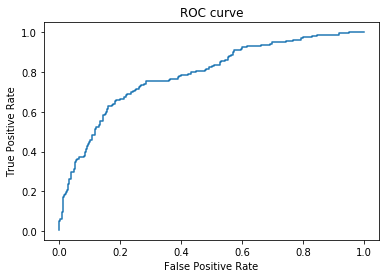

('treshholds',
 array([0.99203193, 0.82741894, 0.80695408]),
 array([0.01042919, 0.01015913, 0.00190964]))

In [64]:
from sklearn.metrics import roc_curve

# проходит по диапозону 0, 0.1, 0.2 ... 0.9 и для каждого из этих treshhold вычисляет y_predict и для них берет fpr, tpr
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1], pos_label=1)
plt.plot(fpr, tpr, label='ROC curve ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()
'treshholds', thresholds[:3], thresholds[-3:]

In [60]:
print(lr.predict(X_test)[:3])
lr.predict_proba(X_test)[:3]

[0 1 1]


array([[0.98197463, 0.01802537],
       [0.32408158, 0.67591842],
       [0.34090353, 0.65909647]])

### Work with texts

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

texts = [
    'Hello word!',
    'Mister Hello hi'
]
counted = CountVectorizer().fit_transform(texts)
print(counted.toarray())
tfidf = TfidfTransformer().fit_transform(counted)
print(tfidf.toarray());

/Users/nvkorolkov/.virtualenvs/ml3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
